# Pandas | apply function to column

### Importance
It happens quite often that we work with a pandas DataFrame based on a given dataset, and we need to apply some manipulation on one or multiple columns. 
For example, we may need to perform tasks such as finding statistical information about column(s)/row(s), classifying the dataset based on a given column, normalizing one or multiple columns, adding new column(s) based on one or multiple columns, etc.
The pandas _apply_ method provides powerful tools for such circumstances.

### Scope of tutorial and what you learn

1\. In this tutorial, we discuss how to:<br>
\- [Apply a function to a column in pandas](#one_col).<br>
\- [Apply a function to multiple columns in pandas](#multi_col).<br>

2\. In addition, we discuss different methods to introduce a function and apply it to pandas DataFrame:<br>
\- Apply a NumPy mathematical function to [one column](#numpy_func) or [multiple columns](#multi_col_numpy_func) in pandas.<br>
\- Apply a Lambda function to [one column](#lambda_function) or [multiple columns](#multi_col_lambda_function) in pandas.<br>
\- Apply a regular function to [one column](#regular_function) or [multiple columns](#multi_col_regular_function) in pandas.<br>

3\. Moreover, throughout the tutorial, we emphasize the importance of understanding and properly setting the correct axis (along the row or column) for applying the function. We demonstrate how things can go wrong due to the lack of understanding of this fundamental concept. If there is only one section of this tutorial you must read, it is probably the [guide on properly setting the axis parameter](#set_axis).

<a id='intro'></a>
# Pandas DataFrame apply method

You can use the **pandas DataFrame** _apply_ method to apply a function along an axis of the DataFrame.
Two important parameters of this method are _func_ and _axis_.
The parameter _func_ gets the function to apply to each column or row, while
the _axis_ parameter denotes the axis along which the function is applied.
With regard to the _axis_ parameter, 0 refers to _index_ and 1 denotes _column_.

There are different ways to introduce the function. 
A simple scenario is to apply a simple function like the [NumPy mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html). The other options enabling you to introduce more complex functions include _lambda function_, and _regular function_. In this tutorial, we aim at covering all these three options.

<a id='set_axis'></a>
# Pandas apply function to column | setting the _axis_ parameter properly

The proper setting of the _axis_ parameter is crucially important when applying a function to pandas DataFrame.
So, how can we correctly set this parameter when we apply a function to a column in pandas?
What about the cases that you apply a function to multiple columns? Is there any difference?!

Well, it turns out the concept is the same. You just need to generalize it.
In the following, you see a [schematic representation](#schematic) of how many times the pandas _apply_ method calls the specified function, 
 how the DataFrame _apply_ method passes the elements of DataFrame to the function, and what kind of structures the function can return. 
As you see from the schematic, and as we will discuss in much more detail later in this tutorial, the final outcome depends on the _axis_ argument, the function's implementation, and applying function on one or multiple columns. 
As a side-note about the following code snippet, the b64decode method from the [base64](https://docs.python.org/3/library/base64.html) module is used to decode our [Base64 encoded image](https://www.base64-image.de/), which is then displayed using [IPython Display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).

<a id='schematic'></a>

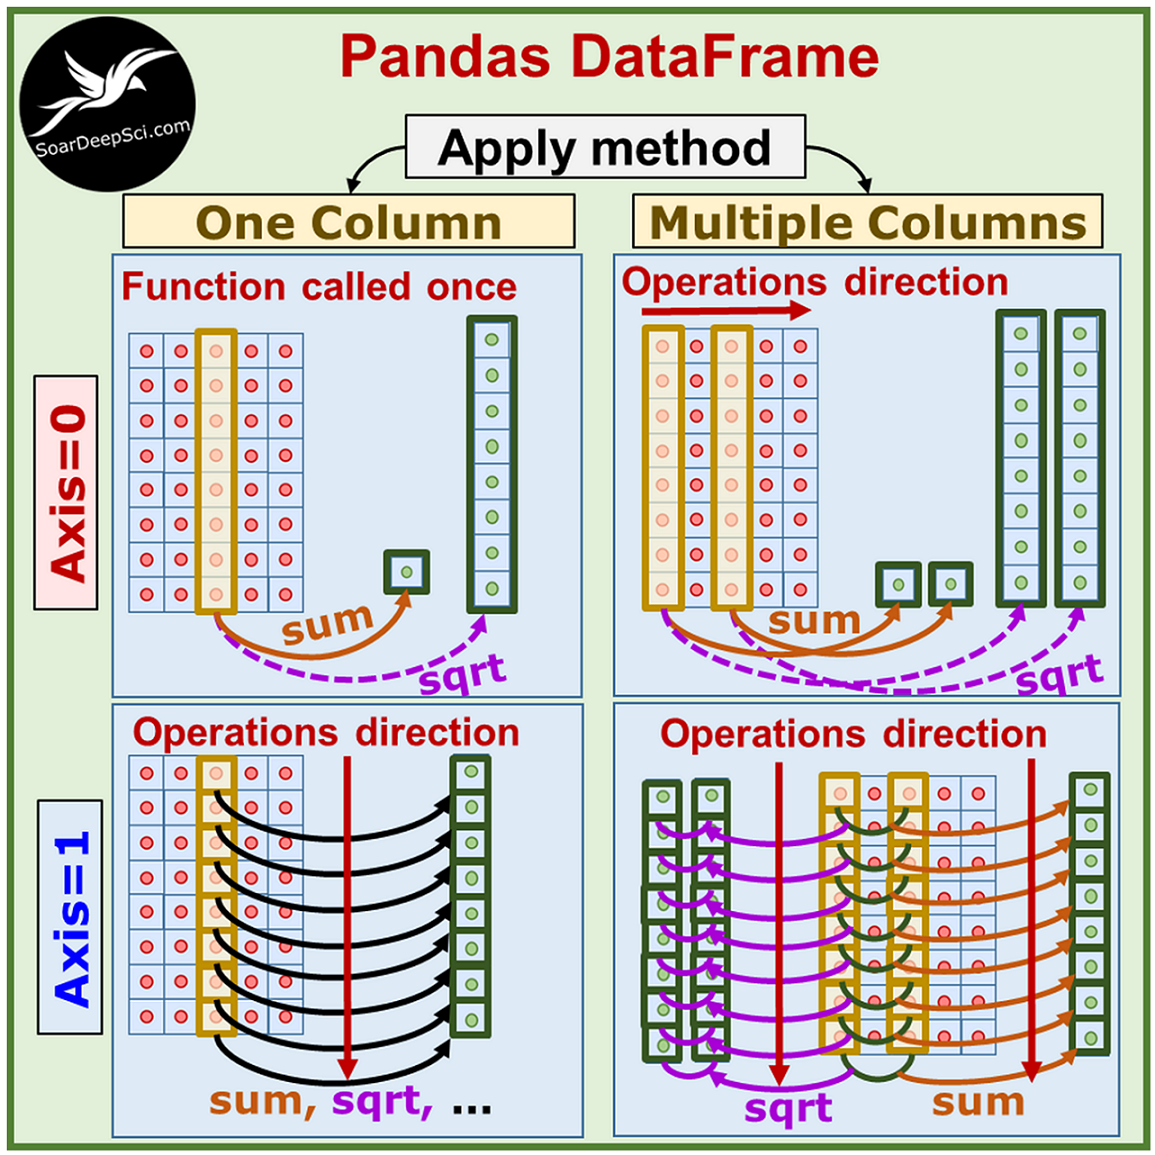

In [1]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAABIMAAASDCAYAAADqC//3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALiIAAC4iAari3ZIAAP+lSURBVHhe7H0FgB3V9f733NYl7pAQQoIGd5e2UAoUWir8sAJtqdA/Vtwp7l7cobhDQgIBkkBChLh7si7P7X++M282L5vdZKMk4X7J3Zk3c/VcPWfOPdeRFcDAwMDAwMDAwMDAwMDAwMDA4CcBZ+5qYGBgYGBgYGBgYGBgYGBgYPATgBEGGRgYGBgYGBgYGBgYGBgYGPyEYIRBBgYGBgYGBgYGBgYGBgYGBj8hGGGQgYGBgYGBgYGBgYGBgYGBwU8IRhhkYGBgYGBgYGBgYGBgYGBg8BNCu6eJJZNxzF02HW63Vzw5xGfuhYGBgYGBgYGBgYGBgYGBgYHBFo1MNoMM0uhU1BXFBeW5pxbaFQbNWDQRf7j1eIT8TtCDkQUZGBgYGBgYGBgYGBgYGBgYbPlwyL9EKol02okLf3UlTj3krNwbC+0Kg+Ysm46z7zgGpQWl8svsJjMwMDAwMDAwMDAwMDAwMDDYGkCFHgqDEpkozjnuUpy0/5nWixzaFQbNXToNZ911HMpCpYDTCIMMDAwMDAwMDAwMDAwMDAwMthakUklEEzGc//PL8Mv9/5h7amENwqDpLcKgrBNw8o8g48iA+8acDiMgMjAwMDAwMDAwMDAwMDAwMPjRkbXkNbbshqpByVQS8UQU5/78Upy4/xnW8xw6LgySfzQ9RGTl4qDOkQY11oQMDAwMDAwMDAwMDAwMDAwMfjRQPEM5kMOS3xAqDEpGce7PNlQYlM1IvA5kMhlEYs1IpRNwONziu80oDNYRKl+zbtcbGyMOAwMDAwMDAwMDAwMDAwODLR0OIJuGw+lCwBuCx+NRJR6Xw6VvN6owKJOWiF0uBP0hSdAtv5NwqJqQQYdBiovLOmzSO+RnG9XAqlkbaRmsFf31F59LvTmyuXemigwMDAwMDAwMDAwMDAwMtilYu7iyiMYjSFE+I/8osyE2mjAom8kiHG1ERXlX/PqQc7Bdl4FojNca+0GtoPIZ61YrxZFxIOvIqGCGAiAKz/jeIXTjna3CJW/g0ie50BTkqMCoHUkOH3PnnvqhOCmrUkAiI9WadUrqkrZqdGk1M32pS+bDydQohGo3dgMDAwMDAwMDAwMDAwMDgy0UlAEEPQWoj9TirZHPYdKccQj6gnC7uYNrY2oGZTJoaK5Fj059cfFvbsWgHkNRn1huSZ3ajGUbhy1FsSUqORrwoko9DopmnPDIkwxccFIAQ0GQwwW3/HPxmVwh140rkmEOUvI3LX+T8jeDFFXHMvJEXqlGktyrDCrD/ORSt8uQVxYDAwMDAwMDAwMDAwMDA4MtD1T2KHIVY0V4KR54/QZ8OfkzFAWL4XZtAmFQU6QBXcq644JfXY5B/XbDirrlkhCFQT8R6YFKTXKwi8xnPGQtt+2LGj8kvtMpV68bfo+XMhd4VCyURSqbQnNjE2rrG9BU04g6udY31CHcHEY8EkdDOIxIUxixSAypdBqZdArpRBopCnAkHq/bpXsBXV4P/AEfCgr8CAZDCNEVhVBUUozSkkKUlBajpKwMRYWFKnyiUEgFRNmMxhdPxZFOZaRe01J9LADzLgmwGPnKXvxtl9sqooGBgYGBgYGBgYGBgYGBwY+MwkAx6hqr8N8P7sKYH75CYUj4/00mDCrvgQtO+jd26r0bqhqoGWRtd9rmQTkJd2EJyZRsDl6hmlFOcR63JQByuhwqdsmms4iFY2hqDqOuuhp19U2oWrECVUurUFVVjarqOtRUy738rqmrR0NtPZqbIojFYlZ664Bg0IdQURGKi4tRXl6Kii5lKK+oQOdOFajs1AmVncvlWoGysnIUlRagoKgAQV8ALo/bKou4VCqtjYV2ofiMAqJMxgGPxyVXq5nojsA2W4yBgYGBgYGBgYGBgYGBgcHmApVNCv2FqG2sxn/fuxvfThmJUGgTagZ1pTDo5CswqPeuqK5fAZeboqB8VZJtAyxvPvJJRQEQ9+HxSm0aGtJOJNKIxSOoWlGLxQuXYsmixVi2bDkWzV+CBXMXi1uARYsXIZVM52LZfPD6POjZqyd69e2BHj26o0ev7ujeqyu69eiKLl27oKysFMGCgJTJA7fDjQy3uKUzSFErKZWirEgFfqo5lJP7UfBlYGBgYGBgYGBgYGBgYGCw+UG7zgWBQtQ1VeOJdykMGmGEQRsCWwhkk4ayD95R+EMNIGr+kOiZVFqeO7B82TLMmTkPi5csxdJFyzB71lxMmzwdixctQSISQ1wqIC1+txRQiOP1eREqCKJHz27ov8MA9OvfB93lvmfPHujZpzvKy8vg9nilzDlNpzQ1h1JIp1eWQwVDAiMUMjAwMDAwMDAwMDAwMDDYvDDCoI0IksN2lHFkpfDcJuXgVjiewiXP47E4li5ejnmz56KqphY/TPgB346ZgBXLlqudn8bGJiQSiVyMWz78fh9ChYUopHCodw/sOGQHbL99X/To2QP9+vdF9x5d4fS4czVsnU5G4ZYtNLOMYluCIftqYGBgYGBgYGBgYGBgYGCw6WCEQRsJthCIakC0g6RaQE4pm9MpzzNYsmgZ5s6ehwXzFmHS+B8wccJkNNQ1YMXyFWhsaMrFsvWjpLRIjU93quyEwbsPxq6774xuPTqj33Z90LlrZ7g9HtUQyqYzSGfTcp+R+l8pDDICIQMDAwMDAwMDAwMDAwODTQsjDNpA2CTglYIMl9MFn9+n9oBqa+swZ8ZsLF26DN+NmYDvRo/HimUrsExcU+O2IwBqD4VFBejavSs6d6nA0L33wC67DUHPPj3Qq18vlJeVI51JIhaLI6OnkmVahEFGIGRgYGBgYGBgYGBgYGBgsOmwIcIg1zWC3P0qqG+uwdvfPI+ANwAqfVDcQ2FJIhlHYbAIew46CJUlXRCJhS3tGXraikDBBctjO2oDeXxuFBQWwuP1oLa6FtOnz8LIz0bixadfwYfvfIovRnyFGdNmobamDon41rMNbEPActYILRbOW4QZU2fih0lTMXfWfISbm5EWGvo8XpSVl+nJZGpsmhpDpKc0B16NUMjAwMDAwMDAwMDAwMDAYBNAWG+vx4dYIoLxM77Bkqr58Hr9LXZ9KfdIZ1LYY8AB2LHXrvrMxta/t2s90FoQ5PP5UFJWDJ/Xh6VLluGrkaPx30eewTWX34DbrrsbH773KSZO+AF1NfW5GH56oO5UTU0dJo6fjLdffw933HAvrr34Ojx6/1P45qsxqKqqUTqWlpXC5/eqhJKOtDYwMDAwMDAwMDAwMDAwMNhy8JMSBlHwQ+GELQzyeLwoKipSTaCaqlqM/vpbPHLvY7j2khvx8L2P44tPR2Hp0uVqE8dgJWgcm0KzUV+MwUN3P4Yr/991ePCuh/Ht6PFoqG8UeroRKgzJ1at0prZQvgDOwMDAwMDAwMDAwMDAwMDgx8NPRhhkC4KorULhTyhUIM4Pj9uLyd9Pxu033IXrL7sFTz7yHMaO+Q71tQ25kAZrQiQSxtivvsMj9z2Bay+7GQ/e/Si+/3ayvMmgqDCEYDCgW8Vs+ttCIQMDAwMDAwMDAwMDAwMDgx8H27wwyBZA0NEgtNvjRkFBAQr8IXw3djxuuPoWXHrhVXjo3id0u9O2dCrY5kRzOIJvRn2Du2+9H1f+v2tx760PYeL3U9QYN08no9CN9KdgyK4PAwMDAwMDAwMDAwMDAwODzY9tWhhkGzOm83g8CAaD8AW8mDtrNp5+5nncdNVtuOvW+zH6m29zIQw2FPFYHN98ORb33fEIrrviFjz9xItYvGgJCouKEAj61aq508Gj+o09IQMDAwMDAwMDAwMDAwODHwPbpDAoX9DgdDkR8PtVENTY1IQvh3+Ne29/GNdeeiOGfTwSyZ/IqWCbGw31Dfj4vU9w2w134z9X34ERI75AKpFCsDAIr9cDp8NlBEIG2y5yQuhN5eSP5Qy2XOTV15qc/BGXC2OwydFWHWwMJ39WOoMtH7m6aqsuN7WTP7lMGBgYGBgY/LjY5oRBLZOtwOvxqhAITgemTZ2BF554EbdecwdeeOoVLF+6Qv0YbFosW7IUT//3JVxx0TV4+dnXMHf2fMDhQLAgALfbrcIgu74MDLYJsD1TK5Fte1M4jnFy1XQ0PetisAVB68iqpzZdWlzWbiNSgWYM3Cyw+47lNm4fzeTqW+tSXS7RnwK2tvar+bX76CYcq/Od9PlMS5/PG78NDAwMDAx+RDhkcdTmjDR36XScdddxKAuVIuuk1MipjHtTpAFdy3vggpOvwKDeu6K6fgVcbgccP7JcyS4Gt4bxTH2/369HnDfWN2HUl6Px0rOv4MthX6G2pk79GWx+VHaqwGFHH4yTfvsr7L3PHigqLkA0lkBSXCabUXtCrDsDg60W9iLf40HG51UNOGUKHdbrdUZLWLkRpoVxk+lEOsVj/eS5k7JVuciV6Zr+s0UgK/OQXmUeckpb0EnUwcrMgQqRLieyqQSy8RgcaXkn9egw9bdpoKQnEy7Mv1f6pVfqBG7rxfr0TcbHcMLca5+XeFmlDumX2WQyl56si6SOW6LXjrqNQMYaLaLeyh3HJGduFbilt2HNL2tL6szjg8Prln7HPirPN2UVkUbSHpR2iZiM39JOBFz3bFNtw8DAwMBgs4Prm4JAIeqaqvHEu3fj2ykjEAoVq3kWIplKIp6M4tyfXYoT9z9Dn9nYJlaeXIxQUEVHI8WBQECFCjNnzcNzT76Em6/6D9773wdGEPQjo2pFNV5/8U3ccvXteOHpl7Fg7kJ43B4EQlZ9EbadJwODrQ4y/mjLlbasjGEyhUw8KQy/OGEQ18tJWMYBCg20XwjD5RLnE+aloACOoB9Zt6tl/FOGxuDHBetCmLuM1IuTwgFh+rJJqT+95lw6gUwkJvWbUmYwY/OCrEODjQ8y4DmBhTLlCemb0qfoVulvHXQZ9kupU6Slvlh3wuQ7GbfXJ/0yBIfMaQ6PO7c2oTbIttUvKQpaZczxSbll7UURqApCt+RxiHUifS6rFSf55zidkHawnm2hw07GggzNEsTiSreszBNKpS2ZVgYGBgYG2zy2es0ga7FlLaA9brduC0ulkxj15Ri8/sKb+PTDz7BsidkStqWha48uOPq4w3HiKSdg6N67w+PzIpGII0mGSerUPnnMwGCrgLRZMkFprxtulwexyT8gNuIbZGobra/BHCPXdc3P5i9hyEi6pH84SsvEFcFdVABX9y5w9+sLZ3GBMjNZMjPC4DqoYUfBquk7Pxoy0g4cfp+0hwxiw79CfPwkS4vL7ZK3UqFOaQupDJLNzQjsuguCxx4CFEo9CpOoLKqT/gw2Jtg3s9TWSyaQmDAVyW8nIl1fh4z0TTeZ8nVhyFWGQFGC/CsrhZMuFIQjFIK7W2e4e3WDs6RQ6ziTTCIjc5ojk5JMyCqKYXMfPrZK5OiUVuGWlN/rUruMWVl7UdMlS8GK0NolZdxStdx0m5bklx+gEjNmIzpqNJKLl8Lh9qqg3S7jxgbpkYrE4Pb64DvyQPj22EWFvw5pIw5Z7xgYGBgYGKwvNkQzaKsWBuULgnw+nxomrq9rxKgRo/DUo8/iyxFjkOTXO4MtEj6/H/vsvydO/d1JOO4XR6GwrBixcFTqbKVAyMBgq4CMQ2ku7EN+Fdw0Pv0aaq+7E6kFi4TxIJOxvuMjNRoycAkD4SgugqMoBBc1gjqXw7NdP/h3GwzfXrvCt0N/YXiF8WwKa15U084IhH4UpFNpuEuKkGmOovb6O9Dw+POAjGvwyISsdSIuk0I6kULxz49A+QM3w9W1EmmpOwqDdGuhwUaFCuiCAaFxM5qffQ2NjzyH5Jz5yEqdONenn1AYJMEcRYVwlpdI//SqQM9VWQ53967wDNwegX32gHfIjtaW0eZm1Q5xcIzYggUla4TMyWrrRgpOrRanzN8OWXela6oQGzcZDrcLXhmPHNwWGU9usWMQ14xOyXfW7UHk7Q9Q+5/7kRg7EVl55tQ1x6YRBpEWmUhU20vFlf9E4Xl/sOjJZ2atY2BgYGCwAdgQYZDrGkHufhXUN9fg7W+eR8Ab0LUrxT1k0BPJOAqDRdhz0EGoLOmCSCys6tH8t7lgy69UECTrDZ8wShQcLFq4CG++8R6eePBpfDNqrLy37DYYbJlIp1KYP3cBZk6fBV/Ahz59e6GoqEAXkSlhqFjPRjvIYKsAGSUZA8kU8gtzfPR4hN/+BMlYnHsfrS/m6+my0he4vSDV2IRUVY1+xY5Pn4PoN98hNWY8UvKbTIW7a2e4Sos1jIPMr3Krpv9sbnBCVmYzmUX4/Y8QG/UtklI/3BJm1Sm3/aWRkDbjLy9F6JTjVcOL2l0UETgcW6GgYAtHFhk4aCtI+mNi9DhEPv8ayeaw1oluE1pXx7oUlw5HpE/WIr2sCokFixGbOhMx6ZPxr79FeuEyZOoaVHvG3bMHXH4v0nGOB9I+qCK0tfTN3HqLYwy3M9IOlrsgJOsrWQ9OnoLmF99C+KlXVfPNt/dQuINBZKWcWrotsIy6rqDNKLcb8YlTEX1/GBJ19TpOqyZXW/W9ERyFgdLaVPgY2G9P+PcdammLyjuHqowZGBgYGBisJ2Q+8Xp8iCUiGD/jGyypmg+v1299mBFQZpLOpLDHgAOwY69d9ZmNrXLVyQLRkdkJBUJ6Hf/d93jo7sdx360P4fvvJuZ8GmwNmDFtFm6+7g48fNdjmPbDDF0oh0IUQjpU28LAYKtA/nqe2pI0IC23fMwrv/2ur8uPh+A9n8cXL0PDM69h+Tn/QsP9TyG9okYYtUJk3JYmp/xR/wabGzIrC6enWhLCeLLe8tsA60+bi8+t85fB5kBWNVrg9kjftOrE7lN2vayrs8PbvYz35O9TdQ1o+N+7WPGXy1D9j6sQfu8ztRnlKi6CM2fja6vom7l86pqL41lREaTFIjFtNpqffRU1l9yAmqtuQ/OIr5B1uOH0uuTKcm3hbZrlcsoakraevNZXU6KtOt5Yjm1DQS2gFk1RaS0tLwwMDAwMDDY/trppSBdRAjUUHQzolqKvR43B4w89jVdffB3LlizT9wZbF+qq6vDfR57FI/f9F+PGfK9bLUIBn35Fs+vcwGCrAbU7Wn3t5a/WriOw/XKw5tVmLuzn7B2punrU3fc4Gh55Gully62v82Q6c1/1DTY3WDME6W/d2/WV77SdWHcGmxQ5OmfFcYtT7ksZYddFvmsP9jvbX+s+yd8ULdixs/+Fh3+NmkuuR8NTLwL1TXAUFiIr65cMm4b+2YIh+c+QVhQE8ePM4mWIvP8Z6m6+F3XX34nmj0YglU5bdAh6LfpuLbBJr5rtK+u0PbehYBxWu5A79vuNEamBgYGBgcEGwl6zbPGgai+FAry63G4EAkEk4nGM+OwLPHLP43jvjQ9QT2OtBlst6oShff3lN/HIfU/gyxFfIR5PIBiwVNzSuS1/9hZBA4MtG1zw525bQXnAnGOrtu/bcvZ7G4yytbOZz1R1LeoefBqNL72BbIpGp/0Wv2P6zJYLUzVbJFr3Qzr2RdvZz+zqYz+0r7azBUT0E5syHXXX3Y3Gp15GJhaDsyCQ2xq0hTYAZosfYeRKoTINHMfHT0T9nY+g+rrb0fTKW4jPX6zeWAqn1yv3HIVIla0Ma8iykiHn1jZWr8nZYRlflmuZNI+Vt1uKgYGBgYHBj4etQhhEAYDt3LIoKSwsQDQaxUfvDcODdz+KTz4YhmgklvNtsDWjuSmM997+CI8+8CQ+/+xLxBNJBEMhaahOpHhMc64dGBhsjVBmIOeI/N/5jsi/tsWAEjY7YbMUyWVVaH7tXcQnT4GDJ+Z4PGrrw2ALRX5lGvzoYHXYvYX3+Y59jP2QsPsiHZ/lM/tEfr+0tfiiS5aj/r4nEP1wuHh2wBH0y1wmL7bE+cwutMuhYwhtIjU++xrqH30WkYnTkI1Z9q3otJwtGk78te2ApcqvV5ss6+qIlt9piTEtd0IzfWd7MDAwMDAw+BGwxRuQtpl/Oo/Hi8LCIMLNUbzx6pt4+J7HMfbr7/SdwbYDbhGbP3chli5dhsKiIvTp0wsFRYWI8+jlnH0NY2fDYIsCxyi5kHGiECY+fjKiw75Epjmir9la6ehH/YnzbtcLgYP2gW/wjvD17wPfwO3EbQ/fjjvAt8N28HSpgLu0BO7CAst4q7R/hrVbfn4PyI8/U1MLZ3GhnmbkCAQknDBuzvyQHQDH1NaOsa/2TPBj9MXW+ch3xKbKk2pL5KeVd59LUw1I82j5ZFrawEjEvpukR5vbjLMNChD8fXui4Fc/g0PmtWw8YdXj+hiQbi9P+W5z1FNr+rQ4efcjjtlcI9inXCW+n4z4mPFINzTpO5vazCIZfxoX9g3YDoF9h0rflL64fV/4duovz/rB3bWT9MdCuCvLpH92hjMUUFtANA7M8ITWoXWryP+dqm8EqmvhkTidPbpJ4vJG5jtdP+UHWhe0S/M8R6wr/RmOtm18XqRmz0fDf19EbP4izaa9JY73jN3lcMF35EEIDN1ZTxXLCp01uQ2p8/xybcQ2rW1B8kiD18kpMxEb8TWSUieMKb/nsS1ICvBIPXGcDuy2E7zb2+P0ujv/jv3h7tMTgZ12QPDQ/eHevreW0ZGiAen16PM2WtMk360P/duKp7UjNqRu1wdaIe20dWJd8rOmuDZVudpKK99tbnoaGBhsW5BhZH0NSG/RR8sza3b23B43gsEQwuEmvPLc//DAXY9gzsx5+s5g28Wusrj884Vn4Wcn/wJ+rxdNTc3aDtm4jUDIYIsBB1m5uIIBPW65URinmn/frJo6BEdHtlb64YjG4+cLTv0FSv7+JziLi5BpECbRbs80MMqvxzV1SNY1AE2NSC1dgdjkKYiNHo/EnIUtjEvrHmBrKRTsNxSd7rsR3p0HIc2ji2UCcKzpyHKOtblbhY67fCYp8J4JcQGtwzyfWdnlYw2Xy7v+7Wi/bJ1mG2iJTz3m/Es4HsEubJQ+04e5W/q1w7SE3RDk5VEmS8sGk+Ynlyiv/BhiPxeXkbpzs04jcWkD16P+0ReQSSRaNERsxMWVHLofOj/7IJzdKpBubIJT4lljPRHix85TC6T9MW2dL3NZs8A8yf+8/OWettyvN1rlQ+nDG6bVAqbJd7y17m3o7YbmoYPgnMGj5bONYTQ99RIa7n8C8QVLNP+2+WDmXX+Xl6Hgtyei+PcnSQUVSpiICkSQSiJT24B0VbUKcNhPM1Jn6fmLkZi/CPEfpiI+YarWAbtJWysibg5yuz0o+sMpKLvyH3D16YZsfaPQR+ig28bWghxtWyjM3+KypKM+bHlj0ZY/5UL6688cvfVvu7SX+BiO2j4eKYXQLfH9VKy48ApEvhqr5bJbKL1xvPG6pEy3XoGS836rJ+llhM46P1v/15BWDixD7rYFUmd2fjUvek9fdqQWjVcpE7GWtHT9IPWZ9XsRfvU91F97ByJTZ2r4/J7HcvFZ6IRjUHrxBXD37Cb1X2fRZs1JtAPpnxQKy9rFVVEKV1GRZEZSYXx5wqB2luSrwE5efdq0Yzi+4A+hAccSpY24dtdKubSsvwL5TZ/aj4lWcdrQuzX8XiOYr9ztmsDYVuZLfku4jDWQ5OWLZcs9y6Wvf1vnJT/Nlrh43/JUw+SPk23Gs45YpS55L87qq0yHz8RpGhwzpH3k0tO/G5i2gYHBTwsbcrR8W+uVLQIcROl4fCkLEpQFSWNjPd5+9V3cd4cRBP1U8P23E3HfnY+pTai0TJgFBQUyR1pGpTuyaDIw2CIhTddVXArvDn3h69cf3oHbw7PDdnIV17+fXPvBt+9uCB5zCIKn/ALF/zgXFf+5Wq5/gm/wQI2iZcGeB3v5mFq8HNHxk5FpCsPpcUt/WcPCsmWslT4lzIl1lWcUSrllihDmjgwheMKfR+753OdG1mkZqM60hMn1yY70S6YpjFE6zZOKGF4cj3bOOX0nz3jV+JgfiZ/pZNKSJqcuai24hUln3gJB4UjlXvLGBbXGIX41bEfy0xaYRzo7XcZDpo1aBQG/0EPS5FV+08iu7U+D6t9NgFyeeMriynzJvdAiywmfdVUg9AhKvrxy72Udsq6cmn/Wr4YlXXN5XSeQBnRMV+LIZFlfzEvKEmbYeWCd+JgHHuFN+kiQdErzy3xr3dpx0W0BsHsINftclRXw9N8Ovv4D4NmRfbKP9M/t4d9ndwR/dgRCxx+N4HFHoPA3J6Lk0gtRccc1KLv+YhSc/DPp14Va/21Rl8KGlCzIwiO/QWz8RGRjcelTXKiRDuqlfeRoZfdVu9+pgWfJM3gqVqt2qc+kTvhBzwrDerPqoD2sbFe5PkTBtBDHoR/92gb7nIP+WQa2Cb232hrbifWiDeSVKc2r+NcxiP2X5WJ7In3yy8UysbwUxkkUVpksWvB4+HbTWg+wvM6SQvi2kzG55wB4d8yN0wPWx8mYPqg/PAO21w8AKlBkVm2mX0lh922Wx6JDi2OfEafvczTTumQcpJXd99nv2N8d/IBrtZXV2hYD5Zxd3y1pMj9sO6SxTXd/rj3xGcd9iULrSMNZzsrIWsC0JFyaYe1yreKsuJjvln/6WxxT1bYuYwrzRefzWMbYNeocbcS1zotNL76j5jnHI50/OEbq/MHyeVrG8VXi6Ui52gLTk/LYtNX0dc7K5V/pKulzPmV9aV1J3pjuhqZtYGBgsA7gkLhFQgdO+ef2OGWd70e4OYz33voY9935CObNNoKgnxImfj8Z9972ID7/aISuzigQ4tZEXVCYydJgawTXemkZ4ZJyQ32BZAqOJK/iEsIgJhLatin4dHi4CPfC26MXin93EkouPAvefn1kdJQ4NLKVsJm1bFMT0vMWIhuJwiEMlSxxc29Whb1A5gKUR14jVAhPSTkc5SW6xczhk4WyLFQ1b6mU+nEEfcowO2VB6ygpFea3WLUBstInsxRMSL+Um1wKbYDvZEGe9nokbAE8pWVwlZbDJem6ysTJvbO8HJ6iEmSEEWR8PK46Qw0cD8OEAGG4nZI/J4UNZKqSCRV6cduOHn9dWowsjdpKnttiDtYK0sVmTmQBz3hZVmdBUMoq5WZ8Mdqpkzry+vUrv6ukWGhGOzDyThjhlbWxkdCSp7TUg5RbmAmP0IpldbDcPPFJ8upIJOFISX0Kk0EtNYcwPM6CEJylUleFRdYWNgrNyOQLA9JhMH2hpdYH6cIj8yU+T1mF1FklshyXhTljsR3ix0F7M8K407iwU9qIp7xSaFQizJfQkAwl42H9kF5bEFi3WkbNm9AyKXUp/VH7gNCLx5FTSOFwC62FBuwPzk7lCB13OCpvvBwlf/oD3JWlqlnSumRsEVx0pRYuQvSTL5BZUS3hgzIcsM2sgQ55tOeIwXbGfudi3ymUupU6ZV6czB/zKv+0nUp9ONguSqTehfZOSYtbpBhHm/2C6TC0tC9nQaG06woZeqRPynig9sdy3laD9E1XYQDuAvHr4fZW9uMya4sr+6GdVuvk7DLJO12M+jmmFMMt4wCKCuCScrJdUxOQ4yJtE3GsscoldGdfL5axSk9PlLFCxkvGt0ZariPYlyAui4T0ebYHudpj9Xo6zaOqa0mpW4RBWaQ5xvqlL9tjou2EHuzrDj4XGqloRGhHOnBLsKNI6lX6FKJS91IXNFCOItYf+6RXItca12QIHffZxkl7ju8c62W8dZdXWGMFtxaQ7uLPEZexVbLolHHE4Ze2JOtxCjzZ/pTuLo/WX5vtKR/0Q+fxwS117MyN9auUsaxM4rSMq1M4oraoJH/W+CthOMZ4ZVxjOmmZM6UtO8U/NTE94pwStwoV89uAXC2BjORP2rCnVMYg5p9lZl/m3CveHD63tGFpc/LeJWOrjpF2ODuujiKXB52z2C9JKxl/HaEQXBwz5L1D5g9uCXZIP3VKeo4ySVfasyPg0zaRlXxtbOGmgYGBQVvYYm0GMS0ubAtCBYjJZPTRe5/ggTseww+TpuR8GPyUsGJZFZbMX4Je/XqgZ59e8MmEmpKFE+dpZZg3bvMzMFg3cPEnl47YDCLIqHv3GILAgfvI4teLDA3g8+uhLH5bHBluXbALUxqV96mELHor4OndG6lZM1fZkpIPLvt5DLS/f1/49t9Tv0IrI2ur0xNcYHKhyyuZAVnU8yulClTgRibchNSCxUgvXSFpzUVszHgkZ81HVsb7TGMzkstrARmXVbhAbSG3xMzFM8VOuQU0tykw7lUgz/jVlfnjF3+Hm4yepJ8Vx37MX1mZazJydUhJuDWHNJC4ncIEkRHKCqPqiEY1f8k58xH/dgISU2ciG4lYdnc8wrBQU4gaBWQq5B8ZOt0q0ZGBQvLI/GcoWBGaME2nV+KThXty/kIkly1HcuJUxL7+Fpn6ZqGDMKmygHcGQ8qc0P4HGamMMGbRz0YgNm6y1iMpkZ86hQUdshmUqyvWK8tEBhkBoYGU05V1IdXciMzCZUgtXY7EbKmrb79HYuY8aXtNqhmWrKoWxkPqqkAYDjJ0rG8yzhJdRuhrmZNaC21IE37lFi9Z2t4hAyaMYZYVn5W4shmkF0t9LF6CxIy5SEyaiozkJy3pZ2rqpBlIuwqWICuJ6S44yTu1DMgUsX6t5NeQ/gaC7XxtNoMIksIlDJv2zT13AbeHZaSt8bkKb1MUEtFJn6SAgII3YerSpK/LAXennvDttJ3URRWSE6Zouvnxs4SMi0xeJhaFf/+94evTFxlZV7HNtWk7hrSXtNgeKSyhENbFvuOSviPP08urrL66ROr/+0mqcZSR/pmOR5GprkWqrl7GG+kTIRkHqN1DbT9pY9YYY21byiUk/6VM7IXcHkatHKk34VaRbVyB5rc/QWLOAi1Dfi6VZkLb4NGHwz90D3kvYTIy3sgLHQO4RZVMPe/pVADCgFL3/M32SMEOtdmkn7tc0sep/bdCaLhwEZLcIjtxChKjv0equgaZeEzLxS171O5wUHjBcVfiybJsDEtBAeNto01pW6DgW9yabAZJzvSZb+cdETjiADiLCpAOhy26bYgTGlvb9iQPdoJSD2k+l/yzLKwTp/Rt0kpHRW6HEm8qNJN5QgbR3JgTkLaRRHpFjY5J0VHjkG1u1vKpcEhoynAUMrEOlB4cSyQ9Cul0zNfxTcZXoTsFVemlS5FatETG+CrpJzKWUMO0th5pGV+V7tJvHNoOQ7lxXwoh9abxcpwlP9Ca7qxn9nPWiaYlZcwvH/9pGUkjlo9CEAlHQYo/YAm9HLLmW7FMx7bklBkyxszQ7dXsj/pxIlggcZOgnD+suY101jbmseYPznNuVwCphnoklyxFcvosJGQsSFVVCd2iElJCFxZK++fcJPMg+wPrxabd2sYoSUuF7JJkluUk/TmHOGWOTMSlnqRNz5uPhIwNsbHf6/yRTcj4EonDrYJPqU/2Uel37O+cBx1MvyNpGxgY/LQh4842ZTNIv3jIv6AsXqk2+d5bH+Kum+/HpO9/yPkw+KnigIP3w7+u+BsOPGRfXV80N4f1+coFrYHBjwAOsnLpqM0gtzDDBeeejvJr/x9cZUVI1zXK07bbMdu5rK9ViOIKUrPDj9p7HkTNNbfLYrJxFTsXjJtpyBodwV8eg4r/XAF3/+2RFYaQYhFZhVuLdnvYF8bDU1gm4VzCxE9E85sfqzCBDCZosDopTK9cU/XCUJJBKS1RIYQyJVJOd5/u8O2yE/x77qoMtLO0Ag5hQtPCkHDx6uICNq9M+oVWVuiekjLEp81G45PPIzlpmj5ThsLyhEwiDf/ug1F8zu/g3q6P0M+BlMSbmDwD8c+/QnTk18KwLJf8xZGRsvErske1TmTiqyyBb8ggFJxwLPz77WXRpLFRDbWqEGptY4UwIvxa7iwMCrkKZQG/CE0fDpc0RwmDP43ZAxobkK5vgItaCUVB1ZzwDByIgp8fjtCRB0sSFUgKA11zxZWof/gF4Y03wGYQGSMJmPH5pf4lPanH+DRh/D4egegX3wiDJIwMjetLXWWiUldSVqcwWaoxQGEG2420GRrC9ew2GL49d4F36C7wlFUKY92MjDBBLmZsDbRR5pE3Ql+PX+gsiE38Hs0vvYG4MOrCAVnCFclHJhxFRhhH1SSgUE4ar7ukUDWZnKXFCB11GPxHHQRvl95SEmE+G+tUk0jrhm4TQNcUZJzXYDOI96xab6dKFJz/e5SedwYcFUJvKVeGgitWvJ0/aW+kVVZCsG2qoAzCcAcK4AkWo3nUF6i59GZEvhytfT+fqkwnJc5TVoyyK/6B4jN/I4l6VYtPtfPywb4gbYLtkRpxLkcxMk3LER72BWKffInEnLlCd2EoqWUgeUg1NCj93dQwkPZLJpJZdVeUwjt4ALy77oLAXtJXB24n+ZWyNEn9p5LSNsnVc3yQMgkjnJy3EOHX30di7HdIy5iRbY4gOX4ikrXCfEu27LbMe443LB+Nbbu3l74qUaWFuRUeFsG9d0PBSb/Q5w7pq0jlQkmANDMm+XMXUohaJm23CpER0rc/GCYM/xxpFzK3x4RRJm1ZB+EwXCFp0yXinwJjicpVXATfDn2kvw+B76C94B2yk+RL8l9fLclIX2LeWrVptgUKaztiM4ghC08/EeW3XA13j65I1dXKM/FJz+sJ0qy1oJxazhyb3SWlaH77XTQ+87pqd1KrRNscAyXicBVJ/zntBISOORzOUDliY79GwzMvIz7uB6RranQ+0LovL5YxqRz+A/dC4JB94B0gcwAFJsmkNfazPUlfdKIUidq5iH30OWIjv5H2NF/GtmYVbkqnR7ahTu7TQmdpSxS2SDayMli4ymSMHTwQnp2HIHjI3vD02V7qJIFkg8wTUq/U0GqhO/uNpJmmQF/mjOT0GWh87HnEpY6pNdjSpyhclbhDPz8SBSceB1dlubzzaLlio8Yg+skIxMdPssaZqIwx/BhBQWBQnPQlj8wXhccfDf/+Bwm5YkjX1lnxSrldRRw3ZcwdJ3PcR58h9vHnyEp7SjXHkOXcxrGJWnMBH1z9+sgYfgiCxxwEd9cumg7HMwqu+RFnTdD5jVUZ9MhYXSZFiiAufTX62ddI/DAdqRpplxwfSeNwMxw8IILbr51euLqVSzveUfK/D4IH7SN5kj6RFH9S1g7PXQYGBj9Z8GPD+toM2uKEQTqYSo78fmE03E58Mewr3H7T3fjqizE5HwY/dRx7/FH460XnYc9999AvQJEI1W2lDdqLCgODzQ1ph2QeNkQYxMVem5oBOfDrrosaPLKAbnzmFWFi7kZi/vzVRl7GTxc8ZD9U3n8jfDvthFRtteVPFrM2Y+/iIlTywQV28xsfID56PGJff4cEv37Le7s3MZz9m1fCLguvHr9fmcvAAfsgdMrPEDxwH9WcSAujSWEQbX/YcXF85w9PSQ80fz0cy0//C6JzF2i8djqE+EJh317o/v7zEvc+SCycgObX3kP43U8R/3Yc4jRQa3nVqx2OVzphoeAXpjf4q5+h8ORfwNO3uwpKQE0OebcanWXS0bC8cltdUQGy1bWIfPIFIu99gsiwUYgtXaZ+GD6fJswrQTbBO2ggio49BIVnnw7PdoNRc921qL31AVnUk+G2/NtYqzCIEyHnQ2pSBCwNqvgP0xB592NEv5R6+u47xOuEmRevNg3svBH8TfAZhQ9cDrj8AXgG9EXgoD1R+OtfIrj/nsKISplVgCQ+WzM7zAOFDE5JncIx+Ucj5tFPRlqM+6ixSFLrTMB0bGeDebDzwXwydn+PbvDtvRv8ewxBwS+PgXfHQUiRMYrLOM562QTjONvdhgiD1FbKmsB2Ix0iLQV0h0IaV8Ot92HFDXdJuay6t8F3rA+nMJ4lp/0SJf/vAhWWZMIx6S/Mwcq2yb6qzKwwqylhiqMffo7mT0cgOWYiYtNntYwn+bS3f/NK8N6uf1+3zvDtvgtCPzsSQZlHXd0qhSZN0j4tYRy3pGYDfkS/Gofai69G8+gJmgb7E8G4mDteCTsN+sm/Erwv3G0IKu+4FgGZq1UYxC13DkuEplo9Qb9qr8WGf4nwe8MR+3Y84hOntpSLaE07G7yn43tPeSm8wkiHfnEEiv/wa6m3Lsg21SGd4EmK0mrz+jvbwroJg36FiluugqtHVxmnKQwSrE8bXUOYtNDF5XfCVdATVTddj6p/32K1Eet1Sx1yw1fnW/+N4r+dqxqRtdK+mj8c3kJ32z9/M4yvpAQFfzwZJReeDbf0O2p8UkvMIeNbavlyhN+SseSzL5EYK3Sfu1ANnDOc7QheW9OdIK3c3bohQIHfr45TIY6jpEjaU4O2Jxc/PDBDbMO8eCggCSD66UgsOesiRBcvbaE307DLUP7bX6Hzg7fCIW0+NmKUzk2RYZJHqSPmL58mhF1WxhXYYxeU/uVMBH/9C93SxvGe/Se1aCkiH3yK5v+9J+X9CgmOa7kwNtjz7DHK27kzQkfsj8I/nqLzGjXOKGR1MVzruUOg0akWUVZtTDEiniLZ/Ob7iL4/DPFJ05CkdFTAvDIGBrFpa+VG2rGMs94dB8B/8D4IHncY/PvuqdvWMjKX8sRCjo+thZsGBgYGxIYIg7aobWKMn18tAsJMeWTimCKLgv8+9Aw++3CEPLcGUoMtB15hSmm/p7CwEEFhUgOBgN6XlZWhS5cu6NSpE0pLS6UxhmQ+divToMzgBmLh/IWIywK7T9+e6NK1iwqBGLctDDJCIYPNDhm3uKBbt21iO+sRw2QKVbND2m27bTcXPwVBjD8xaQqiI79R7ZTWS0PGwAWyu3d3FBx3ONzSD7m1gl82GYfmRfqr01+I2DdjUXP5zah/+lXdcpWWfsRpg3FyUUy/vKdr7z6TSqnQi1tvUnMXKKPhHTxQ8snFuGX7SAqmYXjPIjLt+IrFiAkjkl66vCUuOnuB7t9lkC7G0w3LUHf7g6h/+BlEJ0+TsiRX8Z+fF9sR8cXLEP9yDBCJCKM4EO4yWVRLXqkqoXTOp7XkS7credxwS/65LaLpyZdRc9PdCH85WuqxuSXufLrkp00kqqoR5fYxYdxdvTpZ2xDGT9Kvy7Z/G6yjNW4TS8tYKXMrjcIyX7FvvkP9Tfeh7rEXEZ8zFxl+vReQUbfzYOctP1/59yx/YnkVkmMmIDlzHtzCRHv69wOCPt0iwjaiIRiI7UXGa47ZbtryyKTR9ML/UHfb/Wh45jXE5i2EU94xTTttOz3CTtNO3xan8ASumDB2sWGjkBY60yivu3s3TYt2qdYkEF1faLuTvtnhbWJ77oLAnruqsII2U9piAFcB27c4btmRAsATKFHNhNio0dJHG5UGNl2UtLym0nDL/MmtnN4+vaX+ZQzgOof1T9qzLqgtUlyKjPTzhoeeQu1N9yD81Tika6xtTTbNbWfT2r62vk81hRGfMVvbJLVu3P36wiVztSOT0LbB7XzcBphZukJoNA4pbg2VcGxjjIdgPDb4jI6zup1Gfp58AwcgeBQ1LCp1qw21TVg21gUFrtRkaX7+LdRcewcah3+J7PJqqw7y4qCz08l/lu+S0RgS0h7jI6Wvhpvh2aEv3F16aLkojMjv79oW1mmb2ED4jzhYxoVCpGMynlPzhe9zddQhJ227ZWy3r3ngIt7lkTbkLUFs/BiZO75SbTn2GTo7hEfmitApPwftWNXd8SDC73yyCr3oj46/FUJv3w7bIbjfXnDSphnTKSqTdlCH+hvvRd0N9yI6YbK2USJ/7Ldpy/jse/u3HX+qqQnxaTN1K5kTKbj69Ya7ogLZdNLavsV+I+Un1PYat/cvWoLwJyORlTZsp8erlkPqpOCYwxCQuTH66ecy1jyIhtfek3G1piXd/HzYeeNzhk/IXMLx111apFpi7kAZElOnoP6+J9Bw339l/pghvtqPx/7N7YCxSVOl/S+Au1dXeHtLW5JAtPHH96vUodavpE4bacUFkokUwu99ivpb7kPDs68hRS1byV1+mvlp5f9mNCkpa2zsBN0GTsGPR+ZxV0W5+s1SuJnXlg0MDAxaIOPH+m4T22KEQYybGfXKIsHn82K2MCbPyWL8zVffQVQWLQY/LoqKilTQQ+FPZWUldt11Vxx22GH42c9+hiOPPBJHH310izv00EOx5557YrfddsP222+vwiE2xmZhqKLRDa9LngaxcOEi1Tro07c3yiq5zYXGF9Pajrjoall4GRhsDnBBKJcNFgbl3reGMhTyz+ktgMvlReTTYbpNKCMMpDXMW2D8ZMy48OQ2q+Axh8JVXgwZRPlaBRAuv1eYDi9iY75D3fV3olniYTiGYfr2dW3OXsDavxkHj9imrZTALjvCIwyuaiHxy3CuT1r9U8L5i5Bctki3J6QXLZWQK+NjPIyP2xDcvbqhmZocjzxnac7k+bPTtZ39LP9dRsaExPgpqq3h2WkHZRL0CytX3TaDT9qKszUwuCWl8YnnUXvXY0gsXtqSnr2YZ7yEnUa+43vSPzl9DlIz5yK9ZBlSy1Zo/RL0Y6NdYRBjyVpjmQr/JJ/Rr8cJ8/cImt/5WHwIDeWvXU9Mk7DCtu3oh3QlGI73iQWLkZo+E54B/eCRcZR1pdtX+FICqQFUaae0S+LyBND8/ieo+tuViAoDbcfZuq0QDG47+sl/T/8E70mn+ORpyNY1CMPaD64uneSZlI12Rzby+K3tblMKgwjJspJOrk6fC+lIGKkJ05CcPbeFFq1BAUzwgL3gHTRIGD0ZAygAdDglv5aGNJlL5rP+kWeUMU7U1LfQNJ+Wa3N2GBvU2kuMn6jl8g3dWTUO1RYSXwqd2GbjwlSnZs7RfLROqzXs563f+wb0hf/w/eHt0lkKK2UTR/tf3I6TkrI0v/gm6u56FIl5li0iuz3Z+c2PL/83Hf3YNLV/k56R0eORbWqE/9B9tO1SS5Hpapuyx6B1EgbthNBRh8JZWCbxxJF10p6MhKcWXQcdjSxzU6G15dPKRz4oTHCqMKgIse/GqLYOt+hKaM2DnReP9BFvn57y/guEPximQmbbD51NN4Lji6dPL5SccSp8u+2s5XUGvEjV1qLhzsdRe/uDqjmVH86+rs3Rn00rXlP1DYh/NwkuGa98uw3WLaIZ2ooirXNl5RYwp8er433kg8+QrqrRvNtpsowuGYN9g3dUgVHDg08h8s04eboyvfw80OU/t5EKR5CaMQuubl2RSTSj/uH/oumpV5GQfmQLn9qKx77S2fROSD6ykk9P/77w9OtlCX0yOeGiDSkjDUXTIDW38oXfeB+1N96jebfjZzkJ+3d7zs4H009KuqlJU/R7gLt/P7iLC625VPJgt2UDAwODFsjAsb7CIMvHjwxOzmoPw+NS7ZJlS1fgjVffVkFQQ4P1xWJTgRpIPp8v98sgH9T2oYYPhT1/+ctfcNlll+Hqq6/Gf/7zH3W8/+c//6nvzj33XJx++uk48cQTMXjwYA2/YsUKLFq0CAsXLsSSJUtUGJQP0p71Tc0hCpsoaOI139kCKF7p18XFlaCxrhEvPvcann7iOcydM1fWOU6Nj9gY2kcGBpsUXO0p7BthUsgoiWP7VSeMIa9cAJJNoyFK2lxILVumX+2TMja2tRzU1s++QpsL0if0VBauYeUfNUyyfj8S02ah5oa70CAMBcGew8nAXrQyV2QmbMc4uU0h//fKnK+6iI5Pn436u/+LxKx5ejKNnoZGjrIttKHxSZ80Rp2euxB110sen3wFqZyghGCI/LzZ+cmHnSeWJ5VOqSZL8ruJEq+M9UITzU0uT0pzCUBtKX4RbpJ5p/7BZ/QrM8PT2RMlQ9C1lQc6ggwHtWzCw0ch8uUYZbyZHzv/awQX+KxzSYQaGnTJyTPQIAxz8zsfadp2uewy8ll+HvLzxnu61uEIPot+PwWNDzwtdTZHhSB6go4kTqZHWB4VWroCBYiP/xZ1196F+LKqFprYcTEetg07HebZPgWqdV4I5oPhbG2AxpfeRN09jyGzXOgt7VbjERpsjVDaUpBDG1GdyuEZ0BvwW3RgWW3QH58l6xqQWrxMXgoFaYiXUNoLhBbcVtX07OuovfkB6e+WMNSmPcE4bPraNKZjfdj9lb8Jps/wNv2TkTiann4Zkf+9rycw0b6TirR5L2WgoJl2fbROxWmeWiG/THba+Y50cKQZJ38I0ywJZ9kumiOIvPGBamwk5lpbXdkemC/e0zvDty6X/ZtOoxTHMPntkf6annsdTdLnST+ntGs+s/v7OsPt1PGIOeSimtor7Bfr4lzC0etR+bwyH5qhtkAC2aVbCZaLyMYiqg3U9Pp7KiS0n9v0sWlih/b17wv/Xrvp9i0KsNKRGBrvfwo1/3lQ5xfSmiWz24QdD3Ng92n73qY7YcdvhyUS9Q1C91cR/vAz8ZBV23bSEyRiO5dy5S0DM+JW0Dyk0oh9NBwN9/4X0XGTVvGWnwc6vrPzQdhloUvMnI/62x5A9d+uQvNzbyBDe1zynP4Z1o7LLiOf58eVX67I518h/LaMvQ0R3QKu/nLjk84dubJmpd7C73yKutsfQWTiVH1v58mOm6Ho8sthOyvGVuVYsgJ1DzyFxsefl3lE+n9xoZVfCoXWtz0bGBgYtMKPrhnEOMnwuGQhFAoG0CgMzruySHj+qRcxb/b8nK9NhwEDBmCfffZBXV0dwsIIGFhHt+++++74+c9/jl/+8pcq5DnuuOOUTny+0047oWfPniqsIRYvXozhw4fjgw8+wEcffYTXX38db731FkaNGoUJEyZg3rx5Sl8aSeTWMmoWDRw4EHvssQf23ntvdXvttZfGzevQoUNVs4hXOj6nX2oZde7cWQVDbDNNjc1oag6jk8TXp18fBKT9MA1uKeSXk1W+3hgYbErIOMalWUc1g8hc+IfuguCRB8PlD8pqUJalZAZbvjjLPZkHHkMrfUZPfBGmMr1sCZpkbGx6+W2kacOAcVlRtoALS25pCB2yP3z77K52YsiUUdvAXVSCbDyJpsdfQP2zwiylrK/PXIASzB8dF5x6JHhBEJ7yMt1iZX0NF4bIIWUVRoL+7HLZYDy62F22AqGD94FvwEBZMCclHetrKsd7dktqBiWWLkT0/c+QWiTMsMCOi07zIXNBcv4i1ZixQbrxVCw3j0nn6VikVe5rqQ07P/aV+ck0NsK3fW94dt0JLn61lnJbaVEIJ3niqTVeN2JffIvaOx5G/IfpWhY6Ox6bNgSvepw3tWZ4tL7QioweNZFWST+3aLfSWhWsp9U0g4Rb5tf0tHjm8c00lNosTG3jS28gHYu31BXjYh6UMeAztpOCEFxSVzw6uUVzgT45Jlp3qzmtqxU1CB60FwIDB0kzzG2rYaweHk0vba6hHo2PvICG194W3yuZdju8ph/wwdutC3yDdoBfaBzYfQi8woiSeVHhFo/hzzFQBMMSLAsZsmx1HTw9usK7fV8VnoBChNzXrI0BbXfSNzepZhAh6bB0zDuFi4lZcxAZNVbr1q43G6QGhQuBobvBt7ekRUGB0F6FBdLPXAVliH/7HeqFcY/ygwf95xxToSNo/NsRYjssgqdThWrDMCH2DTLXTNP2y/t8l8oZmw4dfajUYQiZRFzGMDdSS5ch/sVoFegyrBqCzyE/rvx8ELzPn3a92/VW7UcXt3Onk6ppRrsxiYlT0PjEi6rFQ40ZmzZ2fHacenKatCFP5wpLWCnPOL46pf+ubE1WWPtKRyEWtdwKfnGUjGHFyEbC1nrAHoPYP8StSTPIhqtHZ7h7dkMm0oCU0CO5eJml8SfXtbulSOqpjMu1/XNrXNYp9cLxSjPLP1Je5lc1g4oRHfu12iqjZlDr/HDsTlbxJMd4S5nz6cVndp/0yPjI8vsPPxBuniQn6UZGfoWGm+9HvKqqpT0xTH4cbOs8Bcst45rSXeqAnvR0Mlt7TGCnT/Be0+aBBl0qETz4AOnHfsmvtCeWUWjesk1M6BF+/1PdDmWnT/Cq/EBdvfTNlR+BNe5AAJ6SIjjFcVzjFjpbYKzv9W7V+/Sy3Cl7iTw6Sh+jdhLL5ZU5RIUqSZappfSrxEVwrcm+6R3YHx5pB+qTY6TQSfMg4wrH//j3P6DhrkfQLP2dsMdJYmXsArZfaQfuslKlB/NEbSN2+/y07ftUJIr0wiXwUbN1u37WC+ZbYNa4BgYGLZAxZKs9TUxPURAEZMLh1+uPPx6GB25/GN+M+lafb2ocddRR+Nvf/qaCjKeeemo17ZWfEridi0IXugMOOAA777xzi82f1pNOQ0MDxo0bh/Hjx+O7777T+2XLlqlAzTYoSjBOCnO6d++umj0UNHXr1g19+vRRrSO+53M2VqZhOxtsczZYN0x3+fLlmDt3rmobRWWi7NazM/Y8cCgGDdlOTyWiPSG2SD3iVGdOA4NNDA6ycumwAWlZBBaefwYqbr5cFtslsmBtkKf0Y42jFNzwjurnTodXfqeRmDYDzc+9hsYX30Bi4VKNz47XBnsLmetA/36ouPFSBI4VJs8hY7cwo1zwuss6ITFlKpad8Rc0j52wCmNPMG/Mo69PDxT+/Gi4d+inBjHJWGabw8hEk0jNnovm9z8TRnGuhqHIwYYdnvF1eeBmFF1wpoSJ6NH4TuFaVUtJXrpLuqN53Feo/fNliH4zXsPll4W/6Qh7BPD2kjHkwL3hGzoErtIyZaDIvMa/HI3IW58gyS+n4i+/PIQKG8QVHbY/Sq+6CIF9hwq9Y8JQ0UaKUwUvPO0qKQxew00PoPbRZ4URW93gM/NBx7h82/VBwfFHwt2rB5zCNEEYXTIf0TETEB82EklhsvPLkx+PjTYNSAvxSJ+0/NET1yZMworzL0H4a2s+zI/Tzo+/b28USD27d9gejlKLWaKdJB6Jnp61COH3PkJstqV9wbD5ebENsna67yaU/OUMqae41pUepyzMnBpx/eIb1FxyI5olD/Rr17ddR94B2yF4wlEI7L6zddpcgYznwSB4SlW2sRmp6joVjIZffqtFu4Ww65dX5on2rSr+cyU8gwboCT9qOylvLtgQKEMnfXOdDEhL/3SUd9CAtA1Zz2gbkf7tLiiStF7AsouuQbq2YRXmkGA/obC39K9no+TSC8R/odYZGUzdmuctRvWNN6Pm6jskTsvmCME4mFc6agoGD9kHgYP21W12ZJod0ieS4QggjHl0xGhER36lgkSGs2lPMDz7RoH0qa7P3g9X71565LbT50Zixjw0S33R5pGmmEgi8cNMPamOYDx2PlgOmoj39O+jAj2OFemYtKFUGsH9h6Lw96fBLe+Yr4w/ALfQqO6xZ1F764O6Hc2Oi85u0zxiPciTsA48QOLsrIJOCq7T0p6yUjaeLhX5/Bv53dgS3gbzRPFxaPBAdH/1MbgHDkS6rgpOJZiMhbLk7YgBaXqnc3WugId9S/oDhTCrprYWiFc9rc3nV8FMwe9/JWUJSv+kDTd5n1ukp5NpuAOyyg71Qu0Dd6D64htVi6d1qyOtSR8+Z3De8wOES/q9w+VW22appoj4yyK44/Yov/5S3SpMYVAmHkX1P69E7UPPSmBrfiFYGjsunjoYPPZwGSN3s+zU8JABaZMp6TcZ6cexL6Q90YaajI+t6c7wzF/xCUej4v5b4OrWCRlZr7noS2ie9ljbcGNfjMHyCy5FbMqM1fqETXPbuaXe/XvvDv9+e+hY6/L7dJxPjp2I8EfDZcxeLr5WrTciPw4bFFgHD95XjTJ7t5d5zeNEQsaAME+nlPEpndMesulCsDyMwyttoORf56P43D/KD7cKF3XukDmIQthsTT1qbr0XDY88qwJW5seOh+FJG8LdrQtCxx4mc9gucBYVSjwyTtc1qO2+6EefS1hrO7dNW5umvC+UMbb85qvg23EHpBtqdfujaspvpDHSwMBg6wbXxFulAWnGp1+r3V7N7KwZs/HkI8/g82FfqArr5gCFFOeddx6GDBmCmTNnqvupgcadqYFz2mmn4f/+7/9w/PHHqyCopKRENXnyhTNVVVUYPXo0XnvtNTz++ON6HTt2LKqrqxGTBSC3anGbGDV79t9/f5xyyimqWUQtI9oYOvjgg1UTaNCgQejVqxcqKipQLMxU/rawfGc/p6Nf1hcNU+v2Pq9P1mZxTJk6FQsWLETf7XqiQibtbFoWHvxyI/nOz7uBwSYDxzK5dNhmkCwkubjl4jBTV43kvEVILeEX5+VyXaJMUppGXH+YgfiX36jBzfBLb6L59feQWm6dDGYvGPNhj5qBXQeh6OzT4e5cKcy9MJjik4KqdDSMyGtvo/6/L1mLf8u7gnmj8/fpKQzq/6Hoz2cicOiB8O08CJ7BO8C/267w7r0bfHvtoUxoYtwE/Wpp58G+Ml7eq3bIHjvrcdn8AsuuKGTS65o0gwj7yvzwnkdUF59zOgrPOBWho4+Af/ed4d1lMIJ7DoV7x77INoWRFFqpEehcGBt2uRzCJNEOkXfozvzFmVH+Sr1Jfbl9JYiP/Rb19zymtixs2trxtMQhLiR5Kb3oAhT94SQEDz0APslLYPdddYHvGzxAvxLTkDZtV9hx2PHkg4v81TSDhED84kxmNS1zbfjlN1D//P90PGOe7DzwSkY+2LcXiv56ljAppyNwxMF6zL93COtqZ2GihgrddtVj0VOTpiHVvOoJbATjIajN491tFzh87pVf3YWBdXqCiIwcieYX3kCGAj3xa6fPeuaR5UVnnYaSf5yHwF57w92vq2qBuCsr4O5SqQaKA0Okzew6GOkVy7Vf2O2DV7s8/ELu6dVNGT9n105wJuUt85BjljcUXGtsPs0ggTBpTq8fyUk/IPzh56vQzob6dLikznYUZndPuKQNgEJbjiEBv2X49p7HEVm4WMPlh2Xdu8VfUBjvkgvPReGpJ8A/dHd4dxoAzy6DEBi6JwJkoLfrjfSypUjNmNtC9/x42AZdxQUIHn6g1FsnFbio3SLps56uPHlsCEKH7g/39n2RnDYLyeVVGr41zbj9tOjXJ+gpeqFD9pO+sBsC++8J3x67wNW9q453GdqMkbaY+GEaGp98GZFxk1rq376yXPQbOuYwlP39XBT85iQE9pFyyfjjlXHIJ2UMCjPvHtAXGemnCSlXNmP1jXywrM6gMP8yfrn7dkM2KeMC25MMPppWBzSD+JvxUPhEW2ip2fNUUzE5f2GHnRq1XrAEaRkPPH26W1pSBSFkYvxgxUT0ry7iO6IZRNjtiOXw9Zbx4+Sf6RgSOHQ/qfddpR91R7aqVk9TLPjNiSokhIwlMWnz9Xc+imhtbcu4b9Od7YDaQIW//oUKPQpO+Jk1xrI97TxY+vbu8O+7u8xZ3ZGRsqjGZi6sVQILpJdH+n3ggL3gqiyTCs1YdBesohn03uqaQYR9z7jdJcWSj2NQ/KffS76Oh3+fPWXM30nyJePJoP6S6RSSU2dq32qdj9a/ncWyhpQ4ii84AwWnnYjAbrvBtdMO0seHSvvspAbTU1Jf1Hhti+bsl14ZqwOHHChjpIwjQk9HVtqS9HOOK9y2Xffg04jLXEba5tOXjvDvMhAl55+B4rN/i8CRh8Ev7dm72xAZo/eAZ4f+mt/UnPnIRGIaxqYNHesnIzT377wTfLvtJD/kCR3HNbahXDsyMDD4CUMGjq3SgDQz5nK5EQoFUV1TizdefwcvPfc/RGTRvrlAuzjUDqJBZAo+Jk2apIKNnwooYPnVr36ldn9OPvlk3b7VliZQShaJY8aMwbPPPouHHnoI//vf/zBnzhwVABHbbbedCoAY1xlnnIFTTz0Vv/jFL1TDqF+/fqphRIEO6U0684tGRwU11AaaPXu2CuqogfThhx/inXffweeff45vRn+Db77+BlOnTkenynLsNGSQppHInWJkBEIGmwXS1nQB1wFhkN5nZYFMQ5ez5yI2aiyiI75C7Kux+sWbX05jX42zfn8wHE2vv43mT0YIYzkV6dzCt/UimuCCkfG7ZTwt/v1JCB51qAoWMuyjcuUX/0x9kzBj0/V0IhpVpgaCk1vIUmnVEmH4snNOR8nlF8JVVCqLYFmYypjP7QFkFKkB4y7qKoxNJ91KlZLFONPNzw+X/rz37bEz/MJUO2n7RIU01hzC7rg2YRChjJi44E4DUfzPc1H0u5NVeEYhTjYpZaIGoiMLT2dhNjuVCcO2EKm5C7UuWsfFe9pAocAmeOC+yPCzfDynwSiMLM9sbn7zQzS88o6Gzy8P88AyEqGD9kLZLVeg4PifwRnySx7SkhehnzAm1Ihw9+wtZR4CmY319K8U5zgJl58XG4xzdWGQ+CWBvFJXTc2IT5qi2iwUvrm4FUjoyK/yZJq1rs7/I0r/+Sf9ik/tDaWJ0AcpxpWGu1Bo070MqZmzhXGarVtoW9cVQWPjAQpi/D4tvwrvZO53eUIIv/0Omt63bEvZYZk24S4pEobtKBQccIz8kjKkG5CNsj1Z2820zTh4GhlPxClEYvYcZGR+9fXuBd+A7eDfcYAeO1547KHKKLv79VbtBAf3PlEokVvEbCg2mzBIoPRxOOHyFSI5fTqaPximQtPW7UBpKA/8g4Up3W8onDI/ZqQOuU0r63AhOWsu0tNnwSl09BQXWtttpP+z3dAFBvZHxfWXIHjIvhKP1Jn0VdY7GXBpJFJ/fnh79ZbbOBLfTkKqse3y8lj24CH7wd27h6QlzDvrTNqbuxM1YvrB238HuISJDw//UoXWLMNqNJMxL/SbX6Lg1F/CI/O9u3c3eLbrA2fnTioMdkr/UGGAeE4sXiJMr8QjY4qrMKQ2eGQhAZoWYo8MlJeh8q5rETryYGlgTt1qxG2DWi4Zf7jN092tlyScQnLyVDW0yzzZtOWVeaK9MgqDvNv3lGfyhOGFhny3LtvENgR2Xvhd1r/XHggcdoBqqGRlfND85tYmHRUG0Tf7rMbZtTOKzvkNSv7+J4SOOBD+3XaB/4A94d1rN7hlPGD79e26k7anNOeaOfPUeDPX666iAmmP0mZicY2P7Skkfiv+cy18u8j4JX02Gw/r+KZ9WMYxRyCkp/5lmmUOkfmNwm7mzyqBBcbl7tJJxth9rLGa/W4dhEGE1o+44CEHoOSicxGQuCiAUSP8aWkHQjOekOmWdhL/flKLYKo1rfhMn/u9qsVZctH5MjbvxlLLXCBl43gpc6K7W2dyUNKWpmmemLadJ14ZB3kVz/a9UHD0UVKRPHlR8iJ93CFzAE9EpBYdNZW0/4p/Oy8MS9py+2bpP85G8flnwlnJeTWqJ4OBpw9KfXh79IRnp+1lXm7WfKzcxrwSPCDFXVYsdbqjbt2mH26PVj+5dmRgYPAThgw4W50wSNW2ZQDzy8KPBj4/fP9TPH7fk1i8cHHOx+ZBJBLBDjvsoLZq+vbtq0KKiRMnoqnJWjhty6CGzt///ndccMEFujWM27XaAg1A//e//8UNN9ygmkBLly5V4RCFRtQCohCJW+1oRPrYY49VrR/aBeKWMGodrSvq6+s1TQqbqIX0wgsvaPpPPvkkXnnlFRUGsY7mz5+vgjvmhdvF5s1fgt69e6KvTNput0e/phNGGGSwyUEGWi5rEwYRvHJopsHNxPQ5iE+difiMOXqvTu9nqZFnnmaSCcvCkcKYXDh7oZkPa7ltoUCYKH7ddXcq0+1C1DbRvFFI4PPCt9MABA87WL/c+4fuDN/A7YSxkMW1LJq5vYwaQb4+Q5BtrkK6OayCDi5cdasZt5sU+OEqKBYGo1G3RdFPPqPLvPCep8oE99pdGL4CzT8FHcwJu2NHhUEUgvBrbuEfTpGFd0i3QVC4pTaLKBiRezI7TmFoKWBL/jBTj/Qm7Lh4ZfkZn3/XQcJkHmLlJSELeq8wqsLw86t/wzOv6kKc/lvTmOFpV6jLfTei6IgThCdp1Lrlkf2aFxmDuLWMzKq3uDucfSoR/3ai2gsh2qoz1mibwiC+TAml3DI/Dh6IwCH7o+CgveDfY2c9+cvdrRO8oQACvfug+B/nwN9nR6Qj9daWA4mDW+eywpSo8d6gF46SQmEy6hAfO1Hqyjoi36aN3W6CuwzWL/8OqStqhvBoaIc/IIx8COHXX0fDmPFax3QE6UGkm6R9RKNw9ugEFEnMshagjRaHv0A4IPktHL5qpqWlnoQJ4hHNXmljBb/5FYrPPBVFp5+M4MnHIXDwfvDt2F/rmPZU7PxtdcIgNm7tb0IHf6UwqnPR+N6H2lby+wihbUoqnLaV/NIXdVuOtCPaneJXf3eXCgT33weBw/ZXzQzfkIFw9emltlN8FMKdcoJ1zLjLg0xdnVXnCbuvRrRdUiDlLPAgNnmqjCezNf38krD+vaUS38EHwLd9H32SoRaNvpU1H+tTxrPU8hph4D+W8lhaSqvRTNZNwSMOhE/oxt19FLxKSBUEWCfUCU2kfzqyTrgqK6Q8u1nl2mcP+HYeDLfM2Z6yUpm3nSg68WcInnmajKM+ZbTZT62ysW1Lu5TxyOkLAcV+JKfNRGzSNI3fzhPzw77FegwevA+8Mr4xU5Z24roJg/hsQx3BbcG+vXeXvrzfBgmDCB1fgz6UCo2KL/gjPD16WmOPtJuMBHAVheAbvINq5WUlegf7nwocusF/wF6W5hbpPqg/3L16qf0aX3ERCn93EgqP+7nEE0emIdeeOMZSGCdOhUiBIsmjE9FxP6gmDZGfR21PnTvDf/De8Pbpof2AmobEugiDqIVT8H+/RvDIQ2WQ9OoJjzrGShmzsahquWY9XqRmyNw5caq+a00rxkPn32NXFP/1LBnfdlONRwrZrfGagnzOZwUqHKPwnnMv85OfJ96zBN6+vYQ+xwEhGRMSlvDSUyB9fMYM1N/5MBK5vpHfzxmO5gpKTz8RBWedDnd5uaQvZeHWaabP/h6VOYQC88ouMgYUIT5uMpKLV56wSbAcvM9W18CzwwD4dxkqxJZw7A/S9+x2ZGBg8BOGDBRb1WlizBD3bVNDxC0T8sTxP+CNF9/CDJnYNzcoDKKGCQUc1CihRsuZZ56pW5e2VXDhRsPQlAP+8Y9/RI8ePXJvVgUX0CNGjMDll1+ufqk1RZA2hx9+OK677jo89thjeqoYhUDcwkXh3vqAQp1p06bhvffew7333otLL70Uf/rTn3DhhRfi/vvvx7Bhw1Q4VFtbq8KftjBnxiy8+PwrmDlzLnyy4PLIwoPL8haOx8BgC0D+oMtFHl1byH9OkSrDtbXkY/O2e0RAmIDCM06Gd/veSMdkoSkMhS4WCTL5Eik1EMggBWXBXnDScSi+8FyU334dOj33ECofu0MYif5IRxarBgrtatAQLtXsPRWV8HQSpl9SyyTD+qXYIRNPW1CGJRJWWyXC56iGkj5lBjoAhqdPrzC/3NblLKIRWGopyaJfysPJzXa0s8Ivxz4K80tKNFxrOinNJW1qI6xcODMVl9DHJwzKMqRk/mmPvgxfeOTB8AhjkUIS6aYGeZGW9FfNC4VlyVQD3MJ4FZ76c9W6YHi6joEpSQmkrsjAsty0yeM7YG8UnfwzlPxN6uq2q9XOUOWTd6idlkR4mSUEoiCSBr9LSyXdcmEsKiUmfuEXhoGCfqERy9e6Bvgs0yx1FYmu0shYVWSduRVC6ZcH/s7lFOFPRmHFXy9F/dW3CJP3GRIyjmeqV6hGE8M7hDllG3IUlyB4+CEoOv8MhI46SAVbFBC5/fJOGDtl2KVutHpkjSAElZutFWSD7ZaYI2hbII0ppJD6ZrnJOFL7SwUXbh+cPTuDR78Hjz5Ut+OVX3MROj12Ozo9/zCK/u9Uac9JZBqlLdIoMW3vFYbUbpOnsrO0nZDUofQZSd8pDG97yFCLtrnRGh+0DvhQXFr6P9uVag4K08w6aQc8MSzNNhuPWwyuMKlkclVTjcIAtqGs9NW0jFRuN5zdO6nWSkD6FLUYSy//OyofuhVdXnkSxf86TwU+mcZa1RDTcsmY5SyRdl1WCci9WgWSNDkG0dB5m2C+m5usMdBBPRirRtYVdi3yuq6OFFNH2nFbzzqMBK2RH69X+nfgyAPh6d4H6XCTnjTFLcBo4H1EhV1On/Qf0lE6sosCVq63e/eAZ+guKDjmMBSe/VuUX/cvdHr8TnR68REU/PYkZFL1Eo+0BemPtLFljSflcFdUIBvg6WDSnoTerpBf8tE2PSmEzoTDQncZH7VRr6H9twKpk5a24t1d2vz+Q6UMUrcqwM7q+GrZyJF2RHtkbukrnTvpdjI77GpwO+GVMZLH1TtdXslXRPPkdHvECX1IF2miroJSmTuK1tRTdTuiVWDxJVfVXoRXtxXH5i7U9Dli5cdB77Tn5D/6cHh795c+EZE0pa/7/DpnWQcXyDpV2qj0IDW47pdyu4XuDKvCJHGMl/FHF8k8NYWHG/CJR14yL23VgoGBgUHHwRFls4NCBqdLBmkZDKuqVuC9Nz7E1198k3u7+UFjxPZ2J55WdfbZZ6vtHGq+bGugsIY2fCjAOeaYY9otI4010yYQj45/7rnn9De3evGY+WuvvRa33357i0YRt5qtK0jvmpoaTJ06VU8fu/7669V20z/+8Q/ceeedug2Nxql5UpldNx3B5598gU8/GI766nr4uB1NFskZ+cc2Z2DwYyN/wOV9R5y9uMxfZBL2YpGO/vg1uPSSv6Dw2CNUBZ5fPclcE1xIk7lWzQNZEGcizfqVlAyCo7QYnh5d9DQpnv6lR0ynZbkpVzcN+/MrekacrGOzjTHEv5uEhkeeR/MzLyGzYrmm3RqaqsRPraKWQqxDH6RPBvFt1xOechlfePR2xvr6y+f8wk+nWgfChDo9wjhXlAAhr4ZtMyXNVF5uNRE+dMuCvgrp+Ut0wa3ecuBveuPx1AFhyN082jddp35IUz01KpcXOpf8pvYSNZpCxxwJ7w7btZ+ftsB9NE6JXa4UEJB5yMSiqjmQEQbGUVqoX/g9Uk/eATvAFSwQJl3qShg3t19o4HILzSWeqAOZ+jCS435A86PPoum5N5FZVmUVWRNaFdSqUmZfJQE5J8/SwnQ7e3bRjzYE6WGDvviUAnduPax/4kXUXnwDlp/+F1T96Z+ov/MhNL33CVIz5yBbH4MjLO1BaO0qrRBGs0Dap4RsakaqtkYNzao2CQX9ubZq1c1WBruNq/AhqRo6usWyPSgRhamW8maF9hpcys1WSq2zTGPY2h5DxjMYgrNLpW7D8u+4I9zSZykEojYitdv0lC2HW5hbiatJ2sviZQi/+R7qH3gK8a+/a2n5rduitpd02hLa8p+kT00S1q4s0+Rhrj7o2gO90x/rTP67pCw0GK9C4Fw4h0Smp5JR+NQUlUUAT5qS9EMBeCrL4e3TB4Ehu0i5ekh7pJBV2jMFEsIsaz9LcQxKq1215vc+RuODTyE68hs4KOzUFFpB2i+FIdS2U/qtBxiUbX6DHTVaqAnCPqaxtq6FtYMhKPQnNf377gF3717yjNoyMi6yzQiNVFDOsYLjRsTSNKQAhQIhNShPu2HcmuQWv4VFaifKv/328A/aSbd3Ud7B7YVOqROdG6QdI8H2lER67nxEXn9P6P4M4hN/kLRXGjW3YVE5J8xUwq87uK3Q3V3GnJ495YdLxwSeZMZ22QIKGOW3Cpn9Hn3UVmo03E27eS6/V4gndOKcJ/RgTBqfNk0Zaxk/18La4FeH+rdvBJamoVfo2qDbk9s7LZC/vZWVUlc9hVYyVlOLVeaGVVwgoIax6TtbWAjPwO1Vgyg/LjtuOmoLJ2PV2qY5v7NuDQwMDDYEbY98mwgcsyym3IGA3y8TTxpfDv8G77/1IZpkUfhjgdpB1Dix0bt3bxVK/PnPf1ZDxdsKqPlEez6XXXaZ2khqDxSO3XrrreqPNnp8MmFxSxm1g+666y6cf/75Gn5dtYAo1OGJYzQ4TQHTlVdeqbaKqAX08MMPqxYS7QLRRtD6IhaJ4aVnX8Xnn43Q7YfUPiOMMMhgS4S9wFubs5kKtmL7qjycOG6TKjz2MJTfcgVCp/wCCAX1JBpqweiXWYH+VWYhN+RT0MCv/np6VNQSEEUbZUyOymI5IItUYdabo0hOnIro2x+j4aFHseLfV2D5uX/Dir9dhfob70b4g8+RIUNnxbg6JJPkD9cXzLOrZ3dhWoL65VQXvSxPrkwKMonCzfIrNdw+FVytuaevDEt/5HWcFAYtW4FE7jjjvNj1Xhf1MgbyBBr4JS/NQjNhHlbJhw0+owBMmFlXaTc4y6jFsC5groRo1n+BxCf1yK1KpDWNi6ZlvsommoThkny4vHB6g8g0hZGYNB2Rd6WuHngMK664Esv/9A9UXXg5am6SuvpwuJ7wxDjbyLWVbzLMLS/FZ4asZ1y3SwX2GKw5Iy3yQe82Q5iOJRCdtxDhcRPR8L8PUXf3Y6i58jas+PNlqPrL31F70w1oeO5FxMePk/xn4ORWMp5WREaIAgOpXz1BjGiLtlsDlNkXaDFigK0JoA/bgngU5luZxKz0SYaXsjO4Mqts89pXk9JPY8hyy2isSfppWDu/2ysMrMOjx53HRn6DxudfRc2tt2HZ3/+JFWdfhOrLbkLTo88hMds6Ir6tfJD02hHyIR6F1cz9WEcw2xqe97zROws5gQXLRQEJBYDZiIw/6sLyjGOQjFvSz6hNlFy+ArGvvkXzi/+zyvWPf8oYJOW6VNrSQ08jPmW6ppOXwkroC5ZLC8gn6wS7vbt90scqyuDtUiGMvVx5vy6utFjCVsJTUizxWScqbgicMr7TkDK1pVRQKG1GNepYkaSvFpXjk/zP0b7lSronZCzluE9NS9Kd7SlltSeXv0io5URyzkLEh3+J5qdeQPWNN2L5Xy9C1Z/+H6ouv0mevYRkzlBy2yVhwqT5+kG1mmTc5DbVbEbiaisR+5kW1ipbfootdVdeBk/XLpofPVRE3+aDT+hbCi9jfIsWbRvID8tsuQJBJGkyYdosGaOTuTcrwViZJ5e0gZTwF/HqGUjOX6DbyRJzF67q9Nk8pBYs0bwi6Guz2MxDenkVkgsWyRzEj+prm+8MDAwM1o7NajOI4a3Tw9yqFTRrxlw8+sCTGD1qTM7HjwPmiwKgHXfcsUXAwa1QPGGMGjHUUNFF2lYM2gP6wx/+oEIuGoluC6QDy0qBz6OPPorGxkb0799fNYloE+iEE05A165dLVXddYBtAPqjjz5Smz8vv/wy3n33Xd2eN2vWLBXE2fZ9NgZquBfd5caOg3ZA526V+jXOnC5msEnBsU0uHT1NjFe7xdsjC5+15+jHvtr+XQVBBHcdgqLTTkDRX/8Pwf321MVspqFR+zIXitb2rDywD8g7RqI2HGS88xQUC0PqQ2rZciSEkY9+9Q2iH3yEprc+QPidjxF991NE3h+O6PBRiE6ZgcTCxbqtSKPLOcK+Mn+8D/CUJJ4qU1aqWi7KtPCd5GFtNoMYB3NOezm+nC0bJ0+mYd7z+7Dcqy0SGd8ytXWIfjoSqVlzNWyeLwUX8LRhFDrmUCm8MEUyl7k8XnGFCI/4HI2ffqEMTiuKaV7chSGUnP07eLr3QjrSqEK2NscS5keYPadP5k1hdCMffYqk0Mz2mR+C9b+azSB5ZglE5I5p0KPEp6fW+H1qq8npdSO1pAqJST8g+sXXiLz3MSJvfYTwu+Le+wzhD4YjMmwUYj8I8yF1lZY2aNPDdjbsuvIPkbo6cG+4aHtJ6oo0ZYvjl3SeBkUti9iwr4RpXNU2R+s4ST97duBWoXRNHRLzFiE+eTrioycgMWEKEj9MVVsfqaoqPZbZ06kLHB6najjYUgSNry36rifYHzaHzSCmo/C44eBpl99NQPijESrIsevAhvqUPujfezc9tU9PmUomLW031rd6UjEnMmSQCwqFWS+UdhJFgnbGxo5HZPgXaH7nfTS/+REi73yC8PvSVyW96NgJiM+ap/S3jwEnWueBtUzj1AGeiifzJdu01gPbnhJDfEsfSVdVI/LBsPZtBjld8B15EAJDd7YEstTWoce26lALnhsLZKx0haRvB0qEn44hOXOO1M33iA0fieZ3Zfx562Np1zIGvfcpwh+ORETeJWbORWpFjWoYaRI5lw+WyxWU8VHGD55C5uBx4LSvksuPajuKW5PNIM2mgEbwi8/9PUInHIXA3kPhP2RfGZc66A7eR4/I9x+6n9TzHmqsWE8M5FhGQUYuPx21GcQxg1uIeEy9b5dB2n6o8cJytYxHufv8Z7k3cpWxhBXr9sBdJHT3Fek2s8RUGdfHfIfIZ8MQfvMDGfs/QuzdT9AsdI98JHSX+Sw+ZwFS0p6olcP4mLfW+SPNPJ3L4T94X3i372vNP7m1XUdsBrHeOCeFDj9AT0NUGkk95/c/rud4YiOFickJk1TrLV3fqPHYcTFF3nt6dkPgsP3g2bG//JA+lZQ3+XHJP6f0U2ofRUbImDl2Ykv58sF8+Qb0Fbr/3BLUJGLSbgtl7loi4+8niE+0bM3l50Hbd+6alnE4NnI0olKvsc+/FPfV6k7m19jwr7UektJ3W59AaMdHoSKP2nfR4DsFi8xvB8cnAwODbRgyHGzxNoO4SNJFuyx0qaESDofx8YfDMfrLsTkfPx4ojKCggkaL89GlSxfVWqEQZX1t4WwJYEPgyV5//etf1Vh2e/jmm2/USDS3h/HIdobh9i1qCPFUMFvLpiPgaV6LFi3Cp59+qtu+/v3vf+Pmm2/WuPmMwiH62VT4ShZ4wz8egXBTRG0HcRrd2gV6Bls/uKBjK+TVQ7tWwhx4u3aGu3OFLKIr9VjeVV0F3J3K4ZVFLZk1/x67oFAYjKJfHoviC89C+Q0Xo+zff4N/18HS6Wg/pEmZDd3CZDMH+eA4zH4gzKqnpEwyk0X0u3FofOYl1N/1COpuvhc1V9yK6hvvRd2jz6GJgqDvf9ATe+zFKO0X2TG3vm4MMB06hTBxZBgdkmUyMm1B/bNMwtxRYGI/WzskRqFRBtS2sMaitsKxbM6SIqC4xPql89iaSkw/KWRldnWUlkpdMI11hNRTS13JuKvpp1OIj/8eTc++ivq7H0Xdjfeg9opbUC11VvfYc2gU5i06bhKSK6zTMCmUYS7pWK415bg1WD41jE2GOxBC4SknoOTM07Us1Beyy2PTi3HbjIt9by8u7GdpiSs+Zx6a3vkM1f95EDWX34T62x4UJv8TNRBLQ65k2LTMLP9WCOaatCETSzs71LhTWyPtQehMrTO282x+K8nVve7aKyiEu7AYmcXCRH/wERrvfxL1tzyI2qtvR82Vt6LmjkdQ/9IbiHzxDRKz5+uJg6S9LdhkFJoncVsEKNyUdaDaNwqFkKquRnjEcDQ+9BTqpV3UXns7qq/8j5TrUdQ/9zoin41CfPocpCO0QWWNP7bAcVO2ErvPuAf2R/HvTkXxH85G4dm/Q9HZv++4O+f3KDnvDBSedTr8++ym/Uq3tTHiNY4hbUPLK+2FAnbVqONYxH9riUvX39Qwk3tnUYm2p8TMeWh++3003PNfGffvQ81Vt6GGbeqex9D4ylto+nKMaqykc8JE0pzOpvm6537tUJpT8Elhuv7K6xOtoRlpOxd8qq8pzNS5cOV41CbY0RhAA3UAQk+HUINCT255bBEC58HOWWLBEoRlbG549jU0vvyWuHfEvd3KyfOX3pTrm2gePgqZ2vqWvpsP/tYtgDzghkmSyVuPdmRgYGCQjzWOjxsT1mCZlfU6By9g2pSZ+OCtD1BdtWUc4z59+nRMmTJlNYFBz549VZBBG0IUYm2NOPDAA1UQtNNOO+WerA5qBN10001444031AYQ/fM3TwrjyWAdBQU81PahHSCG51awO+64A++8845uAVsX+z8bguXLVuDj94dhysTpwvd6rG2JsnDiFzgDgx8L1ijINZwTvl2HoPgvf0Tp/zsfJReehZK/nNmuK/vnn1B+xd9ReeMl6HTnteh0/80oveTPaliYTAG/IqapwcBF6poEQfxK6xVmoqgYyaXL0Pj866i+7AZU/esa1D30DJqGfSWL18WWJgO/Vue6S36vIWtLZz+zy7QxofFJGdSOgy+3VbeNBbeiJSNS5nVYGAuV5I8L6XADsg3Wl+W2wEmSp9dQW6MFa0pHXgmldYeKi9sdQus4b7Cc4jIUxvi8lsbI4iWIvPgGai6/GSv+33VSV0+h6ZMvlNFgXVHryq4rgrcU2uRTjPe2WxtYOrYhzUNjA9yV3VF00TkoPPUEuCRPnCVtoZAdn4axbhW8txlI+12Ln0QS8bkLUPf486iW8jRL2bL1DXDSRlU+nbcykBa0jcM+mJbypJYss4wotwH6JStP4+ysY+mc4oSiQncKgkhbV3Gxxkftlfpb7kfVhf9G9Y33oPF/7yE64Qek6urhSKYsA8G5OAle8/up/c5+/6NBBVwyrrBPSJ5j336Phvue0O2MtdfegSZhimPjJuqJgA5pI2rjJRfUzrvd9uzybMoyaXvlmsG2f8Mj1zUHHXUUfOWCc2zm+pIMfEup1h0Ot1PGlWK1N0N6tickz4dusZV+5aaBfWkv0eEjUXfDnVhx4aWo+c99aHzrI8QnT0OmvlGIm1bttHzmgCmwLW0Ouqv9HI63OqDRrYFW7bxqybuO0zlPpMGasM5VIpTnmlLoSbSO3U6Zxq+51ZN1r1ph7Tn2Yfphe9Nwq2bJvhdfcKTs1NZSJgMDA4MOIH+836SgkIXbi/yy2Fu+fIXaCZowzjqdaksATxN7++23VZDRGv369cPFF1+sNoRKZDLdmkBNIBp63nfffXNPVgeFYDwZjFu3eFQ8tYOoDcT7jm4JS8qC94cfftDtZQxLARqPg6e2EbXAfgytnHGy0Pzw/Y/R3NQMH/f9yyJMl9hm/jT4seF2w7f7EBSd9XsUX3A2is77I4rP/wOKz2vt/oiiC/4PRX/8NQqOPxLBg/aFZ+ed4OpWqQIKRyat2gdkrrnuVSGQLoBbQRabqmnAfsCvwgsWovryG1B18bUIf/IFUlW1yMZiuhgl7IUou0r+sjPrEuZVGFcf1e+36wNHwKcsz8aGTkzSX7kVzkUDsmtLhZml+pCUs6NQWol/bh9jBO2FZMrpWBTOhLXoX+v4wWh5cbrgonCDWwetN2sH8yTMAJm3rM+jW2hiMifVXH83Vlx+C8IfDkNqeTUQteqK6eTXFfNq39M+lDMYhKdXd/j79AL8PF1x7dm3oVsPnA7V6MmG6+Dp1xvl116C0r+cKfXfXU/kIWwmkVemb9cU85HvmE+6fAERt5LFJk9HzZ2PqMaTatIUFUq1SC5zTNHWBt3mJ3XOr/vcEkPtgfZAw8+e3j3hLihFNpEWptBqh2yT1JQiSx555U0s//PFqHnsOcRnzUVa5jM9Spzhc46w69767VQDwLRX4pd+6u7MUwB/ZEidplmvoYBuReMW1NpLbkTtPY/rNhuWi+2BsNsMQXrQ2eWkppy7rBT+7XvB27nC6sebEpLXNI+3R0TaZwxgG11XF5ExmttA2afaG6M7CB3mhDo00Myj+i2soa/IOOHguF1cJHNAGs3/fR7LzvwHGp57DYn5i6z5g1sDc8inuw1asdItxZ0qENhe2lOpdWrjxoamzf6jka9/CgxJjSknT+3iHMWIVdCqrzcSSH+55ObM1lHn/6YPWzjbEcfaYE/Id4yDzzO0GVRVJ9OjpMD1OfuUgYGBwQagZX7dlKC9Fg5cLpcwQB4vpk2aho/f/hTRyObREukIErLg5fal999/H9FoNPd0Jfr06YNLLrlEhUI8VWtrAO0e/e53v9MTwNoT6lBbh4IgHul+3HHH4e6778Y555yDTnqEdMdArSoeB09h2RVXXIHXXntNjVBzq9mPCQqBhn34Ob7+YgxiUr80hM0v9kY7yODHhpPrUm5/KimCy1cAV0EhUFQgjtdVnbNYrvxSKstL2mxJNTcjWduIVIMwT7G4LjrVho0wGu1qBMmClYyYo6AYqaZ63V7U+NQrSEscBCcCOobmSGEvSi3WDPD37Y3CE45G+UXnodtT96Lnu0+j+KILgMryFuZ/40NywwWv5qqDfXYdmKwMDU+LcwdL9US19lJg+bgVIJ3ieJabMteUHSEcc0FDuKQvDTd3eMRJUxggvqWuXAUlSFVVo/HWB9Dw2PNq14Sw64nX/LqyN916+/ZEyfFHoexff0LnJ+9G9/dYV3+CW8Z0lqWjFNI0pE3R9lSSRsZlPPUKA156yQXo8sx9qLzhXwjus7v6ZTthHpRZEcfy8mrfMy7b2WDebRefu1DK+CJiX46RABKLR8bqrXScJqPOk7CoGZSeu1gFH63LbpfM36UCnm5dNQx5Omqr6Yczrw8ebykib76LFRdfh+iUmUJcaoFY9W47xkPa23R3hYLw77cnys48DZ1vvxI93nkSlU/chcBBe+t71tGPBaWD36921aLDvkDtrfejacRXajyaYHm4BYxXO6+241gZkLZWcsZp6HTrZejx5hPStu9D8JhDkZF3m7SlUOiiuZJbGY+0T6yHU8bdHp/yG8O6ggLDtPT2tJTajqc9AlAAIg3LGQxJ3n1oeuYVVF98I2LzFmp7s9sT+yDRmu4U+oQOOxClF/wRne+6Bt3ffhLl998M79CdOVRtErrrNlHGrJFvAKE4d/i9cPBkNKe0LB1PrHrcGKCGmIMfV2R+puCpLbAktmPq+bRdV8c+rq6mDtm6BolUYt0AoaKBgYGBjY03Mq4F/FrmkQXO7Dnz8M6bH2H69Bm5N1sOVqxYgeeffx5fffVV7smqKC8vx0UXXaTbntZke2dzg/niFjAei2+Dp6Cdcsop+P3vf9+u8Gr+/Pm45ZZb9BQvnjJGgc7hhx9uLVw6AGpT0dj0mWeeicsvv1zj2ZCTwDYFpk+Zgfff+QjxcAzFwWJp8DntIAODHxEZYTDSiSSyjc2yRm1CulEYx6bw6q6R12bL8eSdZBKudBouCU8BL7fU6Ilh0md1WdjG4pDMZUbeuwoLgXA9Ik+8gKaX39VeYNv/sXs8r1xw0tBn0dGHodt1F6Priw+i8um7UX7bv1F2yV9ReNKvEdz5cLh32k6ZtE0HyaEyM5tmwausAYUu8MuA2T5DydRphNcRk3oi682tznoedztw0Fi91Id4SS5Zpqf2dLwEVl3Rlkom2iTM28tolLpKU0Agb1k/tiNYV2wHBUcdgq7X/gs9XngAXZ6+F2W3XYGyS/+K4l+fhoLBh8EzcDvVRlsnkNkQx7R4ZH5W2l+yoQnOikoEDzkUxf84D50euhVdn78PXa/+B0pP/hn8vXtpWW3hkH2lY3ujywfjtttfYsp0ND7xPNLTZsNZGEDaLW+Yh60FOXpx6yGZw+T0OYjMmKnls5ltgu2MdHF53fAOGgh3l3JpK9K3pS1meYIbTzUSBjY2eSzq73kM0UXLlT75fZVXm6YF2/VBpwvOQPeHb0XnVx9FxYM3ouSaf6Lor2ehcJ/j4d9vKJxlpavRfuOjvR4k4MlhUi6nx4XYuElofPxFxL6d2EIbu23bDDOv/m6dUX7Gaeh23/XoSuHPfTejTNp48V+kXAf+Er5994Kzc4WUy9q4tenQBqvPNdI6ONUI2ljwueEqr0DW488JTtoHzVVRwzAjVI2NGoWGOx6TtVBY21LrsZ8xke7BQf1R8fdz0P3RW9HplYfR6e5rUHrVhaq9WrD3z+HfZVfpnwUqW9n0bWrDwOlQBXi536tX5PpCe7gawHd17yQNePX5g+2YvgoO2x9db7sa3Z++C70evFncLWtwN6GnXHuov5tWugfEPXQzetx7HTrL+B44+iA9DZSnybVO18DAwGBdsRFnqLZBRoRfIPzCXAS8Xowb+z2Gfzhsi13j8Sh1bnWaMaNtYRWNKNN+EDVojjjiCJnnNzkJ1whuYaPAh3aBeGKYjT322AO//e1v9ZS0tkCj2TzenVu7qD107bXXYrvthGHoABiWW+r+9a9/6XYwCs+oWbUlIi75+nrUGHw7ZiySqQjcPFFGkF6TUU8Dg00OWZXyy6WsVvndmQykMkVyu4qT4UWfC8PvEr+qAZQTAlELyBYErQm6WKTwyFuCxA+zUf/fF5HmaSh8LM4OzSGZTKpXGPqKay5C5d3XofTKS1F62tkIHng4fP130JOWsokqxOILkOXJMlu7lp1mP63HGNvMUZvgyTUr6uS9jHPC0Fo6Gm2Ak53Wp4wzWbceA0+a5p52CPTn8hcjNWe+MM2vINnc3MIo23GwrigICvTrhbLrL0HlHVej4qpLUfibs+E/8Ah4BwyUSTckDEON1NV8pGobkKUmwTqAW9WUQXRQq0xy4M6J0mtqkGqu0VN4vLvug5LfniPt5VKU33o5Ku+6EuXX/QtlfzwFhYfth9AO/fT0I8bDGcKe9lvnhG2RI3Js9HikFiyTchZYWzC2dFCAo0IcWeekpXReaUV+DxINNUiOm4hMVY16a133/J3x+eEZNBCuLl2QknmKdn9o187p8sp7HxppPHnkGKv/ayirr9p1z7ms6MRjUXrbFUL7K1Dyp7+j8NiThFnfA57uXdSOWFL6aWrxUumzUQ3b0Ta4ztC6WkOFUagrdOG2pvinXyA64mvNiz0G2SHZV9zypODYw1F217WouPMqlP3lnyj62WnwDh0KT68u4ikt642FSC1dDFDQujW0k40JtxvOggKpT7e2vUy7c0BWHzt8IaAhgqYXpD1Nm6U0t33zSvKR7rRtVnz6Sai4+3pU3noVSs65CEVH/ALeIUPgqiiX9hSXNdQipOqW69ZHO+wWDWbQHnR43VgdQAibTcaB4pC1BdPTdsSc3X079Efx389GxR/+jpLzL0Xx+f8vz12cc/bvS1Aqrjznr0Tfyf0Fl6D4vItR+dd/o+QPMsbzJLlUSsZ3qYcfmQcxMDDY+rFJRxH9Ii3OydMBZAKbv2A+hn86AvPmLcr52LLAQZX5ffXVV/Xkq9ani+XjmGOOwSOPPKJHrucLYTYneNrZWWedhV//+tfKLFKzieD2sJNOOgl77723/m4N2vfh6WkUeJ166qm6/Y1Hxq8NNP5MwQ+NQp9//vl44YUX2txSt6VhtiyAXn7hDSxYuAQlBUVSzzJxG1mQwY+I1ZeOsmqloEfGoLU5/dzZUUi0uvinNWP5kZgzD7HJM3SNnD/4293BEwqg4oq/ovSyS+EbuKMsNhuRbJyHdMNSYQKEwW0Ki2cJnUkjK8wBDWNuOmyslXvbUPssZMCFFfL06AR/zh5c6xIxF7T7Ef92AjJSflfAMn6rdm3o8kAD3bQVRMMeqepFSC+v0fDrMtFyrmQeknMWID5tekt4Ow6+o/P4PCi78p+ouOxf8A8eInXVhHTzPKQaJN26amHeZGymAeiU+Jex20mtkw6AJcpI+bS90UitjJmekkK4isvgLK6Eu6ILHDwiurYWmealSMaWIBMJw92rJwpOPAEVV16Drk89jM7P3o/Ke25A2VX/QMmvf4HCQQPgCvm1rbXXatLNMWSbmyUP4mNd2vnGBomQV78q8GnP5dY5GbXRVACPy4f456MQ/vwrjSa/FBqtdQtveQn8ewyGs3O5ECSpcVH66/BI/YebEPtuogrQWO92HKSbHWfw+CNRfvvVQvNTJF0fUs3zkW5cgExjlW5R41HqVKrL0t5NvGN1v97QumJOJXe5AvKiZRLa6Ml6skZJSf+J/zBDxhJLg9gul/oVx9/+A/dCxT3XSZv5DZylpUiGl0ibnitj0AoJ1ywdg0fKC90TaWnzm7hcWyBYdkhf1qs+sKnYCqQ9JWUuB9LVdYhPmCbD9qrH1TMGtik+KzrhGFTefSNCR/5CHyQbZ0l9Ce3ra1VLlScLOiU8T17MZrbMj39tgoWkyzXPjQFXVsb3aBLuwhK4ulAziPPr6iBto2O/Q2LyNJllGpEIzxK6zpS+OltoS/rmrs3iSG+5JpPSj1ElWW2S8DLGyn0ay5CmIC6xQPtDuq5JxvU0nFK3m9xmloGBwTaP/Hlho0MXAoKg3w+314thH32Ozz/+gm/0+ZYECoLKysrQq1cvFaw8++yzaktn2bJlOR+rg1o51Kih4GiXXXZZp6PXNxSFhYX41a9+pdo/zO/kyZMRoZFCwaGHHqr2f9o6/YyCoIkTJ6qhbGoTURjE08PWhuXLl+OJJ57QbXKPPfYYlixZknuz5SMlDBE10qZNl8lWJnE3VXqdspgUptZuowYG2ySUIZD/wmCm4nVILVwkz7ixYnVwSRk6dD8EDtpP7r2y6KwXZj+iW9McKWEiqAVEOzv+ABzpJJIz5iLT0GgF3grB8pIOWaTgrqyAq2/3lmc2+JvLfG7Ri3w0XBjtZlmAlwsJhQ5kcoW+LY4CAbm6iktUENP01rtI5r7Edxhc2MtclI41IjVv1Y8RzAvB/HHiDuyzJ/wH7yu/PUhFhHGIRIVhk3riuCZ1RS0ehy8gz6JIzV6AbKN1NHebYDvRq3UhA5l1OZGtq1fNktSiJUhOnYnk+ImIfj0W4bc/RtN/X0Tk0y/VmDWZHk0/EkYmIcxjMgpn504IHLI/Sv56Dro8/Ri6vPUcin93kkafT+N8ZFIJYfopKEhKISW3dr42N6RAapvXrlt1rO88x/oXivIobJ4G5ioplX6RQnTMt2h89hVEJ0zRemq9yCKtXB4PAvvvDe+QgVpOZ1KYbIkT1ApyZZBctBApYeBb1xepQefuWongUQfD26ePdMmYMJLCrMeTalPMkZJ40tJeZF1A4+XZZcJMLlzDfN0REq/Fj+7kFHrYrTS/T2i/cHl0/EjJuiFZXbNadAxJIaHbJ3Q54Wh4t99OwsWRbhSmNxaXcqV126WT/U6SYLkyK6r0uH1qSLSmkwWbWtsgOiIDE/pz+xKkT6WETpnmZqVTPkVId/729u2B4C8Oh6e8q4z3MvZQIEthorRLnuimp2FxK61T5pFFS5FeUqVxtU33LQybIqOkrdDFCZkLK8qgNolagf2ebZr20NI89ZGVJg9IUz2SnlehcSaRkKu0a+mvmWgC8THfI/zxMBlHxiI6aQqSs2YLvZfJuNiEtLxX22EOulyhmBcDAwODDUDrdcpGBffLquFotwNNwjR8O2YCFi7YMrWC+GWPJ4VRwHLiiSfqQPv444/j+uuvV9s47YFCGRpcpu2d0047rUMaNhsKCq54Ohi3d3Eb2LRp01q2tVFb6Nhjj8X222+vv/PBMi6WRcGcOXOw4447qsCoW7duubftg6eN3Xnnnbjxxhv1dDAKlLY2zJcJedjHIzF//gL4Q364+fVdF/VmIjXYliHtm4tGWWhm6xuRrqrTp20N/OwJztISOAqo6RiTBat1ZDmZyqwuPMUHGVdHgRpUjn31LTLCrLU/ifDb9cZehW9k8Kh9Gc9cvXvAvdMOSoPWyJUcsfETER89Vn4LE1BUbNFUXijDK/FwLKGtH6ezAMmZc9H8+gdI5Y6s7/BEK55Vm6OpGakc08zwdK3hKC2CI+AXP9T8iEoepK5yPnXrjNSZw1WoxkbjYydIXhrajEdBwYtAx0NxNPQrHI4KfhofeBq1N92D6ouvxopz/45l51yIqn9dg6ob7kb9A09pWV3in5pEqWbL/lVGHMJhNRrMeLjFLLD9nij87a/gokH0NqBZlnxYdqjazemmBzV8CvxwBkrg9JbCUVysJ/Ct6uRdsbjCEMCj9jNZZBYtQdOrb6P62tvQ/P5wi465KFvD3aMLAscfBXfPbrqdSxuS1JdL6MR6TC1dAUSjq4Xnb9KJ9HaWSBuUis4mpe6F4ddTzCQOvqdHp+TL4fAhMWWaauMoffluNTBtubT9UiDvpY1TG649ZKitk4jrFibWt44X/Djm8yCrmuEu8eTQNp0JW0br82En7fD64Cov0QfplJSLgmjaYMqVS9unj23Ti+SMWUhMtWwytZ11DWG9bD/rWydI37VC/LAu4nGka+pUO7A98NRBZ1GR+E9Le2y2hECku/RHaWFKf6dP5gUOlxN/QCqn3d/2uGbXSEfyuJWCdJG2mBWCuCpL4elmHbhiC9cIlp704XH94c++QHrpIrhl3uApfxbEh467Tp1jnaEC/bjS+NAzWHbuv7D8/H+i5qKrUHv9HWh89DmZT95F+L3PkJy3UE9244mF9nhtYGBgsCHo8Bp1XaGDlMAng1YykcLoUWMxbvR4fbalgkKOAQMG6FHsv/nNb/TZww8/rAIhClDaAzVweGIXj1T/xz/+gf322w8hYQo2Ffr27av54zYwGmym3Z/6+np9x7Sp8dNaS4n1wW1e1B7q2bOn+lmbIIjCo5EjR+Kmm27CQw89tEah2JaOlCxuxnw5BjNk8eh2ulWbinOxzTwZGGy7kDYuw7F+SeQWJuvJauCzxIzZyKzg1qYC61h0Gi3iCzJz/oAwoDRGn0RY+lJkzHe6+OUk0lZ8fNjSvzrEvPwIEMabx0a7+/RGYN+hwvD49HFby+t0LIm6W+5HePj7aofDVRhSOxuOQBCuYAEchRTOhJCYNxUNTzyP+HeTNNw6lzwrVCPZdWufhfz82PElZ89DRpg8ByT9gNSN1FGWzJ8w5E7JExmPDBIqtIuO/lbrimHbzI9dP/aVQhmPS5jIejS/8SEann0N4feHISxliv0wE4n5i5FqaELs67GIvPupnjTmKijVbVIOHudMQVlGmCVuK4lHkUlYWgmgEXOn5FETWRV87y4IwVlWJve0uURfbeZ2k8DOkzK/wkBn6oUpbmwSBi0srjl3zd03RuR9GOnFy/VY9OaX30DVxdeh9ro7EflohDDU8dX6BeOnpgCf+4fsCP9ug1VzC5KW+iTtWWbSXmjENtAajI8uXVWL1NyFcpOFyydt0CuMoYRXw+Uy9zuLCuHyhJBcNBfhT75Eorau3X7KNtP2G4Fkx6F5or92/AjYtjI87U7aLAWQrgLJk7RH9n+uPSwtBuua365t2DlgO6LhbdoFcnilf9nlEnrQHhOP23fJ89SixYgM/xLxnPZc2znjUwlnv7Qr+CcEFllFkmwXbTQo+0l6ebWliZhxyVgiNJa+b7UnCUvD39JvHS434jNmIfrZKKQbGtttT/p09aS2OThkfEunI/D27oHQcYfpGMx+kA+SgcLdpjfel/HzYxWy8SAHzhkcJ3lwgZNjt/TXbCyK2KjvEBn5DWLzFyE67gdEPhmJppffQf3Dz6L25vtRe/V/EPvia9XOZVgdL7RvGRgYGKw/NtmQbUnNswj5g0gmEhgpE/e0H6bn3m6ZoM2d8ePHq7bNVVddhXPPPVcFIrQNRDs5Y8aMyflcHRQuDBw4ULWErrnmGr3yxLGNbdyN8R199NEqfOI9t2txyxdt9/A0MZ4G1pZWEMGJnX5anzzWFtLptB61T0HQK6+8gqamptybrRdzZ8zFd8LArlhRBbdMpA5a6DUw2JYhfV41V1KyCK0ohadrJ1mqU7dlVbAnkHGIjp+CsDCzqXSNLFip+UDmXpiBoCxYQ8Vwuvxo+uB91N/2kHWyVC5sW+CWJS5+LY5ky+TEKJagVo8TPvh2GQzvwP5WdnPOhs2+hsdOQO0Vt6L59f8htbxKF+TKPAmtqD0RHTkKNVf+B03PvKpbdtZEn9agP0tgk4GztAiebtYY3V5dxSZPQ+Sjz5FOSl35C9SorCMgdcWjlEMUurgQ+fBD1N/3BFK19WvOB7U9UxRViC+2GZmzyfx5d9lJ4vMjGY1pFZIOdNTdoSn+dDiKplfeRvP/3pX7JrgLyoRhp4BM2kvADxeZFmlD7mAlEuEFCL/1EdL1TavlheUhrVzdO8NZbgkcLUaHbzcP7KTSdQ1oeudjVF91LVZcfCmqLr5a3FV5jr+vRPUlV4u7HrVX/Qf1N9+ndIjNnKf9rXW9s3ysR169A/qh8LRfwtO9q6WtwYdk1LlmSluaVO6ePVSwxlf5YJx0qeawahvEJk+W6nKppprD77PoLvR3eguRXLwQ9f95COGPR1hJ5NxqEGY1Q2O43KZme7ITzmkDOYslfom7dX5ssOXExnyP5KSpcpdAVvIX/34y4mMnqnBZbWm53XB37QJnSZGGaQ0my3iikt/4+An6m0IICmjZrh0h6Wf+YiRrVqDhoSdVS4LZa6tMmk++ZLum9h9V5fLL9VOA9ONMhsbx/fB0kXE/tLrZAJKELlldi8gHw5CcMx0Oj4wfxVJHFIxLWJfQ3enxIz5jGhoeeALhb8YpGdnG24K24URSSM721FbtbP1g+TkOUsvN3akzCk44Gp7teitN+M5uZjZ9UwuXoP7eJ9Dw7Itqf8kZLLE+JFAjK0iNLBdiX4xG47OvSb9dquNri8g0nkBieTXi8xZZQnepG87hqq23jdLXwMBg86K98XyjwOlyyfoyhXmz52PyhB+Q2sJPcKJA5fPPP9dtURSo0B4QT8yi5g+NJdNezhtvvKECovbArWY8Zeziiy/WrWM86Wttgpd1ATWXfvnLX6J79+4qcKO2zrx58/Td0KFDdfsYj5VvDfr1yeTOY+a5tW1NoCDoQ2EibrjhBjU0vTVuC2sLdQ0NqqE2Z+Yc3SZG7aksF4ntV6eBwdYNMgRyUWGQswzO7l2QdVL1f1XYzGs6kUDDY8+i/rZ7dfGfod0IGcPTS5Yj/Plw1N9xD2r/fSvCY79vWbDmL0eZlh0X7etkaXCafUzS3CLBxbSMd9lkMzwDtkPBL4+GK2h94c1f0NtlIqJffYe6y29Grbj66+4UxvS/qLlH6HL5jai97CY0vPA6UvXW9jC6jg4vTI9fm2nk1eUsgqvX6jaMbPAZZSUNDz+NhrseRnzyD0jHaNA7idSSpYiMGIm6Ox7QuooKk878t64rG4yLAppMOGpFKr5o04Iv/HvsguDB+2p4myY2Ley4YtNno/bWB1B33R1oHvYJ4pOmIr2iGlmJLz5rDuLjJqL5/XdQc9k1aHr8Od2e2zofmqrbA9+QHeHqVCrZSOictTlhlykjdIx+Nwn1z7yGusdfQP3Tr6D+qZdXdU++hDpxDRSEfTQcsRlzW4RARH57YSlIO65+PAUhFJ/3BwSPO1x+uJCNxix/mrj0VQpPU054uveAs7yozbZjxxv/cjTqbroXTe+/h3RNg7xwIi3MKTWVGl9+GdWX3YiGx59Hptk6StzOW2tkZd2TqW2wBLfUBNQUtEYk05ID6bu0iURNsdY1otkWx1ARGRPqrr4dNZdeg5p/34Kaq+9A43Ovqb0ptYfkdKlQgltR24rHzl/s+ymov+kehF9/A+llNKRr1Uli6nQ0v/aq9DHpdw89jVRV3UqGuRW0FNKGU9weJWMat3RajHPrlLdhSHkdbJNuL9yyBqVQN1erq8CmSvTzr1Fzw21oHknbaBHVxko3NiI6boK092d1LGl66S2kpb2025boInHdkkwBoB6JuS2CBWWbyglvPQMHIHDQ3nD6fdrPbbD0totKv6y99g7UXXmr9s/o8C+RpH2gTz9B/a33o/7mexAd8ZU0dquN2j3RBu+LTv0lAscdpttCKXBTbOZx0sDAYNtDe2P6BoHCEkquCwoCqK6pxWefjMTUKTNzb7ds8ASxESNGqCYM7e9QM+a+++5TY9FffvklzjvvPNx1111rPEWLGji0HUShDe3sUKhy/PHHb/DWMcZLe0Z77bWX/o7H4yoMqqqqgt/v161f1EZqCwxLTaKOaCqxnLfffju++OKL3JNtB9OmzMKMGXNkDs+oNpd+YTEw2MZBZoz/3F0q4e3ZTVt96yUkn1GMHJs9H3U33C1M1w2ov+sR1N33BOpuuQ81F12H6ktvRmT8ZPVH/zaTa4PPOMIw7jQZgljE2obSxtaQLQIcD2UxnYpE4KmsQPCEo+HbfbCWqzUjzrLZZY7IGFL71Cuouu5OrPjX1VhxsdDmzkcQ/mqsLubJfBOkgx2mI1D6SX4Yztm1At7uXfUZf9v1pX7EMY3IzLmovZECOmGQb3sYjXc9gfobpa7+dR1WCEMeHTexxf+aPsWkG5r0FC+HI6tKKhQXqh0aTwihk3+O4OAdNHx+ORgv88BrdPps1FD49M+rUH/1HWi45X7U3fGwCivqr7wN1X++FDX3PYn44uWal/zWoG1FHDXX/Aftr9ojZP4pGNP62Yyw86bySzLSaXGSj7adrHOkruiXNMh3+SDNhGXU58V/PBWFZ54KR2GB0NvSxtEtUIKWuZmnBHn98PTvp/RleLvuCfpiXKloHA2vvovqS6Tub7wLjfc+gcY7H9atJFV/uxK1z74qfmIt/knj/DrkVZ/HY8jWNMoDFlpKbycmAenfIR5dPp9qwBGt88M46KhNVvfex6i69QHUPPwMmj7+HNGvv0WKx+urgV0pazCgdpLctHnSBkh7Gmevf+sj1F5+K+qkfzXe+zga7n4cdddIX/vHlah/7Fmk6uq1XMwH084Hf/NdOhlXIRdoVF37uV3inw6URvwIW1wET6/u+tuufxt8Rrqnm8Oof/pV1F50jYz396Lxgf+i4Y6HUHf5Lai5+Ho0vvauGvS2+zxpz/Zhg8+0/mJRtZNDo9/anlYjOUPmt6CNj81Sy0oEh8wdYbjKSlDwq+Pg7tdbX+WXUOtAHL3HFyxB9T2PofqCy1Bz2U3aV2v/cTWqrrwV9cO/Vm1S0tDOvyYhjnXm69kVoV8dA3d5b+mzCf3Ao+16M4+RBgYG2x423SjidCDoCqFBJu1Rw7/CssXtn8q1JYF2dd566y0MGzZMf1PL5owzzsB7772nJ29xKxm1hWi8+dtvv1U/awI1eM4++2w8/fTTKmDhFq8iGupbD/Tp00dPD+PR8QQFUtQKqq2txeDBg3HAAQe0eYIYoXu/O4Bx48bhtttuUw2pbRFLFy/Ft6O+xfx58/XLs1M4HzLJBgYbF9KmcqtBe1G4Ctp8uAkh2cmkquAdsgOKzvmt2vPgd8X8bNiTAa+pcBSN//tAtzytuOwW1D70DCLjJskL62skw7VmLAmG5XO+pxHc1Ipa4QeEfSAHsVqZLaFHe1jz2/awhr7cTnRcfJMBJzPr3WkgSi48D8Ht+mpMZOLtYCwbR1H6573+ljGEp2gpw5l7zysPXuYnEW/f3vDIIp5oM2dt0IQfmzPpBnj69UPhub+Fy+/TfOQzXkyDYF7Sjc1ofPsj1Fx3O5YJU1H7yLMIf/u9bi+w/dlpM7nW+eCz1OIVyNY0gKc0cesbjfbS7k020gD/gfuh4pp/wR/wa9j8eieYhtIwnUV4wlQ0vint5sEnUX3TPWh8/n9o/GAYIvMWtNBH/ebAuEgrt9eFwl8djdBxh1qGVGVucwltNxnWEjXzuC7OrnfbESybXW8Unpae9zsUX/FnuIorkAlHhFw0jmz7tiHMZTou7yIo+sPJCA3dRWmd3w4JO01eo5OnouauR7HskutQfeN9aHjzQySXV2ma7HbssXZ90b+doh1HNhxDctEiZJI8qpqhViUOhQmOokJ4B+8AD7e2yLO26p/PmZ6dBn87IhFpV3VwSpTZbFq3LYWOPhgBPQVv9XLZcfEanjELNQ89heWX3oiqa25Hw6tvI7FoOb2pH7s/MC/5+bHBE5pSixYIgWKShk+c5EgFQvlYtaxtYlO2w1awUupIem2VeHVQvqeaPKUF0p5ORaB/r9VoTpDedp01fzsBtbfcj2X/kvZ064No/Gg4ktUrbU4xZdKecbAe8sFn3MKYWrJCPMn6yu2RPLRRnjYerRfyyJBPEd6vTKKDiWk+O0ZXG1p+mTcolAnsuzeKTzse7sKg0jg/DzZ96RgmWVuH8OhxaPh4BMKTpyObTLT0HYL+CMZBWvtKi1F2zcXw7bMHHIk6NQru7OCa3sDAwGBtsMecjQZqBSmT7XSgIdGMWTPnYvGSrUMQZIMncz333HOrGEymPSAerc7ne+65J/73v//paVzcSkYNnbWB28eoVcQj6++++24cc8wxLUKdjmLQoEGr2AOiMWjmkdu/qBXELWQbgpkzZ+Lee+9Vwde2jK+/Go3JE6cgJYtFj5eLXwODjQ0ZWnNbo/IH2ZblG28202LOEgRnkW6MwF3cBSXn/BGFRx+qWbAXrfnggpR55nu+s/NvP+MCl1d/314I7ToEHhnb+Mxe+DI83yfmL0BSGNUsjxx3epF2qb6J+rF806jp6lvW7LisfNOtA6jWwov+bQWJj0fyrgY+lxRT4Sb9yBo64QiUXHoBfH16aPnp7Dwydt6zjG05vqd/ph/Ye1eU3XSJHq/OLQWty6l5XK38jCWNbF0jPIUlKDjrdyg86iBlFIj83Nv5sOvFBu/5nO9Zv/zt69UTgV0HwVVaqM/tNOmP7xMLFyI28Qfd4kEiaHwyj6djUeFcogicdDI6Pf8QfGUlypzQ2XSx06NrLfOjH+bPfk9H2HljPBQwlJx9Okqv+Cc8nTsjTft0ZMy4DWNjgwmr0xJuNDA2O2qWK7eBQ8vn7lSBLg/cgs53Xg9Xly7INNQik0zCJZ5b58LFthgPy+QeR2AvaYfn/g4ePwUZq7ZDgtSxaZsfD58R9M/0vUJf/86D4O/XCxmhKZ/Z8dAv8xsf9S2yy7hOkyfcKmYz8JKfNLePSSj//rvCv+cu1vM80CednR86+55bDzM1tUhnJdUUj5lPSDx7ovAPJ8Mn+SHs8ER+XHYc9js7XpaLzhMMIjB4R/j690FW8sxy2aBf/o6N/V6PVXdKy1xd8EYI5WScXmNryI3jmwNWSvJ3Te1TX7VVltWhmmsqOHAheOSRKDrzdPh9fq1zunwwWtLX7sP8zStTsu8JZ2kpgrvupBqmdhuzQb+Z5gji309EpnqF/JKQuTFZY9CI5XfLszZAetOfJmin2gaYKWmfehXkx8hQ+lvfrz7HrAZV75MQbbaRNYBjlMSfamqWAd+Lkn9dgNI/nQGXtE3Sxuo54iXn7DbNa1suVxQNyzGE4b3duqHT7VehWPoMj7BP5k6F1PmRzsDAwGADsY4jX0fgkPHRDZ/Xj6Xzl+CzD4Zhzty5uXdbDz755BO8+uqruV8WuM3r9NNPx4svvqhCoF69euGee+5RbR1qEoXD4TXaEyIqKyvxf//3fxqOGjgnnHACKioqcm/bB+0O8ch4bgezwfSoycTTwXbbbTeUlZXl3qw7ampq8Pzzz6uQi+jIdrKtFdXVNVg4fyGiwug4hUFVhtRe/BoYbARkqWlCVW6554hgL5p51WdksOL2k027oGvpyxky9w3wdOqMsiv/jtCBe+tj5sJ2dl4Je9FqX5lL1SZyC2Nx+AHo8sJDKPrHOUC5JSCwy0jQL0+Tio3/AYkfpsKRiguP6ZE1d15ZxTOPjrbTtPPQ4oM05FYDpVgHaCTesrRxJLf58dmOfZyaCav1daEP7dsxULo5BqfHjaLfn4xO112M4E47aFz2op73dvz5zk5D6SPhi088Fl0fuAXB/fZGKhyRovDtSn+MQ3PBLRz5AipnVmhtMezpRBO83buhWBiM4OEH6jjF53Ze7Hzwyjoihex6sp/zPnjMYej09F0o+ts5cMpck59nG7yPfj9J64q2Yyg0YLshM5kmo5NJouDE49DpgZtQuPfucPi8LfnId4TdZvLbDfPS2m9GGPjAjv1RedNlKKMgqGt3oX9Ev3pbpz12oM47DKW2xCnXlJSPdqKsJ6vla12dTc/8euHJbt4+PVB5wR/R46VHETr7dGS5zaopgrTa7xLatlVGPhOqZRJx6a5NKDj9FJRfeiHcRYWrpJGfLmHTmo73BN95K8tRcd0lqHzwNnj23wsZSY/P7fqwaZCorkb0yzFI19fC4aYtPfGXzQhfLvmT+uCJsP49doZ/3z3UQLmdBzsOOjs/dvy8UgMiuWgZ3GznThcckbS2qdCxh6Hk/P9TGtFfW3HZsMtFStlxuzuVo/TSP6Pi4f8gcOTB8tw6oc6Oh6D/dE0jol+MRqJ2kR7HrQIhrtGkXFmORVJG2sey47XD23nhc2pMycghdzZlNx1UbJGWPFE9UNBWfrJxeefkXau20wZYXtVejEYkbAaF5/0BxX/6PRwh/ypx02lZxREsqe1sutOPb0A/VN76b5TfdxM8uw/R9qh5yr23c5WYuxCxb75HuqFODZu3gO2JbSHX/+x489Pn6VvIsIyMiY4+2wBfpZPan4j8uPhKP0zzHekpv9cEao1lU7SPZ+XLjsfOl16Zb6patQLHSWrPZWQ97ggUofTiC1Bx+YXw97CEZfn5sn+3jqUtf6SVf2A/lF/1NwR/c6LMux5kJQ2OEdov2ZYNDAwMNgJc1/DoqzZQ31yDt795HgFvQEdW/XYqk0oiGUdhsAh7DjoIlSVdEImFZUziWw6/MojJAOyRxXAg6Mf8+fPx6vNvYM6MrU8YRG0f2g+iUWZu9coHhS7cksWj3bnlixo19Mtj3rmtjBo/NFBMellft1dHeXk5dt11V9Uyoj0i+qftn/ZsEdFO0IUXXtgiOGLcTHPChAmqdUQtJQqF1geM64MPPsCdd96JZcuWYZ999tGyJRIJ3YK2rSEhi79CqbcdBvVHeWWZlF8e0nZDO3VlYLBWSCPS/u7zKJMXE8aq+e2PkOJzeW0vAO1FH3/5+/dFULfFhCxDstL+NlUb1DFa1o7ZWEIG8zQ8vfrqljGXjFfphUuQaA5r/uxFqn1v55kLVC7O/cK8l595Gor+/icE9zwcziIPwp8OR3TBEvpo8c8rw2RlTPN0qoRn18GWAdNkUsqYFcasBMl5s9D40lvCMNavlp61vAcK9h8K/167wuERBlUW6kqdVjSiPSSHP6THI4ff/hCxuQta8pDvGCc1CQqOO1LLQqGDMoeML0d7+yQcZ0EhPAO3h1fqiIx7aulyJLkdLIfWcVt1KvH37IaS/ztVGNW/IjBkLyTmz9YTYmJLlq8WhvqkwaICFJx6ApzFPFqYG6Zyc4a0GxrvdgqtPH16wTtogNqRySxfoae42ekR+XHyOZ1DykdBS8kZp6L4X+cjtPdhcJUG0PzRMMSkvvP921fHsmq4OlXAt5vUVTAAR0roTfrIy0wsAofXBZ/QzzN4EHx9e8Md8CHFI85jMQ1P2PHmOzsNbQ90UrzQTpK3352M0r+chdCJx0reypBpqBceMKHbCjdqP5BEtY1I3+SWIfbN6KgxSMYTa8x3R5xdNvYvT0kx/Nv3RWifXRE6/hgUnvlbFJ1xCvw77S78bwKOxjq1o6LaP3a7aw2+s+tfGHiXtAufMN0U6qC6Xrd/pcnk5rzn54VO+6nAUxhEwS+OQslF56Ho9FPg3W5HJOdOR/jzr5FSAavln/lXx7Ym6xffHrvA07en9lMKTcjoqg0rCoZChVJPJXDE4sgsWoqU9If26MfnmoqEDQ7ZEYGjDxFG2a9blvSkqSL2r/7w9e5BFWckGR/bWy687QheGRfj9MgYUnDUISi58CwU/uHXCAzYB+klc9H0wadKF4a3y8RwKQoWaFNxlyHwDOgPJBM6jsDr1TpIjJ2I5nc+QULylZ+unSbh7dEVoZ8dAXdJqdUP+HBjtk+BGh/3CJPvLUbTZ58h/MnIlvTt/LBMFDb7MlkUSt+h8DQj62+i3f6Sa0/68UHK7ioplzoeDG+XCmSXLJP2VK3p2GkQ9r2dJuHrWint6WgUS38tPO1E+PsOQmLi92j8crSGt+neEq6pWcaPJLy77wJXz65qzJv93il0T06XMfGND5FoaFwtLTqX9KXQfnvCt9fuVrmkveQLPpRW1JaT53Hpy5GRo5GUNtlWXNRa9e87FG6e9EWNt7S8zaMV/TJP2VhS2sEHag8vPx46Oy5fj84oPOF4abtBKU9U2g9FlBbtJctC36TQOQp3WQW87Ef9+8Dt9SBbU490c7PGwfiI1mnQ2ekwPv8O26Pk5ONR+uczEPr5EXoyI4/z17LL+qLd8cPAwOCnCxlIvB4fYokIxs/4Bkuq5stU59d5nKB8Jp1JYY8BB2DHXrvqMxsOYWA4Dq2GuUun46y7jkNZqBRZiUeWBBpRU6QBXct74IKTr8Cg3rvK+mQFXG6ZcOQ9o6IfbltyykD5+Wef49rLb8bUSVv2kfJrAk8Ge/TRR9G3b9/ck1VBzZyxY8di8uTJqK6uVrs+FCB169ZN7fe0dbJXa6RSKcydO1cFMu+++67a7aGmTj5or+jJJ59EIBDQ3zzxi/7efvttFUjRhhGNVq8PmPYll1yimlCMgwavDzvsMIwePVq1oEaOHIm6urqc720D2w/oh4uu+BuO/flR2l4TCbJmuYW4gcG6QsY92kbIyuLP5XUj+sVYNL/xiX4t5BaGla1K7rJpZR65SA0efzScwrjR7gz9tGjxbAowf8JI8Aux0x8Qhr8C6bqlCL/0ujCJsqivqkFGxh2eAkXmgQIFLjgdFG736AJvv14IHnEQAsceBqc7JGWOIVPfhMZX3kTk6+/UPoQEYkJWepIWTyAK7r8n/Mceokdeg4t2idZVXIbkzFlofuENJOYvlgf2RihCmBeeqCX+Ck8+Fr5995R43KolpNRp1Ufp1xEokPxXC80/QHwij7cWtORFyiDMLMtUcMT+ahA5w6IJzZXe+YxGjka6ug8F4PIUILVgHprf/QSRMd8jPWcO0ouWix9Jk3mm8EiYCXef3io4Cuw3VLUenGWVwqxEkZwnYd/8GHEeoKBCDisdzpipZBwhCVNwzumWMEgYUj7XhT7nUhnjmY2szCNOfxFSy5chQoZl2ChLKFDXADSKI8NLUPNC4qGNIk/fXvAffjBCxxwsZRC6Sz65laH5pdcQGT1R8kLj+Rb4VZxf6tkmgwfvLfV7uHXscTzWkhfON8w8mRJnwLJ5l5w+Tcr2IaLffi9xN8EljFZK6iBTV29pvUg4rhwgzJNL2pCzuAhOiddZWSEM/UEISv6cwWJkEo3IRGPahzj+bvQxWLKhX/V9XksYNOpbYSC/QaquyWrjGwLmVy4UdHp694B7+97i+sDXZzuhk7TJtPT/cESFjC5pV1mhp5ZvLWWk8EU1JCR/TmHguc0n8uUoNNFuzqx5SuMshahksqV8qu8j7dDVrRM8PbrBv+sQhE77mfTb/vJO5rZkGtHx36PphbfUsDtPblPCKBzISlv0StiC35wI74791aYRT6Ky61EFsRTICg2T8xch+tHniH8/SdpkNdJLlllxSp41Tsmro1zGjJ494JF1UODQfXTccMjYmBb6k4XOut0qcGWb42lVTS+/jeSUGUjV1iJb36D2qqjRwhwyr87O5dKme8C/407Sf4+Bd8BAqVSOUR7EJkxA45Mv6wl+HIOsUISUK5EU5rwAhaedAO/Q3VTwpIIuKQeZ+YSUIfz2p0hIf5KOwhC5sDnqSPgghXsnHQdXWSkywtTTzuDa6m9dQe0WjifuomI0f/ypjhkZqVsdY3IlopAkKWOEt1MFiv98Bjy9ekh+pA1LH1tbdlRLhvXpdqnNKtIm/PFHCL/2HpILFktfkHFE6K4Cad0mKHVJo+Ey7vt694R/793hP+ZwSbOXZNbKV/TzL1D35Cs6lriEli10lws1cnzb9RS6/VzqStbOzWGkJZMuth9pv40vvKn2n5x+6ZM6Tljg2OuW8SL088Ph22eo0FoKxtPg8sboNOeBgE/afgKxr6UvD/tK2o20v/y+zDxIvL7teiF01IHwyHpP+x3H9jxikS4OKSe1BTmWRUaOsfLT4odXmTuELsFddkTRH0+TSUnGxkgYkDa8CiQcx2zSj8JOh9OLzJLFKtiLfTdJ6LwIqdkLkGnk+Mg2JI71whosLVYj1Aj64ZV6DR0u8+xhB8iYWSbtNSz1HBW/ErfQYZOuEQwMDLZacPwsCBSirqkaT7x7N76dMgKhkMzFOo/IMiCVRDwZxbk/uxQn7n+GPrOxUYVBXHBRCOSWCWfRgiV4/qkX8dSjz6NBJumtGTwenqeK9ejRI/dkVZCEPH2Mmj3UDuKkQ+0hbu2ioKGji1sKlmbNmqVCIRqxnjRpEhobLdr95S9/UXs+dlxcnE+fPh1jxozRU88OOkgW1+0Yj14TmOZTTz2Fyy67DM2y0KGx7H//+98q1GJ9U1D0+uuvqyBq2rRpuVBbPyo7lePcC8/G6X/4NSrkPhIRZkTqUSfajlWXgcFKSNvhOECBEBmcrE+Y5qQfDn6J5ADK7SktkPdU8/clkeYXRjJ90q/Ztzs6Vqw3mE9dgEp+PDI2yeLTmcooM0Dtl/SC+UjXCXNOY7L0JYtWd6dKYRAHyLU7HIVuYVJkcU7tAGHGnFwQOwNwxnMbOVplPyvlzrpikqwwYEILvmbqPIkp6xdmA36Zochw8k0ejeSWB5Cl/RJWGEPmmz5UONEKVnkEZDCdsrBPuMVvq4wIyFymfdQMkDhp3JTPSO9WNNcpkXHK86xbGOyAMI4ZvzDIzUhMmYDE1DlSz0nVYOFWNgpOvDsPhrf39kCBPMtIvVK4J0wTyMg6hXmQPJHmq6TEZHySTpYMqm2AWnzYTE0uH2SxIYw0t7nwM3yGdbV8KZILlyFbVSNzQQJO0s8jTFlFJXzCzLs6d0M2JIyxMFKOiNQVhIGTvLhcAcCuq3yQgI40sp6EJMntEkIf8WK3R6Ux88PfUm5l0AMSfzyDdE0NMvXCxAstknMXqICA26SYcdLQWV4KtzDzrspyYfQq4OSaIiAvU3FrWx+3Z0jUHHs3VftvaSNkptzCSGakrbDdbXByjEDq1etA2i00c1MoLJUk/Ue3Oco8zS0kVt0KdH7pQKJCEOaX+WbIrPRTl1cY56YIUlUrkFi4BKCBdgoQSWchtlPmfy+1EfoOECayWNqe1HuUmm7Sf6QfOrzST9MSh5ZbqbESrAB3Chmn9A3JO/vKKtoHfE9G2iP9n9utssL80wh2teRl+iwZO6qkvTAj7DceeHp0gnfgILjLuyLtkbYn45wl3JT46FgfrG+fF05x6UhK2vJyxBctRHZxNdLhJs0ik3TLOOHs2wO+ATvBVVyq8dGmEtuPwivjSIoMPfNrPWqBhM+6pH3JGMQxzRoX+FDKx3ww7jTHjDbCKoT2fukTKVkfMLz4aWsM2lDYcwfhojZ+SsacNBPTR9oWNG3pl2kvaReRPEsbE3REOKDxC80ZHenuDASkD8tYVd+MZHUVkrJepxZnmkJASYh+uR2QBvV9vbeTMS6EDOkYk/FT2pOD2+v5xTkm7UmbaC6jLWDFUfNOxh/pB6S3bj2UN9TEcWaE5u31P+lDWWm7aRpmlgagXvLKyLLQsdz8+OKQunew7ttA1sttXzE4qBlF+railcbFtkitLM5jMk63mSmGZf9AVP1Ly22jzFZ8SmdJRwWufn4AkDYWdSJeNR+JCRORXlatH0lU6EbaSFyurp3EdYajqAieTl3gKgghneHcJ32H8wjTp09tBG3kz8DA4CePLUoYRE0Yt8uF0V9/h7tuuQeffzZKM7g1g3Z6aPz50ksvVQHPmsCtVdzqxYmK4TqiGdQatAVEQRA1dWiwmgKmW2+9FX/7299yPriWyqjwidu6qBnErWxeLhbXEdxmdvHFF+Pjjz9W20cs45AhQ3JvLdBQ9YcffqgCse+++y73dOuGXxaBJ57yC5x74VkYuNMAJGWhl5aOwi+wG/y12OCnCS4s5aJaKB5ZzHvINMkDLkClv+oaU347HDJWkmEUBp0Ge4XdUD+bihFeDbl8UhskSw0RWdTDSwGKICNMmb6UMd0uD/Mv/rIp+Z0WpkgYAs2zjPmcGyDlVK2gtiDeMmkpI7/Gyz3LqHIf+Z2VsdHho6Yjyy4R8Wt0jkYWzchMC8NH4ZOEa3chzHwqEyqzlDCGNFbNrWhtIZvOMTP6T9AezTVOcaw3Wbg7PJJPXkkfCvhkjLCTUBpQg0KYNwo2HAlquchL/neTvsKsSJ5aykcwLMuYSgjTI8yKpGMxdSyj+rCQywfbD+uKjK9D6oqMd4bCtYwwWJIRntbEcGS4WF+sKwqlQEEanzMuea55cXGe0CerQh7RwK9+iRes0h6ZD/7UcuXCCjOZ9QijQ0ZK3ukroQ9vrPqUMJK4g5lj2eRZVvLrJEOr9Wppf2gdMG/t1cXGgOZFwDQ8sjCi/SpKG9uiw7pABb3C/En8VL/W8qSljVDTg/da7lxbI9axjFr34mi/xyHzu4P0FiZSmXXJe1qeqyCQYPNhehnWvzCuKTLBOQEIGU/2dQkvnVX8tNEWpb1kkuyr1Lix8r0KmBde5F1W2pGT8bjYR6TOU5KKtEP60LFB0suqNFcepCTOmDC2Eq6lD0tc7FuSC+mzMnawXG6Wi21a2jrLa8Uk/uWvk3UleeKYRY01KZ82OnlFLSOOYdrm8sHAWi6hRVLCcLsR+5C+k/TFUVsJboa14mqhCZH7nRVmPKN9lAJSecA4NwFIPW4jZB91crxhvyGB7DzlypOlsJblScpLjkOt66kdtCz1W+gu4770BdVS0c5rjf1Kd01L7mX8ynJcE7pD05SrpKlxcRxiPlchWg6MDhIfBTqsqxzdNB7WgYz7us2K6eaXT+tB6l/SynA9xtzwWasy2mXJUjDNuVYzq48s5OLKSpnANs106aFVPATj0pZLurukf1hEWAnGxbzLWE1tT9JnTTRvobOkmdG26YXL4ZE1gTzjuKBllrKzXatfSV1oyg/p7JZMjwKgTN742JLeGtI1MDD4aWNDhEEbzWYQBzC+d8sCnzYWpk+biWGfjsDSRVvXSWJtISUD+JQpU4R/SaqgpKCgIPdmddDwJYVAFMxwAO/oRJ0PhqUWUu/evdUeEZkEbhPr379/zodFa2od0V4QhUG0OdSRL0St8cYbb+gpaZ06dcJf//pXHHzwwavFQ4EWT1PjVjlqCtFW0dYO2idgsx04aAB69e2l2mxkrnRNYSZcg/VBS38XR6ZFGAhuv2i5tjh+ZeaXbWF4xCsX45u1zeXyyQW0LoJlgqA9CW6JIPOu+ZfxRd5Y4FaoiJQhTlV1MvoSloylnWcyv6uVcaWztzFZ2yv0v8VsMg1Nm2Fbhc/Fx4Wzpse07PRag+/ZcRkf8yqT3Spx5TmlOYMw/fbiI3Jp0odEK7RhnQmNOM9JUEpG+FhpROYlJnFHI8poEWrXQQUi8k7mDzIRq+WHZaTwiP+YluZJg69EXj4USi8y7UxH4pZ3mif5pflku+OWKzJuQncNS+YrR2+rrtZMHxZP85IPzYOVD42T6bKsGi4h+ZF0mTcKJuSdxWARrBN5xy/zNKgubYjpt7QjCt9zRvw3KXJ5Ziq6TUjz3X6b7bhbGYfWDWkiZW8pm82s224dYcWjrVuaksRNQR0FmlK3Vt2vbIcUoMhKT9qi0Ffqmbymhrf7qtaD5LWtvqrPrPat8z/9twafMT7Jh9Y5NY4kTg0kz5kHgjXPNs8teew3ut2M4fLjtX8T1I5QLTG5UiChXlbGx7bC09e4xYvCU7624iN9JQ7NT6vy2K5VuTScOitqpan6bb8tqPaf+FUj84QdeCNDcqXCJmqSZTmGCX1Xy4+Uh+OQ1q3dtjqIlrLbdNexUsrHvgtxQgqWrYXuOq5Je6LwzU5TxrSW8FIvbbalnFPtOPaFPLppfjk2SF9pexyy4mOd0m+LJlkrtJRbaGXVX1uOtOKYJHngYq+NeIiWuMRvu+2AdOdYzfK3E48NvlfHH5I2BUA6d1IQJM/Zb7WPkA70wr9swxwf2b9Z7zm/2netSNvNv4GBgYFChpL1tRmUG9U3FJzA+NVEopPxqqE5gsULl6J2xbZjZ4bbte6//361p7NiBY/MXDPsCWFDQEPUFPTQMHRrI9YEhUY84YzCJz19ZR3BLWk8NY2aSDRiPXjwYBUqtQWW5aijjlIj1ht6hP2WguUrqrBwwRLEwrLY4ZdMfonj7GxgsCHI9X0yK/za19rZz1eOET/SIk+S5SKZTA7V8ZUxismil0xXnuPWAGo72YYrW8Y1hs+VoXUZbWeVNRcmv5i5cGsLa4XLuTVBvaw5Prp1ZaCYLstMzScdHrhY55bSVWgk4weFyy5LIN8SfwfyZDO0a81TLh+aF8mHg4ycMGqr5kOc1B9FfC20IxPE4BqF5GMNeaFbE9Ok4Luc0/zIuOmkASZuZaAAgIKI1fJExlAYrbTQiHkXWlplYTwaqUa9uaA0bKPsG+LsPk36ap23lG0jIUdvFRYkhYgJoTUNmq9Ca2FkpQ6sOmabWrVdWflaNd/5bpX+tiZI2bjWk9gsZpvaZ6vkQ/IlYwYXlyvbYdtLTS2TW+LLUltJGHuelNW6f1HTWvodPzKqcXHGtc7lWjWM/LDCiSOt2gq30tFPLuwqcWwCaFnYN9rKh+U6XE9rgNLdJeXiaEG6cyxZbeyX3yoEkrU9x/68NC3arZ1uGsYK0HK1wpKmbYWxnEWD1nW2KjQerZu247Cc3Qfaj4ew4lpzeVro3lEwTnHaVzh/UODTxvyq/YWCUwqAxI/2m9xca8djYGBgsCmRG202DlweiS7rwKzpMzFy2CgsXrQ092bbALdLPfDAAzjrrLPUaPTasE4TRxuYM2cOFi1apEKh1tvTOMltCPhVgsfhf/nll6phdOihh6qdoLXhpJNOUg2ijhyHv6UjEklg8cJlaGhshMfhgptq7wYGGwO5haAu5Fo5+3nL+x8LTN5eJFMgREcNw9Wcy1LtZ57pt1We2ysnnfWOt/KnNVret+1WedcRtA7Thmt531EwTO5WadQmfcTl6EOsUlaG5+92HN/JnfV7Tci917jItGhe2s4P368s58p415QP260M1zGQneSWIBWErYU+SiNxjN1KgWnpzWZFR+iwri4/Tr3f2GVjvLyy7rXe26E1aZxbG1jZyMuEnbd2HN9ZeV8bxA+ZcNZ7W3nIuVXbYduw3rANyV9tP+23Ibtcivw47Xy346xy5fzmI/dOX67NbdTKXDM0tbbykHNro2lHYIW2++6a6a5titB0rVsrH9Z1TU7z2hr28zU4vpe7tUJ9tQrb2rWZhzbQkTytE+wwuSjWOH/8f/bOAsCqou3j/+1elqVbAUExsMXGFhvFwFbswMDuzk/F7m5f49XXbuzuQrqb7a5vfnPv4OF67wYssLvMD8d7955zpuOZ5zwzg+M6eW1cE0PyeDye5SIwui4vbOiWYNc8z5+9QNOnzhDLqtoinPh15pln2j19sKpZEbD30OzZs+2pYm7pWXOCv2w+zb5D/fr109ChQ+td/uYgLrvvvrt22WWXpg+OLYyKslJNnz5Vc2fPtcvGqMMoyTwej8fj8Xg8Ho/H42nLNJsyyG4VkMBa2FqVlZerij0C2jBffPGFPYGLTZX//vvvZlciVFRUaN68efZI92XdD6g+2Dj6q6++st/XWWedmEfnR4N7d9ttN3Xq1Cn8S+uksrJKkydM04zpM1VRVakETNB5J8PaeY/H4/F4PB6Px+PxeNoozaJhQBGCjQjHXpaXVmjxwsX2mPK2zqRJk3TbbbfZE7j+97//aeHChc2mFKqurrZWOyiDQmvam08ZhKLp008/1Z9//mn3JNp8882bpNjBOmjIkCHaaqutwr+0XubPXaBZ0+eovKwidCpeQqg+ezwej8fj8Xg8Ho/H01ZZbg0DSiC7eTRLxMwkev68+Zo4fpIWLVwUuqGNwhIp9trhGHlO5Lr00kt166236vPPP7dHwS8vLLHLz89XUVGRPc2rOZdksQ/Rl19+aXcW32CDDbTNNtvYjaibQv/+/TVy5Eh74llrxlpgzV2gosIitl21i7tDZzx4PB6Px+PxeDwej8fTNmkmy6A4ay1SW1unWbPnaOL4iSoubNuWQZzkxXHrm266qf3+yy+/6J577hEn9T/wwAP66aefVM7JActITU2NVQRhpdKcVkFYHLFX0Pfff2//xrpn4MCB9ntTcHsHoRCKdQJZa6DG5MfiBYtUkFdgGgPboYaP2/Z4PB6Px+PxeDwej6eN0jxahrjQJisoMPIW5WvRosX277YMaWVpFSeLsXcQFjZYBH3wwQe69tpr7W8PP/yw/vjjj/ATTQOlTVCZ1FyWQWwcPW7cOPs5ePBgu/dPhw4dwlf/gbCnT59u9xbCiog9kn799VdrreRgidnhhx+uQYMGhX9pfVSbclwwf5EWLVwsVoc1995MHo/H4/F4PB6Px+PxtDSaZeaLmiIxEcsgqbS4VJUVbfMUsSAoa7AGQkmDNdCTTz6ps846S5tttplVFL399tsaPXq0jj76aLt8jP15mgL+u9PYmlNBgULn448/tt/32Wcfbbjhhlbx89dff1mLIY6bf+mll/Tggw/qpptu0uWXX66LLrrIKreuvvpq3XnnnXrttdfsptmw7rrrav/992/WZWwrk9qaWs2dN1eLFrCssU4JCeHjcD0ej8fj8Xg8Ho/H42mjNJ+WoTZedXVVKi0tU3lVZfjHts38+fOtFRBKISyDbrnlFr366qt69NFHddBBByknJ0fffvutVaicdNJJuuOOO/Tjjz9aqxz266kPrqMQApRBzaGgYNnZu+++q/Hjxys3N9ful/Piiy/aDbCPP/54a+Vz6KGH6phjjrGKrLvvvtumB+XRJ598Yo/Sv+yyy+w9J554oh5//HEbxyOOOELbbrttOJTWx8J5izRvzgLVVNeE9r4yeY9Cz+PxeDwej8fj8Xg8nrZIMymD4qQEKb+gWPPmzVdZcUn497bPjBkzNGLECH399ddWYdOtWzf799NPP22VRBzfjkUNS6oee+wxqxhiw2mOjW8IpzBqrg2kWfLlrIJY7oVy6pRTTtHtt9+uzz77TBMmTLDxQmlUHyUlJdYfrJ4OPPBA62/nzp3DV1sfWEbNWzhHJZVl9m+/VMzj8Xg8Ho/H4/F4PG2Z5Z711qhWiQmJUl2NCvILNGfmPJUUhybVqwsoUbCkef/998O/sGwuUT169NAWW2yh008/XWPHjrWO+zbeeGN7nWVgsY4xr6ystA7at2+/3Mogjql/7rnn7MbWgKIJJcjyWsD897//1bnnnmsth1or5EH+4mIV5oVOgWvNG2J7PB6Px+PxeDwej8fTEMuhDAopMayKwvyvxvyZn1+gubPn2OPWVzfYb+fKK6+0yhEsZ4Jw8la/fv203Xbbaeedd9ZGG21kLYViKYJQ1MyePVt5eXn26Pa11lpruRUUWCixRMztQ9ScTJo0yS6Za61QDEX5RcpfXKhaWybRy8Xj8Xg8Ho/H4/F4PJ62wHIog3g0vO+NmUDX1dSqMK9IC1eDk8RiwVIr9hBiidjcuXPDv/4brHw4jj7W8i+USSw7mzJlit2LiFO/lmfpEpZLbHA9ceLE8C+eILW1NcrPy1dBfqGty+wb5PF4PB6Px+PxeDweT1tlOZRBYSVGXegksRozoS4pLLSnia3OfPfdd/b0ME7dQqETaSXkQAkUa+kXJ3VxRD2WQVgR9erVK3yl6SxcuFDPPPOMPd0sliXS6g7ZUlBQoMK8QlOraxUfH2d/83g8Ho/H4/F4PB6Ppy2y3MvE0AnFxSeopqbWniRWXe1PYeK0rrvuusseyX7//ffbE8SKi4uXbAhdHyiCnnjiCatU4tj37bffXmlpaeGrTYPleiiB2CuooU2hV3eKCopNHpkysk0CJZ3XBnk8Ho/H4/F4PB6Pp22yHMqgWjNfjjMeGC/M3BlFR2VFlV1y0xZIT09X9+7d1bdvX62//voaMmSI3fOHI9T5vtlmm2nTTTe119Zcc0116tRJGRkZS5ZzFRYW6sMPP7THtp9//vl2mdYXX3xhT/GKxsyZM+3R7Zw29sgjj6hr1646+eST7QbUy7J5NFZA48aNs3799ddf4V89sUCRySl4Nqubnt0ej8fj8Xg8Ho/H4/G0GuLqYqwdmjJnvEbdtodyM9qrLh6tUbxV+BSVFqhbh546ZcQlGtR7sBYXLbSWK0WFhXrykWd13+0Pad7cBWFfWgcoftioGQVMVlaWPb2Lk8BQBvGdzZ5zcnLsPj/kQUVFxZKTwDiRi+VcuEWLFtmNlFH4YAmEQmjx4sWqrq62fvTs2VPrrbeedXzHP55hA+b33nvPLg3Dgoc9gjiBjGPbeW5ZQBF100032U2j/fKwhsnOztRZF56hk8881lq6lRSXhE7J83g8Ho/H4/F4PB6PpwVSV1unzLQs5RUt1MOvj9V3f4xTRka7JXPZquoqVVSV6YQ9L9DwrY+2vzmWXxlUPF8ZWdnKX7BYD93/uB6++zEtNN9bOih9Bg4cqDXWWMMqZ1iSxd48KH1SU1OtEiYlJcWe4tWQZQ75gnIIh3LIHQnPBtEs1frll1/02muv2RO9pk+fbpVAKJ6wIpo3b55VIFEMKJ922WUXHX744dpmm21s+MvCRx99ZBVBLBHzNI7klCSdcd7pOuei00y5JKm4qEgJiX4jaY/H4/F4PB6Px+PxtEyWRxm0HMvEwtShUYozgVSrvLxS1Zwx30JBscMR78OGDdMll1yisWPH6v/+7/903nnnad9999XGG29sl4WhlMnMzFxy2hebQONQ+kTTnaHUQXHDMx07drTP4wiP51AI8SybFOMWLFigX3/9Vb///rt9duutt7b7Cz377LM2TjvttNMyKYJKS0vt0fZXXXWVVwQ1EZY4Ys1VVxsnJXhLKo/H4/F4PB6Px+PxtF2W3zKocKHSM9M1f+5c3T32ET376HPKzy8I+9IyQLHSv39/bbnllnZDZvb5WWuttezysFigxGG5F2lmWRiKnnbt2lm/Yh3zzn1z5syxm0B///33+vbbb+3x8LNnz7ZKIKyR8AOrILcX0TrrrGO/s0yNPYeWFcJ444039PDDD9tTzDxN5/hTj9HVN16mpNQEFeQX21PyPB6Px+PxeDwej8fjaYmssmVi6/QebANNz0jX7Flzdd/YB/Xs48+roKBlnFyF4oa9eVAAsfxqk002sUvBWAYWC5RAWO6wfAvlTocOHZSbm2uXjbG8K9qyMSxKUPr89NNP+vzzz/XNN99owoQJ9nfAWojlaGwGzabTfCcebDqNgmhZNoh2sDQN5dMLL7ygF198UX/88Uf4iqepHHvSkbr2/65QSmqi8r0yyOPxeDwej8fj8Xg8LZhVu0xMdSFlRm2N+a9WJi6rHBQ2WNoMHz5cF1544ZJlYFgDxVIEscRq4sSJ1qoGix4UQuwf1K1bN6vMwYooISFhqWViKGLY/Pmxxx7TFVdcYZdncXoXR8mzaTR7Eh199NG64YYbdPPNN+ucc87RwQcfbJVTLFdDwbQ8iqCFCxfajadZ6vbAAw94RdByUsNJeBRvHM2iBVRkj8fj8Xg8Ho/H4/F4VgDLpQxyD8eZyXNdXW1oT5242vCvKx8sgXr37q29997bHueOQ/mCUoYTz6KBcmfGjBl666237H47WNmwlIvlWywt4zQxt3cQjiViPMOyrFdffdUqgFD28CzKJBRGWACNHj1a119/vVVGsSH00KFDrUUQ8VgeBRBgvYQVEkvCbrzxRnsk/dy5c8NXPctKXQ11t44KHfrB4/F4PB6Px+PxeDyeNkgzWAaZuXNtnerq3AR6+SfSKFRwjVWaYGHD/juHHnqotdC5/PLLddRRR9kTwtjrJxZs7Mxx7rfffrtV5hAem0hvvvnmWnPNNa01UDAOfGfpGKd1XXfddbr00kv13HPPadasWVYRhjXS8ccfr2uvvVZjxoyxSqkBAwYs02bQ0eCUsr/++ktPPPGErrzySt1xxx369NNPrXLIs/xQheOaof56PB6Px+PxeDwej8fTklmuPYPWDu8ZlJmZodlTZurO2x/Qs0+/pJLl2DOITZRZnoUSh6ixFIvPmpoa61DIYJ2DhQ0ndmHBg+UPju9sztyQ8gV/fv75Z3t612effWatf1DccMoYlkWxNojmCHj25Xn00UftaWAohhw77rijRo0aZU8C69KlS/jX5Yej6rH6GT9+vH744QeNGzfOWgWxjI3y8DQfRx53qG687WqlZKQqf3G+XW7o8Xg8Ho/H4/F4PB5PS2SVbSCNMijfBJqRma5ZM+bo3tsf1DOPPa+iwtDGycsCe/qwsTJKHfbrQTnDZststMzkHGURDmURyiCuo/xpzMR90aJFVonDPjv/+9//9Oeff2rnnXe2e/lsu+22doPoWLAPEPvyvPTSS1YRE2TkyJG67LLLtPbaa4d/CcG+QVjzoDQi7/jOJ45sd1ZH7j42nEb5w/5FnGSG8glFEMvPiDf7E3Hds2I4+sQjdP3/XaWUjCTlLy70G0h7PB6Px+PxeDwej6fFssqUQfZoeRNoWnqa5s+Zp3tvf0hPP/a8CvILw74sGyhJ2LeHI9cHDx5sLX5YtoVSCOUPSqLGQNJQsEydOtVurswpX+wNhBIIjjjiCF1yySV2KVd98Mytt95ql5RFZhd7Ej3++ONLrJEWL15slTeEyYlkKHVQ7rAkDSsn8tBZO7n9h7BUIp447i0qKrKKIDaIDlofeVYso046SlfffLnS0hKV508T83g8Ho/H4/F4PB5PC2bVKoMKWSaWprnz5uu+Ox7W0w89ZybSBWFflh8UQyhaUA5hCYSCCIf1EFZEXMNSCMsg4he0skERw34+LAn77bffrKIF2GPojDPO0AUXXGD3BYoFVjgPPvig3SCaDaODsKcRexTdeeedNm6ffPKJPYkMCx6siKZNm2aVOp7Ww0lnHKsrrr9UickJKvTKII/H4/F4PB6Px+PxtGBWmTJoHbtn0HxltMvWonkL9cBdj+qxB57U4oV5YV9WDChiUP7gWNqF48QvwMoGhRAOCxwsa/h0sMnz2WefbTd6jnXCGEyfPl1PPvmkxo4day10ImGj6ZNPPtlaLbH5NA6FEeERB0/rIj4hXqPPPUUXXjZGCaZeFRUWmU+vDPJ4mkKM4cTj8Xg8nibhtlLweDweT/0sjzIo+k7JTYG+uqZOCfGJSk1JVaL5XNGgbEHpwilaeXl5djnWzJkzrZszZ47d04ffsQ4KKoLYZPqss86yy8PqUwSxpIxlYbfddltURRAWSexZxObTHF+PwoilYVgeeUVQ6yQ1JUXpGem2PtfW1TZHy/B4VitQBHnnnXfeeeddcziPx+PxrHiaZZkYewYVlRTrmUee1z1j79fc2fPDvrQcsODBkueQQw6xS8xiwUld9913n55//nm7zCwaWCLl5ubaZWSx7vG0LjhRbsxFo3XcKUdJCXEqLSldok31eDwNw/gA8fGc+Ois6hhe/Ntdj8fj8TRMnflXW11rX8qxr6a3DvJ4PJ6GWUXLxC62yqBFhQuUlpGh0uIS/eepl3THLffak8VaElgEnXrqqQ0qgn755Rfdcccd9sQwr+RZvejavZvOv/QMHXrUwUYUiVNpaYldhujxeBqGYYSBiCW8aempSk9KM60oAbHeXPXCvMfj8Xhi40aJSlWrpLRYlfbwlDjFxRvnxxCPx+Opl1W3gXSfDbQob4FS09NVUVmp/z7/mm65/nbNmDYz7Muqp3///jrzzDOtIqhDhw7hX/8Nm0zffvvtVhFUWLh8p6F5Wh/9B/bVuZecoX1H7G2NGUpLy/0G0h5PI7CKION4i6u4OC1asFhTJk5WdVWNEpJQCEUdYjwej8fjsaoeM4+x/8vJba+evbsrKzNDNVibmoteGeTxeDz1s4qUQZdpUJ/1tChvvpJTU41PtXrzlXd1w9W3aNLfU8K+rFqwCDr99NN15JFHKisrK/zrv/n999917bXX6pVXXrFLvzyrH5tuvrHGXDxaO+yynanndXZPKqwcPB5P/bjlYVlZmZo5a7buH/uwnn/qJdN+7MBh8aK8x+PxeKLhZiEsCVujzxo66azjNGyvXVRn5hUV5ZWhFw0ej8fjicmqWybWZ0MtyJ+npMQUJScn6OMPPtVNV92iH779JezLqmPNNdfUmDFjdPjhh9uj32MxadIkXX311Xr66aftCWSe1Q9OEkMJxJ5Bm2y6kW0wVVXVXhnk8TQAwwfjAm2lU7sO+vSrL3X4/qM0f05o37jU5FRV16AsqvUWQh6Px+NZirq6ODOHSFRtXY098CU5MUmnnHOSzr/4LDOvSFJhcZGXxTwej6cBVuEysQ21MH+e3VslyXTaP/3wi+648S69+9aHqqkOvS1eFbAvEKd8HXfccfUqgjh97LrrrrMbRsfIBs9qQGJivPYavpfOvexMrbXWmqqoqLKKQS+AeDz1w5hA35mUlKTOWZ309ofv64A9RqrKtCH63913390uu62s9G93PR6Px/MPjB+MCzk5OZo7d65uuP4GzZ47WyedMUqXXXWx0lJTlF9U4GUxj8fjaYBVrgyKN5Pp9OQUTZkyXfff9ahefOYVFRasmn13OnfurFNOOcXuE1SfIoiB56qrrtIDDzzgj4NfzUlMTtKRxxyscy49Ux06dLRLBZ21g8fjiQ3DB20FZVCnrE56/5OPdMCwkSovLdd//vMfjRgxInynx+PxeDzRKSsr0zbbbKMffvhBp519oi664nylpqaowCuDPB6Pp0FWsTJoPnuGKj09XYsW5enJR57Vo/c/obmz5oZ9Wnl07dpVo0aN0kknnaSePXuGf/03s2bN0p133mk3jPZ7BHnSM9J10lkn6KxzTlJySooRSsrtJNcLIB5P/UQqgz785CPtP2ykykrL9dhjj+moo46ypv843gDHGG48Ho/HsxrB/kCMHYwLqampmj9/vnbccUe7h+cpY07UJZedr9Q0rwzyeDyexrBKlUGL8ucbX6S01DQzASjVf555Wffe8ZCmTJoW9mnl0KVLFzvxOOGEE9SvX7/wr/9m3rx5evDBB+0R8gsWLAj/6mnLIHTUNwnt0rWTzrpotI4aNdL8Fb9EQegFEI+nfqIrgw41Y0GZHnroIaucLzXjAm3KLxPzeDwej4OxA/msffv2dtuGXXfdVX/++adOPedEXXypVwZ5PB5PY1keZVAzSed1qourU1xCvLWySEpKDv++cuDI+MMOO8xOPOpTBC1evFjPPvusnaR4RVDbh7dNgwcP1j777KOtttrKNIqM8JWl6dSlszp16qC4gOWCn7h6PMsHQr77pD1555133nnnnXMoeYLjxJLv9v8ej8fjWRk024wXjVRCXLwyszKVlpEW/nXFk5mZqYMOOshuVjpgwIDwr/+GTUyff/55u1n0tGkr12rJs2JJSUnR2muvrW233Va9e/e2v3Xs2NEqCG+88Ubdfffd1hJsv/32U3Ly0orKhMREdenS0dzfQfGm/tbWhTY+d0KJx+NZPpyQ75133nnnnXfOufHB4/F4PKuO5lMG1YVOX+rctZN69eqhxKQVb9bJPkUcHX/WWWdpnXXWCf/6b4qKiuzR8ewTNH78+PCvntYKyh/2hOrTp4/WWmstqwy89dZbdf/99+vaa6/VIYccYjcRP/bYY6010KRJk9S9e3eNHj1aO++8c9iXENTTTl06KLdTruqMTIIyyIgp4asej8fj8Xg8Ho/H4/G0PZZbGcSiGpbXVFXXKC4xTj1799C6G6yjDp06hm5YQWARdOSRR9pTw1AIxKKkpERPPfWUbrvtNrsW2dM6YA+oIUOG2A0FBw4cGP41BKfE7bXXXrrssst0xRVX6IADDrAWP4sWLdJOO+2km266ySp9PvjgA40ZM8bWk7Fjx1qFIUsJsRpysJaSZWLtctot2f8ECyGPx+PxeDwej8fj8XjaKs0y68XMs64Oe4p4ZWdnqWevHmrfPid8tflJS0uzE/yzzz77X4qCIGxcyvHGLBGaMGFC+FdPc4DFTf/+/bXGGmsoMTG0OVVTYc14JFiXbb/99jrvvPOsQ5lz9dVXa+RINncOgdKGcIcPH65NN93UHkV60UUXWWugN954w54qN3HiRN1111365ptv7LLAd999V/n5+dpss83skjJHlqmv3bp1VWZGmupq6iRWiXnDII9ntYN+pSHnaTrR8jHSeTz1Ea3OBJ2nfqLlWdB5PB6PZ/Wl+ZaJ2a1WapWYlKx0M7FOTlkxm0ijQDjiiCPs0rD6LIJQBD333HPWIuivv/4K/+ppLgYNGqQLLrhAJ598snJzc8O/NgwWPBtttJHdz+eMM87Q0UcfrfXWWy98Vdpjjz2sYgcLn+LiYs2YMcNa9FxzzTUaMWKEvYdlf5wKl5eXp++//94uAUTp8+uvv+rxxx/Xt99+a0+mKCgosPcD906ePNkqLjt37hz60XzvvWZP9erdSynJadYqyApGXhnk8ax20P7rczU1NX7itAxEy8tI5/N19aOxigjuiVZngs7Xn9j4/PN4PB5PfTSTMqhOGHlUs1TMTKRzctupfW6OXT7WnOTk5OjEE0+0ygKsUmKBsuCBBx7Qddddp19++SX8q6c5ycrKsps1s1wvmoVPNFAaYemDgg5lHku2+Js9fwBrn3POOcda7qDUoZzPP/98XXjhhdb6iCVhWIJxTPX06dOtxQ9KHyx+HCwFXLhwoVUgBU+Wmzt3rj7//HMtWLDQxD3T/oZiqr+5p8eaPZSQkmCFIo/Hs/oQnBBxPD5Wp5EOK0g+ue7u9TQOFGhA/80ef5zwGMxbfuOan4yuXgTbXX3tiWvUDepIZN3B8RvjOPe5uub5B5d/7LMYmXcu/7DGbqgcPB6Px9N2aTZtDRYXtbV19rNnn14avOH6yslpF766/PTq1Uunnnqqzj33XLtxcCzmzJljj45H4cDGwZ6lYeDv1KmTNthgA7sca4cddtAmm2zyj7VMI0HJRh5zVD9H9jcEwhyWQGzqjPLm4Ycftnv7sJ/Tb7/9Zu/ZZpttrLLniy++0DPPPLPEuuf111/Xyy+/rHXXXdcuDYNZs2ZZ6y/2/yE9joqKCivUYH204YYb2vrofv/jjz9M2HnmmdD9KalJ6tGrq3Jz21tjIJ5z93s8nraNmyjh3FHHfI+cFFVXVy/pG7iH75H3eP4Nk3PyzB0fTT4GCeY11/nOb562iStb90m9QJHjlBGxoG7ggsoe/Aj6515IeYXQP5AvLu/4Tt64PHO4Nur6Po/H4/GsfjSTMigkyOHi4urUtVtnrTt4HXXt2iV8fflgGRGKhJNOOklrrrlm+NelYSD7/fff7THinBqG5YhnaVCoHX/88br55put1dTFF1+syy+/3J7ExdH8bNocDayAUMBhadOhQwcrvGF9w4bN66+/fqMUSZQhYaCsYzNnjvh/4oknbHmxzw9gaVRWVqa///7bLhEL8umnn1qFDkos3mgRNsogrI2Ik4N7UDYRJ+KLsOlAscSzKJzsW7GUVHU2dTQrI93UXSNchu/zeDxtHzf5cX0Ey4n/97//6ZVXXrGfr732mv188cUX9dZbb1nrQpTawT7FEx3yFnkAayoc+7qh4H/11VdtvuL++9//6u2337ZLgclTbyHUdqFccU4hQZ3AWoUyRxkBkcpA/kbWwHqFF0O8EHrppZfsyyHaJXWJT2f9jX/Ac55QnpO/yES0P+Qs1/7IQ/o12iCyHNaPlIPPO4/H41n9aCZl0D9vZhiAGLxzzQQ9Kyfb/LLslhYIiFivsFToqKOOsseJR6OystIqC/7v//7PLg+bMmVK+IrHwbI6lmadfvrpdgnV7Nmz7d46WMsgBKCIad++ffjuEAhsnObFMq0rr7xSV111lVUeYU2EkIGyhaP9+/btG34iNltttZU93v3NN9+0ZeWEPpQ+nPgGCIoIJSilqENBpk6dagVC4sg1lgKyDxDLDFAGufpXVVVly586gcWQExAB5RFLzFBudeveVX3XWlO91+iplLQU1fJGMSCIejyeto+bbLIHGUtT2aweRXnQ3XDDDbr++uutkoj+BUVy5MTVEx36ZfpgJp/s++byknwlr3kx8NNPP9lyYEzxtD1oJ07JQH1gjGfcps19/fXXVhkIkcoIvlMvkAOpI7fccoutN9Qf3LXXXms/ORyCdsm94JRLqzvkA30b8hXt78Ybb1zSp5FvtD/ylJdv5J23DvJ4PJ7Vk2ZSBv0zAFsLi5pa5XZopzX69VZSSpL9vamgODj00EOt8uHAAw9c6jjwIPPnz7cnhiFosmH0ggULwlc8DpQro0eP1sEHH2yVP+QpVkHkGfvwsPQucrkXiiBO8EIJxDHtKGoQuLDM2XjjjW15FxYW2nKJpaQLgqUOfqCE4jMa7AGE8DJ48OB/WSnxO/sTuaUGKHawDkIRhKIr+Lb+559/1o8//mjvcQIicKLck08+qRdffMkIPokavMkGWqNvLyUlJtn9rsALkh5P28dNetwkiMkmfQOb0GNhSv/Bb3zSZ3733Xd2aStv0bnfv0FvPPSp48ePt/27y1M+yVc2/mdM8LQ9aGPO0WYYw7Ozs63170cffWQtlDnxk3EZRSBtMdiuqDfubyyKqS+0TQ6NoA7RVvnk5FDkAj92/4PLN/KdF2NYPZJvWFHR9vhOmyQPUcoB+efz0OPxeFY/mk0Z5KipqVVNXa169empIVtuoi6doytxYsGEn71jzjzzTGsRNHTo0KWsOxxYlPBWiWPjedPx3nvvWasPz79hQ+a99trLviEivzDNR2mGUIYyjXzEWieoSMP6hz2asKJBYLvkkkt06aWX2n1+2NMHxRCWOQhxHO/e0NIJ3v4h7LHcDEVTNPCXeKBc2m233ayiCeEEIXK//fZTu3btrPCHVRDhYymECTSKJu5xYBL92GOPady4cUvVCe5nqcIrL79i0l6svv3WUMfwEjM3OfTCkMfT9qG909bdMgomRw3tfcaEiskT0N8w4XL9hqd+Yln9MG4wYfW0PWgbtBHGe5RAlDMKCMZmXkghVyB7MEZzTzRlhPubz2hyA35St6I9uzpD3gdlGmSvaPlDnvr25/F4PKs3zToKMNjYNxJmDOrYsYMGDBqgbt0bt28QAzoWHsccc4y1WuETJUbkAIb/zsIDqxX2nOGN0eoOgzr7KW299dZ2fx6WMjgQBLgeKZDztxMEghMblDDDhg2z1jls8IzjzRwKnXfeeccKcMDbOIQ8FHax9nJy8AYYSx2sjNizJwjLuThJjH2e7rnnHrvxN1ZMp512ml2Gxn5Re++9tz0NjD0DCJe3XSh9WP/O28KgtRGbS7MWHmUQCi8H6UPwrK2rUfde3Uyceys5PVU15m/wwqTHs3rgJqkoI3hbTv/UGOhv2DuIpS70nXa88zRItIk8BCfznraDkyUoX8qWF03sWcNLJZYoffbZZ/YeJ5s0BPdFA79jXVvdCbYp8jhaPnFPpFzo8Xg8ntWLZlcG4erqQgJy+9z26t6zm/0eC4RqToliSRKWJyxZ2nXXXf+1LAyrFo4NZxNBlECsF8fCJXiseFslOKg7GNxRwLCkatCgQdaShj2B2JOBteAoU9wpW+y3g0VN165d7Sbc5DXHubMM77DDDrPfN9988yUKJMqEPYTIW96YByc8brkYYKHDW3XKj82p6wMFHsIgJ5dxpDwKK5YCokjCCuyUU06xZY6FF/s+oXxCccSG13xy4hh7QrEEDIgH5s6PPvqo9dftOwTEl79RPkUjPT1Vm22xsfoN6GfyMXlJeqLls8fjaXswEXWTICamX331lf3eECiZUUKDf6PeeHzfunrhFD3sDYQiiBNezzvvPLtpMWN7pLLIs2rwee/xeDyeZpdmkY+rq2tVVlapTp07abMtN1WXLv8odngTy4bDQ4YMsUt/WAqGdQ8T/SOPPNIqFZyQzSSd/QRYPvTggw/qoosuspsZszcQ1h9OoGirMFnhePQRI0Zol112WerULCxy9thjjyWbch599NHWkopnULicc845OuSQQ+wSu8mTJ9uNOtloccstt7TL6tg4kDd05Dsne3GdvZkQDrCeaYyQwFpzt2yCJVwONnlmqd9OO+20ZO8f/GSJGW/gUULde++94tQ3NjXkbxRBxBWLHzZqJV3cw15G1A8UgCj/guAncWB5R1Pe0Oe0z9HAdQYot0s4P+u8ibnHs7rAuEF7R6HOvmdspB9LcRwJS2NRkINTJjV2HOK++lwQlN04fueT/g3nfmsqzh8XVtDxexD3mwsz6Li2ognGLZZrKo1N+7IQzV9cNL+D+cr34N880xDOX/d8U55tDMG4R8bP/d3YeAJthH222MCYF0L1QRjQHGkJxtvF3X02h/9B8C8YhvvuwnJ/Nyf4GwzPheE+vTzj8Xg8nsbS7MogMxaZgcoIJzXV6tSlo7YYsrkGrbuOkhJS7DHgbD6MEujEE0+0FiGcEsbSJq4xqceKBbP9Dz74wCoBeJvE5secZMVbWTYLbO6BdXkg3ihsUMA0ZB3TFLD6GTNmjN1k8YILLtBtt91ml1CttdZa9jqKMix/UBKh4GGpHAoU8hXLIGCJFUo3+PDDD63lEMoXlk9hVcMkCEeeYt1DPmNhhKCBsg0FTX1porw4HYzlXUETZPb8QcnHkgosjxxswnr22Wfbt4PsRYRFE5Mr0sXx9m4jUZZ2MeF6+umnrUKIcscyqLkYsPZa6j+wn1KTElVdU2XT64Unj6ft4yZLWD8CFkEsM20Kn3zyiT2xkH2DeLnhNrWvj+CkrT7n7nXQz7sJZbTrjcWNmc6foHO/u8/I79HciiKY1liOtHBfY+DehtK+PETz0zl33REZD4f7O/hbNLju0u7udc/xe0PPN4Tzy9U5h/vdvaRrKJxgngPfsSCOhUuTCxP/G1u+kUSLt4uvu7asfkcjMozI8JqjXKLh0uDCC4bp8Xg8Hk9TWAGWQSGz31ozKDG97tyzk9bfcAOtNbCvunTsosysTKsAYCNBhOpHHnnE7hGEkgCrHxxWLTiUGygEUAzwTEuACQDLm9g0GYUHy5RIw/PPP2/jiuIGxUqsdez8PmDAAHtkO8uf8MdNTBwofPCHJV0M7q+++qq1wMHShvzBKog32uQhS+dQnHHSDfmJIg0rKhQuKHLYa8dZFDGBuf/+++0ePPiN4ujYY4+1S8qwDOrRo4ddMsYE5/3337dvzlHWkV4HShyUTCzf4jrKJN7+YZXkYHNvlphh6YOyLAhKKPYN4Ih7FH0oqFB4oexZGYJMWka6Nt9mUw1cey0lJiWrNnyKmMfjWX1gnKKfwmKBPrQp0Df+73//C//VOOjbCJPxA0ffiHMKJTfR5j43keYafTeWls6xlJfxFQtKlFCRE+lInH/00cFwg44xyd3nJq/EKScnZ6mwOdyBe7lO2Dg3CW0uSBtxjYyjyye394lLd31wD8RKO79xrTF+RYO0U26R8XVxdTKAyy/CIP4uX/l03xlXSTuKGO538eE78eN3riMruPJwz2KVS3guHJfuxuL851niF/TfhYEjbFdXXHoi842/iSfxIV+A7+RLNLiXa4TLJ/XbpaWp8IzLA/wgX4JpQW7id+IYzOfINDQEzwXzjDpAWMG8ct/5JN+4x7XZZUmbiyPhOj8oC9IUDJN6xO/unqamzePxeDyrH82uDHLU1NaorLRMHXNztdXQLdSxS0fNnDNLP//0s90EGOUD1j4s/2H5EEuG2CuGJWDsG4PSgKPDWxobbbSRXWaFwgXLJpZDsRQKYQDrIBQcnNiFRQwDdRCERJQtKD8uu+wyqxThOwoe9vMBBnOWhW222WbWIua4446z+cQ+Pxyhz8ba7LkDWFFh1cMpWZHLHNgjqKCgQP369VtqeRnwO5Y/LLHiNDGURCwhI785mQsB7a233rJKJpRWt99+u7UwWn/99e1SPcqLJWqkh+OC2ViavQHchAZLIfLogAMOsHGOBMUep4YxoWrqRGx56dG7u9bbYJByO+UaCYt6Gr7g8XjaPEyO3ASe5StffvmlndQF4Tp9d6SSPgj7DAGTWPrLWBNwwmNShp/cS7hMSIOOyZubZLuwmdgxOaZPZo8V+moU7NzHWEOfjnKGsJn4RZv08ZuLF/dFKi0I28WJcHH4iQKfSTnKMsJlw2y3FJfxyU08eZ7fCCNa+MsC/uFIZzCeOL4TLz65Xl+4XCPNPOcUDM4P50gv97nPxqaB+4gjny6MYHydc3WD+xgfyTfqFPlK3XPlynfCd8oLcPHBUT7kt5MnGL95ljGccmF/PKckcuNwY9LDdafMwG/qFP5gmYu/hIFswZ4/vHyinbjyJ08jy55P/nYQbyBvCCMarl5ynXwkz3A8Aw2lIQh+ED/qL/nAnoa0HyfrYJ3E7+QljjBitZ1ocF+wfro845MyQK5x+YaVM2ETB3D3IjO5fGpK2gjTxdWVAZ8omAiX9FFOrowIi09X/5oSlsfj8XhWLxKuMIS/L0V+8SK99tXTSktOMyM2/4UGlcqqCmWlZ2uzQdupU05XlZaXmEGYq0svs+FeBq/cnFxlZGfoq8+/0U8//GyVFgzKXGOAa22wpA2FD0u0UJKwlI3TtpwSC0ENC57tt9/eCgNY9Lh0YmWDNRFpR9GDVQ1CyfDhw60gw/ItLGy4D39YPoUwhmUOAzuKqK222soKTx9//LHNR/5GGYXyB6HdQfxQTiEcoNRB4ESAQNhHEHFCG0Idz++zzz7aYIMN7HIyFDUIrCw949ruu+9uj5rnHpRfHLGMJRJWSJSn26Ca8J3gQXhYLiGktBTijWC08x47a+99d1e73ByTf+WqqzECPfXXXPN4PE2H9s7kKCMlQ1OmTdXzT7+k6qpq7bvvvrbPor+jv1nVbYx4AhMy4sIeZFh0RirSmRDvtddednN+JnbBzekdTJixAMWKE79II5/BNLq+kL6dPpv+EeUTCnCnyKePRCFPnOibmaziNwp2LD3ZM4091Bhb6I9RCNHvMwlE4UD/TRiMMXy6OLiwAb+ZlLJMlw34Uf4TNv6huHeTaMLmGSayWOMyRjGuYT3FWEWfznXiR3lzf6y0A3FyyiZeAEVb6kv8GVuwkMVP0kXaiSfxI66cLsl+M3///bedbJMep6gjbJ5zBNONcoHv5DH7DuIP++fhF7/xnbxkrCSObpyOTEckzn+eoe7gFy+v8JcwKF/yl7ix1Jq44jeTddJFeXIQBmWLlRl5TR0gXPIUpRD5QJtxZUz54ScvbVh+jcxB+TAGk0/UUdJLHeLTjfHRygVIA3EiDfjPvZQ74zgHMhAGZU+5EWfqDnXF+UWaXP66/MAP/KM+UU7kC/Wc9CHbkP5IKMtu3brZvCL/CJ86jsyDX4RHHWKvQfIqmuKWdorMhcKFfEP5wybvL7zwgk0H+YzylvApL+ovfnI/NKbcXX65+JBnxIU2Qb0knzhpFfmJPoXl8+QZdd7JZTxLO+N5/HL5Bg2FDdRznieNyIXkL/UBy3HSyWmrTgYjjcSRMqIskAGpl8Ewgev00xzogb9cry8uzY2Lj+ujOCWYctp8q0217fbbKDEpURWVFbacPR6Px1MPpjtNTkpReWWpfvz7K81eMM308alL+k/GnZraam0yYBut03tD+5sjznTGS48OYabMGa9Rt+2h3Iz2qjP+xJt/eFRUWqBuHXrqlBGXaFCfDbUwf74SEo3AEWFkhLc15v4cM+Cy0e9jjzyrm664Rfl5rfP0LwZwBn8EVxRACBXsfcSgHIS3UlgMofThCHaseBByUKpgCYOSB+sahGtgEMYiCkUNGykDmzuzZIvBHSEPwQghEYEJJQ2TGIQP3v6gy0OBxCfCiAPhiL2DEKyJC2+P2BOICYwTUhiAeRYF1zrrrGOVQFgqIVw62P+HfYnc0fFYAiFYr2yLnuagd59eOv/KMTr48ANUVVGtsopSxcclWCWRx+NpOvTzjAv0j52yOunDTz7S/sMOtVahKIxZhkr/z6R7VQr0Lp6AAp5+kaWqTKQioS9mU372gmMJM5PQaNC3MxaQdiwnmEQ5B27Cx4SeiS2TRE7B5F6e4Rp9ev/+/a11KEp3lOdM9LGoZGzhhQL5B0zAnYUIFpzDhg2zlqOMA9zDBJA8xgUVAdxPn00YTCCJD78z+WMyyHh0wgkn2OdRUjAhY4JL2MQViC9jG+GjPOGlANaqvEAgDYyHpMeF6dLGuMU4w9jGpDwS8hrrYJYtEwbjG4qDyy+/3ConiJ+D/CQOJ598sq1XhMH4yCSZMN09/I5f5BeKDCxwUSaQbu7lHvIHa1yWO/PyheepozzbUD3lefwhDBQ07HfHpBw/gnlPHLEA5m8UN0888YQdW1EgEG9+B/xBAUSZYnHLEnnkBcqUvKMsaEsoGKgf5BFlBeQPjnxh+TkWyVjkojRA1nBxdflD+nCA3+QJflLfUFKhfENWwH/yA4gf9RdFE8otZAisl5Ex+Nu1b/xFAUGYlCHW3sgZ1ANntRIJcaP+Uk+AtGGBzDJ36gZ+4+ddd91l5ZhIxS1xoww5CIPwWar/zDPPWKWcS4fLZ+ot+YJjif6pp55q5RqXVsrO5VMQ/CVNXCeexJm2ibyFopQ2RV0lnTjaFRA38pd6SFqw9qZ82OORNkmYrm0TbrSwCdflK36hMGFrAvoS8pQ08hthEi/aJ3WJtLL8n3ZNPeAFJso94heEuFG3uJe8J68aqv/NCekD4owSj5OEaSOnnXOiLrr0fKWmpaigqMCmzePxeDyxqautU2ZalvKKFurh18fquz/GmT6+nRITQla6VdVVqqgq0wl7XqDhWx9tf3OssF6fgY1JdklpidXu77bHDtpiy03DV1s2xD04+Gy33XZWYEYRhBDAW0BgII2EtzAM1ghXCEq8GQcULpyihlCOZQ0TDU7vYk8fBAWEP64z8DMgowzidwRHFC8899hjj9m9lRB4GLgRrhBkECxQGDnBmYGVOCMgEhZCA0IMx8cz6CNoM9lhKRf7BhE2wgWWTkFFEJBe0sP9OASH1qgIgnU3HKRB66+tlATezNXYhvNv8cvj8bQ16FfB9esog6JZqgATKpbX0l+irI81EcEqA4sOJk/uHhcOuMmdHQvNPYwNTFKZOKJUx9LCfacvxwqJ5cdMbHmRwOTITRYBBQK/0f8y2eY0SJRVWJ8ysaePJ3wXBz5dHPAHSxgm/oRLmITHJ5NSJpOMAezTxyQXpYBTBAHx41kmvlhZMNFnXztecLhJspu4LiuEQTpQahAnFz/nnMUQ1lWkh8k26YvMc/5m4gxYpTBhp5x4HksV0k8+EgblzL1Mkom/y6/6wH9X5jyHv4yTfBJP9x3FBQo1Dn9AfiAelAH56hQUQLoZ5xl7WWKO0o5JPnlBXqMc4nfqK2O5UwQB5YYsQJpQWqJYY4zmN5Q3pMdNuIG445wiiPy89NJLbblj1UK5O+szh5MzCJu6h6IGJRfyAJY8TumBv4RF3lBX8cvVcfyIBvlA2VAuOPKBPOR34t5QeXCdsIkbaSAtWE2T/0654eAe8p80o1xCSUj9IP44F/8g7jfCQd7jb/wnHPIaZTIyFmVKeTtFEJBm4kC74R6UrCi0WPaP5RJhouQB/MUFcX+TPmQ7XiryLApl5EH+Jr8oK+6lLvI3fQwb4/Nij+0YXD8Xqx/zeDwez+rNCn0FYIY3VVXW2EGoX7++2njTDYzQmBq+umphcHdmyEEYdDFZ520hlj8sjULIwPKGN7e8hWEQZsLgrGUiQRD56KOPrFDEhAJ468egzrKuc889176V3n///a3gi+DPqVkIKQgUCFKEgx8M5gz+vH3EGggBmTjjEEAQbkgHceVNNZs7I6gQbwR3rIjwj4kIG10jxOMPwgiWQLyFRsDAGskpuaJBvCLfyrUmOnRor512Har+a/VVsRFs0ZDGx8X/SwDzeDz14yYuwbZj/8ZG1bqWB/GjP2YSjCKByRITp0joV1HUYxEJKINQqkeDJRlM1p0Sg2eDeRKEa0z8nAVEECbtjClMUO+7774ly0oagjf+KI+Y9KGYYpx1k/JImHhiEREJLw4YH7BOZS84Jq2NgWfYVw6FFEvYwCmjlgXyh8ksz7P0DguBWKAsYNwDxr5gmG7iTlkDyopocJ198FhKzf1uEs/3pkCeR8tXygE5gPGbMRcLosZAPHjZwwsYlDsoXFC4BZWC9YFChZc6LBsijdQt8sTlEZ/UVeQcFCGM/dQhFBZNAWslrOKIH/44P104fI+WL42BODdWcUG9Rs7BCrop6UCBggURcg/Po+ghzGBeAX+Tj7RdFGK85EMRRhmh9GsqyHjIesh0KJXAtVnCcvA3jmukEcs20kgfgfKsMaCEQxHJCbL0D8F0tXRCUQ3H1zRJlx/RnMfj8XiWjxWqDIqzdhd1KiuvsFYYQ4YO0cabDQ5dbAQIBZgkY5GDIoZ9eHiT5wS9poKwytH2mLdjls6pWhzfPnToUDvgAsIlpu9Y4CDEHX300XbSwFtT3kiiVOFtH/dj3h8N3kZxDwIRkwlAiYOwi6CLxQ9vATHLRjDgDRVCGQIjgi7KIQR9nsWEGiEE4Zv8wDybpQEs7+KtE299eJO3xRZb2HQdeeSR1oQf/xGOENQA4QcBkTdTpBuzYRzCPHsEkK62zNrrDbSWaR2zclVlBO7amtCkoanCv8ezuvEvAbzGTFzqzKTJ9Olu8mT/Vq39VFzLFNAZN+i3Ubyw5IY+NhKUI4wHQWUQY0Y0sC6hD0d5g7/kQyycgiLa2IXFAkuo6K/xsymQ/yztYpLKCwSnlIpGtN8Zk8gLJsXLYvHJmPjQQw/ZSTgTV6gvH+qD+DkLEspg4MCB9nskWJygzGOcJb0uPD7xw03qGUt///13ey2S3r1723JFYYE/PLsscoVTFkTC7+zTgsKkqUoDFELIBSxjYvlZU0EhhHIPmQN5hvgRHxx5Q11FUYDCibqzrKCgot5Rd2hTKFSoA4TjLJaWBV46BS166oP6i0KWJXjRlLsNgZUT9R+C9TfokBuR5XixxotBwiPcZYX0IYuhfGUrAPxG2eTCc1CXiRPyHfLnCy+80GiloIM84aUicmLQaqnFQz6YcaSOcYXxJlx/rTO/8Uleuc9ozuPxeDyNY4Uqg4DNeasqq1RZVakhW26mHXff0QgNIdPYWDD4IgyikGHw5e0TbzjYUBnTdJZQRQPBh+VSuEgBDaGRTUExwce895BDDrFhoFjhLQ2WNQzKDNSYNvM8EwIGUdZd43hDx4CKCTfXmSi4TQiDMBAxSCHQuHhgicNzCKgI/QhQDO688UFYRAhmDwOeQ0BD2CW+pJ39FthkGosf3vKw4R8KJeAtEUIfb0rZcBSrH6yIWD6AkicoABAfFEtMghAS+CS9bX3gzMltr6E7bauevXuopKbM5jGCFmUTbYLk8XhC0GfYvqy6RlW11aqsDh3JzKQyOTlJaelpyszKVLusbKUqV+0yc5WQ+O8lU6sSNzlwfTGWALyhjwZjB5ahTGxJO338tttuu2SiGIR8wPKEPh2c/01NN8oglPZ8OngJQNjsLzJo0CBriRoLXhSgeMCykzi7FxuRRIsXz7LkBAWCA4UYFqtYtbI5L3lSH4w7LFvD/0hLlKZAX8x4RRpY5kzao8F46U6BY8wHwiNcYKxnss7YSllHQjnxwoc9XHjGLYlalrGAZ1y4QYgb5ekUjoTJRsnUrd12282GzfLsWPBiCOsbpxyjvfXp08e+GGP8p2yiWZk5qN9OEYZcQzxxKB1IL0sBkQ9iQZnzUomXT1gZ8xIrGuQ7cgxWNkA8KT/ihvyEVR31yZVTJOQL18kL9rlx+cT9+N1QPSItWEg7OYdweWFI3JGZyG/aUizIX+oSbZiwg0pdypW8Iy7k5f3339+gwpS4s9yfsoplUQjUTyy/WNJHWRMujrxz4VNWxA+FEQodV0+jgUxMnWC/KPZyIg6UBZCOaHW0pbGkrE0zZFzJTu6g9rgO7IOUbfqWLKVnpdt8YexJSAj1t5U1oSP+q834RDrJQz4bqjsej8fjCbG0xqSZYXDFsT9LtZlMpBkhbctthmijTUP76EQDgeCUU06xCo1jjjnGCgkoLnj7yqDM0iynCHEg5CDcYfGC8gSzeZZhBS13EDgQbPlEqXPWWWfZPXtQDrFhIdY5fAKDM0ogFDKY5RJ+cJ0/b9UYbHiz6I6ED8JgRTwZvFECASbjbBpNnBis3X5DCBvEC6UXewNg8YMAS7x4e0ScUOywTA2hDHNflhI483eEIAR6FE0IeAgsCGcI934wDLHRJutrnwP2UKcOnVRSWCIjYoaveDyeIFaYNv01yh/6bJZSJhnBOyUjTTmZ2eqUbYTzTjmmL09TUmqKFdyra6rNpMUI4ipSSVmR8STsWQuBiQJjBwodlOcoP2JZEbBsCKsR4C08/TTLxqIp/QFFPMuk8A9FSCzlQH3QT7u+mvGSjaGxtsESAasFxiuW/rDvXCxQBLFBLIoSxh/8aSxuXAOUFLxwYC8UwmZMYUnMQQcdFL7j35CnWLKwdxH57Cby5EVTIS5MgBmnYymDuMft1wTBcAiXSTVlziSfsToS6gFlyqEJ5BPlTJxXJEcccYRVmLCRNFYeKGJ4IYTSrSHICw6lYFzHUR68MEKGcXJEJFiJoaRz1mKuPEgvSiYsYoIKQAf3oKzCsgj5g6Xl7HXD/ewvSB2PBteRdVz+Y9WFFTIWO8gvsayoke+Q96g/WFEhv7BnEn4gP7l20RhQvrA3E+0Ri73HH3/cpgF/Ke9YIOvRJwDhBtsw+UsdYs8m9lSKBTIpLwxpt7Qdyplw2W4AmTYa1GPaGOXJSzrylvTyO3EgLpQRS/ljKa8pTxRAWBbST6BcoixIP9bv9AWthSXt2BQ5B3yU1xSqpM6MKSWlKq+sMMNKtblQq4T4OKWkpSjVjEkoiTq2y1VOVjtlmrJCnk5ICm2YzrhEPxDs3zwej8fzb1bY0fIO18FbTb0ZuDp36aCKsnJ9+/UPqihf+k0HHTmWOux9g6CHNRADKoIPgyufvCVhgzz3lgT/2V8Aqxk+eTPE4MsJWLxZdRt2MihgXo4whdDsTKh5i7TjjjtagQnB1+3BgyDKBtAMqghUQZgYsGyNN04MvJHr1HmTjFUTaUbIcUIXChsUSLyxYu8g3uSwgTRpZgkc8cMEmSVmpJ+0opBCyOZ3BnwEHE4DIz1AXIg/gi3CWCyz+NWVzl066pDD9td2O22rRDOpRegC99bM41ndoZ+qNX07JvlxdfFKSIxXSjKblibZPpnJc0qS+YxPVHpcuvJL8zVp8hTNmDxTX3/+tb7+4lt9/tlXev31N/TGq2/q919D1hhYW7aEo+UJmzSQFiZ9THDp/yPh7TqTN6wJ7FhXWWnHBeLNC4JoVgEoLrCupC/v1auX/ZtnnTKG705BggKfiWqspR705YwFvJhgDOFvwmeiyQsDXniw9IZ9fSIVTuQx8WDSjTKLiSTpJh6kHWtXNjCOpQQDyovlyrx0YI87xlImqGussYYdY/CTcSgaWMFgTcL4RlqJD2nnGf7GYpVJdyRMVrF2QQnF/eQffTPP4QfjWbRlVqSfFyW8POF+Nx7ynfSy3I6x11ltBWHMZwJNnpJHLszGQjy5H0d+svdLfRYjjO0sxyaNrkxRMmA9gmxS3xIe7uP0NA594AUTZUI9xh/qq7MgioQ4Ip9QbiiTkJcIF1kF5Q7ylBsLHaRnzz33tLIUz1E2tu0bh9KGPZaoYygmXH47kFcof+Qm4kf5URcpH8LHsoU6GAlp4DQw6hwWcDjSSfkSZ+KEf7GOlneQNkRZ5C7STT4Rb5YBIge6wzScAjEI7RH5ibjTXgiXNk8aCBulGi/nIuVAB3WevaFQlhEWbYeXhHxHzsNKB7ky2n5GhM2LRqzUyWPCdm2W8FAII7MiO0ZCmlFAsZcQbYG6wm84/KJPIh/pd2LlG+lrKUfL07ehMKWMigqL9Ovvf+it19/R+29+pJ9/+E2Txk/Uzz/9punTZqq0mK0TypSekqqs5EwlmnoSn0ibTFJSaoL523wax2+sTuDlBgT7zVU1Hnk8Hs8KwXSny3q0/Aq1DHLQ6Vqhq6JSWRlp2mq7zbX5lpuEr/4DggFvpRjIWUrFGxEEHQQ7LGsQuNx+Og4GQSyCeNadtoVVEEocTIW5hrkygyzr2lEOMehjPYT/mEEjFDEQucGBgRNhB6ERQS4SBmYUPAi57s0LcUYYYt8eBDcEANb7uz17AFN+3pLxtgpzYvxmEEbYxaKJt7/Ez0E4CN+8OWKQxBQ/cnNR8gJhEkWSm3R4QlCcmw3ZVLvsuatSUtOscEUZeyHAszqDAO5cSDgO77USn6jktNAEql1atjLi05Rv+qBvv/peTz/xvC6+5GodceLxOnbkKTrr+PN07uiLdfXFN+nma27XrdfdqVtvvFtvvvbPMewtoZ0x7riJO9+Dy2ciYRJKn4wChPGC/GGyhjKEJbuxNsRljHIKGsJZFph4EjZ71DExZQyi/+fFAH0845E72CDWXjpMonhRgGKGeDQl/9mbj0k51kc8R1/JPnI4xkcm2OxhE8s6iXt4ecGkl4ns8oxDpJWJKWMj+R4NlDAo1thPhfAchIulLFa40RRBTDpRypDHQD47QWlFQDgo9/ik/hFf8pT0EW8m7MgusaBOsK8hdZI8pk7gBzDhR9kQy1qHuusmv6SRiT95wsbf0fYIRH5hz0GUPi6urg7iFy/HeJFFnKPVLQ6kQFnENdqOUxjhF39Hw13DOYUF34k3/jSmDtN2sFzD+orvKFdc3XWyIi/d6qu7KGpcXgHth/KhLSG3RVMiAWXAgSAos+gf6DcIn3ApYxRD5Olpp50Ws00g86GodftCUlbcSx1HfoylwEXRjryJEpryIb2UF86VF/It5dUaoNxdHv3x21964sFn9LhxTz7yrO659X7ddPVY3XLtHbryout17ukX6awTztGoI07R4UcdpzPOPEd33Xaf3nnzPU2dOF3xpiizk7KVY8YxZPO0tFR7vLKrU5Q1ztU9j8fjWZ1ZKcogBjdcbW21SkortGb/NbX/gfuaQWzpvQgYyOm4GRAYiHmGjts9HwmCHYM8yh3ePGHKy5tfrGkwdeeTN6yY/gP7LmA6y1schCwGeEy2sbZh8GZdPOEi0CAMIwC7pWNBGGxRTOEfp3fhF0oowsQ0mkEYc2cUWggGQYgnpswIECwNw7EPEptVM6FAOGoKxAXrJN48Iow19fm2TJ81e2vP/XZT/wF9rd2ae/sarS55PG0dJ/gGBWHeqNLndszpoK7tOquivERff/mtHnzsUV125dW69NxrdNXFN+j6y27W2Ovv1rMPv6B3Xn9P33z5vX76/mfNmD5TC+cvUlFBETqlFgljCGMKE2GUBEyUooGlCFY15IvrR+kzGJdQIDDpigZjBYoQXhC4JVrBiWVjYCLOG3qUBkyimRgSbyalxIcJK5+MZUw8KbNIeAZLE15sxBozY8Ekn316AH9Iv/ODCS5/8wLjmGOOibnsBcsPp2RoSthBeI6wCBNLB8b2aPslkb/kuZuk8xz5hUxAHHiJEu1UNixqyEOsVlw74LkVBWGhxAMnC1CmlDFxxoIEy5locB9WJygUKH/qLXHF8Td1jTJByRMN6rwrB5evKD2QGSLhOsoF2gCQL+Ql9YxyIC6AIpJ6Em0/HOo/L6WAODplEEqe+toD13G0NcodV9/9kaDEdfWSPHJ5i8MffiOvyGuXH0FoV06JBXxyH/nHkn2sc1x/EIR8YT9HlnUCMiT+AH7SjnBA22afymhQL1haxktPwuRZ4kC8KS/KOhIUT1jyIZ+Sd8G6gSMv+R2ZlvuoJ60Z0rdwwSLNmztfM6bM0M8//KqvPv/WjEXv6+VnXtVDdz2hm64aq2svu0lXnH+tLrngGt142y16+rnnzb2/mDpVqfbZ7dWhfQeTd5m2T2e84hAE8ts5j8fjWR1ZabNiBteamlq7mXRGZqa23G4Lbb3D1kpM+udtCQMfbzYZuFlHzmlXvNnApJv9fTBhRrByewYhrCDUMYAiiCBEOBCKUbwwiCMsAObomPIyUKIQwqwYE1ysbhB2UBwhlDOIYq3Ds9HewiJss3SLN2YI5iiC2AeIt0S8yeGUCJQ77vjbSBBSeduE6TyCRtAaqKkg+PBmGuEXYdwPaCFSUlO03Y5ba6tthijO1HIEKicoeTyrE0Fh1/UP9Ls5ZhKand3OTGKK9OVXX+v5l17UvWMf0s3XjNWVF9yg266/W88/9aI+H/eFZk7/9ylXySnJ6tgxV33W6KVB666tzbbaVAPX/WcPlFXdF7n0OgUNfWTQUjMI1j8sLXZWJkywmTDYSYMB61LGj2gw4UQRz3IM+hfGo6ZMZoGxgyU1TL6d4oc4O0c/z++8aGAMZCIaCeOWs0hwfV1jyoD8YU8VrBLcZJpnCdf54Sa1WKIwRkYDJUNwMrysEKabfKOcc8qUSJg8u+VZxJUxnGcZl9lTKCgPOChHxnQm04SB49kVAWEgexAvysbh8pRwqV9O0RIJ16gXQH3CuWf5Th0ljFjxd/cCYSC3kDcub4PgF8vWqLuUP/XAKWf4pO7xiczFSzLXLoLgP6eY8ok/DpfW+uAe55oK8aFceZZ4E5Zz4Pwk7sF4BYkM1z2LrBZtE3Kgz0D+Q5lHvQ+WD584yp28Q6F38MEH27hGgzDIN+A5IO+xzqI8IqGtYs2HcpNyIUzK2KWbuJAXXEfJR/gtHZJdUx3qNzt16aSNNh2sjTbb0HxuqMEbr6/+A/uqR68eysltp+TAvMFB3/fbz7/r9Vfe0n23P6jrLr1Z11x8o24x49l9dzyk55/7jz779AtNmzrDKoQ65XZUanpoGXBomfTSzuPxeFYXVowUFAU3OHIsJINctx5dtc/+e2rg2v9sLEhnjqUOe/fwFpa18mwmyMbKOPYzQMmCyS2DHIMsAx7+IsxEClUMsAixbg03b9kQzlDAuLXJwDp1loTxFs8pjniWN8kIvgjLQRgoEPxZe88GgCzfYuM+LINYv82eRNHeSnpWHmubSenue+2q7r27WwVkdVXobSF1xeNZneDtJ5tCs5E/+wB1yslVdmaW6f8W6OP3P9HD9zyhyy64RueecbHuvvUBffTOOC1esCj8dIiMjHT17NVdg9ZfW9vssJX2O2gPHXT4/jr+1GN0xnmn6OKrztVNd12nE049VskpIUF9VQvULnzGBsYKLEVjKeh5w+6WkbiJNhNH+gz8YcLHi4lYVjEo9BkTmJjxrHuuMdAn8YLDjTP8zVjGZ7C/Il6AQiiaZRCTfMZQxtem9HWEzXjqcOEGnVMgoHyIdUoSE9fICe2ywLPkHZNglCFY/7oXQEEY2511EHmHgoK0U8bR9hlCgYZiiTHeKYJWZB0lT6kvri7wCS5v+I0yjRUH6lzwgAqeC5Zr5N/1wX3kF3lFHkVCXlCHsTJGlmHJPRbTzvE3v7NkHYUq7SkS/OeFFDIZZeHS2xDE36UFnFKjsWA5hqKH+uLy2fnpHNTnr7vH4f6mPbl2FwnhuvJB6cMzwbBdWPQJQL0LtrMgbvkg8BwOBVOkZbmDduj8ipZm9ztwX6xwWxZs+hzqZ7bdYWtdedMluva2K3XZ9Rfpsusu0rmXnqXTzj5JR594hEaMHK69DximbYZuqQ0Gr6u+/fqoQ6dcJYXHHkDumz51ht5+4wPddct9uuCsy3T5uVfrrrEP6PXX3tSEiaGXsB3MeNg+K1sJpr+342SNP4nM4/GsXjR+xG0GGKToZMvLypWYEK8tttrUTNh3UVb2P2veMeNn/xyUKggmbBzISSn8joCHGT2WOKwRZwBkHyAEmWjm0vzOPQgBDMisveaTEzx4C4ughgktm/A5gcKZbKMMYm09/vN7JGzcyFH3HFPPyRv/+c9/7GkTWCi5wd+zakBQ2n2PXey+VGweiIkw68SckOTxtHXoZ5nEMEEyoq0yUtPUPqe9PbK3oKTQ7gN0x//dbRVAd916r74c95XmzpqnkuLQG24mcznt26n3Gt21tRG4Rx51kM6+cLT+767rdc/9Y3XNjVfqgkvP0bEnH63hI/fVTsN21NCNttHgDdZTYmLIalp+Tv0AAP/0SURBVKAlCNSMCcSD/hxrkVhxom/AyoRNatnTzZ2kxRjAKT1sIouiI3KMcTDWsJ8dexKhRCL/Gpt+7mWy5qwWoj0X7LtQBMVSyDB5JZ6UoRtvGwJrBTfGuedceHwyhjqIY6ywWS4XbQlSUwiGi8IBCwhnsRsJccUii/0EiSP5yB4vWO1Giwd5zP4pWJEweXfywYqC+JCvhEE5RJZFtN+CoOBylmrg8sbRmLJ1EAeUCyiDoilyyA82wsaqmT2OkGuCjhdxl112mXUsaYqmpEAJhIyFXy7NTSGYvsi01gf5THg809BzjYmT8wflVqz9egD5MbJ8ojkHfUe0JY8Ot8E08ip5iBUXcYgGbTCWlVMkxLE1KINCZRNSvPXq3UPbDNlK22+9pZknbKKttttCe+y9mw45coROHn28Lr7yfF1785W6/Z7/0y333KBLrjlfJ556rIYfuI822GR9dezaSVntQvsv0c6LCos1f+4CffP193r6ked0zikX6eLzLtf/Xn5Tk6dOUWlFhTJMv9o+O8e2u5ra0B5WXjHk8XhWB1a6MghH32rX8ObmaNi+u2mzIf8cNY+AhzD36KOP6rrrrrNCiHMcpYqlEMIwR62i0EEBwwbKmMyyPtpBOAh+KAZQIvHWhWVjCOy84X3iiSfs2y4EHwYM99bLnXiBCTpHuHO0vHvbGYSBgqVonErDdd62+UGjZbDj7ttpz/2GKSe3vT25jjplT7wLCGYeT1uFfghHfWcpV0Zmhj0BMiUh2ZrRX3vpTTrt+HP0yP1Pafwff6u4aOn+rdcavXXEqJG6+c7r9fCT9+kW8zn6vFN1wMh9tdU2W6pf377q0bu7te5snxs6HUkJpl83gnyN+b/rBldle3N5gGCPQoyJLor9WGBhgsUpmySznxuWqGzcy3fGHaxU2fzfWZNGgxcWKI2AiRqTkMbA5A+rleDEsr6xhMlvrH1m3ASW8aix+c8Y6cKmr4wEf1x8+M79sfxmQku6m6PsXZgogtxeNpGgwHPlyjjOmMxSc5RikaAEwgoYBZNVkoYVXysK2gV5RflGK0/Cdi4WweeWJ67EAWUd8gpKm2igLKLu4FBERDp3DUVQtPSQp+R7c5V/Y0HJ0pzhuTJBrnPWOpFQrtQn2g31qDGKRa7HWiYGyJTAfeQjZeWWXUZC/9JQeA7KHpmZz9ZCncnTOmvNWqvaajOqmO+JiSYdGekmD3PUvVc39e7TU2sN7K/Nt9xUu+29q4458UhdePm5uveBW/X40w/oihsuMWPWcPXpu0bY1xDlpWWaM2ue3nr1XV154XU67dizdO+dD2rK5KlKTkxWmsmrrMx0paQnUxlM2KF+MVqd93g8nrbASlcGhQYw1naHNrgbNGht7TN8b3XrufQGd1jXIIAg3KGYYdkV5t9Y4WDOjPKHE7uwGmL/HTb4ZGNm3iKyzwD7DSHY8/yXX35p/UTJdO2119oj2gmb+HDEKkI+Aj/KJ3f8LZ0/e/GgPHKDtKfl07VLFw0/aC8N2mCgXRpWZVxIuFupVd3jWSUgsNJfVdVUWwVDj8y+ap/cTl989blOP+lsjTrkZN1356P66/e/VFr8z0SjQ+cOOmzUIbrnqVt112M3a/S5J2vEIftp+2221wbrracevborNS1VRSUFmps3V3lmslJYVGgmmCUqKylTlenPK1RpBHf2t4i+rGJl4gR3xhssITh5qj5FDmMNlkP0+YwvWH46x7jDXihcr28sYALHUjEmhkxQCZu+pyFcmbllLg3h7o8FSggURoxhjYH8IWyIFV8XLz5JX6x4Mjle3kmnm+QSf5RaLBHjqPNo1kFMlhnXnQUFE2gURMQxCHnirIKA+BOOC2tFgN/OkixWftVH5PK95qC+smsOOKmPMmlMvW8OqGv0c42pc42Nk1VAGOeUebEgH7mvse2c+yLrZRDXXvGL9Lg+JBr44+5vCPxzrrVQXVejCjOGVdUwlrFBNvtWldt2zpiTX1igvPx8LcpfpILCQpu2du3bac3+fbTxxpto2I676rBjDtI5l52hOx660Yxpt+j0807Shhv/o1Sura2ze+F98tEXuuXqsTrqwON11qnn6avPvlSnlC7qkb6WsttnqKauwva33O/xeDxtkVUyQw4NniHroNSsdO01fJiZwO8Tvlo/bPLJ/j4oadwRwaxpx6yfY+nZrwflEMe7c7IFp3XxphAYvNk3gmVhhx12mD2KlOs//PCDfWuGi7ae3tN6GHHkcG03dDslJiSp0gzgvGFqTUKQx7Ms0Lcxoa+srFBmZob6d+yr1PgUvfXZ6zp7zAU65uDT9fD9T+rv8ZOMUPvPhISNOhGa73zgZo2990adfNhZ2mf7A9W/b18Vl5dqVt4szV08T4X5BSpF6VNZbTefjq81k4u6iD0yFCfzk2HVKl7dJMkto0C5E+s4+eaGsYQxBphMNmbChqUGLztQyri+KtYkEBijYlksYPXilpBQJxrT92HNEzzpKhouPqQn1j4mwH5GsLx9LvEg/qSVSfHQoUPtuB8J92CRhXUQcaOssV6JhCU9yAfs8YKf3FtfHjcXxA+WJT9QRNSnjGgKKA9Q1KFgQlEYCfnN8nkUZltssYX95AVbNMe+S+6UNPcb+zFivcXLOGcVt7x1oDEQRtCirjnB+i7WxsvOysopZRtTl+ifUTrHwu0Zhp8oAVFcRtsbDAjf1a1YuL4H/2izTuHbKlhSdUy+mkGF+hkfb5wpb5b+M/7U1XEtVLcryiusoihvcb5mL5ytyQun2PFp8ID1tM8OI3TqUWfr+huv0m0P3qjLbrpQ2263lbU0cpSWlum3n//QA/c8qhOPGq2TzjpTr777jGqra9W3w/rq2pGN3KtVVV3ZaKW9x+PxtBZWvDQUBQZwBk8GqbLiUnXu0lmHHXWwdttnZytI7LP3Pva49ZEjR1qhBEFj1113tXsJPfHEE/YtLWb7HMUOCIDHHHOMjj/+eHtiDHsIsOcQp4+98cYb9p4gDJLs7VPfwOxpfew1fHeddMrR6tCxQ+gUDlO/2BRwZQilHs/KAkHUCaMIwginfNJ3duvcRdlp2frmz+900cVXaMTuB+uuW+/TjPDyV0duh1wNP2RfvfC/J/XUI89r5L7H0DFrwsJf9feCXzTPTKirKyrF5tNG/LbPECb9Nn/HJ8YrPiFy+HB3rnpo8yhGsAZi+S/WpSsDrFJYfox1BJO7xvY9WBUFX0TUN9lAeRRtGRSgCEJ50pTJCnnklg4xNrpJpIO65eB7rH2B2A/FWbIEn1lWnFIBOQFlDiee8VskvOxBJmBfKDY3jra0BmthTlVCEYJ/+NuUPFoVYB3dnPsPolhib0WndAjCb8hQ7I/1xRdf2CX1vFSL5lhyyV5NfLJMn9/Ya4slkiy7RyHIxDyYv/W9ZKO+ce+ylAfPNEddi8TFpT5FU1AZBA3Fg7KM1W7BWb4RNv1GsD1FQhuMttwvmIeu7+G+WMrjlgqjTBDSwlJ/xp/4OHPVjD+JieZvMwZF1hvuTTL9BPvfzVw4WxPm/6ZJi39VQWmBhm68ra489zp9Mu4tjX3g/7TpkE2UnrW0wm3q5Om6f+z92m+3w3TeaZfq7c9fU3l1mbrm9lBGerb13ynWCDsyfI/H42ltrBJlENChIthVVlWqrLxMfdfqo/0P2U/bbLOlNho8WBdccKE98QsLIN78cQIYezqwQedJJ51kzfGDIGxwP8d3YlJ+/fXXe2XPasR6G6yj0885XX3WWNO+YWeA5m2SE4g8nraCE0CdEEodd0saKstr9OY77+qEw0/WHTfeo9KSfyYMbB7dq09PnXHOKfryp4/08rPPacvNNtP8iimaWTRBJUUlSkpIVGpCqmk7IWsf+mjaEY7vK8OaYnlw+eLaPUogJqpOeF8ZsCzZnSZJvgXLKhYor7Fo4T7y2cU3qJhxihDui6YkQNGB5Ucsa4JYEBYvUIAwyDsXrou3sybBwiDWuErYboPc5ux3mWRTvxnX11tvvfCv/8DYjzKIfEc+CE7QgTTxMon44RfOKjWbMY4rAuLXXO3N5SGKGj4jIc9QblAXCBPlEMpU51iKhaOP4ZPrfHKN39ySNn7j+aBihDbglstFg+s84+occYhUSK4qyKtY9YR24PaYpH3QVki3a+9OyeUUSiw3jWVVhxUQeQjuOfwkf6NBnXcKbup3MDzg0/UXKI6wJGqLUDak041RONeHYcGaaP5OSkxSYlySGRurNb1wumaX/60FFfk69Zjj9c2X4/TG+//R0SceqjX69bb76wV55P4ndOCww3XTNbdrwuS/TVkmql0mR9snL1EqB+uqy3+Px+NpTaxSyd4OsqbvZGBLNJ3r0B230dDdttXX33+j66+/Tu+++65908dbqjvuuMMu7Ro1apRVEHk8jm49uumQow/S4I0GqaqmMuobM4+nLYCw6RyCKIJvdnaWnZyxAeZ119yoM044Rz//8Ef4CSklNUX9B/TTWReepuf/+7jOu+QsdTdtpriyQHklBSopZvlXeLkDb10TmIQ27XjnloITxskXhHT2k8EKNBrcg3KBJUhDhgxp0LF8hk+WKvfp0yfsy79hgsjY5ayDXHnVB6dgYW3BYQc8Q9yCE0smOUxM8RvlVrRJJZNHlDFMPoMTlMYwbtw4u5SOSTuO550jfBRMTNJZju0UR5GwOa5TRDU1/FggI6D4Iv1YCbNXYCTkE3LCK6+8omnTpoV//QesgnbffXebf05R1Brr9rLgFBnkEcoaLIOiWbuQx+yX5ZbYIZOxgbJz1GXyDqUlCjesgGhb1AUUn1ieYPXC2EtY4Oo8dYJwo+HqN87F1U3mwfmxsnHh9urVyy6fiwZpf+mll+wyS9JIvCHYdshr6h2KoAcffDCmVR19S/CkMdJPP9ClS5eo5UWZIAdT37nulGnEm/ynvfA8ccN6y51UtrpBvpAX5CdVqraqTqX5FbY+L64w9bW6TBtuuqGuuv5yPf7Cw7rwqjHaZIuNTFv5RwnHAQtjb7xLp594rl59+XWVmr9ZQpiZkakElpqZqhLsqz0ej6e1scolIjeIVZRVqHPnjtptz53UqUeuHnvsYR111NE68sgj7ZKwK664wh5p6t7EeDzApoF77Lebdhu2s5nEJKqkpNQOyNQrJ1B6PG2BoLBJ1U41k4Cs7Cz723vvfKBLz7tG9419WLOmz7b3QL8BfXXS6FH6vzuv00mnH6dNNtxYWRlZyi9erHmF81VaXmbbChOZ1t5mXN6QDqscmzLFKliYOEVjnXXWscdm33vvvRo7dqxuu+22mM5dv/3223XPPffY08ZiLeHgLTzLbVDwBCe29cFEGgUSEzwmFlgEoNxxyhksLoBl0Bx5H80yiPigpMJSw01GG1ueKJiwvmUyz8SW/HPh8508ZTNtlsBFU0QRDqd5ssdKsJ4uL4TrLEVYKrb++usvNWkG8gKrIBQUbiPpIAMHDrSKJOKIkgNacz1vCuQfkH+UJcoN9k2KhPLi8AzqH0of7iWP+J1nXV1AAXTjjTfawznYe/GUU06xh3Ugn7344ov2wA7CZAIerAM8Hw3qujvqHqUGdS+o/FhV5US8cGussYa1SHP5GIR4oxx1JwjS7lD8kE+kwVlQoXh47bXX9NZbb9n7IqFeo6xE8UNddm2X9rzmmmtG7Wdop/QX9G/uXsIkn3HOQos9zIhja1sm1txQj2y9TExQclpoGW1e0WLNLphrxsBy5ea016Ybb6Sjjj9Mt919kz26fv2NBikpvK8QL0vGvf+pLj/3Wl188ZX6+ZdflZGabg9VSDVljP9eIeTxeForq1wZRCeKq66uMoJapdZaey2NOHR/DRq8rubOnWPNv9kckjdSHk+Q5NQUDd1xWw0/cB+7/KW8rNIOyK5OeTxtCSdoItQyyUBhMHPaLN1/18O65qIb9MYrb6o4PBlmYrDTrtvr/MvP1tnnj9buu+6s9Iw0zSuYr0WFi1VdVWs3WceMPtpEpzVC3jAxYiIK7CnHRI0+IRKUNFj4MAlbe+21l1j9xHJc33LLLa1SoX///jrggAPsJDEWnDzGXnbg4tPQJIH9hh566CGrmGFCzoTOKWZIF9Y77JkXzfoFmDgSP5YCNXWpDcqop556Si+88IKdODKpJWwc37FYQhkWayNuJrTkB1Y4TFSbEnZDUD/d8iU2K95ggw3CV0KQr8QfJVW0PKb8wE3wV8exgfIg7SiDtttuO7u3VCSUMSetshcQ99O/UP4oOehPqBdYaaPUQHHERumvv/66nnzySd15551W4UHe8kywHPDLWWRFgqKE+oySzimMUOi5+rMqyoowySvqMRZNWA5Sv6PBy8mbb77Z5gH1j7ZCe8WhFOI6J+A+/PDDtg5HA2s3+hbymPwg71AKUUZbb721VUhFA+Us/QUnJZJfrr06RRCKvUcffXTJCbmeEOxsR/7Y5WPxSaoy846F+Qu1sHChKYNUbbnJ5jrhjON0+XUXauRRB9lj7B3Tpk7Xkw89p0vHXK2HH3xceYvy1C49WxnpoTyn7lB+0fohj8fjaam0iFkAHSiurDQkRG62xcY65oSjNGSbzem5PZ5/gYy4+eYba8Shw7XhxuvbelJRyVtfrwjytD2ccJmQEG8maRmmjsfryy++1k3X3KabrhqrX376Z5LevUdXHXPSkTrv8rO034i9rfXc4qLFKi42k6zwZNgJrm2traB4QdHDOIJCJpYlKZM8lEFMniKXxNTn3ImTPD9s2LAlS0MiccszuJ9JITQ0QWCyyNt+rCz+7//+z0662RyZN/tYJvE7k3E3UQ6CAminnXayJzoxqYw18ayPn376yR7SwH57WHlgbUN4WANxoAMTy1hsv/32dtLMhJ6JLGltjrrl6ih+MkFnWR8KIadga4hBgwZp5513tt/Jk7ZW3xsL5UG9pZ5wqhr5Eg0sz6gDlDlKBOoxyhqs0aiT//nPf2K+mEMRiGUYZUMddXlNX+PaQCQsm8LiG6UGy/yw1MPyjraGQmVV4uoLJ6dRv2PBnpacXkvcUfq8/PLLVql611136aqrrtKtt94aUyFDnu2///5W4UOeOWUln6SfTdM5oS2adRBlirKbE3Fvuukmq5hjL02UQ/QXl112mc3bWIq41RnyOOiQGzk5rLS4VHML5qm6pkq77b6bxlx8ps6+cLS233nrJXW4tqZWH78/TtdedqNuue4O00eOM4VRq6x2WUpMYOxBGdR8ynCPx+NZ0bSYV8KuUy4rK1eSmfBsN3QLHX7UIRo4KPp6bc/qzdrrrq2DjhihrXcYYgdpjhZdenD3eNoGCP1ukpCRmWm+1+qd19/TVRddr2cff14F+f+cUMP+Bwiv5118tjbfcnMjmNaosLBAldVmQlBn+lkzMWuriiDyySmDsCjFcoG3+9FgqYw7qpzlHkz8yOOGHBM2JqrAkiWWdkSDCRhLxbBqhcbmNWkg3tdee+2S5TcXXnih/cRiA6VINLAu4PRMJuOEHU1h1BiwTsLKIxj2mDFjrMVIrEklm98ecsgh6tu3r1U4NDfUV9KDI33RlorFAouLrbbaypYddYFyII9XR6jjKOuoKyjuoilbKGOUmCg2nCKDZWHnn39+vUoNrOs4jQwrIrfsC8hrLIx69OgR/mVpCI/6zumvp59+ulVEoVBhHyKUmpT9yiCyTrh6Qp3BmoqTarEOjAVLUmk3LB8999xzbX5dfPHFevzxx2PusUX+77vvvtp7773tdxTH9F+uvhM29XyfffaxSt5oEMfPP//clhfhko8XXXSRPdUNpVCs/sJBOKtrewC6ZcrajYlQXVttD1MoKilSz949dMyxR+jSqy/QMScfrjXX+sdKa/68hXr0vid16QVX6MX/vGrLj2XbKSnsubb0ht4ej8fTkmlR6wPokOk8y8orlZmVrd323VUHHba/cnLbhe/weMxErnsXjTzqQO221052Iz8mIAy8wQHd42kL0B8yiWOSwJtHM0XR26+/p2svvUmfj/vKTKZCFiBx5h/LJW++7SqNOvko5XbMVmlJicrLsLZkaZnbRLNttg8neDPZpR9gk9tvvvkmfHVpmGSiJGAZBs9wP7j+oz7n7gW35MYtb4kEqySUUuCeizU5iLR0YULNxPuNN96wFk7R9sJxoPzaYYcd7CQff5xlTmOJtNqgP2Vy6/YwYnkQ+RsLlrJss802No1umQvfmxKHhsA/FDr4ieJh0003DV+pH3efU5DhjyuL5oA6EVl2TQU/ohHr92WFvKNssTJBCcESyViwZAwrICxM7r//ftueYikWyM/DDz9cG2+8sc1jp3SjvAgPBR4WLrHyiXhhIcTpWHzneeoc4TnLO/yLlh+xfm8KPB9ZJ5y/xJ9rtHNOscWSJxbUMaymaDtsWs+yMfruaODn8OHDrQItuLQymEekn74FJRQKI5agxYLnWRb73//+11oTunYIpANlXDTrIuKxvPnXVnD1IMGMlUD+s3l0TVyNNhuyiS6/4WLdMPZqbTrkn76H8v3hm190zUU36YkHn7X7xLXPzLEWpzW1oRcIrhw8Ho+npdJ8UlEzQWdcU12j0vJSdeqUq0MOP1iHHHmQUlJjH03qWX3IbJet404+WiOPPkjdu3ZWeQmnnIROz/B42hrubX52TrbtF19+/n+68sJr9deff4fvMG0iM1O3P3izbr3/JjMp30q1ijOTK072QSkQ6lOhLQv9Vog3fQCOCRlKjFhHoLPJMlY0vHVH6RJUdJBH9TlggspzTLBY4sHSm2jwphhlDicJAc9HmxgwWSY+WAC446WbApv5nnjiibYeOKWRi2tDULdYAnPUUUdZC5+mwpHtLEchDc4iJFpfHGtSTN7HuhYJ9zE5Z4kTS50agv2T3P5CTMoot8bmS2OhPGMpSRozEazveX7Hj2iQb6SF68H6G4T8cuG7ukf+8QxKMqxJ9ttvP3s9FrH8dmAJxDIllhEC9Y+2iCM84oCykX2bYp0oFglKFSyDnCIGYuWlCyPatUhi3cdv5HXkNZcG0kQaOM32uuuus5ZpywPt47jjjrOWdxtttJFV5JBmp/gCl26UOiivad9nn322/a0pEBZKJyybop2A2JT219YJ9g2uDpM/RYVFKi4uVXpKmvbdYw+98s5TuuL6C82c5B/l3KyZs3T1xTfoqotv1IQpE5WTlqPszJDyjWVlHo/H05JpccogYMd/1u9yMlTPXl104qnH6MhRI71CaDUnLSNNo88+QUcff5i6dOykQjNAV1SiCArf4PG0ERBCmQAlJCQpKzvDCKTFevbR53XNZTdq0oQp4bukjTcdrGdefVQnHHesurTvqLyyAuWFT45JSkqMOjFvizBpQ7HBxIqNltlLgwlWNLCgwVIBYd9NxJuST4RFOEwemBjG2uCV8mOvFZZxQCwLIu7jZDOWdrDEI9ppT9FgIs6mziwN4RmWr5Hmpig8uB+LAZaC4Rd50xgIe9SoUXZpDMoZJq3kSXBCG4SJfTSo5w0pHMApM8grwmbfoPqsNIgHCiOUHqQxVl1YXohTrMm0C5d7ggT/Jj2xlEHkS+Szkbh+IhqE7a7hD3no6jyOusvSrzPPPNNa2DYFlCNYg919991WSUH7wbqH+BCGq4OET9goIlBIRFqhRYO6NH/+fKtcdP6Qx9HyGf9jKXkg+DtpjlVWsfKadPE7Vj60X5ZDstE6yyhjLX2rD5ST7ImEAo3T92gzxIs8i4TfSB/tmjaK0pX9vBq7lxJLWFH43XLLLbZdu+WtQUg3zhMdyp++hP5rwcKFKiwvUPfsHho95lS989lr2mXPHcJ3mvZmyvGJB5/SKcecpbfee1cppq5bayxThYPt0OPxeFoaCVfweiIK+cWL9NpXTyst2Qw8pjOLM//oyCqrKpSVnq3NBm2nTjldVVrOmyCuNl4AbQx15h8adfrOjp3bq0fvniorKdVfv41XjR+8VjsYlE898wQde9IR6totNPGprKwyvyN4tkidpsfTZOhjnWN/n+ycDJUUleqVF17Vvbc/pInjQ1YmMGTrTXXF9Rdr2I7DVFpTrIUFC1VTXasEM4FqinJjeSGuhJeRkqEp06bq+adfUnVVtV2KwptvJmAIw01RUiwLTDSZWHH8NUdcYynDJBSlAUu6sF7hJDDixdIL4sT9xL0pcXP3uokC6WMCi4UQiiHCw3ECEWESFhsfs9SGpVdMAIMw6eM68cKCgrgyOed3JsROkUG4TATZ64hNkdljBYUMvxE+97m0UCaAH1gWsGSNDWYXmglNJCiSmOSydI78YvkcfpIu4mrrovGTtJIuloUR7sknn2z3CcJyIlo+MslkAs1zLJdj6RHHvBMGVkiEy5Iv9q/hd8IJ1hOXBof7m/Rwz/jx42PuYcNEGOWDmwQ7P4PxW1ZcfuBIO4oL8h/lAOXPZ4cOHWzdZ3kRaSUvyE/yKJgurMfYpJl0ky88jwUNZUB5kNfBI8cpTxc+fmH9xgbP5MmAAQNs+fB89+7d7V5J+IHyzNU597xTilBH2SCZZ2kv+APUJackICzaFqdU4TdxOuKII2z+Ug9ZvsRpbhCsA3ziB37xPMoPwnPpJ01ukky8uIfr1Acs5WgH/Ma1OXNCJ8uSt9Q5rlF/yDOUUrQx6lqwrQBh8Tx1kPpHv0CbJJ95lvTQbjkJj7bHvfjB884PfiMdKATwh7xFkYYSlLiwJIh2Sp4G8wzH/a4POOiggzR69Gjtsccetn1Td5z1kwsrEn7HT/wmHOoU8XZ9HXWb6y48yo9TBffaay/bPlm+Rz6xBI+0065dPcMKkfzEOszt94VfxGdl4eoCdYi2wKlsLLXafKtNte322ygxKdEeDLIy4xSJy1uWj5WZPCquKFJKWorW7rGu1t6kn11KNmniFDvmwYxpMzX578nK6dBOa6+zlpLNvZUVofbrwD+Px+NpVkx3mpyUovLKUv3491eavWCaGStSl/Sf9EE1tdXaZMA2Wqf3hvY3R5zpjP+RTAJMmTNeo27bQ7kZ7VVn/Ik3//CoqLRA3Tr01CkjLtGgPhtqYf58JSSazrKZjYyIlhMMORI5KSlZv//4h+664wG98OSLSwYRT9uHDfkOOfpgnXfRmerVu6dKSkuWCLcInx5PW4E+lr6NU0nSM9JNPS/Tf557RQ/c8Yj++PWv8F3S1kO31LkXnaGdd9lBJVXlKi0KLQ9ynf7KEjaJK3FmItYpq5M+/OQj7T/sUJWVltmNYI899ljbVt2kZ0VBPOgLmDSxXwcTP35z1jh85xoTXibMTJCId1CB0lhcmpnoAcoAJuRMzPjNpZPwmLAx0UbZwWaybDAbeRoTcTr00EPtBrAoq4BNZzkZ6O+//7Z+u+U3TCyZiLI/C34CVgvEB0gH97lJNmlDGfDpp5/apSZsEB0Jy8SwHkApACgnuI+wUbg4iw8msGxky4SUiTATT+LlJs/B8iWPiAP3EAcUdOylQlq5L3jdKUAIg9/xi09cEK7jF2/bKV+smTi1KRrsh4MVBRZgKCrwi3Cbo124uBEXlACUFRNt/Kf8iSflTn4xMUexw28u/i5dxAUlEpuMs0cOz1JfeZZ7UCgxSaf8nJLD5R2O+3mOsiIebk8ZJzeh5EBxyO/4GSwjl9f4QZkA9QzlGulBecik3NUjlDTEh0/qH0o2FAu0axz3kbZg/rp4BsOhjfz+++92fxvqA8vBiBvP4jfxxX/yjXgTX64RJ5RB5I/LQ9JAeNQd8onfyadgOXMfoDyhXyBMniM+4MoFpYhrT6QnmFfg/OGTOJB27qH+o+TFoXChL6DdA9dZikrcqIe0GxQ6xJE+kTwLxjUWhOnCdxZctEv2BuIEQBSCXMcvFFUo3VCo0c8BcaRNk36+OwWb61No0zxHHYKG4tOckPdAusg/lp1Szqedc6IuuvR8paalqKCowJbtKscUAfsAkdfkUXJyinIyszRtxnQ9ePfjeuGZlzVrxqzwzdLgjdfXORecrr1G7GVfbAcVd8G65fF4PM1BXW2dMtOylFe0UA+/Plbf/TFOGRnt7HwCqqqrVFFVphP2vEDDtz7a/uZoscogIDw3yKWawTcpIUm///a7/u/aO/TGf99aMuh62i7pmWk68OD9dPLZJ2u9QQNN/QspghhQnfN42gL0dfR5vIFMz0xXWUmZ3nztbd16w50a/0foVCrYcrvNdd4lZ2uHnbezp4QVF4YsH+gnV3Z7cHFuCcogN5QxcXDO5Ye7BkzCmJAtj2AeHJvcBNURDNPdw/VHHnnEKnwilUFM9keOHGmX26A4csoVno2MK/6gQOE7v5G37hrwiXOTeO5vSBnExPHmm29esqSKcJ3/TNSdX05ZgZ/uGmOwCxMXhHucX0xAeS54D9eAMPGHv7kH3LNB+BsFARNxTkpi3xWUFpGgfCEvTzjhBKtgQGGCv81V/4iHc/hLvkSmDcg3XFA5ELyHNBInnsfhX/A6z+Hwwz3rrvMsBMMH/ADu49lg3Qk+z31BP5yCwKXLhe1w4fC8y0euO8UVvzm/gzj/cDxPONxH2JFhcJ36xb2kmbg7ItPp4D7nl0tnZDm7/ONZ/A9ed3F3aYmWV0G4n3tcXFyeuHYTjDNExtvV9VhxjYXLE/yhDfDJ304R5+JKWM4RFo6wuD8y7YC/+MEnrrHxaS6IG7QKZZDB5ROOuKelpSozI0Pz5y/Ui8++qicfflq///pPHzt4o3V14ZXnaufddxYG7Ow/BLHql8fj8Swry6MMWrk9fxNhYMLR6ZZhBl9TqfUHr6sxF5yufQ/cS8lGKPa0XdrlZOvAQ/fXiacfr3UGraXCkuIlb6/AD6aetoITLgFFUEVVhd7833u685Z7l1IEbbH1Zhpz4ekauvM2pmOvVklxyZJJxercHoJpJy+B/HQTzuCkEcc9bnxZFtyz+OP8xH/CCf6Nc/EhjrHKyF3jXvo4p+RhEoTyA6sKlumgCOJ3JnBYlfDdPetcUwk+x4SY8JlE8hsTT8LGEba7h7BJo3vWPR8kmEcuL1zeuPwhv4L5w3f3N5NXwnSTaawqyAusSd58882oiiBgWRWKLSxjiGes+C0rQf9culxaXNpcfcNBrDi49HK/e959r+95951ng2G751z+uryM9jxlwyfPuDrHd0BpQ31zjnKgDLifusH9Tong/IkGvztHnAiD+gORYfA3OIUJBP11+cQ151z6XTxwkQR/C+YVzn3nk2vB+EbDXeN+0kL9Ir6EQX0NpgfnFLcuz5zyjN+ixTUW7n7CJUz8wh/XPl14Lg+5J1iewHdcMO0u71ycPPVDHrmywFWY8iwsLFLHzh11+NGH6IzzT9WGm6wXvlv6+cffdfM1t+nD9z62yiDKyOW3x+PxtBSWTRJeiQQHTQa4iopK09kO1hnnnqoDDxuuZL+pdJskp32ODjniQKsIGjhooCl7I6yWlZsB9R8h1uNpExi5EI2+ETPthJdj4Me9/7nuvvVe/fbzP28ZN9tiI4256AwN3WWoaiprVFJUYp/x7SGEE9SZ4DDpYrLKp3P8zaQsOOlbHoLh4W9keEzG+I2JV1OEfybdTNR4lkkfyzmcc5M8/ARX9s2RHgimh7CCYeMIm2vcFww7Fu4+4hutPPgkrc6P4ESJ35zCAOsmJtb48+GHH+rVV1+190RCWCxhYukZzxPXFdE+XLrApS2YPr4TNmnh3mjhu98i647zK7KMgzg/o9V1972+58H5wXWc84syjix356iPxBfcc9H8DhIMB3g+GAbLZ3BOyUF9COYbjt8i0+mcqz+4aDTkh8trd18sfxzuHpce/CA9xN+lxaXNtddgnjUmjGjwDIpRIC0uzGA+uvBcH+fC4/5Y9SzY3jwNQz65vI2Po2+rUVFhoX2Jw0vq0849WQPWGRC+W/r+m591+8336OvPvlVmcoa1Jqoz5UMZeTweT0ugxSuDwHW8jFmlpSWqqCzXBhuuq7PPO03Hn3i0sjOzwnd62gIdO+Xq6BOP1Mmjj9egQQPspuXsnRKfEG+X0LjB2ONpC6AI4h+nKGanZmri+Am686a79cuP/2yOu9mWG+uiq87TzsN2UG0d+w+U2GecsO/5R0hvrGsOovkbdMF7mkLQj+Czwd+WZ2IZC+dvNL/d35GuIaI9E+mAyRHhogxjQstykW+//dYezc+eMZ999pmuuuoq69j7JRoogdjUmH1kmPA6P1cE0dIRy0Uj2n2xXDTctWBZxXKxiHavc0GiXXeuMQTvj6xbwWuRrqHrQVcf0e6P5Roi2jORzhHtmnNNxT0TWd6O4G/L4jxNY0nexaNsY0wuVHJikvY/aLguuOxMrbXOWuE7pS/HfaW7b3tAP//xi7LSsuyqBvomp4jzeDyeVUmrUAY5Eo2QaLpgFRUVq6S0VGsPXFunn3+STh1zgrp06xK6ydOq6dGzm84473Sdeuax6tu/j0rKylVWWm4nCCtKqPd4Vhm15r+6WqsI6pjdUTPnz9EdN92rr7/8LnyDtOGmG+iSay/QrrvuYu9njyBhIZfg20M0ghOcWK45iea/c8HrTSXoTyy3IokWXtA1hWjPB52DCRLWD/yG9Q8nMB111FFLTq+68cYb7ea5sWCzXk6XYpNpFEorerIVmY5I1xiiPRd09RHt/kjXWKI9G8stD9H8i+aCRLsedI0h2nORrilEe74+11xE8zuWc0S7Fuk8y4bLOyyE8vMLlBiXoEMOOVDnXDjanoQMjPFv/+893X3bg1qUt1A5mTm2n6O/w2rL4/F4ViWtbjbhlAIV5RVaXLhYPbt116ljTtKlV5+rDTfZIHyXpzWy+Rab6Jpbr9SJpx2rrl26K7+wUOVlpWaiTDX1woqn7YEgGG/qd0Z6hubmzdEDdz2kl55/1Z4+Amv07aNrTZvYY4ddVVJRYjcfxjTdvh32bWK1YFVN2ILhrozwnf/UbU5NY28gLII+//xzjRs3zp5AhbVPLDhufMSIEVYhxJIYJlrs4+JpOpHl7lxzsiL9XlWsijSt7PA8/4Y+yy3hW7BwgarqanToEQfp2v+7StntQyfAsRTx+cdf0E3XjLXLyrIyQisaEsw/N957PB7PqqBVvlqm40UpROeaV1ik9NRU7T1ib51z0Vnafe9d7N+e1gOVcOfdh+qKmy7VPvsPU2JyovIL81RbXWMG2H+f0uLxtEYirRRqTP2m8qeyyaj5++3/va/nHn/R7psBnbp01pkXnKrttt1KiysL7H4Q9H241gST8tXRBcubv1FQuH1cgvAb1yLrR6R/jXXR4PdYb6BRsLh4EYdI/1aGo4+nXhNH/gaUOo2FU8M4XWz//fe3+wzRhvAzMhzvvPOu5bgVbbm3snHbGCzMW6wEM7gfcvj+Ov3M4+2JY1BZVa0nH35e/3nxVcUlxqtduyxVx1XbJd9Y/TrIF5s3bSt7PB5PC6VVKoOADhdXzdHKZpKUlpqiHXbbVmdfeLoOHzVSHTt1DN/pacl07JirQ445SBdcda6GbLup/a20pMRMjszExZZxq62iHs8SnHDnBDwrDJsviUkct5yiv/4cr9dfeUszps+y96enp+nwYw7WnsP3VI35x+SWZ+nzWhutMc7NiSv3oBLPjV/gFHzuPueWFeoWROZ78O/I76tawRicGLpPNo5uCOLNPkGnnXaaRo0aZU8Qcxvoejyelk2wH1refq9FYJLDi+o4k4zFhYuUGJeq408ZpSOOH6nUtHR7S0FBvu6/82F9/cU3Sk4InZgILCVDOHD5sCQ/WnmWeDyelk+c6WyidjVT5ozXqNv2UG5Ge9UZOdGIq1bAKiotULcOPXXKiEs0qM+GWpg/XwmJRrBdRXolok+8EArTzASKzdymTpyul597Wa+9/Ib+/muSqqr+/TbWs2pJSk7UwHXW0p77DNNeB+xpN4quMeUYmvQyMYgzg6pXBHnaBm6yayfe5l9NXUjZmZmRpvKySt1123265/aHVJRfaO/HUu7Say7QxptsrILCfFXVVNtlYat60h6J639ZjtMpq5M+/OQj7TdspCpKy/XUU0/psMMOs/dFs4hZXbCTA1PWH3/8scaOHau8vDx7OpY74addu3badddddcABB1hlBvmJW16cgonwJ02apJtvvlm//vqrDZvfUJpwz5AhQ+x+PL1797b3r+o9LNxyi7feekujR49WUVGRtfYhD4kfEH+URYMHD7bWQEOHDlWHDh3stdW5rnk8rQ3aNe150aJF2mmnnfTzzz/rtHNO0EWXXqDUtBQVFBXY660N+qGUpBS1z26nvyZO0LWX3qyXn//vkj7sgJHDdcGlZ2nAOgNVWJCvStPvJpi8AHcPeWP/mXmNx+Px1AeH0WSmZSmvaKEefn2svvtjnJGT2ikxISRTVVVXqaKqTCfseYGGb320/c3R6pVBQBJwdJwpKclKMm7O9Fn65KPP9cZ/39an4740nW1R+G7PqqZ9bntttf3m2me/vbT19kPUuXsXVVdW2eUKlKOb8FKeHk9rxvVLztGHMtmurqlWZmaG3RT/o3c/1dWX3ahfw6eH9ejVTZddd4H2O3Bf0xbiVFxSYvtfaGltgvQFlUEffPKR9h92qMpLy/TAAw/o2GOPtZN50tzS4r6yII+YzCxevNgqZciLtLQ0O1kg71B+oARinxyUHvzWHHlFuIBf9K0TJkywZcGbaH5zSp+cnByrCGop++sE8+v999/X33//bf/GkTeMD5mZmerTp48GDBhgHXmIcsuxutY1j6e1QXtHsTt79mwNHz5cv/zyi049+0RdfMX5Sk1tvcogJma2r09PU2Z6ut579yNde+lN+v6bH+31rKxMnX3xaB13yjFKSU4y43wpEzLFm7SyPQIWQdW1NaqrMTKEkQN8n+bxeOpjtVcGAclwjmUXSSmJKi0q0a+//KnXX3pdb7/+nqZNnRm+27Oq6D+gn3bbcycN23tXbbDx+nagrKo0FbSiwg52znk8rR3XH1GfEe4SzISVv+lHq2qr1SmrvRYX5Omy867V4w8/bTeRTDYT8oOPHKELrhijnj17Kr8g3/7eUoVh0kKaUCR0zuqk9z76SCP2HqmyknJ7+tkmm2xml31aa43VuFlTB8ij1NTUJX2cqxt8oqzBOQVNc0PYKIGoRy5M4KOmptr2v5RR8NqqgvBR+BBf6teC+QvsJyfuuTxj8tihA0vB66w1KXG3e3D5ocPjaXVgrYjy9/nnn7enBZ8wepQuvzJkGZTfSpVBwAlj9FeZmWmmf6/Wk488p1uvvUPz58+31zfadLCuuuli7bLDLiooL7CTNSZunBRaU1Vj/7bLx0yXjD84j8fjiYZXBoUhKTY55j8mXmjba03fOXPKdL379od667X39P23P6q0uDT8hGdlQXnsuNt22mPv3bTt0G3Uq3d3uxS6wkyAGN6oW36w87QlqNNY9lRUVCl/cZ6dcOe0z1HP3j2UrkwlKVVf/f6lTj1mtH749mf7zOCN1tfV/3eZtt5+C1WUV1lrB9pESxWGXZ9L/Dgaf9xnn+qQfQ5Xfp63xIxGPBuMmk/6vmBPR10xORn+a8WAgoWROgghhpblrtiwlxXqVW2NjWUgwxgnQnlZW1MT3mvD4/G0FU484zhdcdWFSrHLxApbrTLIdOtWwZ+cnKis7CzNmDFLN195m55+7HmrhGfD6QuvHKOrL7nK3F2nEhVp1ty5mj51uu3yunTrZGUGxgdwVvMej8cTiVcGBXDJccqFpGQz5UpJVVlpmX75+Ve99uIbeuvVdzVt2gx7n2fF075jrg4cua+OOO4w9eu/pjXpp1JWmUmym0jy6RVBnrYEfRDLfhYvytPn477S91//oOS0ZK2/wSANHDhA2e2y9PYb7+n2W+7RvNnzlZqWppPOPlaXXnCZ0jKTNT9vrp2oM/ltycKw62uzsjM0acIU3X3LA/r2q++UHF6OFHWAWS1pKCdWZP+3KsNeVlyco8UtmB4/bng8rZs6xZuxgn0j0zPTNfLIgzTiwH0VlxC/ZG+z1ghjY62ZoDGOp6dmqGtmZ7077n2dMOp0TZs03d6z655DddGVFyo5MUlTpk3TD9/8qD9+Ha+1Bw3QfgfvaWTmftYfJnpeRvZ4PLHwyqAooI23ExGTPBRCKakpSoxL1MJFC/XpR5/phWde1cfvjFN5xT/7DHiaF5ZEbDt0Kx154qHaeZcdlZaRagb2itByCEz6Da31jY/H0xD0QSx1KSkr0xuvvKM7brxLkydNsQJul84dtUa/NbR44UJNnDDVLgXrv1Z/nXH+yRpx8H5WIEaIrFWNSopLbXtpDQqhuPgEOyDV1FaZ/jZBtUTZG254PB6PpwHi4thnB7kwTgnx7GvWehUgbskvWyGkpaYp0cyR0s2/nyf+ptNPGGPmIZ/b6xw733fAGiouLNasWXNVYWRkknzEMSN1/hXnqGPnXJWVldtx1cvLHo8nFl4ZVA+uQ+atA2+qE5PJlDgV5RXq2Sef03NPvqw///jbbmDsaR7YxHvjLTbWiJH7aMddhmrNNdew73FLS0utIogqx6Dm33J42jL0PVjBoRT95uvvdfl5V+m7r0KbR0Yjt0OONh2yiTYxbWed9Qeqf7811bFLJ6WHNxum3dBmWuJbUvvmEsV7UpLdzyU5Ptn0sr59ezwej6fx1Jh/pZUldt+5ljzm1QfjoaOutsbMP5KUX1igCX9N1NdffKvXX3pTf5l5R6ylwWycfdaFp+vsc89QXUKdSoqLlRCXwETM4/F4ouKVQQ1AvHFxceyZIGVkZigrOUvzC+Zq8t/T9cF7H+vl517S5InTrQbes2xkZmVo0Hpra9dhO2vH3YeaCe3aSk9NU1l5mYqLzGAWfqth967wiiDPakJmdqamT5qmay69Ua/85/UlCupoJJi2kZGVafqoNGW3y9FBh+yrw48/1G6wiSIVWqpgzFDilEKmx7VjxoreB8fj8Xg8bQNmEowZ8aFJR6uVFRkHk5OSVV1TpU8++UovPvmyJk2YqIKCYuUvXKzS0jJzLbYc0K1HN1181fk67MiDzASuwm6Sj9Wtx+PxxMIrgxqBS2ZIKWTia1x6eqraJWdrxsJZ+vqL7/TD1z9p3Ief6q8/Jqio0G+A2liYvA5ad4CG7rK9tt5uCw1af5A6demkmsoqFZeWmEw3/9X9cyKSVwR5VgtMl4NSBOXzgnkLdf/tD+uxB59SQX5B+Ib6ye3QXmMuHK3DR41UUlKiKsPWiy35LWmM4cTj8Xg8nibRWmVF5hlsT8Epoj9885MuGXOVPbymsXDK2PmXnaOddh+q6qpyVVZUeWWQx+Opl+VRBrVsDU4z4hRAbiJFZ11SWqb5xQvVrl22Per8+NOO1Rnnn6ZRpxylbbYbova57c39XnERDfKlXU47bb7l5jrpjON07iVna9TJR2vHnbdTTvt2KikqVklJqa2cdXH/LAvziiDPagNVHUVodWgj6V59eqpDp9zQtQbo0rWzTj/3FB10+HCl2WViIYublt5+XBv3zjvvvPPOu+VxrZnKikoj/8ou/R5txvLBG68fvlI/CYkJ6tmnl7p072zmKTWqrsHS1uPxeFYcq40yyMEAg0LIKoXq4qzGvay03G5szJ4du+6xk04+80SdeeHpOmn0KO22587q0DFXqWmpYR9Wb1LTU9Wrdw/tsvuOOuG0Y3XOJaN1+tkn2L/bt89RKXlZVq7qqmqrBLJ5zfK8Vj6wezzLhKn2tAX2AOjTr7c6de4QvhCb9PQ0HXrkQRp5xAh16dJVFRXldmmZXebq25HH4/F4PC0WN04jC8fFx2mv/XbX6HNP1sBBA+zv9YEVcJ++PdWtW5fQkusarwryeDwrltVOGeQIKYVCRzazdhdlEMfP0/Hm5mRrm6Fb65SzjtN5l5+tU886QSNG7qfBG6+njMx082zYk9WEuPh4uynsxptuqANHDtcpZ5+o8y47S6effZKG7rSN0jMz7H4m5eVlKq+oCE1cTd46JZCfwHpWV6j7NbU1Vhm0Zt/e6tq1s20XsUB5uuf+e+jwE0aqR/euKiwuUnV16GRE3448Ho/H42nZMFYzlrM9AltOMHTvu/+eGn3OSerZq1v4ruhwCEPPXj3UuUsna1mPH2zT4fF4PCuK1b6HcZ02p43V1tXZE69KSkpMJ1yrtIxMrbPB2jr6xCN17uVn65xLztaxJx+lYfvspn791wz70HZh6tl/QF/tte/uOu6Uo3T+ZWdrzAWjNfKIg7Te4PWUmZVp86ykqESlZaWhZ8L56SeuHg/tgX10pMSEBHXI7aAORsBLSIzd7W630zY67awTtVa/fvZIeiwXgfbkm5TH4/F4PC0fxmxeNqPQKSouUWJikkYcsp9OP+cUZbfLCt/1b1KSk9W5UyelJaQa2aHWLjXz8rTH41mRJFxhCH9fivziRXrtq6eVlpxmeiL+i7Mmi5VVFcpKz9Zmg7ZTp5yuKi0vsRY2/GuthCZaofijyAA2Wqoqq7Jn4WRlZqpD+xz16tNdgzfeUJtvubEGrjtQPXr1VO/ePZWYlKjFiwrs+t7WTkZWugYOGqhNNt9Iu+yxkw4+6mAzgA3XtjtuZdI8QB06dVBScqIqsKQyk1W7HMzUi+CeQH7g8ngc9Ju1SjB9RG1cnSb/NUnff/eTbT+RbL7VpjrnkjO11dZDrJVdcUmZaVehJa2+TXk8Ho/H03pw8jB7lLKHEKeCrjd4XXti2leffWt/j6TvgH7aa//dtMaafVReWWHnFW5e4vF4PDGpk5KTUky/Uaof//5KsxdMU3Jy6pL+g/6mprZamwzYRuv03tD+5vDKoABBRQZLOWrjTEddYzrxykp7PDoKj3bts9Wlc2fTUffWBhutr82HbKz+6/RXt65d7OawuR07KDEx0VoXRevoWxqsT+7dp5cGDlpLm2yxoXbbcyftN2Iv7bnvbhq6y7baYPAgde/e1W5iSz6QLgY1lr6QR1QyP1n1eGJDvxmfYDpj01EvXLhYv/zwixYuWBS+GmLt9dfWWReepl1328EqokvLym2/6tuWx+PxeDytEzd+2/mTkaHbZbbTWv37qbi4SL/+/MdS8wROH9tiy8208647qUPXDvZ+rntlkMfjaZDlUAatNkfLLyvRFDrsh5OUlKCkxGSlJqeouLxchfl5KlhcpIXzFmjS5Kn67ZffNXniFC1eWKDComLlLVqkwsJCVZaHln2sClJTU9WufZay2rVTe+NyO7dX/7XW0ICBA9S3f1916tZRHTrkKisr0yq0qBgV7AFUHbJ4oqq46oIiiLcbHo+nAUwzwXqQU0Im/DVR1112s95+4z37O/To2dXuTXbQESOUFJ+o0pIy2+biTL/qm5jHs2JpqxOtaLKLx+NZNTj5OTk1RVkZGZpm5gk3XneHnn7k2SXjfFZ2po49+UidcOqx6tS5k7W+px37F0IeT8ujpckOy3O0vFcGNQHXKbtPKoJdHhV+g59o3/7Xqby8UoWFRdYtWLhY82fP06zpszVnzlzNmjZT8+YtUElxiV0qwobLdPgV5VXms1y1NdXG/6bPAIlPYkqyUpKSlJKSorSMVKWZQSc1NU0ZWRnq3LWTevfqpe69uqpLty7q1qOLOnbqYAafLGWkpys1HQswM1iZsGuqa1WNIFlXo9pqVD51IcsvOx7xPz9D9XiaAifrZWSkq6ykTFdcdIMeu+8JKxjm5ObotDOO17GnHK3cjrl2s0mWXsYleEWQx7OioQ0yhrc1kFFIG3NITiGMIeZ5PJ6VRkh2pm1yoATywO+//qVbbrhDLz3zX3tHp84ddck15+ugIw8wjdjMJcoqbPv1woDH07IIKmhbirLWK4NWMmQZeeGgIpD+OCNTYuaZQOdtl1DFqaqmRjVVNXaD5cryChUXlai4EEuhPC1atFh5BflabL7nLypUUVGxSkvM9eISM2k091dVWQsBTjhDORNfa77HG39NQOQ5QmxqcrLSzaCSlpWuzIxMuyY5p322cjvkqn2HHHUwk80c872jmWjm5rRXRmaWGYiSTWwTlCSsf4zQaFyNSQH/DznSRppM1ahDmgyl0+PxNB06WBSqmeZfoml119x6g6644FqlpqTotDEn6tTRJ6hXbm+VmX+VMsKffco3Oo9nxVCn6upaVVSUG1dprVx5odOWsCd6GrmEsT4pJVUJ8Qmh8dzj8axSkAUgzfxLNv++/O1rXX/FzXr95bfVd8Aauuu+27T70D1VqnxVi5UEXhbweFoOZl5v5uasmmEZJ+NsS7EQ8sqglUxkloWOfgydRmY1hMYlmF/q4usUnxivpDg2j5WSsBzid/OvsrJKleWVqqwuV3lZparKq2wFq6mpVkV1tWorq61AR57X1NSaTwqrxvwPRZPx3+R5vBHwWK6WYAo6MSnJ+G8+kxOVkpKkZDPRTDaCIBPOlNRUG8/ivCJrtWQSoOraGlNxUPuE3iBi+0PMjOe2vJcafkI/ezyeZQRrv7TkVNMeU/XUk8/oxqvGqv/Avrrm/y7V+uuvp+KCElXUmImp7UZNY/NtzuNZIdAWGS8z0lPs2FljxkEkmLagELJjeVg+iaMzMbIJG9FXlVcYmaHtWUB5PK2K8LheWxOytk9PTVd8kvS/V9/SHTffq9S0VF1xzcXaeqshWlyYpxrzj5OOPR5PC8C0X8bXJDO3TjOyfHwCK4VMkzZNtCVYB3ll0ComMgvt3+FOHzWLVRSZPxNNxamzmhbzW1y8Fc4SwhpFu9SMN5TmHvKSf7zJY8gI3WD/s/Cr+4t7akx49j6skOpQ8oQUVLXm7yQj9FJ6X3/5jV5+9r+aNXOOrbR1OPMcoYUi+4//Ho+neaH9JyUmmj4gQVOnTddfv09Qbm6WNt9yM9MPJKm4uNi2v1B79Hg8KwI3Unfv2V177LWzthq6JcOjKoor7IuU1g4yGi49Pd0O6B+886FefeltLZq/QEnJRhZwGeDxeFYZNEMzbzPyeZzS0tKVtzhfP3//q6qrq7X+RoNC+wWVlodldI/H0xKww6dpkGv0XUN77bu7PXSJ8baqsspaB61qhZBXBrUwyNKQesZUDJO79rv5arKPq/YesJWnDkURexCZwgj9z15ryqRwiXKIcOuw9An5xYlfuVk51hroikuu0UP3PG4HG4/H4/F4VlfYxPX4k4/UxVdfYPfYy8vLU3Jycvhq6wVhEKvfLu072aXpxx55kl1+4vF4PB6PZ/nJys7W6HNP0mlnn2S3a2EPYLd38KrEK4NaOGFVjVXShP7iO4obtDYUQsgGqDlBGYR1UOfsTirMK9IRh4/SB+9+rH5rdNeuu2xpTwurKisPlVvj9U4ej2c5CClqTX9q/keLp09d1W8TPJ62T50SUfoUleiTT77T9Blztd9Be+nuB2+zp2fOX7RIydaKtnVjlUF11eqR20N5hfkasvF2mjZphgb066W99tzOvgyqLDHjPn2O73c8nlUOckAccgHLVM2nnRvQPEOXPR7PqoQ2aT6SM9OUb+bSb7z5iRblFei4U4/W1TdcZuWGwpKiJat7ViVeGdQKiZHtzYfxv8ZU4Y5ZHVWcX6wjjjhWH7z9sY44ZDfd88D/KSkpWzXVi8yNvtw8npWPa/9e5PN4Vjx1SkrO1vRpM3XR+VfphVc+0PBD9ta999+mtOwMLViwSMkso2rl/KMM6qmC4nxtsfFQTZ0wVccctpceeeJ+e3ppbU2euZN+x4/9Hk/LAZnAywMeT8siJKsnJndQ/tzp2v+gk/X517/qhNOP1dXXX6qExEQVlhaGD2lYte3XK4M8/4LNoZ0yqKSwREccNUrvv/6hjh45TI8+eaeUkCXVLjA3mnLzbwg9Ho/H01ZBzElopzkzZ2jMmZfo2Zfe1/6HDtfd9/6f0rPTtGDB4janDCoszteWW+yiSX9M0Kgj9tFDTzxm7igz4z7KIL+ZtMfj8Xg89WJ1tLVSfEcVL5qhPfY6Wp9+9ZtOOmOUrrjuUrsPqFcGeWVQiyWWMmjkATvr8UdvUFJGppS32BSsUwaxoZFXCnk8Ho+nrYB4g2xSI2W119TJM3X2WdfolTfG6YBDh+uue29RenZqm1cGHX7QMD35/N1SZblUnGeG+gQ/3Hs8Ho/HUx9ur9/cDpo7dZb2G3Gyvv7+ryXKoKSEBBW0AWWQ1+CsZsRxYhnFzvpkU4mtIgiFULypLKYye+edd955513bcIxrZnyrM5+Mfcat6k0eVwW80DMZEcoL8gVl0L/yyjvvvPPOO++8+8eF58hKNB8JZhRtm29RVj+pyLM0biNJ75bR2UyM+C3C2es+r1uPa6BMW1t5LgEriVguTLTnvfOuVTtTv+ODdTz8ubpC+q1z+eNds7slBPvYoAsT7dkV4WyBR4tHpIt4rkU4E60lRIszLgz3RvWjjTub9ii/42yZ1nO9JbolRCtr58JEe94775rTWUydQ5Zoo3hlkMezLLC6comr5Vio2I7rwfs9LYtg2TgXrRyDrjWVqU0P8TTfTbT/5ezvXA87j8fj+ReBPqIxblmI5k8s11Kx8TMdqx0rzN//cua6HUNWUlrw38aFsMzfS8UlwrlxrSVh88jEy+aZ+dvFdSln/hfMV3tjG8fmS8DZPIjiImUVXEvOHxdHG3/zdyy3VHo8Hs/y4JVBHk9TCA5U9rv5tINWTfgzmgtfizooe1YZkWVhy9J81phP9hj5VznizO/2Gs+b//3LD+NaEsSHuKakStntQy4r/LnE5UppmS03DR6PZxVDn0Bf4vrBBlyT+5Hw/UvG00a4lohLA8sL6FODfa37zmdWOynJ9Mmx8sn9Hs0FFfe4+rD3Ex8j6rNPJH19ZFxs/DpI6Rk8YIY3M7415O/KwsSjrsY41jmmpYXiGStPuc59jNGUQUtWeCwzJk2u3ClXJ7NYGTP8WzSHTGPrTeDT+YNrCYTjUmfqn41ROvU1ooyD35FpeIb0tZQ0eDytFK8M8ngaQ3igWjK4YnfLplxJRoDKMIKdFVI6hj6dy+KT35hsZ0uJKeYxhBX8CAtcfhBb+bh8d+Vpy4DyTJJS0015mrLKROhw5UdZurI1ZZlpyjvVlDvlidAPwTJtKbi4JMarrKRIeXOnKX/+dOXNn2ncDOvy503X4jlTVFSwQHUJpm7ibP32eDweg+kPOJDCiotJyVKymYTV55ikuXGuUf2huYfJKRNW+lP8SA349y9nJv1J4c2+W1J/C8THpL3WTLhLChcrz/Sv9LGu3w19mn53wWyVlRWpzu5FESUN+GPHlCjOTujd9wbSz3UThhmZVJy/QItMX58/z4QfHgPc58I5k1SSvygk07SkMcDEvy4+TrVmeC4rKjRjlRnDFiw9hpHHeQtmqKQoz96rOFM3iH5DedOasEmhToSVPratmHJCBkFmycwJySbIK1buDDv73cgyGVnmPtNuuD/B5FENfoXrUGPq0cqAOBAXU/8ox+L8hVo8d6qpo5QzbYj2Ey5v83dZSWEoLchuLaW+ejytFH+aWBsl1mlih47YVY8/coMSs8xkNj/f1ADTkVqBxBMTmsiSgcoIq25ANQNzrRmUK6urzSXz3dwTt5RgZ+4x/yWYPE4wQhY7uschbCEo11RJVZUhf8l/c1/4f54ViStLHCRSnmaCY8ukWtU1NabdGIGruk5VpkztEuHQ/4wz5WvKkqMk4+MTFW++xyeYZ2k+CGnVpkxNXQiVZ6jsw/9bNVBfk1LshOP3b9/Xd1+8YZJp6qJJr53cmTTX1VarsrJC/QdsqC13P1IpTLRKCkyemHrq8bQJTF1nApWVo2mTZ2rMmGv00msfrVaniR12yDA99ey9pn8qN+3bjPscLc/EuSHoJ/gwLi4+wU7K6Q7pB8M96BKQAq04GV+r+DpzI3nO83aCHiMsPEG5wRf6I8LgNxMIMmddRCj4YuNifo8zfhsBNtTftgTcuJKSquLCxfr5y3c06e/vbXrizbiPnqvWTMJrzTiTYibw620yVGuvv62SiL/5zaYj7AeSRByyhpUXTKrNz6GswDNzn1UKmGew4rFjTYz8Jf9TM1VWmq+v3nlWEyf9pNTUDNWZvHZ5R3xKigq00aY7aotdjjDFZ8axytJQ2Ksa6kZKuhGVyvXLV+/olx8+Mvloxl/iZjKWZFeb+FMnB667hTbbbl8lJJkxrKzYpM08717WtGYoJyoRx1vXmkTRT/HiyiS6zsgbNUYGZW5WW2ckF9tezb1LMOO9KeN4U97xRmZNkJFBU8g76pApZ+TQalOHqFO4VQlxJ61pGaqqKNMX7z+viab9JBl5m/gTZcq5xsQ5Li5BG22yk9bdclclkNwK06/RXjye5sbVy5yOmj9jpvYbfpK+/P7PNneamFcGtVG8MqiZsAOx6QwQaDmZhjejZlAtN4J2/pwZmjVriubOHK/582abSXWVyUrykiZlxFUzSNeZ0SsrK1tdeqypbj36q2uPfsru0tM0TjOYozhAgcCAbIvA/C+WUOdpHhCe6bCtFQxCVYIp4jpTngWaP3OyZk2foMWLZ6jICMfFBflWBkOYQijle1JKsjp36m7GhS5q166zuvbqZ773VEJKmpHVTHlSV5Yo+QhqFQooTBjSMu0E6/3/3KWXnrlLNWaSlpJCekJ1tNpMTsrLarXVNlvr8LPuUXqG6RcKFnplkKcNYdokjdcrg5quDKK/NP1fnREmi/MWau7cSSouNM+b7Iyzb+WDxKumolJJqcnq028DtevQLdQX0g/Rh0Yb2+gvcUzkjKxZMnuS/vzrO+OTkSgpD64teSw0ptaavrhDp27q2nUNpWLFGV2EXfkQV0jP1KL5M/XGM7fqy8/eM9GrNcljMo4iSEZOqDUyQZaG7Xuktt3raKWivKgsC+VPWLlTy+CRZPpg03fXmb9DkwwUYCYYa7lTbb7XKB4lEnWbZ2Plb2YHFSyepafvvEBffv6FsrNM7jIsmcfiTR2oqqzTosW12mf/PXXIyXcqMa5CKi8wZdICxgCUQenZqiov1RvP3ao3Xn5KcYnxSjFzDmQr8qOymvKv0w47DdeI4y9RYmqmVJgXyo/WriBw8qdLCy+fzCcKsNLFszV3xhQtmD9NeQvnqiB/gYpLSuykFFAM0Y7SsjKVm9tFOTmd1L5DV/Xqu47STNtMoA+oMe2TOmfrnXkoWh1aWbj2k5Gj8pICPXXPefpy3EdWXqGviUMTZP6rqjbtKS5e+xxwjHY+eIwSORygFOVfKy9rT8uEekk7bOPKoIQrDOHvS5FfvEivffW00nhTbNJHIpk0VVZVKMt0zpsN2k6dcrqqtLzEDiirOhM8EZiyMtVX6bxVqajSK/99TZP/nqL1B/XT8H13VryZ1KrcCIaxhAjP0gNxipkkp6YZOXquxv/4ib757H/6/ov39OuP4/Tbz1/oz9//1pSJUzV96hRNmxJ25u9pU6dqxszxmjfrL82aNtFc/0OL504z/taoXftOimfyzZsZhB7C8+Wx4nDlyRIDBEaTzyyd+uX79/XVJ6/p568/1E8/f6Txv36hv8f/oYl/TdXUyaEy5RM3a9okzZn9u2ZO/cv8/rumT/5LC2dNUoUZDNKNn8mYajNJqqoyAYbLclWVJ6bgScn2DfOEn7/Uzz98Z3WP8bxRNNdqmDiaiUCFkf179eymjbbax07kZARvO3nzeNoEph2Y/7DYKMgr1LvvfqI/x0/VoPXX0R577aaklESVlpaZOVYbmEzQxZl/2WnZqqgs18MPPam8BYu1wXpraf8Re5mL1aZvMuM+yobG9Ev0mUaQjEtM1pypf+pL009+98W7mvDXd5oy4Ufz+YPpJ0NusnG///a1pk3700w8O6prtzUVxwsUGynT70b2KfiN4+dE0yenZOnPb9/RS8+N1cQJv2naJPz//h//x/+o8b9/Z11tTZU6d+urTBOOnci6sXNVQhwgOUVlxUX686dPNGXSJNWZPtdKY+Z6VZXpc00RJCUmaK2BG2jNtTcNCeoodYi/uacuOdkUUYlmT/tLE//4RjMm/6K5ZrxhzJk/809NHf+D5s+aoPi6eKUZQR9LGRt2ZB4QHSbKRoavKC+08sq0CTPNkGDCMPfWVJtPMwZUmc+ifGnt9fpq/S32McVh8hOlYYsYA0z8k1LsS7O/fvrUjM2/qcqMXSgGQlZWJv68ezFR7tOvvwZtvqNpx6YuYSlCXrTmcYzytAoSkwZeziCzmN/mTftD33/6qr7+5A39/N3H+v3XT438+Y1pK6a+/G1kTid/GtlzqvmcPX28Zs/4QzNMu5w65Q/NnPKnXS5YbeT/jGwzUTTzOSt/Yilk+wUb+sqH9IKpr9VmnvnjF6+bPmaG6UNC9ZXr1ab9VBp5he8DB62v/utta2Js4lxtfoxrxWXtabm4epmarpLCQj33/OuaOWehNh2ysYbutL19WVxh6ivWa6tcD2Kimmz6y/LKUv3491eavWCakpNTTTcYahsY9NQYGWCTAdtond4b2t8cvvV4PFFhcDSOASarnflarYk/fKQ3X7pXLz97m9566Wl9+elnmjJxsoqKK+zehZlZUgZbzmSEHVvPmN94AbtgXoH++PVXjXv3Hf332Xv12jO36cM3HtW8Sb9bs1glG0eDJUwrAHiaFfKUSUMKBdVOJXlz9P0nr+h/L9ypV5+5S2+9+qK++fZLzZkxWyUl5j5zO/ttZpkydOWZZcqSl9WFRVWaPWu+/vxtvD758H29+uKDevmZsXrr5fv1+zfvqrKsREo3FcGF2wJgTsZqOPRg1iAKZ+YQvHxGzmQZox8NPB7Pv8CMxIyDpWWFmj5tgv7+c6LGj59sJp8TNSngJvw9QZPGT9f4X37Xj6YfnGcmnEoJ76tWXz9IZ5SaoaI5f+ubr9/W+D8XaOJfU4yfxr+g/+P/1l9/TDLhTjX972RVVpWFOraWNuGvM1MCEyW7NDwxwRrYoOsiG2y/S3+bhKWQ+RJJnHnW3FRSUqRffvpYr79yn1566ha9+sIdevW5sXrFfP7n6dv02n/uNXn0vWp46dCQFSfzk9p4JZoIWMNmEwfGAeKEs/Ezv1ulUguGlxrEnfeYRNWOW+H422pAPWV5YluBNoNCKz01ZG02/U998ubjRv6kLtyjD959W7/+/LNmz5yv0pIqK2daGdTILU5myTTfqXdFheWaNWOu/jBt89033jQy6B367wtGBv3f45pq6lFVdWWoErQEecVMaFmGyhJ8K7NQPylfkw7kr2TzWyKrUeLMj+4Bj8ezXHjx3+OJBE0wpteMPmkZqiwq0HefvqLnHr9R7772gqZOnmX3TmA/PiecIFxZZ8ZtBC5eZiXjuB4ewHBcryiv1q8//WIG9XutEmHiL5+YQM0gjKJihS8rMukKv2VZ8QTCWmlhRgEBh1eH5K8pmHkTfta7/33QCNW36OMP3tKcuQtD5RMuL1uOlJUrMz7No1YIMfdQnu4ac53KamnKxGl6583/6MPXn1DR4vnmAm/bwuE3hcj8cm55QVI03iBbmv9Cn6b3XyI7MxI0QzAtkuXNy+V9vllwYa+q8D2rL0wQUXDEm74xMdT3hSdoQYUC/WZauuzetuN//1HTJv9svpt+l0HSveiIhN/YFDohyyqQfvruSzuBzTQT2ZDSJOTshNB82nD5LTHeeGnGSpaORPF21UIbNem1nWxoXxv6WbpgVnjxd4glX/6BiyZddSbfiovytXDefM2fV2LcIi2Yt9j8vVDzZ5VpwZwFKistsEulrD//eBoFOvcaVZSVyYgyKi2Uioqk4mLzaVyp+c5evBXlVaEupl6/lgXjabP0n6F44QVRtNE0jmoQukTm8rmcBOPq3MrGthWTGDaHNl+n/fq1/vvcbfrPk7fp6y8+VXFJVUj+QN6kfRiH4sTKMObTySfuO452g7xCGzVVQX/8/KfefeMpff/l6yqlUiC0UkmXaYwJ5tXy5xepp9YSG8qZ9mPLO/wjX5u/nrYUAnm5JE+byvI+v5wEw16h4UeEs8LDa7vQtDweTxBM6dkoKyNL5WaQ/PKjF/TGi/dr8t+ThWzLgGsVQAzERjhlTGKlF8ttShCsELSMKy0NWSsjHFsB1rhUnjWO7+Wl1frmi0/00hM3648fPjIBmzDTjKcoLprUn3Gzcw2wwjvMcDys9+FwVniY9YD5M/FINhKQkZxmT/zJCFW36L03n9O8OYtt2VEelAuKICusuzKtCpVfaUmoPEsoT2uibErK3GfrgXEUGW8qeblWUl5k1/PbsmySsBLOm8j8ci50Mfy5DBhpyj1NtP4VtQajytPRwm9qnKL5E8vvSCLva+i58LWoedkEoj6/DP5YeC7y2Wi/RbBUHMK/eTwrDd7Es/k81i6mv8PRX4a/M75hnUF/yPX8/BJNnfirShbMNBdM58KMncHTwWQXx+90phV5mvjnN5o/t8oaVdK3cskqnIyLN/4z1jrlEMvPiE/DbSHyhmVtPMHn+N6wP3SpS7rVpf5oBOS1SWMiyrdwHpBuN6lPNBN3u8G09dP8bym/w3HjN4Y/8tn4l9W+gzp3S1Vu5xx16JSjjnwax2eXrvHKzGRjaWQPHopFtLQ3lBfmerD/cr81lUAaKfolzngVuLT8BOO6vHFuMoQXzv8UUx4m7Am/fq7XXrxTX385TkVFVUoyxU77QGaxbcM0H6fDQWYpLzNyiJFZSopDK75ZQcU16hH6Hl5i8nKL1ewVFZXmnmIj8hImnjQlJ8P5EZlX1oUuBb40iXBy/sH8QFlbmuRl5M38vWxxCuGeb6wfkfc35llzPTI/m0q055fFHwvPBZ+N/DsK0cJvTqy/9ss/YQTdEoLfPfVhuhGPx7ME90YmJdX2KT9/9abee+1RTZ86Rxw8xXIwBmCu2QHLfLKGuSY84CYmJSnZjNLJRmpjLwDeaFSWG1eJ5wYGNeMPb3TSM8x388wvP/6tt/57v2ZN/NF4YEZrNpS0CiFzMRIrRJtrLHniM+jsb+a6e45Pe79xdqNJHNfCQiSSg3028MyywLNLwnJxMX6jBbNKkbC0wj3Ew8alGcJtEOJlPphVpGeqZOEcvfXKA/r2y8/tUjCryEEoMpe5zQqWJqpEvcwIUVUmmvyWaAo8KSHZeGPK09xXhdIvrOgjCWQlfuBfEkI60pmlobSZ65SHLR/yLJwvLjJWwuM2rgfybIXnWwSubKPVORcn7okZp/A1G/doz+PqS1dDz+ICzy4Jyzg26CD/KFjqItdsXoavRwtvqedNZeB5yoIy4Rp+RoZZH0H//hVv58J+OefudfWC36wpl/HvX3UhFIzHs6KhquHomawLNwvrzN/8D2UFy6on/Pmzpoz/UbVcxHSBi9TjIFhrmjo8/sdxmjb5DzvJdc0s6Dddqn3UufoqvWs/sfqryHEyGs4P6yKeX+Ia8KNJhMOjr3GfNt1xocm+ccgfwAsL2x0Z4YIT1ZbE0z7r+oZw/KCyRKkmY7fedphGHnWSDjjkJO1/8IkaftAJOmCEcSNP1BHHnaaNNttFCXFl5jmEGRNAEOu38TPmGGCcy4sleRf+3e6JaH63/Zf5Euy/8Le+slzRLBVX09fb8cJGNpzJgTgvSTvxXkFxxl/yxK6PStC0v3/Ue288pl9/+MbKJUaMscocO5yFo8cn+yaVmWLj09QK8ygWfMnmerzdOrDcXCs1RWv32zFJQF5BuZicwjJG0+ioYBFF/m/CcQuW7ZKx1FzDD4fNL1fOKzjPIiEcG6dAPP/lwnGuL07Oj2h1vqG6EJTrIp/F2d8Dzwbj7NoL9Y885RpySOQzS2F+c2VDRbHlEaP+Rn0+giXxCT8T6VxcbLhhZ+83zslHtuNGuOY34hR+pjHhR8OGEw7DxiGcJ3hn6y/pNY77bHpdnoXDXZ6wVwMCrdfjWc2xHZr5tMuJkjTh+w/04TvPaMaMRSGzW/Oz1W2Y2+h76Gd4C4PeJrdTR22w0SbaZY/9tPeBR2qPAw7VDrvvrQ0321yZWRnWSsgerGL8t32W8YpPFEIIwL/8+Idef+k+lcyfKbvZEHdEDlY8zO+hV4Oh0dw6Ezkcr314TWsHIjpJnjX385t9pRiyjgnZD5tP0mlf6TJg4L97ppHY/Ap0sgw+CDF2LRV+u7DCcbNhk7cIHyZcBqrg880NfhJGWoYq8hbos49e0HdffWjLgfX0zE/seGVusbebaGD5gyUQx6/37NNTG26+lXbYdW/tPvwg7bjrntpw0yHquUZ3IzQn2nvLjV9VJttCBUoWmP8Zf+olmG/AgGnLhzzitbjJIyqFda6czHccZWkHePPcisq3INZ/49CA2vBdnXPOxJv4L7k3An5zv5PRtq5G+hP+mwwM3m8x36nP5Kur50uec36ZuFmhg3tNYdj7Ccvcg/merXcRDjOGaOEt+Tvsx5L85zkTHmWD6T55YcuaMqinHJb4R/xNmDa+wTSE00F8uM3VC74z+7OTAhdv8yzhL2m35Lu7P0b4Hs8KhCawxIV/s9YK5nPG1Kn664/vVVGcb+q4qauuv3d1lQdM2ywvK9E3X7yumdPmK9MMfQwj9rLz13ncGPCbMPCcPvVfbc20Idt2TCTd+BrZdKwf/Gj8IDHuuaAf1l+TJufH8kD6iDLe2D4i1QTDcdr0aea/cB7Y+U44afyPZXLxdrzFuTi5T3MzD4IZqJLNeDVww2213bDDNGSngzVkhxHacseDtcUOB5m/D9J2exyhfutsoQTecDBxC+L6I+JGWEvlhcsPcw1sX0gkDVzjfqxy6bvsd9N38bKL7yQKf5sjD5sKabLOhGvHJdJGXx/u75FRnOzixg/6YRvvcD1uqrzUGGx8TBhGOFkwY7y++OhF/fbjt7ZIiJaTVWxdMNmH3oAXjcgiqSaOffr10mZbb68dhu2j3fcZoa123FWD1l9fnTp3Mk8lWGUQ9xL1Je2KL+57NGwbMc6WE2VrbrbapECZoqGivZFXVtYL/23rJeOUeYZnbV1q5jyLxPlvx0/Cj6yrJl42TmxMHSU+Lq3AfQiKS57nWZcuU2fMbXZz6yD8jb+0X+qPeyYYvu1XzHVXD3mGesXvyID2zaK5j7CRN8jjoJwVDHOJHyaP6deszEP+U2+NP5SNrcPm+1L3R8TbYX63+UK9sPOMcJyDeUi5UwnxwvoVvt/ml7lOGmz8jbPhG0d+cc+ytHcXhk2jCde2T9JIXlHnTDhORkrlk9+Ig7mHeuAaTn3pXs0J55DHs5rjOhskUdORVBbl64tx/9X43yfa/pk+3WIu23HN9CfsE4zp7Xobb6L9Dj5Zw0eO0bB9T9Auex2r3Ywbtt+J2t/8tt9Bo9S3f2+rhMBKyPVF9It8ZWNilOnff/2lvvvsVVUX54UGAE4CcTejcaITJSJp7EydYxyf7rtxGe1CnS5psGlhMDJ/c1pERkfj2quqokxFeXNMcs319Fzzm3GEFR4cG91Zcg+WP3wy6DE4pGUaP00c8DPdCB+mYy4tWqzi/PkqLVgcDpPrHYwzcbKTajO4EK7zy+ZIM4FXNl1xmvDbV/roredUXGiiwH4U/ByA7Kow5cM+CgMGrKkDDh2lg48co71HjLblOGyf40zZnqjhB5+hAw47V/sffJQ23HQjpaYkqsw8Yw1IjD9Uj5iQPvIAZ+9mUDP5RoQyKEOTL6asauuqVVaYp6JFC1WB55RhZqj8WLoYGlhNAvDPDpB84t8KAH9ZN8cm57aemfJbUu/4bhyvK42QYIUi+6YmEBe+WwHXxJfyptypp0v8CPuTZtJlBB8jhixdB41/9huDP/cs9Wy4zvOdPLHDmbmbvEEAsddMXTRCQUVxgYoXzzXemYZm66B5BsHBCifhMnEOocyGZ9JFuzFCVWnBItNuFhrfzXXaH3WcEwZtORCs+T2YbnD+cQPljH82z8hHlwb+No6NHKywF46/NVvjOm20vekfKlWcN9d+htqtqSupaDRJg3nG5nOUOHg8Kxk7JzBdRmVFnT09c/bk30w7NheY2IBtY+YmxgzTcc6b/pemTvrDWi/YfrneTrQeqPu2/hvHZM2e4BBsa4H2xmSFCYJtM7TRMOZ5+jHblxFf2++Z+yP7LP7m0AcivGTsWhZIbPh5Ji206cQs02UZZ/oMrDxs/xKGuZDtUkwflWL6iCTG9hTiY9LJaQc2ruaTk6dcfpv02Xmm+T0xu4fxvrMSsrqEXHZX83cXJbXroQR2H6b/xlE+Dhs3xgDXf0XkBX8TD/ovW7b0X6b/tf0nY1ZOaEwrNjIA2iz7m3H0eS6Oy5WHjQT/cYRlM9Fg+2XGJfKN8dfILWZCXVqUZ/rbBVZusRPjdMYaxmBzn+13TX7gl6s/zRF3m3cm343fFUa4/PGrd/Xtlx+rvKzGigBL7zcVKqbKMnO7+XG9DdfX8IOO1YGHn699RpymPY3Msvtex2mv4UYuPeQsHXTEmdpr/5FaZ/2B9uUVS8hQJOFdyMuAx0Fcnrn84iUeE20rU9K2TH6Z/KiprFCxyasS46pRKCITZJhrtqzNvTzjNnzGL+dfc2P9NfG1bRd5IVb7p+2G5Q2XRvfdKvmMP9T5VCdz4Hge/3DhemDav+0rCNd9GmdanLlu6hWyxpJnAuETL5Mn9lnzn5WDXT2krpkOtDjfyBwL59rvyuhsnjNxseN9OJ3BMGXuYW5AXlNPzRygJG+eSvMXcrPx2/hpZRZTLvQzNlyeC2D9CvtHR+PK2cbZxT+QBpQwbJ4KNq+QuegjaEc5Ki/NV+EiE3/62XTib/xwMr+TWerDxtE4KjqZZOczgbpn61euac7VKjT5VGLSWmbabQ33WxkvdN3mJ3Ejf6yMFfbbsxRxpjJGzZUpc8Zr1G17KNc0ZrZP4fg+JnNFpQXq1qGnThlxiQb12VALzUQvgZ3dvV6pRVFnyoppVMesjiopLNERR43S+69/qENH7KrHH7nBCACmI8vPNzXANGanNV2dcR0OnZWRnP749gM98+j1mjJ5rlXW0Ne5gZhbsQjKyEzRZkOGapsdRmjNdbdQHAIQx/bazvmfzqu6uFB//jRO7772mH77+RfbJzklPa0PQY1BvaJK6te/rw4/4VKtueGOUtGikJaBxd14mZqqovmzNGveVNUZgSbBdur8x34OHLFaZeKUrR5rrKOkLNMJGs/LzQR47uzJKirINwJAnhbNmariskLltO+sdsZlZndQ9+59ldurfyiBhQXmMxz3oOSxFOY6kgS4Aaiiwvg9WYsXzlFpSaHKy0tMvStQQd4cM4GtNf1/vNJNB56e2d7I4WnKaddZXbusqewefUL+IJ1g4k5VRJhcXhjo7JuZNOXPn663Xr5L77z2un2xgZxCEuxt5J9xvF1LMnEcuO6GGjb8RPVbZzMlcCNrxVzdIDt482I8qTL94KyJv+jHb9/TT998oilTZtlbBm86WEedeJU69hts2tc8G0ZIYRAOCMeNvLUx/tdVFGv+tEnKy59r35CXFBeoxJR7cXGRaqqrzXibaupfBzOO5prvmcowz3Tv0V9pHXuYeJm4sfunjZuJnHMOyog0mMr77n/u0AtP3m2LljGc2xj3qV5sJrnN9lvpiDPvNfKT6RfyjABBhScPTXoryss1Z9YElZo0JyRgem4eJhmmUuJHmhGYOnTqZupejvHfPEP9t7M6biFu8WaiV6qFC2YbP/KNrFVnuhziaT0x/68zeZ+qjp17Kqtdh/DSBxN3GoYRSmrNvQWmHi9aONskqco8S35yyTxp2gF/ZmV1UqcufcxkxwifJo9LTVizZ09UIcrIxYuUv3i2qaJlpg52UMeu3dWz90B167mW4hHoaHxoaok7whZ5ZgTa+abdzJkzRYvmztRiLPbia5Vt6m2qEXiyTbtZc60N1a7HWqHnUdoRKeJM5lLO1BvywQhzBSZP58+bZoqs0mSpuScsRJF2FExpRnDt3GUNI7MZAcZMBqqNYDNj6t8m/otUWpyvRQtmGUEn38hgucrO7WrqQba6dFtT3dbawPpjJCETnok/Yfv+PALqkymPrBxNmzxTY8Zco5de+0gHHDpcd917i5EtU7VgwWLTlZnOoZXDUeHVZuLdI7enCk292XKLXTTpjwk67JBheurZe02DN+MTdYWlwrYNNgB1mAlzYpr++vE9vfHqw/r7t59sV2hl+oAXdm5h/uY3qiJWCBkZydphlwO11yFnGi/MQGr6N/sw7cL8Xbx4vj5842F99PbzKigw7ZPhN+BnEJoUL1MIZrOtt9XeB5ym7muuGzJ14GWJxdxk2nSpmYRMnvqLmUAnmeZn2rQdD0xfYj7jTNvLMGNW5659zPBgxmw6QTdJMOllWRv78ZQULNK8eTNVVVVmHk0wjsSZ1kpEjHdZZkLUqfua4ijfkB/0V+ZaepYWm/7n9adv1uefvGv7szhzixGTbdfIWIO18B77Hqvt9jpGKdQ7k1nVtVWmzU9QRXWZmcgt0g9mbPn9xy9N/1xu57Y2X4z3WK6mZ6Rq6x2GaYNNdzRDSbrqeJtkrqO4qDJxyTYTso6mT05nbDZ9eLXp3xbOna68ggWm2E36bHqNZ+YhlvQh23fq1N30jWuE+1/8C/cjZrxj78Q5s6fYlxNxpv9iiRrPEifCIw+6detr5qy9bTwqTDjzjTyQbya0Jaa+5Zl85NkM0wazc7uYfr6Tupr8z+1i7mesof+0/WVA0ALKzfR1NeWleu25W/XmS0+Z9JgxzOQnt5EC9sSheQ/debhGnHSZacemTAvDsq0bhygXHDBuoojMNjKSKYwFM//U4kXzTD4XmziWGrklz4wX800drjTz5iQj3mSbeboZf03lbGfkqi6mn84xMpatBGb+E5ogmbAILxj3puLamsmDKX9+o1eeG6tffvjViliM2Q5b/UzQVLns7EwN3mx7bTV0uPoM2FiJpu7ZC64+Eh0ryyWozJTJrCm/69sv39KPX3+sadPylZubpO133Vu7DT9V7U19sevjERLsgwYylrHYKiRMXaIuLJqhOTMmq8zIeOVlBSrKz7OT8JJyU4bm9jQjp2RmtVdmbkcT7wylpWSoiynrjK59zXXjV/HicFkTr0B+kShIb2/8LdRTd47RF+M+toYedSZ42g9pp19JNPm914hjtevB59jfVV5o/scXc4PJw+KCPCOzTFRlVYVpOyYDbdmbuh5XY9t/uul7OnTpadpHu1BeAWVo42A+TedWauTXeXOnWrkhHhnc4GTtWvNMmqmXXY0MkYKigVP97A0mHPNsnWk782ZNMjLLLFPVCN88x2XzvzqTB8hAHXI6q8saA0zhmk7P+FcwZ7rmmjZaUrTQyDvztXDhXJNdlWqf20sde/Y0cno/dTZtLA7/TJzsG2TSS+UweV5duNjI+lM0d840LTayRqGRP+NN/5dlZAbi2q5jV/U3MktaB1POvPnkNEZwZWDbvXGmsyEZixbO0IL5s216kbn4jVRYicXcl9Ouozp2W0NJtCPTFoqNjEIfU1hUYF8Az5k52USxQh07dleWkVmystupR8+Byu5mZH7aNRtxErQNPhwHB4E5R7mgAEpkLrVI842/8xdMV5mZMzDPLTL1Ot/klVsWmZGRZbrgDrZ+sV1HbvtuRj7tofbdexm/TN6ZemvLy7XZhiBPiEdOR82fMVP7DT9JX37/p046Y5SuuO5SJZlwCkz/mGDyKFTKqw7G/0xTt/NMHXr49bH67o9xJj/amX7MNCADfXWFKfcT9rxAw7c+2v7m8MqgNopXBjURBicasunYyhbN0QuPXqXPx71nBU82iyabXL+B7MkL+s223FoHHHWeOvc2HTrPs3EQG/G5JmXz1Qx4SM2ms/7981f02H1XaOH8Att/BxVM9OnsQ1NbnajDTzheO+17quJY7M1E09qGm0i0a69f339Wr/3vIVWZCTpvBokzwintM784T4M33EqHnjbWBJuhWb+9b4SJj/XH719r0ZxZprjLzRhQbeQCM4GuSzADXLw6dMzSOhtsps233Uf919lS8UidZaaTJglWmHARDOAm6nTQ5rPM9AGT/vhWP333jmZOm2AEqwVGQKg0WUE4phZaLxhEjKuJty9bu3brprXW3kgbDdldfVG8MCkvRSA0nTSvwCiL5YEOnLcIpqP+5oMX9fLzdxjhdJEVLGy/SPpMENyGYo/i22pbU55HX6gOvTczhWyEPLv22dyIAEMibLSIF2VqnMkfJuh//fSJPnznef3200/q3aebThxzm7qvva1pXzPNvdxu7iUgQEGFwGYE6jIzYfj5hw/0y9fv2wG8MK/QDKSVpvqYfCOC8XVGIDV9q+mA09ITzGCaopycThq43hbaYLOd1af/hoqzigtTcZghQFDAWh5lEP4QB1PGCDVvPHObJk342SqjQpMiqnq1zcbevdfRdjsdpDXW3UzxZCRvBqlHtAPqiZkozJ0xQZ+9/7wmGCHXKgeTze9kq/nHANWxc3ftsNsRWnvjocYPk+/M+njWlGGN8eeHL17XJx++YOaxi5UUnoXybKUZ1FPMgL/plntpp/2ONWN96v+zdxWAdlTXdt373n3uGnc3LHhw12JtoZTSlvqv/7a/8tvy606hRmlpCxQv7gQLBAsREuLueclzv37/WntmLjcvLx4gJLOS82buzJF99tln733OnDmDNfNfw9xZz2PhW6+yr22iYxjjAFlOIMsiP4uLczBy9Cgcfdx5xsd8OmXGQ3tFLxcdW9Zh2fxXKM/PYdG8OWho5ACI6W1+jP1GfkRlVT6OPuEUHHvy5RiggYHqqnqL9Z4+VT+RDHLg8daMZzH10b+jvbmeRbAvS5iYJMF/squj2AfO5uC2jM7e5hVvYiHLfpN12LJ5LVqbozTgCWYr3cKBGPlSWsY6jJ2IM867GoNHH83xHnkSpQxIZ/j6vAfINwm7PxnETvvOTQaZf03R88RP86tSS5OOGI9PfOEnqBoyHvY5K+lTm5UvwdqlM3HX336CJQsX2Ph8R02gLrbdySApE7WxOlXZUKx84wHceP13qOtybHAgf0j3ErJH1OUjRx2GMy76HCoHDCU/NJBkOukbxZOBYJ0XzZqG5574FwdEzoAuSxXjbek9lTWGevi0iz+Litr+QBvzkM4Ukbs7GSR9wH7b3VaPf9/8Y6xeOY86Lp/j8jaOl9qZpfNFMo+v0tlqvtKyMpSUlJvtT5IejfljsTjCHC2PHTMZJ53xYQwcMYmj80J0Uqc//9BNmPX6VLP7muQwWplvlM5MiuWfdPoHceIFX0BWivyMyJ6oUGZaWIINy+bgifv/bBPUOeRpUAQweZI2qrurG31q+tJ2fh99R56IuuUvYt6Mp7F4wUxs3rQKrS1djJMg/5IsMkhzEER1TTl13hE46rhzMPKwkx09ycHsNpME+2oySLOTajzVRysUyMwu+nlL3qKtmPEENnKA2drcwmRhxOwBg2glT2kvNDmYistvCXIwXoXhIyfhqBMvxLBJxzMe205LxDVDIaiRPNp3B2oL1TW/iKaoE1Mf/AuefuQO9p+IPTh0x3IG1VkiW1ici1POvAinnvcJDnSHs44UrKiEg/IpO2BkuPSID+rvoTz2oTbMeuY+PHT/TWisb8RRU07FxR/9Bqr6sS+oLiYXjOvRpMlOOg2x7g6sWzUfS+ZMx6K3ZqCdA87mphZ2adqmLPmg5JklC7IZA3RXs1FcWoyy0koMZ38bd9hJGDzyUORoAkaTGerMmfyyPkrs6WSQGKN6FpRixZvT8cCdv7VJvqKSYseFZjx93TDJ9h0ydAJOPf8qDBhzuKOkJHfKR4JkE1/FWDPvNTz54I2oow3O4jX1f5sIJsLkxeBhk3DxVd9AZf8RToPIb9F92hnR8vhdv8VLz/3HJp6D1C3ym+SzxNlHY8kIzjr9I5jywZ8iGV6BJW/Q3tNXX7F8Nhq3NKGjje2oiSv2r0h3Fv2NHPrph2Py8edj/CEnIEc+pDav1AQ769y4ZhHmvvEMFs59BSuWLmSfi/Iy5Zh8StDnVjPW9i3AlNMuwpHHXYRqyYv0mDqPKRZWXv6K+gnrLj698vTt1H938lbSJlqkN9WbYuSVeHjciRfhjMu+gBR5s3bBq5g361ksXzKbfvZ6ylU384jbs9NUMgs59Hdr+1Zg0mEn4NBjz8GgEYc4+lQ7nKt49UtHYAkyT3yU/6qJL9Y1Rj970/plWLV0Dha/9QpWrliMliY57iSbekX+mSaorXVYZ0cGWRW6swOHDGB7H4Khow7BkOGTUF7bD9mkyeRNfcIrdntQPNFzgE8GZV1LuOdboaWjEQ+/djvypViNX2KwnO8Iiqmcjxx3IqrL+qAr3GkC914zwUcPsK3UMQo4wIlFYnjgwYexcukqTBw3HBd/4HQE5YCENXhR4x7kbaeOLm6pw9AJrFu9AE89chu2bOm0z9x69krRpGCkQ/v2r+Lg9QqMOvwkS2pG1GbqM6AEdMxNyebloiCvBJ2tm7Bu3Qo6yhwQs7g063mUvdL1kpIcDBo4DoWV1U5aGRnRlluOlXOfx7NPP8ZBbjva6fC0tDSbQW5paqay7EYZDfCRHAAsnfsy7vrXz/Ha9GepnLegs4tOju2ITMUZcJziBH+3t3dh7eplWLuCA/38fPQfxoGt3gnWpIzoN0ORATPYvKZXm4iNKxfghcdvwRMP3YKF8+aiqakJXV0RRouzHBoN/guoTCrsJOuSYl2i0TjpbsGqlYuwYvEc8rMDNdX9kEtlawxWffdGLj2ngiMLvR702vRHMOe1mcZvb0WW+K1mE3v1kKRPnwpc9tGvY8C4U9gv6h1HRe0pK+rJh47KW964rhMhGs6+Q8ai38ChSMZaOUCi0R5/DEpqBjiTal49lIUclfw8Jk1i4/K5mProzXj83n/SAVjFtmxDmIMarQYS3zyeqRy1VYROXhfbsH5LI5YteottNpd2LIkq8i1HrxOpmbx6e3yTY6OBHNtwxcLXsWDeG6alPbkTSVYdVnPQkIE45Jjz6fdJL+jpoOhmpnn5aG3YiBefug9L5q9DV3cLmpubTe4a61spd63mrMnZq6ZTFBBD1UHMuBM2oZNtg6PZrz+OhQvmo7meDmRbM2WF+dABb9zSxmqGMWLcYeg3eBzzIGWec8YRYlL0z5uOGdOnYsP6Jlvl1tLK9A1M26ABUzNqBvRHvz6D7at8D9z9R7w+fRrLbGBVojY4Tpnciz9J+j8x5lOHJUtmsfLdGDhwNEKVg62PNaxZiGcf/Tsef+AWLF2wCN3d3Y6jYYMDBjlCbB+1xYqli7F25RxUsZ9Wqe7itWaJxdh0mzs6ZTUHvdOfewwb1zXSUeOgQ/Sz/s3kX1NjGweHeRg2fCIa6PA8fPv1eO6ZR1C3aRM6ORiImV5xZEJ9KMH66Pr6NevoHL1BkcpHvwHDEdTeHMZ/1tOTAR8EG0JtwQFNa3Mbnn76RSxashrjJo7FueefRZnPZnt2s3u6Mvt+BuspnVtCnRChDrv577exvzVh0oSRuOSy852+qdWr3iBxZ5DOE1+CITTUrcSyJXPYX+usa6qLe1l4IueqRTuXSoozeSAQ4YCwmo74RGdgmWQf4TFGB3rhm9Mw541p6OzoNj1ieagOFGMd9dsrQ7DxFo/9Bw3G6HFHobi8xtEVXhtrNJpfi40rXsQ9tz/GQVUnusNN7GOOrmlooM5qbkVRIfX0oSehqKofDQD1ndJ6hUtBUu9sWDaXg9H7sXp1o9naNrO11HvMo7mpjXa6EGOPOBGFmkyWL6UKC6xbd1c7lnLQsm7NCuqPlL0ho3GHshe5mhDWw5DB1JvZmgXLCtDktOPph/7BgXYdIpE21tWZYDBeenkTHqndnWE0sU7NqhvpaqVeFm1bNnWisCSIkaMno4I6MRAqYBVbMeulh/DmzDet/u3UmQ5PmtFQ30Zd2k79MwSjDz2TdJJAK9stOK8ADRtWYPqzD2HZ0vXUv1rx66RV+Y11HaxXB/X3ZMQ7t+D+236NF55+GJs2bLSJomhE+pd5Un9pVUSc+qy1uYP2fyl13DKUcsRWM2AI6aQAqIFN97Nsa3jWlvxM0eYumf8qbd88IyvTdzJZ4XEIfZdxk0+iuIbYpq5vK/rFdBMmCqw9HMlF48o38fh/bsRj992MpcuWmA8V7qaP5PktHOxK3zs2g7+pc2OxGOlu5UB0KZbMe4VxohjYfxiyNblheleEsDw19G6BtMnmqUNlh9CyZT2mPfMfrFiy1t62y6yryQ9ZpOqNHjsW53MwXj1sEv0VyrB8FlvhykjK0+pN+hXU7y1xgu5dMQaMPgw1ZeVsmzaOcWsxdOThtqrcfBsVpg5tgsrC2f4djXV48cnb8MAdf8Ls16ajvqGOvGin2GvySQ8qaJ+od2Rn6V2yOmxn8qutvYN+Qj2Wst3emv0yfaRO9B8wDDkllU5F5JPagJzB6CZC+ZSRiE0orluz2uqvvuWxVWRpddso+gvDJxznXDd5ZXq1PemtWzUPUx97mH5SE/uS02/VR+SzqO/m5KcwesLxqNCkiGaXSK/5KqJB7ZBXiM1rF2Las/dhzao62mvHZktOmhpbUL+pi+YkisnHnYvC8r7Mo5tpyTPJi14to858beqdeOXF+Qh3skzafPlMLa7P0tJIPgwdjHGHTsZLD9+Ee+64AQvnzqFv1cq2jZKTjr3XmFv8DPPa2tVrsHrlWyjkWKLf4NHIKma5JHndgtfw0F3X4fkn7yO/1tO/pgxQFvXwSL6m9Tn+7mgPYxX9zqb6Nagsr0S5fFTN1pi/Lc6y7iRfPh8lH/Nfn4qXX3iR9eVYQz6Xy8Mm+iyyo30G9sOgQaPx1htPUi5+j5mvv4TNG+vom4QpbnErXzKRZINZn29tx8plC2xCsbAgD3360WfSykw9RdBTSvHf5Fay59Ch1+Y6Nq3CC0/chkfuvQmvvvQM1q9bg67ObsoS6Ubc/LFs+cqZ8sc6aQyicltamrB8ySLMnfkqZYX+3oAxbCJN2DENi3PqvgN4ckm56qSfftfdj2L9pgZMPuZwnHwa9Q11TCQWYd5BZrWzzN5hkFSt0gxTH8xZ+ho2sq1zcvLYFuKtujUli3w5YtQUjB10qF3z4MTw4eNghjq7jBENcaqjBRvXLOHgoJ2dnPd69G3pLT10GTnmcIyfeDzTUmtpibMZESpWOc6ZwQwMlY5e8aioxeQpF2PIEDpobs/z9Iygh6JaUKHllRs3rETSNm1jHorjKmutCsjKDjr+KoP6uB0ZSuiTNNNR/+cfv4W7b/4uFi9cSsOScuaR6INrS4FC2inp30KOG+1cK1SpU5cvWUdl+2csn/0ClR4VpZ7UmbJ0CUwP0FlgfjEd+Q68+MjN+Ncf/htPPnIHHb8tRqPo12S+PTVmVPlfIl1B1/RAQ/6Y4sl3WrN8Pe78x19w762/RCMHwnZT9VZ5ewoVJr6xoRrr1qFpyzqrijc/4UHX5MOXlufjlDMvwZAxRzBNJ2z5quqq+FoenNmeCloVJGdJHlmn4iY50DkMH/7k9/HRz/4fqvvoaXMT6RAhhAyd0mkja8rBtIf+iht/8194+tH76SRE7Jb4ocGQ+KOVO3o1XyKicYLZRLaT5mkULxZLcVC2knz7Df553ZexbObzvEm+KQMJi2jbW7ikC/ZJaQqR5MgLetNJtKiPaCmyvXawAydYr5Y5T6SdOllXcYOdB1Rh1VihB3SdoykZXcm6peElyZO2bpC8rVo6F7fd9EP8hwOR5YuWsfnoIFDmteBMT4cKyUOTe55L5jn+p0PXiUceuAOvvfIwnbkmLJ3xBG798//g6UfusdV74oFYqtXxSmuBbC5lUD7yrxfNX4GnHv47Nq5dwsglSJrnui3kJuhppvHOraqdM6hdt1BO77/jN7jtb/+LOXNeR3d3zO6p7YtVntdvWW6RWyexatnSOtL7d7xJx1lGPj3buS9kwIePXYBUpcRN8p1fSGFmvzFTwb4uu7N5UxtemfYwulobeIGdTzMjHPjXbViFuTOmcpDQZPEE2VfZI+kVzevsqRjLKVce1tdIh+kM6R63z+nLkKJvu5D5oe4PUjml0zA/T29ZnvxhHwzw4u8NZCMSzIuFaKtAs50Msg0qNxN2TSeMp2OaHvdodNrJ20OTLMZ0Npx26qI8FN+CmyZL8b36bAXlo5UNTOuV4wbZAW0ToomSR++5Hn+7/iuYM3sGuuh3KE+VpZXApnepv2x7PAbZOLXtovnLcMc/foFn7vuLc0F7kYhqa/i9ZSoh/0x5ieiiYiQ5SHr5oRvx2598AlOffICD+07jt1cva2cW75l9MVgyZNu5sJ46V5abNjbilj/fgNtu/BrqVy9yDI0mszSKlWOxW3Djk6HJaBh1G/XaeIO1v3iY2SSqSjfdjn6DKm2VR/WgkWR+tzOhqU5nxKsyGUEZiJXqWJo06mwlh5M45Njz8LHP/QznaXVbabn7cNjlufJSI4XyUb9mMR6643d46M6/Y+2qTYjG9aCKt9hn1Z4KOtcbOOKj7LG2VpAp0lySSNJ8w6aNTfjP7TfjnpuvRePqhWQoDauMn+gyH9wpes+gxKKdhOmX2o11V/n6FL/Y4PkdTn/OYhwn7vYh35l+B9vcWMnodkz/ZkYqKA3R4P2mvWfnUBSTK5XPW/qtKsufW7zgdfz5Rx/Bf+7+IzaTN5IC8U5y5vUXBfFS2wVJX61dUYcnHroVi9+cjkR3PV574l/4+/VfxWvTp0NfyFXd9Kqt/AX5Dnk8V/tobKDrne0pvD79FUx97DY0btnk3JR8WH/zQD5KFzCkaVfgufGP51LjK5bMxq1/+R/859bfmj8ajbB89RX5KfKZmLX5rq7/oiFFOJpivZdxzHAzViybxYwYSf4+RcDK1cokNaMyKihDtHEjbvnrd/CfO/6GVSvWcFymyUfmy7w056Yupza2vuLSp9WlHt90FL2a72tuDaOdNkhbDVidrWNl1vvgRqYk+/Bx8MKsWzY62lqwbt1SxKk98uSgSjF54LnsfH5+DgYOGYPCPgNc5eVGktXrCc+auw5Cbf+hGD3+aBSXFNhy8UwdLEUmhb9p/WY0bF6JZMK1XjLQbhEadMvI2SCccTUgV1AxUrotbU1445UXsWb1FkcRUymbEud9m8hydGkaMmpSmnoCtWTxFrzyIgfGnVscq6QCRKBNzPCo6hUUcRDcjRceuxX33X0DFi5YZauTZaxsvweVw99apd3d5iRR8vZ2ZyW9XklSlqJZBk/06dq0qc9g2hO3IKVlzlrpIqdKDskegaWSdr2mpneom2j05KzIKHhQjZS9mm7w4BE4dMolzhO+7iZZeQZGMEOv0ANmeRSHkZQBnSs9lSus7IeK/qPpBLEwezKpeOIh04RyEGlvxvSp9+KR+/6GZYsa2L400mWOPTYnk9HEu85O5405bWatFcy6Zk3A7GToiklmPo1gW1sCLz47G3ff9nM0rppPeuSRKSNFVtg3kPhqoCA5knNgk0AMYoHEU/ccw7oD8H4WvUXJrqKmJ5PcPIPZvE9+adXa1tBvMpDeuSakRIN45cm9nAGxeeOaFVgwby62bG4zH1aypWb02jizn6l8OTOlFWqmJKY9dSdu/tV/4fa//wBvzZlvK+31BqQGACpdfSYzvU5Vph6kqpssXbQEc197jKKzhuxXG7CArapBx4r1tskwpjM+ZtRBYtTa1ICFb72Jtas3pfuyJrqUjx6AaZ4nM0+LQ/rkZK1evglzXp+Kxo1rGIdl66YPH+8S1J+k7koqqzFsxKF01IucV5kIybAGguvXr8TypXMpzByMsoMmeNy4djHlfbUtplOfkNpWPtpnqN+goSigJ5/Z73YNXieRnXT6qY7qZ9Ib1vd4TbrECty6o2aA91ixABMpvQU3vc7VZwPKyLDbRPYOKSrqvziL9uYwtlf/pEhXPCaRbpB7YUf+drKJM+jEiS+1kEV6re7igcsTC6qTqiJmbQfyS/Rqb5oHXlr95j2tRlixbCUHbJvNXSmh/pXpk/6ViyRbl1kX5aGHU7lMv2pFC16Yeh/WcnBJo+3clFBZArcCe4ok66S8qKwT4Q48c//fcM+/f43lS1qNTtEg+yt+SO+3NjqTLRWV2heuwBZ8Nzc78yTiseorvS+7rbq9NPV1vPDUv2j+GVEPssQoGevdEVyvmqx3d7gbm9evQJi+gngj0jOhMtW3Rowej8OnfIDjaBoBEek9POtN95uhZlAlZXgkKG2sFIWsuN8QFNcO4mXaLTOWLFBHZcP6hOmcTX/6bkx/9lH6IzHyxPUXaffUTJJTDbRFgj7OIZ9F2w7pLTDxV7KmBbOyU2WVji2b+sQLeOahv7Kvs+P3XNW8r0DGaW8+W5HH/NVuqr5ollxqklcPaLYL0c4Y5msrPtMprcm/+1uTq71PnjoIsHArz0vHYH1GvONx47rVmPHaTPItbqKjiQtlp7mx3thhD4HIri0Nm/HYA3/EX3/xOdxPWV65bIulkyxrAk5vV5m/kAm3LRRHamHpsgVY/NZ0xPRqpogxXqgh3oZWynr020RfBv2KuWn9Wrw5ew42b261sZImf8Qb9XeJUM866J7kRz7sqmVr8ObMZxFt2uxmzJtKIDJEKB24xjVzcdtfvoNXps20N4Eld6Xsd5oIUh04DDFZ03aj2upUoYsyqN+6riBeSOfpbbpShjwyWit4rBzm4eNtbN36PnwcbJACkmaRdsjORQcH9hvWLafySZgRyISiyrAUlxXSIaiilqESU1J5Cb0ZYQ+6p+VEMe3zk4/+A0fQASkzhbmVQiIJitrelrJl2MkEtZkUl5YeexCtDJnJBNGqW1LEnlqXQW6hc9PkBhlqORI9lbTSmUPIsHjxTMyf+ZxzQyNdU5pugrwCGv+I7XEz7Zl7UL85agZMqyVEpr4Go1enKyqLcfo5p+PKz30OH/nkN3HlNf/N8GmcetqJKC0tMsUuOlSu5i4q5CTQ2Zr56vNY9taLvEHG6JOQKrwnsbsEtUcW+ZvAlrq1aKTBMf2vuniQsWIoLMjCgIFD6dzV8AIjiTB5C/bYODNBDygzBTWYmC/rSwfO2feA5+ZxqK1IC9tcGwfPnzEVLz1HvtV320SEHCQVIT7IAdAiI9E0dFg/HH38MZhy2gk4fPJh5FmeOah6RVy+muKryDIaRvF/wdw1ePTeP6GjYSOFs9yhS84hD/sKad712hx6cryL2GayZ++gJ7gSEZN7nitoAk3y3rhFE2bO5JrnKxtELH/L/9CD6M3rN+HF51/EiqVbrF+pKVvZjI0NHAh4/YbXxHev43n1lWMUpYc7/82XsZYOljMhx46U2UPdyBlX0vBEKPOe+pEGII0su5l0yLmxieMeGSit/CaJ7drVi7Fy0QxEJETy3HorzIePdwia0K+q6oMJh0yhPu9rKlD2TaKviddwOIE3pz/CMWg97Uq5bSi8fPEs2tt2U5WSbU16F5dkY9ioQ9GnzwibPE6b592CSnX3j+gN6Rtux9wutHMbIzNaz77n5OFdZAfcK7CSpq8DyAsVoIT8ysvPpk3WLiyObnubZpcWXgvlai+5kIVchjwd87KdlY+52ttNe4VkJMzMxIV4u2P+ZvBI8RgyszT9pfbjDbWVJva0sFbyEKJDoX1G2qnDpIfTg1wGpVNeegglehu3bME8Dg4jiqwnS4KVk1HYboNpZSByChDvasecV5/E81Pvok+QgN7A1ySQIH0revv2rcYFl5yLj332S7j06m/j8k9+Dx/97Bdx2lkno6K8KP0gy0jisUpvKPL45sxXsGz2NKQ0Y6TlD+JZBtt2CqsiE3C0HIuEbcWcXkuSGTE+uVA7qU8VFmbRhxyFHPqg+oCCXZRDIEOSmSATuu4Fc2wZVw6F/BVt6m5+D+95wqCVxmywZfNewuxZL6CzK2mrllWEBz0EbGVbhzi6Hz1+JKacOsWCvlimVx9lw6QHVKRyVdJy+iz6Mf3l57D41YecDGWEbTbTLfsdxtulqDF3AJdui8ag83QK/tg5tYzBPITMkpTOAi9qckVHTaQ10d+Q36JJDW8fy54k6jljTiiFlUuX47WXXkPdpi6bHBGf5Ss0Ub1SdNDJ9Hr4a/3bTSvoXCuk9LW8BXOmoWHTWusfjs/So7BMIc7IRL60gdckMgrysUS/fBY9CPZ8pkx4oqk6i97Fb72KVbQBtumTyjfZo2xm5yFGPTDj5Ufol71k+qVce1QrPaPYxDJDdiiAvv3LcfSUo3HW+efgtLNPw8lnnIyJh03AoCH9UEK/WVufNZOfegYh8drOFsk+iIyu7cPHQQhPQ9kxhAiNcUtTnT3B0HyAd1swR4A9prSsEvkayUvbmcZmpMyIvUG3mUGImri0rBq5ObmWX0/VJN9FcTs6WujAULPrHWSzwF5MHbcuS/pNxeuObLr2wCmiIhw5djCOPv5QHH/S4TjymIkYN2EYsjgCls9iZbtZKjcNKvV0oqG+CYvmv+pctWXPXrlkRk4hNm9YjWlP343167fYfkp6QqT0msyRIzh4aD+cc9En8eFP/S/OvuL7OPnir+DkS7+Kc6/6IS77+P/imOPPRkFBrrFNQfMlylr+QF1dI5555HYatHU28eRUyit/N6Ak5FkikKJj2sQBR8SysvkdF2YYeCwpK0N19WAaHP7SXhb6RKesWw8ebxeWsRdX5zyIZj2O0MyNCiUtmzeuwozXn8K6dRvN+dXTEUVV/fX0QqJU268cJ51+Hi6+4uu47Mpv4YNXfhuXfPSbOOvCT2P06JGUjYANmJTQRIJHvfqs+YeXX3weC+e+iJQercvaqnbGO0bS4QCFJyI2yUk+lpTkY8ToQTh2ymE48dSjMPGQ4aiqLLF74l1anJhOadXfNCGpSR17glmgwWh/HH70RBx7wuE47qTDMHREfzpA5L26u8dWZcG0etrFAwcYm9DarKdckp/dMKtuXmp/1aGoKBfDRw7EMccdguNPPgJHHDseo8cNsdWIalrTQRnQJK5eeWtracS6NYvRpX2qNMtlMuzDxzsPibDt+08j0m/wKAwbMwGFxSGTaelZiq5t6fHmvJexZf0Kxg5g7aqFWLJgFsejUXvmoExaOJgZMHA4jppyIfLy89lfI2/31wMarGQ0RrWdiyknXYxLPnY1Tj3nMgwaOo5dOdsGTpndXrY2wOtjxk3GWRdchfMu+YxtRn3OB67B+RdfjYs+dBWOJA/Lq/o6Nk2z2++gOlAbSy+VlORi7MTBOOXM42izLsXZl1yNsy/+CE4//zSMoE717JfaNFOHakWBfJa35lA+NqziRSpkGxwyghtvjyD7K12cHcKmlYvw0rP/webGFptr8hZ1easuh48cajz88DU/xBkf+g6OPONKTD79Spx1+fd47Qe0AxeirLzIia/GYHqpWE10bq7bjBefvYc2gLTbO968v7t0q33EHxqBNn0iO5za+gGWeCafjaG6T7l9VQqJbrqH7HhexHTknUDxPP/EuZCRngXYUooi1K2chxeevMP2rtOEg9k6N4kmGvRQb/jIfjj7vCtw2Ue+SV/lf3AZw6VXfRsXfujjGDqyb3pSI/0MiFmXcWDf1BDG44/8Ew2rFzBj8UwOkUfPgQevZqqiRFLyr74gvVnTpxTjDxlGez+Z/f9wTJg0DOWVRWbv5RtmgklN7tQW5nvzXBPAo8YOoY8/Cccy/dHHHoK+A6q29XkIlS33MNyVwvq1y9Gu7Qy0MsceXLqRdgbGU7l6QCUdX1FVhHGThpu/dOwJh2Eyxxoj2d9Fu1aMWZJMGlx/a9P6Ndi4YcnbRCmOJipz8rFhzXLMf/NFE+1CioduKZr6nhYPlleU44QzLsZFV34Tl175DXzo49/GB6/+LmXvf3DJ5V/HBz70ZZx36edw6tlnYDhpkQ7VJHUk0kUfjhm8kwrxfQrJlg8fPlzEU1GE6ZnIQZDy2co+USPJTuqTikV6V0crWHZVg5olZ6b0fAtKyjmIyzNl3RNm16kPu7s6ENEUuylIddPtKzBP0co4F3BkOOHwSTj7A1fhiqu/j09++Tf45Fd/j0/8169x1af/D4dPPoF+VpYNPNMKmtlaMSxXewd36NOfMg5aY2sTGgwcdabaW7F64RtYtWqBpbc5B97SwyktsdaGmudc9HGccv7nUFjZnwSR/nAjK9NMq9SBsgGjqMA/zAH6EdAXCGVIVK7mu/RATYsaFry1DE11HDCIJjWA4NG5OzBHJ0WeRDgQSZkB1RUPqrsMSy490ZKyKmTr8UNPr3tX4Vl4L9iTN0IFZGeju60JKxbNwIa1K0yuNPHmESNHyZkEKMYpp11iX2SZdNIlqB02FhX9h2LgmCNx+mX/ReP2RQwfPdZY4T3xURYqWkt0I/RSZ894EhtXzXWYaU96FME5HIjw2lDNptV64w85DGecfyWu+Ph38Ykv/QYf/9rv8dHP/xxnXvAxVFSWm2NkjnyGPCkPtYGWVw8e0hcnnvEBfPBjTP+5X+Kar1yHa752PS6/5rs47KjjLL4GLVvJI/mrLLWhYZfe7Uvfy4y0fUgtiCZN9owaNwann/1hfPCqb+HjX/wty/4DPvGFX+OKT3yfg7szUNTLq6UGilwsGkdnVyv7IoVjK6Xlw8c7C08PdXa322elDz38ZNTU9rfXRySr0r1Sry3NYSynHmxcPRPr1yzElnrnVVmpTE2yyoYMHjHB9uLTlyejzOCgEGUqAW2QHKLePu7sK3DBx36MMy78DEaMOoTmY2s/QeyQHstCLiaQT2dd9EWc+aGv4ZwPfRVnfvDLOPfy/8YFH/0Ojjr5EpRrc2wxVgrOaSVlsU8h/Sl7FKJPcfhRJ+Ojn/0xrvnGn/Eh7UVzxTdx8cd/iKu/+mdc+alrMZp2XxSonT3taKZTppfX1q1diZXaR0SvMMlIejM2ewSWIMFjPrH2ZqxcPgdrV64wF0z2UuWKLZLR8vIKnHrulTjuzCudz2SH6f9Ql9pX92KtKOkzFMfTb5l0xDFUtUGz1x7M9nYDy5YtQv2GpW7jaGDr1XB3oJVoCXSHo2bTRGNmNuZC8lhMGkv1sQ39MOHYg7LUEOJvpt+iwtQYIcoc6z5nxlT6Y2/YlkQavCuJIL5poqK8ohgf+OAXccHV/4MRk09Bdf/hqOw3DMMPORFnXflDXHrFl1FRVWArquzhqpuBXBM1zaplS/Hqs3cjoleFNCP4Dsjn/gbP35DvK3t+1HHH44JLPoPLP/F/9NOvZ7gBV33+Zzj1nA+jpLTUmVBXE7uwlpYcMOTmZ2HYiIE45azL8JFPfh+fkM/APD7+5d/h0su/bBuMq29KJAVPltQOmsANd0ehL9dZrvKXdXEXIJ0uurTVxcTDD8fZF34CV17zQ3ziy9dxvMHAscbln/gBDjlssvn5XRxTZMJWFrE4rYZq1xLs9EQgyzdjEcSWTauwdtVKUwOaq7K7vC3eaUFbn75DceZFX8JRp38JfUYeirzyPiiuqEVZ7SAMG38UDjvxQpx26Zdw5Rd+hY98/Ds45pTj0X9AFQoLKpgXCbC67lp9DxaoWXz48GEIcLBOBRnWF3tcpZUBKUG9EJNfVGrvnhoyrfUO4SpbarecvGL6C6FtVJGrDm21QizajbDeQzcl6YXeYcqdtGkip7pvH1z5if/FaZd8HcPGHUEF2Q+FpTUo6zsIA8Yfi/Mu+RxGjhlrS6OlWNMGgkG+gZyjTr3uZJsSiAGMIEchNw9Njesw/81pCHPgq9UtKlfp5Rxp/mHM+IkYc/gZ9JAGuGkZgvSW9NqKkR9Cn1HHYNLk02nIip0JKV22e3Io9Ttun9+2yshr0D1Zvt0Fi3a+fqivgDif5s2E6BbPtJw5Jz+PNkj0qpw9KKtXsADlSS+qpbUBy5fM4WCowSYdPFJEgz1pZDuMHncIJh51BvJL9c4crbc8TPGAMhAgH0ZOPA5HTTkHFRXltgJLtAtKqyfr4t3KJQuxeeNKVoqFmCNt3D1g4Tkl4ufoCZNw8ZVfo9x/gbw6FkUVfVBQXI4BoyfjhLM/gomHnYCioiwbdHgyLygPsbukrBQnn3M5Lrj8axh7+Cmo6DcQheXVKCirwZgjzsNZF3waVcxT+3SmG5BQ19BTT30hL9zVZvrD2j2zkB1AKkGOf5/+g3HOpZ/FGR/6CsbSmS6t7ov84gpU9B2MYROPoXP4MYydeCTbO2AOXibkP0WjSXR3hRFXp04L+4Hd/j72D0jUpapjHPWFcvMxZPSR6Nd/mFkA6SepKq2E1KK5BXOnY9rjt2HV0nkU06SNm83Bp0zX9pUePMoelmgz9OQuDk7e31Ad6VWQidrU1/puIIu/nc9QO/8UwwV/mGnm0eEO/9pNJw/91j4mmlawrCxP5757sk+hIqWD8+kQHHrUmRgy8TRk07bb5/QtJBBgw4844jScfNaVGDB4oD080kMRT0WKKtmwOG+sXbMITc11jkEzPerE2S0oQ2Vur05loX7LWqxaPgcR+lT2AMvNVnpXqyuGjRiJkeOnIJA/iGmZRiuTtCpawcoPoWbYURg7aQrdtwJQ1TtlENL/GrDqy0UtDZsR1wMBb7Zjd8HM9LVIff1XqyrMtqgTESJD/UhdIptORJ7er9PVfTmoFc8kNHlFaNy4CgvmvZz27cykuMXY/kk8P+60CzDx8FPJHjqDchy1DEizRGYk4zj02LNw9PHnmvuWtlkuudrvTklmz3wOLY2bWEixU4gnFAcoVD31F9V94sQjcMUXf4FjzvwYhoycSH+lAgXlVeg/5mgce8rlOHTyMSaOmkwx/rvQyhiFmr79cP4HP4Nzr/gOho4/mj4DfR76j6W1AzH51A/jRPo9hcWl1obyczzWml5gSLBRujuakdI4w7uxC1Be6r9jJhyGy67+Nk4879MYNHISxxo1KCqvQWnNQIycfAYuu+pbGDJihO3d4401VIQr0iZH+uqiGQnBI4wC09a6GW2N6mhOP/Cgc8lTa0sTNm1YjO72dc5qeBGlGUv5vlIm6pSMmEXhHXXoSbj80z/ElZ/6KiYeeiLlOZ+3mLdHkA9DBpt9+PAhBzQhb0V6wr3mwZQplYc+1ZctpaNIZox3QaFI6ShfImUKSM6b5fA2eNmb90jQG0holLqre6yIFOrU/IJi9BkwFjkFfVkkL+pLZ3p1xNZrptBv7GQMHTTayJFR2spAUBvIcNirJnpS4GkH80iCaKLRXrVqqRkyc6pciAV5uXkor+pjSjbcuR6drfqcfRs6O1ttxUJnews6W+qQiIaRSxpDwZCjixXEDkIsDQRjaGiooz/RznOn3DSRuwPlyXT6RKzo85wqD7bgiUdN7mmyJV2ES8teQxm6DmFHWxM2b1qPrk59bpOXXVoURUZSnxkeNX4y+gwdrxEVG0AbLMiC86aY3dGG7JIKDBt7FKprNdHGtBJR1YtFeAuRGhs60UHjziu84V48gKG6ywdQ25aV1aLPwJHILap22lATaVpqxj6UV1qDUWMmo6yq2mTe7YZpiJf5eQWorR2Ggsp+ZB15J76r7+jxFWW1dsAYDBw61OReE3hpeSGMDvYtLUFO6ROz1plExM6hbEROYUGRfYUuv4T9VuWrv0oO3EnR2sHjMHDwGJYf2moSV5CYaZIrykFEUpVx+6sPH+8WJO1afq9PGWsyZ8SYw1DTp8IGteqj3ocx16xajFdffhJrVy2i3CasP2mliMYjE6gDxx86hb+jZvt2rQcdADBbyyB9rwF1tAXRcAd1lRQN72cyQlHtkKKJiCKuTTEYFxpUma13z/WZcVteosj2hyFDaexjaDPdfO26r9estaqmi3ZIGwjajq5NprBGjDgM4w87Hrm52bbCMRMau6le7RzkdSuNHmb0NNq7A+Nb0FYXNzXVYf2aFYhH4zYhaeB9yWVOXjbtQo3Jbbh9A0mup79CX6WDPot8F9rTrpbNTBuhf5Jv9VRaT//q6NjfBFrbmxEW3+1BjIIbaVfBdtLn7PUpbtFml5yDwXLj9Wzaoywtl9BeknZxL/i0FZSZSsxBO+uyuW6dXVLbCBJT/VbbaYLo6CkXIlRBf6RDq78phzJCkjl15vZ6BAoG4dAjT0FpKX090i1eeXzTftWq4+aNWyjybG+WmRbRzEofgPDatqKiD0qrJiBbmzGJd/K71Xd5Xl7dD2MnHoecULY9uPWaWF1ZvBSKy6owYOAY5Jf2YaZqGMqeJiM1+5JdjAFDJ6J//z6WRno4k626FqO+6aBfHlN8zzHdZlCyLawNmb60tJo+1wjkFFU6lRLtantNBgZC6DfyEAwePMpkxYZUSufmLXWn067OTsS1Z5UJhy4yMK02r1Y1TXVl1F19TfnVUTYfvft6PP/gr7Fw9vNoXLcMHeynXayP9k1MSA9KN5KuAPtted9hlMWz7AF5vh7k2wQUy7QCfAj7Sov48HFAQE/VpB62qyOotOQYaFY97cTtTHt60Iu+1MoxOjsxObtMmlmMZyil17Nz86j0CvmDMbwbO4JLiq2G0aoSUBnaemymlaLWTLiMRSALpeV6zc08mG2ylgKWQ+IwgEEHqokUlWtj/To6a13O5Ipu2T3SSmdBr6csWTQH99/6C9z9l2/i7puuxT1//T7uuckLP8C9N30Pd/7lW7bnUDjSbhP45mAIzFN+VjIRQWvTZtaBtNr6UC/CnkEKTjmonlvVVb/t4La3XST2rri3ISbRKUywLbTSqbO9w5rB/NuMMlS9oqJ8VFT1Q1aejBTTWUTeULBGdWYf8gvLUFZRbQMoTQh46Z0TXounEJFhT9F70HWnggcsPBapkZOse0xOSFzOCL1V8VCV12RKPGoTLcUllWn2ZsqCI4MBDq7INw1ENCFnfYaRFDHRaU5I/8EjbZ8szRNlwmsDTcRs1Xd2EeZ/sby4+meK/VYbrHgCKzps5BRASUkFikryLXurngs7VXGMbtvm7nrRPnzsPShvJnLUVZrsV2cZPu5oDBg83HxuzWnYWIORIuE4Wlvb0N3dbWkkyxo/UmoxbuJRCJUfwsEhbYwGR5bpQQIxIm0c3GBPSnRzO7A0blxL6p4bMs/fWThqKgnt8URl5TSm+UYkSjRJWXGgW1BajiHDJtjm1ppQzyRPp9JjkXA73RblQ6dC9d8TKJnKpcAl4zH6LI1obab9lRy6Zeq2dLp09rIl8/DQ7b/B3X/9FsMPMnyW7+Puv/2QR/otN/43Xnr6Hlal0/wWj3Tlo2ZLsEJtrfX2QMCZyOLN3SWfjDT/M8td1cX04q0HTzpikQjLkY9HyI3bUz71hApTwdo7M9qOtqYOq4L4ZJcJtZHoKCjIQ3VVf57xpjUmIUZYRAZzUAL0a/qitt9Auyw9YPVSFDdqNJJEe1sDL8g33UO+vc9g1VfdpePkp2t3YxtPsOLyOWxlFWwvy+yQs5rZeObZfJ47eQTpKrCvJFvMx7EZHzFPCZLtyM8tQL+ByoN6uZf+pqA9qlLyL61BdGfnMFqIBBs0Jjlkn7Dl1aJfQQ0dZx0oA9q3rLQ0y3bU4J10GTrXFwy1Ei6ptKq37rkCX1RcgZJS5yGtpXUuW9mO/5vAssWL8dwTd+Ph//wRd//rl7jrr/+H+//1Ezzz4I2Y/fITWL9qEaLyh1U36pRgTh7y8otZLnWLdJJXER8GcsmHDx8OUvbURft3SFl7us2DLbbgha7ONjotVOKK5HkXO4OiSftRKXXQadDAz/OVMmHZsUytPsrVt9r1I4OG7cLLh0cbkFoiBl33nEzbPyBGhViEwoJi6/yZ9RNET8A8DO+GXUCUg+rOtnbq7ITRyP8G1UHOgpTzulVr8NKzz2Lqo4/iuSefwrNPPY1nn3QDz5954kk89dADmDtzpk2Gaa5HxXgDW9GToHFqa2vi+JdGRpnvKZJ0qlhvfeY9lENqWcZWbak6MKTID03upbRxkeAe9h7iUJYZ6+6OVvInmm5bD0YPQ0FRIXK11FrGXBdVbU84vEADG6KTWVJagdz83Mxs0pD/3dbcgHBLPX/xh2bXFJOnBzKsepJ5r+22qq8uppDHvhTSMuLeGMf4WtljN61RMuROeVG2swPZ5H01ZT3kbBXWC0/tXfQ9gJeVfenCJqD4w2t3QbLJ+uXkFdBJKrb4mbLsQa+W9Fo/Hz7eBehTzUl7BJ2FigEjMHDoaBQWuqsC1GfYPfTgQM68iTaDjSN5feCgMgwdPpY/9MVKrXCzTsBwEMH6vHvUyU6r70bIjNfTbuw8k72H11TepITORYcXdJmj0UB+Popov7KpQzVJ6OkwG5fRVGmyprW9ib5VmOmYSaajsbtQuUS8uwPt9Cci9Dfc4tJw3iRJmt/y8vPP4dlHH8MLTz2F5+mreOEFhueefBJTH7wPc2fNYiraYcqvPVTwqsuiorTPrc2aDKJfaP6T0LPEnYC06JPnOXl59pbcVh8r0B/xiWXFEmH6R+SRx/jejMHuIt3fxLckujtbbZFaT1OnOR5tJVlSXMJYuqMYhCXlH5fvDm3dCAVzUFFZbdvCqH09qDh7+Md/zQ2bGLWFeYhvXvoDF+aOC8bzjLbz+oo6B5mcW0hbzz6siRyxVp6MYO3BeEnyXsF+KF1abzAwUYgOdh79/BTl0eZ7MooyNjNaFhvB8Vsyb+4qUuwDUu46Z2aWDX+IDNFFedbki76QqGiZc5bGAv3Wl8Q8XWUOsvKLok+/kRg2eqTNMSl4MF3BaBpzaPzQ0tSFpYuW4rVXXmZffQbPPfEgnnr4Fjz+wI148J7r8dAdv8CMp2+neDUCeSWWyF5d9cr0kYa1iQ8fPgTtYZCDfA62ZZc0wd0TMtCdnS3o0isoBler7hSKk03FFkZHaytievrFpL3pI9mCrKwcZHtf1DIzkKFJdwo3rjcJZE6VzmU4OKjMybdJEhs77jBbL5+U0RvVEwxd61Fl2TA9DNNnL4uob8sqGcp7hDLnWMpAP8I+uiGnygtS7lo6nBXSq10xOh3S+rtb70xI4TPPnGybDFI9lZsHlSeaO+mENDSst1cTnHf95ZDsIWSpMr1cMioe08bC7dBeLmZ/3DuCxk3iXRENdo52opTFVnpPLVsCNwWvayKiqKSSfFZc57IHpQiyzi10SDsaNztXzLgy4p6ycBdgX4OjfGTW650sb0ewVTE9eadgjU/eph2X3qAaKLjphbRjy+T64022ZArSPoOzQs36qdfmGeVrPxBtMJub+Vi6J7Z33YePdwkankhX6YHDiJGT0G+g81qr1Lk3VvSCuqUW7klsjzr2DAwYPIFnzbwpffK27L8j2K4eeA/h9fu9Rabu228ghlN/5RaybWlj+dOjTmTKHmsRdFd7O6K2MkJ391IGKGDxcJj5aYKG9lemPYMlngxqUoguEQffDDr2FmhyNZGpSU29wa3FFwpakGHXoim065UbTWTJsVA/2F0ZIzF6gCX7rixEWxqk28wB66BV1d16tUp1UaXSswt7APkbmm2Q76ICtGFltBnNDfXm64plmWTIRREfKvr04z3dZXob5fesrIjTa3m5yCsssZbcymwyuukBRttStw5drfV01piffU63Z14HJlRT72/GDBH/M2QH7QGWTbDzqhtraySVhnGtn/eMwXRs00RcU3Y9/DMXpiLccwe9xdox0insRA3q1kP1ob9ll1nQDnO2JIrPWBp0hTsxcOShOHHKZZZdi76jw6OJp8Sd0ZS9nq1rD848ukQF7Lv6SqAmiMJdUaxduQ5vvPwaHrr7Ptx180/w4N2/w6ZFr1NcyU1tVq5MJPM+0iA7ffg4iOFZXDtywB3K5YC71OxST5gzwGMjB9sdna28QC2kyYPMKe/tQXqH2ixB46vJpEQs4vgMmfD0E4+FpCGroMJsrQXzZLxydqG87YEeV04ohwNLak1C1d7K6dgGJJJKOhLtYp3bzMCQvG2gcba+GtFCX75pC0MTQ2PvgX4G6uvkBGSEzfpEq3O9raWJ5dAoaKn4js1I71AS0qOVEjkF+cjJyTYWmp/hwuwnq9ZU34y6DSuRSLCsEL0+vaKzJ9AjMzHS2smBtv7Uk3Lt7WAb1gkeDYwaVFszej6tmD4rbBe3iwTFJ8v2ZsoKhpwFJJnRJUsMWlFlTw2tfrsom3uBOLPXPgmRWJj0sFDPGXjXoXIzGjiNjPqLvr2APQl+u3nfVehJVogKSO/S70mX8OHj3QH7YSzGvykMHn04Row6jP0my96C8CAbJ92loybEy0pKMG7SMQjZfmhdvJm03vxOQhMPPt5FmMFlu3JUJzUq06cgpMePMqFUsinZ0n2h5FQW7a49X8kwA71B8qhiJZO9BsaRrEYox3r73gsRmvX0xBB9B2elxPZs0U7AJAHa7NzcfGefHtJkbPPAbPWzYXMztmxazd95DIxohmknFdwKjKsdiFVh+QjaKNseGDKID/Rt21qbbeBtz5Mywfu6XlRYTn9YRMqvUSQvZIL5Z4Vot+hXafQuJvaCTpbV3SW/i+l7ZvFOYTu07BeQDNH31Zdu1Sa707LbgqnfLZ72AtVkt+iXnywfPLcYY487E2ed/wHow82NHBc0c+ygt+LUV01cKVLqJxJDraTTwm8Na/RwWQ+b9ZEbbcfUVB/BI3c/iH/d9H0sm/+qI/P6csF7yJf9Ea4a9uHjIEWmtU3EUVxYgn4DR1MRB81WZkJRZfRbGtvRqtUXUlxKLu201ci8B0x7MVBr6X34LVvWojvSsbWhJ+R06ClTMRVYeXklFRxPTJW6EwmGveiyyoplpqSid9MbDnIUrOXdQmZNdS6aNfefm5eHktIyFJdVoITOQnHxDkLJ1qG0VKGM6QtQUFhG3pA+MWSP4KSVs9K/73BU1dQYjZnZKXtt4aQJrE0b16Gro8UxEnrUoKcTO2pPD4qjTOUlygLJeOfm0BcUk/U0JoW8omKUVtTydl7vWSoLGv/0l3O21yy8rRwDtmkkc1a8jLjyH6wN6Ejm6jGnR5vqvL08dwO9kW4kMH/t76Sv3znfvdkfoT5DaveCD/uAhXsHstZ5AKv2dy758LHfQXon4SyXKK4dgkHDJ6G8rNhk19N/3goNmc/iImDUuAmo7juM6aSsqEvjAef5hyLva3g0SB3YytP3vGfvEawavRqU/RQJ8jkVQzTaRZOkBxuOS+RBpkpyUVhUhjztlSjDtQ/qpw2k1cS9tbJW+ASzstC3X1+MHj8OEyZNwLiJYzFu0jiG8duE8QqHbB0m6N6hozHukFEYNnQi8nMp0PZey3YK3R5U1Wgc+Xn5GDhkNMorS82tsIksF3o9S6shWppi2LR2CeLaqkBOjMpJ79C7HXj3dNS7mVk86osd+ow8/9lt/WFeWbkFyONIWiuD1EO2gswP+dbW3IRoUvV0O7MFZdITenio9S2MoT+ZYHSlKKvuY9sWOJMgRM947wS8ya9ead4fQG9KfiH5ved4x9dX7luoOeSDS/DaN9sXYa/4zI9w4WUfQ011PiUpx7qWVpNqKyBtKypXXVuVZfr2NtfDIJecQxJwOGH7fC1esAQvP3M7Nq9cyAhaYc0OZTK3v8rAu4v3laz48LHPYQaBwVnrC20yO2joWHuVSkom074qqmagI+EoliyeiY3L5zlaRyuEpI0yI3vQNXm9ShjMxub1S7Fw7gy0NkVMWWUupNDkk2x/TZ8+qO0zlPf4S3TtK+sou22KT/ntigJUPEfL5uYVID+/iDaUmWToT+lSPSHTlzamnHQ6vnHtdfi/627F9397E37wm7/uevj1jfjx7/+KH133T3zw6u+horofkloKLb7utpYi3YkYsgNB9B80ArW1g4y3PV/7E++1Amz92hWYOe12xNsbgZIq3lGbbac9BWtT3jdPjWVpHXlOAbppoZrq1lFuuvlbfEoglF9Mx64WOYyzVZZirerF3x1tjeQhrZsec+hxR2/gdclfnP+0v5GSZ0LZJpIBlJRVo4jl2dNCLf9We3ll7gWUneerebCuQ3L1NFe3bAJvezAalIn98rG78OTFh4/9GZr1kZzaSDaJwSMO4UD5UJvD1CeSNQ7VqyZaKdTZqcF/DQ4/8gxU1g6kl0+9KUHfgRrZdbgD3B7QNU2kO69OmEF0dNI2ZSqim0Ev+byzeLvcbYp2Lxi55OlOXsDYf0AXSbMv2hxcPo09L3FJF5tln7VSuqq2HwpLtSJa9lUG04mzR6Asat+UkAZ+5FOmPOhcMpgdzLGvNn3kmh/j09/4Kz71lT/iU1/+A8P12wk3uEHnf8A1X74On/7qH/CZr/0Z5132ZaM/FXW+YtSLUPUORTMmROljFWLw0PEoL68x+jJNrnUt12dcvnQRFs54kn2Jo2P7ihshJmZW0oOumb+iIEYzk9xipHJDqN+4AmuXzkGXvgamiSUlL6hCZVUtAuqrGdVQNnJPorzW0r6Fzaibnn/BP9uUzYQkOg5WhPc1H5gJpVaKyqr+yCsvd9rc8txFvu0IRg7/KLsMGInMPksVSftavZTHS5beqdy7D5av5nI11EEG8lxy0EWZzC/BBZd+GV//v7/iE5++BuMnTUBOXhHC0Rx0h7MYTK1A39iQ+ZB9sa6nZuNR8itdU1hKlvJ81qyXsWTBK0ia889+oDZ+j5p4f4PXG3z4OHhhngmPNKxZxaUYMGgkckN5NhkkeLpCY13N+8iGLFkwCwvmvMi0VNf6CpSUi7SQKRf3KMNrXg7jFFSgvX493pj2IOo2rLe8lDQNkcBk+hCSvsLSb9BQ2lFNeVO79Was9gRppbe73T5lr1sVFsrpCDgbGzo3HPCHXk1Ksb79hk1GnxHnof+YKQwnMpy0g6D7Tug35lQMGHcWwzmoHDLR9kcJ2M55zD9ttHcR4r34TgZX1Ay0T97bYh/yN3O+Qk2mpaStrWG8MPVBrFr4Gq/m8b+W57rtqTZUQjtn0LnyVqUlDPpMZX4uHao38NAtP8ETD9yI9tamt61PMNs+HZqTk2tilgkVIVKbm7RMmoZPnp7jhWwbQjmIkR8tzXXmuOmVN2WnW6qT1Y3etb42lltWzbx4QzT2KHP3oDz0V0+pnHU/cuCdq8xazcIf0W59XY+Ca09adId/0rSTMDZiQJNSe0WLDx8+9n9IKbCvS+FGutGn/zCM42Bbz6jbWqgr6Lxr3NnRQTXKmNW1teg3ZDyC+cVSJLxCJaEs9lJvaS2CzK6pIueiA+arAUN3l1aoCK4SztRXprKYnuG9U1nUt97rPzp48Aii0rcHM4LN1DunW9fFu/guwYpzy/TKl82Ugcqi/epoQ93GVYjGwlv7PoTGfpqL0NeHCgopC+b3MP2eNoDKZrnZ+YXIo43WJroiJQ3elj2O0Mnr6milue6L4ppDUNp/JEr7DWPgsf8IHhl01HX7rXsMfYfz91CG0SgbMIFhEor6DKFLQL/Feycy09nYEeSIiCD6GsFQAWoGDEVxUbmzHxEvZ0J2XwuQN2zYhFenPYz6Tauc1czaX1KzafKZJMMmxxlHg9qBcUvpm2Tn4q3pj+K+W3+B2TOfcz6Jrw1XrP2yUFRaa/s/KomZcJcO9Smtju9saaa5p70H81M1dT+TViM8l3EjaG+qp8vEPpnBDrFGrhUSQRRrM0mtqBKdGWXtGby6SgPwn7q3e8UVCatPZ2c7VZTaiT6cIpisMlhlBaaXkGbQ/K6DZe+qCB0QsIbiHwmZ5Fm6WQ9oC4swZNKJOPmcj+NDH/8uPvPV7+NT//V5fOBDl+LYE0/AiNGDOTYpcOSSdkXN6k00Kztlqyz1GllnexJ1m9Yj2tXsCoOCE/Vgh7SQDx8HN8wQ0AjoaWZWNipqB2PwsNEoyKfjKIPs2QdCdls2sKUpinmzpmHj0jlMQy0jZ9aUi/JiRDMsDNJCRZU8D2HJnBfx2qvP0xlNIVe6LgP2GhNDTigXo8ZMRs3A0Y5W08TDPjcIu6j9VK4qz3pk5xXRUeuHouJ8x3fRLWajKosf4a4kFsybidWLX+Cd1fSy6smktUArz9vcoHMLa5zQxtDC0LWJaThCiG5E64bp6KxbgiQdKjPGKmQXyU3D+MVEZGhucSUGDhqFmpoSa2Kbx8mA6iIHq25jM555/FY0LnuNbdmPbVbmeKeCV76XrzwM3S+qtS+FzXn+ftz37z/g8YcfxpJFs9i+FBo5SWaRyLvsHBRQmORrWXXc/CQaoqmtpRuNW9Y6K6FslodBfDfniMGckgBam7Zg7cqlNGgR75LlpShCXkHAltkjQHkUnW45ewc6VBx0hMgLlWnjExde+W3tXaSpVVFJP4VB+xhYp+FNs8L5yKP8hOi0Ko0PHz4OVLCDq49rIpz6N0CnfvCIQ3H4Ucdi1NgBGDJ8CIaOGobhwwfjkMPH8/oJKKvq44ww7bWtvYUKT1LX5kNzCtLvrgkz6LfUc1NjA8LtHBBo4krv3phiZkQpKI0asotslUYW9ZnUuHJ9V2CESudK7VPn6ty540A/SK727tPnxeOadDODzBuez6EsdPR+OxecOO84WIYVp7LdoxyE3HLUb16LeXNesok4vbZh913YHAaTlhRXIE/OkZyhTGOzu7DyUwjm5KOkvAolpUXGJlt4QnjNHI7o0/ILsGbF6yxvM30Q2uC2LfRL6uij8NjGa60K+q2jrtG3UZyOJhVEX6cVretno6NuBRLRKOvBgnaL1YxsgirnhDa8rMYeCJaUB+2SR7MgurUviq4vXDAHL0+9C41rF9P4Fznvw9gEDZHZlZRIO2AXVzMMQMeWdXjhob/g7n/9ATNefRUtzVtYqmhmMJ5H6UuUoqKqwiZwbJGfm43MuVYotbWG0bBpBa9qEkll8qZ4LgdLeZhMFqG1uQGrVyyyuWEtjvegvISs7JTjs8hfUil7rANEtzLVMQV9ObQgP9fZUsnNUmWKVNHS0tiCrtZGi+u8asebSm6RNClWRJ+tiPUN+fMF7wrIYfGZMhinLWiqW4sO9bnCGl7kvY56ZNGWDBx/LA49+Uqc/IH/wvmXfgkXfugruOjyb+Lij3wNl33sc5hyyqm2JUOnFiBaezrNKtUuWU5ReDv0ASDKvHUiTaAqgg9/MsiHDzMApimodLq7UFRSjeNOuQjVfcrQ1fG2MfEgg5hLR2LlygV4+O4bsPD1xxiHFqZ0AAMd2xIat1KGsv48H4Q4nc5Zz9yC5566Cy1NYTNQnv0RZIPDEfoUtKtjxg/DqElTaPFLaJM1xS0DaVrMifyuw+ULneKq2oEYNGSIOXIizb1rbyKJJ/X19ZjGOtavmE0GVZEHdD7sE2GssPe6khlbZpBP50WTZGX9GLeAPtcqTH/qVjx675+xTu/0KmfNPnjl7w689qRR4V+MmXg8Jk0+2nisB2Dmd3lZMoIm/dSes954HXff8kssev1OOgp0/IpqWYfBDDqS1hIaphL+LuuL7tYGLJv1NJ6+7wb859br8cYrM6x6pSUV5kCYYyOniHKRT+NUWVFDJzfbcXrdstXuskWxeAzLF81B40Y6V3mUG712Zs6wBkgksLgcSTrQKxe+gQ3rVtstYw2husi5UXHllSW235K91K+yPQHbG1D+sukcFZeV2gNIiWOmZyQ6IpEIlpG2LavfIu1q0yFkhNqfbVtYjVS4FZvWLUJzwxYkWHkjax+Q5sOHj/0V7OCyieEOVFUPwAcu+y9c+fGv4OLLv4hLrvgSPvTRL+GDPB495QIU6imwXq3dZ+5o3FaDVFQUOmaA+lIwsyCdS53V1LgFb77+JO19M/X8MNPpjp4fSB1WiM761VhNO6QVBBr87gtVukuQcaCC1wcFtBJXXzc1levqXB1lM+K0DY0NGxDRaqp8+goa5WogLVurT+toxWrmIN2UtpvJPoayD9KYhewJF8uWfVfQbItWyHJAF+9swJuzn8GyxXOsPfSGRiY0F6iVTtV9BqOgnH6DbF9Px2tXobYyPibZbgF7Dal///5GTtr+Mo7ZXx7rt2zGay/ch3ULXqbfRfolB5o8kaDIwBnbGFEZyG8prqC80NcrKEXLxiV46cl/4skHbsS6VfRbWF7AXj9Rmt2AJ2CxsO35N+GIUzB02Ejo42SiuSfUZTraO/HC0w/gkXt+j/mvPIyo9j0sJl0llOEy2V+GEtrgUvqhbI+Wjcvoq96Lh277Ne655XosXbqe+YQoZ8U28WiwyaAYiguL6E/UGI/EL1FnJIoNZI38qFdffggpTYoV0eeVU6jBtd4B1XkJeYg2LJj3EjZvajd+ePNUgvksRFW1fBbyUxG8htljMK1oUP+hD1VSUWxlWrYZUP9p62jDorkvortxNdtUfZ88U7uX8Zhfimj7GqxePg8dba2mlWxua29I87ETqJGCCNDXjEUjmDvzGdx/x6+wZCZ1tJSDfHF97i/aRcFvoN7uQB7ltu/gsRh71OmYct41OPuKH+LSq7+HQw47yl6vs9csM9rehlD8rY9wOH1U8sJrfrsaJOI+fBzckJWzwHM5pTScYw4/GeMmHmt2TZM0WxkUxtPAONadxIxXX8H9t/0Sr029HXWrZqNp03K0bdmIzsY6nq9E3coZePqhP+OuW36DBXMX2mtJ7oe8DBpcS2Fp6Xw+DfOJp16MfoPH0InW9xRp2GSN31NtReI0+0AmVFT2w8hxx9BPCtn7uUaV2EYSxQ/5bjNeeRlPPHgT1i54Dh3Nmx2HKqSt/eVkaUKl3BysCJ3sdvKouW4lls5+Do/d9Vvc8ufr8dwTz6O5eSPzpBWXBVYhPa35TiGiGOR10uuoHDQGh0w+DRVlec6+FTQSnu9lOZPEHJKoay+99Dr+ft338NT9f8Cquc9h48qZaFi/GM2bVqFx/VJsXjcXa+c/j2cf/Ctuu/F7eOS+u7FhY51tVJeXz6w0y+c5NWJIPIbSshoMGX247edjS1g9H5fR5F+qmiuWvok3Xn0SHVvonMjTK9fE4iAGOip0sJbMm46ZHLzoK3b6UoKcWEE0a/WaPg4yasxh6Nt/pHuhFw9yd+BNPnJApz0XStl2eQXOk0rPR1cMPURTE89/63U8TZ6semsq6jcuIL9WYsuaBVg97zm89Ni/8Mwj/8Cq5YvYJCmL78OHjwMcMmzxKHVcLvqPnIRxx5yLCceeg3FHn4nxPA6fNAUlHKibLt7TgX9PaOYG1FkcDOqLnMo7rW9dSFdHYym89PxDeHnqbahb/ToaNywxHb+J+n4xB7lP/ecGDrTvQWtzp82vvKueMu1tbj4Hs7QXoWwSS52baQKlc5OJONauWYy1K99CqpuDbW3AW8ZBeW4uoh2t9mqONms2Je0YUTfse0ifp0hPFwfYQAcJ5AUZNpYbi3aiddNSvPj4P/Hqcw+aL5VHX8FMu9pGIsL6icS+/fthwJBxNMYlju3eU3qVzJ0F1KvmVbUDaH8PIWsKzCyqbJWr8mX3E5S9N155hX7L37B4xuMca250Zi70UEavL+m1a+1jREGIdnWQt3Vo2bIKq+a8gAdu/SVu+etv8OJzz6GpaTMCttJgD4VFBGnZGtMPHH0Yxh1yPAqLQuaSygXzZEDRxHP5XO3tXZj29NO4+x+/xHOP3IR1i6dRnmejeeMKtNAGb147HxuWv4a5rzyKh+78Ff523bfx9ONPIhyOgd2DvqjozXLMvdHNzhLpRGVtPwwfe4SxwXvwJ6gviS0q/41Xn8CcGVOR6Gp05Y8+iyZTispJaxjzX7gTr7z4MAfeLEfiQIh2Bb3Oo2uTjz3bJusQowxLB+jmXoHpySy9rldYXGITP8o2k3fiWzyRxKzXX6Rc3ooNy6az/y9A0wb6d6vfxPKZT2DqfTfgqcdvQ2N9s+UhkfbxDkNNr8lX2o11q+fTt56KW/7yPero21G/5k2OqTYiqVlICWAhxxL5DJq85XgtK1SIYHYZKvsMQL+BQ1BQmLfVJKraXbIbZGOWllWiqKKWF1mWHNp3SC++37CHWsuHjwMMMoS2Oogagwonp7AUp577UYw/dJztHWR7W7qQYlFU+TtyFFcuX4vb/349/vjjT+PW67+Kh27/DR6543e47U9fw2++9yk8eNdtaGhstsmCzE2jZaDkL7fTDmoJ7VHHH4tJR59Hb4kKLkJHTkrKi/yeQTwhHbEYcqhAxx16Ivr0G2wfjJFjJTXKGEamJim0Vc2LU5/GH39FPtz6Y7z1+rNYs3A2Ni2fj7aNK9G8fgUWvvk8XnjyVjxyOx2p338RN1//PTw/9TE0NXfTic8iT8lYMVkZ7zHcxGYREhg97licfsbF5ty0aV/qDNp1NPrpJBSS9Y1NbXj6kXtx3Y/+G9d9/9P45/VfwT1//z5u+8PX8cf/uwa/+cHX8PCDd2LDuo1kTQL02+1BqGTCYEf+Ed/IpPzScow5ZAqGj5noPFWjiPG/QeVKJhob2/HMY3fQYfst1i98jQ5+K+9GkKSjNfeF+/DYfX/C0oV0/Gm7bBWzm72cRMlnTd8iTDn9g6gZPoEXXO/Rq9yewPvUCz2pHFaulA6xnlhu5a/xKEdJdYpFE5j+3DP4w4+/jpt+djXu/uv38JdffBq/4++7brkRSxbMY5yYvZHhrWry4cPHQYA4dUksikA8ZvupBHSuGXnNjMeovLyR2j6BlJMmoPJQqpUR1Dc9X7ORqdeEUEtTO26/+U/43Xc/gX/+9kv4N+31Ddd+Gjf8+geY+uS92Lxli9kLhbRuf6dhI1cNZgvs893BQPY24xVv4cnqFaswlYPZ6U/9G42rFiLR3oj1S2bjmcf/hZeevh0b161AUg9VbAPldwayX/KBOru7MfvVRzHn2duxet4rWLlkBubNfAYvcUB9180/wIP3/hUbN5CfpN3sF2EDNFZEc1lFxcARJ5yHPn0HUy46nUYTz9PGZnfBdOIl7W9RVT+MO+RkDB02nNcc85h+IMHytSpYX26a8ep03PS7b+Gef/wQi954DusWz0Ldynn2WlXrppVYMvdFTJ96Bx6+/Vf4528+hz/97n/w8rTn0Nai1bParJrMMKL3EN4kUixsr1Ufdcy5mHz0FJtM0VdPhcyuIrmUHMt33LR+I3l8C37x3S/hD9d+Brff+C3c+ff/xU2/+Dx++/3P4+/X/xTTX3gGrfRtQjkpWzymdrOdAC1TN2OeJ8NdCJb0x7FTLsawUWOtCbRBr1e0JkY0Hm/Y0EHf9no8dd/1qF/5FulWu3Whee0CPHfvH3DHP3+MNSs3g+Ny+3CZoKLkkmnj3/6DBuLks65CTuUAoEsTiV4JewE51GzLAjqjxUVl5mtoj8tMqO3V5m2trXjwnttw/bWfx99+/Xnc+ocv408/+wxu+MW38dgD7D9rN9oHRjx59fFugBJJpaIHCGqndWvq8e+/34C//PKLeOC2n2LW9MetL8o/TnVrEzrKnBRInOedi7DgjcewYP4blK+wI99u22vCWXJXWpxr+5JlhQrY33jTuqvb7w5y+Fzw4SMNdgd5N5qIiUcwYPzROOn0D9FoVdpkkAyYDYa9qDIqNHJ6wtHZ3kXnbBPmzZ6Hl194FNOefRCzZ8zGpg2bEQ3HzPhoMsjzbTwlpSdlXRz3j5owCBd/5JsoqBoItNMwWoS9cCz2GTyC5UWF0W/QaJxy9uXoO7AQLdS/ZFO6Lva0ijpWG19uXNeAl55/DLf9/Xv4y3VfwQ2//Bx+86OP4fc/vhq3/Om7ePT+P5FHj+DNWW+RR010eOmgkD95+Tnkq7Q4y9tbSLtp2XJXBwpq++P0i6/B0ccdaQ5hB22I53t4XFbbaGKnkHWIdCdRv6UBG9ZuwsJ5izHztVcxd/Z8rFyxHvWNjXQo2aZse630Ur2Vh/iQMmfepd27SEtU1Wcwppx8MYYMH4MwbVfC5ZvKNIeaebQ0tOPlZx/GX379Jfz8mxfi518/Gz/7xoW47aYfYfHChRY/syzVr7WZBzorZ533MYwcfVTaAXY0uzHASbBTKMNMMK0KicXtiWq/gSNQyMGJNji3sjOgUuSYJljPLVvqsWTRWsyaMQPLl61Dw+YGdHZ2gxTZ/tKev+uhZ6k7hCLvVoJ9jfe08J1jPyfPxwGETFnj+fZFjx1eX8XU5I8mfjRzrZGld+4pwV6wW+KsyKZceJIIo7S0BkOGjbPsVVwmpG81uSO7rVdt1q+vw8K3ltAWvYm1azejlYYtHE5aHOm1XVKf+wpS8MmEbaidW1HJ8rMQI/t6viWuaLIzSxfMx313/A7X/+yT+Pm3L8aff/0V3HfbX7HgzZcQ1jvuevot/rrM3C2e7iLER+n+Wa8/i3//7Ye48Yav46bffwP/vvGHeOieP+CNV6ejoy1s8TSRlQm1TYSi0a//UBwz5SJkl/dho3j+z+5hmxTimR6KJBIYMHg8jj/lEpRVFEDb20VpkFSEZ3tFmz6SUL+5E69Pm4qb/0y/5XfyW76A33z/CvzuBx/DP274Lh689wa8SBv91pz5qFvfaKwtLNLkSA5ZzcrtC2HRazGJKGpHjMfJZ34Y48ePQZTVsA+xuVE8GO2abGHR4a4YmjbXY/XqDXhz5hzMeuU1LFuyCps2bkFzCwfPrJ8WaMtnUb1Vf5Eb0ElawCj3cl+ibegzYiL9ik+itrrGPuwksjwCVJ7mGNeuraMvdzNu+Pmn8dP/Po8+y7n08T6Fh+/5IzZuajef1/qbk8wWfDXRZ6mqCuKcC65G5YCRLFIPr5h5z8oRvVzaCZgiHmWblKLvoOGksxAxZt9TxYhvcjO7uyJYv6EOi95ajnlvLsLqZRvQsKWZvn7M/HvFkUu1t8isx+7X6R3CfkNIJkgUG0uTQfl5ARs3dXV0Yxl9ypeefQJ33vJT/O4nn8CPvnY+fv6tC3Hr9V/BHX/7Aa773iX4v69dgH/95ftYuWyR6W3pGrWz2t70DOVgyPCRGDpsAk0SG1U26d3V7vs1vD7qw4cPQZbLtEfYlMXhUy7G5R/7OsaMH4wuDuI7NJCnQfMMhKJqhZDefiqvolNAwyyjKV9XkxvaG7OkgnGolJTGC3qTRwN5+cPHnDgGV336Z6gccrgZYegz47JEoqU3sNCeKmz3VNquxnathec50LnUO73HnnwpLr7ii3Tgiu0LMdqLx/jBKFopoo+OVbDOquP6NZ1YtawJSxc1Yv6cOsx/czPWrumwjwRopl5PtvT22NtfR/W+orIvVJPyEO1ssK5uFPYdics/fS1OPetkq1Jzk2MkvDbxINZry4XavkA12080Kic5NqpXbS3btNRxFPRwQayRbZHIdNBrSsoBFY9VDf1he2rvgqETjsXRx5+JsvJC0Dczvrm2z+RGe5BrsmXpkia89vIqvDJtBWa+thYbN3YjhwQojoyc0ui1sHbyXq+9jR83EiecdRUZT6JsU0vClsAaAQ7U5L00u8q2Y283VWkKc1ZhIYaPO9ImhDTP1ZvfJn5qpXiVtlViW0oOxKMq9gkbLLBempfLJEnopdRt4aaxV7x7S7BLmbwdyavz7kMJGZz/BuXlXt0pMuP05F8aPRm0Fd7OITMvq48XfPh4R+FqigxZ8/rAdqFJGht99RK2Z+OIbfLUBS9sBbfPaPZGZdFIZ1X2w8SjTkNpGQeDro7fCowq/V1O21Ot7Sg0qc/BQxl/a7s/dUPpYqXr2SPtt9HgEdMz87ehu4pv0TPQ83ca4ofsHwuuqeyLUWMmoqQshDgHMrIqHmQH9DBCVW5siGHhW/WYNWMdli5sQoOZgIjtN6TXItKg8rS36DLB9NZ+2yVo51Ba2UxNVmyui2LNslasWt6M9eva0dSUsFeateLWJtbccuRDdXY6NmzE8Bp84LLPo2zACBo2VtSWQpFuZdqbpuxJq34z9LxsUEPq65scVU4+/gO47KNfpk+WhY2rHXqtfRkkikWksVRfOGeSDevbscL8lgbMnb0R89+qw5rVrWhpTJn908qYcto6Ta6oiDidmQDbLZDslYpdh/UHBjmQdCqGH3IiLvnIt3DU0UfYhEyL/CbZX5bpybR4aj4o7W1tf/oo1U42qpNscS3plN9SQBlXXKUT/5VHOBxHd7TL6HeMq/okD9pcnX1p9BGn4LgpZ6CoKIRmtpX1CSvV8YsU9MrXwnn1eG36Srzy0kosIK9a6SerPMmouqTKlK8lf1HZH3vi2Tji1CsoFPyhjZz1pCgNEkaIGuMm/9gxA73KqypsjRFHTgX7zoQprHutlW2r2J1s01D/l98uH6VYr8yRVv2u4G+RoAe18uu8LimoWJ2q/N5ISMPivx0jM66d7zDxDpCRbmse9KhcGgG749G8FfaUBsHS7iiDDHoULTPqTsqVjkrIweV/TTpKnvUBPLXh5k1hzJ9bh1mvrzUf+Zmnn8Gzjz+EV55bgJkzNmATxxtqZ7WtjgrykTs5rBp3xGCcdf6nMWjEobzBzEzm3UJ9WL/04cNHJmRU5BF0tiNIi3bYKR/Ehz/+XRx/2tE0cCFTLFq2600KmXFlkOKR/6J9zvSml2Xj6hwZE8XXZLSMpzYGrKnNx5kXnIOPff6XGDjhdGqtBt5sdTTZNpqbBRB0RZBkYSrTBuYKzNdoYRlJOSRpbdu7plMemnBRek9hpoOcBGWaNvmEbqgyQpiaNacQU868Gldc8y1MPGKEpRFPZDz1+pXVmdfkDFTSsNb2A/oPAAYMYhjoTpDR6GpyRcpefo/3ueGuDjom8TCS23itewhvgBBWozWjYtBhuPSq7+DCD16O/gPLbMWX2kMDBr21YPx0i1ZbqR5yBrR1g9pWrPCuyzhFSLsmCPUQtrA4B8NGjENhAUcTSd7wNvZRe8QjdIazceSJF+GSj34aYyb0sXz0iqDyUX5qLm0X1Jf8GjIcGDoSGDSUPJRzR2fP5IzxJHu2VyTLu+DSk3DZVd9Grl6JCGu5E+Fp9bQI0SFgYvvAT0bwXj/w5OZteOfMSKcstLi6P044/UKMGFWFevpumvjy5C8tOzxXneRT6u0ELbDrIq19+1fj8KMORf9B/W1wkp6AY/kmgzyqfOXxNs0eeEEOtu7rn1tmZnB4xxNLy+M2UN7qM7zn0qmyvPTOuXuyHRhplEnRyZhOWparsu238lXG24F9ml/BzvnH6uycK6h8feli+3Vw8k8yqBgrv2fYQfk+fOwtTH4p9Cbzrtya7Crwmu7zzInsQZck1CbXPdDriE5w+rlTHnNUsPwzz9kPrDzlkZGP9L2MEOIYMvJwnHzqB6gnA7aK1XST0jOZk7/Tf6V/pds1byI7lowFMG7CCBzJAXhxaYnzigGDR8PbeXg0SOHyYiYdvG59WpfdkFkPpUta2l6gzCMdKK/sh2NOvRijxoxDhOnojhitlg+Dkst+6svcfWlfB9FmVGvbFg6cQqECd+LHpckp1JrDSy9aFLz25F/92S242Vq+spOy6dr/mWNwezCgQZz2SEyXySD9r4kYezV+ynh85NPfwcSTPuAYNr3DbfsFZvCSEGUBtbn45+UlujOO/Ms4TJeZ1GSM1LFAfdnuuLM+jmu+9BOceMZEFBVl2yJsDRbFV1uBxahaHawJglr6Kf3Iz4GDHf9FD4bK3O87SF60l462ZVL6cGeCv7tpqoyQvYPNPvAop4j1GXbICfjwx76ND3zoAtrSIpsUEt3iY6bPoqPJOOuhVRGSDfEi5voXqqOCfJZ2+itaKaEvhg3sPxIFqpRmucQrVU5t0NWG3FAeTjz3Klx8+ScwarTjs4gsL0+9MqY27k+/Tm/hDRvh8Ky4xGlCK5dp5AfIPRk0uAIfuurDOOeSzyFbT7fU5uYwuMGFJFX2TPWSb232ksGTtYRiWOfqBWIEE/XVarCTzmJbFqNV/Z/88mTHk1uL6uYryJcTnWPGDcXRJxyNiopyx591+Zz2mZSPl8l2kAoknO0IFE30e+Uqrc6tJhbTPfaA/A2VR3hFmazraIH9wXy0t/mWCeVvZbh5WBqeWz4WxEOe9IR7Sfl7vLH6qmwedY0HXtdfQeX3yMdo4khESohtoTa0PBgU0/LUUX+3mkANWr7RcDs6u1I2pnC7ga1o03iiP8cRg0cxUN60/5getNfy2nD6y5XUOZp0VptJVvXA1yacx9bi8o99F6OPPZsJmEiDDpWtvubD4HPCh4/eICUhjaXlO7SgIw8/GZde8Q2c/YErMO7Q8agoLzFFJeMhZaVzTfBIAcno2D5DDLou46unYDLiWTR4fQfUYPLxx+C8Sz+HCz/836geOok3tzARDaPe+elNQZlTE2T+ETofCSs3M8hR1DHc1YqEKWnl0UNBu15SnF5EF4nW5Es6DzoXFnge6eYN249fISMPTW7IqmmJFM8nT7kIl1z1DZx42jkYPKw/jXu2vX7lOViaZJGtV/D40+k6Bfr0ozk1rY6zoA3fRo6uxaTDJ6K6eoijmGSxVLwmc/YGqrYm2NQgnZtR2n8Yzrro87j4iq/g2JNOxKBB/eg8ZVk7yhcVnUav2pBHOV1qGh11XfXR5I/sSW5hLgYNHYCjjp2MMy+4gs7HB1Gkx4t6F8xjndrTvM2oTaqcdObVuOTyb+CEk0+hg1lusiI+iB+aQNF8myc3ctg0YaV7HYyjds7JzcK4SSNx3gevwUUf+Q6GHXGSk9A2DGVlPX6ZyOjJUIBtHnbamXR7sqJg5bLOERVgBKvNMyAHTXlTsEdPmIKzLvgU26mPbQOi9OKZ8Uu0KvBc85l6ApifH8LEIybjvMu+jFPO/xQqagayDkmrR1r2WLbo0XJtfZI/afS7ZXsMDKbojEUYrzudxqNfgzeTs6hWZJHHbyd24DpKCQpZFxtOTnAb00lGPV5Y/VmRONvnbQeN2MpRSrH5Ohk/5rQD02oiT+nFQzV3XCv6lD4zmcB84nH2284I2hhX8TPrr3y62cgJyYjoN5K3roectigFJcxBjfUbpXWDaFAId4cdHvQs34ePvYH1SfZBymc3+4l0nyd71n9dGY5QsSds2YKbTnBmJHYDLCtBWWdesplb2Sj2G5kelR9hP9Amyj37if3WqkiOAEKhfBx32uU44bQLOCAsMF2qfpvWrW6QvtVgUX2ouqYMx516Li7+6Hc4GLyQ+WWhuaFHn+XR0Rkc/JutZZlms1VXBvKLw0DqxW7mmTSdYzrLS8+8OjuiVKnh3ruqBuMceQU4qhk4bBJt1KU47KjDUVqSn+77mkzx9K69ws7r0rvaPsOOZJQ+0ewN9kRnhBXPrIOnv7zzCG2EDc52A8peg0Pt8zdg8CD0H9DXBrsagEnPirfdtJt6xT69spq/q/tUYMqp5+Gyq76HcceRz5pxM/+HmapJrVlFu8NbTZRHaN/kXxjNbtC5V49opJMpmCaTqZJd8+VIlAjgaHTSSVfg45//Oe31xzCevlxpeanJhnSzZE4yoqPZefFWdeDR/BYeVZbqJnLzi3MwYlQ/TDx0MmVnsLPVntmhvYR8LfFAhoX1rh15GC664psMX8Lk444mr/siJydgbS8+iH6TBVcmzFcR310ZVx3UzrpeUpzHgfNwHHfKiTjrvKswcfLJHGgXOs6rZ/P08E+OGW1yWZ9hOOW8T9Ff+hqOOf4ElJcX6WNOZkM9X0h0eLKoNvd8P/lTktmS4nzSfRTp/zLOufQrqBoykZHcGRpvyZjXbraUiO3N9vTa2GtvlSn51rnsYWZTG6yteWRHyAll08++ECec/gH07V9hk3ceXaLVC/qtfCO8V1qWjyOnTMGlH/tfnHDKhxEI5doQwCs/TQOPYSZwfA7Bo8Q9sjoR0iDeSD9mpjedyesRMcviS+hdqM2FVJAqIEmRjRkPM30eS0+eymdLqo2szbyELoyd6vMdpDVh8urpINFvebRHXR726PPGQvo71Bemb8TvjPJFu7a2iJJ+mxCyolWgxwOC7SnXS3l0kNh0G7plq89KD0bZwVJapaP2F+JJ6u1cjicmYvT4wSgpzTEx9Mq2vs7ywwzSeSpS1Eunq27pcQfvyacfNmIITj7zOFz04a9g+PgpTgIJkMYW0rM+0si6lnDPt0JLRyMefu125OfkWztrtYE5pHTKiwtKcOS4E1Fd1gdd1JBBDhjeXo3gY78A20pdsyC3gB0yhgcefBgrl67CxHHDcfEHTkdQL2PKcqgTeh3Rx9vw+CJlJweXKKrsi6GjD8fgIcNRVFIKfVWroCAfeTxmU/Hk5mXThmaR9UlkZwVRUFiIvPw8FBbm0+GoQL+BAzB63CE49oRzcdKZV2D0YSeioLicmoyaSzMCMoLmVPaAFJju5eSgtW6VfW2rsqocffr2RVVNjYXqmmqUVRRi5KixGDf5FNhnXuUhCFYP5aE6BdHWuJGKtRkFRbl0ypi2tpbpa1DJUFxaQBrH4dCjzmRcppHH4/HC+rgCeSLHITuEqr5DMGTkBNTW9uXgP58hj/XOpxIvYP4FCGVnmVJOBcSTLPKD/CrQZ3MLyZMyVFZWY9CwIZhw2HE4/qTz6fheiP6Dx9IXYn1dvvfKk92CU28ygcaGhocOYSi/GP2HjcOwkRNRU12LUB5pLxRdRWzXFILZQdKay3M35OmYgzwei0pLWN9+GDx0GMZOOgrHnngeTjjjgxh/5BnkYX+KDB15lSOeiXaP//ZoJIEgjV3NwOEYOfowFNEJkzHMIS+L6DDlF+QhK6SnI0zPJDksW0+ni0tKyK9y1PTtg0MOOwZnfeCTOFyfZdY7dlqmI/kRjFdqI0JlahKMhq9x01o6FRtRU1uNWuahtq6qZdtXV6GiqgijxkzCqEOOZxsxvvLL5Ln6AJ2eYF4h22YMamv60Pi28XKM9IXYvkH6cwGKZzbpLEVZeSX6DxqAI445Caed8zGMoyyF6PA1b1nHvOIcmFVT5hx5Ew1V1RWMPwSjJxxpDnVAj6A0wtBEFNtN1Whp2EiHohklZcWo6dfH5NVkv6qSv6vJy0MxZMQk0kN7ZYNED8yDcqf9Mxrr1/E0hT79alHTp5blkobqata/HEOGjcCocUda+xn3RIO1G8/Vp+mRNDdupsNRj7KycjqXb/OwsqoC1X1rMXbCZAwePpFkk3ceDXI4mE9bYx1amb64rMjSinZLT/5X1VZh6IhxGDl2MvlX8bbce3LDtpDt7WptYhs2mt5R+hr2Xaf/V7EelZTlsRhFGgoLSpkHnWyriP05yEEeqh1z8+jYt+Hpp1/EoiWrMW7iWJx7/lnUldl0IrtNd7/vwXom+a8kv8QG9zf//TY01zdh0oSRuOSy860fa4NaCpUjXzuDyR/5wr7Y2dKA1tYG6+fV1CPqw4781aC8ogjDho+mPjyOup86yRhOvWF6dxdl0G2jeFcL6res588o+3cVdR77quRd5bC/VNdUYPioiQyHorCkzNEVKsKrjw7SWQwFZTUYMGgkimmLolG95gzkkf4QB9v68lMBbVFZWRl1VjX1+RCceMaFOPn8T6M/B99R9rX6uvVmJ2Vr0zqLfa2qhv1t1HiMHH8U8vOKHJ6qrio3K0SfqwtN1HfJVITxq60O1dQ3qkdltfRHf+qbI2wPvmwRrHbJpF+DFdZLr3rVDBiKAf2H0TbkUzd2I4e2qpw2IScvRPXOupgfUmD2VPq3oqqMumQSdeLhKKmoskmlBH2B+s2rObDqtLaroc23tlOdKqlDa8swbtLRGDzqCART1D+mg0iI7AB1asuWtXhr1gvUgc1mUsysiUxWV6auvLTU9hKcdMTJvBZjVVL0kYpoQ3PoJgRRUlSCSpXbpw9GjBpNm3k+ppxxOfoOm+BMOmh2wZO1TLnUiJLtpIm/hk1rqMcbrR1qXZlQqJAN6FNOv+UwDB9D+rWqRZsZqj2Ul4LyVnD5XFBKnT/icA4Wx6OoKN/qU1RcjPLyEhRSVszey67lhGjz84zX+TwWFRWhhHa4orICAwcNxCGTT8ZxJ52Ho084H33ZlqZDJI9CZj12G25ayYFsEenOLiyhzzLB/IZq+iy57CuSCflb6pPZDLl5OWmfRb5DDukvoM9VwvaRzRs4ZCgOPfJE+loX4vgzPoQR449FcXGFfXXNGtPTgWm+8RrLz8orsPoNHjoWBeRDinKdRzksLM4zvyjI/iS/VywXTUXFJSyz0PpVvwH9cdTxp+GMD3waow89Edmy0fJ5NRHk2niD10b0hZK8t2XDMpLUbT6P+alue6vv1dLfHTPxSAygvc2SnpEMmVCKb8qH11IJ5JZUYcDgUaSliMW183YKueRJNv07+ej5bGf5VxXyQ4cMwdFTzjA6B449AclwK+o2rKS/mk3eOf3f/BWWXVlVTJ9hjH1QJZ+y7ehUQfRzbMXy61YvQSSyBX1Y/2ry/m36afNrijFm/OEYwT5nHUhfkRP9HkIhut5dWL98BvKKSllWX8q5wwP5LFW1FRg6bDT7+RH0Kaopc8xDfPDkhv0oHgmjsWEDWdNlerNvf8fnEQ2VleXoLx00gTpo4Eg2u/xEyRnTallZIoUmjjW6OjZbnWvpMymddHAF86qlDh7B/jZ01GHI0deCvf4mWBtSq8WTtD0b0NHZhlLyX36n8lIdxO/yqgKMnXg4RtHvydJqHbVhgLJGua6sGYi+AwahhPo9n/2zkH5xUXEhZZX+OXVKDsdCOTlseeoq+UOF7Je5lEtN7Ba7sj7hkKNw6rlX4MRzr2RfP4LDGdZPcmcTQZ6s7AJUH4F9oLOtDXfd/SjWb2rA5GMOx8mnnUT1FEQkFjG/7z2fByGpOeRlONqFOUtfw8b6NeRTHqvrtI1WqyaoS44YNQVjBx1q1zwE6GS6Nd0aqzYtwTXXnYuKwnJNUtJ1oEJmRu1drehbOQBfuOx/MW7woWho2ULjIBZkCLKP9xxawqyllFXFVRTgTlx19TV45tHn8JHLzsQt//gFstmxbO20OkSmEvKxNcxASUMSeldI6xLZ8TvaW9kX2tHdUo8t65ajoXEj9XEM3Z0d5jCHaNBs13o6hnk5uajqMwhV/YagoKQaRYXFyNPGOlKeWnWRNmTbaQejgYFKurO9BU2tjdTZKWfQ6YFGLh5PoCCngI5CH96jUc80kDL0OjJNJx2vto42RO0zpurbdmCeAVudUZRbgNraAU6ZMjIqZyvFqetufjLsVPxxKvy2TvKDBqydg+7uzhaed3IAvgXRSDsHYfXMPUCjUI1sKvPc/EJUlNagtLIPCipq7MsphQWFziQWaU3F6FBKeXv07yuID6Jf/KFyV95R0c62DLMtIo2bsGL5HA66W5FNgxqQs+KuLhE/pFRL6eD0HzQG+Rxo6IlaIdszRxv+iIuUjRQHYZYik3avDRWUp9bTUzbCrc1obN2CNg462lo2o4u0NDdvQfOWjXQkIhyoyPD354CkBEWlFSiu7E+HtRYV+jSm1t/r6ZImgrRe28pyyxNUFq+l2H4dHZKbBtYnw2DZgXLDtizKK0RVZS15zotymOWUe1A+4pscBhpqfUGtbt0KbFg5Dw0Nm9DZyrYOt5OEHDoK/eg4DEJ53+EoLatFqdaL83q8ux0tlNsuGuOeBlMmSK/QlZVUoEDvWJoDyjL1dJTHFGnpJF9aWYc4aUvLvbLh/SQluJjtUFpc7kwiSm7sKH7zP3mjVT/NKp/8yqITqKS8ZXkkWP9cOhellMECPSE1GdE9lc9ztSNpaqdst7Y3kl+kl21o6QlF0dR7aXEpyorKmaXueHeZB9N3dnWimYPLJGnT/lHp24T6cj4NdhmdchnyNP12k5lbG2ruvhstHa32NE8PYNIQmXS88vIL2KcqEdLqQnl1Jg8+jBeSp+IyrFm5Hv/93z/BfQ8/j0s/cjH++JffUifnob6+yQZO73fo9d94Ko7+FQOo41tw7NFnYMXCZbjy8nPw7zv/QpvAQYueyGsFYKYMbQ9eX6AMa/VaO/thONpNkWNaLznlTLYvN5SPivJK5GZRhvW6jMnfLsqg9VWmoewmE1E0tmsTV9pGs0pOX1BOCdPFceTncuDO/pbNgZf1t56ybvkxaCMg2t/urjZsXL0Am9YuQxv1azvz10oZDTaqqqlTawejrGYQBynU6YUVVu/utgbq5kZznq2/MTsH1DnMO5/2o4KDzWyVoVdsPJ3DY5wDq1aW0UFbG+xBm3SF2cKiMhQXlrr0605GPOUj3mtwrs1MqBLaOprRsGk5Wuo3G49kUzuoD+IJ2n3pv7IqDtALKOa1KKnpT11UZoOmAG2dPp/eQv3TQT5I/2TqYNEj3166S7bNHmSoLYx/1PnUq6vnT8cdN12LFUtX2lsWVNeWg0jU0/i+tWW4+ou/xOjJZ9kXuJrqVvB6O9rIv/a2Jptw6DtgqNnMAtWbId82CmQGeqyvsjLtpQf1W17TmyTiZ7vej6Y8ZDaH2kLPreRXlVH/mXY3v4VH5SkofwVlr/1IyBd7l59t29nahJb2Jg6+OxDhsYM2uY2Dvq72LWYbZTPFHz3MKqTfVlxeg+KSchRV0Jcr74ti+kBZemguuymfy8phQT3rsifw6FZ7qC20SRERY7u3yt/qbEUb/a3N61fSJ20xWxIw2+E8DFZarbQoJ83V8j8rSS9lriivCEHtfC0+yX/I9BUzobLVBrLFss3MVTLX2lqH1vXradPr0EFfqbWpDs1NWyxJeVUf+i01NqlWxrFiofoX5apEr7KrAbTEShNmku3M8rx6BrNZShKNzZTX7jYOtjN8EcL6D6OWUF6LqdOthVUPbyJLSPNM/T+PItaJurVLsGnNYjQ21tGPph2lv5dfUISqmn6orh3i9BnyqYh9mhKOSGc9GpoaEGNfM7/CA2nWCsjcUAGq6LuG9L6j/GHBeKV6BdHEsbF0cIC/TQfwlqqvV81FXzFlqYJ91uGx6s0ydNRv+dQ837x5FbpjAeq7LCcdYVXjvzzKXRn7Zg71Q0DpPOicZSbI41bKRzuDNI7eSvBo0N6c8oNKiygL9F2tz4ipykaTr7zS3qF+0aw7rkxZUttBQ8ci8s7xucR3JrQ6Kg+nfJXZwbJbONZIJaO87bSPoqku0pEl5EEl+6yj45lO6SXnbDfZlHbKeFgrxBrW29hHqzE7aL/kJ2s195a6teYbV9HvTDH/CspZbkExSiv6oELtyfGGNuO3yTo95JRMiHpPL+wKvDZhW21Ztx4XXfw5vDprET73lWtw7c++jxDr2kq9Kjnt6du+25D9V3s2tzfg5kd/j5kLp1Fn0U6Kp0SMPI3EuvGZ876Ni4//uF3z4E8GHaDwJ4P2IbwuIqUgfknZazY8VxNDMUTppIXpuKp/aNApJzNIxZBfWGiDaymJgiIqXHN+yOu0YnLzVZ6mQ3agSBRXM/eafJFRNuUsxebCFDGDJni0tNibrPHaVuktDwZNROgTFHZPZbp0CMpXT2xohB1HjL97GzR4+SmtlLy8QzlEMr40sgnWT0tYuziATtAQaCAbJH25LDvIwbmeROSxHtkafJszTWOucmXU5SgYT9ywL2E0u0edqm767mku+aHPY0RpeOjUaAWkJn680mXY7KsbpEdGOFebHskr1hNUrb22FUcMHr290Z7JMyubvLX2ZD7hCOI0elHmpUkprWRJsL3zcwuQRx5p0KMnwkGbLGFiyQ9ptDL0mwacP1TK1qBMSsUHtBGCPvWm9jSD6MLS8yiZ1Npa71pP2iX7KkfXxatQDuIy1KRTry7G2HYByXl+AQo4SAvklTr80IBOdKqNRYOemilrlZkGLyiuVqFp3bZXvgKvp1I0suKReGVyn5HY8uI1S8uyvD4q3opeBqu/5FO80zETlt4px1ZK2mfeeK1nv9E11VsTiNtUQHFZruqp9fi65/UZL71kzD7jwr6i31uBcSVHol8r7lS26iCky2fQAMbrY3LcvGw8cpSH1rybHCoPu+tDbSNd5k8GUU9RxndnMihT/rRLrckf+1BmUpM/yptWo2k1qukl/vb60K5CZcjGaWWH+romQdQPdD0N5am+5vQXW4Xp6Yqe8Og2PSu9Gad654Df9GyY5CZYnTzk5RUiT0/3NTmgiQn1Q9kg2UhtfCdeZfY3r8NJV2gmRGV4NFiZpE/9XLySjRDJ6bSEF0+8kh73rvWE4iihDrJN4gnrkOwOU2UlWI8uDmij5utls21ySW9WKISsfA7ylR/1WYr+gE02iQfSXaLHK9+DfpNk++ySBupWHum3ATvbYieTQXplpaamGJ/88q8x5qgPMV0j60b7FXdolD+Uy0QFspnSoUopeyNeKwNPTnrjgWd3rA2Z1nig+CLYg1sfrU4Q/bqlrJRfZp5enc1GMA+1kwby8uXc1RyaGEkwaMI9FpNPR7vPtrdhEvPSwFs+TJbSKIhZZospj5rEV8E9y91bqGyPdh3VNtnUVa4Pl6LN6aYPGiPNimX9wY0r05YVCNHFyEOOPjBhDzNpH2wCjjSnfS3yY3s0p8tnkFzrgZ36JgfkMforUcqxPUjTgykil31KfkuIMhnKZ7+S3deEk+7vjEcqx5MJ9UcJmzWmGtWDfjOe9VVXXhW/Z37pvEizPfijiHS0oVv9n36GNs0Osd01kZon31x+sfw49X8d9faE6moPV1SIB8kff5u9ZfmZE4+evEpfqO7ikyXNTO/SLz2p96ekhz3+e7xWUH60WeZfm8w6qdNQ+eRpikebhFB8QXGVv7UV6yTfw3jDa2m4v9l2KQbLWnQoCvtBioITkO4zGe+Z1q2/bIn0n869sgWXB0oRkIyqHXsrX9fEa/Uf0/v8baQznvxZbZSZS95L1iMxJBkvybpG6Wvqtfs4+1xnV7s9bM/NL2buScpdIVUWdaDaW3nIp7MJWsk5fxsdKt497gq8NvUng/zJoPcj/MmgdwCmZAl1GfHNHF7xj0pXnU2W134zqFeZErEEjsGQwpPDofTpPNywK/DKV7nbg83uK57o6CWel4fuGW09oCSizZtMEmnbK0/p9QTYHhWoPAa7Rn4of7umc2Wi3zwYTxSfQfxQOfptdPGoc4vPsKt82ROoHJXnTXh5RXkTW8af3sonnaJVtCsoivJwKu7mk5FfT1g0pde5ylYaBuOTxzcdeV/GTE8xFVlOm/HLLcvKVjrR6ebTG7z2FrbXjkrq1cHj/TZQmQxeWaJVdJrR1jmPalPt/cABizlTgvFXJ0rDQ688Fdy8BdUpDZdXgsnXdtIrqRl8ldOjnp5sid7tQdl6vFIemfwUXeq3irSjvufVoWf51ud53JW0Qs/0QiZtvbYPIf5LPvQUd3txDkqQd5JDfzLIceB3ZzLIw1byJ/l0+8NWkPwyiNeS4cw+tKtQOcpGaa2/O5e3hVuW9ckdlGN9140nmmSn03pW+fOeBgvSr9ZPFXjNy3NX+qzi9qRB+tnsQI/rmVBZvaXNhOlcxvN0gnSY4quPmz7z6MugXWVLFyYUxy1D+UhXb1f/EsanjPrs4mSQ9hWpri3Fx7/wU4w79iIOkBudyRGLJB6QTtGjSWpbQaE66eDS1pu+8yCavGB57YB+Zap6Wp76vZ24lhfvmax58RlsoMOjJls8edmGX+KtyhF/3bpkluuFfY2eNFvfVVkuT+whhyrdW9lMY/S6tBv/FXhq9PJkh3LuQukFr0wl0USD8hGvst085LOYf8IbcgM06bQVr3dSltHG+EZTb/Vx4dVF2F6e6XLV5/lbEzuez+LB880VV8HLU9gRX8zeik7x0A1Ka32WIbOMXqG4bvqe9Ht0a2JcG1GJrG3A65mw8gm77CXQNfd6b/B4mFm+p0d2xn+lU/+wjbJ6xDP6ebTid8BDr3zBo8FLK0jOlYf1TQaPVyaDDJI5+Txeu5me0W/JulsPq4vyURrLdffgtcUBPhlE7vg4OKHO4Qqu12H8sONgCoXBU0pSNlIUWtGiGWjNcuvJlHaN0zvwWhWha3oCqKemMjpSWJl57A7/vfJNyW0vKJ5HX4/0dm8neciQK16avu3ko2DKl/fT/OAl8UNL5rVCSU8+VHetlrAd3zJ4oqdEWlEj3qncTL54CrW3MvdVMHi089Suqf6kR08qRJ+1Xc/A66qXPj2i9lQy42kGv4wv2wkez7y6Gt94TcbL+KUnaJQhPXHSjnl2znL1ZE20yaFWHplphcwyMoPR5oaebZ0ZPP7z0Gs+/G/30+WyjeXwG6/EF7UvadUKHU0EmawTZswVeG759FK2Bd6zeMrbK1PBS+9d7y0tgxyzTJ5kBkvPeztKr+CVI2SmF9J9qpd06eCWlZnW0rv59prGC27a3tJvc6+39Aq8Z4MaFpmZ9qAP5IkJoMDfBzNUfWOBx5tdDJ78WTrpPR17kT/xWf1QyEy/q0FlmM7Q7575Zwbe99q0Zx6ZQTDaeZROMh1LnSVd5e1Cqmt6yp45mezVt9eyvcD8FUfoWa7pC533ls4NbtJt0mYGxfH4qcG4Jtv1pUrZTtkiC65d8myErVJh/komOrw2sTx70JAZRG9mfZyTtw8KHs094dGrSKLR6HBtqdHGY1S0MyiOVy/jsZu2tyAojsXleW90e0H5pgePChn5ZAZBRy9fJdBv2VazaeKv7Jpo9+y+F3hN8iL+ezZO6b26CJll7avg5duTZtVbsmurZDxZ6Bl4XTTLZlteXj4MRrKX106CyrV68lx52AojtS2DfADt3Kugc2t3lqly5Q+k23AXyjKSGNd+92jjzODJ647yTJer36RDq8dEs+djaWWRaLX+zzw93myVb49y04H3vDoJFpdHr0z96DWdG3R/ezzx8jCaFbdHWguMlwkvrUOEE+xab2nd4PHQS2vp+XtX+K/7xteMsr1g9Csf5d1bWjfwtsXJpMFLq2DXGEfto/6mcZT6p+RabaiVVdLjnpx7OtBslJt3uo3c/Hc3pME8bKJPeR14kMT6OIgg2db74+wxjuGTotbRD7sfPN7pKAWkJ4xb3c8I9i1OMl/HzDh7Eqy87YRdzr9HOi+Yw6zQW5pdCHpSIuOVzpPXMvliv717DNoMwK7z3IvzXgQrX84q6THadK234NHN8yTVZ2957W7w6m559yZHbpn6hJf4m3lvd0I6nx7Bk4Xe0mw3yDDyaHnwqE916LqXT6+8ccvZXtgmfs/QSxov9Bq/R8hsv55hV2W+t7SZobc0XugtfmboLU3P0Fs6L+xNvz2gg/o1jxzs60uL+krLwQatFKby4AllxCYV9lRWJGtu+t5Cr2n2JCivHnn3DL2m20Ew2yTaXR0rneXpBM9u9UzTs8yeoWf8rUIv8TPD7vZX2SbJcUy0evm4dcnMUwOWmEJGWgtemu2EnvRITqyv6FXdpM2VSYRsANcDLI1R9Zfxra/p1JMT0cijru+tD5RJb8+wp/mKf0qruqqfpPP0eJsZ3HJs9YHqorTvUTBadPRo1nlvQfcYRzKh33vDfwtu+rSv5Jbt3U+XyaAJNs/H292Qzns7YbfrkUGvfotO0wEZeXn3vJBZl55hV8rvLZ0Xdim9+qAbt9c8ekmTGXpLkxl2RENv8XuG3tL1DL2l80Jv8TODF8dkTdeUzr1uv91g17zrSiPdk3F/b4Lys1VxMXb5BElhXzoA4b8mdoBie6+JffLKc3DzrX9mgxYzVj2DuyTWhw8fPnz4OOAgF0ehDFs2rsHXvvo93HHvVFzykYvxp7/8BgUl+Qfwa2KnY8XC5fjUxz6Av91yG2OEGRoZfLvvY2dQn5GclGPzyhfxrz98C4sWLLUt7ryH7QpaDNKnbyk++43rMHTShxl/M0PUTevDhw8f72d4UySV6G5eh3PP/SheeG0+Pvfla3Dtz/09g/zJoP0cW00GtWoy6JN45rHn8ZEPnYnr//BLZGWVIBZtoASo3Xyn0IcPHz58HICghyMzF8opxoa16/HDH7h7Bl1xMf54469RUFKI+vrGA28yqL0Fx04+1fZ5ueryc3DT3/+MrnAU8aj2CvTtvo+dQU/As9lvSlG/+hU8dsePsGLZMtvPVduuWAyKkN7OqK0txSVX/wQDxl9E+WqEPj3uTwb58OHj/Q/qQfoQuflVaGlYg49c+V94ZcZCZzJIewZl+5NB/mTQfgybDEolUF1Sg/aWdlz10U/i2aemoaqyDEccOooCHEQ8EndepfThw4cPHz4ORMjDkQ+Tk432zgjmz1+BpuY2XPyhC/Cnv12HopJCbDkAJ4Na2ppw7OGnYtWK1aitKcfRR41BMsH74RgdPxp+3/b72BGs39C3z85GKtqC8qwVKMmL2ptUkh3dlghp25CuWACN0RFAfg2S8SgCeuXKdy59+PDxfkdKX+ULIDsvF+3tXZg5awE6u6P41Bc+gZ/84gcI0W9o7WqFvj6sf+8l/MkgH9sgSaFIJhOoLC1Hd0cYX/zSN/Cff9/v3vXhw4cPHz4OXnzk4x/Gr3//MxTqNbGGJuQeQJNBfSr6oK2zDZecfTlenT7DvevDx56jKBccDwRs30mKmUHnuRxntIRTaO50rvnw4cPHgYy8vBx86oufxHev/RZyskNo72q3ySB/ZZA/GbTfQa2aSCZQkJdnTwOfnfocXnrhVUSjUQTtE6NuRB8+fPjw4eNAh/w02j35MTk5OTj2+KNwxjmnITuUjc6uLoTs88zvb8idSyQSKCoqQiwRxYN3PoI3Zs7mnQCy6awm5Ri4fPDhY6dI9xkgGg84+6jymjfkMXHSDwaOjzgg4gVftnz48HGgwdWF+gBTYWE+TjxlCqacfBz1XwCxaMwmg95r+JNBBym203RpaHWQpDcrK4js7BCy4kEKC1sqkPLttQ8fPnz4OKggfy6pV6Q4aE1kJejYxZGIJ82hU8hEz9/vBnZm03cF8tMEPfTJDeUiEKW9pxNnX+r1Lb+P3YTTZ5wzb0VQT6irKJhv6YuYDx8+DkBIF0q9peQ/BJNIJOI2zt5rX4Hp9zIHgz8ZdBBCzeY5fTuCZ7zzcnMQysoxg+37gz58+PDh42CEbZdDGxhNRBGLxejQJRHUTEkG5BXZHgA9rr+TkE3XU0eVKMu+Nx6V46DK7ucjJ5Tj/PYNv489xC5vMeWLmA8fPg4ChONRxOk/yG7vyVyQpyotKX2NrL2dUCL8yaCDDM5EUAKhnCByrJHZhPa00znNhC7bZugpfVvMhw8fPnz48KFvfwiprKBNDtlPdxYmkUghEk3YrFEw8M5/FUkrdpKJJLLoFOblkjI6dcks+lV7aLTTyegn7PyRkQ8fPnz48OFjVxHU5E1A+wTtJpiAw3EE6VbITkfiCcSjtNL0M2jyHT9kD+FPBh1k0J4AevUrRL7n5WRTACSTbMbteo57KWE+fPjw4cPHAYmM6ZJEwL4cEo0nEYsmkKJxTdCsZmW9cxNCcuCS/CcvKoveYGFuNgL69HtQG7TsLXy/zIcPHz58+Ni30Hh7e2PuncD2XuOYPJiFSCSKaEyvrOtGkJcDWii0R/Angw4iaFPonGy1RQqvL2zEGwvrbVPI7CCdWAmTP+fjw4cPHz587BZkOvUyVSyewIhBxTj18H4oLsxBJBpDlutMvRPQw50U7XdlQS7W1nfi7qkr0c0y83JCtp+Rb9N9+PDhw4ePAwApIMgxvPwMDudx9PgqnHhoHxvHR2IJdzJoz+ZT/Mmggwh6PSw/N9va4p+PrMA/H1tmex6Esihc9qkHHz58+PDhw8euQk6QFv8EkkE6S0mcfEQffONjE9C/qgit7RFkZ79zK4M0GaSHhP3KC/HG8gZ84ZevoKEpjJKCbERo5/33vHz48OHDh4/3PzTjoi1e4tEUEqkArj53OL744TFm5zvCcXtVfE83pPYngw4iaDIoL1evhqXw78dX4J+PL0NZUT4mDu+D3OwQovG4Gst/mOjDhw8fPnzsBHKBsoLZtJkprNjQiJUbmnD8IbX4+pUT0Lc6H61t0XdlMqhveSHmrmrC53/xMuqbIjjxsEGorShBV2TPN6n04cOHDx8+fLy3sImWVMDe7InT5s9eugkNzR24+tzR+PwHRyGVSKHdnwzysavwJoO0pOzOJ1bi5scWY9Lw/vjKh05A34pitg8dR99p9OHDhw8fPnYImUrZUq22jceTuPuZN3H/tHk4enwNvv6R8aitzEdr+7szGdSnvBAL17TgC794ERubwvj5587FmUcMx+a2iPleitOrs+bDhw8fPnz42C8hP0MfidBMSUlBCI0d3fjlbS9g5sI1+NQFY/HZS0Yjnkj6K4N87DrSK4PYbLc/vhI3PbwQR44dgms/dQYGVhejpSNJkXM+T+vDhw8fPnz42D60cWNRgSaDEvj7Q6/j1idn4ugJNfjGRyegtuLdnAwqssmgz/5sGtbXd+Kv/3MZLjh6OLa0axPrJN7Fr9z78OHDhw8fPvYRNNGib4+VFmahvi2Cb//lMUx/cwU+e/E4fP6iMYgl/ckgH7uBrSaDnliJvz28CIePGoT/ueoUDKguR0tXWI86/ckgHz58+PDhYydI0JYW5efY3nv/fHwG7nx6Do6d+N5OBm3Y0oXrv3EhLjhuDDY0dNvqJd/D8uHDhw8fPt5/0ESLxuVlBQVo7GjHD//2FF6evxqfu3jsfjEZ5PsX72NIXjyRSQW0HojiRqcxpffE+F/C5wc/+MEPfvCDH7YNZkR5Qh/KPimvR2N76IftU+jxmhFotBilaZr94Ac/+MEPfvDD+ycI5mPonxyN4P61aMOfDDpQYFJlLqRzpND5wQ9+8IMf/OCH7QcZzUynLPP8vYRIy4Q+N9sb/bsUlLa30FtcP/jBD37wgx/8sE/CVp+Kl133wn4EfzLogEXvQukHP/jBD37wgx/2M29sF9BbHXYpaAPqVGrroGu9xfWDH/zgBz/4wQ/7JLwf4E8G+fDhw4cPHz58HAhIJm1/x6Sd8q/3O5VCMpFwgve7RzwLPt5b7KwteN3arUfgn+2n8fHeIqOdegvboJc4Fk/Bx9vweLI9vvB6b3z0Av+4EX34OLjhTwb58OHDhw8fPny8n5FKIaXBjY4KiaTtgaR9CpCbC+TkAHn5PM9zzrOynP0MLF7KJodsbwMl8vHuQrzPCNYGClth6zheFC+o/exEraiDj/0GvbXX24F/rN+6cTVRwWtbx1Fw+mj6wkEOT9e9HdwbHnjNLumYGc2Cc8K/zgUfPg5y+JNBPnz48OHDhw8f71doYOOGZCCIQG4OAvkhhjyb/Alm0dXjvUAqiQAYggEEQopTgEBBNgKaHGI6Lw/F9fEuwOW1x/dUMuFM3gXZFjpmrFzgXaS0qisrC4G8XAQLcxHwgtqZbWgblKYHyW5CH+8d1Aya3NG2DdnsjwVsq6KMdtPv7Gw2s1o3aXHVbOqP6ThuCLLNU2x7UAYO2j7q1tv4pKPkXX1FgbotDYsjjmoiXLzMy+Al9WFuyJkMVzw3Tx8+Dmb4k0E+fPjw4cOHDx/vR9jAhwNEnWdnIZDPAU9ONgeZHIB2dyK+aQOib81D+MXn0P30E+h+/hlEZs9EYs0aoKMdCGUhmMOBKgebSs/cbLDlD5DeBbiDUb2yIm4HQhykcvCK7GwOdJ0oXjs4B7rsHAAHAprQi/MnQyDO85jjzWuAm9RX8fz22x+gCQl96VeTe5rbQyCBANRePLLtAvyt+QqbiOU/+6qhJjay1MwxJ44XLJ47+eHKzUEH9RN3JWOAukorHlMh9hUKv/FZPHF5o38O03R8m5dgXwlk8bp4Ln5aEv7x4eMghj8Z5MOHDx8+fPjw8X6DBj1aKaARZSgHWSV5QDSOyOsz0H7rv9H2u18z/AKtv/052n/LI8/1u/33v0LbdTy/7lfoZLzInNk20AoU5dmqBOXnTwi9w3BGoRqqcvCfjSAHttnlHNyGuxGvr3dWgHDg78TTIBjIKs1HoK0NnXfdhdZf/ZZteT3afsPj9Tcg8sJzThvmq/2cvH28t7AVLNlZCIayEV3wFjpuvMlpr9/9Hm2//h06//kPxJYtQ1Zhvk0ABnOzEWC7h597Dm2/vY5xGX77e/bd36PrkYe32XixAAD/9ElEQVSQbGkCGNebEDqoYH3FWfmInFzTValkHMn6BqQiYQSyQpR/xmA8vU4XyMtBIBVHeOrTaPvVbxyei5/X3YCuxx9FsqmRfYV8D2rCyIePgxv+ZNDBAhkOC3Lw9kGQo+hjz+G1R2/YUTvp0ZG5jz7eV9hum/J6z760o7j7M3ZE9/5Ouw8f70PYihIODINFBQgWZCO2rg6d997Bwc9P0PLD76D5jxx43nozOh55EF3TpyE841V0vzIdnY8/gtY7b0Hzn36Hlu9/m4Okn6LzP/cgvnItAjkhBIsLkOKgK5lw+6+PfQvxVG3H0wAHtlkVeQgUZyH81lJ03vpPdD/3NJLhMFK5uTaw1QoTLRcJ5AeQamlE659vQOPPf4TmX/4ETb/6GVp++kN0PXg/kvEE42Sb2mUC/fHxHsJaIDsbyAkg+urLaPnlj9Dwy5+iSe3G0PKLnyI+bw4CRZQDvf6n1zXjYXSzLzb95Fq2reL+FI0/+SE6/nEjko0NJgP6VPVB1brykdQPyJ9gWT6CJdmIr69D1333oPvBe5FgnwgU6FVXRXM4E8wPAdFu8vJuNP/6Z2j6hfrKT9H88x+j4583I7G5jnGYQK/eKY2bzoePgxH+ZNBBBHvfPJ7cNyGZAOQo+th9yOi4xm0buPfsfeeePE/wGsh332a9v8A21RNCDay2bVO1Z0aDKq76qdq6R1w9Ke5VZvYHeHTHe9LN37zuL8P24WMfQ3YiwIFhbj5S7GuR199A689+hJZrv4OOpx5DcksdEl1dCITDHGDGnD7KZOqLqXgcqUgEAd5PMF77ow+h+fvfZPofIvzydNM1wWJnBYLpKB/7DuK/23Zg2+k1vfiWJoQffw5N3/wqGn/4HYSfeRKBRBSBXOe1IDehvVGk18eSkS4OdCNIdbQj1dUJdHcjFY0C2byZbVF97A/Qq0tskkAWzxPsc+3tbCu2HdstyWOyo4N20/WjZSMZN6XFYLEokgypzg4kO9nGbGuwv1oE3uffgwfylRWycmwvtFRTO8LPv4TWX1yLpm9/De333MF+0IZAnvpGwOGNWCle8jRB3iXEc/JSQfyE+kqQ/ckis49ZGvvrw8dBCX8y6ECHFJw3iCzIQ7CqCIHKvQtBHYuKkNCmlJa37yzuFOI/gwbMCR3JO73nvJUB8uIE6TkU5ltbweO3jkWFSIVoDDWxkJnOx/4NtpU2iQwWsz3Zpun2LOfvAi1T5oBLfUiPczVIyMlFsKQQAbevKj7KGPQVILW7HKP9DCa6dNSCZaS72qHbaOdv5OciKa/LVrX58OFjr0E7okmdrPw8pLJT6H7mabT87/+g7Za/Ibq5zjqknDsFr9dp3KPQ0+mz38wvVrcR7Xf9G60/+T66pz5p6ez1FfZd+wyzOrkH6/AZoSd63s8Me4Le8skMu4KdpdvZ/Z7oLX7P0AvsNRbpQ72OF48hOmsW2n5yLRo/90l0Pf2EM3CNxWkz2DJeoxnc/JIJBJJvrwyRNTAPTLNE6Y2GdoKedPYWdhU7S9vb/cywq+gtbW/hvcB26dC5DmzLnDxkF9Iu8qeC+l2wsNjZI0rwkghMrziZlyxPTS6pwbe6QWxTrovM6+n7CjtAb2m8sDfoLb/M0Jtf493L0YbPQHTpErT/4Xdo/vJ/of1fNyPW2IhAdxhZ9Kd78ivdE5ReB4Y4g+k7+Vu76kZ5NOwo7Cp2JW1vcbzgw8c7BOsXPg5QSLkyyPFI2ICTv6Mx54nTXgQwJFPajI3q1gZ5bnk+egeVuC3nV1tobwB9+SMUsnbRtbSi130daMb0pBfRMIKJCPnNNouT50ke5eyJ7258H/s51EZqZ/UT9pugnkh5/YhOfZBOSSKgr1pIFnhLS8WplVNJxom93d8Cejdeza5+7OW7v0Byq68Tyf0SrS7dTh2lbxwnxvSPL7M+fOwd2IdS/JfUF4dyg4gtWITWP/4OHS89byt+tAiBPdGZIHCPwbx85I6dhPyjT0DOsJEchGpQ6jwR9+IpHZi+68UX0HrD7xF58SUkOAbLzs93Vvep77qvKXv2zGyarmfaI/faVkGbvrrnFnd34Kaz9FpdmfE7necuIDNNOp1nexm8fHuGbaBrXnzR49GUQVs6KG8eM6Ha65Ug5GYhtnQR2v90Hdr//Ad0b1hj9/UKEAoKFYt6n4dtSEjx+tY8VHtbzipL8Z0LvcJ57extHqSD20Zb8WZnoE5XXC9dOq2CC+/+Vvxxy7K4uwKX314ay8vLLyNfu98Lz99peGWn6dO5PSh1I1ijiC+9tJt3SaMx0U57qUteDbymtGjyC3VB/oTgleUGneuaBZdn6ZDJ894ezOh6zzRecHls6XTcXTCd0lv5PdvNO7pRt4JdZ12LchFva0bnTX9B2x9+g85FbyFBXWVcKCzIWD23dT729USXV16N7b7jZNncqdxpL/U2yOSHR2fG+VY83wV4abywTVr3Ws+y0vElHz58vAMIpLazfn/VpiW45rpzUVFYbpPaQf6TYLZ3taJv5QB84bL/xbjBh6KhZQuy9NUKf17pXYFez8rLzaaOSuGOJ1fibw8twmGjBuFbV5+M/pUVaO/sZpygvQbLE/5n8xbkIpiTjc6770bX1CcsH33m0gzP7kLKMRxBzviJKProx5BdUwN0RZgh76UVso80XAVuT/myQnTe2XbdYcQaG5AdykOqqARZ9pSCBoFGK6nPj7KNOx74D9vqcQQZx5Z+h6MIjRqNwg9/BNmDh9qS8CCNoTkFPt/3T6hN2TFS7HuxlStsA8j40sW2Kky6NDsUQu6JpyD/1DMRLK9AMhazr8nE5r+Fzn//C7Gmeg7i8hCIx+x+7gmMe/wJSGkgp/ZXGe9120u+9VQuLxeRmTPRdc/tpLsJ2bm55qyFavsg/+QzkHP0Mc7nrjUZJkfMh4/9BHEO2grzcmzF5j8ffR33PDMHR0+owTc+OgG1FflobY8iW1+ueYeQYPlS433Ki7BwTQs++7Np2LilG9d/4wKcf/wYbKjvsjFYltfX2ef0TaLs8nzEN9aj5cc/QOs//mq22aNSEzzSPoWHHIa8sy9EzqhRyKrtyz4YQrK9DcmWFsTXrkPXEw8j/PorNlDKTCsUX/xhlF77M4RGDwPaIxyUiM6UTVY487uihyeaCOa9oCoh/0BXg1nOvqyKouu8L79EVAVIv8Xdme6SbnFPbbDHNDYVLudGg0vRYCqW9eaAafs+CCMycsL0jiIZ8ZafBotBlcN0Wktlyc13cmlWNNbJctVNxeVvpdVnvu26JrnN4XLzVSL3qBqovka7l5637GtvRTnofuoZNH/9K+hcuhDu+hCjpfhDV6Hil79EsH8tEs0RBFNx8p+uQGkh4lsaEH5uKhJ1G3hB+wOxDlnZCI0dTz17HH2NHNtvSB9McuhSphm8FP267vFTK5GNR/Y//WcrunuD8mRe2vzaqbr+OPzVNGNQ5RAJ5iFBCGpmy207K85us5xM/vYC2UrJVcoVqKAdBR6zmIknsITlSVmgJ+XWj9ge/fsCLl/tYY9K03+3OJEtHy1ZkEfXL4D2P92Itp/8AJGWRqNLpOb0HYjSn/wSJZ+8gn1Sbcx6xiOIzngN0flzaSoZk1kr96yBQxA65gRkV1Va+6qAIPnpTBB4OQbY7jwaXeKZ+CWimIMmGJQTb+vhkq2lcYn1eKx+qX5i684kF0HlpayZltdNJlSu6utVdEdQfB1Ei/qf6LH+4qUVXWxA3nP2xWLeXtkC71GzUHflI7F0Leqv+Ti6pj9vt5QDUyOPMl/xl78h97Bx9Ksj9Je0oT5lUA9d6WtHXn4RscULkNLeTaoj884eTF4efhSyOH5JRehLiabM+hj/CJM7l4eKozqoY4lmUqDqSdYk66Taaa/tgZG30kFqE7FCf5jeKY86yV7zZDxFs3ajHtJvpdGqQMn1jsrxsV/C+hjbroz6oLG9Hdf+4ym8MncNPnvxWHz+ojGI8X5HOG523pvA3F2oDxXlF6O5vQE3P/p7zFw4DYWFpciWjiZiHEtEYt34zHnfxsXHf9yueci6lnDPt0JLRyMefu125OdombD+U71TYKOxCIoLSnDkuBNRXdYHXeFOCqbu7hnxPnYPaoNsTSwQby1vxuwlDehbWYrjDx2CkoJ8tk+ccaQsLIqjYPOykZUfRNufb0TLv/6GyFtzEZ07G5G5c3Y/zJuD7oVvIdjaisKzz0OwttqWNBv2UIAPTNA4kPdydGw1UAkH9Wy36PxF6L7/XsTmvoms6lpk9+9DR5pKQsaHhl0TB0iE0fmPm9B0x62IvfWm8b1rwTwEN25C/ulnImvIAMs3pc0i1dA+3/dPSPnL6ckKIbZoPlpvvB7tTz+OGPtQWO365mzkVFQh99jjEGQf1ldmg3mUkRmvo/lnP0DH7DcQZz8Ns78mFi9CaMAghA47AllFxXQyY04Z73HbmyPKgXJWQTaiz09D429+hvCsGUZ3N+uYXLYUoeEj6XgdahNbpit8efWxH0EynGOfVAfeXLoBC1bWYUBNIY6bVEPHKoRIlMORd9D5lk1XlyjKz0F9axiPvrQG7Z1xnHPcaIwaVIX2rpjRZgMw2QmeB9SXIgl0PvwA2m/6ExId7TaHISoVN8ABT+GZ56Pkq/+Nwo9ejfzjDrOHCEHqkJyx7I+HTUQOB0OhoSORamtFYs1qjjOcJ+0KyiOxcT2ySsqRO/loHnMAlw698qrJXz3YCIQYZLNYXoDpbUCTk4MsvTKaz3vUC4Fc3ssN2WAsaJunENIbqrfOe9EH4okF3tODq6AmkllOsCDEPJUfyxQdCrSvGkpptYzSCOl89VMDWV4J6gtESq+JGKXTgxkSbAM50cy2DhY6141me2DG/5r5cmm1Qb90esihyeqYp8/ys14810M3jy9Gn1Z9Wrs5E37yCew300jXJzdtQfjFFxAXr0UzoVbIP/wIFJxzNgLF+fzFfPS5eOaRDMfs1aKcoych/8TjkHv8Mcifcizb92hkDxkGRMmJaMRkJdM3sEkbyo4NJHPEA/FCq5RdftJHtHYUzaoDy2QKt94uT928dC3dPvJtCpmX5ED1tvZgTTiAtc/bSy7IW7D9swpdPjGevq5laSUPKa0682Qh/ccBaRYdNvHGvFOUuyzRKr7nM28drb0YRD/zDGjAzSzkI1lOPHp82JewT5wrW30tLJf+HekKKkjmeZS8B4Kse4j0BJOIvjET4Zeep3vXna5hVnEp8k49A/nsj4kI89PEBNsnZ+wo5J98HPLYtnnHH8t2Phah8WPJrxwku530amObdM11+6LLA/V9o0084z2jR7wiTVA7qW3JV02CCmpd8yddHutLXVlsr0Dh2/yFHlKSt87kojMWdCZx3JFfL/xVGeK9TQKpv7DtqGitn0n2UqTJ6S/8rXJNFhhfebtB81oppg1RRpNdEXRNfRbxZYssf+Zq+kZ6rejiS5BdXYFkgPmpUSh7qQj7SigXORNHGy/z3b6Sy74SGjuaZZKecJTFSE7ffs3MfHaVryuU3aBWYKpdSTfUZ1x9JpmXDIvfguUjmvUjkx+8Zn2FfBAPrI3UVpIPtUeM5YlXmmRSe6lM8V3t5unOIMtVXyJD1Fe8idZ3Qq59vDMwuWZ75bHNu6NRvDBnBdZtbsXksdU4ckyVyVw07ky07ulkkAQ4hzIfjnZhztLXsLF+DUU4L+2/SM4SyTiOGDUFYwcdatc8ODF8HJiQPDHoYEaLity9tE0QerveM3hIhagAXSW41Q0fjvKX00cHThM8wYJcJDY3ofvRR9Hy25+h5Zc/QfjpJ2zTO3MUxEApAP0TL/U0IESDYNcyeE8lYjzXD2tQH+8LsKnkmAflDLx9yWlGtnO6LV0D77xCQEclAwE5CnKGmYcbe/+BR5CcYtfoqCY6C1JPBKQrzEFTxP2Oeh8+3lcIZAWRVRREbPFCdN11G+J1m9L6RIMj9b3cY45D2fd/xEHSBRxY5CHRleAgNGYDpGRXHKnOhE1m5J95Csq+cy0KzjqPqZz0ykd9N97Wis6H/oPYqhW0PbyuARN1U6qzC/E1q5FYsQLxlSsRX7IEybo6DsTYzwsLqAMCSKxbi/Crb9DmPYGu/zyM8HMvcRC3DKmubtJD3Ub9ZrRK57l6z4MGVTZ4ks4sKLDBUKK1DfGly9D10ivofuAxdD31PGKz5rDspUg0N3HQyjzz86liNGnCtF6eGqCpRswr0VBvNMSXi+7lSDCtNvRNlebbwDj21nx0P/40uh5+HN3PvIDIwkW2wW9Qkz/Ml1SRFtrl4jzLN75iFcIvv47wi6+g69En0Xn3/eh6fCrC015GeMYbiC0j3zQxU8A0eXl09pnMtQGpljbE1tYjun4jUtofyIj1eM/BIXkfX7uJfN6M+OrVRocGnfbZ/1iU9+qY/3rEVqxHdNlaRFZsQJw+huiyNrLMmJv4qKB8c0LIripgG+UgUbcR0ddnofuFl9H1IPl5/6NGd+TNeUisWgNEwggWcWBK2bG1GuJnmqdOfhooI54gT5czLCVPV5G3yxFbv571jlqb2Oe/IxEkli8zXnWTP91Tn0P49TdMdpLxKGWZ7aa8jEFsL68cDxock+f6yl1y0ybydhZppRw8/QI6732YPH/a2qD75deQWLjY8giWa7KLZSt9Ju37Aqo/5UWr7oOFHGixnvFGytbiJYi8NoPy86TJUfSNOUisX2suWzBHf+i/7YCOFAf6NpHFfBObGxBhu0atfdeTv+sQ29BgG0lrUsb6otKEw+xr60yuE9YX2Q4sU6ZWdCXqt6D7VdL0yFPsi08hOv01xDettwkPTZzpYBMRmqwRv8TjlmZE2ae7n30RXQ89gfAz0xCZ8ybblv23rZ11Zlvl5ZK3zgrnbfowz40/bAdNYmhCUxMpiTrK8vwFiMx6E92PsZ/deb+VEWG7hSl32gg9WCaZKbBVSJalJly6OxHb2My+wHpFOp0yXBgPtNJ+HXlU10SdRJmSPhB/qGNER2JTI/m4DtHl5OXyDdZn4uvrbeJNeiGdj+hmULtqYiy7jLqshPxobkF07jyEpXseJd33PUJ9Ng3h2XMpwyuoQzqhz9iDuspWMJoc9+CH+mSSOlhtRT7GV602vRlfvQbJWLelD7IfgH07tpa6c+ZsRxdJtqe/zvalju2kDlCfJO9VhOR8q3J8+NgL+CuD3mdQG+zuyiCbiQ4F0TX1eYTfeM0MAU1TusVMrzinO4Xiyb0KVVeh8ILLkFVdScfBXxm0FaT8ZVDyspFFgxRbRKf9Hzeh9S83oHv6NFPqOQMGIf+0M5E9eKA94TXFrkZT27KPhZ+gQ/rm7HQbGc8LC1HwgUuRPbC/s6eQVgaJ5z7f90/IUFubZtOJXU+HdZrjHOoWQxbbLfe4E5CnlUElxWxPOvI5QToLq+ksPWxyQvfR4maXlXOAdyxChxyBLDod9nUg4b1ue9WRgyU5u3KGO6c+CXR2pvVLVk0tco+dgtCkQxCkw6k9SXx59bE/4f20Mkhx7aFOQRbCU59B27/+jgQH7upvgl5eCPXti5KvfBP5555tfTDBPDUJpNcn7Gl+jEHnUfoK2SHaoD7UO8WIzXgF8dYW00+Cygx0tCF33ETkjD2MGbMU9vWo7Nm9dyLy3FRE9Kn6F55DkH5HzolHIsA8wy+9gI47b7U4nfffi87HH+XA+FUOxDiYbNjCQVo+sqtrbABkn0LngC1txzS4ZLAVBCV5QFe3bbAcfpL28JEHmN/d6LzvXkRefAEx2sfIWxykrljGPEha//42mEwlyCe9ciu+qiK5LCeR5KD2KXTd8U/m9wYir05H5I3XkTNsBIJVNZZ/+403oO2uf5vtjbAOMeWrVTijR1G/UROTV6JNk0CRF55F13/uRhfrF576hK3Q6nzsUVv5EXvlZUQYoksWIMWBKehDZ1F/B0K51nasNAfEb3CA/qDxMLZwvjMQFq2E8Z20J+sbEH7tFUTnv4VgRTlCgwYhWJrNQXUDOm6/nfx4CNFXOUCd9gLr8gbbNIrsEaPJV/KA7eHJi00McKBvk2p19fa1uM4H7kP3vaT/yUetjbqffoJtyUHn3Nls3wVIbmE7hfKQ3U/txLrH2EbuShDpfE26ZZXlIb65Ae2//plT77lvkm8vIdnSiOyRo3m/BLHFyxB+9EF0PfAflnk/uh5i2z3/LNtghr26kwx3IbuqFgHGDbDd7Mt1EgWHFc7DEj0E2UK6X3sV4QcpT/fehYjofvIxdD18PyLTppHfLyFC3yo2fz4S3Ryc68tTpWWknTIkWc+Usb2B6s68JKJZ5QXmV0dfn4mu++7i4P0RdD/6MOXzboSffcZWAGsQH8gvRDb9vfjixWzvZxDPaGtvZVDuYRORCpNG6Rna9q6nHkfnnXewTpRTtlf41ZeRqm9E1sCByKqoMP9SD19i9Ce6778H3eRFfOYMdL34PNDUguwxYyg/Wyjvt6Hjlr87cvoU2/hltk9rM3JGjEGgTyWS1G1apaIJnmRzGyLi8VMOXzvvvp3HBxAmb62vsX0T69eYHGf17YesIm2AzkpQntVi6TYjjxJa4aCJi2Lm29ZJHlFP3HMnusif8HNPWxt2PvygXRdNYfaHQFu79ZVAYZFNspEZ4AAUiaXL0X4P++VTTyL65kzS32rliIfqK7ayrKODMjXHXnm1Sc/hI8lb0tfZha4nHkXHHdRX7JPh6ZST1163Ca9g3/7IruT4RbLBYHmJ/+w/msBNkh7F7WY/Ff+6JcfkSxf1WYxtEnlzliPDGzcxIfsD28WZKCYn5OcoL2Wq9zuL8pFsaqBOpJw8xn7LtN3q+0sXI2fiRPKzAvG1G9DNOoYfIe8f/I/pl27qlhj7pXRugumzyqpsywCTZfUV8X1vZdrHuwKz3Wyr/XVlkD8Z9D6D2mCPJoM4yOx6YirCdMq8ySAPMphaemxLh3O0HFtPYXS+ddAya61Y0dLN3GGj6GxegCwpUyk+TX4wLxlKc0DcwD+OZGxPuE04aVkz0lg6YpsOQeWnfR22iuvesicdDJaXaMkMblzdN2O7K3Djb1Uf5aV3unvmqfg9aFW6LBpD7ffT8utfof3Pv0dsi/OVF9VLezjknXAKHdiBSNCB1pNJPVWw9+/pDIRffJHG5k1n+TE7N00NQoOHoODc85Hdvx+NMMsm341HPfnEMrwnNlvxwQse3b2l7Qnjp57yOOm2qTPPtyrL44/+Ka6iucedlrW3SNPRo+6iyf2tepgE7AototvLz8urR37pwN/b8FPpJW9ZISQ3rKUTRAeRzpsXQ1FzjzoWeUcfj2BJEduTTokmg5atpNP0IBKdHdZPxb2s4mLkTj4KoUk7ngxyaO3RHjp3g7BNv9oJdpZnwJbJ0zFdsBCddDj1OVyP7uzScuQefZw7GaQnyft+MkhP3LZqC08GXfr4x5FBlbuzslnPtDxnBEultPq9I/4y7FK/8qA0KtPLIzNPrz6KQ6Rp2Anepk/t5uaRmafyY9gtOg9gvG8mgxSXUqDVKcmOCAfYHNBPe57ptXZD95xQeOJpKPvaVxGgTtF+MwFoYiCLto9pWZA1O88pDEhG4vb6TrCkEok1q2y1UVJ2hfkoBDWpUl5JPXUcgrWFvJbioOo1tN30J3S99DwiC99CeM5MBMvKUXD+RfQxHkPzT69Fl16HXbYUicYGDt5akNiwHpEli2wSQE/Hs/v2QVa/frbKwTbaVXlyLKgDtTG2Xj1CcysH1veh9fe/QucjDyDGcrRKKc6BXJy2VPuwJZYsROSNGYjOncXBZxmyRwznQC4XqSjz0soEVlZ+SzISRsft/0LbrTdTT81HmAP16OJFyDv0CCTWrkHLj/4X3S+/aCsptNIotnkTEhy8Z/WpRe5pp9OW0y5HYBNdLdf9ioPLWxDhwDO2fAni69fZHoDJ9lZbfaQJ/zjpjJKXEQ52Y4uXIFhVjdyRoo0c7I5w8M7Bvl7Zn/2GfR5e8CTM2pE8i6pueuV2HR36CYcg5zAOGkNB0rsRLb/7JbqffgzRhfMR1aTDonkcKJYh76TT2Zasf2fUyUztTf/ONhpfvgqtv/gp2m68gYPiFxFb9BaSpDVGfiYY7HzFMvKHbfr6dMTZtlk1/RAaMNAG5XpoJZ0i+bHJoOIQ81yDpv/5KsJvziYNC3jkoJ73tY9LfFMdWn/7C7TfdrMN9mMrKA/iz2an7SIcSMdmvsFBdxtCI8Ygu6acskD+mDywHK2O5cApvnQpOv/2Z7T96Tp0v/g86WY68kRtFG8Vz9lm4rnkd9lidL/+MuKzZyGLPA8NHWEri+zrbOKsJhj2AppUVB7BEq32yqJcPonWn1HeNWkyT6tnKA9NjYiTptjK5bYlQ3z+fARKq63emjxNsr3Vt4StJoMirDPrmwx3ouPWf5q8xubPtb2DNAmi1yBzjpuC7IE1CGj+JSuAGNuo/a9/QOezUxFdMA/huXPsdc2cIcPQdd/daPv7X4xfScpnjHTFNq5Dct1q26cwe+RAxnVe1Uqwrbru/Dda//A7yuaj9gq7yQP7QnzTRiRWLLd8NH5Q/wlWVCI0coSlTcYc/92D6TP1YfIosaUZ7bf8k3Lwc3Q/8xQilK0E2yjOfhaX3DPv+NrViFI2IrNnUB5m2uRf9vARyCrNRxZFIPLGHPrQP0b0tVeQYL+QLVcrejzUJ/o1IRyZNZP94S2E+g9B7vHHI8A+m2xpQ8c//o72e25H9K03GdjvF86DtkLKnXwkfeo+QFR2kjIn2dA4pyiL/NiC9r/9DS2/+D90v/CsbdcQX72K7dpgE+bJOtLN9o0uXIjwTPJkPvMU3QMHANS7mh8LSo7FFxFaRJ29di1a/3g9Op94xCaAu+fMAjZuML2Zoo1pv+F3aPvrH9H96nTTw+IRWF6M/DHdSV2RpB7NHjCEurOvfbRDYyL28LeZ4WO/hfldVI7+a2I+9gM4Clti5phb2pPyCpR+6r/Q5993o/aOe1DzrzsZ7ug1VDP0ueVO9Ln9HpT/309s8zVENCg1MyvzTUUecoJWAWhFBIMGO84sdg9Q+PVFLW2a2zOd8pPjkTYyTJ/QMul0HOdor9QoDoMmisy5zAkhpWWbDPrcdYqdz/JUBxMdyndH0H0GG6Apf6ZXnnrCGChgfgo813vwmsCx3DLyVKfXMtegJu1U/TWrEdPyXt5LdzgZHr1Cw2xU/4SW0zKPYCTKW7kouuYz6Hv33ehz113oexeP99yFiutuQHDQMCQ5OAi4DnuaPy7MkZLDos7PfD0+2FNYnYs3um7LVplAcXvkkQbpsboYD1yeMyR1Ll6KR6q3ylJbiz+FDn+8chRPfNxuGfsKokP08FQy4slAQE6s214KkhejR3zaEU28Z4NpVlNPz9X2aV4yP+Vr/DSeMmQ5S+mdL4i8w3XtDao/y7ai1ee8PqC20FFtwaD+prjWt3YB1v7KVEvclV71t2Xi5Ad/2/4EZJKibLfW7xA7rA6sc5Lla0LKa2PV2fqpvddPmiWbklHF31Hb8L7FE6/U5lnekTLj6g7Je1Lr/iVjebxn/HXkTXInB82ebu8KSIvkxZaWu21mOob89fqr6qDyTbY4GNhZHSyee270iC61v/qlm5/2KrCJZ5d/Pt4PkCKSfaOs5HBgz8GTBooadfCKYwuInNq+HFyeiaw+NUhycKnJV2evCcfB3CowvjYvjXfR7pSXIe/0s2z1CVOlbZXGnNFZryNRv8kmeM3S05al2tuQoEOb7OriVYrRpg3ouOlmtPz4++ieOQOJrm6TQy8vnQfC3UjUbULHQ/9By/99D12PPMKEtGX6fL1kmrKYoGyGOIhMbmpA849/jNZrv2MrEzTgjzO95eOGBAdw8e5uxNta0DXrDTR992to/d7/IrZ+E7KrcllH51UTvWIb1F4bpFX77MU5eNSrS3HWQSuN2v74O4QXzaf/YB6MBSFYUsLB3TBk5Tv+iFYVtHFQ2/nAvRygrWHdO9N+lJdGR/1mr7ZBapSDxs7HH+Ag+9cIL1xCu8ub7NKp1lbEN9cZD0WkeO1B55qQ02A5Hgkj0diEgL0m5tyXDkhoEiQWtQcGWhmm1+hSHZ0OAYqnevNgm+iGgqT9VfLnG2i79e+IrFxpk03yl0SrkKY7FoP2n4rV1aHjqSfQ+OXPov3669n+LUAx20m+kPSGV+FYnGkibDryleks/ZbNtpqi+Yf/g4777kZs82Zow2PxMDMku8OIcoDd9ufr0fan600XZpeTOczeNvvNy0Z81Uq03/gH2yA9vHQJ4i0tVn5PreXwnOnIi9imjeh6fqptrN79+IO8yQFzAfkgxkgg9gRKx3JNB+eHkF2Qjfabb0fDf11jq3E0QaCyM3O3gRfls3PGq2j+7tdthU6CMqfm8ZpyK1jb6Q9zaXfa1SY6KGdJymuqnW3g8l79V68cagWc2j7BPplQvHjMJoU6b/oTOu++E/HGhq1pYggNGmGrS4RgXgCR+QvJqx+i9Xc/R3j2GzaxmdCrfbzvpU0k2M7sf8nmZnROew7NX/kcWn/7e7YH61OaR7kmUXrQIPrYdtmVOYgtXIWWr30FzT//ESLz5lp/S1Jm7WEL81RNvXaTvEtuOqY/bxNHXbfcYv3VRDnCem3YgBjTqv5KpyAYL8Xnzk72a/JMcm2viWna3EhCsp1yGe4yXqo9NPkI8VK2zwrQf71WFkJWgb7wR7rJj5bf/hQRvdLV1Ggf9/BkTvnqXB8eSHb9P3tXAWhXcbS/6/o0Lw4RAgkhEMEdSpECLVJaXEspDqVQ3F0LRVoKpS0VCvwUK1BcCsUhOAQPxJPn912X//vm3HNz83hBQhICuZPsO+eeszK7Ozs7M2d3NoG86P2JR9B+5slMdw5y77xPnkEeJr3DhOwyyKdaN3lGeWzb6arEWUbo9tNPMsNdRkZOjmnN4wK3jWTMllEuccvfOR4vRn7aR/A1cKwohupRgxp8TeiTJ9Xguw1iMC6T15JMbVWJ/XArhq0R22X7zw1xhrpdd0Roiw05wcZskjJmJOMHBQ9fAxWZOuergLfB2d8qJ3eaTG2icCdjTQi8txVHVFS8TKclpQqeqL4IUXEpT8AGvFf+li+DloDqNA4pUCbWUrnRF0AtTfU3BeFvJGNXoHDhqw+RORMP5im2qRwNl94gHBlsEtdkK0UwzDrVMc9Glsm8vGTAfgXlS5wRjjgGIaW1FQqcrArElQqch8klwHn79asMNKu9OkArrCJxxwVQ3Gc+BTTBu6t9wuuugfpddkLdjj9EfIft0LDzDohvvj4C/TmJs83NGCTBQQWU8Zaga/WjYuwhXsLP2qAc1CZetQ3bDqGwnQJlx5WrLZh+AdBv5aktQFqdxDRyIqqr0qttbJWB6sn3PvaZ5V/vtI+Vw/hqHxnobB92X23+dcCtN/NV/nni4mN5EH2wv4wGiIuC+iug/pMPAynJ7IS+jVTleitPCVukKdGaV/3N/ALlPI0OdF+us9pbjsIL7JM+23MJglt/0ay+puqruo0Rt/7Ckf3h0zgjncmYYXX/IjzVDgUqij7moRMJSU9uH1vezFOKnBlzRUdOIvu7JMHtc0eZYZ1ljKOwr/618V7pc+KnccvxKzpU+5gg2rveurfA56JntpPxMfEkjXEpVOIHiktB1yc/EaSJgPK29lVbM57oJED6k/GG43OBMqqBz53xyjqIAdjKTKd9jcewfb1sX7V1QHXQdhmtbmAbawQtlL6Up6Rf44VqEwdH5eXTuNTV8KSiLF8gxnxYLwqpll9fedZgmQIZNjSZlOZSYZs+zaaSavANWRHekSOp/7JfSV/OxMNY1RHZ5y6YUUhbyAJe+FcaTZp3lESBG0urRYpz2stzF59q9SrHvLJ2Q+G1V9B5zinIUukTMAb88TiHAscC70W3soMoSGHteeq/SPz1T8hOeVcj2HhyoUi6bSRdJrLo+ceN6LrxOqRnz7T8XVw4OhEdMxaR1VZHQIZfgotDdvYstF3zGyRvucXQ9FBp1zgr2GoO8Ua/5aO4wkP36cceti04Av0WnppDhXNozbUR3X5nm6MLM+ai+69/RPfjj9g7Fyc3hMeO5fy8FUIjV7HfbhkKip978gmk7/s3FdICvH6PGU2KPclK2/QGPRfonZRYbR2vrLDlnOzXdhreusGcQnMedn4xvYxfWolJXpB9/XV0XXoBeu6+3ZRaqZDCT6C6KoXbHi7ot+Kk2fftVIp7/nwD0xIH8VLNi2VUZISXLx+B0qjftUqj67qrkXzwfjNY6Xl4pZURWnk0fEqryATFVRkyeiRvv9lWo9h3rLD4aJAK7yz03H4rEnf+n20NcttSeEZWG4/4Nj9E3Y93Q3STzRFobrH3ai8HG+L+6svovvFPSL/8os1j5nNRvHMRQbxVH4G04iTz+gfouvBMpGbMsHeqi/BS7qpTePRYRCeujVC8gb8osn38oa2K0XYmt/4LBfaZrVDhrfJ0r4hybhExlkHjRtvhJJ8pjnBQ3WWc0EEV8g0kUHnqZ1tMxBDb62fwr7Gq5Vn4lG1801/QpW2fs2fbMyuL4Ge+kVVXR2QU+01tVwaVlZwxHR1nn4z0Qw/YNxN9EJPsY/6M5KsoB3T/6ffouOVvKHS0WRq3HsInwPk4yHmvui30Xvhl338XHb+7HOlnJ9t7rWotyvCs+3JwQffuc13tPpvmH90xT4176Q28uuWr3RCOsoJ8woRKa76aQgHkZrWi68rL0X3DtWYUVdXcFlc8Bf127xWUryAzczq6rv8duq++HKWODpO5zFSvSALJFqRt4aA8lK7QnUD3765E4ua/I5dK2bPwkBUQIn17vQFofZ/iqvV1ldEs+d9H7YS0UoJ8W36RlOHXoOsa1EBQ2yb2LQP1wSJvE7vf2SZW8URP8EciCKy7IQITJ6KUJtPtzKKUYh5yMtlHkPNJBSiODBLMy7ZekdEV5s5G/oOPUZw5F4WZvJ8+i3mRnREvnWogJaayXUPAdHKUKEeLckBZmNNGAWCm4yyR+ZlCI2auuMEw3zPOlPcZtxX52Sxj1mxnbzyFTkhhIkMvfDKdAukbSD+tJaevoDB1Oort3eSVHvj71Tt7gTPEne1SbiIrQ+0qCceOzyUT9jVG4ItTaSZOubffZXgPmWdfQOapZ5F76z3kpnyIHAVEf1MT/ANjnN2Yb1ZKHusoB2+JHuI5G4V5HUjefbct+XZHiGqkI/n9WsLsDyP/6Uy2U5IKZh2KFALk2yE/Yw5y736I7Kx2FGa3IyeHke0UHq1dygYwzjJShjURmDGK9fA3xqhM+lHoSiL74mTkXn4NmecnU+B9FsX3prJf5qE0r936w98S52QS4ARDnOS7wWa2MpaaXNg/+lqnr7n5D6eiOJsKyMxZrNdc629PQwOVWArc2TzyUz9F9pXXzJFjdvKbKFCQK3ayH2Uoaoo5K3XK2+EqxPl1QPVVf+mq1ojHzBhQIG3mX38T+bemIP0S8XnqGWRee8vaUr54POE4/Cs0QKfKaI++vtaYEU7B8uIzbVXguPA1c+LmWMqT5rIvvEyhegoyL75MIfcx5N+cgsIHU5kv6Z3tKcOofwDbnrRTzFHglzDC/KyuMoZN/wSpxx6pbBNTU6tIbb/Qknrvl90mVu0zqEy3MnDIqOprpnBV4Bj49BNkiV/u2ReR/h/p9c332ecdpEkqFez3wMAo01G8yFKYUO5u/V0Q3tYWBDl/pPBbmE56fOMd5ElPatM826LIPDWK/P05rphd7o137ajqyhc9BvnKWJzbxKy++iLHey95gk8rACLaAjGNfTOZ+L2O1DPPmSPU/CezUeQ4Ur21AlLCWanoNzpUvSv9LpoUtn4KtPrS/tFHKJIPFWa3sr+m21daObL1NnK8xNgWrV2kr7eRee5lZJ5k+5IO5CC+lMzC21BPniBhmDy43EfOwHLqbHxG45X8pxSLcLwSpzTH+/ukT7avjaEnn+EYep3PPmK9PmUiH3wrNJMGKJpmyTNJs8bDXfwFzNPyNqetzDPLPD+dhsKbb7O/nkfqaTmhJK3O7QJ6KCyLXlskjLM+pNeK3xaBe11OQDxk2d8m5igz5p8r6kP21bfMuJCnoiVQj4mK/SNHIaoVPkNHkNY51sjXvwj3AulTJ/yUUgnb5qVtCUqhPNUmWvVRv/NPEBo3mrRXQu71t2zrhLZ/uUqNVttoZYKUqviGmyC+5/6I/HBHRDbbEgEqN8Vpn6LAOMKRVGxQbJ8Hf0MzguPXgKeOcwT5kYywmRdfR/vZp3Lum17BQxBacTjihxyO+D4/Q2hz5rvGBGpgadsi5IKUXt+cOfCv9334hrfAywfiUV5qp0n5OHr5JcvPzTevVSNsfz8ZWGj8eATGjKVyS76fyyGy9Q8R23MnMjYOmX/dic5rfoscy1NatYsgPH4S6vY8AHX7/gyRH+xgJxVJQdMWkjzzcMtRGwYi9QhvvSXHcdzGvH/wYATi9ea/RCdEKa5AdQgOXwmxH2yL6MQ1EVl/IwQ32xz+QcOhE8jEl3ruvIPXGZU+8nn8CDJu+PtbO3NbT4G8lzLT9BlIXHM1EnfeZkY4tb3iK8hYF9/mR4j/dHdEttgGodUncFr3sD0/dfJksDbSqp45MxFcfRL8w4ZZYsly2l6Ynz4X3TfKUMS+K8fXB0Kt1JBcGN9oM8R33xfx3fZEeJttyXP6ofgB56PyiVou/p5MCr6VxyK8yurw1FPn4MPsm28gdetN5Iuvled54RxD3e77oP6IYxHZcRdEibfmz6DkV9ZPhii1n4Lie8n7ddpUYLXVKPNw3qS8WJFxviyIr4q/Mpl9hGS92o891pRy1Vng1kM+qOKkh9j+P0eE9Q1OXIvv2KaffGRt5tKDG/8z28QoV5XYFumHH+IYn8wYDiidTuUMf38b0k1/eCRrMhNtjcs88h/KxnOc+jIo73y5rMDAQew30rW2+lHWlrzfcMLpHEstlFeL6HngEXRffw3ysxxaUlC68OgxqP/lCYj8dDeENtsCgdGrcx7sghyPK45ANO2jPhiYuAFl62Y+4OiW/yHOx5n/PIKOs04nX5jvP1BjPzRkKGI7/BTxPfZGZPOtjeZspepsyv3Mz42nrYu+QIC0vzl5QyPnqxCiAwbaikRz+s44Al39TS2IbbMNIhttjPBqkxxfnPKJFOXc1t2D1AMP2mop5a346o/gKmNZL46pIYOoQ7DdOW9qpV/PTX+37YhaGSUDjHAR+EIRRPTRfKfdENn2h2YoDsY4djlWhLfb9lrtU/x0qvVVcAxpWR8Is5QLpHfMmU257h6OmU8rfNNWRJGHC7fIxLVR99O9Ed1tL8R+vAvCY8eT1042vBYA9q38bAVWo0zVr5F5kMeXPwLVYNkFk8840dd8BtVgsYD6YHEYg9ze8kXjFDQ2Q2gCmbIs8GnZoklRvCd1fjbYOykeogkSLssq6st2KY/k3f9C1++vpoL0KNKyXsuZLCegwNhxdnR2UUqYW7a+IAQDSD33NJJXXoLkQw8g+8wTFNgeti+eAQpKvgGDnNO4GL0YZ9y77kbHFReYo8CM/BU8/RSVaCpfE8fb8sv0bbeRmf8ZyZv+iu5//A2pe/7lOBZ88UUU33sHnnAUvkErOtZ5DjozTilzDjwNEg1GCUj6kl5sZ36PP2l5Jf7vn0jdeSsSFEySt99iDvDSjxDfZ58ynwic/Sh49SPDd1YQeKm06VSNzosvNodz2tOvZdmCcrc4S4o5aaRZB+2lllAbmrS2fbkvpCi43vF/6L7yMipxTyD7xCPm6FEGM00yvoEDqPSrb4k/cdYKCT/7wN9MIbQri8wzzyJ5yz/QI8eBxNkcDN75L/bJI8i+8Dxp4HnkP6ZAJiWnsYUTeQwFrxTN3HwmpKu+9mhZ8F3/QuLvN9hX1CRxTb/4HIKjRsG32nDk3/kI6TtuRc+tLI9t1fP3P6Pn/rtYznPIvfwiCjOnsT0a4O8/EF4q27aKzIjn6/ELGW20f1+rQnxUaiX9pamcJ2/6C/Fg37O+2gKgPks/dC8yFK5U/8KMT1i0TonoD1991FZHuFvu7OjePIWxZirKJIzc6+8gfe+/kbjxT0j8jXR17x3mvLTn3ruQ+s+/2S+PIsU85Yi0SMWbYgl8/QdBzg/NQKN6aiAuKWMQ87emjEXhb2QZn8w1JaH7nzei57ab2Q43InnbP23JfP6lF5B6/SUU3pnCfo0iIMflMfaHdilIIRIy1ifMUGOBeHvYPjqzxHyE/Pl6JP+psfA30tTfkXqQ9D/5RWQ/mGLCsW/UaCoRcwxv+UQQnRvei9EYJN6ndtW2Fy9xQ0jG3zkc5/ci+Tf20T9uMD8JyX/dSjzuRv7Z/3Es/I90+DIK82az/Dj8HDsanyYASngVLmpE8tQSJ838O2+aDwYbt//7rzlpLba2IUxBEByb6QceRzdp3MYX26Pn5r/aEvGcHKLqKH2O88CQlYCmmDm1NQFXTKZcjoQ/rSQMtPA9n2VfeNVoKnkL21TjiPhreX+SYyj3OOmLCmz24w/t+FlPrJnKcp1t/9I4kqHW+k1agZo0zv4KOA7Ik3fdgeT//YP0z7w4dhO330Z6fRiZ116mkvGybb+Q02DPCoMRlEFYY4lta3gqLEfwrTEGCUHSqY7nzsrQ/e87kaOiIB7hKi1hjrPYjjtTWaBwKcXXxstCcDfaIU1KXpBRP5U2p9Tyg6MUogIVKYjtuBPH8DiTEbJvvmm8TLTu5uyWX7fr7mg860LE9t6Vytm6CG+8PsKbbWWrF1L/e8IUF5e6tMVLJwWF1yJPGzGMbJIKU7qE7j9eg8S/b7e83boFBw9F4+nnoeGXxxCP0VROnaO3/aPWMONClsq2QPH10UhHl8e224a8ify9SNk1n0XqkYeQmTzfGOSCn+0T3unHaDj5HMR33wsB+edZbRzCcnw/eiXk5/Ug99qrVIQpl7BBbAUyx3FozbXQcOb5qD/8FwitOhqegUMRnjQWwXETUXjrbVtRJVBZqoM/Xocoy/EOaLIPQVqN7adSmn/lFeI/1eKpvQvEp26nn6LfVVeibi8q41tvS6V+RbZNnnn4kZcx6I4FjUFaiRycUDYGafuqjtWOknafeAKdV1+BUttcaxuBDCW+SBTNp52NxrPPIx5bIrT5xoiyvULrbmoyjXyaWDxLwTSUA0pUYELjJ1H+6Md5g2OCynb+09nmE6jaGCQQX4ptuwP6XXgZ4vvtCv/qq1HxH4Mg80dXDzJvvMo02Up8yZT+kSM5x63H9qkzutXJU8kH7kFuhrPCRRCgElx/6JFo+Kl8J/aHZ1ATgiNXYDritcLKKE6ZQt6eRnjUWETGT+TcugHbZSL8w0YYTZAAiVx1738J4BjRhzY73ptzR3bKVLSddjzSHHuc0Sp9EBw+3E7mqz/2VwhOXBWhUSshtOHaCK65vuNv5t13LJ7iu2n6NgYlkX7wYZMbXVD8wKiVexmDPJZv+pH7kZszx+in0p6EwMhRiP/iSNQdejSiW22LEOXw0FrrEqdNbQVebsoMJP56PdKU1+WPSKD0oVGrovG8y9BwyL7wka6Da6yK8KabwDd4BHJvvI7c3PkriArTp8M/aCiCk9a0caEVhoW5nei86BwkX3rOaMKlaxk+48ecRJo7G9EtNkRwo/UQ+cGWCK69iZMv5zn2jtMuDNoa6V9jEsKbTEJ8a7bRpts6p5pNedPGk9uLQdJMy9W/R8PP9kHsRzvYmJLDc3/AZ0bW1P2UVXobg1Zm/2y2OXxDBlH+49MI583X30L3by5C9sP3K0ZTlROgvBXf7yA0nH0B4vv+FGGOldg2HDObbUu+kkaOeUt2dusp401x5kwEx6+DwCqDyOMK8HFMymBnxqAZn1b6ysUpPH4tNF1wGeqO+jn5yniEyHdCm25AuW4oZZDbbSwKFF/06Gvuh+A665LmhhhfsI9DS3COqsHXh2XdGFSjnuUUxIDs6vPAJ+GGE7u+enulUOgruK59hUjEJlUPNR2jLy1bN0E6jxSVrsRD/0H3f+5B933/RvcjDyL51CP2FUizpojchEZdlYaCbfG9KUhQgexmusTdd6JHzuuYLj9rFiff8tdQvwxH5O9UYhL/fRyJB+9D4r67qZzfZUuL8++8i55rrkLbL3+BjhupEMpJZQcFmmQK6Q8/QJJKUAcVvPbjjqSCdBNKPRly36BtX5P+owEiLuuLRlAKUPl95yN0XX4pWg/aF21yXvnQfUi99goKba1meMlpNdOsmXbaV/uFZ1u8rmuuRGHGDGP6rBowdxa6774NXcSz+MnH1t6qizvENTEkqOx133kb2+vf5ljQdDqrcIHC52vofvIxOwmh+567kNBXTeJR7Grn7MQoDJrA5cvER0G7FPQj++k8dF16LubstSvazj3D9rJn5VSxuxPZUhHZuXORnvwCkg/eg45LL0Dr0Yeynpfw2RvwaEUTBUQzimnbiDpX7ZNJEben2d7/RoJ9k3jkAaTuu4sC0RTkXnwLXReeh3knH4fOf9yIlE4i0UTYk7QTSbrYTx1sn/bTTkDq4Qch3wLmA0VMUW2+yCAciV751IfCrE70/PVGtO63O+adfRpp6N9Iv/KiCZFFRpT/CgkwWRnorv8DWvfd1faE596m0sPOkg8kqzd7x0OlyM9+SD32KFp/fSTm/pJtdNs/kaYgl9OxoAnnq1SOiri2JeiEnJ4nH0fbZeeh9fCD0P2X61Ho6kIp7BgGi5WRtnhBrWcYczxKAEs/8woF1JPQfuxh6OEYSP/vv8gRvzyFbDkH7Xn5eSRvv439fi7pdX90s71KbUnSDceBT0KyBoLTL6IpL8dCsaMbPX/7G8fVEei66jLW8zEKbFNRyOSNpnpefsGMRPOOPhJdl1xG4fINkoytNVrsYP3DYNtkiJukxuzjT6CNNDzvZ3ui88Y/IvvqqzYu5T9BikaKQl2StNt15y2Yd8IxaD3mUHTfdrP5vzBfGhS8bexrVHrIY0IcebMoIP/nPjsVTXwp8dTjSD/7pB3fnbqX5R3+M3RcfhF6Hr6fCtzH5jcgJ58Bzz+LzltvQvuJx1AQPhfFj6eZ/yK1rZVBmtdVJ6r5yEfzHT1I3Hob2o46yHyddJDGUuQBUgqzVFyLVOZEX5mP3jej3txDD0T7Sb9G+rlnDd0iFeeSx8HfRhLz1THD6Uf/i44zT0XH6cezj/+E1LP/Q7a9g11LPOfNM+OzjNvtZ53Mfj0E6TtuJ00nSUOsPNuDGTqhBsseaGDpczWvUszzVHpJChWwcVcXs1OUippHSJs2nXxZIC/0xOQkupxXGXSf70w4dGYFVpdKcmFQnNAaE9F43KlU+FfXFIZCIodCqkjFJYL4IYchvtfPOG05/MGlMB2DnXv1dZS6WZcYx/QrryB517/snXBXXLIjRHbZDbH99+D8ymeyg+s5Q3SztRE/4CB4W1rst1WbQacr5T6c6cSr/sRfBS7ewS22RsPxpyKyFRXUMSMR2fZHqKcCHdxoY/LODHmaH7Gdd8GAG/6Blr/cjKZzLkbjaWeh4cTTENns+zbfa6GlL+7g5InUwb/SyvzNB2VQOTkK6DZxEVzl23yG8ZnzywGtRjXDbN5xHK6PCprHbLGpIlRH7g18Z+3A+Sc3swPpF15AsXWOvVJ9Vbqf82bDL49H/a9+BW+/KPuIzDRZIM8pUoFdBc3nXmSuA5SP4hsNEZc0eaJWVtlD8puFgdCTw+v4wUcgOGkcFWY+Iy0Uk1TQ+8cR2nNvO+3JaYn5oFUfRfJugck28rNIZV7ilBkHGPKc03s4jyUefRbZ9z5C/tM55KWOr57o5uuh3x9vxMB/3IkBt9+J/rfcgsbzL0T4+1uR71KAtKPEGfErgtrNMZgGbeV88uGH7JQqtYBw0ntoldU+P0d0x50pR1K27ZFfGBIq6x5YdSTqf3E4wmuv4+Sl+IsLhEAZ3FsWCW99A+oO+AXqOTbC649HaJ1JiO9/IOoOORzehgZrr8wLbMOn5xtoLX0oguh+P0N81+2d3+wkjwIrG915a8T22BtexnH7RP5t0k89huK0GSbjl3JUaF96wZxBqwwNPetn0kts971Rt/9+5m5AMkQxIUz5avwoxHbaFaHRYxEaNBiRsash/r3vI8yx5ZFMrvIZr8SB39uOpzI8GlP6MML7QqFkH0mdUq0GDlTdLgCshPkbpCyUmTyZMt7Hlf7RVVvloj/dE/XHHY/QuJGsMB9qd0SWY2V4M/nGSYgSd9GXcHF5VuK5p5H+78Mm6mqloWR7g154qAUCTf3QcOQxCG2xmYM22yXfoYKA+oP25Jhcy3BR3hZUX7a7N82xovzEIGtQg68Ji8Aaa/BdADEsu5JLyQmdrNfFNBmQJsxMeiHBcbyoLQ4inWKpzPr43z5+W45l/uTckpHzZZnKqlmW8S8Gsm5n8nJ+OkAFdj6DU/46S0vvHaGpEhin8Pqr6PrtJei45gqktTRZ8cpp9bc639Sbr6Prd1ci+99HyaG9FJioQOkfJw+vn2JqxGdGmM4zT0fHlZdQsZxRKUtgeTu39sz9nfnwPXRedSm6/3Id8nNa7Zn2OBfSjoNJd1py0+qq9O6UZflr6Wt5xrDVU1KqWQ83jYG2NPFigYlsguAkqz3s+fc/QPu5p6PzkvOQmz1/ya+bv9pPoDQKeqcVBzpZpOOs05B+/HE+5BsZyYiHrNRqPPsazce6KKg91WaZp/+LzgvORoJKbD5JZbL8TleBripTKyO0uiHxpz/YUat2WkbQcchpM+VXBEOHNKUvvjqhoTBnLrouOh/tpx6PNPvBLd+lKQWB2wdKn2tvReIv15qBI/f22/DJQCVFyOuHv8GPzDMvovPCs5F67GFb4uumU1B+PioHQa+j1CionrqmPngX3aSD9GOPmI3UHHW7X2sUwUVuMYBWCsjXjLZIZZ5/CW3HHo7Ov91ABcwxVikIdHy9jLACt+9T709Bx+knofuKS1GaOwvyqSPHx9riaEjKEJROIXHLTWg//3SkX32pgr6bt7WtjAcEfZXvvPxCdP/halstsBirWQFbZUUm4405q6KS996N9hOPRY++mlGYFU7CXldBdb/rXn5x5Kix47QT0cV652fOJP3If5TPbGCVhAQ71agMlrazHT1//SM6Tj0WqY8+sqi9v9zol+LmyIMSf9dJMDfacnb5TdM4ltHGVoCoTEbuvvJKtB9/BBIUnDXW1JLuWC3r+1YfF3QccM+tf0fnby5G+vlnoaP8vRGNVcYSH5Px64H/oP2Cs6gs3Uxhsr2S3vqKdOj2n9tOyRefY3ucgMQN1xLXTva7YyCrwTIK7EApRgLxIFtxRlB/qm8VkM6ilORcrYfsc+MTXxZES1px2AuUg1eHHTg/FwDRkYIgsu4G8I8ZY9NIQVuau9N2LXZSUWsKI/aT3eAdPqIcu4wv+asc/rpbS7WCL1/m4wrKO9B/EIKrrEqltGAGJjNit3FubXWMAL4xq9i2CVVZoGfFjg5ktB1J1dGA6gt5gpowvOkWCK83noO3hEIH247j0Zzvs41LOW1JpXxA5do3ajhCG25IpXZ3NB5+FKI/+KG1S3ZuEvlZ7chPn4P0K++i5557kZvyjrPysAzCyaNV11TkVE+tki6k+Fxbd6tWyOiqLcbiv/poVSI6wsnzVQwZiqcPbR+/h9wrL5nPoer2DK21HmL7HmAf2HTaXLEthUJnGsV5Pc72tRVXpIL7U/gaHH83AqUr5TK2EqXYlTLe31eTqsbid9puF1p9Vc5/LKONeZMmi12SHdms/ePwNTvGOxece+apiZOgrX2+hiZ42ffKT6C/yl/Hbs89aB+0Hnwwui68AD1/+ztSDz2N3Mez4B26AvuIdDhqKHxNcXibtRU+yrRKbdTC8NVBqT1+8vEs6XnqB7bSzMHKwcnf3B+hTTeGd2Ad8u1Z1pW0qe1y89jJFEZCm2yI4KT1LL6wWFIgXNT9Ok0sssWW8K3QyLYnDac4bthnpVCE8gDpmzRemDXLxp7VTYkJAbZfcNRowzHfyTStSdahh2M4Yy0XGLuqrXBTOQKj5Xlz7ZQyy4REnf9kKsezsw3Q6IbBwzSR723B/Puh2J4jzZEeukl3c0nbPSVEv/99NJ17MVqu/AP6X38jmi7/PRqO+TVCo8cwbk6Lpm0VoZyOV4OVwfEjtwyS+YqdHDdJjpuysfXLgD4660Nu/rWXmd7xTaX6KfjYHjJE+0cOta2XBbUHyyjOE01z3m5pQmSr7UjvpHVlVga1S478p9jKcau5Wg969bz7yz9iBIJaHRlima1sE+Jf5HgEx6KS+YaPtHjCR2mMpxvvd3vNvdagBosORqI1WL5ADEUdr6udePHi8+j51+0Md6BHWxXu+BfDbVWBv7U95v9udRTk2TNtq4J9maZmI93JJmw+U75uEHjNyeNnJ2CxLwv+YEWprDxTGnvGX3rgQu/883mkXyLut96E7Lw58Icj5sgxtun3bEKTgUeguC4GqckvUmm6xxQ1hPiUeJvTu2iQAt08p7733G4nOKjoSnnRKALDRiA0UkdeNpbxc/LV+1zbPHT/5QZbPi8wHy6NzebQWEt/lZc7gardtbVG+PpiFFi07YVX542AsYmTq8AJrL7RmKVzY2lVi7ba5afNReLG621bWI4CqOJW0jEfPwXZ4JAhtrRUjo71TnkoXqGnGz3/uRs9MtZMmULlNWCKhi1pdBC1MqR4KL71So6K9UP3o/vfdyCfTsKvY4XHT0J0o80QHLpipWy3bbSaKvnU48g8/T9OcBQSZCSx/N2afHmQ4U6p5NAYPVSA7/8Pem75G7KtzjJpp1d4Zfv7B1MwXGUMAi39bf+5QHqB4onu5ZxSW8lKiQ5zMC5fD4UMs/37n9D9vyec6isRwcd2l5PK8FrrIrbjTxDe/PvMd0DlvatvZCgIpR64zwQtnTrCDpifyeIA5iWB2sv+kFPgImk28Zc/oOeZpyt9aoE0Fxw2HBGOhcjGmyEwZKg9FyqGJ8dw5x+vsa96XjaljWd9jfXKQbIHmRdfQs9frkNmqrOqzfqdQaD+jqy3AeLbbI/I2HEIhMJ25Grm3beBRMLKWaygCov+5IyeynDq2efQfc3lSE6mosPXws3Fzxyn60jhgYPgb6g3+he4dJH9dCoSf74O6Vtvpl6Wti19xrvMEKZiOKb0FZngtld+KtP8/c9IUbHSWA4PHIzY97ZCdJ31bPy67eLikO1st+2k2iai3ZcaOdY3EccQlPnvk+i+4Tpkyw47K7iTRv0DBiK0MmmWSpB4iPteuIjyk/f/m/T5F9vKId8xJRZgx/q/TyX0/8gH9aWXSrNA6Xx+P4IrrWJHCYfX38ho1i1PeaYpsHb94RrbtoEIH1C5NViEsVmDJQzqNF3YNVoJKjotP3Loh6HU1YV861znOWn5c7ux8lIZ8pKhklb2x+Hm68bQVl97pgfuwyowWpMPPIGOdSfoi7ucJWvruZfDy09e7G1otjFbyV+nIM2dTcXZUR71UaR6K5mumn9y5C2JO+5D4rZ/2RZgbZ2wufq2e5F96ini7pzWqZKN/+SZ74zpfKCC9XxBxHUnPGRE8pNP2vhK5oi7AicBGWnS5A9anaw5h/OFDCXSweQ8HhHWi0pw+ulnkKBs1P2bS9H2y6Mx7+hD0fnbC5F6/mnW2zFwuWCrfVyQ3EGEjfco02qoPGfQKwv6Mx//hUI5iq2knjETOupc/ezWnjkiOG48QqsOQ7GHz7SdjGNeJ58qaCWXHNWHN9nUtrKVbY9O22apdLNNC1qdXGYT9qIKVIZ4om/wEBZEfkcNXZ9NTJIpx5WxUH5ieiV1gO2tTLzy8bjiMAQmrQlPfWOFZlSsTrbKfPg+Eo89hG7KPJ2XX4S2k49F21GHo+vcsyjP3Ifse8SzM0MFnplp9ZX+qT2/DqhwrdYi3zan+1WgQ0LkD8l6KVtk/Ug3Gn8sW6u69BHAN2gw/MTha2LxuaD2Fw6BFVc0nNTWduKvjIk9Scgfpwx0ttos0UkacPzRuJTp45jNvfoiEv+8i2PtNo4zjrW7/8X57F/o5vjLvvQy8VcpTn+oLK0EL85rM9cL8rUldwal5HxH2dZv5B/eQYPstz4+27gSDXBMFJJp+DinRrbcBtEf/gihjdZGYPVV4F9pBEqkJRneDJiR5N/PgI0T5me3bN8+oiwUDDniRJ6Ze/dd0osj9wuEv3/F4QiNc5xty7G9DGnC28uG1cfzYtZHXNeAf/RYtqszKPRXafPTprItZthYdL6buy3ivFeb67H4jw7yMeADk/uZSVFGOz6SKwSVr6Dfcg5v/EBjpQY1WEzwVYZNDb4jIIaijncYXDdSD96DrovPQ+fF59rEqq/8znV+6OKzjt9cQKXoRuQ//IiCKHMIaDVByRiXk5sDyr8CRmELPOkFTFdmapUcdNNXknIEXeyWgl6uvY0CTMpOq2j81QloPOsS1J9yFprOOg+x7XeylTOViY5B9+k330D+46mUlpiPjC4UNvUy89STZiCQoUBxXTSCo1ZBw8FHoOmcC9Fw7kVoPPEM1G+/o/lxcb/mC7QtKcn06Xc/gn/UWDSffg5aTjsLofETLE4lMOMA8a3f70D0O/VMtJxwOsK77sEJmu0pBMtfx9z6CqpuLRNnZUjQ/EIk77wN3f+ggshJtmLs0LWx2QwXTaefy/a4xPBvZD1k0BIIF+seTsjJB+9D8q7/sy+5dhw7J1WbuzTR2n8HA/2VQSY3bw4n/iyi622IpmNPMn8OjWeexzIuQphKsspX27h0VqAQkn3zVeTl9FtPZUyrmhy/NCiNFPywh/m9Yf5btDXI7S+33g37/hxNZ19AeriA9T8P9Xvsb8KYcFIclZzt6kTqP/ci/fxLnKyJlbYpPPUCEnfP36PtQmSjTdBw0uloOPVcNJDO6k86G/XHnIDgmFUr+VlbErQCSvSlbUcSepylJ4sJmJWEHQnTxTSQevRRKke32yuXvuWfI076bDztXNSfehZsPJx+PsLrrl/BU0F9KKNebtps8zOhLU3yLyZHyMmH70f6lZcZy4mrfAWRiWui6Yzz0HDaOag7/lRr2/h+PzcjoEDxHEpZfCAeo1PtPGGvOWZN/vkPtg1O5Yje3b4KrzaO4/RwNJ/NMXruxWg4+SzU/WhnIBq1eiu+U++5SNz8V2ReeMlRTFhnKUAal6ZpV1VA8XUccGbuHPipfDfuuT+aL7gc9SeehsazyQ8O/yX88m3GeNb2DCor9/FHyL3+GpVI/qCALXrXVlw5X++65gpkpjtOetVnAm9jI+LEtYk4N5x9PprPvQSNPz+UQr1z1LeLvxQh9Vn68UdtW4evPox8e5f9ln8k1wmnhUgUsR/vhqbz2BZGu+eg/lcnIjhxEt/Or6ZOukk9+gDHZicRIi/UmF+UsVmDJQ8kBi22ldFTX+jdPnShKAerbW2MwEjiPb0jVIPGla5iKLwpJlLQUcluz+uq5DJmekJV28fcCFXg1SoOOZHlO23VUFwL/CMjs5Qhf30dJz5nO4X73lYaz5lrhhc9z8+ZZ/Tugp7J8Jm85w50nnsaOi46G+2/OR/tl5yPjkvOQ8eZp6Dz+t85ShfjWp4KUlCnTWNis0Y4D3uBHukgB29dvRbs2AOd0Gkrc/nTFEtdGYpUyLxhHZLRip5/P4h2jilt2+wgTl2Ui7quvRpd8tMmX4nvvlM+OtpJWwE1RtUT59cCMRYEN/rnRPkMqFKKT8ZY7OhyfP3YC+eV+I1vyFAnSxmNrc7sX9WVdS9pdTgjBUYNh6+5fyWtQNtQxX9LHe0UisoPe4Hlq7ZylVsWoWrbc/tDcBitc78AlEvTJV+w+Tq87fYIb/F95hlagMeqHspBfvWyH72P1IvPmp+pzmuvROc57JOzTkXynzdTIZ9G/s65TR+DlO/X4GsaTnZ0/acfs2CHSvVXeKitdEKrUwXRD/+p4pQrSnn+Jhl6tQUzSiFjCYNWX/v6D2CBnG+cXXdO/4quhazGO2W4Iuf/3q2RnzEdXbfehI5zTuVYOwftl3KsXcaxpvvTT0LiH39GgXKToDxkzB9mcd483hRtPOc+/cSMKuqnSvvU69COeKU8w0eBjVo50IZX+cvUaqpCW4pjiJMnZVrDV2DI98ZYYK3t3rp3VTefD9YcOiKecoH9ZlApOvnOr7GibelGfOJjZbxVjsYP+Wxg6EDziSm53dqDQZCfMsVOdNMHob5wqdByfRPfMwKrqohGN/bfSaRPSW6eemJP5/+pQQ0WC5RHWQ2WR7DOpxSUmzED6ddfpXL9OjLvvIXM228uELJvv4H0lLfNP0rhrdfJ/ClsamZ0qacv/uzC5737muCywuCIkWg4+tdoPOHXiP6EwoMcvO35E8SPPBrhDTe2eJq4dBXKhda55kC1lMnaKiQ5qc5PnY3M/fci+96USjwxaym58QMPQ8NxJyC+926I7fZjNBxzJBpOORuRjTe3OPpGVMl76kdIvfQqPCsMRPORB6P55F8jOGldiyewqyaZVcYgfsAv0PzrY9HASTay/Y/sy1Wxh5gqI2XYV9vxuZWlrxCUsLUUNXXf3cjPnm3JDAcGf78WxPfcD01nnom6Xx6O6H57ouGQn7Os06gQnoTQmHGWvYLy00qoxN9uQOaBJ4A6iv8hf2VLQl+gNDIENZ5wCup/yXbeYVtEt9iIddoD9Yf90pwXKm+33trnXJg50xHOJCX39YXni4DJbCJmn+XnJZB+9BFkJr9o5Sg3laUVMbE990Xjqaeh7sC9Ed11Z8QP/TnqqWDHd93T4qq/3DSlebORfeN1tnu3I+xRiI5+/wdoWH9jhCZMRGj4CIQ3YL0OOhj1hxzEftrKHFLGttwAdQcfiMiW29rqE+UnULto61qxq8sZIiY8OO++NpQL8cpWF/ch+8qr0LGw2fbWilFBEN54MzSccDLq9t8Lkc02RmSLTVH3833R8MsTER63eqXuCskHH0Dy3ocoMFNQrAvD4/ci/dwryOi0IL6vRl1OF+sPOw51Rx2K8DbfR2i9dTjedrT99NFddoe/sdHiuX2+WEBCK8eLbS9MZJH+31PmtFundrh9LhxDa62NejmnPOVU1P/iANLhPjZOZQys2+9gc27p1lsgftfzx+sp/M5yVljxWV96gvJW8Pm8qNuD4+ncixE7YDeENt4Y0R9sjvqjjkbsx7vDR0HfxcXoKkeh+P13KdR2ELmAU35PHun/PmGOzBW30mdUECLb7OAYGQ8+CLFdf8z+2huNZ5+F2L4/t7SiWTd/GfCzkyej2NmlwwiRee5F9Nx5uxlF3SqI9iJUpBrPOBvR3XciTWyAyA++Rx5wMOp+cQSCo1e1eC4OqXvuRuZ/TzoFyDgu+BqKUw2WELBLzIDZvwWeoStU+luge61WKc2eZR9onA/Vn9OH7F+xYp9W4mZKyH34MYodjqInsPwYfCzLTtKzpwsBjlF9MbdISli+SqGRXcoeRUlXHMcC/RZ4CnlTsOVrRM/k/Nl9J1A2+tijFYopyiLpd942/21uSL35KtIcZ7lU0nDVlKVrPk+l8kNt59HI+SwYPgxycO+J1TkJ9TFG80tVMH9fbB9v2I/ce++h+7pr0HH2qei8/BJ0/fNGJJ94xGSGjIxwzMIfCNmJSYF+/a09hMt8UInzn1TqWV3hxQQqyXhnVf31TL7StNLGAT6xiL2Az7xRrZR1VhG7YFuL5s3hpNEzn3H0ibsyUEqGBRvgC2B+aeZon+0XXnt9NPziSMR2/gm8LY5xyu1jgXitUrlXrXSWH8mum25ExyXnInHD75EjzXjIv3WiqRnAFgXKhejEu0Jbm+GhJtBjC5IjKdNoPNmDatAz0pZOVpUvJ/38Ss3yVSEUsg9iWnUvFm7fN0TPeie5i78LPUXWY14FVbf9ZMRMf/wh0pL533PH2hTK/7y+8ZqNw5y2ZVkqR5ay02ZnTuePnLMSivqBThpTnm4829ZPHFT2As1THmdmaFHfyHgra7ca0uYfhSro9fNrgZuXmoTyqVZ7uY901XH6vqZ+FLN9znNVyI1AOdNWQpEZeyO8D4f4rmrVPoOteOzSiaufDyXyTo0tVXmBtqlBDZYiiGZrUANjWAtjWu5zXT2FHBk1WfwywLU00ch5svbsxnalsBCPOo4Ke7KctB0FMbzNdnYEuuIa/rrqK2Rnu01eplhzSstpotPpDYzkDgql0ekcsT12g29gMyfQvJM3Je3AxHGI/GQ3RNZdH9F1NkR86+0R32t/RHb6Mfz9B8CTqRI6tOGZ4DaZ+T/hxKcVNrYiQSXqayonJCfm50C5MzxalZVwnPdl33nDnkk4UXptZdFJHvVHHo3guDFsC040KU7gybydRhTbZ0/E9zkA/n4DLJ3qK9wyn3xqp6QJPEFOcOWy3DIFLn5yjhn9yR4IbbmNrSTSEvtCN9uTcSPb/dCW/Aoq9VEe8mdDoVlLbU0A+KogutMKi5AHhY8+QPa5pyp70wVqcW0La/jV8fAPH0ic2MbsLx35HxjeQhrZB9G1qRRPWBPxrbZF/a57Ibb7PubMUkd2F5JFBMZPRON5F6HfhVeg6cSz7RjW+qOPR2jTLW2ptxwpeuPlNgtGbeud+xXUbSbnVCZnO9si1LJvcDMT7UjnIh65yS8h/QwVePcVg3/QEER23RvhDdfiD6d0fYiVchjb5UfmxFVf44xOGLIUWNKPP0gBrluH4lGABNJPP4n8m69V6MKKjkQQ/eke5iDTniXkmyRjS+IDI1ZE9Ec7IbTmupLtKu2wWMD6nJjIYPvxB8j873Hk252jWO01g3/wUHNWGt1lN3ibOdZT5XFKViXnlA1HH4PQRptZfOGmetnWxYceQP69d1AyOdVbybMalL8gNHYN1B1+OHzDmlEknZfSGdJ7wRTl6I9/ar5S3LgCfTUstreyMUmfyj9MLjN7BtJPPGhjYAH8V1qJdLgn+dWajmDYQx7G8eTtV88+2x3h7X6EyBoTbWta/Y93Q90+ByI0bgIr5wip2ckvIzPZcdipfBWCo8civsd+CK+2UqWv1Te+pijiu+xC/vAjDlTtC+MzBjP6P/0Uil2dpoRZH5owXoNlCkhXWmXgX2EEfKMd3x7VkJsxHdnXXyHtp82AioIUDfIi9WVVMOWD8WWC8dSRjnpSSD32gK16WGDcM2glma/FWf1mDxShFxRTPSh0dlm+thpyAcTKP2xOnD8v2lNfwOGf5W288msiUDECxdEWbR3ZrdOhogyRceM5HhhWXwNh3Wvb0zjer7Y6f/O66jgEVxkN36BBVl3l5Uw3Tq76a/nqh7aEamvkAoO3XLp4jwxcVAYL78u/3jXovPIypF95yT6elGuFwICBiK21LueU7cwRrD6GRDbdgvWqr8SZD+W8K+D2wuIFW2EcCJkh2QWVUUpljCc55SlSFT56qEmfXVSSvJB14zmxjC4amygURRdsr77ATbiIIDqS4UVb/YPrboj6Xx6PxmNPQfwHOyJMXqh5TgYGoeG04HywGjG9ToXq/tuf7NCQwpzZRmP68Gf9+lWBBahNtSLXVrnwkXJxW69IOUT5fkascSNphZBkvnyVXLiEoEQBQVuMdUCLGYL00GQSvWQvSkjTcOPEpHazx+WrJ96AyMqrIDx+TY6xCRxjzlgL8xriONP4srE21hlroTGrITBhIrwt/Zw8JJ+V3RkI9FfP86kEPOmkU0g1qJ+FG/vG0xCh7MzQQrmqnkErest8wUAZGWEvXhCPkJHaG3K2ZeunwAxbHOfzVy45FwM9Y+PK218pTTm+vE3VDcJSx+17o+XttZ8LWs3rxPriuDWowZIBZ8TWYLkEd56SvxAfFQP5t9EWk88GnSAWNGe0kL+cYJiJyQztyJJvBly+7B84EKHVJ8DXWE9lnpNtdxaQIENlUI5x/SuOoCbnfI2pACcfx/cMn0r2LGnVynQUyj48FFdtoy8DwTXWhH/EYOjYz1IiDSSpZGoveqaE0KbfQ/M5l6Dfldeg39W/Q/MFF6LuoEMRpJBapOCrbTz60KFVAtVgXx/1Ql8zia4Ua+3pph74WWGiNwg5xdGK5FQH8i9RMKWgo54QzgoBTujhrbdBcNXhjkFEzuiEd5cU2Dy88TBC661PoYoKZfmrh1vv3PSPKNRT2RWO9hGXOeoFwY0jCIwYicBq46jkMr1OhUgy754MigkqyAPiCJQdhbp5201B7c5WlzFIGH9hZXsD02qlDfEq6vjbaZ/yhvXjGxc3nwSXUYOpnLBPWW9teUJ3mngV4V95tK0Uabnid+yv36P5kktRf/SvEN54E7a9HwUKyjJSyZjnW3NNxHbeDnGtLtp5B/sqWZzZjfwHM5F56330PP0yev5xkx2hr6/PC9RE9WJw22qxgQphcPPNz5ljJ+a5fS8IDBsO/xDWv7uA/NwECrM6iHcnabuL49YL/8iV2H7OVg2Brtrbnp/mfCWUkak4Z5ZtlRS49fIPGEyhfB14B4TthB0pC/KvUUxoLLDcVVezo5aL5BWLFSR0UcD0+Eu26i772ivwVPkH0VUGvKhOjGlkH2pscpyaEZD0LoOQf/iKiOhI3paWShpd5SwyryXtrIrjkJcPe4G1Kwemjm32jVjRZFGtUDL/Kj3O1pbAStpS4RhW9duuutFWAtvTw3vymVIXy/vgAxsDeqS8dQ0OH4XQamNsTBdIq+Y4VganLtLsCiug4ZjjyzT7OzRdcQUajz8J4W22oeAet3KKrbPtaGfRgfLT1lffiJXgbWpBTgbsWd0M7cjP6ESujUpLtA7eISsQ8WAFB0GBbVHQcn8pLYuycq8GSxBER+Qp7PBCtmDHS+uoaHelgYLxgWwGqSceRua5yeTNJLuGEJ+RBsR3pXSVQ0m0yUS+WNTmndz77yCjEx8T3SqsQsc+8sXgehvb+NeUtQDBVEExQx47ewZpj5lpC5ERomZY/tMWT2aY60zAy3lOeLr524mQzf3hiVAZ42+/DDi8uu+VTWDwENTttS+aL7zctiE3nnGehebTL0DTmedz3r2M4+P3DNei+eIr0e/836Dp/MsQ/uFOzMBb3irTB9ICtYcN1l5QfiZjSiHRg9R/7jHfQDop0qrGoNWAsS23Q90xx6Hfxb9Fy1W/R+PppzrH06+2Ots/3KvUql/Knj/NCK3gPHVA1nuFRQElY96qlj9Gma7O2UroBq19KMyexTsBW1wMTXV128AMiPw/Yx55UGcFL3W7VpzoiHadVmdLQgRuhMUNahOtJvFRUmjwI7LeeDT+6jA0X389Wi76LRqOOAaxn+yOyMS1zDeev6nZSWZ/WXcGq69OenzqCWSnvAUveWRJfiT76u8vA0wmv28y3lf7blQ5pQTbSvOSIWBPnMBbjS+tOLbT0srjS7S+xED10xH61fU0mYSlmkBasi2P3vLHQPWtYuoaHDUKdQcegn4XXYEmykra/q9t4Y1ncJyddT6fX46W3/4BLZf/Do2XkOY59hpOOttO/ioFZIDi3LPCimynqJl9VU/lXejpIR+qGvvWROJJJVtRZU6gp85AZvLbyL43FYVWyi2UQTzkXZLPHdDKvb5aTjmW61p16xDt54CahBcz8kn3aVjQyKfVTdo2J19ZNlT4tHK4hHioGRZJY3M7KUu0szrOFm0X/JzXvYMG2lj8fFxkCqpOWYMaLH3oa2TVYDkAl19qKXBo/Q1Qt/fPEN9rP8R32xvxPfahQFMV9uCz3fbi/b4Ibbcjmf1Q8mfmYCtevhkmJvxVsk/Lsfv1c5htnpOcBFBOLrb2gbxaR+FraewCWLo/lImMQZy2Cm1zqdwt6EzP29REIZiCKu+tvpxQdTKTlxOtVhfpRIzQehsiPGEi/COGGeP3UiiRI2KngctfihwJYUEwYYeBrzQROCc+fbXhKKeWOvLavqDxt6ZMVUeO+vyjnBMI9E7ImJNqfRHipKsTSrwDBjLOyhQKIpW2VCi2zkXm/Q+d3/ZRRnefBTn8k58IKdua0O1rsHJyBZAQNZEyuLUyB476QraQPL8UKHtmqNNiCrOdI3MFqrvQDVCYURQ5bdSNl4qIiW06YYeCpbYNhtZZjwLdcHjYTh6t7KHgIiOTOQqVXwQKAd4gKUhfztIFFD+dhsx/H0P3TX9B928uROvhh6Ftvz3RdvoJ5sRSzhKtvRiWGFjz6g8rz/+FLgpP7CvVtbrcQqILaZ3edt116PnTDUj+jeGvf0T3H69H4oa/I/3kY7Zyye0TyzaVRkEOIHWvP22t1p4C5S/wDx5Mene2F+iEHXMAaeOKwhwFTG9LI3xDhi34JW9xgXDyaIy22dJ2F4Sb6hEYPRbe/i2O/EvcZNBTv9vLJEcz/wdWWw3egQOVbH6bMUH+k49RmkcBnf1dqWwVKJ6XCpUEXI83YPSuiJa/02KkdWq/ZWf184HPbUwzKKrkxu4eo1nxF41TXeWHyKev3OXj8k1Ql/IsoZPKhfIIrDGJfGYD+Fde2VY7eFqaOfbqrZ6FOd1mDBLqLvoaYfIHkXngLiSv+yN6/nw9evSF/G+8v0GO5v+M7OQX4MnnnHYoQylJgZ3KrhkNTOiufluDbxxE17rK+ExyCY2fhOAqY+yVwO2xzBuvo+Oaqzg3tMIXJ9+vi5OXyycY+Zn6VUp2OABffQy+Oi9yH85C8pa/I/vu/C3SAtGnt7nZ5APPQCp6OoLcYriU5oBLe/n33oV8hpT8Mlox5EiHOc6BwYCtgNVYK3R3V6jK0vmD5MHlOZPgb2qwsTGflhlIp8FhIxH9/iaIfH8rhDdn2GxLBL+3NaJbb8dnvF9nA4Q22AihTTdHbLutEfvRD9k2Y5kXR4PGrFtob7B5i2DVckstgxpCH10625B+7ikUZs1wnhO8xDu21bZ2xHz9L45k+evDN2wYfA0xeNmuamMph71yrAK2rl6qXyLz50oD4SK/gYqiTlD4sisi3Hqyzp5+zfCVfbkJKq/eexv5OQmgnnxGW5zJM2UcNL4e9cvVDFIvv4TsJ59UaEFgDu6HrkC6qbf8nYfl62IC8S6Bx62vth4lONfplKhExoyg2vasY9xloGi55k9oufhqNBx5HKI/2AEBymuau9x2F3raQp//6GMUM6n5/b0IYDaJQIhyw1ASqsxNDuixjOhF198V+bdOPC2R9tWY2i7o6c7ZFnn5fFvMTfYZsDmZPVfddxVQ4Ryb+uejfKufC+DDOdE/ehzbchPEvvcDG2shjTeOtcgPtuP99yk/rYvARptwDH4PsW1/wDG4NeXfkZQrKGlRaPRyPvNq6yVB/WDky7lFPnmsX+Q3zObqnBmCfHUR5KZ/gq5rLqdsdTA6Tj2J8svVSNz6TxTef9fGmirj4Zjwxxz/fwuCaqxA0B+3Ql+ioTXkte3WG2+AdyjlF8qtbpsoqwLxyk2dzrL5TKd3SqzMUf7XVb6xQtpe+x4KH33IyKIEhx6U3qfVmwMH2ccyRxRYGEILe16DGiw96JNf1OC7Dep0l6F66hvI0HdEw8mnoOHEU9Fw7EloOK6P8OvT0HjCqajb92dUpFfmDEuWV8yZgaG3DLUAfN67rwviobbMW0y6LCib5f6L7Ox6y3huJH0Jl6KZSbtv7BrsR+WxsRHaGWfmfZs1WAqDDAcKElYK3UkqqT1AK5UpKnxaMeF+QegTD2sw573gK38VYHShUmxPsOxOy2l+bpRTZOQpn8BhAoyyV+NImSgyJvH2NVChHDLYUWTLoCgFTtiagAW2MmhhqEWiLIgp3Pc20SkHFxPnRV/JF5bllwIVQSjIaWFK3nkdUF0DpAP/kOGGgUQhTeCGl9tfiichU8aPtiTbr9xfVGBkMCryn5ZX63j5QlsXEn/5O1qPOBJzD9gX7cceic5LL0DnDb9H8vGH0PP+FNtiJZpR2UscVIhV0qlSYdY8FObOhY/10uNys7Dv3rOT5douOgtdl56Hjt9ciI7LLzQnp62nnYCef/4NBQnYjOv2VKm9FVmdEFj+nS8bg5Sn5atTgaSwBaJmcHH6msB2tTzYpjqRTMqlfc1dnKCvb+qdNJWV9nb2OZVNPnHbXIa84DCtQiNOxM2tg3Cze51MxEp4VxhuWxyUVs8NSwqj+akfIT93HuvI324j9gKd5qGv4rbEvqJYKrJu3FaslOyAlA63Y3hrMbu7kO8g3ZYfW8poxNnOIkOTGl0PhbulZ7vKMMngSbPeWuFHPlPsYNDpMASdGKSTUNzSrX6ML4NA95+uQ+sFZ6LrsguMBjovuxDtF5+LjnNPRfK+O1FIOkdOK41wyrd3otDaSvbEcaCxXYNlEqhqOqvxRo9FhEqatmaILI10ytfUHTej85TTkZ3WyrmA/K+OSlo8bPRWioXtRCwvWXju45nkDZeg+y9/pgI73zgoetAYCW24KQLjxttzT44EahEq1Gvg0lD+1ZeQefoZeLTSrpHlhKkEU4HyNvHKsZl54D7kP/3I0ggsB3/AVux5ghFnXHDODTY5K/hc0Nf57Dtvkc1QkY5RiQ0xv4CMWWSGQQ8yL7yAzgvOQid5nbYEpZ55HoVPp6PU001a5uzqVqoviNU7Tn1VuObzBYAtwCLs6Oy331kAJ9+AAQhusAmCa09AoDnE/shyfHN8Ego9KVMidTLbgsD8XWFJOPGnFF1vtG4BHC2GjM2qJ9mO/JFoNadjqf8SwHzV3jJO+Vdfg/mErXoC5Z1+7mkk/3WboeAb4PRTKUT+Ew3BF/Gh2NmD9B3/h+Ks6ZZGoHTqI8l+WoWt7U6GZ+8m+1pgpRh5yY9U/q1X0fN/N6Prmt+i/eSTMHOXndBx6umcnzpYt0YEVxuG4IbjEd75h6g78ig0X3El4r88kcm9lflLdfRyvtOJV6ask7cuEiijXIl0R349bKTRn1t15ZiX8f3ZZ0krSfiag6Qp0kTIZ+NAK+XSTz6N7OTnnDZbwuANB+CpqzO52Aqs0JzalsEah+NIHwR1wqx+WgRW8YMPUSzLf2jk2OHc5wv64SP/EKQefQTtZ52K7qsutROG06+8aseyI5mw9vUFw/bhSD6UVKrytbm2J4HMow8hP538iPygFCO9hZl3I3kS/+ffeAs9t/8fks88iZ47buF8dRE6zjgRGX20aHRlVE7ScW0pnW+IM9BYIR9RWd4o46renzvoe4HGysDBdgCFDJ1lKjTQMfnJf9/N/u2Ct4E1Ub/qkA1e/fpNGSL7+COcb51t9S6oiYNjVqGMXW+7BJyVdF8BpxrUYClDNf3WYDkCdyLTqWDeAYNsK1Rg5aEUMFdCYJWRnw1jRsK/6soIDFvR9vLq+FctNBF7q2aenwWSWHkuWuwg4UiTGxm/+eEx6IWJfWFaOHYGjKM9v1rhUA0FLaU3o1f5gZtPeaLRyT1FxtEXev3Tyhdb/VJ+v1Cw18p0ERvGZr1y6CXAKmtPfRMVBE6OfLUAJmVByCOlVkvYw84XzGrwpFIUorucKivxQlC0OiswopNrL5DRaXGDZcnSdNUxt2aZmA/aCoFc+cubkFI8BfWH6qnVQvqqw2Qu/mYp4NWO46ZC7m8OIP/RHHRcqNMzfo3Ov/0RiScfQ1I+VeQoMZOzeV3iSGT4CERXGQ1/XQN/VTfV/LslASL1UqIHpaS2LDhlqc6qcp7tkm5rQ3rubCSpxKRa51lItrUiPXMGsu1tFXLWVanlZ6RAoUe+lZRPIb2ggctppvKqAregKrCfzMgjHxWL24hg9O1g49hQnfoKhIovHIUvXuc8VsfMf+3UpeQs3fY1NFCJdFbBuWDZ6ajdTNmXQfXLKtBjrz6Xq5DPVI8JqxurD1DWCkWtyqPCrfz024BkJ8eVbj9WQGNVDU8oslyd0KQxRW7j8Dr2h96WujtYh/lb+oSe0MlTmUq1ss9FBy4NMKRFE7NmIdflnBrF4i1Ymk+oCGgLifE05dQLpxosEyCnxsVEDr5BLQjvsAuC4yeYwuWSoUsDnX/6HdoO2Atdf/kHMq+8idzUaSh2tCE/ay6yz07m+3+g9fhfIXH9VcgmOiytm4+Ctjpp23NgUH8UWrWNuUK1FdATBamKPR99iK7fXoz0sy+ZcdjfTMWwiTyBZNRz6+3o/vMfUJDRhHGFo8rSEdiBCWvYdjWxZ/+ENRHZeSfLUzjoWiDPTtxJRfG+J5zy6n3wxn2QfaTwwfvovOg8O2Ws8/wz0X7ysZhz4F62arOQ1Iq/kLH4SqFlUD565ItHbfWww1b4tDzmBCrf2pLlF8sfXdwsCp2tKHz4oeMTTA+k2PaXVlti/Z9DSn7XUskFR5AQKZ845IJEGJuPnVzsXZF/dVKnPihpntEx5fqI4XPbfz6KfYMyYTv7R6yI0MSJ8MRilTKVnwy+HRecgZ5/3G7fzpx+CiLIkJ8xj+/OQc+9d1gaYaar+j603noITppEZZjPFuKY++uCDDlWJtsq/czTxOVsdJx1Crp+/1v0UOnuuoL09cCDFkfNoG328vsYbIkhNGY4AtoGzRfCuRIaGxBYYSiJTUfdf3W8LT8SiPlxawgiutVWtpJEedt7Bm2vTPzzRqTuvpPzSR7+BskSkrE4v772HrqvugyZl1/8wq5bHFAKBIkfZTudYukQdhUQg3yGOLI/118f4Y2/Z20tWhcUkgl0yzH6Yy8Yrr4Gzjccaz62ce7F59B13hm2Orrz3NPReeIxmHfQPuj+w1UotJN/aPlfPIDQWusiONpZsai5ReNcRpPEzTeh67rryJh6EKh32keHV1r7/Otm5D+d6rQl+VuO8zLkXiFeb8zFPn4KyxLHvq1sqoIs51SOK5VTilJO0cpJEfYCkRYCQjDPsTWwHwKT1oSnocnaQklFY7lufRS8Dj2/vxal1k746/3w99N4CZiPyc6rrkX3TTdyDnZWPLo0F1llLAIbfd95lqas6nZD7+6oQQ2WERC912A5BLfjvWSEJTkUlE+cZMF8VhS6GHR1Q9XvYg/jUnE2G0w5j88FLXfuQ0E0nqg/X7SyaCFgOTJvD5VBT5STLhFaZPsDJ0Pt77fTUMqgrDxStCjQ6cNDqSJ+8J6TleFM4cLfEqEQGIF3IIXKlij8dcRHXyYMFtJCki6oXMoR9ZdrxF6gOZEXfQXRCRXKws3GJnUq/lpabzJmNUixNoMQp1UJqoku3s4XjqzOOq64qcW6zexoC2lTTyxuZVvB7uy5pMHKshpa2V5JElWgL9slKjuGshOtnIY0xnoW5EulQSsxKISoz/pH7betjqLSIP8b+Wmd6LzkHHT/7krkyr4V1GKijOCAQYhtuAkad9kVzaeebf4qojv+hHn1t+LmN5UKXUjDfV1gtiIf80cRpBJTVl5chT44YAjiG26Eus2+h7qNN0XdRpuVA+832BTRDZ0QUdhgE8TWWg/RLbZCcOAAZu187ZVDVxPgyqDl7qUk6UV75/uolvtIJ8CYQW5xgg00hhDHaJRjq9cYLVJo1Oo4a3PTnPTGAb33kd6FkrYVun6Qyjmyoh5b8WQOL/nALao3yF8atNXGfAT0EeHzoJyv+kb+17TNwAWhWsynSbPEnwpnBXclII+1E05Is9460usAhoGk3QHkM83sH30BJWF6g8QrMt9vjJE96xwcOgx1629COtiCfc+rSwcbb4Y4aSHKvjc64LPohhsjvi4Vg802N99YDsLuAKrBMgUc76JV+YgSfw6vvSbqDzoMwUGDF2B5phgxdD/8ADpPOR6dZ56K9nMYqFh32vVkdPJeKy9y5W3GSiM+ohBo7of6PX9GZbF8GmeWiplrjOgFeqqg8lJPPIouKfBXXY+eOx9Azx3/QfvZF6L7/LNtS7PAxU3bVHT4Q2C18cizXvl5GQRXrEdku504j8YX4Kk6NbPrwtPRff1fkZn8LhXId5H4zyPouPRipB55wOLmMxlkZ81C+sP3UZjyLvwDW+CNEDO9FIJuAxHcfPXC+YBjtwuAs1qUj4NBO4nKjWIzKOWg5H/uQvcNf0Hq3U/gyeSQm96B7r/dQsX/EuTefafSpi5oxR3ES+0X3/JGskKJ8ov6Vc+tDI6/7CsvovN3f0DrFb9H58UXIvPyCyhFqnOrrkMVMAPN++LFOmQiMGkdRNbZwPJ18xfo+O+2M05A6ylnofvmO5C45S50/PEmtJ10IrquucI+jriliR6Cw0civvcBCKy0MueCvPEmg4XQxKKCbVEleOLkk+RjOiwgr5XWfKb2lOP+rt9fhcQ//4XMa+8h/84HyL74NnqefAHtv78B3df+TplYXIHqHOC8HRi9Mvl8BB594DNG/+VBH41sBXwhSzm5gODKwxDZfgcrQ60g3BQyU95BxxUXo+viy9F9+71I3fcYEv+4HR3nnIXU4w87i0MILm6LBl+MuwxX+njTy2RiIHcEBdJGIVVEcNyqCG3+PXOHoFxd+si88hI6zz4RyX/dh+zkKQxvsj7/RsdlHGsvPGP1kMPs1IzpSL3xOnIzpjn+digoS1bwDx+C2G77IhiOVOqsvHMymP35D2g79Qx03nQbev51LzrOvxQdJx2P9CP321hT2ygIj+g2P0J4vQ2ZkOnZ0PLraCuuKvK1A/lPPkLiD9ei7Y9/Q+epbOv772Onk3olHrp9/TnNpoNbVGBgzGqUhbY2utdKS1fSyM6ZybF4OdqOJ8+84SYk/u9udN14K9pPOgHdv7kAuVkzDF8VoTr46+rJk3+B0KQ1zVhpXMTtCvdagxosY/D1+FINvv1QXnosOcUcm+ortQQJCgN9BSkJ8jninhYgMEbYhwJhOef1lcthti5DNuGL5ZaycrKcNqv/ooBHXwhinOAZvjIpu/gocOKUrx9/iBNN1Ss5joSEYE0qJoE7iOqdfdLIJJF9+0Ok/vcyci++gfxHs1Bq6zKl2XHA+pnv/Q5QIJFQQynH+W0F9hmzb3CjagkvJ1yB+0jX3Mfv26lA9ru6WVQG8RJuOk2tMHeOo+CXQWnlSyg4dlw5IwbVuxfYqgF9edJxmmqSz0ZZMqB2KoN8ppjzU967QWjkO+YZJVB04x894R3rUNRyfNJv7uPpSD/9ItLPvor8+9NQnNtpDns9ES88dVRm7r4dnddeTYEpW8lXJ6dFtvwBGk8+E40XXYX+1/wRjeechtheeyCw6jgzEixAwgEKLY737cUHQkR1YkGqlXdAk/nKKkhQdd5Y3wYnTELDr89Ay+XXot+lV5nDRwsXX4F+lxH331+P/jfciP5//DP6X/tH/mZdzrgAwfXWZzsxJ+YfkM+pcp6WL/8W57RS0Es5WwdlENEYdl4RvGZTtFU2Wkm3WIHlqDgqHb5YmAoO27b8RvXO59JUbD6CT4bhXk1u3e8nrbNOxZmfQkexK43S65X2/Pu07YE0b7S+EDDDo5bdeznmxQPcun8FUAoPFdwA6VY4iF7squ0WSfIMP/mkiz/LEI8sajUSeUV+2kxkn32NdDsZubc/RmEOFaTuHvJjVm/oChwLzZV6KcjoFNloEzSeeAb6Xf479Lukig4uZBAd/IF9/6e/oP91N6D/7/6IlmuuQ8MxJyM4fqLxVflzqDR0DZYdIF1o7tX0UkxwPEYDiP10D8T3PRD+eJ0pp6Ito4PyVds4uu+7k4rpjej647Xo0pfuh+5H5pOpfOsYLBTXTeuvb0B8/18gts9+8ISDnAed7dNuvr3BYQE+y0dbUBP3303F6Wi0HnEQ5h18AFrPPBnJN1+t4GNjjyEwYU2Et9sePvIxjw44KH+YCK25PpXtnSs4uemSLzyH1uOPQefJx6LznFPQetgvWJfrqXClK4YL4RiO16PusGPg6Rc3+UP+WwzvqnHbVz0+A0KSw8BH2UCHVCiNy910n/3kY3ReeDbaTz4eid9dic5zz0TnGSeg5+mnkJchl3GsbVzIZVDo4FhnNTXG9NLb1A++oUM59gMVxVl1yU6Zgo5zzkDrMYeh/bzTkH3uac73Zbz5R5KF3btQzZOUNXl0qStvpz3Ff34QgqutbrgLH8VUyH7wPtovOBOthx7IvjqY1/3R9dcbKBPMd9AvthgIhhDb4ccIf28LNi6x0+EBn2cUFy5uBgsDve8NnH/MkMVbbyCM0LobIKpT2ZifcFe7KFny+afQdtzR6GC7d1x8jmPcPPZIKufHIvnEQxZHwWi5oQnhdTeEb8VhRkiSAZytx18FZIClfEA85ENQEP/V8YisPMb6TE/c6mRefxUdZ52I9sMOQtvRh6DtmEOQuO0fyLFN/SzXF41bs1Saxm2rauBLtw6C+a/Ld9XtanQ0P4bAHJIvUMh8MN6hiTGfgTfoQ2iDjRHZcBPLWdE11nRNPP4oWol/x+knoP3UE9F21OHo+fcdbNSi9YPaViEyeixiu+7t+OzTx7gEaYMNEt1tV8R+shtjsCgG5aug1T8dV1+GeQftj7YjfoF5p/waneRN2kam9wKVHxy6IiI77wL/yBWhU2plVNF2Th2M4KHsWV01ybGdv7uCee6H1gvPRJL8x3xj8p3JAGxjNfMC4P7mVfXQCZ6+gQMRP/AgRDbf0tK6NKeQnzXLVlq2HnWw4d16yP7ouPJSZOfMsvdufNUhuuVWiHC8+Br9lEdTfG/SqOHxWUQIfT0TWCJCX8jbs4Wkq0ENFgHc8VeD5RykB4r52PYZTlrm3PhzQgWqGZZlsiCUOtrNL4vxLk6opiySQ3uDVCC7ulCcNp0TlysGLQKo/AUsHl8BlMxmci8F0hbbbiJwRQUtVc1/qhOrGIUTpyZdLRmXgultDiI/ezo6zz8b836+D+YdejDaTz/RJro0hRV9JfFQeCvbIypgzcBQVLu4DqsVSQ3Uy5i2UGB0yzcUtQnMR0FSP4W3csjNmonce+9ZWb4I3xneRSd79V2M6efMQX7KO5SsFvS7Yw5DR61gv61brON6QUXS6OPdkgRDUO3FS0MD/P36GxbqRgUJrtn33zWsvEHWm3UtZrXCgvRWJ78LfnRfexXm7rcPJ/Ofof3E49Bx2QVIPnAPPKkeyyP9/DOQeUx5WD7hsH0tajr1DMQPPhjhtSegpGX3xMXjpdLekyR9zzcyCEoUtOwkqcUJhgyDFBtm7WuOm18oF6xsdrCMgFIwwpNGIzBxPAJUYoIKEyYhuDZ/j16FQkoc/kEtCIxZGYG1V6fyNQ5etqUnz1xULzlOZ3ZqW4GuudkzUOpk3ry3I32JR1FGXoI37EdxTrsd5euR8XRJQIG4sb7+5hb76ba1MMi99QYKpGdbTh7wQ87eDTd1QchvNpzca6+gMHO+A1inbh7oJBpfS8QM0+VHfUC5JfowjH4pUDKOJS/pxj9ggI1T0aqK0pL23PQZKLZ1Wf96/RQdSTvafurXqjXyneStN6HtkAOoWFMA/fUvqYCeg9TN/7CtCYEV61Gi8utSm6HPPrAjcYcOIR2MgX9imQbWmGjHhAcnjbcTcbxNDQgMGYjAqqsgtPYaVHhXne9UtNrgV4NlC9gvct4uwip1pckHoqj71a/RdNLppvTLKatYt0ut1ZzI+ta5NdC93rtxdIR741G/RsNRv4RnQDN0GqMMgz4p0H2Qvx4peFoGIDR2dc6hMcsrn06Rrj9Fbq6cmzsJ3bgaaaHxa6Jut33sw4Px0nyOSn8J+VYqqYP7oYH1qf/JHvDLuX9V2lxHG3ruvwfdd9yGzMcfVvDWO9XFT4Wx/riTEN9rdyqYLEsn86mpRM/yHaPbcnwL8r0lBPoAbc0q9eThp2Ia3+sABMesWkkrUHmFtlb0/OsWzDvnBHT84bdIf/oJfKEwwiNXgi+24OqmQnsbsq++jFJ7kgycqYmTHMyGOC45iVs8tY3yde6L9lsG4/z06Si2ludqGYvLx767oaiDIsp+xARqc53QpK1Ckc23MifXkQlrOvnZ+/mhQFkkP2828lpNXH4v0H1oyBDE9zsI8YOOIG9odJR9lm9brBWH/Mu20uveDVLE5fxeQooeVINVjnNy1jmJ0cXFymSdXAS1wiQwaRLqDjsK0a22sblbr0TXguyM6Ujceyd6/nEjuu++HekXnkOB85PAraMOx4j9+KeI7r4XvPFG8kQZNVnaovA1JjFjkAxhyTyi40ai7ohf2aojgerg5ppn+8gHX4qySHbuXOP1Oo4+JufnEyYabsLRmoZyhxzCLwB8YadrObd2tft0mn84/1sbMqg2hTz7vmz4cEOGbavt8AuZr0y+Z58VEnkEOGbr1cbbbA8drS683HpkOH4T99yFnv/cY/dubu41MmQF1P/qRES23tpBMMOaCh+2kfx51R96NOIbbkIiCtlr5evWqcD5SStq9NuGZzmofP/gIag//FeIsd8FMk5qnMo/YHjixMpKbAUXV60ok/lVeed1Gurs8umo+qv2YbspvsBiaWt42Uhs70SzHO+BNdZA/dHHI7rWeihq1Z7Fnx+KSeoEczhWtJuCvwVuXwYok8Z33g31Rx4H/wrDkE/I31+e8lIZS97b2OBtJT8914dhW/qkH2XQy/Jvje3q+HYypPxl9nKTUIMafB3QOKxBDSrMR+zRDEKfE/jHSSOBlOlKHjI9HVVZdr7mgu5zH72H4rRPnSWXsYAt80R9kDMJ3733DrIvPmfK+iKDCRzVXPSrgcmBngB8ZN7eQUMr+NvAIIPW8t70/16gMOKh0hgD4iHWM8wJlfi/+y6S93GifOctpF582vZad111GVJP/Zd5ahLghRlWY6f87XeBU1cwaIqqh+1RCkXtrarzuVDOzMN51xttRHCt9e04Xk0LUjIN7+4upG+/DdmX32Z7+yjEEd8Y27yR1yYW2J5A8vFHkXr5RRN4laWLV3DFlUypVp8UrF/4tFzmfNBzd2pdiiD6k5GF8piPQpiXArdO9RA2Lv7Zl15G4t+PWUP4+0XhqWN/xcPwaxFT21wk77iVQto7yFAoT9x+C/vrUqTuu9MmVzllzVGAc/NSW3oiEfjHjIV/7KqkcT7QtsqkMzlr22T2g3fNB4Piq/0F+XltdgSxQ0N6o9iLCSQMKjtm7us/kE2i707zy868/SqyTz9qdC1fCvYiSOWRpJtv7UHX767DvIMPtSXPXZdfZcvY0y++xjpRKC3n7aMw5mlc0NBUaJ+HjL54z+1CoIWNGSeRREm/bOMSb9NPPYHUQ/cTAceJ6uIDIiQ6LHrhH7aSHSNflB+Q8ltBbvIrduyzHLj7m4lTA+m8TqcU8UpUc+++T5q4i3Vw+kntpeBv6gc/BVqNUxlfFs5G3BSEhcbpBYruxuW9+kNHMvvHrMYGNsqw17rLvPMOUo88RjrqIe7sNPIXv7ZJiGa7O5B6+AGkSK9yUpm47y77Ctrzj78i3+msgvNSodTVxVJbPDJUjnIvP2/P5bdC2zm0bUS+XAqfzEDnlVeh9bAj0H7K6by/Gt233ofMm++g2JNwEFMoV7kGyybIIKSPK/nuFHz96qnEHI0Wjul6+1I/UBEqZOgGF9x7cXGtCNTJkPEf7oSWS3+LhmOPpUI2wJQ6rRw1Q9BCwCURb30cdYccgYaDD0dQpy0RXHp0wcqiYhjdfEs0n34u4rvuTp5K/kHFSrzdDFwyZKZyCK25BhouuACNRxxrqwRk4BLOomfl4ypgLt0LAsNHovnM89FwzNHmQ6TUI4VJW9o9KJKxuVuQBG4asRZzmF7+XQHJOFIStXKWsk1oi63Q8LPDEFlx2AL10lW4FHIy3XBoNzahcf9foPmiKxGhgq1VGnqu/DW2so89aoYdfVCSzztPzIvghhshxvxlH7K8GJSv6uYGpBIotjp+nfRScpqLh4M7+Zc1MP/woZ7pRK4C5zVtj4ofeABafvM71G+7o81pAovDoGQujm5PFzmvhieuhZaLr0LTBechsPJwKsJsC23ZchMKhEDZ8bhuLR+TyZzflXiC6kjlFxanDN4ieVRZFizltDqphNAmG6Pp7IvQsPcB8A+gfMb2dLN020rBsiS49BCgPNdwwEGoP+JX8K9MOcGMVnwjGlsUkOyh8UQ+WuC4KPYUUHfYQRhwzR8RXWd9vp/fz9VVVmnBAQPQeNjRiB11PLxDV6jgKpBhQv8qoFsGo0vnyfz4mpyrCrGUJgyw7+1vObmi8U+5GywsABpLrI9Wp+sa3uJ7aDqfbcz28g8abMZTtx2Vp9rXrZPlx/ShkSuj+bJrULffXozMt5KfVKDaKZdHviuPwHoT0fKXv6HxkKNtdZ1bD+Wt/NyqCJSvtmOGx62B+sN+hbr9f0YZJGarEq3HZNDhTWDCeFulrVWQLm5u/ZSX5ce+zrc67gIcO4zTwm5ZutoTd6xYQzHocIpcEeFttkL/6/+Mhv0Phrex2dIK3PTV9TDgWAmtvgaajj8d/S6+GOEN1iffIL2xTT5jRK/6SDgfH/WfcCg/cIG/DVcb2POhgof1vaB3whrU4KuD70xC+X4B6Ei04u5n/4FIkBMHqY9D3AZ7lky6LlqPdVbbFP0bByGZpgArQbNCojVYkqA+8Jd98Lz+fjtenjIPg/s1YKOJI1DPST+rLwLUatw5z7Z+Bf0MXiTvfwjpF55xlomWwRerQ2izLSh8TdIMQs2pMN+S/UUgqYBpdJSsl4pG5qlnkdLR1XrlxKBgR4EsGkVspx+ZUmonARCX7JSP0H3dH9Dz8H/IgHMmhCiN2F5gyBAKAVvAL2eAZHTMnQqNB6kHHkLy2acrk4km4MDKoxHacGMEOMlaXWV9l8CgbSMRP3JvvWtfNoqJbkunmnuplEU22QyBVVe30zwksHmbGs24oyOXhYPw0bUwe5ad5ONfeRzL0BG4VL47U6zri+i+4TqkX3WcArq4BwcNYl1/al/hPRQibY65735kX3mJb50JRDj4YvWIbLElgqutwgg5O73K6w8wfyqD+RzSFBrTL1GZYwaKr/wDVFwj224PH9unJGe/FKy9bNvMyy8h9/EHFkd4a4LMT/sExfZ2+IePohI9yPD2BrxUOFPo/v216P7j1ci3uVuqHIiMn4D6X54A/0psywRzkaGhqxPp/z6K7JtvMH8npro9OGkthDfcjEpAAzx51dwRRrX0WGWl//c8ldj/WHyHFD1UMIYirHZfmXW2JCpDWH9ZYPkS6D1+6y8ZKNJP/dcUFpcmchS4i59+wr4dT+VgMJVf1oFCYPbt943ebBUQ4ym+UPDV1yG6zQ4UMLYgrWaQYJ/KUbRLj1IgpCgFx67OdhzC4j0I1Pudfr37fnT//U/IzZxeydNaiHQY/dFOCE9anUKM+o8C5PRPkXrsEeTYL5Yvg6oeWndD2xcvZUqGJo3T/HsfInnPnSiwLsJDcX11HKdrr4vA+LXN6akEo2KW+b71OrLM262/OWidN88xnIwaxQLYayxILCNx7/3oOOskpF58FtnXX0HmhWfRc99dRt+R733PvuqrUWSYzE5+EZmyQ0fDl+2Q/3AKPIF6hDZez9pVQUbRzJPPouuqy5F+7hnFtPhuW0g5CrF+AdKW+d6RUP5V+pwNrX6Soign0Pr6m2U5ahu3znLUWvjwPbZdlHVemYIn6yE6JB9LP/8Wui46F8mHHFpUfI0PXyiAxgMOYT/9mPUNk4aomIX8KMjA+8B9KJZXQTl16Ed+tBlC48YTEbYneayXPEM0IB4jB87Je+5G9v0plkagsnX0d3jT77Fv65i/6KiRaUpm3CkQZ3dXWCHRhVJrK3z9B3PsDbdVbCWvD7kPpiJx/Z+QuvcOFMqOatUWYu6xLbZBdNsfwlMXoZKYJO96E4U5sy2OQO2D9jb4V5mE4PBBKJIfyvCs1uy59VZ0Xn4x++t/yL422U4XSj90v30ZDk4ifWlLnIRWl0i/4yDFKagVWbx/5d3pePPDWVhhQAwbjh+AeCSATLZg9LekQDShZo5HgpjbmcY9T05Fd08e2244BqOHtaC7bHyWUeMzoGd5rbQowqcTboaPQHj8WuavIqBVb5GY0ar6VidJFjjXatWkVtiFBg5EYI3xqNthF8T3/RnDAQius57JC8UuztvMV2WarywZSzmm5CA+++ZbSD360IJjJBJBbO+f2UoM/8hR8HGsm1xYHivBgYMQptIc32tfNBx0mB0Dr+Ptiykqe1Z/1oNtbAq3voSTwfkGNttJZoGRq5jRNqDTj1gf216dTttKXn95W3P9T/bk3HUcIjvvDG8kzLmBihjnF41DjSVbLThrFrypHgRXWdVWQAVGrEQ54Hu2NdJbpxOyyJtcXFRvNS9/2woCzsuBUWMQGDOWc26cbUkuwviSXfzkS2HKEhH5atvnQNT94ue2As/DAaf28XHeC600yvzu+HgNTFzTViIrrT5u+JqbGX9NygtReNodP4UqNzBgAMKjRnOe3QRhKsChMePgaYpQ0c5QLplNhTiO4MpjEFxxOILjxlEO2sxWgOrwiFKGeastxTAKbIcIaWPECgivyTlk7GrwtQx0tv2T7j2ZDHzsI//AwQiyTYJrrYOG3fdB3cFHILz1VmznEOWnLPtSq7ccGtSc4uHYKCaIyztvmxEhNG4CaW4E+d4EO2ktMHpV0l3Y2kntakZH4ZbOEv85nMZ9CFF+U5n+0WNZz00trY4lL6WJP2lHK6b0sSs4fk3itTaCpC31KSmReQfhpz7ily9AKu3abheZsDbi2+6A+KFHILbrnvCtsKKjmEtGEOpfcxybbEx6KHDO1LblwGqjWc/VEWB7ymmzydYyAlAuipCXhsmj6w86FHW772v+2ArzZsPHZg+OID2stAoCazPORptyvh5peErWlRygk0I15oKklxDntMDIlW1LV2gtjk/NI6IdFmWnpHV2sI/iCLENAysOMwfOoY02Ib2NcPqJc7f1WrnvBEbjGrnsG41vn1aIjmH/ES8fx5q/ZQD1DK0g4nvSifzgBLT6j3ylbs8DUH/0rxDbZks1CEodWlVdHjdm/CjaCnqtIPYP5vw/bh0EdcJtXSP8jQ1myPFoZQ37JNB/AIKUZ/2Ulxv23Jdj5whEttqGcyXn+iRpTjxIfcZ21YoY+fcLcPxq3HulWyR6zGDrb2zkGGMbrbk2Zblt2QZrw8uytFrJaI11CCkddQpdg+uzLRlXW6xtZRvz15jTqly1R2AF1pW0FB5HuY/jwuenzKm21EofxvNrzLJ9gxPWQnznn6DuwEMQ+uGO8A7ub6eHecifDG+jN7Yzea7ky+JMypZBzrPkWYFh7CuO7+CmW5IPkwdx/MvRttMzwkP6gNfkAFAOD6++htVROk9gvQ04HtZjn7A88kuj6qr+rcGyB66xNEwdOEWafXzyB/h0difWHtsf66zaYnJIlmPf6GxR+9JILYR0NonJ7z6LGXOnIhgMO7RI0OEThWIea43eGGOHTbRnLpCuheFn4aOZU3Dg5duhOdZkigdZr2XUnezE4H4r4LCfnIrVhk/EvI45HCiaOJ3CarBkoUghJEylRd120/0f4vq73sak0cNw/H6bY2i/ZgqRKcahICUtUixFCqZWs8T8mHf08ei45jI7jtp5S8KhAlJ/+jmo+/kBFIYo8PVw0ix/uf5SQCZb1KQc96DzymvRdtpJtpRSOTilkMjqG1G//0GIbLwJFZKwbeVJP/W4rbrJaiJjHEOXwGkbUSq99SefjfDm8sZP/KX8N3rRdsyvMe+KS02JsqHCyUZf37QsPLLuevZ1zptJo0ANVcYpb3MYydv+jTlHHoL8rBmWTjj5KbA0nXwaIjvtSsGRwiWfemM+9Nx5nx1nmX7zdcPHxd/HyTe8waZ2koYmqfzUqci98ALSr72IQtkQIQVTONXvuT8azziXE8hQVoRtzIftRx2Lrt//xvJz85URJ/K9rSjkjEd+2gwEVloJ9YccA++gCAWBHuJxCtqvvxo+TlSKr7wja62P5iuupgCxFoUlTkoy8mUz6Pz91eigwptjW1Lfs35V8HHilCIe2nAD2wZU7KbS+N47SD94ny11VZ6Kp/wDFF6aTj8fdUcdDE/Sg7yW5YYpVH86Fe3nnILuW2+moKOFuMSFFY7/7BdoPO5UCmArcuLLMSNOurkShZIg+zuAjouvQusJRzG2U2dOtZx8KWSy3aPbbMdJjzlRkPtKwhlp3r54sd99zSFkJ7+BthN+jeQj91tdVI6WZPv9AQpYFIzXXodCL+vd2obM5OeRff455M3ZsAOqixzoNl1wGcKbrEUFA5i99ZboePIRuWeY31cUNGM7/hjRn+wGP4VvCQPphx60I9yTLz/PGCzT/s6ng/433IT6n+2BUkJjsITMC0+j7YyTkHrmqcrYkFxZd8SxaDjqOAqtgyhEsk85TlP3PoR5h+yHzJyZ1p/KMzh4sH15j+5zkNVJhjn5mem5+hrMO/4oy8+lb3VQhMJOfPc94afgb8uMZ3yKrj9dj9Sz/1ug33XfdNiv0HzJeRSEQhR2iG+oiK7LrkDneac6Xw+r4usrffTHu1JoHE5lIEbhthWpRx5E+tknzYGr2kzx3TQS9OuO+jWie+1t9Khj/b+S0MK2LkipY5/66tnnb7yN9jNPReLu2y1/1dltcx0xH9pkc1N2vBS4CnNnI/3880j/7wnyNkfIsvYhRDkumq+7zo6TzbdrNRPnsCZOonffg7nHHI78J59U+l+Ce/3Jp6Pup3vaigNtN/CRBrVVTjxGx/zPOfjn6Ln/bsNHeGklYd2eP0fjqWexbwdTENTSeW0t7UD7cUei4+a/V9rKIBBAYPWJiKy3vin0MqJnyWMy7K98+7xyJAcfKVD9LrsG4R9QGOcDKQ5dV1yGrt/9FvLB5tKX8o5uvhVi++8P/wpUDLp7kJ/yOhK3/gOpl1+uxDP6Ymg66wLE5WtFvsDs2HnmYBrUdxvynMNi8o1DWvvzPc/h1ocnY73VB+C4vVfHwOYIOrupbFAxWlJQYPkaEoOa4nhragcOPv8JzJiTwm+P+xF+uNGqmD43KfuyOUP/DIgfcj6X0qfJxhOiAhHnfElCzExvR+nd9+xo9mKGyldXN4odnbZSRFtBtW3RQ2VMPM2/QovhUOyWYclZlWFbwlWGXmgeinKeD/vQfcttaDv1eOQ+mVqZ+8LN/dF49fWI7b6jrR7JvfURch/pdLqZpoh7qHT5yTN0Qpm3KUr6Js6aY6RcSVip4gmScWR015ZJT0xL2YrIz52H4owZKM6dZcqdtp/bkfBUUuXzKzRhdc5F/VCifljo7CHu8yVS85HHtinMZDuQJ5hwpPKk+PXrBx/bQHOdDsYQb69sg+e9BclL2opNXPQ+/xHn/3feIe+bxfbstkMX/MNWgHfIUM7jI6n0hskjcijOa2d5xJX8gpOnlVeiIhAYNtw+omhrihR6r3yhxX3IftyKwkvPm3NnzY2efi2m9Hr6DYCP/N/P/ioGOVJTnMenfmxGB5uMZZhinczv4aAhNmblYFyrEpi91aGoD4SUF3w6BYlCVm7KVBSnvI18ZxtKrWxL1bOZbdHcCM+AIQiOGc24EeJOnMlTjP6Ul9qG7WQ8N8S+SROXN98gDYr2+FsyAhVnX3OLGbn0gcssUqJRlUH8bUvOp9OQ7+pw2lrPWQ9PYxPlJvYFebc5wOZz0bV9JIuz/Vn1wqwEcq++iqK2GLGNRAfCyROtIwNrQKD/QHhHrILA8H7Ml0h2sR/UzsJXZVXR2SKDeC7/abu2+aykwl6c24Xsh++iwHmjOJuylVYUj1oJvpWo7A8fZKgUWxOkwWkotpdlEM4h4Hj1a5Uz214+d8zfD9sqP2MmCm1z7bczCAmkdRkmZOy0Q1z4opDqQYHjuySXA3a8Huf6UBi+QQPhr5PuxjlKnad696672pcXyVRefaSNMH22gJzGF8dtiTjkOV508IJO3NPBEp4VhiE4YQL1higK3SwuybHGPMxIWA7iRzLcWHGBIHwxHcPPOslH4/RPUCAfKsyazr7pgkdGtAbyoZYBCI5bg3jX2Rguyk8Z6dpVYoWnrezjPKlVv6W2bqOD3PvvG1/z1MdtRbMMbqq7ZDavjv/P5ZGfPg2l9jYbF8rIaKq+zlZWa+uZ+I1QVbtbOXwv1wueBrkaIOv7aDbnzSkoziHvaSe9aWzWNVMOa4RX275lrB7Atua40jyvPjBebQ1AEO/UR16Oo8LUj5zVt7ZUPW+8SX3vYz5eH+vFtF6OW63uLVEP87PdM++/h8KcuVYfQ1RIxllf8gYdha/VlA6dlMurwTIJsp+ojxqjYbR2d+PMPz2Ap1+dioN3HotDd1oVOb5PUK8T7SyqMUgLIuKROrR3z8MN91yBF996ArFYgxnMBTnKwZlcCr/Y/kTsvNH+9swF8ltx4s9CzRi0bMIiG4MoIM775fFov+oy+EWU9pa8dcBgNJx+LuoO3H/RjEFkdAVNaLEglfL/ouO045F66TlngnBimA8WEXhkpZVByiRz/QhZCgJ676+rI8OmaEGhQiAhI7r2eqg/5SyEN1vQGNRK/Nt+e4mlU/768hDZZjvUHXcKouuuuxBj0D2Yc+TBFWOQ8vevOALNVO4iO//EJjjbs8sBWuxOoPvaq9F5/lmUX9OO3+hyGrWVV0YIMWoJq2TW1sQEvZMRKzJyFJrOvxSRHSkQpzixhzTZ+6hYX4X2i88y/wIu7tYDHPD6WiZlN7b6Ghj08DOc7Nk+c7rRcebpaL/uKvhYjtNbRHGd9dF8+TUIrLOmGQ70BUlH2uanz0Di8gvQRtwFKkNBeAl3Tag26VFZt1PG+MzFXXlL0a7fYz/UnXg6QquuSCE36UyInIjyH39sp9B0/d8/Kc86k6XmnboDDkHjcSfbl7c+jUGXXIXW4x1jkIOLB2F9cTzpaxiDCOJB4lg+KjRasp288zYq10chNWum9a9yc9vLhERNoKJRSsCqs8ti1V8BCs8Nx5yIukMOpWDgOHbsOOUczDv/dMvHbSO1ofxAhKjI6BjnAtsx88hDyEpQ4js3rvJWvspn8JXXoe7Ig6gUqGmKZWPQyUg//WSFpiRANR55rPke8K042PpUxqCeex9E+yH7Iz3HqZPKCAwajPpDj0R0v5/D39jCcU0FtZ+MI++j9cjDkHz8oUq/6irQVzc/hdEi+zz//jvIlb/kK8hoprixbbZH47mXUplaFfkOChUU5j1U1vJvvo/2U45F8r67LT+3XXUv2giSNqSM5TmpFcpbw3wUKL2hiK1KMUGez/RFvO7I4xHdc89FMwYR7Nh/tpoMqORoyDz2qPGZntcm23uNU5WltlfOUiZE83kKSRIg9Ux1dcdxiEJj4xkXo26fPSgIc15L9JA/MZeGIFL/ljHoCHN06dY5NHwk6k85E3W77mHCW29jUHHWPMw9+OfoLhuDDHwe5n8QGpnON3QwBUAKt+KrVKgzL76MeXvviuTHH1h8t89cmtCqCtGrGdr5zM3T6JB1azj4CNSdcBoF0Abk29KGQ/qRx9F59ulIPuPQl4LS6qoVeaFVRpsQrm2Q+QSF8PI7tZnKr9vvQDQeexIF25XIJ8i7WH5FwP+Ow7faGCTQfE7c1d/q1BLnS20J1HnQImt1sHi2s6WENMvCpLxz2jGFVsxASkiJ86d9GZcC2Vu5+BxjkLIIUalr/M3ViO68C+c95q9Jn4TrDThKYaHA8UtiK2qlpFb2MD/hPf/reRXwuRRUgSluUgBlVGB+JovyVsYqc57PbDj1ME/mm83ySh7KdEa7br7iH6qPjBXB8rNy1YSPnM16mU4lmmGqN7jtyzxsPqH8pRWRMsYrtvDQtm0NUGvDHH8ojfiQfA2qLAZdCtqqpC/5jFNkOiuTwYw5jK+toWp/oSsDjpzEyzWIR4dtyPjB/lF7lMIh0gPLK9dD/VjIcsxy3BbYtlImXEVaYMolC9NqHBIz7ORUVqXEi6+83UQGM3NdojLdfrJ06sOq/Mr9Y6oDcfFFiLReOdnYVSst1R+aBypGGKZTEpXpCYRtFWwFlJZlFnLkZ6yjaMrKVDl6LeumVqBLqWG6EqvhZOvQvRxyq8lFD+purQiRPx3lZW3fV78uKggh5qkj0A0/znuiC0/AxYsR+L6UY3uKwbItNF/roVboKZ7T6QSip1VcWt1iCqDy49UOLVD7uPFUJmnHViRx4JZRsPaXbxsb5wR1papsNKY+YAGfV3flo340QwsJSkYQrRbjADL68Pic9peGZ/yCwcYb5WM7GY8F+oR3Fa0ZMD91gxkZhSn5q/w+2bhRtTh2zDYjPqQuUjtp2BiNO8aZz8w/zMvkP+LptqONQRVN/qKSjJdRLlZ7ylm4xizCOsKe78tZOfFYr3Ta6FHbKY22DVehrjJ85fYl3gHek+yMxllfRS3I+KmfxFtyr1bNlcTTmJf6sWJQFjA/jWXJDr4wG1X96hRleRTSrC/pQ1vVK+PM0rAshoJ8DQp/J4kDLFOrwM1gJrwXJ33XYInAsm4MqqLYGnynQZyEzM+YDG8V9MiOW6bS5HA+wgIc50uAOLoERWYRmDgB0R1/DF9dvU0EbggqHsuVQ73Eq5OR6nL2vke32h7R3fehkldnyqnho6AlpBTObCLQwzJOOoZZ+bn4y4hijgqLbmrBghUoFsRkHceRbv72RY0TpUlcfCgHjehJwd8SpzD7E9TvuS8C9XErS3OUQM2j41TzFBwd5dTJT3cK4YGDUP/LXzt+AjgxSQEvpYgfCwxusimCq46tlK+rDTwycTFzpc9pj3NnQk/5kpMe+8SMTs4TJ113F/PlxKV7/tMXL311Da4yxJz11e++t9MdfK883bSa6KWgyxDkgt4paKVTfJfdED/4cCqMK6LYXp6MNSEZTRBbliHfQvPz45+MPt+4T/oATlRuGU4s4pvqMWH564DqrmmxoK+tJKzI1j9AbL9DER00xMpR3a2vFETrpI8ihUI9c98LA30VrzvgYDsuV8v+S53sK2apE3RiG262QFyBnDImJ7+IzhtvQNfNf0dq7mzDJbLqaggOHmJxFQRKm3nzdeTYnRJ8bDVJjgJhVZsY7bD/S3JkqMm8/Mx5kXVom7dufK0U0dJ5PdRXby2fLhJn/8oro9+5FyG20eaVOrrpsnPnIPncU8i89BzynZ2VdhEV6D66/iaoP/ZkhNZeFcUEn0rrEE49BdLrKLbrz83Rq0DtoLQCCXjZZBLZeXORKxuCIqNXRXyHnyAwcpTlofiWRn47ZPSrpP7qYMor/xW0WoWCVHCLLVD/65MRHjvW+kBittrerZ/Gjjl4ZP/rmUC46D6slUpHHIfYLjtQOPRCR0SbWCdeowhSRCjoVtpdj+TsVGPN+snNcT6otjpFSXGd30xXIMbiM9LiRQN6JuGNN+H110TDkb9CeKjjqN2lM+UswdyMWByDbml6pzgyQMV23Qvxgw6Dp6kBnm7G4xtPuoTQpHVRd9SxiG22pfEA4aL0CtrGmPjvY0i/8qJtSRPovfKUiBD/wY9Qf+SxCKw2yhQoj75OKtIiCiQ1WMogXi1jAvvL9FB9caYyqO0/OilRTn+L3VmUujgn9eRR0GoJPkMPn/G9+ekhbZJo2eVSdqhYfNW+F9GRWs2/RUa8nnwhqXJzVh6EQ5Jl2QcJrWoQ2vyr0Bv4TF/HVR/xGjtGX2MixfTy18K66IQhdPKe+WrbUUnzUV+GIAF/mzNojmGtdCwRD2sX5SdDUHkeW6gA7rav8uBcaL5FtAKAPLMgvikc3PysfnnWj30hnqC4VeXZFlPJNpatI/Sb4VwO7K2/VCcn3xLrWVT/KF/JE0STUwm7iXyN9VB7Wr6WN/EwZVTcwsm7GqwtVT2Ob6uDVosq73JbqjyjEdEE87WVZNqmRdyk7C+QH++Vn55rm5vawuomfHRvzvhJC+Kv4pmSl3RVfZVeP9WnLu4KTGvb/8Qvldotk+0u44jmJsNHdNDDuqqdyriXdNoU7+1ZImNtYytBxf81Vyr94oRydhWlrTy3W3uKzolfUWONuOhDo+Q0W50jYNtX6EFBfSt5i69s/DL42FZel1bdeJr71W/lWaZiYBMtlceG4okmvGZsFI05xoXPA7dco0PhKPxUF+Wnulg9VB/ROwPprKg5X7S2MEOQgM/UPsrbZiHJ2+X6iC+ozwpqp3K/WXnKV22h+rv1qwb+NlyraA7MQ7RbKPe9/I2ZIag8pjVm7WSxqjbXeNKKes3FagDDUUFlCmcG0Y7JtxyThrelZz7l8mzME3eNb+OzNuYpm3OALmAIEihPFqYPbbYFlni6uGh8myGabV+heTeN7jVu3LGiNnKvRgt8p/c1Q1ANFgP0otoafFdBVnE5aDMhRQ/EVHWJRqgR6BORHuqBw0S/NJBhaduZ9sj6mhsQ3WUPNOz/CwS1vFkCFKO4OepebCsQCSO+3Y5oOu9CxPc5ANCSTT4XRoqjJdvGUJmvWfNlHFFaf8jiOXEZKLR6goxLocNl7OU/868ePycsBt2yzpbe6sw7MlLLngxcSlihU0exrozGi3+DlvMuR1j+AVzmXAa3mQSWlm0aoSJWf9ZFiO+xj7OPXqdWKD8JJJzfgmtMQPRHOyPQ2GxpVBdHZHPyUwnamlFIusuH2Q4mfDrvBMIb0bjzwBpUbeUYnQqdBQTGrYzmq65H42nnITJ8BOcHv5Vl6Qgu3kquZ8I7PGEtNJ1yHpouugyhdSZSsCqY4USTo5VrAgwD6cNNpzytb0IRXvnD4LM04wn7LY2Lg9UzEnW+UjHfYiXtVwSW7fQJaaMzbb52ms46DU1//Buia29YKVNB4NbbxUM6i3/EKDSedDrqjzgW/qEtKEpgY59pog+vOgyNp56J2KS12AfzkVR/Veelfe8NPz8MLdf9FbGDDocvXm/PlUIh/dabyE2ebPKEfaWXghV02tENPiJT9IcZQUZBPlAGLERfP6WQ6ad8OVh8rcTRyVj6wqSofClDbimVR3CjSWj581/RcOAh8DU2Wv+ori4Id+WlIAjWxVG3Lcff5VcivNWGFGpkzKVQwggqS06g9fUvuv2P0HT1tajbYz9bRVUNyktx/Rw7kbXWRsMZF6D+qF/DO2KEPdd7wyHK+vnKny0Jbht+Jaj0OelGpyfxPrLnT9Dvmr+g7se7IVBH/sFnlTLLoBTubxmc63b6Kfr94c9oOOaXQKyO9J40YdHqzMEmPUpfHbX6RukU9E6rnawOrkBfBTJSqTNMYdID+8OL8NEX83KjW3sxTrGLfUaeUHfkYRh4422Ibb0d8ycPc+MwuKW4z0SGcohad8QxaDj+FATGyCFqgbqTjDYeFMh7xT/iO+6IxvPJh/baH/7mfhUaUlCeIjFd3XKCjU3m46Txwt8gtOZYCrlaWekospWK1ODbAxojDKI9zR3i5dpuo22iRSqTFqTYSWHSNiY95/uCKTJK6o6zRQejNc59Uo60wszKUlDZUpqL5S/ZZVw/F8r4KL7VQ+mVT3WeCraSzVEgDf/e+Zaf6yOO/LJYXgq8l08UY9J9pesNmpPFs5W2Gg9ry3KexNVRLhlfRhC3LAZbuSMlzq0/QXUTv9ZqEq0GrPSV8tTVzZd52cowjmnxLDfPSt75LNuAdWGRFq83WBkKSs+yqCAv0J5ueWxL0YNwtPnAyuw7PwUHlzKeWu2kIAWabeqLhynzxFEMONu+7Mu4krF91O6frQPbp9Ie88t05RHDW8Z6raIQri7u1bRQpnnFreBelddihzKutgpF9VD/ycghXMr1qtSJ9TcaLD+vBD4zXEU3ujJ8llazTvtoDqqOq7zt/fy4ZjSSEaSc15cBa2Pmpfzml1muRzVtyNBSxrfSvp8H5XiSWir5unm67aRAWtTHVsPj8/J08+NkXeRctQDtWhtoHEjiIZSNJGoftd38euk302vud8d+NZTLsKAZU2lUlspYoDynTNuyp7azfBaCu/Ji3So4VAUi49Cr+rQa9Fur+DimDH+3j8tXtx9qUIPFATUH0t8yUB98aQfS5HOmrGjvfcmHYnsH+YsH4YlrWtCxkoF11kd4/Q3gGzzMBCpZ3U3Z/yogpiVmWGS5zU0IytHZpHUQWGll2zcuz/5SloJrTELk+1ubM734/gciss7qZKpkyl2d8A8ZivCaayOw6moIbbCppfe29DPlRQxbS0zz7V3wkQkGJ6xpQU5pIxtsiNDqE1Cql3NWh7mLErWFCFSq7et8T49tfwivta6T/7obIri+TuEaasYJrbJQuzorSDjRNIYRHL2GOa8MDh1mjmt9kSiFLC0Hlr+aAXZ0bGidDWx1Sf1RRyO86ea2zNu+BHKiMiYtBs97LSEOyLnfqNHwaDKV5UrCaygEf4OOcl8F0V33Zl02hjcWBdIUGrSfWm225jqITJgE3+gxiGy8ufnd8TQ02VdHLY22L6fEX191PA0hhMatac6AA2PGwUdF3EdBTE4bNRkHm/sjOHEt9vfGiO22B+p+fqgd26r9zsU06Ya4ywCicq0/WQeb7DJp85sk/0Y6ujg4cW3z/+RfZVVTQt3JV4Y7r9bT6qQUrXJKZ0kL483oFFpjAtt9I8Nf/oskLFq6RZnMiJ/1sSZybYOM+uEbMRJyrhhccSRxjduWJK/Vnf0lB9AjRiA4bnXWe280/fpkxH74Iz6vhx09TDxMWCH9+BCAb/hIhCetDTT1p/DOugc4IWs5PPMMjmEeP9ge9T87DNH99kdo4mjWQUq/H6GVV+Zv0uZq4xBYZRWE2Wc+8+FAZEWHpC9//0HmhFFxQhPXMcfEwZVJF8TVTkqT+GEr17LmW0J4yNlgaJ11EVyX43T4CDMWuV8TJUB5iuyzwazjOOYnh4dy4CpjLPM0I0WQQnlTs52YF996OzQefyriBxxox8wjW0ShO2X0auPe2pZcg3wEQT+Cw4ba8fQyoGmPvV/jKpVGoLkFkU02QWyXPc15YmSrra28osaaHE0SDzlFjGqsrbMOfBxHpFD74mb09RVBaRSsrzRe2a/+oSsgvOFGCK63MQIay+onbbXQuAtzDMtfA/lEZLMt0fCLw1HP/gpM0jHOJL/udEVId2hdOLFdtQIrm0FATllJq3LQGlqXPJL1kGNNU/aEA9OJN0ng9ORJO23tZrCLkJ/6x65BXsY+3nAT81/kCUSJN3mL6s302hbrjQTMoWto9bXMIaSvpYXKU5x0FjahUPc69j40biIiO+6C+qOPRXzX3YjDYI4rCYQa/8RfS+/ZptYuAa85qw2uPtFoxjdyZdJbf5YroZaokocFyAPkWDy6w49R/+uTEN1rL/iGDTOeY+Pf6iQ60M3yAerTb60D6d6gOAzueKkEyWi9Q684/OOEvoDzS4lzn+tAOv3owyh0Up7gK+Em43h42+0476xqY8l1/Lqw8hZaTm+oSmOhOr/qoPzc0Be46fsI/LPwdL3BTbcQHD6TZ9Wzz7wr56ewQJw+8rS+L4cF4vYK/OOEvqD8boE01WX1KlOBf8qJ+4Dye4srGpbyHQgCs2chM+Vt8iXyPPnUiYTM+bgRira2W1r+F3246asC/zhxXCg/WyBeX3grVMWppF3SUFWmhb5wqbpfWKhAH++qA/+UIxJ6vVsgjsKXhao0C+RV3bZVdeKfL59/Oc1n8ux9Xw78U064EHDjumkXlkc5VD/vK/BPOeMqcJ+X43ymrF7lLTSfaugVvzrwT9/pq+L0FfinHLEGyzponld/1RxI12CxwFfyGcT+EoHJ4a6U4kJHB5X0dk7aEvapzMh4IkNRXQOVkzjjO8usSTn6+5XAtuQwIBSk0hykIEA9c26rOVAsfPwRFY0e+KnceORYUN756yJGuIW2TpTaGY+KsBbr5KlYecIRxzFakPkQf+Ek5U8nCRU75hH/gAmcWlopBUyrMkraN02Fy4ADSaqylEMpd8XWufYlQEq9LOoe7eWvq3f2Hauu+orC+GZcYJ5FCrxmlCE+hdnEbc5MlFR2IgFtSxN+XiprqG9AcPgoePpT2EkynfyClBVFDWZrD+KvY1r9dWGmLSD37jvmxFJ1Ud2koJWamuBbcQQCjRxrqi1xLXSxr7opbGuFj/IijloFpROJ7AQ0s/Q5zEUX+XzQ6gVPPdtDB3jMyyM39V2UOtpQ0okL3d2scx28/Voc53kDhsDXTydYsY6JtCmrZtQlrRiwHqID0ZkMU4VENxVP4qbtL3zuk8PGeMwEQPsqolcyJIq2vKRP+ZJpn0P0mJ/hyJqFnL7ySjhUOymdEeqigbEu5qO+9oueIuRRrWnkPvkQ6OxinyRQTCapqcj5MPGNRs2Rrn9Ys6180coifcmU/wTRmNpYwmqpqU5b8ZGb0Yr8h++zXxOko6T1jTnGHDwY3sErsA18zleaTrYvFSNb5q5xxX5Xft76Ro4ttjnbS6s3ZPTUMcpqM8Od7aITccxvlWiGY9tOvslk2XatztJjDgrRkRmAYowb1Uo49hOTC1waM/8UcqzIehXnzbUgZ4fqB3NKKCE9FjPcg6NJs8wu30ElU/TMsnsru+of5kxaD8AbZr7dWeTmzkBp1gxzWOwNcgwMJg2pLVr6EX+W28Gy5BwzJ4ejltoMch6W62Hbq00UVO9FAtZT7aZxbw0QCLM/ZBhjkZ/OQX7apwDpVPQq3qbVMSU53SR/8w0bQaWEOOqUPK2kUW+K9oRLmdaFsS2Rb+eYIS+UYVQ0rbbzxGUQJt2yfJdu1fbGW5lXoZV8IskxRlojJzT0dCoO1P9aQqd0KotX6zMBeZeXNFTqyCA/W45FNVY5bnp6GJdjTDSrPh80GIEVB4m0yBcykD8MgfVZud/UX8pbR3fL0KTTpQrkvcWOduN/4l22CsLKJB2I34waYgbcfGcWXm0TImieWOT++ZbCt95n0NIAzkmOzyAvEv+4Fa2nHo/sjGk2nkXN4cZmNP32d+YzSDRZ4lxo2H6TONdgqYH4T0kfTDiOMs89h65rr0F+ziyEN9iYNLErghNGMRZ5Y5rUwjmXTJBBPFHsxv44GdWgBjWowXcQTO4jn6s5kK7BYoGvZAyScqBgtzKcUCGLSA2aD3KAppOpSjl9FS5PyotAiFaOhFrdU0HSapiSTq/QLpgqObognUNOG7XPX8qJrbgIokha9TKxdEhzuieFh0KDKV5lKBB/P/GX8GkoluN6UlSQlJdALySMklbtRAOdriLjFMlTio9VXrqUVrxks4ZvRRhx28uUTf6XAq30rINsJEqq+ALDikUW01QEWRet1FEepqi7ArBwYH6qQ5HPvGE53eVIccZlBZRXSa5jtFVJBi02mCdCpd/tK/tDsLajAm+ri8o4l/HW2FSpVAlR4sD3B1VvPmFZwtnNQkY6fZzzpomeFECVJ0MTG2gBoYz5CcyZIRVI+ecRH1BGXr4qZthOGQr8iqf6Mp7TdlSQGU1bazwxqcll4I052VS/ynDlvnDbahFBZVbqrnpLYXcW6izAkaw4Nk6R9bZ9/FRu3Kpan+kH+11GDMPfzwyiVKzZ926n66J3lgeVbe0nd2gsyHgckyqwHNeIVMugZdARUYuWwuwTZmt0SLD8UqQR5iM/AUYvbA/RnR1ZrnFTLtQcN7JMj/qMPMBtc0ujtufYk3GgpK2g4g8sTjxA+JazsKt8exWTLu3rKZ+rTLcxXFBfWmB7EGmPcLfj5Ofnp7EnR7Hmz0BjVYblkL4C82U5O8Nb/EU0qzq6eH8NMKOt+t1+qb3IZ6LkN8TNeAifVnBUJKInerX9/1pJxfL7onXlWSD+PrafjRvlpUzKdZBvAINyHVx6172MxyrfwApmEJ1wjMjIZ5m5QbgznUovspNsNVNYhjM+UBReBMrCxquK1fJ0GS71kMWL1BYYO0JU+Voi1k/9EPLaoSWiN+WpVy6IDuTzxPylmTlVbce/1XkuJ1AzBn0JkDFIq9nkQPrGv2Puyb9GrnWu0aFmXrHJ5mtvRHz3vTl2ODYoh3yGRmvwnQVta5IxyB8PIv3Ek2g77mgkX5tsMmdk3Q0Q3XxLhLfcGsG1JnAu8dnHMzO8a2WvmHSZTsSHbDDUoAY1qMF3CJZ1Y1Btpv4uAwnKvvrryp9S3vNdaRQ7qcR2pizYqpCcNDpG0IS8iEQo4tVXZSNiKZDak55Ko9DG0J5BXqE1g4LK5/OiViEprvab9zBOZxq5DuLE93IObCdy6H21MJnWe+ahFR2K2814clArQ5DiuYGgvJVcSqqOqSyozkqjK/MvKH8pUE7kytXqwZ96ov3RFpe4F+YxtLEODHblb+VVklNbE+aVzmnvCvBeCrq94085xi5oFQDTKh8LbBOFUiLpGNNklGFn6KQDxS12uP3FclmW4ziuDMzXvborO/RXyqeOmFY7CW+VUyzjrWB4ayuSDFhsA/MtovRufgL3NxmUVtcUuh1cCqIZ3ntYF22XsTjldE6bO+2uFSd59pWDe7nf2O9Ga9JsFKmM89cBt93Vkx7WJ59kWWw3t94L9JfwFw6kF6UQ1m7/GLDj9VtYyShXZJ+4beYGyyfBe9bPWQHEfFRX0photyjaVF/JeSTxUV8of+UnY5/Rv409pmFcWylUniQc6w37nuk0Li1euc1LGqfsU7NuVPeV8OW9tYHoWYYujolCO8c6cTWchbvGnn5zzNjRqHAMaAvUvxr4zOEdpI0ScWcdVTfLR+OBeRptsr2tnqJZtmtJY767PM7UDhzbNpYF1Xh/DXBozBlTJCaOiQxyai+3jqqv+A3vS3wmPiHeYaeGlNMugIeLl95pzBNn9U3B+AWD2l7jTvGq6mA46DdB7eCMV6fuGiNyamsOdRW/uu7ldPplvibE11iO2092LeNfaGW9VL7amHl5fOUyy+VWoFyGLirTHNAzXWGe02fivy4N63exi7hpJRsKDh24edSgBn2BJkVth8yV4B+1Mup+uicafrw7GnbdG40/3hXxgw5HcNQYmy9cx8M1eiKoHb6B4Bjyl16wnuZVE7E+BGoFs7YoF1JJ9DzxCDouPAttZ56Erst/i/Rjz3BeoPzQFIKvIWJH0dtHpF55Wn41qEENalCDJQ69JMoafCeBk7IpQJxwvVoRQcXUfAMx2CoDTrr2/uuC8jCFhFfmacYChlKGwqEChUTztyE8ZPSQ530ms1UNFohP+b6CUzlPgf7a1hm9V1zVRYq03rtxXeC9KVwSThaos65OOuX/mXrrt9KZgYQ4qH2kyMvglHWCjk2VAcqMCszf2V5VxqE3uPnxaisjmJcZr8p5qU0UXIGqgpPq5eJqV9a7bESx9wrVoN+Gd9n4p7L01b9cluGsK387pxdU1b93Xi7ovfK0vBxcnD5iXuX3vdNW8pSxwdIoOO2uvjVYWFstIliZqrdwVb1UVrnelbqrzkYHDOX4Dp69oPKO+bG9nRNMFszH6uS2n+qiZNZPbii3MdvNVdytDVV/e+/g6NB5ub3Kwe6t7914TpuboVB5WGGfxdtwNrz5g/Et76o2MBrTb+Wjf1rqJtz6yGsBEG1rrLItbCwoH41l5VnG0R2rCuYEUl971UbWD0yjtlJeX1TWlwXlo/KIv9rX+r1cX3ecGo76LRzKbVfdzp8BN89yP1V4jIVy2/eVVmn0jO8dei/3rfD4vHrrmfAW/sJNccu8YEH8iYsMispf8fvKqwqsH3RlfqqD0luebp+VacF8qzGu5ckgXPrEswY1EIg+SI/yLReYuCaazjkDLddehZarf4sBv78GDRedi8CkSYyjlas5h06XNXrSGP6mAsfbUgksS2NeX6HNwLKUgn3g4UXBDDllfsK/FvKZNHoeeRCtF56JtlOPR+K6a5B+7H8otHfB0y8EX7+YrZ7VSlvlZe4NlE8NalCDGtRgiYP4dA2WAzAloY/gfilXWCxQlZ8FM5RUBfe5E9kUkQXiV4UK6H5h8T5PiSm/7ytdnysEXLDnLLK8dcri9qqHGYDsuRPHSdNHXoLyO8VdaF7Kx62L4jBU903vwD/lzKug/NziuPXuVZYFN045fC5YHmW8q9MouPhWgxunj3Kcun9Ofy0q9C5D1151dvuruh78U86gF7hxVO8vkU9f7eMG/iln6fz+TLxyfi64z/vM7/ParirO/PifDV+q/r1gofm5z5VP1X11WKC8xQnKrypvK6cXfpW+s3fzx9ZCoRzPzXOBoPQLgflxquJXBf4px+wF5XdWpgXdzw8L4F8OXwhVcS1U5bdgmF9P/lk4jjX47gOVeW0/l2Nz57SjPoKMnCUq/jImlsjvIo1ArB9KsSZ44v3gDdWZwdIxODvGgT7zqQ4qb6kF1nGplsnyeC0VSs7Y0qrPpRDkz6+kUyujIchx89IKqI/A26B7VrcuDo9fe4UdIGamaOgqH3apZ55Cu1YKHXMkEr+7GvnnX0WhvQeemB++5hgQCUDbi4t50pMMTbbutwY1qEENarCkYOESbg2+W1AW/BcW+KcccTFAr7z7CvzzhXEXAP3u9d7iKHwe9IpfHfinHKlv6CtN78A/5dhfAnql7R34pxzx88vmn3Ksz4FeafoK/LPIeemZhT7hs/HdwD/lOEsAepW1sMA/5QRfAL3S9Q7884Xx+OfLxxH0elcd+GfBuH1BVfyFBf4pR/6S0Ct9X4F/Pjce/5QzWwLQq6y+Av+UI38B9Er3ZdP3lUaBf8oxPgd6pVlY4J9ygs+HvtL2DvzzpfOrwXcYSiXHY5Q/YKcH6ihjBPoIfp/5I5MPPkU3f3OpLEoMRQak8ijJwZXiBAPmP6bPfNwQ8sMjpX+pBR88MpDU8b6OOC7RwDLizhXxEErRCEqxMEoRhugSCsqbZXgYdECDJyw/b0spsC+9Ibavz1EoPDpAomw8lxlHQb+qg5zkZ1+bjPbfXIg5+++FjjPPQP71KUZbXrVffRgwX48iNuagFY61lUI1+I6DVsOZYf5bHL7sij75t+kr/bcpfJdWL3pYmT5rU3MgvWyCCPBLO5CuQQ1qUIMa1KAGC4Xl1oG0be8pohSJwttQ5ex/KYBqwiovVVjaEqraUyHXnje/e/ATAy10WdyghhSB6DAOlpib9ily0z+BJ5OzFYDwMcLi7Fwrj0F5BimL5vMoTP3ETg/TasbCtKlIPvow8lM/siiK3rvt3eQKuvczBEaMQnjLH6D+wIMRXH8Np5g0x0d7huOjAK/25NcE2xp8R0HzgB3YUdIoJj/WACgwLG3G9VWBeGpoajTLd6SuftkEPAtH3Jwpix3qcA8b6U7qbwUQTW3tlw7u9ZbIkj6/ri4s6w6ka8agbxnUjEE1qEENalCDGiweWC6NQWXBVCt4Ch2dyM341HyTaVWPyfNLCqwKPhTa2lCcPROOY/YlqQSo4XyUTz3Iz5uDIuuJZMYE+iUKrJM5cm9rRaG1jVJ42QG9Fby4G5h5ikD82q5cRLa1HaU5s0nYjsK1xCqrakj2L5TYtvOo2GXskYqUgUelujXuC6pbQTqv0ih+aNQqiPxoZ0S22Q7hTdaHPxay92hnv+nkStFLTcCtwXcINAdQk0coGEW8zod6suFvI4UnFLoYkj0c3zIKUVflP/FfF2RH0Km9QX8YTfV+RFlXx1Tx7QHxox4yrO5uIJXu4S/5pCT//Zw5umYMqsFihZoxqAY1qEENalCDxQPLqzFIW3k8zWGkHnse3eedivysmUB93YJa+uIGj4RmFj9nLvKffMLGL580uBRAAnyewTU6LMlqChZNnP/68E2KftUUqvp/WYqt7osMg9IF+w9C3W57IrL1DxEYNw7ehibYB/iMjHnMvSbk1uA7AI4KXkIwGDVlvrNrHmbN/RQdXW220q4ool/SzGpRgEPQVgTJuMP7aCSG5voW9G8egrr6KFKpHPJ5jlXWQf5XVTfVVYaOSCSKAn+3ts/ArDkzkOjpYF7OmO7bIrEMANHzysBP/OKxOjQ1tKBfwyBE41FkM1nkcjnrr4UZhGrGoBosVqgZg2pQgxrUYNmEhUyn3ypYVEHk2wrLqzGoGPAh0BRCz533YfaeuyGXSiw1Q8I3MUrUeir3u07dS7tt1Z4qU+27ONpWeclwp6sMd34Ks3V77If6I3+F4LhxQJoKpk5I9LHE5YxX1eC7BZIXpFeHQkG7f/2d5/DwUzfjhckP471P3jVjy7Ksy9lY5WDVUOzf1B8rj1gDm663C36w+R6I1TUhm05ZvUp2MjPHKv+HgmHOZyW89tZT+Pejf8ZLrz6KaTM/ZTyO9WV8iRDVb+NxgwYOwegRa2HzjXZi2AF10UZk0jlb8eRbSIct68agxShd1KAGNahBDWqwfIIJPd+FYCJeDZYX8PgD8EYiS1UYVFkSmXVdkqF3GUujzOogkX5ph77wWJLBLVMgzuGGrwrV6dz8vFSsPNEYCtM+QX7aVGdboVWUf6h41aAG32YoFAsIBkK2Kuat917Gbfdegwcf+yfmts5CY7wBjfX1aIg1MjQsk6GRuDULx7oGZHMZvPb2c7j1vqtw9yN/QTGXRyQUdga12UE8CASCvC3gjSnP4ua7rsDDT9yCRKILTfUNaGpctutquKmujQ1Ipnow+a3Hcdt9V+Ph//4LqVQKoVCErEnM6dsJLs+tQQ1qUIMa1KAGiwCuIaVYnH/9NgV9UdLXOvtXrksNlg/weAPwhqmQ8H5pGUtckdn0+iUYBO69a2xYXoJMJd9UqMbji6AvfLUfLDBoCOp32AUtF1+BpnPPR2DimkA2z8iMbZ0qSqpBDb7FQFIOBP0olGRI+R/efvd5MxDVxRvRv3kg+jUNRlPTwGU4DEAzcWxuHIj6uv6IReowY8Z7eOr5u5FIdyEU0TY3hwuYMcjvRzqdwKtvPYG3338RXl8ADXVNTD8ILY2q64Be+S9LYQBaWNd+rGtjvBnBYAifTJuCF199BMl0G/iT3enOOt8+qHHTGtSgBjWoQQ0WERzjiaMC+Xx+CjwBhAJBhIJBCgzLdhCOCoFAwJw9emQOqBmDlisoaZ1/PmsKubbnVCvltfD1wzfRrgKVuzSDYGH3fUF1vGrcfc1NiO3yUzSddT4aTjsb8f32RXCjdeAfOJD8icpWXns1eF3ErRQ1qMGyBOYSqJTGrNlT0Z1oQzRWx/nYj0Ixj0Ihx5Cx+3yBv+3ZMhCEhxsMx7z5x49EYxzPJbR3zEUhn4d2V3vdccqLdlBls2lMn/URkqluNNQ3s/4+5pNj/bKW17JYz3z5qtVPeq5TGiMh+T0qoqOrHUXir8Miv81iU80YVIMa1KAGNajBIoKtrKGkE/AFKQyFEI8GUV8fQH1dgMLOsh2Eo0IsFkSMuMuIJf9/tdVByw+UigUU0jlTypdmqDYALI0gg8zSNMqoLKlBHp8f/lgE/mgU/givSyIo71AIHhl2Bw5GYOw4hMdNYFgD4bGrI7zaEgpjxzrXDTdBdPudEP/Jnoh//wcIDF1BWqC1g/q6N/RFB8GGRtRtuwMaTzgTDaecgfi++yC4+hiUdPx0awqeZNrRWKR11gxBNfiOgEhaR7Lncllkc3nHkbLDOUjm8ifHew4Urd71FHUQu6SNby7YaLXVxLzyp/Cr+LjhI52qZX5v9Nsd5FVQ0omHWRl9chZHSd2gPxZ9GaingltP58h/t55Clhchaog7PahH32aoOZD+lkHNgXQNalCDGiwb4KwI8iAYCENfteZ2zMSsWR+TD7eZUOfl3CiZyWSIZQg060unKuZLlN88iMfr0L9pCPo1D0U0UkfBVF8jc2Wnxd/tuX25dSDNOvmbQ0je/yRajz0C+Y8/gDcW48slRaxSHlgHnSgWjsLTUG/GCyPGvsXQxQPl/D2xODyN/TgmA1b/JSq9s7wiO9VXVw9/vwHwRkMOEygsoXp6mXc+B1ISAgMGwzN4gBmhrJ6O1mLRFisoS/K8kscPX//+8A0cCG9DM/Jvv4nuP1yN5AP38nXWormjx629rq6xzFdfj9CENRHZenuEf7gDwmNXYZ5UxTJUwLJMX14JZIqYQg1q8B2BfD6PhngcqWwbfvOHU/Hg439DJNqAkHztGBTISgIoFhIoFVLwa5y7hpalDO7YlQ6aSpPXeAKIRMjfvH5nbBIkDs1u/QQjVxiHq85+ECus0B/z5iWZVqumfYhFw5jTOgNX/+VUPPbfW9FAfuzzkR+bOVjskaUUMvCyrl7OT0uIc30hVOrKuTlJHlRAEPFoPdns/Lqq7zq652KNVTfFGb+8GsOGjsK8NvYRZb6+oHaaWA0WK9SMQTWoQQ1q8M2D5kPNnsEghZmSx5wiPvb0bZj81lOYNvNDTa7lSViCzrI2PxInCh2FHOtAuWPQgBUxZuR4bLD29lh/0taIUiDNZnXIc4HRNJl8EyLZ0oHl1RhU8FCqo2Can/oRUo88jGJbK7zhCOmiT5Fw8QD1eo0Zf3MLPCsMgSdeV36xBMukzKT6+gcMhm/YIHjCHJMyyizBIg00ZNjGHipL1oFLGtRvOrGnzGvMTq1bR89aMlCVv1hdKQRk3/wQHeefjcS/bkEpk0Y1B5QBSC2hIIUnMnYNRHbfD/Gf7orAmBVQlH/orIxABXZbrmJEMst1DWrwHYNqY9AV15+G+x/7OyJU5ucbg0rI5rMI+uMo+mJIJzPIFfIcJCX4ONSXAleZD2IvDCHKO431dfB7sujqbjOdVFvMxfDIZjHHjEGr46qzH/iMMSjK+WZe2Rj06FO3oaG+qWwMUt7yB0Y+wnrmS0GkszJc5BHg0Nf8uDTrqunBR8FIsl1TQx35UBYdXbOducsftDjqu7bueZi06iY4rWYMqhmDljbUjEE1qEENavDNg7aH+SnIeHxevP7207j5rt/g2Zcf4DMfJ3OfCQ6LOKcvHdA2Dko9+tjI2lAYK2LUsPHYYeuDsNkGOyMWqUcmm7I6eL/DythyaQwi6Kun/DkUKSh6VD9pF0saytKm6Ely5dKyMdpYdORhB/qUepcQSLNYGvVUnVhOMccbFbmU2lZQshVPRXgiAeTffBsdF5+PxB232soeNbu7CojqnvW9tpZFd98XsV12QXClESiR/IoZ5pHJMTgnhtn6B9H8Ms1Ea1CDRYcvYwzKp6ch1G83eBt3RDrVgWw2YW+W+qjg8MxTRgiH6/GjTddBc3AK7rr3Asyc9THi8UYOU9kIFs0YVFSMvGQNH8KN26EU3RjJXJJ1T9kcJf7gGp2XNKhdC5oXi3n7KLbTphug0fMq/n77yejo6EJDQ5PNJzVjUM0Y9I1CzRhUgxrUoAbfLEg5l4ATCwWRzPTgptuvwO33/x6JVDea6lsQCoTIh7XrvM/pdZkBm7W9Hgo2WfQku5DJZ/C99XfGz/c4E8MGr8T6JJ14i9kQsSzB8moMIoFaKDBfXzzqGGektS9JkIyrcvJFeHIqnwUuouD75UFjkGWwnUuFIovUxsglXeY3CN+E7Cc1Qg7o6yLIv/YmOi47H4m7/oViJmPoqAe8oQgCa4xHfI/9EN1yC/hGrALEqVnkSQ4dGdJDRkRuDmWNJJY4XdSgBt8sfLExiDJE+kNk4nthyEq/wJpjWjCshXMVZYusWOdSEi809QT8XnT1pPHGR/MweuRI9A+8gf+74wRMn/Uh6upazIChKWXRVgaxIoUUpwUv8vEfYoURP8U6qw7G0JY4spwnMuTZOt5iaVTXy0YNBH1o70ri9Y/bMGHMymjxvIQ//uMItHe0or5+AOtaqhmDasagbxZqxqAa1KAGNfhmQVswCpx46+tC6E6049Jrj8PDT92CxsYBCHgDFFqc7VdeE1/kkFli3bIBwktb2ISQvsg5Diull+tkjHlYa8IW+OWBF2Hk8FWR6E4xRqlmDPouGoMErLNWCJUkgPYpCS5mYBkqRj43vaLBpQ3fYTr+RoE0BPl/igWRffUNdF50DhJ33man7fgDQUTGT0Bo+50R3nobBCdMhDfOfkiT9hIZlGQY9BTZNeUxVjMC1WA5gS9lDMp+grbSdhg3/mAcsvOaWGdsP6YDejIaN9S9lzAbFZvW0IwFvZjblcTND7+BdN6PlsAU/OehizB77qeIx5sNl69lDCqmzfDT7dkUa07aF4fssh7WHtOCrmQB6XSR8ZYCXyAaHm8JkZAPs9uSuOnB1+H1h9DP/wZuvft0dCU6UB/rz0jfPWNQbWasQQ1qUIMa1OArgKbq8iESJixlc1kKBzlHj6GgoMncq3XNfOmcRCFHkN98AIOWP0sw0XkZ+shjAiVDCQXbKeQzpYyVk5C5aDJJDb4tIDqlkK6l+EYH3iUcSGBeBhN2ZZhZ2kHl1sKSCeJ1ZHlyZF3KZOCNxhCZtCYajjgGDedcgvojj0FkozWN1gpzMyh2puEpFEzRNEOQm08NalCDCtjQopJfLHng8/sRCvgQYAj6AghRydcx9Es8eHX1MgTgkQN+VzYgSy0tZmuU5cZ8g/4g66cFh6wvywwEe+G0BIKfIciyQkHWleV6fUTEZKTvvjCkmtagBjWoQQ1qUINFAQlpVDRNma5a7aBbfQwqFan4FBL80cNnCf5W4P1SDSyz1INivhuZdAfSGd5rRUgVvgaqg5ze9npcg+8wWJ87Ha4vuEsLVNKXD1prpxv+kna0qOFLA8uREZcDWL60HIPushXMoMvrMgFqWuLjyZfMCXlwvQ1Rd9BhaDr1XDSefArCW27G52EU2skLkxl4inkmkdFc3fJV+6YGNVi+QHZs8cFUJo+uZBFdPSV09xTQnVw6IZHSFUjyPpcrmGHfGfSSe4Th4gLORaxskXy+J51DVxrooejUncovtfpqJVJ3D8tlnbNa8aiPGMsBf6oZg2pQgxrUoAY1WESwSVQGFBOO5oOjWBfhC/SDN7Qy0qVhSOSGIpEfip4Cr0sp9LC8RH4Iyx6MQmAUhgxdB0MGrWLKWKGQNywdKOOvS005W46gaP9t9Zi+QMtIuIwEB5ei4cUfpiQseWAZLMcxuvBaUJvoyt/fcNBWTgcXBraJYwxaGm3yBSB+Ict3NgNv/4GI7743Go4/HpEttwYidSgm89RkU46DaOLsrkIT36zwnRrUoAZ9gg0Vzdg25vlALIr/xBbFApZUcOYFj5XjBJWvNcXVsPjGr6pmhherF+vH8p066o/qr/slE5y6Ou1rP3mjYpcXqBmDalCDGtSgBjVY3CDnuFSwvbG1EOy/H8O+CDbvhVDLXgi07Ilwv72WQtjTygr12xvexj0QGnAANtr0HGy+MXHwBZDNUkGT9FOD5RMk8NoKE976gvAGw/CHo/BGGHT9hoPhEgrBEwjD6w+av6slTa/WFjK+wMdyQyxfbcLye+H2TQS1hz9CXIiTfFkIR/NF8U2PYSlwWr7AdvOEI/ANGAhPfZP9LiWSzglhxNHjk3Po8pd2N9SgBjX4Apg/TnRnw8aGj4fD7vODzycfsn2HvuIvELSlV/+sLA1x8pmltGxYxmL+N3ux3X+J0Fcdq0NfaSqB79WsvLVgP5YjqBmDalCDGtSgBjVYzOD1SMnOI50NoKl+JLbaaFMcuPOO2O+HO2D3bbbHnj9k2H7Jh71Z3gE7/hi7bfUDrDRsNYSjgxAONdte/6IdH/UNK5I1+GaAynnJDJYU9n1+M7bIfxACFIqXkSBcvEE/731mrPJ4QsRXOC8hmi1pzDJ45S8izOCHj2UjKMNQ3zgu9eAXLgx+9VmEo9dLtL9pg5C0NmlRxE9KVCYDT3dKHkvZhnrMvrR3VYagGtSgBosE7kh3hpIzphYWZCxeWHDy6DudAt9anArYs6UHVloVGn3h6AZBPu/4Q+wr6F1f6dxQDcujRFQ7TexbBrXTxJYQcBRIMaL+9g0LVZ8PJY41b1HSVflBDWpQg6UP5BMFMo26eAiJzg5ceO0xeOTJm9HSbxB5r07HEEvR6Rh5pP3fx5oT9sbPd1rHTgJJJj22Hz1AvdbWIy8BEAcTi8gz+KmN1UWAabO78NcH3oKcQIbyL9lJIN2JLju9RH6C5AA7kWjH2pO2xpH7XYARw1ZBgvOJ5praaWJLbkL9xk4TY7kFEqDPz/73A9mOD5Ce+TAyrc+hlGmV5E1CWlBIXqqg4jk+fNHBCDaNR2jgVggOGEXcOFPnepYAbmrfEnS0uc8fpiyQQ2rOM0jOfgD5jrcoLNtospjfBKg78mwQOXANNYxHpN968LdsDG84hmKO47SgUe+GZQREs9QblixImZPM+w3Sag1qsAggA8UXnSaG3CfoKG2H0asfigN/NAHrrNofuTxliHRhoSdPSVfXc10NeK/PPtLUHXC2esnHoTO3awzZi88ApwnGKSIa9qE90YObH32dfDmAZp0m9vDFmD13KuLRxXOaWCZXQo9/c0wYvycO2nEDrLVKP3QkgXQ2j8AXKLVqS9VF3M+ptVMhlW1cmz+13Ux4LAw0F/u8HvaBD7Nau62u4VAM/f2v4uY7z0AX5aPaaWI1qMF3EmQ1dn0TeMH/KFDYKlAgLHj9y04QTn4yOk4Chu+Slq9qUIMafD2QsmqSCcURKSuBIMKc5DmMEQj6ELDVB1Q8l0DwMyjvoN07E71fKwn42wQ/Wwddm/6XWygVUbCj48K26r9n+v/Q+uyhmPvkIZj37J8x9/m7Me+5uzDvpTu/ufDcnWjjte3532POk4ei/YVDkZ32LPHlWPKHTfBfvIHNoRVSHKe5XBva37kKs/+3F1qfOh9tLwife/rGcymFuc+zLZ6+G+3P/wutT5+B2U/th+63L0WhZ7ptGXPqoC0Pveu1ZIOUl76eWyCp9fl8MQW/BZJzqWCKnEPby5AxrAY1WMog1UCmHhsP5JUyBMQobzRGfegX9aK5zov6iA8RPpOsICOF4jrD59s0dkqQ/VunoOZzeePdQQo78TDrGmdd414LzTHKQVpJWfQZa5DftRp8FmrSYA2Wa5BRxRiE9pOSkfi9MfgDIfhDEYbwshOEkyfq+AmQPidnn04ValCDGiyjoA882ncvZ7g93Rm0JkpoSwBtnXkLnV15dCzB0K5rJ9DBMrt6sshmnaXSNVjOgZOHVpj6/QHkeqYi8f5VSHz0EApZINwIRAbxOpCh3zcQWhiaGVh+iL/9caKbI/2+9xA637gQoeI8NDUFUB8LoSEaXkwhwhBEQ10IdWEvCrMeQteblyM7cxq8AbaHcFKbCC/d98Z5SYaq9oiswNDE/qPknm2dzfa4mrg+gPooUN+gerAO0Wi5Tksm1DPUse3j0RDvI/a7r3hLOqjcOEOMIRoOysRtqx8WstmhBjVYLkCyhqdUtKPSoxEvQiEgmUlhzrwZ+HDWh5g642O0d7YiX8ghHPAgHPRDq+pkVCloKea3ADTG7TCBInHOlxAIBlgP+QzSKWA9mD5nOj6Y8QE+nvkx5rW1MUUBEfJI1VU+iGQAq/GJBaG2TexbBrVtYosRxEu07FrKkfwRFIpkLO0opGajyKtHa/OXAcWpoKWN4Tr4vM3wRAZTOKV0ms+SBorwCr+acleDGixdoMz0hdvEShlnWW7g+1h93F7Y94drY61V+iOR8iCZziMU1JxqUZcMkC1oxaOP2ix1Nsxu68Qtj71FxSmMUP5F3PfAxehOdNS2ibGNlrttYiS8otcHPzWFxLRHMfeJvZBvnQUvFQevVpRXTSnfhMhcPaNJQpWbIE+GoWEAkhNuAerXAXJznJcLxP46oBV8MV5TiEw9D76pfzTjGDicrenLxXzT7SEEpLNp15roJj/yIORWOo2PA5RZkk7kxb2FzvK0//CxUH2B1ylDOSqU1MW+GelfyLBgbR/pXx9FY33cVkUYz6sJwDX4FoC2Gi2ubWLGJ8kYtC0q4PMiGPAim0vhw+lv470Zr6C1/SOks13UGWRIH4TBLStjlRUmYEDzMObhQy5XRJ7zgq0ulMWkDBxOfLZsbRNzjDmyOhSZ3g+KNJSruvHhjHfw/rRX0N41FalMgrzKi4bYQAwZuDpWG74WmhsGEncPsnnHGCScqz+OLc/bxGrGoG8ZLG5j0EK6f/kAY55UdDhQSmSQuY7XkJx2D9Kz/4ds56fwavCSqSreNwLkB3aELBmen0JwqG4sosN/jPCg7xmzKOYz4i3GYJZXWFSmWYMafC0ga/jyxqAtsfrqe2G/7dfCOmP6cw51jEHB4OczaWM7X8Cfv4j+JbCYMSgKzG3twk2PvlkzBvWC5doYFA2h6/07MOfhn1AWLyJAOjHFvwxmdCjfL00QCq4+QhRsGMR5nZetw53pMzCtsBbinpmLFTcvBfx0oR5BXxbfD1+GScGnkeFz6l1UKpw4KlB9sbRB9FE91LUCJijxhLg8l94G/80eQry8CHl6rL0WJ6hYp8qS8j3UByiR5IWBh0oG5RA+NQfWVfgtKVARqp9IQzwrnZPD2Dy2W3817LDJBONVqUzOVkXUoAbLOixOY1CRjEnGIJ+ffIAhkezG82/eixem/BsdPdMQjgRtZUyeAyibzZGJBDCs/3isu/qOGD1sbfK9IDJZzgsa0Rxbbr7LnjFI9SwRL/KfgAd1IQ/mdLTimTfuwuR3H0QiM4t1DSDo95uMlknnUMz5scqKG2CDcTtg5NAJbDcfMhl9YeB/tWE55+XZGPTdlfBq8Lkg4Up/RKBiIstfYL0l6ZIpyL1YrucjdL//Z3S9+Tukpv4HmblvIN36FtJzeNX9NxFYdmbem8i0vo3MtCfQ9e5f0fX2ZcTtKcO9RCYqwWh57sPl2phZg+8siKxF25VAeu/znuHLgnhFDWpQgZIkYVcIdOioQk1Gf06Q3q8VMks6FBnyGV7zTrnzkXGAej+V/BBWGjoEq6+8IsYOV1gBY0csnrAq8xo3ivcjh6IhGrN6C4VqudzaRO0hXaoX/ksqFFmWRJXe7SF/GVLsmhoaDOdxo4ayDkP7rNsiB7XvSLXNihi30or4f/a+A9Cuolr7O73ec3tJctN7g0AKvXcEQSxYUJrKw94Lv13fU58+KTZABUQERUVQlN4h0hNKCOm93n5P7//3zT4nhHApufeckLK/ZN29zzl7z6xZM7Nmzdprz8yaPAojmhuxpSfGCUcSU8aMwKxJozGVv1WyLgakbby0Y8bEkdh/8kg019Vic2ccGzv72JS1df3gJlE2bOzRoGKSLaC1AL1uJ5KZOJ5cdAfuefpqdKeWYuSoFkyfMhXTp87AtKnTMH7CWIRrgaUbH8D9T1+HpWuf4f0FeL0cDTgu7Ixdsash3mgCmSCUoNeBVDqPh579C+575reIZldizOg2zJgyjWWdiRks75SJE0xZFy6/DXc/cw1WbHjOOH+0jpA52Y3LuithRwbtYahUZFCeloSehMkrqrDfQToiKwbZOhrM9bf6rFj5UH3C6fYYZdC78q/oevLryHatNmsEmOXnyz3j7ZKNxaaBkwLK6jGlz4Om/T+JptnfgcNbi2KGX5ouXH0my5PJt7unl6tF7wzn83rNT5700pc2bOwKsDNUKzKobOyopatZW02berHc8fgj56Pme3V9hXULAz1N2j4yaGtXP26yI4Neg302MsjhhjvsRWz537H53vehmGRbYTsRL3I+lJog/ztRzFtf6juN0Oa3CkIpanyhNcL8qdNdJH3PIstnpXaej9OAr29Hw/H/grt5PyCR5BUWR5WAKZPXhwIz6p//CcRfugFuRUqV5gy6gGIzzqCiviRT+lep/F8L9n/jsKN17bLaiNEBPCrXohxFrJfwzM8iMuf7/N4PR4ZfDqAHhgo5nnyafAVdeGl1J3572yPsMwH2kWMRCXjRH9dOa4a1qkMOsIBfa5048cSiDbj+309gxvhmXHzm4WxA1K2JjB0ZZGOPgMbnSkQGKTJPD4jV7hUE8sKyx/CPRy5FX3o55h54OMa0T4THyXmj/knRMtl+jv2Lly7EytVrMXXU8Tj1kIvQ3jwGibQetDLt0iRyd4sMkh9Cl/toP3HYxpOLHsUNd32FujqNObOOwOi2cSY6yuhI2S5Umv2JPjy74BGs27wFB4w/EyfPuwAtDe3IZK0H6ZoHC3ZkkI19DmUfoJ/KQ4sBlhcErNnFZPJU3jQotCigPoerzovfOgb87Ngu5kVDK74EudgWmF3b2W9kdDlkBOqzzncxmTyVf+mzbE+t55BLZlHsX4uwL4PaEFiG7cpTJTJ1wvrRecScD3zdriLxoMVDAz6vkZNRsjZs7AUwBgzbs6bG8vFotxy/z4VQwImQz0mDjJ9pqHi14D0vkBo3ziMaAWWdbsPGzmMH45MfFf3i9AQxbNqHMOrgL2PErI9i+AGij2EEj5Wjj5l0h5FGH/E1tEw5wzCg/NWkxZnITGKKTmMfNEWASDiA2pogScehUx3Tawg7UR9m/zJr4jA/oiwZzo/4nQPhYftjxIH/hfY5n8DwWR8foDyVIaU9ct6nMfzAjyHYONVMyowMCCMPET/7PV7U17jRQKoNV04ehiiTeh4lm9qIHw0Rj1k0WrsVanfCujC/q/VYv4d43Y73V5LES4RH5aN8a2iThH2lh9Fl3VeuLRs29h2YdUVdDtoFDvRH+7F41Xx0x1dh+tRZmDxmBm3lILLZPCmHXF6OWwea6tswY/JsNLc0YM3WhVi6boFJx+tVcIBsi93XntDcSM9n+uNZPPXyXUhkNmHWtHmYMGYavD4/crk8MtmMcdjooXFzXQtmzTgUDfV1WLXpGazc+KJ5+CXHi+XQt2FHBu1hqERkUJ716GJPcjCtdVv6saGzG2kqCs2pzVC6i8ZTZVPIF9mxiwh4PfB5fUim0+adb/MWZ+mJd7WgFffz7iCcxRhqN/wMDVv+hIKLyoOy21581I9yBKsT7DKoV8o5vL0EVD+uDBBtPBpdo/4Hec9wOLN91oVVhHjRpDTgd5sosliaSpaDisP5Bo2sWlAbJQ9utxOtjTUYO6zJrOeQM4OhrYNs7CKwHVYjMsjaIUM60YmQ34oGSiaLiKV6kM0k+NmNsL/O7KAjHZ9K6/1/zhKpoHSrIni2f6okY8iODHpj2JFBigw6G8UkjePtIoPScSDUOgIz3vkv1LTuj2T/FmsMLFZhvFH7LTgQjrSge91deOHmM5FLpUxkjvqA2nY2Bnjq2tF2yt3wtU5FJsoxqMKDssunKKgYOh/7JKKLrocnwPxLVZ9XZC58GDHnvzD6kG/w4iBymWh15EGoHry+CPt9N1Y/8g1sWPh7eBQx5bV+t14hc6Bu1hdRd9D3eH0AubQVUVUpUOxGz2j+6PWwfkIOvLSiE1fe+oB5KPSVD52EuogPPTHVX561YT2RrwbKvOSyRfj9LgR9wOOL1uGa2x/DzPFNuPiMIzhXcSKRSNuRQTb2CGh8rkRkkBw9Xr8TQdoNS9Ytwq2PXore1Es47rBT0VjfingyZvLa3jbweWlDcFxbvGwBXnhpMaaOOAnvPe4ztC0iiCdo3VDpKppnd4oMkg7QwzK9Cuf3ObBk9cu49l9fhcO/Cacc8z4EQzVIJhJmTN0G3uT1eeHz+LBw8RNYsnQlDhxzBk4+7ALqs1rKxpKjsC9HBtnOoD0MlXAGZXMF1Ib87PBJ/PK2R3HHYy9yoPfCq47PWY4aVLVh2rrp2Ww3nM0rNJzWKRsav+R3Uh5mUcIqQi02VaihksnitJabcFLDg+SlaBaN3CY+spOj0cU+ZAxSc1P1xQPZMm4aO9tbdjLQw2Tsyd6Z+MOmi9CbqUPQ2aNfrAuqAPVsTRSdqh/CvDKgKmIFyvjbJcIoQaLQrgd6SSYaS+HgGWPx1Y+cwMGuhpPWVGUnSzZsvBHYHSrtDLIi3IpwO13G0NGbOSvXLMbidU9hS9cyJNP98Do9aIyMwMgRB3D8nYPG2jA490GGxqA1lHMk3q4fyGCxnUFvDNsZ9FpnkFR7OgnUNA7HtDPvQLhtP6R7N3D8oxzM4K22quNQoTbLclH2BeQQibSja81deP6vZyCTSsO3nTMoF+OYWDMSrafeDU/bFOSjucqwUAaL5PLTtsrH0DP/U+hf9Hu4t3MGaT0jTiswbO5FGH3QN9knAshnyJR5UlRJRgSmWXTA7a+l/dGDtY9egnXPXk9bhZOq0jxRzqBi1oGa/b+I+rnfIwt+FDiZgosFUfVUDLL982b3w3DQhRdXdNDufJA6xYevnXMiFJncH6W95pBTmpdLHFWC9FAmw4lpwE0dCTy1aB2uvWM+ZoxttJ1BNvY4VNIZpIe1Xk8eC15+FP+Yfxn1RB+OPfR09gU/UkktLG85ZHR9Pp+Dm3aKj51o3frVeGLBIxheOw8fOPEbaKptQixlzb/0gHV3cgZZU8KCeUXU53HgycUP4IZ/fwtN7T6ceORZ1N1FJJMJ8uJiupZOthw8LkRoBC1ZswhPL1yA8cOOwVmHfxoNtc20xTj+lsZW2xk0AGxn0O6JoTqDNH0v5ApoqPGjN5rCj2+4C0vXdeLUw/fHmJYGKqUsG7lps1WFWp0cCnoFwuMo4OHnVrBjr8CR+0/BwdPHs/MrzE+e7NINlYZavXbFcEUolDQat/4ITVt+zwlYFgX2G4lPStDAzdbvrLH8VFrNsapNnYrA6WYdUANmM8YQLekpa0LA7PvrjseW9p+g4BkGZ74bxk9TDTkxP9n+MgI3dvTiIdaR2t+JB03nxCVCXZCVAqluYzH1RGIZ9VqMlHR3XxK3PLQQQZ8T3/3oKRjZ1oDe/qQZuGzY2CVge6ykM0h2ghZw9FDX+HwOxGh0PbjgZjyy8PeIZrpQEwrBF+Bkj7o7FuunfnBj8oiD8Y4jP41xbZPN/dKZpruUFQZhO4PeHLYzaODIoBSHoCDb87RT/4Ka4Qch1bPC/MgRqrK+BkKPf3IcW2papqFn+V/x4j8+iAz5eY0zqM5yBvlbaTz35zk+VUgmTF/2rZP2iHEGPfZ6ziA3hs++AO1zLqEofMgrMrdYPSPF7a9jvv1Y+59vY+OLf7KcQdtFBhln0KwvovGg71Ef+eFMsyCvMxkZCrQ2n3EG+R14cWUHrrrVcgZdcs6JCIf97CPMl42mYvXxBtArID7awCHKQZFBtjPIxp6KSjmDctk8PIqWo65avO453Pboz9GfWYbjDj0ZDQ3NiEWjyFO/lp0MOnq9PtoqbixZ+TxeWPwCJrWeiPcc83nUhsKcRxZRdBWgrdk1D9ptnEFinplIF+l1tmWrXsQ1//4anIFunHrMe+D3hmhbxY0ufwVFyjMIt9eDRS8/g8VLlmC/MWfg1EPPR42vDvG05KI5njUW286gHWA7g3ZPVMoZVF/DBtkfw2U3PURFVMRnzz4KU8fWIsaOp7cOdHulDb7XgC2vNixFA/z+jhfwt3uewbmnzcN7j51GnsBOalRh1aD+xnkSO3USnU98Gx1PXsa2noVHETkE+41Zt6Bl4tFoP+CzbOcBZLP95En/qgFK3Omj0qrBhhevxYYFN7Ee81aEkH5lvZBV1E09C+3HXQl3sNmErg/cgysD6RDaeliyqhPX3fEMcpksPvneIzGxPYJOGufKu+ptRcJmPtKxdWwvG7oy+OmND6Gjuwdf+fCxGNVSj34agBWdLNmw8UZgg6+UM0jdV0/h5OyUkRNP9OOhZ/6Gu5/6OWjbYOKYKWhuajXGmxwW0b4+rF6/HOs2rMHk9mPwzsM/jwntU6Hdj/S6rwybsi1hO4PeHLYz6PWdQeHG4Zh6+l9Q03owkr3L+aPLGMuvCw0E2u2ANojBW2WZBcwhi5rGKeheeQtevPVDyCZT8A7kDDrlbvjbXscZxAvVXtWndoRTBSt3jB3BG96aM8hjOYPmyhnkp30QNa9OvzkkEx3J71uQifgXPx5fPe2QPqx97FvY8MKN8LrZFwflDFIBFX31auhKY7sruukNylExZ5AKxj8D1ZHRMapocfUGIlUUhN9vO4Ns7PmomDOIg7+H/V42RU9vD25/7Bd4dtXfMGf/eZg5dTa7lQPJZMwc9QDX6dI2837aIl34z3MPo2drFscccCGOnfUeODnWKVpGb0lQ2+9WziBBy5y4qSoC1NV98RRu+NfXsXD9bTjp8DMwYew08pA30UFy0hep1+TwCviD6OvrwmPP3o9UnwfHzf445s08CW74kKbsrE04FDG17zqD3sKwZGNvhOXQ0Cs/1o5MWUMyjNnZ2CFzeRoOVSS99608pGh4MJ7tHI0Jkz/7jLaRzecGvrdSZHhQPspXNgiVh3TvNvA77RziC49E3aiTUDuaNOoUnp+KyKjTqkJ1TL++/Vj466ew/NY7smXoXJMCMxEV/zzmqiUjpiv5yAGlOtKaPMorq7ohCyJdV67H19xfKVL5xIvyLuUvha1X1KT0pcAGpzZt2NhNID3DVqzINhl1i1b+B08s/hvcwTwOm3ssZu93GI2rSRjWPBojWkZj6qRZOGzOcTxOw+J1D2L+olvQ0buFRoTlMNB8ysypbNioCKRhyw2KRxmq25P52mp0ZopvxlEqavPqt/W9dd129+xI29IfLEr5l4n5mhRLyYqFIg0L/WY+VAwDlMWUh6RsSryYc33Nk1d42O76HanMuKCPosGixIPmItZni8xBR/5geNo+z2pAeYkX1oMWvC/zYX4y/G1XP6Xvbdiw8ebQa07WfKqIunAEU8cehohvBF5Y/DRWrl1C+z1rFlYO6EGQPwCtudkX78bi5c9hy8YtaG+ahkkjDzQPPbI07qU9FQCyO0KqkMVkWa03XGZNeQd8hTo888J8rNqwjHM5BUyorAFDeogWi/Vi4UuPY8vWrWhvnolx7fvB4/SZeY1Dr3zYsJ1B+yLKpoZe03LqVSlOqtOZAuJJIJYsGK+wFtWqKqWUX4H5AfGEnD+a3BeQ1msQ+i5VNIuY6ZoB768AJQwP2qGWSjRLibA3vOqhZ8kIy2cTSKV6kEr2Ix3bilR8C9LxzVWgrUgnuiiDFPKpGHkhT9vxIxtR/OUop0Ta4j2eqLZ8REUkmZ8mqtptIKXvWWf6bZe0FRHzTIiXlNpGjrzkXl1XNmzsoVAz1tMoPe3q6tuKl9bMRyK7EbOmH4Sxo6bSQHMjlUmz3yWRTWdRYNtvaGjB7JmHoaW5EcvXPY6VG55DJp+D3pOXIWebNzaqDmNE8E+ZCG2+AE4oih6e6B1jKWn9JE9E2QFQcVj5GwcQs5Fd4/C74A5zOlNDCjrh0MLQ5MVsC2/4qAojFpS0SV/58L9kokgVj8eE0W7LuSy3bV9UAZKLIZ5qbUZ/SSY1LrgoF3j09LzERrXkoiTFA9OXE6hg+HDDWaofB/lwa60m/pO/yuJXvJi7bdiw8SZQ1KMeKGWzis5zYdrYuTh42nuRTXjx+DMPYsHz87Fu82p0dm7Clq4NWLHmZTy98FEsXroYjTWTMW/aGWhvGQ9NgxQYIMeAwgV2R4gvqYe0HhTzOHvy0Th8xgcR7Uvj8acfxHMvPo4NW1ejo3cTtnZtwso1izD/qfuxZMUSDKvfDwfNeCeGNY029yoQQHJ71URrH4XtDNrXwQ6hQZgHc25NJThAy4hTfPabkXMAGui67UhpKwxOzg1lqjz131gl5pvSH9NH+ectpPkaHt7sHvO7MuKpstGJstJxO4iNAv8Vi1k48lkaNKRizjpWnDLmWOCkTg46k7sRhoWyOKwzGUylz9vKMwBtL4/taaBrtyOHmVSazAwL5Shynctks34hdO1bSM/Qjjy8lftcpbbItqHXVcWAQl35o/lvw8aeDk2AtNZhkTPVjt41pFWIRCIY1T7O/JpIJkx4b4GGS556SI6hDKku0oBxIychne3Fuq2LkUrHS/Nv9ly7b9ioJsxAwD/GgcBztxsFvwdOjxcF6msThKIxxMtJvs9rNXB9a7w1+rGCkPNAySpdnxPOBhdcdcy75OiAzwFnhMTv5XjQ+GE5PszdlYXSFCNiiONV0euFgzLR2GV+4kTN4fORNw9/5zdykhnGqwAjFxJl4AxSJg0cS8MaR/UFdQTl4tB39eTJQ7kYVsR7pfkhD4rypV5yBlkPdS44a/i1m7wYxxD5qSVL9W44vU7TdrY5hGzYsPGmMNMk/pFa0wP1cKgGh+9/Jo6bcxGCrlFYumQVnl3wJB5/9lE8+ex8PLdoIbq2xjC2+XCcOPejmDnuEKahxdn18rvsBynO3RNm7sij3lhIpIuoCblx3LyP4KhZF8BXaMOypcvxpMr69KN4guV95rlnsZVlnT7qVJw872JMHT1XM1yz6YaUspWaDU2vbOzrMH2h7JwpdTYqBr1H+abE619DA123HVlrWpQzK+Wnc95cYsWK+jC/6XzgdF5F1u2vJv4Z8FqR0uQ/pW+I178eDK9lns2RxgxnXZUlt0nfkg0ZNwwNwFXpK/Evdpy8lne8voz0m67fkQa6djsq1xFPDZls9Ufnpe+s73Xta+8fkHjtzvJhldPiRfkK5aMNG3sL1M4LhRwSyR4aKQn4fQGSD7lslkaPouC0Dpyr1PiLyGYzpi/W1NRycldALN6HXD6rrwj1Shs2qgjjNOC0XU8J3HL4uFFIpVDo3Irc2jXIr16N3PoNyHd3o5hNo6BIIUXH6PoKO2LERqHANl/DPtLIlh9PIP3YC+j/823o+8NNiP71n0g+9hx56Yczwr7G64xzRu8aVJAPk5YpG6dTXg/JxbKnkO/aiuyadciuXoHshvUo9FAmOfZfr6KFSJKlnv1UEuKBk0IT/R2WE4xZdPQi8cAT6L/xL+i7/kbEbr0HmQVL4chk4Gqg/IJOFPJylMkdUyFIHExPG8W6FI0UZh5dfUg88hSiN9+KftXP3+5A4skXgWTKOO1cIVYOx345vytaPzZs7MWwbGStH1REKlNAXaQOx8/7IN511CWYN+l9aA7OhNcxCmHXeIxrPgxHz7oQZx71eRw46Sh4vX6ktVgs+5tlc+/GFgRZK88H8rSZ+uNFtDW34ORDzmdZv4oDJrwXzYEZ8BVHIOgcjbHNR+CkuZ/Eu4/6MvafdBDcnGsl03J6KQ3NSnbjsu5CaD5mw8bgIIODA/2ridpEtLMYUn9UnjvwQUOiOk+5SpAmGohMQUjKVtE9ImPolb4f6B5Dusa6pJIwT9hYH6+SjYk6GgSGwpvqoZT39rxUrX5s2NhjwP6JArSLYMBbw/mhDxlOFrVQqtvjMU4g9WOzVhYnsPrn4fcy2lLpFLulE0F/GC4HJ5aax6lP2f3KRlXB9kVDuqiIIA8p2of84kXIPPs0cs+RXngWWR4zzz6F3MuLUOiLWg4hpxya0vtDdzg4HOw1Wn+Gbd169YkTobVd6PnpFej89IWIfvWTiH/zizx+Bj2fvwixn/4fsi8uh0OLQodcyDtLY1ClIOeSyualXMhbrqcP2SUvIS2ZLJRMFlA2z/Dzk8gvW4p8fz8KemLldqGgbdkHOSwPBCMXPUwpOb4STz6P3v/5IXo/fzES/+9ziH/jC+j/6sXo/ezFiP/qKmQ39sFZx+sDzpI/qwL6Q0lonKeekiMIXiD5/ArWz0/R+8VPI/q1z5CPz5t66vnipxD7xVWsv06A9eggH9Jrut/WZTZsvDmsqYTlJMllC0imtAW7D/uPn4dTD/8Yzj7hEnzoxO/iA8d/C+8+9os4evZ7MLJ1HPu70ywTolc4y29tmER2Y1jllOPaZXadTqSKCAVqsP/EQ3HaYR/H2cd9Ax888Xss63fw3uO+hKMOeBfamlqRyzmQyMkRVHZ6WenZsJ1BNgYJrehe5OTELOTFZlQm4wsqTfh3CWgoFNW52atfzQdJdgSNol0Wbqx8mJ/JWLMybUMichXMYmfmt13GC/+zMvJF1hE/5GlaSS7q8vkiJ5diZRcZWloLSm2CNYE85ZHnJMLUE7MuKNZzV7UVGzZ2QyhYIp+XVeJCfd1I1IWGobuvG5s71nOe6EHAF6TRYj3B0iuZXrcPAa8fqWQKazYshbMYQHPjBPj9nOUKei9kF6kZG/sm1MTyHo4jbo6zW7cg/eTjyC56Ac54H4JeD0KhIPwa+ro7zfeZZ55Coa8XRZ9ej+IPJpGhNVJja3BM1atPrggnQAuXoeOCc9HzP19H8IWnMLqlAePGjUR7xIfI4mcR+7/voetzn0Likf/wHrIRcrPfFc34NGSUx3ytl8Sz/JYtyD37DHIvPg9vtAdhrwvhcBhednZX92akX3gWmecWIE/5FDwO4yhTZKBx5g4FkokZaSl7vf7l4KTwtn+i+1MfReKX/4v6DaswekQrxowfhVZ3Ad7H7kfXN7+Mnku+jPSKrXA1UB/5OTbnNGYPgRkjBP3hBDPsgjMIJO55BN2f+TiSl/4A4dWL0d4awZgx7RjOegg9+yh6vvk5dH3pc8i8sNpEcLnkmFIKu8pmsmFjD4ecG4qol6NE67Bqx7EU1Uo4FMLwlmEYN3w0Rg0ficZIE9x66JQtIJVW9LF2M311BP7uDvGqsmrR63Qmh2SScx3aUTWhMEa0tmHMiDEYzfI2RRrhcnmRyIBltXSsIq33lHLuKtjOIBs7D8vjgzyVhyvghrvWCXcdiUdXkIaeMWx4jSb65nrrUFEwTe02haIcQTReXNaCke4GixeFI7v0xI0TKLNLRZmXasF4NqRlaFyyV2ltAPhKpCf7PBS1RoD4EFXZwLF222Lp3awfGlvuWsqnngqwhvKhkaXoArN4mnFQlW6qJMp1zrIaPjQBoCy2byvusNvIRm4iSyale2zY2Idg+qKi9dj+W+qGY9qYw+Eu1OCpZx7C+s0r2IedNObCnEzW0NCpQTAYQiwexVMvPITVa9ZjXMsBmDJqrtk1I6vJrXQeyYaN6oAN1WVFnOR7upFf/DyKa1chWBtB7dgxCI0djeCo0QiPGYsIP/trgiisXYnsCy8iH+01TiSzhpBshCGBkwGNKREXsls60XnJV5C+718Y1dqCyf91MUZ98ByMet/7MOacD2PSxz+OEePHIvfAXej9/veQfnYFXDWA268HI4PkQ7epm8m00NhvFs6mLdJLmby8CI4taxGoDSM0RjIZh2D7SETGjUeYsgn6fcivW4Ps0sUoRqNw05YquJmg9MBgIX4o2kKuQDuMYyv/Jx57DP0/+j7cC5/C6GlTMOGC8zHq/e/H6Pe+H+MvuBCTzjkHrUEfYn/4DXp+9EPWJ3nh2OzQekvGhrOS3mmYyC/aiKwfZ5iTsCcWIfbjHwCP3Y/Rk8Zj6nnnY+wHPoLR7/sAxn3oPEw6/3wMa2lA+u9/RO+Pf4Tcsg4gxCS825KyYcPGW4KcJLSv9fou5xnZTA7xZA69fTn0xXOIxovmqA1i5AzSAyZFH8u5sqdBLItvlVUBCslMAdEEyxrn0ZDOWdZ0DnltUc3rJRvbPHotbGeQjZ2CIjkUaeIMeODWkycO2EV1tGgCxVQaBT8bFSf7zlp2Thk4ZpJfGskHaXMNBOvpF/96XXDJ0VHL5BUF059CMZZCnkrQwe9cDXJCWE+YqhKFwuT0dBJOEc89WivAY96Rz6fTyGdILLde9yhysibnh3WfbqwwLwLTVDkLNNZVB546MuLiZDNOmZByVIiqM7OYpF98imnxUrp/qCjXMevctBWm7wq74agnP0EH8skM6yiBQirDSS75aNL3HnOdqR/J0oaNfQjWEzkXcpzEBagnDphyPI6Yfg6SCQfuf+wOPPnsI1i9YRk6OjZifcdqvLTkWTzwxB1Y+PwzmDTyKBw998NoaxwGRTnIIJKKkb1jw0bFoYcYGi/0VDbFMWXNWmS2bkK4thE1EyfAXdfAtkd9z8u0ULK3qQk14yagprkRxRVLUVi93mzEUChHBw1W3ZtxhjxEnBzXaPBf8yck7r0T7cPbMPmzn0dk3kFwhoKGX1ckgtCsORh74ccxYsp4FB64E7HfX4vC5jgcETOb4HAlRgYxQzC3cNxy8kSTryTH2DVrUOjYCn99M0JjJsBXz7JzPFY4ldPrhb+5DaFx4xEKcSDeuBH5tatR1GKmHtoHEghPBwXxwnHXqTUNa4Dsii2IXXs9XM89hTGHzMPYCy5EcOo084BI17rr6lF34omYdPHFaK0NI/3n3yP6l7tM1JcWnJZBU3DKZjKp7yTk3CIfPo75WxPovfZ3yD98N9pnTsOY8z+K4Mz9mAeNReblqosgcvCRGP/xT6JteCsyf/8jYn/9I/J9CTgCTKPUVGzYsLFzkJNH28irP7qogwoFUR4uY3MUTVSNcY7sBZBDyO22HGFmHmSI5eZns7Yqf3PZyuR1YZuMNt4aSkZgUR2LhoLeu89t6kD09nvRf/Vv0H/5L9D3y18jfuNfkVnwIhy5lPW+usLIC3r2TYtCaVQA5YUfndqeNEBjMBpD8j9PI3rdDei7/Ar0XnEFYtf/AckHHkOhs9uEG2srU+2SpvUFLMOvMrxokUMrjJlpe7w05HIodnbQIFyF7JKlyL68FLmVK5DbvAFIxUw4OFw0xtTzKuyJV7lM+TysI8rekc0g+exLiN70V/T/6tfo+9mliP32GiTuup8G6Ea4tdOtFnQkL2aNpSE/qSVK8jV8qK2ESCxybuU6xP/5b/RfdRXbyuXk50r03/x3ZBYugYMGp4x68a37jPFZmeqxYWOPgHyycrKn8gVE/GEcfsC7cdzci+B3DMOKlWvx3PML8OTz/8GChU9j0cuL0N9dwLSRp+CMwz6FCSNnGNWaKW21asNG1aAxyxjUnOTHoih2dcBDPe8ZMczsmuVIpwE9cOA4aJ1n4fL74W1s4WTEgWzHFhRjcbZ3eQHY6AdjgWrY1BjB+x0ccrOr1yN9978QzqbQfvxxcI0cAWzdAkdfn94LAHp57OqEu6EBbUccg0gkjPSD9yLNcVn3u7Sr1VAHHL0OLluHMil0dsLjcbPM9bRPfOzYedpD2o2UMsmQH03GAgHjKFNcbG5rB4rJJFweDsg0DYYEKQCtWUS5Zl56CbkFTyHS1oaGeYdwLA4BPd0A5Y9UCujmOck7cSKGHX4k/NEexO/4B7JdPeSbaRknmUlUf3YKkqce9jhJ6SXLkXv8UYTDIbQwH1d9A/noAfr6AZbbnPd0wjd8OIYddQyCxRxSj85Hdv0moxclVxs2bAwWcpBYr45ZG7PIEVRymuyFKJfNIqvcZi0k293xhrClY+PNoYk9SbE4mtw7wMH6qWfRy0l9/PvfRPaq/4PjxquQv+YXSP3vdxH93reR/PNfUeijUcFJPmjjFDOWgWBmLUOA+DCGht9ljI0cJ0rR39+Avu99E+mf/xi44UoU//BrZK74Efp/8C3ErroamSUreT2NPrOtrMpS4mWokJNLj0BprGghzWIygdyqVWaNhOKSRXCsXQbHmmUoLn8J2ReeR37pEhRpoMr5YhxClVrbQ8nQXjMOHZfL7MZR7OhG9C+3oO9/vo/k/30PxWt/Ttlchdyvfor+7/4/9F9xGZJPPUm7lEZq0GWMR7PQ9FDqp1Q3RsZSxGEmmskg8eCj6P+/nyL+o++i8NsrDB+F312B5I+/i/7//i6S/76TE4SEaVtyHqocSsuGjX0JMlYU3ZPOFVFf24jj55yD0w7+Ag4c/060hGci4BiDWs94jG87EscceAHOPOaLmDr6ADP/0wKQ6r+aJ9uwUVXISaCxhhN5OXy8gQBcgSDHQ+ptkXQ3rzHnuZy5xVUTgsvvA+IxFFIJ/l7S74NU8+Y2yyeF3MbNyK9eidr24fCNHQckkiTmobzLfKRTHIvS8A8bgcjw4ShuWofsxi1KBQXjDNJkYQgwoVBMJ5EGUkm4Az7j8HEo2lV8kAVjbSvytcSXmzJze7Wqcoz2kRaCHxp0vyKSZRcpuii7dj0cfd0Ijx1tHE9Ikrck5SBHnCDeojHyk0fNxEkI19ciu2oF7baY8W1tu24QjKl+9KqZHgRm16+Es6eD9TMSgbY21oX4YB2pXgQd5aDK51Cj1+gaGlDYugn5zq3GljD1bMOGjQGhvvZWyfRl6antvnsz2p0wEH8DkdH7hgb+/fVoX4aGJxs23hia3KunBNzG0Mj853FEf/QDZDmxr+tcj/aRwzBy2iSMmDAKja4CnA/fklGWRgAA//RJREFUjb4f/wCx629AsS8JV5MbRW1Zqu42lEk+bzXbjXqdcOiB2+pViP32aiSu+CH8Cx/HsIYQRk2diJGTJ6K1NoDA0heQuPIy9F9xKbJyCNVQNyhCqEheNIMaavc3Ri958TDNdBLZFUuRW/wCnN0d8LmcCEYiZh2FgM8LdyKG3MrlyLz8EvK9PSjK0JKRY/gYKoq0p2jYMU3tqCKDO37DHxH74bfgeuhONLmKaJ84HqOnT0bb8GaEN61G9oZr0H/5z5B6/D+8n/cGLIvLvPI2aLCGWZ5i0Wkik1S+1H33oZ9tIX/z9Yj0bMGIkSMwatoUjBjTjvoiJxP3/AN93/82YrfcahxHLkWTSYFLtkNpKzZs7GGQ7SLdlOXkKJMtIuwPYdako3Ds3A/jlEMvxmmHfBqnHvppnHTQR3HozHeivWWsmVvKEZSXI0jqaDAzNxs2dgLWOM6Gl8vxkGe75bjDZufQpF46W0+cy8a4rssX4XS74ND7i1rjTwslWwlZNAiY5EvWa0EOjlQKvkgtnHrVKpvVFRx/mF+ZD3NhAS6vB+5AgON1CkVFxxD6VTRIVrbBFCfHsbSQpQhoK8k2kExEZZmYC3mlSJFNirLi72bYHSoDhJI12SiLRBJO8qLymkgsYyNsVzc61w35LFwhOfQol1TcyM+wUmJ3u5OdghxT/Ask5OjJwx0kHwpHzrP+TflL9SM+BDmnvD7WkQ/FbNo48LT6WUUqx4aNvQSv6grsR9YD7uqRcnxFA7w9HdExAF/VoEGqur0CJS1sw8brgZ1EDguPC9oRQk6V/muuQeHO29Da2oSxp5+KtuNPRMthh2HYUUdj1GmnYeShh8K/cTVil/0EiTvuNUabXkeSSjEdbrAKhXaBInEcXodZuDJ2261I/+UG1KaiGHPUURh+8skmDLn1sCMw4sSTMeqEE1DvdyLz1z8gfsPvkdvaC2fEChksmkdoQ1BsMt6kOBTCTOMmt3E98itXwE0jJtTSgsCw4fA3t8Db1IzgsGEItw+H1+tGfv1q5FavQIEGkllHQDworUGjpMhYR64at+Epee99iP3ulwiuW4FR82azTt6B1qOPRsuhh2P4iSdizDtOQ/OwZjgeuAvx669DZulSE87t1GKag60bwvBBBpysH0VipV9cgujVv4DziQfROmYkxrB+2o47lnV0BFqPORajTueEdu5ceBY9g+iVlyP58MOWgR8QHyZB/bVhY5+BJtZq9uXFEDVRaoi0YFTbJEwYNQNjh09Fa8MoBDwh81pYMmu9kml0qlSamQnasFFNqK2xnXFiX3RSVyvSRY4hrUVjfubvIl1jBn9O6XN5aE04h8ttyCh4NdVBNleTRWnc1JpAjpoapLs6zbiKIA0V5S3ngkhOEOXHfLPpNFKJGMeYoLWmkDCk8ffVcBinl5syyZK/vImQNbzIIWT6qS6yCm3WtJAXyOl5ZS2LQcpDKIu0yOLKsndSLjQ6kOnvR1GLp+o1NKEsF/FDfiWXTCyOTDwGV6iGY7fXpGWq2RxLfO8MdC+LZhyFkXoUPX6k+vpRUFSQR8YGGVTZJRfxovKz/RTIQzbJOpQDKxSmvcfvlf0Q5GLDxt4CdQWRpmTSf4q8qzZZD3itjPOaNynv7XXCYPTDW4Dy5f9SvqXPVSYVpayqrTJrTqN/ez809bJh4/VBjVNgM9G79UUO5PG77kLmnttR39aCkWe8C+Hps+COhGnPeOH2BxEYNQqtJ5yI9sMPh3vzOkR/fzUyG3rhbGRaNACME2awXUu3eWU0FZFa8DyS/7oNwXgvRh57LBoPPxq+5ha4aPxojQJ/SwsaDzrYOIUiTk6sbv4DUo89bZ5gOv3iwWk6/ZDAZLQSf6G316wR5MqkEBzWRj6aS0/jSu+tUjaehgaE2trg1fUb1iG/dQtLQSPILV4Gg5IMpaxIJh/atrkNXei/9rdwrlyCtiOOQOvxJyLQPgpunw9Orx8+Goh1+x+A4SediPqmeuQfvA/J+x406y7JgTOUyAINTiqzI8QJbX8WidtvR+6he9E8bgxGnHIqaqbNgCdcQ3l4eAwhPHYchp18Ktrmzob7uScRv+EPyG7eQiOdaZGNVw04NmzsA9A80ck/ihBStE8mk0M6UzSkaCFR0hwLnH9zsqm+z+vNe/G6efDd14aNNwdVsib5eo/IEQxxzAhw8p5CLpEwkT+vcgipPSpqlv9y0SiyqRQc4QgceqVMHhgrlG3noWFB9+X0aiTgGtEK54RJ6NnSgfjK5cYBAq2PI6cTxyOzOJ4+c9yJr12L3o2b4RozwaxzpKQ0CRjKcyEL7H8qTjgABELIUSb5RNLIxDhhJAvJRI4ificHbi4WRS6b5XgpB4yPv7Mwku0QIINegVfavdQzth2FxmZEV69GqmMrQBtAThYjE1M35Iv2gNjqWfQS+vti8E6eAVctv1PwVr4UEaBrdxLmlhzvZ17eMeNRoG0WW78GyY3rTPSPqQ89SNOFajPMU3zFXn4Z8a5OuIaPhrO5jb9b6ZiKsmFjH4Savpbo0NHjcsJP9eb1OEhOdmEnfJxDVJOUl4d91cdu6uNRC1HrlXa3S7MFclbhvqnkZMt4XJwnUFV4Tb6ubfxUk7wsn+Rq8mS5rcWneVSUZ6kO9lbYziAbbwg9VHNoQWI5GrZ0If3owwikYmg99BAEx4+zQnn7o3pXwXoPnEafkxP9hkMORsOwZuQevQ+Jhx836yLq4c/QOhMtJS0ynIojs3AhHOtWoWHCONTuNwtOHw2baMxaGFHrA8RiNM6KqJ02Hc0H8Hdem54/H4UYC+RnUvIKqWxWwjsHpqvX1Qo06rQoZKG3G8VoH/zhGvjrG41jxlF6Wioe9PqT1g5w19Yh2NAAB3nUIpOSmdIYsjbV7Wb3D2b1/Ass5yOoH96GxoMPhaumxgrT1hoKWryS9aM1DYKjx6Bp1v7wZSnLp+azbrdYcpEXZlAWqaUorcgeFn3NOmQeexBB1lfr3Hnwt48AsmwjcfKip4NaIyDeD2ddLdqOOgaRuhpk/vMwsstWmSglRX/Z22Pb2BdRduzICJEuMbskUn9ot7FcnsYXz/OckRsHcOnaMtmwUV1Qy3N4kOPDGQ7DOawVWZqRyU3rkZdu18Te60VRDhm/FupzI9vfh9TGjchxEuFsGwannB96KFTaCGIwMONMgX0hUYRn5AiEzjgbqXAd1v37dqSfWwjU1wMtTTw2AM2NQKQG6dUrsOm+exBP5RA48VR4x09AUW+KsU8NuevIe0JbwFkTAVrbwJEOqa1bkevvN2N8kbIo+nyWXGgIFWgzZTq6kOckx9XWBkeAstLrU7RJhgYKhkabHEL+GdPhPvQ4RHuj6HjgPqQ3rKMcaimPZsqlDmikbMhT7PkF2PjgA8i0DkfwzLNMpBUkF9o4RiyDEI6miUVFLWZpso0fD9+xxyOad2LjffcjtXoVEAozf9YL7SHDT9CP+OJFWP/AA0jW1CNw7HFwj2iBQ4KUY8qeqdjYJyGHLG1h6kk3+2GY/aTe50QjzfqGGh4jTtSHSTpWkeoiDjSwy9Yyfz91mM/nhoe6njMgsjhU5bk9OI+g/pITRmWt5bSmnurI4mFg3ipONQ7Uh6gqQz4OYT74PG74vB5jX+3ND6htFWvjDaG2rwdsWisov6kLhQ1rEeIAXjN6DCf3HKXleJGmKhsMGY7e6Qy8NMLqaAQ4skmkFi2SymBCUhw8DrY/0fhzeXh7sh/5tasQoEUaah8Fp8LCZYgqb/EhUuhxMgknjazI2AnwUXFlN65BrrfHRDlR11iLJpeS3ilQKNqW0eHmRC2XNqHNTvEWDsKh3cIkFzmCyIcpt4So7/hZjjJt52gcNHKkmVClnXe+iG+lXRanSw8WecwtWwpnrJ9lHoNAc4vloJNcVOAy0mmy4kJwGI2/mjAKm9fTOO22tIE8doMKmWLuNPAd5mkBs9ywHjnWUWTEMARGDOfPTDOe4JHXletIO72w3vzD21EzciQKPb3Ibdxklc3DdHQismFjH4PVRdgHDHESzf5b7jaWE0ifrd+t662jDRtVhWmE0vUFFLW+S/tYeEaOohpPIb50KdJbNiOXSiGfySIbjSK1dQsSq1YhmUjAM34qXCPaOeZxEM8OXbFruComC3ByPK957+kIvu9cbO5P4uXL/w9d99yN9Pp1SPd2I7VuPXrvvx8rrvs9OtZvROC0dyN49tlw1nlRiHJcEitmfBwETxoq5ZnKk/Sww+uHhzJxtrUjxbEttnIFsls2IsdxWDLJ03ZJb96I2Lo1SGWzcI4YSRmOsCKIzFpHPPL/oMH6kS1S7Gcyw+tR86FzUDzyBKx/aQlW/v5a9D32CDKbtiDT14P0qpXo+MetWH7N79BPcyly7kUInXioFaCUUMEoD+N1GySUTioHV70btR/+CDzvPBubV63Bqj9ch95HH0Jq/Xpku7uQXr0Gnf/+F5Zfz/qJxuA/52MIn/5OuDgZQ1r1Iz5KadqwsY9BEcJ+nxepQgbPvLwatz+xEv+evxJ3PbkCdz6xAnc9RdKxSnQ387mbed7++GrmtQQr1mzCps5ebOroQ5a8OTWvq0QHZT/X7l9+6tB4Io0nXlqGfz29CneorOTjTvKxI2+VprtFT1K+LOsDzyzBqvWbsKGjGxu29hh16JZjv8Tu3oYhaHob+wzKrT9NYyWdhMPNjq/QazmB5DgwBiLJeFh4nZ60ud1wBLU/KWgIRc3xVRiM7tA9JLMAZTIBp5SH18Ms+aV575z5l0n8iDf+d+qJnD7TIDW7Z5V+lo0x2I5t/PVKRClkmTctKE3StnmYyvLQsUxy/LgoF/5eMIsoavFNMcHvB4lt/JeyLcQT5KwIj88P826+5LJ9HenJbelz0eMlSy44EkkUaahuA38eFErFICumfrRziUvb7cubmC/9aOTAK4ys+Fn86eko68jBei3yHn1tbNBthbNhY99F2eljnEAk87nc2WzY2NVgG9RuYordVHSQa8pUOCdMRiyWQHTNWkRXrUBszUoeV5nPqQzHubET4J4yHa5g0KynQ8VvpTWEZqx+UEwXUeylHdAQRN3XvozgORdhU6aIl//0Z6z43W+x5rrrsPK6a/HyjTdh8+YOuN79EdR++RJ4po5CUc8mMgW4NC4PBuXbzAMdDlgyQVg2V30YzkmT4Bg5BkmOb32r1yO+fDnilEds2Sr0r12PNMd897jx8E2cDJdemTKRxKV0hgjzqnYqj4KW5zlgBiJfvATFY9+BjWs34uU/XI8V1/0Gq6//A5Ze8zss/ue/0FX0IvL5b6Du05+Gqy6EfB8TybJ+NckbrGw0xGsQl5kTA7xTxyHyuc/Cfdp7sGn9Fiy54UasYv6rrrkWy37/Oyz969/REU8heOEnUPepT8M9sh6IF1HQK2JDcUjZsLFHw4E8dUNNyIcEbeM75j+PX/7tIfz6lodw3W0P49p/ksrHahHTv+a2h/CrWx7EjXf+B0vWbMTStZvw9NL11O1Z+D0mPmjI0IigBfXDQR/643Hc9siz+MVfHsVVLO/1t5OPf1i8DMhjBel3t1ryvfGuJ7Fi3SYsX7cFTy5Zbxxffs57zZxtL4StZW28KeTz0cTc1aTQ4lazEGBarznp1SxN9OVc0KReBo2MB68HuWQasU1bjV8hMHK0Na8vpWNQPu4M2FrNu+y+IFzDhiNLgyrb1QOH3mXT+/ByNIgPRcIIeieezKc6OpCVkdbUDHe4RlHUxuEhBTZYJab7zMLaTp8V4u1wIa9IF63eWO5VxhlV8qwo4oZ3aQeTvB69+QPGoVZgGQqDEIbJv3Q0kFwI54ixKLq8SGzZjHxcC2WKN14lPvTkUUfKpUgDS2sWpMizo6HBGPXbMFihCExefDlb2gwlurqQjfYzT5bf1AcvKLcVtR1ODgr9/Uh2dKHoZ702NlvZ8xIjFV5uw8aeD6uP79jTtXZItWjHvHb8bMPGYOFkY3JlCnBk83DWNyB44IHwzD0IxZbhSMGFJL/PuL0oDGuHZ/Zc+A48yGwvr9enndL/xlswNPNTaxk63U6Ou0yvuwjvxBFo/Pkv0HLVn5A/9lRsdYawrjeJLe4wMsecjMhPf43m/7sMvoOnGwdFPkpexEMlnA0mCUX35FnGAtxNTfBIJgfMQbF1GDIc/5PZHDI+jvsjR8Ezaw48M/aDs5Y2laJfeI9ZzLkCrKg8eiBUiIoXB4InHYamX16Nmu9fhuTBR2Nzzol1PTF01Q2D44wPoPHqP6HuW/8PnvZ65DtYsSyDWStjqI4pDuSuAu2iWB7FOE2Rw2ej8fJfIfzDXyJ9+PHY5A5gXTyNznAT8qe+Bw2/uh4NP/hfeCcNR76X/CdYwxr/h2KP2LCxh8NNHZehjvC6PJg2diSOPmAijth/Ig6ZRZpB2q90rBYp/f0m4JCZE3HcnMk4Yd4UNEZq0NGb4FQrB7fWdaiAdWG0DedP6UwWPr8b+48fhSMPHIcjZ0/Cwcq/zMuO/FWYlNeh+43DcSzn8XMmIRIKY3NnP6csnENKF9G22htRiaHHxl4M2QNywDjSHNjbGuCZPBWJ/jh6F72AgpwuWvhPawPoQr0PrzVqeFRoeOcLi+BoH4fAnHnWc0AN7JZPZJDQa1lMwh+Bc/xUpH1+9C1bZpw9kDOjvDiiol90Tl5SnR3oeG4hjTEf3NP3h6s2jGKShiD7sy4dFCvmyTwPNOC0rbyrpg5Flxvp/n5kk0lrXQA5PsoQP4pgSqeR6e218tbCjd4gdR/TUDTRIGH44J8CjS2de6dPAdrb0bN0BRIrloNa1SwSabZxFU9ymlEuuTjrcMkSE47pmjQdnqZW6/181ZR2OdtpMHcT5UQjjnXkHjUG7qkzENvaif6lS63II9WRZCNeKI9yW+l77jn0rlkLjBoLz7iRZljJ83LjP7NhY6+AZUDID2xsCZJ2E8prDSAeq0FKX1kZHcET47zWfzFgftAfGzYGA7YqRQcV8nBminD4g/COmwD3nNnwzT0UvjmHwjPvEHgPOBDusePg8gXgVJSHnB6m7alVDhHK3+mgVeBAPsH23lOEu86NyEfORuPlP0fdb69H/VV/QMNV16Dp8itQe+EFcI+oR6G/iGI8x/t452AjXwaCxiuN5Syjk8OoOxiGZ/Q4+A6cA/e8w+CZS3nMPRie/Q+Ae8xoOCkzE1WsAXPQxsjAcGh9Jvb3Ypzypr3jmzgctRf/Fxp//ivUXXk96n59AxquvgaNP/5fhN97OpxBD/JdHLuz5N3FCqqEXJSEikV9k0/mKHfKZGwz6i+6AA2XXYH6q/9A+iPqfvU7NPz0J6j5wPvhagoaR1CR9Wnc2bJFKigXGzb2LOjVKRf6E0mEOM86bu4knHf6HJx32hx88ITZ+NDJu4Y+cOIcfOTU2Tj/9Nk47fAZaGusNRFLeU5mtFh9JfqoIj21u2I8mUIkFMJJh0zHx86cjY+8g/mfMGdAvqpBH2RZP3zyXJzPfE85ZCZa6yLIcK4rjSS9urfqI5bMho3Xhx6aaSHAfIqNpaEOwXe8E/kp+2HzE0+h8/77UNTrQLW1QF2doaLHhfiiF7H+37cjzvv9Z1+I0KHTzf1KZ0gdiYZWMU0jzudF4GAaWIccgc6tndh4991Ir1trOYAMH/UoBoPIdXSg88H7sXX5CriPOhahY4426wWZ9+FNmLsxN3YeZUOWRp95OtnUCOewEVQYeSQ3bUI+FrOu0aKRisJxu5BPZ5DassVEVTkaGuFR5IzbA6eeJA5qUlYWJO/laYGKWY4y7/TxCL3vI4jSxlx3952IL37R2t5WDiEt1lhTg0I0iq5HH8aWp55EYfRYBI4/Ea6WZhRoNEoug1MLZIL/ixocWHz3SLaVd56O7PB2bHzkMXQ/Pp9tgBmorYgitcZuTrz4Atbd+W8kgiEape+Hd8I4iw9NMDRptTWUjT0c0jIu6gOXy2X8sdqpQruAWLtk6FglcmmHDKd5W1S+V6/3lVfNtPC01vgalP6zYUPtx0TUsAXJc5/J8aMbrrpGuIe1wz1iNDxtw+CK1JnJDLJpEgcoo9N5H2+vFIzjw1XkuJFHviNvgnN9M8ah5qTDEDnzGIROPAy+mRNRZIcr9NKkj+XNK0zmNagK8mFgnCgsnyJf01nmwTGe9oinbTjHxJEcZy2ZmAdAeu2ekx9eRKowI0xPcnEUaLvFOGnro6US8iF4wFSETzsKtWfRHjpqLrzj24288j16rUyRUrq1gvUjEat+FAEdJx/dlL/fB/9+k636OeNohI8/GL7JY4xjTg4pOfYUemZFbZXSsWFjnwTHaM4PtKiyVpMIBXyoC/tRS6oJB1ATCiBSbaohMS8tHl0rHcJ5llRnIU+dYZ5ulVitAOTaV1SzkzoxFAiiwedHROu+Mn9DA/FXSSrlI/nWsawBylvqsMB5jUMVsBfrIxbTho03Ag0Kh5xBOWM0+I86DKHzL0KipR0rbv8X1v/lz+hf8AwSq1Yi+tJL6LjnHqy+6UZsXbsO/tPeg7rzzzWdKd/Nm2mYWA+cBtmjaDO5aD8VSb4JYxH6wDkozDsUGxc+h1U33IDuRx8y7+YrIqZ7/iNY8+cbsW7+Y8CMOYhc/Bl4Zo436wRYW6bKCBtCzzb3sjw5GnxUju4JE+Bsa0Wyrwfx1auR3roV2VgM2Xgc6a4upNatRmLTZhRrIvCMnwhHQz1vl4IppzVIyKiVPPk/15uHO+JGRE9AzzgbW9dswMqbbkLH3Xciqi1bV65E31NPYd3f/op1d96JVEMrgh/4CPyHHYQiJ435tOpn8Lxo8TetJVFIFkyRgscdi8B5F6Pf6cOqf9yGjf/4u2krWlQzuuglbLnjDiz/w+/RFU3Cd/Z5qPnA+2iwemiskw8NMpU0Sm3YeBug7q0nSk5OiII+N0I+B40cGXVOGnJ6P96JUFWJeZj89MaoFx6PCx63yziLTNeqoCFnYx+CGo+UvHS0kNMrSVk4k2k4tDGCKMFzRQ9nNPbzWg3+lrfBuqdSMGzIwcm0cxze+3PIdeSR6ywg11NErpvEzwV+r4WrzZo6hvfS/ZWE0iw7hDSEyUmmnVZTacpGR8mGNoMipHSx5GEZRZUHy2gcMZSL1lbK90kmedpiPJdceJ6jXVaISWhixWVkU3HBiA+W0dRPhvZBH+uni3nL8SM+eiy+cqyfItsRWX6ljmzY2MehOYLscjlJ4tQhvbSPe2JAb7SAPvbd3mpTNIf+WJ55Ffi5iH7qdUUEGdUv3VVBG0JJmXlEIY94IoWeJJgvWN7cLimr8ugxZS2iOwrE4lkTYT3odeX2IKg6bdh4fVAJaSIjhWSeqHGyHn7fe1Hzpf+HzIzZWPXsc1h+881YedONWHnzn7D6nvvRmXPC+/4LUPfV/wfv5BHIszMX2Ln1xMka4AfZsXibjISCFkeEC/5DDkHkM1+C4+R3mXc6l/3zn1j5pz9ixZ9vwop/3o51K9ciM+8oRL58CYInHmdCt3NRPRW0DMJB8yGoHCqPXvMimad/U6YB7aORyGbRv2kzYqtWIr5mDWLr1iPeG0WuvhHuqdPhHtHOnuemAUaGTKGGwAfv1z+afECahl4ccI8fidrPfgHuD55v6mLlvfebullx4x+x/O+3YO2Li5CYOgvhL3wN4fefDUdtxGzRa157M3IZHFS3pn71ekofa0hPFM49D8FPfwnx9olY+/RCrPjbX7GKbWXFX/+Clfc/jC6HD4GLPoPaz3wentHDkeN9Di1eKT6GJBcbNt5mmCdcgN/tNobNgiXrcO8zq/DAgpV4+LkVeODpFXjw2RV4qIqk9B98diXue2o1Hl2wCus2dVBX9mJLbwxFB/so1ZA96bIxKKjZqO2UxwxZ8or8of6HFuaTQ7/0aqLpCLq2Wm2N6crhYMYgsZMrWpHIWo+H46IeIGmdI3ON4cW6rWrYvqxGBpIFqSwfCWX7a6oFycPkw3O9NkY5SCbFFClDHkqTOnOJ5FItiA+mLztF9WDelVe9kA+keK5XCPnfGva349mGDRtW/yzqYWtJnfBED171uepUUlvlc53oX5mnSvZTZkFYEctWGV8pr/nenFePLNVctFS1HuPx3MrbZL9XozSK27DxBjCDM5tKhp2lrwh3WwNCHzsX9T/5BTwXfgrR6XPQ0TQKvWOnIHvqWQh980eo/+534T90FvIJjvO9Wbi04rwxwobYo2TM0ZAoxGhs+vwInno8Gv/7hwh+9TvIHH4CetrGoXvYOKQPOQ6Bz3wd9T/8CULvOR0Orwf5Xt5vooKG6JQqQ2lIT8iJQuXham2Dd78D4ZoxC4XW4Uj7gkgHAsg1tMAxYQp8s2bDPWYcL/RYDo9yGkOFqR89eXNZodiUeeCQA9D47e8i8u0fIf+O96B3zBR0No1AfL958Hz0M6j74c9Qc8H58AxrRjHGQmjHlyGHzZcMPpfTRAfltW702OGo+8wnUPs/P4PzQx9FbNocdLWORt/4mSie+X7Ufv9nqPv6N+CdMZ51SnGaqKKydVpK1oaNPRBSDXqiF/B60RtL4K4nXsRvb/sPrrv9Cdx093/whzsfxx/vehw38Fgtuumu/+D6O5/E7/45H7c89AzWbd6Kpeu24Pllm5DhBExbpdqwMSRIV2sWPxBJl5tj6dpK4PXS0pBhxkInsywTxyMd9UDL8KGLStcPGaVJwkBQHkYuopIMtj+vKB9vDmMfMF/JwZKJNU7ru1ce0lUZyoL5qh4UhaQtqQ0fqq8yL2XZvAF2Bas2bOxOYK8pnbELifjRUq1Wv6k2mU6nvqt8rT8WM1WEmUsoG5WT+b1ar1eRSnnuomLuNlC7smHjjWE6BTuj5g0ZTvKjBbMgZODog1H/zW+h+ao/oPG3N6Hx6hvQ8JP/Q+T8c+AZ2458rGhFE2mgl+aqUMey3oUHCok8CnkX3DMmoe5TH0fDL65E3W9vRN3vbkTjz69E/Rc+h+BBc2izuVHo47VZ8UIm5M2uBJQMlYc8ydpVRe/na2Fo34SJ8B44G/6DjoB/3uHwzZ0H74wZcLa0WJ70bI5HuaBLaQwVZtZpyUWbPBbjeeMQ8owaich5H0LDTy9l3dyIpmtuQtOV16LuG5cgeOyRcLAO81HenCbv+mc03xAZMkpbRh7ZYro51r+jthbBU09A3Xe+i4ZfX4vG3/yJ/FyHhh//GOEPnQ1XSwMKaivkW/VjOQ1L6dmwsYfCGBXs5plcHj6fFxNHtmD2lFGYM2Wk2Slj1uSRVacDJo/CzIkjeD4Kh84ci0NmjkfQ60FHX79ZrNFlVr21O5uN16LUfDm86J8FPSVV2PxrSN+/Lg1w/Y7E65SZyaec2UAw1zFNBR7xn+7Nb096Wq4IGF73atJvxVdfux2JR/6spA29ERO6zvxsyOJhQFK59fvr0UD3lIg/mwzMP34QvW435U+8pRSINXAZt5fDK+clYoHfUDYkIz8jV1NkU3STrw7Km1+WyzRQGttI6fC6V6IaeL5dGd+ID5HhQwHVvFfBRQblow0b+yDM3OyNiP/MukOlPrY9lRJ47T07kpTP29nPSrpvQN62IwsDl1VUvmbH+7anfRW2M8jGWwP7iDqKJvla3LfQx4E5Abgaa+GfPgLB2ePg3280vCObza5V+h1a+6XkpKgkTKeVg0lGQTSPghwaPj98Y4chQD5C+4+Bd0IbHOEQCgkqAa0VwGu1jqV58lRJdqQ8TCF5rugaOZwcLjhDNXBqoej6JjhrauHkBMxBK8aRzZpX7qx7Kqx4VEdM1xRPu6vEtOicB54RTaybUQgeOAH+KcPhqougmKZIoqyjtPjVEznxUiF+ynyIkSTz6Wc+eQfcLXXwTR/JOhqL4IyRcA9v5IVu1g9/T5baivljJWPDxp4MdXNqSaTSWdTVBHHCvGm44LS5OOfkA/G+4+fgQ9oho8pkduE4bjY+cvIBOO8ds3HCQVPQot0xctSbReqjfdj4sfEmYAPW2npOGtEaq6zxv0rtReOFnvzqXFmwbar/vAbigQcFtLldDrOQqXsH0ncD0Y7XbU/md6XJxM1r5GJiQAZKr0fwn54iD27zh7cII2+ZK8xNheYwuSNP+qh62SYP9ytl2rF8b0QD3VMmmW96oKdz2VAunvPUtAvzvfKm4FxM6M3SKtP2eW9PA127PZn8eaKjNmm1nhvRxivJwoYNG2VYDpC8POdynrODSI9Ix5kOTBjnM3+wetCeDZXVcqbzg3RFqaxGdxL6WsuV6Dobr0VJTDZsvBVYPcxE+ajTpXLIdxWQ2VKwFmvcWkCWR+Moylm7QZjJfRUgXWYcQvqQZZ69zJ985MmD+Mht5jm/KxhnR8lwk1UjlBRhxSDrUOXkUesHIZs1VMgkkCVBi2gmsyZyyGQuPnSPqAowcqGV5Mixmvopi25LNrkO1hVlozorpPRqmxww4kd8VJoXGbDig3KnTLSDm/I1dUNSm8mTHy1eqdf+TJuqUluxYePtgVmmnlRgF3OiNhhAU8SH+kgQDaT6OlJNlak2iNpwEHXhEBpq/AgH/eyXnD7l5Elnn6/W5N7GHg9FfHDODa/XDR/HFLPznYdHbzXIAQ8n+cpPjoWBWqUiQdwcM0MhDxpCQCTsQo2opkLEtOpqQHLD63aZ8u8ITSPk9PCQZ+0IKBq4PEMnydpDuXsoDzOeUyjbgprFSIk/v8eB2hB5D8MsSj9g2YZAdZSL0q+NOFEXAMI897hccLs8qPF7QTXG3ym3KuT9KlIZRaon5cd8Q34PzSkXzVG5hGzYsFGGoujkHJHSUH8NBF2IBLRLF8nvgt/nMn1H8wAT/bcH96CyI0j2jPSmylfDcgZFKiv1uVvzC21kYGNA2LMvGzsPM2+3JvpOZwFOORW0iLJI5/pOk4xd0brUwZWV8qTy28YDLSWLD8PsruPF8EO5yMGR19E6N99bgrOurTZMdszbUZKFqFxHkpO+L/NbTZgsSnyoXranXV0/NmzsYihwgK3fvOLQn8qgJ1FEdwzo7c8b6o5Wl3qYR19Cu2NoR46itTuGtoVUn7PtIhtvAPPMh8cY2208nUYsmUIiyfMqUYL5sKkimc4Zm900z+3aqJ7y5pE1m0Ws2gys29KHdVv7sIHHStD6Lb1YuzmHdZuSiLKsirLZ/iGyWNGDpVw2TzmkkTTyyA5YlkpQkmnH0pRJOmVe6XSYFbAtXszRZXXj/mQCa7amsWZLBhs6egYs22BJMl5LWi/aHGU+cWzpjCKTzyGdo6w6+7B6S4q/9WBdh3X9QOlUgpT+2s0839zLfKJYtTWGLT1R5PIZtg0rYszyktmwsW/DipBxwOHSjqUuuL1AIkY9sXklVmxYjs6eDqPHgj4HfAqxY+/ZFlWzh8Hiu2AiFsN+l4kc7ItGsZrlXL7+ZVNWaQWV1eul0uTAZhxHNl4FR/F1YqZWbVqCCy89FQ2hehSpZWXQSoDRRB+GNbbjE+/5BqaNnoXO3q1G+GVVbKO6UJib3+c2ntAb71yJ39y2GAdMGoWvnHs0RjQ2IBpP8hqF7JZu2AF6HlzMFVBXE0BXNIHLb7wXvYks/uusYzB5VCNitMZyvF+h0m+MslXC63a81PykP6+fRrHoMJ7rSFhPvxz4453P4O8PL8SHTjoIZxw5A6lMkYZW3jgLrFcZXi8t/aaOzePO8sGvHR6220IMvc98F33PXwGXM8PvrJ9zCvBJAyP2PwtjjryUfIaRTnWRn1LE00BdpxztMyAvAn8YiB3dV8jB6Q7A7W/AqvnfwZpHL4PLm4XHZ12iJ5W5FBAa/y40HflLOHzDUNRuKcK29LfHdmUfkJ/tfh8AGkw87iKCAQeWrd6KP97zNI3AAi468zBMGNGA7j4qYd4uUbwxSvnosL0Ofgs8lCFenC6225ALm7pi+OVfHkJvrB9f+/AJGNlSzwlvmnVn6yAbuwhsx3qRpSbsQ6yvFz+68vO475E/oamxjbrXUiDFYhpZKpG053jMmPEhnPuO2ThwYjPiKQd1Ww4ej3Tgm7f9V+Ot9ZcypDtzOfZhvxt+P7BkTTf+eNdCPPHMn+FO3UFDUP3SUjA58hqL9WDOASfi0+f+EGNGTUSM44l4NE7bvRS5fB4hv9esV3Lt7U/g5nsX4KAZLfjSOTPQ2hCgYcnJpt6FqRLyen2Y1dpWH8ZLa3px0f88hI1bk7j8S6fjtMOmcIKfMHq2ovpNBrTDDXfYi9jyv2PzvWejmMzCFVSbYQtT++ZY44w0IzzvangbD0QuuobjniIwKt8WlKq2E/bUTUJm/e3of+JiFDM5uNhmTTQMy+8nT/2OBsz3/QxbXHMQyG/YNtwOHUqogCwi8CCNAzL/jUm5e5FiUWkOmRLntRNX0QXfhA8gMPHTzNuLgrbvNDxUjJESWGD1O28t7bUoki//BMmVt8HlUV806gdu/pF/6GXPWXje8zkjKBfIj+GWP1QMLBuTky5R9FY0mcSKtR1wc/I1Zexwc8xwYql6qrQUXgvxUjR9QRuyyjG1alMnTjl4Mj5yysFkU7o1Td2qCa4NG7s3crkcasNhJDPduOw338SdD9yAQKAGPh8VnwHbe3YteounYtKMi3Hh6ftj7pRm2hUO2hF50w+s+dEr0Lbv6rCaV/l8TsSTcSxd+xxWbFiAnv511PtZhP3NGNY0CZPb52BY8yh1KaQzsufZt9ifd4R8JxoCQ2RrbUcM19/xHB594i9A9F/we+IcFzhwkFddt7VrLca2z8DPv3cX2tub0dmZIDdK14Vg0I/Oro34xXXfwP2P/hW1kfqSvUQGCimks0XE3Udj//0+iI+dcQhmT2zk/BScD9JeGmBSK59EjoNj0GtFacYSUby89lms3PAcy7oeec6pakNNGNE8DdPHHYKm+lbKXHM76SvJrpTQdtB47PYoeqqIlev78Ye7X8Cjj/0Rnuw/WVYW0GGVVXXXHe3EAVOOwDc/9wuMGjEend1J2goDa0HjgGKGdZRBVzSK71xzF+Y/twYXvWsqLj5zCrL8PZbimDdAnb5VaP23MNtPD/n63e2X4emXHkIoVMu6s/ShsUezSXz8HV/Duw47z3xXxmtr3ca+B6M7FGZnDqbRFtio3pgsb6w5173b07bfy+evpXy+YC0kyDwt3cU/+lw61Wuu+qCJyBunpd/EM8917fa07ffy+atJ+fNg8le+8n/pOCB07bZT8V2wjjuSvje/7UDl75nh696n/Mu8WFkNCF7N661rrTK8UqZX03ZlL1/3quvfuI7ENw88J+lIMnwp39J3WlRyoHtfTaV8KOid5WEbSYZsE7zN1AMPNmzscZCdpT6ksV7RkyZqbqdo5+7R5N30WeVXzniQhoaNfQilZqIxIJstIJmiEZkhpXPIpDMVp3Q6i1SWRGM4o9esxcJ21qn0vt5mVoRddyyOzd196OyNoaOb1FMJiprjlu5+c55kWcvdpDzWmM8lHjQ5SWbJK68bqDyVIMnayIUke8nUSYkZHUTiKcW62dodNWTJwypLRUjp9UZNBI6Om5lHT38CWU6Y0uRJdbBZMuOxsvXxOmR4sSKCOrrjZpfGHPlwaHcTU0Hl2rJhY9+D9KT6gNYPC/idiMWjeGThLfjHoz/DU0tvwsb+BeiMvoCX19+N+565Enc8fjWWrXuBqqUAr1f2gmVv7+7QnElzB41PclCrrN193Xjg2Ztx+2OX4dllf8WW6PPoTS3Gyxvuwb+fuBx3zv8t1mxcZgIlPPJsMQ39s2HBjgzaw1C5yCA/uqMJXHrjfYgm8/jEu4/G5NENSCQKWgeZEwnr+mrBtDpSJOyAy+PADf9agFseXIBzTpmHs46ZgWSyaKKDygZZdVCEk0qhUIih+5nvoWfB5VSGGbh3jAza7yyMO/pyXhtENtXNlk6mzOPKSiMPhysEb0iRQd/GqkcupWxeiQySg0yRQZGJZ6HlqF/CFWxDPqUarZKQaH+qbvQ0YMmaDtxw59PIsu1c/O4jMH5ErXkNJV+wFo2sNmQL6zWB+ogTGzoT+PmfH0RXbx++du4JGGVHBtnY1WB7HExk0NzJzRxDHUhw0mtClt8E0pOvHqJ1zg5n/ad+fPPOl6VCDwTcCLIfL17TY0UGPf0nOzKoBDsyaIDIIA4r2STgb2jBqBNuRrB1LnJ9K8zT1GpArVivLwYbZqB/9V+w8o6PIJ+h3APWjyq/k2NfMTQMuTl/Rb5uNpzJbutH3TxUqBvwT8HLDHNReBZ9Cc51N6Po5fesemWRz+hCDxpnnofWWV/h9z5+168vqwPy5PbXIsc8ttA+6Vx0M9sh+yLVC3+iHcc/OXI97mLkJn2TTJJZGSzG61shKCMmJxWkSZff78Kqjd249YFnqVN8OOfEgxDmMZ7KmmsMKpj9q8D01fzYXcyaSlpL6fmVG/Hvx57HnCnt+NjpBxvDNZHI2JFBNvYIVDoySI4cvdURCLioNzK496m/4O5nfg23N4FJ46bTPhlu7Oj+aD/WbliJzVu6MXHE4Tjl4I9ifPt0pHNFZGgvmAdJr0p394oMshxBsksciIRcZt77ryeuwyMLr0cgWMTEcVPQXN9qxu2+eB9WrFqCzRu3Yv/x78Aph34U7W3jTSSUoqZVzu3LakcG2dhnUBrfzQhfKHIy7+REIehGLe2gmhonIsFdQCHrWBdkZ6Yu8HndVApO+DxO1NOmqQ3z+x3vqTi5EAlbC1H61IElmLJBsx3UMRUKbRZzpPLRuZt8Vpyo7PTqiJyrxsFC3bE9DHtlpUwFGNEimirDgGUbOtXoGGI9BBxUMOSPo4gUlRZlq2UdKe/aHe6pFtWqvYTJE/PVwnBSbqaqtlmgNmzsXZDtUH76pd4vI89EFvGof/rNipzbQVHYsFEB6DGD/Ap14QCaarQIecDsildXE6oKRbTIufR92GfsEz0AEHQu4nzA2CqTRzVz8u/DjAnDsN+ENsysEM0YPwwHTKxjmk2orwkjSwEoEkd5Cxpq5JTy+zz8PUAS39WTR50Wmecgr1f6fR49ALTGf0E86VwyaqqNYP9JDZhFmskyDFS2odB+E63j/hNbMXtSEyaNbIXP70HQ7ze/zZ7cSNnxGlL52qrQOBLTV177T2jBgZObMLG9iRM0j3ntw4aNfRllB0n5wcVLq5/FQwuvh8MdxZwDDsd+Mw7FyLYxaGsZjYnjpmPOrMPR3t6GZZsewROL/4XeaL9x+FoLsu/uNoUcONq4mnNGFnfB0kfw2HM3wBvIYd6BLOvUuRjeOgotTSMwdcJ+OGTOMRg2vBGL1tyLJ166A/3xKLw0pizdbs8hBNsZtA/CGBJUGor20gOUWDqBVes72FF68fKaLry8tpPH6tLi1STm8+Kqbry0ttuE/wqd/QksWhfDYn6/eID7Kkrk4aVVSeYVR1dfAh5afjs+VNM7+fIA98cT6EtoYckk+hMpko4VJqXNfHqjSaQVnkV+tmfHKD/WVzSZxtK1Cby4MmPKMGDZKkHrWEerujiodGPl+m7EE2kk0mmed+HFdWwryrua+W9PzGcpj8p36bou9MWS0K4uejJQlSAtGzbeRujplLX1e9FEEOlJn3bT0WKQZncMOaRptBUhA9DS5zZsVAzUqVKrGoG0NbGeWioqVO0yn89VgdjedWSeWvNCrdmo9VKz1rlIrxdrgel4EhyLCoinikhUgtIipmfSzZtoMQPDxPbQAzStq0iiXaDrDN8VJqWZo7z1CpReS5PTd5tMtoOcVVrMOZHKI5Yg75nCa8s2RIonJZciOORS3kA6lSV/Wqsjh1Qmiyi/0/dxUx+Vz38bZcq86Al6iRfWldqEXm+xXoh9TYXZsLHXQ64b9QPZxAqg6errwrNL7kVPcg32nzYXk8bMNA9Q09k05xZpdhMnmhuHYea0A1FXG6BN/R8sX/+s9bC5FNmye1sUVlSQ3+tAR18GT7x4KxLZLThg+lxMGDWVtpG7FAWTph7No6VpGGbvdwSCNW7Obx/F6g0vGoeXS2FSpfT2ddivie1hGOprYqrsPI0MPX2LJzP41S2P4JEFy9HeUo9gyGcG+fLTp2pD2SjSRg4YrQPQl8iitT6CSMBnjAyF7VevVanNFpFBBC5HGod4foPZnn+h4KDRS34kPto6KGSoHEefBM+Ub/FLPy2vHnYG/loF3cHOiKLbB6e7DpnllyP78u/g9ORNWLggfvwUyNLcXNyX/RLi+WYEHN1kpbqKTPoylc2hJxo3baO5sQ4eyiinxZZ2oe2lrKS809k8Vm7owLQxbfjyh45FU0MEcVqGe/OrLDZ2M7AfVOM1MfVkrR8mw04RiAGv1v7RxCeD/ngnvy8g5K9HbSBkXl9Jc4Kk0Go5hUxot/7t0Cft18TeGPZrYgMvIJ1OAIHG4Zh2+s2oaT0Yqd4VbGfWWlQVdT4yQ7O9cTGHcPMU9Ky4BS/e9iFkkyl4xQ+LrexyMY5FdSPRcspd8LVORTamAbqUxlDBPBx65dnnog0UQ+/8T6J/0fXmNTX1MyHHOZReExs++wK0z72EPc2HXDZq+lw1oF7t9tUhn+3H2se+iY0v3ASvizVQem1cr60VaazUzPoi6ud9j1f7UczQfpOHqILVo2anCHIvx95Q0IGXVnTg6tseRJB22tfPORE1IT96Y+TWOK9pVVWybewATVSz1Hc+vxshL/D4i+tw7R3zMXNcIy4+4wjOVfSamL2AtI09A3IoV+I1MapPMzfUuj/qp4tXP4fbHv4JooVVOPHwd6CxvhXRWB+vkaUgW0Fby1NfUOcufPFJrFi1EXMmvwenHXwh/F7aNLRPNIksj3pKf3d6TUwOci9v08Ox55a+gGtu/wzCkRyOPew0RGoaOB+IGoe9kQ31UTAYgpNlf2Lhw9iwoQeHzfggjj7wvfB5Qkim9Vqc7CZLj9uvidnYxyATRgO4tizlRzZAF60ey7Chwccvza5ZVSClrTxMfjRIHU63CffT1ofrNnWgNxqnQnPBS4VlnIylewZKa/CkkvKfUxMdy3gp0hiUHbOtG5ZsGgcNIT2hVwhKvugy1+inSlPBKC6WV94xcsHsrB/K4GejI/Qdj9pdyyrHQOUbGpXrSIOGtqc0tO33ovVZVmLp2u3vrQbpn+SiiYi29+VXRhCqFp1uLyYbNvZYULnIKaEFIMNBJ9K5PBYufRJ3zL8Wtz50OW59+DL869Ff47EX7kZPLEaDRU/H2EekL2hMVHMiZmPfQmmYscYX8401/pQN54qR9Loy0HBiMtGf1wfvMNeLK/FSEVKqypdkjjp5M2xfhoqSxjxrXDMsGZ5K/LweW+Ya3qPxsBQxWzmSHcaElb6y4tFomVKe1pF2FD9UPu9Xk+FA+VnsmPwNDzZs7MNQ/yz1DnbOAudQmxFP96ClvgV+fwCZbM44UKhdaLs7ja2ghz+af9XXNrLvptHdux7ZbMrY1przmInObogyV+r3Ku+WzrVIZnvRWt8Or8+PfE5lzZtxRQ4oXaf1k5weNxrqGnlHBl19mykTlpW/SW7a3Xpfhx0ZtIehYgtIh/zoSmhr+fvQHc3hY2cebraWl7c5ywmImXxv63aVhlRXgclrcWI3/EEX/vnwS/jJH+/ApPY2fOrsY7D/uGFmm/tsPsfrq8SLlImbyqMYRXzB9xB//ucoaAFpr/WzNjUppIG2We/CqEN/BrcnhHyyh2zrRl5QUZaUGBW6O2i2ll8//3tYPf9Sa2v5Ej/sfubpZGjMmag97FdwBrS1fLIqopFw9ATBy4aklfqXr+/An+9ZYAaU8049BGPb680TcxOiXdW2IljtxelwIVLjxqauKK665VH0x6L42odPRHtLg3nNrqJPzm3YeCOwL1Y6Msjs3sd0NamSIyjJvn7fM7/HwwtuRDy5Ab6gnwYOv0+mQK2J/cafgjOP+AJaG2uRzBSRSSsqgPfv0A/syKA3hh0ZNHBkUCoBhBuHY+rpf0VN6zwke1fwR9kWVZAFZZDjv5rGKeheeQtevPX1I4NaT7kb/rYpyPbTTtEiWpUA05d96/S5UMzH0PPYp9C/6PdvHBnkoO2QjbFeKLAKw9IFRXh89eyXfVj72Lew4fkb4dUC0iV7YPvIoIaDvkeV5IczzYK8zpPpoUC7mSnqoMbvwIsrO3DVrQ8iGPThknNORDjsZx9hvuS5YvXxBshmaQOXI4MWWZFBM8bakUE29jzkKhQZpKg8Tg0R0Nqr7jweevp2/Pupn2P06HqzNpCTY3wyFWd61B/so3oDxOPxwMvJxer1K/DUM49hWMNB+PBJ30JDpAGxpBXpV9b1skt2l8ggZmF0dYD9v4Zzx1seuBn/fOLbmD3zYOw39QAm5eL1CdoscgQ5zPiqdZCCwSCWrlqEhc8vxLiWo3HWMZ9GfaQZiaQig17RW3ZkkI19CzJgqDxk9HnZ8Bvq/Witc6O13oeW+iCaG/ykQJXIjybm0dIYwLBGD4aFtFixn7woFNmFproQWmtd5MOLxlry0lgdXlrqA5xIOdBW50HQ56GS0VO5knwInVJFwUXlEvD64PdSecp5RYXrd3vMwoWVIy98Hh+CTDfIfPQ6lIzB7SElSP3MgcKN5noP6wo8Dly2oZPfagdsD23Mq56jgFncmkq1sS6AtojLXKd6rG5bIbH+m9QOGsiL8o0ETF2o7XL6qyHIEpANG3sw1J41ZoeoD7Wd9O2P/ho33/9dZJxbMOfAOTjuiFNxwhHvwJEHHYWGpgDue+bXuPGe72Dt1k3Um+ybHns4t/E2QsYuSUZvgQZ1+fMuV8+l/F9D4mVXY5sMLLm88lk/vnp8HwrebOqg7Mr18moq8fMWMLjpSQnbF9WUv2jlny3xoQWgDRtvjRcbNmy8gmJpKs+exL8OBMO1nFMEEE8moDVz5EYxD+DNr+zJ6syc7EgnJOU4cXtRG2w0TlQzB1IfreTDhwrCsE4ypaHaqA01wuuqQSzRZxaSV3SiHh6U41zKjig9yE4lMyyfGzWhBnhcXksvkd6iCtyr8bbXthmgysRBQV65fYk0GJfLL7xOoFZ14LScH1ny0d+fQ2cM6O4rmC3De/qrS72krr48OqPMM61FGzPs3EXkinlE4yl0Jfh9tLq8dJM6e5kPj6l0jrIoq9RXoNrQOh2ZfAaZbMEsWJihcs3kshWndFaUM+vz6Gm1IgQMAyVIoUs/60l/bzSLrn6ghzI0tF25KkWSS3d/kfkU0Z+wyp8p5Mx5t+qn17pmoHsrTaYdkLrjQF+MclJ9URa753Blw8bOQY4gdXY9/VIw5MKlD2H+izegpbkexxx8ImZOPwRtTSPR1NiKyRNm4YiDT8X0qTPx/Ko7zeKJ0UTCOGulH6y0bNjYBVBbk+1SIvNR32+bSMjSzrNN6vfSV1XCNjuSNlTB6TJRIlCkinnvwWl9z9/19LTqYF6mzNsmJGKBPJgPpfzFR9VZsfgomrUgaU9IFpKJyPCjV9Mtuaj+qgKVUcT0jeOHR87hLF7kwBYfeuqv30t8GB1WddnYsLF3wCxxwaO6j6zihpo2hEMt2NKxGfFoH9xeHzxuj5lTaN6ppR28Lg/nfln09HQCOTca60ayOwYg/7DpfMYrtPtBXIn0YFzLlg5vGYeApwmbN69FIhWH2+MxTi2jZ1RWznPdXreJ5Ons3QJn0YOm2uG0tfxmx0jJzSwDso+DmvjtgxwfIoVEKUzL5VKIm2ufIoXsaUt1ycEYKmVDYRdCasSsA8NzeVGtrYyrDJOfRVZ25dzZFmgklfumtlPml1UC5c1stxG/GTAr/ubQu5Klc+uPXDOVJeUg/WuyeAMUJLvyRZLPm90wSJhkzS4dpU9yHlJQ2/Inw1r0uuowRZTZSvCPqYpyA7FhYw+HupA0X/n99i3dG/HcyvuRyHZgzv6HYNTwScbwSWbiSCUT5l33xoYWzNv/KERCPry0+iGs2vSS5txwMw1Lh5cSt2GjGlD7Ms4MDd4kjgtFGuAid4CTjqAHxQA/+zzm/QJj65mJvu6pcONkcpbtpCP/+Fzw1DvgaqFtJWoj1ZP8bjOGlO1OU4ZqoJS+ycLJsZ0TkWLQCyfzN/LQZ41hyl/y04XVgPKXyEkOreUTdMLZWJIJydnkhLuOjHhkf6pqdEMVeGGaikowm5NQwRVDHrgaSvUiXpqd8NRxhPdpcNe21pLd22ML27CxJ0J+b9kOZoFo9ve2xjEYM+wA9PfHsHzNS8jkEqgJ18Lj8cLjdpt1hJwuDzo6N2P9xjUI+4ZhXOv+8FI/ZXLshkxLKmp3huydHGlk21iMHT4HnV2dWLF2sVkzKByMwOf1m9ejgv4a+L0BbNi8Fus3rUMkOBKjWmfA6/FRPxbNHHPbfGofxttS3+XBWF47OYL8QR+aahvQVtuG4ZHhGLGPkMqqMuu9Sa/Xaw2Wb9sAqCUULTg4IJtZdzXJmtGbTmiUGD9te8u7dIkO5tLStZWmoimn9bH87etByrF8jdpsNcgsPVDK543Aq61/5sLqyMYia+Uoc1o6lOWgZmp9Xc38t6dSXSlfk7e+s2Fjz4f6kkhPsGScbOlciS3dy9HS0IYRbaNo3BWQSsWMkaMdMtLpJDLpNJrqWzF65HjEkluxbvMSpDMJcM63LU0bNqoG02g1atOW40yk6POi6HXDkUsj39eLPA3zQrQfxWzWOIhojXOez3vkrDH3VQqWLVnM06D3OOFpcsPV4EA+mkJm0RqknnkJ6cVrke+PwxFhH2uUc4b8mkgZ8VJKplIQLyLNzkqOsEIugwJlkuvphCMeZb55Iyvzu/prNTqrkrSqB86AyzhfHGFOnjqjSD2/FKlnFyG7cpMW4IGrkeN8nYv1I7lY/FdSLpKzoqvlHHQ1kRfyUeyOIr1oJZILXkZm6QbkE2k45CCqJw/avpT5F/iv0rzYsLE3QnMBzSHU5XPsb5GgH7MnHY+Rzftj4cvP4pnntcZmDzweH/y+IPKFLFZtWMbv5yOTdGD6uKMxZsRU09fMLsFK0/zdTUHmctQNyUwBNSHg0JlnoKV+MhYsegILF/8HsUQ/fF4fgv4QdUgey9csxuNPP8DxyIf9JxyLkS0TjNrVWmhWSXfr0u4SmLneroYUvAxcPQl101Do3NqFBx5+BDf+5U/445//xOOfSTeXjnsx3fwn3PzXv+LJJ55COpWCL+CFwvjMAPg2wjgmODF5UzIK6LWk7we8fgfasf8NWGp+qQjige7fRqV8ByL9NuA9JBcvUAcouzOUv44DQumVToUd89lG+o0piawUrXOLdrh2Bxqw/G8CufAMDVA+0UD5iPjTgNdvT9uga0unZehnXbGr2orysWFjb4aauDYI6O7fQiOnH01NrfB6/PwuR6J2MH1G44OMmLSJKm1sbEa+mEFX//pX7Y5hw0Z1YY1WmrgXTEh+Fvm1a5FdtAjpBQuRFS18DpmXFiG3cT0t9wygRVHN4pqkStg4JpmSI8jrhKuOfSObRuLfD6D7O/+Nnq9+Eb1f/hJ6v/oVdH//B4j9/U4UeqPmOvi1hgR5EFUKmleYMBymL6OF/TG3aR3SLz6PDOWReXYBMs89i/RLL6GwaSOKkokcZRKJ7qskJBfZHAEnnJws5bd0IP7nf6Dn299F75e+jN4vUjaXfA3dP/opkg88wfE9ZzliyLbkWTF+mIwiieFzw1PDyWp3H+K33IXuH/wPer7yFfR86Yvo/jrr6Ic/Qeru+Sik05bjymvpuao47GzY2AthFkFmX9EGQJk8MH7EFJx48MfQFJ6OF158AY8+cTcWvjQfzy9+Ek8++4ih/p4s5kx+Fw6ZcSpCAb9ZCkLO6t19wwizwzOPmZzWAQKmj56FEw66GHWBiVj44kI89tS9WLj4cby49Gk8seBBPPL4fUgn3Ths+vswd8qJCPi85l6j/u25hcHbUuOWQVtEwB+A2+nCPf+6H1+4+Kv49EVfwicv+jw+8fHPkXTcu+lTF30Bn/zY5/Gdr/4AK5atRF2ozhj4ipjaraEOpDFaBgd7k4yHQo5f6KmSPptRXGRdPhD0c0UgHsqk/MWLjBmdl77XNbsMpfzMgQaVoTIPZdoVUDbMy9RHqY62kTSg4cW6pqoweSibUr7MX/UzIC82bOyDMLYISQf2CGQKWj9Nu41xolh6bcK8rskLtYC7jloMsWh2jfTy2jyy+SQ/W7tSmYRENmxUCeZ1Hzk83GyjtMZzy5cg8/STyC9/Ga7OrXD1dsOxZSMKSxchu+BpZJcuNc6Rghb+p41jFP4Qdb58DHp9En72iybaTd0x9Pzqd+j4xMeQ/cUPEHz8AUReXoDAY3cj9+ufovcLn0Tvz3+N3PotcNU4TMSMIlaME6cSUFqKapGDLN6HzNIlLPszKCxbAlfHFrj7uoFNG1BY8iIyC59BduVyFCg7EzklyAFToXHQ2B1BJ4p+IP3iUvT+mOX/4ieB3/8coYX/QXjxc/Dc83fEf3gJuj57Mfpv/CuK6SxcDaxT1o8RyVAiuFQOKxFAkUlhB8u7Ef0/+zl6v/Qp5K+5AoHHH0TNoqfhf+B2ZC79Pro+9wn0X3MDir1xOOqo2zzkRbBfCbdh4y1BD07VW1KpnDnOmXIc3nfs1zFz7Gno687jxUWL8dyLL2Dduk5EvGNw3JyP4vh556KlYThS2SKyuYJxBO3uD1/Fn9Y9km6IxsSzC4fMeAfec8wlmDLiBHRtzeL5Fxfh6ecWYPWqragPTMJph3yeZT0PDbVNLKscQUUjr929rLsKb4szSBNDVYDP7TNOhEcfmo8lLy1Df08/vA4PfPDAze89HOg9BcdeRW6VKc+ys5x5dti+3n6W/z9YtWoNgqhRK2cn3t0HP2sirzmKWpBTxhgHewRIHksZKQy7ok/dBgKTVz6yoUxL9rJjB8kLSeeC8TWQ113Bi5waZr0l5Sk7xi1jmQanDETB/Gb9XnWwvMbZQjHoKZuDdeOUXFhX2964KjtjqgnJRPkoG9m8zF98ONVWvJa9aNqKucCGjX0U7KicvlH9OxH0hTmfDCCZjFG3Fcx3RXVkdpHyunIu7XdNXZJMJTh38yHkq4XL7TXdyO5KNqoKtTE1R07Wi+kM8suWIbvwGXhyKYSamxEZ1Y6a9hGoGTYMofoGIBFFdtGLyC1bTl2ftcZFeSuH3E6ZgCJHa9g/snn0X3UV+v77WwitWYFxRxyKiWediQlnkt75Tow+/DAEOzYieun/IPrrq1Ho7IU7wiT0atRQO4xuN+Moxzm3G4VMErmVK5BfugxunoebmxBpH4aake08jkCwvg6I9SOzdDEyq1ehmKNM5BAytgHTGSo7TEM2h3ktbM0a9P3yF0j+5peIpPsx7pgjKZezLNm883SMPPAAOF9cgO7vfwPRP92iu40tZ0ozVF407rNYzogDuc096L3yV4j/3w8R6d6McYcfgolnnoFJ73oXJp5xBkYdMhuepS+g/78vQf8fbkQhniX/bCNu8iIjwYYNG28KzaupEamOHEik5OxwYuaEQ3D6EZ/B6Yd9HUftdyEOn3EuTp77KZx55Fdw1IHvRUtdGzIZvTHKyanu3xOcI2KRpPLli3nEUwWzQPasCYfhzCM+h3cc9kUcMfN8HD7lHJx00Kfx3qMuwZGzzkR9uBbpTBFZzjmMrPaEsu4ivC3OIAPWgUK9NBuUQ0Q4aP/9cdXll+GG3/4G1/78Clx7BennP9/r6PccnFXGr3z6U2iopWFApFJp/i1Vx+7cPmkgmPftnVQ0fhcHehcc9U44a0mlo6OGRqIWJZQlUQHjZkAoTfGiDu2VM4p86J3zOr3/bpGLvIlH8xTTeIWqwQihdEvpK2zerJ1AQ9nhZf4+HZm/nvLrSaoqt5q8CGKHeRQ9lI3qR3VSloupI/IhubAOjaFVDVaUpngQuTjJDbpMfSgUfRsvdeSN9WbWKqi2TGzY2E1hNXv1FQfcNG4aa9sQ9EawpXML0qk4PF6PWQjRXMOLzU4gPi/7eB5buzfBWfCiqaYdPrffmpMKdleyUQ2oXZEciu7JZZHduA7plcvgLRRQM2YsgiNGwFtbC08kAl9jI4Lt7agd1Q5PPoP0ksUobN7MNsxBx8lxcCizfPJgthQIcowjK4l756P32qsR7uvCxLPPxvD3vA81s2YhOHkKIrMORPs7z8D4970HdYUsotddhejtd6KQLcIVUhQMExvM2KNbZKuZTkfiWK+tAPMbNyK/ZiU8jixC7cMRGDYc3oZGeGpq4WtqQaB9JCLDh8PDGVh+9SrkN21mErpfDiFOyAbByvYwT7xrKJTeOOJ/+zvSf/sjdUoQ485+L1pPOQ3hGTMQmjQZ9XMPxpj3fwATTzsV3jUr0PerS5F+8nkUA0zE7zALtL6iUHYSuk1rRPk5ttO0jd96GxKUe603j7HvfTfaTj0NEdr7IdZP7Zx5GHnWezH+nacj0LUV0V9fitT9D7B5kAEfy2FP2GzYeMuwllagKuI8LZHUrtVFtDUOx9xpx+LEeR/GiQedi8P3eycmj5qFkC+CdKZgIoLUzbTj4Z4COXI4i+C0ynIIpVJyZjkxomkkDp5+Ak466MM4+dDzccSsMzFp9Ex4fD4kM0VkcpyP6J+tV16Ft73mVR/OUjjohNGj8Z4PfAAnvfvdOOPcc/HOj3wE7zznnL2Kzvjwh3Ea6aSzzsLxJ5yEmlDQlL1s7O+2EGvsa2aRa58DrhYXnPX8Op5H8umXEaUxFn90AXIbeuDysTzNNAJCLmNwgYqmopCRIl4cNHpqXXA3yWAAsovXI/bAE4g+9BTSS9cb+048yvEgh5B5lU3ex0qyo0wUmqRQZrZjp99vnBv5WBz5LRuR27wJxZ4obTwy7OcEjhM7vfJh7hFVEpILDWzVkYxB1YGDdZFd04XUI88iet+jSC9chmKMir+OtlqjHFWUnepH91YKErPaCQ3JAo1BVzPlUstsepNIPrUYifseR+LxRchuisLF5u9UW1HIvgxP3rc7dwMbNioOjcLUX1rDxEFDrq1pLNqbp2NrdxdWbVjKH4sIh8Nwu700fFwI+oNmJ4zNXRuwZt0qREIjMHLYdP7uM4tHmu7zto/sNvZKyH4WFR0oJhIobF4HdyoJ/7Bh8DY3Q2secvZhEcc3p8cDf1MLQvzdoUWUN6wFkkm2T16ndIYCTQZCDo6zPYje/Ge4Vi3FmKOOQuOJJzJfDnyxBBCPm/ycXi+aDj4UI449Ct7OjYjfdgvHxXVwcvwpihfj9BgEQ+YWjllKw+VBgXnmN2yAK5tBoLEJ/romOPQqXS5Hoky0YLN282lshL+hAc5EFLlNlEk2TaOJPDuHOP4ZRxvt6QCQWrwC6TvvQCibRPtxx6LugDmWEy8WBVh3SKTgidSg9YQTMXy/6cAC2k5/uxWFRJpyLSsQpjdYeCgTL5vC6k2I/+NvCPZ2YiRt3vq5B9Hu4A/iwdRPivYK+Tj6aIw49FC4ly1B/I7bkdvaw3qjiMXKENiwYWNfg3nVS6+Wc36SynCOltHDJsDnDSAUCPF3j1nGLZHOIUObu+DQq1Zyrux5UFn1gEwPypKpnFlUWiXR4tGhQI15tT7DeWgiXUCW45J2D9M9Nl6N3UIiZvtwIsbBIdHTYwZMbNoEbN6899HGjcDWrRy0i4j39SArI4EYhBmy6yHnhU9OIE7c41nEbrkXWz/zX+j66Lnou/hj6P34Bejgeff3/xfpF1bCrV0janltyUlRMTCtopRXmEYPBZf6z4vo+OZ30Xnhuej6+EfRe9GF6Pzoeej44peRuGs+jT1e20jl6HZCUergvRWDcQTx6HWj6HIg19mB9PPPIf3Ef5B68imknniS/D2OzFNPI7t+DRs7hWEcQrxJVk4lHR9U6nka6Y4w061xILN4PXr/9+fouOg89Fx8Ibo/fhFldAG2fvoTiN10Gwp9cTjqHSjo6VslnWRySLFcBY+is5j+1iii19yMzs98Ap0fV1u5EF0fOw+dHzsf3T/5NfLreuCu530Bp+Ufq2D12LCxu0O9j9qJQ0KBc8YimiNNmDfjdAyvm4bHnn0Qz7w0n/OmGEL+GkRq5N0Glq5ajAcf/Qcc2SDmTTsdY4dP1RsvxqFqPTGzYaNKMI2LY01/DI6+GLzBoHFuGAeQ3jeQTSNFXvpc5Djn4e++kB+Fnl7kE1HLAaPxbzC6XuMt79N4rrclUyvXIPPEI2isr0XTwQdb13AcRjpt8ZJOAX19HJeKqJ+5Pxrb21F87llkVqwhH3oQp1c0hwoOeHrgFGPZmJfXH4S7rl4+MzhlzxqZUB6UiUNyYWf11EZoNnAS09eLYpI8motVuKGAfCgIWaJfvBRYsxyNEychNHEK5UA++vp5LNVRKgF098DJyWHbYYcj4vcgOf8RFLq7jRPGrH1USnKnoYdkqh8e0ksWASuWo37MGNTN3M9qG729Vv3oPMWyd3TA4fGj6ZCDUNNYj9wLi5Bfs87UD2gu2bBhY+egKB9DPM/n8khlcoilsognCkhkssjkS3NPOVOMc8Qo9j0SxiFkyiCfO8tHXRdP5BBP8pxlzmTznJZwHsjfB6PO9gXsJrVvDYCqpIIGKQ2e5QF0b6OykcTyaatgEx68B0AdqeB1cNLOScumXvRcdgU6P/1RFG76LerXvIzmVB/qO9bBc98/0f+9r6Lrq19B8vEX4K5h7Ta4UMgoGLsCZVUSNDJQTyswxw5/6x3o/MJnkPy/7yD03KNoS3ShuX8rgs8+hPRVP0XHFz6J2PV/g5OydjVykiTDjxOuiqyVozTUdD0eGi1O5DZsQlqLaL70PDxdmxHMZxAs5OCJdiC/bBF/ewq5FStY/Wzb2lZWdV8BNsSDvOJsTTTsqBQjDqTuX4DOL34W0W99Cf77/43Grg1oTfchsmwh8jddha4vfRa9V16N/IYuOOscyLNuFVE0VH5MNBCbtyOoiCAHsqs60f2j/0XPlz8J3Hwd6tYuRVOqF/WbVsJ119/Q9/VPoev/XYLMwpU0nlmQMPmQs68S9WPDxh4C4xfmZDArPcvP40dMxwkHXYSwux3PLHgCjzxxJ5558SEsWPQIHnnyLn6+Cz09eRxzwHmYN+04eKnX0jneK2eQ3XVsVB3yNqSMveb0++DSmjeybzSmKTpIpHO2ZwfbpJO/K7JNdk9RDiONm2XLfDDtVfeUrNd8dzfQ043gqHaOfREr8qhsV2mCIF5kdzFfd7gGgcY6FPu7kevpta5RYLr4GRKsMjuycrRk4fJ64DRrIxEDyES2g5t2g5FbliM3J2qDE8QOUDmUrUzNLV1wJGPwNzcyH4UIpy3b09qe1ToaWzQDX0MzAk3NyPdsRSGetMShp+06DvZBHotW1E6InRvhTJGPxga4gsFXHIZlPiQXtgtHOgl/fT38NWEUElEUYn0lxxnTqoBobNjYl2DcQOxblqNEpzxXn9aDdBkcuka/8Xv92+OxrawqucrJuWqprIq4VomNc4zf23gtrBaxm0BVZN5ZFKnCyud7E23XEE3DLZ3vzjBrBJFtV8SJfDSDvt9di9gPvoHIxjWYdPLxmPzxizD5gvMx5cILMemcD6F5zCik7/gbui/5CrLPrYUnTMPEoQghplM20gYD3moWg9YiyI48kg88gN4ffRuOxx/AyOnTMPXCj2IyeZh4wUcx9YKPYfS8g+B6aSG6/9/nEbvlTuRVBVpsknVgdhEZioWhW5UGDRpFBOU7O5B5cQGwcR2CNGYiY8cjMm48asaPQ+2ESQiNpKEai5rtdvOr1yBvFo1U7atQQ+BD4O3agc4VcMNVS1vr5TXo/d7/Q/aOWzB8RCsmn/NBTLrwAlNHU1lXY48/FoGuDYj+7IeI/v46FLt64QxTLjTeLLkMDqpbs8CtbLx61lFvEv2/+hliv/hfRDIJTDjlFNbLRzHpggsw5WMXYvL734/m5gbE/nglen7wLeRWbjVtTK8hyvk4ZLnYsLEHQWHahYIDyZRlwBwy4zS899hvY0LrkdiwsRePP/0k/vPEfCxdtgY17rE49fAv4NRDP47amlok9N6/toVllynZeTZsVBFsZBz3jD1TyHPcUMPjuflJA22JCK1NJwelRhZr2lG6brAoDwulo1NOBTb6fCJlHBvmNSk9TBA/5jflp4uto7EhtuOjnNzQwbGrnKbW/ik/0CjLRbwIJVkVeb1eaLAekpWurQQzSkNZGXuTbGTStHmUp1Ufhh/9tt34qqhEs5GDrjG8bQfjXS6V4a1Cl5NMZI8JM2Ips2nrgZPyF23fZgTyJBtCD4LM1I02o4kgexUzNmzsq9iur+wE5PzQJhTW0XIImSP7m/mudN3egG1llPNnu7IaKpeXZOO1KI0OuylUaRq09iba08CB2BhPXhlVQOz2uxD7zS8QyWcx6QNno+3M98A/dixcDY3wto9C45FHY+KHz0P7pEnIPHQnen5xOYq0z7T1qzqmMQYGC9lXPvLiATLPLUffb6+G54VnMPbQgzD2nI8gNHM/uJpb4G1pRXj//TH6Ax/AxBNPgr9jA7p/+n1knnoJ0BJNWifHYAhWhjE2mYLbg2IshuySl+Ho2IpwazPCY0bD09AAh89n1ipw19YiPHo0IqNHwp2MIrfkJRS2dqBAhWWMpbLROCjwXhlyRRecDUyvN4O+n12OzMN3YOTkSRhHudQdfgQ8be1wUzaBSRPR/q53Y+J73o1Isg/xa65E/N6H4OBk0h2k8bWdgbizkCNI7k0X09GTyeit/0L8qivQGPJi4vvPRus7ToVv3Hi465vhGzkaTccdZxyJw5sakPzbH9H761+h0JcyjinT9+UQsmFjH4GavEyzHNt9Mq3dMYBDZxyHDx3/DZx99Pdx0rzP4vjZn8F7jvoOzj3l+3jHIeeiJuhFMlU0odGaN+kJmA0b1YPGBxENa1/ARMVmk2lkUykUOd4ZG0djiCI6BJeL7dqFHH/PppOA32/W1ZN/wYw1g2yuejhlOXUA9/BWgLZH78pVyHR2ApEaw5cZP0y0Eo8ufg4GkOjqRs/mrXC0DIO3lfcR8tsMxRTYBjkx/JSJz48cZVJQBEzZ7nuVTNix2U+z2pI/k6WNEISzLLuhQuVgcfVAxjN6OPLBWkTXrUcuHgMCflMf2+QifgLk1+tDdO1q9G/pgHfEGDhrQsZxpwcypnok7J0UkK6W3eeEGx6O9blwHfrXb0RO2+srOsjjtfIXiR/xQbnFNm5EtLsHjqZGOBsbmT9lIrHZas3GPgyr99HO5z/1Tat/qusoGvjNyThZB6CBrh2QmJnJnYzI8b8rIveVj7Ix5dwZXkkDlVU00LWvIeWpcpp8S8zsA6jA6GNjb4Z5YuThFJ92RK6jG4k7/gX3xjUYfvhhxslgeo3e/+6PkvoAGh2BsWMx+uSTUR8KIHXrjYg9/BzcvN/hlgW384bFNsiC1Hvs6RTSTzyO4sKn0TR2NFqPPR7ulibm329RH/mJ9sNVE0br0Udh2IzpcDz3JFL33oci7VFtP69/ZleTwcCwzz80rAq0VHI0QAsdm+APBREYNgKuAI0dGTkyBkXpNA1iB/wtrfA3txje8ls201iiAS2ZDMXSkZLjP5efXZnJpBYsReLWP6OhJojhJ54A3/jx1kKNqhutx9XTa56kNs89CCMOPQTers1I33cvslrPivZYyTtlkt45UB4FSlU7mIVhFq1O/usf8CfjaD/2aNTOmk0ZMG3VjXhRm0kmjHNq1DvPAM13pG77KzIvLzeLXsthV37KasPGvgJ1EekKGSWJuLUTyPC2dhw26wSccfiFeOcRF+KY2e/ExDEz4XW7EE0Wkc6yv7Kr2CHQNqoPti8zOXdxfK2Fo64emWSStsFWfs92yAl9ObrEOGTk5MjlkNy6lUNhGq6mZjjDNWYyYSJRNG4MoslqrSBZ6nI4eMaPQeDI49DL9Lb+Zz4QiwFtHGeDHIi0kJbG48ZGjv1pdNNu6N2yFa65h8Mzeawpi/jQqDd4sABm9pCjPJhnQyOyqTQyvT1MmxlIDvLsCqXzfDaHbHc3srk8HE1NcNBWUoSVSWcokNwz1vjtnTkNmLo/elavRd/zz5nvxBu0eLMWtY7UGrlku7qw6dFHQIsJ/uNPZB01oJhiUtvksvPSMeKgXpLJ5ps6E+7ps9Db3YOuZ5+1HFENDZYDSM6pUAigDArRGDoffRj98QS8B86Da3S7lU6Gf4YoFhs29mTIkaFOoA0ktMaZVspwU7e5OOa7nfpcRaJO2ZYn7XvteEpLw+qT0t0V7JtmKGBZzfDBPwry1AsUbo4pA/JWDdJ6biyvl+XUTmVixkh/L9dBO6/lbexT0BoUTmoBsyvVpk4UVyxDbVM96mbsZxl/el9f6zup92qQlzMmFoV/1Cg0TJoEdG5G8pnHrNe+2dEsDLZXMT8qo0K0D7nlL8FPS65uyhSzUCO6yId2plCPFWlBRvLmromgYcY0yL+QWboY+b642e3MQS2jxZYHxYluUlE4GXMq9Dnab9ZFcEfq4PQHUKShZ2RShgxCLZJIheapqzW7iRTivCeTglPabrDOlxJUXDnrhMyiF+Ds2IjGiRMRGk1jV/URjVoXmQvSVp2Rlxq9vlZXh9yqZch1bmF5+LtxBsna31mU0lcdM4nM6hXIv/wS6tqHo2b8RP7MMsoBVG4rMnz1ubcPNVOmomHCOOS2bEJ21VojWgft1aH4DW3Y2BOhJm+9wy+tUEQ8VUA0UWS3oSHotNZdkdqNx4voT+SoWqwXTcwuTtZ/GzaqjCLVOfV3KMAJ+xiA415842ak1qxFTosTBzkYcaJf5MQll04jvn4dUps3w93UBjftAngDHGLk6h9Cg+W44OCYko8V4Kr1I/KB98M98yCsfmYB1v3xemS0gHQ97YJhw3lsQJ7jzKZ//xMbH5uP4pjJqOH1rhFNKMSUlgZQMTKIwUa3qO+pUxYyZjFmz6h2FCMRpLZ2ILVhA/KpNIrekkw8HhMllVy/HimOw07y5m4fSRvLw7GRNkJe9sAgIV5UDvKicnknjkTove9FpnUk1t59DzbfcQftDtpIzc2USxsQrkFy3Vqs+9vN2Lp6HXxHn4Twme+w1jFKsDySi8o2iFmCw0GdJD7YHFzDw6g55xzkxk7E2vsfxMbbbkWutwdobADayEdtBNktG7D+1j9j4wuL4Z5zKEJnngVPYwRF6j/zeN6eqdjYh2G6AHVEbciP5qADLTUOtNY70drgRDOPVaVGJ1p4bK3lOVV3S50fPp/XmPRiTL7/yqHIoaHAqZUbjbUBNHCu1lbHPBtcaCEfTTvyVkFS2i2Up8raXAs0hamiIiwr52tWEKr5s9fCVrE23hhSQrKTaKPko7Qwoj3wBmnwRNhTtFWqYukEMxnRhYScQlRcWpBQDSyzpctqaPozlP4kxxTTKMgB09NreaxD5ENQnnrKJH50lCFjHA9FeGkUunwe47QppGLmqaJhtczvYMHbiwXmkU7CyfycVJB6TcNRWqXfpC+GdVS59ZHGoHbPM4toSn6V0KRKm7akDnLqyJz01VKDatcyGecmf/6qp4GCMVw5uQyF4NWT21i/tZuJwEtLfwYN3Z2nsecg+Wpq4VLofDkcvCwPlVsM0zB2BoPwsY4clEmRRrtJQ2LhLTZs7GtQdM+2hRCpK+TwSWUKiKfyiCfzSKYVMVR6hUOTLnOdptZD67c2bLwlqL3JGVRwwNXSBt+M/ZBtaEL/2lWILluCxOqVSK5fh/iqVYgteRmxDRtRrGuEb+aBcPA6jT96eKJhwPozCGgI0b9EAcUEEJgzBc3f+j6yk/bHkkfmY9lll2LTX/6Erbfegk0334ilV/8KS+++B6nRk1D/tW8jePxhcHKYLsRK0S+D4UO3aAyTgSSjgn3UkZdMhsE9aSryNRFEN22kTJYZmaQ2rEdytWTEz50dKNY3wjNxKlxNlInMKBPhR24MQ4OA+GGdOF1OFFkuvY4WeucpCH/6q4jWt2HZP2/Hit9ejS1/vRmd/7gVG/54PV7+5S+x8qln4DzkWDR99RL4p46mncdiJVk/CgUYZP2YuimSD+qrIuUcfMfxqP3Kt5AY1o5lrIdlV/0am2/+Mzpv+zs2/on1w/paOf8pZGfMRsPXv4PAwTMpTyYkPsTD4NiwYWOPh8xmP+cWmWwGC15ejbueWY47n1qBu58mPblr6F7SXaR/P7UcDy1cho7efni8bhM5M9gXLHaEop8U3ez3+GjnpPGfF5nnwhW4k/new/Le9QSPJX6qQUpbZTSfmd8dz67E/BdWoLs/Dh/LqvmmidCSzt8LMdhhx8Y+Ao3B6uxq/26PF0W3Dxm96641AthxLU/RdlBn4fd6dSmXTJr7XGF/ZfoP8zLJu7wm/DyXy5o8tjk6yo4pfRaMw8GBfCZLysGhEG23x3jZVTBxPiQbw6TDfJU3z7Wziln42PxW4kHQOSdtOirSqkClYi2Urh95/SANrm1QOkqGB0cwZNjKJGkhyymlHU3KvOioU11PJV7IUn6UoUNrGCgcUhgiK2VoDYRCwIesnkRqsWyVV+Usy0cQP5JdLm/Wk1C0FrVu6TeSWCqxbsPGvgTj3CFZTiHrXP2n/L3ZHcP8ZjmCKtZxbdh4C9Bwph061eoUHeSfdxDQNgrpZMasDdO/bj3iHVuR5NhbHDYS3tkHwjlqJO8pwFGOmjXtdvDg1IG2AMf33gLtESD0nhPQ8ssr4Tn+NGzsiuHlu+/B4n/cjpfvuR/r1m0GjjgBDT/5BWrOfS+Z9iDXo0FTTtUK9J1tDqG0eQ3bTZl4Zx6AYls7Euk0ops3US7r0b9pq/VaZ/sYeGYdCFf7KBaE92qHUT3GMelYSQ4KrBfzQIppFCgXZ00Nai86D3X//RPk5h6OtSvWYPEdd+GlW/+JpQ8/gs54Bt4zP4Lmn12O8IkHIx+nfRKjTDj2SrcMuo50n3QUi5rvzRsbI/LBs9Hwvz9H/qAjsWHNJiy55z4sYv0su/8hbOrh+H/imWj6yRUInXksihRHPmrZCpZ+s2Fj30S+kDdrA8YTcdz+6PO47M+P4Od/eQRX3Vqiv1eZbnkEV/L4q1sexqV/eQw33PEU1mzp4hTMY5xBmtMM1U7X7ertLiqeSNCH3v4o/vbAQlz6p4fw81sexe/Ig/gYkL9KEvO4mjL91V8fwRV/egR/uudprN/ajTDnMtLregayt6I0A7RhY2CogeTV2XM8H94Ax/BRiHd1I7ZuNYrsIOZ9fE3qFZmjo98Kh9a2rV1LX0bO5UNg6gwryIOXDMnQobGlzugMhmmAjkW64EB8w1raURkgHCk5ZUq8KDooHEIhm0PPshVI8Xv3iFFwhuvNEyeVyTydLCU9KJj1AHxwhCIsX5GGVBRFGXWKyJFRJ8eHrjFOD35HZGNR5LJ5E07u8Pj5E38bClQ3QtI6uCZNQdYXRN+qlUh295pQcLNGgFB+RUsOIxp6sY2bEOuPwzFshPWqnSrJ8DMEnnirlLq7fSwcI8aif+M6JDdvMXIyawQIqh/JRZ8jdYjRUO5bsxqg4eocOdxcoqeJpnJsDWVjr4Vc5m/8z/SBN6Htr9/x3/Z9WWe6xYaNioDjmzNjBg142kfDf8ih8Mw5GO4pM+HgOOSavh+88w5F4KBD4GofY20TrgcDgnF6DLE1Go+UE65iAYVujsAcAwPHH4y23/0OTVfeBN/nLoHj/E/B/7lvoumya9F85TUIvfcE3uc2jhLF/pudyOT0GCpUFJVJA1Yqx3Q5URpNmbDsvjkHwTl1PxQnTIVnv1nwzp0H3/5z4G4bYcZK81q5Xs82u7MpsSGgdL+j6ICToi72Uka1QYTOOxstv/0DIj+7Gp6LvwLneZ9C8GvfR/PVf0TrFZfDe/AM5BKs0r4CXE7KxYTmDgHiw5ATjixtI8k74EH4Q2ei9ZobUH/FtfB95qtwXfAZ+L74PTT+5s9oveq3CJ18qHm1rNhHvlmvZZHasLGvQq+A5/I5Tmk8GNXajJnjRmDGuOGYNrZEOq82MZ/pzHe/8SMwvr0VNZz7aT1DLSxtXlF/xcwYFMrdPO/II81xwutzY+yIFuw3YQTzHokp49swbfwAfFWJpjK/GWPbWNYmhAJeZAvS0RafeytsNWvjjaFQ4VweBRoK3hFt8B93HJJuH7Y88BDyq1YCdXUWyQkUDpv39PUKVMdDD6Jjaxd8x52G4AmnGD+DFiS0nA2D7FJMxJGhUgyFaWAeCowag66XXkb0xRcsPusbLQeDXh0TTwE/f1uITfP/g/yIkTQUT4C33oFCnDwoVJ124KB0mHqNjDemoadnroZmGlz1SPdHke3qZRFZPi2kKeeUjE3Jhue5aBQpLbTp9cPV2oaiP4hCTjKxkt05lGToorHFQzZhObaCB86F+8hj0LWlC90PP4iidnDRYo3a+UW7eNRSNqEQ4mvWYOsT85FyuuA7/Hi4acxr0UgjZLN40M6C8pBxrqeecWY3mYbwMSciniti02OPIrN5k9U+amtLTqCIWbwSmTg67vwXuvoS8Bx1AoIzpxhjsJBmioOSiw0buyGk9/hf/mGdmodphTxVSKGqVCg9yrJCufVZncp8sGFjCNAgSNJkIJPnuJyFM1IL18SxJgrIP2cOvPvvB/f4cXBEQnBoXOA1pulVwvkiqClr0NPafWzX+T7aKb0cEke1IHLBGWj52X+j7aor0HTp91Bz8dnwTm1HPsrrutkn5Agyr0GZlCqHskMnmzX2jqumBt6JE+A/8AAE5syGd9b+lMl4yopjoa4hGWkYr0cFoUTFS7aIYif5oBng3W8MGj79EbT84sdovfrnaPjhNxD+wKlwjahDoZsiofwsXvjXnFQASorpOVn/OTnstKnZ1JGo+8QH0Hjpj9B61WVo/Ok3UfuR01lvjSj2kY9u6inaRaaZVKqt2LCxR6IIF/VbXzSDmnAA7z1hNr554XH4f+cfhy9+4Bh86UPH4Mu7gL54zjH46oePwbcuOBYXn3UExre3IJlMIy8Hv+mnFrdDgSIAC5wvRGNJNHB+8OFTD8L3zj8RXzv/SJb1OHyZPAzEW6XpS5Tr/zv3BHz7oyfgo6cfitHDmhGNppEpyCFXYnYvhK1pbbwx2EFNGHW6AIfHidC7zoT3tPeis6sHS6/7PaJPP8tW5EKxoR5Fvx+ZLVuw8W9/w9oHH4SjsQU1H/8UvHolvotknsSpyQ3S8JGPQk+7eLtnznQE3/dBJML1WPGXv2Dz7f9APtEP1NeCWhP5VAodjzyC1bf8HfFcHjXnXAT/EQdpww8U07Ii5TwZQs9WMZQMlZezrh6eCZNQ8AfRt34VEhvXI5/OUB4+FHw+8+pYpqcb8VXLkUtnafSMgrOtlUnQiJUzaEjdULUjhxCNPhparpF+NH3m6yiMnojVDz2CdX/7CzIb1gM0yFFXS9lxYFmwAGv+/Gd0b9gM//GnIHDysXBFfMgnS0/iBlk/MvrMtpMxyiQAhM8+ywrZX74SK2+4HlHtaKIMtLCn14v0mtVYf+ONWLvwBWDy/qj92H9RLvVwpNjWtGKbrZ1s7AXQQtBq9losXm9tSgV63ey1DqfZMaOapLBrFzPXjhzm3OhfkvqpxZ4NGzsPNSM5GzRZ1xCm6FxODsyzBG3jrle5tb95mgMuxzzk+LvGFVnTbJcVBZNzeLXDDVt0LI/clgLHMmaveQr7mXlDW2szd3FciXKMU9SM+K4wG9ugqBrJQc6vZAb5LD+Yvd49tAU4UuuV9VTGOItMBE41HB4qG8lJm8khx3BfHsXOonnQIvHr7XZFahf0FvdWVmAiT14oKOmHSsuF7cTBdF0UQ74/h2xngXYQvxcfakPkQ/WV7ySx/hysOMO3ZGPDxj4N9g+O1QUpM+oOv8+FsMeFoNeFkM/DowcBHqtNJi9F9tGQCJqlHKwlO8ovJlQKUkGKNtKsxu/2wU/9EPa7EfCTB+rPgXirJAV1ZF4BytjPsvp8fjPUmZ2nOW4UjfK0eN3bYGtbG28KDdjFLA2K3iJ841pQ/5Wvw/2uD2JjRxeW/PY3WHP1Vdj4h99j7XXXYumVv8byBx9EctwUNH7/ZwiddrQxynJRDvLlwX+w4K0uGlWK7HGFwwh94IPwf/IL6G9sw3K9e/6rK7Hxumuw4frrsOzqK7HsppvQlSkgfPEXUPuJ/4KrxoNCT5EKh8pmqE/iyrfnaLg4i3CPHAX31BnI+cOIb9iI6PJliK9YhpQW0Vy5An3LliOR5rUTp8I7aTIcPu06lqVMVKhSWoMF03C6CijI4KP96TvlMNR96dtIjZ6IlQ89hiVXXYV11/wOG/74B6z87W/x8rW/w+bNXXC/7zyEP/15uCeOpTFGuWgBzCEYpmatAh61LXZekWSTR6L+ku/AJYfQilVY8rvfYtVvfoNNrJ+11/6W9fUrLH3scRSm7Y+mb/03/MfMMxFoql8tnPuKkG3Y2BNRflHLYXYQrAm5URtwoCFSRG3Yifo6J+pqSJEqEdMu51HLPOuDQCTohocTcvFkupgNG0OBGb80Zmj2ztN0DsVYyqJkxhpTCvxd69JV0wGj9ux0wellX+MMRdEwhc0F5NZbVOzk2Cte5Jhwk4lqDi1KWzJRmfnBleG4HM+g2E+ZxNPkQ0+keBH5NfKrFpQ003e4Xcb5U2T5C1tekUlhA+XSU6BNVTRyM2v2VYsd2QZupxWNpSixrVb+ho9NpG7WjR6MkQUndaXlCKqibGzY2IOg7dy1tEU3dciGvgI2cS62qSuPjV0FbKauqzZtLBP1xebeOLLU806XrAj108pBzhZtn691kjr7Y9gcBzZtJVF/K/+BeKskbSIpn01dwMa+Ijr7ksjm80b+1VTVuwMqW5M29krIYWGiPlKc5PcDvgMmofGHP0Hkkh+gb8J0rFy3Ecuefh4rX16BLdqD/vSz0aCFAC/4EI0vTu630Nhwc7CvRHNjEs4MZzFUiM7WBtRd/F+o/+6PkD/qJGygofXywsVY+vxiKq0EMrMOQ823f4T6b3wD7pGNKFCBFhThxE495HfiBRm38hhrxy4afp4JE+A7cC4Kw0chlS8i3tWHaHcv4skUcpE6eGfsD+/MmXDU1JmwaYdc65XQMKY8muDRqNIaAWQpfP4H0Xjpr+B814fQ4Q5hxeIVWPLUc1izbhOSE2ci9IWvoeGb34b/oP3JP9OISy5MaIj8yJkkP1uxl4ZmjG3l8Nlo+P6P4f/klxAdMxmrmf+SBS9gxYq12BKsh/usc9B02dUIve8d1lpOWmxS/8wTygrIxoaNtxF6n97LSVYincKCpetx34JVeJD0yMJVeIjHh54j6bwapLTLeT27Cvfy+PSSdeiLJ+D1uK2ABOkgGzaGCrUlNSiOq1rUWYuea4w1enyoD152CsxLY5CHNgfJVSITaWL420W8lLNR2Tm5kZ/FyEQPwxQdpeMuYkXQmKriO73bycQvubD/G0Wwa5gxtiTbhKkf5u0iP+JJE0tFJpmILRs2bLwG6hlmB2WeuPUA2lWAh/3Gw77kZl+qFil95eOl2vJQbxnHiPRXleGmntDwoWhqj8rq4fkA/FWSVFavU1vb81wy3oU6+u2GrXltvCVYDiEHivG8ee/eO3446j/7WbRcfiVq/vsnCH7z+wh/73/QcOmv0fLDHyN8yglWGGG3tS6G0yNrqJTYUKEOmuE8pp/GQ0MENR98Pxp/9kvU/+RyhL/9fYS+9T+o+99L0fSzX6D2oxfC2VyLfC95USg02TBRQZXq5DJeFHauKB9anO6Ro+E78ACzboJ7v1lwz5gJzwGz4Z9zELyTp5nFr81uKlo/qVJMaD7HpJxaO4HpFrpzKFKLhU89Hk3/8yM0/N8vUPPdH7KOvofIj36K5suvRgPrzjt5jNmWtxiVY6okl6GC4jBOJVa+IpUKKcA3exoav3aJyXdbW/n+j9F4+a/RTH4CR84zEU263tjIleDDho23GepTas8Bvxu90RjueeIlXHP7U7j+jqfw5/uexo13Po2b7qouKY8/Ma/r73wK1/3zKdwxfxG2dvfDK11B3SVftg0bOwON669LUv0cBIoOEe2FN7u+TFbSOwczzBRfS/pn8rbC+l+h17m+RIOFbn1TMvIo0UC/70Cvwo6fXwcaNXXpQGUz3+8ok/K5/g10T4nKDJjT14HyFga6/zWk67bnocyH7MuBrt+OyrzYsLEvQq1ffU3OXTm2rZ1GnWYsrxYp/W2Rela25rgrwOmalacpp8o7MI+VIlNWa0pnlXMfQqWm5zb2dmzrkDxPFlDoL8AZ9MN35FxELvgQ6j7xMUQ+di7C7zwJngmjzeS+qCiPHO/Re/u6sVKdS84CpqdFKeWYAtzwzxiPyPvOJB8fRd3F56Pm/e+Cf94MaAt6vS+PdCnixNxbwWZvykXSGjdaC6DggEsLaY4cDc/ECfBMmmi2mXU3N6Oo8GeFiCscunxfJSGZqI7yNKrkiEkDnnEjEDrzJNRcdC7qP/lx1J73fngPPxDO2ggKMdaRWSuAt1Y0EkdP/8iH0ouTD+bjbK6H7+iDETnvg6aO1GaC7ziesmklnzT0+rVWAO80zJSSsWFjDwdbtnlt0uf1or2lHhNHtWDiyGaMG9GECe27hkxezHPS6BaMJA9+v5vqKm9Nruy+ZuMNoNF127H0YccJemWIDbGc2RthGw/V4uOVPN4UpWsHTmeoZHXMMiv86g37qn632NkxnQqR0qbZYvgp5bUNpe8HvK8KZLAdD+WvbNiw8cYYsC/tAdhZTncsp60i3hy2M8jGTkETfM3xtQizInMKiQKcBR/gDcHpCKCYcRgHjb7nlSac0DgFKgklJ9+F/qULyMcKKEQLKObcgCsEhzvIcw8KcX7H77XotFgwoY2V5kUwiVvpFnM5mK1i5ZBxeAyh4EIhl7cWlFREUPn6KrCidI3MZaCxDvL9lEFaHu8AHJ4Q8/ehSLnkWXfFJC8SKu2AUVplPvRBrxf2Mb+EVLIPTjfrqBgwUUN63U/8vOIIqiQjNmy8fdDTbnX3RCqHSCiIEw+aho+9czbOPXkuPnDCbJxz6hx86OTqkvL4IPM699S5uOD02XjHYTPQWl+LdCZndharuG62sddALcMY0dtb0lTU1npuFSSl59SAxY9EuUWWPu4AflvkmMEzM7ZUCiV7QkOQlezAuZe/NyLgIMtRnicaR3WsJCltZlHmxWT4OtDPqhedmz+VhcWC6t18NEdDFofbstwVusTkUGSepayqn6MNG3sDLKeIHkyVHSQl63+vA4tGeqWc2sDHHI1etfF6sJ1BNnYOHIVN9InO2ckcSUXnaEtXkqJR4nmzQKCMJGMc6MJqjNgmXYUN8sCOr7WAtBOF+NC6MwWdp2RgkhcT/ideqsEIUeJFzBibTVFC2kFkG8k5RD70m7lOvOjGKoF5qLxar0TRU6qTQn9JNjrKCaS6MwZklXhRmkpafDiZD8tfTFp8mPrRguKsI0VJVb1+bNh4myDDpKAFCB1O1IVDaK2vQQupua4WLXURNNeSdKwGMW2Th/Jinsq7IRKCz+WmWiyZRrYFYON1oPahlejMug1uBzwea70IN8cvl6uCxPQ8Wh/CZb0WYIJUFYayA8w3vN7rcyPkBfx+7a7jrAx5nfD5RUDAp/HTep1rR4gHDVMuysHjIc+UiXboG7BcQyKmSZmXPzM76wFPmScdSTq4+bvX6zJ8+wYq2xDIpEfZBHwu+AKUDcnHc60Hxb/w8bcgZeZX3pTfQGlUisq8+AP6DJOv8nfLsNK2RhLOQJVmw8Y+CvUGyynCeYCx+WVrl37gZ+3+a33YO6CySksbdcAzU1TpctpgeSMHi2y8FrYpaGMQsIwl9TQ5HMw3OpB0ML4OY72Yn6oHk5nTcnqUHFTiw5A5LzlE9KHazJSSl1yobo0M1LkMmfOSzPRhV6AkBFP+V3/Fo8WfGRiqzY/JUHW0HS/Kmwe97yymxJf1x4aNvQtq1lowVdulxhNZ9MSL6I4DPdEcevoKPJL6q0RMu9vkkUNvFOiNAbFkBtl8zjBmTCLbLrIxENgupJHlMpQzws0RzOWW08Nl1qZzV5iUpkevUTNPl8ujwFoL2w8L5MnDL7QFcI0XCAWcCPsdCAcqQEynJijSGl9+s6aW8fyUfVKlfkJRmHFMzhq302VkMlB5KkEubUpBcjvdxvlklMkOcpEfxOdxk38XggGgZqCyDYGUXpAUKp2HyYbP7zUOPDmhAma7aeVLUl1Uqj4GoG1l8/E8xPpnvj6vj7y4zISvYF6tsxWaDRuCcQAVrWigXIH6jP1DesQQ9Zes8UK+gDyv08OhPRl5UrGQZzlZ1nzR6GY9YNAi1HqAgaLTlLHAa2wMDEfxddxkqzYtwYWXnoqGUL3kSFOAypaCjib6MKyxHZ94zzcwbfQsdPZuNU8wOL0s3fnmMKFq/NcYbqSBHMMF5/4X7rjtHpxx/PH44x/+gFBdHbB1q6wCawDcm5BnY6TRg8ZG3H3rrTj/U5/Cxo4O/Pq6y/Bf516M9dE1yGQzbMgc6QaAGrPf5zbezRvvXInf3LYYB0waha+cezRGNDYgGk/yGnX20g07wHSaXAF1HL27oglcfuO96OUk5b/OOgaTRzUilmCHyut+eVCtewaEqRarbnasIXPbG9ysKi0UOBmhEoqE9LTHgb89vBj/e90/MXnscHzp/cdi+vjhiMULSJNXGaBv6M1lgq/XSl6XF91AQ8/hkaKIoe/p76L3+SvgdGbgLIk+lwWyaWDE/mdhzJGXsU5CSKe6mJ0WXxX/1nWvwusxUsbrFcPwk6NRHIDb34BV87+DNY9eBpc3C4/PuoTiQi5FI2j8u9B05C/h8A1DMV2yVtX9BuRnYNlYl/Lv6/CjOsrTIvd6Cgj6nVi6eiv+eO/TyLA+LnrXYZgwvIETTi0O/hbailDqx9vzsu2WN7m5zIvLVUBtyIVNXTH88i8PcXLbj699+ASzDkpfIm0ZzDZs7Aqw2+XZgmvC/5+9rwCw66q6Xs9t3DKRibunkUrqLtRosQpWSilaoBQoLVqs8EGx78dbKJRCHapQd0kjjTWeTGyS8Znn+q917nvpNJ2WZOZNvshdyZ5735Vz9tlH9j77HvEh3NmBH/z683jsmdtRU13Pcmo1ILlcAik2IgnPyZg69SJ86F1zMHtsLSJxByKxtNkd47/Wm35CdSed1ld0N9jHxaqN7fjrfxbjpQW3wx1/CD43GdAOkESavIbD7Zgz61R85kPfx8jh49gGx8jjwb3LT5o6OcQOrr4c3nz/S/jHo4tw+NQ6XH3JVAyqCqCzO2k65wOFDONXPtVXlmDFpg5c8b2nsG1nDD+7+my8a/5EbG2Omi+dRW3f9FXY4Ya7xIvw2nvQ9Oj7kIul4Armm2rGl45RrVTUovaom+EuPwzpyCYz9fHNrXixIB2ShbdyApKb70PbM1cgkyI/Ad7JRxegPg67a7C46v+h0zsP/uQ2OFR+Cw6bfkLu0YSjAq5cDBM7r8eQ2ENIqg9FsVPFQT5UUPcHx12M0PirWM99vNb9BoNFh3b9Kqe91omu129EdPU9ZpcbsN1QkjWzzkU7amPJ+7C+9Mu8yI4PyI+2+S+WUASmX2arh3aYRoe1dnVj8ZrNcPP8iMnj4HX7EE8m4CRrxg4pYtRvAcPXYGsvedFotcamFixbvw0nzxuHj5x5BCXmQDSWIJ+SgQ0b+zfSVM7lJSWIJdtw0++ux8NP/AWBQCl8GqJowLYl1YiO3JkYP/VKXHb2DMydWEu7gjZEPGN0ghlV/xZkWWfVaLHe5kcNqkrI3pCj3dRVQitXsLpQv1g66O30PNUF2x72PchWY3MYf35oCZ596Q6g+wH4PRE4nFQc5FXP7WxtxKhhU/GLbz+CYcNq0dISVetu+nHBoB8trdvwy1uuw+PP3onyssq8vUSGsnEkUjlE3MdjxvSLcPm5R2L2uGr2T8H2hfbS23RqTbOcTTF2N3zsS/o0opLJULMsZ7m+wcsHFGdaE+mMOTcf7XtPqtHHbo+Lac1h/ZYu3PrvpXj2ub/Ck/oX08oEOqy0Ku/aulswa+IxuP6qX2L40DFoaYuZdqk3yO8hIVdQBq3d3fjmHx/B80s2sT81CVeeNxEp3g/H0++Qp/8dcniVsPy0k68/3H8TFqx4CqFQOfPOag+NPZqK4eNnfQXnz/+wuVbA24jDxqGHNzR4LpdmQWdHn5XibUn3WRlEqhQ9yVzv7Z08KexsllWYLVOhMyRDTJVafBQWk9StHGuzCbOXcHZRj7h3p7flRfyzAZSRnSYp9ap+b1cFxaf4E0+q0wyW4fRCuv5O1Ns7It17IwveEWpYzT8yK69+hq2bSQ8Dems630Eu75DHyiOVA5M/5EusFc7NgX+MS3dPyoooH+dbeSD19nwPKvCyC4xbPNiwceDAatMKBohleOnr/8CS4jBtmuLTia3xbewB1N6rjGbSWWxp7cSmnS3Y1tqO7c2itgEghtvWis3b2tDUFkaGvRUW3V36WLrH41XHJYnHX12OO/6zAP96/lXc98xC3Ptc/+k+0j9J9zz1Cu5/djHT24YA+yimulA/ixHJQ3xEIjHDcyOf2b6jZxqKTe3seLViW3MHot1JcQJrex3mD3lSn8PrymHD1h249+lFuPvpV5mGxbjnuQW9prGvdM/TC3E/j3c/+QruePxlPLVoDbq7Y2hrjeP+ZxbjjkdfxD+fzT/PZ3d/v5gkXh5+nudPMo1PLMBzS9eiOxxjB5DtnBrXQoGxYeOQhDUSSI4gfbT2Bd3GERRLpLF+61YsfH0xXl32ClZsXGt2FZWjJODX+ARNi80Ze9vY+QeIha0+CDsIcGZd8Huc8LJR1OjndVu34FWm9aXlL2HpurVoZnvldQNBn8uMFMqZvp/6mvmAbNgjg/Y5WNn2p5FBN5mRQWl8SiODRlQhEs8ab/HbeU2LBTlU5LY1Q70DDtzz5Ov49s3/wtRRg/HFD5yMaWPq0RXJGU/x26Wlv9BIG5dXDUMY7Qu+hc7FP6cB2svIoOnvxqjjbyIfIaRireSbhsdAlMtcmkEH4ApUofGFb2LjM28eGSSZZfIjg+qO+184A/VIxzQP2LpfbMjh43FpiLhGFOzEXx5ZgHQmiyvefQzGDq1Am9YfyrLmD3BZEQrVpiLkxLaWbvzijqfQGe7Gly89BcPtkUE29jVUF6nD9nxk0MX40FmzMXdCLXWowywqrXU+9hRvUdOs9Hta7VPJDAIBt1ljY+Wmdvz1EXtkUE/YI4PeOjJI8aWiNJ4r6jH4JNpkg+Yh1bUe1sgg8bFbeewXGCaVcdaZQ6B0MqKN/8CG/1yGdCIJL3WPua30U/dlgoPQPu1vyJQdDmesiVyIH1F/oZAYiacUuUwMZeu+gMD2u5BWVWZylWLZA46cB5VTLkXNzC+xTviQTrJDNUAKWBJ2e8uRSXWjecENaF/5D9omGi1kmh84xA/1b6zhY4iMvJ7XPHBkmGl7YYvvEUzycrQFrDV7Gne046Hnl8EX8OI9x81BKOilHZ9kmRHHAyOLAhR61pWDz+kyHb/ltEsee2UFjpgyHB87WyODnPbIIBsHDPRRtHgjg/RxVs4gvuV0IMC66mIfa/OORry48l6s2vQS+1RsM9nW+tnO1deMY9/xNMwYfyRtgzLEY2xfs2mGYtn0ZlmLPBTm/jQySOk0rY30WM5JmTnZ+mWxbvsavLTifqzb8hLtrGak2F8J+ktQXz0R86deiCmjZ9Pu8iIWy5kpZZKdWa6iB6SP7ZFBBzukrPpKhfcPGljpUoo0v1IL9KnTH+BR04J0HEhSHEG/y5pjzrZAhoYsHA1f9PnYcSEvmqceZCXv7f1ikMJWBylIHjxuVQVWcCObN6AqKXKp0WBbpDqlRlGNZbFJjYDaOw3FNluzUxY9mwQZ6JKR5uprMUXD+0DKx+QRlQpJRqCcvkp70MOywri1qGRgH5QVUSGdIbbDoYAHXqfbyMeGjYMVb6gdy8h7C5k23DxhnrNho1hQ26rRJ7KT66pKMKhCi5Fr8XMtRs7zIpN2uKsrD6G+3IuqipAp0kbfiRcS1SNoJ9PQ9uGIyQ04Y3YQx88ZjRMOG4UTZo/ksb80CsfPHo2T5tXixNn1qK0qYweNcUsGjNuwQt2rk1DAaxZjr+czg0i9pacYNIjyrq/WscSszSN5aBFpQTypb8H+CIbW1eD4uYNxyrx6nDCLMimKPN6gExnecTNH8TgCpx7WgNmTRrKD4UdFKITjZo3EKbOG5J8tVl68PZ04ZySOmU5e5gzHKbPJy4ThtFF87OCkKA+NhsgXGhs2DjHIJrDqAMwoGbXdi9Y8j78+fB0ee/W3iKTWoa4+iCEN5XCXRLBq66O4+8nv4uEX/4yWjh1mUXY5bAr2xf4Mw2PeERQKaqhKDs+vfAJ/efgbePq1mxHJbUZtfQgjRlbDE4phZeNDuPXha/HIy39Be1e7WZpEXT45xvb3tO4rSKcc3FBG90bSpD2pt2sF2v3dAh3IIPvKfJfDiXQmjfZIDC2dKbR3xtHWFeUxhrYBIoXdzjjaOkVx7OhKma85+tKTpTLv7I6huSOJVt5r5zPF5uWN8KJo7cqwIUwjlkjBoaHplmh2QYaopmIlUmkkk2mzJXOCFlgynSo6xRlHimHHyYsWQdMUuZ68iDc5jZJ8prUzTb5h0mDRm9PYX7JkZMm+hfnQEU0io8XmSO3hKK8lrecGuKyIFH57F6k7iub2pPmtPJDSk8LLKZNs2DiIUDDICvQW8Jq+xJt7b/eMDRv9AXWN2tZ02iprGhWaTmVI1tTgopH0XkZHqwybKQ48mn59vlgXSrc6APF4Gt0pIBLNIBwjxYtECi/KcOPUdeTFfJzN65aCirGmRlMe6Sx1NeVh+O+RlmKRwpS8FQ+P+uIrfgp89JRLis/HYpQJeQ/H9XV5t3T1k7op40gsy2MO3WkgQfvELDxLHRyLJaEZbLpX1Lx4GzK8RJjGGNPKeDVt0IxIMnm1Szo2bBxysGwAfbDV4sma3bMaD770a6zf8SxGj2zA0YefhCNmHYd5M47B/DknYNaM2YC3C8+9djteXv4Q61IUXq+D1UgzT6ww91eoqktL6MO5BjGs3LgY97/4C2xpewXjx4zG0fNOxOFM65wZR+OYeSdh7sx5SDia8OTCW/Dq6/9hXyth1lKyRuCwj2+D+vZtrMiDYpqYktYzeTo3GlUlKX9eOKqXXXi25ztyBumejgUUeCqEtTcozHf5P5omplTIkCkr8Zmhvb+46ym8umozpowagsrSEhohyhtNJtvLdO0tKOIso9Dwe58zh807O7B0/VaUlwRZrurJX8gYW5rXORCcKIcVbspRChfimJT8JcYl7+FFGrrMbomPtg5Ag8M3+kyEpn2LWe1HNtXBo94cAK6Ypw63H05vOSIrforIst/C6U7D1WOamJeMb3HNx8LAdeS6jr/Jj0lN8aFQteeAts/tjiawcVuzMUrHNQxCacDPBlUTZSzDfaBRSKGfDXiUBujC1Y0YNqgcX774ZNRVl7Hc29PEbOxDsC4O1DQxte0iMxKAlUu7FxlyylAzzYQZypxRA6r6Z3rN1jPmgd1gTxN7Z9jTxN46TYxqF+wbIFg9GJPOvhOlgw5HomMtcoUp0iqExUI+PK0jWFo7EW3r7say+y5CSh+IxA+TrehSYdoL5Q2oP/0R+OonIR1mDSzmSBCm2emnbZYOo+3ZT6N75Z/gZkeDSTZIJ/TXjSGzL0PD3K+RbS/Sye4B0n/S6jl4fBWMoxObnv86ti/9G+1C1sW8PZChbZJLOVA244uoPPzbZN/P30xEMWVCyLqX7aGt9MuCDqzY0Ixf3/MkO2E+fOWSU9kG+tHRrThpNw6MMHZBbVwymUNQa6F4gZdWbMbNDzyHaaNr8IlzjzG2epS2ij1NzMaBgGJNE1P7qL6hk42lZg1EYt145KVb8NiCX2HihAmYN/ME2uylSGZSbNszcNNG0UfudY0rsWDRC6gKTMTZR38Ok8fMZtjs9iTTRucXpiup/u8v08TU0siHoMkkfr+L7WMOf3rwerz4+m2YNW0OZk87GsFAiGlgg800uj3ag9KJZWsXYuHiFzG4Yg7OOfqzGNswDSnGl2FYPafE2dPEDjZYteONc0GFiZRj4ciFQgAroTmWlwNyQFVVAZWV5neutNTcN8/4qH3lwClkUCFcOXYKYR8gKBQxsW06+kxTggVwe0sHNm1vReNO0g4tjpg/Hyja0YrNpI3bWrC+qQ1trPHawlZfCZvaurFxews2NbWYZ3p9v5+0maRFMTcy7sYdHegKx5m9NLR61kGe66cWaI7F4ogmkob05dCiRBGJ4SV4pAGsc1VaFbfd2wS1MzHe37Kjk7y35+XT8pb0FYMKYW/a1oodLB8asRSPp9g56cR6lpVNA5Q3b0fKM5WLLc1tRk4OaQOTYTJXbdg48GGpLUu/ONkeeWiBaXqkz+cwKkgGmfo5ARpBWhNADiINldaLBSeSDRvFglrWQutacPtrod6ikwJ+kzX61hZdV4w+VJufv63OT1HIWEP5QBW85qv3CusZdW5MVSNDvaann1RQ/IaLghNYv/Ms9oR5Jn/dqTX8ektfP6jQMSnYRnIU7uIlf806LX7cu1NhFyAjehFPCvmWZ8WGjUMOaotE6uKqfmxr2Yi1m15CWUUJpoyfjbKSCvZdoogmo7Tj2ZfhUXVp+JAxaBg2Eh3RzVi7ZSGS6YQZVWQ28dlPR8yo7gsy//U9bcO2lVi99XnU1dRh0rgZCAVKzCCTRCJGiiMcjUAbq40ZOQnDmda28Eas37YUScpAfU6ZW7bZpLb0bazHA3pkkJJUcNTknT+OYNAKL5VCjp3ubCyGTDxuvJ9mR6NwmI9b04RcgQAccgCJT973kB+H9uWVNS5Eo3KdWnEIqn3CnvCqd/4PRwaJYy0gXR7yo4PP/uzvTzL+Llxw4myMHFKJWDJjhiUXFOxAQfw7WLC08FfA48QTC9bg1odewsihVXjfKXMwekgtYvE8LwUrpMhw5jLIuMvhzMTgWvctuNb/jhdT7G2pvANpnuYSQNXUc1F/+I1weYJIx9t5h/zogWI2IEoiGyWny2u2lt/x6vex/aWfw+FJm11UBIoCThW7wWciPfnnyPoHw5HuIB8Dl1eaV6v1lLbsaMOjr6wyQ9fPPmY6GupZ1roTZnREX73YewOVF31ZKGXHuLkzgr8/+iqvpXHNJSdjaF2lcebZI4Ns7DOwLg7EyCBLpWQYhhs+tUMs0t3Uka1dTejsajWO6ZC/HNUVg0g1pg2KaWFdbQ0r/aW1xmjk9YQ9MuidYY8M6n1kUJxmTkn1kPzIoHmIdazjTdkW7yCLXTpR5Wov9AJlkOa/0uqJaFt/N5bdezFSLNg9RwalNTKoogGDzvg3/PUTkerKsLy/jUwMH7uYsfBO/PBR2aVOH+3FTBjtz30aXct7GxnkwZDZH8WwudcyOD8yqTDzZQ/SuYsfPrsnjzMDtP6Hx1fJetmJxue+jq2v3QYv66uzYA/kRwaVzvwiqg//NlsNP5wJxvE2X6aNEHvDHuSTpof7vE6zxuOy9c34zb1PIhj04dpLTkVJiZ91hGGT57fNj91hWNmNnz0sL6kUU+p3I0Q5vLh8M25+6HlMHVWNK889xtjr9sggGwcKNLqkGCODNFVSUze1tqe6l88v+zfuf+4nqKn3Y/6ck9hu+FgvIqxxlr0une5xe+Bl52LtppVYtPRVjKo7Ae8/8UuoKCtHV4QKgM+68vWZTeN+NTJIo3k0MrDE78JDL96PO5/8CiaOn4QjZh1NW8WNSCy6y2ZRWt0Uip/9+pWvL8HS11diSsPp7MdcjtJgFaIx6V/LySzYI4MOJuSFDo3uITm8LDXJJJLbtiH82mtof+YZNP31r9jy299i2x//iE0/+hHWfulLWPO5z2E1j+u/+11s/vWv0fib32DbH/6A9qeeQnTZMqS3b0c2wgqlsPOjhqh1jIPJ4O2U7X4GcamCz+bDFPzSYABTxwzCHDYysyfU47DxQzBn/OCBpQlDMHNiPeZOqsO8cTUYUV9ttj/UYtaTR9ThSPJy2KR6zBpAXmZMHMaGtZSVuYRGfwmLDSs4i07PSsE213TaqsqCqCovQWVZwDovDfFYRGJ4JuzyEKpJfq+HnRRG3qNI6StYgkWtrCRAnsswb1KQ6Rg4+cwizZ4wGEdMGYQpo2tQwkYsFPCzrNTj8HFVOGzi4H1TVkiK57BxgzCP5WL6uMGUVzkbNqoY1nWHeko2bBzgsNQHO1TsXEqt6Atd49YN+M/Lt+Kux76Pu5/6Du5++gb844nv4r5nfoEla14wjZWcPG6+k1Wn1K4KNv6voLKXzZB4Ihssx3N9kt3XZdLwoW2Ss2ThDfo/sc8UZZ4fIxMdC9f2JZR2xt9THpKP+cK0T3lR+jOm0/IWXgwjxhtuw4aNvYCxg3m0BmXkkE7F2X9Iwuf2wcU+lT50aMkNLbRccDTIQaP1MLxev3G4J5L66MD6x9vWyMh92jDsMcSVUqlUaKBKPBlm05aE3x/gbwfTyju8rnQWHF/6iObiwx6fl/2oDPtRUXNNJpNot+9nhyQOPhFkWJhdLmv6l9eLTDSK9scew5ovfxmvvfvdWHrhhVh+2WVY/fWvY9NPfoL1P/4xtt58M5qeegrNL76I5qefxra//x2NP/0pNt50E9b/6EdYefnlePX887HwrLOw+sorseO22xDfupXSo/gUT34UkYn7/8Lg6BOs0VxSwSk2ElogMBrXoow8xnLoGmDqjuYQZVyRCOOk2BIm39g8kZdYIoNwSgOwcojEe3+/GKT4ozEglswiKS8QG4W3fNhidhqblvxobmomLW8+KaXFNItJDNsc3yhGBU/1LlhtnPkCYPKJ+dUdzqKLcuotff2lcIEYT4zlI0MZySOvaYVm0cgI86fH8wNJKi/hRBbdCZYL8pLUZ1GzNgKFYsPGQQC1fbLT5HyWgfLqyufwuwevxn9euQk7I8tQUplFVZ0LSXcjFqy8Hb+77zP4z4u3Ip5IIKipZGy8DhTtY+MgghSWSI4gfbyVkpLyknGhP7qu+wMN6qYs45GRn3EyXtqBWTdtHNYLkfwNum9stX0BxSNeFKeL59qOlHxpdLclE93PPzugUJzU3bL38rKQXDTNOkMZSV7mq/VAQ0mW40fJZvtm8iafPxp+Ze7xmX2WPzZsHCxQn5d1Sk4fNcDlJbW0CSrQ2tGGeDKGgNtrRubIZWTWyGH77OY1OZE6OluRTblQWTYYPo8fWa2VaqYD7Z+2tbhSKtVUqP2sKW+A31WJ1rYm9p9SZrSTI6f2xGp7NUIo4A0g48iis6udcvKiupRpdXlNU2P3IixIbR8cUCVQzmqMXEkJ0jSQ2+67D+u+8AW8fs01aPzDH9C6dCnad+5EpLPT2r2Cr2lnJhUqCaJgx0gVsatpkGa4YT7fxfdaVq3C1rvuwtrvfAcrL7sMW376U8S3bDFTvuR4Mpb8AeAMKlQmpZNNiJGb5BFjRzueyJmpYskBpkSKlNQuXYqP8tYXM/KSpQyTqSz5sEbBaJHi3t4vBiUYj+KWU0VFR9nXW6OgLM04MjxqKCaJD2tObXGJPEgEDF+7qZgvZfrdA+JNQ9bTfDCZz69EOkt59Z6+flNCeZQzFJchRyZFccapvFEeaipfr+8Wm8RLnHEzXqVXSuzgabxsHMowdV/VnUev22XK9ZpNi3HPM/+D7Z2vYtLEiTjhqFNx1BztBnIiTjziDBwx9yi4fJ24/7lf4IUVD7MdSMGj6dp8uRCWDRsDBhWwQsGV2aOCx459TjvReKnPvOzkaxqkh9fkBJFypc7ik3lFV0xYI0Q1slfMOMmHM+iGq9wBV4WTR/4OOeEgT+YDGPmWLh+wSlKQC2PLMu0On5xAlIuf/Ll4pEx03fqY8VY9X0wYudCe0DQIpd8ZpDwq8zIp47UAJUJ+lCf6yGTxXVyY7ZtlP8gdRT6cXrfJD/FQ4MVVwrbLo7aPHVblj/g2+TOAwrFh4yABWxPTP1C9cbA/MbhmDIZVTUZT01as37gGqVwawWApu6le2hgeBDx+eF1etLTuxPrNa+BzV2Lc0MPg8wXY52VAWauu7o+wWnnDovkwP6FhGuqrp2Dj1g3YuGWdaX5LQkGmxQuPx8Ojz6Rra1Mj1jeuQchdjeH1U+H3lZiZIDYs7J+5vbcoKF85gkIhJHfuxI6bb8b6G29E4+23o2vDBqNStDJCIH/UtGvNVNRRFUkkYYh0XriuZ/S8ZgnqXSHa3IymF17Axp/9DBtvuAHx5cutBagLI4QGQKEOKFizjJnExJuPV2wENFd0QImRybFh4szHL3kLTieNF3M9Z6a/9/p+MYixKm7ajqZxeTsYJ5GMGPND/PGcLxabXGKCQlB878SQtbuQeODjyiue9Jq+flJhHi1Zs/ImLycrXtIAxdsbycDnweSBjhrXZsPGQQEqJ3VOTVmnCmvvasGClQ9jW+dSzJl6BObNPBGD60fSeAnA5/GisrwO0ycfgWMOPwMZVzcWrnoAm5tWGx3nZhg6mn6UDRsDBONMoZ2jg5w9OTl+WPa0dlU2GiVFrLUZaQrlXLrHZ9Rwm48ceikfUL8hx4E+0DiQ1XpZZS44KpzIplPIbm9BasNWpLe3kpc4tKyFo0TKi3XE8D4AlcSkjUQdnfNQR3nIjz7uxGPIdoeRoUw0rVkOIbMIh9RYLi+TYkJs5PPH8FBKfV7CLIvFkN68A+mNlEtzB3lJwyFHWYnbTDMtOGKKlj+GD33ky9DeIx+Uv/hQfqS3tiC9YRtSO9qRTSbhDFEYJZYDLcf8NPwXjREbNg5uqF8iR04qA1SX1WPm+JNQFhiM115/BStWL0Qk0sWmj/0M1kMtFL25aR0WrXgZ3R1xjGs4AqMbppl+mHZxzrEq7u8WtmZpJEg1FWWYO/ks+JzVWML0rF6/GNGY1jHSFvse6oYMNm5bi4VLnkMknMF4pnXUkInmvmY7WLux2lDf6sCHNJ4MDr8fqaYm7Lz9dmz6xS/Q/tprpkDLoaPOrM6VYJHOC7T7td7OC88oHC3FJIp3dGDrbbdhw403Ir5qlTVlTAtNi59iK/cBRo7Gi5wQYlsd7cJ8y/9G1suiN9Lc23O7Uz4Wnlvy7Skt665FQm/vv4nMP6InH7t4+W/v55/Jv27C6S9258OQdeudsAeP7EKBT5MG/duVnjeTgQLejZfenu2d9Owb5V9BKXLrujX/eI9J7+4mD13r9dndyURqxZt/1YaNgwIq06Z+8URf0bftXI0NOxahrqoaE8ZORzBQghg717FkDPFknIZO2DiDR42YiJENo9DcvgEbti9FMhUzxp7qlPXHho2Bgdpgtv5mRFDOrc57Bunmnezcr0OatlBqxQpkVq9CeuMGZNtbzH2NFjIOIa1H0UMH9BnSBfJbZK2F011lvODIIrlgKcJ/ug0dP/0fdP7oh+j+6U/RffOfkXhxAXKpOBxl5MFDnovBQ08UdJvqsWTC3kq2dSeSG9chtSYvk7WvI7NpI9DeCq3hkdMHTNXVwrvFghxOCk9TTkMOZLq7EHv6JXT/8RZ0/vhH6Lzxh+j6xS8Rvu0fSC1fbT7MuSkX5Y/kWRReFISC4kGjfhwl5CMeReI5dkBv+TM6b/oJ+bgRXT+/Cd1/uw2pJcsYbYZ8sA3TV8CceMmHY8OGjXeE7GR5cTTLQ+unTx17JI6b9RF4ctV4bdkiLHrteSxfvRivr1uCpSsXYNGyV9DaEsakESfi8Mlno6a0zjiS0tmssS/2d8hRnEzKYQzMmXQKjplxKRzpUixZ/ioWvvYCVq5ZjNUblmDJigV4ddHz6GhPYsao0zFv8pmoKK0x28pb02P3/7TuCxz4UigoLY8HWU0Ne+wxbP3Tn9Dd1LSrAyuSvi1Ab+wtFaBwFJ6cQXIMqShtu/NObPn1r5HasYPK18ubvFtMxb4/gumTsWEoQzJGmS5b13R/n6DAg0gGUIGPN/GSf3ZfwMT3X2hfwUSXlw0b+Tdko2u6v3f89JnzAg+F/BEvhWuKv88B27BxEMAoFY0O1NeuDFq6tiOaaENt9WCUBcto8CSRSCdNO6sdhtLptNkeVsO962sakHXEsKOjEYlk3IziM9NPeio8GzaKDbXZGonjdSGXSiDb2IjksteQXb0C2LIRzq2bkWvcgPSqZUgtW4rUFv5mJyXHXoqZUmYpJxNUX6EibvSHm3Wnkr/iMUTvvQ9tX/8qwjdej8zdt8H7yL1w3HMrYj/7Ptq/83V033UPcm3tcJbweY1mKqbjQ2HlHUHZeBSZTZuMTDKrViC3eQOcTVuAjespk+VIrliB9LYtlB3rtbEXFYZ4MaH1DwpGvPhcZjRUZstWRG79C7q+cS3iv7oRzn/dDs9/7gNu/z3CP/g62r77TcSeeIL8Z+CSQ0hpMHLJh9dXmPTkLEdQwIFsSxui/7gTnd/9BiK/vBG4+y9wP3I3HHfcgvhPv4e2730b0QcfQi6eNI4jh0ZWiYdi5I8NG4cANMNANkIskUXQH8T86efjlDlXYEjlHLS2JLF23UasWrMB27a3w4t6zB57Hk6c/WGMGjxZK1SYJRg0Osg4lvZjFD4SyxUUjmVRUVKGEw57P06afTlqQ9PQsjOOtWs3YuWqtdjS2AIfhuLYqZfgxDkfxLBB40Ezi2StnbS/p3VfQVr5wIWUhDx7VKbaUjK8ZAl23nsvwmvXGkdNwQlUIKNXehDfNOsFae0gHQtU+K37Ber5Xs8w5RTSukM7774brQ88gEwsdsCODtpjMF2mY6/WQ/CyYvplGFIiaoyMc0jpL0hu4PCGU4H5QePB8CBe8tv7WU4h88f8HjAoeKXZeJrzcalnJjKNDa8bmYis2wMKyUS8KC4Z7T4aeCQdxY7lFBroYdhKK+PIlxWtSWfi19oJMvT424hDfEo2NmwcolAbZuolq0Eqk2R1yJidL/TJ3iwsrft8rmAE5dSe5Bzs71EDObTwfMoYgQpDd23YGDCokFKvmdEvWnOxUU6PRXC07oTP40GoshKh2hoEy8vgp+7J7dyG1IolSG/eYrX1GsWtwtzfcsrXcxqdWko+nDlE/nEX2r/+FTgffQB1pX40HDYdI486AsNnTkNdWQh47jF03fgtRO64A7lo3IyY0fvGPugPlAyFoTRpxFEqiXTjBqReXw5ncxN8lFOorIwyqUWgoow2I+PcvhXpVSuR2S6Z0OLkMyag/upB04ZoxJEDzlIH0i1N6LzlDwj/zw3wvvoc6morMXzubIw6+nA0TJ2ESmcayXv/hvbvXI/Yo0/QfmL2BLXQrJIkAVvB7jVYRoxd5srBWUabsDuKyN9uR/iH34b7padQVxHC8FnTMeqoeWiYPhk1XicyD9+Lru9ej+iDjxgxOINMjOmh9FMmNmwcIjD6n3/k6IgnsygLleKo6Wfh7PmfwrEzP4qZY87FjJFn4fCJ78ep867EyXMuxajBE/mS01qLU3aGZUTs17AcOBaT2vxH689Wl1Zj/vRzcNZRn8ZxMz6EmaPPwdQRZ+HIqR/Ambx2wpyLMHzQGDYnDiSTaROGFY4N4cB3Bon8fmRoDLc//jjann/eqA5NDXujuJiu+C5Hj853V/96p0AFFJ4T9XQQ6ZlC2BKg1hSK7NiBnfffj4R2GdOXHn3mFW8HGdRYqNNh1mpkx95Z6jQLAGrotebq68uSlLjm7xtbQsNABgriRSKW46ckH3eeF7NAotYH0AKWfMQMBxyo7FC4xqAkadEl8eOlyaevplo8UusDaNymhsjr4YHkRVD+MI4so3b6KYd83pj80Zx9/taiWFkqAOWlxXuxYRnZpqwo2QE2vCUuOJQ/yhvlEY14BGgE8r5ZvHIgZWLDxn4N1Rc1H06UBirhdZWYnS9S6QTViRcudRZpuBjHEP+53dRw7Mh2hNv5rhtlJbXwsiNuqrIm/Nt1ycZAgQVVX1Q1kiSzcwdS69bAGQ6jbMhglA4bBl9tHbzV1fAPGoTgsAYEaqrhinQh/fpyZFtZXvWuqJ+FVEXdQd3qDACJBcvQ/utfwLNuNUaddDzGXHQxBh17LKpmz0HdMcdixAXvxqjjj4d/4xp0/eZXiD3zvNFLWTk+ZMz0xVbTK7KD9K5Iji8eMy07kV6/Hq5YFMG6WoQaGowsfFXV8NUPMjIKVVbA2dmB9Ia1yLa3Iqevivpw1F9dTDakc120y8AOUvSRRxG75bco7W7DyDNPw8jzzkfdkfNRddgcDDrxRIx573sxYs4c5F5+Dh3/+3MkV22mTcdk+Wm/yU5RgErnXsLYiZKNX446IPrEY+j+/a/g27oRI048gXych0HzjyYfczHomOMxkvkz8vC5cC9bjI7f/BypVxcixyYPWojcyNcEa8OGjf+CgpNDa//EE5oyFsTIIVNw1PQzcercS3DqvEtx7Mx3Y+qoI1FZWYd0RpvEpFnf+S7boAPFQWLSqX88yiEUS2Xh95Rg7LDpmD/9XUzrxTj98A/ieKV19OEoDVaYEUGaHsaXDph07itIIx+YkIJQ6ZVRwUzNtLQgvHIlEjRKlMWFbM6rs12OoIJTR4ttSUlXzp6NmvlUjocfjqq5c82x5ogjzLFswgR4/X7zfuHdQng9IZ2la5F16xBbvRo5jQ6SQ+hgg0TOTru+pjnZsXdVs2PvcyDdlkK6cScy27vMtoROOR1Imn+eUU8/J8kVGWb0ETtGckiRD/MVLMo82tqK1JZWZMNkNshOUzVLgl8OId4Xc8X2TSnjjUOFpPn2fjeyXmsh8Wx3jHxEkZPHXbuI+NiBM19FJUi9YwVRVDB96fz6DI4qFxwaPq9kN3Uhs5F51Jk0u5o4KRc5y7RItEZyGf6LCHVaM1oEkuE7y13wVPLoJR+tMWQaW5BtCZv0u82OLzQY3RpRRuZVwWzYOIRg+jo5bfnKdtXhwuCaUagsGYItWzZhR/N2eDwu+H0ho7O0CKvf50fQF0RXdwfWNq6Cz1WBhkHj4OM1LSCZtZ1BNgYKKlea5kVdl43Hkdq6BehuR6C2Br76wXDRXtLaVxrJpvLqCQZRMmwoAtU1QHMTstsakU0mqBdYRvttjFsfo3JtMXTfeTeyi1/G8BnTUX/+e+AbPBheJ/Uf+TB1hr8Hn346hs2dB8fK1xC94x/Ibm+Gu0TBkA/p411W415Ar8iBI5m4vZQJ9duWLXCFO+GvrkSAMvH4A8Z5Znhh/XaXlpK/QfCFSsl7G5/fhhw7Y3rfsg2soPuEnBZqpu3pZ6dnzQZE7/snfE07MOz4E1B7wsnw1dRafjiqWhdt1OC4cWi44N2oHdGA5H8eRvje+5k/GTgDBVmQmT7wo/bMYaYRMqrtnYjedTfca1dg6FFHouakkxEYPMQsZKtYxId/xCjUv+ssDJoyCXjhKUQeIB+tXXDSvrOcZFa4NmzYeGfIyaHpYrLt9Y01Fk9BzYvH5UNpsAoVZTUI+NXwOZGIZ5BKa0SQ3lF/oFDv93+IVaNrRORdOzBrepzWPfJ6AygrqUZ5WS0CvhJ2F+UwktMrxaZEHzMOnHTuK0gtHJiQBa3S4PUa50t4+XLEqISVxXLOCDqXHouaX0DlhAkYft55GHfVVRh3ww0Y9c1vYvTXv44x11+PMd/4BsaSxvD3KP4ee911GMvzsd/+NiZ97WsY+b73oXrmTFNhYgxrd/eGiYuKPfzaa0h1dhq+DH8HCyhvDQlXmtzVbrjYlmTWNKP1F39A8+c/ieaPXYadn7oSLd++AdH7n6UlwsanlpXU50I6wfcdu0us78ix8cpks8iVuuGuolHakUT4jv+g+StfxrZPfAytV1yBHddeg8gtdyLT2AFXBXkup+GhT4FyTJktbouErMJiWfR4AF+AhlQayS2NiL62GPFXXkL85ZcQW7QYqdVrwN4bcoGA9ayDJbPYo6aUP9k0DSgXPHLUMQ/CD7+A5m99Fy2f/gR2fvyjaPr859Dxy1uQXbbFGMJy6JndYNLip0gWF9OVZdxard9d72QHgQpp4Xq0/fQ3aP7sZ7Hjio9hx6dZVr73fUQefQUO2q6eQeTByw6xtggoFh82bBwAkJrQYuwZtkvSGINrxmH62BOQSjjwzKsPY2Pj63Czg1dZWYPaijqE/CHsaN6Kp178F7bu2IFxDfMxZshseNjR1Fc+9UttW8fGgIDlNOdk58FB3dUdQa6jDT526r1V1ZYTIsWGP5mkumc7zqN+67qvuopqz4/0zp1USrSPzDRuUl597hX4fI7RmFG/NLMS6zch8fRjKPe4MOi4Y+EsKweadzCeMG/S+IhEANpkrmAQNUceiYraaiRefh7JtZtMXdHU8kx/64tJjqZDRWgHtsAZ8MNTSZl4yGCK8sjLwqndxHh0+/zwVVWa2WGZVspEPJrRftLDVpB9AvnIMRhZ9smVa4zjq2LUcJTPmGVsV3S20yCOUy6kjg6gvQOewYMx9NijUUqhJp54GOnONjPVXo2IOpNgfu8t1P44fbRBGGVq1WpkXluIytpK1B1+BNxeGgTtjEMfTZU/UVrobe3wsX2rP+Y4lNA+Si54GemtW1l2mCSGY+Rrw4aNPYTlEFKdd7vdbHpSiMZS6Iqk0NmdRTiSNk4imdpyylqOIL51oPVZ8zyLlI4ce/zJdIqqiekMZ9jlyjLNVlpT1EmShaYU8418ADYKYCt7AEMOCiqONBVtVE6YLezg8rL0l1BwP5RXVWHU5z6HqX/6EybfeSdG/fSnGPbVr6Luox9FxVlnofTkk1FOKjv9dJSfcgrKTzsNpWeeiaqLLsKQL30Jw264ARNvvx0z/vEPjP/GN1A7bJgpSlKRhTgkSO0uFl22DOl2Klx1+AWNXjrQoVEuOZLHDVe1C5koK9jN92Hbu89E5xc+huztv0foifsR+NdtSP/oeuw49wS0XPUFJFftgLuaNk6pC6kYc6YYzg82XpqC5qwgLzQUok8uQsvlH8XO956KxG9vRNkj9yLw77vg+O2PsfOy92DLhz+AyEMvGaNRvKf5rsVFEXjJB5H1UiaaFte+E+kFzyP77OPILV8Md1Mj3Ns3wrVuCZIvPo3o808i1bjeDJ/OykhUITLOpH5C4WgrXY0191sjthLLtjMPvowdF56O2I+vg+e+v6Hs8Qfgvu3XaL/qI9jyvneh7Y//QCacgqeKvPs0XJ5ltb/llR3aTNYJJ/lwMu+zzQm0/+T32PkelpUvfwK5f/wewUfvg/+evyD23Wux47xT0Hr9D5HcHIa7iu9oZJUcUwdDvbFhYw+hL1syUZKJDEJ+J46Z9R6cdeyX0NGcwoNP3osnnrsbCxY9gQVLn8ETLz+Ifz15B1atXIcTp34U7zrqMtRWliFBfag6bBxBIhs2ig4VLOoZtvPZeDdcyRRcoRL49JFDHXt9aJFi1shoOR/k4GSZdAdL4PL54UjGaD/kP89RZ/YJDNY4G+QjoD2Q3LLdLFZdOW483HX1QEcrzOfhnnzIORWLwVdbg4qhQ4EdG5HavqUQXP+riwLRNPBIhGlMIOAPwaUPgpIH0+8QHyJBv1lX3SE/PG4/cvGYWfPL2Ecu2Y2yCfaeI8lC9qhmquubV3J9IxxdnSgdORye0hKzwLZx1hXkIv7Iq6M7jNCI0SgZNgSJDeuRae622hAPn9uFveNHKdA0L33cSW9cBVdXO4INo+GpqCQf5MHkD+VVkImcUywXwaFDUDq4FrnmJqR2bKMtwfJjRkspRBs2bOwNCr4dOUFEHvbhPJ4syWnOjYOYONB8QD3Rk3U5hPThzEqn44205tMvsHdijjbejANbKvIISrFR0aephDPJpFFChURRhcBTXo5RV1+NMd/8JoKzZgHd3UBLC9DcDOgrVYEKv1tpSPS8XrjW3g7P8OEY9rWvYexPfoLQ+PFvikuQgk90diKnr0CqXQdyDesBsyA0j65Sh1kcsfuWm9Fx1WXwLFuA4ZMnYdpHPoQpX7wakz/1SYw+6USUhXzo+v1P0f7VLyCzvgnOSsvrbPS56eQrtD5ANoE6O34XO09ZRJ98Bu1fuxqpu/+K+poaTH73BZh81ecw7arPYMJ7LsAQGkGOJx82vEYffobGD9PgV4OgIYUKsL8OBwaiRTRlfbW1If7qq0ivfR1eNkZlI0aifNIkVE6ZjtKxE8yQ8dyO7UgvfAWZLZvNu1kZfprS0S82mDfynVDAWS3kXeVEfP02tF97NeK/vRG1jgzGnXwSJnzyU5h69Rcx7WMfxsiJ4+BasQRd134RkVv/hFR3xFpMk6GZ0fJ9RtZKioaIVzK8aBJtP/8pOr/2efjXr8KoGdMx5aMfwbQvfh5TPnEFxh5/PEqjnej+/lfQ/u3rkd7eZkZxaYqbWSegv9ljw8YBAmkKbeea5ol2xwiyDpwx+zJ84ORvoKFqHjZtbMPLCxfh+QUvYdXqjQg5RuFdR38ZF558DeqqatjPyyITZ4XpV/21YeO/Q5pCX1b1L4s0HLQPMj3tHbXdPY+8bs7YqTc2gB7Thb6WVb0nw4ukg0afaNpZVk4DXdAIG3VyjK1B6GjeIR881apbmSz1Nq/pslmvRyf9gQmL/8iDpq/r45nYyUvkDV4EyUP8Uk9mzUigHJxSvHpBC+z0B4xQSXcpPSZO5pXOlTcFEnRPpJ98QfpWo631W28ZGBuJkI2ylwLSGyZoyYNnkoczl2Hy8mGZtOrJHqAtr2nl6azkotJFu1Gh2N5tGzbeEapKe04aQWO1yXtC+xN64+/tSWk8cNO6r9FPzbN/QJmYjcWMM6igMjSKWChlh7zsyCN5UgozbLiryzpqWG48bn0xEsk7oKO+nOgoh47u6yuW3pETSdO/iJJ581Bzwglw+3y74pEgpUQ1j96sfZL3uB7oMLt/UKpOrxsO2ljxZ15G5JbfwN/VirEnn4gxH/ogqmYfDv/w4QhNnIQhZ5+DCZd+EEMGD0LsntvQ+YdbjFy0do8UvVmwuK/VjgZLllaO5qGn1jci/Le/AK88hyGTJmDsZR9DPfMkOHoM/KPHouboYzGGfIyYexicq5ej+5c/QXLlFrjKGI5bedPP/LHEQn5oSSYiSG1Yh+yO7QiUVyI0hjwMGQwPy5yGpnsrq1A2ciRKG4bDwbKUXrvKDIuWxabdNqzA9hYFGcrYYnnLOuEp5yGSYf78FclH7kPd4DqM/eAlGHb22aiYPAle5lHpjNkYefGHMObU0xDsbEb4zzcj/vwrhgV3wE0R9z1/zK5hlKsWEJfNGX3yacT/+GuUZ+IYe945GHHRxaieNRv+ESMRmjoVQ885FxMu/xiqgn7E/3Yzum+7kx3ajFnLSOFoyKcNG4cKVGc0Bz6VziEcz4LqBUcfdgHec+J1OOfYL+OEWZfh+GkfxplHXIX3nvp1vOvoj6GytARRzbaQw97Jemv3mWwMMKQisg4XHL4AdbEfmXTC2D1mlIc+zpkH2HbzqF1eVbDNWjrJBFyBIJx+bbmhgEhSw3tbZqV3FXzK+vjgqa+Ha/BQdG/YhNT2HUAwYPEhGAcHX/CQN48HifYWRFpa4KrlO3WDTPQaRdP/akO7hOlxaoQUKc20ZrVtvG4VHFMiOaT0W7LRM2mtzxOEw6+RwuTCzH/rIzd8zckoMgxCPiX38CHIlVage9t2pLppw2qXW8Ut+1R5JNL6hm4P4lu2ItnaCvfQEXBXlcCYaXxO8jF87SUkC00V15w119DhyJVVItzUhKSmoGntRDnsepQT09gxz5JN2/lMF1zVtXDW1DBq2oxaCK0PPNiwcbBC1VM1wizUTtJxoIh/8jH2xO6/Bwa7Ysmf9MZfMYmtkYV9k7z9CqatP6AhJUGFktUQ5XTa5KESZY5UfKGxY+Gprkau4PwxhgEVkYbIymCQcuxJhWs6yrjRc3pe7ymOjg54KipQPncuXGVluwqPKqY+pKRjMSpBakGFcRDAVBK3pv0wbR1diD38EFyrlqJ+1gzUnnQyZVEFxChbOcsiYThdblTMnImG005FKYUSues2JBdugSsokbCDb74y9RHkxaHdKRIpxF9dhMzLz5t56ENOPgWhMaPhSFPuhg/2jjJpBBoaUH/KqagaPgzppx9F4umnjYHilC0qI0MZ1heYhiNrFshm4TM7pGR2bIeXBmdwyBB4S8qgfllhzQSVT5c/AH/9IHjLSpFraUW6eQftvhTD0BfKvrc85lWSUw4uFtXkqi2I33kbSjJxDGH+lE2bafLEyKWLRKNcQ+Xrjz0WdVOnwLHudcSffByZNhpptGMN+sQPZcLKYHYjYF6nt3ch/uBDcG/bhHotyj7/aDNKD/EoEGZ5iUbh9HpQOWcOhp1+BgKRTkTvuR2pdZtMWXO4aTSLj76LxoaNAw6a+665/ml2EqPJDHxON8YMnYj5087CqfMuwelHfBDHzTwfU0fMQgk7kXHTxKhzZ14279uwMWBgOXNo1AvVjUNTj6jPktQpqfY2M5pDtpLRaTqX/USSwyPR1opMKglnZSX1Q6mlY0R9La6M32wgwaLvGT4EnnlHozMaQ+viV6lbaOdp3SA5P2S7ydFQUoJsLI7OxUvQvXMH3NMPg29Ug9R3cZxBqn/ihzJxllUglUgiqY+IcrxQ/+ZoR0omOY0Gph0kGzFJW1JbQDvLKBPxqo0cjBdGdoWOewfrTdpYKcsO9k0ci9zocejcsgXda1Yjp/X4KAcjF9m1tElAGzbNvGt55WWEk1n4D58Pt/S0ceTomzrR1zYlxbTJLBk3Ho4x49G5vQkdy1YYuwclLANyCqqMyIHG/Mp2d6Hl5ZcQDofhmjQNniGDrSIiXvqfQzZsHMB4oz3QMhP6paZioB1BIsVhRuozVh10zRotmIduDQDUn1D/2jiWxQPb1915KzoxDjXDShN/7kpa4XgwQ1rnwAdzraeqUMbpt8hksM6l0Ezu5qnn15G3Iz3DwmGg34IUOs8z8TgNEWvBz57QvV3vHARQhXRqVwjZKk1tSC5diqDXh6rpM+DUaCstQihHmzwrNIDQ1UkjII0SGgBVo0chu2opwi88Yy3qTTvIZIZod8HtCcSMx0GjrhvplcvgCXeictxYBIcMJQ9Ry+EhQ0NOIfEUjiA4aDBqp02HOxZGcslCZDuYb/pwyJJfaFT3Gsxj0xaa1R9TyHV2mIUhfTSs3CGtrJ0fYaZywGcLi2m6vB74Kmj4MdZMR5s1T96tETB7j8I7BXFqm38dU8uWIrv2dVSMHomyCZMsPpRHckypbObl5CkNoXLSJAT9XmRWvIb0zu3GmUTJ8Lm+lF81puzI8nWN3Epu3IT0kldRUl2JyqlTzVdkM7JOwxgkj3jC+s2OQtW0GagYMgiZ1SuRXrfRlA2NQjOOw0JCbdg4RGAWRGQ91CjKSCKDZCrH9sqDkL8CZcEq+DwBs1B0JJ61HEGylsw7+WkVNmwMFPLFy+yMxU68m7o3FyhFXFvM79xpnBzGGSQnkBnVkUK8eSepBdnySjj5vMMXNFPLqCCtwPYWKu6yXPV6lHWjphyh889HbtxUbH7uBbQ88hAy0W7kfD7kggHkpOOiEbS9+CK2PfccEnXDEDz7XHiGDuZ1hiFe+moJKxmyLdUzo15z+INwMY1ZfwDx1hYkWlutZQP0IYwykUNII9jjLS1mjclcSSllMthyzqguS8D9qcJqB5ienEyLsSMROP1MxIMV2PbU0+h4+WUzgisXoFwCfsrHiyT52Pnoo2hasRLZuUei5NyzzMitHOVq+FDa+gBNl9PWhhro5B42CKF3nYPk0BHY/tzzaH/pRWTCtNXkIGMZ0u6rqc52ND39JLYtWIDslOkInnYaXNVVNCTIgvKnPzKxYeMAh5oXtbn6UKS+Cw/m3Hw80vkAkuqenLpqCsyi1Gx8rf60blr3iwUFxaRacYrUn+DR2ESFawNO+iBnHfVxW94Fw9NBjr6qwP0LzDnzZUWjeQhlHPPUzIGOrl1rLegcCllfRPQlQqWqN6izLBL0jM51FOk9fWEqL0eqrQ1dL72ENDvVVoxWnBKmmwrOLBZ4EDmEjOFFyrZ1IdfSBF9pKfy1tVTSeaeHYGoPSR19XpNTJJBfaDu5aYM59ru05YWcS8TMlCwPL/iryYe2ZJVjRVAZEB9qPTUSzOVGYPBguHk9tbMJ2XCX2b3KYqjv0Ota9FVDjbLxqJkP76KRZdawKjgRdb9Q1uQsI0tOGolyrmnRSMnKNKx9lEvPJMhZp9/prY1wpuII1dWbLWyNE6jAS4E0wo2NnKav+WmM5VqbkdGoIZMo/ulP0eX7Sk62ZadZIylUVQlPZYUlkyTLilpbyUjxGKdQjPcrEagdBGcsggw7DiYYPWJOzE8bNg4ZqGrICFHboCZPW6bG2VGMJTKIJHLmmExnqd94V8/mjTO9Z8PGgIOdAI2myTndcNYNgXvMeCQ9AUS3bEZs61baR61IdrQjQb0S2bIVkabtSLt98IyfDCftBlNQ1cHv5/o4Ku4ZOS2oWgLHHYGKj30a0cpBWHvfP7H53nvQ+tIL6Fi6BG2vvILND9yPjY/8G92lVQh+6OMInnEaHB4XshGZ+lJ4Ck21bS9QeMVUWJL0GXtqLune4aORcXoQbWpCePtW43TRLrOSSZS/Yy2tyPpL4R4xijKsM0HpI5oxBsyPvsOIl+lyhoIIvets+C64CO2JLDbefz+2P/wg2l9dgM6lS9Hy4nPYePdd2PDkk0iNmYzyj38GvtlTaF9Rf8ezVnti/uw92BqZo5n2zSQFyUfg0o+jy+PFpvv/ha33/xOtL7+EzteWMJ9exOZ/3oeNjz6O2NDRKLn8U/AffZSxr3LJrJUr/ZSJDRsHLFj2TXeSddHv9aDE50TI70DI50JJwMXzAaZdcTDeANtan7XwtOkua82zItZN43ZhwC6eKZ4Sdu0CQaDE7+7Bx8CSJVMHSkIOBBmvm22yaYVMQ3Twon/aeH8Aa4kKpisUglvOnjyUMOVdeOVKtDzwAFKNjUBVFVBTg5yGysqxk58uph3JjMaS4iPpC86u4cW6L0eS3qXSznZ3o41KtdVMOUrtEqDqqhxDLobt1Feeg8kZpD8UpvEGy1jJsWroy0+hFSgYDIUjUfCm6orDK8nkf/QHfN+EZALlWcF5Vwi34LzTUflpruUbK+1c4rS2UBRfJj19zqK8qaN4zJFpZVjWgBoFXCgVPcB4rU4bJWOOJF3X4wUPe1+QZ8GEw4NJvn6bxCntPcIu8CsUTvW8ZLVLXta1/kBBZGkUmzLAHyZaOYEMFGE+csMbKX9gTc6vp2D9Nsg/asPGoQRVDeurn9WO6o+OWoi18LvwjO0IsrFPofLGNtypkdG0kZyjR8I9ZRrSgRKEO7oQ3tqE6NZtCG/fgVh3F9KlFXBPngbPyJFwuT3WdCWjA/pXaFXuc5ksMl3UHF4nSj98KUqv+x7iU+dg89IV2PDgw9hw733Y+MCD2LxoCcIjx6Pk819D2WUfNaOJsmGGkWYaZBv0pwLpXZGcW3Lo+H1wjaJMxk9EqqQc0c4wZbEdkc2bEWlqQqwrbEZJuXjfPXyksRfFh4H0ZD9YERy0cxzJDLIxdqoahqHsik/Ad8VV6Kofjk0Ll2D9vx6gXO7F+gcfwba1G5GedxzKvn4DSi84l2+7KBctfi07JZ+uPsB6lycpiqWb5nR9Fco//BEEP/VFdA8ZhU1LlmP9Qw9iw333mePmZa8jOX0eyq75GkoufA/taD9yUdov9npBNg5psPyzf6ARObKnk+xzRhNpxJNpxEhJnus4kJQgxU2cGR4ziJGHrKa38p/DbI2cZ7UIkFYo2DzJJNOqj2BxfQxLkQ+e78ZbsUlyLVA0rnRr+/0MXJS/6VJJb4m5gxC99FoPEEhBKGPkdHG74a2uNo6YgtpQwkSJri5s+eMfseUnP0HXU08htm4dMhqeq06nRkW4qDjlvKmsBIYMMQ4fRzBIneiy5jLzXqazE/ENGxB5+WVs//Wv0fizn6F70yYTV08BOvmOr74eTr0vvozBc+BDTg4NbJEB5aitp3HTjuj2nZSN35KR0iljhhXWjKDyB5AJhxHdsJFvUyajxlgByd6RSCS4vohG7U6SIfpCZsFIbZ4T29FE/miASebKUy0KJD7Ek67R8EzQCMuwcrv5Tq68gs9Y6dk9//YcfFPh6+umy2dGnWk3lVw8ymxnZ03Tx1Q+VQbYaJrnjZMjh2yEz6RT1kg2ORz1idVwsvcwouQfkfmax9+u4WOQ8fgR3rIFKU2bC4Z4kfzoq6VIPBmnqQspDVUPR+GuHQx3WZkVoNLVN6FY4Oviw1M/GNCintubzXoSJq0BysrIjcLXVD6tZcQ6m2lrQWTrFrPwp2vIICMO7bJrfGR9E40NGwcF3nD2WGSGLu9GNmzsU7DIma4JdYlTzhTqY8/4sXBPnw3n6NFIV9cgVVaJbE0dnGPGwj99FlzjJvA5P/Wu2n5qiCI4PaSuzDD+pNbty8JRFUTZpz6Cmpv+AN/HP4v44ceja+JhiMw9Gp6LL0flN3+A0isug6uBOoaqMUdj3+HWh5ki1CGFoQ6D7AraBU7qNTl7PNNnUiZjKZM6pMsqkOHROXocPFOnwzVipJk+7UhRHlkqXbPVfnF40agaBztuuWQO3imjUfX5z6P8Oz+G8wMfRWTWfHRNmInkMacg+MkvoOqHP0fZ+86nHeNDtp28FDp6yqO+gq9Krvr4lmFHUg4h96jBKPvMp1D2vZ/B/aFPIMb86ZhyGJJHngj/Rz+J6h/chNCHPwxXZQi5LookxRzOh2PDxqEK9b9CQS8SyQSeXLQaf314IW7/zyLc/eRC3PH4Qtw1wHTnY9bx74++ir888ioeemYpmtra4PG72N1j3ZTBr8a4v2DfwMU2MOjzojsaw38WrMRtDy7CHY8uZFp5fOzVt/BWbLozf7zj8UWU8yI8/Pwy7OzoQtDrhtNDXcP2/WBFf7p9/7dQp1JKQmux+HwITZ4M76BBxt9QyC8lTmokxk7v+l/+Eks/8AGs+eQnsfmmm9D20EPoePRRtD78MDoefxyxxYuRXLMG8WXL0PnMM2gp3Odx6//7f1j7hS9g2QUXYPV116Fz/XoTrkap6Kh6oPrgpgEQHDPGHHdNnzrQFRkTmZFS1oyrYbXwzDsc3fEkmp99CqmdzUBpmbVYoxwvmpakEVSZlJkX3tS4GTjsKJQcfaxZj9BS7v1pNZysjDRwSsrgmXkY0pU1aFm+Al3MN7Mrhhx6/pC1SKLOAyFE163D5hdeQDxUCf/cI+AucwNh5hmtNidP+8RNodbQ6NMUNWdVtXFkxDo6keqkFaM8l4NRThg5hrwe8zsViSDa2syyQlOrutbwqp0/rFK0dyi8oQFS4kfbSuvUO+cwOKfNRPPGzeh48RVeYQpraqy8MXnE/OJ5fGcTml99BTEaou6Zs+EeNJiGowJkSe5tZNN/Bd9h3upLrTLbN3I0fEcei65IN5pfWYB0R/sbZUXjPnVeS76Yn9ufeAytzW1wz5hrFpsUyxqmbk4O8Opjw0Z/UXD69EZ9Qn+aYBs2BJUhNdF5h5ATNJYbhhgnh2/eEfAeOR++I46Eb9osuIcMpiqkfoglkOOz0lMsvP1v28mDU9Oy2IHIJrPItJIXXvOdMB0V37oBdTf/CbV//htq//hnVH7/+wi960Q4A35k2nPm45BYMnwUS8koSRrxK7tAiydT/7sHD4Zn2jT4DqdMjjjWyEQyctYNIt+UhD6KmI9K5uV8QP2HRjtphBCiGaS7yE9lCULnnIaqH3wfNbf8GTW33omaP/4R5dd9FYEjJ5tvUnKoyVEnh3MxHFOmfcoHk0mlkQ4z7GAIJWefiOrvfhfVv/8z6v98O2p+fzMqvv1thI6dw7idSLdnaStqmpr2FLXet2HjUEUmlzXTw2Ls6776+kbc/9wSPPDMa3j4xaV4+KWleITHgSbF8/BzS/GvZ5bh6SWrsLOjGz62Xy4n+2T5Ot5fSJ2ow+n3eRGOx/HS0g2459nX8MDzr/XK00DRv5nW+xnv/U8vxXOvrUNLVwQ+8qSlRiweD070pde3f0CKRg4hVhANVfZPmgT/iBFvKpNKnAwPUZrPdjc1YeeTT2LTr36F17/0Jay46iqs+uIXsfyzn8WSD34Qiy+4wDiMll95JVZfcw1WfOYz5rlNP/sZmh5+GO1btiDJzqvCZff+TVAhcbHTXULFrzVQzCiMgsPqAIZLjgF28LNyBoUCKL3gQrhPOhtNGzdjy99vRXz1auQk4JAfOY+PhlYHdvznP9jwwP1IlpSi7IrPwDehDqk2PpOR8aZQ+1jsNAw7rkXUnPAfOReB8y9AJ43QxnvuRdcLzyIbiZjFCCGDL55Cx+JF2HT3nWjv7Ebw4g/Bf9KJxobVPHaTN/1pwWTIaXgRZeOqqIRLX/88HkQaG5FsaUaGRm/Wo4U01YDkkOroRKyR5SfG8jp8OFz1Q8zXO5ecJ2KlH2AwZkRSNgp4R9ei4pOfR7xmMDY98hBaWG5Tzc3MGzeyWqzR5UZ03Wpsvu8+bF+9Ac6jjkPw7DPgqio3i2lak+j6lj8y5MRHpoN5VONFyXvfB9fco7Bt4SJsYXwaladFcbNawNLnQWpnC5oeeACNTz+PzLCRKP/4p+AZORiZMANj9dG8YRs2Dg5YlVwD8wRVe1NXeDLQpKZOywuZJk/x29XKRn8hpSNimdJGGkimrVFCXj/thBK4g2VmfTyNvIY+AmlzCepvDbc3urOYIB/SpU7Vp+YMcu0kD+MaXAbfyGp4hlI/B7WINOuddFMqYzmnLGOkuJDqVNhy8CRT1qgfl8csY+AqKYPLH4LWFXTqeioNhxkRpJeKjHwdN5t/xGgbdDCPZDsFffANq4RvVAU8deSH9kmmLYdMJ+1ays+pj1fK1yLCpWlrFIwzwfwhH5lwDo6AG76h5fCMYP4MKWf+uJHqJp9d5FMOKTZUsvOKzYsNGwcaZFeHo0kEaTefdcQMfO69J+FT7zkJl597PD5+HumcgaYT8PFzj8MnLjwen2XcHzj1CIysq0VMDl7aF8Xq4qqmZ3MZdMcSqCwJ4bwTD8NV7z8Bn7zgRFx+znG4Qnz0yl/x6ArSZaQrmdbPfOAEvPek2RhWW4Uo5Z9kWg/m1ujATZv5ekHFZSzdrNnuvXTWLARqaoy9KxJUTpVIH8mrC0QqlUJkxw6ENYebx8i2behcuxZty5ejddUqc11zvMO8HpEDSDuH8b1CGD1NiIJ9rThKx41DSDsnaeqUnEEHAyhnp0u7QlCJR5j+yeNQ8emr4DzhFGxevQHr/vZXbL33PrMjxfZHHsK622/DukceQbSqHuVXXYvQ+ecY+eTCNDYcNBb7U+IoeBf/ZWnUuKoqEXrPRfC//8PooOG15q67sPmuf5CPf2PHvx9G4713Ye2dd2BHWxd8F34QZR+/Ep76EmS7GY7moffXGSTkaGhlUnB63HAPHwX3qPFI0Xjp2rwF0U2bkGQZirF8RbdsRXjTBsSiYTgahsM9djwcoVI4xIdKUJ9s0gLvFCgNSn1Fy8iQYnDBc89G2SeuQrSiBuv//QgamSfbH3wALY89ii3334t1t92ObavXwXn8aQhefgU8k6eY2XUOGmsOsyd+32AWvdVJksZ4DPDPnIjyz1+DzKzDsXnhYmz4+23Y9sC9aH7s39h2/wNYe/tfsY78pYePRukXvobAqcdbC5OaskI++jNM3YaN/QRyBqskm9E8+bruZkVRP0dqbCBJKtKcK35VTlG/RmfasJGHCpYKsT7SSJ+qE59IIhNNIJOgAqAB7YxTsZgPY3xG7Xm/DIC3h9lZh7w4qb+ySdorHeyobM+8QS3USVF9yKOOs4YEWS8OFBSH0qqPh8k0MmHJJGpk40hQHvqQJNmZETgDCPLg1FQOZk8mljVySDf1kEsb5aKRXWwTjFwGgh2GuSt/WE5yCdqSrT3yR/zsJB+0P7Qbr0Z76dkBzyMbNg4AqCrEkin4PF7MnNCAk+eNJo3ECYeNwfGzSXMHmkYzrrE4cc4YnHbECBw5dRQqK0rYj2a7lt/EoiiQPmFnMZFIIODzYc74kTh99iicPHckjp811vDRO3/Fo+NIJ1Kmp5BOmzcK86aNRkVJCPF0Chnt9jjQ7fX/IdTiHrgoGCMsPBqSWzl/PiqPOsqUTbliCiavfouUWNniIvdupJE+cvTouPs9vScqhKGjYJwcpAQpNGgQas87D95hwyzjR5+Axd9BAKPEmdJshJWByQocfzQqv/pNuC65HC2+UmxeuhIbnnkBm15+BU07WpE+bD5Kr/02yi7/GFwVPip+GhsUJM0BBZYPtQ+QOBUE7UutkeMZNwaln7gS/k9djfC46diycRs2vfgSNj73MrauWY9w3TD4Lvs0yq7+ErxTx9M45XuxFFmQg6tPHpg3Q8atGkMZU4EAXOPGwTVpilkcMhaPI9zSiujOZkS6wki6fHCMGAPPpKlwVVWzP0ZBGoOwOHy42MvMZSyHkLMsgNKPfQQlX/02EnOPw/a2MBoXLMaGZ59D45IlaPOWwf2+S1H6pS8jeOyxyOld7R5iymw/+DHZy/wlP9lupo35FDj9dJR/9etwnvc+tLqCaHxtBTY9+yIaX1mMna3dSM8/GaXX3YCyD7zXWrOgmx0KGoSWYaoMt2HjwIXxOZt+nxN+n3bEcKA0yKKuHStIJcGBpTfi0Y4crI8+j2krsoYxwq5iNvoDY4OJ2F7L4ZOlbuU1pz6UmMIlfWDphAEtawqb8VoOIZKcIHIs8LIhsSiHh/jdV3rFyEYfaix5GBKPmlchmexDPgwPTL/JCqr5XXKhXSd5Gb09kPwoaPHBeEze9MwfNkUWb7wmR5D4GEhebNg4YKB6oI9JWaOz5YDR0g4x9n/iyRziCVKKpPOBIoYfVRxmJ1P2d9nfUV9DyJkecJHBJCutScaj1SLijDNGPmIDnU4R44gxnVHFSUpqIX711dR2U4mYZukgbZrUFh/4yK/PE5w0CbVnnYXQ+PHGUUMb3BTVQnEt5OMbivCtpK5wb9d7loFCmCKWF3jdbgx573tRfeqpcGoB5WiUV4mDRaEVlDiFqk5+zumC/5ijUPmla1Hy1W/A8cGPIX3+B5B73wcR+NwXUXn9t1B6ySVw1teYzj1i6txTFsWoSQpGdZNhat1o78SxZtRP+TdugOcTn0X2wouRveAieD52JSq+ej0qPnMV/DOnGsdExuySITYs46jfUBAyejVUUl8AgyXwjBoHz5TpcI6fgMywUcg2jIJj1Bi4p06Fd/JUOGtqrGV5NLReFmoxkE+TMaTYoGmXFPfgWpRccinKr/sWfJ/9IvCBDyN97vvh+uDlKP3q11B59VcQPPYYODxe5CJZONMaFcSS3l+5iA+li41qJpyBI+BD8PTTUHnNdQh++To4P/hxlpWLgYs+hCDLSjXLSsl7LoCjsgzZTsmxSHzYsLEfQKXYLMRKgyIeT6IrnDRrrkXiKUSiPMYGljS8PKq4eN7FczmpNXWMLYXFoJzZNmz0B6aQ84/lcTG6yOjX/G9zj/+LjV6DzMdtyIww4bFA+hAlXooFVZ3/FpxJu3hR/Bbtksk+hBW35Wix1hMq0J45X4rWShg+8nG/KX/yvP0XPmzYOBQhJ7K+3xgHSVIzUHOIJ7JIJGlX8BjXcaCI4Sd5TDDORCKHFPsKmSxteznXTe+4eDDtDNspjRBMplMa58F45YBK87wX3opMiiORIqUtx1CK55rOb3CQN03Fzcn/CxSUR0rTdTyoPP54NHz4wyitrzcOIbmJCoqscNQbe0MFFN5XuFprV6QFtIa9732o/8hH4K6tBS1+MzR4F18HC6SoNVpDjphw1hqZM2ooSt/7bpR/+Quouv5aVH7tyyi74nL45x8Jhz+AbLdaL6tzvycGxx7D2HRsiGIZZGI5OKvLETrleJR95hOoJB8VXydd9RmEzj4LnqGDzZSlbFiuwR68FAsKq+AQYkPt8PrgqquHZ+wE+KZOh5fknzgJruEj4CoJ8Zk0HBpuqMJUKFDFgBFv3pjSMGzKXtMV/UfOQ/nlH0HFV65B5Te+hoprrkbJey+Ad8xI5FIOZDV0PsNni2gokwtj4Kmjme3S0G8XvJPGo/T9F6L8mqvIB8vKtV9C2cc/Ct/h81iJvMZpqPUVDP9614aNAx5sm1ieA34POmMxPLFwFW57ZDHu0E4gT72xe8VA0t0ixnXHY4vwt0cW4j+vrEBLZyd8PvcuA9OGjXfCW1rjgu7anXpDb8/1RnuDPEMaYKNOw9uSntmdensuT+aBvcWbAn8H2h29PfMm6iF1/d4D6A2mpNe0WdQj+J70lufeShq5o2NvMB/Y8ue7v/eOpOd7Um/P7EZ6sjczRXds2DhYIZtanXWVc9U3QX0gUx90PsBksOsH4y1SX2F3mPRZpwY6L6S5EP1AkiC5Wk0Njyb2N+4dzDg4nEHs4JupWfE4PDU1qH/f+zDic59DxeTJcHk8ZoSQRvDoaLkErAK2J9BzhXc09UwOIJ1rZfHSwYMx/OKLMfLqq+EfN84aEZTkE+JpgCrL/ykKycqwkx9NIxNRDfXBWVoFd3UdXJW1cHhLkU06eI9SS8h7nHcM5N8vCsSHDsqceMZyTqVccAYr4KyqM7w4QxWsy16kI8yvGHnJstHUFyiTNyaU4kDhGccHT41DKG2Cz7k8ZmFzbR2rhbWdGkIvZ5EWjtxV+orJCMHgTBplSGp4o/IgxXNfKZyVNXDX1sNVWs2H/CbvcsxDw7eRiSgfTn9hgsvnO2WieOS0AwIsK9XwMI+cKiueEmQ0kilKPnksfLm0YeOggJpH1gGNHI3E4nhtzWY8uWAVnl68Bs8t0XE1nhlgUhzPKq6Fq/DEgtVYvGozOsMxeNwuw5sxemzY6AVqiVU8tOi/jgXSV+Gik+nsM3DFoRMNzd8N5rY+MGS1MLrUac4sYFo8yplwszwa54OJ9W2gm+o0iJfe0tNP0tQEcZA1HROdvT03Elea4tolE/LUe/r6RllzVNi06xiPmeGuiBXnrnjFQ7HzowcxTfpKnzF5b/GhOPnTpN+2GmwcKthV1nli7Oz/QpqSmcs7OHqSCaKX53sj/uFLhZj1O386kFCcBSjKHvy8HckVQEbfklYlV+2omRLby3s9ycDEZw6Fnwc9DnxnkGByjSSHUCIBd0UFBn3kI5j0s59h+GWXwVdVZRw6GiUkh07hfE9Iz0vx6R2dq1CVNDRgxJVXYsrvfofR3/wmfCNHArGYiXsXLwcpTIWRw0GVKiVHTBqOjjSynZROexq5bv5OZEzBMsOAjTysd4uKPB+q3LIMchHGnechQzL8yNnBMiGfxBu8FJkZBacwFYl4yfIop0+SpceMb0wgl0hSVuSFRozkZp4bSLmYYeBMrxrBGOXSZckmp/xhXimPDI89ZVJsXsSHSHzIydOjrGTEg3ghXxrd5aDMCsPoDS82bBwMYFFWpy4aT6K8JIhT5k3BR86ej4vPPBofOOUoXHzaUbjo1IGlSxjHB06ej0vOPBYfetfROPOo6airrkQ8P/xZTZENG2+BDB3CSctHO29plymPKwc39ZzL7Sw+ebRNscvYDZruLDXac3CMoJ/SJ3KuBgNA0K9tiItEDCsQdJlwAzx3kierB2Gi3gU5ZaSitCuaRoW7tWvZ7mkpErlFjEPnWlpQ6VfHpoACe3om4HOY9cj8AabFu1va+km+PAX9DN8PeBm+KQeMV9e1X4qhYubH7sQ4A0ybT0evU5vXkh8wfsrI5MpbssqGjYMexsb+L2TWvMmyDWENcfG3263rrC8kbVu/R+EUvYOwlyAPol55y5NaSDmmNVaKTZNJp4ftlBbQd5k2gtosywdMUL2HITpUcfCYgsp9kdYPisXgptYqOfZYjPrKVzDjL3/BjB/+EKMvvRR18+bBV1ZmEq5RPvH8sTeKkeQE8nu9KB0xAg3nnIOpDGfazTdj5Je/jIozz4Rn+HCgs9NyBqkgFehgRb7CGKK835byz/AF87/oMEH34EOOjXzchQURzXne4bGLl4GCwhex8SnEvYsHklU+888UaKBgghcfpB5y2UWFa3rG8JJ/r5gwYVrhW7z0iLcnH+baAPJhw8b/GWiI0dZKptMo8Qdx+NTROPeo0XjXkSNx6uHjcMZRY3Ha/LE4Y4BIYZ+uOI7k76NH4vz5o3HU9DGoLgkhmUwil2X3SfXOho3dwWKhzrXWUPS4PWZzDa/HR3KzQ+6Bz1NscsPDcGWX6bcWWzYM9IBsMTkhqkq8qPEANeUO1BaZakqAyjIv/Fr7kfFn3uJhYMfC5TJy8HgpC4+zRxqKTW7jePHJKaSPJYq9wA+POtcoYE1DrS3zoKYUPPaerv6QkTPDrSkHKij3ilKvGVmoclDBeCtZOMyzAxD3W4hxVFaSF6a10g+Uhrxwe9jV0wghZCmjt2SYDRuHJLL8l86kjQ3iYRsSDLlRVupERYkTpUE5VV1sV5zQGoK5XMaqOQdw9ZGjR/0IH9smbZpRFnSinGktC8hp74JLI6Q0ytV8ZbDbid3hyJkxuW/Fhu2rcNlPz0RVqNLaFZT/9CWxO9qJwdXD8MkLr8PkETPR0rETLnka98KvpHDkp6suqUYkGsZHP/QJPHTff3DuySfjr7feilBFBbBzJy0RfQ7ZS2NVJb+QJL1fQu1eVmamkCXXr0ds3TrEN25Esr0dacaRplFstrtk59S8K+hcLkbG7eb7/mHD4KqtNQtTB6ZPhyMYtBxA4bDlfPJSG+r5PdmhSs/J0Kiuxr/vvRcf+fSnsa25Gf/vlpvwiQ9diS3dm5BMJeFxaV+ztyLLAq9daZRttz28Hr+7byVmjR+Oaz50PIZWV6E7EuMzzrdlRQZVLp2lQg+gtTuKn932KDqiKXzi3SdiwvAqhKMZNiBv/36xoCySx1oV1u914K6nV+LGW/6FCaOG4Or3n4gpY4YgHNFCXlnyMkDMKLs9MjrD6FzwLXS89nO4nEk48qJPM2tTCWDojHdj5HE3weMMIRFvZfFwmUan6Mim4XAH4PZXYcPz38SmZ2+Cy5sCbXADGTzpOBAacz5qj/1fwF/Pcp0v63te/fYYKqpeT858EVyzcSf+8ugCdmyzuOL8+Rg3pAptXRrSPvBlRbCqVxblIRe2t4bxqzueQke4C1+59BQ01FWiM5owXypt2NgnYF2U+VRa4kO4swM/+PXn8dgzt6Omup7l1GpAcrkEUmxE4p6TMXPGJfjw2XMxd0I1ohEgksxZ9WagbRI2U/oYFmQb62M7smJTJ259eDFeevlvcCYeZKeXDDisBiZNXsPhdsyZdSo+86HvY+TwcWyDY0bXGIf2QYo0G5eQ32umKt18/0v4x6OLcPjUOlx9yVQMqgqgsztJlT1wjVyG8Uud1FeWMH86cMX3nsK2nTH87Oqz8a75E7G1OarZUcVt32jrZB1u2jdehNfeg6ZH32d22nTRtBEv0s8p6hpPaR0Gn/Bn+CpmIRXdZG7qO6ulPIsFdeHZkaccfNWTEG68B9sfv8KMqnUFeFvmGPnxUBcn/XVoHPEHREOz4U00k51ilssc0k5GSHtgaNN1qGh5AGn5hJhcpZj9KupgDyomXoKKqZ+Hw8kykw6rig0IlAcuXzmyyU60Lf0hul+/E07qY+3MKjvOSX5c1L+tgy5FU91XDKPurD5vFp8j5bbMVi+pqS2MZxavg5ft3KlHTjL2aFzT9fmQvncNNJhs+NjEauTU2sZWvLBiHY6dPgoffdcRzEEHojHazx4yasPGfo50Oo1y9jFjyTbc9Lvr8fATf0EgUEpd7c8/wQqVakRH7kyMn3olLjt7BuZOrKVd4UCEdU46Yfe+CJsNo7Pl+HDznp99LA+byc5wBs2dG9n/S7FbXIfKsioE2HWNml3CtF4n2xZ29jVKf3eoaywVqBF5jc1h/PmhJXj2pTuA7gfg90TYFlJxkFc9t7O1EaOGTcUvvv0Ihg2rRUtLlDzJ3nEhGPSjpXUbfnnLdXj82TtRXlaZt5fINdsuLVIdcR+PGdMvwuXnHonZ46rZP2U3J5lmn7gXHczXFHY6nWE33M3wLU9ER1cMbe1bkGKjXVFRjzrGQ3Vn7YaWZOtJ+bxdv1L6WM6jkD+H9Vu6cOu/l+LZ5/4KT+pfTCsT6LDSqrxr627BrInH4PqrfonhQ8egpS1mRiT1BrMQNfOjgjJo7e7GN//4CJ5fson9qUm48ryJSPF+OJ7uNU/3FMrzEpafdvL1h/tvwoIVTyEUKmfeWe2h7NFEKoaPn/UVnD//w+ZaAQefM0hQkvKCN44dwWgylnyRh4VPtKfQ9DOR1gPSVDA5gNQ7FRSH0dq9F6y3QO/tl86g4zFheE3eGdQ3se8NTKlj41NmhjU7cNczK/HDW/6FiaOG4IvvPxFTRw9hWbOcQVrodKCg4e85hNGx4Fvoejtn0PR3Y+TxN/FeiAZyK+/kR7IUG7SmXLR+3cH/5gw6D9XH/gpO3xBkE/lyOABQHnk8DoSYP6sbd+Kv/16AZCaLK949H2OGVKG9K7Ormg00ClXMdgbZ2C/Acr+nzqCE5yRMm3oxPnTWXBw2nm1sTIZcGmzGTSd/IKG6qU6s3++GP5DDmk0d+OvDi/Diq3+HK/6Q7QwibGdQ784gbRKR9VfDNeNXQNk05OJbeFGNvaj4BTfnYOcmNAGZlvvhWPJF5LQpCIumiZJqrpRZsDNVjr+0XYv18Wkoc+0kJ8XkQ1sZV8LvSuKssl/iqNBziFLkcj4o93M8yTpccA69ELmGK3mRtmQ6bN4cGDDh3jKy1QXHupuQ3fogo1R95SW2Pz4etS37c+FT8XDnR41t53OwrMg+sQIoGkxnjhnhoBLO5DKIab9nxlLi9/NvDile25s+QP8gGTjgdTrQHUuyM5vGe06YgQ+ePhdp3oqyx2c7g2wcCBgIZ5DW1ZLO9jjlfOFz1OHLNr6EFRuex8721chS31SU1GN4/QxMHnMU7efRpm+hD71p9bdYx3d36srO39+cQabvQcZTVI4hvws+9lU6I91Yuu4lvL7pBTR3rEcuk6B8h2DEMNpeE47HoPJBZn014xAierNrDlVn0MFp4UmQKjiyaOR8KThyNJWLmWColZ36jg5rhM/bke63t1vnXV0wI4EUjsIUFIcK026F9EACJWQg80Hn1rFwdQBhrE0ZVzyQNJ+VVcUUyFxOC57xRPfMyQCBPCh4sWJiET/mxpthpMEb5kioouq8+EQuevKzG/RMgcFdMtJVc2MgYIVdiEfR7GqjdL0gvH2AbL68mHWQ+HuflFEbNoqCQnuR22VkqRNHC4r/B5jyIycULX8ZHgo1p1CVbdh4C1hINKJM0wvqqkoxrL4aQ2rKMaRWVEGqLDJVYCjDbxhUidryUrbzVsdCfJhyyj/yP3jcXhw7axzeffw0nHnEFJx+ZBHpiGk499jJPJ+AYYPKoWX/DA95qMPkyDhREgxgSF05hg2IHHpQXQWGkQbXVCDg95n4C6an5KFOjRZ1HjGkDmfNn4yzj5mGM4otkwIdMRVnHDuV8pmKo6ePRUUoiNrKUl6fwmszcdZRjPvwXt4rNjG+046cauI769hpOHzKaJSxh5pMpWCtf9Ijw2zYOMRgSj/bTG1wFAw40NbRjkdevgX3PPk9LFl7FyK5zUh7dqCx7Xk8uuh/8c+nb8LyDS/Txs/Aa9Y/o33Qs9HbT2GNYckiQ/L4NGXVgabWHXjkxZtx71Pfw9KN9yGWa0TW14aNTOvDz92Ie5/8EVZvXm7aTp9HfXam1bQZNoSD0xlUgJw0uzuG5MyRU0c7f8nBI4fP25Huy3EUiVgjgvS+KgqN7APZAbQ75In0e90oDcrzS2PHL6/owFMwwDh9DpT6Aa+Rp7orWqTQjZJAnpdA7+8Wg7QAZaniYaMpo9c0L/rTAzJEXcxus5ijiD9EmjNfbFL4WrjS66UcGIdp78RAHvqpa26nxb94Vxp2T1fxyE3ZOK2FKf0es1ClWazS62EZAY1i3evtveKSyqMpB6KQygXl5dKykTZsHCh4oyKbM/6RU1mjHt+OCvdNpX8b6vlcb6R7Bopv10n+mg0bbwcWL2186aA+GlRThhGDazDUOIIqMXRQ8UmOj6E1lRhRX4H6qtI36WKVVvk05QzyuX04Yc44fODUYcYxce4x03FekejcY6fjwhMn4rxjx6ChrhoxOYNo8hWM5EK1Kw36jdNqWL34Lus1PUWhunIz6rWhtgIhxpnNsT7n+y5yKhtzNuXAqKF1OP/4sXj38ZNw9tHTcX4vaesXUS6S87uPm4b3nzIdJxw2HqWhIKoqynH2MVPwnpOm4Jxjp+Gc43p5t9h0POnoaXj3CdPxXtKxM8ehrCSIeCptnGV222bjUIUcJHLkONk4+P2aLhnDM4vvxBMLf4+0swUzpszEvJlHYc70IzBr2mEYVF+OtdufwWML/oR1W5db/RyN0mE4ZhTLfgyTVpJG9pSzf9IRiTKdt+OpxbfA5Q8zfUzrrKNw2IwjeTwC9UOrsXjtg3js5T9gS9Mq9rXAPoTVx7IcSzYKeu7ghRw3UhCFo6BjgXS9QHJIqJQUqOdzPd+zSpB17YBFTnMEmRyH2RI0nkyYudbRVNwMAY4ldBwgUtiML27OGW8izWPaWruJ/xLJFHlJvfFsz3eLSHETd4Z8pCgDawe0NyGf3TJK06kMja/C1q/a3jRddNIWrpl0Fqm05t8z0sIwmB5Qg62GOpagjOLMN6ZhoGQUZ7hRHrUbUjyRNHmT01B6IzfGG9O9AS4rIhO+FY94UZlRmWWlJTmQK9RPGzYOEhSMnYJRpmn8Lv7RQrLaEUSQCrIWf7Rqpg0bRUO+SdXHGbfDDW1P7ISLZZB/NVVKv4tEWtjT5WQc7MSYT0LaOqtQogtNO39YJZwdHY/PrHXh8/rh9/qKRx6/WYtG0/CdTLOqnpwuPViAFjgwa2tQBg7ybHZA2y09RSNIJgXZFziwINPAyIR13+30IOBzkn/KRjLx9ZK2/pDCo8x9JO3q5fN6LVOY8Qc8Hl5zw+dmvLpf7Lh3J8bhYT4V4vXyKBv2jQ5dIbds2Di0oDqgPp12OBRWb34NL664C15/BnNmHo2pk2ZjUM0Q1FQNxuiGyZg9bT6GNzRg445XsGjlI2jv6oAGzGhwwBv1aT+FqnnOYRw66rYvXfsMXn79TgRLHJg36xhMGj8bdTVDUVNRhzHDJ+GI2Sdg+NAhWLX1OSx8/d/oDneaXRrVlvdsVw9lHJxrBvUGJbOQVIXZ81zo+VuUN8J3oec7PSEn0t5An3P+D9cMUqqy6SzKS/zoisTxqzufwpJ1TTh8ykjUVAaRTDJv2NHOS2XAIFFqlpGMCzk4lq7bgZeWrUN9TTl5GYXaCn3tyZgvcwPHSw5pVwmcuRhGdv0CDd3/QMaRNgtGKlfNQDCt0TPuLJRNv4Hl3I9Mop0M6e5AcCVD0wdnoAKdy3+MrsW/YZxpuPJrBmkRTW8aaA4eizVV30LCUQtPpsu8NxBQHmk3Ni2z1doRwcqNO8xQ7FnjG0z50aKRBYN5IKHgtRaAm/mi4Z3haBLPvraeZSSEL11yMstMGcIsywfzuiY29jOw3O/5mkEnY6pZM2g25k6opQ51IBpPs1713kirbS9Mi1TbqFGLcgSpHhRUk3yhKVaKVCZraV7+UafIeurNSCUzCATcZivmlZva8ddHFuOlBbfDHX+InTgGZK8ZBHvNoN3WDGIZS0SBIMvz5LPuQsmQw5FoW2fsHeN8Jz9FA4NTJ4baGKGqiWhdfw9W3PM+ltsUvD3WMEqFWRfKG1B/xiPwDpqEdESr+fBmsSBd5tPOVGG0PfdpdC//E9wBxpDP+rSWyYEbg2dfhuFzv8YbLDOpbjJXRB7yUIg5dlQ8vgqkk13Y9Nz12Lb0b2wLcmapIiGTJMspB8pnXI2qI75F9gPIaQ1B8VvM/CGyLICaRlIadGL5+hb85t7HURLw4ZpLT0MZG5bOCCNUoSm+KN4Mhq8lOzVaWAviv7RsM25+6DlMG1WDK887xmwEE43aawbZODCQLtKaQaru0iMe/vb6negKd+CBZ36L51f+CXNnHY5pk+fCkXUgkY6zT8W67PbC7fVg+85GvPDK02w56nHGUZ/HjPFHmn5PIpk2awcVqrNsDqnA/WXNIPkQ9IEsGHQhEkvjj/+8Bsu3PID5c47DlPFzjP2USLAvzH9yVPsCXjQ2rsNzrz6Bcs84nHX0VZg08jCznmKaYfXciMBeM+hghiwJkU5VoKRFAtTyIvV0/X7k3PlpJ3pOmaajMkSOGz3X8x0+b7wthWcPIKiIKZ2mcrIX7/Y62bmOYdn6bXhleSMWvt6IV1dvHnBauIa0mg3Rso2kRnRG46Zzr4q5YsN2vLhsE15d0YhFqxqxoJf3+0sKU/G/snILFqzaiabWLtq5WjzNko+gyqEioMXG2rvDaOmM8hhBe5ikY7EpTCOU8bR2RhCPJU38PR0tcmKrTreHo+R9O15auZVpUX4VP88kn0XMo1df38RysRkrN+5EBzuG4XACy9Y2GSNsAfNmMZ8ZiPwpkMLexcvKRrzMMrF47Ra0dXWzwXaYMmzDxsEE832G/zUdVVMiVcY7urvMB5o1W5ahuV0L51rTW/0+thJ6nO+Y10g2bBQLOeNlNCfG56HiZaYgskwWjRhePoo8TCzWaQ8UWnrdNc+SIeMALQblQ7fCVVzmrBdYT8p+Mo+Qh17T1E/KR7KrPotHczR/30CBF6vJ0MgAi8O3pK+fZJjJR27aGv5Qecjf2fW3t3eLSuZfzqw1WYCu6L8NG4cqrNqn+seWkz+a27dhW8sqlJeXYujQUfC4vEgkomZmQ44kp1A6nURleTWG1A9DJNWKxh3LzEAEt5p8hlEIc3+EeFNfTR/Ltjevw5aW11FdVYOh9SOpT1yIJyIw2+pnsojFo2bmS3X1INTXDUE40Yytza8jmY4Z26rQ3T/U8VaNe7DBaEkrp7P6qqVjIoFsXB7SDLKpFLL5RaH1VcE8yed3Pcvrmfwz2t1CxwzJjG5SzRMOIIdQQWdKsWYyOVaUNGoqSnHS3Im48KRZOPf4GTjnaNIxA0/nHjMT75o/De85aSYuPm0WGuqrUBYK4vCpI3HhCTNw/vG8z2fO7eXd/pLCPJthX3D8NJ5PwNiGWqSzrA762JiHvsYqa0M+Dxo0f39wubWoY00lhtVqAcliUyUbsyojh/JQQB8qzQ4hBaiB1lcxjZ561/xJuPDE6fn0zHxT2opBRj4sB+cdN9PEc/zssairKENNZSlOnjve5Nm5Ryt/tJ5A72EUg3qGfe6xM1hGZ+CM+VPRMKjajHhQg2/DxsECS13lzGigEr8DHdF2vLjsYfzz2V/gvmduwr+e+RnPf45/L7gdm3duNDto+AMutg1s2aWT8rrOho3+QiXJ2AumE/4G3tJB350K/3q793aUD/sNvPWKgS7zeZpn1s/dwxFZt94C69Vens+THtDBCsD8eWeYd3oPaxeZf1Zob6b8/bclPpR/zrzwTtAjheffFEYvZD3eg3a7/7akqWs8mjisd+UQMr9NXuhM93q+8za06+k3w1znn17feRNZzytac95bYDZsHILQqqvsvaKjczu64ztpr9ci6Csx/Vx9aDezPlhpdDQjYNweVFZU8Z0Umts3I52KWW0rK/X+akuIK6ObyKfGCm1r2YRYogW1VUPg8weQTCeYNqtPrhHNcl1nUmm4PV5UlddQOgm0dW1j/0GzCcxjNoiDXxSWda1SYX7GNmzAzrvuwrY//Qk7br0V2267DU2kzhdfRCYeh0MjgKRhPB7kWFk6Fy5E05//jG18djuf28bznXfcgcjKlaZAmhFDfO5AQcFtJWlkcxmk2EhUlZXimOlj8K4jx+KMw8fjlHkT9hmdTFK8p80Zh/LSEjZcPsyb1IB3HTUOpx3BZ+a+9Z1i0hlHDsdpRw7DyCHVbDCcZtHMQqVQsVHOBvwe1FVXYkhVFQZXlmNQdRmpovhUVYbBVeUYVlOBklDAbB/bsz1W3iWSwKCKMpw8ZwjeNb+eaRj3ljQVi049fALzYBzOOGo8jtI0QpaTirIQjpoxEuccNZb3GfcA54/oVNLJc8jL4RNxNnk58bAxqK+uYqOvaWraSFfNvQ0bBzZU17O5rJmSFPA60NzVjkeevxn/fO7HeG3DvehIrkI0txFrdzyOf7/8U9z52E1o3L4RmhHh87qo4thRsmuCjSJir/vZViG2SEVxXxZHEx91AXWCvggbokIvnJtdcsTfPuWJkSneQtyFc8lnX8Kk24pfcrBkkedDrOwLdkw8Vv7kessfkawc8WnDho09hiObsUYFalQhEU1GkczG4PP4zaYvKfb1TK0yz7CHk2/YaTXA4/VCu4klkhFo7VRzS3/URuyHUDrURxOLcgiF491IZaII+ILQGm7aY0zo6UDOZXJmrTtr+l0aiXjUfEhWV98MxDSJPrRR6Pce3FBOu92mUHS/+irW//jHeP3b38a6G27Amm98A2u/+U003XknMto5TM4dF6uI329GBDU/+CBWX3uteXbtd76D1Xx+ww9/iI5nnrEUqqaMHUBQRVK511edLGuSug8yCpKsLImUnA0OJFM5pPYBJZM6Mr6Mw+zckTG7d6RZScGGTPNbRXyul3eLQQnGLedKknFkNCoo3yhIPj0hWUlwWrNHO3pkyZuyvvhkhVuI5y0NlMUG0rwnnuOUVyrNhr6XtBWDJPe4ZMR8SDFPMvynNZzEZ4J8JjNOPqPRSr2/XywSHya9LC/JtHZQEQ80HI18KCcJxYaNAxza5lQtctDP9jARx9MLbse/X/09cq4OzJg8A4cfdjTmzToas6fPQ01tCRatvhsPPP//0NSyw8x2LuqaMjZs7CnU/hqnghSX2mWrU2/WSBDJ6bAP2mh97c6lGS8Vp8NDCrrgqKDdF+LRy04Cr+eoR/aJI0ZxKO1KuHobWm5AXlvN89bUBF03fOwDXhiFOkPGCSP7RfFLFrI3xInuDTQf4kH5Qx4Ud9brgJP54ixn3ih/fBZPWdqCFp/7QC42bBwsyLlMDaaFbo5ejw9eh592e5r9iTTtCloWu1cpNc+sZ5m0nCLaITlo1gkyUP1jfdxfoaSY9PJPyBtgk+pDOp0wTi/1adV+qL9fgNZfkxpKMa1ygbndfrOGkQJRGHZzc6g4gwQayprWlY1EEGtpMTsSJTo6EI9GkQiHkdaC1SoRfE4qXBVBBSrd1oZ4JoMYnzHP8714eztSfO9g2MVIKdDuWIl4BuEYEI5nEcmTzgeSognGE+WR8UbZ4U+rZlLmMfb4xUs0xud0v5d3i0HaSSwSByKMK0UjUsLorUKoHKTYYmhanXaxSmeyxSfGn5ZRRsrSYNVC4Xlvxy6IN/X3xEc0acktHGW+9ZK2/pLyv5uyj8UZV0yOM+2mBsNrLMV7ijtC2SkPd3u32GTKI8uCdk8LR8HyoS+Jvez+ZsPGAQr1G1XbvewUpWivLF7zPJ5d+ldUVQVx1NyTzAKQ9bVDUV1ej3FjpuCoeadh4oSJWLDqXjz32j1moWePOsDScUaB2bCxD6DCZgocSfaT242snB5eD4kttBbT1PVdzw0AFDT1knE++dntKXPBU+2Cq9QBZzAHZ7kDrkpSOTtMftYPJ5/j85ahNwAoyENOIBftSa8bOdZNbUxhjpKPnEOq8IaPgWKEMKzIAcOjdhkqoVzkhKGMUOqCI8Br/C/ZSYYDAmW/8kfMeBg/88FVxbiZPyhl9DzqmoP8uMijNkAx/AykXGzYOIigb9lWe8L6lHOiqrQOQV8V2ttbkEwm4GabY5wfeoS2sxwmLl7ThjAdXR2snx5UltTB6/KacTVyEu2vm0YUkmqaB7YtNVUNCPnK0dq+0yzjosWSNUJK/TalVR8mPB4P+24pk9YcXKgoq6V68pmNaRSWVNShjv0ztwcCym0ayg6/H55AAFq/nOrYHLUCu7ukxIwIErTFuUqaWSgxFII2b9CzheddDMOlT7EHC1gbtGOGkm/ZLzSoSDoOJJk4FCdLoRYCM741krzYWsRM17SC/YDx4hAPVjz8r3alV4gvPadnDFQueKGoRCbYfJn0G3oH6DmXwyztad7rNW39JPFkthFmJFq1X9wZ8LfOlD8el1b0zz87kCQ+SFowTuVUQ0P/m4xs2DhQIKNGhotpA9i2tLU3Yfm6JxDNtOCwaUehYchY87U8FosglggjTeOusqQKc6YdjZIyH1ZueBabml43zlqzkwXDsvtRNgYUeRupYEXn5GjweZB1u6kirK/UcMgJ4kFO+7XLeFKZVCEtMjS1Uo4DM9Kkmnw4c4gtWo/I3+9D1+9uRfft/0TilRXIRWNwVrGOBdkJIod67+10fp9RkInHhayX8uB5Th8PGxuRXLsGqa2bkevqoozIgZdCkVPIjCLKv19MiBXyk6Wt4JLjp9KJXEg32BnUWnseyqyM8qDMnF7e07Mpq/NUTChv9GXeWcqyUcX2KRZD6qXlzBflz18RufNhxJesgSuTJY+0rUrIj7YwzpctGzZsvDPUb5NJbGouT2oqhqKmbDia25vR3LqD9zXyx8Nb1lOaiu71eBGJdmPHzq3wOkowpHYC3D6f8U/rqf0dah7E67C6cagqHYHtTEdL2072Gb3w+wLWMyTtnObzBtEd6cSO5q3wOcsxuHIMPB7/rrQ63zJs6tCDulWHFJTx2sa0Z2HfVQwKysd4JfLHwnkPyGA3Q9B6uXfgomdRsNK3V9SHd/gnH5+Fwi9dNoNi8o/09u6byXpXVEDht6G3PJ8n8+/N770dVDIKz5mFFN+J+Eyv1Nuzb6L8g/8VfDbvlZGTpveweqHCv97u9UK7mOHB/CoUEROvddSf3t59C+UfN6/kj7uot+d3Jz1p/c8Pd9WZDRsHD1TO1TFsat+E5o4NqKquwZBBw1nSc4gn4uxHq9PL87i1ZX1FVS1GDBmF7kQTNu98HekMO7umrhyCit3GvoVsJZG+wHrk9PEhGwsjs3kTkq+vQGr5UqTXsExu28LrMZg1GOUUkiaVw6QYMPWFYZEPd8gNV4UD6bXb0f79H2HnZz+Bjm9ei+j3v4PIN76Gti98Gm0//AlSr22Ak/0EZ6mLAVjTlgxPxUBBJpSHWcmuvQWp1csRX/QqUktfQ3blcqSXLkZs8QIk16xGtrsLOTlv5Ugz7+bDKQaMgynL8JnWSjccTHNq3RZEbrsfbT/6Gdq++2N0/uZWRP7zAtAZNU40Z5l21CXfelf89BcKwmRPDs4SN5zM/uTC1Wi98cdo/uLn0P115s8N30TnN65B2zVXoeNX/4vU+m1wlPG9kFo9knprxZSLDRsHIQrWsJzPWve0qrwWk0cfDbejHAtXvIhtOzchFChFSUkJSoJlCARKaFNEsWbDcrS0tKKhfjrGDZ9uPu4mtAYEAyyEub9CM760ZERNhR8zx52CTNKN11a8hJa2bQj6QwgFSw2VllTwuRiWr16ItrZ2jBp8GEYNmQK32w3NilFLs98ndh/Athlt9ArZWXtEUtlmTQDLgDC/2Vvv9dleaE8qYW/vvUFWvHLxar0AM/9dlNbR4utt+SmEn6eiIC8H43KWoSnada57+eeKBMM7w+w1fYbyeUKeZJSJlF97kkd7it7efTNZMjELRPaYCmd+S1b/hRcbNg5mFMq4vu5l0hm0de1ANN1pdgLxuvWlTvP+M2YEnhn+zPqiIc9aLLGaz2h3jNaubUikEiYMafXdZpjasFFcqHy5nMh5XMg52Z4370Bi0RIkF7+K7OuvAWtWILNiKTv/ryK1fAlSmobv5vMaUa02X9RPSK1kqUsQZL2ocCC5ZDVar/8aOr/9ZXhefAxVmTiGlgcwKBOB79Xn0P0/30LLN7+GxItL4Axo1LfL6GTj/OgvqN6NnpfTi5Uw07wTiWXLkF6+HI6WJvgyKQR5z59KwrWjCUnJZOUyZDrarRFC8k3p/WJA4jWOIOpVTY2LJRC5799ou/ar6Lzuc0j//AZkfvsjRL/3NbR8/hNo+/YNSK5YZ6bVOUokE73fT5nodfHBf3K8Of1A9JkFaPv6VxH5n+/As/g51CCOYWU+DEp0wf3MI2j91jVo/c4NlEujNbWPeWSKSjHyx4aNgxyyD2RPZ9gP0sj96WPnY86Ed2HHtp14+qVHsGbjUkSj3UgkY9ixczNeXfYslq9ajOqysZg98QzUVtVb67YeAPVNNpPahniCbRx/z51yGmaOPwubt2zFUy8/grWNyxGLdzM9SWxv2YwXXn0Ur61ciCGVUzFn0hmorqgxS35onUbLaLINJtsZZKNv0NBssxNEfkoCLTM1Ima9GzllzMUBBlsDy6FAo8HHolzhgpvkIjnK2TDymlkwkXyaSm8slAGAglUDahw++cZFBp7fZ5HWT9B8K/Gg+8bCsV4dMORlk03l80QNH412XTd5JiNaNMB8mLn/4kGNLY12Z6WVP04SSpg/buad+CuWIWzDxgEHVULLqGFtQSwZRjwVhd/tN1PHTN3I19PCSDm1rxoD5PMFeCuDRCKMlFbeZyDqgOmfDRsDAukvHTSH2+FEpmk74q+8gNy6lfClEwiWlyNYVQV/wA93PILM6pVILHoFmdZmvuOx3jM6sH9l1Oh0j4O6hDzs7ELrjTcievvNGFxXi6kf/SjGXXIJRr73PRh96aUY98FLMWj4UCTv/Rs6bvw+kqsazZo1Djmz+tv50etG70sm5KWzA+lVK4Atm+APBlAxciTKRo5AaHgDQqNGoWRYA7wuFzIb1iOlEULhsBldZQJSOP0FwxBLjnI3HKkEum+7Ha3XfA7pu/6CumwMI2dMwah5szFsSA1K1q9A+y++j5avXYf44lXwlPNFv2TCYIzN1EeY/OX7NH+0JlBy2Sp0/Og7SD90N4aOacBE5snYiy/FyPdfjLE8n/CBi1Bd4kP81v+Hrp/+BJnN7XCEKFCaTnZbZsPGf4cZWUzK0J6OJnIoKynFyYd/BEdNvRjtrQk8+fy/8cRLj+CpFx7C0y8+ipWvr0JNaCJOnP0RTB4xxzQ/Ca2dyhPtTLp/Q0t1WM1MV3cWtZXVOOOIKzB74oXY0dTJtD6KJ154EE+99ACeePYhLF2+DKMGzccp867A+OEzTNcnmbRsKC2ebcN2BtnYW7D2GSeDDCjZL+zQO7RYY54c7OwjQGOCbYnpxBTDuNkdsg3k3CBlPYy/3GkMQocWh3SkGHcKjoADrkpe5z142XliP0kjUsy7/TRC3wITHg0wtZ9eGrteN7IUg77mayV/nWsNAfbuKDMJRnzkeRkIUOZy9hh+/JIP86XGBbccMcwjlJIPyUQ8KH8MP9arRYPhQU44dnKDTrirSVqfwC2+kjxmzdoAbuVdqRNmiQDxMlAysWFjP0WhOTIHWjh+bwA+tw/JtJbUT8nuseqqoHP+kxGj9i+h1aapxj2eAFwutxUWSaMmbNgYELBs5fQVmoUs1dKC9PKlcGzfhpJhg1E6biyCDcPgHzIEoVEjUT5+PEI1dXDu3I7EogXIdbQDLvbw1dnoj97RqwxCiw4jnkXX7XcgctftGFxXg3Gf/DQq5h8Nf3U1nIEQ9V41KucejgkfvBTDx49F8sF70f2nW5HpiMJVxnokK7gvfOgd6VjpLX1o8VH3J2LIbNqA3M4m+MtLUTKyAb6aWrh8fuo8N9zkx19fh1LKxhfwIbtlMzKNmxkG67mfcjME0aYAAP/0SURBVDHbdZrQ+44c9S51vNqCyENPoOt/vo/gxtUYf8pJGPuxj2PIOedj0CmnYsTFF2PKZz6HYePGIX7v7Wj7wY+Q3tIOVzkTJSeM8qcfMAtm+5yUcwadN9+C9L//icETxmP0By5B1dy5lAvzJxiEu3YQqo85DpMvuxx1NVWI/u2PCN9xB9LhJO/TdjEytsK0YcPG20Ojg9TfSGW0VTwwrHYY3nPK1bjghG9gePWR6GwBWpqTCGI45k/8MN5/4vU4avJptDl8iCczxgaXc2R/d5AUPorBkUU8nTG7UY8eOgYfOOVLOO+YazGsYi7TmsOO7REEHA04acYn8aHTvo+5k441C0zHExmqHzUsIhuC7QyyseegdWFGeqgOBlxmRwgNt0aCRmEXuygxFig2RJq7LyPNOIRoUBR9lFA+TO3M4apwmjhTq7fRiLgPHT/+Odr/55cI//VuJBetNw4gV95Bpfm0WeMV6p+R0xPGYJLxlR8NZIaId0doVG1BeuVKGsrLkNy41uxKZ3jWM2aRVzk+isdHAYrDyNzFPDC7dvDo5nXmTa4rC60b6Qgyj+QkC9IQNu+Yv+b9okByljOKpw6tFSCDuzOG2DML0fmbW9B+401o/98/IPLA08hs7TSOO40UUimRo3Eg5GLDxv4KY9RYXh54nG5UhmoRdJehvasFKRpoLrfHfKkzQ8DzO4G42eipPevoamU/1IsK7QTCzqapOraRY2OgYJpmli2Wx2w0ikwjdWzzToQG1SHUMApudu4L61Zp9xptzBEcPhzBqmpg62akN21ANpmw9KUe6mNbb97Sgut+6v6N2xF96H6EEhEMO+UU+MeNBdpage5uIBwGurp43gUf+Rh0zDEo8bmQfOxhJNdsNCNXHBqdakbB9KHOmFfIjeqwy4NcJIJMS7NZoNVfUwNXIGRN/0qxZ5ZijyWZZP8lC08oBB9l4sqkkN7RhGyM991ehqHg+iYTA6Yjw7idJYxu7UaEb78VnvWr0MB0Dz7jLPiGDDUs02qC2+dHyZSpGPeBD6B+UA1i9/wNXXfegxw7V9ru3Rh6/bHdxAfNjMTatUg+/wwqAj4MOeZYeIcMY34wXzo6mD/MIx2jMQTHjsWwE05AIBFH9Oknkd683cjDYdZUyodpw4aNt4XqtitvTyRTGSTiWVSWVuD4mefiA6d+Cx858yf44Bk/xUWnfw9nHH0FJoyYycbAbXbo1dr+cgLt/6OCLMhuEq/SN/F4BlE2oZVldTjhsAtx0anfxIeZ1g+dfhMuPeMHOOuYT6BhUINxAGl3avWR1DZZErMh2M4gG3sGKmPLaeC0tgHVYo1NHej+271ovf46tHzu02j9ypfR8YvfIvHsYnZQMnDXUpNrlIymjZkArKD6C4WV88rQZPHdQR5uvhXNn74MLdd8Fomffh+pn34Pndd+Hq2fvRyd//u/SG9th7OCjWTAyTQ4TSdq15f2/oBBsFkxX0kdGhFEYy+1cT3ii142ayVkX1+B3OpVSC9ZgsQrLyO9Yjky4Yi14KaGyhdLIIKCYv4obfC54a6TAZVF/PllzJPfoO2aL2Kn8ujb30X4H/9CasMOOLRrh5ww6mgqb4siE8pWTi8qFbd2d/EA8RcWo+WbX8fOT12G7m9di9TPb0Ts+19H++c+jpYvfg7Rx14xIxk0fSzDttlyCOXDs2HjIEeh2mV4og9yNZUNKCutx86d29HWzo4ljTWfN2DaLJo+ppPtYUcuFg1j67YN8HsqUF+t3TECagIMjD/Iho1iQ+XKpULGNjocRa6tnWXRC39tnZkCZlb0TCTgkOODR1rpZudV/+B6eNxupNt2whHthkPTpk2npW+QvnC4qXd5nmrcjOzqlagcOhihMaPJV8Q4f0zvRha/HBpaxDoaQ2BYA8obhiDTuA7JzVussOTYMmf9gPQWK2+WMpGTzMv66fb7jePHOIKUVlV0fY3RyqeEp7SEz3mBSLfhzSg9fbkx3PRNNhqtJdkqlNSK1cgtX4LKEQ2omjcXjkAQaG21nGMxyqi9HWhrM06ywfOPRigZRfw/DyPT2QloMx5nYQpdH6RTSApPsmtW0k5rQtmIEWbUmMmLCOMXCvnTxTgTSZSMG4+S6hrktjBPd2y3zAATjg0bNvYEcsXLQSIbIJHKIhJm/co5MayuHtPHTsOsCbMwpmEUyktDSLApiiaySGfYbvAdi/IBHQCwHEK0idjuJRIZNi0Zo2eG1w3B9HEzMWvibIwbMgrB0gDiyRxVVto4gqzRT3o/H5AN2xlkYw9AjSyjwJgoFU6joOOPv4zWa7+Kji99Gtnf/Bieu/8I/PkXiHzry2j+zCfNCJBsh7Zy5TsuyyG0q6fSH6hd09SwUgcS21rQ8ZvfoeObX4HziYdRS7tqxPjRGDVhFOq9OThfeBwd3yGPP7qRxl87nJVy2rCRlIFivgT2E6ZRYWuibWRp/KbXrUXqtYVwbG2EJ5tEsCKIYHkZAm4XXJ3NiC9dhtTyFdYuIvrapZ5ff768FaAGTXkkGfs0HYw257YOyuYPaP7iZxC94atw/PlXcN1zM9K/+j46vvAZtH7jOkSffNm85yqjEUtWiuGEMYtDUwtpxFauhOXkyQVo/9bXEf/fHyO0fjkG11Vg1KRxGDGsDpUdTYjf8ye0fPFTCN/7kGmNtNikZvJazql8oDZsHMRQf0jtiHa2UJmvqWjAhIb5yCU8WLLyBbR17kQgEEJJSZm1G0ioDMlkAkvXsg1uacPowbMxavAUNkNOhqHWjQ2CXXdsDBjyCoedegfLoTsQgDMYgiOdsvSZdKIKtZyXpkznzPQolz/AnkcE2USUHRU+41I4or1EPvrCq9loGI5wtzUtTHGQJzNcWLAql0XUb27e97EOGWeERqcQ6jz1gYu3wIRBGbgyaTj0wcdJMjd4R3Jw5XniuZ51kEfZRnIO5TQ9TDaJg9RHKEy9bZLO4FKbt8DV1YGyEcPhLStnmpnepEYgMU7xpN5iPMYHUygdMw4ltTWIb96IdGe3WeJQo3I0OMj6s5fQK4xGI7EzXV1wJWPwhErhlMMwXyZ2wciHDFMOzlCJGV2GGMuIHFYayd2H6G3YOJRhnDps++TozrBdiSVz6Ixk0U2KxHJs+niMZpFMsa3ifQ0G0igbVcUDDVZa2cdy5pBisxKNpZnWDJt4pTWLDh1JaY14ZPpE1uinAzCxAwg1+TZsvDNoRGVppGiNF430iD34MNquuhKpv/wadY44xhx/Asa9+1yMOe0UDBkxFN4l7MB8+Uq0/+BGZDsS8Ax25KcN0QiQIdBX6HXxEWR4HR2I/e1PiPziByjtasP4Cy/A5CuvxPD3XYyh778I4z5+BSZdehGq/S6Ef/UDdP7850i1xeEuUwMgK8cKss/Q++JFO6SwMU1t2ojkiiXw0IApb2hA5TgaVw0jEBjRgPIxY0hj4Qu4kV23EplVq2no0NjRdDGZi/3mxRr2mPXk4Cph498ZReeP/wfhaz6NwEtPomHEYIw7/XSMPv9cjD3ycFTnokj97fdou/ZqhB96hO9nmLcuy3DtR/5ojSDxoa1yNRVNO5S03/AVOB79F4ZNnoTJH78S4z5yGYa+9/0YecmlmPzJz2D0MfPhWv4KOq+/BrHHXoBL2/4yDcZZJ7Jh4xCA6TuzuCdpzQR8Thw28VTMmnI+NmzahKdfeQRrNyxDpLuTfbcItu3YhBcWPYqXF7+AUUOOxPwZ56Omssp83dM0XsvYyQdsw8YAwGjzbMpyYqiwydFR0B0FB0zPQujgff7WBwfj9CxASsconr0E3zEqgtE4gmXIBksRb2lBNhoHAlQiBWeDjiLFKWdpIo6Upo7JeVVaaj1D9IWFN0O6nHFoIWi3Pn6laDdRNgVIHuIjLxfFl8uk+QhlqM0mNFJYi+wYY0By6xtH5i2+rlBylEVOOwxq0W7FW4DO9SGqEA35dPm8cJNy8Shg1iHrgR6v7jFMuEqqC47ySmR8fqQiYcqFYaus9ORHctE12g25aATpWAy5YACOUAmf43WJsS882LBxCEPV2+xAyrrudGbYBmSRZjuY1oYubDxNteN9p8saXXOgQ22N0iMnmGZI6Nu40qu0yuGlJknpPBjSOhCwpWLjncFKpAEjGv2irT4TC5aj65c/g3PpQow4bAYmfvyTqD/jDFTNORx1x5+AUR/6MMZedBHKaRR1//wHCP/1TlMJXaUeGihWJbVMlT6Ar+W0My1Pk4tWIPqv+xBKRTHyrLMw6Ljj4Skro9GgFoDGTUk5qufPx+jzzkel34vI7b9H8tkXAb7v9OeNob7yIYgJWig5NkC5zi5kNq6DO5FEYMgw+AfVW19BNXJI3mgaOt7qGpSNHAkvDb/M5o3I7NjJIBiIaZj6wQfftSbhZeEq85jkd//9bnT/6Teo8Dow/n3vwYiLLkU186Z29lwMede5GP/xj6Nhzhy4FjyH7t/8CvElr5mWIOenEWvyp2/QNBY5x1xBBzJdOcTuvR+Z5x7DoHGj0XD++SidMgVODYvXFAJQJg1DMeL8C9Ewawaca5eh6+bfIb2tzSw4LcO9P7zYsHGgQUabjBcN3a4qLcdp8z6C2ePfjbadUbz46rN4/tXH8ezLj+P5l57EunWNGF57BM6a/ymMHjrZzDyxtkrNNyk2bAwQ1Co72El3evwsbB6zfa9GxvYc+WIKoo6Ens8k43wmDZfHS9LqxLxa6OT3paOvd2iYyCHkGzEM7glT0bKtCZE1q3jBB2j0j/gpOGT02+tBZON6tG/ZCufIcfBoyhKh3TadxdA15McRDCEbCiEZiyETzY+AKozEkTxUOcmXopNTKpNMwxksg9NLnpUYw25fBGJB0+eM+BVNTTVyviAiLc3IasqetvVX/HqgQOKL1xNtbYi1t8NdWQdXyG+xYQw/oi+yYbA5FgmNufKOHg9UD0ZH4yZENzcyf1hulB+CtVAJIMccy1LnqpWIaGrs8JFw1dWb9FjM2LBhY3cUlrvQ8e3IGvHjhNM4heSIZr3m0alF71n3cmwsenuvQAw9TwX0PN8H6BFdb/z1JIdI7YkxgqQfrDQXSPd6e69Au7CPk7g/wDYbbbwjTAXRHHQ/O/iRGML//Bcyzz+JwaOGY9g551FpD7eMCq0VQGNPC0bWHnUURp5+Gnw0ALv//P+QXLkd7goWNpemaPXd0FEN1VpB2WgEySWL4Ny+BTUTJqBi6jSr8nd0AtEwEIlaawaksyifPAWDDjsMrm1bEH/hBWS6MmbBYjWC+qjZJxgbiXJxy7DKIKPFobu74akoM0PVTWMk45jkUC9NQ7NpMLtLSuGrrDZrKWiRSYcMNE0X6xPe3FrJK+7UCPkNTQj//jfw06AaetLJqDr6WLhKy0z+OMwXvxwCDQ0YdsrJGDRxDHKLXkLikX8jR0PQFdw91L2BhEKlw7LiDFH0jZsRf+5plAR8qJl7BPyDh+SH5nfn1wzgkefO0hIMOv4ElJXQgH7xaSTWrDdrDTh9LCuS4yHYKNs4NKHirvKeTGbA/xhZNwrnHft5nDT7StSVzUB3pxMdrRkEXSNxxMQP4H0nfA0zxhzJNlrLbWhxeLuy2BhoSIOznGlITjAIR0kQqWgUKa0zQx2ck6PHFGQ+ImeMz2f0YbK7k2ovDmdZuXGYmE6+/vRF/eld+Z1kd1CFukfUI3jmWYgHSrHliSeQWLkCKCsFysutY0WlcT7ENjai6cmnEU7m4D/pVHhHNyDH942NI/uhP8iPynOXhuCqrTM+Do1UkkMoq7AlF5HXa9boS4e7kWptQ8blhqtuEBx+PxnhS7JJLPHtNSQWpUJOGJ24x45Ctr4B3Rs2Ib51K+P3AiEqZ+WL8khOmYoK46RrXroEnbTv/NNnwcVr2sRQDYtxkvVJNiwlKXbGmB7vuNHwHns8wtEEmp6hjt+82Rq9ZfKHtonyxx9AdNUabHv8CUR9JfAdfRzcQ+steYgXGzYOaah2W6NbZGlrAL6qpkbiZzL5mQFvQ7qfUftk2ig5PfiuuSdfrN79b+/nz/miyCzhIBpAMBYTD6M2PnLx/t/SKdI0eT2nd006xXPP+3siK8and/nTSqbojcNBi35qQBsHO6TM5cSBdu3Y0YLkolcR9LlQfeR8eGoH5XfqYMdejg0aPmhvNfM3K2fNRE3DEGQXvYjISy8Z283aVl2B6kcfwFaBQSMX60R6wxr4MmmUDBsOpwwcORrMmgV8TsaUnDDhCBw0RsvGjoPP4URy/RpkOrrgMB/I5CE2ofYNGoKjL3ypFHLhThpNWXhDpdD2scYRpPhlRIkUUVpWjdM4y1yaWkZjMJeMMRwmSDz3EYU0aFt9IfbaSmRWLkb1yOGomj3HMvxkqGv+vZxSOmd++evrUTNzJkJkT4619I6dcNBWNVa2Mr0vEC/5FiW1eSOy61ehZFA9/EOHWOlX+Sh8qZUxGo8zj8IINYxA2cgGs7hlZmN+UU99TFV4/ckjGzYOIKhKWO1Szszlj7MJGVLbgBPmvA/vPvZqXHjsdTxeh/OP/xJOO+IyTBoxw/SVEglr6o3eM45oGzYGDCxfeX3lKC2BczB1vMeD+LZtSEmnSd9pZI5xfPjM75SmdG/bipzbC9fgEdTXpZaVLepP+551IBvOwOlzouTC8xA84xw07WzBmj/8AV0vvoB0dxdZzSIdi6Jz8WJsvPMfaNq4Ca4TT0PwPRfAVVWCbMTiw6o2fWBGr+hlJYV1NufzwyObpLYe8UgUkcbNSLW1mWljqp+ZZALJ1jZENm9FMp6Eo34IXNKPshukn00jYAXdF5j6L08yTRDv1InwnXw6wokMmh5/FLF1qwEtIl1ZkXfC6AudA90vPIemZ59HZtR4hN59HpxltKeiBbkYwfQJDnbgcgmGUe5ByUXvh+vks7B91Ro03nE7uhcvRIY2mzqiadojrQtexLq/3YqWtg74zns/Qu86B64Qyw/bNnUM++ogs2HjYIBxSrAu+jxuBHwO+L089zrNlHKd7w3pnUAv19+RGKfeCfJdn8/LfphGE6lSirHiQR8a5HDSKCYfdUiAfTX5rANel+GhV956IZM+pXMv3imQkY9JL3nwus0HbiP/QmfrIEU/1I6NQwEq/k7aKWaZnR3tyDVtQbCiEsFhQ2lwsLeiDr1QcHyo069FJUvLUTZ6LA2CDOKrX7d0OcPoX9thvZxLp5GNxUzhdenLo+KVm1uGizGm+FtHuZR5dGm7WzVe5DWXju96TG1Z39nhywYZaytWBqTpYIaXQqNRkAnjVq9NcbrcfEavalcR8SwYr8feQW8oGB0VnbbYVWjZda/DGQ2jbPhwePTFTU4yxcXG1fAi0AhV4gM0WAOhEPN1Gw2yDit/xFyBr34gp30eaYR7/AG4/WzRxalhlOEXSPHIaeb1mudoMZM38tv/6G3YOCChzpf+yfhIJNPG0RPyBTFm6DgcNulIzJ0yHxNHTEVVeaXZKUQ7gWSzbH/0rtqZXe2SDRsDBLXjarvVbg8dAdfwMSyLKXSvXov49u1Ih8NIx+JId3UisnULutevRzqZgWfcJDiG1lETSB/yfdOZ6Dsc1Ju5VA7pjhxcQypR/Y0b4H/f5Whq6cDrt9yMNb/5DTb89rdY+7tfY9Utf8T2LdvhOv9iVH35a/DOmEgdxWQktKioqT1WoHsDvUJRWDqeP2nraBMHjaxxT5gCDB1O8yiO7o2b0LVmNbrXrkV49RqEN25GUotMjxwNz/iJcJWVwqEFLvQZXB9v+gPqeYeDbUJnDu66MpS8/wK4zzof2zY2YjVl0vz4Y0g0bkaitRndr69A49134/U77kA0WI7Kj30KgROOMKOlstGs+U5l9HRfwNckV+PMoUr3HzYVFV+9Do7Tz8XWtRuZH7dgze+YPyQdV998C3aE4/Be8nFUXn0N3GMGIRdj/iZJxrjKh2vDxiEIjcfU1Fy/14WQ14ESmsslASeCpFBw31BJUM4gIOB3m7V5CpWyuFWTKaV+cTuZVr8HQfY9S0MahEoe9lVa/STJl2kN+V3kxWnW0LcsMzX4ByeUozZsvCNks6nC60uPHAvGd6EO++4jSAqGAyuzeafgfJAzQuhvJ59hGv+OJwBHZQ2S7DElNNJFhqm+rBWMVB0Ft5fn7FR1tCJDHtxV1WZ+vsIw4VhP9Q2KQvG43HB4/aaxyCbiFAllouFLkkWBH/XsNLqKgsumEnyGDZ7Pb0YRma9eCqtI0LQ0BWeGvhdICS3kTSFPdFnXdJk8OmScF9AfI53xKX5ndRVylHessx3pblqDWiBThq74yT9neGGHIhPuRqKtwwyVd1ZVmVZJRcuw0Q9WbNg4EGHtAsJKwLKfYicxGrd2xYjwGGPnSr91TKYzcKoDqjUB+Ly2ky1Ucxs2BgwqZ9RhTpZNRzAI74SJcE6ZDvbbEd66BV3r1qJr7Wp0rV+LyPbtSLm8cE6aakaqOHxeODSl3LT/LKz9KK9aB0NqNRvNINtBVTJ9JKp++AOUf+MHiB9+IppyXjS2xdCU8CAyZR5CV12Lqm/fgMCxc4E4kO5i/dE/fSjpLxiGqX/6QEZV6hxUB9+0afBMmoxsVS0SDjdirK9x2iTp6lq4Jk+Be/JU2iTUdym+YEYSSx79rMASqz5KJSiTKGUyaRLKrv4yPB/6BFrSTqy+6y6s+s1vsfrXv8HqP/wB6x9/At3Dx6Ls699F+eWX0ZbxINPNQGizmDZI1BcoGUyPk0o8G6ZNkgD8xxyOqu/dCP9VX0Nk2uHYlvFgc0ccO+BDavZxKL3+RubP9yi3kciFyQLbvF12ig0bhyjUfQgGPIin4nhm0Wr87T9L8PdHX8NdT7yGux/ncR+Q4vnHY6/hr4z3wedeQ1NrJ3xey1GivpQx+vsJM7LZ5UTA70NXNIrHFyzDXx9bijsY5z1P9s7XQNDdlOsdTOtt/1mKh19cgea2ToT8brarbMuUVtFBiCJoQRsHOwqV3VmtefhViLW3IdbaTEvDZ5whlsODVJgC5PFQkSdpGG6F3EBerSsk9LvBYHFlgK7ScnjHTULS5UHH6tVIdtAS1JBnzUMvOF/8HrNeQLq9HW2LlhhD1T1xMlwVIWQ1MEYOEDLU5wogYzajr2c+OMrLkSMvqe4us1tJToska1cRLUqk52TMeL3Q7iGJ9k7zAdBZwnf8AbKrH30zdvjmLmidAKXFMWw4sjRMY03bkda2sZKJLDPlTYFoLGqByVhnJ6IRPlNRCZcWdFSAxkhXiHsLpYHvKsnMI+/IkZT3dHRs34HuNWus+xqaLqedeJBMmI8oKUXX68vRsX4DHIOHwzV6lAktqz0ijezMTxs2DhmoapiOJQ0tbQ2bY6VKsb1Ks9OYYpuTFskRpFEAxgnECqvn8+/bsDGgUAFV06xRwJkUnNLHcvYcNgsYOhKpYBmSviDSZRVwDB8N96zD4J0y1TiOHFTE2tnFCsc69BVGPbD8a0BcLppBpj0Lz4gqVH7uU6j+2e9Q+ZOfo+zGn6Lipz9DzU9/iYqrPgffxJHIhMm2ppcxgF0fRIoBOWHIk6Zp6eOKq7wCngmTKZc58Bw2F55Zs3k+G4E5s+EeM542AO0pyVC6Tk4XUX+h+E3bwXYjQkUsJ8yc6ai67uuo+PZPkDnzPWgdMhItZYMQmTQH3kuuQM33b0LZJy+HqzqETCvzJp2mTNWe9FMwep0dKM2oz3SnkaOp4Z0+HpVf+RKqf/5rVP0P8+fHP0EF86nmF79B5ac+Bm9DNTKdOeTC1vooVtNWrAyyYePAQ4b2ciDgRTyewLOvrcUdjy3EnY8txj+fWYz7RE/vG7rniSW44z9L8MiLK7GzrQMet4tNnpxBqqn9h7SCFnkO+r0IR2N4euEa/P0/C3HXo0vxr2cWvoWfAaGnKNfnlNZFlPNiPPrySuzo6Ibf52FT5rKcQQcpiqB9bBzMMEvayJMSpV6vr4F7yjREInG0LVlk7VChL1uah65OvtYJqORvrw/dq1dhx9p1cI2chJIjjjJrWxgviPR6n3U7i6sMLa8XviPmwDV9JtobG7Hz8SdoxLRavNTXA3W1QEUNjaEwmp99Ek2r1sAx43AEjjsRDh/TE6WxQYPUWtC6D1CtkYGi0TQ0mlxVlTSk6pBkA5bY0YRcIm4t1ihHjEiLQ/LxRHMLYi2tyJWVwVVXh5zHZw0P7wMKIiyIMxunYcujb+o0OEeORcuGDSYPtDCjWahRPGh0jrZrZR5lYxG0rViBSCwG98SpcNYNNusMMFFqkXWyl2DsfM0oBpWVYVUInnYmUr4Atj/zNLoWLbQeq60hMX+URyUlSKxdg633349O3vKfcQ5840ezXPEHO75242TjUIXqshxCMo4K27+qg2f+5a+b3TFE6vxZr70z9ughGzb2ANJ/cqZIfyVTZvty16ix8M+eC+8Rx8B35NHwzpsP32Fz4R4+iuWXijemDRWoX6R0WW77D9kTqg+qA9TpsSyyzVlqMNoHM0cjdP7pKL/kfIQuOB2BI6aZNY4yHdL/aeqWnKlTRVcyJl2Uiz54aJSQ6mllOTwNQ+HWB5IhQ8zHI5fTZY2Q0qLvrNeGJNP+ohCE2gv+y0ayZjqce8RglHz0YtT88v+h5uZ/oPbWO1B7y19R/YMfIXjWyXDSXkm38VnqXbYuDEeUD6ufMG0Xk5mLZJBrp9yDQfjmTUbphaej9CLmz/mnspyMY5QeZHg/FyHxBeWp8taGjUMZsgPiiQz87PfMGN+Ak+ZNwklzx+P4WRNw/GGkwnEA6VgdZ4/HqYdPwFHTR6G6rMR8kNKCy1rnsBhQKPo4Hme7KOfXLKb15CMn4USldeZE8jCpV96KSrMn4DjK84TDJuJkxjtv8khUUm/EUxnDm0lqkdrF/Q12S2vjHaGGSCM50nGeV5eh5LzzkZ08A9sWvobWfz9oLUxcU2XtCCFnjN+H6Mrl2PrPexHLZhH6wMfgnT0WGRok8p30a86lKmGSBotGnkwci5IPfRSpcVOx4YXnseHm3yH+2mvIdHcjFw4junoVNtx5B9b9+zHEqwah9KpryMd4OGIMIyEj0oTYd+SNFE3L0hc+19jxyFXUIrK9CeG1a5Bsb0OWCc7yvhZKjG1tRPeGDcg6vXCNGQdXfS0calxkNPYDxn4k5WJpM9LcN4VG8CUfQzTtxNYHH0Rk+VJe9AI0SFGhfKqgDGNofeYp7Hz5FeQaxsB/2hlw1tWYPLLQt2ZBnVKZ4hk5puR3Oud0BD/8CbR2hbHmz3/Czgf/hdSWzWadqXRLK9peeBarfv8bbGtph/fMC1F++eVwVniRDcsgVXgMxIaNgwLqDcnY4YEkv7jaB331++/EzpGIne+e1PuzuxPbS8Wl6Bm5cdYWRmbYsNFnsByZA3WFpo6rU8BzRzAAN+0ETcl2l1fAqcVG9VxajiCWO21n3G/luxtooVsj6chOMoNcJIt0J+Pp1ugYXuzikb+lV7TIs5wkpgNTFIfUbpBCLkyHVp3VdK0k46bNofWEMikeNS2MddM8I1EMSA9DLh2ljzZING05YeCCd1glArOp89mp80waCkdVkPaAw4yqyrHDI4ezGWlYVNFYDmuz9g/j0DQ08ZPtZJrDjIjHLH+neV3OwpyD+p/P/n/2vgPArqrqer3epvckk94hEEIaECD0KoIKWEBQ1E/s3c+KBRUsPwKK9VNRQRSlCtJ7DSEd0nvP9JnX+7/Wue+FIQxt5k1MuWuyc+6799xz9tmn7bPvKSaPSi0WGzb2M+jAmWgkYWbMnDrzEHz0nOm47B0zcNEZ03DRmdNw8ekkXg8qMY4Pnz0dHzt3Ot59/DQMaahBMpVGJqf6SiZLUE/VhmubjUg8gYpACGfOORyfOmcGPvTOqXj/GTNwyRlT++atlER5Sq4fesc0fIxxnzv3cDTVVCIWS5m0WvuqWvweaBiE3tDGAQUqBmYaNhUarfsOnjYH1V/+GpJVjVh2/0NYdcMNiCx4EZkd2xBevQZb77wNL/3qV9jZ3oHQey9D9Sc5wGcwuVYGxcpkNqPub7FjRTRT9WLa9NGN4NnvQPVVP0f+6OOxceVaLLj+eiz59jew5Jtfx6Kf/Qzrn30e6cmHo+663yF00bvgyjmQ1np4Byu1YWEAxb/4KpUXBwdZ7qYmeGfMBppHIMK0d778MjoXvoieRYvQvmQJ2tdtRKasHN6jjoJv7HjDv5OKkWlZ+qWUFlska4aAgsh2sGH2A5Wf+Th87/sotu9qxUs3/Arbbr0VMeZNaud2dJOnlb+8ASvufQDJ+iZUfPaLCBx/lBVaPE/5Uj79hOFDIVEmuQ7mVW0I1d/8LoJf/h46/ZV4+T8PYNH3f8D8+QaWXvFNLP3jn7CjtQNll3wCdT+7Hp5JQ5GhUoiEZgUxQQdoo2vj4IPqpzaxN/ZNktbaqy20loINHikOxWvGm3Q1rVv3OewyfNmw0S+wDGn2SaFgmY8i5jQsHU4QS9OlshAnxUhJ7REkbyz4qgCDMdtDZV2zbdwuOLXhXDKLbDSNbHcO2UgG2YS1v5Z0GWuPoEHgoTdkFJKMpD9pwET56KAJGUO01xJyfGbkN4h8MGjJxEUecjLCdGeRaSUvHXlk2/LItVEu7TnkwhnKLGdmK6kPL7loFCR50CmzBtkMcinyo3zpJtHNkD9XPsPiQX+UnfguPSM2bOyHMCo56ynHL6wd1B08ZvzgcHgtcpOcg0tOxaExi+ql2gnykcs7zLeA0lbTV/YgcroUn3QVxg2mtw++Sk6Sp+LjtQ77cVLWTo2JcpbGpA8JByrs1tbGm8OtRogdOJUJVdTQBeej+pd/gGPGXGxZvQaLfv1bLLiSg/xr/h9Wc8DfFahE8NNfQ+2PfghXczlSnVnqPlI4GNZAFUEqUM4slZkoFSsOdALnnoy6G36Lsq9eifTME9HZMAptDaOROGIOQv/zZdT96kaELnqnabz0tVCWZ6XGUggHCIWhNBUMQq6GOnimz4J7+jHIa+8EfznivnLkahvgmTQF/tnHwj12rFFYkaTyrHdLogyyiaKi7Uqzw6By5amvQM13r0DZp7+OcGU1Vj/yKJb8v2tMHi399W+YZ6uRmzYHVT+7AWXvuwBOr2bjMA3a6LuosPUTZgDKJMlgl+lgFg2vQO03vsp8+CNc77kM4UnT0Vo7HB0jpwAnn4Pqn/4etT/+f/BOHoJMFwtXXAq7lGTSgdvu2jgooArOupDNwUNlqqk6iPqAA6NrgdFDnRhZ78KoRufgkuIYQpdxNgVI5EFHtlo7tBv2bNjoJ9jQq41WW21mw4jUJ7IdN2VL7TjvGQuM/BYadF4OFswMIfJiDKByPXkOZNjjGyMoeZExqlTxv1H9KaS3OAPJ8EJ9QXwULFLyZPktKcRUL9JARjqToqQCprm7OkFNlM/o40+WPFk8Wvmzx/u7SSi6/YDip2PljbXXiNNN8liulsLqGX1YMrNhw8ZuyCiiSb3hZArtkRw6Inl0hTPoor7fuReoi2O/jmgObV15RKJJDnk4nlN7IqO2jDclgloYtQ1soRCOxNEaA+MGOnvIB9PbF28lJcXBuDp68mgjdUdSZr/Gg2GWotpnGzbeBFZH7dDJEG2s+X4nKi86G01/vQmV3/05Uiedi+6pRyN5zCnwXfZZNP3+b6i76kdwj2kyx76ClUpbBpTq6GNjcEg7kO2iQpMgO9MmoeHqb6HpX7eS7kTjnbdj2L/+ifprf4rQCdOAOJBp1UleWTY0bMCkeJSiZisIGYS05oONtKbBu+rq4T/8cATmzIF/7vEIzD2ONBf+2cfA1Twc5kQ2c7Q73VI1MGpBGZZRdhMOpNsBz8ShzIMrUfe7v8H7kS8gdszJ6DniaGROfTcqv3cNGv/0V5Rf8m64Al4zhd6RJlEx262w9xdSxpU/VMK1qWemncp4lR8VF5+Lpj/9AU233YbG227HkDtuR9NNf0Ptlz8KN0epmQ7GH9XUcIahclIKudiw8V+G2hmfz4OeaAQPzluJW59cgZseXYGb76f7MN0HB5dueojuAyvwV8b59ydX4t5nV6BFGyJ6vWwLWcmKn+Fs2NgDaoL7Khl7Lle0/nifzbaWDOTZJ+bZD1hkhWFoz/d6kwJ+u1DYbxqWUiF6Ex76xQHfcewRzp7UO+TCheFDf335302v+O31X9/go6IXvsl3tTS0N2kGMh+aWb+UBXUgp/Sgglys+5a/174rw57aCF33jucVFEIxsOJ/YzL+egdQgG5Zforua0m+Bqqi2LCxv0FFXqSRi9Rjj5tjKtbh4latg00mTpK+Y5u9VntXwkGojwrSxTg8vLDSmIeHcffFW0lJcTA+pdMt+RoD+qAkcZ8Ds9eGjbcCfV1jlWCHnGvTum9WmknNqPnO5zHizjsx6uEn0PyfB9H4u+sQOv8UOFiL061UIjTTgzWMbzOIElUpGT70tUvnuXdnGY+1Jt81og7BWYciOH0KPGOHmNKdaSV15fgK+XCzKXWQl1LWbAVmjFwk7Ueg07m0P0IwCFd9HVwN9XBWVfBpDjlNm0+mqFfxHVk9SsmIgqJczO7+lHmWsnf6XSh718lo+NU1GM68Gf3Q42i+4zZUX/EFeKaORj6SR6adSl6GDZ6xwohKAX3dc5mD5jRdP7MrZ5Z/OYNA4JCRCM4+DIHDtW9SmTnZJbOD5UTT+GWkM3zYsHFgQApN0O9BR0/YnP5x3a1P4de3P4k//vtJ/OEO0l2DTHdacf3qX0/hF7c+gTueeBE7tEeXV9Ou2SppnHhQqDo2+gcOws0fy4gZwLOvzWnJQh+ULxL9GOr17M3IxMVBhnGtWPtE0VDAF7Shp9mXr6/w3g4Vw1C4hfBNRH2i8EyOqs2eYZWITBoVnVC8LmZBLxR/G3tN3gH2oshm+6Cci65Ow2Gd57Uomy/e38PvHqR38vSbp95ithxjVEp6YfWEiVsiI9eWLEuRJ32Q9j+zrgvxKW7Sa4Riw8YBDNNby8rOK2vz/LdDGv/0pr789EVsmxlnScdObwaN8wqXMj69PX77m05XIT7+tzfTug/AHnkJpkex8Vag6XJa7qWjP7MywsSpJuqE+SoPnAHWnhQH99qsUQaYlIwwvCejQKlrFoMzp+uokchkkWV82fYsUh1ZY3jI8Fpr5LUpoksbEsrQYFqy0vPBgE3DxUgsDUWbWCbSyMazlE8auSgpaW2yafwYvyXmQygEab74py155HosxdkRcDKPvHB46CGS5zPmUZhyYdmX/UWyLLVoFHDRgJhPWPykGa/yJ62TS7R/QVSaHcuJ/Jl2uNRM2LDx30FxsJRMZ1AeCuKYI8bjPScdgXcdPxVnzzkc5xx7ON4xyKQ4zp4zFe+eewTec+I0zJ02AXWVQaQzGTNos9pEGzb2gPp4OlpW5HG54HE74XU54fG44R0kcrvc5kuwPmiAfbbi7wvqr+TFzf/cbhfdAVIhDKVT4Zr+sBDXa2F96NA7Hjf5JfWVlpKQZE6BuD3su/UhS7H3Fkrh2ud1oyLkJAGVcsucqCwRKaxyhlkWdKG8zMF7QCigvTws3Ut5ZeUFiYLrLc9Sk8kfkj4a6Qs+Lw3ZsHFww7QMb0KCjLlq2GX0tgzOr/X3RrQvoC++Xk1WEgvpM2nlWEcf4A1e6//VdPCCzfhBBhWQPRVg/e51T1VkTxzcxaQXJCd2xjrtwZzs1alBvjXDJMcBvk6lAAf4WlLmlIYgzWqwoEyRUiJ+WNnNSWFR8hUhD7x2ZEh6Lo1hzzwvNQq8gIoiYyQ/eWP8MaRrh9MoUEYeg8mKwtasKWpo1KeRD/M/7dnEvEkzj7LaPLKHPCWsgaCZiSO+BgtKt3hRHFlSnPwof6J8lmTUvNQeAvJnw8aBBH1dYquIeCKNymAIpx91KP7n7CNx6VlH4gNnTMfFZ03HB88cXFIcF512JC45exo+9o4jcdacw1BfVYlEMm0Uw8KHMBs2XgO1yOrL0tms2SMinSu42fSgUD6TNietKx6jku2hiMmwqn4k4HehPCSjhJPkKB35HYVwLYODPqK8CuKJTp59epZyyBq+B08eltyz5lozYhR3UY0xouG1dIoU5dYTyyAczyASixsKl4gUViweR7RAPZEU3QSyzAyPy0OZuY3MyoIOlJU6P/YkxUEqD8o4BRNvwOeSulMQiP7bo9DYsHEQw8ww3G0QIbE9UVtiTifl76LB5EBBMa3mBFbNIlRbrQ38C+kvPrfxWhxUIzBTEFRAVDD0u0B8YCrI7p62AFNo9I6ue5Mqk/zr+QGD3ml5pdL0SfIrQ4Jm/BhDAmUhTY3PZCTSEi5pcuZvz3f3IAX1ZqDPN/wzWhJ50dI0h1dkXRstgf96+93zzwr/LbGx209f6dhN+hM/ko/RaItUiKevdwpkvfj2wDf52qvDMaSHzBtrsMc84T0ZpVhwqVDz2l3kaY/3epGevjno9y38KS7Ze6w8okvSZ2Brn4nePvv+e2u82LCxL8Gqz6pLuvI6XWZ5ltvt5UCKRFfXg0mKw+OR6zEzCDSTQXuLqSmwYPFow8arwHZZMz5k7Ni0sw2rNu7A2u0tWLtlF9ZtbSk5KVyFv3JzK7bu7GSdsfZvkEGoWFTd6iuQxY62KDZsB7a0dJN6SOHSUGsPNu7KYMuuFOKplJl1oriL8ZvvOOw7O3tiWLelFWvI9/ptgyMP0fptrVhNuazf1obuaMzEbc2eNRoX9K3N68nhpbWb8Js7F+LXt83D//37afzf3c+WlH53F91/P4vf3P4srr/1afzz0QVo6eg2LceW1jDzIobNu7qxuS+Zlpp2hrG1tRubWiLYuCOCne1hYzDT5tymlS1mlg0bBzn21Oc1W8bUE41HODZQG2stjbVof4a4751Wjb3MnnVMp9MsE5MR7MBI62CB3dtBAhUMOrKMZhMJqhRAhiTXVIhkkj/4i/6MeqwKo2dUCop+1QHLzfNePq3jUvf/QqU0GZhKUrjUn/n9ZmT5NRpbgczfa/z1TfxPb+9G8Xr3vcJFX+/2SebPeq34y/z15Zekr/ZF/28GnRZW9NdXWKUgE8NbYYaexLv8al+GvsLaTcY3qVce6UaffvcgeVT50CXvyI5kwbxvlR3x3Ne7fdLuv0J4xb++/O5BRdlY7wrW/zZs7OvQLAN9qeqJpdAR5WAyAnSGs+jsznFgOchk4siiqwdoi+YQ0XHbGWvwZMPGG0HfeaRAx6kvhWNJRBMkujGW42gJSeHFGG44kUI4HEcylTbdlKDvI8U2vzwIJBMx3PrwfPz0phfx6zsew29ufxS/vv2RktBv73gU1//jKbrzsGrLdoQCBRkUeLE0wjzSmTTC8QQikZQ5WafU8rBI4SYRkdxZZzOp3GtWUZtJvaTuSBzrt3Vjw7ZObNzeVnLaQNpEWretDWu3tWNnR485jHDt9p343R1P4bq/P0aZKS/6lmsp6Vek397+GH71j8dw7d8fx+1PLkZrVxgBr46FVpvWS0A2bBzEMDOAijo0h/o6Kt3rccHvd8Hj0RJbfbCmbi39uuB3/4SVBs10kqutSZTOgMjngk8nFrpkELKWyZmP9DZeg4NHI2Rhd7IgeKqqEBwxAuVyhw1DsKEBwaYmeIYOZT/CwqK9FORfhYqOr64OodpalJGCQ4agrKYGweHD4aYr/wp3f4bSaAb8+jNalzYLLDYQb5UsMRhiGH372YMK4eezhU0JDek/uWyYTHh8RqXDTGfUtL8Sk4mryDeT/npNhNjSJG2+Zd6x7vFXiUmBG1lYUbwuQ9rITRs6imddv0a2exID7G8eKRIjo1e42i0zuYb3PmRbcmI8itPYssTKK+zYsLHPQ8ZYtSCabWFVa/7WqT7OwSUTh+JipNZMRRM5YVcgG28AFo9sRrNP3BjeUIOxw+sxprEGI4fWYeSQWowqIZnwGO7oxmpMGNGEYQ2Vpqym2d7vhooryy67JUSSSUTiKcSiSUTjolRJKCIDD8OUASaT1idA1RlSoaroW6FqcUVFAKOH1mL0MPJOt9TysKgOw4dUM546yqYGFWV+9n+WPiSoGlNV1ZkVmDhqCC4+fRo+ePZ0vP+U2XjfabNKSu8vuB88axY+8s7ZeOdxU9FUV0k5xdATiSOSKMhQRqw9ZFpqipEUX1gu8z6RSFIPYUGR1c6GDRsG1gmCar8c8Lpd1tJKnwM6mUsLOvxeLbt0IuBzw+VwmVk0+6NByBo7sf5nNULJI+hzoSIkIxDTyYRqcYjPC5QHmFa/y2xZoXHN/pbOvQEHhdKnVDbsWIWP/Pws1ISqzVIOJ/9UWMKxbgypbcYnz/8WDhl5BNq6WuCShdGYFd4aTKHjX21ZLTuQCC679HLcd9dDOPeUU3DzX/+KUFUV0NLCnNQ84QE28uooBIXF6/jWrehZtAh5dmQ68UkzghxeL7zDhqF8yhS4QiE42MvmPR7zLLpiBaIrV5p35c/MICorQ/nEifCPGQMX7yEeB3Qu3VuBNAqV0tpaPHjnnfjwpz+N7a2t+PWN1+LySz+BreFNSKVTZj12X8hRG/CzAivb/nb/evz+rhWYNmEEvnrpCRhWW4NwNE4/ztfdWE9NRD6TQ1V5AO3hCH7+t0cRS+bxpYtOxmEjytnRmv2PzZKeQYfqMJ3akOV+8ZcPoaW9HR95x9GYNWUEy4Z1CrsGUIMCFi0ny24uH0H7C99D96Lr4XCnUBR9Jk1idg+bej7Gn3w9y3kI6WQrX1NzOgiNCYN0Ov3wBGuw7tnvYN3jPyMvGXjYsAls75ChTOoOPR8jT/s13ME6pLU3kvW45FDL4KYsQqQVmztZ1uYhlkjj8vcciwnN1ejo1qT93TPXBxVKu8p0TbkD29qiuP7WJ9HV04X//eCpHKxUo5sKvEufSW3Y2BswbVce5WU+RLq7cPVvvoBHnvo76mqbWE6tBiSfT5pZBEnPKZgy5SJcysHazIn17EMdrEcZeL17o+ZwwMgGPRBwI+hnPd7UiZsfWIx5L/4d7sR98LlZyXUCAJEhr5FIJ2ZMOw2fufQqjBoxnoPjuOlrNLvpQIWWmYT8XmSZzj/dMw+3PrwIs6c04MsXT0FjTQDd4RS77MHLqyzjl5rTVF2G5Zu68PEfPYHtLXFc9+Vz8I45k7CtNWaMICVt36jP5BxuuMu8iKy9Azsffi/y8TRcQUvlkn6dCFOJbmzCEe+6HWUNRyPRtZZM6Gty6WUhBd2ZT8NXMQHdW+/Awn+8D0l2/j7yI/1TBhmdPOmqHorQ3P/AXT+V/EatwywKYQwc0vHKWWHCiC74JBKrboKTVcOp7p6QLpCHB6NmfQSjjvomH/iRS1FIg9QDK11eXyXj7cLaZ76FLQtZZ9056pzWwyz5yWUcaDrqqxh+4vepgbMMU196G6r4W4JSJzVaqm4Zw35paxg/uflRtgs5fPF9J6OCDUs4lmb9saIuXX68FuKFahkCHMwGPE68uHIbbnnoBRw+tgkfP+8YU3g1U0sbnduwsa8jw7FmJceT8VQHrv39t3H/Yzexry6Hz8fO2oAlPr0ZXfmzMGHKJ/CRc6Zi5qR66hUORBNZ0yfsOdNFp+6pz3Y5XaaeSG/u7OnGltb1aO3Zglw2gzJ/LZpqR2FofbPRQ5IcA6Yz+uCa67OvU/3X7RDZ2twawV/uW4Kn5/0TCN8LvyfK8SIbavIqfy3tmzG6eQp+8f0H0Nxcj7a2GNsEHYXvQpBtRVv7dvzyxm/h0af/hcqK6oK+xFYjl0AynUfUfQKmHv4BfOzcozF9fC26zDiQ46A9BrXqE/PsOzVn0uvkuFgb21MUbV2d2Nq2Fp1dO8x+axUcJw2rG41hDSNAkSDOtGYyHLkwvL6aSvXHbo+Lac1j/dYe/PXBZXj6mZvhSf+baWUCHVZalXcd4TZMm3Qcvv35X2LEsLFo64hTfq/OjyIkW7VPVZRBeziM7/7xATy7ZBM+/q7J+MR5k5Dm8wj1wr7y9K1CEyfKWH46ydcf7rkWLy5/AqFQpfmoIxh9lIPG/zn7a3jXnA+Ze0WUuNvYB2E0G/WcUt0B/8iRqH/Pe9B46aWof+970XDRRWigWz1rFjt+9vzF5V+JBKXjRNm0acZP4yWXoP5970MD32t817sQnDCBehHDTsla8drKs6+iWMRUaFjkTBq0AeHO9h5s4CB7U1sPtraQWgvuINIWxmWt+4+x8kY5aJERzGsU83KfA2Uha8PAEF1tHlhy0qaEZdr80JpKKOGojBShYiAlVAa4eDyBeCLOYpEy0+bjxi01MdxUEtFkApl0horuqxsE8SbDWIx+N1Nmm3dlsG1Xd5+yHTAx/7ftYv7sstbqb+fvBPPH53OinPkTomK4W4aDlT9FUjkg6TQTjr3ZkekkF+17ojkPNmwc+JByZ77bFFxd2rAxqGBfo5mnqRQVX6rcKY72NRMlnc6WnDKZHOJUvaguUw+Q+0oBLyqpMjboK3ZjbRnGNALD6kNU8ENoLhENqy/HsCZgaJMbQeqCMrTsqZPrp8YRUvvSqTzdvtNTCsow7CQHaCkN0rKaDZzfPUvJMCLB0E2Rj+5IlgMToItul1kWWjoyS1oVfk8eXUx3dzRtPliWc8A6rL4Cwxu8GNpYkGHBHTRi+ENrQxjRGGS8ftRXhYwuYGZCGNnskWE2bBxEsGbra0iqjfZZF/jvpQ0L8a8nrsE/HvsW7n/up3jghZ/jzid/gH888l08uuAWtHW2sg454NOJhfRvjBb7gWbtUGI149qZQzDgNu3lotXz8K/Hf4x/Pvpd3POC0noNbn/me7j5oe/gyUV3sX3sRtCrZWQcO2RzTKvSue+ndW/gwJ8ZJCiJxWRqVo5m8ewZrplzK23Est4ZV/HLr97ZE9IG9I7wdr7YZdlp/RdnBglpzQziqFrTbn95+5N4dsl6jBhSywG33yhlpf3a1jckfcWhUyn8HjfcPidWbdiJhspKvPP4QzFhZCPiSYo5rcpuXhkEMI/d+vQYgWPlD4G1v0XOwXyl6CU+6Rc58uAeeTp8k6+AwxVEPtVpMf82yvtbB/lxBuDwViG1+jokVv6edSsLp74E6ikf+ym0NblZeDL/VURztfzdyeJq7Yc1KGBadWJJLJbAro4IxjbX4fyTpqO+sgzd8YICtkdVKjUUvGYGqdqU+91o6Qzj5gfm814KX7noFCqJVeiJ2jODbOxFsDwO9swg9ZHqWS3jj0WCuictE1VxN1+QdH/P/qwX7JlBbwx7ZtDrzAyKAcHaoTjk7H+ifMhsJLrWmRI5KGWB/GTY4VbUT0Lnutvx0l0XIR1PwCt+GJ2KeCbCPqBqOIac9QACTZOR0qmUpYKqD4NzUg/JZcLoePrT6Hn5L3AH+KiQ9ZoZRA4w9MjL0Dzzm5STD9k0dYfXr3r9hqnpzAS3rxqZdDc2P3MFtr90C7xa9lnQBzQLKJd2oGLql1A56/tk3w9HkokwyovlpyRg+qSzax8OnRi2fH0rfnvX46gMBPC1D52GypAXXdFC+6SiUcJs2RMqelK9dZKcloI8v2wr/nDv05gypg6fOPc4jlWcZq8le2aQjf0BpZ0ZJKOx6qCWS1nlf95LD+Hfz1yLtvA6DGuqR31dE9tTD3rCXdjVspPjKxdmTToPp8y4FMNqmhHneEvjQ7PEvNcMUI099qWZQeYQp4LeUx5yGeP5U0vuxv3P/QbdiY0Y0jQEdTVNbLM86OzpwuatGzh28+P4I96PU2ZejNqqRiQS7HM4sJD8zKnKBdgzgw5kSLDKbLky+MRYuiLULHqTln8ps+RPpIKnwqb7eh6NvuJX1+qRFF4/M+2/BaZoN1nz7Ky9YUy90oibMpBSbPb0GUSSEUhWWQ3wGSu27ehEVySObe3t+McjC3DVXx7Ez26+H7/4x/249pbBoetueQA//esjvH4a81duIC9ZaIJQEUY8hWspwZa4JCvtq6RB2mCQmk3JRJGpfFnxC8Wfcg0vOa1/ZeNFpbEvGZeCNChwKp9cTmNNX7NtF359++P40V/uo/wox7+/Vq6DQderHPztfvzoz//Br297nArpNrMW2uv2GHn1EpMNG/s1VJ7ZEFhtgamHRcWHfZKTbQRHe06njrcu3C/4s2Gj1FB3qI8BRUhJlTHoDclRoL6evR6ZcAvt+Bs15izn+p6WohonRV4bs78xWfWk72e9iIMQfQjTPkkK//VB5ozeZ13qus/0DJSMDGQK5h/jMIODPqp4wZs5ac0ih+mr3fzRJ+mZS34K1JefPYnvaIAi/5qZLOOc+Ms6ckhTthynGbXayI9y7FO+fdJbzJtelGb40hvNt1tShtfSzWzYONhh9lql63a6jT145abFuOfZ69ASWYEjDj0cx88+E0cefhymHXoUjpl+Mo6acTwqqtyYv+I2PLPkDnRFw/DqNGZWcA2F92WY8RirvYftU8ALLF79HO557lr0JNcxjTMwd/YZmHH4HBx+yFE4dsYpOGH2SfCXpfDU0lvwzLJ7EI1HmVY1ZGrQrBAPdlASBxHUoSrzRTL29Kbiffkp+t3zurcfuYJqzX6kiBfruJaHpbX8KZFBc30tLjx5Bj51wbG4/N3H4iPvPAYf3Uv0mfcch89feAyOO2ICclQMMpTn0IZKjNeGlc31GDXMcgeDxjLscXS1GWR1yM9BF+WjrC7ISLmq7C0P+um3DuNGNPA9Ud/hDZjED9M9kfHUVoSQ14aRvRpl6l6IJYGRTbX48DuOYH7NwEfPnUM5ivqW70Dpf86bg09dOAcXnjLNbB7qcbkxpKaK+dOE0cMki7rXpqPENJqkvBrF+MYNb8AI5ldZ0GeUQrN5HHPMbsptHCiwjEBU7Fi09QXM6bCWRfo9DgTo+uhqcOY0R8RnTfdTNArZsFFqqFQV+8Q3hTwXy6K5NndLCA5WnA6z94NlQHoD0nOpakZd2+NZX0T/lmqn1L6VFL8FP0UZ7EmDgDcMdneeFNqWXr/5n+XnLeBVkuGFiyRVWEaiN82PPUnvGurj2RsS+TXxkYUC2bBxMEPVWGMFFyuFh21jR7gL81fej9aeVZh52NGYPfVE1NQ2sr566NmBYLAcE0ZPwewjTkBZuQ8rNj6JdVuXmjGQh/qFFeZbbxf2Jiyu8sbwLZ2otSuDZ5f9E92xzZhxxBzMOOx4VFfVsV3g+Cmbhd8fwMSxR2LO9NMRCDnx0vrHsWHrCvOx26NGxIZBwaJxkKDY+b0e9YZ+q3a9UW9TfEf+9nx/H4ZSQ7XHzDDJ5LIo8/vN8p8po+oweWQDqRGTR5HkDhJNGm3RIYzzsBG1GNZQg1g8jeqyMrx77jR85oJj8bHzjsWH33kcPjpI9JFzj8Pl756Fj517JA4bPwLZjMvsB7A7t5ml+kjo9nhQGQqStwDKQwFUDBJZYYdQVR6C3+cxhrvepUrXGd4sDwQwaUQFpowNMp8K+TVIdMiYehw6qh4jG2vh93owor4WF50+i/kzBx9l/nz0nL5lW2q6jPF87Nxj8enzj8OlZ87ChBFDkGJmaYO4g6sRs3Egw+qK8qbua+qyj5pd0KcTQdQq6b6MQ9pA1WlOBHFxFJY162is9/ZVBc7GAQwVOavgUheyyqD5K/w2xH8lQaFzNioZwyzOmtlNemh4sXrP4oxb45n3dPWadwpkPSSVAkpvUSYkDTzkGpkUaS+iaADSn8kOEdNq7hWoPzDiUjjm1+vL1pD5U8SWvpwr5I3mM+yWC3/R62vf7UVFVhW3id+GjYMcVv0pGGVJ29vXY/POhaitqcWEMYfA6w8gEu1BMhWj3qxT+KJmmVNT/VCMaB6DaKoFa7YvQiqVNMYk1az+tgmDDauVgOFTm9qv37YMG5nWoQ3DMW7kZPPBOhoNI5lMmC1XotGoSfOIISMxcthohGM7sXHHS0imY8Z4Zg3f7Zbk4BhHqVArx4ukOaa9SfOCRUWjTpH0W+AAHXV1gI6fHzYMaGgAKisBbThdXE5WpP0AKvZWypymAKRyWURjGbM2sytibUbYHcmhOzp41BNmHOEcuqJAdxqsmGlkkIWb8qwM+lFX4UNDeQA1ZQHUyh0Eqi4Poq7ShboqFwdW+sr+OgoGlZd0Nm/2L8pkrDW1aRkiSkyaZm3CTltTp18DMqaGXtOyw1HKT7Iz+aTr18p44JRFjwmf8cW1aWTGrKWtrpLcvJYMy4KoqehbvqWkasZRx7JQX8V4K0McJHuYLVIiKZT9pN7ZsPFG2N2F8D8X/0J+LeNwoK2rFcvWv4Bnl96Lp5fchYUrn6Tys4Hdk/a6cZmvW2rPzbJOuy7Y2JswhVZ6E4l9Fnsu5Jwshw6S2VWLelVh8L9bnxoMmPAZJylnTsVxmlm+6jDVRRjVL8vroiVksFHgR642NzZyIOnPbHYsfXNv8CGIB8mDAlGUml2jUaP5LXkx314xxgwSFDQzwSw/N/ngMDO8NLVIjjHamWIkHgvlxYYNG28RhfrioC7A9qWjeyei8Q7U1zQhECjjmCKBbJptM+s7ax6bnyz1ee2zqfFPPZwuvbPN7CdjLQW12op9FWramVTTtu9s34RkshON9UMR8IeQYFrTWu9LX5p1mM9nkEjG4fZ6UFtdzzYnjfbIdqY1YcZTCsxubg4WY5AgbUCbQVdXW0adIUNeocZGoKIC1LwtfyoZcmUEqq1FLpVCats2JFauRHz5cqS2bkU2HLYMQeXllnlSnft+BpV/VSomluzLEKF12Jab0frsQSKFbdaZK87CtdZ+m8pNRUCbq/bEZYDIs0HL0s0iMijEeGToiJGvtLXy3JLHHlBx4H9WsaAyQ1fXJSf9mfALytkeKPJGH2a/BO2boOMg2cbvlm2pyOSRCd8KW8YpnWiivZ5izDArf3IIJyjH2J5yLTEV4uhJyoXZOM809hRIn/llw8Z+CKvO60hYB3w+qWzA0nUv4q6nrsftT/wI971wDe6fdx3uePJq3PbYT/D00rsQY/0IBdgFab0GG1C1oTZs7BWovEpPYpk1p4y4OcinLuTy+lgg/YDfh7yPupE289UaZ3nNDYaeVOybZWygUhtywVXjhLOeboMDLrk1LjiD5E+DHPZlxuNgQczI4KOjvziyylMeTu127PPBRdJvaENP+RMvg8iK0qnl9w4ZXULMo1rKoYHyqOPveiccVfztox6r7KHuZwwxpWZISWRazewofYAsY7y1TriZR266Jm8qeY/5g7wL2UzBIDSogrFh48ABa8zuK82ey+QyZtWHy+3iHafZB1Z/xvhRhNon+nV6WPc0wsmlzfjDqBAmuH23/hXVHBmSM9kU24sMnEqrmhDxbVi3fJlZkYW0ODVmZ7p1vL5OI5O+ZHz1lstBigNfBOqApLAw1/PK+WJtMKWg12/6scoP78l/wXCUC4ex/be/xYpLLsHCM8/EorPPNtcbf/QjtN93H3LajFozhVTI9ubXnlKDtUqisESi08i0L8UbkbWpoJYpWJsSWqTfu5/1+R5JYdOfvlBpDCNSxOYUM4lff1JOpECoGisL3yLJb5H6ev5qkhW9kG1kQXGLldfA8FeoLPIjXpm+3lOXDTE9WtrxxrTHO7vf5TMFXyiO4mdPFHmjbxMO/1ny5Puvm1+FPOlPHllptKpIkTcjN6M08gb/e+uytqjo/229w7Jg/NOlXkvX+sJow8aBBCktDioqAQ3OWNeeeelB/PU/X8HzK//OQWw7hmt/rrFDUVGbx5odj+KmB7+OB577HSKJKIJetaf7/saPNg4QFBtk9Qx5Djb8dLwe9i9u9g9UtDMpOGUP0W8Zg9jnmM7E+C9tITVG1Cz7InZQjgoXXNXsu3QYT4QDhU7ep4rmJAvOalK5E3nyYk52GYw+pCgXbWrEdOdZl9WX5jNZZJMacFnG3rxOEtQ6Byk96tQGgRXxoo9XMtI5qyiTSqsPz3ZacsnFmS1B3q8llbmMocwSS4nzhzzIIJXnYM1ZRV7Ih8STZb6Ij2yCnny8Jx4rVELIi5m1VFo+bNg4UKEFsBq/qAJrNkxNRT2Cnip0dLWZ2T5ej9fo/dbsQJ1eqePVfayXefrpRDbj5TtD4ff5zFYUOrRCfvZVqLlU66AmorFmBNyeSrS1tSCZzMDr9rONVQOjcQLTwWsf06/RZE9PB/snD6rLh8Dr8pum19jE7KbmIDEGyVBTVYXYxo1Y+4UvYNHRR2Oh6JhjMH/WLCw+9lhs/MlPkOzsRD4YBPzUJBoaEJ8/H0vPOQervvMd7Hz2WXRu3oyuTZuw65lnsOGGG7Di4x/HhiuuAEsY0NxsGZC07Gy/7MT2rPi9DBV9En2ImFYzOC+QfjtYs6znfb2neHrF1euyCBVK6iWWK9ptuHg9YhYzIJEC1J9cc79P/wVi6IpH/hTPW0WR5dekbXfMJDUye5J5VvD7mnffHopvyN3911e4hTzpbx6ZS7nF/0j6CCwDnmRG9e0t5I9IcrYC0J9chaE86Nv/K2QZpay8Ej963zKd2bBxYMCaWOpgF8LBKov2y+tewB2PX42O1DrMPGImTjr+HMyYPhfTD5+DucechrnHnoayShfuff4XeGLRHYgzgICX9YLvDsrkCxs2esMYUtQYU7fye+B0e5Bpb0F8yQIkn30SiaceR/TZp5FaugjZtlZjKMr4OeJXA86+kB2RCWZAkBavJWHpPPKsN+5GUhmQXLQBnd/+MXZd+B5sP/dM7PzA+9D+jSsRf/wlOKjauRrJA/3ro0ZJ+ChCYYmob+Y5+Miy38q1tlEmixF/5nGknnkYqeefQWLlMuSka6pTpOxMR1rqOquBUJq8SC4NbFN4K/bIAnR9+VvYccG52HHu6Wi77EPovPoGZFfsMEYYd72lRYkXnVBaEjAYYwDzuOBtYPvkBeJPLmV+/AA7338+tr/nLLRcejG6r/w5UovWwsn8cw+hSNzKH32sKxEfNmwcwDA6Ml1jV845MKxuImkyNm1Zj7WbVsKZd6OsrIr10AuP24tAIAC/N4Cunlas27gKbncFxjTNgM8bREZG/EKY+yKscQfTSj7VhI8fOg1NdYdhw6YVWL9FaXGhvKwCHp/S6kHQG0J5ZRW27NyOVRtXIOSpxuihh8LnD5n3TTe2byZ1r+LAFoE6ZpUYKSChEGIrVmDL3/6GTQsXYhtpx4IF2LR4MXbwWkfFu30+OGTQKS9H7MUXse5//xdbXnjB9NO8C/ZTCJHcCprUHY1i3e9+hw30l1692hicWMv45MBHvmB1NaQvPyTzBciQaZEG5WPXa8CorDi1HtYydmRJsn7v5oWeBuMj4KvBCExUhiGT/j6v+c/4HWQU9wBQLiiPXsmbIhX46QfUEL8dmLLCuMzXQbrKn+Jv/ZHBvZA/NmzsmyhWQzNzj31VKwfV85b/G+2RNThh5mk4ZtopqKtthE4Vy7PLLvNX4ogJR+GM4y6AJ5DF/OX3Yd0WDjAZjjEmqVaxTtmwMSiwuhbkNVjwO5HNxJFetRqpZ59CZsUyYOcWONu2wbF1AzIvL0F63vNIr1kFl5YheNzImo8CA0SheGe1HMvrhKvegXwsg+7f/wM7L3wnOn/wNbgevB3lzz8E139uRfdPrkDr5R9A1y/+gHRLxCxRyvscxuhRshkoCkcfHlmPc/EIcitXIDFvHlKUgWPbVrg6diGzeQOSS5Yg8QJlsm41ssmE1niy8jMdMt4UEzYQMHO0nDtfTrlUOpBcswMdP/gx2j/8PkSu+yH8j96N8hcfRfZff0H71z+N7Ze8Hz23PWSM0M5aJkMGPr0/UF6YnCz1MofXAXe1A6lt3ej8yW/R+rGLEfnZFXDffxvKnnkA+TtuRtf3voRdH/sQum/8F/JRvlvjgIv5Y+ktJcofGzYOUJgWlf9pxnySTUltZQ2OPuw81JWNw7wXH8dzSx9BJBqGn+2v3xdEOpPBmvXL8dS8R9DVFcfhY+ZiwugjzceklGmH9n1k0nnE4jnU1/pwwhEXIOhvwnMvPIIFy55GNNEDr9fLtIbgcOWwfOViPDnvP4iGszh0/MkYO+wIdWAcg2h0r3auBO3ufo4D2xgkjUXGHVKutRWJ9evN7SCpnCSzjdwRJ5yA5s9+Fm7tJcTCkW1rw7b/+z9sffJJzV6Fl9RbULrWPb2vorT6d7/D5muuQbary9pUWlAHdgCOcGVkMB20XE3Ndrrg9oncZu153qONmElSJuRHMhgMMSjYgqKQZ6XOu91m6rXbb/Hj0G8H7zMbLF7kb7Dyg+EyDkVWXJ+a1yaaHhFvu+hSvzLTrw1D8jtIvCho/TF8Ixv2EJKN8qYom1fyiM9NOS28W0qYJBb44F+e8eWpKBs+SC6WF00bN+XI8GG4HhxebNjYh2ENja31/KqxG3ctw+adSzBi6GiMH3uYqRddnW2IxXpIYXT2tCHKweawYSNwyJjD0B3bhHXbXkQiGeE41Jp3VwjUho3SQ32c+jO249lkEpnVa5F64Xm4ejpRVlODijFjUTl2PCpGDoevogL5jl1IL5iP1No1yOSzcGrZmDDQvsehWaxuuKqo1DOczl/9Bp3/8wG4176EEYcdivEfvgyHXv5xTLzoIjRPmwb3qmXo/tpnEbnuOmQ6wvBUaY8Jt+mD+oXia3pfgwrWPc1QyqUSlMlqZJYugJtpL6utQiVlUj6GMhkxHMFyDlDadyC1dCly6zeYZXXqo81MJ/NpvxBuP5HX1EDK2BVyIrN1K3p+/ENEf/B1hLauxcg5x2DCRz+CQz72CYy74AIMGTsK2RefQMdnPozIzbebr56ucsrVDJTES/+YKfb7DrcDzhonkm1RdFPu4W9+CqE1yzBixpGYcMmlmPQ/l2PiB96PYZMnwbngGXR//pMI/+WvyMeycGhvIc2esmHDxpvCLI1iv58p7Kd5+PiZOG/ul1ETGI9FS+bjyWfvxYJlT2E+6bmFj+HZBY9Tr0jh6MnvxfFHvB+1ZWXQITnWMrJ9u95p9YK2fdEet5rJdNShp+OcY/8XZf5mzF84D48/+zDmL3kai5c/jSdfeIRpfwiJHhdOmHoJ6QJUlGkGlI47YPtmZkDZCtOB3dIWOjINQuMbNiCyYgXymgGkeyRWGaO81LNTdNOVcqGBac/zz6ObpOIhv3KLRaV31yjhyfTDLhPtDzyA8Lx55n1jEFLc/exI91koSRq0K41uJ1xBKhzl7LADlE6QMvI74CpzwM1OHBzoS9krGgRKjWK4ee1t4yMvIcYdFB8WiQ8pQy6/yzQayiTDR6l5KYYpojKnL595lwwdHmMoyzvl8rfWrMpAZTZGkvfCO6WEgmOYVti89rgoExJl4zR5RCVPciK5KRtr74Si/9LyYvJGpLLC9LsCzAsqmU7GrfLiDLDzYjlxh6iM68uohsGDaSSzYWMfhZon9jwcSzqQ4cCwO9aGVDaK2poGVmEPkhxwawaD0yyVtBSXVDYBZ86Bmup6Dmhz6Opp4b2U0Wu0/5gJ1IaNUkPNM0n7MOSyaWR3bEdm7WrwF6rGjUNw5Cj4qqrhLq9EoK4eFaNHo2LUaLhyGaRXLgdaW6z+RoP8gbT1LN5aDgH2JzJgJB55FuFfXoMQ+Zh07jsw4aOXo37akQiOn4i6mbMw4eIPYtIFF6I8m0T4T79B7L6HweoCp/QFQR9pdmt5bwOqjurjNK1GS5v4l92xA7nNG/jTibKxY1AxcjR8NdXwVlYh2NCA8lGjUN48Au50EumN65FtkUwYjoxkuhAr/YYGOC72swwqkkDktruRvO3vqK0qx/hLL8EYyqBm6hGUyzgMO+44TP7oxzHp5JPg3bEN3ddfg+SLL8FRRkmwvzbHsRm5vH0U+39ngDpQGojfdSeif/k9yn1uTHjfezH2/RejduZMlE+ehIajjsHEyz6CsWeeBX93KyK/uRaJJ542uonDS/1SshlAUbFh42CBlnbp43hM04PYns069Eycf8o3cdjocxANB7BmzXasWrURbTviqC+fgjNmXI4zj/owmmqHIp7OG+OKQx9tSzF7cxAhY5D58MV2oTuaN03n8VPfjfNP+AYmDz8VkS4H1q7ZjJdXrMWubREMq52Odx3/VZw6+0OoraxFImEdlMRRCaW0b6d1b0Fd2YENfXEhpbdvR3LzZnZMaZP16lvYR6HiiCNQe8YZ8mmWimUTCXS/8AJiGzZo9fSrBFTsk4qkcORHBqM4w+94mAqGZgdpz6EDUBk3ShzhkPFFX228eWR3tiC58GXEn30R8ReXILV2I/LxCJxlrGJBSYbv7TY4mJ8DhxQNBcbgXUHy4QMy4W6klq9B7JkFiD+/EMmX1yDb0YE8eXSVscJ7ZOgrpKGQjpJAYcmIwdJgjD3aLDKXRo785FrakWtrQa6nG/lEzPCcd3vVYhtRmDSUEpKLkTWjCDLNVJRzyRhS6zYhPn8x4k8vQGLxSmR2tdBzxmwaaWZz6T29JBooTDAWH7p2+F3GMCeNMLN1BxILXkbsOfKxcBnSGzazzsWNEc9BpdGg8J4NGwcN1FVI+ZIrJ2spOYIOGzIbjhGa5WcZjvgf78tApPGa0ds0C9LUY8unDRuDApU1NtXabFhHO+a2b4MjHkVZUxPcdQ1mk1KHNpDWTJlcDk6vF77GRgQamuAMdyG3Zatp840xyBgtrWDfLizbjZP9HOvBji5E/n4rHFs2YPgxs9Fw1jvZ77CfpS6HOONKJeHy+1B//PEYceKJ8LVsQ/SOfyG9dTv7SAXDujMgAwyh9HgYZziKzLYtjDMGX0M9PLX11D28lAfrZDpl9uvTiWK++noEqqvgiISNQU3PzIbSA7R8mH5cG0ZTLqnl6xC/714EE1E0n3IKqmfMtLZBkEwSSXpIwVNXgyFnvwNDD52E3ILnEL79HuRifKb9EJg5Fif94cdhTimSjpbeuBPRu2+Df9dWNJ9wIqqPOhZOfwCOWDF/EnCVV2DISSdh6NHkccVSxO67B9nWdqPb6SS0gRnIbNg4eGCOU2d9iSeyHPo6ccSEY/HO4z6Pc4/7Ek6Z9lGcfMRHceasz+C8Y7+IudPOR0NVI5KpPFJqs1nVjX6xH8Dsbcq2Wydh69Rhv9eF6ZNOwjlM6zlzvoiTpn0MJxx+Gc4++rM4b+5XMWfqOaipqLbSmtHHN4VRCMzGQWAMYmFRoclEo0jpOPgCit2bf8QIuEaPZmfOjjjNAWtbG2Jr1yJJ/72FI//qj0SyuYp0rfsyeaTYsXa98ALiWoqmL0UK70ABE6nBvdmZnR28Q7NKKMvoY0+i+7pr0fWDKxC+8lvo+eG30fOTH6Hnpr8htWYDHNSNHCFpjvxnRimigcMst2JN1lcnZDNILn0JkT/8GV1XX4nwD76BCHnpvvoH6P7t75B47nnkMkk4Ksi3m41kkZfSsKLArBZFipx+dnYjvWE90stfRmb5UqRfXkL3JaRXrUBOX0U1MVFKUqlbISVJhiAGLUMQPHlk1q5H+B+3ouenV6H7ym9TLt9E9w++g57rr0f0kceQ6+mBQ19GtTZfQZg8GigKhiVCX/U0IynX3obIAw+i+/pr0f3D77CsiI8r0PX/fkz+/onstp1mVhlsg5CNgxY6yScPl8ONqrJ6+NwVaO9sRTIZh5uDSbfLY8aJqlqaHeTz6NSPLNo7Wng/QCVnCO/5rapj1x0bgwgz05Z9cF7GIPYhnoAP3poay3RAPcgsmZIOpMM0kkmqYCyvfO72epDr6gCoW5mTb0w4VphvC3qXwbOqsJ+j2rZ5G1ILnkelz4fambMBxgPqcYjHyE+a8dHt7qR/FyoPn4rKxgZkli5EZuNG2ZOMsWHAVUYzfqkx5iNMW7gbXr8f3vIKhk9mZeiRLAoykaHM6fHAW1lpBmtmM2kZRmRQkuHDcCP37aH4pk5OM1mxai0cG9agctRIlE2cZD3Ux0pjgCFPkQjQ0QVXRTnqZsxEmZuDpOefQpb3pLtJxzJtSX8aFL3CtIkp7Y2UX7MKVUMbUX3YYbzPfp75gXiU5YN86ERelgtXKICGadMRoptevgyZHTskUubx25eFDRsHK9SsmjEvlYF4UnunOjG0ZiiOnHg8Tjjy3Zg74z2YfdhpGNs8BQF/GRIpLbVi28TKak47toLZL2BmCLHN1FIxGb+oQaG5fiRmTj4Bx09/D06afiHTejrGDp0Ij9uHONOazuTNe6ZttrEbamoPXBQ6MSkvmvGTY+dn+jZz1zLiuOvqrB/0o1lDqW3bkG5tte4RxeJSfM/pcsETCrEAul65V3ATW7YgvGgRst3dDJihM8wDARrcyxDkdLMClVOWO1sQ/suf0XXF15D46+/ge3k+anZuQPna5cjdfxfCP/sBun98FdILlhilwlnhQo4V0MwWMZIaAMiLNq40BqlEHLGHHkL3VVcidv2P4XrmUVRtXYuKrWvgfP5RxH5/PTp/+F1E774X+XjKLGmTgmP2qemPgrMnFIbKDZUbLf+SsSf98jJkV2k6/Ha44xF4NUuqswXZ9auR0rPNG005k/HINLslYEOjRMtYx8D8LrMEKzFvPjqv/hEizIv8A3egbP3LqNq5Ed5lzyP259+ii3KJ3HwzMsxLp6aEkx/txVmsM/2DxYf2kpJxx8myktqwDT2/+y3CP7oC6Vv/isDyF1G5fT2Cqxcj8+9/ouvH30XXtdeYmVz6mpn3a4YDO6ZS5I8NG/sLWNylj+mr3pC60Wiqm4CWll3YvHU1x49Z+Dm49Hg4wPRoU0S/6Vp2tm7Gpi3rUBEcgpGNh8DnDZnxpmCrOTYGC2zZ+T/bec3wyaTh8fvgkgGmuMeMCif7aLnF0yw1G8bl8SCr/XSSfE8FVMGovPajqZcer32OFUyurQ351h0oHzECnrp6y7igPlZ86KOcXPGWTMJTWYFATS3Q3oJMa7sVGL0Y49RAwDRotlSecZgZN16fMfg4JQ8Zx+RBMlEFlUx438l67NJsYuox2r7AkoM+iPRDIAVInGbrEEaZ3dUKZ7QHwcYGuIOhVwx1kol4kfFJxrJkGv6moQhQF87u2o5sOGYNDPTxTG5/2JE8pWDnMsi0bCMfEQQaGuCpqGSclBHLjeFBJM/Kr3QGnoYm+CqrjYEs19nOqJkiw4wNGzbeKoyxgyRVOpHMIJHWlh0algbh85XxmQdp6ukyFslVE1l8Z3+CuBXPWtamyZeJVIZNmtpbHScfRMBfzr7Cw6YvZwxBGR0fxvHS/pbOvYEDv5lVDWCHk6OCkCWpX1OHKTeo3caHDLG+2tBfnq4MOsmODr1pCpog/yI3O/e6M87AxO9/H0MvugiuQMDsO2QKJCkTiZi9ieQaY9CBAMmFipQ52ruMSkQshcg/b0f4pz+Cf/HzGDlpAkadcSpGnno6Rp1yKkYdNRtV+RQSf/s9On/6Q6RXbYGznPKRomSCK0q/H+Br4gU+J+WdRfL5eYj88lrgvttQXxnCmLnHYuTpZ2Lkaadj9PHHYkhjLRxPPYqen16N2EOPIcfSrn2EZISRcavffBTBMLQfldl7p6sTyVUrgG2bINtKGRWr0JAmBIYMRRmVoFAoBEdHK9IrXkZ2xzYqayw5UsoGfA4084d8aDNoh1/L96hrrduC7muvQeZvf0BtOoYRRx2FMZTJqDNPw5iTT8bw8aPhXb4Ikd/8HLHb/2XNEPIzJNYTbR7XX4gPcsN0UcKVTmSjCUT+ciOiv7oOoQ2rMHzieIw+5RTychpdlpWZ01EZ70Hst9eh5zc3ILtxpzE25rzkoziwsGHjIIB0E52yJ4WmvmY4jhx/KkL+Jix86TmsXLsQ0WjYDPLc7FdS6QTWblmD5198HImEE4eNPQGjhkw2Y7usUezUwtmwMXgomAkMtHePNdu2cK94LSoq3XT01KEPQubWK/eLl28Hr4qOceSpyppDG2RsMTcLHgwZT4zHekG+zbvFePWocNlvmOAZqLFSsVs3ERQgGRR5EXq70kNYb3cbo2TFGQCMuBWsfkjnIuUYuOFnT5Ks5J9kZh3yIqfDOAq6mvWfsPvirYOvGFaKeh/1R21KbUIyTCpSuUSRHyJH/+aLvUgwgrGe2bBh463DGElU7+hqKVUqleXwLWtm0CToGqOJqprqHP3sz1qDlVYrDbL3KH1xUjRJN5kx6VffYNKoZO6/SR00HPjGIEKDXM3WScbjpgxQpzZGHN+wYfAUjUHyQze5fTsyHR1GMEXhqCtSFx0aPRrDPvhBNH3xixj+2c8i2NxswpH6oXBzWmbGeHL6AlP8IrXfQwN8J5zayM8LxJ95DuEbfwN/6w6MOv0MjLzgAtRNm242JKw8bDKGnX46xr7v/WhoHoL43f9E+OabjfzcNS6jtOW0yUV/O3cKO6elZ6TU+s0I33ITss8/jiGHTMYYxXn88SifMMFQ45w5GEXehs+eAcey+Qj/+npkV280ewQ4NX2ZOTbg2UFKD0dg+XgU6XUbgJ3b4KsoQ9mokQg2NMJVVgZ3WTl81TUoY9kJNTTA0dWOzNpVyGpquFF6+lsFi7xbiq0aQ52qkomB+fNnpO++FQ2NtRh74QVoPvVUVBx6KILkoXb6DIx4z/kYefJJ8O/YiuhNf0bs+fkMJ2eWdGUH0EpKt9Q0TW1aLfbijz2B6I2/RlmsByPPOhMjzjsX1dOmsayMR9Xhh2PEWWdjwvs/gCrGqxlm4dv/yYzNwB10GqXQfBUcqK3Mho39AOoqVPMymTx8bhcOH3ssTjryMuQTZXhx6fN4dsEjWPTSU1i04hnMW/IEnl/wBFpbenDUIRdi9qHvRJlOAuG7MigdEN2OjX0U6nek8bDf8vnMPnm5ZAJZ7cap/WiKhc8YGnit/o1uLpkys2YcXj9cnoBlOFHb3s+yKi6K3y1cdbVAXQN6NmxEtqMdqKwsfGhR/yFP9K3lV94AMj1hRNs6gJpauGqtWeE5sj7gKiORKE1eysTjRTaVpEzS5rZVuUm9ZGKkSD0xywELfF44td+Qnska3M/ZQeZN/meSzCCcDfXI+gOI7dpF+ScBXpv8yKYtXkT6aOn1IN66HcldLfDWNlBvCVh8y7AsV1bo/oB8aINWz5AR5COISMtOZKIRU25M/kjvFrOSm/ggZclDvLMDjspqOKvqGD85yJAMIzZs2Hir0JhA9UbLdHWt2qxqJMOvXBlPis8OhApWNAgpTea30mnSyrTzvnm+O7029kR/R6L7D5Tx7PSy8bjpnAX1lZq3466thbeqyuoU2TlpdkVy506ku7tfVTV0rcJUNnUqKmbONPe8TU0oO+QQc8S8DEJmRiw797SmLKvjLRRIE/Z+DE3QgPa48TOdbZ2I3HEb3MuXYuhRs9F4+hlwqGPXXkw9PSS62QwqDjsMo845DxUc0Edu+gMSzy03M09ckslAxOHImePjtc48/tzzyD79BHXAejSddjr8zcNg1sCLxEs8Bv/QJjSffSaaxo5A+rH7EHn0YeSVWdonR0edFxrFfsFMt2bjwiY239qB3LbN1ANdCA5phrOswig4DpYHl2YA0a926A8OHYqgpkC3tSLbuoPKbBpZ7TXEQVy/UXyVcpHOpk20JfMy5tnQc89F8NAp1hTsCGUSpmzCUXjLQxgydy6GHjkdzvVrkHzgfmTb2uHSiXDmS1w/M4m8mC0PNCN9WxeiLCuundsw7PhjUXu0No1kIYiwjMSiVh4xmvIjj8Twc89DKBlH7Ja/IrFmPRziQ7OtBiAWGzb2P6jM5xBL5eEP+nHyjEvw7pO/ieG1R6NlZxRLX1qNhYtfxoYNLaj0TsA7jv0SzjvxCxjCgXCSVTylT2I2bAwm1CarYWZn4yyvhKuyEqloHImOTjbabPy91Ig0sFdfbwwNPuSokac5yE8nMnDW17PRLzP9o5kVU9gc/W2Br2qJmBQ5GYS8o0fCf9Tx6Exl0DLvOeoHMaCxEShjPDJQaYmUtgNgP9g5fx66du6Cb9ps+MaMtHo6naCzuyMdAJgmV1kQjqoapCNJ82FQeiN85EGykAGkYPQQL6mODmSoA7gq6+AIScGSrlAIayBIK3+osh06Ac5xh6BzLXWCZUut/NESuQD1Ey950JIt6sDZzi7seuoZ9PA1//EnwV1dTRkyHAq3oMW+bWhQlqNctYehd9IkYPIh6N6xC50LXuRTSp3xIsR8kf4YZIdPfVr6865nnqRqEIbn0MPhHk6djjxZR9xb4dqwYePtQ0aQvqh/2Icro9o4oq+0igTLJPbmONianP6Whv0HKhwkV3k5POx4VAxEsglkIxFjJDJ+2FHnEwnEt25FSqdQFKC+WaTlQMFx4+Bubi502ln4x46FlwVMCoUKjmaapNvbkdH76vgPBDBx2u8PAeoY29qQWbEc5bVVqD1yGh9QydGgXmv0BRlIjCEmjuCYMaibMgWO7WsRe/Zp7fOIPPt9S1Ckt1YfX40clTavA9lYNzLLl8GbTqDmkCkINA2xDFKSe/FLU5zaTFcPPJU1aJg2Cz5Gml60GJmOqDFsuagLWZpgP6D9eZQAlwf5TBrZnm7eS5sNIT1lATi0KSIVG+0vZcpKgXSSh5dKkIuR56iAIRGFdQz022ek2FCZsklyUbYKJbVoERzbtqBh8iRUjJvMvGH5loFMX241K4txymjnDARQRT9loaDZ6DqzYxvysmyqSZAM3zYYuwxJHocxSmXWrUd22WLUDK1HlcqBjF6Sk2SjQav46eEAgrzVHjYdNWNHI79hHTKr1lvFg+XNOirJBG7DxgEP0xQ42J/kskjEc/CxnTpu6tm49MyrcckZ/w/vOf4beNecb+CDp1yFy87+Kc46+kOo9vsQjbFtY31yaHDdr4bVho23CpavnBN59hHOsiCco8YiV1WN+Lat1J22mNnVMnbkvF7k2P9phkx8y1aEW3aY2TvuUSPglAFAO36qodfa7f5AxTyfRa47B3dDGSo+/nG4jpiFDc/Px/Y/34h8VxfyrBuoKGO/5kWWukDLA//BpsefQnrsZIQ+dBlco4byPoMyxi3xIYbeBsSDqXKSCdOTScERop45chSyleWIyQC2dTt1zDRykon0BbeT+mHKzNaJd7E/rKk1MnF4WNll0TW6qAm9f2Dnm89mkGc37zt8EkIXfQiJ+mHYcO89aHvoPmvfzDLGFSxjHrmR2bkDO/75T2xfux6OE85A2SUXw+X38n2mx3xWVyL7iXQe+WSe8qhFxSUfQWrUeGx88GG0/Oc/Zk8gYzik/pH3BZHeuRM77rwDWxYvg2P2CSi/8H3M12rzvlN6wEBkYsPGfo49WybWLP6nVQF5quvZQSdr+wg1dopc7d3bbCv7BZNK60pjLvLQF2+lJitCi/ZGKvcVHPhDLRkQSO5QCB4OgIvqsvqWpPYHamkBeF/KgJaHiXqjWBh89OPTkrLCVx0N4t1VVdbMmAIUdiYeP8CWiRGFpOS7qUhEuuANhuDW7BdtBKjKo7RKmRLJEEP5aPNEf51OGAHi23da4QwUDEwrq/LpBPKdHXA7qWhUUdkTc8VK3FvuUkzJk6em2mxemenqRDYaYd7xGb1IDy00b28TTKN5n24ujXzK2nDR6aWSpYZSs4EkB/FRlI2+bmkKuNtFvw4qOUwDlUenk/eVqH5Ab5k3GayxthG51p3Mriz8tZR9gGVTs9QE8aFNRTwqv4yTyrj2vPL63Mj3dFMuccufQjSzg/oB8UHo7Vx3B6kTvgrKPihLIvNHBiAjE/KhNKtDSSTgDJEPzdBLJ61NI8mevPWTCxs29luo3OfzTjYVWUQiWdOENVTVYOr4WTj+iHfhpOnvwoxDTsDwxmFmrBZJ5Fm1WGFYZx0cCBabPhs2BgUqX+pi1XaznLrqGuGdeAgy1AeiW7YitmkjEjt3INXahsT2HYhu3IDYjh3IhyrgOewwODQjxAwmFBZddZz9hJmVm9Ss7zx8R45D9ee+gvSo8Vj75LNYfeP/oe2xR9E5bz7anngc6265BasffASJ4aNR8ekvIHDCsdYBYPEMuyIxMYCKY3QfCoW8mCQ11MM1dhyyoTJEdu1AZPMGJHduR6pLMtmF8KYNiGp2cGUVnGMmwFVTZ30P0ixy9dMDhIu8ZKMcwJGtwGknIXTZJxCuqMO6e+7Dxn/8DR1PPYHuBfPR+shDWHHjjVj7wgvIT52Jmi99Fd5JQ5DVpF3K1KnpV0pbf0A5OKhg5WIUchoInnoyyj75ecTrh5KPe7Hubzej9cnH0fXCPOx4/EGsvekmrHniSWTGT0HV578E3+xp1JfIB2WqmWU2bBzMKNYAox+oqeKFw0yPlKulT4NMbAe0vMpRNBCLBhMKPmfN1zTJZWOmvz55KyGpL8hTwBqeiIonjh0MLdAAuuL9AMVCy4G59m/xkIrdvtxYNIr42rXyaWYJRZcuRbJwkphVBF5x/RVUZjTFWdo5oc2osjoitfB7N9xusyTIdOwyCBwIUKcs1+dF3usz+wPkOXA3g3pWHpPO3mllw6Evh5mEtWG3O1huVSYTSAH9EY2VlcxSylgGPN7QXgTGqFDMqKJRSJCCxhdyhRlDTl8ATo97N7tSBouvvV2omXKqVVYcOsuV12bTY8Eoh6RiGZCrBKshJXvWa0wDG3M1POaD/tuE+GZor/CvH0KgzFymdUKJlocVjWOGF5JkZVo5XmpWU5bp8Pvh0PK7IlQ5BgDF7wz4WVYCyGqvCBmBJA/xUpSHXPHFe3qeTSaQc3vg8Act/VOBCEXXho2DBNrQMZ+36opO+4in8ux2WE/Z1ricHlN94kk+S+iroLXExRwJy/pkr4e3sTcgY5AznWM/5oR7xGh4j5iBbH0TEtEYwjt2IrxtKyItLYjHU8g1DIV76nQ4hzfDkWX51McIE8gAyyrfpwqPXA/rALu6svPfiZqrrgVOPBu7drRj7YMPY/Vdd2Pdw49gx6ZtyB51EiqvuAplF73fLN3KdJN/hVNQ+AcEpUXhpKlnuL1mdpBn0hRkmfZ4Io3ozl2Ibt2GntYWJKUzDmmG99Ap8DQPNUuizT4+6vgGKhOKVm2Bk+2FZk25amtQ/pHLUPaN7yE141hsXb8Fq+/9D1bfeRfWP/oE2sJJOM99P2qv+hmCp84FqCrl4nyv0J4MBFINNatHfDiDHpR/4GJUfudqpGefgJ1bd2Ddgw9h9d13Y+Mjj2NnSwccp5+L6u/9GKFzzjBicETYrlFfIieFEG3YODihw1nUz3s9HgT9TgS9DgR8dElyB528JMara79HW1JQbxdfJVbQVdO12b2MMn6vB1o9q2/aAb+Lv3vxM0jkJwVNXJZ8fRwvGgORxd4BPR4xfeEBDQ06SVom5tJMnsJtQfna9cQTaL/jDnTceSda6Ca3bjWzhor+im5g+HB4CuvO1VMZY1BPj9mHSH5Ees8TDHJg7X21UWI/htKVk8GAyda0XVdTM+IdnYhs3MQbHrD2sBQx5cUBvtLu9SHd0Y7w+o3044f/0MlWYNIBi8LqD5RhFKvTXwZ38yjEKfHwtm1UXmLMoKAVtwwe4kOGB80Ei8cR3rAeKfLnGTESzopKOKiLFU/76D8rKgP8X+vNysqZNG3eHLEMMJo9pvglE0FKnu4xyix51TIQBELk1w8dw66w+gsjTv6XoxKna8+4cciVVaJ70xYk29usdfnKJ6FoNAuwheV1kkp7IhqFg4qpu7Ka9+SJfvrbKihshivJupuGwtU8AuFdOxHf2WLJQHsGyZUHMV3YLyC5gwOHzVvhKK+Ba9hQhUQ5khSeyIaNgwiqGuaED9YVXaczOSRTOUQTWURIMR0Hq/04NJ2A1Ulr4Y0hqPC+DRt7BezHzMcwKszeUSPgnXoEHJOmID9iNHLDRsIxegxchxwKz+FHwD1yFMsoBxHprJmpbRr2ARZY042onrA7zbazF2X/Hzr/LNRe9VP4//dK5C+4DMkzL0D2wg8j8Pmvo+aK76PsvedTDyxDPiIDEt+RxaJUFcf0bQo3Yz48uWQQmnI4XJMPRW7kGOSGjABGjYNnImUy+TC4hzZTdWIfqE2ki+8PFIW0mHSxzchH89SVGlHxoUtR9f2r4P3s15E591Ikz7gQuPhyVH7te6i74nsInnI8eXci20n+mT/mi/hA5KJ3FQQpTzlnKW9XfQXKLn4fqq+8Gr4vfBOZCz6M1NnvBd73MZR/6duo/+4PETrvLLMpeb6b72gvpxIYpWzY2H9hWjmjC0gfzmayHHPmkGHbqyVNaX105/Vgk1lCxbg1CznL35aWb+knJa2dDo415XJ8lmVbKj3H8JB/LU+DQUpbRmk1bs7sV6b0mSZI3ZbGjUr6AYgS9D77MJRxMsrIEFBXB19jo9n7R3kqww2H5+heuhTrvv1tbLr6anQ8/TSyiUSxHzNQN51jRQyMHw9fU5PZC6bYaWt/ID0vlhNVWE9lpTmC3sR9AECdcU4DfG2DNKQWgTnHIUZFZ+e8eYhv3giUhYDKCg7qA8hrI8DqauTjMXQ8/zw6drbCPedkhI6epZnCyGWkfFnh9g+aRcLKGQzBM+0IZIeNQMfqteh++WXrcUUF8lq+pllDvJaSGlm1Ci0LF1ERGw7/7KPgLKOioanLrOwqBP3KJSbCJIOKcN7phksbLpZXINkTRrKzwwpTCg2VU3P0vMoDr7PhMOLtbfztg0OGRW0KUviyP1DkElaj5Zt6KNwz56Bz+y60vzCPaY1Zp6uEyizDnTaNDIUQ37IFrZRLgrx4ZhxFRW0Icto+a3fteLtQh5U3Ys2yrHhGN8N/3FxE42m0kg9tzG429KwotzaM1Cai4ov1bdeTT6KbsvPOmgPPuNHaCsIokKaWDai82LCxf8IoWfzP2vhQdesV0u/iveLRsTZs7FWYAsp/1A00O9fMTmtohHfcJHinHgn/1OnwHDqNvyfAzb5Os2idCVn42ddZhbsQ0ACgbpPhOHRqgRT4DvaBSXa1R05GxSc+itoffg91P7kKNVd+B9WfvRz+OTNZZ6j/dWbhSLF/0XulrDsKSkYYdqEODpw0Q1xLwLxjKYPDp8EnOuxwePjbVaMl9HxBy6ct5dEEUTKY9oEDSC2z6smambq+449C1ec/ibof/QC1P74Ktd/5Fso/9kF4p4w3+l2uS2eJUoalkouRhxWU5G1mcGn7gONmo/Izl6Pu+98nL+Tju99Gxac+At8Rh1qTl7vIs/aUokjUxtmwcfBCR6XnEKTuHk+l8eTC1bjp/gW45YGFuPWRBfjnIwvxz4f3AjGevzPOm/6zAP9+egl2tnXC53HBrTZG7fDAhzAMx5oRFGJaw9E4HnrhJdx47yL8/cFFjH8B09sHXyWmW+U+ugD/eEhpXYj7nl2KXZ3d8Pu9cMl2oLb6AEWJe6B9DOqFqCToVKfA6NEomzQJTg7KTd9L0pBX+/v0vPwyuleseJUhqFi22SWZTlXveocNs5aJsVDIb3z9erMRtYRowmRHpxPKtI+QZg4ZlFLZ+C9AioG+FGUTrKispMFzz4HnjHPQvn0HtvzjH4i+9BIy2iNHmyO6nGa/gJ0PPYAtjz6KVH0DKj7yCXhH1iDdwbAYjllzaiTcD2jwk6Bc2WD4ph+O4NnnIuL2YfM996D9iceQ6e4kv8wNjxvpSAQdL87Hlv/ci84UG9P3XYrAcbOsr4hxhkE2+p0zzFNywrCYHqZJM87cY0Yj6/Ejtm074pSBykdeDaWMQfST6uxEdMtmJKk4O5uHw904hAExDCOT/nBSeIfvMhQz2ygbZdKH16Lifz6JdPNYbH34Uey4/z4kt29ncplglstMOoMe5tnWf9+J9s2b4Tz2JAROPwVOfS2VMUjaWL8kY1RbVoQc8preXelF6Lzz4J5zIlpXrsKWu25DePlLyGnJmJuNKgcHCfK17Z5/Y9u8+chOOgLll14Kz9AGkw5jJOt3BtmwsX9ACtCbURGqDq+qEnzUl//eZMPGoECNs+kH2Yupy2C7LgNInvqCS0elU3nWkmzTO5kDA9KFwmu99+qCPDCYWXHSU1jec2H2gzI6OKm868NcYx082o+OfbP2FtJzh/koVXo+LBTCpZ7hMIYeXTjgpt7pCPrh1DYCMtTI2CG5yP9gGDwMG4xHxC43F84hF2W6fQG466vhbqqDo6ycbHqRMc8oF+lE1FlKaoARH0qvZCKDEOVv9hFy+eGuod5EPlxVlfRD3YT8ic/izCT92bBhI28MLym2oUvWb8EjLyzHI/NX4YlFq/Dk4pV4ctHg0+OkRxeuNPHOe2kjOrvDHGaxrVC9VjNWAkhb0SmEfp8b0WQSi1ZtxEMvrMDjC1biqYWr8NQePA0WPUW5Pso4H35xJeYvZ1rDUWtpnLsUn+33XRzYxiB2bGZmEEmngJXNmGFOfBKKQ14JQKTr3qTnxYzXiWHBQw81s16MaZCVMrV1Kwf9O40fGZVMQZYxqLzc6vDlT8q4Kst+DapzSoL2deEg3zdhJCo+djkcJ5yOrRs3Y/XNN2HnHbej7YlHsPOB+7Hhlluw9r4HEKltQuUXv4myc0612opIDk7KwzQeRsL9AAWto8/ziayZjVN2/vkIvO9SdPLe2n/dboxTbQ/eh9aHHsSWO/6FNfy9q7Udvgs/iPKPfRzuhkqjbChfxIYU1X7DvEpeZGx0OeFpHgH3mPFIOl2Ibt+O6KZNZjZMghTdsgXhdesRZ6Oi5W2eceOpiIUKxiQyMiDlS+874XI4kemmMs7klZ19Msou/yJiNU3Y8OBD2PiPm7Hr/vvMhpo77r4Dq/56E7at2QCccgYqPvo/8E6eYB25n6JCP4AvlMpbp2pCMmcMS75Dx6Pic19BatosbH9pBTbc/DfGfzfaHn4Yu+67B+tvuQlrH34EyRFjUfn5ryJw6ommeuXNpp6SyUDkYsPGvgL1DqYVtP7XTzmsrJp+nWOhHwwyJ2NoKZniIxWitWGjNFAbrUG70bM4MNBeQFrylNZpmmk4SOa3jB7GL/1ZHW/JYYwe+hCkay2PCmfMnkDarybTpSX97KcT7OTU98uf6V8GCSaNCp9x6dAIysCRoEwoFwd1FyMT3ZcgdvsdBCjo3flDXYPpz1NHkFxEWZIjonyy2qZXZgSVmB+GuZsPLVVn/57X5vg9Fh/Knwx/g/w5kDV9/24Dkg0bBzXyHPY4EUumEPL5cOwR4/C+02fhvafNxHtOnoH3nEA6cXDpfLknzcCFp8zEe0+fibOOmYLGmmpkOF5Qdd49gB4gFEyWekuEbWVFWQAnzJyES86chQuUzr2U1iK999SZeN9pM3DqrEPQUF1h9n3TWE9NZKmbx30Fkv+BC3U+piOUgpJG2SGHoProo02iNfYtdMfmd3FhTDGfdU9Lm+Sn9oQTEBg3zpoVpJlF3d2ILFqEFN1iGIZYWV1meVJhj5YDBZruLCNBNIssdRr/iceg9qfXI/Spr6ILPqx66hksu/PfWHX/g9i+agOys05A1U9/iYpPfQL5SsprFyuSpuQwnIEZPggqclpClI9l4R07EpVf/V+Uf/cniE+eho1LlmH5fx7AS/feh40vLECsZhiCX7wC1d/7AdyTmqkIURdJ5AwbZpPvgUK8UKnLSQn2B+CefAi8U2cgU1OHWLgHXRvXo3v9OkR37UKS8Xn43D/9SDhqquDUl1Q2fCVRBFkInW4n3Dp6kQpWPuBH5ScuQ+VPfonMMadh67otWPHQw1h2191Y8+TTCLu88H7s86j6wTXwnXwc8jpWLVowwBQU6n5BeWs2uaVMuqnwsboEzjmNZeUGeC76MNrTDqx68kksu+cerHzoEezcuBXO405F9TW/Q9kl74fDw7h7MnBlGI7K20DLig0b+wQ4KCz0Evqf42Yz0DHfCtg/mYHsYBDD1sSEvOoR41J8FvE/GzZKApYtdRlsr/UhwXxMyJC0wYU5jYquNGjpYQXvgwKVdzmMR5ubGrsGC7/54JInsQKYvbVM56+H1muDBoXPtBuZKO3qVyUX9tNW/CTJZm/wIYcCcergDcmBeodTcoE+0LkpL4tHS4KDBxUNyV/5IO3LzAAyfGTJD/nykBfJSh7Fy2DLxoaN/QCqu4l4Bh63G7MPGYtzT5iMc4+biLOOmoQzj5mEs44eXDqzQGcfNwnnnTARJxw5AXXVFUhmcshqTKzqWgqoTWRbnUhwrO734+hDJ+Ddx03AO46fhNP2UlpFp5POPnoi3nXCJJwwYwJqKsoR53gtI8tXCYaN+ypKlY37LlTAZAzq7oZ/4kQM/dCH4Bs+3Bh6eNeg2OcUhSFVWSSDkY807LOfhX/kSOR07HxVFeIbNmDXrbciEw7DX/CrbyvuigqUjRsHrzbt1ZHeB5LSLWWGstR6+1wM8LOSVP/4x6j/130ou+ZGeL97DXw/ugHVt9yNxj//A5Ufeg8cAQ+yLVlkkw54fO6CoAfewzvz1pGlmt7sHlmHmi99ArW33IGKP/4T7u9eC//3f4Hy3/8T9bfchdpvfwO+sQ3IdeeRDitHBVfJ9AyqnTJnw5FMweX1wT1hLPyzjoX3qOPhmnoUXNOPgvfo4xA4/mS4p04DQpVw6rR3M0WcKGUN9Hjg0FfHdip5VX6UX/Ye1P/5ZlT/7R4EfvRreL99DcquuxG1t/4HtVf/BIFZk+ifxdTIhYwMxBBkQKkqCCcVPgaZ6SAvTGbw5Bmouea3qPnnvQj8/I/wXvFz+H78O1TddC/5+xvK33MSHB6KsZ0vmYrEQEopFxs2/ovgMMesN9dJID6fA2Ve7aXuMqdWiHRSxmBQMXyLWA8Zb8DrNuv8NSg8gHonG/9tmHafPYBctd/qS8w99bSl6m3fHLtjktGBgycZhoq02yBVMrxBDTKMWP2hkYkuJBdzqft7TyaCmQUtEfSSh5GJGdwMthnoFZh4lA+kV/hgPrkNI3pY8GTDhg3BOuxGy755ncshk81r4iXJgXTGgVRu8CnDeHIaKzBeqeiGFxKHYtaNEqEYlPap1ZcsDZU00TTH+DPZvnkrNWUp15TiYlo5tLOaIyWY/w7kxqnQOx3AkDFIkEGIFan8qKMw6qMfRUVFhTH2iGQU2pNY/qD5PcM//nFU8x3TefF3vqcH3fPmoXv1alM2FLpcveOuqoJ/3Dg4tEbdTNE/sAqOviCZY4/DWWTa+JuDC9+J01DzhUvR+O0voOHrn0TF+86AZ2IDMuE8sq0ZuFip3b5iR18ayFLukvLATDLGpkQewakjUf3h81H/nc+h7tufRu1Hz0fwmElUdthg0o8jliXvHJTpvVJmC4NzSblR46WNNNlQu6sr4R4zDr4ph8N32FS4x02Cq6GRSqELjmSCTLPUFRSiUsNFBTibziOzi+WPeeAdW4eK956Guq9fjsbvfgHVn70UoZOOhDNEf+05Y9xzsUVXvpYMDMphNpdjGejMGKOQs9qD0KmzUP/5D5OPz6Phqx9DxYWnwDWyDplu1kPlkeGjxPljw8Z/DZbBxSrOrGt51oUM6yZd7Z2VZTugL2uDSoU40oo7n0OafaB4ymvGgnVluLNhY0+o3BaV8z1LyZ5LEgdECs8Eqv+KeINyScXcDER4qWUFJSHWDTPAsWIg3iD+IvQC0WeaBkiFoMmFdfFm3BT9Z3mRZSr6TGO/iWlkuGZ8pkjoFvkxrn6be9YJQH2HURoy0RUi3+2+qtzYsHEgwdrMQrZ11kAkqDeEo3lE43nEEhlDkThdUnQQSOEqfF33xHMkxp1II0e9QgfGWNagUkKzFB2mvYmlsohFgYhI6STtyV+pqZjeiNIZk5zT5nQx10FgpC79aHRfhL6ACD09cAWDGHLZZRjxhS+gornZdGZFg5D6lKIbrKrC8IsvNv7Msq94XJ9zEX72Wey4+WYkGZbelX+RYggMGwaPNpnmgJw9+iu91QEEVVSdwpFPZ83pHTrSVceX5hNsqlh5cj1UCGRkiOaMkYGeB6cSMUzxodNM8lp73qGZQnk4tHmxmTVEIn+57iyc2jCSfDvcfGlQeBEzaiwYR4ZxJtlYphNw5hU3B37ZFHKpJBwpzXxhmSj4HRQwWJfHCS35yjMPlD9Z5kmOclEegW6uk/d0YkeKv1VwKceSQ0Gy3rnYi+WTjK+T5aWbdUJ8aCNPuplu8ZKDIy5DHV8RH4MkFhs29jpMVXfAx/6jOxrHUwtW4+8PLcG/Hl2GO56k+9gS3Pb44JLiuOMJuo8swa0PLcZjLy5HW3cPvGZJBiu/PZCy8TqwmmLpMFb/aS4JGStKij3DM/EUIusF6zZ5IStGceVgRDyWivSfXMXzenNlDA/q5/Ung6rR8V7La2lgpdUE/wa6pD6iWDwRuqQ4dV0ycrKPlj5R/F2Iy0nFN1+8bzKELn+86t0SkkCNwcQpKE4jFUVq/bNh44CFMQuxkKuqmfrGaqC6qJm+5kP3IJDCNTOJ1dZpDEUGTPUrtAGmJlrVseRQPIaoprh05Dx56IvHUpLSK9mqu5Oxy0qruDnwWxcVqYMDylUOzBGJmNOfhnz4wxj1uc+h8ZRTUDtzJiomT0b5xImoOPRQ1M2di5Gf+QxGfP7z1gliMgRpUJ9OI7JsGWIbNyJQXo5QQwN89fVmU+rKsWNRNXs23Do2O5F4Jc4DDaaSqFliRcmxguro0jA76B66oigVh3SOlZceB8v4UoSCVyPFeuoQHzJ+REjaN4duLikexa9qN2lQeTHMGGOP1sE7tY+QylsqC2cqA6eWhak9MXwMJiOEWDENN//Ih4NyyUkeyh+5CfKXYx5ScEbJH0wwrWxijeLoiOZ354/4cMbIW4qkv8HOHxs2/gtQ2+R1uxBPpvDShm14ZslqzFuyFvNXrMcLL+8dmr9iA55ftg5PLVqPZWu2oicSh8clBc+yTduw0Rdko3Fy8K3BgIv9hIf9uU6QkYHf5XKUkDjgULisJ27GKxuljB99FU1jXPW6UR4Ayv0uhESB0lAZqZzqW5lfvFDDKXTZr4YGJRbfhmePxf9r0zRwckseko0GQ0ZTtwwvu6EfrMNurwPBoIN8k4J9p21AVJBxuZ+yoXyCPg/1O7YfLt73WXkRHKy4e5HyR0teK0hl5CXEeAM+yoj5IVtZQRw2bByAeKVkq9/WL+Pyv7dCr4ZqikV9+X1d4huWW2BgkGHFa6VTBuBX8fIG9ApeSedu9OH/tSR/Vry9QzvQYbqYgwLKWQ04dcRpJAJPeTnq3/1ujL76aoz//vcx+otfxMjPfQ5jvvpVjP3WtzDkQx8yx9HLrwb15qjeaBSepiY0nXcemi+9FEMvuQTDLr4YQz/wATR/9KOoOvFEs079gDYGFWA2HJTBgSJVIVJK5cq2YA3s91LaGY/hQ9lbuCWY34aXwsXroVc7URJILuaP3Chs8cBr3bEYegNeSo2CXPaUjSUX3deAcPD5scqJRRKJeBFZvPFKDNmwcaBBxZoFXkfChvx+zDhkJM48+hCcctQhOHHGJJwyezJOmTXIxDhOnDEZp80+xGzAOGvKWFRXlCGtY8C115ld9Wz0gWK3qKY5k8uaqfJZubkMcnQtypWIFDZ1LLmMU0ud+iqYVh+WRyyZQE8ciCTiiJaUYojEs4jGU8ikM8YAUzQyFKF+PE+es5m04dk6DbCUsiiSZMJ4ivImF/oAV4T4MioFnUw6aZYzWMsoYqS+0jYAYnixmNwEwrEUoqkEOeEfeYjwXoRxxxNR87zP90tJ5CXOfIqyDETiSV6njG6uj49Wc9s7t2zYsGHGrgXS8iv+Mx+B5OregYQ90ymy0vqKDEQ2XgsHBdOnZDbsWIWP/Pws1ISqzbJAfd1XJxWOdWNIbTM+ef63cMjII9DW1QKXWw2x1VW/FSgcZglqy2oRjUVw2aWX4767HsK5p5yCm//6V4S0505Li1lmUlJttZhUxm8Q0KcFkjr07m7Dl8PrhYuKu4lXM4JkPCIfejOfySATjSIrYw/vGaOHChffdwaDcJeVUXmiLBS+3u+Ld/o1y8hqa/HgnXfiw5/+NLa3tuLXN16Lyy/9BLaGN3HwkILH1feJZFIM/D63KdB/u389fn/XCkybMAJfvfQEDKutQTgapx99qSq8sAekbOUzOVSVB9AejuG6vz2Mrlgal7/7JEwcUYNITAof33+r2dlX8XkLeabXcvkcKoJO+L0O3PbkCvzkxn9j4uih+PL7TsKhY4ciEs2ZHeu1+eqbosBHkZvdHLwRLyoGHj7PR9D94vfQtfR6pjtlNjMWqO+BehaGTX03Rs29Fh5nCMlEO7S84g2NKLtFsgc3b/CKkKfi53QH4PbXYMOz38Wmp6+Fy5uGR7uYm+fkiUUvNPZdqD/+V3D4m6ylX8Lr5Vev/HkVN28hj1RUvZ68+eq3ZmMLbn74RZMfH3/XHIwfWoOOHimsr1/WXgMyoHr/6pj5681ZMby4XDlUhlzY0R7BDf98Al2RHnztg6dieEM1umNJ5t1bb4Ns2BgQWBezLMvlZT5Eurtw9W++gEee+jvqaptYTq0GJJ9PIMU+I+U+BYcffhE+9I4ZmDGxGjHW4WgiB7dpe4zXwQOjUDtmNpBmO7J8UxR/vW8xnn/xFrgT98HHOgUnHxIZeoxEOjFj2mn4zKVXYdSI8WyD40wHB6IHcN2SoSPk9xojxJ/umYdbH16E2VMa8OWLdYRuAN3hlJmlMViQQUHNcVN1GfOnCx//0RPY3hLHdV8+B++YMwnbWmNGoS1p+0YdJedwU2fxIrL2Dux8+L3Ic1DvClpdg7qNTIztf1UDao/7EwK105EJb0TWKU1PsihxwWWEedYoX+UkxLbejZ1PfBT5VJp9IZ8V+GFXiISnHquH/gZR/yy4szutB2+lA3lL4CDCXQ5nNo4RLd9CU89/WHcpKopdKdZJqnm4UTH5IpRP/gLzw4tcOlq66PcE0+b0VlJf60HnsqsQXXU7mGVwsnmRHqfZtq6sAztr3o+tdf/LJskFlzJNxUSnuZUKkn/OAbdLs7Ic2MX+94XlG+B1ezD3yHG850UimWIZ1Qcf+i9x0XgVxIv2ZfS6GL8D67d0YMHqzTjxyLH48FlHmWTH4tSfPZpjZsPGvo0M9YNKjhvjqQ5c+/tv4/7HbuKQtBw+n9UnmwKf3oyu/FmYMOUT+Mg5UzFzUr3ZODqayJo+4fXGIsWhvTZjVr3UWYLWqYKMl91+nve1x5f5KEx/bzSm0ZBWXWCIbG1ujeAv9y3B0/P+CYTvhd8TZfjsOBiK/LW0b8bo5in4xfcfQHNzPdraYmwS8mYcF6Qi0ta+Hb+88Vt49Ol/obKiuqAvkddcAsl0HlH3CZh6+AfwsXOPxvTxtRyfst1PZTgmfuM+WOlVWtVNamal+QRfSKsYY7NholFi30ifUX/s9riY1jzWb+3BXx9chqefuRme9L+ZVgbmsNKqvOsIt2HapOPw7c//EiOGjUVbR5y6Qt9ylH1BDFVRBu3hML77xwfw7JJNHE9NxifOm2T2c5RB/43y9M2gPC1j+ekkX3+451q8uPwJhEKVzDurPUxTx0um4/ifs7+Gd835kLlXxOtLZH+ChKzRYl9UqBDGFclv8VpGnc5OauZRM6PH7fNZApERSDOCZAgS+I6DYcn446muRmDECPiHDYNvyBD4hg5FYPhweGtrjcJg4hT6mZn/FRgRyZpqXctUp0r1lkj+9yT+91ZIBZf/DJmIKTJdqtKaLOK1eS5/b0byV3yvcG1Iz16HsnIL/vhP0b8+GKjaFOuSvL8R7f6zwt39uy+/vchoMoXi+cYQ30XexRdJaemLjJ9CGgtkfuvZm5DFF98hT0o7b1kyomttKqnGv+93+6RCeLzsRX34ez2if8VdYMGGjX0c+kjCMs7Sqs7dzT5Ge/V46XpcXnipBLkHmRSHx2Ndy9V+YkVFw9Sh/amfsrFXIX1ZhrKOnih2tXejtSuK1s4IWjt6SOHSUWeBunqwg2F39MRMvaE+X9wOxpCbY4ZkJoVFq7fg0YXrqUivw7PLSkFrjfvc0jV4csF6PL10E1q6IpD+3Hv4oQGVgwzJ2NDO5y0dpE7KRbz3la4BUQ/DDpMoa7rxOHVRxd9LY5d83K48drR246nFG/H0QqbBpGXD7jSVhJYyLNIzS9bi8YVrsXjtVkQogy7qzc8v24gnFqzB08vWW3Ev7eP9UhL5eG7pBqZ3LZ5ctA7L1m1FLMEBmE4kMwM8uz2zYUOwZhjmzN6qfq8LPq8TXq/2GOJvj+5Zy3O175lmO5oxyH4KjeU4QjATU7wyFLs4VteyZqWdafX6ZDxmWnu1nzZejf1bNCq8vQ0+e0KKrp6Jikag4v3iM93PZF4hhVcMs+iv8I650rNkEo5eVPytsIyfYjz7PCw+NVdDA36N+M2AmyP9PU9xKDWZhopxGWstYQwOecqYNyRFPbOMDRJr32EMlDQzyRQB8aHiYP5eC/FmSHvsmBuFxrPEZPgx5a1Q1vaAeLOKliUXXQ/m6R15hc04rLywGJAElC9GbgU/g5U/RbLKChPMqsf/eU9p7zuvbNjY16AqrfKbSum0Cp1QAcSTWSRSWcQTg0uKIxHTNRBL5pFKFOqS+DL/27DxWljtuyYxu1BfWY6mhho01NCtqkBDbSWvS0zVlWiiO7SuCrUVQbPXn4ppsY2Xoqpvcz6PF7MPGYMzjpqIk6ZPwknTJpPkDoSsME6cfghOnTUBJx05GkOYRqMSFuJ+BQ6U+bxopEwaq0k1VYb3PtM0IKpi2JXkwwo/6PchbykpBuJJfbN4bGbenDxjHE6dOREnHsm0HPFKmkpCDPPEI+nOnITTZ0/GrEmjUR70o6o8hOOnT8CpRx9i8sLE3df7pSTFMWOSSeupsydh+uRR5CVglu1Jh3qlxNiwcXDCjAtYFzSK8HpcqAhoY2Sgtbsdy9e+iGXrnsfmHeupG6TYrjjh91urXIyeberQ/oWsGRDkjAGonGmVvrWrayeWrp+PRaufwaZd65FM58wKB7+PaeWfZv9ITjZewf67TMyUeI4O5ae8HNDGzb2nkem5Zvj09IBaOLUIH1BRYU4Ee90wB4rCfkSIxaz4VQP3jEs8/5eXieUyOdRomVh3FNf8/SEOEpz48kUn4tARFYhSVBLXm8zIGzAkHhkYKkLMGv6+9fF1+Nqv78Dh44bg2x87E9NH1aBHdjZl8SBllywLjoDkEcP2Z67Ejnk/Z3Yl4SnM0NTyigx5aJ76Hkw4+RdwuoNIx9vohw0O/0oPNuCuIDzBGqx75gqsfeyaVy0TU9FJs2jVTTkfo069AZ5QA7Ic5A2W/qOy4mU5CHqBlRs78bu7XjBTGb/4gRMwoTGADsZtquBbr/r9homHVaKKstjWlcKPb3oCO1vb8PVLTsWIRnuZmI29DLYdb75MLGlNy/WcgilTPoBLz56B6ePrEU04zJGwXtYrleu31x0Vy/ibK21qY9WOsztBgH2GVkSv2tiBmx5ahHkv3motE3PTk8NqYOxlYvYysd3LxFguE1SfyuqaMPW8u1HeOBOp7nXID6JioP1xQhXj0L75Liz55wVIJdLwiR8mW2U5HWZfVDMCo85/DJWNY5CKq+yWqB9mUDI+Odj359NxbH7402hf/CfKg2W/kOQM6xHyboyY8VGMPPoK1gkfsqkui8HBABPt8lcz3i5sePqb2LLgFpZD3lN1Jb9atoasE/Wzv4ahx36HomCDonuDkEVUO+Fj8CE2bUs2duGavz2G8qAPV37sLFRRh+tmWVEe7Y0v78oHtWV+8vLMshb8+o4nMX54NS4/b44Z1MZi9jIxG/sHMpnSLxNTf6LXfOyzQn4H2jq78eyK+7FqwxMIJ1pYl3Mo89VgSP0ETJt4OsaPmGrauFjM+rjrUgOyRxsiG9G+uExM4+E0k1secMHrc6ClrRXzXr4fq7fO41h4hzGKhQKVaK6dgmMOPw+jho4z7VSUA0utTDHbuuzRr9rLxPYnSKiknNtNJSmP9NatiC1ciOjzzyPx4otI0I3RTa5bZywbeb/f7POTXLMGsfnzkXjhBcRLSArPxL1kCdIdHcipcCkzVer2WZA3rf9n753JZtATSaAjmmYhiqMzFkcb3cGkdlKH3J4EOhM5UhwOlxRUhxmAtMVT6IjoueWvrzAGSh3hKDq6wTRnWUxkTMiZBq83VCU1+yaV1sAuxYaHjQ8bgRQrVakpKTebQCKdoMLDMr5H8dFaXxle0izT7d15tJH3ju5Yn2krBXVSw1N56GDZ6IzGkMlnWFZYRnp60MaOqKObZaYnNmj5UySF38EyIX464hl09TAvKAOnOfrRniFkY3+A1bm/Wu+g2kUFR3uQvXWSYUbU17NXk7XXWqFBK3ZJakT2027fxl6EVVzNyZhZtfvUZVK8NntgZXLsA0tHCi9Dyqb5m3FmMtTu2agbFgp8sDc01zLAxmIZdCaBrqgD3WGgO1ICipI46NCsvUgsz35Os38LM4GLKHQ0WfY5WepM0gVSZDXN0Uhf6RoQMUzJWzIxlHUgr6pcZEguSYbaFAc24jlM/ruUDlGp5KJwFB7l0sXfYWZQPG5tJJ4hf5FkGt3Mi55ivKWMu0hFHnpITCPVkd1uLJEygzLraIqCUGzYOEhh7EDs6IuGoE07t+OWh6/C7U98D2t3PQ6XvwuBigRaky/jqWV/4rPvYN7y/3C8kUXA74ST72UdDMQ0uPsyNItJG/fnEdK+sz4H1m3eiH888kPc8fRV2Nj6ODxlEZTXpNGVWIkHF/wSN933TSxY8aSRUcArHYmtxh6GoIMZ++fMIKvEm88Dme5utN19N1ruvReptja4PB7kzXxiH6qPPx5DLrkE/vHjEV64EC1//zu6n33WvO/UZ9lSgbxkIhGERo5Ewwc+gMrjjjP7D5mZQnvyL97/izODlNlZKhsVIR8isSRuuP0pLFq5BVPGD0NNRZnpWLOaf7w3+tS8Ax6v06zrXL2pFUvWbUVDeTkOGz8UleVBKkXWKRqG6UGASmzaUcFGIYFJ0V9ibPI25FwZ5Jh2PdPXMM28CY49C6HDr4RDXwLTXaw0Es5gCEgzgwJw+isRe/lnCL/0e9YtldXCUzbQfvK0xXcslga/hQQa4c13UjyDJCBCDabyp4ua1/qtbbyTx8SRQxAM+pBMZqDj6Qcv9l5QnlDuPjbi2q9gwarNGFZfjq984GQ01Vaix54ZZGNvgnXx7c0MugiXnj0dMyfWsw8tzgx6nUZ6N7RXltqZ3ppZ8doq65qxo77gjb4kpaXoBdxmE+kVmzpx8wOLMe/Fv9szgwqwZwb1MTOIxSzFAXegdigmn/0vlA+ZhUTnOrOMWWXBfOUsFRieDt3IcxASqpmEjvW3Y/kdF7HcJuAt8sP0ZyKUQWUzGs54AP7GQ/hbNbCEMFXBxbRHqCd+CuGX/wJ3gPcKWa9ZwlTeMGT6ZRg+85vskrzIaLpSSZnoBabb7auiztGDzc9+G9uX/B1e1leqIQZmQ+u0A+WHfwmVR32P3oPIaSr16zcF/YLkr3bI63Ga4+Vf3tiK3971OEIBH7520WkoK/Ojx4iBcQ8ypNcmqVbrSPkQ9aLnV2zBn+97BlNG1+ET5x5nBncx6gL2zCAb+wM03irVzCAzrmZD6XY5zfKvrp4u3PbEtXjmpb9ixLChmHrYMaitqOU4hvpHLIr1m1fj5VVLOMYfj3OO+TymHTIXeYYbo16vIHsf3KPmfl+aGWSlVX0Rh9KVTmze1YJ/PPJjLFp9J8aNHo3DJs9AVWUNxycuJBJxrFr3Eha89AJG1c3AuXO/iMNGH4U0O9VUWn2vDgQqBEzYM4P2N0hYMqow42IbN6LruefQuXgxOubPRxvdznnzOKB+GfniErFIBLGXXkL7iy+ifdEidPB5e4mo4/nn0cqwOxl2etcu5ggLtkqp3H0Mu4sYB/GaFaRpvdFkEut3tGLFxh1YuWkXVm/eidWbBp9WbdmJZWt34KW1O5HJpTGkOkQFNYf12zuwfONOrBQfdPt6txS0QrSBad64C+09ERapnKkQu3ONF5KPTtAKR2PojiQQjsQ5mEuS5JaWemIJdCuesGYHZcnLHg0CeZFiqiNcV29pw/INlNEeaSo1raT8X96wC5t2trPzSZFYVrZbZUX5t6qPdwaFCuVhOfNr7dZdlFPUNJqaAWHts2TDxoEDKXXWxunWoNvlzBujrIeduoukL+F6VFQARTZslBJWySM0A1Mu/5OSKmOQFPuSkcIrtOFv1pKb+DnYYbNv+ma+XjqiTqQl6aLXXwauJ4Vn0p9IfaapBKT+X2QNDNT5K04T86shOcgP+dc4RHo/Xy8pOZ061ZU6I69NVIqX/0nNFTn4XB+GpJL39X6pSHG7NTOyGDfZ2GP+lg0bByUsHUA6ghOpDLBo9VNYuOYeDBvWhGNmnYKxIyYiGCyH31uG+rphOOzQWTjskCPRldiAF1b+G7tatpqtGAbzw0cpUNR0NENaBmrpQc8tvRcvbbgfo0YOx1HTT8LI5vEI+Cvg9QbQUDcEM484DkdMnoaW7pWY//I9aO3cYYw2WiKmpXE2WHJYgPrUIvf5mUHqCcrKkKa/rTfcgC1//CMS4bCZFK+sldt09tkY/b3vITB9OsKPPIINP/oRWh9/3MRfyuIuDvXRqGLIEIz+yldQ/573wK09jHRamfjsDfH+X5wZJNloz6DKMj+6IjFcf+sT2LyzG2fPmYIRTRVIJLNI09Pe6l61C3xl0GNOCvn7g4vQ0R3H3OnjMGFEHbTpl/a7kNI3OGDRdwWQz8UQ2vJT0o3IOdPm+FalP5smMf7qSe9E0+yr6TeEXKLdytPBEBDz1Onyw+GrQduiH6Fl3g1w+jJwF2YGZZkvLvKUqD8d4fE/Rt7TBGc6PKjKkBRjTcHc1tqDJxauJw9ZnD5nEoZUl6MnmhXLfVbRkqMQT1nIhY7OBO54cin08e+rF5+MofXV5CVhBhU2bOwVsC4O1swgte27N4Bk3+pysz3XfdN6qyLwFx2102lqfTKGqgpq0NjXFyV7ZtAbw54Z1PfMoESM7a1mBp3zL5Q3zkK8ax0fWsaP14U6hN1gQK8tjn2DMsjwr6xmEtrfYGaQu2o4Gs98EP6mSUj3ZI1h6FUoxG/+782KUGSnjzoiv9ILnZoZlI2g85lPo+flP/cxM8iDodMvQ/PMbzAYP3WECPPljRLJgPMy3fbupcWImHv996yDGfLw+KpZL7ux+ZkrsG3p36yZQUV9oDgz6IgvoXb299ke+eFMMty+vky/Kl/2QF/y2AMqo5qVW+Z34KX1rfjtnY+b2cHfuNiaGdQdVjp1ctGblNE3yB/DxlvgRUvo/H63NTPo5S34433P4rDRtfbMIBv7HUo1M0j9Q566uZu/dUrYjo5tuP3xn2Pl1v/gxGNPx/hRh3M8FUNcY1K27R6vGz5/ED09nXhuwSOIdrtwyvSP49ip7zQtVTz56hkqbBr3mZlBjIJpzRn9P8g2qaWzE7++/VNoCS/CqXPfgdHDJyOWjLH/SLLdyrHN9CFYFkJHVzuefP5+RlOBM2d/EtMnnsiw3Kb/1+ygIuyZQfsxZN1zsKBIfCIlylx7WMgKQpVwdXy8NozS81KTipLC33Mzqn0Nxf5XYpFJTgW6ihVl1qGjcNL0UTj+yLE4/oixmEuSO1hUDH/utHE4dfpIzDl8JAcrQTZkHhw+thknTx+NE6aNxXGkweNlHE6cPgwnHDkczQ21yORcpjGzSowlKzWyAZ8XtdUVaKyr4GCvAvW8rq+qLDnVVTEO0pC6SipdfuYPlchihhXANhp1leU47vBhOHlmI+Uzro90DZwk8+N0PX0sTpoxBjMmDUdVeRCV5SHMnjQKJ09jWSn42RtlxcTDsqB4jzl8lDlhRXsryJho7Rdgw8b+D9V3GV+0FFUnX/g8TiRTcXMixtI1z2LJmmewbutydMe6rc3dOSjS7AQpW3pPZMPGXoeKncqeOlC2yVJKrRFKgfYGCuX/VdSrXognuYbXvQETl0Uy7Bh57OZB1wV/ewGvksGriEyIlzdFUSsaAAwP1DoLMjBUzJ8CP5aft8LPKygBZzZs7N9Qc0LSzD3VqZaOzWjr3oiGugbU1wxBNptGQoYg1S1HHul02hhLgoEQmuqHc+wTw9aWtUilY3BzCGt0irdZD/c2ZIPXvIrNO1ehPbwRQ4cMR3VNg2XwYFrFv8b9qUwS8UQMZWXlGNo4HOlsGNvb1iGZTphj9rUEdh9P6l7Bvm25eCuQVaNggFGn8EYdg/K7mOdFv6UgwYQrPsTPfoFXuNfGwLFEurAhXx7RWJ7XdAeRFL6JI55HmPEqbn3xkZU2yYYqqntx7Pa75/slIcatOGSN1WaQ0s76yj0dxawv9el0HtmMDGg5w+egEFt0bcz4urshkEHFH0tkLfkwr5SOPtM3ACrmjdlQU+UilaWMlG7FnUMkZeVNbC+UFZEpL+InqWWNWeZDlqIoyOh1RGXDxv6G4gDJ73VB3zK2tG7GYy/+A/c+90vcP/93ePDF3+PeZ2/AA8/9Cas2LDazJgNeh7VMpPC+DRt7DSpvIo1EZFjQLRZFqxRahiGO8l/xN1hg2KbuMD5FB68TznJSlcty/awo1M8sxV+86B3z5uBAcRiZ8NqRQ97D+L2s0BxpmRl+ul/kY7BhZFPIit4kNoxryc7cHAwoWIYtw5OJT6M4nxOuCuZLZSF/AswbNmY56lcmHw0/1us2bNh4Y0gXlgZQ0AIQjnYikepBRXkNvF6v2fC90DybGTpmNlEuayZHlAfLeVeHCLUgpaP6GIieD1ZzUAoonWpGpPa09+xCOhNBZUU9m1cfxygZ036YJbxmXSvMeMHF30orR1jojnbwnZR534YFy4qyv4M5ao6IK/wUdG12Ci/O1NHz4nUBpo8qAQkmbpWsPfjYt2FxqoqjAzy0MV8ylaebQSqtE7Syg0g5xpNlfLzOyBBkLYKQ1VoGhxSVAutUjcHiQ+FmTJoVfy6rxsNqYHrD5C//y2tTbWoy8md0W8qr5CTlTIoZ41A8e0KsqQTrdDMZZpJst5PMuJSozzQOkBiu8iDFMpFh/uhP/KXZiUhu2uDbxD/IZUXLBZVXSrMpKywbOkVQAtkju2zY2G9hKV95sxxD5xtsa92Kfz9zAx5a8CtsankGOU8bnL4utEWX4ullf8Y/H78aKzcsoHKnbfGsPUZs2NhrUIEVaYSv3psdaE4F1+eFK+DT+mLAI2Wc5VIjEbbfhUJechhDg/rMgBPOBhfc1YzTxwGN+gi6jioHXLXUEwMaBOWQZx9ieB4MSB5KL5WJPGWR9/nMKT15Bwcp2u8o6Ede56K76M8oE4MjEwPpLOyjJQiHhy1ENdsJysfZSKrloDDkNttA5NnPW7OECu+VEkanYf7w0sn4nPUcpFVSNt5e+cP8MnkWJDPSfygT/Q0OQzZsHGiwPmRr9Kk6pdqmPVCNMUSjBtV/eSjAGFutC9NO6ZmZtWf9tJqkXv73RRRZtD6da783F7Q+SCtwdy+zomMZtmQsswxmxoNJq9po/hTt42ndG6AY9m8ok7PRKDKplHUsaS/KhcP8T10QHU2L6+kxM0DkT8u/OZYeMBXDMW53N3LkZX/C7jrA2mAZQrQ/BBUF/tA+EYNHVM7oFiuicUViRX+6Z8jar6L0pPQxnYzD2jDSalxEr4EeSj6FazUuel+78r8xKX1F6ut5byJPiucNUHys+I1seC1rtzYC7zuNAyOlWPHwsigC09Hoh7YGsOQgv0V3sIjhs6FX/IJxC9c2bBwIULujGYia9hzwONDa1Y57n/o1Fq66DY2NVTh65vE4evpxmH3ksThu9lxMnDAeG1ufw21P/AyrNr5k2g6zIaJdL2zsDWi0QF3KuOpAPW4O7r38ScU8k6Q+lqDqlUaez3JeFmpt8KAOVO8UdLKSgPHLkJFlx+Ss4GCgmpFEU4g9uQQ9f7wFHb/6A7pvvBWxh+Yj3RKGs1z+3Mi6+v7gMmDktI8ew5YRTDKhLPId7chs2oz02nXIbNmCXHsH71ND1UwhVVzJo4Qi2Q2GaQw8XidcVexHq5l2JjkXjiGrjTioM2uPKGcNeS1zcUjF4VKpDXZKGtu1LLPFRbk7Qvy9swfRh+ahm/nT8+s/IPzXOxB7YjH5SjFvqBeWs6/ne9q7Q+O1vpUyGzZsFKFZdcYIxP9k8ijzV8PvrkRPuBOZbAoep/aZlQGE7WWBNG7QYaWReITvuFBRVscmyWfqnENfp99sQPJfgrhSkyCbu5qq6rJG+NwVCIdb2WakzFiqmEYZ/jUrSLqRTskOJ+N834uqYI3ZS0hpVRh2E2N1z/s/mPlQ59oLJnM1HU45LdB18rcSrMJUsJcOmIrhGJfKkPYuskrX/ly8NKh4O8Q3XkV9+XkdKsQo9L7ujT7f603yYxQqVX6LHPoaZazjb/B+rxiLV6/Hw6se6Lqv8ETFPzWoVAx3k54Z6/zrkRW0CfstgG8Yv3LN32vC25Po91XUl59XkxW6haJbhPXUuurr3deQfDKPeu+doJbYyKkv/3tQMTYbNg5ESCnR7Fa304VYPIsFKx/CorV3Y9TIkZg94wSMHjmJylo1gqFKNNWPwsypczBj6lHY0PIinn3pDrR3d5jNpmU4VVNow8agQvqN9C5SVoYetwe5WBjZzZuQfGkZkosXIv3ycmS2bEY+GjVGIc0YMl8RSqUfMUgzI4iXzjLqduUOZF7airavfxO7Pnwher7+OaS/+xX0fO1zaP3EJej89jeRnL8cjgDZpX/N0jGzlUoFY7yQ8ctpNlLO93QhufJlJF94DqmF88jbUqTpxufzetVKZMMchMloJJ0RHHzxX8nAgY82lM17KZdqhu8B0is2oetPf0H7t7+Hzm98A53XXIvYPY8g3x41M3W0ZIvDRWMQMjOhBwoFoQEoB53uSrc5mCPxzGK0fefb6Pj0ZQj/72cQ++5X0fW1T6Hjkx9Gx9VXIbNiKxwV5KVcHyQL+5aUgBUbNg5kSEe2qlsOWjLeUDcMleVDsGPXDnR0tLF5dsOnGYqmTmXh8XhIXiSTcbS0bOf41YchtWPh9fiRLQylqXlbF/sYiqMBNm9mRcvIpokoDzRh847N6OzpZDfjh5dk2g5CafUHyhBPRtDWup2yCqK2ZjQ8PqZV4w962zdTunchO8b+CWZ0Pp2GkxldfdxxGPHZz2Ls5ZdjzKc/jbEf/zjG0a0991y4QiGgpwcBKtUjvvhFTP31rzHthhswhXRYCemIX/wCk37yE1TNnctOj70eeTugwUokq6tlfJH7atprKMSXZ1HOsRE0G4STrK9cvKfa/l/gB04SlSBDbIBz5ivqXuaFsPKjrzxSQ7l3eDHxMR90cL/yRvlkKE+5WAVpb7Fiw8Y+BxV/86XOKcMnsLVtHV7e+BQ87hymHTYbDVVDkEzEEY1HEI9FEU1EjXIz9dBjMKSxDuu2z8f6LYuRZEBuDboZlsK0YWMwoa/KWS1/ymWQ3bIJiReeR3LJAmDtWji3bkRu7UqkF85HYsELyG7dapr4PAcg6g9VRgcMlXM62nvGXQHEH1uAlk9ehtivf4byXVvQPHoYRh82Ec0jGlHesQvxP/4CrV/5NGL3PGyMI64Q+x/1g6UwCBUqXI6DLh2xnuUgLL50IbIrliMf6ULQ60FFZRn8fg9cPe28/xLSy5Yg09mBvI7pEWl0UxIwTeQn53PCUcZ+dlcnun/3F7R87EPoueLLwM2/h+uff0Hsup+g5fIPovVTn0DiyYVw+SiTSjfz1eqX1W/3G3pV7zvzDFMDUCB65/3o/PwnkP6/61HZ04IRY4dj9JTxGNZUA/+WNQj/v++i7UufQfKZpebAHldQRjIFVYL8sWHjAIYG8qKM2kQ2I0OqRmLKmLnIpF1YvHIeWjp2IhQMIRAIwesNIuALQqeHrt+0Cjt2bUdj5WSMHzEdXpfTrHJR66zw9mWoeUkzrcPr63D4uFMQj6awZMV8dPW0IRgMIhgIsr31o7y8nGnNYuXaZdixbTuGV0/C2KGHwePyIpPNw6Hlujb2+fzuG0VlIpk0hpeK2bPR/LGPYeQXvoDhn/scRn/xixj+2c+i/rTTjDEoHw7DXVOD6lNPRcNHPoKGyy9HY5E+/vH+UyGMBl4P+eQnUfe+9yEwbpw1k8F0hPuneN8QppPnP33xYR7ktTmi0ikqGD6K0/MGuw+XbUXNlqYFIuCAk0qho4ZU64STCog2Jcy7qdiorJAfy/8gQWEzjpymVmpAxnKpL4Qiaocsp1TK9MzwohcGuQEq8JOnYioy+VPIIxnOikfXys9gwaTQyJ15pI0zy5gnzB9XMX/42+SPfBpD2e63bNg4aGCqpZoMtg/5bBat7ZvQGd6KpqahqKmoRzKdRCpFFc1UV+2jlkJSJ4H4Qhg5dCxSmS5saVvN7jBmjK2FZtiGjUGDjPl57XDOkUduwyYkF78AV8s2BLxelDXWory+EcHKcmiFmGPHViSWLEZ2mwxC9K+PZUZHGlhbr7cdmvkSciC1bjPaf/AtZJ96CMPHj8Ok/7kcIy+4EM3vPA+j6U649BI0HzEVjmceQ8/PrkZy/iI4/QzDL4NDP/kovqZ+S/06K51Ty8+6e5BevRLOnTvMkcYVI0ajfORI+Ic1Izh8JMqbh8NHwWS3bER6zSrk4z3UGciH1nCVwjClDy/sV6UP5do60P1//4eeH3wDvvmPo2loI8YcOwdj5x6LkVOnoIb6W/L2v6L9q19A7OHnKEuywn5ZKH5Z7xeYvZKLlgg6fJoRNA/d1/wIzkXPY9T0aRh38SUYcf6FGL47fy7F0NGjkX3wTnT+/CdIvrSJ7yp/mY79dJhiw8behGb9SKdPZXLwehyYNv4ETJ1wFrZu2YHnFz6M9ZvXIBaPUJdIoLVjBxavfAHLli9GhW84Zkw+HUPrRkFbqeVlYdnHoeZFvGqPW03wnHP4OThkzKnYuHkjnl3wKDZvXYtYIkqdKMm0tmDh0qew+KWFqK0Yi5mHnomm2mYzq0ibaOdzdvsi7J9SkCLBgq9lJ0qAy++Hp7oanpoaeKqq4KLr5m9nKGQMBVoqZpYR6Wg97SPU3m5RR0dpqBhWJGKUeaMYHKDI888YepQFPnbT2hCQA3sXB/ka6FsnQ1j7u8ifUShKLQ4FSRZkiNL5yg4ZgbRZZDyOTEs7si0dyCXiVCTYUJAfUOGT3qkplOK/pPwoLCtwq4Vykx8ZgsRfIol8UnsnZKzZYtpDoDhN3rxTSkZ6geEaY4/yiGk3J3aYPQNIcqnsuZh3qv5GHx8ENoyhkEIwPJRTIVQeMb+yHRFkdrUh19kDRzZtyoujjPJyMf+MQUhyKQRiw8ZBAjUd+i/LehNOaJ1/DJUVlXC6vWZWoeZA6CODi+2H3Bzrjt4JhSpZZbKIRNuRySRNuyvYVcjGoEFdHdtrzb/NtbYgs2YlnF0dCA0ZivJRI+Gvb4Cvvg6hocMQGjkawfp6uHo6kX55GXId1JVYRmVMGlAp1asMwxEkF2GW/1vvQerpJzC0eShGf/CDqJx0CLzUCxWZOxhA1cSJGHXeeRh66GTk5j2FyL/uQLotzL7QmqVqOmxTo94m1I2q35Ihh31/LpNGets2yqUV3mAQZc3N8FVXmRns0kVddH11dQgOGwaf3wvs3IH09h2mjkPGNaMbWEH3F+bjSoiMJdOIPvQQYjf+H8oo/5Fnn40xF16AphNOQM3RczD87HdgwiWXoHnqYcjPexLdP/8ZUis2whlkINIPxEd/eVEytGG1j4O2thgit92K/PxnMWTKoWh+57moGDcOHh8fOl3wlJWjZsrhGHXh+WgYOgTpB+9B9L5/IxeJGb2uGJ4NGzZeH9ILdIKWTj6OpfOoq6rHyTMuwhHj3oGu9jReXDIPLyx5Ei8ufgovLnoW69avQ6VvFI474v04dOwxHFI7kEiyTWdlk2FpnwbT6tIMzEwePRzWD6lrxikzPoxDRp2GttYIFiyeh/lM5/xlz2L+i09g9ZrVaKo+DCdMvwSTRs4y/Zd1gjTHQ/pIb2M/NQYJ6sBV+NV5KlPTVI5TKUPaGE/k4H09Vz+Sjcc5OE9YfYr88ze02bMMRP2lWMwixUfIEJSTQUj7F4m/Aw0UnjmG1MOKWOGyBvKUQ3rDZiReWo706vUc5HdR8WG+VLkAv9PybywOJYTyXCSFJURlsDuM+JMvoPv3N6Lrumup1FyP8P/9CfEHH0dmZ5v5coiA9QVQa+EH9MVrTxR5cZMXKnP5bAbZznakt2ykkrwaqZWrkNq4EdmdO81MNvM1VQYhqySWFgqSvBiZmxNUmEfMi3xbB5Kr1iGpPNqy3ZRXGYRE2rza+C8VOyYcS86sBHCUudjw5pBZuxHRO+5B969+je5rfk73V+j5263ILHzJ8OyookzcvFRZKRkzNmzs+1BpNwM4cy2zj1wpdr32vDPdne6JrFvFxe5GlxFZPw3sKmRjUKBypULGwUI+Fkdm+1bkuzsRrG+Af+hQuDnAN2VUbTr9eAJBBJqGIFRTjXz7TuS2bkM+FTfK+CsFuR9gJdHAR8aG9KatiD90H8oY7pDjT4Bn5Cgg3GXpeKk0EKGeRz3N19iEhqOORlnIj9RTjyCzYSOcfB+atWuF2k9IKOq/XMiHY8i17DKKtbeuzsxMN6mUzkm90HyUpGzc5eUIVFXDzXvZlhbqk0nzPthXmuD6C4atmdoy6KTWbkL87rvg3bUNzcfNQeOxc+GvqTV+mENmH5GyMWMw8rx3o2HEcKSfuB+RO+5DLp3h+4W8kaGrX2AcVHV0mFFm9VqkX3gOFeVBNBxzDNwNDQX9mflCncjo4fEEQsy3xuPmIpBOIPnsM8hu20V5MCiGMyCZ2LBxkMAYNvIOcwqzJviMHXIYzjnmkzh2yiWoCUxGuNOBro4sXPlGTBx2Ck6b/XHMnnwWyoJV5nRizSySIUht+L4Mw5+hPGIp69j8SSNn4J3HfBpHH3Ixyr3j0c20drQk4cg04tBRZ+GcOZ/BjElnmBnViaRWRvB12xC0G+qz9l8UCsRug5BytxfJGCSlRUt2Uu3t6F64EPF168xRn6istJ7pXblvlwS9q7Bqa5Hq6ED4hRcQW70a2XTaWjql5wcKmBQzwKcSZ6Yfu/NIvLwe3Tf+GV0/vgrdV16J7quuRtcNv0Lk/oeQ6+gymxLKYGOOLS1lby5lxs989zqQWbcZkT/8EZ1XfBXxX/wYjptuRP6WPyL+y5+i48pvGuNDeuV6M/1Zs5h2L28rRd4oCIWjrNZsoHTK7J2QfGkpssuXIb9hDRxb1iO7ajmSSxcivXYl8tGIUT6tTSPpsqiWDMwfMxtLU6vLmUddPYg++Di6fvErdP2okEc//Rl6/noTEouXk/2syUspXGbWVClkIsOSDG6qJgo7l0b84SfQddUP0fPDbyH1x+uBW/6MzJ9uQM9Pvov2738DsbvvRT7CRruCyrSWkxmDUCE8GzYOcJhqRwVOxV4D6PJAFXzuIHoiPawLHJjxnvyobuurX1Fh071oNMzmx8t3auBx6zSnYngmaBs2SgvpztK7WMjMhy/qPV6vxxg+nC6O2vVRTh/DWE6N8YPk9vvgra+Dl31etqPNMgIUjUH9Lacq5wqDXUxm+05k2ddWDR+KwOgxxrBgPtKl9VGOfqUHyuhA3oLDmlHR2Ijc5g1Ib91hJWcgA4Ii/0YXZZ2UYSMWMUYxt9/axNTooZKHvPHayIf111VWRjWAnS91glySPGt9p8IZQOU1epZmJzOo1PK1yFMPqRrSiKrDDocrELBmxhdkYa7Jr2/YMDTMmolgKob4U48h29UFULeSldmE1w92TBvE/NFs3xRl7WrfhfKhQxEcMswy0Cl/5EceJR/pRdkcyseONkay/LYtZt8l40mqkg0bNt4Upvngf3KSaS3KBYbUj8HcIy/E2bM/h7OO+hzOOOozljvr4zh83FwE/BWskhwN5AoH3ZhA9n2YVKrJpD4UT2qXWAdGNE3ECdPeh7PnfA5nMr1nzPwkzjrmC0zz5Th09FFmc+mE0soxiklrISwbRpT7MVRoX6/g6r46Ghll2DGn2tqw85ZbsOnHP0Z00SLLiCODkDpjdUam9yq890YkyL/CZWeOmhpkqBBt/+Mfsf4nP0FkxQrzzCwLKoa5v4N6jAboOScrUBXTRiUr9u8H0f61L6PzB98E7roV/ueegOOhuxGVEeYrn0b3L36BzNYWOGtY4YIu5Ngw9UepeA2UVdqHJ+RAZtMmdN3wC4R/diW8y15AY3MDRs+YitFHHobGYY3wblqJ8C+uRpdOqVi9GU5mt9uvIxal4pSAGSl4LobkcSObTiGzbg3SLy+Go2UHfCxWZVVVCFGxCQb8cHHQllm5HGkqZ9lI1BiPLIFYSuKAoGLJoDRQ1OkhrmoH0hu2o/v6G9Dx9c8j9tufw/voPfA9/wSyt96Ezu9+Be3f/F/E73sQuVTGbMBp0iFj30DFItlyYKulaWAViz7wCDq//y0kb70R5bEuNE8YjzEzj0TzlEmo9TnNlPCOb30BkX/cCo57zbI+GZJsg5CNgwWa4KNKnM/k4Xa4UF81DGWBWuzctQXd4W5z6oWfSkyh94GbbYffEzB7Ce3YtRkuZwiN1SPgoR9tOXKgdDs29lGY/iaLfCLOEUfKLPdxBQPsgApGoKKepGujW7E/CIbg0gkvfEcztE0YInV/b7e8FoI3thO6uXgUjmgEfva3zqCmxKReqQTiRbqaeCE5/QF4ZRThO9lozAqKj/vV1xT5F0wY0o0YdyZDmXjg1Ewf8aG4BfFS4EuvOqg36PTZfCpJ0oEjfMb6bzFjOHtbUDuS43+yyTmUFVu2w9HdhrJhTWb7hOKMecNDUT7KC+pz5WPGIlRXZww3ua6oEZlmMBtfRb9vA8xyNlS6yCIb64aD5cQbKoPDT+a0w63KRTFvRIqD91yBoFnep9ljuWTM2grAzHYwwdqwYeNNUJw1o49HyWQGKeoVwUAFxjZPxJETT8CMSSfjkFHT0Vg7lMNfD5vwrNlg2anxnd7dT1A0XMmgrrFPgunQbKiKskqMG34IZkyci1mHnMq0Hkn9qIlNjNMYgtT8qO/Q/oo2XoGa/P0bytDXowKKx73HN2zA1ttvx5qvfQ0d990HeL2AOsnC893UF3RfnXqxE9MpZZoRtGkTNnz5y1h73XXoWbzYfHVxaqDfK/79GhJJNo8sO2Ud96lkRe64G11f/wIcD9xhTuoYf8ZpmHDGmZhw6kkYeeQRCLVuQ89PrkTXD69CfnsEnlo1TKRMUXPqJ6RDSDnwO5Bt7ULk5puRvPkPqHPmMPGCCzDmvHehYe5cNBw7F6PfcQ4Oec97MKS6AvFb/g/dv/wF0jt6mN9MgJQcGT504tfrZPebQuVBWeyyjEu5LVuQXr0C7ngS5Y1NCA0fDl9TI/y1jQgOb0bFqJEIUDnMrF2N9Po1VHSoSOtYWWGAYhGyagWpNLlqKOe2KLp+8hPEfnwFyrevx5gjpzJ/TsPks87EuFOPQ1NTPbKP3Y+OK69A9K5/s3HMmH198uwMjFz6C9YPMwfMy0aa+nZq4UpEfvZDuBY8i5HTyMN7L0TzGWeh/vjj0XzyKZjw/vdj3JlnwLdxLXp++kPEH3jAUiCDmvWggjcAXmzY2E9gBk4k7Rckd1j9WEwacTSisQyWrpqPSKwLAS238esUED/KguVG0Vuzbim2bNtG/4dgTPNU+NweZGRE1eBJYdqwMQhgC281zdKHtFeO9CepkvptyjALX69BvmadmnvUwDUzRmXXoL9lVHEXiXBVVCBPPS7Wsgu5SJj9Bzuf4kPFVYyfelk2FkUiSj9lVXBV8r2ClwHVl928ZM3MVkfRiPLKAzp0e+mExVm4MnaYQdir6mzhnbcLvq/qb6JRsjNpuBiPy+PlPSsvdqPIi7mXh5O6sPY1yvMd5Zf1VDODhH7yo4lZTjc8lbXIeX1IhnuQ16wk6ccqGxK84i/mD8tRJhpFOpGEo6ycVMH7LFvSSQrs2rBh442hqiSyTiflWCmbMwYf/mObwAc51jPWqUSK9zlu0AE7qo5m2W2xXdhPoLk9RYOQkE5nmFYdsqE+SuN6t5XWdA6ZpGYEafy+fxm99hZYBA4AKGP3pN5QYWdH59bJYrzeNX8+Vn/hC9j1299aX6mGDbMMQ5o6q85J1BvFe0VDUH29MQZ13n031nzxi9jy978jwXC0DtyhGUcHGLS0yqkZJyEg+dyL6Ln+53CvWYFxc47G+Is/iIZjj0P5kdNQc9QxGH3eeWaQX1cZRM/vr0XXn24yqoSr0kXFR1ZZaV79hAIyGwqyEXtxMeL33oUK8qaNEGuOOQbeykozZVCKlZd5UTVrFka8692ooXKYuPUviD71nNEpnH4VeypsbCD2LCpvGUaDpENlJ0clJ71pHZyJOEIsS4GhTfBw4CY9Oe/Mwu10wVtdh5BOFHG7kNu0AbldO1mkcmYWjL6eDQgsmzoO1l1LGbMId//xRiT+8ltUh/yYcOGFGHHueaiaMRuhqUeg6YSTMO6Dl2D0ccfCu3wRen57PeLPviiRwhFwUZ3tPy9avmL2KyijUDuyiNxxB7LznkbTlMnMo3NQPn4i3F6P2TfB5XLDP3QIRvB+85xj4NqwCpE//gGZrbvg0n4FlIvZUNqGjQMcaoM0IFQ7m87kURb048hJZ2Bi81wsW7kQz7zwALbv2sL20wmX04vucCcWLH8aj79wP2pD43DUlHPRWNtsZgXpC1lfXaANG6WCWZavAsa2XGUyk0wjm+LI363NXQjpSaIi2B/nMimkU2kzY1q6mOnLRSqn/Sir0vNzOk6GZd4zshmuCYeifVc7etauBSoqSJWWx6JOpxlD1PGiGzege9MWOEeONe+ZqDlYcMrP24VeUf9d5J+uw6cz0f3IxZPIabaPRllFaHlYsWLSzWmWTiaLvCdgjDHG8JHRDCENbN4+P3pD31LMBC3ZW+qqkfF5EW9rNfI3Oq4g3UWkPBJ/Hi9iHZ2IdLbDXV0DR5nPyh7pUtYbbx9a9soBmYTiHTcJmaZGdKxdg+jmLUCAimRZOf3wufJHvFBfE389y5ejp2UHnMNGwN041CSqd1GyYcPGm0PGDpG1/491zxhKSJpBY4xAVBj0yJxAKmNx/2v7fx3F9Ir0sUFpVToT7JdSTGtGS+ZcWbasHPfJ+L4fp3Ww0KunOoDBTkdZL0XE43KZ685Nm7D229/GluuuQ3brVkCb2mmWkNBbMdC1eiN1WDqdYsgQM7W25c9/xrqvfAVb//1vfQCBulmXZV7tRze+70JfAaWbODwOZDujiNx1F/IvPoumSZPQdO45Rnkwa8+7u836c02Nrp5xFEadcTb0fS76518hvngrPNTPzD4XZuZJPyXkIDceJ7LRMJKLXoBr5zbUTB6P8okTrenOOqnEbBpJxUc8xWMoHz8ejUfN4rMWZJ5/DtkelgUypr05cmoYCkG/LagsqPHUyT65DHJUpLJMv6+iDJ6qanpgCdNR0PRnlExdU8lzV1bCX1cHRzKBbHu72WNI6TFh9RcMX0YTp/Yh8rHBX7EF4b/8HsF0AsPPPgsVM2ey3NNfmPkTiTBDYgjU12PYqSej6bBD4FyyEPH770eGaXBqHyZTO/qXP7LduPQ1gtUktWE90k8/yYGtFw2zZsFdUwf0kAeRvg5qzwDGqf0NGk84HlWVFUi++DziK9dbGq1Oh2NdsmHjQIdKual5LO8Z9jVJdjdDa5tx9rEfx4SmE7Fxw2Y8+sy/8ejTd+CR5+7Ew8/cgYWL5yHoGY1zjvsMjhh7tKmxKSo/qoNqTeyaY2NQoIKWY1l16uNQuTmxNRkPs//rRN7rsQwOarfV78n1+Uxfm2nvRCbGPrmyFo6ySmOAMdbLfnZ96jLNLCN2I+6RTQiddwESZdXY8u+7kGI/j3rqc0ObgeahJLrV1UiuW4ftD9yPMOtJ4Myz4B0zEnmqC4aP3cuz3iaKFS2rNHNwVRFCvrIcyVgcqZ6IFaJmwhRnn8ulTHTYSLKrC6kMByjSoQIB3pMmObCaq7fzsjlRPt6J45BrGInOlWuR2LAJCIbMtga7DVT6cNnYSB5zaJs/Dz2xFHxHzqZOV2U+KjlyWfNBqz/6idNBWWivSLZl3gljEDjpNIQp5i3UNZLr11HXpkI4bDhJeUSXunfkpWXYcs/diHvL4ad/d3MjHLKnDXRGuQ0bByWstkQzhDT2KrqqzsVZQ9Zv+RtYu7MvoJgenbjqZP+kZk59j5VuK706uIApLrxhozfefiu/H0P9msiMNUmRcBirr7wSq7/8ZcQXLDAdsvmqpFKkrzhC8bOE9heiQpGiQrHhBz/Ais9+Fh2rV5tvOPoeJkGaI0pFBxC0tMvFAbsMKOmtrUgvWozyqhAa5hwFp5Q6KnlmcC8DiYwwXRzspxOoOGwKhkwYD+eaZYg+84RV0LQpoSqilKL+gHmh0ykc8Shy27cgQMWqfOhwOP3MTW0aqaxiQ2B4EUXjcHg8KB81Bn42AplNG5Htajd6n5lVSK/95IRg+FJ+s2nkerrgYnzuQBll5aYCQw1GCqaUQ/Gh9PKeZqU5d28aGTZGITVa/eHCGOkILczS1HC33yGOmD+L4Fi9EvWUfeVhU5k35KWbSrjKsfiSsayzEx7mXe3UaSivCCKzYjEyrdvhkEXTTFUqlPm3Bcau7GVyFEJ651Zkt29EJRU+f+MQhsswZbDrXT/ED+ugv64JVWNGwRnuRn7bZiMOcwqakqhE2bBxUMDJMu9AKp41e99OGXMkPnz2T3Hi9E8h6ByDTZvbsX7tTqTClZj2/9n7DgC7qqrr9XqbXjIlvfdO70gHkS4gCCoWwPIrWCiifFg+sYKgfhZERRBRqdJ7byEJkN5nUibJ9JnX67/Wue+FIUwomfdCMryV7Ln33XLOPvuUvc++p4w9DZ8/4Zc4ZPbxrCt2RDUEWvXGNLRFFFEgmOabjbIcQmXlsA8fjozLi+DGDdQhW3iZCkAfzURZx1B8yxZENlAfBErhHCl9HaBeZDCWCttpiJVMiDYBT0rPOgUlZ56HzdE4Ft14AzruvxepDU1ItLXTbmlG59NPYflNN6GltR3eM89H4Pzz4Sz3IEHVaPgYUL0RJ0wQK63N74V7+AikmP7wlhbENm9FSjpP8pB9SZmkaCdFKZNoaxvSJWVwjBgJh8+LlGxOM2d0J2HSwYSID5pknpnT4DnpNAQdTjQ9cC+CC2jjyjFVUwvUVpNqjD3Qdv/92Pwq702ahdJPf4o2ih/pYFbxip2dYUnvJDNIsy1DiQ2ln/sCfJ/8LDZvasHKP/4G3U88ZnZcTbRvRay5Ca0PPYjlf/gDOhhtyYVfRdnpp7GcuJCOZqw11YrtWhFFbINpOrPtZ667s2PSaBlWSZtGCb2d+t7fEckOf3uX7W0/dg2yfPTH3zsp6/gxacwdSen3Tu+2dGbT/CGk9EPDR6aJ7ZupOf0mJw7zHxv++U8s/epXzbSvtDqsWhhahoyUs5RnVRUNHhd6X3gBq668Eqt/8Qvq0IhxBOVI4eR05s7ozt0ZxptKMaTaO5HZ2gI/jUBvbR0Qo3xS7NALuV6InA5xbU3qR2DEcCOLaPNaSyba/WMgYBQKIa3FK7MLLmq0l9m5zeQwc0HOlRwvuVbM5qTByI5WMmZG8ijDcrd2HoYTM8fejPph/Ha3k1Hxupm4z9ty+uRIkFHo5Lke0T6OScpK1/TsTsB6Lfs+bU0dEs3NsKViCNTXw6lyrF1KzBdYyiQnFznt+LCrstIspplqpcHa2WMFoGdUmHcKCoCNr05plGcS8W2LZBqZ5KDfiieXCWZ3texOb5rYbALgYUD5U0QRexasKqoRixnEWWfDrLoj6xtx4oEX4nMfvx4XnfQ70m/xpZNvxFlHfxczx801CyYGQ9oJREO+VWGylaeIIgoBFbEMSxr1qAxs17DRcE+YjHjGbkaghNc3IdHTg2Q4jFhHB4Jr1qB79Wret8EzYzYc9Q1s6xmILO8BQvFrFEyiK01d50DNNVej/KLvoN3uxeLb78Cbv/ollt9wA5becD0W/eWvaOkNw//5/4fK7/0AnlG1SPaQD9ow5sP4zkDvKRmquFJW8TTsadoaDUPgHjceKacHIerjSNNaJNvbzYjmaFsrwk1N6N2wyXKOjZsAR3UNTU2+K90nIydrLuwUsvZEojsDR4UbFeecCd85F2BrWxBL/vBHbLrrPwgvXYTIuiYEX3kZ6/70Byy5516E64ej+tLvwLfPdEAbfcVozyg8pW2noHSQYgyrG/CMb0TFd66E96zPYHN7GItuuQ2Lr7seK6//NRYrf/5xOzrsbpReeiUqv/lN2Gp9bNgoXI0K2mkeiihisECff3OfgK1mWNCUqHRa67C9N2m9nO2pv+e2Jz2X6xRs46CvPV8IqG2lDWRi5R99SBf1x19/tH06DfXzXP/EOLPJ06HAKd1t8NFoZakgNSw3nUxahUqXSEq8HEJC+0svYeVVV6HlppuQ2LzZWiBa88wrKsxW8W233IKVl16KTXfeaQqomRZm3rQKi8JTHCKdDzYozWbnC6c67VY6jQFEg8x06GWE5EDrSpfSiaSZQmdGy+i6BDVQMAy7x0djoQHaoCzSttXaqtVL40FGg/jKGZpy6PF3rG0L4hrhVNcImxabTGTbsgHwo/RpSoYWSNSc+4wsypS1+OI261Ln5sEc8RobOJVBOUmMscRzhTMg5HjRqZwv5pLi7hOw4jeGYpb4hKkTvGyGiuYcdeJxgPzodfuQBtjqGhDa2oZEZxdlxNqitSIE5ZFITiGfF8muLkRamY/eAJz1Q8wjZhklsZRlq4giPgrIVU9Np43GUuiNptiMOTCivhEzxu+NWRP3w7ihY1EW8COWyBiHkdpjO9tiDYnWl7AiiigYVLyk36Q42IabtRjHT4B7zt5I+QIItbaiZ/UqdK9YiZ516xBq70C6vBLOOXPgHjuWZdQBmz4i5fTRAKBBNHY5liIZJNvTcDZWoPoH16D61zcBJ3wSXY2j0eYrR2fDWODok1H1kxtQedX34J40DMkevh9KmynUcioNCCYZsgbJC21Fu90D55hxcE+biXR1DcId3ehau44yWU2ZNCMcDMFe3wDX1JlwDRvBt2ywJShLvS+bYGchPqRW9UGM4aW6eT6sAWVfuwT+r1+OYN0wrH7kMSz+401Y8pv/w5K//BXrXl+E9Oy9Uf2/16H0rDOM+k/2WtPbtRD2TueR8obv6iNcOkheaAJ4ZoxF1Q9+hArmQ+a4k9E5dCS2BirQO3wCnCeeieobbkLFt77DfKxEhs9rVFAurCKK+CgjzcbOzn9e2vc+jw1+tw1ej8OQ31dossPjZdxeG3w6Z5tv2oa0Kma2juYNDE9tD9sON/tvfg+7duyG+7zig+nul7/8keLxeew8Mi4evW6XaU+1yLblORi8GKAW3AOgTGTBUic9k0yaL6jKUhVjkQRAe8Cca9rX2htuQPN11yG8fDlQU4NUJIJNP/85Vv7wh2ibP98UCj2v93Lvq/OrMJOxGDI0BvTMNofEHg6lMU0DwyaqLoetptYYN5Etm2GmSeU6+Ln0aiQVryeDQXQ3NxnZeEePsfwL+pMT/M5A+ZiggeMvh2fSVMTYSnQsX4VwC3nRDiJy3skhpPA1LLukFHEapx1vLETC5THGl72Mz+hrFXmRTbtTrIgP/VNZcrrMugkpm3bCiJoy9o7dMkRyfPCYCofNe7ZACTJuD2WrkD44F3rDlGPzh5QdoOUYMQJplxu9Gzci3tPLVlQy4QPiRaRzrVlAXqKdHYgGI8zXIZRLmRWgsSY/OD+GCTGTpEwYhHvUKDinzUJvWzu6li42o4TMIpFap4DyM/LQIp/Ml+43XkdX0wY4R4+Hc+xIw4by2YyYNzwVUcRHB+qcmgGOLP+aLhaKphGJWbt/ROMZhGNpBMMZswikKpvG4lnDobMBFFFEIZEtZxmNbKW9o0WT3ePHwTN3bzjGTkSyth7p6lqzZo+deto5a2+4JkyAjbpSTg/LVmAgAy6w6jRoTYgM0pom2ZWBo8qNknM/iaqf/i+qb/g1yq67HhXXX4ean1+LsvM/DWdjFdI91Llh8kHIgZqXiqMgTAeJaUuSL8rEMXo0nDNmwTZhClKNQ5GsqoFt2Ag4JBNel6620QawJeR8IT/SiQNlRe+T7NLhkRTTSV08cSTKv/E1VPz4Ojgu+H+IHHQMgnsdiMQJZ8H3zatRfe11KDnrFLOBRLrNWutHXc8By0WvMxjZBZoultYGqmMaUfbFz6PqJz9F5fU3oIxUcf2vUPO/P0bpWZ+Eo6YU6W4+H+XzelWNYBFFfNShusi6pLVvHGz3nLY0mxttxJI9FpSs+FzsBDrYcVIzZ2flNv3qPFdPJVM9IoVvZ0TaDdFpT5k2XuuQ9c9fHonydDoYpxabNtcsXkxbxgYpz8ndraCmenBDHXF20D1Dh6Js6lR4/H6zIoplClhQBsvBI7dGuKUFG/72N2z87W/RdvvtWP/DH2LN9dejd8MG8+1Hzxj9Rsr1U9UP17m3sRHeMWNgV4dXRkE+jIwPGcaPoB0vYkx7YzXcc+YiFE+hdd6rNL66rUW3AyWWISPHkH7zvGfRIrStbYJj6t7wHXSokbdNu39sk9pOIGNHRvPhGY93nzlw73cAutra0PLoY4g1N1vT+7QQeA2pvBzJjjZseepJbF7bDMfBR8B/6MHmS2A6Ih7YidrZ7OGLpvNFuWiamhaAlHMn2tuLeLemW7GRlCwkExqbGZfbjFIyQ+c7O5B2uGGvqrZ2HkmJj52XidKgHdTSWo6Hvz3TpiMzaTraV69D9xtvsGCztGqBSpVJGb5aRLKMsunpRifvh2jMu2bMhVvr+jCPt432+sCwZGIcZEEmvbEMJcd/HMkhjdj04otoe+kla+c+lQ/txkfSKKbQkkXYeP+DCDp98J90Blw0oGXAgp3ewd84FVHEO2E5dmgMqb6yvdTuTdoeNs72M8aOWjxlTQvTfTl1zcg+NQSD2lQpYneCKaPqCchxENd0YJfZAco1dTrcs+bCpZFAs2bBPWUqXLS97HbqQE2N1pRlK4CBF1ejNsmHyj9VrRw8yS0atUx1N2kM/EcehtITj0HgiEPgmjbBfKRKd1I/RVh3FD3/WPUmT1BYqrNp6vRUguG74BzSAM+UyXDPmA3X3L3gmTkLrgmT4KiuNZ0drS9odmeT9zePvJh08X8mkkIqxM7NkCqUnv4JVF1zNap/8QtU//JXqP75T1H1nW/Dd9gBJi9TbRScHFlyJOWLFwVFmcgUSveSl3bG4XLAPXU8So46FKUfPxolHzsY7sljTH6m2vhcmDYefxiRKIAiivgII0X7PuB1IRyL4Yl5S/Dn+1/DzQ/Oxz8eno/bHiI9Unj6B+lvjPPm/87H3U8txKb2TnhcdjhZsc0EhJ3vwmyDmTHBdifg8aInFMEjLy3En5jWW+5fyPhfw61K73Z85Z0Yx6083vKA0voa7nv2DWxp64TP6zFpNQM98pDW3RGDu78lhabpKDRWPI2NqD/nHIy44AKUDhsGmiWGcpDKkUNIFA+F0HLHHVh2ySVY89vfmt9yAlE3vU1gcnBoMwpdrzvkEIy88EKUmt2bGIriHQyQwSJnAw0oR2kJAiefDPu+B2HLkuVYf+e/EddObH6vWVwb5WV8LoKOZ59G84MPIO5yo+QzF9Iwq6MhwDokQ9AIcCcVPI0Ue8JutpR1jB+NwHmfAw74GDYtehNr//JntD/2KIJvvm4cDG1PP4nVt92K5hdeQmbaHJR99RK4ZowGQuRDXzRZowdiCBpjmHIR2csq4Bg+EklaL5H1GxBra2NaGYemqWkUDqNJ9vYgvKEZkUgY9oahcNQOod3IMNix2zk2si+JD8rFbO3LwuieNBzln7sIkUAF1j/0INqeecaMbjMLo2snEbcHsfXr0PLA/di6aAlsM+fAd+wxsFcz/8LMH+Pq3zm5yLhWW5nWV1cG4TvyCAQu/AZ63KVY+6//YP0//4Gul19EcOli9Myfj4333o3lf/sb2sNReD99AUrOOxv2gNP6aivZ7jwrRRSxh0MdVfUtLUePyJp2YZHZtU/n5r71fBFF7Cqw9GWdBvwhva61d/Rhw+uFk3aArYK6pqTUOIm065fWETTKQfpFDpN8FVeFk60TGiWkhakzvSmk29NItqbNUaNdUjzPBMlHVt8WbEqlwlT6yIemr2sDCSMD2k6O8krY/AHLCaR7WiNIHQvjmcozL5KHaSN4HqUMushQQk6hCnimjYFn5kS4RjeQLy9tM9p33VnZ6J185g9htV+a5MJAabtlepQvcgxZ+ZNk/iT5O9Ojaev6OJZ9Xh+l8iyWIorY06At4N1eF+KxGBauWI9HX1mKx15diqcWLsHTC5bgqdd4XmB6cv5SPDFvKR55ZQleWLQaHd1BuB1O9n1ZQWmr5wOmKWTb4/U4EY5G8OqyJjz0EtM6T+lc1i9fhaCnFyzF44zz0ZeX4qXFa9ARZFrJk3jTLJnBCtM1H7SQUiOM4iX5Z8zA8Msuw9jLL8cQOW14T4MhqCa3Ofvk2BHJARRpaUE6Ht/mCBL0nEijgVQutADvyPPOw7hrr0XtuefCpU63FuiV4TMYIMVMoy8Tp0EVYQd/71ko/+qlSE3fF2vnzcfqv96MtgfvR/dLL6L9qSfZ4b8Vq2/7BzrjGZRe+HWUfep0I+dkN40x/pOS32kNz9dkKGQ0lzxpg3e//VH+rcthP+mTaGnrwcp77sPyv/wNK/52C1bedQ82rmpG4pCjUfH9HyNw9GHG+5fSOgF83Wa2kt1JPgRjZZH0Zc/hgHPkaLjGjmcUNoTWb0BkfTPi7W2Ibd2K6KaN6F27BtHubtgbR8KlXdY0iknlUsaxkcnOQoaTAw5awcluJozJKj/3DPg//1V0sJCu+ve/0Xz7behg3nS//BK2PnI/Vv3lZjS9+AqSs/ZB2Re/DM/cGca7n4pRNgMSiWVI6kunvsDaS1woveDzKPvmFYiMm4R1r72Olf/8J1b99e9YedttWP3w42h3+OG75ApUXXY5XCNqkZLRynwyC3GbDDdBF1HEIAQ7Q+wsvhuZNe52QLn727/TlyztZmGQaKQidgeY5pl/ZGNJfcl5T32mjR3MJgBx6rYYj5oWlsxZWFRO+Rx1koMJTrqHRL2htXf0wUjOD40wzZCMoyP7gcE4O6xXCgMTSTZw4yiTPFKwySGWlY3Z+k8i6ftsnkFpMGhLLuIjrYXm22nHyQnTYTlhUp3kR/yRF6O7jWPKvJw/ZMOSHal/pt1jlMqbbUSRaAkSTYEpmKOuiCL2QOjDTyQSh9/jxUGzJuCso/bC2UfNxemHz8WphuYUnE4/dA7OOHIuzjp6bxx3wFTUV1ew2UgaG0MftfMBOYs1YCAcjaPMH8DH5kzFucftjbOOmI3TDuufr0KQ4jrzCMr46L1wzH7TMKSqApFYwozONqpD7fYgxEB6obs/pFA0PpUGs9nGOhyGs7QUQ84+G5Ovvx7DPvlJuFwus8ixKGeySCgiuQu2dxnoGT2r50qHD8eEK67AmB//GIHp060vYJGI+RpUSCW/qyHlbApKLzsfTJr/+GNR+aOfwnnS2Whp68Wy/z6ExbfdjmV33oO1CxYjNHYKSi/7H5Rf+h046stodFBaZtEhyzgZEMiIgtLXPy1GGTjiYFT+8Kco+fF1SJ9wCoKTZqNnykykjvw4Sr9zNWqv/QUCnzjapCHZxXeVg+IjHyVfgcgrTiPYwYbaOXEyHNNmIsEyFuzqQffaZvSsXYvetg7E5LAZNwHe6TNhq6rmO3qPlK+GVOWcfKSZRntFGSq/9jWUXfFDRCZMRdMbS7DkP3dh0a3/wMr7H8bWnjBsHz8DFd/7EfwnHksD2m22kqUZZr6wDgQyJqUcMjEamjQ4nfUVKLvoQlT+8nfwfPVbiO5/OLrHT0PvnP3gPu8C1Pz0N6j4zrfhHtuIZDcDiMshlTNKB0f9KaII1ghzNH1AkpoN6RKpCnNeCFLYjEPxqd22SI4kXS2iiDxAbbT0oKxkttn60GKKl5wvPDczoPWM7ptnzVuFgQlbul3rCPEo50PfI6/vMieDSavisuKzSw6qiAbZe4VwjG0Phm/SrLjUGsg5pZ03qGeN/cH2wDiMJCM9V0h2FLzygeXF5E+OsvmjdY7Mx8JC81FEEXsQ1G5FI3F43C7sO2UUTjp0Ej5+0EQcs99kHLf/ZBxfaGI8xxw4GSccOAknHzIZH5s9CdUVpexSaw3eFDLbd5J3FgxDOwqHozH4fR4cOGMcTj54Io4/aDKOFR8HWLz0y2M+SGEzjmN1PGgSPsG0Hjp7HCrLSxCLaC1g9k3YPA3WtklJG/xQR1nQmiXd3Ubp+WbPxtgf/AATrr4a5WPGmNuyYXJQfou2F5DUucPtRt3hh2PSz3+OoRdfDHtlJWzBINDTQ2WrTx6EFNoggmVEsYOvET5U3P5jD8GQn/wUpdf+GvYvXYL0GefBdt5F8H33WlT96vcov/Ai2IdWmeHJKQ0hd8gAkDFmhTcQyHBQ5ihc7RTvmjASFV/4DCp/+UtU/eEPqPod6Ze/QMXXLoZ79hSkEzZrhwx5dmmdGmdDNqwBIVc4ZGClknB4/WZLWdesvWGfPB2ZEaNJY2GfOAWeOfvAPW0O7NU1yGiR5SQZFxP5YESFUgawinksjQTzyDG8BhUXX4iqn/0Gvst+DOe5FyF1xvmwX/gtlP30d6j64bXwH/0x2JwepCgbm5GNwskDQ1mjO0OjM62wS3zwHXEIKq64DFU33IDK//sDan7zO1T88Aco+eTJxnllylWU5YSvm0FbRRQxSKB55nKyamcKv9mlQmvdO+FzZ3ex0E4ZhSDtjsE4fD6n2WwxQPJ6nXBqGjN5ynVNiyhiQMgpdeqObZ17XTN6OnuUotNhV4BxKv7+aNcxQSi+LJm4t6ddyIs+55kppswbc2SeyF6wnDKyh8RT9uFCgnFvnyfbyPDw3kzsOqkVUcSHDzkgUir00tkZ2tWkdMaBdFrTluxIZQpMbDsyjCuVttYH0kdjixf1CMlcHg0Js1Io2wCzNg/B3gPT6WD3imkVD7zfL4/5IIVt0qm4mNasrPUh7602h2eDtAHKdWcHP+QQyo0SktOmo8PscDH0iisw4dprUTF9unks68oxgukrHF3XiCBvTQ1GXXghJtx4Iyo/+UnYtDDv1q3shMdMIVZH2NBgg5wNSleaHfwea5cK+4RhqPjip1Hzkx+i+pc/RfVPf4yK73wdgWMPtOaid/JZrTXkdFjv5gsSM//ZkjakuslLNysrOziu0Y3wzZoI38yJcI8bDpvft20+vHbIsDvZktkclnc3X8ilK7ezitMFZ3093FPkAJoNz9w5PJ8Mx7BRsPn8yMRj5EXNTgHAtCmNmaimjLEZDXjhP+oAVH/7G6j62Y9R+3Pm0Q//B+WfPxve6aNNgTayMY4gyjOPeaTw7E42qppe2ME8iGTgqCi1FvacMwm+qWPhaKhVa490R9KUExN9XjOniCI+TGQdLtQ5DhZuF+uDlyrI5yO5SO7Ck5fkJwWoprxOwK222NSxYj0rIt+QlWx16s0HG/1+H537DwrVKZlx5ij9MVBSWDya8LKU+/uuEBPvlTwjhqwc3kbW7ffC++DCINt3Mh80t40K3J5Y59Ps9Jhj3/P+nu1DCpoHc27AC335kuzUYdK1vOTHu1COl77HvrwUUcSgAwu4Vk1Q/zMcT6CHtnRvOIOeUArBCEnHAlOvKJxinBkEY3EznUtmhGnG8lwBzdo8bNCC0SiC7Gf2kHqZTvHQH295J6bTyDeYQSis6WHsrymh77PN3lPx0bIIcxpTvU7t9sRMTm7ejMjKlUiz4L1bXufKgtYQSofDZlFAA43wkJbKY0d6twWNGOPUoRxT4TTSrbwWZdJLvHDVVMJRGoCdokj1UCSaiy4HDJ/XV5+8g2wobI300WLNyW7SpgSSW5WnGSRbeOzUGgaqyPI38wXTCcozL0pbLu9lhWnNhASJ8dg8PtjY88vYHbAl42Zkmj2Z5UXv5N7LF/SVT04YjcLSNK2uFNLdZEtfACtL4KqvhJ09wzQb10QH86mX8iHPJk9Na5dHMEjluwkbKWSizI/WJPNG+ZNCgvmT5lE8aAi9VU4KwEcRRXyIcLAOeL1udPSG8N/n3sCN/3kFf7jrFdz831fwp3tfwU33FZgYx58Z1x/ufAW/ufNV3PX0QrS0dsDj0TpjrGvSXUUU0Q/UcstiMjtE6kLWfNI0Q62fkDdieCYe8yd7zEW2PXjTrJOl5/hT72r4/oCI6UvZyIPCZnVQ/H2/Bb8dipWkaqM5cHq3vzQNkNJKIOMx/0yaGSHrq66+A2KDJL7FVr9pHCDlZK5prttEo9886HrajFbgM/rXz/sDJv2jrHWudCqhKjU65UX9LaKIQYusi91UPbXLNOm3dSHMKL+CkzYmto48vH1L+R01lQOASaf6DzxxiLTF+zZeCksaM2LidyjOHDeDHyapgx5GS0p7kDREvqbG7K4Uev55rP3Wt7Dqf/8XvStXGsWiSqas13mOBAlKFO3pwfrbbsOayy5D9733IqPwGhtZObIFRnEZbTU4oebIjCJhGjNpduiD7NC3ZamDpB0hIuz885/p4LNyFQwM2qwPQNnLLjPTv5I047S1q/nNB5hpZsSL4aNAvJh4TETGSNFIG1siibSmsYUT1gKNmj6oFlQsiJdceck7KAvJQw4h5pHhoZv5ot07WkldJOaZdlQzvhfDd6F4UdBqYK2jIfJkFvJk+TDRUhZmmHoh86eIIj4MmDYI8Lqc5ivX/OXNeHTeMrMTyNOvL8GTC5YWnJ7SceFSPD5/idmFZN7StegKheGmxaN2c8ed3iI+6pC5ZLOlaRzbaTbRSKapo8VMLYM5j6QwGb6TeoBRmfDNF4LtzCj9lA7xuhzwaaSbx8ZjHslrh99vjaQzdWO7+AWLB8mDvGqUXX/pyQtpO3Y7XNnfkonRnTmedCTp4OJz1vRTpQPvTNcAye/i0W1HwGttHOvhuckim8Pkha4pbj/ll/c86UtMY8CtczvPxYsNHvIm+0J5lRNNEUUMRuQ0tTnyj2yLbXZ1gYm1nXVM530iLzQUtzla1B9fhSADtilW5B8dKMmDG9ISsmp01A5ONTVIB4Nov+cerPjGN7D2739HrLfXCGJ7YZivHtapgcoG7SEkw2E033knln/rW9j6hz+wwx2DbcgQK/y+8Q1G5ColhWXPyFrUFyMSO/j6emS6F/a0MZJMxSp0hTJxiB8SjSJzNOe8TCvB2p501/Eha9aWIWkBTZYgG+VjN45I8sF7lmck+06hoPCNTCyjTeXR5A8pTb7Mukks2bskfwjjpDP8vJNkdIvXXcFHEUXsSqhIq95F4gmUl/hx+JyJOPvovXH6kXNx2iFzcfphcwpO2hnj9ENIR+xtdgI5Yu9JqKkoQTSZIm9sA4o9qCJ2BJYNe9oGJ/WWg9aR2+6Ay2XnbxtczjwSw5MjyO2kvmK0juwaj+brc5/yyapkdIbP40Cpm+aWVw6KPJHHOpZ4waPLTKdU3DkzTgdzSl0l55UcNC7D83ZpySNJ7nI6GSeZHEJZXt4GysjptsHvI+9aF6xPWvJFPoYdEPltCNAA9nlc5MfJfHPwvhMlmopq5EYe8hz3NsqGK4eTeCllWss01dZFXmjsWR9jt+VSEUV8REA7Wrb1LqAPFf3wUyj6qEK6d/Ai55gRNK2LFF2zBuuvvRbLLrkEW+fPt26RJAiRioLeyDmCNE9TR6kY3dMzcgjp2LliBRZfcQWarr4ayQ0bkPFKIwZ4k3cVd86SGGygIKzRHDTetifT8ScZae0aKC5TkXWeq9Tmn3Vvl8GKkPnPWCmLvmTKhGFlF/FjeJGz5V3yyNCu4Ify6JsvufMsFVHEYIQ6KNIA8VgSpV4fDpo1FqcfMhmnHTIFJxw4BZ84lHRwgYlxnHDQFJx68GScfugkHD5nPGrKy5FIJDR50xoKW0QR20GOGPlkkpk02np6saWrhxTE1q5ebO3kMd/U3YvNnQy7N46unpDhwSkji3yoDokfj5v8sNy+srQZj73WjWcXNpOa8kjr8MSrrXh6wWZsae8y623J0DNWHP9IVTlsGYQiCWzt6EVrZ0//ackTtVLeWxQHZSOHshxh+qYkaBt2Ow1RF/Now9YOPPlaC2kznn19XT/pGjg993oTnlrQhMcWbsC8ZU0IxWLoDAbx9Ovr8cSCDXiasuvvvXzTMzq+0YQnDS/rsWDVeoSjETPSUfaMlVlFFFHE9tBUUzMlVlNReRysu4paU1qtNIrM9FJSEe8OGwXXb/O5tmU5LvjV8agKVCLDNpZdSCPQ3nA3GqqH4eLTv4spI2ehrWsrHE518bJa6n1A4WgaUXVJNULhID53/oV48J5HcdKRR+LWW25BoKLCWpRZ1shAOou5nb3cbqMjup55Buv/8Ae08ZiMxw3Hcuz0jSHnCBI8Q4aYtYRiPT3m2ewqQSYsvaPnYiQn+aw/5BAM/8pXUH744VZ42l1MvMsJ0BfiSVPLqqvxyN1347N8Z1NrK373l+tw4fkXYUNvE+KJOJV8Lra3I51OwetxmgJ/20Nr8Md7lmL2hBH49vmHYWh1FXpDET6jL0nZF7aDeNZuVhWlPrT3hnH9bY+hK5zAhacejgnDmR+RFJIpa+htoSE5pslLVZkTSf665k8PobO7G58+fn/sM2UElXwGsYS17lBBQAZsLoadDqLrtf9B9xu/hsMe5zXrdjIBJJjBjTNOxehDr2M+BxCPthujoyBODNYLu9MLp68Ka1+4Gk3PXQeHOwGXZ9ttpKJAYOzJqDnkt7B5G8xi0QaFYQcuFlUNx17VtBV/f2wey2YaXzr1QIxrqEJHr0YX7JqyIl40b7i8xIGW9iB+86+n0BXsxWWfPgrDh1SiOxzj/V3ASBFFCKqLbEBKSzwIdnfhJ//3DTz+7O2oqa5n22s1IJlMDAk2IhHHxzB71nn4wsn7Yu9xlezYUT2wXdH3iUJ/L1AzpXZM00c0/WXJ+l78+b7X8MIrt8EZewgepxpBq4FJ8sFgsBN7zT4aXz3/fzFqxHgEqU+kawrWBu8GSFInB9jzTzGdN//3Zdzx2ALsO20IvnnuNNRV+dDdG6fKLpzXTAtUKp/qK0uwpKkLX/rx09i0NYLrv3kiPn7gJGxsDZtRMXlt39igpm1OOEvcCK66C5sfOxOZSAIOv1VmTLlkGU0FqpCZeiMyJTNoCzXTDpKikSzyX3DTtAIc/gmwtT0IvPkNOCQXFk05PhRdGaNtiZTjj1svxerQdJTbW4yDRONc9cjAYI2WDaXK4XUkcXrtb3Fo2SuQW0o7sGtQr3QQ0k6kG08DRlyItJ0VOGk5rvIOJYjx2VylzIQgbE3Xw77hAdjcGnnNaHmPahmqvo91H4H72j9jypHXEeJrjjzIw4JyWSOStKaSXdNEVAb1mwVEknfaHexwsfPF50xO5CvifiBeHPyT0NRF2R1OO6LxhBnt/Mkj5+Dc4/Y161uFaQu4ZLgUUcRujmQySZu2hDZBB67741V46Mm/w+crhcfjzT7BCpVoRlfmeEyYdhEuOHEm9p5US7vChlA0ZXTCjvoifbv2Zq0t1hnrA6x63wT/WL/NIzsMR1DbJxWoqaLNrUH87cHX8dzL/wJ674fXFWK7QMVBXvXc1vZmjB42DTdc8zCGDatFW1uYUWVoFzng93vR1r4JN/7lu3jiuX+jvKwyay+RmTT72okMQs7DMHPGp/CFk/bH3PHV7J+C9TxpRiLuCCZF2eTmdiLTqGedSTso/Upezo55t7SqHXW6NOoxgzUbenDLI2/iuedvhStxH9OqRtlKq/Kuo7cNsycdjKu+fiNGDB2Lto6ImVLdH4xDivFWUAbtvb24+s8P44XXm/ClUybjopMnIcH7wSh14Lvk6XtBsz9KWH46yddN/70O85Y8jUCgnHlntYeyR2OJCL54wmU45cDPmGs55NG62A2hQqEC5HYj2tSEzXfcQaPnMcTiNO54W0UwJ3IpMzlKaKebzGg86SRM/8MfMPmnP0VJXZ25R5s6W7gsqGj6SCo86598Euv4bPfTT5tpY8bS38kM3ZXQFzerHlkNhLWdHg3FXUaKLxuv/uk8a1xYvFiVu/93B0bW4pPMP0amtAu54/YwfJgTnZMf8cjKmz9SmpXOd+Eh+0dy4SsW7+JF/7ZLWz7IcCTZMB7jvuW5KS5UKlpIUjwUuqyYxUVFjEx85Ojd5FREEbsTtN6HynKQne2eWAad2h0jlEJPMImeUIHJxMG4GGd3NGN4SKalzXZ/3VTEhwe1sdKLTpsd1RUBDK2pRENVGeqqykmlJJ3nj+qzx8YhVagtD9B00na/b7XxOurDjMvtwoFTx+H4A6fj6H2m4Yi9puCovabiyAHTNEPH7T8dR+w9GQ3VVaBdbvSMzDjFb+k7doh8HtRVl/OZCvKcf1kYqizDkOpSNNSUo57nfo/bjFJnM2LAJsXkj5xCI+uqcRR5Pma/6SYN+ZGHRSasfXicOw1H7zsNx+8/DQfMGIsyvw/VZSV8ZhJOOGgGjmb8R+79zvfzSeLlCPJy5JypOIb5dPx+U7HXpJEoDfjYyUmajURMBhVRRBGsCuqjiNLU9tY0XGuapQM+t8NMRZVlr5FCxsbeQ+uO+o2mv5BNhz5YeJxyPDlQStIaZ1rfTSaPZKF07qlpLSQG98gg7fSlUUF+P7qfeQZN116L1ueeM7fkCMpB+jXn7CmprETjWWeh8cIL4ZsxQ7fRdtttaPrZz9C2cKH5rdHD4irHmQRIOwXe8nKMu+QS1J93HhxaPyiqrba2k4sU1oc8MsiMxin1oY09hF/d9jiC0RS+ftZhmDyykp0FIG52vCo8JDcZW9Vl+iYHXPabB9HRFcIFn9gfB8xsRChqQ5Sdp4Lxwgy0u2w0sIJoffkatM67HjZHHE5lMJEbGTR05qkYd9j1fDaAVKSd75GjQjj6mLd2pw9OfxXWPn81Vj/9K/LSZ2QQMy/J/CmfcCoaj/gtHIE6s2W7EWQBoGD1gS3gs2Hpujb85f5Xjff6K6cdgvEjStHZlTEG+y4pKywg+hBbEbBhU3sEv/rHM9ja3YHLzz0SI9iBKI4MKmKXguXx/Y4MirmOxLRp5+C8E+Zi7wm11KE2RGJJ871gV0DtmNfrpHGUwfK1Xfj7Iwvw8rx/whl9sDgyiCiODOpnZBB1TSxMe6i2HjNOvhuldfsi2rOaLxZmVKzKWIaR+srHobPpHrz+7zMRi8bgET9MttKf7GU5rh6BsSc/AX/9WCRot6ge5osdWcIOdpLStL82PH0xWuffBIeP1/TlUPHLyKMSGjb3Aoza77vMDy8SCY0aL4AtQMhGdnkqaYN0Ys3zV2HD/NtYDjNwZO0Bw0/Sjtq9v4OGA/8HdrY7mQRlkm92GB6LC9sKoNTrwJtruvCLfz5pnDBXf+5oVPttaI/Ipi+wLaAIWA2ZPWaEgt/lwLOLW/Dbu57FxOFVuPCkg83IpXCkODKoiD0DyQKNDMo5PVQjtfi6FnjXCMcEbQE5iMyaZKwi6iJH2MdK0JA3mwXsoG+j+r87jgxSGtO0xNIpO9s/tgkeLWpv8UsTy2yBr3Xu1BworWGllTe1GH9ubbrtURwZNIhho5AdHg/z0G+URU7MqirMHuMEogpFxahRGP3Nb2LUlVfCN2UKsGkT0NWFmk99ChN/9SsMPeooIzDpYL2n90UKT+QuK4OdZIbS7vawhvna7KwULCca7itl72ZF8rhtNEIKT27F4+JR8YtYN21aMJGV123ndfJiFmjs5918kMJmsWA82hVEu+uYumry1JKQla+6LtLCkbSfzeLYyuK8k4MNmuIgyflq2vI+kEFsDFbeF89q9IwM+0lbPshN0m4dyh+zqwkVhdOmRURZRsiPk/c8Bcyft5FXabaBtijjdFkNZpoluFCOuSKKyDNUSlVUc8XVxrr01tpd74f0fF/q75ntyTJ4TLwaaWnizjJQRBE7AouIKSsZO1LplBmhKeM3oSMVUZI2Vf6IBrr5sisrjEY7r8k6MfUkW1QNK/wjHRhJJc0GndGoHdGEgx2p/FAsxiONwUgqwbTKwqNONn+JHC9Zo0CdjFQ6ab6qvzM9eSKFTZnoaCKmHt4G/rTY0QeZJOJ8XtNP+0vXQEkyjmbPw5R7hLJJMQ8SiRRlxXjZMZXsjPz6vJd3yvIRI0WTFi/xOCWgjixl0be8FFHERxWWYz1j1gYt89lNf665vR0vLXoeDz7/dzzw/M14ct59WLR2GcLxJHw+2fi0FTTin+2IaeP2AKgvpPY3nWI/hP3XUp/D9CGbt2zF868/g4de/Bvufe7PTOu9WNq0GvKTlwbUZ2GrTmWi6aVFvIWPxMggeL0IzpuHtT//OVofe8wMJ5WJLNNDJM5rDjgAo77zHVQcfrjVMw+FrJE9il+LQpOnhBaf/u1vzbpDMd7XeyKFJQdR2YgRGHXppag5+WQ4tUfp7jwyKOBFdySC6//1NJY3t+GwWRPRWFNOJUsDh41C1tIoHLLh22gE+r1O8mzDQy+9jlA0jn0mj8aIhkrEaWSkyGtGnph886L4wbBtLGuZCOq2/Bi1bX9nXDR8mT2mfNAwzNDAKptwIir3+l/YHT6kYxoZtAPhDhg0ahwe2L1VaF/wE3Qt+B3sriQc2ZFKsgn5E13lR2Jj48+QctXDmWiz1lQoiBWUMU4XjR7QYpnzljUbZbH/jHEYUlaG3jhLk4bsqI4UvKyQF9Y2bSnbFQzj0VdWUNG58K1PH8FyW4GeUNTwWkQRuwQs9h90ZND5Ghk00RoZFI4mqZrefzui7iAbSdYAaxSlKtz7Ha2TYD31+Zxmx5+lTZ249eGFeHne7cWRQVkURwb1MzKIhSwaBvzVjZjy8X+jrGEfhDtX8554kCzU4OdD52TDyUgGSdp+k9C67k4sveccJGg/uXP88LFEkOZcxTDUHvcwvHVTEA+mWB/0fp6gikXbypYOovP5L6Nn8d/g9DH+bNabkThwoXHu5zB8ryuMrk7GtGZQPuSwPcRMBk5PJe2QbjS98D1seuM2uDQyKGcP0DbJJGwom3kpKve7hk/7kNHn8AJUVY1K9rC9KmFnavHaVvz+zqcQoDL+znlHo9TvQU+vOGZ+FHh7Qkk6zs6fRgAwWry0ZD1uvv95TB9Tg4tOOpj2m724ZlARewzkYM/nyCA262wred1hM9PBErEU5q96Bk8v+DvWb3mDdVRDH7SqGOuytw4zxh2Dg2edjsYhw81Imhj/yMbQh+m+ULi708ggK51WG2m3O1DGdklT4OcvfwzPLPgHNrUvZSrZYDNY+SYCvhocOOWTOGDWKaitqGU6M+xfslGj7La3bT6qI4M+Ms6gnnnz0JR1BskhYxUjBu9yYfjJJ2PE5Zdbo4G03g8zyrybW+FTY+s07SsQQJr3ttx2m1kfKNTSYsKQblYVK9kDnEHiVw6WchqB4Wgav73rKTz8wmL4fR4WGM3T1zo9/RaJAoDlhmVBCwGqcUraaRCSN5uYZ6E268WYclUIflRi04iiFC5bAsdV3YqPVTzBuDPGsSfxaai8DC4MPQoY8x2k7QFaIp1Wng6gWO4Yaiy8sLtY/ptugG3V3ygbyiRr/Clb2OZhXvdM/KP9S+hNVMJv6yqIdHJQMo1yoJFndh/if418UxlRB2XXQZxYZUVzg7t6Ithv6mh22I4wa1qEQrFB3WEtYjcDq2qhnUGqYzIKNB/eNMn6zSJubCBC90yZ18130ZNFZ9C7o+gMeg9n0In/RmndPoh2reZNjV59P7JQgd1xmXwHNPoISQQqJ6Fj7Z1Yctc5LLdvdwYlgzSdKoaj7rhH4Bkyib8pN30oeh94T26YXkoEdg2PTr23M2jY3lcwPC9tqSB14/tN5weRCblhpm9zBj3/PWx68za4WV/t2zmDSmddiqp9rmF+emGLMo4d+UF4S6Or3i8HfaHRSXIGlXltWLSmFf93z1MI+D247NyjUVbiRXePbDXKbxe0EwnaiD6vEz42sy/LGfTgC5g+urroDCpij0O+nUEaKaMFogPU9/F0Ek+98m/c99wvEUcrxoyYiIa64cYx0NXTiaYNq9De2Y3Zoz+OEw66GKOHjmf3l32ihBVu37pMdbFbOYPkCEqlLLukvIx1PpTA/S/9BY+99FtkHEGMHjUe9UOGweV0o7O7DcvXLkFXWxD7Tz8THz/gSxhePwoRtpXaEEezMUQ5FJ1B22GwOYN6s86grY89hjgzW4kurazEiIsuQsMXvgDX8OFAd7c1IkhQRcjFrUyUE0dzisRbPI72Rx/FRjmXXn7ZGJEKr3zkSIy65JLd2hnElFAsaVSyVveGI/j1v57BsuatOHTOBNRXl9MA08ggpmYAYn+/UBQpZlEg4DJDfR9+ZRE7SQk2dqMwor6ShdYaLj2QIrBjsMxShklHAHY2QnVtP0dt+600lpJIU3bKNfGW1sig8R9H1ZwfM9/8/N1p3i0M1NnzwOmtQsfrP0PHgt/C4aKBnjX+lC3OhEYGfQwbG3+EhL0ezhTLbIHYUcvgZCOpObetHb14bXmz6ZgeMH0cqipKaHTJBVr4smLyggVX7YzX5UKPRgbNW4oyvxvfPuco1NeWs9wXRwYVsQshlcCyX0hnkDEedGSd004+mqsqPZOrbrovY0ilXp2gHVXDojPo3VF0Bu3YGVRS3YjJWWdQJOsM6netBSkLQYXQFFv9Jr+5kSLvpcQpgyT/lVRNQvua93YGeetpPPek3vEF2zyoF5S+7KUcjNNmR3zwNVOfPA7aInIGfQU9i//67s4gmxepRJD58i5pM/zwaIbviiPyq+25+P/dZKLOjlnbw1PJetmN5ue/h41v7NgZVL3vNWyPvLDHGHA/nRETXX8yMX/41zygH/1DnUwtxFqSdQb9/u6n2LHz4Ipzj0aJnEG9DEDt1Pb5sT0UD/+oTTGnWegt04aZckRG3oUXTU/TGmgByuGlxZYzaFrRGVTEHoh8OoPUfok8bpfp9i5c+SJuffBKhJLrse/sgzBh9AzWCy+fTyPBzk17ewvmL3oZLS3tOGjqOTj+wC+iorQS4Zh2CbacNzkw2N3LGcSIpK+9bK81KuiRlx+m3r4SdvKy99xDMHbEZOpst5ENk4vN7evJ72Po7Yzi8Nmfx9H7fwYBfxliSivjtveZ7fFRdQa9R8s9SCDBSskw82T4CTVTpmD8D36AYd/4BlyjRoEl1hoRpGelHPtmhn7LgaMRQlknVfWpp2LUtddixDnnwM57ST6mwiGjZmczcldAqlaZLhY1T1+VrK6yAsfvPx2fPmoKzjxqBk7/2EycfiTpiMLSaYqDdB7j/dSxU9FQVYFSnxeHzBmHTx89FWcdPR2nkpczCsLLDJzG4znHjMMnjxqPiSMb2UA6zLzSXKVQkZETIuD1YER9FUY1VmNEXRVJxwLQkGqMrq9hPDUoL/WahlWdgBxkoGtdAO3scuph4/Hp40bhDOWV6B3pywMx3E+yPJxz9DQcs/8k1FVXoLa8HCccMA3nHTGZz+yasqJyorw6/fAZLCuTcfLhMzGqfogxCrUzkt0YkEUUMTigjpJl2FmdJpfdAbfHCa9bUyMc8NBQkXNCxpV5js/IODINVhFF7Gqo3OVICouKynT2cwosd6/gsOqLtZ6PFb/ZZYZHc87rur9reCEUjdJv5NCXstcML9ajBYPCl0wYX66dMPJQHplz65qRS6GZUXLFA/NB8Vpt3PaWKeXkAAD/9ElEQVR8ZOVSRBFFvG+oyqhuySaQH7Stuw3zFj+I7mgT9pt7MObMOAhlJeWsgilo5z23y4ORwydg3zmHoaa2DMvWP4flTfNNOK7shw+rTdj9IK5EWsfU57Jha3sULy76N2Kpduwz9zDMmryfcfSkta5ZPGYc1GOGT8LB+x2D0soAFjc/g1UbF5k2R6Ncd9/e+q7FR8MZZLcjnUggGQzC5XJh2DHHYMLPf466Cy6AXesBbdxoRvvIyWO8JP05c3Qt5yTq6DALS5cdcgjG/OQnGPeVr6CktBSp7m6kIpHsC7s5TBL1R6NvUogy/WGKIBTOIBTJIMxjWMdCUsg6hhivnBwxGgMy4mLMq2CS16O8Ln4KyUtYK8wnENcCQYx7+5xXo6NGI5myKKEvmIZyCzzmj0zYkgHP5eHtD6qw4iMaSyIUY371l6Z8UVRlQfIB40tQiVCRsKyEVVaSGvhW+LKyffghxhuOxQ0v/dbTIj4QpPBzDgXLQN99yeLVOg5WKGmm/vPEQSNG66l5Par1GtIcRiQWghaM1aLu2ibW5XIgLb2kjpTpTA1e2RSxm0FFTeWNOsEcc2XPaUfGEM81MkjX9RHOPGM9klcoTIZtjaYhSS2wXji8pIB1tPG31h40bQj1p+GlUMjysy0O8aNFS/VBUV+Nc6Ol2JZZz1k/CwFKxYy6NmfUl5KDw2fJxYyCkkNZMtH9vjznE2lS1kFo5U+WD+WPeNGuEMof/uNt8pltxwoolyKKGEww9Yb1xfLjZLBxy0psaH0TDfVDMWbEZDZBNnT3diEWi5pBC6FQiPZ7FFWVQzB6xHhE0+1Yu2EB7YuwcSap0dpdbQlxJdJsZTWrK8n3pq1vYOSIMRg9fDzb9xR6ejrZpY8zrSmmtRvBUBD1dcOZ1rEIJ1rRtPEN9nmDRl4ZKozdNKm7FLIyBzeYyxkWfq1zEpg8GcPOOw+jr7oK5YcdZk3jkmNHhkrO0fNuHUzd03NCMAhs2QJHVRVGXHEFRl9yCSr33dc4lxTf7l+6lE41EWI1baZkmd0okhkzbzQWLzxFSNF4yoqXWSEjLZ1JmWkN2lJez8T7PJ9visYzlqOD8WtKmNbj6HfEN69p/SItvC27V8VFjW/+Ket0Yh7ofHsY3sijvnZGmUeSWTQh51n/6RswqRwwbOWFdu2wOuVAjA2s8kx5F+3vvTxTLo6oeFG85EtDOaUS+suuIt4bOcNcR/1TxvKKaQt2RyKDhl8dDc+7ffv6waEkKV1SM/rCF3Db2S4lsK5lJV5e/AieePWfePzV2/Ds6/di6drXaOD0wOvVzotquNips0Ixf4sooqAw9c8oLZ6zwNKqzridJDcyxukhB4wLGY8bxnNpHJastym9k8cymq0zYkP2g43x2ssdcJWTpxI7bB477Dw6Kki8bnNJY9j4LNuRfPKRQ5Yfk0Yb0+umXFyUCetzRg4PN2Wi3zzPGl8WFQIMV2lU8DaXlX57OeXhZ16w3UCZHc4q2oAB8SKZZHnPcxui9tuy7TKwKz8qHXCUKd4sLzpW2OAsZTmhXIztwwzVv2JzVkQR7w3WXpLsYZ1l0N3bTpu5B1UVNWYUUCwWg3aFVPXWlG/VSU0ZsmfsKCvRVC0bOkNbzRIlVld493aQqOkky8ZWauvahHiqB9UVDXA7XOyfxIytqDRoVJCkEk9E4eSxoqyS6aN8Qq3sZzGtCkgotjMfDWeQnD7uIUNQd845GP6Nb8CvhaI1gkfTwmRFvNuIoL7I1Q49lw0XnZ2we71o/PznMeb730fZ3LnWPTmE3iu83QBvcZg9I+/6crNNHgUkbdEuO9JES8PJzO/Uj7f+8EBZbvdevkiHvlDubnfJgi7y4dyqHIbPApAapmxU79o2qXEzD2ZFY37opBCksqxDNhodReZWIePNkuTy1vk2dqxrRewUZPDnSMNkvW4fSgIBlJeRyndPKikJwO8PwEXDRmUg58gaTDB5wn+aAqbtYEOREF5447+459nr8Mgrv8bLS2/Dq8v/iacX/B/uee4XeOjlv6K1fSs8LvW32aFinZA6K6KIgkNVT3VQzbAcGx7tCMrue6gXya1bkNy0Cam2NqQjQT7KQulmIaWCS8tBonqbp6praoz4kAPB74SzliYtOz2xZasRefQ5hO57DKHHX0J8yWpjr9lLLQeERslYzuU8Qsli2sSKGRnlcpKvJNLBXqRaN1MmGyibVqTDIcO3+QSvHo1xeuRJIDmoLVH6mEG2EodxiGXYIUwsXYPgEy+i974nEHlxIVItW2BnW+Msp9zcfEbOI5OAPPFjgrJsSruffJQxnlAY8UXLEXr0efTe/wTCT72KxMomZFJJ3udzGilEDMY2vogiCgLLKGZ1Y33nmdbAMS1LSh/R+FvViG2BqYu8oA/fxoS28T6vqXdjtzvZHOWcQCbA3RYmOTphOpxKDE80kEDXlJYcrNHSvEs7N0Xdo4/6etbucDL9JgQrnCL6SG0wQi7OVAo2krumBiXTpsFbXw+bnDhaKFq1IecI2hFUknKkWpUjQat0aVFpwlldjcCkSfAOHw6HvozpmXcLd7dDllcmU50K0fbOincQH1cB0sKEWvjPEM/Ntf6e357MPytm/uyDPj94+p688DE1djYaMe/gQ9TfOyL9U/jZ594v9M67EoX4dl5Iutbfs33ICjx7fBcwqXxeL+l/Lh07ID6rNXXexguP75VHZrHNbeGaqMxRJ9lD9voHLCtsjC0emD/KMxNOP8/3IRO+efItvP1XEe8XKju5TpDL6YLT4UKSRnhvsBvtHe2kNnR0tu821J6l7u5ORKLsRDEBHo+bTbu1ocFg6iyog6gF2z0eGyLxKJ558y7c8+Iv0dT+IsqqHBg9bhjGjx+DuoYKdEfX4LF5/4eHXvwDWrs3G4eQkx3LbV+6iiiioGC90xdmjXjR6JdIBMl1axF/Yz7iC19D8vXXECXF33gTyaZm44jQyCHtFMpay9cHWG/5uvoAVhvAcu/X6B8bklt60HPz39H+7W+i57L/h+CV/w9dV3wDHZd/B903/QWJdS1AgKwH2FmiXhkwH31Bvaa02eTgIaXDYaSamxFf9Driby5AknKJSyaL30R640ZkErRDXUyE7FS1yfniRcEwvLQ8dQE7bExvorkF3X++BR1XXYGey7+O4BVfR/dl30TH1T9E+P5HkE4k4azk8y7ybQbdZm3cgcDwQZIO17Q0H/lY04Ie5kPHVZej+wrmzxVfM8eOq76L3ltvR3pzjxnFlWF+2pjBxmlWRBFFvDvMcB5VWzl67Kgur4PfW4Mt7VsQDgfh9nrhcmlBZdYptjMOuwsetxepdAKtnZtZ552oqRrOLq21VqmeUfO4O4PNLTQDtr52FPyuamxuXY9wtBduplOjodR0mLRS5/i9PiTjCWxt38oXXagpb4TbyWtMq0nnbp7WXQH1zwYvTAWxctnuclmJlSOo77Swd4OUs2pGjvSOnEdyAGmtIR+1W0mJ0Xfhl19G23//i/CKFcgo/N29Jr0P5OpIf5STjVkMUF/89JOX9QVI14zjoc/z/ZGQO74Xtn93GzFeRa5GMG23vsoZEh/KM/HCQ7/vknLoez4gMN3GQFWklkTIi8WHkZlogOjLe+68X1JUNOr0pW+bXFiEcwtJvlsebY/3utb33e1pW1lRHvGKxYu+QFhyea+yUkT+YH0FUlNmh9fjRnewHc+8cg/+dPsP8KMbL8SPf30Rrv3tV/CT33z5w6csH/9748X4zV+/i7sf/D2WrHjFlBu3x2fKd0rlSuVrD4dSoHxxOuymM7Z4zYt4/JU/Iu3owJwZe2OfOQdhyoTZmDh+Gn/vj/32OgRD6srxwqJ/4uVF/zW7SDo1gV5tsZqdIoooJFhYM1r/hnZVKhRCfMkSJBbOQ3p9M1yxEDxa1yrUjXTTGkTfnI/4iiXIJBKwaYSQ2XFq4HXW1HuWdZvPDkcly/2aFrRffhm6Lr0YyYfvRlm4E3WOFMo7NyL50N3o/O4l6PzhVUgsWQl7GatKiZ2mYJ7aD8MKmWHa7JreGexFYvlSxN6Yj8z6JjhDvfCwwXIGKZO1KxFbSJmsXIVUOGI5hORAMjZCNrwBQV/AbWZEkINmanzhUnT+4Gr0XHUJUg//G1VdLWiwx+Bd9QbCN9+I9q99Eb1/uhnpcAyOGtq3zNeMcQgNkBnjUEqbEUG2Upre85eg47vfQdfV30b6qYdREWpHLRIo2dyE5J1/Z959Dd2/uBbxpg44NIXNQ14k12KDVkQR7wq1qIKpKqy79TVjMLx+JtratmLFmjcRj0UQ8Afg9frgcXvg83r5jgObtmxAU/Ma+D3VGNs4Ay6nB1qO09Rb9Xd3Q4gr2UpyBCUTwKjGmRheNwMbNq5nWpeYNZF8fj88TKOcQiXeEtpGLqzfuAbr1q9GqW8IRjZMoxz8Rl7qqg+C7vqAsXvmdj6RK9CatqXdwJT7OUdQfyVA90VShGZdkiz0W46gkhKgrg4oK0Nk3Tps+etfseLzn8ebX/wi1t14I4I0iozyopFkwhl0oMnD3orSqLE3cgRpXqadBpmdRo3dxmusqrJr9JyeLxhMHMYEY6eJfNgdsGfnodvZMZLDQaQtCC1eCggFL+NHec5yZabaqbxozqopbyTdy1GhwbJrhoimyAv5MHP1JRfyopE26TT5kuwKysv2ZYVxe0nKI/KTVseX19WhN/mzC8TykQdlra0rnU4vWjta8d9Hb8LNt12DB574G5558W48/fJdePqF/+CpF+780OkZ8vHkC//Gsy/ehUefuRX/vO9G3H7v9Xh5waOIx6NwuX1GgRW2DBce4l5J0ILRWhRxc9t6vLb4AfREN+CAOYdh5qS9zbx+ayQDjBEzftQUHLzPsfCV2DB/5cNY27KQYWhkkfXlbw8XSRG7M0zhkn5zIRMLI7lsKWKLXoeb+q9yeCPKRo5GqWjEaJQ11MEbjyH55htIrFyBtNap8Dgt22uAKlkmmY163qkRQd0RtH//fxD8y+9Q4wGmffIsjPvUORh55icx/syzMPms01Fb4kP4lpvQ9eMfIrlyCxCwwaZRTTtbWRj/tiN1rdS8XVPmIkEkli1DctVSyiSF0sZ6lI8ciZIRIykXUn09nLEQEssXI7lmlRmVYxaXNt7tXKADANOjBZqdNFWTK9ag539/hOgtf0BNiQdTTz0dY88+B2M+eQYmf+pcTDziYyjZ1ITOqy5F98238YWMmUqXGahziq+ajz40g1HGoJasR+e1P0L837egoSKAKaedhklnfgrjPnkmJpxzNiaedioqEjH03vBjdN9wPZItvUhrB2eKpYgiinhvyLbXNKg425CqigrsN/1kNFROw6uvP4tn5z2M1s5WYx94nG5EohEsWj0fz736OKLBNOaMOxYTh89lIEA8kYc2aBcgzWYzEs+gtsKOw/c6G7VlY2kbPo+XFjyBzq5WysMJn8eLWDKMhUtewZMv3o90zIU5E4/D2MapbG7ZN2Q/SXqkCJP1HwEYLd2H+oNKRI6E3Jo/UtK1tcCIEcYBFG9qQsdtt6H5e9/D6iuvxMorrkDTHXdg88qViKxda4080vQxvTsIoQ6HfB5yvDjK7XDV81hjMwsA2qttcNTZ4KyT84HPyhEhQ2snba0dQlmkYLNGnHbGcA0hH7XkQXPOS0nkydnIa5XkRbtTJDVSiNZnIWq+YUPODIat8uJxw+H10hBykZxweDxIB7ILaarKGf4LwIfA9MmxkqSxbvPSUGZeKE/slfxN2Zi8Yp7ZqyxnjPV1VXLJvp8vMG+ME4hlQI4fR7V4YWdX5UR8VJGG2OHWNZ8Mcsml6BAqNDSlwsn2yeWI49WFj+KhJ27BqubFrM921NeMRF3NCFRXDUNt9YdP4qOuegRqeO7xlaAn3IFXFjyIBx7XWjnrUaKpBINAhWnapOqtQ6N6kmls3LIUWzqXYfjQEWZ3DH3lD4WCZhFI7ZARDvdSzYRRV1uPcWMmIxjZhFUbtDtGyDQ/drs6psWKVEShQN2hNXGSUSSbm5FYsxpelwPlkyfD0zAUzkAAdrUxFeXwGwfIGDicGSSWvon0phbaViybxjwaoDeINpZxXNBUC95+D3ruvh311LNTLvoqaj9+PPxDG+GurEZg5CjUHX0cJnzxSxhSV4vQHbei+2+3IN0Th72EjJgPNeJlJ2w2NT+yQxwkdj70WT3avAHp5nXwUu/LKeYdNgLOsnJjB7jYSQuMGIqS4SPhSiWQouxSLZstPex2MLCB6uIMdT9ZKSUr7WF033o7onffgfoRw0z6a446Gr5hw6h/61A6fQqGnXsuxp99FvyhXnT9+qeIvPIG7H6G4mNblEvbTkCff9hsweZ3INWTQc/f/obk3behvrEO4z73edQcfhg8w1hWqqtRMmYcGk48EeM//xlU+j0I/vlGBO/+N9KROGyyDSSQYnNWRBHvCvOxiA2SdjtWtZ08cgpOOfTbGFG7DxYvWYpHn74bjz1PevFePPbMPXh13nOsYwEcMvOzOGD6KSgJeGlfyDmSMvbg7gylVf2LhDY+igGzxx6Ikw++HA0VM/HGooV4hGl94lmm9YV78fAz9+L5V56AM12Po/b6Ivaf8gn4PUyrNgRSWHu+CZkXfHTEoIqSI0HKN0eqORoFJNJ9jeqpqgIaGsx0sMS6dQg/+6wZBbT2Jz/B8ksvxVIeNz3wAMLt7ebjhZfkKimh8tPnjEEIGSiUU4ade5vXaZwtoJiiy7eg574X0HPzvei9/TFEXl2FVHfEOIocZVofgMpcY/lyYeQBZtqTeNGI8yoH+QHiTW0IPvAyuv98D7pvuQeRB15BYtVWlvAM7FXk16sh4TQclcd54sNAHTnxwpqU8TjJE08SMSRaW5FsWkdDeS2NvY3I9PaYZ7TQpql1ZhRRPhkhGFyGxqhG2zgpe3sVG8yeCGIvrUDvvx5FF2UTevAVxFe30exlzlRohI4TKe3Fqzpg6kM2rJ2F3lf+mN1DHHCUMH9YFjQEPTZ/NXrveBw9f74LPbc/itgLS5FoD1kOvDLmD7kyDrsiCgqXQzu2hPDG0hfQsrUJtVUN7LiUwO7Q/GqbGaGye5B4sfjxODwo85cjnkgY51VvsMs006ZO7eGQMWKzpY3qSfJfV6QdiVQY1RVDeMOJRDTCOpo0I/rs2UWBEuxIgvVWawPo3Z4g25t4zGpa+FdtQBFF5B1q31kEzdoTwSjSWzbBkU7ALwdDWZn5iGaLsxOvKWHapIPnrsoKlDUMhSMSRrKlGWl9MGOdNrSzMHzwfer+RFMLgnffAU+wGyOOPwnumTMA6l+0tQPdvdaOse1t8I8eheHHHItSNxB56G7EV66Bg+9rupt0z85DepO8uKhLQz1It2yGg/rdO2QI3BUVsCe0BSbTrPrJuqzRN+6KSviGsO7Go0ht1JpKrM9ONmgaHaQeyk6D7YgWR5VNtHgZok88Cn/Ah2FHH2ucQEYWItojaNlkFnOuOPhgNO69Nxyrl9GGux3pXupkP9sQqmJNK94ZfpQMM1KcYkmvXIXIow9qczcMPeY4eEaOAnoYP21ns4mL8qqnFxVTp2PEUcci0NWB6KOPIr1pC8NgOJr+WkQRRbwnZC9pq/RwJGnq716TD8S5R/0Q+08/D/ZUDZrXd6BpLftKPU6MrDsYJx16KY7d77OoraxGOJqmXSE7JLue2m4MsedgOyd0B9lAsYnYf9pROOeYq7H3xDOpFGqwfkMn1q7ZhN4OGyY0Homzj/k+jt7nMyinngrF0khqNCcDGgwfFPOBj5YUduQA0m8vtaeMGSpvjexJBoOIrlqFrkcewdprrsGCM8/EGxdfjObbbkNw82YjOH3HoV1hnEE637YgoWgwgekx24OqzvkccFJEqY4eBP/6L3Rc/Bl0XHAGei4+C12kti+eg85rfoToa0tg88tBxk6+DEfJxAyBHqBssrzAo6+C7NT2hhG69xG0f/P/of0Ln0TvRWeh9+Jz0frFM9H2lS8h+Pc7kOoJmpExTjmEjMMhT/ljkkNeVABcHtMB004q0ddfR+KVF5GY9wJS815E9NWXEJv/illI04xmyu6sMmBZ9IG+nmlUQYrhOmV1udOM9010/uDHaP3COei66GyEvnwm2j9/Jjq+eiF6/3YH0ls7zdoJ+vpGrrJyGQhPfJdhKH+0W4vLTNlju7xsHXqu+zXaLjwfXcyXni+zjFx4FrZeQH6++13yudQYr3Y5D1WFcnWyiLxDpc60VZRxeyeNgkjILCwoJ4Opoyb/lYdvkcmLXUgm3m1lUUQDhb0Ku81ldS5o5Zj7aoR1e1CAbST/auiykqXh3toK1manYUYDT//SaoPV3ug5GTEkPsW65rC+5MkQ1D1Dg0YwRexOUPvMoqZdslLs0Ev/enx+OEupSDQNX6R6LFtIuo6/tVOos7IKLp+HljvfCfVa05BMYDzsRFE11UDbxJOXePMmpFctR13dEJRMmvDWTrEGDFx86Fo0Dv+oMagePQbY0Izkho3mCfmkVOcGBAXAuprpCQGhHjh9Xjj9AdOWmVHm0mmaA6qpV+RHDg4X7U2nx4VUbzcykTDFwftW/2ZgoFEq+SRWroVt8wZUjBkNT+NQIBaz5GDyh88leezphY32bu3ec1DudyP+2qtIdvVqBiDZYZuk53Ymg5T/WnuI/2JrlsPesRnlY8YjMGq0cRCaDVyUL+JFUH7Fk6iYOgWlDQ1ItWyiLaURU+LDMFFEEUW8D8gW0AjwcCRlmp4Jo6fgrCO/jc+feB3OP+YXOPfY/8XnTvglzjvmGhw66ySUlvjMdCs9q2U+ZErs/pD9w7ZbjTcbuyDTqpZk2phZOOvoy5jWX+HTx/4UnzriJ/jsiT/H+cf9EPvPOBwetwORqGyrjLEpd3en167EHpHtOw1pkr6UUz5SzLmFoLUGUGkpDRw7UtEoYhs3ouvJJ7H+Bz/AknPPxevf+AY2/vOfCLW0bPtAos4UdaXR27milLtnwh9kMGvLKFkeVsAK6uxVzej83tXouORC4ImHMMRrx+hpkzG0oQ7+VYsRuf5HaPv6VxB+6EnAR1lVOZGMy0GQzYedhV4nLxp94yi1I93aiu7f/o58XIzkf25DpS2N0bOnYuTkiajMxMwikh3f+gq6f3YdEps7YKtkgXfJ8cEw8uGYklBUAFiWtHuZhobH572M9MolcESCCPh9CNDgc9Nw1iKS8QWvmkUl01HtrOIyDpO3GUQ7jexIKf5zlDhho8xDdz2C9q98GeHrfgT/msUYWleD0TOmoZZFPv3gf9B7+f9Dz89+juTKZtgDDMKrqVoKagC88F0ZvxoRJEddhlUr+uxr6Lj0G+j90ZVwvzEPDUNrMXrWVDQOHYLA+lUI/fE6dH7tS4g+8BTsNGLtpU4jVtPZH7BcitghpPSpSKX4c04ffe1XgTa/U0mkk1Eeoywwu5AYn+JMp9hhUNUwFUx8qVyJRwc7b07yrVZ4cEDF3HQa+V9fu6rKhyHgqcbmthZEze4YHjid2gqVxgt74poL7+E17QLXsmU9DTgvaqpGWQsi9gmriCIKB1ZO1lGNAHK4nHBSr8rBbAqz9JpIjYsxHFhvPW7YXG5k4tR9cTmMVK+tYHYGNhpfaq4USrqnC5nuLnjq62H3+cFekPWQIDsva/BnknE4vV54SqmYgj1mkWfDHW8PuLqYOJhOrf8Ti8Hldr99V9ksDwZWhae+c5r6LueI1lKymLEeGQiMaMlGcmubWbg6UF0Bhz5AiTchJxO1oeoBRqJwV9fCW1WDVHsrMsGw9ZzRBzp+cKaMKaHk21JIdbbBFovAW1lupg8ipradT0g+4kUQHyRHoAQuvx+ZcAhp5lHGxutyBuVBLkUU8VGAqdqacs7zcDSFSCQNv9eN8cPHYb+pB2P/aR/D9LEzMKSq2szYDYZTbBrYdrOe7+7Tw/qD0+kwzp1QNIloPINyth8TRk5gWg/BgTOPwoyxs1FbWQlt3hjS6KekZesWHUFvx56X8++FrKJ9B+WUshSQdgHTSCCeZ0jxri50Pf441v/sZ1jx1a9i+eWXo+nmm9H62msIbdjAgpY2I4D4hnECSX2pGDHUbTrK/M7FM5jANGnYoZS2HDCpLT3o/v0fEf79DahCHJPOPAPjP/tZDD/lDIw6+2xM+sxnMHL2DNhefBLd3/8uYq8shoPi1paycn4YGe2sZqdo5VByaIRPTxChO+9C6PfXoXRrM8YfdRQmfOZ8DDv1DAw/7XRMOO98TDzxRJQnIwj+5ufo/fNf+U4EWk/IfGXnPzlPdhomHWRIZYjH1JZNSCxdBHtHO0pqa1A+ZhQCw0fBN3I4SkaPRsWIkXDRGE0uW4TEutU0zGgUsxEbsANGaeD7ZvHYADuMASD66hvo+fn/wv7KsxgxazomffZ8jD77Uxh2ymkY8+lPY+Jpp6DalkDoL79DD8t5avNW47SD+BkAL3pXnXebS6O2aOOu2ICuX16L9MN3o2H4UEz41NkYc/Y55ON0jDnrHEz63AUYPXM60uSz88f/g8izr5oRQlpnYOByKeK9oK8qardEfaF8VD9AI05kLMSoPHcZMT6aJearjTqS1kgYqxzkfMlGh2/P9B4NfeXSXH/J3YahQyZg2JBp2Nq6FUtXvmEWe9RCiNoFRE4gL8/Vfq3ZuBJrm1ahKjACYxpnwuP0IqX+npk7N6gEVMRuBFP9cmXM/Fern7tDqJLmSPczfIJ1eZt+yDoXzF+9kn3tg0AbdOZ8FI5AgDojgGhHG1IRWvysJ6aRkC0mJ0O20bA5XUjHo4gFw8jQ/nPIDiSMaWjOBoBsYmSfmC/O5lKWQcXft5MlOYiyMrE6JdlnB8wIg1B0CkdOFJ0wHuXRtrDFj0gPmmu8m7A2nDCbXeQetPP+TkKv2jQYSs7r0kqknW4kgkGkNTpJNrjSLOdhLn/kFOL1ZDiMeCQEG/PQ7vXzOVnbO89HEUV8FKE2xc76L3siTruqN5hCKJJCNG6tsyOnSDCcNqOHrK6xPjL1aaP2MGj7eKU5ynR1h5TWNGJKK9s0TX/rCacQjlmb2aipMU1uEW/Dnpv7/SGn5EQ5p4xyXYXc5UJGI4G0pg+NBymdnpdfxoYbbsCaK67A6muvRfOf/oSWRx9F94oVSEajxgFk+sgmIAsqQznVpKMoGxPSGhKdi3eQQI4OY8BJGDQqIo88ifC//oGygAejzzwTtUceDW9dPRW3G+6yMpTNnIXhp56OodOmIfXaC+i56SakQmk4ayU5GYV9JfgBQdmmXXIqsYO6cBHCd94BX1crRhx1FBqPPwGB4SPgoMHn9HrMecMxx2LUJ06EPxFC5M+/Q/SFeWYItc2r1kBDKa38/MDgi8aQY7nKsEOdDoWQWLcGtu5O+OvqEBg2HK6yctidmr7hgIvlzds4FP6hQ836Aal1a5FqbVNAZrj8zkkj9xbD4D8b2Bhq1472GHr++EdkXn0GjbOYF6edgfJZcww/WsDSX9+AIUcciaGUS5k9jejd/0LkmefMEHo7q4Z2X9vZ/DH9diofjTRKB1lW7r0XyYfvwZDhwzDylFNRve9+Zq0EB+uiu7wM5dNnYtTZ56BhyiSkX34KPX++Gckt7XyfPEguyqAiCgYj3e1FnEmZkTkO30Q4y08GSo9H2nc0Ur6jkPYXllKMJ+M/mp2Hk1heDzGdN6TYeTA87lRN3SMgFSWSQ1f9o9ryOsyZdAzqKybh9cULsHDJS2jr2MJ+UwIp/usNdWHJigV4ad5TcNuqMXficRg+ZJwJS9PL5MgrGjtFFASqi0ZxsoC5vMhoSn08ybLJTj31nYFsID2jZzV1im15Op4w9pGdutkmO0w6VPd3spzKjEixk6MwnEMb4BgzFh3rNyFM3YqAPvYxjlznRhVCcTqdCG7ciM7NW+AYMRruoY3WfSXHMDMAyLGiINweysSDhEkvZZKriDmZEGZEsI5mRBArvNdL+0pfQXTR3Np5SH8zyDSNVueQOqQDZYh1dGadMPqUqWfEa5bkmKE+jm7ZjEh7J1xDGtn++i2b1jiR9Lz+fDAoiRp9rUmvrlFjkamqQ/f6ZkQ2tzC9NML0MTYnG+UTbSQde9asQbCjC/ahw+GoradY5agiA9lHi1C2qdzvGfR+Cw+f7vf93Y32JLDXRnOcRJtcTuok28uoFlyOpxHnUSOttcaQ7g+GUTJyZskBJiSTacSYxmjMOsq2UimzHF7FxqQ/ZLXlIIAqah+FayAXoIwArQNEkvLtfeMNtN5+Ozb86ldYc+21WCsnEH93LFiAeE/PO6aA5YpO3+IjRalYqHPNOdUsEiSzW0R5OQskQxkkTiElwywESN2dopIOPf4InFs3YMh++6J89hwzxNgsSKg54FoUsJMGRW0d6g47DOUeN6L334nQKwuttRHVKA1ELHZ2dMhLJhZCnPllW70SVWPGoHLuXjSmGEGn+AgCQVJ3N/Msg8qZs9EwcyawbiWiL76ATJhh6IOTclYZuFOgYmA6MmZhQ3bgOruRam+Dy++Dd0gteSQvmhefSsJGI9mmxSPZy/NUV8NfWQFbsAfJtlYzxF47iGh+785CfKidc0guZCe2aBUiD92DkrIAag89BO4hQyiXbitvJBfmj42GavmkKRgyZw6c7ZsRffY5pNvajFysEr8zgpFMLMUChpNs3ojI00/Aa0tjyAH7w6+1ArReQXeXVVZ07Oo0u4k0HHEUyrxOxJ99FMkVa631CtxaI4Vh9anORRQA2zducv6m40g4RqB2+CnYf9/P4ajDv4TDD/4SDj3wizisAKRwDz/oSzjy0C/hsIO/iPGTz4bdtxeSZoe57PSJQQ7LFqPBpkUNmewpo/bBsftcjKqScVi+chlenPcUXpn/DF5d+DRenP8kFi5awA6eH4fPvgB7TT0GfuoejSySk3oQ2HVF7K4wZYt/1Mko8ZECSNAGiPd0U//QatI0IBVA2WE6Ur/pkOB9fWCzV5TB7i8xddom5WXC++Awr2kkC1Wrc8Qw+I7+BCJuH1qeegLJtWto71UiI5uvpAQZrWdUUopE61a0Pfc81WAY7kOOgmP0aM10g01TxgdaaWTXyFiiPDKljCsWQTJkTbfKyB5UpdZ9nYuIBPVgKpmCTR+OZKcqkJ22SXJgOmhrSHU6x44BGkahs6kZ4Q0bjNPHLIsgiBc5gsrKkKaN0rXoTYRpF3j22Q+OinLT7GpYqNHnO9VN4Hty4vC/a+xYuPc7AD2hKLY+/7zZXENLM4C2suFHa3UGShBb34zNzz6LiMsL7/4HwDmszuwUl2EntghVqbecEnsESR8Zg//d86/fd3dHom7VcU+DGSVks7P/xX6cjiQ5RXQ9R4MFb6XJSmcuzcZR1CfNRbwTO9PK757IOV+Y4earAzuZIi1GG125El2PPYZNf/sbmq+9Fisvvxyrfv1rbH3mGSR6e2FnBZfzRypaAhGpuOyoyKg5kANIMTpYsMpGjkTdXnuh7uSTEZgyxXIG6EvZYAATaZbnoK2S2NKO9JrVtKtKUTF2vPU1Tc4Xfc5WBdNvOT6ScfhGjETV5ImwbW5CZOFCq6BRLAMCg7cxjHSkF6mmNXCTubKRo+CkoWccHfr6xYpveNFuO7ymIeSVkyfBzWuppnXI9ATNKCfZOMpH0QeGhj4b+85OQyWJNA1drRWg3eTsHi+NS8YtmeQgucgxROPLTQPIoTKq3cXiEYahxumDc6E3VD5zukmjeoTE8iWwb92MitFj4NeikWZHF5VWwuQRMzTMeL1+lI3hMwE/83QFku1tVgXQMzsFMqJXWZGU1/ENzUg3rUJpQyMCw4db98M0jsWwiYMk3mgQl44aicoxY5Hu6EBy42ZTr8yaEDzuXAYVMRDoK1KYeVNX6cXph83Al07ZF58/eS989uMFpBP2whdO2hvnHTcXc8c3sjmPszon2b6aluMjAu3gk0EkpqHMDuwz/TiccvC3MGX4cUjGyrF+Uzuam7Yi3OnEyOr98PEDL8GRe38alb4yhNnxMs6gbEhFFFEwmK+sbJ3ZgXfU1yFFvRZpaUFSOk1bzsv+8njMSGztbJfo7EJ0ayuSvgDs9Q2857eclgMsrA7qkkwvwyl1oOTsU+E77Bi0rN+E1Tf9CaHFi8wakFI36UQUkVXLsPGu/6Bl6VI499ofgdNPg7OuBOnetFnvz9iNO117KAvJJJ2A0++Hc0g9UjYHom2tlpOMbZhGUBmZ8CieEt2diLZ3IO31kY8G2DRaxqzpM8D2ztg+lEkccE+mbXToYeiNp7Hh6acRWrsW0JpKlVVAVaV1TKfQ++LzaHl1HlLjJsL/iRNhL/EiHZYWJuSQ31mWmJxkjLZ1rQ+lZ58Lxz6HYNObi7CB+RBetZL5I7uEdlk4iBBtxKZ//xvtGzbAfdRJKP34iXCUsZxEJdcB8DBIICeEprik5ADVOY8qtqpHGvWwu5DFj8zfFFJ2TcvRCG8eVejfAcu5YqYn8j0tx7G7pSmXHu1yK7vIrM1JnvVvT8JbTpK302BEf+nMURE7xp7fxKqmirJfOUSqrKn2drOr01YqmFVXXonFn/0sVvC4+b//RWjrVuOsUeJVPOSj6OsIYmiG+oO6+CpUXsZTOWUK6s89F1N++UvM+Mc/MJLhe8aNsxxB4skYGIMAFJLqUVLbtHa3wufzMv00JmS85BxBSqtIjX6csvW64B1SZ5rMeMsGI2frzwCg9yXSRAyp7i4ag8w7fYnTCB3JWzB86EH+zl7TooRazDHNd1Jm1w5eJA144Il40afFeJSnaRZBD6NmoFpoxdwXLyR9CaTCU6QZOYsYqxm2LacRFYx+7zTEg8Dir1BSm9fDlkzAX1EBp742aoSS8kR8Zb9IQotV8qecaB4PjdCuDiTl1MsTGDQy3T2w0RB2l3rh8NAAVTnJOcgkE8GUFfLn8RlHmpxoZtFI3ROrOlFgRexSSOzpVBIu5sGQCjcaq+2o57GuwoO6ygIQw62vcWNYjRMNFS74vE4kWa+0UxZV+FtlfJBD1UJfs2Twx2Ips+THnEkH4fTDv4NPHfUjnHHY93DKId/DmUdeQ/oeDp19CmXlQIgdrhTbnLQWUimiiIJDnaS0mZLtaBgB+8gxiMQSCK5cgejmrchEIlRtCSSpa6ObN6F7zVrEqe/cEyezQRkGmz0Du/Y9HkjbznflTMpomlVvGq6RdSi/+oewH3w01jetx5I//hEbbv07Nt5zJ5pv/ydW/OkmrF34JjL7fwzlV10N7z4zkZEpEGPnbiCMqMoZfcYwaA/ZnG64GofDMXwEYtRt4aZmxFtbkAqHkKFM0pJJ6yb0rGs2A2ccw0fCOaSRMmFjqy3opfgG2N6pzUz1ZOCsKUXZmWfAfcyJ2MI8WPf3v6L7uWeQaNuCZLAXiQ3Nxh5edutt6PWVovyiSxDYbyYQYiBhTakwge08aHPYoiwrEcB70ByUfftKpObshzWvLcQy5kfTP27DhrvvxLp//hNLbv4TmlethvOYU1D1zW/DOWWUxUecAv7It2uaPmzZTi7asV7aU2WlJezq+FFRFkD5bkTip4J8lZWWopRlyu6g3a05nTn7fBs0TYmUYjllO+LLpsm8u12YHwYpHeIjlx5/oBRer5e8Kj1yWqnd+HDLpaqmOJC9tivow4DSl2uC+uOpUDSQZm9PxZ5tZquByXZ00yR9CYquXo22e+7Bim9/GwvOOQcrv/MdbL3/foTa2pDks8poOX9EGg2UE0CuEAg6qunNVbQcsl1ZVO23H6b94Q+YfscdGHfNNag4/HC4hg+H3eejkSMvN9/MdXgHASRiwe5w0djR1z5d6+NkyD2go7nGg/xEsai5bHf781O5GEhawbt8cJRXIcW4EhrpQ4VihkALkr2cMRkaVZqbRoUT7exGUusV8B2b1oxiRopjsT4gvhSISpDWRTCBsXyZ43Z5b8opr+t5fWHQNTmsjOz4LA8DhgorYfeWMjgbMnI+9TcM3zjvGKe+eJj1YVheqeDM1EZBAt5Z6FWSDg59eSyvRLw7aDoFxhGlPFL5kDwEXZPDKhREWNPX3G7YK8rNrZzIiviQQNnLWAtFU+hh9nVH0uiJ8PyDULifa/1QL0mL/nWHMug1c7yTlhFg6tEAyuMeCEttZHfHoFyS7DFWlpdi6qipOGD6kThk5tGYOX4uGmpqjWTClFeCbYpGGDrMYqvbtT1FFJFvsJDapTcSKepTH1yTpsA9dTaivNbbvB49K5cjuHIlaRV6129EgvXYOWkyPOMnmV2tbHzPqtYDK6sZo0PtSAUZWBDw7T8VtX/+K0ou/T6CQ0djzdLlWPXiy1i3YjU6a4bD86Vvoer63yBw7GFmaHeqJ0k17KDu20k+cvpJR7PFMY/xBGwlfjjHT4ZzzATEeK2neSO6aJf2iFauRnDDZqTctBXH8RmNsPZSL5qPNgxDVXiAes/sEplII0mZuCaPQ8VlV8J77hewpTuEZf+4Dct+939YRVr6u99jxcOPoKdhKMq//1OUfebTyLhoR4fU+mbMph87nUV8z4yephJP9dIYTAAlnzgS1Tf+Hr4vfB1dFXVYt2wlVrzwIppWNyM4ehLKvvU/qPz5jXDvP4UNG/OHuscEtb099ZGCNRpII0XliHC4NB4+hUg0iFCoBz2kULgX4d2EeoPiqRuxaIhFOkGTz2k+SkqXy4GSgzXqxm7tusdntDNmNBLku10mXf2FvStJMo2QjHyZpkQ8jBR1sXb/k/NKC+grXz4MqFYYVxRtafU1xUdBiXGor6A4k6Z/QBpIP+F9IldcdFR5yY2MKygprYzPdFNEjL/wKd09sOe2srkcYyOZYSczvnEjNt5wA5ZcfDFWXn01Nt1+O7pokIRDIZOZchW4s0fp2r4ZrAwXqZKJzD121LVAcK4w5O4rvtIZM1B1wgnwTp0KZ0ODNTVKo420dg6VuhkdMkiglEjUGvLrHFIBW8NwRHqpiLa0UJhOXpRLjZCTQQ/qNxv/ZLDbfP3KuHzwTxhvyU5/BiIaKg+bBrX4yuCgcRnz+NC1ajVi7a3WwuAiyV6GmYc5HfAj3tmF9kVvImJz0WidCkdFGTI0BM021WR3p9lR2WPjYdLrC7CM2C2nh0aFSS7iQ/LIkUYvsXOtLVNTNJBsvlKzvoLZ4l5fTj4g9IbKpdm1gz+UJlVm58ixyARKEWrZhIRGcnl9vEGrTDzkRub4vMjYUoht3ULFx7LLPHVUVPMZ3dSfnWkWshyp0ebBNWI07JOmo3tTC3rXrLLi1u4tcgiZPCJPyi+vB+3Ll6NjXRNsQ0fAOWqEFXucgewMG0UMGKY08o+lHGkEqGonbVYRIsnH+G6kr33pFDsBfJg2BK/JaHnnczmS40PFwzQhpj7w4s7XzD0eqhraQl99oFCMhr92/cguhKgd17QjSIjXtJWqZKypyrkh0IPoG0QRuzvUMLDD5ygpgXfaNHj22g8YPgpRbwmidifiWg+G+sjJ666p0830fbtGE6t+q3APsKyypTDlXdPVkz0pM2XMO64e1VddhZo/3YrSG/4K/y9vQsmv/4zK//sLqr/3fXj3nmSmHslBocWJjfMlX1DFZdo0ZdxRXmbS7Jqzl5FBwkeZaOoYdbNtNGXC657Jk2H3l1KGavyYGr2fJ2hNREcwibRG5ew1BVXX/ADlP/ktYiecifbqemy2e9E1dhIcn/kyhvzh7yj7f1+EvdyD1FbKke2M2pS8gMFoV7FUN3UJbTff/jNQc/U1qP7DzSj99U0I/OomlN14M6p+dzPKLrsMnmmNSAf5vPKTekHrTH5UVYE1Ncw6dzhcNDU92LBhOR54/Bb8+uYrcc11F+IH11+EH//6YlxD+sFuQNfccCF+SL6uJ3933n8jVq5+HT7ayE6XpkdaHXqLZP664XQ4saZpEe5++Pe4/qbLGMZFTBPT1U/Yu5p+RLrm+i/iRzd+FX+67cd49Nl/oqW1GW4n+daOuXJE52zqAkOyY+NiPvqoe6GlJpxsL1wOm1m3v5DkYhvrZDzMKnjYjzHr72xrH8RX/qBZElZalS7KWPGLD6XX8FFYUlolU+kVK06llZInS/lN6e4HJnkPRa4wyhBmpUhs2YK2Rx7B5hdfRO/GjaZLq53A5PxhHm/TJ8pQke6LVJV13JbRbLh89fWo3X9/lNHAyT0rKAxVAsWnnTHQ1QVs3mz1YgSVICn0fCnS3QBKkhk9EmXS6qvhmjUboUQKrfMXItbbYy0EqE6+HmTjbn4TwaVL0dXUDPvMveE/4GCzwPa26VM7CxmQZgqal0bdXIY9F50tm7D1uecQl0NIaxXQ2DI7U/gDSAV70f7yi2hbtgyOOfvAe+jBZiHsTJi5Km3ErNqW7x8EJnv5Mo1hG5W0o7ICGcYX7wkiHg5bo4NYjtSmmfAlF5cL6WgU8a4eaKFNjZyxuf1sZFh2lK6BQPFoODZPXdMnA1OnoWPtOnQueZNhk08Z5XLCKI/kgGF+xVl2u5eugKbku2fMhquu1nwt1bxoPmiC/WBQvaBItMMLjTnn8CHwHXs84uW1aHnheXS9+TrvUebKG1GWpxj5bHn0MYRZU/3HnQTPuLGUE/lIZMxaXkV8eDAL76mw878UosqpjJDcYnx96e3zskXW10yth2Ut5icFu4N3+c/Y/Go6VfT0+kccFIuRjQwijWjV9rDReAZhdhxjWh+I7ZcMlZxciyhilyJbz+XMlU6WjnOMHgPXjBlwzZ0L15y5cM8m8bd72CjYvD7YYnHLVpITJh91nOrBtB0s/8Zg70kh2U5bxeeA/9DZqPjCJ1H7lfNQ+dlT4T9yb9hrAsh0sUPanTaOoJ0eEfRuUF1Msc2jrtO6fPooIhn45u5FmcyBj+SaOhPOYSNgp8xsScrE2CJs/PIJ0446kAmlzEgfx8g6lH32PFT/5Ceo+OV1KPv59aj4xa9Qc80PEDjuMEbPjm0H+SA7ZkeefLUpDMasiygHQCfzh/K31Zai5Kj9UfWFM1Hz5fNRcd7JKDlkNuwBN3lQ/lj2tNENppx9NKFOsUgjUVRWmzYsx72P/Qn/uOdXePipW/DU8//EE6THn/snniQ9sRuQ+Hjy+Tvw8DN/xz/v+zX+8+BvsXTVQqaGnXtn1iFEcrvcxr5Ys3Ex7nzwd7jjvuvx0DO38v07mCbSduHuapJMnyAvT1K+ov8+cRP+898bKPfbsL5lJe0g8q8F84m+I54KAlYBtrCmLvg8TpT67CSa0V4dHSj1F5ZKRIynzGuzvrmTB7tZmkNNcH5tdIWnRcflBPayf1DKrlMJuwsmnYF38pZvKmEcJq0+G+NjWr2yYTUohOlkuTWt0SDtluSpxf+QwMx525EdcI3+URWVE0gZZ3RilvSUqq1Ujc51FGlh38DQoajaf380nnUWRl5yiaHqgw82z2VDNzBhsPJrYWrrAq9IYUl56jjYlJcMrTQb8FgGDr8P/qOPAmbtja2Ll2LrY48i1dZmLRQpJ5AWI47F0PXaq9j41JOIuD3wn3kuO/hVSPVSbjKSTInbSRnxXbscFsxE98QJCJx2BpLjp2Ljq/Ow4d770LNkCaKbNyK+dQvPF6Hlgf9i49PPID5sDEouuBDemZMB42hgY8Oc3OkRXHpN6dDXPOa/o7wCjsZGM5hFC2km5CRUSXE5rYUjKUMzhXHrZkTCYdiH1MChaR5UJvaddpBleZehRdKaITamzTW2HiVnnIdwoAwtTzyOroWvMU+iyLAVz2hNLeZVdHMLtj77LFrXrkNmOg1UOcnKy5GKqLHb+fJrvuLJ6AszHCY7wLLiPeNT6A7H0PTf+7H16ScRXrPGGpG0YQM6XnkRTXf+Cx0bNsJ1/GkoOedM2CtYhmi82ikWM01o59kpIo9Qu/duWWGMPPP5JA0nDVeX08EOhtVRUxNphjTr5F1g/JBFvA2qA+pMGWJ7JQM65wAqOoKK+NDAsqfypzZBH4ts1Puarm0vKYWzvhEObQ1eMwS2QAmfkW7SNCi9KCWex0ZdQTE86R7VkYzWAOpKIdlJPdTNNimYQUrHTh1ps0WsdciMI6gQuoUyISO0DajANPVLo1sCATiG1FEmI+CoHQI7dbFN92MaJUWhFKIOG7noP2VCfZruYB4wKu+EUdTLH0PpycfBf9A+5KuStlkaqXbKhnaR3aV8zTM/TJ+ZuibZUP7GKaT86aFO6LXyJyUnHvMnE9foB7JP3fFRdgQJ0peSgRwnsXgULy18CE+/eC82bllF/epBTVUjqR5VFXW7DVVXNqCqqgEelwddvR145uW78eiz/0As1gOfz2XSIzPA73UhGg3h6RfuxtMv3YetHS3wuv2orWxkGB9+mqpJFRVDUFM5FOXlQ8xHzrUbl+Hx5+/Aa28+afSwpsDl8qmgYBvhdjjZpKSxqbUbK5rasHpDG9ZsasXqjbuG1pJWre/AyqZ2NG9uR5jtueq0GUGo5OdJBCofGi2WTCaxsb0DKzZ1MF6mN5fWDW/nK6/EsNcofBNXO1YprVs6EI0lyJODbalsWSa0wNn9YaEAWuhDAjWIFgnO6sB36Hnln7rd8rDKjaMv3P4GNlxz56Lx1FMx/EtfwuhvfhOjrrwS9TzXOkDumhrzzjsgT7DIaC3G1JcGG5gmTWWXkk7TtvHOnYmS87+A9IRpWP/iC1h/7z3ofOUl9Cxfhp5Fb2Lr44+i+Z570B6MwHveF1F62imW7PU1TuIyhuBOykkipswzERoOVDbew49A4EtfRmLOfti4Yg3W3ncf1t99N5ruvQvr7n8A6xcuQnjkRJRcfAlKTv447G42qBp+LCVrSv4A8kuvarqXtob1uOAaMRL2xmGIRWMIbdqIyJYtSPR0mR1WYh3tiKxvRri9HZnKajjGjIWtvMwYjDZjDFpB7hxk2pIZuwxfhkdjruyMU+A949PoiiTR9MAD2PLYo+heuAC9K5ajc/48bLrvHmx6+WXExkxC4OxPwz1zminOMqR32kFGmM6B0iKHEI08R30VSr/wRbg+9Tl0eQJoev45rLvvLpaZe00ZWfvIo9jc2gn7yWei/Ktfg2vqJDOsXYtGmnDy2WkoomBQfVIddzmtL1dut80MtXXzt9dtp2FoGQ3GiV5ow2kQwtSrLFkOIeu8iCI+TLxVLvmD+kPTo6D1gBL8QdKaQmbUkKZBmWrPB/VwIcqu+JBTSEdGjwgjDKeRok7UEbQZ7GSDtcc8J1YKhlwaZWfoYw/lkJYMskftQGrTdHLJxBhFBWJGbEgmMjASGaQiKTNdS7rZcpJRPj2SDfkkL6ZNMZR9P19QeAw3x4umjWlIsj76pJQ3PGbi5IGn5tFsPuadjz0S1KUu0K7sxeKlL6C9swWl/kp43D5e98JNcrk91LkfNpEXc/RZPNE+ryirRmdXGxYvfwXJRJA8myphstXjZbWM9GL+G0+hp6cVpYEK2glKi8LJhZU7fpgkGXvIr8+M0Nq0eTWaNyxnIlL8nXUOFBipVAZ+nwfheBRPL1iOWx+ah1sfno9/PzEf/3x8Pv61C+gOxfXIa4z7Nfz3+Texub2TsnEaJ4nJ1DyIQbLU7rEBrwfBcARPvLIEf71/Hv6RTesdj5EXHvvjLy+kOHg0cn30Ndzy0Hw8+MJitHZ0wc8+nka6a2b0YMWAuqG7FeSY2QFUTqln4GCrqm2ua/fbDw0aAfTlL2P8976H0d//PurOOw9lBxwAb0MDHG63meqj0T/9lvGc0vyIwBhYPKZDSWRcTgQ+cQLKLv8+kvsfifXNG7HmoUew7q67seq++9H8ynx0l9bAe/6XUP7lr8IxtAaJrjRYjbJiG6DcZCjIgUIjwl5ZgZLTTkfFd38A16cuQO+wcdiSdmJT0oOexnHASZ9C6RVXo+S8T8FVVWF22MgkLUeQlaIBQmmxFj2BvawMrkmTYB8xBnG7E8G2doQ2bEJw/XoEN29BJBxFprYBbq1bVFPHl2UUsWV5l3L7/mF1ENP6KtpLXuqHoOzLX4Pn819DT3kNmuYvxJr7H8Dau+7CmocfRcuGrUjudSBKLv4q/MceA5s3YBnLCkmG8k7DMuI0NSgdZt0JA+5pk1H+9UsRuORKJA89Fu0ltWhJAK2eckRnsr5dfCkqrvgefAfsQ/5ZxoLZHaQGWk6KKDxkA7Au6p/H7YDXZUckGsb6LeuwbO0CrFm/FG3drVTyKRpUdjMVQQrfjCD6KGK7Im1sqF1AfaMt1qoi8gmrvVepMkrV0s1yAmmXL54bJ4O5kSPrvYJAvGQdCdZR17LRij2dSL/peqFhIrXiMs4pySUnE/3eVbwoilw8jFdOF+McMw4y8UR+ss8MTPe/D/SJx+SFojPXSPydI8NQEQYShfrbyVQC7R2bWLXi7IT7WHSoS/t+qjaNvY4fFqmX3OdC2macKcrJaCTMKylT3AU9oYF5iVQMW9s2IJ1MwuPRep+6m02TSY8KrM4/BLL+ZKEp7064nS6a+pqmHTVT2ncV0hScugkScSgaR2cwhq5gBN3BKLpDu4Z6GFdXiHHyvDcUs5Z8MNN9RWQym7cDgRE9w1NfRmshBqNKZ4xxWvHuSuqkfCXjUCRmFs3W1Fn1a0ypyENad0ewiA1+qHlRJjrZYa898kiM+e53MfrKKzHss59F+THHwDNlCpzV1ZYwenqA3l6zParZFawIo6ANaRHZXjaM5aXwn3Iyqv7nZ+zMfwvRAw5D7/DxCE2cgfRp56Lk6p+g/NJvwjN5vJkypK1fbU6+n6daZAyGFFVhhK2jzw//wQeh4tuXouza61Dys9+g9Kc38PyXqLjyCvhPONY4apI9fD6esgyRXCM2UEi7qYjQyFNRcVZVwTVlMpzTpgPDRyBeWo6EL4CkhstPnGqtzTO8kYrEaHcrHfngwwSjcEjRNFKhDFxTx6P8a19H6eU/hO30cxGaMod5NAaRvQ+G+yvfQen3f4KSU0+Bo6IC6RDlmJBRqICsIHcaDMPImP/SkSTS0Qwco0eg7NNno/zqH6D0Jzeg5KfMo2t/jYof/gRlF18Mz9SJZtRZJpg0hnLe5FJEQWGN9EnD5bTDxexqobH67Bt34YGXb8QDL11PuhGPvvoXLFrzEmKxmHEWaQ0cVZqCz7Pf3aBks5rJhsrOLjVOsV1Bik/i1jBz60umqIgi8gS11dKF7LFo5K5Za0yU/Q3V+Xzolu3Qb3BZ3WE5Hd7iwfCRbx5Ujd4tPCOXrEz6kOFFlE9e3g1KNuVh4jd5k8su6/dbstkFDCmKbP70lYd+7zIe9jQYkbCDrPLGNtymgmeyzJKVdHAmpSmJ7LNoH/9dTBnFm0qQP0uviC9ak4YvFi+SZmzo33bgBe1YKnPc2ghFT2TTRL2VScdIYYYTN+naFWRkyDjTac0hsdIjlkyfQafk0aFVjXch5BwJhaMo8Xpx5D5TccFJB+BzJ+6Pc4/ZD58+dhcR4/rMCfvhgk/sh1MPnYOG2irEk0kkzHIpEpDF60DAomLKQ4i2YlmJD8fvPxNfPG1ffJbx7tK0ks4/nmk9aX+ceMgsprUSkXiCaZVT0OJ1MELyHzzINo7bI3c12d2Nnpdewtb//AftTz2FWFtb9k4Wymmt8aLpZjzPNgVFEDnlrWHP6Z407JSRZ+8pKP3yRaj82bWouOHXKL/uV6i46gqUnH4SnI1D2K6yBxKxtj3eZnDkAwyHZoTZWSypHTOSbKAb6uA7cBZKjj8MZSccAv8Bs+AcNZQNqcssLJnJOoKM8WP4yB8v2mYS2g47zfBLSuEYPhLOqdPhNoto7g3nTJ5PGAt7dTUVJstVgjKhsjNaMB+QIpWM+87Lp15zNtbAf8qJKL/iu6i6/pcovf4GVF37Y5Nn/v3mwObzIROmwqYdIbnwTzbAAUDy4D8jZ6YvEyYvGqrvDcAzZSxKj94PpScchhIe3bMnw1FVYdY0yISSJl/MwnQmf4rYnaGhy/rs73SzHXDZsGHrWjz04u/x2ILfYnP3a/CURxC1rccb6+7BAy/9Gi8vfxDRWNQ4juw0pj4qziDzgZN/bDRyTN1g0c4Vb5uN5V4OGhSI1HFgHNviU5unNidf7U4RgxoyDq2up/5ZZcYa2Wc5c3dIuX/93dsRqaKoaJpY3gXZB6x6Rf76C2tnSPWTAebCzX4DfneI37Q+BPUT3gApxwN/beNphyDrak2VQ6bm9xeecQwrNP2zns/92v7Z7UmdegZg5ZHhwyoT6sDLAaDRX4Lu9/d+PsnwIihu6yDWBjeYyJztun2XzZQRCiCFBFLpMJKpCJJJHncRxUlpGptpxq9d/d6CKSGW7rH+mKtvA21ha+0u3XvrXZMmXtLmKimmJ5HsQSoRRopxFZrS6RDlGGU5kzxN6TI85eqMhX7SUkDIl55IJikrB0Y1VmP2uFrMHDcEU8fWYcoY0ujCk+KaNq4OM8cPwaQR9WbaWpJtX17rHsuBFpqPs4/pcbkwqqEWc0YMwbTx5GEUeVBaeeyPv7wS41BaZ1HOE4bXmWlrcTPVWRVRfFrsDja8vWXZk6GMYkHaEZR/KVaojqVLsebmm7Hy61/HogsuwIrPfQ4tv/wlQgsWWI6gujqgshK2kpJtaxAVkQVLizpyGlqc1CKNPRk4ynzwTRoH/z4z4Z85GU5W3kzSjlQblTc7+Q7tuqUOfgEgh5CTWkMjW5Kd4olqpJvEY7KD1E4Kpqy1ApxUpnJIiZV8OD1yMGHalUpkYnFSCo4M+QqUwVnXAGdjI9wVtWzRvUjHErBH4qbRo3a3eMkjLFuBUnE6YAslkdIijez4OYZXwTdzCgL7zIJ78jg4K8hLWDLSGg9U2cqfvPLC9ClIKnptke1IkA+Vl9YMy4WVR1rQ0+SPdneJs5zoFeMwtF4vYveGDDVVI7cTaOtqwxOv3Yr5q+9C7ZAA9p9zAPadsx/2mnsAJk2cgJ74Sjw1/ya8vupppFNJs7aQqkBS62YMZqiXRCFlUtoRxokqtpV1ARsaK4H6Wifqq0k8NvBYCNoWB4k2JBpKbaiu0FoTLtOxMvwV61oRO4BlTSVoOKm+yi0kkqnFNjzfROVlZ3MgNWSNMFBX/+3QVf1NsrPAZoScUZ+ww6Zh/Pkhy4QUiQUr/duDvPKv5JCrPv2mJw9kdmE0u5Yqxv65EQP6FqUP9PoY1X+6BkYJtl/JtJ3h27Wcn9V2EGYnVJYNyS0nu/7ezzclNEI9G59GPvKvyRP+/IiB5SSdMDtbuQJ7IRU4Fd3pI9GaPBwd6Y+hLfUxtBeCGLaObcmPoQtHIFlyMtyBfVl5nSyHrJXKjPcD89z2hifTlIqZtWPc5QcjUXoK03Ik4zuc8R6JtvQRBaF2HSm3TttxsJedDrdvAsu2dquRjWIpSVPnDb/b81x4KF7JNRyKoyOYRkcv0NWbQU+QRFu+J1RY6iR196bQFQR6YjG2u7T/cvlsiScv0GIVmo6lBVqCkRg6o0BnD+PMpbHQaVX4lGs35dtJOfeGo2xvLL3X58+gxK4v1YUCtaEZBp/92bc9UiLVWRdplzFRPJHA5nnzsOq227Dk0kux4pvfxJqrrsLW//s/hJ55BunWVmRowPcNx0A1MqsMtyHX+umYo8EK1gWbU9M92MFhZy7VlkRsQ9pQwhCrcW+CHXt28F2UuIReiPqzLVPtjIe8sNF2xpNIimJJGpb8rWsOVmQ5goynpEBQ+hwO4zy0y1XOuDOaa9odtKgninScCo6Gi83FZ9QTLmTNU/DMIwcNeHsP5bEx1Sd/SFvSSMesBfCUl4Vs38yIWslGeURrX8NvlUdpkpPnyiMH82dQj78cZEhmWL9tTmjHsHQijoXLHsfijY9h2Ihh+Nj+n8CYkVNZNT2oKhuCvWccin1nHYakrQuvLrsP69vXmayWsScHSTJpjRwclKAa0NdSh5sdJuqnlo5uNHWF0NwaxIbNIaxvCVnHAtG2OLYyzi0hrO0Mo6W9E4l41LRVZoRQchDrqiIGBvb1nazJZhH47JoZHg9JowHzTbQVXAxbqsBPHamRxMaMyhZPjRQw/DhsqCl3o7ECaKhyoq7CifrKARLDMGFVOzGkBhhS7YDPTStRkW5XPdQtcFGpudn2uT1s5fpLS57ITZl42Xb4GI9GVMr5tL1pmSGPAcqtvsqBukqgjumoF+VDLqKsbOorHSRgaBlQVeGFhx1/j9OLmkovGnmtvtJm4jbP5ivu7Uh53aDzWvJSDTSWk5dyD2XjpF1hM/J5p8E+mEF7Mh2nDmXafXMwdPwXcfhhl+G4Iy/Hx3g86mOX4YgC0FGHX4aPHXo5jjr2chxx6GUYPvqLrLRzYUvR5sxEWUMG4pbTSLM4O+AppL0HYfKkr+PEY7+LE4+7CscfeQWOP/pynHD0FXmmy/HxY67EJ46/CoceeiWqhn8aSfsIVvY425zdo0DlTKSMCjj/WzLWaHr2wdQPSxWWtHIyc4ZxywHJuBV9lqd8g6XZhC/bSe2duktpplUfD/vjLZ+kj5UZu9JqxW21t9Z6qoMdgyeN7GGobMqPyypsvispH1VmRTkowTnykbwkPbf1lVew/IYb8OZFF2HphRdi1Y9/jK6XXnqngDSUTYa0RjGoUqik6rNMruS8VYL2YIh/VYZ3IRpE2hrddOoc2k46RxQNDUd5Afp9ry9Zkb0v9Pv+NmJcjFPOO3UwRfyTdeaRTJb0814fDvKWY8apYRluTpYNizRCijwVwOFhpYL/3pE23pMnxsH8YVF9Wx7JUSdjm7y9470sWRJ5P1KxnusvjLcT88imrgXzR+Umlz/Kt4y1sPCO6P3zUsQuAY1PF60TJ3tuHb2dWLVpIbzsO00ZM5WGuQcdXe0IRkMIBrsQjoTRUDccIxqHozO8Hhs3rzXtpjo6xrgY1MgYf7XP7UFrdy/ufHIefvqXp/DLfzyJ3/37SVz3nyfx638Vlq4j/ZZx/YJx/uxvT+C2h1/BhrYO0+F2atRSsV4VsQNotGbKlkIoHkVvLIKQiPU5Eo8hEovmjxh+KBrheQiRBBCJxlgqaYD3Nb5YTO1sY/RFuqW9G6u2Ak2bOrB+SweaN3cOjLZ0oqlF5+1o3hTFuk1Btl8RuLVDpxW1BcpDLMVTCSOLSDiCcH/pyQNp56AweQhFouYLeVybVDBDcjM8xZNOHc4MekO9WLsphLXGAcx0KC1MU79p/aCkcBheE8/X8nxVWy9a2jqRyLBzRrt3U3uQedGLdcqHnBzzFfd2tJ7hrmP46zd2MJ5urG3twebWbiQTCbgc1CZmqNZHqT1TCbCzTiQRi3Vh8lAHvnLadFz5mb3wrTPn4OtnzMWlBaD/d8YcfOtTe+F7pK+dPgtTRnoQDncimmK9NaO7s4V0J6EpcYlkAtHQFuw1qYxxzcJl583GN86cja+fNhffOJ1pyyN94/S5+CbDvvLc2fjC8ZPRWB5Hb6TTjE7ZHU2UbSyZE1rUtKPfL2lHrL7U3zP9kUb4b4tZnqkB5vH7Ats7tbemrVM/qh++dkTbp1P9jf6e2560ULhBNom7IJW7Dfqq2z0T6iySHNXVKNtnH1RMnAh/ba2ZckK7wjiHVJhySl0kqGj3JRUBjRgSupYuxcabb0brY4+Za9vZJOarldbMQSBAS9/HF/lUUjHpgVwMexr68k0jKP3OTvnbSKOwMmmkZTBRHm+RfNa8Z+73815fMs+8PWYL2SvZgzVXvJ/3t1E2PtK2ueU50r1+3yFlI+BpPzzsGP2G1ZfYgmRkuLER2kY0Uvp9tg9ZgVuH90Lueb5p/dsuLENKP+M1efK2PCLl7m//Tpas4dc6V1xZtqwoDay71tl7lhVDVn6Yfyo3ufwxPOyYD1Hf2IrYDSANyUZTylJOn0iiG4GSAAK+ckQTUTaFMWMvKI+TCZ6z/JeUlDIvk3y+FYlU0uzGoc11BjXUELCuybhl4tnJTaGXHd1gmMZmmJ29UAyhcGEpzI5kb4id+SiJv8UDs8VMKdXUHNYwMWrxW0QRfeCQ84VG1PotXVi1YQvWbeowtHpDG1ZvzCMxvHUtbVjDsJc3b8WGrV3W1EpWG/43tpsQoKkVjUfx7yffwA3/ehM33/8ybrrvFfz5vy/nhf7CsH5352v4831vYOX6zWb7a1bfbfHLOaZ609UbxZr1nZQJed7Q3n+aBkhrGPbaTe1WHJva0BOO0A6lnStjlRBPOne7M1i8dhNuuvdN/PEu8v7fl96RroHSTaS/SNZ3v4rf/OtF3P30QrT1hNDS3oW/8vrv/vMi/nLPq7h5u/cKRX998BX88d6X8Ns7X8R/X3gTHd0heN1e6iMJRyXmIwQqYdlI6XQKLtriVQEXqkptqCh1oKrEjoqy/FN5wMHwgepyoJJxuFyy57QVrPRIPrqUtFdNmuTkS6Oc9bDUDZT42QaQ/NljvsjH8BWmv4Tk01pYNEykJKUX85GcgkDl/L3LutHukmXW5t6e3rKvPwD0+G5azay60H9a+Wfn0vsRwW5b1N8T6okYTc1MTiTgrq/H0M9+FpN+9jOMueQS1HzsY2YbeU9ZmVkMWv0OuWv6OodEgsq11IgcQjpKKBqSlo7HzT39zhUfbTcfa2lBZOlSJLZsMUP04PEA5WwZvV7jGTfPmkK3+0Nc5vi1WLa+FpvG+P0QFcA7Kl5/z/VDilBr2uhUesTiQ+e8zswx11WHzXOFICteo8Oy6HO6DXzU4sv6yd9vOSp2SAx0m7ND1N8z7yArLsOD+dM/+KThOfd8/2nLEh98R/6I+nt2O+rLk9Kuo4mfeZYy+aLz/t/NJ2ldCONwMkxk6d0EVERhkc0DZo1pLfTDODyEtOqzzrXOiFW3VXjMVxaSpgmy+Jlz3cq+NShhpTeNaDSBytIAjj9gOi48bX98/hMH4NMn7I/PfPwAfObEAhPjOI9xffETB+LCUw7EJw6ZjbrKCkRjCVOntuVbEUX0xbZikUGCZTgRJ7HR1+4xmtqpdXvySYlkBjFSXNOINdBa5ZL/TVNC6KA1KqRvQtEYekJh49zsjcjJmSdiWHK6BBluKpGxnD9W9AZmqhrloTqtBV0lj6TW0+knPfkiKw5LZ+fazBz0WxfiiSR5jxje8yqPLAVJPVnZSObRuBb2zWBzVxeWNW9CMBpFJBE3Tmc9218Y+SKF303qCZGXUAzhaBwpGgaaWmKml/QV0EcBZiSUNcZW6ymFYmmWAaA3luIxhRAp+J6U3u64Y1J4oSjPo+BvML4Uyyh5MIWRlIeRWSYkU/HtiLMx6GVcLFrMf/IXzvKwQ0r3OeZo+2e2I6VHYQc1KpHpUdw2u1We9mC81a+wSJC+d5CM3meebX9/T4XYfystSprWiGVaecx9jNNadIMhrYXCnusMEkwDRNBA0TAw7+jRqDj8cNSdfTZGXn45xl19NYZ//vOoOvRQ+OrrYXe5TPVWn1LOodyH6e2LhoSiEUHZjzAGumZ+syC1P/88VjPs9T//Odrvuw/RdeuQokI0BU2fa8SXejx7SKFTo6f1Y9xOwO2Sp1/k2AVkxaXp+R5aXiY3KTsXZeh18UieDPX77kApG7dJs9VwqCD0m2O8pSwVab0fsztaIf4xbH15lBFqdlnYjhsVJzlEtP6RePdQbpZ8CiQjI3+b2S3KRX4kIqXfZbfyTNdUbvp9N4/kdPLIeFQ2lV861+Kae0btGoRgOZAjUAj4Agh4KxFlJyEU7oFT04/YzqY0dZZwOt3szCR4LwyHw4MSXxWcdofp8CkHVacGaz7KRFfaNJ3CywozbvgQzB3fgFmk6WOHYiaPM8cVmBjHDMY1i+d7TarHxJFDmGdeM+0kk0mZNsdkaBFF9IFVbjW92IbG2nKMbqzFyLpKjKirKhBVYtSQKowZWov62lKja5Iy1MhIrnSy729GgBy3/2Scf/wMnHHEXHzyyPzRGUfuhU8fO5PnkzGyoQYRDXaQ4zobv3SvdHBZwMv7VRjZaPHdf3ryQyMbFH4lSv1e8wHGfBAhxJOa2ETChgkjGnDmkdNxzjEzTRr6S9tA6YyPzcVZR8/BeSfMxfEHzECF348QM2Q827Tzj9sL5x47B6flOT92ROLl7KP3wjnHzsURe01ERWkA0XicOkk6RyX3owbajep78J90TSqpj9n6iGbVYX2v7pd4T2UoxQffduzv2RwpPD4n562e01GVRNaqUSV5hvpUZuFw8cX06MPgu/H39rTkSL/7f96QwjSUS0+2DBUgPbsSpj/KvNFR2+G73epXaZ0zkmxrY0fnuqp7rpNEbIt3OcxlcznZL9EyBB6zppvWf8umlf0WfVy2PlYWsT1Uh/dcqCSLmMk21eqeHsi96wwEzJSx2k9+EkO/8AWM/PrXMfpb38KIz30O1QceCHdpqXEIidhGbDtXVchVBxWXvkUm91sCi27Zgi0PP4wNf/oT1t9wA9b86EdY/7OfoePxx5HQdvXiSU6h3bRyiSt1U6yuigw+J/weJztq6tyRvHaUeG0FJ7/iCehccVqGp3Yr87LHr98WP4Xixc44eGQc+u1m3MqunB7IweQ5/zhZxuQYUbaKTy16nG/SGh5ytKgxM4tMK3YdshBrKqd6TrKTjEwaCpRfkn3Az7goI69HjazD8Ob3MD4N2/VZz/T3br5J8fh1ZJp9XvHhpEByJbiIXQlNwdXaHTIiSgJlqK8eh3g0g/UtzUik4lS+XipiEo8qM+3dW9HW0Y4yTz2fHWmcvfqyrgmlKue7aTOZN6gqy+CMJJIIUU7WV1V9hd11pK+rilcjglIZ6spc+9K3gSmiiCz0gV/1W073cnb8q8tLUVEWQGWpvyCkDn1lmR81fpdxtqhhV/w5FShSh9Bhd2LK6AbsP8WHOROHYdYE0fA80TDsNbkWsyfVo6q8hG0UIyUf22oIz9VWyT6poiz0TAUNiP7Sky+qLpdcAvA43ZY8RIR40oAMOcyGVFRg7qQazJ1Yb9LQf9p2nmaLJg7HHIa9z6RGs/WyFtiWDhheV4sDeG2viY2Yud17hSDxouPcScqroZg4sp62iduMWJMz5K3M+ighl2gesyNzck7+3AiJfon3zAdIvbaN9EGyn2ezZMLTM3xWMenjpRW9+ZNfKB4dzEgd/bfifzf+VEcse8K8ue38XeXAf4pDb6gMKU15GOD0oSK3dANTZjmB3JJBBvF4FJFIZNuurrqnkUJKbjolx5H1/h4D8qu06kT553HbTV/FwbTGIlqLLgwtDO3WdZKWLMgt2VHE27FnO4MEtUoiQS2BnEKxGOQUsoXDcNfWovyAA9BwwQUY+c1vYtSll2LExRdj2Mkno2rmTDjc7m3Tx7K636C/oqJYJDCNENIxHgqha9EibLj7bqz57W+x8U9/QmjpUlYqWi1aU2g3RFZS1ggTHrW4VpiNw/LmzVi4cgveXLUJi1dtxKLVhafFIsa1gPHOX7mZfETNkOc1m9t4rQWLVrVg8Ro+K9ru3XyQ4n99VSfT3InW7h447Wo83573GpoejyfRxfLUEQyjm9TFfNcw9XxTN8trRzjEeELstLEMb1cKlXcuFqtePrdodRcWrOi15LNduvJFJmzmw8LlLVi5vhUh8hRPJLBmUysWrtpq8mVJAePvS0vW6rgJ8xnvkrWb0Mn80PrYUvLb6n8RuwQyoNQpSSU04sWPySP3ZYdkAprWr8WKNa+zHvdQ+fqYL2lsaWvG8tVvINybxrjGfdBYPdJMt0izJ2PyTmENesUso1RfNFOmQ8vmxPpiSX2lbUsLSUnGoS+5itdsEU2SuPd8xV/EroC++ady5UhliuWIh7yTph2ZEQAsm/ot1bd9s64yq6/30VjGmjoSybCtybBzk84LKbzeMMy50iuFa9SLFX0WVsfJ8EtGxU/fdOSPJA+Gn7DqrDpqfRnRqflJZuK8H9b0IMokkkd5iMIkTbUJaxrNNocyy4EMSDKQkIObp8Gobduz/YWTDzLhRy3SFKUwKRqnjNigWWVlm1Q+otg+7VnnST9kwPJlRlNQIas/rRET+s3sNOjvPZG5Z/72RYHkng1Wh23UH08kM+JDv9lQaLF1ke5pTUrpWmH790QmVB0GCZRUjYDRRzuP1wEX5bC1swULlj+FJ+f/C08tuB0vLXoQqzcsNs4hr0cj/B1GXpZjZQ+Byiz/aUSgzEif12lmVbS0b8K8pU/gyQV34PF5/8BLix/E2o3LWM4z5uO5Nj8xy3jsQUndFXBcTWTP34auYDvufelW+IxRr/+WQRtPxFDqL8PeUw5BbUU9wtGQ6Rzo3/tFzivnZ0cikYjjnrv/i1XL12DSmDE47dRT4fZ6qelD6nWo9ppn3xdyz5vaQMqOD9QQSoXi8PvNVLLSgw9G9UEHwT9yJFzl5ZanW04kdrJzTiFhe4M5x4mOfe85GL750s33S6ZPR2DyZNi1jpDC3J5/pV18kpfVy5bhngceMJ37j598LPaatTd64t3mi4uG9fUHyU5TcwQ5MeYvb0NDdTkOnDUKZX6fcaaoUVQU/UHcqMJrCJ0MmgUr1mNp00as39qDxatb8NryDXh9xUa8vrLw9AZp4fKNmL9iExas3IBNW9tp1CSwub2X9zfjtWXkZRWfLQA/Jm7G+drydry+eiNcXc9gqGM5bA522igkiU/tor4QJEtGodezD7p64+jobmfdiKCzVxTOLwVDJo7OUArhlueQ6VjAcpA2i+0KGRUb8rY2WI37VozFC0uZZytX4c3t0pZPWrBiA2kTFq3djNaObrMo7frWbsxbvgmvLV1v8ufNXVFeGM9CHheYuNZTkbWivrIMh84eC5/PY8q9NZqqiHeDlKCmLKXTETzx0oNY0/QmSksq2EzlGgyN+Ikj4RiLkcP3xZwJDSgrcbF9y9YHijinCzQoV7vSVZZW8YoPG1vXYWPLMnRF2mm8d2NTyzosW7cEPZ1xTBp6OPabfjKqy4eYDqUcFTJAFJrCUrj6UiWHxcoNXSzTS5AMLYDbHmdldFvPkQHtOCR+D93vFAxtaGR5VGttGT67FJQF/5stoOOxKJ6b9zDWNi9is15CXnJtt2RJQ9QxBkOGzMCsCY0YWhMwUztM+h3Wc/0ZqP2RHPdKZy6t/T2zPdnZeMjxZk2JtaGtO0q9sYX5tAj25CoYVWKzPlyIVxmHjQ1jse+sI1FRXm3qlaCwBitkOGurcOXnQrYvi9dsxrAhARwwYwhKfC7E4jQ2C1i+cuW/xOdGK/Pnv882oTeUxHEHTMSEETW0DxKGt7y2b4xTC4jb3Q7EO5YhuObf8kCYHbtMNIxQ0zGc/lIMmXgmnIGhSEY7eUO2hd3wnDdItix7rClw+WoQ7lyKtmV3mo9qWsQ6l2zt9Gz3lcE/9hzY/LVIxli/yEe+SItWmzUfGVFk/f2It75uySOb9TTLmHoHShtmo3TowZSRnWxb7U/ewTQbf4vDxzhi6Fr/JHq3LGKboWvWI2ZWFDvy7vr94W04nGlwIpWgHPtJ24CI6ZPDRSMo3LT123qi7GCtxubOHswcPwyzJw9nG2itVyODSfZlv+Hkgxh+Uus5OawpLhu3dmPhqmbUVfqx96SRjJ9tKxWM7u/psNoFG7xeF3qCvXjiuf9ga9sGBAJl5rr1UJL9BRf7G+MwZtRszBxXb6bFxJPq7PbXD0ix3NiYn8xV5qWbOkXOAI2asJYC4AssWHJGmn5TP+2e4YvXPdQnUcr6jVWbsXrtG0B8Bcunph671LwYfdXT24ba6hE45tDTUVZaTn1ttWVlJW60dfTgoaf/zmfa+bsyW4sUb4L8M399MzFj0mxMHV1NvmQz6K4lk75QN09TnvWMRo1rZoOWftBof40IkW2TJEOq3zrf7nWLVyZTI/67gkn2qZqxaeMrcGY2MA1qACw7JZWKm/7vpLFzccDeR6slpL6MG352Vj9I53o1ICEVwUvzn8SqdW9QV3toG+UGE5DZdDeiGI/qIXtjzsR6Y0OkWe81pS03uqsvtJi4Rvv42ceTibGs+U088epfWWfvRnPry6Q3sHbzQjRvXsr2IoHqyuEoYX81yTCtzVxkY2QDy0Iy0jUt09AdjtMe34LmjUuY5ysptwR5oJzIq54L0farLBuC4w//NMrKAuxWaysnva8lJZwIR3rxysInaC8tYdnz8XquQVNZZj7bR6G+bjrmThqOxmo/yxhVE2/I1uwLlUOzXhjLeWmp07SXS5rm4/FX/op5y+7G2tZXsb79Tazd9BpWb3oTTpsPNRXDWEZoz5JPpdWS3dvlp3C1TIfS2tkTwxurt6J5/ZtwpFW++WI2rcq7SDyMhpqRtEePR3lZFdPGfogKYj8wOpPxeSmDCMvNUwtWY/2WbjMade9JNaZ9i0sH95On7xuMws3yEyVfC1a8hE2tTawDXiN7wdij1FlzJxyEySNmmWs57FwJ3h3RV3iqASKBiad20CcT4+xh7TWFyllXh8rjj8eYn/0M02+9FZN+8hMMO+88VIwfz86lz4z+URHW+Aype4aSbazegp5RldXRCHK7wro7w5KWCqcMOxV8eYedbOCtdWB2FWkdGI/WvGHNS7PRZXNitmN3kRez/kg/7+SDHCSlVZ0krWGSM/jekckSFBtJKQs1Wg5tj04+tTCZuM0bZcMTGzK6TNTKHnP2FsSenY2fQ5079pE1F7a/9OWLXDQsnC7Nu7WU05bObrRs7SGHSQT8LpN/kmV/7+aVmAGmQ2vKhHZoU0mhPKQBitjlkLEt3RaLS/5OzJ14JE4/5HIqmBPQtSWJBW8swepVLfClRuHQGV9gx/ZCDKsdYYxU47jbgcIc7Ng+1VLS74ek37QOU476e6Y/6hcfTdEX8QFhdI11uu2YQ39lbadJ4VnBmqJpFc93FlLxY65TWfM1nlEP0s7LCxkbINt5VhT6856wuO43TQOk7WN/L36M+Uty0JbrN30DIcpGHJk+sTGrmRNZdnTHXCL0jJ7tN4x8kWLMxu3cJpJtJ0W8K6Q71JdRx9qBMq81fSieSiIYDiGWjJqR536v+gEO0//RmjO7M8QeNSPtQwdKArQL+XtrewdWN6/Fuo3r0NUdhJvVtFRLCzBNcpTw8UEL5a+cCZouRZHgjeUv47aHvo/nl94Cl68HY8eNwKRJY1BZ68L6jpdw9/O/xKMv/wXtwQ72ezVqRrWZ5cQKbrdFxnw6kOPEgdIA+45k+JUlT+C2h7+HV1fcBk8gjInjR2L61PGoqfNh3ebncPtj38VjL/0d3cEe+DVljCXHGge3e5fxXQVbxrir3om1Lctxwa+OR1Wg0oxIkOjkVeoNd6OhehguPv27mDJyFtq6tpr1Tqxu7PuDwpGHt7qkGqFwEJ87/0I8eM+jOOnII3HrLbcgUFHBGr1VPQ5ymKeGXslUy6GjSGGrN11SQq3CFjAYRELEeEOLFqHzuefQ/eyz6G1uRiYatYIg5VIprnSuYqSjnEZlI0di1De+gZpTToFTexXqPSr2t0G1VfFVV+ORu+/GZ7/yFWxqbcXv/nIdLjz/ImzobWJnKQ6XPNL9QI2Z1+NkEjKs5Gvwx3uWYvaEEfj2+YdhaHUVekMRPmM1BP1BlTydTDNfvWZK0i9vewqdvQl8/sR9MGEU8yOiXTIyu0y9MiqWAyfjTOHavz+Nrq4Qzj5mDjuXjYhE04iy87jNUZNnmFLr9rAhCSG08H8QevN3NHjiyFD0El+S2lA7ZtZNOwUjD/0F75UgHWlnnlI6RkD6o1IxUGTD4X+bwwuXvwrNL16Dpuevg8OdhEsDIwRmXoL8+EefhNIDfgu7twHpeG9+WNgB1Gkv9dnRvKXHbC/78pJ1OPGgGTj/mL1oNDjQHdWXJj5YwAKj7DfVhvlS6ndic2cEv7/rRQRDIXzn3CMwvK4S3aEYDZwCFZRBBE35qCjRiMwOXPmrr+Gxp29FQ91I5rPl7EMmzntBhN1H4eD9v4YLTpiNYXV+hKOarmA1Z7msVhukttwyPrSOE9Dd24uN7euocFtpUAZQU9GI2up6eF0aYaEwWF5YXmXY56ApUwpXa1GF4yk88OJa3PbAvxDdchNKnEFknGyjWQrUbnX0bEFj/Sh87+t/xT6z52Jra4Th0bjdUYNXKLDh1yoVpSUeBLu78JP/+wYef/Z21DCt5msikcnEkGAjEnMdiWnTzsH5J8zF3hNrqUNtlKfmsffPs6qzXJ1SV6p/ucW4zVdbCl8jtIzVSyjdOYfoW6O73o4EZerzOVlfgaVNnbj14YV4ed7tcEYfZB6p0fGY55LkNRjsxF6zj8ZXz/9fjBoxnnVM8v0QRl7tQqhMBrxuM/pB22Pf8dgC7DttCL557jTUVflYpuOmI1EoKH9l5tRXlmBJUxe+9OOnsWlrBNd/80R8/MBJ2NgaNnme1/aNhSttc8JZ4kZw1V3Y/NiZyEQScNBsES8qUtEwzaPqRkw+8d8ordsHka7VvGk5G94BlckdKiIGmGs0dgTKIMl/JVWT0L7mTiy56xyW2yjcOX4YdDJIHVAxHHXHPQJv/SQkelLmC+7bkOUjY+xGJkJVQ49kWdtRHdF905Z5WJ9SQXQ+/xX0LP4rnBoYn01uUkYeXGic+zkM2/sKhuVFim2lvsLvEGJ8RzA89g/VaY2wcXkqWS+70fz897DxjdvgZn01AyWJVJzPJaifZ12K6n2vYXvkhT3G+N7ykmyDMfP7ykTIysXY7u+SBEFttIsdqFJ2GFet78J1dzyChSubccHxB+PC0/dlu5FBV4jPuN7pyHobjDiy+aMGTsjlD/NGo1HeTS6CRv54vU4EKIeXFq/HzQ++gGmjq3HRSQebkV3hcMyMQNjTkXP6V5T7sGHzJnz3J2dj0bKXMKR2GEUkGVGO6QhiCR8cpcfgiMM+i/OOnYlK1WnaZenU2/sBCk9iluNE02U6g71YvWEBmja/yX5DJ/VvOYY1TMakoXNRVVlpFlDXNMDtR74YvhhGqcIIx3HLQwvx8BO3INN7H+0AjZTxqTpTv7mxftMyTBl/IH551T8wrHE4trSpLctgaF0Ay1atx//7n2OxfuNy2hijWSzFXRq2dBjBiBP2qk/j3JM+i08ePsGMYNV6e9oiPceLmdLEsPRB1OO20TbowvyVj2JZ0/MIhtvhYHmqKh+NaWMPxfRx+8Hv8iEYk72qEUIaZWsKnSmGLtYrjY5auzmCP93zLF595QZ4Uy+yHKkBcjMaO+2XIMPtwUlHfQGXXvRzvulAb2/QyGdn7Y9kMoly9kEj8Q5c98er8NCTf6euLjVrLlpgPiea0ZU5HhOmXYQLTpyJvSfV0q6wUR4aAcQ6k60vshK027U+7PtoS63dsBK3PPo/aGp7EXOnzcW0yftQBn62+2lThzZtbcL8N19AJOTA0bO+iMP3PcuMKtHoFlXDvmmSjKQCtZxbc2sQf3vwdTz38r+A3vtp24VYdSmnrCy3tjdj9LBpuOGahzFsWC3amOfq7ys8P42QtvZNuPEv38UTz/0b5WWVvC57iRGmoyzLGYSch2HmjE/hCyftj7njq9FFPRSNsx/0Nn5YWtQ+uhyoqrDh1UVv4B+PXYn24HLMmbEvJo2byTLhI0fGksKGlnV4/uVHkEmW4oT9voaDZ51K2bkodzJse7t9o/KtD+ABbwZrNvTglkfexHPP3wpX4j6mVc9baVXedfS2Yfakg3HV12/EiKFj0dYRoa3Qf/slnplZqKAM2mknX/3nh/HC60340imTcdHJ1Ge8H6Rd2DdPPygkkxKWn07yddN/r8O8JU8jEChn3lntobFHExF88YTLcMqBnzHXcnhLAoMdEq4yXAVKpNIepzZtZ+d+yxaVADirq+GfORM1J5yA4V/5Cib8/OeY8P3vo+HUU8029TaPB2mGwSw1Fa/vAGGTde9Dke02oAGjYaSZjBYSc6C6sozGqA/11aVm+k19VRkN4cKSiaOiDA1VfgytYQPIDqOdxoQWZmysDqChthRD+ExD9TvfzQcNqSzl0U0+PKz4tPrUmPHvW00OKzDJjCKiYvN7XWbIrpflwOvOkTcPlA3L5YZPR4Zvhokyf7YVMILtv2lstRNAXaWbcrHx2H/a8kIMu4H50ljFTn15GZU7G202NuX+AOpqtHAwj4WMP0u1OrIMqCwMrfRjSEUJfJSV5oFLyfSVURG7DjkjSIa9thuOU5GXl5Zi8ujp2HvKxzBrwr4Y3jDcOLa1toMcvuqM7azh9FGBOm7WnPaMMUzUPls7gKgdskgGvQwYY+CrCuidrFOoiCJ2KdT+WoXwXch6tGBQ+Nm4TF1IWZ2FvnVpl9eRPjz1T9ZjBYeJTnLoIxPzO3fO67uCH4W/LW4rzrfxkb3GP4Xn5SMEydT6AK/R1Q6z8UdrZwcefvkm3P/SdXh9zX1Y3/ECFjXfj4dfuREPvPh7NG9ZB79HThLrw7PpyO5WUJlJm3VuNL28rbMVT877K55ceDPaQm/CUxaCw9+FdVufxqOv3ogXF96DSDRsptBZo5qN68QKarBAU6nYR9BI+mA4jPkrHsOG9gWYMWEm5k47iLZZtXGmpZJaJsSD0cMmYs60/eFyJ/BG05NYt2mpCcatvgexu1sT+lCmxaJ7Q8Ari+/G5u6lZlrhrCn7o7S00rQnmhLlcrgxdtQU7DXrEHbmInhjzZNYv3WFGWQgx40W1i7io+QMEuSoyZEcQ7mjEIvB1t0NaDew/8/eVwDYdVVrf9f9jk/cPWmbpE3q7o4VpxR9hQIP3o89Hl4cWhwKlAcPirVIoS11d0vSWOMuk/HrLv/37XNvMkkmzWQykybprGTPvfecffZee+21l50tBO/48ag5/3yMfO97Me5jH8OEz38eE6+7DsMvvBD+ESNgk5A0Oa2gkAaOmVLJ1N+o3qECYSfcNf/HmvFVQCKZQ3cC6I6XEIkXTYoOZopZdSh1czAraclJKa/ZZzl0JsvoJC7K213Jv1cZB5NUXoJlx4CuRMlEnmWE9DYg9AZCm0XmiFtWnwU6viYVBjAVWXYR2ntKUXu9ibMijLtAuIm1csQnmiyY/trZlj3bNwDJ9E2sZPomTv7Is38Un8rm8uyTLLriYB6LX3p7fkBStW3sK4NPCoglSK+81imLRHsQaQgGD/ZBas0Mkv2usZHKcHxkLeNe+w5os1dtOKr9yTSz5XCXja82GLlM2omemvSgZZHa/6BkK5COSRq0CcqjHK/pnrV8UsE45beC+1Y5QzAEhwQsxrOSuFezZIxgJvNWbStd35mvcmmAwRozlaQLet+ngKmHXzStwOBiLW1VnkGHKi5G3PGPoYuC4FX6GESsNJhQaa85elxVGaGiRFwkO0gXUaxKO/PAYIDwqAZ99Ft0cREH4VHtnwqOu3AZgoGAKj11Cm2AznMyncWjC/+MF1b+DXZ3FBMmjML0adPMEiKvP4NF62/Hwy/+AV2xqNEzOknX6pdKga8yCA/Z5LInpAMTmSQWrHoACzf8G/5wAcfOnI3ZM+dhzjEnYsa06ciVW/Hky3/BknVPGxtaeyNpDMpdq3DjEQ9WKyyaqHkt3VuwbvsiBANeTJ0wE15fEIlEjH6ODoHJIp22ZuuMHDYGo4ePoX29Deu3LaUfkjczgEx85HDp8D2gipUmuwhXzfpZu+151NfWYuL4GdAeOalkwrRTezppNpdmPY8fPRmjRoyhv7cZG1tX8H6atBIfDNlNAo2N1x4YZbxHsiSM5u1ZgSHtMWROLHIgcMwxaHrb2zDm4x/H2P/6L4z9xCcw+l3vMsfUB0aPNkVqfW2Rz2ma3s7yjhCQotB7A8pXI2TN52An1mti86xbL+s0dVT2o4a6cBD5dF0Cq5p/t+cPNvUoz9SlqnsZDeZ69bOa1zxUuTiQyfpToQm/Wz93ArnKsJaumz4zdNu9LQOaVCm/6Dv/sn5t1mYhoU1pDS3kgA5W/Uosmx+mrapPMTLxiq6KFEMweKCxJ0oLDNtV3iD3lhQQEugNYp6dpMCugqdaltbzbXxvz5rr5u9rGwxXV/5o+YuXjpLNVsTW1nVY+PLDeOylv5nTQHQ6xtotNNxozPi8drPHmnqoJz2HYAgGFarMahLHN41yWeZlJZcLZQ8Tnf2yRxZ7VWkZ4W2+DiTslCXSEcLD54Cjhilsg43JXmOHPWyHzc+kveaIgxknA4zHTlDZlIPSmSbYIjq4nCi7q4lImr05hLDwGCxEVHSFNnSaHUGHoYNJNRZdHPqupXE98g44PiqXNNeshDLZwea3+sfCodI/SryuoJmFQgWXIRgQ0EsYvVTQGFm89im8uOqfqKlx4vjjTsXMKXMwlo6yltaccOwpaGoMYcn6e/DSmkeRLxRhlv7x+cOpO2R3OjQNhrCtfS2WbXgIXl8Rc2fMx4TRUxH21yIcbMC0ScfgmOlzkC60YdHqB9EV7TIBBBMEUHuOEh6rjhUrplpGV2QHYskdaGpoRihUi0I+R1vMeuFt7PdSETq8yeX2oIF5yrYMWjs30W7LWH4Y/xyu409YkY1NW8UC2zvWI5rZgeFNoxEKhMmzGRP8kU2kf8YmzWXhcXvRyLYWyxm0d201wSIjhofAQC/u72sQxFVKMqr5aUSMgjoKCGnfHw4iO387g0GE5szBiPe8BxO++EVM+NSnMOa66zDsootQO3483MOHkzsdKGnD6iMJ2GAt3zAvr/STdNAUvEFPph6L7CZVcNH1ndcqv3t9/mCTymX5EigaCPsUfbxvaFT9yucGIwmXaj3Wn30Ds5s0aLRhsvBSHVY9VsVWso7t1HWtv+79+YFKBg/zuavdFiJDMJggW0BjwnwqVZyofaVqj/S8phKs/tr9es9k7jFJwSvkaOC1OHVXNCY99GZPG3sWaLAtXv0E/v3sr/Dggl/hhbW3YeG6v+Oxl/4Pdz/7Mzz10j8RT2rqu82a7lwtZAiGYLBB49Z4U/ygzVP2aCMbOoypNErdnSh0tKEU6UY5kzazY8qaYmCEN+2qypgfKDAyRMKDTqu93gFtX1Fs7UDupWVIPb0A2ZeWo9jSDm2LZqvh4PJUAkLCf2BR2UUXJ+1I7UlJvVXKWTTJd7SjFCNNshmU5YWIJrxvPPSBRoR4VJeF2bzUo7UKhJEuW7Yj8+ISpJ9ZgNzy1Sh3xUgvyo9a3lSwQKdQVfp1oKCqN2w+q390GE9heyuyC9g/zxGPJSvYX12wsV8c6h/STmQcaDxekyA+YJL95iL/xxIZLFx1P4roxoxpszGyaSxtKwfymmnNgdrYMAIzp50Ap7uApeu1n2i7XBraYeJQvdiplPuqA3mWNmiWTv7W1lWIprdj5PDRaK4fZWYhZzjGMhx32tdnzIiJaG5oRFt0DbZ1rDZDTgEuweHTnoMDIwPVFvaz+imdTSBXSCHgCZgtJ6wtFaws2kvJ2jtNNpsNHpeX38pI5SIolei7ypAwcomfhykIxSqa8XSEfZ6B3xcmTzhN8MfkIS3kN4gmZiYZm6ztOLSWJ5WN074qmMCXUUsq7DUO1ogYgl0cUeWKapRCg0zBHZ1ElqZwIaM5XC64GxpQc+qpaL7mGkz+7ncx7ctfxsi3vQ0ezRTSMxWGPHKg52iQ431o0itC5XZvzw1I2q3NFrwSRtV7vZY1AOlAgE/s/JQS7628g02VOe57w15KovfnBzLtov4QHCqwAnGVILFdQR1+tzhu73/qJ/Op/LuSftMVse7t49/OgCbr0Ysa65nXHmjGG90g6Lh6xcKWrH0Gdz71Q7y85T44fQmMHtWE8WOHI1Rrw9bOF3H3Mz/CU0tuRzKbM/sIVd+UDsEQDD6QQWU9SjbrQIt8Afmt25Bb+TKyy19CYckiZJctQW7FSjr+LSgX8pWAkEY4baO9dEg/QOyuEyh0yISLbl8DL2ip6v1Poft730HXl7+A6Jc/j8hXv4Su734HiTvvQymWMbNQQJ/AzHRUwGEgcBGoKNp9JRZvZkjlcii0tBga5JYtRmHZIuSWkiYrSZPW7YZmyme1Q/OkBw6s/TKIkAIwITuKrd2I3X4Hur/7bUS/9HnEvvQ50uUr6P7BD5B8/AW5+bDXEXGn5TgNmJfMrjaWsE5zIh6lrjiSd9yDru/dgO6vfgGxz3+en19B9AffR+rhp1DO5uGopy5wWzNRhgJCBwty+KlPpVzZvV2JDuzoWoG6+joMbxpjXjjkclkzkyKTTZsNZofxuoIn7V0b0BHZYfpBK/nM5t4DNlgODrTPi+Kp2XwCkfgOs7l5bU09r9vM0iBrbxxtuZCH2+lFfU0dCsUU2iNbDa8bO4PJBFGOArA2Xjff2Cgb+0t7CjopGq2N6BUUK+nFrZVZfw3oMQVPxCNOu8ey2cyAVZ7DmzbCrsQGuewuttVBEZo3fSsaWIFL2ay0MJkk63VPh0TIylSATHamlqfokrn8GgdSYwj2Ahk41c+eSRyjTacTCSAeNwNQp4Z5J040m04Pe+tbEZw7Fw69EdKUvKMdRA8aMYXCriOPS/x+yANhqo/16lSYYgWXEpNZsnfIcWHSWibVvWc61LgIWKfoIHoY2lToZIzoQykAK3js5BODAxMN+UOKxxDsF9QdGtp68xYKOBAOArV+O+oCdtQMQgoz1bH82qANYX56PA5jr/RcXvZaAAWCNMNH+zdual2L+56/CTtiyzBr2gyccsLZOHb68Zgx5TicOPd0zJtzKkruGB549hdYvu4JOk0wp4jI2hPVhobUEAw62MmxHhdsqSQya9Ygs/AZFNe8DFvbDjijnUDbduRXLkVuwXPIr1tlbersrRyFNSBBGLtx+uCxw95MXBIZxL7/c+z44NsQ/ekNcDz3KEIrX4LjiYeQ+MX30fqJ/0D0Rz9BuT0ORz3dQS2Pkk4eIDlj9KxmzLqdKCWTyK1ageyLz6Gwahlsra1wxbph27EN+eXLkF3wAvIb1tKezAJeD5tCfGQ7DQSQrjZ6SY6A0yyVy63ahO6vfw3tH/8PpH5zE9wLn0J41RKUHrgT3Td8BW0feQ/if/q7IYOzUUfs6wjug5cgKkFmhkMzfurYvG1diN1wIzo+9n6kbv4B3M8+isCKRcAj/0bkh9/Ajo98APHf/B6lVAH2BvapWEX9MxQQ6jeIciYUYPwXuS5dZgZITU0YPo8f+RwdaI5LEywiaFm31+WBP+RHOhtBItltzNnq/cMJ5LxqJkuhnDEz1d06blZg06EKarWCAAoIkAd5r4y8WVqta4Y3ldU8cOSDtfcXPzleFPwIB+vhc4fQHetAnjRyUibpFZuGUrFYMHl1kEeJVEik4qSJHSF/E1zsexPMrpRzOMJOrCS62ZD6mlEU5WxrpJUiNA+3w0PcJcNK/M22stFOJ4UJ88cSbCsctDub4OG1naKl+vkahqFgUG9QHQT6rCaBZgtV50wKslTkMe1A3GUCQ676erjDYYuoUmJHMcihL1BLUG3DoenZNibRhQ6JiTPI0R9M0OBVFaSzlJXBg0mnkQkXai+UmKjbjPA/JKBqdEqBGMDwDXlF/CL2EW0MzoNMlwqozSbww/brBDzRw86+EX0cFPxFWX6ShIeCNGyz+qjEerUXSrV/1GcFG/tPNOH9ITg8QCs5NMlE6/J19GYmD6R5jXYjsoOQquWmM0z8FN+auUSamXYYGqEDDRJPRixQZmhzy+54HE8v+xfWbX8W8449EfOOOwv1dcPMmNFbP78vhOlT5uLcEy9CLL8VTy65DVtb6VjyttlQmmUdKpE3BK9BEG+RV63ZL3SwVqxG/rkn4c7nEB4+HPUTJyE8fiJqx4xFaNhw2BQYWbQI+TUrzGyYosfD56V7Dk7o28noZcoHh5ZAsajOb/8ALV/9NMItWzHj/PNw7NXvxsx3vAPHvOudmHbB+Qh0t6Dr659B9ze/jWJnBu56tUG6cAAGi7bjUJvcbpRpF+ZWrkBh2UtwpRKGJuHx48xWAnXjxiM0vBH2RASZZYuRXb/OzCCiJ0uasBED8Q6RDlDRQz1fA+Q3sM3XfwnJX/wAjbkYZlxxiaHLjLe9HbNIm4nzToBtzcto+/RHkbz5D+ZxBZDUx0Yv9xf4vC1PR9xVgqOOer41gc4bbkDku19FTbQN09kfM9/5Lhz7rndg9jveicmnnw7PxpVo/5+PI3bTr1BKkxYhB2zab2pImPUbRDlpUI00E+xzeOGxe5Fn35QLWibDuyIxjXYrgGLt7eRgXofTSZuRSX2pAg4XID5ql/wMr9OPkLcBeRopiWTMmNxmdouVk2JKAWMdS5/iNS/CgWGW/UnQX5VzNICCfWqzaKIgzsimyRhWOwXbW7agpXULXE43fF4diW61WYEzn9uPZCqJzS2b2McBTBg1A16HD0WKI+Xpedz64QRqp1KJ4klpwpjj0Fw3CVu2rkdbeyucLhdtpIAaYGwhl/ntQywRw+Yd6+G2hzG6aSpFtY/iVrOxNTPqaOGE/sPh2duHCxiHfh/JBD6owKupsuG02WNIyqtn0OhoAkqbEg06M60w4IRrBD+bmIYzDbPD1UwjpN6BkstBm4SWDQ2KndHXgQSWWVIggUrK7rPqtvfAxSV8Gpl8xIWZpPisjYcHQaupXLW1xETjsqRp8wEahWEKX58f5ZAPJRl7lTf3RmIPVrBQ5ZLgarOdfeBsYFK/iB7sG9HHzu/2GqcJxIgug2JsqUgFgcgrJlBXQzxGVnCo9I/hnVoaG3Rgd25uNxQVetVBBnjQV4ctXcDv/r0C375lIW7880J8/28L8YO/9jW9iBsOIP8Nty7At1jHD//6Ep5ZHoPLXQu332NO1zva9bQ1/MpUGQpgA9taV2P9tgVoaqjDtCnH0phxIxmPIkvdks2nqGYifCaPCeNmYMr4GWiLbsCa7UuQz9HBpXGvd4Qy4IdgCAYcxFd0FsuUEeV8DvlNG5BfuwIB8m7tjCnmFFZnXR2c4TA8Tc0ITpiIuimTNXkH2aULUWrZCrtEvOyjgxT3xTIdoIBeuACRfzyC6G9+hmaOgWM++B8Y++5rEJo9G+5JUxGaMxfj3vY2zH7/BzDC70PiVz9C/A+3Ik+TzRGq2Gj9wUP463HFTGzUctT79oJFk9LGdfB6PaidMgXBsWPhrm+APRiEo7ERgXHjEWby0usqr1mJ3Latlm3i8bLMvEo+CCii4HCyXTYUOlKI/u43yP/1jxjZ3IiZ//FhjLzyjfDNmAHXlOmoP/lETP3gBzH7rW9BbVcrOn7wLSQeX0rbhWiIrqJJfwNC5JESO9pG+ytPk1h4ZH55A5qCfsz48HUY/ea3mP03XVOmIXTiiZh0zTWYdfW7UJtJIn7DN5C6416LrmZTaavIIThwsEhHG1w6gaSsr2mC21WLzs4WRNMx+Nxu85JQgSAFSVweD5LpFNq7uuD3NqIh1GAKyZM9xe6HBVRs6EKhDK8vjBFN04m/F1tbtlBHZhEM1sDr8cEXCJigQHesFdu3bULIMwwThh9naJLLWYGvowvYIo67POnSUFuP+cdegaB7BJ587n6sXr8YPq8P9Q1NaKgZBr8/iEiiG4uWPI3WlhZMHXMKZow9mbYf+5q0FYkPZ5ALnqVpmMoBwxudOHnWOyhDQ3jy+XuwYdsquCl762sa0Ei5W0taxOibP/Xsfehs7caMMadh0pg5RgeV9Lacuuu18NJxfzAkZgcKXJUpioKjMQhE0LQ7zSgp+11w0KmHj4Jj1XYk738C0b89gNhdjyP9wipaZinzdsle4zL6vFyQMuKgGyjZy6JKeitIwWWrdcAWpOHTmkD6sQWI3v4g00NIPbYIxS0dBkdHgxMlneaRt9bPDmQgxkwzV3KyDm1Oxs8yFVKhrR259etQ2LQGua3bUE4mLaHjcaOs1y4y/gYQDwMsT0alqO0I0zCtt6EUTyH73ErE73wUkb/dh9QDzyG/usXkddaTgEGXCRwNLC6ic9H0vT3kgrOB7dba9Je3In7Pk4j+4wHE734c2QVrUKI0N1PCxSvsU51SNgSvLthsHjhLm9G2+TY8/PjP8a+7f4B77v8h7n3gh7hnH+nuHt/vZLr9gZ/h3od+xN8/3ut+b+neB36Eu+79Ie5j/hXLf41C6kU4KGucdu0zUkHsKIXKy1nzqUB7R2QbMrkIhjWORMAVQC6ToYFWtCYGSegxd04nXtIiGjZsFMdNBu2dm5DOZVGW6umxJ8AQDMGAg9622xwoJ5Io0QFzlrLwThoHJx1Hu2a5aH9FzZrO8rNYgLu+HoHRo+BMk483b0GJDr9hY/GqiQwdOJgAKo15R4A2yOZWpP/8O3hat2HilZcidM6ZKHdHgbZWoJM2QDs/4zGE5h6PUZdfDl8+hdQ/b6V+3gAb7QNNg7SWpPZX0FDTaXDaPSgmEyi2bIXTVoJ3+HA462qNbrVpOVgmx88Mxy3vNTXCM3yEuV7eto20ytB2oKxTFLef8RcDfFxyweamw7tkGXL33ItQOIBRr3s9fFNnAF2dQEcbEz937DCEbDj3PIw+cT6ca19G8rbfoxxPmk24RQ4tGekPlNi5ZS33dbB/1tFJv/MOhPJ5jL30cgRnHQMk40Ar+6WD/SM8CgU0nnIaxl14ARztLUjedQfyLa3mdLiSPL8hu6CfYIU8ZFcprtdQU4eZk05HVzRtAgQ52mVBbwjBQAiBQNg8sXrTEuyg/Tp15Hw0N4y19NIAm6oHBRqmlB+FfNm4WhNHzcCMcWdgR2sXXlz+ODojO8xqBbV8e8c6vLj0KWRSDsyZfCFGNg+nLuWzHO8qRkuljhbQTB71U04vgvl5zMT5OGfe+ymC/XjyuQfx7IKHsHHzSmxsWYnlaxbgyRfuw8b16zFt1Nk4/bg3ojZcY95pa9uPIwHslJUK6hUoWk+ZdQ7OO/59SCcdeOLZ+7Bg0ePYvHUVtuxYj2UrFuChp+/Apq1bcdyE83HSca9DbTCMAp+V62NE/xAMBYMGFCRYlKS8jjIws2tKFL4+B5wKArV0I/HXu9D9ta8i+rn/RvLLn0Hii59B9xf/G90/+jFyLy4jGYqwh7RRF8WygjDSSger000xHL1aDkZcbKk0Mg8/jej3vovIFz+HFHFIEZfIlz+Lzu98C6m776dxk4COMLV5ncRD62Y1JbZS3sGAKYcFsX1ailUuFZBvb0N+1SoUFi9GaekiFJcsQn75EuSY8ltoCMv40/pl4m+02kDgoWJIEgW6yjIESfNyuYDMC8sR/emv0Pnl/0HsC5+y6PKl/0bk+q8g+dfbUdjWboxG0cXQRJrkoPuHvWMErM30j3z5wqat5k1s9/VfRuyLn0XyS59F9AufRfeX/gfxn/0c2eXrzAkjtqDWdRMkoYdg8KG3vmZH2DSNPPkyStHb4MneBX/pQfiKD7xiCjD5mVz6nn8Ac4r/xsjivXAX74e3cL+539tzPZPyePP3AYl/Ih9/ALYyHUunt4LYQAyUwxO0Gk4BHMvn0bH8dCiRhccTtE4dMjJGyUb1YskNOa/yj7xeP79r8884x11lVoEKGtLsQzAYQD4sazN56pdiOgVbMgWXPwhnsJYyn06EPE4pACW9Yc5zDJMf3XQ0XAEfSokYoOUc4lEFUPoTbdCjrEaPK+U37UBxxRLU1degZtpMcADBFuumV0TPRiDnhnhqv8fgxImoHTsaxbXU0Ru3WGVJdx9sAFXNoNesQAqSabg4Ll0BTbFhuTqARHTR92KBNJGCtMOjmUIu6t5E3DxjRJxmD5toEBE7QNAT0pzSufqSW70Z9rbtqJ0wDv5RIwH2l5nBrkzsP+P5RSKmL2rnzEXQ50bupYUodbN/WIbZh6S/L89IT7uTtgibU1i7AuXtWxEcPwbBqVNJD9YrOlV5RXhou4VyEbXHHINQQz0KG9aiuHW7IYlwMfJvCA4c2LfiKNl22XwZel956qzXY0zT8Vi7djWWr3oRnd0tSGeTiMTasGr9IqxYvRgNwak4YeYlCPuCZqaJTqMyBzto3L7KIAxMqMemI8PLqPXX46QZl2PyiFOxjTbtwiXPYNnKhVi64kV+X4BoVwGzJ12COdPPNQ9n2R7xtcb90QTqGmMfUO4msyV4nU6cOfsNuHj+RxF2T8Ta1Rvx3MJn8dyC57B02cukSwmzJlyM80/6AMaNmmmGYV6RMo3dw5w2JuBNFLU9SyRVgo+y65x578RF8z8En30MVqxai2defBbPLngWC5e+hFhHDifNfAsuPOmDGNs82YigvLYj4PM7T0p+jcPRNRqGYFBAgtNMI/VSBAdsKKzfjMRPf4Lolz6J4r/+jFBnC5ptBdSkumB/8Skkf/pddH/tC8g88oQZsI46B8qaZyorRAZRf0GPMultkc1PQyUSReL2fyJy/ReQ/fWP4F33MproRDUUMvCsW4Hcn3+DyFe/gPgtfzF5HSE+rymxKmYgwsFsizGYtHcC21akwZNf9hLKa1fCHu+Gm9foWsOVSqK8eQPySxeRdhvMngLGyZMMOghy7AL1D9tDIa5p8zZnGakHH0XkK59H+qffgmfhU6jPxNFsLyLQugn5O/6M6De+iNjNv6LRtRF2vR31sB3qm4Psn2oZ9iDx8NmQXb7KnBQS/+YXgHv/iZrIDvZRDnXxDtiffRjxH3yDuFyP7LMvGiPWFqBxrPZUg4dDMEhAjtXsOtF4NzqXaAiQMe16t1uAy1HSYUFmS4t9pep9G8eWppxPdZfwJncaU10FlNmnDpdjv2XsTMqv5QV0LCU7+Itpd2V9tLGF1QVWG2XkOO1eGihu+rDWqShV0JtOS27xCRlDHO/aANRuc8BNK98hmTIEQzCoID7lwKTg0KwWzWTTgRnmdJZC3lw3r+uV9J0Ov3SCjfftTnqi1H2lXM68tLC81Eo6QBAWlnygxIp2oxTphL95GOzhMJBIWgGgntP/FXhgvQpc+ZQn1oViZ3ePcir5+g1yTtkQBb8KOXPirI12gU2bVogOpr1Mpr0a7aKJi84bhV46Yy2TVhBIxs1BgJaZGj+ORRUjXbDRyffW1lK3ui3cFHxRBr201Ke8ItLFU18Hb10dCt2ki05cYxGWs8wC+0saPm5mCHe2w5FJEY96OAM0NjR7TP1RfXmqenQtn4ezphbeYIB9GEMpEWHV1APqRxMxH4J+AekrvZIrlMyEvdGNY3De7HejKXws1q7dSGf5BSxZ8SJeWvY8nejVCLkm4py5V2OCAgTspjyfE78au+AwAbVHmx7nyc+KrY4eNh0XnfgBzJ3wBhRStdi0sQPbtnTDWxqD0499N86e9y401TYhw/YrsKVgx+EQ2BpoMHShQCsUdVR8GTXhepx7wttxxamfxJypr8ewwHFo8s3ClBFn4dzj34+LT/4wpo093oimLMekXihrttThTxvhpxmqJYrbkmlrc10zzpn3Dlx+yn9h7qTXoTl0LOrdU01bLzrpo7j01I9i0qhjjDjO5ShX9E+y5yjkg/6ApP0QDMG+gSNHm8vZdEpGwI5iRxSxP/wBqZt+iHD7Nkw8/VRMuOJyjLnkYky47FJMuuh8NI1qQvHBuxD57jeRXbjcmoqtZVRUKPpnWUT9AAp9PW/z0oDIZZB+5GEkf/VTOBc/j1FTJ2PypZdgzEWXYNwll2DiRRdj9LHHwLN6ORI//BaS/7zT7I9jD2rgS5EcBB6CyqPa70ZLM0rtrSisXglbe5sxZkLDRyAwYgT8I0cgPGIYAg31cKSSKKx5GcVNm1A2M4TYDuFxEGhYFNFsHAXrHCawk3vpZcR/dCNw/x0Y1liLiRecj/GkzTj1ET/HnnwSgtF2pG+5GfE//xmF1lb2ERuhfSAMXfoHBhPxi3glRJq0diH+618h9+ffoaaQwvjTT8GESy7F2IsvIh6XGrwa68PI//X3iP7gBuReXm1NT/cQDxmtB4HLEOwbDFX5xxytuRN0VUnXZPhphpA24Qvw0/+KSZ1WYMpzoDfbXDiXbD3H7kAjPHDzWsnm5Rjp/dm9k49189MhoaGxSpz0v8ILehOkzekHJJh7mIBlitDtYducdA5ra3TSRQiRSDuylHPaENGc/MEmW8fA2uDS7EJ+72Yeh82D2uBwilhPZchoJA7BEAwmWE4HB6zRPWb5tQkeVKBqYFeu6TZMgJe/lTR8D4JJ9fjOItwcC7QviumMWZIuW8PUr8GgVMWFnxozpUKeeLhpR2jKya7bBwumGLvTjE/VY6qXPDVBoAouVi6CpSv1aXbrVxIidG525TlwMKvMVJXI7mH7iE8xm7derlSDxRIkqqNKG8kW0qSUI1203YGZtUzg7X6DnjWJtHDrhCK9ECwY2W36X/UKj510IYiXaKMpURAyERflq+I5BP0COfbGuScddSCEumD21NNw2SkfxcwxF8FeHIZ4hP2TqcfEZjrOJ16H+TMvNGyb0dYKJP/hFAiqgnASayjIJQ4aP2IGzj3+nbhw3nU467gP4KzZ/2HaoiVQw+vGWPFGyge15GgMBFVBM13UPh3wk2V/+71+HDP5VJw//9244vSPmHTJye/DKcdcgdHDJxnaZXO0qYxYOHKCZBZf240PVqBs0cy3kL8GsyefjgtPuhpXnvERXM502UkfxKmzr8Cw+uFm0UGWPK3DUYYCQbtDReoPwRD0DnIr9FLGph0gpUweeQypv9yCYCaJ8ZdcghEXXoTw5EnwjRiB4NhxaD7pJEx4/Rsxcvo05B9/APFb/g+lVAmORgpuGUmSPEb89AP4cNnJUohKbtVaJP9+K5wrlmDknNkYe8WVqDvuWPhGjTKp/thjMPbSSzH2jFPh3rweid/8Cpmlq0ywxOZmg8ybpn7iIdCjKkZvthJxFDeuh62rHf7aWgRYv960OXx+Jh/cobDByT9iOOzpFAob16Hc1WWKsPYPMiX2D0QTJopEsxlmsTuD+G9/g+Lj92HYtMkY+7rXo5F9EmDfeIaPRO3UaRh9wYUYe/65CGcTyPzzr0g9/QwJSkPQYzmc/UXIzCAjURSUAhVv8sGHkPnbH1DjtmPsxRdj+DnnIDR5MnwjRyE4fjyGnXIaJl71JjQMb0Lurn8gcdutKEczsAc000q8cjCEGYJ9gaEqFaHfEzQnLRTKNJA0qIyZpE8rWdPC95dsKPIxcg/qUcQptizmIkvfpoywrYg6Julbs3yx1+f3nSw8+DD/602ehqxm4MnT0Uv4owUMmzNp7Ol0l2H149EcnoC2jja0dmw17fe4/fSPXCZY5PF6zRGw3dEubNm+kf3YiJE6HcPlpbGjGV+StUMwBIMDNstrgI18qD3witkUirmMNcvDDHZynzxOfa9cK0nvZbKwUR/aPFTCyiMmZZZ+Q6UIR/MwOEaNRWzTZmS3twDBEPHyVPIYhWb9Zsq2tSLR1g7bsOFwDmu2xomJVA0AsBibjol3e1HIplHSPkAKwPScsSeaMElTljLMI70b8MOu9TtCwyhgyb0Dx0lPGPKT9JpQ6aRNVqLtkdi+HfloDPCxvzT1UqAlfaI9+0OBtOSmjUh3dME5ejzs4YAlk6p0OXBUrG4tyFazwz1yHErhWiR2bEdGexW53VZ/qBLL4DB4KPiT2bYN6UgX7cVmOBqa6NhS7mvSVD9wGILdQb6vbKoUnWEdtT5jwok4b97VuGjetbhgLtP8DzG9h870mfBxjGazVpBXPFXp0cMKhJdZ4sM25XIF5Mhv9TXDMGviyThp1sU4ceaFmDZuDoL+WuvEUgWCmN0KIlQKOQqh2kaNGe2rpACgLtaFmjBm+FSMHzEdw+rGwue2lgDm8poRZJ60njtCQJhafalvduTJ12qrjpWvCw7D2GHTMGHULAyvH0N7ycd2lskDCgRJLh3dPNAfkNYZgiHYJ2jjOS39cPhp0HVFkH7oQTi3b0DzifNRe9JJNGJoXGhzZK1F1x4ClCoBOvojzj4LIZ8L6bv/gfQLS83+2ubUgoru7x9wICtgkcsiu3ARykteQv3wYWg+5TS4adhprwCkiEsqDRuNMXdtLRpPPx2NM6ahuPB5ZJ56BuUsBYiXbE/NWLVDDhhkmCjpbR5xKnZHUWhvMzvYe4mHQ0ZyoQAbDWKb3nIVS7QHnWbTSF9NLRCLothBg7SQoyHW3yFYsY6quLhJWydJ8PJaZO66HTV+N4addQ78EyYQD+Kgc7u1sWcmAyeNz4Y5czFs1jFwtmxB7onHUeroMDO4rFL7QxiatzQc7GYGGZu/rQOpB++DN9qB4fPmoe6YY81yAnPaXkqJfcT8gclTMOKiixFCAdl77kBu/Xrtw2kCdqWjyeM/jMB6c+zCqGETUBduRDoZpyGVp/9WpHGQJ+sWmHp+9p6KRSZ+ZskuPg7sucjhZFsGfnsJWQ6NRvJEPT0TzWbJsWzl7a2cfSfVz1RiIg/n8ikOWyca60fQp/Ht9DePdFAT1I4SDTP5aE11ozBr0pkULzVYtOw5bGvZCAflVYDjNugLmSVhkVgXFr78DKLRJKaMPhnjRsyk3203b76MgWQVPQRDMLBQ0Tc2BThCQdjr65DLUHa3t1sBIJfbBBdMMrNMXObo9GxnB8cy9WF9ExAIWipGwQbD/Cr4AMDUz0/t/UGV7x4/Gt4zz0eMBbU99bi1SXKj6qEichIfBRrqas2G110vPIdoRzdc80+Ba8J4s/eQDgE96PFi2kNHJBiEra4RhWweuUg3yyaCooWWg2kWsejB36VsFrnubrORrb2+kTpPwREWQnwOBoxjJDqTRp4Z02GfORfR7S2ILl5A44DGD20iE3gRPqGwoUuxpQVtzzyDhMsL/1lnw1FfixLNObXHWCeG2AcGkkBl9o/a45k2Ba5j5yLS2Y2uF1+0bEXhQVqZoJA++bsUiaDtyScQzxbgnns8XCNHWPaigkFDcFBgOc126k/r5WE6Q31ctlPXjMCM8fMwd+oZmDXxRIxsHGeWGyd5v8DxrNk3uxzuww924WY3s36qM5kcNs3Qc5glZLlcycySMXudHcZtGUiwmmgz/af+zlVmzqQzZdKInzTaRBfZfBZU+7ny8wgBoSucq/2qGeNZ2ozpbJnuoJXU1ixTkYavZmweie08FNBfT3QIXitAwSoHX3t/aMPh4qrlCNIIrKVzb3dRkccTkrbMx4w6pk/H6/O3b8xYNEydBmxdj+Tzz5qdP+DiCGQ2k/oDFOYO4lFOxlBY9TLc6SRqJk2Cp5mGnwIdMjIEejWmzSN5311XZ2YJufNZa8+ezrgJNpg3CkS3XzJB+MuKlEHFcouxbtjzebhoXGkmEK1eYxgrMKZlLSbqxPtmj4CaMLSxYonPlDJ0blVGvwli2aB62q7lVYTCssXAts1omDwFwYmTrACZNo6k4276SG8r2Ud2rxcB0s7vdZk+zbW1Wps4y8hXvgMGPUMhS4NXReh43cLLSxBsbkYN+cDmcVtBQxmk6h8FqFLkFfZZ7YyZqB0/DsWNOqZ4o1WSh2VpA4T+oDIE+wZ6CTnyYtkWxMknXIQT515M1sxhy7ZN2N62Ea0dm7GjY9N+k/Jtb92ErV0tdAYTONZWwJmOLIbZS0iz24oc8SPLeQRScbR0bsPW9r6Vu2cy+OzYZAIiXdEdGDliIs4+5Uo0NoxEMmW95TnSQaLIGCdM+VIRbqcdsyefhZNmXIX2jgiefOEhLFnxNLa2bEAL6bFq7Ut44oX7sfLlZZg59hycctyVqAvV0OBVMMkSaipuCIZgUIByWUa33euHc9Q42MINSO7YgeTWzShS92t/ILPcyE4HjfI9tXULkq07gOYRcI4dQ/1LXWC8fI7d/jKqLFfpkUQZznrqsne8BfbjT8bml1di8//9BtmWbYCfSrG+DjZ/CPm2Tmz/953Y+sIClKbNRvCt74BzRCNKcaEiJ9EUaIo+IKg+YnR8DvaAH46xo1EK1yDT0YHstq0oyC7RsifZSwrYpkiTlu3IRCMo1TXCMWo0bHqppukLWt91UFa5nWShXKRq9UweA/8b3oR88xhseeBhtNxzF/Kd3QBlBQUo4PUguX4dNv31NrRsbYHrvEsQfNNllk2SVsNIFxXZzz6y0enUDGHHiFoE3/Z2lKbMxJYnn8K2O25HvoX84A8AdfWmn9JbtmDjP27F9tVr4Dj1XPhefxXs9WGUNatBMn7IUzlooEVl+LwaINBmwSk6yRn2UbZgQ5bsl84W+btoZpdW99VRetWgOr6qn72A8FObzKbHHIcKOmsWkIJDJSZriWQJTrb9ldqy884r1HUkQbXvrES5Q5+kTJkp+uigCv3rGezj/yMWqm2wNr6mf6V2sr1qqwLu0jcl7YNZ4ekh2BuGROwQ7B84dqgbUEwkUI5F4KXB46mr2xn04AizkgwqCd6cNpX0wkeDQ8Mut63Vkq/6IRuwv8BnTXwgn0axq9PsD+mqCVl1CxdjNAgXZpJxpkCIzQFPfb3Zd6PY3Y1SOqlLJptw6j86agxBykYGML9qk0ZjVFaj7Zoir0S8FBSSEHLSEJYs0iaaJiBiFvcfOBbC3WCgP/xho/2mUjTjiGIf7sZG2DUtXNP3dUN4CRc9wHo1fdsVDBIfDwqRCAoK1AhUcAX9gwHRutzdRdrXmJlIZjqKTlUR4TWjSp+iUzYLB41Cb12D2Vi7pOVzao9pHEH4DMEAgo0+RxZFOi7HTJmLN1x8LS477704/YQLcNoJl+L0+a/DafOv3HeaV/k8/kqcftqbccYpV+GcEeNwZimK8cigwI7Lw2EMj7p8AbOGj8GZ8y/BWSe9ns/up+xe0xVMl/PZS3DuqW/BGy68Fuec+jazMWKaTtbREAwSWPxOI4ZDIk3REPQHcfHJ78X5cz8Ee74OS5Yux+PPPIRHn3kQzy94Dh1tSRw36XW48oz/wvjhkySGTBJIogzBEAwKiE8lvulI0vSGo7kZ7lmzgPoGsxwpsW410ps2I7NtK1KbNyKxdi0Sre0o0xZwzz4W9qYGc4KLTUFLU9hBAId+KUMjnyrOM3sKGr74dRSnHIc1ixZjzU9/iJbb/oL2u+/Cjr//GWtvvglrHn0M2SnHoOazn4f33NPN9jzFFHWwUaBWkQcEekbiR4aIbA5ttFukjidNXFOmoxiqN0vSEuvWIr1lI9LbtiG1YSPiG9Yh1RVFsWEYnFNnmOVQZtRqAJtldSq8n0B85PCoXSW3A/7LLoLvPz+FxIjxWH//Q9jw61+SHrei/Z67sPUPt2DVz3+OjUuXwXHGBWj43JfgnjLOBJJKGeHC8g5CmEimFTM6PQ3wXnABaj71eWTGTMK6R5/Aul//DC1/+ws677wD2/7yR6z+9a+wbsFilOechLr//gJ882bBzq4pZcq0PfvZP0NgQCpyVxIhdSqlw9KdGgNUOtYsXGsD4XLZAaeZ9a6g0e7PH3IgGqpWaCsArVNvNcunt6Q994olzY7ldwWFKokWuok962VJb88pcKB2y0Q1lR0JvNYDx5790zNV71mZrZNIeybJCW3CXS1sz+erqXfY540BB4Ndpbre8Ksm674V+NqzrSYZYbY3T/dMr2U4CFE/BK8J0ACR3UYw6+G9PuQzORT1tktvkKqBFzOa+CnF7bIUTTXAYK8LWwNa5RwMx+l5VeVwwxYIWj91jKzuVaMHCgpVhJvZSJINKKUyKMlQ83nNUiWhK79Jj/QPHcXUK6C3oKSDDBYdrWuuK9Ah2EPCmPdsdJLNGni7aKe9cVjWzsIODEzJ1WdZplrtCNeY64UkLToFW3SKiHBQv1Dx7YZPLlc5DcYHu6dyhLduH0wfVYsPBGD3+1GIZ0l7Iic+EcENTYQpQXTSG+Rc3swu0RtlJ5+rduUuTIdgoEBKkeoSeU0bZr9MnzIf//n+7+Jbn/szvv6ZP+H6T/4OX/vk7/edPs30X7/H9V/4Hb7xxVvx5bd+Du8bMQyTS2lkyV/aO0j9litQPtBLO/uY03H9B2/ENz/7R1z/6f2U3Uu6/pO3sM5b8PVP/wlf+PjNuPLC96O+tgHaWFkyRgaNDNujAapiQ8a53tI2sZ1XnPZhXHXOl3H81KvQFJqLOu9MzBx3EV532qfw9gu+hIljJ5sJBdks5Uo1CD0EQzCYQD6V2tES6BINb/uYcWbZlX30BKTzJUQ62szSpERrBzLysMZOgOf4U+EYMYbP8EEdXyyQTjgIcPB5GzEpRlheCvBffi6afv1H+N54NdqSJax45DEsu+serHr4CWzv7Ibjsjei/oc3Ifj2N1Nv02mMF6lrLMf44IDt0OCVbtOLFhudadLEPft4YMx4s09FfEc7otu2IdHZgVyJeI+fANfsuXCNGmVUsxnEgoPRvQKWZd5+s4NK0RIcoQBC738/ar73Y5TOuxxbd3Rj5QMP4eU7/o21Tz+Hbnjgf+9H0fSjX8J75hyUaLIVE6QLaSv6mjdn/QG1Q04ZdX0hVjSmYvBt70Ddj34O2/lXYntXBqseepz9czdWPf4UOhJZeN/yPjSyf3wXnkEeYVMStJjYDm2KPQT7B5HJmFfmk5YlU1HBDhqYeyYtmVEnWaTVQ+ow/VJ/6/6+nuNdZlNSbk3Os6BqiA4gqALJF6Imm1AvMDWThSZM74l5HA6dhmWHs5JMEKDCyyZPr0kyQPlJESYTeLIwOKyAHob5VNfppZHcLauf2Ne99NWeSX2+Z+ot355JdZh6VC9TNYi4Eyy0BhxYtfHTxHOa3dVXfJX2bKdJfaCT8pk2sk42udLMQWrgYQYcCkMwBK8AFI6aUmjLAe7hjbCPnYh4dxe616yyuCcYMmvgOZKs/F6fWZOebWlBZMUqlPw1CM6Za0020R8KWpP6A6qGxqTDH4Zz4lRkeCG2fj0KOko2FLI2JqwGHBRk8AdQSKURWbkCeY5u99TpsGtasgyNKi79AdZhTjVSm1mPvYY0IDEKsYR1bK7wkIFZoYkRJaRRWfueRGNEj8aRP2T2CZDCrgY/DgSqjxh7jUlvR3XNMW0WiqEGdK5ag7Q20/T5AQV6hIS0hzQraSXHMbVpM9LxFOwTJ8LdQLqIJnb+6ZdUECKkCYWpyO8ZNwH28VMR27IZSdZj6tXeAFW6mEweEzRKbNzAftwA1DfDNmGcaUcpyz+yAock1ICDOTqUDJHR0dDkCT/HSWNjA+rralBXF2bS5z5SqAYNTUz1NQhlI/A8fQtca5+kLWlD3uFiuZovwEQnosA+9qQiqMlm0RD0oqGhl/L2m8LEqxb1DbUIh8JwcWzlCjnzJtO0oz+D5zAGUc8Y8ZQRKY4BD8fI7Kmn4HVnXIerL/4Krrno63jjWZ/GabNfj6baerMFVy5rLZczMdajjB5DcBgDZYeWR0tEO4ePgOf4E+A+/hS4Zh0P28zZcM6dB8/8U+GdcwIcw4fD7KGXpwKX7B8Awa4dbRT4kPVejFCncLz4zjwG9Tf+APU334qab/4Uvs99E4Fv/RT1N/0BDd/5IXznnW49G9WMXmvZwICBdJs8CM2aovxzjBxhAkLOeafAMWc+nMfOgWP2iXDNPxnuY2bD1UB9JxOhShM9f7BQGf46YceuvVJiJTiDboTfeAUafvBT1JIOvq/+AJ7PfQP+G25Gw81/QN1Xv0Y8J6AcJ/pR2QiyZlTQQdJGj5O+5XwZBdJby9CDl12Ihh/ehLpfEo+vE48vfRuhb/8Ujb/4Exq/8T14Tptr+lGBLM3uMDOtB7KPjkqgI8u/2pZAtFKAw5DeQf526IVJb0m8X03UOs7KJ+2/3vNbycH7CrjI7hS3Wiw78DrHCnyU4OI4CtOlCAWYvDYEvXaEfA4EBzKZMm0I0Ez2+1xwU4eKoibocZiAbAJRRdtbuEhzuVzqLxP04nfN5Bq05FRSkE1JgTNaeT3H5IB2v9VOFWkOFGQ1cuVMsG6w26mkOhTE5qfbZQUUNZo0vo526NGjQzAEe4MYRA5+UROBhjfAd855yIYb0P7Ms0isXmk59DU1lKKUpAoMhetQiHSj/akn0BmNw33eJQicdorZA9Cm9d/mNVg/oUTnL0+l5fPDc8IJsE2cgo6169H54gsoaQlSOGxtGqm9AvhdzlHspUVoW7QYpQlT4TnldLO5cTnFshTgYuP6hQ0FsnwuTXWnaIS9rtFsGplJJpDr7DBH2Jd0LKokiiSagjFaphaLIKPlUx4fHE1N5tOuGUv9cuAqz1RGcDFnCVDvsTPgOedCRLqj7IMnaYRFK3QJWoGh2loTrNJ0/vaFLyLjD8J90hlwNI8E6FhahrrR8AcIcmPZRTTMRV/XuJE0vM9Hmp2w45lnkN6wkdKVvKKgnfpHgSHiVeqOoPWRBxBJ5+A+6zy4J09kXxIN9fNBsMoQvDJobyfxSyGfQyKZQnckhUjUStF9pUgSkXgaMfZLZ0scW//2Pex49OeIRyMo2j00VKwyNcRlLMghSnRsQtfmxVbZCbCMdO9l7yP1xCkWSyGTSZuZM3J2jsa135JJNr2lpXwyG2LmitCbsYAvhOF1wzGyaTjqQzVwMI9OhdGxusYVoGEox+lopMkQHI6gFyJKHOzFAnUe9VigBs7xo+CcOgXuaVPhnDwZTs18oay3KUCiGaLmtSsfr+itg4LKyw05J3IcNdOnFKP2GtmAwBsvQvi6a1H3iY8i+OH/QODNr4NnyhhzgESxm/IjT8dKnuxADhdjFLBhWsuuV/fyIKh3XWPGwD11MtxTpsI9aRKcw0fCrv1yhL8Gt56TczWQY5dlGRmvN/pR1sH/runjEHzblaj9yIdR+4mPo/ba9yBw2fnU/bW0TSz62Wxy9oXPAOGiomROyIZUoIn0d08dieAbL0fdR9g///kx1HyI/fOGi+AcU4+yZibFtGxHfUubZsgIeGWw3gDwf5mOrB1Bj5O6guaV10mTvJJ8+0uOSj5+9np/9+RzuxAwgRmach4XXBxHJbOPmIXSwYIRDxwPdrsLmUIZ7dEyusjDXbECuhNFdMf5uY8U2SP1lqdnUp4ultnJsjs5BmLxPPIlO5xmRtxACKkBAHYvxasZkgpWhQN2hP02hEMOhPg96GPyD2Ji+eGA06qXYitAHlCMxMxOUqeLBQcINFdN+x4q6OX3eRCmyxCkuxAKsK2D3U4mU0dQ7SR9K+NILx1NMO4oF0WHCbcPweEKxqmTAZcroeyiIrjkQniuuArdXd3YeOtt6H76aZRSCeuEDBqFqQ3rsO3Of2HL088C46cg/P5r4Wx0o9gmvcVyjJHRX+nB5xRQ4n/3cTPge8ObkKlvwub770XrXf9CvnUHSsRXx1jr9JLWxx/Bpn/fibjdDf/VH4D35BNgz/HxrASYAjkHAxw6FBASXI5QGO4Jk1DyBZDavs3sDVDMpIyeLtM41HKsdFs7kpu3IidBN24CDbAmy2nm74MDGn1qCXEpRonViBDCH/wQMH0Otj39DLb963ak1q2hzUmD3elAMZlE53PPYdM/bkdXRwTuCy+D74Kzach72I9CyCqzX6C+ZaPKSZZDQeq/8jK4Ln092jZtxqa//RWRF58zy9d0HL+WjsXXrjPXty9fBdu80xC+5v1wDKs1eOiN6W5vH4ZggEFvAck56rIe3d1bz5tZJzTOS7TqHUEfyukC0i/chvTj/4tiIgkb+d7GPt0tEGF3mpnnpe4WFLu2olzU/l0sy9y0/vYFeuJTLV6nnSjwdLSC+kX7NuhNrIzsrDb6zJQQT5WQSFtJR6hq6rZdb8/pvIn2JlXKGIIhGEwwBzAoScmJB3MFFAtFs2eOlk3bzP55dKjKtBs080VBDzpZRukNtFynLKjKsrICQt2UV1ledjthpyfhcBMPbdEX432OITkcVrB6EEaLdKCCKbSZFPyya9mYvlMealNtE7CVY8F7tuomX1VaDjSwTNVnXuYl2A+K4rMr7NT1jpDPkqGahRMhvdJW4MWuyI2uDyA6wkGHkIhPFHDSbCW98NHMaIffCzvtypL6J0E8k5qRwWeYn0/paauQIdgbpEaVTD/TtuN3bQCdYl+mc0VzglKGemMgk05m0gsKlZ8m76RYn5bWWDPs2FfC56BAuq8EF3nC4wlg2cZO/P6el/Dbfy/FH+9XWoI/MOmzt/QnpltMWmo+e8vTM6msPzPdct9S1rEY/3xyNTriZfg8ftJUPFtB69UE4uCUPcXx0BVPY0cnU1carZ0ptHYn0daV6ns60PyVpHpaWeeOjiw6u9PIF+j3mBdywu+gO30nUArBSVtSvNwZSaAllkUb29kWYf3de+M10MnUIRqxjS2kc3s0aV7Kqa0WgkRs4Jp7WIHjK4TK990gkujEHc/+ET43vTp2uMxMOQXafDTkD2P+zDPRVDucRmrSUsTK1EeoTr/zu/3mJJt//fMurF21HtMnTsSb3vhGuHU0t/abkYAZDCX5aoLarnb5/Vi3ciX+dffdNPJTuPz1F2PenPmI5aLmzbccnt5AtNMbAMHStd1YuKoDIxpqcNqc8Qj7fewfOv000PZlbxnKc/B6PS4K9DyeW7reHMc4b8YENNboea2Z7PG8FA0/tKxKm425hoXgGDEOBQql6OKXkFq6CFk6+8k1q9H10ktofeJxtK5YhcK04xD+7BcQfMMlLMKOYjeL0rRV/utphGktqN9jTcN7bOFapDNZzJ4yBqOaa8zs6V2KxgItbzHtC3rgGjWaHOxBcvUaMwMotWED0hvXIrZkKXY8+yy2P/8ckp4gAh/8GELX/gfcLLMU5fMKs5O8xtiQkUJLMbv9MWRan6OBRIO2Qnq9nFL0Ozx8BmrHX8ysbhq8adMe0wYqLTPNW4IiSIfY6aShE0Whu4tGT8w4ygXNBuroRKptB/J07FyTpsE1dQrs/qAVCNLzMiCr5dld9KN9iGx5FNHNz9KIotB1GnR4n9lJE3f9DATGXUYNETTGnR61QdPeHebUN8/EUTSEa83GlYnFC5FatwqZ9RsQX7UCHS+8gO3soxiVuOtNb0fNh66D+9gZxngu08m0jGrRhL9Zn4MGosdtRzSRxoKVm7G1vRuzJoxiH42Ei+0Vv0iAWzgw8aGyHAKW4xxWA/uwMci3dyAmPFYsQ0bLxlatQveihWh58gm0rlkLnHAa6j7zBQQuPNO0DzRcRZKeRqk1bMi3xCWRzuGFlzeZZU6nz56EmoDPOMzGQRmCPoNFLqu/XymJL8Xj2hTe7rIhtfB+xO/8GgrbN5CP6VQYx495TakEfTGzW8iT+RScjRPhnnoaHD7yPDt4z/L7k151ID9KlnrocOayGTz54n3YsHkZxXqQfFqV3dYb7qJjIpqbj8OcqSMxqjHAMWPbaUz1BmrernbqU1c5rgxdrXotkUgJpmuVMWuy9QIlylCXi7KbcqQjmsHSdTuwbfsy2AtrzTRss/u88hHXXC6DkSMm4aQ556O2psHoE8FhQfNBAr31czu1fxvw0uptWL5+B0Y3B3Dqcc0I+lzI0vEZ0OVEe4B0usgb9LlpfGZw1xObEE8WcMmp0zB1bCPtg7zV5wPZB5LTctLdDuS6ViKx/m/m9TPVj8VvrLBAh93tD6Fp2lvgCY5CISMlLtuAtDCoVPAxH7pG3Sl9puCQAiCyGfipyR3SB1YefvbWDuKjGW5uXyPS3SvQvvIf5uWSTg+tZlfAwO6tQXDK1VR9jealjlUu8ygxo+hknBPiDjqv0IsfJh1Bb/Sr8hn8+a1SbhVMP2hAMHNmy93Iti+26MFLAtkCMhxCI+ciPOoMFkEHjUjt1S/mp3VNsS+DT4Uu5lP16LrBQfn2eN4AcWYeB22BUimL6JZHEG9dakyNqn1ilrrTpvAMPxX+0efwCaehuSUULNglR1iY7ullmmiijZmVRCf1lVAhXfY1zkUbzRjyUP53xTJ4dvk6OqRRHD9lHObNHG0OlNWR1WYJSeWZnWBw4GelzdbLRX7PsseruOTIJ6INCVTFw5TUCzqafSwbWDG+re0xvLR2C5rr/Jg/fZwpX6dk7Uu2HklgyQUbvF4XYok4Hn7y72jr2IpAIGyuG3qWtT+AD+7AXLh809GVzGP1piiWbejCyi0RrNw8CGlTNz+jWMW0bGMEa3akEI1sYn+uYHdliJvb4l069bF4B5oaxuKis65COFSDZEWWhYNudHTFcO9jf2CeTv6uM9f1R+22c2w56R92dm7ByrVPY+WaF7F200Ks3bjvtJ5p3cYFeHnjIizfwN+bFmDDeuveGl5by3t7PmMS867Z8AJWrV2AzVuXIp+mXVNYz/HVYfCwprbRwi7mqA+zmD7pBJw6/0JesZPvc6Yv+qsfpHO9bjcKxTSeXfgI8VlCXe0hf1eNftab64YnPB+umpOQMP3bTZ7vxtL1XVi+sY+J/KD08sZu9lkXU0fv+XpLfE7PLGd9S/l96bootnTkkU5tZ58vp3ynT6QjmkkH9XsyHUVduBmXnnM1wuEAUuxzgWikIF8qHcfzLz1Me+ll+qG0Hyv2UkkCnjR1B8nLgWPpcxSwgvy22LS1k7hbuPSK40Ckatn63NCNxes6OY5i2N5RQDa9BbbcciKp2ZPWdiTqu3QuhRGN43DWyZeaQ01S6QLb04vQIoiv9ZyXNEiTbx5dtA5bWqP0vZsou6jPeF8zvaVP9iWH9wuswk3+yRCvRavpA7dvglt2e4U/jT1KG/yEqadjxtg55loVhoJBhxrUdrXrSAkGCUwXyHDQ03Y4xzbDM/sE2BqakWrrRGR7G7p2tFIhJJAK1MFx3qWo/dTnTCBI1lShkw6gWWcsJlefqjwLDjgYxDL0pktGkL0hBPexs+AYMxnZZAaJ7TuISyu6OrqRKJN+s+YhdO0nEL72/XCNakQ5WqZgpUXE+lWm4dmDCQapBPWnjBuXC87aGtgCIfZfGYVUFrlUmsoib6Z4lqnAXdOmwjV9hjl+VsvdDC+onCqP9zMYpOfNdOoC+05Ops8J96xpcEyahXzRhmSljzpa25FIFVCYOAP+930I4Q9fB8+x0409UU4rmCLjWv1j4SP0DiQYZPDQc0ylnFSlDa6JY4jLcSj5apHsjiHaYvGKlv5kKTzdl7wRtf/9JfjPO8Oid0zOA+lgrN4KXQjWsBkKBg0sqN/2kzTuRXu3BzavA9k1SxG7/fPIrXgBVA5w6A0aMyjvbsCf2peqnM/A0TASnknz4aCBwMFhOYrSGXvW1cd0WABpIj4fjGCQwGqm1Var3ewD608POljXzW+Ts3fYGQyiY9sRGQoG7QlDwaB9B4NcJhj0ZniCY1DIdJmbO2lh0OEf/ZcBTLvBJh1iXdr5x9wzhVY/ewHWdzDBoF3l77sKC7eKXuklj+mH/QaD7AiNPN4KBsHJZ7L76JdKHTvxUg9aX61PXavc2wcIH4fTy3GZpT3wMOKtyw44GCQwY1dtq/zeEwxJKnJlX2Bw6W8wyIDK14fsAoHsht3BoC27jHlMKftAZygYVAkGiYLKY6ez565HJJ7Ay6sWYdHKF7F8zRIsX7uYn6+cXmZaxLSw8ntF5XN/aRnTkhULsWLDcsQiW+DIbUS5sIX4WBuoywfpVzDIgGYZK1C4EfnUS7RNV9JEV1q1z2RnKuVWI5FdDQ+/D8+/DC+fyfJ3kdd1/5XLWG0+y9kV/FzBsd5N9nNZ8sUIgFcrGKQT0DLwBUYhX/JgI22MZWsWYvW65VizkYn0X92XxLyr17/MT/bflhexctMyrF2/EmvW8Vpv+fdIqmfN+uV4ed1SbNyymnRthb24mbRiv9MJkd9CQogd+xcMIr9o9rlmUHqoA3K0WdZvXo4lKxdhnXDfA5/BTGrrqvXLsGLdMmzatgr5XDtc5U3krw0GR3tFKR1twaAjX2IOwSEAMaeZR4OSjixNURlPHo3wJ69D/a//gpqbfofQjb9EzY9/g/r//TOabrwRgUvPodPnQiHCp7WcQUaCGLyfPG5Az5qBwk8a6FqOZG+oReBdb0DDTb9A3c1/RPj7NyP8o5vR8Ms/oumXv0How++Gq5mKJkqRZQaq3qZXgzkHCaYM4qPghYJwFGT2sePg0QaRp54O5wnz4Zw7H+4TT4H3lDPgmD7L2j9IASlNm5f2Gwg8jBZlm9hBdgpV7Ylgo4IJXnEOGm74nqFL6Ke/Rc33b0LNL25B42/+iNpPfhSeaeOpaNmnSeZnCT0DQf0GPq8p3rJUC3EiRiPRM3cmar/4GTT87x9Q+5P/Q+gHv0LNz36Lht/chvobvw3fWcebJpSi7B9F3gcCjyEYADCMBRuViyKSuS3rkbz3BuRfegx2j9ua6aM8++grOVYK6hVj7ci1r6ehlUHZRDYV+n3tgVqtyYAmls2k4/d1nO8rJeWxknUMbpHGgvluPpnHfN/7uZ5JE7uUdPSu6VJ9DsEQ7Ac0qjVfR8s2lCTTdfiBxY8FK9GwrP7WEc3VY52rybpWecbk3UdiPtVmWNP80Wg5cJBeN0nBjT2TiXocvF4xYQzRQ7QxbeulPWqr7intSRc+u5MmvT3LVOJ90Vp1qQ5Dk4PAfZ80UarQbNDB1FP57AUP6z6TlXsI9gcipl2nxWZQTDyCbPsvkGn/JQqd/4ccU75j36lU+UwwFZiCnb+Bu+O35vueefdKLFt1ZLt+xzp/g1zrL5BPPsp+y7Mfad/2tQf1AtPwdo/8O3nAbsaAXka66Xt7XHZ4nLZ9JJknrJ22RsDlwGnuLN7ANM1V4LPWpsBupt6f3ZW8Ji99FY47bSFt2aEVvAhGNFlfDyEUiVMj8qnFyO74KQpdN8MW/wPTLbDF+pbAvPbIn1BOsH8zv4Gr628ItN0JJ6/Z4r/vc3kqBzHmjbHP29jnsQcpltjnDs0KqqAr6EmkPhOMGcXLlNG5xPPItv0Khe7fwkncStHe8Rn89AcgSh5v+xly0UfozxJF8Xcf2ftIA3L7EAxBH0ACWgEdRXBTRbPO3A4ffCdMQvAtFyH83rci+K7XIXj+PDhHN1M5wawNtxfy0Jpwo+KlvAYAqoaNgirFLgrtlB3OCSPgv+wMBN97FULXXAX/686Ce+ZY4uumUKHDlLUCQTsNj4GCqhFDw05Tmez09Bw+HxzDmuGaPAGuiRPgGDUSjvoaKhkHbDkKTzpyZugNED0sYFlUhiYCTFQKEdImDjibG+E/Zx5C77oCNe99G/vqAnjmTmKf+FHQTKlkkZjo7dIA4SNaMJngn72AQpy0j7CPfEF4T5qO4NsuRviatyD49ivgO2cOHE0NZi+HYjdpV7aCBwNLlyMUqg47nQclRfSVzAl2ule9P5hg6mB/OJwotW9C/F/XI/XoH83WHw5ZaOR5g89u/aVnLNw084AdSiOiHaUda1DOJw2PvuaAdNQYUzjd7IUh+vGPOfGHNDIB6sFILNtBI9rUozpNt7CvhsbXEOwPKuJF/prDQX1GHW53BIzecDj9sA9gUnk2V4BjQolVO7y7+Yd7gvYeVOxIn1W5uFvieNNb2D2TrveaX0l5ODYqzd75uTdo/LoNTZwV3Htr08EmU64raH0nze3yaEtqRwWNnsBrbIKZfCTLYl/t6xddTOpBD30xz1k/dRqlAtvmO5NmevdeRo9knukPHkpWXcJjN5yOdui1jZLl1K/Ss8UsHEjA68zD7yow5eHrkXb9zpnvLiYwn5ef851JXOWK4hhXEh7e1709n+8t+d2sx5kjFimUihnzksPolj7ql3KxGmRmUhuqUCnDTjlgd1A22H29J45BpSJTWkvlbF6c7SzjTfYiplHZOR0eygjKEubVdhK9ltEjgcmh+liexrhmJ8n+IXfKChK1WR550AgfITqwQPbvpVgHaeBCsSS/IQa3I0OaF3rtj94T+8hRhNuThM0fRVO6HiduuAgnbD4LtUW21xeHl2X6HL09u3cSX3jIY45SgnRgmSSM2RvOUKcCPbt/H6xgXe7RWl6o0hulDOylGLx24kX8e8PjUCS11evIUQcmUC6QvzVjzbDpPhp1hEOPETgEQ7A/oIDWoOW3sgIxUQpGOfr08WwFOv+VzQgLnRTyaUXXizRijLSwHh8oYHkm4EAPR8dplpIFFLVpZJLmnDaO1NLTBA2Lbt6L8bpOpuIollNkPW99DAioLHlawoXS3Bydm83DrjqLxFHL2QoUelnSI5fdNY1bs2cGnC7Wh2hu9u5JkS7arDFOvHSCmrx49hUMXdhHwokWpNn81zw5cGBmkpHeNh1Vn6nUx3qR5r08+y9DdHhNwTzDKyKHs0KTgUbmSIOKUaxAi4xrQxCjdaU+NRWXfSurWNbDYII8MpsbpXQcmeX3I7f0QfaXIo1APp1EKU8lSRRkxO+00qvGHfEkBxBtBwrxdhRaNzC/gkGVtgw27ocJWKShMckxFgq6UE+bszEM1IbsaGCqqxnc1BDkJ+upZZ31QZ1A4jJHqBrequA4BEOwF0jWkEG0H5jTUw8XL7lCI+DxDYfLNwzuAUwulunxNcMVHEZzm/V466kGFPwwmOwE8au1LNv6Lfkk+TgwyZJbRnxVB0ZvA4SOj93uJ451cPrDcPuH99qmg02iscfP794AXJ5a9kPA2DAK+OwJsoWM3hQ9SJze23cQySx35ad8YNFeL9RUsQjFeg29aOeYvYCYt9cyBioZXFS5xQaqW/rwqAYS2wqEaaYY21tx23TN2G/qD7uH37VEOcj8fn7fPZUqn+LdAlOCqYwA5nKcvY5Dba7TgQDvF+wh5vWRlfYuo7ekuhQkdrB+veDQjBrx4E6o9M+ePST+0VI+v0dL3mgjVGbB7QTy1U5TsPpljyS7I8NHUrSzA6zzXEcSl9LAHWUnXfjPbbL1KLWXMvZMhrP13YAV5LCuWYJB+41q64q9GnQQIDNLQTHN+OVfU7+FdaUSW560dRsZYNNxyBW67zcpwEXKFB0upD1FeAtNOG7dVTh9+bUY1XYKiw+hwHtlO8tUYr/3Wk6PZPW59kdVn/v4W7yoHu/Z5+ICOToE0XInPS1QqzQ7UjMfdwH5mHxgeNmmwF2wUtcuPnu1knCxO8TfRNO0pdpW/uBXIxuFf+XqkQqWVDmMwLC/JeFF5aMv9QT+rgz3Iwco8LWmUYJcy6NKWQ77iIIxTF0FOo507NkuTe80wRcjLAYDOPSIh1mvz/+OPI2EaNHCQ0mniuSlFDTV1Aoc9RvYSWqT1VdSyhJk1ufOJLnAekpst/ldYP050iOXt74XmfS0g/eVt+ezSkY4KoPqOUiuYPl2ClYHaaO3L6UU6aI+6mTSZ47XqNxMwEb0GzRg+eIX8YramCavRFk/+UR9VEoSB163eGUw8TiCgIpFPGC+KmmjF68Pdp264qfhxe8lh5v9J0fI4p1q/gEHeR72AuspwNE0FaHXfR51//FFhC77ILxzL4dz2CwT3ClpiWSFj0olO3ldYyBHfiaOvF5KRVDs2IhiKmrGksF2sHA+rEAGAv/ZdTpGyey71RbPo7U7i45YBm3dGbOHT4c+ByOxbNXRxrraWWdbNI/OaAoF9o9wMhJR/DYEQ7AncDi76E0Vkp3YsuB6rHn6i9jw2Cew8Umlj1c+ByqxvCf+HzY88XGse+ar2LHwRiKQBsVcL0DHz+9ATRgIB/gZcg5wYrl+G1wcHByyu4HZWsueQ2zbg1j/1Gex7rFPEu/e2jNAiWWve+zT2Mi6EtuegN1J50k49AA5km6nzRz5HAqil/YcfKpVCjoRDtn4W3tbOeGk/JCT73W7UMd+qhXdwk6EAq69nh/IZHBhCrOtdUzBgBMul45+lgN69IJsWLfLS3WrAIWicpTbFZ2rv5rZbWZ3M19vybx/sReRp9SP0AANU/+e50ji9fYkjrFnZakhr8fpoFtl9V5Ob6latwIvFWx4WU69AhyUIWXawD1sWuXI5mnWeAMYP24GPG4PEpmoZauWaCf3KRWQIw3ybMcw0uMiJHElZUYz7ZUEyy+SH9xGt7FMfshh772cvqV8IY9cIYeQvxaNtc3G/lcso9IFBwXCzxzO4+K4opCxiuxZcGVlxX76eK/EMgu2AvKuFNz5AI5bfTlOWvUWNBcmwZv3U3aUUXSwEQJmV/m9ltNrUn8z/85+5bUKlMq0B+XzkEa9Ba+1lYVmbdm1z5ABPWs9Lx6y2lhN1fr6kKrlqFOqqXqtt/x9TFV8TNDdspoIxJR+i4LTRbZXcKTLn8NqA+lpEybgqje8wdpAOq0pBCR8Je9RBQ4KdG0gvXr1kbGB9J5QGWhmuZZS9R8dQykRE2AwBeyfJ/S250A2kN4L9sRDOBB/621JT1x6ARHDBCFeeQPp0LDpqB1/Ca+7UCrotAQ9s6+28Xr19l6p+qV3kHC229xwOAOIbX0Mkb5uIC3Ys1j9Fg1ElwotdtJF/0QbJgun3kFD74A2kO4VrDpMfconHCp8Yq7pwT7winA5ojeQZgOM3OuZ2N+iB38YGim4Y958kxxlGX5+ve0jM0bakO/cgnKkHYVcDs5QCHafh885aZCQAfiMUVgDDURF1pyOiXYMmwzPjPnwHXcOPNMuhHvsbJQpuwtbl6Oc6aKjQlyZXYFOCCfNHEpnyJ80BLXxayAIz4T5cDZMQFljTuUOBs6HCtSF/HjlDaTVNzR6g8fB4ZuJjkgay9a1YxFl9uJ127F4DT/XtjK1DWJqx5L1LeZkjIWrWs0pM9vasshnNlubZVLyKjCk8afA4tAG0kMbSJtqWKGZnFPMo3vLS+hc+ziiW19AdNMLiPAzsmU/aXOPVP29Z56eafPziG5ZgI51jyLevoJ6j7qniksFdCKYZuN4J74DZXczsuk8CpQj2ox9QBJ1SJHyNpfPI7HxLhTal5jTOatdbz5Jt2R3C7rXPYvIxmcMTXptzwClrg1PG3rn0+1wuis4VPpHzqiceGcz5erwsylS3WZD217bdhCpQPswJ6+etprkQGskhWeWrEdrdxTHTh6NudNG0g8A+dTa66i3MgYqCZcMHU3xheyzjS0RytMtaK7148TpYw3DHG0bSDudkkF5rFq9AFta1rAb1D6Xuccsr5xUEAklMyNXdiDFC6PowJ7vyOISexoj7UVjQkbgwNqSAzvgMsu9tKS41/L6kMyQ5Z8sdUkun8S0icfjnJNeb3RjOpMn3vQxaLs47W5zraV1E7ZvXYNEJsb7KaSzSbp/TPQtd0+JymcKyYI2LXZgImXU+Y40zrFnEKR9mOL41QvGAnl1QzaPZckkulIJFDNx46vuXeYrJdaXJT6pOJKpKG1PP06ddwnOP/0taG4aw7FWMC95zDvvfr70ls51077Sy+INm9dg3eblyLJOZ0X49Ubf/SZTME0sBYI8SbjyXsxZfSXOfPka1BbGsL/ziHvbsXHEC4gF2uAq0nYr2/msbNReyutDMiKJXwqFLPs8i7GjZ+C8s96KkNdPulc2kCaN5DNkaRNu2bIK67YsQyaThosOjl4a7llmn5LVVOJvhRvljfT+T84c6zB5ejzfj6TWKhhYoP8hm33yhGNx6vyL6IfUkme0HYkZAXuBsf/ZzsN1A2n6Hlbz9oQNLavw/h9civpAnQKMRumooDgHxYiG0bjuqi9g5rg5NHDb6KwSeXkwfQSVo+5pCDZwkCXwvmuuxT3/ehBvv/wK/Om2WwGfj5JLa30I/SXKYQskt7F0HHj6/vvx9mveg807WnDT//0QH7rmw9ga38TBlOMAqUZNdwcpW69Hp1iU8ad71+Pmf63A3Klj8ZlrzsaohnoakWnmsZt4U2+gOLCmOtaGfOiMp/CjPz2ICI3ND73xHEwb24BEispBy5sORLaJg4w0qHz2EajqjBBsCDspoMq4/tf3oisSxbsvPRnzZ42jECmTqSVs1Zhe2XR3qGbpKy7MY9MrwFICkQVfRXTJj1lXjtes2zpNhbINo+a+A5PO+wWN0xB/a3bDfgp+pduv2AzNkHHD7fFh/VNfw7pHv86xRV7Qnny6S3lWoNEVmPQGNJ75c9i8w+mISxQS+tDWnXn6QhsChyn5sIyg34FNO7pw8z+fwDPL1+PN556Iqy+ZB7/Hg1jKEsJ9KM6Cnu3v60PMp6Ccg7jUBBxo6UzgZ399DJFEDP999QUY01yHaCrLvjsQpj1EUBGvvS7LIbomOMavYikFRhUgsbl8lrLp2IjClqXIb3oJhe6t5q1dOdwMz7jZcI86DvbmSbCxD4qZjMJCLIyFDLS8JP6mCYpI6uzfshuOeptZ3hf562eRevTXKNGIc3iDpo2g4eqsHQ1n/SiU0ikU4ztQiFJH8HfonP+A7+R3wBlqRJ4Gn3NfQupIADZVE9tDQQ8S0Qi+/Yv/wkNP/AWNDcONoW6yyHsl37prTkbJOxeZbJoyRYaRgqB7ccOggpmlxX9OepRetw+O7EpkU48ZIadAnnAq8Hsi0Y15cy/Ex675FsaPnYIE9Yl0zWAGQ15tUEAh4HXTsC/jt3c9h9seXISTjmnGp951DIbV+xCN50i3weNVbSSsYTu8LoiXN0Vw7Tcfw/a2NH70qStw+WnTsa09JT98YOUbx2rJRocs6EZize3Y8cBVKGepazUzvocI0ZCW7K2IsVeGiggys1ck28xFXq58L1OXSoftvNEbqB7eN+Km0lw9outeeq1xRxMW1/8EXc6T4Stt6xtefQTNLSk6avmZxozIlzA2dS+yxMOyfy1QfZX4e99BeZVEB7VdrKRP0dU0bj/AZw09erCgHtNLfb1g2eh7M9aE/5s42eGkLSO7aiBBpak+reJ2ux3ojifx1OL1aOnqwtxp43EKbbVsnlSj0ydfoE9t6icYXPjH5bDB7bRj7VYF1zfjwhOn4iNvPNOshE+ltO+NmPAAYV+d2hed2tuz5rE+PLsPsOQC20l7ULL5yWf/ib/9+6dYvmYB+7gEp51tNEGI3vHWVbNdgPBnGS6XH+NoQ51vS+FEWtxBRx7aaUhh8A7y0r+orp5I25CineEm3vugRh+gjAKFRpE4Txw3C2++9KO4+Ox3wkOnNE0dKG4Sr/p8frargEee/Dsef/52+i4RylnNglHf7c5Epi2ipYI91F/5fBLBtvWYk9iG49mOAB3wNGmhGUAO4q+5TsuDI/FC3WTE7G54OGgVhDpgIJ7ar0f0Htk8Geed9kbMmUk+Y1k5GuNmn0szrqsS4sBAfayZUWrhS8uewu33/xIvvPQQeThOveygndBH36cnMLt0fTGQR427DsdtuBRnLX0/GtMTKdmS7FsHtgdW495jfoiXmx4xW1fYS737m30HUohtUReNHD4JV573Przx8utoa9A+SqYoyxXYVDBI+x8VsXj5k/jb3T/D84sehGZdOXjdyPsD7SK1laziCNCmCmk1RMVeJWjkGbuaf0pxrVqxitc13esv6FnZDNLH48fMwJUXvB8Xnv12BPwhpNPpfdpKintIltT6vfS94/jKb+7D04s34do3zMCHXz/dzHJLZAqm3P4Gg+RDBH0hyugO/O9dP8SLLz+GQKCGtrYlD0XrbD6N/7jsv/GG095jrlXhsAgGvefqa3HfnQ/ikrPOwnduvAHBUBipeMwQ/WA67bAFanVfMIQnHnoQn/7CF9Da2Ymf/9+P8OFrPvTqBYNefzamjG1EKl1EjjzbP9HWd6gynY6Jr69xosD2fO0396I7EsW7FAyaOY64lMm4VqR0wEFChMXaXVSFNKBiC7+KWC/BIB2R3jzzEow55Uvk8yAK6SiFPx8USr2OnH4CyzNCze4yjvWWhT/B1ud+Td86t3O6vO5Xg0H1p/8Mdt8IFCv77QwGSDJo38qQz4FNLZ24+Y4n8ezyDbjqvHl454XzEPR6EUtRCXA8DxYOhsZkRslRTYirCVrBoJ//7QgIBomAknUiDoWxjbxGZja32Bx2Ju/n87BxTJs8lAs2Ks9yPovcyseRfOIWZNc8iXIqwqIsw1CEtrmD8IybC/9ZH4T3+Iv4nJuOVorl8LbhTauOAQPhx7KLxNpWdsE53Ev81qDzJ29CfstS2AIhdhGNx0wctlAjAmd/GH4aA0hEkd20GPlty2mhR+EcNxu+2ZfDWTcaBQWDBtHBHnQw9HilYJDGhQwTzbbwkIRu5It5cxqY6R+lgZQfrwRiB/KiCeo4dCQz+5AWYLFMw4VI6DhXwVAw6LUWDHLASf6Nr/4n2h66CsVMEc49gkESYeIfw0Lmyj5ANyt5y5QRsgct50tOgtabcUy4YmwEZYjy7wN21sM/VTwkK4VHmJ+tuRBujX8eG7JzEXa0VDIfPKgYzU/Olmvgog1wafDHOMn/DLTVXpFk79n7yrtfevQEZa4UQDHOAjneFLWwy0GVPLDu9QamHlbUs08EKsbNRzWD46nUBXgo+UE6WTa4bUlDr1coso/AEtR/NJKq7dS7ACO2iLrBx9yQ7S9XmQ4XEbXqrT7REyoYVZ+r/NyVtbdnqtDjWQGzShdK1WWyeo1YwhWnH4c3nT3blJLO9DMYZPwSgf5alZm/auyeHbAbULZqgFa+6ynrOaX+j1nJXcu2ssHj8SOVjOHBp2/Dw4/fhrbuFspxN7SxuEX9PfCT7mHd2g+y7PTQp0hhZLINZxfjmOvQBsBAjjxZYGd6Snl00+h93N2Al1x1SJcpF8Rhr9jmvaFKNeGdz2fgcvtw4RnvwOsveA/8wVr2VYZ0oj4kSXSqnoN6x8xiyCaQSHVWgglqiSlFRe4EMwbs1EMeH/0XJzIvP4D0w7+Ac8Pz8LCNBbaRUhT2IvmBetYEv+a8Ce6LP4JyfRNstA/3JFHfgNxNHS5sXC4vQoEG6gIXslktg7dmoFmOe78KN2WUOG5dTjf1bwYLlj2K+x/5E9ZvWU46afPoA+NjkpV0Zbl+BeRyGLHgGJy1+P0YkZ5JWRYjp+ThghdRfwsWzr0d66Y+jbwzQ7rRPj3A/t4F4n+bqc/vC+PUuRfh8vPfh4aGEcjl6I9qdQd5TX0oUJ/nizk8u+A+3P3gb7GldT2c5GWHaevu/d4rVLKIz0R3Zw0ld7KI7A6OgwJ5SH2iTAoCyXCl7nbXk6tctHaKvKMtMvrZXwKNt0KuiNraBpx+wiW44Iy3oa5+BHk+Z8brvmYl6p74eygY1ANUDtkHDaEGJBNxvPud1+KBux9COBjE1ClTzHrkEpEWav3vssMX5Pg5XW50dndh3YYNRjD++Nffx8fe/1Fsi29CNpc1EdTeYOCCQV50xVP4wZ8eRiyZx4fedDamj2V/pDUlmP3dnyj6AYLoUCIujTVODgTgK/97D7oiMVxz2ck48ZixSNESy+aoPNSWQUBHnK9p8poZ1PXiVxFb/GPWlTNT5QUktXGCXb46uGsmWQKEilMD+oAQ6pl1fwwtBW5zI5vcjGxsu1Gcpv0EyZJCGghNeb01M8g3AmaPJuv2gIPoo7Ed9tmxcUcnbv7nU3hq6Tq85bx5ePelJ8HvcVMe0KmgAOqn7OobiOwFShhnGfVBB7Z3JvCT2x6jwIvhc+9+NYNBJJCMLuvbzn4QX9tJPHaXMdY0W8bMzChmeCXPfLxHoaoTK0ykr0ADhp2r49pLNJjSC25H4oGfIr/+BY5V8puUg4w6VqI3fdqLSv67b+b58F/2SfiOu5i8SgWXTVvBoIGmA+sUfsZ5DHhRTMQQv/M7iN/1Pd4q0aEM834RxWgMrpETUfOeX8B32gVms/BiLEmLPWKCVWUOLHuwnrjTcKPRdjQFg771i0/gYRMMGrEzGGSMSPW7ZgjRUDJLIwd1oPQBxD9iVpqENm1KKXQqDkuhkEMiEcE8GnNWMGjyUDDoaA4GUYg4/W4k1t+H9offgjzlqQkGHWg1xM3g5yEtE17kVs9HsXsEZZbWdRVQ6hyJci4I3yl/hmtMi0SgeaavoKwq3643u3TGksf9CbnwfNhzHUbO7pK8/QerFI4NR4CVZRDY8AV4t/4FVDvaQ9/ERfoLHD3UCdSRdIrKaSdKXZSBaS/K4QRsDTHaINZy0gMBvciSWLHx0cz49yIz4X+M3WArZlmU7Ob+08SgIrrqSw99Ymx8tkMBZQ/1movXM5mcWfKg2pRN8k55dtavD8pKS0sS9KFrlZ8G9Mg+5KJ5TmWaT+uawKpG8tQOt9uO5vow7Ui/GcMKuGuGSXU27m59Vy2GuFZfMkq+7fQ1pFhNcxUm51/KRFOGGmcyWM+YUsiU0vHW7BtLRxvgRZucfOuuVU8/5H4VL/lLLvoLChjEYl1o7dxMmqegYz90+iqz7AJVI6OV9oXNSRvDTZqkkkgtuhO2529FU2wr3KRNhk9rhpU2/bbLYQ81IXfCm1CccwXKwQbDRxYcGN6mev2TPcJ6RjaOR0NtM7KFLJ1lawmNknCW3DMvJ1w+eNy6Lnz4fLVK4WeR2djANsqXYqaEzKKHkXrkV0itfAz5TAx52lAlZtBjdtkhdMq18X3tKe9C09u/CmdTI2nAe4Y/raL7AlZbrKTvilVlaXtpGZTKqbbFuttfUP9aNbjdbmgJXGfnVvpkEWtM9JVvlE204z93gH4V6dl5ZxKxb9F+bx9Nbraxz5Psdc0DI97hEjxvzsH/jjzsw1h/in1yMM0gaLzJ9mmsH4mmuuGkU4G6lX1hgjNW4VawxGGWLiWTUbS1b6HPGSMxrbG8i9qvAMrCDlAuu9cG1wgXWn8Vx/YfRpCn82q2UdFN5ssXivBQx436nxrUnCMG4uXK1hb9B/E36ezxUOaMRC35W+2szuQbmhlkSdA+gcpRxK4+VI9UOoX/97HP4C+//3vl7msTfvG7H+Pad38Q2+Jb2VnZQZ0ZpABMfVDBoCRu/NPDSFPu/9c7z8ascTVkRnAQ07Dj870yxgBBZayaKdc6XYdjC5/66X3kpwQ+9MZTcNqskVAwP02DZ9Bw4diUAVsuJtHy9PVoff5HVGBZs1eBAVZqcCQ9lCq6vW+gfNVG9oQ+NERZFAs0eLCMqlyQMipQqdXPfCPGXnATDfdmnSg6eMD2yjaq8QLrWuL40W1P4LGFq/Hui07CtW86CQGPHVHiYyRIX+nSD1DRarv8sVo6K9u7MvjeH57Ajq4OfO7d52N0cz1ihzIYJKFugEqBwlHy0XSSkmihjZ0kD90+KiteytIQ2rQc2XXPo9C6lp2Yhc0bhnPkDPiOvQD2xmHGUCnF00i9cDvi99yI/PqFbDDlqidojEyLvCycdZRJjFImYQaNd/7rUfPW78A1cirKGU1bthTOTqYZCGAHG0Xm8sBZ50TyqQcR/cU7kZPsD4WJG2mQzzBbAd65r0Pdu34Mx4iRKEZz5GEZ12wc/5u34jKuOZjMcriBxPFQA8lRDQbFIhF8+6aP4eGnbkUzdeOut3lWMMgCa5C82k22tP2uAWvhY33Xev9YIor5cy7Af17zbYwfNzQz6GgOBpVZnp1Geab9JXQ//SEktzyHMpsp9jVs0ldgZuV3UY9nt9cj+Y/PILv+TDpklAm2HEqpMZRhcTS85z1wHrMSJeksidD9VFIdKuJZiVTt0xmeeDLGXfQ3BBtGQStOBpQrxed0ovQSqPWlG7H9ua+hyPGgl0NV0h8QXfSMHmj3w9EWpiyMWfIgGaCR5UKxLo/iyBjsQdLJPLB/UJHiBdGG/gecvgCGnfw1jJj3n7xGB192SpVw/QLpNNZj9lIkVGwQQU/ZZRx0pqoqNAEXJiPje4AeMb4u+cr4zfpeLafyXR/iB5VhvvcA/d7J9j3qrzxqvgiHbC6HDB2pIvF28IJ0kg5Z2Flp5cOUxx9qo4wKZTGzcpVocOnUx2q/6ZJsZRmpNhmqQlAOq55lHSUhZurgONJLHYkI/jS8zaQXJHqZowBFNV9/oBoQkrPs9XjpSMvh5A3VJVx6glDkhwInqrJA2ZV54U4kH/1fpNc/j4z28XFqFojVSAWDyukk9foINFz8CdSe/yE46/3U51ZZ/YIqDQg0fczSMDNDlkj31PmmXSZwxWvW/93rNBf4h0aoPeRCOZViO/6A1CM3IbtlCcvSTGriWhHN5kgEllfUUmwKi8BxlyH8rhtpZ01AMSahw344wDZZ2Q0iBIUQmMT4rG0g7ZdCwdrzUkESL+3q6gvgPgNRMizGflfPdj0KbL0+itbHosiXNFtQNqlGhYPfcvD6PRj5tuEY//laBCcas8waE/0FkUJdyTJEfu39quV1CvxYZLJopT63ZlqRl90ueOjLmiFqsWOfwJTHrnTQtqaJjMgK+ifvjiLyotpZNnygohSVyLG1tFox7juNGP0p8j3rkf45mKZWQW3NsSzNeNM+Xq8UCBIMBYN6AZWjarVWUlNLX3j2RTzPlKXkMEeRVwTJUQ/scK2rDQVDuOiyCzBj1jQkEkmzpnJfG0gPVDCoLuBFF/P+8M8PIZrM49o3nm42q0xmihzMFNz948UDAjGe+r8upGUUBXzttw+QidN410XzMH/GKA6yMlJmzyAr/0ADxRKNPx/pQSWz8AuIL/kpinYKsGowqAJmhDCZz1cC0Ux5iK9Z6qvfSsKf140BJT21P/7mM5IFetT6Y0FRz2UA3+QrUXf6r+D0DjMzSQYT9ObD2jOoG7+94zk8u2w93nj28XjnJcebmUGJtBXY7YHmoICChXoTqWVi29sT+Pnfn7aWib37PIwZVkeHLUueHyBG2bOjewpmCXR2JkcI28zrCnZQ0IpnynKiNMDSNB55vUSFmFn1OLIrH0F+4wIUtq9CsbuF/U8e8/hhDw+He9rp8J/yTnimnoT0kocR/9f1yK1fxPtulJxuGmXa00VLzFSBFUwQdto4uhiLw9HYjJo3fBn+c64jNsSN/GCWZxywNbEPIC30lq9MHLRpdTkSQfdfPoPkvTejHHTBFaxFOUeZlUzBPekEhN50PfxzL+WY0kl6GUMl8xaGiOub/kshW8boEQwktQyPgJbZxKL4/s2fxINP3IqamgbyKemkV5ympwT7GR3KJhJZ5LFgP48MOJC3iuyzSLwT82afh0+87zuYMG4a4gl63MRqKBg0QOOpF3jVZgapXx3Uf8UM0pv/ge5FX0JyxwYSROOTefrIg8omseispbG53Y30X76NzNZ3snTKQaYiGuHCJtS+8/VwHrdaEyHNjJZdzL4fkExl0/1jJqN27tcQHv9mI6LLOrHQyjFgYM2s9CAXXYP4ih+i++WbUIzwBmV7H8mxCyosY9/ghXP9VHhqWwA3xxPtM+GdD5aQb0ygGDbN279dQDC05sPyR50hO4LT3onaWZ+Fu24W5bRmLIhYB4ypeUJOmvnmpPvkcxi7v5SlHE8lzBLgUrSdfaGZR/QGArVwBOpR9gbgCPnNBFfzwkyzt+hsyCmRQyMbS0EqUHe4/Ly3Bwub9tARLSZ06ip1nXmmCnK83ewO6h4+a4hUgSodyjR/ymktv1XlvC5HirqRViOf8VFn8WK175SfX1SMltuXWCf/snyPyad4T6G9HaWuzZYeZRudI6fDQZujlOR4MfqMhWhKjYrzsl/DvEKyFba1o9CpsUOer2mCo2EU7F6/kemlbI52nyJ3pIN51Hr+QEA+k5IVUKlc3A14kb6BZu86fGy3JhxvWo3EE79H+tm/sF3EzUV7wqVDKaSVK6ByM0nYa4YhcO61CJ35AdgaRtDOlF3ZB4Z8RWBfspNkHwrv3nRINThg8mpQV+ljBjgTbSB7iLZQdwzJ+36E5OM3o9i+xbquJWNsS9lWNH1q+IzPFMWIuRS8M85FzXt/DteYqSjSr7BRzioAzkyqpE/Qk9QK5Fb3vtn9zsGD2q7+lZVkAgFinD6CCTDzeWfIBqffjs470tj89W5EXkixNI1WtVgeuimdEtmy1+vP8mPsNxsQOsWLXDdz5Ck79u6iA4RKP6pGNcM4QruD2inesuh5YP0h0AtY7W3nDNqRWJ7Fho92of3RGHWM1S9qm0rUN+k4/Wq8MIBJvx5GXnBwLJAPiGPv4+hAwGqrUpW3XymIY9rN+0PBoB5QJaDKk5GlHeV9dgpWKskiB8FB99GRBKR+kcIsmU+Z/ZMkaLTrujFKeoGDDQZpGBY0MyjgRXcqi+/+4R48uXgj5k4Zg/raIHIFy/k7VCBjweOmkqJCWLByAxm1hKmjm9FcF0K+SMFOHjHj4sDkxSuCilMLxbF5W5ifWRxT/BmOK99BfUkTljf2Qb59QwW/ilxGucAS0gF2LgvLsz/5afOlUA5RQPOSkfVCpPdu3huYXzaIhwbLmsIJeNr1eaTLw+Apd5kiBpA8uwOJ7+EYTWTSWLmpBW0dMUwY1YzJ45tpYznN7vfmrQ+zDhoOFdDY0AaW8XQGLy7fgEkj6vG1ay/F6GF1iCT6OTOoN/EnoS3QPXVWJcikMWfTki43Lccap9mvoZikHKPgLUZ3mM2S7Q6vCfA4KROjj/4eqYd+hty6BeQHKlo3eYBCWbJSZRUV/GbneWecDtfk05HftBCZZQ/QeLRkoI0GuY6SRzJhULJTTtqcOkWEN2VkaTYOk2/ulaj76J9ooAdQitGwE7L7EgAHCsRT05gNHm4bkg/fgtgtH0E+k6DRGSIuNJRzSZLJhcA51yH0li/C4QmhEE+Ytsk4r1JYaAt5S8+ZP0csyH5VIDvodyNFuf2b276LOx74NdtaQog6UxpRivkVmynCVFhW5SkZ2aBruqc02GQydbASCqSMTk5Jx3HavMvxoauvx5iRk5BIDQWDjspgEJnN6FY5zXKq6DwlN92G9PaHKZdSlGMHVpd419lkQ3aDD503nkkj/URe1Ta0Rf6jMWprQ8M7f4rwlS2Ua2EU8+SpqpzdD2j5gU124pgr4Bv3Zn73EEfKnwHnSY5e0lnLdxV8L0ZWIL7uFnPaGl0tXq9k6yu42Kl8KP88kH16K9w1i+HwUn8UaL/xdik8AvYpE+GaUs98vKKT+/ow3kU2m70IV80kBMa9DZ6G49mXfLaoFwH9oImQKdNB0r4dIU0pISrbt6CwfhFyLctRpkwopWOkh5b4pWnjUPcFG2CvaTKzX521I+GsHw17HT9rR8NG50OzYhSUKVMPabZNrnUTCtuXUbdRL1AHykW1IU8dloWzYTzc408kH3rNBvs7R5ocyXIBhc6tyLeuRCkVg10vRWjflkoZaLmxo3kqXM0T2F8+OTOG3/jDxA9LXayzdTVKyagKM8EY4VTIROAecSy800+Hjc5zvqUVBb2saV+PfPs61rcFtkyKijkEF30c31Tq5wnz2C6fFVRw0vKpdVHvs1/XP4P8tpeR37IYxY6N1McF2NmvzrphcI6YQt1+AewjRgM6UYltlXDvVx8RLCd6H0AZYhg0GCB9Wd3KBUg98HOkF96OcrQb0MmkslsoaHarXXKAbbUFGxE4/V3U4dfCMWySduG2eLIvDNkHkHO7LwdXttBOUB79VlDT6YXd50Sho83Mlk4+/Av2JXnAy+vse7XXepK8Zlql8hUM4rPJONxTTkT9tb+Fc8JM2mdpM2NM/GjK7ydYTRgYmuwJosNutOgLMHuR/poClq6gDd0PJbH1S1F0Pktfkv8otUw20aeKtWY0axFjYKIbk37ciNrLAsh3koYK0A9Q00SnffG5saNpb/RR/O8CkUZJk/DqOG43F7Hpf7qw7U/dRLsEl6K+PRqgb8qu2UG+BhdmPzYagVleZNtIAQr6fg7DveCVeLsnDAWD9gHValWmZsG4KORVQq/IHKWg7q6OB3VSXopQyvMVrI6DDQYJFAwK+VxIZfP4y0ML8dCCVdS5pLzhP332jxH7A6pJx0DKRQ4EZTzaoWM0szo+tILK4PFEiQMwSOVZwmnB23FO6A76uwUUaW8YPXggoPzClWOuFPfCtrkBtgSVLwVsKeuDI03h0xhHfnoXDS4KavH/gdRBltALDx+fWZSejX9FrkOsUAOfXRutD25/KWCnkyt8Hhc8bgedxgKSGW2gVzIOvxW6GHzQWw69FdCnjpk98ZjxeN+lJ6GuJoBU2lqbfEDAPpDRanVcpTN0TdPF5fzpVWHVQyfIWbSTDmp3oXsjStEOGoBbUNyxksazDMJFsDdMQN27foZyoh2d//sBFLaspPKi8ezRdGYJZDlBChmoThnwOp6SOJSpzvRWkZe1zt/ZOB5OyldneDhybWuRo7FajrUZQ1qbTEtwaB+KfHsUruEj0fSVp+EaPQ6lWBY2OgY79y84WJCxKHp4XcivX4bYXz+N1FP3UhnT6PR4UM5S3lC5eGaci9AbvgTPtDNpcJM+5nhU4iCDrUJbwyWHULYMJqhFclK1l4Pa9/zCB3Drv3+EhUsfp3zNweV2g/6aCQ73CipAbCUFwE8bRYU9QHqlyigkBz4Avk9QHdTf+VyO/WXHxLHH4soLP4DzzngrwtT9OgHN8OQr6KQjHV6TwSCCNmw17MfK7XYPfWy9vZdHcGCMp+GtzYVdDTak1maw/rol6HhA473eyOqSCQpFMOLt6zH6m2fBM74RpQQN8hwf7kOThI15eVLmWKOsLCoQIFmsoEJFthw8yKC3aKJlQwpyiyZlB/tG8vlASU+0NKZtbHv3Xxeg83fXwxn4N1xhF0o5B33dIu2AYxA4/5OouexKULGinCYR+1iP1WpmLjpIjxxlrmxHNoB495UmcjhMXravTFnuUAAsHkNhzZNIvXQnMovvRr5lM2wu5pMOtKL7xnbRY+pbBSGKLMdZ0wjP6GPgP/V98Mx/g9mzpZTLwuH20iZy0JG/GZF/Xo9y61Yzy9TEebRcg86P/9TzUPee/4WneRxyGTrt7GyjdrXxfqobyef+jNi/f4jC1o2w+4QHUaaMdIbDCFz0AQTO+wictWPpzLJA9RV1rWaapx//HeL3/QC5bauIK/FWHInsXdhRQM1VV6HunTdR1nYw3/8h8dQfUG7fhpICeKb/2TrZoEU73JOOQ+jC/4TvxLfBTnmgd6XlHS1IL7qD7fpf6uYXSAk+Z+jDZ0mckk7mC9cgdNYHELr0M3yumXqSBpxmPymf8h8g7N2vKkMdQX0hJ81JL5ljOLPqCSTvvRGpJffIsYCT9DCzgqyHdq9Z+l3BXz9tyXlvQfCC62hHzCIvpilw1FDJvT3rPXDos3Nr+JH1ap9F8lpu8xIk//1dxJ+81VquScdW8kp03gXCb9dv9X0xGod34mzUX3cLnFOPRTFiBYMoRJmjj7i8CtBneSYSyGbUKo4wyRV0IvZ0Bps/246uJ1OGH7U/kFrL0cRfu9qsUJDOR3M3OjHxhiYMe3cI+Sh5PccxQsenryi8Eljd80p0PrB6THkltpeKRhtGFztLaPlJFNt+GEMqlaGUpY3N1qqtVdAjarmCQVr2OuehkQifpcAXdUeROS3iHDT0lbeHgkH7AZUpFPo8CI5isNZXvjITDEQwyDAln9eyGn3XhnsFKgUzXbN/PHhQoK7XlEEFGsRpMo6tgTPYPMHy7TIw7ci3PYTkki8g3bLEXD5gdia6JjBNhWXbGIRt1Ri4fF00QJK854WDjn7W60V+dB62xk6r/Eocok9AnLQfgLchgNCxX4Z7wgdgc3pNMMFCePDAIofdbOzucOmozRLyFFplM2XWynPIgMhI2hiBqTd0/DS8Qjggh1XelQwhm9MoCuMIyUBlexT4UhyIjTTC1a4lP/qvPGGfeWsa+fFVyG14iZk1VZm00ObQOo2neSR8p15Nw3Up0i/ebaZrlzQ1mwXLiBHOpqJqx/N6mUZsUfPWaXw66kbCf/Lb4Dvr/XAPn2jehBYzSaQe/T0N4m+j1L0djgC1P8uSoitGu+Hwh1Dz/l/DO+91pIGMcBnULPtA6LEXsMHqeFntfhrlkQ5Eb/s8ko/8im0gHTw1Rgbpba3NF0TodV9E6Ir/5AN0djSbhHRzDKIDfTiApbvoeygoRpn15Av/xm13/RhrNiymLeuifJX3ISL2Auoa8Rg/tQmiyKyTCw0/iN/y+3huEEAGVJ7811w/Dped+x5zTGpdTROyOe0DRadmoAKLhym8VoNBZGAzhovsfxnSJeoTR8WhPSAw4rcMZ70N2c1xbP3GYuz4vZafNLFUKxgEtKF+xssY/4eLETx+NApxPiEeN45xX4BcqpnClLMO4mzeOvf52QMA0kQz/jT67DYX9bcU+oHXoxJsHNdCseNvaxC55VtwB34Ph4IZpYBxwHWqWOCsj6DuXV+EozaEYoIPGpunL/Uxn/4X6dYxGVIYvdJ30Ng2qpM6yRV2U69tR/Rf30T68VtQzsYoyomrqYYySTM1xH6mrytAoWVpIdabJx685z3z7Qi/+dtwN4w1+lNll2mvph/4X8Rv/zyyra3UH7J1aUdkyX9UFb7TzkP9+38Dd9NY5NNWMMjU4/KikO5G6rm/IPnv7yC3dYsJCAivYopOYSCA4CUfRvD8j8NRP9ocoGAaRHmsPlSQJ3b391HYttKQVFtQyNYtdQOBCy+Df/JZSC74K/KbX0I5R/wl55TMyx+1nW3O6WUNm9E0EqHL/wfhSz+CzJZliPzffyK7+BHYtIRNdBRi4hM9W6bzSXuvkCOOPi+CZ78PwSs+Dwdtg1Iyab1oPMC+2jcQOf0nrWxse+KZ3yPxj28gv229CUY6vCF2k+UI9grEvZhLUQfVwjf/zQhe+DG4Rk6nLVMJBqlvDxWo79hvho7a+Drejtgd30Divh/BRnTKemGiVQRO2lOkn7HLzFhRf+0CrWwoxqJwjj0WdR/6LTzTTkApQbmh8jWd+1C2abBAfc72qI89NQ4kVuex4WMd6Lo/QXlepBWmEx1Fm71Bskl5nDVOjP2fBgz7IHmEJCzS/jDk2Z2chwdwKMo2d9Sy3YkS2n4bx8bvdCDXXmBv0tbaZ1utmUHq8Sk3jUDT1QEqfOqkHG3Y3h8ZNLB82qFg0D5BZcqJk0F0NL993B+IDn0xugciGCTQaT5y3II+J3xeMp+5eohHR09g15e0RI0oaJCaZXKS9YMMZsyx7jTtlrbVf0bngv9BtmUjFSsvHojOEK7K72Eb1nPwrRkBX20LSp4MiiUd1SnjoBFZGsyl0dutE0ryzN9HkhfyNKkDLtTN/yya5tAoCWlaNG+Y4dvHQg4CpECMXyt5RtKYt1u9So5DAzJkM6RJQruMSzoRn71FmUUbQ52ewpWXzVHterPsoGHBfivTltNLI8m6wqYtNEo74QyPorINk86UUUxlGb91NFC3bELndy9CZtUq2Pwsmsap3lKbEy3sbhosLpQzSTNjRsTSTBm9sJQRbHNQSWvWiAIFlX7THmHI0+FsGofg6e+D/7wPwtFQZwJS6mPtZ5BbswaJ27+K1Et3iRnMm1e1rpiMmGnTwYv+HwLn/SeN4mFkZq0VJxyMPKU8YovZvoDZLyL18M2I3vVdlDpbSZc6Eot8nKbhkS/Af9KbEL7yi/BMOhZFzRjLZqkTZBxXyjqKQVO0tY+A2+NjtxQQibYjRbqI3V5xOYDFmnCE+Mnu7/hHEh1/T6LhsiCa3kFnkbwNBYcOAQ2Fik6j89KJqgk385NtKWZhNrU8CMPkSIHXbDBIQDYzQX0tE+L3fcUu9wdyvt1hD/KRBLpv3YItNxaR3u6lZC4zuan9UvC6l2Liz3yoe8t8ipcRlBMUcJod2VcmZzY50loyNqgDg21RCEvLY83g6Bew3R72l92L2OMpRP7xGzhin4TDVaSeqEdZS4aySbimnoTQlV+B95iLWC1pkZPOUNv6ThOzv+QBj1E6zOQ77Q9kJ++XtqxG/N/fQvyxW8xLDfipp/x+42RpQ169sDDHdpMeWq5upy4z87mlEzX7h3Jfe+r4T38zat7yHTOzFfxNRYCy14nMo39k+d9Arm09n5X+o/7i/WI6Cf+Jb0D46p/B0zBir2BQMRNBZsHtiN//Y+S3L4PDQ29QgaRUBE5fLQIXfgT+M6kva0bCphcqmrajYBBxzDz5J8Qf/CnyLcsNwg6dOkUml152+hugPZYKlNeinNognWoIamjJvtMH/5SoT8uZNNxT5pgZsOnlDyG/ZrFuwhbUyyTaYpL1es4UZslMbR6dj8Rgqwmj4b0/h//kdxr73ca+N47oQIxn6mkFlnRSZ2HHWsTu/CqSD/3J6BRbmF6ZR8vG5AiaxuwNpEdReyHRgfTNeyMCF3wMrtHHwFadGXRARvBBgmEu1UkQ3/B3oXubmXGdXvgvZBf+G4VUt5kxZncz7dSv1bZpsJLuCgYlonCOmona990E/6wzyWfa70lZSJgBC8S9eiB9rVUI7gYHUoty2PD/OtHxqJaGWYF9w4ZWi/cCBYIk4TSbaMQHazDiI2E4hzvMlgcOGcCHG3nYrdLNTj9bRX7t+FsKm77eheT6jJkPZM1/6h3EEfS8TI6R19Zj5H/VwDWOtnqCbCBW2/ejAw5DwaA+gtA42o3OV4K+tn+ggkF6XqlorL9eWeBVAVHgkGJj9J0LTi29ySWRjSxCLr6WeEhpHABPa5yT6I6AC+mnWxG/437q0idgD0j0euAsJOh0TIJzxpsRvGQaHFTUJTrN5iSL/YCElgw3l7cWzmHnwOVpoOOpU5lyFsEOEVSrOhy4Re8jNR1bzqpmwYiXFbwQlmYTSv42GJv/GlvsS9FafE85po0EZXMWEx0otK5HsXsTiq0bkevajML6l+AcNwOhC/8fXGOPs5YJFPM0JFlXjQ+lSBeif/wkMov+ycs0QGm0SonKqdIGkmYNPh3pAi1S18ix8M46H84aGrodm5Bf8Sjr2kIjzdr/R1AqsC9ZjnvCPDPDxn/iZeTFEg0fzcygEvQFUMpEzVT25D03otTF570BtkpvV9NsRx6+ua9D6C3fpCE3DWXKADlh/TY2RTvKhbJLrxbLyCy5H7G/fxG5DS+yXi2rtOSP1u87G8cg/NZvw3/KW42dJcPSqYgudcJrBYxTRZL5PD4qXu1rZX7uBVWKiLy6XyVR5Fnq2//OILWwgDFfCmDkx23mNEHTDYeIjKqGLAuyHJJJ8V2xTy8njgZ4TQeDdoLFlOLLAwbqJ7pfZGgXXL4iEgvTWP/xKLoWpmis282E2QIoS9CKcR+4G8P+32lwTboIxTjbLQf+ANplhkMfdObBg+yjytd+gAJJWpZkc7iRWulE5O+PILvgQ3DXroZNszWKCrKk4fAF4T31vai96iuw1YZQ6kiQHGyfWc7SN+iX3UydVqSdaPf5qN+SiPzt64j/69umzc6wFXDRSwekEyh5ArQ7ppgAj712OMrURcW2dShEO4BoC/Ixax9Eu8sJ35nvROiqr8FVP8ZswlydGZR55BbE//115KhjpfcUmFEwqJBOI3DS6xB+9029B4PSEWRe/IdZ7qW9eZz+GtpM1Htp6p5qMOhsBYNGk5fSHEx8sGcw6IEfmSXcJhikMVyyNsYuZGOwpTW7mfWwL8S+xlZw0iEOeNl+BXhEJ9kKtCA0S1izf0igUoSeJIsydkaBWYiunc/ZfHrR42P/VWVFGQWd+pnTUjjS5YrP0RGdhbLoQvrvyncQYBxMo+3pzMeI20a2dyXSSx9AbvkDtAW6yINeK4DaG5+YYBDp5vLDP/sSBC+lzaP9kTJaw0f70kzFOoQgBjSpiJKTtAySf2T/tm5HYetitutRZBf+A4Uu8hHtk51LRZXUgRo75IFCPErbazLq3vV9eGZfZvwmh/ZZMIJ0AOj+KoIcfpuMh0AZiWez2PypLrS+qO0itJ2OdvIUPxgLmVeUdgeFgvSqT35745VBjPxsHfzHujimeC1P2hxO5GF3yUd1euirkn8jdyWx9VvdiC3PmJYpGKQ27t3KXaANs0WP+jP9GP+NBvhPplyJl2DP8ymN/0MEh3swyPEVQuX7bhBJdOKOZ/8In9l0zCK3Bl0un0XIH8b8mWeiiYohlUka5fXK3bF/eC0HggR9bb9xDnXiGmHp2m4sXNWBEQ01OG3OeIT9PvaP3t7QId4Pk1fr04e+6fdrMhnepSVAZWGj8vE2jINvxBx4hx8P77C5fU6e5rnwj5gNf9OxKMQmUGk9TyNgIZWVZg7QOyzmzMbAvonnof7SD8E/9jh4Gvkcn/XtUdaeyTOceYiPu3EmHX+/MSL1JrfX9hzJSULwlXixx33pfLPXBZPGhFSfONm8qXRpdo4HNj8NGc3AkYFIi4J3jfFUovGk2TmFjs1mCnrioZ/TUP87MkvuRnbZAuQ2tFBHtMA7br7ZBLIsz9w4bNRM6kvWUe7cgvymRTTAOokX1W8FN2Ncsa9dlI2BU9+C4EWfQOD0q+E97lK4xp9gDJFC52aUEl3EnYOUzyk4RcRMOc7GSebNnDbz1Np3h65LY/n8KMe7kKWBp1NdzMwg8zyVIQ1onVAWmHcF8R2JUkana6hMYkT6HBCQlkZpSXkEnChseRmxf9+IzIpHWZXeAltGcjEZZR1u+C/6CB2A99B29rJe8qUMFTkSB1jtkQziR3GgnPp0JodYMo/4nimRR0Kf8TxiiSxSduZ1FrH5HxEs//RmbH1+O1K2KGzT8ihPsSPtKiAa2aOMQUzCLZkqIK8gM3mgOuZeC2BmtdBZkjvx0uptWL5+B0Y3B3Dqcc00rFzI5gZ31rJFb7AuN9qjGdz1xCb2SQGXnDrNnPAZT5EnmE+ybvCAZVf6vF9JyxvJ/86Qm3LMgdgTEaRWKygt10ShooCpxZ5/DN7JRbjHTaGcDvIZ6kfJDOnh3srdI/GPKWfwoff6+5xYAruV7VJwwYnUSg9iD7XCVbcIrnCGMpaOrChDB14bNDuHUe6PmEb14ELByH01tZdye0n9AXNkOnWgAr75beuQfOgXyG3eBGdt2AR1dNa0ghbOMccheM61CJz9PvhPeD28x14C75TT4Jp4Mjwzz4Fnxllw1DSikGhBfnuM7WiEd86l5qQx6UxjiNJeLWxcgtyax4zeMEt8pLfYTu2T5x49nQ775XD6Q+a3dLtheDn6hQwKLSuRW/cMSnHpPa/hATNTid/dk040etXuDVP3aKYZH1QAimUUNi9Fbv1z5jlWaulbEbbI5+m3SE+5xx0D97STmU6Ce/LxZlZvvmu7hALMvoEVPjB2BHW7TlaTuegaMwmeY883mxS7J8+FvYF6N7aDNEuYACCfsvBkH2s6m41jwEObzzV2urU8kjp2X4fEHBCovXoLQ9ALIue4sRxfs+GacBbszZOsfQ07N5n7Zh9B5tcj/GLwM984BtUnzvqxpOepcDSNhk0zUxWFGUS51ytU+Vmf4o80+ZDd6hlVS9pNQW7jGmRXPEw6x2mPaLkYacx+L+fSzK6Xo3xOKPO7zU8neOoZcA6fxr5n22Xjq+xD3aZBAg2hfGsJuRbqp4wNjqyDbobmwaiDjdVoPneBrBSB+JLfJAKCDoRO9sI7iWM+J1qScw8n8sg1ow/l9DiQ2VBA2+/i6HwogRxvWBZ9ta29t1NXNfpUkC1TRs25fgRneowvhgKvs609nxxMkJ4Xf3opX9O5HB5dtA5bWqOYN6MJ86c3GjtEB/JIz/dXrqvhbpcHmVwKi1Y/i+3tmyjmvTvtF9n2OmzghKmnY8bYOeZaFY6OUTEE/YKqMSFGea0nSUYdMV9IZJCjE5brPrCUj+SQj/I79VEBNBzCo40xYQJNskBsNGLyUsz/Rradxk2Gspf58117l9VrEk4xTcWmw01cTSCkl3YcsUm8SEqZdu0jmft75JdlY6NRaAv54Wr006Ahnakli5E25DetRrGrhflEMcsQ0nQgzRIyR17maWhuW47cimeQa91ujDh7Y5CGB7Pa3Mi38XkaHXDRUVR9rNCWL5hAkn34dMAXoGEnHISIPslD2jTT4zcBoLqrv4/gWVfC1TCctqQTntHjaVh/gEb0+cxbNAatQIax9l0odGyh4fsy0WQfVwIqVitlfTJfuMFs9KhmGAeSdxw0tKnTUehqM/v6yH5T+4ziMXeqyPUB+IwCUwqWIaRj5LuRevo25Jfdb2ZHaWNrBeRKqaRByX3MWfCf8R646sMoctygqJlaBunXHIgnjUPLT73Z2SuJpuoOsp2rxglnwIbIvWls+XI3oks0ppmHxnopymxkObOEkY/ouV7LG+BkjSvxuPW9c08rlAAA//RJREFU38bIELz2QEO+6tjS0bX5ivDPpNFbQwYm00sC2aHAkAvpddMQvX8Rssvv5WNZI7slq8wJpkZmHR1g7CpNT7GV4BqWh6N5BPX+WZTRw0kr6SAKUAXcXS7kW1YiqZkvW9dRj1ljUMuZLBk+OGBmJFPHUNojt20Zysk2OIK8rmnIrFczKQqFApyjZiBwzvsQPOVceGdMh2NkM5zjJ8E750z4T7scoUvfh5p33YCa138FwTPOg2vcCZRdLuoR9ule6PdTplQf6+fjO4E6v5Rnu3JxuGqHwXfGNQi/8euofesNqH3799iO7yH0lu/CO+sS6vGUWfbGzrCeVWMK7EfqfP+8C1D7uq8g/E4+p/SO76H2Ld+G/6S3w+avpaOZYPaK7tXzImkyaso0HtfBtqMnqHzZD5Ld+TxKmkXIalyjG+CZdCIQrCMu1lwQBcgUhCrlU9YsonyaFyo4VsrR/onqtr267lCCoTmTQYLjyE37i8Ml/dzDSD9yE20dbbMQYJt5nTxqZsrodDt/mHROms2jZZeZGd2kuTZXZ2aOKZV75INki+y0YqqM8HwPJvygERN/3oSxX6zDiGvqUHOcD06fPA8FRayetL5ptNN34G9ZnIJcW5G2sl52yHax+v6wArEl+61A21LT/WpO9WEU2zji4lrUn+iHt1kzXhQYskD472qr9U3tlbWc7Swiu9miii4a+XrYNfjVA9FpCF7DUA0IvbaT5QBp80wJEe0/f2BJEYEcSsUMytkcHDX1cA47iQqMirggkURRJYVNuVWKb0J29QJzRKk5elbPl2kUs4zey+6RtDGhTcJNjqflsB2xiS3faexWPjW13koU5Aqs8PqeSXn1vJ4o6ZN0KGdp3HRsRn7dUqSXPoX0039C7K6vI3bbfyOz5B72QQ5m3Y1qFd2KVAisw9E8Hq6xs83Uc00htzndcGo/A5efxlIE+ba17B4tLtajfFY40CDU9H9H82TYPPXGSFFbTBvk0JTYR746eI67EK6mMEqJAoqJNIqavcP7zuEj4Rk3m2XoVJLKm0zhxFRK56mYt6OsPX9YqAIERsmpzfzi8IuvptLZCrGsAu9XVKDZLTqPXOsaOhsZsprejNJQIi37quwMzWk8ifudAR/KqQySj/8eqSd+g1ImYY61L8v4KhHHVB7OEZMQvPJzcI+ciFJSc+VFCIu+rzXYi7d7Jos7SFdS1kE2DNPg9tkRuSeFjZ/pRPdya/aEme5MMZLvonEWY78qaMlLNr2p663cQ5CGYAj6DGQXyXOdomT3OBA6swHeaSFjpktKOUDdCBeyqVORfDKJ1EN/QWHT80aW6iQryzBXzopMO9JBw4dOjOS2joH3jqI0b5qJdOu5yMdqqGtSvM0xTqdWs2HSix9B8qGfU++U4QjrhYbL6DsTVBBtBhqIn4a4yi/G2lDOxNhJlN1m3Esn6cQvOpRbVyKz8A5kN65DbvsOlLoj1AeUZcwmUa9ZG466OgQvfD8aP/pbBM//KPu/zlqyRY+cFLDqOxyASJeksLupv2adi5p3fBf+M66Ea/RkOIJNlM31CJ58lll6plPQihkt5+JzJohA3tYmxOGxCL/ja/Bf+i64m8aYGVA2Pueacgyf+zDc4+bSHrECFAI7jT7Nli0lO0m3mGISumjoPyBQkdPaQ6akmctet3nvmFu/Gol/Xo/8yw+xH4mD+El5pKcdLjhCw/gsbadElPjSNqGNpOCQZiOL3WQHGD441GB4nvSijVYkgzmCHjh8Do6PFxD9x9eR37qMY8ZF1LU8jNJFm1+HGhE8/d2oueT/wTf7QtpIEy3ejXeRX7eaPPotnXqUSBeyEG3Gsh2FJH84ygid4sXoT9Rh+k+GY/i1IThDVqDXBD4IksP6piVTORoa+q2wSKarQJuDdzT2NZ6V6XAiEm0g+TvIluEd60Dj1QFM+lkTjv3zKMz47XDUnBU06FIMVcDqYyVt0KHNo/VPrdesm/SaLO1k2uh2vbik/B0M2XqEgkTTEAzBEBjryAoKaabGgSUFZugoUzjr6FvPcMAzYiIyncdRWNMIdGSNkNVGv4VIOzKLHzD7vtjcUtKUdjQ2+lavBLbSQFkSrw4YZW+CD5bSl5FSFO1dNGS0vMvrg83n52ePxN92Gmhqu7Wsit3lpFHA57LblyN+xw3o+N7b0fH9q9F9y38h8cCvkFp0D/KbFqKY1rp59o/1FOuXaijSsAvCJcOBn+YEVXM6hRQjf2SSKLRtQTkdM0LSOMi8ZZwWkt9Z2whHwxjiK3wqQR0TgKESogFSaN9iNoDWVFTxRIl5SjmaWLTF7HUj4Wwcy/xU2JpKL4OO36HZ+cluPruNhhnzmaAO7wlxZfMG4RgxlQZSLX9X6tS+D8TXZsujsH0lil3bjGI3QTI91xdgRrVL/GsP+E19ySf+YvZpUFsg+tOYNMZXkgZtfS2CZ18L36xzjMlYyuQs+og3h2AXkI6GrnIMSChHQDQqI3p/Ehv+qwvR5dpTRd2u93TkBXZpvr1IGWE5WzKEhmAIjhSQfsrnNHPShuAsL3wTreOhaXLzroSR3I9mZHechejj7Ug+8mvKrOWAi3LO5auMlcrLkz4Lr8MYJLrZjFIGcE/KIHzyMKR3XIHMtulGlsJu7fnnDAaN+E88+BOkn/+HoZTd57HkuN6Iq5CBpoeKJJkp8WEPNrIPqAO1dKxSjewNB/VNbsdKRP95Pbp+eR0if/0m++x3SC+6D9kNq1Bo7USpM4pyivKKtoyjcQyc2iuIellBIvV69e9hAxKs0suyHRw+892cJKaASEo3eKthlDnMQX1igkdS/EzVuJzDU2NaVUyz/2gnlNMZYzo4G/lc3WjznFHYvGaCEISSNmTW3jwDDMYWUoBH4PISNydKG9chcffPkXnx76yX9ovDw3FI2ySbNLPffTPOQ+iST8M/7w2wEWdjg2ZSKCdaSYu45RQaBXSIQTypRHtQdo+Wnmv2XHrJs+S9/0H25Uf4m3ypGcoK7IieDjc8U05H8LwPI/zmT6Hu2ptR++4bEDj1zeTHseRDKVX2k/j6MGPFgwLZW2oPm1eIsf+17MnF7+kCUotzyHRo02TrHzmXTS/RL3EjPN0LV4h+R2XDwny8iPwWvbDU7CAWa3je3Dp8gDhZ7bD4Q7amo9YOz0T6RPkSSVA2dpTAaA/aWN7RHoSneOGtdcLlsZsZ1gpMp1flkFqjcc7262X80cQTBwlm3A/BEAzBwYEVLKDjny/DPYxyZtxwCtqzUMgFYXdR0UoUOXXqRhL5tY8jt/JJs1ur3cNrFEgmyGDE3dENVYNfQtsEMRw0yrw+mD1+XPzuVGBNMlrvpjQjis5FWZ96yygKObQaiSDHmgaOnTkjLcgtuxupFctR7Nxg3nQiryNhczRWN6PUvc1Scnr7QYvOyH/Rm3aUphY76kbwC/uORoilHeia63a6G8XuNhpIxFnBFaN9CdQl2gfK3jAadm2wT+1pUGIZZpo18+fp5OS7Uiyq0kbxh/LxWWftKLiGT+M1BY/yFi5qDxW0jvQttK8n/jQwtYzA4CNkmGgEacNmBYVM5EDWqaxQO/PxdqF9IwoJ7Y+gx6T89gfEh3UrMMfaaXyxH2hQJJ/7B5L3fBfFHZvIyOwXp04u4z8d3Uu7KjD3cvP2VMaHZj3JMDPt23+Frx1gf1QDQdpY3BlgH7FPIg9msOl/uhBdZS0NUyDIMlPMAyh2McU4OqSZK10/BENwJICd8tWhDXopoJ0NNgRmu+Fv4G/+0zJdLRUTQ2fTZyC1ZRaSz96J5MM/QGnHOti9mpnppV/LkaCAkJGJRzbzS+eUzf40JfhGlxA+y4NCdhZiKy9APjKRfq1mFFOvUejaggHK7jzi//wq0k/+i/KdFKM8Ni8mRItqJGKAwCa9QX2nlymuUdPNCwpkeV3KlXJH8tx6AcW+o/7MrngQ6Wd+h8R9NyB666fR/Ytr0PmzqxH911eQWXY/Cq2tKGrGkCmbbVYAxfw6DEGyNZdBKRUzgbpyns60gj56MUW1qtNDEWggPztJdjmOVlvMBCHq6xJ1HjRpSEEY0ze0UfhVMlw8LBvGPGKWCTKpvsrsogEDU690N0cX7QjtF2RzO5BdswiRf34dqad+h2IuC5uPtoJ5MaQ9oApwsV2BC/8Tocs/jvBbvo7aq38C35nXwNE42ugqnSJg6XHS4BCD0ZWkfZk2lCNA3qc9lX7+bvLbZ5B7+UGOBTvbqcCpnd3A9uTy5N2Z8J/yTtiHT2B+DxzNY+GbcyXCb/4m6t7zU/iOu5R2Je0X9puaJd48GsHupoUcLaDl91F0/SvBoa39kSyeU7BE9nbjm/2YcesITPvlMIz+SB3qjvfDE3Ig11VEbjttcna/TGTz2OEGwouyqZxie+hjZeJ5RO5JI75MvsGu1w1qq074HX5NEDP+OBxTfz8M477aiOHvqEHtMV7D1oUdejnL3OIFMy6HQCASD8EQDMFBgtExki0SMhRJruZauCaeScXVSKXFWya6QPHsctG42oDUc39CfutigPJJGx7KIbfEmdJRCjRezJss0skcL0vDye71wB6gI5BPI7fxJWSWPIjUM39F6oFfIXnvL5C8n+nemxC/56c0DG4F4u1wev0syirLLO3S20g7jTCP3s7Vw1VDQy4YgsPtpnO9BYXuraQ/69UbMH6YWUDSBTL8/E1wDptmytGmgyyUF9lPCszkUsh3bDTr/Y3BLuveHO3GbDTAnE006GubjfFoDEiCCXDR7y+w3mLnZusa6zUqR4aOiq8fBXvTJF7nD9UpEAMJP80Mal1HY4fWpvDUg2or89k8QTibJ8PuqzFBparDZIJGNGQLO1ajHG0lEVSgYD+8JGQ0a4kK0SbHw2cj/Z9E6t4bkd28wkw5t2vDaP4zG27m83BPn4/QhZ+Ao459kCYSRS1dJJJmAAxBFSQHzL4fjjIcfuMNoPvBNDZ/vRNdC9Ps2jLcOztYYC0JzHcWUaRRR/YagiE44kD7TmipmGRQ+Gw/QvO85HS5IuJwGe056rpGOi6nILO5Eckn/2wCDIXt6ylvnGb2pw7AMPqwIt+OWDCym23JleH0uxCYW4JreBCZ7guR3nwmZbxOlCQ9KCfsDhdcoQCy65ci/u+v0T64nfpHS441O4LCQE7LTpocPJgNdYt5yiltbDwJrkknUoWq7xKWo83r6i3t6eQI1JrZudqkt9CxFflNy5FZ9hzSL96D1BO/RuRvn0f0D/+F9IJ/UR1kjU5XAEIl6N9hCXppo/6haDb7XVG3K2hvTQ7Wb+JtUFcmpUo7zDOW2yS9aPSeaKnbZhaXbiiTCuoBujRQ7pZ4QP3DZLYL8PgMyrmVTyF++/VI0rYsJSPQsfIOp4f8RRc5kWQ/huA76/1wzTgPjiDtl+Hj4Zv3BoQu/zxq3/pdBM78AOy0pcqawaxA16FUQmyTWbikAKSf3rzTjuyCexC/4+vIrnjCtFMv7jTDW6ev6rh/e02jwd894zRD7kJnkvZPil9tcI6aBP/sc2iDn0D6+K29Hkm2o2b2sliNbdZSUkeAPOCyI/5sFm23JJBuzdOycJIK1hhUZm+TF7Xn+lF/XABNbw9i+MdrMe6bDZj0/UbUXkx6K1dlAtXhSiHhpnHrDNtRaCuh489xJNdl2FaLT9VW6ZjQGA9qz/MhPN+PxitCaP6PEEZ+uhbjv9WIEdfVwjtJU6g4YBTnHYKdcJSMjCEYgsMBrOFUSubhGkZj+LxjkI9fiFwrnWpP3Exf1BGeMrIyq55G6tlbUexoozDXqQgU3DL29rAhjhowmouJRpeMFJvfbQyW7OoXkHzg94j948uI3c50x9eQpAEQvfOb1r4/d34d8bu+gfjfvoTE3TfQWV4Pe0B2CsV+PmsCL55xs2BrHGMJdwl5GhXm5JBiEfmOzShEWmifWYaTwAQvaLgJHXuoGfZhU6lkfLBpZlDF2C7bXMYw1hG6pVSX1bMqk7fN6RVOF42pqXCEhltGtSJEJg8RYr4Snyu3b+R3XtOMIX5YDg4dgrqRcDSNpyLnRTMbiaCy6RCU4m0obl9Ogye9W1BHS+m0/MLVOJaGXKPQMIaAKjAni/GbTikrRlusYBeTKV919goKpimPNR3b5rEhv3oJov/4EnIrnmYfVadjy5lJ0FAgT0+YjdAVX6AxeQIKUapeOg0Kfhnch2AXkO6a+6ZOdwTJ7+S7yAMpbP1WF7qeUSCoxK6lQUIwDgVBs4NExXy8gHykaPhbZDW9p34cgiE4EoA8q81bNdHCd6wLNecG4A5T1svRM0a7ZGUBmc4Tkdr+NuRbvUg98QvE/v45FFo2wlHvoGNjBDzlkxVQPZJBY9qIYcpqz2ggeLxoMAGJNZcgu2MOZYMCv1llMHLc4fUgt24Bdd436dT/nTqIHpoCQmbPO+ks0qOiow4KKJP0Rl37FWmmaeC0qxE4/R2UOdRdkSQK2gS5ZJ1ip5cONuo1u4c6UscUh2vgagrBWRskflnqjYVIPPxnxP76BRMQ0nJou9OjSvS0ausDHPp+NjEbk6pSeE+o4t773d1AWWTf7XxGbR9gqPS9eEA2ZEmnlgV9/F1AduG/OIa+iNSCf9IQKNKmrCFfOc1LpFIyruEE35zLEDjvOr03Q74rg1I0BeSKcI+eAN/Zb4f/9GtoX4w3ul5hhGrQa7DBtEfL5V16MUjkyJOpZ+4w9mB+zTM08FzEucboUdl85VQSdn+IPHsNfKe+G05fmDjn4DD9SMrkMygmUigkM+wSHbZCQ4qffejFIwYUCDSBHidtibATmQ05bLspirg5jII2nWmtJK3s0hIarwrBP8+DJOWJ7At3swN1F3nR/IEwai/ywVFDftILRg3DQ9PtBwwGLacNxVQJyQVZRJ9P04zXEjHJVGkWyjIf0Pj6IHzHuZFJ55Ht5DW7A94Z1EWX+1D3uiC8kzUuSLvDuK2vBgyRYgiGYIDAGkwUquky3CMKCJ5ag0zkGmS2zbNmjtDw09pXuGnslrJIPnsrjajfoBRPwun3UXRTBSuflP5RBOYtoyITDr31YTsLeeSWP43E/Tci/rfPIfKHjyHyzxuQffEOKv+nkGtZaZZ6lXQCR6obxUwc5RgN1K283rHFKCzjOsso1uuekA/uxgkmDmPN+1ZdNByoD7VBoq27BeV0ljZfRdzx004lqf167OEmOJsn8pIPBUN3PkSjwhwry3pLLWvYn10ou3mLj8uELubz5hQv17DJsNcMkx1vgjXGutQ+UKy7qNk9nZsqgRkpZqpoIq5p0KzKms1k+IC3ZMDIkKHSKqULKLRvhk1H2ApdTTUXTlL8Ah8N8oZRNI5oNKliEUMZNb83r5MhtqOUkDHHilWe9dRuYAwJ4ltksfZAAHa3HdmlzyL+188jt/gRU6VDm1TrLX8uyZSHe+JxCF72WXjnXmGWiiGfpqHF+tXmIdgFJLjhBRquTp+WzNjQcVcCW77ZhcizHOfsSwWC9nY/rLfo2gqqEOVnhkae9iCr3B2CIThSQLJZs2HsNNzDZ7lRd4ZmB+l0Gy0Wk0Ry0l8dh2xkHoql6dChiqknb6P8+TQySxZSHlH+mGUiNNrly8hRPKJ1op0OWAGuOjvq3+SCd1wR6dQJiK98G3Jtx7G9dMwdeSPO7V46Zm4P8pteQuqubyL1yP+i0NVBue+isywbwXoxMBD00ERULaUuxnOU77MQesNXELzgI3BNPcYcVlBKJpDviKAcj1IeRdinKQqnSoBIM2WddNK1dLmmBs6QC7n1LyNxz/eQXfGQmgxzRH2f0KzoL+XdTeBVfqitB9/cQwCDpwuls61AkIKqJIfPa2abldpakH7s14jc/lVklz9ibAgFSowtUdRhD3GzVMx30tsQOO+jZq9CW5bjSQdhyHYqZtnP5L8kfzu1h6Wbqov3BzsQZPqUdgiTsQ19skNcKOzYgsS9P0Hits8hu/YF2l0uOMyehZQpCvIoEFQ/wmxUHrro47Szx6KoPZ+0L5BmeDGfXvYZzVmpw9hIas9gt+lQgZpFXrA7SnA12JHblsf2H2p5GO1V3ja2H0HyVsGx2pMCaHpvEO7R5JcYr6dJklQJuc4S8l3sg4zsXeOZGBIeliAVQNwcISC7IY/Of1A2sd3k9sqoM+FRsy9S6DwfnA0OFBOkRp7P5UiJaIlylIlyuJSRpyV+MA8OQQWGyDEEQzBQwNGkfYNKeanrPLwjAe+0Y5Hpeh0yrSPh9CRoREkJ04hyelHs3I70Ezcj9extRmc5/Jo1ZAWEzDIoq9QjHqTsZTyWXV4UEjGkn/8r4n//AmL33Ij0yodQyqZJGyoqOg8lrQvWGv48FbwMTyp6GSya8KM3jtpPR8arOZZXgQhF+OlAO4ZPpaETNCeAWDNmBNabokJ3C/LdbSZuVNJzxEcKxEZPw06Dytk0Gnafn/Uwg3lUWoeOSC7DZzdTcUZMfmv2uOrTdGZmqallaqaNQdOjanSULfWUj3WjGNsOm7z7njNnlIfl2EMNVOTjaICpzcrDnmc23ZYBZzaCzjCfWxEuC4xjZKMRqKViNcN5gQ6EQZiJ+MrdKrSsMslsNi7jzjxZBeZj26tvFh0BHc/Kal56BLE7rkfqpbvYR6wzWEvSsk1sfzFHR2HUdGNI+ua+jgY+a0lnLLtKf4aCQbuBCebSFnOGyHkOG2L3JbH9hm50v6D9UmSmiTt6o5mu8Q6N/WI3jbQ27SXCazT4dvHzEAzB4Q/miGKKNG1q6p/pRv2V2pvCSelURs7w/3Z4vY/D2/ws5W4CTu1r4gYST/wNkT/8J9IL76NOyMAW8EB76mn2onmhULQc4SMKKCJ1NHJZG7z6nag53YvgMdLyNsT/P3vfASDJVZz9zXRPDpv3clI4nU45ZyEQCBAiiGAwxuRskm2wjX+ijQFjk5MNCDA2wRgQQQIJgQBJgCSUw0k6XQ67e5tnJ/d0z/zfVz2zdwoISZzQnTQ129s9Pd0v1Huv6qt6afR0zNz4clTvWotIsUKdYlsDUSdo7bY46jtvQfHSf0PpZ5+Dv30TZbODGI1mrV0XGtGS438ER2Rdaeq6dg6jbtGuWrnz/xk9z/8IMk98HZKHPRmxFQdTt66C07uUBnuvKSF10rSqxVBfUgfYKEat5ZKOorH5etRuvJj6u8AAWajSD+0k2mLYNg/rXvKPYUruhf0eytseeWrfs7NefTyR5L5wYLus7VaU+j+bMYdHfcNNKF7yMcz94ENobLnRpvRF09Tp1N1ynLQqJbahPmROehFy5/4tXE2n0iLh9bqN6NWahdYJRd5HAg8ROVRs8SNjusW3t0kla/lhvsJ1W1iFmB/F1tCIuIv/FaWLPoT6yDqCZ+ZHo5NbrjkiA7YRLe6dffIbkXnqm1kvlxHvyRFEjNjBIu3DnGL3uvdYIOMbP+rAk8OjOQ2M/ccsRr9YMCwoxCfZomutn5NckMDCt/Qhe1QCrTLbGIs/4pDvavcE1U2PZ7JPzdJg6r7IJiVXeU4wb0x3+dZwVJDWBpdTR0n2+LtLDDxwegrpg2lrSNaofhGD2Y6sOhrMrwwJAXnltUv3oC5LutSlvUgCwjpsi9hcDb3nxeE1nou5255Ko58NLlbiUxRSWjMnkUCDIK90ycdRveliczBE1SMqYR6ECpNP7t8kQKNRNlq/Z24c1cv/A4UL34vqnb9ExNM26AnqaYJlZl69Um6mB1Gt+ZPrJy/6Ecn2w9GR1G5WHvzxDQimd1DI63kqQ4EbKoXYokMRHVpFoEODQUyjwNfvGt3SmBlBME4wrfTwHtFIm69NwwhObshARjQRJb6t2y8hUKZhrpFJhXFbfFEQPuw64dtyKLEMnV6+lxu0UTIG2PhzODyb4GZmFMHsRJgexSvil6Y6sXJ9iDPNTe280uDD4UOyBajZSmhMbIRfJZiTE62joZlX7YDiaI0jpllpQq1qvWVBpW5xNme0VtH2dl73EO/t9AU8lD4nq942vk7DS1P0ajf/xKKPpjW8XGCyihbD1jat6Se+HskTn0+wn+YLNOcYkU25e4wArL1GYjpZonrUqrUwc0kJOz40Y8BFw7ZdMpi1Mnz2PhSWsgxH9db5kywvl+DHqo2VZpe6tF+Q2V48q1MkYtvMpzD4jDRrv0v5HkfPmnXoP/XjyK35LOKZTZQ36v3vtR2parf9GjPf+luUqCeCie3UlzTqUmm0+IxNG5OMVXMwebl/kOSsjBFtye72R9BzaoJGmjY8TqI0dg7KI3+FVmIt+eMh0K5TYmCchrAW1N61GeWff5pG8gdRv+u3VEvEFZTdwg+GD6wDQ0c7sgdJtsOlpJFDHUl9E1CuKxh3oAfJo85B7ty/Qf/rv4SB130Nued/ELmn/S1yZ7zCHETu0ErqqRjLIlxbSGR61E0xrBYC6qCW19ajqgikFnUOC5MX7Rsi6VL+acer1tQoIuqISLCcdV8jhVj2EfJBh5i4/5T4XiKVrw7xWNMEk0k4KZdlVUT9uotR+Pbfo/yr/7Tp4VFNsdI0Pmoa7bIVVCvEJguRfcIrkXnq3yC26vgwTO3ApSLoYAMWnHT5/Khp+1HHXqZOXtr5MW2nNQkzlAu+Zw7EwoXvQ+WKL8MvTCDKMne0XiHTFcgRVKIOHVrMvLzV8EhsYBF1LOuflgpg0s3xc39kwugRyM+jRKFNQCSq9b1KLYx9oYidn5qB5wUseYEF3ufv2kw9Tp4seGEeA+eSx2x+XokAUa1e5c02pkOjN+9R9PsaSbSp/rP6a+3F6h0NzF5cgTfaaD8QkraRTy6MYeBFPXAXalSQOg6YT7MDdh9RnR9D9WFv0u9pQV3qUpceFknOUNgE2lLeDdD/9CYSBy5EccdzUbn7KTTuKKISZXtGi/NKIXobb8Xcjz6M2rpfm9C2NXU0ybvjEOKxX5LAe6tJoEJAF9RRveEHKF72Gfg7NlAwx239AVu4WdMAElkkDj4J6XPejPzzP4D88/6Jx/vR82cfRPZZ70P6tJfw9+MJFAlCq7M0msXCCMFw6PxxFx0Kt29xOEtMK0OTzBlETecTnDbGN/CavJdjSjzVu0yfHCiReJ4K5GA45HtgvWN8WZKR7zcJan1NTSvOMD6XCobGCX/Xbg3NlkPwvMy2MNWUK9tdRERlq3IMZkbQmNgM68IQGBYpsfwaTQ/AWbya+dd0Lyk2BqA64TKORgX+rvVoMZ/S702Fp7RqUneMBpWmp2X6zKkkZRlp8fcYleCSA0KnGPNh8bTtJpGBfwFxgmxbI4i8qF1zEea+/wEq2CvDuFN9TLprvYraCjc2tIKG3KuROe3P4eT7EKlrbQvPnEUhk7q0J2lQkHrsNFpt5tIKtr97CpPXl1gGbAP8qCwE5O6PxE3WSCswf6YJb5cgHSGz8bpLXdrfSLKZ4qJMkL4qjqHX5jH0tCxW/O0gVnzmKAy8YBliPXXYgsWUKxHKbLeHspCAv7ntdhQv+ggK33kPdeKvGE4VkUQCERrDJvNlTFKeWXuSnNOxLxMbt4zVJtW+psD1PT2L3KlxxOJ1ZNb2YfB1f47eV34Y8WVrERRo+NJgN1kSIz5IpBEUJ1H+7Tcw97/vQPnq75CpdcpqBhQPF2o2XkinzfPiD/NDI3DlUNJaetXbLkHld9+DP7ETTcourRfnDvbBXb4CycNPRvqk5yHzhFcg8/S3ofcv/w39b/gaUsc/F4FPPSF92aF2ObCIqFc7aaAM46WT6oGjzh27tVtPRmIR6tdttoZis6Ep1A7vpc0ZJt3X8qsIaiUmWErzcSAL2+U4fwhsxGIsE5Y1+eFtv4M6+yOY/cbfoH7rZTZCS6OBovGM1YOgXiEGou5ecAByz3g7sk//a8RXHGptJlLV7qZWGduRtUn35u9bCe096uRDnzaejRDDqF5H48RXxFWly76Auf97J+o3/xioV5mfHH9L2/Mq+2alSny3krjw/Ug/6fVw+gaZR491o0EsRs2qetSO7jFL881JOM1BUG1h/IISdnxqGrW5ADHh0vZHjhFxpO/cNBa8ge0u54TrEKrDVUUtbolh7ZP92xeblvIsHeJoVJCD2tYGdn2jiKmflA3nK8dyKnoE1Mp/zxkpZE+innDkeGeWKHiU305edXSqepfuS12k2aUu7WUyzzPBUMuPIr4YGHpBA/H0sZi56S9R3XK0kBgiUSpmSidtlRlNuPDWXYXS996H2q1XUZixYWrRSClnA76y6jvaYD8holl9WkS/UurephtQu4GAc2o7ojb8nyDXp0IPGkgefS56X/wh9Pz5vyN7zluROfNVyJz1ah6vIQjV9WuQf9a70PvCf7NFA6O5hQSODcah4c3UFowrtng5QcJyUwL6bpKf/FNPQGt2BMHEVvJVqJT3eRJA1ZQv4VKVgbNkLQFoFlp3h4lWIfJ5eXQ8BFNbEZTGrVy1xbyEpna8iZozaBUcTfeSo8XSoqj5LkFuc3YMzcnNrAcEzFpoWcS0tXwqt/QgoovWwJF1oGln+olhtPhcs1qAP7IOrcoUbD1q/hbO7ycg5he3bxFiyw5HYvWRSJ78fOSe/XYMvvpj6H3pp206V2zxmnC0EZ9Xr4/1qCvuqENgkGI8TZR/9U0Uvvte1O++ikYH85HuDR1kcgSVK3D7lyLzpDcgTSMg2jtsvXCWPwOMOrp0H2LZqLyCchO1Daw309b3bmWrtqDKoZLQ/z3Jyt6uaDDy+WCmwfrKslObt8pmP3apS/sNhb2vrMsaIEJdmDkqiaXvyWP4DWnkzz4Wmaf8PZLHvwGRzELK4AplD41YOSJSecqoOJrTo6jKAaKNA372n/AntiCScm1NnZZDI4ByaH6q1P6gG6XTKZKVR/cAB8MvymHVP/Rh5T8nMfTqPuTOfiayz/gI4geupsVPJdYoM2/Ub7EEnEyeOqMO745fo/i9d2Pu4k/D276esl2LOifJC42aVccLJQtlPb8wwj/Ek1BHaVpwY+vNKH7/veEC0NddSh09Be0sZNunq/y0gG9vD9wFixE/6FBkjj8DiUPPguOmWbZ8UHGSJNe0yYHWG9J23kaWHsamnaCyfYqW96hHRAQ60RhxwMxOVK79Jiq/+V80dm5Ha24XGrs2o37blahcfgEq13zbRhWbc8xUzx/K2/5I4hM5aEcb7zkx8jNljqCgNIPKld/C3Lf/AZXLPoX6zruhBZeddB/ZqFFz1Dd11hnWk7g2ejjv74gF3gB3aAnLkFjJq4aDmk1//4moXR+tXqrIiD/U+WeLRLcaqP7uJ5j7xt/bRiHe1ttYH1zW9V6r18JMrXqRssFH8pATiA0/guwZr4CTzYUjgmzNI9bhP2V+Hi1S1VCVEITQyBZiWG88wPSPSyiP1tkk9JFbJBwRpEY2cEYai/+6H8nVMQTFwNqxOc7mhwHtB2T5tWqBaNDC5P+WMHbBLKrTYedpG4mbMyi9NI4Fr5DuEP6i3LQXBcgUUJceDD0OWlKXuvSnJXM0UGj7FZqAxEqDL4yj75lp1KonYvqGF6O64SAa+pTOrRplVZMCLE/FHkX9lp9h7nvvQ/XWn4ajWLICP05oPu5vDqE2AIjEY+TBHGrrfmagUyNfbDSMyKMiI6BJn/pS5J/9GiSPOgHxwUECnBhBgUAwDxoATk8SiZUHIHHsE5BcexqiuSHiSaFVKkBpSIJLh7jUGVzJ8HjbwKkVgh0trcFDwAlP79gvVkamKHwC02QPYosPI+iloWF6RmKRSldeOW2nO7WFCnWCtxmXhiQpaHPgUB31L2X6FvJ5UhsUh1PYqIRnR2nUb2bZmSa26Azs+T7L1kVs+BDGneB33ifo0ZapET7bnPHR2HIL/JmxUB8KxQn46FuDz8TTSJ/wPOSf+35kz/0HZJ72t8ie80qkTzoX8QOOsVFHWjxSrgWlVeAyEhcIS0CLRZav/CbmfvQh1DfdwLIg4Exm0RSftEBjuQy3Z9jWjEif9SpEB5g3gskIwzPl2lUZv5fEnSBQiQG5U5JY/t5+rHzLAIafmUdmbQxuSpBNRdKuJ6TO9/CeQqABXSCoU09eWA07D3WpS/sNGQ43mcU2UWJdZv3NHB2nTG+iUfDhDh+G7NPeivy5r0Hi4IPgFQ7F7PUvRX3b6ZSJHpw89R7laf2uK1D+ycdsy+zqtT+mgVhCJKu1RMLp1NY0pGhMN+7DjSRs2tSF/Ed5nzsjhUVv6UPfuZr6UzOckDrmGci/5KPIHPMUc3w1W3PMEuU9Za6bopWTSsLbud5GTcl5U732u2gWZynvw1FTyr9JH/LtD/JE6TH1qMXso/C3rUfll19D8Uf/hLkffgBzl30R1Zt+gQZ1RGPrejQnJ9GcnkNj206Ub/oNGpuv0cvU51S4LGfhk6ZGLKXziA6uMAeG4g5xCx9JZFmu2fB7W09qCpD0D28w3BtQ0vo333sv0/AvPD7A44Mo/fxz8O68kuVeCeMy/fN78rRfEvMiTKBDjk3LG/mSTLGexwkRy6jf/DOWN8vkh2wD1/8QQW0OsXyWPA0XFG/ViVHKJbaJhK3rl3/2e5A+7aWwdRArxJhaD0gY4k/lOJnPj+ojsYc6ymjRR9Os62mXdXgLyj/7DNv0+1D8pRZI30XhkGGeM+Hs/EaVOKUEJ5Enpnkhci/4MDInP9861LQRSLj4tfDZ4wCLqHqoPdvHmhoiWpyfzb3nvDT6DktbU5YTSDuHafJn34kpLHlHD3rPSNIG4b1aQDOC/DIcaaHu22RNop1jpZeH8m4XJuBCx5c+yrWm4A88K4OsNiogr4IK+SO8LWZ16UHT46A1dalLf2KiDJLgbdV1tJBcFkP/c5pIDmThlc8F+v8Skd5VNByr0MgYG/qpnjMa7LWbf465H7yfQO87aFLxOXkC31gMgRSCetQoJO3Y16mdRNPXzYatY9MsTdtoG1NKesAlfyKOOVr8UYLNHWNojGznNY/58w7427eiMbYLQdm3LdCdpEBhqBhC3WBqA+7Qch78zadKtFE0Cp8H2aZdtoKJncY6LSLd0lbzUiZymiS0M9iBBOW9tphe6Cmiwok6DKtmaQ9KE2g5io3xMv1Ok+qXeYvm+xHtWUSso57QToI0lUz5Gue72xg5kT6ftV4sBS0wzGRGe4eYl7xNHwjmaOTwR4dhucuWILboYHP6KDy9EsbL9xsEQnw/ccAJSB5/HmIrjmT6c/DntCtMnUZFnfmVARHmQVPD1JuOVBzB5C6ULvssigT7jR232X0BsHDdCAKwOQLuvgGkz34jMk9+PdyBQYJRHzYvX/F3lesfJmLVSDKCzPEJDL48jxUfGsSBnxzC8MtyiC8gn/lIWJ46h98E4gRrxF0d2k2sMcmCN0DTvtl5qUtd2k/Iqq4qMA8t3BlUaRrWaPBWaaB6mj62ErlzXwXngLegdPfrMHvXm1C46fWojh5Lw5YGTIbyN56xNeJKV3wFhW+/E3OXfgre+hsoxyNw85RfGhnDmLQzpO201BlVsS+SWBFQHpMX2lEy4rLV03BplXz4xQqVQAs9Z56H3F98EIm1L6D8H6L8p3JoEifIQRCTMZ2jnJ5A9epvo/j9f6I8/7R1HMgwjuUzaMkJQ8VkGzFQ8ZlTSPrmgSgWpx7LUm214G28GpVLP2MjUGy00CX/bk6a4s8+i8rln0Pxoo9i7lv/iMp13zO9FnET1IvMmNaY85qILT8G8dVnoBVNs8zVyxEqMKd/GdzhA2mUUk+2HebGD9YN03NuDI3tN6Ny1deYp/9A5cr/Ru3Wy+BPbqU6DqijNMVFNeoh0r2zru9/gB33pT1feLAvt/P4QMSyCUfNCK/wWvnTaB+N3m34qN/5O3OGzV34HtthyxtdT12fot4mVtQUP/K2WS2ZfhZ+yZzxKuTPfz9SJz03dJZWWKc0ukw8fji8exhkRrwOTfFSJxTrrXYGjPYQf5SL4WigC9+L4oUfRH3jdSx3F9FsLsxPlDzQaCDKB2dwKdJPfK0tF5A65knKBvNaYfshBvwT5udRI1azjkNNSxIY9qQ4NF8q4WRswMHCV+Wx8gMD6D2ObY2vaBHl3OoEFr+tF73naMkD1g/KF3O6CnPvDyzr5JvtQfVH4gMN4XiaTc9OY+nf9qNndcqcXnVoZ8MIhk/KYviNecPx2sk5xKphcF168CRTrUtd6tLeJMkiGf/8p0U0g6qP3HEuFr/exfArVmLojVTaZ78CTn4R/EqZz9AI50vRlHpHYqjf+hvM/d//Q+lXF6BZLBGoJeBm0hSAAnn7OOC9B3UksiR6+2gnW79EnAQCKv/KlV/G3P++C3MXfxzFn36KxyfvcZR+/DHMEfQKAHub7iK/NBJIQ4Fixgfbsp1gwelbBXfRGlrTPpWIeo8UDzlLJdoqjMHbuc5mgDkEXIFP4EHAIiWpUUWxhUv4/gJTuCHyYFptShkV6tykObKgXeIi2hVHJCXLEtEiiH2LENVw7aj6wQSGomgR3LQ8mvkFbZE/Z8UlNaX80ywKnQaxFJwVx8I9YAkSBx6L5DHPQfKMVyL/gn9B/vkfRHzJkdTwzIumZzEzNhiY51ZL+WM8Gqwj548WhbTh+jYPwcCz9dTqDe1Q50YRjI2g9MMPovi996ExcifTnQzX4Yg61rMYyBGUyyL7lLcg+7S3IDbUnpdPoGlDix8Pw7H/WFKbV40jv7SQqgxfLXqYXJVAfDBBoMsy42MqSZH68dQmNPddVxruLMdQbbaBxhjLmOWmXZbspS51aX8jyV8ZbjJEVOUJ6k3+SS9G6ua8qY8vReH6F6Gy9Ty2hAwqxRP5/W9RGz+CcrpGnUiZltIaItps4RbMfef9KPzPW8I1bqamoSmuTo4CXHKOclf60WT3vqgfxQ/xghctj2m1aVjGELhZ6qFeynCvidrY8ajPvAON8ov421LqIfLKlw6hRHeob9Jy3MTQ2El+XPyv1J3/z0aM+LPTcOKU5/1y8sfRNH5IH0n33otCQUTib7USWrUKb1FDUSdFEhQ69RJ17bWokc+Vq/4LpYv+DbPf/xeUf/55eHdfbZs/aM0im57EeP2yh8SSQ5ClAZ889Ezjf8QLR6dqVGl0YACJtWfDXXwIdX4AX1OarDrIsKcEVL7iKbQYptaUaVG5BdTzGjnk5AapoPmbdLHVJc0b4Vn6WUreGNvO073JRumy8vGQQ01nqTNa1/yni/uSggl1Hp9hPOqwkt5XlFo30KL8fcT3VL9b0qvqZGEZ2MjePaNSOOSPrfUkJxCfcdKJcFMH5t2f0RpR30LhG2/H3Pfej9rG3xqGicZz5hC0aVQsr2C2YPUpQX5rlHD+ee9D/OCjiAWYA+p0I0u0In+gRO8tCvPUFBhjGuWsjeaJW4mzGjs2su58DjNfexPKv/yaTXuLplJwbdt4lnmD5T03SxkRIL7yCGTP/Xvknv0Ptptdq0qgo5Fhqi0mT5ifByyE/ZxYfGqLmgYb+OTHgIt4n9bSYg12VF+IMuuqUxEMPCeLlR8aRM9haWSG4lj0xl70PiOr5kceq3Wx/qmd7Cdko8mUP7dla6azebA+Owi8AKkDYlj4Vz1Y9u5+9BylEVERZBYmsORdfcgz/8GMb9Phulj14VGXa13q0iNEwhJatC3QLqsDMSz6awruf46h58mLkDnnTQROb0a8dwH8WhVNGt0B0ZGTzPEg8N12N+a+9Q5Mf+1v4G3fSnBHwEDFqZ4UCXrbVWVfJyVUWEQfLQhpc7hM0/HgPc2JV4/gjltRvvJr1vtY+jmPyz+3x/FZFK/4Iso/+SimL3gtpj9xPkqXfQZBcQYQaJXGEPaXc2VoJdwlh9q0K9tCVfEKkPEZjQyq33kltIWmkyMvEyk4mSyi5HVAXFsf3coyaFDh8jVLoxSoDoI7aphgagvB9mQIEvWQHjFb3oGbG4bbv5i3IgyjbCO+Ao/gXb6Z6e0IdtxBQFNhxBoxxGcioaNA2wdnn/4ODL/jUgz+3UXof/Vn0PPsf0Tm9L9E7OATCZay5uwRCOqAHy2WyBSFc+b9OpWnb2FGWdmUNuVPU76cJPOXJbDnd++WX2L2q29A8dJPMR0lGhPhAo0avh1Uy2gWtGvYUOiEevY74Q70EUh4aBLMq+y6yvXBkxl7qhvaspVnAeGZi4sY/0qBRp74qRplVRY0iZBYGcfi1+TRf1IKcY1Y48d6vXZq2iADiOoO64sC71KX9jcysSUHKasyDfMo9aGmRGv0XPl3Rex45yh2/VcZjZoWQS3B4VGdfCIK170djfG1lJEU7DGPcj5LmU15SGPTu/PXmLngFZj98mtQv+ESyrQq5bwM6rRtAqD1hALfZ9uTsS3nENvRPkImxsULJqlJ4RwVLygRZLA1qBO2/vMY1v/5Vmz5bD8mr3wdqlN/g0j6KBrNEuRFBFpgl3rUUcdRPMN7VVRvugjTX3o5Zv7zVaje8gsznp14zDoCnHicqoz8IB/mHWUd6lwyPDk8bLoydUoQqMddj1IH8LuOgHqtWSsx/hp5K0eNprZVaHyFu1PFV65B5nn/hPSZf049x3CsE0FhO3yfAdOeTxx4IlJnvgKx3j40ix6Cyly4zo2NKvKospk+pdPX9PkIYsNLkT7uWUgc/QxENPq1WLAFh5uVAt9l+VaIm/yKOVYswXuSypz6XKNJ/EoFLcVVnUGrVoTPJDe9kjLbfvieL2s6dkA9iSrzX2GeS4yzqjj5XlmjuVkf749kxDIvPvlv79WmePC9MvlZJrNtQUM9Fxr6TfLGcAjLSQ6eZqWG+s2XYea/3ozZb7yV9fwKK99oLGM62yGOaRKs+FpTkOXgko8aDdSjtQKf8BeI5Put4xHkqeXJ9PafQHcrLyy3wNYo1GLXzE8qwbzRiJ+ZQumST2D648/D3HffDW/XJpvuFxX2ao98brJsfE3/JL7V9Peel3wK2ae8EZEccUiZGId1zbCNCZHHPhbRLADb9ZX1IzYYZVWOonx9HbV1rHdakyulqkuezzZtGljmiUms/u9hHPKlheg7X3KB94sBHHNEtgPdD0gjgtSFKWefQ7kI2jxunj9IjjDrDY1ySrUw8KIMVvzrIBa/pA8r/qUffedm0GCbo9iydx8HVeQRoS7butSlR4rYutTA1FOkIY9uxoHbT6XpUWlmqcif8jb0PP8DSK84hCKwQoBIcKXpS9odIpci8KigcvkXMfvpF6ByxfdtlIDmXWshRSkKGyUkACUSINqXSBnXodE0bg7xpcfAGT7QQKKmZhlviIwdJwltG9xsyblBYEfFf++DSAEReWwqZdQ33oHid95FgPFRNOdmCCiSNqqiRXCYWLQEzuK11jtgjhppETlJ4ik0itOo3nghvFt/Yb0NTr96WiLw56ZQvOwCzH7+5Qz7mnD7dAEpGhciOVkEZoPJETQLo218Je3EZwzUEbb2LkFkwaowzjqBn3pZNVzVJdAhyDMQ6gngCtDImUNqMK+RGOIrjkLsoMMQW7wITm8/kCKQYn1pan0j5tvo3tpNYcixpIPpM4eBek3VK8e0OeRJJCtwOYe5yz6Pma+/BdVrfhi+SoAlY0Jb8rcI5lFgupYdgNwLPoLcU98MJ8vfigSzdTmhFNW94u7SAxKLgfW7ST6yHLIOir+tY8fHZjF1FY0eVStyVZBHI4C01Xb/OWksJ7BZ83+Lceh3F2PlO4bQt5ZGnBuBN0I50WD9svrWpS49BigUyYhQtJWurWPy8iK8+ixbguSjRskVea6jPH42pq57B7zRI+C6NeqJOTRpRGoBWe005RfmUL/2e5j+yqsx/ZkXofKrr6NVn6Pco+zUorvxhMku7cSonubQESIBrbGbpEdTX1Kkyugxst7vJqYuLuHOc8aw5QNTqIzOUD3MoDbZg+mbnota5V+oI15GHdEfjgihsd/0KT9sMd4eNGOU9TMzqPzu+5j5z5dg+lMvoq67XAHToKLhLX6oE4lyRNOSxAsbLFCTgyiB1CkvRP7pf4v06uNoSCbMmdSqapHekEe2W5MceTEWnDAI09uqBtTXTSQPPBF9f/Ex9L/5u8ic/GemFpu2HiIvOrpDQlFTfBJpZE9/BXr+/F+ROHgty4v4pUY8UJdTp2r6vVWirm86SBz6RPS8+GPIvuBfET/4VAbiUy8xbI+6jvhJxqEcTC05fChvLWITk0qzGCxHoBfiBybHRgzUGQa/tuSTCRif1YnwDclkBaCp37IqI0yPpuPoWfFa+VWcmv7EG3vE1SZdapQPcYo6puy9Gm/WtRAyrxtyUCoRTJ06bxzXtk633fPqNbYFlt2XXomZr74a1au/hVaBmCFBrJftZdklGKWM3SrTwXR7AWJrTkPPyz6P/As+jMSqIy3uwH7jYZjgEdDbLNP5HLfrkR26rw4ol7g0lSCGcpjOIqa/+2lMffQZtjZQbePN5GcDsVSObThvzh1tIBLUZnl4SCw/Ej0v+nf0vvQzSB51FrET9WS5hqhwSGckmCGSxy6Jt/LVskZYe4sNuIglXIy+fwo3n74T2z9MXo2Rh7QjCJutvzKY5TtyCB2VQN/Tkoj1kq9sJ1aRWQ32FzLnKI8oy13YqTEVoCrnF9uQHEK6r1GTwRwz7UfQ+4QkVvzLAAaem4Ff4/OTDVb7riPojyHnfaT29T1otjSFH179daQksMh/eerlufNozOXSeZyw9kwM9S5EpVZmAehXk45deoRJZeCqYZBu3TCDG+6axKKBHpx29Erk0ymWj89nNFLAHunSo01qOyyLCAWYT/BjSwBox6pGi8I+SdBzDH/MoXL7zXBak2g5AZUkESKBr4bQqnerMboDjZ03EFzU4Q6thNNL6UgwofVgOlPGrPWp25HXdn60qZ0E1VdtLa+h/s1dG2zXCFsniRU0XBiPCkAOGwIeGwJ9r8McX3JuxGkga5HBWIQKkKCxOg53YCXcRYcQOBB8sN67feTJ1Cwqv/5fUwzaBUW9hnLAqEe5VZ5EY+xuG9bubduM6nUXoXbFVw18eZtuMfAYIxiWA8eGeoudlgcaKcks3GVr4S5cbfejGpmjcMVrKjF/YjOa43fz91VIHfY0JE96lm2Hnz72PL53JNPeyzSIKUoPpSXzrlFLSpfWhvIJoFvq1RO4ZdjRlpwFJD4zz8w9qV3OUqBhjwrDjKvHOMlryum7bkDp4o+iesUXEIxupFHgwM30WUhNgtmWelUJVBOHHIne574HmVNfBG3f2dS6Q5Txjhb6Vt72hbq0n5CKxHr04pTRORfVbT52EsBNXqT1oNikic6kJ+UKYimj9+Aklv5TP7IHJxDrcZFc4yBzeBzZoxNIH5dkW+fzqsdyOHaL4hEjGTNxyRBe37R+J27fNIalwxmceuQwsqkY7Tm2xUdQoar9qmyzqTgmCjVcdOVWFMs+nn7qIVi9fBDFSjhSQ0bkfk+h/c38Mkdx5qdEe3lDQLEnCUaZw9+itN6bvPbLqygbF8DN7qKBsJ3v0CD2aSwQk2o0hcbQ+ZOz8Efu4nEz/K3r0CyVqAeWUjeEU6k0HUiDkUTCRcZI/jNOip8mR+2L/v1pSCpbCWG6otRnsnVL19Sx43MFVFBDCgnELaFVNCpaa2Ulkocci/zpa6jTmN+tm6xTxYx+ygeHetL4QbkeTBXQ2nEH/LHb4O+6Wz4URHsG4eSpO4kpWpQlYoORHErkgaY5x5cdjvjKY5Fc+2QepyNG4zx+0HFILFhtu3e6A8vh8DpxwClIrHkCkoedgdQJL0DqjJfy/Hy+v4C6i8ZaucKAW1Rbuy1RRcdYpXhsKnxsyRGILV7L8FYhtoB4RpswDB+A+OpTkT7xmdRFL6bufDESh50Nt3+A8jSPxMI1SB1zFtInU68e+2ykjz8byeOfQfz0JMT6l5kNovCtgJVBRZrMw1lxONJHnc3nz0X6hGcjc9zTkTz5NGSPeg7cBQdRF5P5cv6oOKTzm/zOgokNHYj40U/ge8/ke89E6jgeJ57J4+lwV5zAcsuE71mbFA4TXzVlcQHihx6PzInnWXxpvXfsOXyP6T30qYj2LiKGIW4gNmnOTqB6889s6l31igtQvf0XaGnql0Z15frIQ5UXcYs5TYh5fB/JFUci88RX2pbxyaPOQTSbJG6gNqnVEGX+je97VVaJnzozn2wrklV2KF2KizwzZ2OSaU1E2R5HUbv6hyhd9nlUiD3qG+4mbz3yJQ9XI53JL3PMemVzXsn5mJYz8hl/j9RJLJOBXjQrnjm9zK40z7F4/Ngmw3DChMSatoblAHlJe2H032aw+f3TKDeJEbcGlIrECUcRSfSTJ7QhNLq7pXZXY5l4LPeAPNPhhJhhfyBzBLGOOZRlbtahjA8w9fUidn6wgNrGBvJnpxDv5f062zcfNCcr/9xBjXikPTDnw0m08eo+TCpjFUoyRmzoefjljRuxfVcBxx86hBPWDBoO8bTTMJ952HlhFPFYAjWvghvXX42Ria2I037q4BfxOqCeOG716Th0+dF2r0O0lZTC+9Lm0bvwqo+fi34aEFKm6s9WQMVKAYsGluKNz38X1q44GpOz49aLqV7vLj3ypN7/JCu+iu0bl2zCF39wB45ZvRx/97KzsGSgnyCSRl6TAGG3Lu7SvkAmv9TUKLwFWlg+TsZFYzKOyS/PYepbX0ZqwdeRXnkdf6eQa+RMcBA2EATU0Jitwu3NIHPKi5A49jmIH3ii7fqk1queJTkVTIDwhpwUWlvGrh+uUNkbJCGvM4WTsl6//ecEPp9Cfd3lBPlVA7IGUJVEQ+x8SNe+xnvymkCNapHgKRT09hwD1JB1XaZOeRl6X/xBAqIBKoQ6kktSqN1+FyY/dT680TvgCHzIqcFnJcECCshAvU25DH/Lo1nUWkAEdLQZNOVM9yKM2ye/NWJJRrulpeERUA8h94x3Invum5UtODWmX0N/mAftbOZtvwXB9lv53EIklh6FyPAq+fhCKjNndQIfOe7MMximyHomrZz4x1OnrPi1/Uj7uQ7tIarV/vUtrEvhFsNaVyCYHEPl1p+hdtVXyYufExjwZ+Y3YBnIAaXRRhreLwCnNRyyT30rEkc+2dgdaKcOAlxHiuMRNH4fkyT+CcxFAxonbNdTTez86Ax2fnIWjbpP40679mi1KE0OowzvTWLlh3qx4PUEv0UCHPU8SyakKLvVWxy00OD9aJX1nve7xfHIkc92mEnS6Gab+spF1+DbP7sRJx0+jLe/5HAs6E+hUPTguo+cQtUUHrX3hX1ZrNs6i9d98FcYGa/ik29/Js47bQ12TlRCsPwYqQQSgxphoh5gb4uPEbaRsa8V4BHUx2jsSGsopwEov3kntfBq5A/7LyQWXw6nVUajQXALHmSaRtJqvbSgRHlMUR1bvhypo58F98CTEVt6JGKLD0E0w8j4W1MdZRrVwQREKDelJ03l2FRMXjM8m3IkasviR4QYRSi/mXamIZoMRwFu/38zGPnONPOsMYPhGEKfzwRkVv7QRVj6thxyp16D8hX/idp1l8Gf2slkOtCuUmHHhKNOc7jEAw3yQ7OyYwedgCTlfOzAUxBbRn4ML6faoqHpMREaqdLS1J44jXKt2cPkJMknsqg5XSO/qmiVpuDPTdi6P5purfV7orl+Pp+2NV9UjtD0KcapobEqE6ny+9gD0lPCA9R/Eb4XjWuKMiXhzA5bV09rxjh9i+AMr7TRXWJNq8J/GkVN3RzNMIw9mmCndDTAR6OY1Ili+lNl6pNrWuNH6+IJRt0rKXrX1muSk1W7c+qe1QUZ5IxTU7dy5Kv8QvcmiumgxHxUK3AUn4A2863XxMBojjwiD0WqSQq7cxY1ZlmekzvQ2H4T6nf+AvVbL0Vj6x2m2rXbZ9RlmuWUUrkb9qjwXaKgwVVw15yJ9DHPob5+Cty+FLELtUldQ6RaIWssn/fK7MOhdhugNuN/FQS/y+lgH1GYbzmrItohs+LBH9uC+o6bUb/jF6je9AM0R0bIRz6W6bFyUcdlyDyPvKuxLrlIHHQy0kefh/SpL4a7ZJmViUaKRTRK/PHgBDK2hg4dLRKteuok+I/1p74jwMSXCtjyoWmTAXGTiz4SPXEsfEMPFrw6j/iQy/Inm8jWlo0OF8IIm8B8hduHyWSg1S2thcQE54h7igFmflDB9g9OY3pTmVUohgP+eQgL39TLusSmXWB9ZH7DDIaawsZG7Ad1xWQL09mbTmKqWMT7vnwpfnPzVrzu/EPxhuesQYO/l2q+6fmHa7epgz2bymGGts0FF30C1637FTJsgy5tBFGDMqVOuf7aZ/wDzj/t5XavQ92RQfsZqQy6I4P2Q1IbYgM3ZepS+LkR1NbXMPLhSez4vIfSrkPRmltCZTCHeHaMuKJo5cgmyiNG4EVw4pVR3Xgjgi3XEYBpISICsnSfrSXUsh4uojgRhcq8M0jfHy1ByXil6LQDBNw4nAUH2a4XWitIw4rdBNOvUT+srAKRUd7XfHO3dzGc/EIbOaM5+FqQUIBIeQoVHcHsbI3P9CF1/LOoJPJo1akVHYJa8qRVnULjzt/YyJdIUlvcksQLDc2WA4qApEVeWqHEyVcaB3KspU/8MyriNBob7uLj2kGL4DaZJUjrsx69xEGnILnqGAM2Ua2DwLCM10y3O7QC8YNPQHzpGkT4vIEoDUvXcHrmX+3WpvvsWRbKjCwjpUlIQL+JZ/bMHs+J+L4Oqz+65s+6dggeHRmytSq89dei8ov/RPlnn4W3+SbyluGmaVCRL7awY61khlNscBnSp/w5cs99H5KHHk8eyxkhENYMpw90PckPiVQc9s/RkGbVTWD8giJGPjqNOg0e1nzWXg3+Dj8xGlVL/6EfC16ToxwQAGIdUm+egLymGlRZzjLWaAuEvaNhPF16ZKg7MuhPS8qGFs6VIzu+yEHmCMroWgSVW2q06X3Be5N+ETUAtp1GaTW8mdW2yHK8v0Y9MUHZXmEglN1yhkj3qWc4Tv1ankHtrmvh3XYpgtnt1AVFyr2yxaUdO90U45o3NK3h8i80dEOh2taZIruY/7b3iEGajJd+J3iX8ySxwEHqxDi8GwNUtynf1At8UB8KbdQnqfvvIPY+cS36zj/Lpoe1NCW5rrVpCqbT1Btg9VSLHCfEG745sR31u34Nf+t1CKbJD69inQLReIb6M015L93AvAcBf6Mc0tQxnqUzQqdIP9zhZXAXrIBLveHkBkzHapqT1mNqUseFDhX1aDOpjN/k2L1JiVGPA39tadqVL33owMkSv/QT9wwuZ/n2hbJU08C0iyV1bGczBKVNunT+0CjritIsB4McWoy300YZl5x6tpBxne8pT3u8pylfAcOTLgzlq3imxIcnxddUESiOzns6FI5GJeg9PWuOIKZNGMeMeoXZpIHOuM3Pxqf4uGR5MD4Bb8vtqN1+BapX/zd19OdQu/kSNAuTLIsE8Z14ql4pBalyrVi5uMIdq5+AzBNeg8zT34rEwUczSOIn6muNhlbNlesozHs7/38UKcFha9AR/g/LTlMulUYnmWSaXfjFGQTbmadbL0P1qq+g/Isvwlv3c2tzToZYLJEhX9TWpM9qPIi5qMxiwwcgcfSz0HPeO5E964WsUz0ISmS4+EoeWtvolOVjlYzN4jPLTqP1hB0ybFPMeuUWDyP/XsDo52bMESSHiBCEamiddbJ2p4/UihjSh7Ptsv4S2hFCstWpmBT2fsA6tXNr14K/lFXRLHHTdBNT361gx8enUdpQN9zEFofyrylf+FxquYtoPsSmsiuUUWu/7ba7r5PKWwJmXx0Z1HUG7WekMug6g/ZfMtVKna8FJMs3eBj/egGlsSLhb4ygbjm86TVWfk5mAk6sSN0pMMTydAli+aIcFM3SJLwdtyHYtYGAjMBJw6E1tzyZMOVrW3qyngjWdmSKnR4NoakolR4KIQN/A4sRX3EM3KVH2pSr+MJD4AwdRLC52oaOJ5Yfi+QRT0V89VmILTyQSZaxPEngQ3RlCo/QRwC64vH9A5A58TkEUj2IEJBqK81YPkWFmqTCvNIWfLbePYH/tiCW4RCORqJy5S3thiIHVOq485F/zrttEcP6xl8zbgKWpUcwHacjcfg5SB11LuIHnARkCIbbPfnWyIylVGq64J8AssBulOkB26JpapLycb8CnvfbgTwgmSJRmSoOPi+Hmm0N71CJTo3Y7jrlSz+G6o0XE4xNs6pQAWjbeOa3SXDZrM7xOoLEymORfeLrkXnK6+EsXE7QKXBcJV8JKpWfruB4yGTGFBu0Fnn3iy2Mf6WEnZ+YRX3GJ5y5pyPIYftc8Jd5LPmbXoJiAupp1g8ZZ+S7GfsEPbauqYIUqusWxyNOXWfQn55MnMngDmjaDjk0bBI2Qq66rkEMo7WDQkQZoTmkRuHXBvj7kYjkliHeX4fbo2kzVco1Gs1qKxr5qDV05KBno9Fo2mBiE7y7f4vGpqtte3qTxXKU8PdIIku5T32qxZPFXHGYbS9UCvq+m4zru//tNVIOpaVtugdlc2yBQ164TK+P+k5NJJWhr4/i5b2ZCrz1ATInDSN3GnXT8iMQiavjgb975EW5gKZHPRmjzNG0a+oIcxIwg83KNBo774C3gfzYdTd5r0W3qT8oeyLE+BGtLcT6ZY4a01s85EzRd7FEei1gimSsCHNo1Io6RKTXGb3pN2sjD8AjPdNhLsOOMmyVicK36dKMQ+FqlJBkYidcPaB00YrZfbCO6Bw6oaTX92ifelFfhRMUpp5lOuffYx6so8eeU3rbabYImUYlSHVFDqM947RDHVP8Xe/pOZKVoSJUGuScFN/5vVmagz++k3Xwd6j+7vso//JLqF7zTdQ3X4dWcYpRyYGZYj2UHmd4zHtgq1uz/meHiTeOR+aUFyP9pNchefhZxDk5pom80cYO4r3lm8eDxBAPRIYvwqsQO4oX1iCInYiXrH3FCVx5q1XchcboJhsBVP7p51G5+pvwtt1EHFEwJ6HwVEsjxxiWrXNUp43oujbVMHHoE5B54muRPevlxFdrTfba+lQafc22Z+W4Z1k+BslYrXzrgvzUYvrRDOtLuYm5K2sY+2wBExcWWReIZ/kJJaHQQ1jKyWUxZE9KInlInLZg6Ayab3p/XDX4k5DyraxbcuNRGw3tTfiY+nYZo58voHyX1qvUnACXNagJjzrCu9VDfGnM1kZSB5ocaKr2Vk33E7LyZoK7zqAu7RVSGXSdQfs3mXNHawX0UAFUo6jfQOCqhQ4p/lreQtSnD+H9PNzkNAGAeo4I3AwLUdFqJA0FRdMrozm1Df6O29CcGaFgpNKgEo7EsjYaRuvwhMpG2tti5bFHK/1TSlGmwxz5ij/BPORycPpXmDMotuwIxA44EYmDT0HikNMRO+Q0JA88gfeOInA4BU5mIfytNyKYHTWNZ71xGmmjxQiXrEb6xGcjksoTLIYA1kBwupdxEmROrOd7U4zeszSIF9qZounzu9YtojbRsPfE4U9D7ulvRfzAQ/ha3NYvSJ/8IiRPfD5B2JN4/xTElh5OgDZgYQgMzgNfCW5lURrZQDR/l/NLv+o3pVnnh8tvpZukRVCtzFiuAo+2ba2mD269GZXLv4DS5f9JgHYr6wmBogwdyW3ll+BSwF89esnDz0HuqW9D8oTz4fZS+WhaWD0cXv94mZu/14jFErYonWm0JYjlC01MfrOMkX+fRmWc9dMgjSAxi4IfGQh9Z2ew5B/6kFkbQ2NG9VF1ib8YsunUmfCwwLv0iFPXGfRoUFi/Q5+DHEJRJA+j3qItXL6J+pDyNCJD1J7UVJgm/EoW3uxSGk7HILl6MeKDfBkVyjE+r1GPkr00XCOaMivjlbJQTvDW3Dj8XevR2HQdvB23o1mZbfOSXFW5ynEej7PNqWee91UelLdt0XsPshLYW+XQToJIjjENokgdrHXfoqht1Lb7yp+khg7JkRaqo8zvjgZSh/YgffgyxFceTt10DKLJPjTrcxRCwhIVGuCaxszsiQ/kh40fke4rzyCY2gpv6w0INl8Pn7wxoj5RcmzKWUL4wbW0BUpYW6/JERJt78Blz+poj2p90PqNz4X6UO2JEYjJqgRtvWlaVb9Lb5oM5LXutWXi/R38p5DvRfzNwvn9B//Zc/ehThr1nK290n5e3zXKhd+NxBOlOEbMwCPc2ZT58ebMEWlTpq75BkpXfQ3eXZfDH7vbHHbKczSpUdHktXCanJo1rbXEYsgM2HS+1El/hsyZr0TqiKcRj6wIn6uFuEWxhzwMj4dH4v38lckgu1baeA40ijquuhMXlLJRPc3iNBrbbkT16m8a3qjdcjEaO+9kusIt7jV1UPVH9VRT0UFbUSPWnfwQ4gefhuwTXovUGS9D8uBTeY9YSo5GTbdXuVsdYswPOz/7B4m/xmr9U5VKs2UnWWVGAsx+v4xd/1HAzC/Zxj2tmibHNR/lIfxAqYSeo1NY9Poe9D4lDVcOJI0oVlD7C9uYVqtr/JMN5GSjaOzyMf61OYx9qYDqeo0y1NjQsE2H+W4htSSBnienkTmcbUzGBOukMWc/Iss3C6rrDOrSXiGVQdcZtP+S2rjsepEWiM0cEkNzpoXSDVQAaFAEUvgFgwS9B6BRWsByrMNJj1MxU7lGpZXVGAU8eBAwB8UJ+AQe/vZb0Nh+O2xL8Z4llAhU5EKXWuuCAkJiVXXHFIeE0p+wgih6bffbsmHbdeudE2iPpiik5Bjq6+XRb7tpOble6y2zNQzScQTTk/BuuQT+7CiimgbGj615k04jcfiTaUA8mWCMMkpDyvlR72VEi1QOreS1TwAzRiBDQ0HKQ73GLAAB60iqx9Zdyp72FwZQ4ispGOtUO4wjvuwYAuxDGQb5n+5jWjLW42XDwHmYoN5TWLev7wHQ7n08HFI5UXibElGPm5Mw4KnQGhObUbv2uyhf/h+o3vxj8on8Ec80rU1GTUAgZlPhCCp6lyJ9/AuQOedtSKx9ojmTtOBkhGCs46x62Gl8PBKLQ1VBylvDlbXWBtELqusCjH9hFjO3UyeylHYDGmsB6Dk2hSX/0I/8GQTMVcKcCutSx9jYk//doviTUtcZ9Kcny4r+sf1ouoAGAGmkXPZQyvxKC7V1WrstVJShS1VOCA9+NUbZt4g8O4Cy/wgaywdSl/gIChM0qrXrpHbB0rQhBk95qZGeMjJlbAczYwgmqStH7oC3+ToatjehVS6aER910yZjbbSGE6MekFyUM0oJVWNXF0DoJNqb8pItXxk0/dSk/ommNXpTjqmIjQJqzDZ2P8dD9aC2sc48VBFbEEdyTQ9iC5fCXUB9teIYm8alrddblWkbbaNNEWyKnPImRw8NA03HaRam4E+RF7s2orHld9ap0NTaPXIKpXuMB2SI4QzbyceMdaWBXCA7Otm38x/DC77bkX/zfO0clufwmd97dJ75vXSv5x/qe2K4Rhgx0/Lz2H1zDMUMo0TkBOI9jRZulqfJyxtR/R318lVfQ+2mH8Pb+FsE41uosCvGe6uPOjMwbaGv+WTqSIqm8oitPBaZE1+EtBblPupcuMQgKjONBEJDu+1JTuyhry0fD4eYEVNgPLXzFQbFsGmoypHashF0zHe9YrjSu/1yVK75Fmq//Sbb5s/hbV/HOlZkXhJwk5l5PKp1qOR0FD+i6V7Wzych84RXInXqi5E89CxiXmJTakatDaRR2WF+9sjTY5xsFLHK0dXof8q1eATl22rY9fkidn2liNKtNWNjOC0slDmaKqVv+ZOSWPJ3feh/NvFtv3a5ZVjWFtV2wvD3abJqp/wzzQnmP+fAm/RtsejRz82islX2T9RGhSrfTeZcXQI9yxPMt7aQZ7shv7TDKm+Hx35EhuNZUF1nUJf2CqkMus6g/ZvUUgxQUTBqaHjyoDhBWROldR6FX4PCUEOnswhKyxFMrYJfG0IsXYKb28k31UtK1dAUUBOIJWij8vUnt6MxchvPW9DkYQCwZwGcLMEfFbuWGLQR8FGCWcnjtrCx/4+wJmm2QmUfTGxB9eaL4d19NbNBwKDFEhNa0yZMgjodW+UGvOlR+BsJqq67CJWrv22LMxPVEqszH55PsFtHYvWJyDzpjbabmPVYUnWEMoqMJTkEItHBVYgvORzuwCpEkz1wBpYipmlfq89A6ujzkDn5Rdbz5i44gHFT7TBNRDZU0AkqZCZGa/74NMTYprTuj5xoYY/iffkVKuTwsN87x0MlxhGqS5KMpCiVPoGn0iRnlj87gfqtP0blyq+iSmDmbb7WwH3UFssmP6VGmeZmtczvqlunkU+vJcB8NRKrDrPhtZq/r7ClIObT26UHRSwe1jcCFbOPVFaqdax74iXlrjcRoH6D3zZkxVeBmhZyq+JY8rZe9D0na4EEc6EjaL4MuvSoUdcZ9OiQcmM5sjZFudQIEF/kIrWWMpgYx9vgwScf9LNGCakEpBv9eg3VTXE051YgeeThyD3hMMr5g6kiWIaFEbatKtsjdah0rD4yNmMy3qkLqXNbs+E0F39sHfzxjfC33gJ/xy18bzJ0muT6KE/lfFdHikYLqY3yUHvXWXJ5j6Kwy93/HhrxlTCN4btyCLk9DhLL5dCXg5n6sCKTSEZSWAfFjwp5421rwO1tIbXSpW7Lw9FOowvW2nTraM8iwwXNuQk0Je8h/RXGJdxgHS7Mi0ZJ+aPbEIzdAU+jp3bcatPJNJoqIr3dO4RoVgqasauTwdIaJR/IC/2+25NgNH/1YOqqnvl9x6NFJuBDHhsRW8j5o/VyLN/CXE6C+pj8oDGvhcu9LdeifstlqF37v6hefyGvfwJv0++MhwpJI7ajcgApXwq46aHJstHoZtXLxAEnIn3KXyJz2kuQOOo8xFYcjmg6w/LTc1ovhfKH796j4+ah8oj5ms8T2xAC1iXlyxygxIZu3A7tOqp1aDA1iuptl6B+7YXm3NIooPqdv2Jd2WgdTVqn0kaiSy6qomph6EaVuM6Hk8ohftDJyJ72SmSe8DLED38a2/Vy1o2YjW4SPhFeMxy7Z54e68QCEBaQA8jtUVtuYfqSKkY/MovxC8uoTYYdmlo8XqRnm/Yf6H9KBive1Y++p9Ie1466Wn7Jqqbqxf7BO+k5LfivNYIcyhS/6GPXV+cw+pkCKjtk94SuIOVXORc3Mr0xLHt/P4ZfmoOTY32tSO7sP3nek7rOoC7tVeo6gx4DpPYkxSAg5bHxLnORPoxgYQKYW0cARzEYg4YDOyzPFfAmj0JjbgnbeQzxvinEMrPmAGj54XQwAVgbosxw/Z2b0Nj0WwLdTWgWx6GFBjXXPNKTg6tFNpsE0eoxlJJhXTIHhwQPz4+IQjaHBisj0xjM7kDlqv9G5ddfRWOEQHxiAxrbbkd9083w1/8Otbt+YzuOebf+FLUbv4fK1f+H+sZr4ZBZWgPHhsCXqwS+Pcg86Q3InHg+804QQ5lkOFlAnSdb30DtpHcQiVXqMT0J7sI1iK8+BemjnoHEEWcjufYsuItXMl0pYjPyWmsVMAwtVNds+baQoRxqCk+HNSdrVI8Aj0TiE0lxSimoOFoCaamkKc5msUze/BLVX38F5SsuQF0LpBZnqFgJGgXsNcJEdapaRrNWtx44TXXLPunNSJ/wXDj9/bxPYKmeO37MsOwKiYdEKhO12ZYBGvJbC3SrvJo6E6MtjCJ7dNwG8FVu8tl2G4Ld6FmZxOK39qP/zzR9j7i5HDouw/VNuvRoU9cZ9CgSs8Tcm0zSgrtN30d8OIbcCQm4fRH4O4DauPrGw95xvaD1XmqgXisEyJ/BdnXewWZ8un2rqRtWwekbCp35s6PwK1SwLeoHM+Kp/7TzretaJ4ocGs3Znahv1Uih3yIYudOm8jTG7kRzahdlaYmNOgk3n7VebBsNQh2sKbumY5R2FkyoQ3nRudE5Hkp58VHlTAWtxY1jAy7iB1Cv11uo3tKArw4JM5XCeqhxUtUtHuobGrZofXJZiPla8R4kVx1sOs+mYg8up8yhjqsU4BcK5DEN+Rj1ikZ+GD/Ii7h4wXZQnkSwbT28jb8h328Pp9aNb7btwq1zQbzoIy/SfF+8aLkhL1rSt0o6+SBedPL+cPjwaJB0r9LZvlZ7FDRTx5J0cMslzkpSrmdopmtduFIJja23oHb7lahptMzvvoPKjXICXYZglLiLlro5gNx06IQkjxVgIPxSqiBS9+EMLkbi4NOQOuF5yJzxctPVsZWHUKdkWP7U0x71NOuYOGd270OVP4Yn2vzXVQdX2DXPVERW9pRvTkrOh7CjqbHlBtRv/hmqcmzZ6KYfwN++jukeh7atl0M1XJ+LdUefRhU+MZlGZjvDy4mrnsA8vQiZ01+KxMl/hvjipUwK36vX2bbVFmXsKjq+K8D1eCHhSpaBk5EjiLh+Z4Cpb5Sx40MzmLxa659Zd621bysjyjiPrVz3hp/VixUf6UPPKWn5EVkWxA/EHCGG28fbVofUxPgx2ZGPsJ75GP9SwXaSLI/KOahx1JLwskw0IqiF7EAcy9/bZzuuataqP8v2SMGnTWD44H5HkiuShV1nUJf2CpmR23UG7f+k5sKG22TjlyKIL48hQwDc3N5C5Q5tPi0goJ1VZAg4qJcOg7/zBN7LUaAS0PWV4URmEdRr/J0K3RHYjRG8EtgRnGlocu2uXyLYfiOCuV1oFcvUIlQ2+QFEMnxew5uppCV4BRwEHfaksD2HwuuPIoatkRO0nhHVrhGj6wkwLmdeNqKx+RoCj5/y+8Wo3PBjeDdfAu+OXxCMXksAutl27GppaHtA1ai1HzwaCksPRuactyB78p/bFrdaMNN6agnajNqCVEOvBaY0lLZFEBsfXApnaAWVcR8NA4I0ASPtxqJeKvW8qcHMe4MYnLJuUwV0SADubfnGCMI/Cz9QHgx8su1S5rppgrWEy3IrwrvrepunX7nsk6hc9wPemyAYIyDTIo0CZXq/VkVQZp2gkZM45FRkn0IePeVtBJhrGCyNrHoVUYFLy6Z6evd2fh67ZGVEAC1HUIT1Iz7AdqY6SWNUu2CoLsmAE1BJ0JBNH5uEpkLWbgqQpkG3/P8NYPDFWZsC4hPIaViRAZou7RPUdQY9umTZotzTVt3NBuWyR43WG0Hm6CRSB7CtzbRQ29aAT/nFB81QiMeiWPTGPIb+kkA3Lf3gUL4vQfroU5E+6my4A4spv3OI0Ii36VJa76SiETI0yKJJM9KjEZa5o/VeaGkwzGZpAt7mW+Dd/gs0NlxFHbUOTU3BLkwimC3aaFbpMe3Cpe3qHZu2LOeQBYtWRNhLxpw+9yUrvQcqQ/6kHm/hAcmXxLBGdjL/FWKC2zVtTg4hmYtyCykc8oWGVPlaj7oCSB0uBw91eZkGRTKNxPLVNgo2rjWFehfQ6OdDklXFSTTnNC2d+dF26NQZ4fQ4OYdorFFJ6Bl/222o3/YzNO66AsHI7QgmtyKYIS+0NbiMlngO0R45ExiGnAsRbX/NtOtPuoxp1H/V23vzY54LIVPs8pGjdpra3+5B5sxi8TEJ1vlD3dgkjnK1Y5Z2xEqSN8RNwcwuBGOb0Nh4iy0GXfntf6Hy00+jctMv0BzfQP1aCnVxgno5xvohXjL4QCNmysIuxCk00mKLViF+6CnInPpKZM9+LVJymCw7iGkjbtM28TQSo011BPJDmWMjbx5Mu1cmlAdl0vISOrT0pePUEkbUTmCRHMsrQQxQY52a2AZvC8v5jqtQu+77qF71ZTtq636LVmWS7UOjkjsOIB7iT0B8WplDUKrxvsv6dQjiRzwR6ZNfgvRZr0PmpGcjumil8U07umrUkDAWG08oR82B8SDytL8S+b5bAoRI2tqFFnuutlC8uoqxT89h9GOzKI1VobWBQkeQdJBQv0ZDUv6xXQ0+P4+DPjOAzAFJeMQbGhnDwrTdwygE9n1ihVSd1Nb3GkkXpTir3VjH6CdnsOOzc6gXGrZtfijVZI3IFmkhuziF5e8ZwPCbeonFW2hM8W7A92n7PpjmsC9S1xnUpb1KXWfQY4c6baZZD0egxAn+0scQXGrNhDs9BASF6gV15bChgmi2UiiPHUmD8hiC3QycdI1Co8r3BVQ1OoYqRdOcCEQgocmG3ywS4G78Herrfo5g5x023Dkay1FB83cpeIJlzfeWKqK0FTYiqGV6JLdY1+YXSyTZ1UMVUqqIcngxSU4mieau7fA2/ApNv0KQwXiVThrGJgBd9QowfKu7oUNHI6D0XVvpxg46Cbln/h0yZ76MYfUz35p37jO/bUdQhzrCVMJXjh4eAa/lVNKwa0fGgd/gb3xXzyqNnXzJ+aPv1oAeYl7/ABlA4J/IYLIBtlBZmoMmEYIuIdPm3Az8HetQveZ/Ubz4I6he/wMbWaURVhqibYtPMs1NLT5ZIhB1InD7FyN5/POQf+bfI3UCARmBX6vRMIeZI0eG+CRvUJceNKlsJHPVAx5NtId3s1pOf7eMmZ/XkFwRQ3whDUADvnyhxvY6GE79jA9HMfDcLPqekZHNZSOCQkfQ3q1XXfrjqOsMevTJcsZ/WkhW5aEtvKPxKJIHsy2tpZ7wo6hvbFDNqYMEWPKSPix8ax6JlXy+yOfrDZaRZFwUQSNl04OzTzgH7vITEU0N2ZSbiEYTKew6jfNa1fSLYw4QNk45diSDZbAxHVqXztdCyxuvRe3Wn6B+5xWmP1uVKb7L8tBDgWQ40ywDO0ErR1N51YVtaw1J1Icy3s78HqU+3lOfdqiT9/Y/5o95km5g+BohlFzN9JHqd9BMZD71hIxHhSnzqV4MEEu66H9yFm6exmSVvAjUnSS96tp08fjBJyNx2JPgDNBIp95rNal/mXdhh5YWL+Y94QdNgdJaODYqlXVeRlykUUYwtQ2N9b9G5aaL0dh4jW1e0aqRj9SpLeIXm04lHkqna5c2XpOxxgrtEiZHizhhBpESrrNd7EHMvmEi/faw67rC17uKrUPMA8NU3FYWOqtcdNYOrXKGxeIsR+Wd5WidJ1p4fAbeKOvA+itRve5CVK74EoqXfwH12y+FP343MUSd75JP1NuOFiHXNG3q2FbA+qGt4clX2yFLCygvPgTJI5+K/Nl/hQwPjaBxe4eZBqbVJ7ara5OQwHS61cM9MUmHxBed7P89SVhPebORq/pu5ccyUKefNhTRSLgW20athNbMFBojd7Je/xSV3/4PSlp38DffgLfpNyznHZZ+J86y01qJyhfridZitEWhae9p63snm0dsaCmSRz8DuXPegsyTXof46ieEC0OzDJtV1idbE6lpdVX5CafYW3Ifm2T1ixlkAZBbYR1TeaqMo+RDihJoZwsjH57ByP8W0CC+V0sOXSGCFS2hfLvOH5LEkrf1Yem7+21xfW+WLZ3YQvJRWG9/4aNhXIf5TLJOM79zv6ph50cKmPhfylefcsvyHjrQVYNFmeUJLP77fix4dYZNQI4gtgvK2/3ZESQy2ccMdJ1BXdorpDLoOoMeI6R2pUavo0HwRjyVXBxD9jhNXWqhsq6OhhY15oMuPJ41ODwBrzAMb+dhaMVOROqwhYj3F+GX1PvkEdNppBAbNgVClEKAGjh0fBAEaKHp6p1XEsxdiWCSYI7qRwsAqidQ6wHYdUyi2THBpBZtAoyHRHWnjYf/SXYx/+0BiO9riDEBirZB9zZejebsuI2+sTUY+NEC0+q5MscUgYvtCpbIwOkZRmIV83n6K5B78puQPOws5i2GoE5wH/jWm2z8uzfxXgisGD4VkpxC6iFWWghVdv+mhnJ/7+9NEg914oeMDb+zjTYZb1QgNBHmWT1oQXHKtkMu/fJzKP70k6jd+CMD4nJ6ORoJpLn65KMcPK1GxQwGJ5NH6sinI3fe3yNz1ittlzWbAlFhXZDzizwmcy0NXXqQpCLih7ozBPQJtoscjYQSMP7VEja/cxIzP6/ATUaRPTZJYM92xraqNhzRUOYe3j8sgdQhLNeYyoJF70dYDPs3oHksUtcZtA8Rsyg8qV1ymuK7G0F8SQy5k6SnIvDu8pFem8Kyd/Ujc0wSfpEmRK0FR+0z3UR1XRUTX5lFfUcEqUPTSC5Zgtiq4xBf+yTElx1v8lP60EaBRGiyadosDXEZLdIFUVdbfbc7VNQj4vHZWt06VWxa891Xo3rLpfDuvAKN0Q02tSra0AgbGjWU0XI6UKqbc8E2QWC9sp25pF+VLxr+RqYDVKo687Rn0Uol6R/lhX5MLHCQPSoBJx1F5cY6vFq4toh60fVc3/EZ22Eoc3jCtqOOaj0Y235UTpgwPo0EiaRziC9ci+SaMxA/7Klw+hZZ54gZ7UqG8aJGmRdOSRN+0NQwjTiWcatdPNkY0JzTmksaTXI5qtdfhMbm39Fg2wpUKByla6jY5WgT+2wEFnGFHHuaCmKjj1iOyrL96/BBelFxKGf8br/bt3vRnm3A+BcGs5vIE+pWYRuFFoarZ1SxWBbCFhrtol1NhXc0mkd1QQs5e0UEWpNv842o3/B9lH71BZR//h82YqahqXPakr9cImv5PN9zkjmG09bHcuj4rEfSy4xSTjWndxDxg06iTn4dsk//G2S0i+eyI+HkslbGrTr56VWtnJQrdWrtxiMMJPzbTfP5Zc4sc3ogPCwNypfyl5BTMhbyrllDxCvDn9MUsBvh3XAhipd9BuVfXcBrlt22G9GcGW07S/WayirLc4rfWeo0KlUnIiCGZNjaeMNdcgRSJ70Yvee/B5mTXoDY8qMQzWQUmYUTeDU4zJOcFkqX5WfPcnsM0jxO1ol8kOMiSpmktcsCn9dqDPa9hfp6D+XbxCeNB6Ns4BuaC6A6mshHMfisHJa9px/9zyPeI+YIZlibK3Jcq36Il2Gc+xxZ3neTkim54cSF+wNMfbeEnR+bReGKqt1nTbWP3NZqrXo3tzqFJe/ow9BL2baSrHVyBAVst7RL9vcqZHWEmeg6g7q0V0hl0HUGPYZIzYYNX7BOnnMNEXc1Qmh1HC0akJX1DWjkEO/KRcOD4I2HV0sTRCxB31OPRP7JJ8IdXEyQpuHsk3yWituAIEMVANL8dQJc9dBpa9MmgVuwawO8TdcT5FyHYHIHgUyj/VyC9UfDeNRbFvZQGXhr0di1IdVUWZJplnjSfS/uS3xHfSByabV8j4phM/zxHbzPekrATGRF4JwmeFrAfKyEM3QQYgeeiPTxz0X69L9E6vjzkVjzJMQWrmAoVJzVqjl2bDvuB1PRmTTloXOI3/PHI0pklDSc5Z8XAnBKLw0EW8OCQtt6ElsNBNM7UaORUb7ya6j++r9Rv/OXaI5vh3aDiaSyBJ4CkHLsEXQKoDVVXgT3h5yOzNlvRPqsVyKx+lREs1niP5a/eGTRCYB0hcFDIhUby0yKU1gtkonYGkG1zR5GP17A6GdnUZ1swKdSDXa0kFwWR+JAtRfyOeDL7XYcSbG8aJO1bNFDwh4bAdeOo0v7DHWdQfsehTqHZdMgb5oa9RhFYoWL9CFJ9J2bRuZo6ika+pp2IYrRiNIOYONfKGL7Z6ZQvKJAHVNHfCiO+NI0YkP9cBccQkN2LQ30U5FYdSyi+WFzhITOIDZUHZS3Ghkh3STHhelEjcR0qY8pc5tVOQym0ZzeAn9iI3wa0/X1V6B+11U0ttfZGkRBpWBp0qgRFaz0pTn+NVpG6/XIQNbB9PLCnB8yjoTblGcdjMx0nY3UpUxxBxxk5BCiQVm9jvq/HjqEtNX0krf3ov8ZGRvFg5oCYKjS3VKtNMgtbxrNZLt4Ekf00KAfXEqeHIL4gScgTsPAJS+izHeghY2pox3KtibzayNzVe9sE4MUtIunnBbahKBZIi8Kk+TFJvij2rr/GtNb3obr0JzYQqwxzbh92/hB+VXtNRwgR4XuiT9qVzqIaTWd2TJMsj4Tnpl6Xghz6FubwoD4kHjWflaHbvOf8U2YQjxWPDKi1enCa4bE98VUn3mrIJgag7/zdhv5Vbv2Oyj/5n9Qv+EH8O76FfytNyGYGEOLZc6HmWYaVekssQptIoUZEGvLEejXGR6NVsWZ6Wd9O5zY5XyktYvWiX+G5CFnwV20FJEk3wsYd9WjDmc94ztm+DH/1raVL5EyovqgZOoznz99SLbej+pPmDd1KDFz1mYYAZNSJxactsXAvbuuRPX6H6Hy22+hdt33bLt7bxvzNT3Bek8cIZ2kEUCpDOtm0sIINOKpQYPdZ71h5Y3Es8ReByNx5NOQPu3lyJ7+EqSOeArc5avhsD40G8SVNfJBDiUmVNMvQ6fFIycz9ymy8mHZqCKyWLTjlRNj/gMevG+84G8qQzcXRXxlHMFoE5Xb1XFrrj1SBNlDElj4ih4seF0e2RPUkUusO8l6QCwRrvMlntrD+yRZHRUfVEklP1V/Y0x73EHhV1WMfmIWhZto1DDPsmaUGebODmH5/FFJLH5THgMvCKfUBzNsH+YI2rfz/WBJvJEs3VedQWy7VnT3oc2jd+FVHz8X/Zk+KhkJWA1dbRKYFLBoYCne+Px3Ye2KozE5O06ZJLX0OGn4jzJp8d+k1hJhsX3jkk344g/uwDGrl+PvXnYWlgz0E0RSiNtUhPYLXdovyOQEz2aAaoAMwW19m4/xC4oY/2oRlRHNQdHqQZqXL2DioP9pPVjyjoXInegSlE2jfhsV/+2XwdtyFYLtt6NZ4XNxAQYGyAqhESK2U4QcRQ0ChoYWTSbQZnt2FhwId3g14suPQHTpUYgvOxLRnnwolIgJdGhhZXMwUbHZAssmxpXuUHDZ+f4UFp9tSjkQBLYaZXg7bkZj260Mh+DBjVE4MTwC5WhaPW15SrMUItlBGgDLEe3tk/CR/8tGPkWVBn4NFeO9I9oHyMQpOdMuz/A7Ia0NcRVSEIjjNYulWaqhsf0WeFuvD3tXt95AUH03DQ4qTCoMR9vKEtAayGC+NVc/XCzbQeyAE5A88ulIHnY2wcVxBKFJAjI+JyAn8E/e7LM82odJxWX8FusIZDTPXQ6d0jU1tsUCxr9bgl/Vwo4yLGTCAX2nprHs3f3IncnyqvGOOuNl2MkKJHXaRbco9k3SWjSZJAE6C/8rF12Db//sRpx0+DDe/pLDsaA/hULRo035yCnUgPGrbizsy2Ld1lm87oO/wsh4FZ98+zNx3mlrsHOiYvLEeQQdUvsimehkKzOIyqxHqMbkUBUe1a5b0KGmlSDeybYwd6WHzW8Yx+RdJbZOl7ZtBH1nZjD4ghx6z80gvpjtk0QsjGaxAW9sE1qjd6IxvhHeznUItt4If+xO+JreI1bLaSGHgmSwtV/JcEbI9JieDqiUeMhnItsmmulHrH8JovkhOL2L4PQtRbRvCa8XUo8ton49CG7PoMl2y5qEh0Q1C1fTvUzQiPSj8ixDnGeTR9QXtp10Adj5iRmMXTBrsmnJX/Vi4MU5uOkoGkUaT9KzCU0VY5glyqmUnD9ytFBWaZQxf7dOFNZnmzokhxGjbYxsRXNXuKOYt/kGNLffFi4gXdT24Qwz6pInxB7UX6Hjon2ofHzygEyNNKSjeJv41B1YZnl3cwtMl8f43RmgPu9fTH7wuncBotkcw5VdEWZXU5m1dp7GPHVksP3A6xBvtNmisuE9G2nFihHu9sZ7dp+WCvOmUJROZtd0LRs5eTeNxswO+DM70RrbAH96B++NkU9TPI/An9qCYG6OD/MdjZB2WV/U7hWO0sNQFX847Zwx2FRzpiDbgxgxk7ucx5JDWc4HILZwjS3e3SLvIF9R22GkTCiZCs3yp38KNLwTEi+VH+WNmeANHnpJ6WBFEI6T30zqRXmTvm/MTLD8NiGY3IzGhI4taM6OWP585lkj21TOwiHKlznjLE7ljQWg+iHnFMvR98Pp887QgYgfeAwx4bG2a6u7cDVx4kFwMokQD9ZU/xUoy8J0nepJO72PF2K2xT/lXrt8uZQ5mmra2Olh5mcNZA5xkD4twXrFdlJv2ui+SDKKwi+r2P7OKYzfMIeEE07xHH5JFj1ny3HN+lumRBDUUwVWWatC7MMkGa1qrLOSyharmXFoxgNzYBd/62HkozOYurTEZ5qqxWrlPHjNOjlwjtZ/y6D3KWnKC7Zr7bYqWabA9u2sP2gyncH89KaTmKJcfd+XL8Vvbt6K151/KN7wnDVo8PdSjTKbMvHhlrfkVDaVw0xxEhdc9Alct+5XyGR6KMbU3innKbPqjSpe+4x/wPmnvdzudajrDNrPqOsMemyTGrMJVoI0N0+lMN3E1PcqGPviNGavr9LObCHOttZ7cgqL/74XvU/MUgEL/BC4Un4E5V0IdlyJ+rrfoHbXDdZb6U8TCAispglu5BiSkLVmTyXG+mRz3G34Ok3c/gWISfkvP8LAmwCty8OAXL5fnVLyS6Al54xtbUAwYBrRUm/CTmLsHqKM95gjRsdD8auXw5Vg5G8m8BWWLpUuPquwhHb0jhxXljYpB74isGGB3yOGR5GYKCVYadY3lZ3yq7QqX5KcmvpGACAR2SrX0RjbSLBwO4KRdahvuQH+dvXUEaCyLDS9T4s2qkz1Llrqna0j0DoQ8ShB2RokVp+J5DHPQGLN6SyTXisLDTc3R514qIhFnXOXHphUdipCVjDT1yqqFMEwQYk36mP2JzVM/Pccpq8q0pDUkrGsv/yoTntCxTwvf00/lvxdH40AtkUaYp3fRbrWX5f2Teo6g/ZtMoga/iESZ6vSej1ywIgcmse9UXg7fWz+6wmMX1jkc1GbguBTZ+iTOzCBvqem0fu0LHInJ2lsET81HPg14qQo27xXo0zejmDbjfBG7oA/HhrVwdRW+LOUyzXKVRW/jS6hLG+DqxA6h0aLvCAypltUjlr7RfrL1s/JDyLas5hpXAJXGxj0LOK9AUSzA3Azg4jkhhHtXQwnTz3OYBWUOZOlDxW8RmdIR/OQAkwMxVHdUcfMj8rWY55/Qgqxxa6tJyLnWDTtIN4bwcT3K5j5QQmxJS4Gn5dB+gjqFa8Jv8QwNc1JWQj/mWOgJWePdHvDg79jg61Xp2lRDfFDvCBP/NkR0/1yDtnaQtqsgnxWkmXg6WyJbmpU0e6OI035czIZuMMrmNclhimcngXkyQLqr4XhNvjkQ6yX52xePrhQdanMhTWUda1ZY1488oJ8kExVB5JNP1c22DTkGDEcYY6wKRrUUzTCx22tPU2FCqZHEBRG0GA+MHYXz1N83odmNqiDRk4/ddjIlmlpXZYWAxboaDt+msRJmroop4ozMABnwQFwFq1FYtkRLIPD4C5dy/sLjS+a4qfnrfz4flhXLJlGykHIMMXD3/bU1UyPnG8tpsXWh5EdJ6cPL4MS+cq8+OVJQAubl6dpOI+hMbklrLPjqrfb4RcLfJ7MoNwyR57V2dBxFsbFOFRfLU81BsxbtCtiPQvhLjgI0SVHWsdgbOVxiC9ZbaOatNuf6o5wn3Sb1qUSz0Tzqd8zH49VUhW34lRl44kyRFPCtJmE1i8rXVvD1EVlTH6nhKHzs1jyvl64WbbRIvmlIsnwOdariQtK2PHpKfSemcbwyzQaKGH8C6p8zmP58Hpfd4ZYexMTdKF6y+qgKXIaABeps7owny5ltjJh6wV9dBazV5bJBn2AOOXV4HNzWPi6XuSOpTxRFdNuaaxrGtW4L+f9oVLXGdSlvUpdZ9BjnNqtMWA5SxiqV09YpfDzGrb92ySmec4ujWHZO/sx8OcZKmkqjyKFTNNBbDBuALd0tY9YXxlu/lbUb70ctZuvQX30bgQTmwkYCaiIVTQs2BYYpNDR8PcIQYstEhglmJWma1J4pFIEsKsIKNcitugQgp+DER1cbr190RzBUK7XemuFU6FdYLT+gJw3rJuhLNOZF0K4ygSD1e2mKqcEfZt0JV3SIXvftK3OCpxP6E8PWrfgo0BtMdkunj1IgFf/SfpRidQUMG3XS/Zq5H6z1CAg3Ql/ehsCguzaht+isZHHrm18nIDRhL+0KIGbjA2BNoI0v15muajnMQNn+CDrfUwd9hQkjzwbkb6FDJhlp97pBuuKIWaFozR0ZfGDJpaPqUCVEyuhkwpBnRZ7rt7qYfq7FUz+XxGlHTXTgfpI2wkAqT+wSas0tTiJhS/txeBLskgud9Cs6QmS/evSvk5dZ9B+QNZOeSYjDI9Sp8jQiMYpeWMRzHy7gjvfMYLaVIA02jLUXlPfM2U0MWpmddIMj96nJJA5NIHoUNx87c0yn2WgEZe6r+XTmJ6Ct+NW+NtvM+dQc2oTjetJG2XRmqUBTlFL+5pilsa6Rm+6CcbDtFAGS4bYAxa5zoydaVVqmArqCsr4bNocQDGNHBpcaSNJHI0okoMomUcrnWe+tHhvCpFUnnpYa/cwvo6OpF5hYKYjtYyPdLrWn4nwvhxjzUIDd796CqMXFhhHFMPPzmGBjM2TmWcnisasnEuhFJOvw3Qz9Y98HzYaiqmFcIAbEDOQF1tuRmPLTfBG1yGY3GiOlVZhF41WYU3WywRDIg8ceXFs1BPD1hQqeXKUZulwFp4MYIvPDvI7oXV1FtgIFMf4sIp8WUhs0o9ohtiCRoyTyMpiRJR8iRCPOOkwSDkvmmUGU5lh3rUIdpnngpVTa2oMQWHUHD82UmbkLurecStbJcB27CQzWyoLOYFMZ7Is5YBhG5MTK5wqVaNRzuf5u3ZiixD3OPl+YrKl1mEWW3EM3ENOQHxwCC2fYTFPci5pEWdb0Fn1QEHbv1BnSHs0qZ81eomlZRhP9Vkjy8R2Jcd8Xupsq86xbEtoVmd48FyeCUcvyVk5tQPN6ZEQU8xNUojR8o6wXK30hCXa+RK20IhsxmM4RYETVwQ14grFl8sBPQsR61+G6MAqW+g6cdBJiK06FkizQgV8V+Wl8tTIZOWNX8VH2xreAMfjg8QHK0VWiHDJBH5PkodZtp16k7iugbnLq5j+vwqmbijDqzeQG0hj1Uf7zdkTVFivCqwDMfIu58Db5KNyC/H8iWnia4ZJDG2bUKhtk6/6hMzeR4n516j+CHmhjWCibJtqLM0S5SDbVjRBXmnKPPOgQXbqSJv+fgU7PjSNufVVpMiDha/tx9Brc0itcomb+Iwc73xhX3eCPRzqOoO6tFep6wx6fJDamnClwIJLfa0FIIs3VDH2hSJieQeL35iHu8RFo0DlTsyhnQrcHgcTBMVb3lFA7tQslrw9h8xaCdhdKF93OSpX/QD1LdfBEWgiyLD1TYg+tBOG5otL+GrLWCIPggv93LAeJfUsyfGg3qEogVti+ZGILTsC7orj4A4RRCQI1GzBZ4JXOYcYhHCw7SLW1GKdDMykjMCQopEy1QX/mdDTXb5k1JEj4bNGQi2hJiY9ghri/kVhSFL+TKLBu/kkEFAJ2BFsafFGGSVqdxqpEyF4C4Iqlf8kGttusbUUaht/TXC91ZxmDhncCCKIa4tXoviWhm2zbQde3RYkNfYQCEcHFiOx+olIHvssJA4+geXcy7j4rKwAj5YM03IPPoVv2tcu/WHSehzmeGXZxXoEzsnWMR8zl1Yx/vlZFH5XJ0dDnrIl2EfmpZY8lM7Lr3Wx6E396H0GDRa2P9X5+V6tLu0X1HUG7Uck3UI22PrI/OckiUurgRkZ2z44jdK2urVTGcQyvMNX1F4pv3knxudzh8Ux9KIsethmUysTZCyZG0StI0UCwIA4y6Sl+T1aEHdmwtZZ8eTA33wdDXIa4l4FEU/r6xBv1b3Q4Imzjmg9F60NZPJcckP6lOWr9YZYv5qSD5IojKOz5p2m/oS7UmXgDi7jsQoODXTkhqhfV8LpX4lorg9OPEOjnjpYu0NR37ciWjdJdUIjSPg/y2RTdY/+ewVb/2kSdT/UMxr503tSmpghg96nJ+HQCNNoJ78s4558kXOE51ADS58xMBp3NkWKel+bFEQjHnFEFY2R9fDv/g28Lb9DY3Q99dsu6jPWT+OH1sFh+ZAXNs2KfIjYKFfyQnk355AKjg8pXisTscBBk3FFWbDqKNK4Lrd/oU1LcvuXmhPGOqGGDkCsbwHzw7ZarcAb34BgXM6pnTx22ILetpC11stzTFOH5WhxhmmSHJcnz9bQMGUt455511AGTfnTVHTejiQzzH+acaVYFkOILTyEeOcoxFediPiKNUCGmCeq6VbUCApWzhvGIYdXB1dJlyh/PNk/1UbxOBztJD0hT6RGUGk9Jw2j0DQ71imtxTQzisbsdrSmtsAf00i1TWhMbDM+RzX/hnEII6oTSNVV9SASI58Zi41MUoSMSJ1FLU3fY11Q/Mqzy7w1Vdd6iS2WHWOLXMcPPJE8XkoMk2J9SFnRW5vxWEcsY4xTdVZhzOMxC/GxT8yqylFOPitBVnBXcDnFdkRW+JMBir+uYfLrJcz8ssRyI9/b0oemNxad1YcD/2sBYsOUMXMhK6MxtSlha/KY9bLlkdsNlh2jkMN2nyfxRJ3HTLDknqZ2aURT5UYPZWKm6MIYBp9NJok/RXKDdcbpicAbCTB+wRwKl9aQf3ISS97cgyj5EpTZDjWNTh5pazCPPeo6g7q0V6nrDHp8kUCKytrJUECw3INxAgd+tx7ABoUxMYSwVmIohurOAHecuwOTt5RtmHzfcX1Y8OYFGHhhnCC4hcbcBGp33oby9RfBX/dLNHbdRSVE9Ci5wyMqTw6FhqYpORpzHaWAbgMkgWKTFJIFCYIkLaLIQ2A1sew4OJQF8VWaW36w9WjqYUkFjeiXggvXT+FBMCxQrCHG6lHQtcDxPM3LQL7L/5osFaKzhyccHzQpc0yTIKQkmVLUiVHp0Bz6cL0EKStlis8IuPK+XrU8CvOSn/6m21C9+0oEG68JAXOJgLkyS2VHXiuwWJxsTqIZJ1CWQlUhChgyfn6xef0uwae2bU0dcz7iy4+i0UMAx/CbPiNiHHpPcXcb+sMkFTDLwtZJSFO7JVW+EVRvrGHXfxQx9b0SagU5gmRW6mMmnAFkmTA6hk7JYtkH+pA9ue0ErfB3AiIpcu380aX9g7rOoP2QKCrVFqOuBC/bJuVh9fYAOz4+jcmLStZCQ5eQRHX4X+4dtWD9j8UcZI9PYfGbetDztBRiPWy/NMaCKlu2lFZUo2jY6oWhJSfq1Luailufo2G+HY3tt8LXAr3bbkRj6802ckOjYvimvSB9wNSx0KiJNfpDMoTy3gxBFqY2DdAacNpW3EZcSPEwmRo14mhrd03DUvy2mxd/UKdDzxLElh1Fo30JovFeG51r25NnBhAfWozYoh7M/hy4+y92obSrBq2bJC5IYqnmpAZiWPjWXgy/LIfEMONi9OKjUhp6NCQUddI5vJbOUz+HpinJDrDpeVWmvVEkT0rwx3fB3/Br1LbdjGDkFjQndjBMYlDFKN3IvOo17aJk3pE9ifFoEWXbYU1TqsgHdbgoOYpPu5tS8fE16kPyo5UgX6I0MKV/lXa/Ai3gbI4OOT20GLjHeBSV0izcECX/NZ1NDqAwS/yxfWb8Gsllziv7xz+to5juRfyAk+CuPhXxFcfbNKloZpB1jfEzSVGNciDfNA3G1otSuO0w1Y6VfBsJxofM0SUeaItJUku7xhYm4M/uQDAzYpt+tGZ4raldGm01s515YF1iIE0b9VsD6tRD2qlMZSW2ylEnBhGrade7cEo5ifGZw00OR+E2JcZwF0/CC8RtWhsyfug5SB72RDhL1tqIK3XmRRNkmMpY8Xosh0adhjnLh0HI9rP6oWgfbyQ5I6aQl5p2ZwuzJ8hf1ilJlPL1dYx+vYTZC4uo7WS74F25gVgyViWqqBPuJbDiHX1Y+Oa8OU20HpBGIjouA5cjpcaQVGas5/uDiJd4kFPbkXOVdoWbiaAx42PmohpGPjeHwjVl9ByexJoLFyJ5UAL1SXUIE+dHyRfq0UapSTvGR3TARWKRY1MfmzayjvzdHxxhD5O6zqAu7VXqOoMefyQfgUbXCJhq9I/UTKNAUKvdCgiGbQtLCo8dnyhg07t3mRJSaxQIjGccDDwrj8VvXIL86VJRgDc1i2DXdnhj61G/+3fwNv4avtauKVcQSariqDULbAgJCFAxTnmcFHJL69cQaBCg2MZmvB3NpBEhMI3xiPYsRXTJwXD7V4QLKS5eEy6imeIzep3SRocNeVfvlqSPpkpRyAjA60Yn7cqHSScTojw/kqSIBL51ycPkHb+EQpn3dVZvnxLXTkvEoWlRrNgaE42d6+BvvB6NkVvRmN4OlAX4xgnkwue1s5S2ohU41QLgIOBSLg3A+QR7ZIGbzyN24MlIHPl0JFafhvgi8q6X7/B9v8JKUKtaOm13FgtUqejSHyIZf1ao4pdGuPFaTUcdrC0CO6c3imBrgNEvzmLy2xVUNtRo8/A+64C2flVVVVkRstgnlUiyPWUx9Fc9SB5IA6FOcDPH9qgiJaaW62hvkJKs/za8XwavpUTO085v7bi6sv6Poq4zaD8lGWpsEpFYE24vWytxaJ1GxtQ35zDyySKKm2lIk0KNqbPakFpywPYddlakqE+zp2Uw/PwM+p+VBHLEVkXJZOohhi3Xkabw2mL+yQjPvMd23ipSGpRm0KrO2Lot2nbe33Y7/J23oTZyO4KJbdTZLFfFS71iU4NMh4QpkdVna8II+KtcbYSPMtRg+J6NGhHeNgcA45OzyBwc6QR1dI4qmWFQp4aLHCd5j9epFKpbkyhe28f0ZyjnBqirFzANPvWHg/r0YjjZAfQ91cHg83LIPXUl3FyvRWv6T+JFyduTeFs/aUc3/SwYENHSJoxej+pes8RnymVoOpM3O4Jg263wR+60aWW2QHdpknFQb1n+d7cjvavy0B1xyn6RMcgf5CCTc0e7nAoAmWxtq0yjNhsNprDcm5pe7cZ4zcSJ5MWYj2GPSx1itY4GeUyj3k31Ipodhrv4IHOQOIPELj0L0MovIL+GEU1nGD+ZVK9RTzOfGi1TL9EAZhmX55gGFYziCwO3jqPiKPX/KPnGtNNm8mfHqCf4vpxC9bI5FjXKR7u3udUi/FqJeWUihamUVgXJNGpXqhbzZqO3zaBjvZEDjQyRc8sWfyZ/bFMR1RcVFsPRdDe3byHiCw+Fu+wwxJYeDod4LJIhRhtcjlhPP6ByFHuJUWxkEnmtTju5NNWxFQn/MU7l7fFD8zkWa8lrOTI1qsx2CeOhqVHVGz1MfrOCmUuKKN9VJ/fN3ctPWA8Uhg75CtX+Bk/N48ALhpA4yIE/I1cpwwlUCX3ym3xW0e7TxNxQBmjQmxzq0bicQKEdWr7Bw9iX5zBzYQXVKcov5klu+JVvGsKSf8zRDoghmGYdlZ7T6HnaJFrkXhueBJSj6uXsiMU/CVkeJNd5LbnWzlOHHilM1XUGdWmvUtcZ9DglypFQaAkpyGHC9iaB0e4om/huERvfPIlaqW7KRR+Nc/F5qHXmj0ii/0lp9D2v18BvG3PBHyOA23EHQew6c2g0Ru9AwKM5SaBD+di0LS3bgFWeEB6OeqJ0rbUGfILiOuucQBvxhGGHPAV+jxbFHEakZykBVR+PIdtlRQtpOsMreX8xIuk8FQqBbZIGN1+3ofO00q1Hi5lV8LbTmAS1dRm26X4lFonP7/7t/h7iA/d4hqTvdpbzh3kzEEmlx5N4pO16mSICOQ9+YRoBAZ5fGkNkfCsaE1upzHbCL06jNbuDvLwbzRnPcL2bYgAazq8eXoZrixN3FgNVmWjoNhnspPsQW3I4EgccB3flUQRtRxK8HW1bkGq6WbNSt/dMWYohD1NJPB5JMlJ1Xw4cq+wi8s/usVwdMlUjAWZ/VsXU/xVsalitQV7zMbUfcVrvqrqo3clc6TklhYWvzKP/BVkkaEh6BbYwhqEytoVI91LxSCtbNRWA0HcFbXVRdYlVQXVTOIrtQkOrpaMt6r0U/+OJus6g/ZesnZA5GhkUTUZtxy1N/Zy5rILp/ylh+hc0UEZkYbd1JqlzlgkdjgWNILMogd4nUUeen0PulATcrKaNMXAWjMM2qFaoI2LCXYZhDFoo1fQvq4YM6sY49cD0dgSFnTR+tqOp0R5T26gTRtCojKI5sQtBaUYtmMa2GmqoW0PDg+f5RkxyKX/Y0PWzbppKZB5bBPLmHOFB5W6JUt2Q1SleuFmGJCPNyaDppam3epRoy4df7Ed9hDop5iNzTBLpI4YQSQ3yPebHDBXFdU+yRaCTaYY7QP4ycD6r+EyG+h5atVkbyRKJpxlW3hjRnBmzDpHWrHgwhqBRol5nYmWQKCNtUrLFU83okl2s2XoGIOymntO15J3SJkZYxLup7fAx20OZtxDbZPkJ5aKgg0RzGC4PWehytjRouGp9vxjTThzi9C6GO0BsksyQzzWgVoSvaVlyGtnoECVShhp5oHKg7aMRO9pSfnfCdI6QL8QKpQIvWdZ1tt8Ko2e8ln2mwfrW2uxoUbaoPilR2v7eglBWGGUYLw+VtRxJbRxkZpucjaYfyIE0068NP4YPgjO4CrHBFYj2awOQRXD7liE6RDyWsVfM4RRUGZZGHhnLQqxldXGP8nncEHkgNnTYbtes5E3yXdMAbXFoFk9ttIn6zXUUrqhi7koe13pkpaalyvUhvBBiDWEFhSH5ku1NoO8ZOeLuJHInJW0HQI1eC9v2Ps7rNl/CC9ZjdaQ5rG9yisejqO8IMHtxBePfKmDutxVWUY2IUp7M/Yx4JoaVHxrC8MvlmCbWUseoiVuGZ4aCE7b5R0613i+ZvmB+wvJmWyWuMkc9/3Rf+kM2jtFeLKKuM6hLe5W6zqDHMUkm25n/Q0lmvTsSZKOfLWDLP45TOQU2mkHtVa1SCkmPSUlJUPeenUbPuVkatWlkDk0ikqeQ4AOBFm8bH4GnXs3x9QhG7raerWBuxHa6ahZ2oUlQo1FCWpAwXABRAjTsbZ0XXZQR4RpBVIk29Ju/6gH1CGiBzP5liLTXRIhSaEXT/XDzA2jFUnBSPYhm+/kswVm6Lxwmrt4+gsyIhucyIC3eJz2ic6hQ2iRMJCzD+/cv0Sj2qXwZwvyzoYXNP2kk3hNQb9bqiNRKBEtTlJwEtpVZBBSsTe1Kom1o53YZX1oTmwj0d9iIHnWgWU+tALwMNiI99aQKxErZCMvpQYFn8Sea7kVs4cGIDh+IxJLD4C47CrEDjofTvyjMgxYS1GLcTJTAeJT5DLeln+dylx4EmfIVqT605aHVHRl0LBTt6qHddbb+3QR2fG3GfmfNZompcug1wTqFEUFqSZxtJ4WhV2WRZ9tR2QazDIxVXfXKlPdeKh7VX6vD+qfhCdKvCl7g0Y42kGkQdDV8uL5rzi21d6siOrr0oKnrDNrPydpL2FrVPhwaKxqJ6W32MXNJGdM/q6B4XR2NnRoPpHYSasfwVXuLerOBOA3yFX/Xj4VvysPNOgg0GrMpucsIaAwSLFOGh/LADo3ssUV7NcLHsbXc1DxbfJbNkfJhljpiK5rTo/DnqDu0zbe2+y5OoKXdrkrT4W5QlSm0qkULvyXQLh1Hw9w6R1TmvFb9mNd5/JsnJYXfQ83G9xSxqyt9Z/rbOlL3rROCcZgPQA4R6nz9rLpl4dybdJ+HevG1uLWTyrY7asKRDdJnAfOAMgNiMi15YpcZM47lxbbmZ9uxLbLvQeF3RSGOKtnzpJ90yGhTmJbANt9NmbbfVdponMiYCwWfvuus720Zrof4fPvn8CyDVM1Z/ObPoZ5QWesgY6yM9R6Jl7qaT347eJ1tpJMVuP0yT1ZOxAOWBEuf+MF7+uNvYUmpfBV5eF/8UzhWXPwuvW+jfiz9YdrMMUdM5GQGbJe6SHbIMJWjTjbiKadvme1w5g7KIbTIRpJb1syHxDA0JdHiVHQ8m5eMvzNCcwQ9TklsUJlYnbYb+vNtSpi2zPfGWyjfUkPxtzWUfltH+YYa6l7DyjCcEKYyCl/U6GEVZzzlIn1iAkPPzaDvvAySB8TgF1imNcZjbTp8Y58l8cD40L5gkm2/mTh5VGmheIOHmQtLmP5RGeUddatGNqLGuNFE3RpZCwvPzmP5vw4gc1iM8pRVz1P+lXnWObFNr/wJKdQTjFiRq87zbDv2iXi2Rbx9tk85vnh7bzrsus6gLu1V6jqDutQhEy4sZwmz0vV1TP1vEdOXVlDZprVOQlWldiuSAJRhKygSH4yh57Qkes/JIXNiEunVAhg0KD0K+qoAAxVdvYbGFEHs2G3mGNJOZI2ZEYLYSYLZSRrRBLS1UtjuzQlCYaNeLQEhalfVT9u9Q4rWerMYdwcYmTJsC7sWlWkyZc4ft5fgpncRWvEe21VEPZIRN4moFtKMywBnmFpUOZGxnFjgdiZJirUCRN2E7UQixoQATj/wgu1Gu4M06gTd4ptAKtPQ0ogmrwzUKzZf36/xWiN9CqPEhWUC+l08COAp96glGCOVh0Cq5UkKTwUg4R2eLVyFr4UhhbrVI0otGs31G2iL5hfAXbgG8YNOQHzFCXCGlxNAx5lW8pD5U49vRM409fyKt1RGlo2HqRwed8TiNmVvl/bFevcEjFVEtkuLT142miwP3nBa2PXpGWz94AxqBTlSeY8vqZz1iedcZI+JY+DZOR4ZxJapV5jh1FjGWvCR5bK3F4tW9VG65QiKpJhER06rJutnk0Ylj2k+4DURJ8CMLyZg9bWVq9oXW6PqSdjku/QgqesMegyQNXV+TGxqlBDLS4Mt6i1UNzRQuLyK2Z9XUbmJhtx4aKiomcn5q3MdDWQWxXHwJ4bR+4ws2zi1JduYpnjZk5TNDsNUs9RIQIl+a6IarSMZLV0iHaiCZNRaW04jbvSupgqF68doFC3NpMIEgvFt1Cs70NSOV4UxBHMTQHmOcZas0yVSm6NhUuP3MvVskWff5FdowLTjkaGizhlpCKsbPIvkMOGf6Us7dJOpjYbXBvklwzzxgSQGtF812vOaZHkLcxvqVF6GYfKfnAz6iaST3ec/2xqd6ZOTzBxDpi/vnyRrLQ8iPWeJVAYYq+lSxaHQdU9H+1nRvN61iBlvqPfNmOIr9hrTHaZL+Q/vz+dR13vEFe6Axu9t50j4eKfdKcDwysITyJYz515k2Ec6wcqKYWpnJRma9iMP5ie8Zr7UsHW2NPDQdwYe1QLWyRzDSVAH5IhpevidGEk4QrvQ9S+D078U7oDOCwkxUkwKazMP4auwvJQfngxTtONQXowP7TxZRh6HJLa3L4wt5An/8av4wXsxtv2Yg9oddez6VhmFn1ZQ3aQlEsK6qnbd6XDVm3K0KhjJiDT1cs8ZaQz+eRaZExJsB3xH1Urv2uiafZzn4o3aQ+cLq7kc7GJPY6eP2V/VMPHNOcz9hlJTu9LxqZAToZzQaEtxKbM4hr5zs1jwmjxSh8fMESYntDmLFfSfmA2WJ7XNGNtXnKnlofamxasbMyy/WY3Up+28UHYM88207k3HXdcZ1KW9Sl1nUJc6ZMMd28JaLbBJg3HqohLGv15E+WYvXGeGpGGsHUGtjyktAuXk0hiyJyfR95QUDd4UEivjBCEx+DRy1ZOn8A2YUng0GxUDrE3KBX/nnahNbEBrchuaFW17SuBaLfBctPhU+bSwYQhQXSo/gVdeEpRovnu4UKTACdNOmaKftJuWnCKa998SgNSOLKY0+Kt2JBGgpIB0c4OI5IZ4j2ErDP2uADQSJ/AQTWVtWLR2NzPeWG4ZDp8NyjNoFMdpK/A9NRCFqVFAypccW1r4UmBMDhxfu28QTMlZxGtb6FoASr2d1ra0U0obeDJPeq7VWQyUwMLRFsHZPqanF07PIsQWr+ahUUCHwxlcbvcjMe1YwgDEF8VDw0I6QNmxiz3PXXpgYrFZebO4rfeTJNDlpsPePm8nlT3bg6M1t7QVLI29cP56C7UNPra9fwZj3ymYFhOQkUJOHUgww7bR/6ws0sckEetlWAQ0AnUWPsvGlPbeLCJlQZiBTUZOAn9HAG/ER2MsQH27z3z4qN7NutJoYeAVOSx4YY7NKIKAhl2Ucv8e6elWnQdFXWfQY4ekUgzS6mCRaXF4G9FTaqGyvoG5y6qY+UUFlXV11Kc1scHGy1j//vDzs1j1yUHEhmNoTMmJT/GcjKI+5qN0fc3W60sdHofbTxnC9ik5oJ7uMOKwudluUro2uc1Deo16Qxg6HDHDGG0TgJrpK+0epW3YtV5LozgFzIzYSFSNyG2VZ+GXpmmk7OQ19au2D9daM5rC1GLaNX3J5qfVKTMoE+oMR9GaupVDgPJJnRNKC2WE9JYtpGxVWQ+KiCUlIDvE2/ZL5+c2mb6255RfPWSZDPNpClH39yB7jP/kLJF+NGdH+x6vQ/3fDkf6j4FL12u6n+Kxnb9c4pFYgqpWi0gTD2gxad7jr+Efw9B0La1309LQZi183CQv6tTdSqvlk9HIKaWwmVZzylhhhL+FyW7no4NT5n+8H1JDlOOJdcrWhLK8qVyVL/6unyTATRG10ZZgin7ToeLQ5hvEDppeFomlEElqrmGC18I/KRqqGUS15X7PECKJvHWMudp+v28pjdUs+aJdzPi8FrS2BcblpGNcNgqbxjnrkxmeio9kRaR/HbLLPb4/nkgssjP5FV6Qn6oXLCnVVTYhyQ9zFrBYpr9TwZZ3TaK8rU6OhfVIeDp8s+MCYvHFo0guc5E9KYXec9LIn5pEYjHLl4/65XYdYPC2g+A+znqzK8Qc8sUlRFU71Vps1Ts8zFJ+ampYcb3Wr+zwQlJ098dJRJA7PIXBF2eRf1IaiSVsVxrh7IftLJQZFtWfjpgdG+XN5DbLLfgzbLdas2iuhfqoj9pWH/WNdWSOSmHBa3PWxoOCHPgscWvv7XBEDzPtXWdQl/YqdZ1BXZonyhbbFjUabu+ING/NUqDcXMP0/1UweWmFQs4zAS3Rsnt5O00fEwSm4E5FkaASy5+YRt9TU8hRiTmDrF/y4lNxaVtaA5Rq3gQbzVoRqMwRcM2iqW3TxzfD33UX/LH18EfvJuieZJoIVFlPW3Ki+ARpvowdCVWGY06Y8Np6sKQcWZeVD1sHQc4iZawDZvSbAcfwqy2ebNufMicCZvPE73xX6dU0M03bCiWb/lF6aVqPtr4VkLZ7fJ5hRLTmkQAlw7KdDExR6aw889C7uq9rKcmgwXAbzJ/SRfDJSMxJJJCqhTwTCTg5GhRDh8BZdRTiiw6DO7wcUQ3tTvYgmuoh6GPabP0HL8ynomynaV4JPExl8Lgksk62hlYAEd80nNlJsG4RrMgBVN3gYeaHNXijDfQ/O4Oep6TNiGvVWeZsM07awfh/FbHpLeOoVzzEcnH0npLG0IsyyJ2ZYlmyDbBaaQtrGw2kumd/4Xmvkqq9gmW6/NkA41+cw9QPy/BouGqthyaBZWMu7JVc9KYclr2735xbmtISCZgie1kBKZ126tIfoK4z6LFF83JfMoFGstn41HMylpvTcgrVMfMzGjUaRXtnDbVagJ4Dkjjg48PoPTdl0yACHtq+XRyfurCIHR8vIBqLYOD8HPJnJJE8wKWxzlZII1ALozbLjFHGuIgNTyqDEsb0w3wj1KXJjrYutIPf+azKX06ipldHlDoq0I5S6mAIwtFB2jwgKM6iNTcCfy4clauFiZvlKcolnadp2Myy/Ws0aoNZb1IeUF4F1HkMXDlRh0OTedVkFifpMn9MkEYBS/fqGabBZnhrMys5rJR5Sz7fZjo709T0nGWJv4VOh/aX30PKonYoldxUPKzJ/OMhJ4pGSWg7fmKYVkudSIw0ymczkmsaCTNgU9QiybxtMe/kaI8oPgXqkU+asi2HmfKvjqlyAS2N5GVZKOxWU7uMqYNGKeF3TV0nLrG86Z46kVQewlHqTJJOn//xvmQdRAzMpns52hWUslfYQd4n4xWDlInM/Gq3UYULPmcjxfij1l2K9C4gTkgxm1kb9RztWUB80Ge4wekdRiROC1wOMB5R8qIlPJNg/rUGocJnkCYQWLeaTK+Vs+qZJVmpV550HeYhvAyvH9cklpFvYp2NHmTb1YLwBi+JBaypknFay1HGs5OPYPZXVWz7f1OYvbZqQQhDMwT7iLRofWJpDPljNdI+Zc6gxFK2rXSUzZCNqdYuA/Fff/t6OZAHtmg2245NC2P7qK73MHVxBbM/LaN8h8c2F7rA5AhSXdM3ffQtsSCG3ienMfjCLDInsb5m2VbY5GwkNdu7Tcl6NFjAMm66mjngYO6aGmZ+UELlLg+NGaZco6551MYbGDwri0O+uZDt0EFjiglng1O+VG86ZDLrYVDXGdSlvUpdZ1CX5oktVyNWQocEVRTLPE4F1yJorW1qYPYXVUz/oIwShZ83J5AjT75ksUQ4AQMFeKjYCJhjLlJUYou1ZsLrcwgKFJBlOVfYrhm2gKuBML3tErzFGH2DcdeKaFDwRCqz8Iu7EOzaDH9qC5qUC825UTQmNqE5Q8BGkOtQsFIcW8wSijorTfYny1XxEBAa4uFhXxWjCcYQoNkwbvXG6aX7UPsFQ0u6uBepO1eBWlihMhdHwilefIPvWZoUtIFhfhdQlohsH3pbfLAkyXFFNOHmCeQGViG6+HDElqxBfMHB1rMX0aLZuWE4qSSfFUZneELbQh+6YeXGS8baObcvuvSHSOzTPxUjj2aMIJj1Xk4bG1HGsqxuDGzNkLmfVTB3HQ2HaoAlf9WPZe/us/rbKJL/bguxnIvaxga2vXcSxatr6H9mBoMvyCF9VBJuRsOIw5E3qof2URk9UsXEvKiORWgPtEoBRj4+h22fnKLdQ4BqsWtaC9srz4PnpbHq40OILXdpKLJNsFpZe2W9VW91VD1xCrNbpR6Qus6gxyhJPEjGSm7L2UD+aaSgqDHmo7yuYeteFK6qoefMJFZ8gMZ4TwSNaTYkyge3z0FtQwM73jGFkR9pSnQL6YVxJA+m8XdCHD1PzSJ7LA19bRcdsGVKJvnUp9SLEa2IbFFJp1An24/82tYhu+U8z/yTjgl3HZM+0j3WN50UjOkm6Q8ZlyWgXkLTUyeLNhfQduo8fBqr9Rq0mUNLU8/qc0CpQD0+ygAYEPWpP1UiLhhFMDNL41c63Ee8j/g9xfD4iBlM0lGUHcqPEqy0KG1RLRwr2cKKKL0vOSUHjjZdCKUMDz5nZ8theJYuddN5mx6tjhpNZXIy/XZolJI5OKgj5QDRGkMx3odG/yYzcDSCRo4QOUXcJFpxXifV4xUGLyecFnlueRXmXzt9Mf/aFas6y6iZbj1TmLAOKiMKSH92F1Ce4Q8eG5SUhZ5jDviudvyCpoM/EHi28mP+mHZ3YLmt/9fUaGAVkLKshsq0R3sWUR+Fq4tHc6GzxzrEyANNc29pBzJNH2eeoKnvzKvyHE0k58vb2Km8CoOYx0JfeOhkPA5J9dvKuE279dPue49bImuMj/rHv2asyaJjeZvNyvrrRdnGPdS3N6zTJ3lgjOXAEmb71ZbpGjkyfkEB2z8xjdoky5ltmcXDImgi2eui75w0ep6eQfbwOOLLY7bwvJzCQV2RKV7Go+KYL5N9jMSbPcjqHdu6eKQRydpcY+bHFRSvr6Ixqe42uTpDLlA6iIP8CNVHkT8+jYHnZygX08hQRmq0ml+RLAyjsVE2jxYPmAYkqWdpx0x8p4Sd/zqD0l1aTkO5CNOn9VYHDszi4G8vQGatMBXvqoONDzRlC8i5zLLVhh1WCR4idZ1BXdqr1HUGdeneJBkjE1Edk1HWi1YyYsPb5cyp3NHA3FV1zFKgT19ZagtzbRyvHg7pJzlotPZ/C4lEHKs+PICFb8vbsHoZmNpxqUk5YjunMALrXVUPHgW9YK5jPWCUDqxvAl9BqYzW3CSCCgFnmQeBmBbPDGZ2EIzuRKu4Cy2CrqDIozBlIzdMRvJ9q7OSWQRMNmJIB/+sN0bCjHkLh2xKy/4eYanbNjRdgeqG5JKeJ92vgA3VgY2oELiMNHii0m/I4UQKfU+m0GSguwNL4PStRGTBcrj5pYhqtw6tBSTA157DH81mLSoDzdrmVYEIRAvQWRLCdChl9k8C1pxU95e+Lt2DyCYrF/LTdvvQtepImrUkTYBCfhd/56Hw8wrmrq6hdG0N9Qltd6q3Whg8LYcV/9Jv0yN99QZWwh5CVbXKLXVUt/jIHBdH6qA4gSJ/rwqISznLIOJDf4Ji0kwJTeOMpFqYvrCKjX+7C+VRDzSb+HEsL0pGdm0CB391ELkTMvCLWtCSH83t57uaRtYsyYlFcKEVzkMs0KX7oa4z6LFL1lzZnmSy2B956Lhsy2nqrjhQXEdD8LYG4ktcZI5Osq03acBQrqQiiNPYm/xBCev/YgwN6lIZQZLm0iaJrIPsYUlkjo+bLOl5UgrJxdSFfCYoNyhXGDcfVEtVq+2MJjRlp5P934NY92x9Cv4QRKknpHT5vBU57zX5vu1wIxkkksCyc/uy/VW6KigWzDGCWrjde2ckS1Cpw5+eRe22GUx/t4bZ31UR75lFfLhu4TTGm0isjGHJm3sRW+KgQUPYEqDp394EIgntZMZwhA08GUfMWWYAbm4hmuotN/0ZpsOIeVLFdmParauXMoj8oZGtqU4R7UymvFDQRdMaLZswR1FM91MyJBk1XzdsIGYpLB3GOJ51Ic+/8q3Go3h16sQvPMJTUNKOZ3O8L+OVtUALXteZHzm72jwzh5dPU5CYBXXm0ZjeCehepDQwHDmyYtlBGphpqzNW2IpRDVWjflLqcIjzOZZ9isZYgglSsHpMj/Nk1H4trCzkK7GHMJyiV1Dhg6xVYSXeI4MhtbMQptnSRrrXM487avNNdUg8U9u3aXyso5Essa9GDTeaNkJk7tIKCjwHU03kz0pi0et7kFweR6MgRMyi7I+h8NsqNr1+HFPryiyWCIs8gf6nJtH35DQyp6SRPthFlHpX08Fs+rlGm/FdtXudO011nyIljAdbrNUhsUe3BJ2dJGXBtI/Rz81h9EuzNqVKvxq+4EcYRHIt7F5uIpZ2MfjcLAb+LIvcyXHEehz4mkKrXVYlF6zekhuPJh8IwYNEYDMoZn5Yxo4PTqNwW62dI4kLB3V4yC1LY/kn+tF3Tor3mU8ttUF9AdYZQShfO8E11NbspYdEXWdQl/YqdZ1BXXogEh4zRKg2m6QAy1ExeREayBoaqZFCBczd7VE2UoibCNTG7TRG+H3BC3uw7N8GkRpw4VUo7hmYDW9mXdNia7Fe1itqDXVCNmapCig5rOVrpy8TjgxFO41R8Mu5Y8KSh66DmRqB6A5gdgz+3Aia2qmsNMNjlgBtnGCzyHDneH8XIhr+Xi8hQoCmuBvVEFyrcxLtJQNM3Nxbcum7hrYq3o4s5VmDiUzr6bynjNU173cG6mhqjkul3koPkm89/JK23TpaiQx52YPY8EobAeT2LkJk+ADEKAcjeQJbGe6NMB5bD0JrQGg9CHGXwN6KQ3HpsIuurHzIRLbaEG8hC9UDVT7Wu/hQ6NisTddRuclD6Zq6zWsv/LqCmtbRIdM7PVlyCcVjLha9Joul7+lHpC9KoKMqylAZVizFcDVsXDaPplOwLMO3+b7q1CNNqr+sK7bdNa8Ti2KYu7qK9X85hrkNNNxsuVsBTLYJ5SUdxRHXL8PwmjwqBDLeLh+N0QANAlttI2zD1XnWzAhXvVl/ijzsh9R1Bj1OiHJDYiOg4e3IuGaZyumj6RAaKBKUKbdpDcnpG6VB5O0KMPKhArZdMMWmo4+0pKZDqI3ScDdBFKUBEUfu7Ax6joshc2IKqTUxxPJ6umV61EbtMWJXzosHqkamvO9JJup4yEHQZCVR3LoXCqTwe5gMVqCIJIcLl78F/K6pXXsaotJTUcq3+ijV8A9b2PU/s5i9KrCdfxSHsMDip/XgwK/FkRyijidPFIFmXle3TqN6cwFxyqT08QnLW32M70T6EKHBbPmyhP0eautYI56lBTv+E3Viafv+gLyXqzugIjWHiGQWA5UDzkjG1L2J6TPbxP63ad6Q4nvkhelhsUf/FGQ7uPk067te0XcF8kD52IPMgFa+9sx7O2wlXx1ImkKmvfOjvh5kJPpBz7YTG+atXe4aTaZrpl/Jmc9Ph7qg/g8T2Wkjc8Rk/qnMnWzUnLfidGVHHfXrPczymPtFmfq1jpqmY/IzcGQGB3xiCD1npswBEtDwjy2IwRtrYPsHpjH7kwoSKxz0nZfFwDMzSK9JMK4m/AJjY+Dy4WrUuK0LdJ/C27fInMbMsy3nwDZinb6qhsxELOMwzwE2v3UCOy+aJeoQwhKSUg3WtvHCHx7vRZA7NI0FL81j8EU5xJaxrVXJ+zr1mQbedUDTPlJt1emt6bHF62sY++gspn5SMswuyS5q8JPqiWPZhwew+PW9hrbUPn29Oclypn6IxCln1HmoTUhUofSqGPMgqOsM6tJepa4zqEt/kNiibR67Lh2e42ydeQGtKGZ/V8PkF2cxc1kN1S1yCqn5t5AYiOGgjy/Aor/MoaqV9asEZFSg6lGcu6yMwtU1xBc6tl5C+pA44r0xE5JBgcKfhrOC0VarEmJyLQmFhp0CumbMBN5KTyBAqgsdwsY8Nwq8X54haJ5Aa+Qu+HO7bC0EImkKNx++TTnbqUzxJYZZneN1PQykIzPZHrT4dLNWY3oKBF+h58fWjLD5+Rm0YkT9ht70PA9p8HiC/NH8/AyifUsQS/WgObQSsdwiuOkc0L/M5vW7Pb1mIAjAmtKkspO8DofVK/8ErRKlvI4S1DY11NaSSxDCZNouT1162NTUGkv8aISaHBzatUO8r24jLLnVw8zPq5i5qILSljrrpRyd0knSSoIsIe9VX6tU+PnFKaz+3AL0npNkXWJZsSy1RXTTbBqGq7jUfv4IpdwhVTObphJ+DW9YtWW47ZtN1h3FZ1+t558tKOoizTZZm2tg/XPHMPnzouUibEVRy4tM01XvWYDcmQmUb6yjepeP6p11Wyw7fWwCC1/fg97TEvDYltEgoOvqhPulrjPo8UUS05ImUfl+3CbbRdjmtXmAGQYxynTK+sLPa9j+j9OYvq2st+RmCX+3b2qtodGpKxkSMcTRd3gK+aclkTstZdtJJ5ZG4fbHqK6a5hSKBGzBDELv2JbpclCo7ctxo4B/H0mGtI2JzvcwFOWlTQqOH5sqy5tyZQd6nkfYl884VIWIH7VZVZVG7OR/FrHrv4qYWVdF71EpHPS5hda7rzWTmhU+S5WpTqDpn9Sx473Ttp7gMDFC7qQkEisZLsPzKV80ldbiZ9xKWicvSpuN8LEEzaeUFKbHiPkKTfWQ1A5D55fyI2o/d3+y2F7Tv/B9Ql+JTyNdmvy29yQt+ZT4PZ+63aTUmLmrn3Yn5b7UeZXPKHyf6bSS2yNIYXPH7rcD4rXyZKTn+GKIDTqkOkUO8b7J9/vLZ5cemFjmWutGbLYBY+oIzapcoqjP0pjf3ED5ljq0Ttj0xTVU5qp8KVw4XuWnKpPqc7H0HX0YfnUW0ZTW4aNhzgruB1F42zwExMXpNTGklrF9NCJolBoWr9pxkyDPQrJKpwTtQ0Se2M6CGtVn1ZCJJo9ixPfiU6DR6xosRxykDV4izLuTAoqXlbDlXTOYvqnaxlMhhtLLucE4es5LYeGrcshS1qnOa6fTZo0ywUZss06HovIRIStn5mlepKjZKIXtvGpYmJ7RaHzLMilCWyiWdOFNBtj5qVmMfWmWZch77YR6/MSdOIZfmid2ypIHDmpbG6ht81G6pWb1avB85ve4OPUFS5s6w0ZzPkjqOoO6tFep6wzq0oMmyp7APBdsvxoxk2I71Uifso/i7+qY+GYZ0z8twZ9pYuDpGSz5xz7kjs8gGG+Y0HdzjnnEd/zLNEa/MMsAoug9NYW+52SQOyWF1HIa2nkCZM2xZn0MtOh0Tc4RCiWCLt3rSAXbIUxDdgTGJC80hlcCjw+EipRkSdU/hiGgTLK1HmScS0zp+VqZ6R1FqzrDd/mWjQXWbzwlkmjNzsAf30hBXbPbUgzRrBZmXMzftd6AwtfDPFoUvBqi3ruIyj/LW5JxSp4cOFE7wnTaT2E69L7uyYBvLyTdbKdBeRAg0HblISJXHvRbl/4giVV2al+QOgpx3hGUIndVf+otNOYClK9rYOriMmYvKaO+S/O/JfQERELHp96WyySgoaaSsf7jdBT5E9JY9Fc96Hlyyu4KBJlRoxFdJMUrA/Fhk+pd+E9//Lc7T3aDCdPoAwEZ1h4DKUgwTu1gwrYgJ5dfZn7TEdS3BthBQDb1ozm2ZRlNoXNL8/RlbiiZTbanFo1NBRxyqoWe1Qks+X/9WPAXedTnPLS8rjPo91HXGfQ4JfJUZa8Lkxntnmw58rXTYH1TA9M/LGPmR2VUN/iUOdSKbIN6VnJDLVGtLmxxcnfol1AHxPocZI6Oo++cDDInJ5BeoY0F1MvMN00FMXIVql7gSbrMxvypiPW9HVb47/eRPbibTFcxcI1ONdnJ8NqPhOkMg9O6YpG45AtzQNlauq6G8a8UET8onCKmRPhFnyfmI8/6OdLCjo/NYeRz0zSXmkhmaAiekcbQXxAHnJ5EfJChxhiwR1lbIR8UPb+KdA4l0+60dtLRqc2hmG+/0dHzJqw677R/+720O2yjPb8qPCl1BmG37/XontRBBg+WFFRHy9+b5vOk+O8teO8TyUOJ9XFMZGWH1yF/SbrHw/AZ67Srkb38URstaN3LxkgThaurmPp+CSViXi2grlFkqo8KIjyEDELN2UtssOLDQ8iemUBDu0kROkQ0vYz129qmipIvtaifbc1MtmOtQ6ORNfsaWds3OSMsLrzK78TqTkLoiLJotom6dlktBYgtiiG2gJnzAwR+BG6e8oh52vnBWWz+5wmKFI05ZD7zDnqPT2LwFb3ofWIKzgDDprwR7m9pF2IWxD1G5u9lkh2goEPMzXYdChc7OtNsrSx5jsoLnaScZp1Q45YDL5LkD1Vg9FNz2PbxKTRmQ2eQgtCy++JLelW4Lpw/0UR5Qx2NokZcUu71J7DiXX1Y8PIe1gVKfGIu1SRthPNgaF93BjnvI7Wv70GzpSn88OqvI6VF3JguqSYVhNeoI5fO44S1Z2KodyEqNM5sOKoe6tIjTioDV+u3kG7dMIMb7prEooEenHb0SuTTKZaPpu+wUT64+tmlxzKp3VKo2LBVCvhWPaw/0XwMyaUOUkcnkDk4YVvM9zyFwO7YuM151kAX7b6iNj33iyomvllCeRcNSn687YFts1v8Vc0AskY9qHdBi1ZrO1jtTibDlo9C29NbIgR0+VwoqQVWddDwpmBCowHt4KEdMcxxI6tcjiNNPXO1kxmPGMV1KoZonEcybevzOP1LeazgsYzH8vZ5CUH4ClvEObbiSB7HIK5jyRFwFh5IxcXn+/ScDr4/uNymfDnZDMFxjEqM6k5dm+32FaVg1YLVUQ0jbjD/tvuXupOZD1McamfMN9MsHpsykrNC/Fa+7ejSA5KqhdjEs+qXPkY8SR9KlrUi5DXLROv3VO+igfaDIkY+M4vx/5nD3G9q8Gi4iGROhR++w49GvVnwDCfe66DnyDSWvLoXC16TQ2ptwsqtpWkhiotFZm2lrYjvVxm3k3YPuvdjfEZtzGLW8wxXS/aEW9UyfI0uY3KltBWxRiBoPrqmcvpTAbwxQplaC/VtPia+VsDM98uo3ExAMkNTU3JdAZLUNhW4z8ACGnQhlA0TaIZpOYrcMUnkn6Cd09i2GnwzfLVL9yKN6Iu74diEm9bvxO2bxrB0OINTjxwmsIqhrumGjyDzDOCyOLOpOCYKNVx05VYUyz6efuohWL18EMWKpjGwtO+vTnbp4RPZOd/mJcfFX/5Z22QbleGTPTKO3BOzSK9xTZ8FNB5s3TyqMLU5SRq1ytD5rDqiVtiEzzbsbWmgdF0d5Ws8a+fqUXaoJ7UWmd7TlNSIOmnkSJGuYZi6vZvCVh7+uz/SD3sc9pzOTIflRfnafdj0N3V0SD4RC2iha42A0FSY9FEpZI5I2vcW06d0RKXPs1EULq9i7D8KqM9oAV0ZVeEOjeVrqqjd1rCRBLFB6mzq/ihlmck6PifZGvJV8e6Rjj3SpIP/2unlYd/b1xaKjj9Eez7Lo/P+PQ7GdS9+/LHHvfOx58F/Yby6Fu2Zlnunt0u/n/ZoD4KQHR3Xbhn2uy3Orq9sn5qmpM1TCr+sYvK/yxi7oICpH5dQubOBoD1VT23PsTFBYdmoHatrRSY/6hHkT1Fb0JqBTTi+OgYZPh9VHVbb1Yg5RacOI1uImmVqxbovkfgihkmWySFEWaPF8+XYalWB2t0NTH67jNFPzGDmx1W2XxfpY4iBqQeFP8QjdQZLztVu9+FPtJA/PIVFb+jB8Bv60HtKgtiZ8lCdUDZwktykfFG1N+Y8XGJSf9/7JrckJ8MvVh+ilJ2SoSzE+d9VVlr8W3hLuwo25/gzy02LYte3BcxPwzYK0UgxybowyeFHAclJVt3kozrKOsM6oESp5kRZN9IHUh8w7057lzR750EWvpUHn03GXFQ9D7+8cSO27yrg+EOHcMKaQcMhnk+sa/XpYTKRUcRjCdS8Cm5cfzVGJrYibrsStus6bZeANsxxq0/HocuPtnsdCp/oUpe69JgkEyps5VIC5hQiCPSnGwSCEaRWORg8P41Fb+yx3VTkzGlRwMmHo7UFtP7I1I/KKN1Rt16Bjge9zvcLt1Wx6+tz2PLeKWx62wRGPzyLucsqCKYpzBiXjXKQ8tHhUkgzHRI2EnR2KD0UUKZAJMGEhH2PiqhKZVWlMaujQsXLg+dgjkeBR1m7p9TtHc1e1riPCMLtcSNy1iiv6Twi2r0j0xsuXJlI8xne18LQ9nz7oPBtUigHRcbBsJs8BxYf08B0hDu2kCHUiMZGpZdg2tLPEGyUigCmPnqgc/B7l+6HVMw62hd2LeXusxz0xWGZJshLKnGBLD0nMCL/nNas0mi2bf80je0fmcXUpRWUd9TNESJYp/oprusd9eLYuBmHRT8YxeCTc1j5nkEs/9d+DL4qh8wJSbh9LDdGaYcqJs9hubUPfedhadwzrXscmlZiCl7PijrPMFBz/BAwyFGq7YctWPmsWKWYVGps/pbmbRpMdYKtia8WsflvprDxLeMY/0YJpevrmCKYHf92EZWNckKqviuQDqkOKqiotUudw49+Ysuo+WhMkhNa94htrUtd6tJ9KTTkOvJbN/THf6YEI+bkyB0Xx+CLslj6vn6s+vAgFr44j/RBcetxDg1JGhB2FY4NCnWlaTVUC9qpiO2XcqzVlmk2vcFkDuOgrSENIn0bzfG7yT6JklAmzsubjgxSoJ3jfkkZuO9hebTfFB8/0rsB5cQ0JSUNaE1niy9waUwzH5IZ0m1MU31zgOlLqihv0shL8sM+oaytjPgY/34J2949ha3vmMbU/5XgjVHHUk86CR4ZPhQ3icQ86P/udIT8foBjb9L9hX8/R6cePJSD/x7c0aUHR/N1vF3fO/W/fYQ9N+Fv9qxYy+/SddoZcOs/Eo/+9YSNZh//RhGFm6qo8ze1MWlJ1V3VfyEEjX4XTmgRnyb7HQycnsdCYuHMYWwHNQZuHgAFz3arJlznDbYZjdwIOy35m9VlPvdoUocXdrR5pflgwiHEU1E5RtgeNYWrdG0DOz8+iy3vmMTop2YwdU0Fszdqx7AS6huIc7UmDt9Rh5WmfaUPT2DJW3ux/K/7bZ3FBa/qQfYo12SUX6C8qzB8AijrFLWysBTtpnba5g9R+9rSahft607aO8/tQTaySfyWnEyxDIitzCEj57Pi5qHX5BiKZgiw+N2j/TL7kyp2vH8aox+bNSfh+H8XseFvxzF1UQWtipyCkk9honUlt77knKbuK2Ehutddhs+01XdqhCifkCw3B8ujXfh7j5SbLnWpS491agvq0PlCYVcngC0QcFJoxpdRReZ5jwpA01S0QJp6D7SLwuyva2hoS9u20NN/LSjHp6hcAhTvqmHikhLGvlDAjg9MY9v/m8KuL82hfJtnPY9Ohk9qtBCVh8bSmB/ehCivpWRtCCu/y6mig7+Zca6jneZ21OFZTh8mtNWQV1/TX3RuUHnx3GiP4KlT0Nf2OPRdz+kZe779jpxKyrTUiIG2dhx26HuoCML08rvOex72YJceFEnhtwGd1r4IHSlU8A7PMYEWslQOFBkRAjA822tisS6p3wXI6tt9VKe0c5aWswhroq5DUyw0zBgiUktiWPhnBDHvHsCSd/Vh+FU55M9MIpoViOGz2vKUgXeAnHS/pal9yPkyn94OSNGHYLSTZjmvOiCGP4XXuiBQ0EimCKuWp6HGN2rxdraRj81g9JNz8KeaSPYRcDINk9+mMfXeKQK0aez63hwmLy+hcEXVtnVVmjQ8W+tSWBoV9h4U5pi1kPHF8w7SK2PoOSWN4WfnsfjVvcidmmTdJ+DV8OhuVe1Slx4UzRv6bL8NGkSNSV5Qf6WPTmDwxVks/ps+rHhXPxa/oRf9Z2QQy8mA0Oi8zmc30WxC5rhk2NniSO/KkKBIY5ut3ulh6ltlTH2vjOr6hs0mcnKUHRphk2Q64mzx1pESyhXJoI4D2kTCPcXBgyfKU8sjdb/0uKa7aBtl7T4qMSGt11JnTSyK6l0eyjdpbUFZxmEuFa2MKMlepat0VwW7vjmHHR+ewfb3UP9/sYAK86bwzWhLM1TlhQJNg2pNXnapS/cmVgur2x18oLP0rdoA649G1wkbqJPHdB/bhdqlQIJGuox9pYCdF8xi+pcVlDbW4VP3yYgPt11QrZZ/h2HZWe+zTR8gnJDH8nf2Y8V7+rHodT2IaydR7YSlRZzabcVebodi+HQfIuGEedlAnhlGIZ5y0sLfDmUOULqygp0fnsbWd09h9HMFTP6ihOqEJq2qZwqY+3W447BNfZIzhWFq3TC13Z6nEFO8MY/ec1I2UlALZjdKlAca+aeOJvHD+HNfsrSZvNKhG/bXxlcqZx5ylOu7Pkp751mRnleeeGmjsIQP0yyHeGjDaE2f2V9VUdnkUw7ztx4XjV0+dn15DtveOYUdH5qxOjH630U0iMWqmzxMr6ugMqYONitN++xJ+qYsKU7FrNnDqf4YMockEF+sykf56N/7rf2futPE9jNSGXSniXXpYZGaqNqylJtJOgk1KhGtyUK8q2HwZiBrfrTXQmOEQn9nA/5IkwalDG2pUgnKsGdQqlFqVoGq16Q2poXW6ijf7MGjcq5v8OFTMIfD0fmUhnTa06Es0dbgumHDyXk//CdqK2/JlTYw333wMYEApXP+O898a/47w7bvnUP37Bn93jn0G5+zOBjb/cYVHvwXHl16aKRial/YWRpeh1hJEKFeHKfHsd0rNCLNW++jeFUNpZs1fK1pi5VKEauuyEkYzUTRLDRRvq1uw35lkMhEIZywmqne+MyapK3TMfRnOQy+JIfeJ6cRX846qh1GtCgq39OyGmG5KlEkJkl9+kR/87d0wdoZXuqmwzpsTirGql3n0jzHWINs4BifbKMHjQYK1Et5MY28C8so/LSCmUsqthPJ1CVlpr2B3ielbXFZLdy6nQbU7HVVMzoVhGq+FmxNroizTQaobNb6XeZCNSLX7CNSrp1oDD0EaUMvzaLvqWkLW+t/9fNecjXDYDuBzeVXXbbXunQv6k4T69I9iGye5zQZH7Yh1pOGLBu2fU2pOCyO3NFJtrEYkstdxPulQxzborrRCvWkjhjlRP+zshh4TsaMmWaFci0pbxBQoEwYo2E2e2UN9TupL+/2EEzzvTplW55yYIDyz9b5U2oYGg0mIzmHWtKQ4ffw94dIyiPfm39XeeRhU58UMtOnn7T2igRh1GfedjFvNMyUFj2jQPS00IAkZ32K+v/2Gqo3My+UW8IPGnXk9kThMi96TyMVLdkKnx9d66ulwv516XFD7bLv/NfJRgjrgpVPI4Klc+WAkFNDm3bUR3yrs3JSyImgKiMHkT/qY/J7ZVQm6/Ojf3aj1NAJ1BkxHGebzB1FPfm0NIZelLMt0bV+YGIVI9ToeI81k0mQXWsv69RuK2oTdm9fIeOZLoSEmD5ibCfr2uLZQSHA3OU1THx9Llwf9AdFFDdq3SThCfEobL96r1Elup8Nws1hloRdbDZtlYHbaJs0G6wwFNuznOR6x3Ti/fBD+iy8MNHB33lhf+37RvqFL5qcYboVh0YlyfGn+0Gb1xI/WiYgEYW3tWEjpsu/rWHmZxUULqli9rIKxr9SQnyRg77TM+bs0Yin0S8WbK2o+q6AUDLsWBs6NwdvJ2XUDZpZoNh3fzoUOn+ahr9yx6XQexqPJ6YNW/URS+ZOThl/ZC+0iFFF8zL0D5Dxhc/uq9PEus6g/YxUBl1nUJf+WArbqzXsUPFJ/HeUH4V9M95EalkMiQNjiA1qBAZ/qEXha2E++4SAcE+FIpIo94vhwmtz11Zp3NfRoECWcE0sl7lOonFqIt+hSiLY1UiK0CGluwSMekrgNPzbTfZFNxnzXjr4Lzy6tPdIOp8slQK2rXWF2pqsJ1Tobo5Hj0Mw58AvUZ9QeZdu9FD4RQXT3ylj11eLmPlx2Xqc8k9I2EKGAeuc5Jk7FIPWBCj+kkp+zqN9JrTSQiITR2ZNDP1PzmD4pTkMvSKP/FlpxGigWc9UrWnTIrV7kMra1q/gZ34XL8pUDY/WVu2apiEAqp4nGURa/8Ltc22Em+VnsmlTIWp3BvBmAriMQ738qrtSuLFeLTzrY8e/z9g0ysKtNdQ2aNv3AA1PfABSy+OosH2MfHQOpU1Vaz+CZjpEWvgwRVCWPDhui7cm+sgvhq0t79U+xFzVWE1Ncfh14Zt6seyv+5E5TDv8EMwNM6Sso6gQIbD9vUO4u2TUdQZ16T5EVhu3yXPrKNA1C8EMJBpF0mAawZNclUD+9CQyxyVsZF68l7Iixqcpp7RuUHpVEoMvyCBzJGVXnffVMZKMojHrY/qHJUzRqKnt8lBeTxlII6fyGw/1bZQxuyjdZiifKoyUjTzW71B20khL8LtGLCgt6jFn3Yma50ZpVSIfIvEdy53yaUd4W6MM5LiJL4iaUZRaG4fDdIN5ksPLpzA0w8neDg1v1VFhCe2aVl5Pw+23WlOIcno6HGVhU2YpY22kk9LNj8lUvmP9Qnum/+HkpUv7PqmSdE5W9qowYT0WCQ9qra4YD40UDiqBbaJQucXD9MUVzF1eoeHPdrYqbk5TVR43w9rHZ7WWZf1OLQWgGmnBm47UoRiTw3H0HJPEwLNyGH4JcQKP/MmaMh7K/pbHOk2Ma3hYI1729TqoRDNrGqksh5k6kbRTYGOM7e/aGqa+X8GuTxUw/uMiipsboewx3mgqq7gkJ674E46njhGPZ45OIrU6bqMXBa+sc5hx2JRVOWgYp+ShOSxkL+xJSg9JDgfhFE1V0xIRNqLH+Ml7lCkmOykHhAO1LpGbYVSadlembCkpQ3zO2R13S4teU3bMsvx3fXIW4/9XxrScQddUUb6thtnxCnqXJ5GmHN75b9PY+R+z8ChfJV8YjKVFCyhnj0mgRSzpaTqcz3qm9dtMlquoQ/mluhKPOeg5I4NFb+nFwlfl0fuUNLInJJBZG44M0pOSj53cmx3xIMjqOJ/tOoO6tFdIZdB1BnXpjyZr0zpL8OjUvqFDApiCWwo2uTSO/GlJZE+hklgRo3CmHJijQKGSluSRIpFYDAWv/odB2NQvCtp6qQF/rIncSSlkjkpY2HyJiiQU+KZwqCziUgxZftf0GoYouakZXBEKL/kT5CIy0Gv12hK8dw5LbZf2FmlzHtvOU06WGBV+msBDw3fzLDiWt4YsB9rFYnsDs5dUMPmfcxj5fMFG0RRvqaM2Q2OoHMAh8Bh4To5GkBsCBJaTnDVa+LSi5zb6Vt/yB6Qw9PIMFv9VH4ZenEPqWIK7POs0614gJxCNl5YMEQELyU0Wt2RoCFSUNgeOQJSjZ/mMHKHETVFaKTYSiLrNG/dRp3FTvMbD7E9LNpx64nOzNjS976kZxHqijEt1lPmNsXoTcJRvoIF3a92Ur8XNj1qHQKY/2jSgVt5RQ9wmW1iltjqu1tQoNpFYEMPCl+aRfVISfU/KGvCt0mAUeFEmwlYSAt388Un0nq399pl2rflBUKupYVGBN4GqbjV/QOo6g7p0v0R2m5qwS/6X+GBblmNbuqlJ4K5WaBsn5IHkoSn0PJFt8UzKoCFJJwe5UxPoeWraHDkRyi7tUtakbq3f6mHmhxXUNlDYSD7wkKPJK/iorKvbArha70JGsNb1UU+5psRYFdAUEBrADuUqYpJlvK/f9ZsOEe9Zpdnz3u8jvdo+5r/zJPmhtGoURmJlzJxe2aM0V8eBT5nYpJzq6H/xQWuyhJKJxLi1S2NtZwMzV1RQvcNH6qA4kgfGbMSHRlRKnwsDaBFY7ZKLPTqD9nRMdekxQKwPknPSh3IoqPOvSZnqxJvWMeT08zrDAldVrwCNqQZqd7Ad/KyOiW8VsesTsxj5bgHlO2vIHBJHjjpP7UbhqE1pRE9jVwula2uo1T2r/qo+qpOpXhc9xAWaArbk7b3oOS8drvmVZm1TOyZG0IhhTf2Rfr5HW9jXqJMxHp11dByXDI1o1HTLcMfU1wrY+e+zmPh+CbVxTYcSwggdQGEbJd/40eRPBRTju9nVaQy+MIe+c1Jw+/kMZVuLjdOcYibzJP4YivCEPsYkJahNKl85kIVPeN/NEtdoRCAxFF8z7KURXHIAafS0Rl81SpQec+FmGdWbWNZXVC39eje+mPnRiKCAL2vnQ5bv9I/LmLxwDnXaH5Z08UK2Ci/iGeppYsrRLxfhaXc05lNrtylyyRSNNE8sjCG9JobUmgSyR6ij0UFdi0Q3QgtG2dGz6sBMrYpj6LlZpFZS2AovyvnDB+QEQlOynXli/Z3nxYMg1X8F0l1Auktd6tK+RZQ3kjn3EewEa07g2JomPgGshqpnD4th6BU5HHzBAqz5wWKs+udB9BydRoKCLRTHTYQb0kucRm3KjkjKJ0uQnFimHkGqIDl3XEpwKgatizL1P0VMfGMO1U1auV+QkvFRubs5KqlefufZFsGjMgmIerUNc3gwHikDHV16ZEm+mA61eW47WLWVcYdYtKZRrHevj0BAo77kZJEunmyieGUVox+ZwZ3PHcMtZ+zE5jePY+xHZVSokP2GHEhUhKwvUrGaHlW8umrrWGgrVPUge5piMRwJ1+14XT9Wf2EBDv3xIiz9hz4aKgnEhgh3qFDlPNLoNO2gp8Wbte2r9UwxvTYCTYqddSpCUCK8ENDYKv7Sw87PEnB+fAajH5vB2GeLmL2kil3fLGDDK3bhtnNGsP7lI9j+z/ztv4oYvbuKuTsqVoebmkLGQ3XXJ5CND7sEq0xPXm1DOdr9aRF4lm6voj7lCUa0MU040k7sNDBCpjbLNC4PIyA5N4v+p6eROZTglWA5jKXDdLUxguC7Gyivr8MnCNL6H01Nu5SB2XUEdalLe4fYhtRerVecssShAeWwgQV16sgZn+1erTtAhMZO6ogUFr6hDwddMIylb+9HZlmMui1s5eHirC3MURbOXUdzjEJUEq9jvEhaRKjYGo0mKlM1TF5exLb3TWPd+aO485kj2PauKZuCqrV8glkfkbrMGMqMqOSnZANJgqTd7rWD0j30ZfsRoz1k973JnDEu8+k74Whg4gAZTz1nJbHqowNY+x3K3bf2I90fbuWjoDVSUx9FIcNRHDH5xHsaROD0iHdMhzqU+JBsTHUKRRlEXA55hi9coGeb7XTbFNwHSGeX9kG6d3mpCKXAdUEc10rxpM6/XtYOWxuQdYb1SyNoJy/UguQTuPPZY7jt3F3Y8JYJTPz3HOZ2ePa+XwBKv6yhfHsdkRT1uByTxAUagZI7OYHM4Qlrp8mkg/6zM1j5L/1Y86PFOOTbi6ARw8mDkoixvrFqESe00KC+ttEhrO+OOiJVJ3k86tThodJpR7s9dH7gPQ0QdNNsd9PA+FcLxCdjuOsFo9j+0WkUN9XNqSHpEC5or5HCklCdhbObdq/nmDRWfXwB1n5vAZb+XQ8SBxBDETcFxP98NSSeba1R4Ql9jEnt30Rsy/+fvbcAkOu4soZPMw/PiGXZMjPHEMdxGOzwBh3cDW02/5fdTbLJhsnZOMxsx4ntODEzMzNLtiyLcXiauf9zbvUbjWSZSbLe7al53e/VK7hVdaluVckwrv2dtFm1Jv607KtVbKBwXxXjV1YwflURhTvKttG3TmTUsvkV/zWOh960Bve9ejUees9aPPL/rcfy74zYUjB5YpvnUbvb6HtkegSR3iiLI8OW9i4VhQkiwU/uxhLW/HCCslzV7qt40kdUV0GZhczfX0Vinzi2+34Ptvtpj3mGqQ+6KThHGI1msa8Wl1ZQ1QEc/NQmWOYs+x7poCblzKbzNA1BWwN4ze2DDz74sAFIE3V0ZpBEvjbWQHVcxJ4EeXYAnYfGMf0T3Zj/h36GaZj1iS507EkibY4/mtkTrxIhbSCSoWJMATI6PwptAEwKbUtyGhSIC3fVsOq341j6hWE8/O51VLoHsf4n4xi7qmxrwAViQiHtNSQhMU0RM86gtcUyMgRFqplbmz9uCuYBYkHfdcPd92EKtPHicNTGV/sjK44MPBLkbCZPQa1KvGspk4QDtbc1ASOKLQZDZL7sJxLatHHy0EklLP/8CBZ9cB0e/fQwVv9kDKM3F5AfqaBUc8zWqUASWfTNMdfacA3DZxZsSRYo8Ghmo1lmHvGA7Ysz6wud6H9/GoldYhRAtBlzANVRqh15lo1SkoxAduKHByyjcpN8IZdquSnXFtaw5mcUot43hMWfWI+1/zdm5VvDsPIH4+5Uki+zP15eRGmsjGqJAkFbqGVvRqNAIeORmuUt7wApcdqPSAJRbD7LxXJbxlNA8+dCOUUm1lhCKNPqDKNzrximvzWD7T7bix3+px99x6b1lIH5VJsI94UQk7GrjR8HEvBaqAxTIV1FxVB5y0uBiqr2WvLBBx+eJxBpES0hjwxFGDjMawUqUSNUQMZqCMVaiG8XRmSA450Kgy0j5adFLSZQbKG8rIHKuPP4Eq/0+KXohXY/i3Jsa4N8jXbtQVTK1zB2Xxlrf5fF0s+Pkl+uxUPvXGf0qvhozWbemyqEkhC91oRLXLSIuVLhnuSXmozxaLni6beRtDbVNx6gNNpBcgA/rTJlgFHWjUqRjDoZygAywu/09xmY8+99SO1AJZyFdfzf0XVXnxaSgTi63phC+sC44UKbaGtypxVrorS0huwtFdvcVfJDhEp8QJMJpM+iZdrPz9IyRqTUNimjDy8sEOfCvQvWGvZR20z2LfFI9SmBviquBoxkOclxWm7IcaCNfsevqpDfkge/dz378yCWf3EEg7/LYfyuEgocR/W61Hm3CXTMRkUQ2VtrKN5doxzIX1F2Oo4tgZaK9340g/n/O4CdT5qO7X/ah/5/y6Dz5XxzFjNkn6sNVlEdY4nZn5styR3sa5Jz254TLxq0cSowPLZlLpNZgjIiczwkOB60cTLjtB1wOL5DKK+uYv0f8xi6OI/iUNlGnfAkbOnDlHhPBg/3X4bXaUd3YKdfD2DH3/Zj2ocpR+0heYVjjWOzQblMNMS88j1aoWCEYhNQ++q+9irSMtAom2N9E0OU3ZZ8jHL9Bwbx6GfWYcm/D2HRR4fYxuvx6McGseK7wxg8mbLVPUUU15dRzNXNaFyxU1CrCFRZwbAIrOtnfITY3BCSO5LOsKlUEgXRVMmMMnbX6qq5a0dbGsjXNSGXnJtA17QYEvOIjc4gIhRco5Gw0edob5TRHE49sAm6kaZ5hKtdVDcZo4zWW7BoLznwl4ltZaA28JeJ+fBCgYigzRKyT7VqZCoFCntl9sEkCeo8EtTdIkjuFkVyzzgye8QR7aPCSoGxKldfMol4f9D2cUntT6JbdkQ3lCGxHWti5PSCzRCUKzVU1lHgfaCG0oNk9A9Ukb+1xKDlQDXUdIRlgHl2hW3ZkYQPs8y31yJ7M6JGgzwyxFvGRDaCNpXySdUkCEUOo/bL/tuFQc9suWBoA77ltaX15DLouQj8rmUTVDZkqKmPtzB2ThHrfj+OkfO0gXIJ2auL5rlSGa3a8gqJYJ7pR4uklIhXAoocWoVhv2KJCHqoRERmUBmp8Abvh5l3qCtke2jI/KTlitoXx9a4m6WH31UseceondttbXKM3I5NoAIKt5ex8ofj5oKev7+E0gQVsxr7Jft4ncJlvdKkskZBtCDxSaYb76Pyun4cphIoATS9J/u2+qVmjdgXdaIFCk0Mn5djnetW13bPY1oqteTSgC25GHhvBwbel0HvW5LoeI2WmfB6eBKJ+VQEGVGCmcSd2lAD+bsrKMnow/d1z0HDllgm9o26dyRASZoRAl2WPjwJ+MvEfHjGoCZhUNMYn1Qgr9TSAy3ZbJCOGE0QDVAkKVh8QZMbMdKwSDqKIBWfOpXThuQ2tvTGQ9epO6KT0kHE6mwpGRWm0rIq9esQMgcnEJ+jzeJJlayjMB7zF5EKid5RmVEBbf8OzfB78roM+nwkMr55YCxFYLB68b1mg3SONFF7t8n7M7FzBIldIkYH4zuQ/ydCdlpjtSQ11iWc2SmGgY+lkNorTtmB9JT1tQMlWN+RcwpY+9sx4/X11cQBZYtQN8tNJU4TDlYADT1+t3JuVNZ2+Xx4wcCxfK8ReBUj1DfJCTZBxMaSAt9+pjaWx4jkN+15p2WRucsLGPlnkfJfDqMXFpC9tIyJO4soDVLWk3crM/FkA4WpTSxuXCs2kdqefPeQmPE7LYvWeqkQ2W50ZhgdB8eQOoh9caDNQ3PsV3mWiPFsv0DJCOrPFpjoFtCHVGdh1a4MmsyRzCVPOfNs1nihTKNDMBCUPGxvQZ6GTcrbudsqKC6uGracvOHAjUHinrJPckbE9kuapk2zKXd0vZ5yxg4RPUU9K/wwaeUlOU9yhL5P4orP5YrE2Pw1iTMZgnQCWFhL+Pn+xCUcz7/LYfifWUxcyzYdqVJ+r9lm1qXRGsorqig+VHOGFoLzWxJt04e/WefUbnEzHMvDvFFXB2N5QlqpIE8j1vMhLX1TN1N5HKg4KpdOpU3vqKX1KfQdnULvu1jXNyXR+Zok0q9IIDY7bCfTtUgTtY9j8UbqGMtkOnJ9TqDvMrqlD4ghQbomvisZQZOMU7J82qB2VcP5ewb58JyA2sA3BvnwQoIxA33Yryzw02qQZJZFXFqIUPmVUJg6kMRzj7CdrhKfFbUjd1O7x9BzTAqxGVEyMkkHJDrpsHlUDJ6YRWklBVoyBPk8GFOiEl1eVUVuQdXcSnUySXmBlsFUUSYTqC5roDZGgZrCqJiWLZ0R4dRUicqqDAiO8DLIQCDQhWU3aqmoXtgE7P32Ky9VEGrsn2QofRWeVGeFNt2Q1w8bxWZrNUOrzRxNsaDwITdfGSfU/jrq0/Z/4rvaW0InaQ39NY81fx+nslKxzUM1qyS8iuV7op3Lju/xKvVIH80WR2dGkNknhq6DEuh8FRn4y2J2MobSD2umOx4yg02V+WOCzS6FiwqEjJRuc1bmREYvvUhWJc0iaX8gCSyaRdRMc+HOCtb+dByDZxf4nowr6oEqoT4OVDZ9Vwl1V+WWUubFsJLXdYR9FJmXJ2zfIZ2cI7RG2L/rxTrGLquwf1cm31Vd1ccl0Pa9NokZX+y2k0wyR8SpSHG8DFAwyjCmZk+puDUbLj/tsaE9iXI6SYMCn3Vrflw5hNsg0nvGkNwrakJMyztK3quMD08IvjHIh2cNbBo1z6SS6fFKBf0WH+Kf7TPEMZrckfxy/7hNpCR2YtguYvujBWSQJi2rm9FIY9sNY6bA/44WSdWzcU/+13VoGj1UdnRil52UyG4aJj/O3lzGuPYle7CC+mCDipQrm5Z62V5DpCl6X+VS1xZ9NbBu7vKyTqdfXp28oPxF6DRxTr1Ms+06Xc2Up52jiE0L2wbATSrgAebbQwW0771p29vFvDtJ50WLK4vqGDohh8Grcsg/UEXlbvL6R6koLiePp6KmJbXybNKSIjNoWbnaF5WtHVQm75EPzwEQp0Kt938S2vKCMSDhm33FUB9lkPcEZQHJCGpbGUC1LNH2mIxQ0Wac8krKfH/NYd2fcxi7vIDcAxVUVtVM5lNy4mOSEDwu6zWplHP1fHFOtbU8ZDsOTiC5X4x5ka9q9siO+mYKlEE04aOT/yQjyvBoE0MMpqcqeP14aiYvMGj4TMWvjSeNPZbHPOKIw5C2SOD3CmXlsUvKyF1dRD3bsINY7DQ1bTfWCCDST95FWWHiyrwtLxUOhTOjH6xkcqcwel+TRv972iesvory+FwZp5mf6JFwwbFpshPz1cRWiN/B7yb/kU5Ip7S2lMeQPnzHJmFlCIqzDSotjF9RxOqfZTF0EcsxxMKxHE6uassxDKqgau2+qa3dM33UyvqLzYoguW8UUdIRGS+CUhtYFj0r3l9D7p6y7fXkpSeQz1O8N4SB93XY8q+et6dIF1PoODSB+G5h00NicyJm7JKXpgxdOimxRPpYeqgGbXuwQTplb+Pz5E6k0XtGjWbaXkgqh6dPPANwOolvDPLhOQK1gW8M8uEFB9EAEak2Q/WIo5Z9GQUiiNBGuiUYxsyNPL1v3IhpbB5ZAjukDEhidFKis9eWzCujUmyQYXhk2AsORDsbuSYqKxooLChTwC2hcHuVxLuO8sO8LqqiuqaBCJmABFwxJwnfKo2dsCBXcwknFHxFhEWnlKiVlv+Uk/fdfdkcsL4birQxTH3n8eI81/A45XzsbXfH6PKUsgmnhifN9LSFD5i3DwUAc0WmwpBmaxBval/NOlXXsg2W1FEk49SxnBPXsi2uK5onjTYWVXwJJmKgmrqusr3GrynxddIqU10c2/eKoRZwczESEkOIz6UiQWbddVgc3W9Ooe8dGfS+h0rOa5MI9YTQmGAZVjdsn4z8HRVkb2K4voQ8+0Lh3goKd/P+nRUU766gtraBUIf6IQUk1tX6g/oqBVJtTKjNp9f8dBzD5xfIGJ3XjT6yfclIIxEqkgwjuV0USZZLJ39pyZmEMNXD8Nmug9KNdETQLe+lAQoMMkgRJBDrBLQiy1d8wAZIu/baI8jFmfaRDkz/aIcpO82qBDveZ1QzXHF8yJhlZWcIafklO2HhzjIK95X0w8qsFOUYDQq8yd045g5P2MkqEsxMWNMz+98utdcAPmwEvjHIh+cU2EzGK6cEG3sMtl8Ov4gnaTY9Oitkio/GbmoP8soZYYaQ84KV92W1iTrHN//zPY+Guv/ib/1vT6ObdFLj3JZfKc1kCOv/PIFV2jtE3rUP1lCiQlnyDC2r66iPkv4yvpIK6USfDtJAKnXiA+rqKrIZ1BVFPwS8WFXsIWmWCKxolntqy7si00NI7+82aI1qaevsMLqPTiG1X5zKOROskZ5przbiYeTsPEbOyKNeEB0OoCbljHxGHpAFKnyVJSzrOtZ8gpofaaQmfnSsvxRU42OklaKRVi73z4dnC8KrgrWqfXFgVyJYXj6UF0xWSLZlBRn5tP8Oea82Py/eW6McwT7VT5lMxhjKGprE0cTQ+r9mMX5vkQq+ayy1m/fxuKS6nQwZUvD1Tcswo1TkM5QROl8WR88b08i8MoEY+5o4oRl7LC1XbuP3YrtKiKBUPSOQRXoRQbh1V31h4J+VParx7Iy1MlQ0RojLhTVkr9GpYFmO5zxGryiwXi10HZFEeCBs40lGkUg35Wu+M3F1GaXBqjVVhHJ2cucYuo9KoP/dGQx8sAOdRyQQmUacydgjOZztUhuhbLe0gQppQ0VLVxfX7HTXIuWq8kM1lDke62OunBp3oZCTs1VoDb2g9vHmmB6/rIR1v85i4ibKJ4zsyVXimmpFUbAQiV6M4zciY7QMyZJ11Db2sZYTJhClzJfeX57OzFCeQXXGjzBv9qHiQnfqYpN0UVqDwx5QYYIdlIG2/+EAOo9MIqhDRFRHvm57pXlBZVd+klUpZ1WW15G7o4pGRXu3SQrUK44fx2dEWI44IjPD7MdMqMmeJB1CoGQE7Z9PBXxjkA/PKfjGIB9eNNAQbw9z46ttomXe6WK+pvfynmYUqORG+8nEp0nq5T1Z4/lMs0bajE37ycjToU5FXw7lCl7ijsW7oHsizvL8keu94ldWULBdVMXorSWU7i+j87CknRDQKFFhb5FZUfHXK7U1FCR1Eot+kkaF5FlCRiQhPKD1zZoJkaHIZkgta8tHzMMEYYIpavq06z0JTNOEYYHhwX19XkH1sCz1xf4c7u2Lgm4ykOFZHfixsrcZmD1i/YIyjHTKgEZ2qvozjjZvbuYoHKxvoLqqgfKiGop3VZC7sYKJy4sYPZ+BwvvoxQWMXldC8Tbn8dIh19uBEHHPvER3tHkgmfDEhQVUzdDH9uBHwp0zABHdFCQj7BeZ7eLofGUSvW9PYeA9GfQcnUTmkLgdY5yYFjWGX7iD+V/lTtYZ+WceQ2fmMXZVEXkKBLk7y8jf4UKOYeKmIgoUFnTEs45IVa6ost7yCtJMF/vG8Mk5rD1x3BQst9Gg62USPMWEU7vH0fv6NHrfSiXrTSn0vJmCFwU0GZvkkSTxRjgVaI27TvXpp7IjJc5cuPlMJ4qpr1bYRwvEoZZ6uXzY91kqYSS1RwIdL0uYECgjkuoaUJ9TEgqKzXZT+6rfakwVKaTlbvdmxVyHVQu3Gg0kdogSlwkzhKHMezL2WXrEOfuCjVW94IruwxTwjUE+POegppoaJoE/2JhOQXFj3LwAyJNkUNYGt9qkOXMw6eD8qE10hJOkolReTIEh3ZLdWPwy3hVD/ztSyOwnWqk0SZ+SUiZbWPvLLEYXFNAsku6SD8rjpnBvGWM3lpAT/b6fyt/iOqorGYYYZ4w8OMdUtdSVRZNBO9LFtNjntCxcxfYUFPVXUwgJovnyDnb8n/2Yw0QTMJG+IHlylPQ8wXrIP4DvKY6ek/5XltSw/oQsxu8q2oSBmw4SZWQZmI429ZdhSHKCLRfXARN50jKmoZMibdJCmxATb/JW0DH4gmesRPlg/VJevNY3taS67S0iXJvhh7xOBjnRy1aeuuC6OiqryKPvl5xAJf2yEob/nsPwuUXEt4+g46C4LZOUXKj+FIoGkb2+gPyDFba5myZSq6vHiVU5A5CW6zB+N8fC9DBS5GsdL0+i721pDLw7g17198Mpc8zg25JrJo1KDOxb6puqh/E7jS1dLbQjvVigYglvwi8ra/KmloBlHF4pftnWCZU1dRTvrWKM8s7QX7JYd1qOMlAJlaE6ahXyoVYInYckEZ1DfqU+z/qbxzPTq61lnJXkZZS7e16VRP9HOjHtwxlk2A6h3giCaeZLWVfe2+Wl2paBstXVJYyeS5lKy/WuqmDs0qItbx+9PI+JK8sYv8Z5zmhCKso2Dacp68mbSMgUeWDepYU10psJjF1DesMiaSxrRKtdJfPJ8JTcydGCrtex/Q6JIdobpqzZRE0yu0tNKDKQJ5KMMJl9oxzrpE01jvOwxrzzksreUDaZyfUeBxV2skRf1E5glTGpRv7Jm2aMVP+TzGT9WkBkGf6ZT53yrk5ulEHaMwapJPK4En2xU5R3DJuXog7mkK1DtM+6mf6xAE+V5rj4vjHIh+cI1Aa+MciHFxsmmazogt1g0BcyNTuuk0RY9ExxRLZN0VUk9ksxDDtqUgYJ3tN6br3n4rhkJBQ404GYi8i+GIwj/tpcT8p2rVpHhOlMe3+Heahoc0sJAMEUhcnhJtb+hsLmeUVU1jZQH66jMaGyMQUq3iLo2r9Gv+2UBAnbVAh1QoUETLm+av2xU8jF1lQf5U4gU6E8ymcqIe/JkCIjkjGJ9nXTwPibCzr9ytJtJy2QYCCibYIDn29Ih+8oqm0GqnLzXblnh12QccuWGDGEbeNQubfyJTI2pa80bKdT/mgVeZt4r6ykULCQwvbCKrJkiqNnlzFCAWTozCzGLilggow3f0cVxYcrqKynsDFBPBZlvKBgUg2i9y1pxGdGzBNGM3ShLuZNYX/45AIK4xVrM+Zs5YtQUZG3TddRSdsnZ8a/dqL7TQmk9o/ZkcPhHgqIHXyD79cG61j/lxzW/HAcwxRUZBQqPULhc4xtmafCUCIOtESMoa4ZshIFD7UrlZ/MPnHbM0B4lWKh5WcSanUc/dDJWeQojKonubI5Y6M+XYclMefrPRQ600js4/bCSO8eNyEidx1xNKo1+XrTNZYUMilfOrUkToVHZbF+TCGDmDavtdwtFVTzOgbf6716QjkwE0HygAhis9lGVOQCahsJKVM/LJ7aXC72/GnLJTXTX5PhbcpHW2wmZsbRcWgMoR7WR7Ox7I/WJ3SkdYztpaVjKpuK4IrvQxt8Y5APLxS4Fmy3o2g7aYvGv4wZ6oGiJzLChKcFkdiBysiBCXQemUBmPypQc0kjO8J2hLQ2i+/cL46uY9KIzg62N2UmjaHCXX6ogvV/y6JKvieVW31Hy9MaZdLKfBPVUV6X1VAQPbmzjInrixi/sojCzWXnCTDYsKVq1t2o7DEJK6tojZh3izzElm9RidXeGzY02oRFR1Kb8Yj0R54OoS4ZgsiPzQuJv0nbUWmad+nImQWUxlzf1ru6erxegoJomJbbaklweXHdGf2vK9mm01LW3AbTeotl4kXBaCz/9K7kBOOfvC+jlUro/m0jIJyQ5gsH+i4W4+FJ/8yrSqCL4vGjff/CGfYltm+LglGQ8UyRloFOvHawhcI9lBWuLWH4HwWM/D2HwbNzGL+qhNxtbJ9F7EOjNaR3jKHjyBh5DtORkVDeRFLmF9dQvLVKPaWmLC1PFUdFkNEp3hdBB+WBnjenMO3YTvS9P4Oe16VsC4L4/CjCvWH2cUYmmCzHPqV3rfup2zAx3THZtB0swosJZoRgX2T5bBLSDkJh/7W24eOxpnk8j51bwNBfsxg6jXLrlWWUHiyjkuPL5OcaE5KAZdyQgTi5O2kB6YSOaNfJe9qrKdwXRHzHqMlkWhKWOkDeeWGbCLWlfEROaXEDYxcWsf5P4xg8hTLelSXzrC5xfJWW1+zgluoEZaysm3itjfD3csrZnUEz5sgzT5tvCyRj6sThsQsoN56VQzVLPmkfaxFW2xl6+o7OYPYXe9CvJfGHy4NZhp44SotIgx7ROV/emHcyf4D9LLVPFB2vSBodkee0ZBmNdx1DX7jFnUomUPoCUi1EEmHzCgrPYp8z4zjTsvafEibfoDxKWVNy6yjxUR3XdhWiPo4OkYqZXaOD6aX3iNqSMslQ1lulL1A3sIRYDEvRS/QJwMYhy+AfLe+DDz689EB00CNeYnZiPPwe1IwhiWdd3hSaAbU4jC/FNxRAYveYzVrM+2EPdjlxOuZ/fwCzPtKFDgq4OgVKirZmFTZc9U0JSIlnWqR6VH2R2TmGcI+kVc0Q8n/YEdMyhd2RywtYe8YE1v50FMu/Ooplnx3Cwg+uwcPvXYtl/28Uq48nQ9Ts5MUUhO+q2kZyWs4Wi1MI0uwmBXMJtJppNQ6hIFA+ZK46FSOU4JXKtoQoC7HNBM3ckJlBJ7x4IcLa8CqjjpYreWnLEGTrsmXo2Sg91jzOosg2z7IFySd1/KbctIMZKhAyrPG7GLSCXGptk07m7U6mcOlGuoLG5Jf+9wgWvnENFn10HZZ9bgQrvjyCVT8Zx9Dfsxi5roAcBZH8UuJkbQ21HAW3hpsNkqcPRTK2BRkXGWh1tXNL1r5BkjalpMiTJTY/bJ43iWlh87SZS2Fgp19Pt9Mr5vxvD6a/twNJCgbRHSjUsPya8dU6/5YUhRuKWPo/I1j9rXGM3yljXg2VLMvA8kvQcMKG922q+MH/7HeVtVR41slLjOXRZotSaNiu2pS8eF/N4nlvqB4ypiTnJTD9s53ofmMC0e0ixK86s5qFdaYAFJ9nGpHFd+Del/FJ7tUyRAYjrAdfa8gQyjxjmknrcsKFB+4t6kMrmSsFGm2MaK73UlbaY2dyrLRBR8uqb2u2Pdqvc1Ukg0wRovm/PlhDdQnrVic2OtQ/GKisRShgh9iPg1GVnenYPwYffPDhhQcOWI3tqfzSjHzkkXXyxkaJytd43Yz1WrYlA5D2Ruk6Oolp/9aJOd/qwk6/68dOPxnAzM90IjGHCk2RShkVdi3TEhnOXV9B8VHeMOpg2ZASky/wv87OkdJTJ1Gp5Wsor6dC9iiV+3vKGLmkiHV/nMCq741j8aeH8Mix6zFxRYE8hvQoyjyoXElNCkaZEnmNvAXEa7TsQx4DQS3/Im/S3jEt0luVqcn6NDQZoUKIUjEJ0SAtIdJS8mSvzmWk0jnJ6T3zgCivK6voW4MKaGVNDeN3lzD0txyWfXkYD5GPL/7MELLyUrWlznyPtFLB5j+0WbaUYJLYBjM2JxKP/gk9LwVwTbLh2g7Csc0D8UErIDlDeOANHfRAuaNFGawZFGPhH4MUUTWOJmJ0opsUb+3rOH5pEUMnZcmLR7HkI0NY9L61WP7/hrHy/yYoK+QwekMBhYeqKK3SRsHKTX2thcoS3lvacPIKZRnnFdZCat+YTR6J58ocpPiZuTFMf38GO3y/Dzv9cRrm/qAfM/69C13HUBE/JI7YjuSjlG/MOzxHtT/P+nCsMGU3ltxXA49/er9fEFAl2ni3oN8eqC/qt3g75TkZVSJxCoPsf7lbylhLGVQnqS2hbLrqF8TphUVMLNCx5lW+12qfCCYJx40DLZkcu6hgvF7GNdXTJpP40f5jff+SQO8bk2Y404ba9ZwMMk2TyXI317DiK6NY+c1RDJ+XR3ZhBZV1lOGKbDdNPtpHo9Tlpo/SrVbqqCzm+CxpWT8jMJLQK/lXy8yy10tGq1tsBaUiTx2N4J43pDDzS93mYR3bTUfDh23Pp9S+UcTZ7i4/xXT5qqwV5qc9KZW3KIAs5rZ5NREZ1hYA0yQzCdWuzAK9K1lMy2FbOfZjk/kcXjbIVC5YPSXPRoDoAGlZVI3m4jpQiSjfZtlHB5kLCYfaLphQuqRdkr/lmUi5nAmybCyDK8ZWDb5n0FYGagPfM8iHLQlID43IGp1oE1wLmnniVSTeTibQPX5E+m2pUkYnkkWQ3iWC+AFxpPaOofNwzSgl0LV/Cqnto25zumGgWpfw4M0iiseSGFNo6XxVAt2vTiJAoVQnP0VSEdtQeOyKMsYvyaNWpJhZgnm0lIZqKFGgzK0gE7yvSuZYRu4GhutLGGf87IVyly1hkIxy4uISSotrqI/WbTmVlgOJ0cu7oknmESQDqFfINNNkKGkKOIkwomQSOk1l0xBS0Iwvg/ZziCTJ0BhfrtcSVrWsx3N3ljFIx69GeoNMM8L3yTwtXTJ3kmKdhNDIsxz1Fmpr3OkK5aUU/hc1MH6lTu6qYPz6Mtb9IYeJqwu2CV5sFhWGKnFOZhrpIn7IuJd8bxBDi7KoaT+gYTL7UTJ7MlO5/Iuxyujjrp5YoE+77fjRTIyUl9hADMl9omY8a9VZeAo5jVYIiR1D6D6Mgsm/dKDvHWl0USjIHBa30ytCvSEEpIzI9TbPUKOQEWNge05cV8bKr49h5IIcqmV51LgSiDlLgKyyEVQOGZpsFpl9Sh1PPYNijaUVS0nYiCE2m4oGiyTGLZfhwd/K0FXk+xJY2Z7Cd/sz8KoUZn+5xwyRNeGiyhdFR9XsRfadhxjuYQ8U/bUS6F3mTIEivTPbf0+2j/atYv7CgTZPV9lGLyqivEoGKIc/vWcqz0gDafbzzgMSdnR8q6K8+NRVxwVdJGdIqOHv6nAThXvY3iu16bU8CRyRl5muMU6pk3xBLuEZtom8xMpDdTN4aplfcnctOaGoxX4gMLT5YOB7BvnwggKb0ZrSrqQJDJo8ackzkANev6VgkERCp2/Jk0YeFlKItQePltFKmYpuxz5LpT3UEDUgPSAPBNMYOT2P0WvyppCJtjlVS7THo+Oi8aIeztiip/queLa8NVdDcYzK6KoGul6ddst9RNdkXYgFUVldw8jf8xg5NW+eRA15amovIOoBsd4IEuRZ5hUkD1sZ1TWrz3K1mqR8WjbEnMJUCNP7xdAtr6d9Eoh1hdFcS8WzTN5spVaJHY3b8FEtw2jUZTAj71vPuCvqyOydRObQhBtHLIcq1Eo2Ee8Ot/ms8Mo0takwaa1mx3X0vjbddWluAKPQQsiLAe2CeOXZ7HDnQyuxIpmhgXXxAtvH6iamx6sUa/EvO86d/Fn9IyojXpJyFfHToPwiRIv+acKJX1C8qYzVv8ti7U9zGP17FsNn5zF+EeUjyUiLiiisrpq80MizLS2PiJqXeFRf8noRv7G/dr6MCv+u2iuKEZi2TXawHI0sv7O/z3xHB6b9ayf65f1zTApdr6HMt0cMkdnslZT7tKdLM8dyytNVbVdXOwovGjNsO333yLKHK129788XtNHv/RdolMlDx/DPdlB/JzpsyIRjFAjq7NuU17LXVzB8MvH7qyyGTuE4PaeA/LIySiPU2zjWVXTJNuqZGpuqniQeTYZK/q3wGgmG0a09kyhLyUAbIl7sTcoPIU3+SQYrOm887eEpA9/6X09g+edHMX5rERXKM0pfk3pe2UUpJD9JNpGcpaCPKqF7OqJdHlraeNoO65CsQlmpeHsRg3/LUn6ssbRKzyFf78Y57rb7Vh/6Xp8yz+3aWFuuCitOy/b/zF5XEuYYRJ3kTST5qIHk9qQNr0+YUadRJS5CfEIeLRm19DBlsYd1Mq2TVTVmiXUWiTRll5DzCmdft70T9VG/Y5ZeYHdnfsQb5UJ5UecoMxeXKGfn2SQw+sP0Y5RVM6RRCcrN0WSE4yhsk6O52yuojzcR7mE+rI/zunZ1fzzY0j2DfGPQVga+MciHLRU2ogGiGeyDpsBM7Yv8acRY/6q8kkmIcck4ECbh1XKhjn2S6DxSy14oKFLJTlKxT86mkNlNwYPCr1xj61TQQuzk3a9OoePlcVtTLPd0LYuRoDJ+TtlOIxOxd4YDxzR0lXnBRCWWoV5roJxlGCJDWFNF7pEyRh8sInc3lfibqgiQoaX2JCOYRiYoDycq/6K48l4ZOYnM/NISCveXMX4fhaVbGG6bEm4tIcurZs4qyxsoLa3YqWjFxXXbyLgkBiTBQYYULS2iEKfZVm1Wl7+pgpFLmMZNBYwxDW3cPMY8x87lvQt57zJ+P6+MsXOymLiqYhv4jZ1ewMhFWvtdxPC9WWOa3YelkNgzZksEAhQStAyrTmY+ynj1tZp5cp4mYoLuI3DYEoipizlr5pbqgSkYZOkmAiZSIfPwSu9OoVveWU0ybgr7YXLG5J5suwOTSO0ecTM5wjeFQK31brG9bSaqFTYnKW1grZlI7V+x/pdZDF6cY9s0rWxsaX4c00/NjqPviBQGKDhqU9LMUQl0vZb5HJFAx+5xxNJ8wzakJgPfk7/nhGXPMS+dBgWRdX/NUvDSfgUb3IGduNCi4JFG7zFpO+K5WSEGKOjYKWuSOFn86pImxm8umaebE9EE7G8sf5QKWseBcdswVf2NCHKGIaY8fmkBhUdk1BKOlZfwqpmzJrr3TKPnNQmnpLDvyhBlj6dAQHhiOWzDR83WLqghv6BoLtCuHK78DQou2mS7urqJwsoqJm4sY+TkHFb8ahSleyrof1sHIvMoPKof8F0TNjbJa1sF3xjkw4sBjha0gd3LlFsyTY1N628tKYS8kK62ZBGWIUMneJJnavxDxgwjcIrDPiSapbHN3hLtDiHdH0c8RfpORVQeOlIktdGqo+gyrqtXiY44+iz6JKrl6L+WoSXR94E0IrOiVFSlpLCMpEHaIHjVccNYd2EOxevIzx6soXBTCbmbyuZhVFhSQXlFjcov1Vct3Q6Q3sakmEYQz5AfpBnIh2LTqbztGjP+LcOQJhCi08hrSfeRpVJIuiieI36jcopz65tK6zhUAMkZMfS8hTyOfCZAeaLO+tv+cMWAHTKQI0/WKaZagpzoJb/poDTQQQxpCVSDeCDdFM7sw6or2DgTGnh5XkCV2BzwvowHbErLX15e1hAe8LczEpq/jxnZwuR3mqiKavKhM2xXBS1D1mRbUHv8sB462lv7AZaWNZC/o4jqKJPuZBXlQUEeE6EMoqWEYxcVsfr7oxh6hPLDWuKe7WeTFfxoEkR4d/3EkxXcb4F6ldpK/Sw/UkVmVhy9r01SJmC52ZbqmfJU1X43nUek0P+vHeg+OGmn6dlpeOzb8mRp5Rlfyw11miaraV6zbBN5eNnR8PquLL328a7PJ7gu6PKydhJGWFaNQ3aakJaidxD/PcR7R9DkU2163gpKpougmmti4uIC1vxkHOvOymL8EbbBCDGmd4lBJ5FIPnWSglKvEaPq/zLSyEMos0scA69IY/r7O0wm1lI+KXo26apiqHgyDKsTs4yagAylwsjeXsaS/xzC2Erq6sxDEp9aUGkrn3g8jO69k+g+MIXOPSh7706ZatcEktM4Epleg/KxJqu6tI/ZzqQFTF7LPZvjNZt01VKzuryGmKZAhhnVpesQymof7UJkIIDqhDp2gLIhn+gEOD6vkUbkKWPXKQ+qbwm5Ko+exfujtm9apJ9jvlmnHKTGZx8iESovrlE+p2wvmcnqIiMSv7O/xGeQprwigVAv85DRyvrKxh3E8MNbJm/V5KXdQJGyneSADb2Z8Vjk2npSyTHKrcy+sEz7FeWx/o9sv3ML7LMBZPaPOc83ytab5rMpuHx9Y5APzxGoDXxjkA9bMxjZF2/gR/1ZAo7opC0V0oxGyQkgmtGI7hBF16EUKo7JoPvtaaQPiSGzB4XcvijSe8TQ9dqULesR+dFMgIwS1ZVNrPn5GHIrSryt3Ji48uTHmYUcA3EsUSKmm4XxPp7XifZDyOyfQOdhcQqQZC41MrM0y0iFf/ivRaz8xQgGb89i5IoChi9iuDi/cbgkjyFeR8/JI3tRCSPnFzFydhnDZ+fMxTp3bQmRmRE7CUpuvCqn3O9rgy2s+s44lvxsPdZdmmM6BQxS8B7m95EbC8jeKeNQCdmHyiivoZBPobu0vmazrjIoafxrtiXaGUHHoRS25odt1lZePzrJRScnlK6v2VH9ylO1Fwt2JXD/ZfIxBstf4WgEMQo68V4K7GTSXRQU+t6aQd+70uiSIW4OMRhinjJsMS02rWtHKhBSXGTsk8fMpNBtHwrmykyML6n4TQydwnr+I2cCodpAbaQyyKOq7y1pbPedXsz8r270HJ1GxxFsFzL99MsT6H1lAt1vTporcif7R1LuyHOYQkadgooAFf36WANjF+RtvwnX8sSHqsr/YUqZ3exHnUc5w4zWm9vpd8SjMBPqDqIxyPJdmmd93D4cAtVCOI0mnQCivqp6KGGbdWJ987eUUbmnav3b9UDZitzsW9dOcXS9NUGFhE+klDCOxZjKSlkGlTMQaZnyVFvVwMR1VHDY1htESCdEaQN1GSWHLsli+LIc8veVmUsd8c4Y0kdQkCNOZKClPGAY0J8PxAcR7xuDfNjSwJpbsrWsMPyTgXySX0pRpnIlZVlEWnFEt5qNBhK7xTH9beSX78+g4xUxpPaKI0UlLtkdsX4ejoVtrz0ZhUWTNfPvGYhES4yA8drxCirs70yaJ6sM5IEoeWeQNO3WMiaoAJZ0+EO1bp6PE4u01KyIoWvzGDsvj/GzK3aiZOG2MvL3lG15rjaslldJeXUN1XXkV6SVNVP6yVd7wsi8LIr+t3Si6y0xM64nBqhYk2CFZAUowo7bV3VFfUXvZPjvE91/ewph0mgZuoNCSCKI4p1lLP/8EFb/IWsnI1VXMd8RPiMvqpXqCFMR1J4rkU7yLi3HjpIriIcxiqPFymGT6ybBeT6rLHaZ/CLPkM3Ft6C2e7xApVIe0yF5GrCSlhzfEQ/Qu8pPnsHaMyaaoeSiibEGH5cbqGkD8HUNVNaxnstrKC6vovQglfXr2FZXFDF2cdm8UEb+kTev4Rr5YIf2lLETuVz68vTQRuLaELg2KA8VdS0nLYn6SSryfrmWYJn58WQFtVMsSVmhN4J4MIyuNyXRcZiMQZr04ltNvce2nhFCXLyIvFZLvhTk/SNPIPXpJoVDGT8tJ7aJ8+xQKQ3Lzx8I1d6XNqg7NQ3/G8aeViyF5R0epwzTyfpk2IfYbs1x4n4Fccd2CCfCaMVUJ+JQSyz5rg6TGCFvrpBPxyT/GDY34FW4lEys6S9dw4GIGTA7tkva6aNzvtKFWZR/0pTpAh0sJce7ncrGbMTXnUzdvse+FOkOoPRIFSu+Qln4Du13yLIaFjWCmpQLIpShkpj5H52Y+T89vHZj+ns67DCPfl473xxHep8o40WRoIyd2CtqbacTYANsFzsIhrQge2vFZE/PGKRaqG69x3Qg9Qq+k2L92b5m2GNBZdcOsbAVjsc8ZdkyaYHraZJ11LOczJfaN4nUToxMQbxRJw8mzQongNLyJiZuLJpHonuL7aM32Ubam0oeTPFZYdvnx+TLTfkmy2Hjjbe1h5MmeHUoSTlLusBaKLZSFTWssW/mbili/FzK7meSvp1KGfzuPMrLmsjsTvntqJQZZVuij6LTTwA2xlgWf88gH3zwwQeBiDCZSShExtIOOiVBjNOEGwm1JK5SbpskxrW8lmSRSJLhZvaj8v+RNLb/ZQ+2/3mP26RQDITxjYoLKIxJedbad21yaUIeb4vRyBHWzY7qlz5Szh2ICUnQcUyNzDrG7538rpkMcQ7GFo0mz7G169pwWrMsTxZUsHK2htIQhdKRCplgjcS6iqL2jdEGmkzQTvViHmIC2kYmRB4T5U2VZUNaFAIZdE8fJ0yIbbnvYoruIwGDd1ixply6KUibW6+yoMAV5vfINCfQadmVEz0oiEogJuPWrErMjnKNou/1Gcz4VAbzvtmNHf/Uh72umIXdL52Ouf/XjYGPdiB5sJavMS21nbg8GaJKaEglj7e9AtoIntreqqOi2Ulf8nopBmwJVGltheVXO8gQ5NaNqywS+HWEckyzYQTVxtWTadj3oG2WmHl5Ah1k0LFZEetL8oaSYNRknZ1AueFdlxKLxwSaElh5V+lMggTTmoRz4mM79gcteWBurp848UX9p7yW4hsVI1PWLfBVCT/hFqJzogh2y0AmMVixXd4SBYtrKLQvq7sZYOahdCUIbwSsoIQozTzJihPbJYLUfEpEBAnhelUgnOujfqJeo74iUGtURijg319GnX3WbUbtlcQHH3zYGkBkZZJ2BhlEy0RI2uTKaJvohEKZ4528U94Y8rTteWcCs75G+n3qAHa7dBZ2PoX0+7g+zP5El21+nyRNiZJeauNqO93QKFHD9knTRIs2azaCQaVJe8+VV+kgAdJFoy6OC8mHU9+0j58KVa+Qvy2h8ntlAev+NIHl3xnBw59ai/vfshr3v3EFFn14vR0zrqPjlXaz2DA+r5MXwynyHvKV6Z/rxLwf92Pmf3ah+zVJM2ZLwZW3rooT6AgieUAc8R00mUKckFdH++OI8nleR2Ovs8XMGLujiBU/HMOiD63FwmPXYvX/jNrhBNkrSyg+SIlgDRWkcdZainuGdSL/C/XyanslMSNXpQ1BNDnsFFf9mZInnPEqQ5AZlrQEPLFJkNEpzddZh2AX09dhC32k18qL12An71OZ9YxCmi1RW7g/fuSBUG7ZQQi5W6oYu7SM4dNzWPunHNb8eAwrvjqEpZ8exeIPD+LBY1bjvrevxqJPrMPSrwxj9S9GMXRGDqM3F1GcKKNwm7y32JiSbcQftUkv66a9ZmJsc1VZtfJA3yU3OW8VYZ+KOOsT7guxXcLo2DuOgXemMeuLXdjpl/3Y6/Y5mM7+VRvVJBV5oYyVTF9KuJY9ynBnE0aS23hLfNr6MPHq+jm/Oxb2/IAq5AUBrzZ2ZCSYEjTZIyuL9mzUlgDWZj0sGxV69dk6+29pQc2Mo2v/kMNS7b/49TEzeEY6OXaIK03cxLqD6Dw0gcR2cePPkuEkESh7SWB9D5kAAP/0SURBVKOSSyVVqB/Hp0fRsXsC099Huesnfdjt6pmYd1wPkvu6JeU6+crkXb2sIDxxiApf+tokIbDl7XxWuLOC0Wtylr5kA+bANmzaksG+96Sx828HMOuzvUjuLDORerQ+rDs/8f4Qut6Qxpwf9mDez/tsI3t5ZmmMEjkMypRBY+IxoLHMGjb0sF1Qs1ixljJCszPIYyjSL5OjxbaraiAZrD7cRGU5S8rXbCzosQyKaXkUcnxyPKmMHjhZTIZFYlOb37fvu7w3BvUzW8ZHHIY5vtMHxZGcHSOGlILTDAROshZWgihl63aAiJ6K5slbu7KONGtcdxxY396KYbPN6IMPPvjwgoF4CimR3DaNSGvWUkyGyri8fZp5Et1Rp3BrCZXxnwSZRoYcT5q0R4T5oJalMDkQwpyv9WD+cRQkP9aFXjK07sOSSJPBRqiYazYnkGE+cb4iYY9pbGCCYs2aJzXpxDx1dDqXCQoqqCgmFf1Wjs/IBTzFW9cnCmL+CszZ/ot5aS2/ZjJUZZMnBbqqWqxbOEbGx7f1voxAykefDUYg9zEEMuhVFxxTk8BeerSGBvHm6klUEX8yDEXnhRGdydAVRpoCYNdhKfS9qwMzP96J7f6nB7v+agZ2OWkmtv9JrwnjPe9Oo+PwuAmK2phYewzIfmezIcqUyboSuXw0E6H2lIeNfTdBQA83gfasW71OcaDujBvCjv6rrqpJjUJ99uYyJu4oo7iuasqI9s1xocFQRWmN23RQ+xPYSR0pJUHBxYx4rHKCZWkbXDxwT5wI1Ch4uBSwpflVVfMEtmAnhbReN69mArritONXdPqGNhqU9ckV3fqu6hHbju024N7bkLNrPW2+WFktYYIvuOX7Fu8xwMLI2Ka9sJJ7RdH37hQSFBhVDvVWL6geSkGpK30F9bkwBdlGienKyGrpbyYPH3zwYesA0RgvTBnKmmDRyJfyKU9I7dGh49htkiFCSpAkvZ8RRObAKHrekcb0/+rG9lTcdyOd3+Un0zH3P93G/t17UWmdFneb0JKGa78gfbQCQAb+8uIqKuM6OMDRG1FCR2scj1JwPgiugI6vksaSTzeqpNelGvKLtN8P6T11QU2E2DHZ5Ks63n74jAIWfXwQj3xyEOt/M4HS/VVESEc7XxW3kyK1/Dei+rA8jZxOtyJfeIDq7hDzGW2SH+jEqjIaoy2WRdxT5SBOqMTq9KLhc0pY+b1hLGL6D39wLZZ8YQhrfzWB0fMKqCwg5x9jOkxXy5bEM7RR7kYhxiAjiuQGeStRubXj9ZmLlETpyfJycUIDg+QT/llTkQbrFM9Wgbc1yUWlt66j/Vl2eU7p2GwZFrI3VIzvmdHJNn1mG5KHV5bXserbY7j/3Wuw6NPrsOwrI1h9/BjW/TGHwbOKGLshj9zCMqqj5AllcgWVjWVg9gRxF8cTtOdSY7DBdHmX/UZlVB6G2+6gGX1UDbWbjEWSleywiq4gEjISHJzCwIe6MO9LPdjpF9OxywnTsN1xPRj4eAYdr0khuVPMPC7Mg5V82HJmNmozTZTooIim5KsIn/G5yQr8POegik8JXpMoTN7XxbunurLcMt5pQ3QzDsqwp3LXGIpsQsof2ZtLGDwlj+VfGsPDH15nfWn1j8cxeHnOvFbKSzTJ17B6qW9rDESIW23yLEOXjDOSdjT5o20CYn3s3wfEMeNDHZRbB7DzSTMw+1vygk6Z8cO8vcn/5blVz1IYaBvPrGtPBRbfDvNgeVvaK3O9ctFoFOd349GwzHc1clU2xatz3FTYH8yzTGGwSvrBZ42mtXuE5ZOxVZuRu93ZXRqWofC2CdgQ0BIrTbJpss/kMEcJZDTRr4jkz+kyX7kkFFwJ+e4Y5bmVFb7GfsGbXlYaSpLJo3YSseRDl7lXNxmUdRKt4qk/tx9vDEpL7ckGl7ehNsjvfAP1g0SE/V7Svz5KWbVQmUj77DUl1s6J7zZJq2yMKlqY9bIOtPWCv0xsKwO1gb9MzIeXHIh8iM60g1EcfRdtYTAaI4ZI5iRvDe01ZIFMMWQMw9EgrXuXgSWxYxTJPRj2jCFzcHtT6lcn0X1EEl1HpJDZO47U/BiSO0TIiCkwRkOIUsDTggwxcdF9MZyuVyZts04zelDB1+xQY6SBoZPdxn+MbWXV9Yk+Ao+VqHpS3ANBCgBH6ZjNmDM4sS4SNhvjTWSvLCJ3b5nMys2YKA2xdSdWbPi4J0qXICFASOPY1xpnHVcenxZGxyFxY7x2AoeEVMbRWuwOCtY92ivn7SleUxTiEraBd/rgBFJ7Ey+aiZUBRLOaFGokgMhTS3sOGe61pMqKp/aRUGdfHbS/T97z7m8CNptNRtoYaWLiihIKD8szyAms1p6qX4WCsmZD7yxj7IqiHQU6emHBhQv4/SI3y1u4u2ZrvIM65aabKbAfSPDUJuQSDLQRZp6CsktZH7WDQgOJ6RFk2NaBOAUV1tOQKhC6tEyC9dWRpsWH3EPXjiofU2D5OyjIJfdmP6GgJwFLRjAJljLEFW7neyvUs2QQVF8RNCkjBW1fLM3MC0F2BK8+hrSpwN/MRjP0EoRi86husUz1xU1UKRjKbd2LZn2AAr42b9VSys4DExj4ABW8NyapCDIf4VszbIz7mGy2UfCXifnwkgCNaX3EL80wxBuiG/LQpCJpBwSUyHfIx8RvQlTso+QPsdmk9TtSUd05itR+UaRJk7peSR5AvmlHjFeYDvuoDOqtQpNKcAHZR0tMXx8+st6p/216bb9dWbyryiKa7gxF/LB8Xa9IovPVCbf/iJaByPOS42z0rALW/nUc+aUVVO6vorrUGfq1sb+WUNfHyQmpwMqDuLKqansDjV1eYChh5PI8hs8iP7iB6raW7FqplL+blBH/1LKferlmRvyqFF/SdO17lL+rfcz+NTpYwm1Obcf+l5jvcNPK0GAZKlSwtcxKG3preZvlwbFpy83IJwt3V4x/lx+u2Ua3pYUMD1VRfKSOPNMdJ8/K3si8riph6PQcBs9k2S/KmzFKJ0WNXlZC6Y4K2yZkxn82qPFttVlzvIXhf+QxdH/O9mPSvig6aa0pD1y2kT6ursK3MK6PYVxNYb/UOvJx6NiN/P4o6nfk4baXnCZR2AbCZ/7WislFmijSps7dR6bQ98YM+o/OoO9fKC+8LYkOylM67UtLiaLsQ5pkM8WfMpqd+GXL9tjexmwse6NzwpXJa5Lb7LcetMNzCayoKeiue1qQkUC3XF4sQ/u7LuKdQTO6EQ/snzLaaOzoZNLCA877Z+SfBQyfxrY6N48xHad/c9k21dZJavKA0kd7WSZ313J1LZEK2/5B4h/KQ8YZHfpRydeRyISRIX/uf3MGAx/sRO+7OR5em0TmkJidRKr9nrQvmPbAbBT4shlRWDamZfLWFLxOgurHSslYqWVU2atLmGAZJbupPyi60pCsoT5dWsZ+fy/767Xsk9dV3L5f16n/l9l3KU8N80WONeHEjCt6V/2MuJFhuPgQ36FcpK0d1Ns8MDywDD1vSJC+xGzfLpVNZTb8UzaTbKklp6M3Fq1MTuZz5ZPcG+uLoO89GcpxRAPftzrrO8d/8U6O3yU120Dde09yXDBEnO5D3FP2VxtKfN4c37R2V9BzphvbiTitcOzewzTZf91j76NxwzSUDuXqCGliZjeOiTemKfORRsqDkOkEWu02eRywvsg0/D2DfHhOQG3gG4N8eKmDaKEJDZsEW65l3xXJEXrd13eLoy8kzJp9EGPXZn6akYnMDSO1c8QMO6n9ySx2p/JPppE6MGZuopmDYrYPTfrAOHpfRiFnbyr3ZOYypGjJkZE3Elq5f9dGtRlg0fZvYYFIxCn88KFYyGODXtNHv8Sw3EczEFpD3/VyMv/9Ym6PGfLdYFz72zTtuPvsg9quWSnrPf1nfbTfAwW2MOPHZkaRoNAQn05BfscYMgdQMNsrjo79Kay9KmWba3dqrxgK+QGSce15JKallGISNBV/X23c6fbYifSQIaYpMkgIogAsd1sxeRljbAZJlVEphAsF+yc2yc/mBJOnAixMK8ZrqYX8zc5tX7NI3sexecodLE9JM76LdHLalPCIrjUUFlRQupfPKdgUF0p51tHuMvIxBRmyKOgV7mecu6kkeEaXdtpqD7mmpw7U2nhNlbIIbYOQWk6nwemUn+ryGoX4is0CeyK2nktWlyIlwUCnbtipaqLBbZf/wk1V5B8qW25OcHFGJG14mjpAxsq40Ojc6b3+PAUcvnlfnnLMWzO3cfblONstOYd9eWftCcK+rM1Y942j+5VJdL8pjd6j2Qd0SssbU4jtQClG9dHyNabl84cN4BuDfHjJALuIR0P00Z+7yYt1YSqlpCFGz+V1S7orRUu/tXQk0h9CbD755J5UckiWdEKnZ0BgB7R0tJw41h9BgvxHm+dHOzh2yqRpFalj4lT6ONqpX8ra/VaJmJ++MY0eKlNdr9IpYI72BZOks/w+cWkBuVupgVpst8ddbUSGG/JZ8kYtL7IEGy2UhmsorWKgUit+kCPPLD5SNb4l8PJvY8P+iwIrOLMU60bGpvgV5lFcIf5RR4G8pKS0dOqoFOSrFKj8U7kevaaAkX/mkaLM0LNzCs248iJvJv6Uro6+X/ObMVOS87dQ0db7DPnrWb7r5PXDdO6sIH8n076viPziKsqLqigspYK7lmGobldNWHW8XPoXcSuPaC1b1xK4W0rI31eCfIZlXNtQF3d1tRSCBPrmPsKFQK1UplyR6YvbvnsmG2gCQ+8yiiZTEtvH0Psm8o83k39oPz1NFL0ygY7D3KSHyVSUFbQ0SRv5NgpsF00Qkb9I/lJCho3NyAWT/XOT+08bmJVXy8lvukwJqrfl75FvXRnEs+2BF5d82vpmln3qkRpybCMdyjF6bhGj5xUxdkGB/ZIy2bUlTDxcRtWWhkvXckYW5/vrKiS+rr2o0i+LIaq9a/IN9ms+pVylsaPJpjRlS03S9Lw9TV6dQseRlDO1tyPHgNqikWNrEa+2QTXlRG/JnIe7dlaPBUY3Y5Dih1soP1jHyPVF6z/OGKpXXZ+oTbglbjpoJceQV5+8q2JLy/J3llGkrFRgyN9GuUkyFSurSUW1u4yPOrG0vtbtYSiPfPVE14t07AcpQQHofn2ScknEJuUk31reHC4y8MjzXQan8cvKTl63T7ts7KXa83Lgg2kzssrDUcYdeW1p/Bf5Xp7jU0YtvSWQTKWKpyj3JSnjhyWLtWU9/W0Kyse2EmCIzCDd24n9mrQsImOg2ovJaUNqnWymE3nTeyfsxLu+t6XQ+06djptApE9ujUxDbfRE7ULwjUE+PKfgG4N82GZBdKhNKEUrve+TpMe+tn+QkGuTTc2mOLdkXjU7KgarY3DJVEJdZGwDYfO0SOxBpXq/GDoPkYDklkQldiFzIBOQQUHjTh8xHs0WaZmUvI5kTEnuQmWcoWPPuJ1iZWEP/qYwl6GinpwVRXwa85jFMIffeY33h5HaMW7eSvJistPExJg0bsnAtKFiTCfCMN3MXglkdmfZDkygh8xIRisJiV2vo9JPQS3zcqYjYY1ChQS2TqbZ96akbW6XZL3k6i4cmLs20xczNm9f4YUCnOGFeUqQa9WJQR2Rqg1KxRCn4NuwO/l74zDZBk8XJDhGycPJQ3RUfvGeKmpFt1eQl6S+iaULNRJ2JTBMDe7jZpcrOnL44QoqD9XJwMNI7CZ3dabUIBPMNlF8gML2oDaRdu8KJCQ3R5vmIt95lDZMpbBD/MCMiWx/26izhdw1FOpvKE+eAOLK5T7xGW5WPUZhSTjURtSayZVX0sRNVAgoXCm+yi+BTP2o0aibIafz9Sne4DuatRcvFT43AUMxg23CzbLJQy25D9v9SLb/wVHzMEqzH2imXTNW6geJfVmeudo0WrOWfFkCf7u9NpPFNgu+MciHlySwuzha4sa7jXvSdFlcJumAIjVIk0TvRFs8PqAJANFmBtf33TMppen9yJOoCKX3jlLhJS/SSWBUbpPkl6ldyA81sUBFTJ5E2m8NSosduEEVT5Mg8kqRstX/pgy6jkg6nsw4OoFRBRk9k4r3vfLg3HgvPPfNqmVBoKvi6ZmCo696T4pcBDGdRlRookaCrr1uROu9NDek7FLbkIb4fcMU8qKWIC/WCaAVFB9l0ElGi8soDJKeDzF+d8CWK9uecVpaREVy+Mw81l+VQ3VMy8BY38nAeDnSYip8doIk6bGro6uRyq68BVoS1v3ypPF6yfPiDbY8LR1A9sYSJm5xnlkqu2ql5iMW7ZsUcQW35EUpkw8xZZ3iFusJIT47jPT2cXRTPtBJqdpE14wO8i7iVXswyWNZR3QnduE7bM9wB8vIosmoYPKCDD+aXGJdbDNz5WOdzF29YA+eSxAh9IIu7av6jfqwBX0o98kYYjhjPwymieeMvDpCdkS4ee2yHkpAMpEMYJKFcuTV60+YwMjfdWIrwy0F5B8so7KyhuoEscn01UuIMQa1mOszuqs2EP4N7ysa5uWT3jnqDGXSyYgPLbWK7xolj9YeiBnKnpQvWD55UcnLS55o8tw12attSLMcWEbl9VRwKn4mtES7w9By0ZFz2Bc5vtQHVD7Xa1x68qyxvsix7a4MbFOdsqdyV9bVUGDfl6GouoIy0rQwotux3iH2KfZFnRCbvbqM0nqdmOpS1giUMQfsH8l5pAeUpeXR7E0qapsCGU7j4TCKa6sYP79keyE5vAraxiDSg/5jUgixz2r5v5Zm2cQem0HL8OQprn1FZYwTCP/yho8NUI5jntHpEXeKrtE8i7IBHAIMn7bMU/s6UUZPHkyZnrRME6ipfaKUqyVjp+14eS0ls0NTKCPGKbPrFD+VxTby99pl03ymgG8M8uE5Bd8Y5MM2DaJFFqYQ4Klgt9xNMQHRXwkIMgqZoEDibQKvvCz4UN9lfDFXejIqXcUQxXzlVaQNFpWaMRTRcin64SYVfwpMr0gZY9AMZ//RKfQdnd4QjpFnRho9b85QKKDArGVqFA663sj4r+d9fu9+Q8Y8lMwrSDML7fLI0JTeP4reNymtDNNi2sdk0POmpLl1yxCUOZTC2v7y+gkb49JGn9FeCnxaS512jFH1MeY+uSyojTOhQxFUX+HE8MPA+glhdpKH4rYNEy7wmTA7+XvKfZfkMwPlzwLIrTnYSeY90kT5/ip0DhZTZ5GcwCyxS9eNPyYm2cf9shLapzxcRSAPZA6ImTChZVsSQAr3VpFbIEHae8cVvtai+LyOwuJ0xutzy7BUv2ZW+0zUMHpGDutPytrssUrjchPK1MHYTVJy+Zbw3DYGialHnDKkZQO52ysUsIRkyQ8UtPgpUeSJNsLoeSsFHpZN+yhY6Q2pmwHvttqoyr4p5Y2KnTYb115Yav+wFCrKKGYAnQxO4Jncu8HnDRuBbwzy4aUM6jZGq+2jG+3f7eARFnZD928KT1C/n1RKxU+NXvN+PEBlK4jY7LDxsPRhCduMuufNVJZel0L6IHmqRu3AhySV38T8KJJzyKeooMY7qGjNi5JvUqniM8i4QP4sGqj9c9ZJGV9eYp939FD00so3JQjc1SmCjia7/+R4tuRp2rEdmPZvneY9KwO/DAHhMGlzTgYTvdOmh1M+uufuq8qb/zheFELh0QpGLs0hf3UNRe1b9CCvC8hfbtTmzDqZyEtPV725uTw9biJep2BoN1kgs2/cTuPiYzMWyLAhb4yJa5jvjTmrp5eaJiyEP516mpxOXE+PIUEcZ3alnHIA5Y5Xyls4bgqt+M2MY7uQeRV5I5V0HYGujJWOPFrtEAPJSVLeyT+MlxBhNmGk+wxWSJbRO/XL+pj6iWBKn9o8eC24GeAj9S8FK9EmydjeTAx2lQeMHHkpL8ngE0o5A0Wwg7wwQzlIy7tV7qzbm6m2mrycbaSlQJXBuj23JT7KVF687BfjV5ax/q85FIYqtr+Tlv6ofl47ul6mb0KBPrKhuW+6G6aiL6+gxLwQuigDJrZ3xiDPzKeJqaj232He5nXt4VdGIFbaYY4ptWUv3VAJJ8eqIjwR6LnahfgJJ9kD2V9q8px+SD7mdSu7yumScVdLf5OPi7PhqnFfWlFFbVXTPMm1tF3eR5pQLC9uoLKwajLGhtT0ZhON1U0zymi5o2QkGXwjMiJR/i4+WsXwP3PmeacmcKY1geSjJiKUCdOkH/KAVt21p6Su8liUZ9bEjWU0bSN7jXm1B99iQXUMvYzMKqctf5Ts7hLeCAynesA/69fs7/I8kte85HuNvdR+TIcyndKKTg+7/c2kI1ibsb2YtkcfN5fHVFD7MlP/NDEffPDBhxcERJtFUEndRKhlrBYxtBByVzvaQjNhFBbMECTirtmudrDZrzqFDc2aaqZGHxFoCUKCutIgC5JfuzaPo0CyuaCNjKMzQiYwp/aOmfu9GGPqAArJe1JA7SHDZro6+UvsU8KVJatKKA25cMu1mAxQjIq/XL66apaOQoRcdo1BaVNGMjR5gWjmzmbvyGfdVkIbmIvlJ5y0cfHYoLoqoovvoH3vuQbJ8nXWk1VK7RbG9H/NoPddaTsGWdmxFkS5TjDRKXAU4iZDlUFCveZ6WUEGltwEAyUpsaqwQMu6yrZvj06NiGwXQVxCDKUY95beU800Oxu2zUWXf2kUK380huGzCxg7P491v53Ass+sx9KvjCK/WB5Fm4IEkYA7LnmYjahj0mxHQbYjK6X9fML9QUSpjPCO5SiFRIJRLB1FuNfN3qHGd6SotMv0eGD9WaVgY6ht1VcbJbW9F5iGjvJX2/O3nTrCN9Suk0KLDz74sG2CkYCNiYDo+mP4ZDt4fEPvyBtANFbLV6TIaqLBGQz4XMp5mJRQdLYvaEb43qM7MPCxDGZ/tRvb/2wAO50wHbufNRN7nDYT877fj8Seba8JvqtDI0jQbdPrUDqEdJp8sjdqinVUS5fJAx0jsz+jpPp4HECqruMJ8jyqotmoU4kMo+9f0pjzzR7M/3M/djp5Gub/dACJ2THGU0x9TIW0NNx/d/VAebngfYyaur2PyKsbpPkTDxcxckkRq385imVfG8bETQU+F09RTEevFVgLu+rjnsjQpUkBKtntsripAhk5mFOcOOF38f5AgvF5S9xB+xyme6moDlBh1emqr01h2oc7MPOzHZj7v73Y4Yf92PH307DHP2Zgj7/PwPzf9mPOd7ow/T87Me3YjHkURymPhJmmvHps2TPTVvsajxAfYRubTNSWkVgsxmH5JTN4wfqI3uFzTziQMUn7OjLNxw96vplg7xEHJgAxXVZWyr1B+7ZkrVAXZSoq7OFelsd8FRiR/bE+wX4w3ER1ZR0F7WVzUwXj5xex7oQs1vxoHMv/Z9Q2e174gVVY/8txNEabZiA0EwzrqEMiEpRBogOSINRGWv6lNrMKGu7V29S/XK9jnFDLlkmmZkXRdUgC0z/WgZ1+0IedTpxJeS/qljUynms7ZwSRvFYXfhXEn5mwh1ONN0NlG538Nfn9qYIrL8fSRB2RGZSp/rsbPYcneFd1aNk4caYhZ2bdXBB4vVT9VoYa3c/eUkT26iJa2n+M9Qh2B5E+mHJMf5hpurdVT/V9lSS7tIx1xLX2WSo+UkN5eQ25h2oYOT2Hxf8xhDW/ztoePUrdq6ZSENbruZYtIzOji7YSUCz2nzBpgrzrQ6Em61K3iUN9hCuVWafn1kWXWATZgZ4QhN423bN6813bMF99nnlBXvLM32Rs3muUOF4oWzFTB0rfC1s5+J5BWxmoDXzPIB98eBJoE2gxVsdg20EfXTk+Jr9PDSbcuCAjkIz5Wqos3qbnBrxnG1nL8CJGMWmE0XVKKDNIaKYgZUdsirnwO/mXA6XB+zI4WdLM04CZWrp6X4Fpyd3V0pTxR8+MQTHI7VYePvISMW8n5qMya8Zisj4uWQ+U10Z1fkxQJBf3eQeVhWU1t26WU7MvaQpV6d3jiMgYZsyXUiDraMVSfF1VL9aVMfhxAqMnBElM0xMZ2HT6WebghM2YyjAj75vygzU7NYM52juWnqVEQW+iieJtZUxQ4NGG0+NXFVFcVkOtLoHFimhXvat39LYpErUGOplP58sTlodOHgnKSEhCXFtNRYUhEg2h62XaJDKGvremMetTveh/f9o2UrT6qz7Wbkz8iaDdRtZW6jPW7nxdaDA08r4E+/Zz6+teok+W9jYIvmeQD9s0sFupa22g/xvCY+iFR0tEs0lfzUtDfMjjg5pE4dV4WXszexkdZNCwo7mpyEWmBRmoaJO+B2oiyqJfpJeMHoi10HloHAPv6kDPa9O2bNs22d8jZt5FXXvHEd81hjjTCcmg3hMxZVzGdHnVBplIk3Q0Gg+h980ZZA7UMmmmzTKkZkSZThyjFxQwtiyPiM2utImmBdFyffTL3TPavkkQsORGZ2Uw8FBk7J18WEYMx1f0ZENwKbr3nOlHqQlPxFEojERvkEpuDMl+7f+mpd9JJPek0qtlzkpBuOcnvkMY/e/M2J4zAx8knt6WQs/rksiQ92j/w/geUUTnhp2xJMWXqEjbUml+tVDndyqzkinkxaoiqMxqS/NeEAJclhuD90xBcgzT0nI/S7MdX1HUBgLrPpsGzZVEiAG+E5DXtVZsRWTsI8bk3RPjvTi/i3cqGeWjwjEDS9Um3xhHRhVtxrygakvLc9eXMHIhefY5BQz+OYfVvx7H0D9yGDu/YBs/528vo7CognKWmKeCH6bc1fGqpHlV2/5SbLdwF/HFsmWvKqC4ioKWVUwtpd6g3F3rsxqUTcLo1AEc70yaB9qMf+tE/wcytlxfe1LKU9uW+5fb/UT1VXLMymxdLL9tVk2kGI8WbvRxX54dMJ8gx4AdpsLv2iBe+2PKa6myrI56UbKPN2mmxlStNgQnaanWKrk+AvdfMWK9EcT3TRBfAfP0UV46Xa24Sod/sD0Nb64+Ak2UaSPr4dPlXZ3H0Mlsl7Pztr9XveWW7Dtzk4vvJC3mXgP7eoTyUgoh0o+mjowPkm6kOH5GmnaYiE4+kwdetCeMzG5xdB+hbRK0t1UMkU7igHTJ0nVJPy64/qmYjq7ZFgqbkbFVrhDLsKHdniThKbClewYFWEDV8DGwdO3D+Nefvgk9qW6zsIm4KaFccQIzemfj39/1Vey+3b4YHh9ESJ263QF8eH6hSc0yTkKkZjv1kiX447kLsd/Oc/HFD78Ss3p7KESWGIcDXSPdBx98eOZAyihWKbl2I+B9Jxw8RVA6Fl2pTYUNIqNx5jY4ivw00p+EDQW1b8+Qn7wYYMY1VlzrsG3vCCrg5UebtpmmTm+zTUMlZAqFrJdm0TTLWLinguEzcraGXA+EUYkxErRjZLoDH0tj1pd7EKby0WKaYsbDf89j+ddHUFxftZk/T3hRm+rjxHR3R08knEhUiXWHbYPt2vqaCRnKS+DExSZm/3+9mPPdHusv9SL/UXCVK7UdB0uhRUbBcBdpcwfL30klplsNFEB1rG4u6eoP9vd0241o8XqLrk/7/W0c6o0GUnEqBex/J15wK/55xd142Z4D+Pyxe2JaTwITOfaT8PPHUBvMX7Lf9O40FiwfxyePuxZrBkv4+eePwdGH74rVQ0WjHzqlxgcftgiYpDke5dkYpIiKTm/0WN91T0NJni9aGk2aqG4tBVk0NxTlo26RQXlRiI7yH0m7NrmuF9xSHI2F5gRpNGmwlaNO5XCCNJnKoiYQKlm+N1xHUvuo7R0h3WdcpmH0OxHEqv8bwfpTsojOlP8O02JRrAxMr7KWPGcleU69YQYlMARZOPEAGTlktKoN1sieWrJzMXtXSUuHwXF0gfs/FTQH5O4680LmgCQGju1AcnvxJr7bQ1mAfC1/t/amo2LN7FN7Rs34I88LHeuuQwkiAyEkZ4tvOUOU+JVQq6AyCKeNGvMgz/SWdiminovOyODh7GB2Z7LsTwuUMcssA5KWH3uJNIPElAw7m5BLk2kYR6+Znqt/IWFB99oyEP+prDUdsz9cRbQ3iHA6TMVcjDPEvxZK5PM60j1HHNlJajm2DfuGPMy0+bPaWsu2hGv5/6p27dTtv0wg4vDR/gh2+HGfGdOqE4xdYt8ZCKI23MLij67FmovybF8dyN5gvkHEusJI7MSwewwphvh8bQ7N1PsDTIttk1LLM2X1VXn8lJoINVgCdhKhpl0EQ7m+2s/2vecFmE9L3lZU3gPJJqKUqyprG7YpunBYepR9eHUD9YmGGV1USGuiGMtPXGjj6PKIlpVJ9rEa8LnGQQvdr01i9v/22OEX4STlrbEG1p+Yx+pfjJoRTTjWO26aTJtJe2/qv7LSXTdSzLDCMS8jsmsfynX8uBHSQs8BCex26SxEejmuWX4ptqGEPMDqGL+yhNYwu/IctlQfx4XGhwygpAFaTqkU5Z0to43Sfcog3Onf48AzNdSY1xvf7UrGMZLL4ZsnXIqb7l2OT759N3z6bbvavmb5ct34/DPNQ+MxnchgLDeMP1/wM9yx4FqkUp1mbBbU6jVUaiV84s1fwtsP/4jd88A3Bm1l4BuDfPBhKwNjzLzaDNcUoGBps0WC51Mw2ArANvELUNiX8J1w98QUGxQARcqEJmPubSbthAZ9b2DFtyaw/DvDztjC+7orF+hYKoLpn+zAzM91UVhgfAqMmv2rjzaw8vvjWPnrUQrL9fYMsd5STk4s1i/lpjwkmHTsksDMf++iIFXFuj9mUS1SSGyLSW6Wt4Vp7+nEnG91ITE3hlqeQpaUHbW5ZsXlkk8+qeP4dZpIQ9IqFQ4pMqLlEoykkTxDGcCHZwG+McgHH55bsFn0Ni0z1ue+EvhLxNXotNMa7KQk3pMm4uwTbsmHXHIDYd5gJBn/LRELfFMCriYH7La4gV60n6Z81tdTpWQZ5BFjKg4T1ncdplBdVkFlFflKh+VieZoxqN6ypb71daTLVJCD8nqgotpmCRa/NtTE+t9nMXFPEXUydeXquECbhjPIRLNxnV09dU91Fr/QHj8zPtGBud/qRbI3wjLLcMH0qy0MnzyONT+dQGlhBeFOnfBGZbeHucjLR39x3pPhiIp7UF41VIJ1zL2sU2HbP46cKR1AeJaUZJaKdXY4YHzy00AnOV6Ev6nYicM9dTBssX7koeTVthdPhW3VYt58FFB78K9eIl4qzEeV9pDA78KCPGRbY6otUxqhUj9BXLMB6oMMYzXqLgFUB8UgA5j1pS7zEtOEkKxLkQyQv6uKxZ9ej6F7c1YOR5W99nc9QeBa1mWvJwr6r7bR0qII+fH2X+vD9P/qsrLKA1v7J8kQsv534xi7sGTGt9i8MBIziK8ZYURnh8zTOLYd8ZoMs98QByXWp8r2rjEnCiCWD78a75dLuSvGCw9EsHCs5ZtNjqEw5apAXKtK2HbU4+WtXB2i3CKvKJXd0KbJOOKAMsrYBSWsPymH8iq3kbswLSON5C+dUDr36z22F5iNE44rtevan09g7V8nzGgrPLvmlxQlJHiSm/vvyUzTj+5CfIcQ1jEvLWsjZi2mnmnpZJL9f7+FOyI+I4TyuioTZFk4/m3kSd7rYOlS7aV+mlCUh6CMw2U9l/G43Q5bAGzpxiB/mdhWBmoDf5mYDz5sRSD6aYFUcqPgnm3rpFOGshZ5lXhIZVHVNuIM8LeO7dQ9kTIxexMACO6eQ1wtV8fEZWVzU3ZGFRdbwoY20Ox/X4ftAyA5ta7ZagovoZ6g7ScBCrO1lQ2UdYw+UxcoB+UjwUf3wiSknfsmMOc/uzH9U52oTrSQvaSAqoRHxlVZ9I4EmFhfxDb1lrAooUQCYZONLDdjzVhqfwAJnZoF1sy5OzWEaYh/qj/4Lj0vCvjLxHzw4bmFx/K6KUEf+y7ap8gutC/uv8gxO702ALaN8km37eAH7QViy7P5u0IaWiStJ02V8qel2nXtl8arlhmZMUnpmOsP41NR0tJhedbE5uvkxxCiM8N26qSuUvYTVHAzB8WReVkcyX2itr+fF9J7aolaBIE0+cf0MJI7xJHQ0fqZEMKqSJVKKBVQKbGe4uy4iqriVGLxDOMrVLq7X5dCZv8YWhHypryLqYmKicvc8uRqsW5LmKo6VGFVte3RUUX+4RIm7qkieyevt5Xs+Pr8Lc6bKH9rGblbKyjcRwQxj7iWi1FZVgm0LE+55K4s2VK57B1u+VTutqcTqhgnr81eX0SEeNMSZ7CNRJ9CSdYt18LI2QWMnJ5H/qYKcjfznRsYeM3exHpdVHT104lolxYxdjl/X1fB+NUFjN5WRP7OIsYfKqG0uGZ7IaX3jNokjjyGwhnyWlZr7LICSstriNnUj0xxzgjkrupd6kHu6tpA/zfwdE0Uac9HneaaPjBmm6EbYnhbhsHoANv2gBi6X5NA71vT6H5Dyo4q12mjVgbGrReYkgwO6oPaP1Lv86J+bSURL1cBXgxgsdQe6pKqezPLOuca5mVlXmEsl4yMqmeU/Vd9JLZ9BPHtYkjOjLFPR8ygp6V35SHnHaQ6OVNXCx2HJNDzprRt2N3i2JMxN6LDS7pDaA5rQ+kqyk23/MsVx330TeWRtKVn3QemMe/4XqQ5zsavKKIy7PISIvXcpLJKEDM/kuGYjZj3l4iGlia2OLZ1ch9Zp5XVlqe2jZDa28eW4YnGvJjtsAmYQZZl8jeQ9sEHH3zYVkG0fXPBBxMUAlEK6sTHxE1lrPq/Maz5yZitLZ+4loLnnVUUFlZRoYBYfJDC8N1ljN9atCN8l//nGAZPzJmAJtFQ4AkbmYNj6Dg8SiE1aPtYBFsUVrSOf6KB+LyobSw6+4s96D0khfi0qJ1EEklrBjKE5PQIuvdPYvrHujCX8fo/kLa0I/0UP/s0eyXpTwKOwDVkbbCO2jpKlCyG9gPQdgri6RJM5Akkd3cJjg1FkVeYeYY5xv+Mmb8PPvjgw5YGImftYDRwMnj0zv1uk04HU+PIkEPaaGqh9u4jzZSSZ9dGEK0aqXx7Tw9naJdBiEFLwsoN1CuKz3f1mUJjzSDAZ41KnfGZRnFKoEJp9zQ5oGD32+nyd3VcRBwYeEcK837Ui/m/HsD2xw9g7te7MfNznZj2sQ70v7kDPQen0LFrwvb/ieq0LoKUYB1tr82idQBCjenJq0F7KWl5m5RYM3rxfn1UdRAbcR4Zm37kPaHjFfRNHhiNKli2Gioj5I/Lqxi9r4ixGwuoLqsZX0RQ/3ghXxMOBv80gcVfGMIjX16PxV8aehphEEsYHv7yOjzyP0MoLaoZz5TRwdpNxibia/ySAtb8ZQyrTpzAmj+PY/UJ41jzR14Zhs/PYuymIiZuLCK3qIzSIMs9XEW95jyOvBqLf+pgBW3mq4khyQhiufJ40vIxLfDzPuLCzsggQ482Et9w2ARbjk9btgG59pVJbh9Hz54p9B5Fnr+LJm2EdxZeF30nxLeP2N5/OvAj1BFyfSHv+kRdfYF11BH7WnbeaDhD29Q+psBmefGA1VBNJH9ov6n6SAtDJ+Wx7pcTyN5VRHEx++AaZ2iUoVQe1XX2bS2PLCypYOSKAkbPYP9Z4Ywz+kjeES7VZ3UISpRykNujUv2PT9l/ZTyd/u+dmHFsBzp3iCPIMax2Ue9TUBvqtNPMznFMf3enecV1HpQwjzcZe9T68o+bCjKhFpewf6iQcuCWV5BwLJmqxvTZHpLt3D6NvIo2MOoW0Q5bGfjGIB988MEHH140kJAggUPMXgaS4n0VrPrdOBZ9bh0Wf3w9lnxqGKu+MYbV35/Ayq+OYOlnhrHoY+vw8GfWYM2JWVRGaxQkHNfXKRkSQDr2TaL3XzSjJAMQhRHNFJnARmGBwrNmyqLTwpjxqU7M/9UA5v1vr53IMu0jnZj5sU7M+WoPdvz9DGz//T50vSppM9R1Cj2JeRGbBaMYyNxcnvqv8tcH66iuqVGRoQhFGVGCuD2jUBTiPQUJSKG2ouMpPL7Q4sOTg99BfHiJgCOYm+/SvGfksK3MGc0mnRTd3DiE2vRUgWpkm74qaAmZvT8lPc22u+UXJMyiy2Xe1JHqMgR4gXwBJRk0GKXgvqPEK3+D8e20RiqfSjMYDlKxBeI7RtH1mhSmfdIptzv+ph+7/XUGdvrtNMz7eg+mf7QTPa9Jo3PPJJLkHbHpYUS08XV3yE7ECsVZphY5IJXcFhV35V2iQl4pyazRYlBxxdGk3utq2TO408pkGNJV36RM6yPVXfv2hPupYCcZW+4uKrZwouqLHyol1q2lkyh18uRTCJMnlFLxtoVe+q2UtJdSu2RaiiePDSuFlr/KINfegDfAfN0T/XcfzwCk0rv6uKt58o410cgxWTMCUPlXPdj28nBRSmUZ1QxLLEsbArGgO4GuL4z4HG2cnECv2ufdGcz6fz2Y/4M+7HrydOz85+no/0CH7U+ovaJc8VkyXRVkgGSZtWysmect9QH2l0CTZaMMEbI+pz7Ie+qjZhDjlYFFe3GhXQTtwxjKsExsj8Ezslj4pTV45GPrseqrY1j76wmMnJbD2HkFjJ5dxOAJOaw9fhRL/x9lq0+sx7pTJ1DLtawtBFXKO2qvnjdn0PWGuDPQtb1YtPeXGWTYj1OHxTGXMtP8nw1g4O0d6D44ie5Dkuh8WQI9r8pg5qe6scOvKW/9uB8dR8WZKnsOs4hxbGg/L89454FyLy6qo8G+oOVoaqCguVO7Okqec23hXdm31Cb2UClsOTBJk7ZQ8JeJbWWgNnhqy8Q4yDaMKR988MGHLQ7ENWQKsr0MyCzr6xso3l9FeX3NBLHaKAWRNVUUH64hv6CM4oIaiitrqAxRUCto7YBLRyk5gQXo2j+Juf/dg643pdwMEtNxm1zqKk5FAZCCnpZvBSk0SyhP7h5Fx+FxdL4igc4jEkjtG0NsFgXXCAUUCos1rYOn4B7tC2H0zAKyi0ttsdXxPQmkdQrWyR0j6D2a+VKYlOAsoUngCYraQ4gXm7VrV96HFxHUJuKpEW+Z2CNb3jKxrJaJMY4f/OCHJw9abiGDiD76vtF9hselu09Ciz1aYScMaVkKgxRuA9J5Kd3BVAChnoAtv0nuEkHm0Lgd5d7/1gz63562U9K6jkqh67CULVHSPjX1atPGvzwkqqtqGDoli8L6iplJXFGZl13dd/dRDaU6OwORe+JAdyJJKu5vTBofs0SoYwcTzqA1dkkRpYU1S1280F2f/KOYMtwIRA27X5tCYpeoeYigSWVdnkHkgVqmVnpA+/84b5+paXigbxvq5Eqvcsu4pEWx2vw4s2fS4Yh1sePFJSPUgfwDVeSZh4xDsY4wUvPJt/eRF3DMjBXTj+3AzI90Ycax3eh/b8ZOW+t+QwKZw+K2z014BmuhpXMhloAygJ3EykIYrvnFlq3rPtO3CZ0NxSa4cuoFr19tkUFlZPnDGcfXRs7OY3x1Bc31TRQfqiF3bxnjN5YxekUBI5cVMH5NCdnby8g/WEF1vGH9mli3NpJ/lbX3YUnM+EIXOg6KoZGXR5A8sIU3xlOezE+/g+kAYjoF7PAEuo9OGv773p5Cz1tS6DwqjhhlpICMlGV1G5UzgPJSynd3s01LzuikviI8q+zJ7cLmQRTq4j15IWk/Mj5xI4DfN637FhpUVxmytEysWK3iWn+ZmA/POchSqlHL/sO2ZseT+yLJKn/4wQ9+8MOWGhoMOvFBjFIkLKhjh7VBo2bdyJ6c6MnnjTqFbwopTQkLjbaI6Xb3lLCiWcJoJoyZH+/G9j/vR9dbUyKHqFO4sPRJE5ukidqst8HvZM+2b4/2HKrnKIxH3Lr3cDfzZNDa+npWR83XbJNMCVY6KlaH4ETnu1lYiSROYFHJmRfLVddmly2KKZqBDTAvr57K14K+qz7t0H7uhxcnuP4ggVKN2eaj+v4iQ5M8XYqIijRpOZSA6Ac/+OFJQ2sz97z7pkYG28G7p+Dde7zAJKhVtQN/KPCm9i9q5En/cy3Usi1URskR8qQvIRmGtD9RGNG9wkhRie48LIGBd2bQ8+4UItPJybTvjBKmQqx9gyIzIpjzjX7s9LXpmP2pHkx7ewd6Xp5E5+4xRDtDiESdVwxVdhQZtOxMoUzeo2VRZXIh7VmkTYA10SEDlSaHW3K/4HuBAHmdsjTOpQo9PWInFT3A9JmiGJ7RS82zCLd2leJbJV3VnngqByMYX5y8Nli+OksszydXZlfumtWjaL+YvnAcYgrkvSqnPs1SkPSwie6jU9j5L9Owzz9mYrd/zMD8P/Zh9o97MftrvZj+mU70/ksana9JIPOyqB3NH5sfQXh6GEEZlRpMc4ztNM6yFVhceYRNti+/Oxcf17b8Lq+fjfuA7m8FQS3ENpfhJJgCUjvFkUbM4ZFyh04RK68hzpcT9za5xn5TcHKRM0IG2Q6Sq6rsd2HM/a9ezPtZrxmCNOkl7zCl1WI7CS9qL70jY2Od+JWhVBuYx3eNurBL1LVDB/Fb5HiZcHFsA+okJbkZvB9jsZUmPxw9TE29s4XqEh2HTxmMMpk8gbw6bjVt0Q7CE7+wRsSXfmtcqspbCPiniW1lMPU0sVMuWYI/nbMA++0yG/9z7Ksxs68bY/kyO9qW1MV88MEHH54EJDjHQqgsqWDVd8ew/Ixhd9t8xJ2xxYHEUSdmUrRAMh5Fev8YEnvG0PHyCDpfm0JsegT1AsVPCueSs8WCN0cRvfu6WhaK7IHYmRRyXRjkRRTOUKjvCGDF8aNY9j+jbYFFvE9yMZUAik99B6Sxy0nTEd2eNDrP931SvOVDs4VEQqeJNXHSBbfhH1fcg0P3HsB/fWBPTH+hTxNbMY5PfPdarBnK4a/f+gBevfdc9i2b2PclLB982ArA4xl25cCdZCu6YXzFXTZlDTL+hvjAozRavaQlSvURhixpwPoW6vJYqdVRXUcuqCVeVMobQ7yflQEFqFER1756sXkhzDu+B5nd2qyNQZxUtOTBN4xizaVjxru0MEvc1JX4yUHvVBhfPPiAP83BwL9G7U2lIDNVfQJY9f081p6YJQ8OIBxt15IXeYPEpoV41URKy/h0sFsKPsumE9H6+V26JBEQmRNBaq8w4vP53pSiKTXh5/Goseqqsliu/KJ37XubeD61Wr40QLhQmwsfK39YwCPfGMJEqUQcCPtqSWf42YBL9YcQovyfTFOm2i2C9D4x9Lwrha7X8D4jCpc1Jhhsf38isOcqxBQw/LfbQqCvyn/0/jpue/9KrH8gxzLrrmspLQRM9ydwxGXbY2DfKH9tvSB8qGYaJ4VqE5/9+fm46rZF+MQ7dsen37Er6g3/aHkfngZsZAy6aAn+cO5CHLrnPHz3U2/A7K4Echp8mwxAH3zwwYctGsj7JGBoZmn8oirWnTCByoo6whGKLB5fFKdSPO2zkAogsUMI6ZfF0HNkHAkKvwIJu9polKzKcd7nCiQAxRwjHzy/hIc+vh7Z9WX+DlJ40naeLZuF7X51CnOP60F6X52ExnKoQD5s0aCuom0oahSkfn327Tjx/Fvwsj0G8N8yBvW9UMagFqZ3Z/DgsnF85oc3YGi8jM+863Acsts8DE5o4wxPlPTBBx+2KNicBvVEuhwJjnQqm7NVPO865Wswykhh8jnyvxA1+laEanrc+fLoPrz71RbKa+qojzTIJ4NoyNtjQQ2BZAuplyUR7giRp5J5Nfl+D9/LNrHyR6PIXVu23HQ0/eaK/3ggh51amfSqGcDML3Wi8ygtxWby8kRKkEbmm5i4voDcvTW0SprgaaEpBs44wUwL0blhRDJMhPQ2PldeuDFb/hWdRj46g3xUnkyM2yg0zMOknmXpZAFQxRXaCJLhS6vT7LesHQT9lPMFX3f/GOdxYWql9eJLEOQRHdY+PNQVc1eWUf1jFbGHY5RX5HUtg1AAFXkvh5vOE5UNWYxXUeyoI7Z/BJ2HRtHx8rgdtiGPt0aOiFbHbbfB5HUqbO7e4wL7TI3lm8uvDzZR/UIdwQedgUqmKvYeK6dsC/WfMva7GH8941fVmZ6ocbdQYHtoz7JUNIqJUhGnXH4bHnhkGB85Zid84m27mMd4wTcG+fBUYaox6NRLluDPFz6MPefNwL8ecxCm9XSwfbQL3kuWvvnggw8vUdCSmLBcheNkXBQqK+saZPwUQKLkLRLuGhQMwi1E+nUcqgRHMrciX6pQ4CzxWqNALLfv5wOYv514lgmheEsNw8dlkb+jinq6iUayaYJsetcIkvvEkD6CAtR08ksJqRJkfda4RYOWKCZjIVQbDZx3w0JcfNMCHLxHPz733hfSGATM7E7izkfG8an/uxFD2RKSVPjypTLlL0pXEsJM0vbBBx9eyjA5ym1JDBVIKb6ykEiqF3tjBG+1jOwsOnlLt5u6RzIVJPts1QJuCZpOWWLEAHU3LUvRHnbBnjCi6YAtZbY9lJ4m2PIcpa/TvnLyEpLyqvTb+aepxCd4ZXnMYOOB8XDe0J4v/BPdFb8O6qpbvG/VtOrqu5Z1ad8h9+pkUvxikz3t71OBr/pAUKvKMCYRRG2TjCYwb6Qb81b0Ip2Tv1AIjXADpUwZuYw7dqNB2Wq8L4c1swq2bC+gPX1qbAf1o2rLms1WOj0HYOXjPxk9cskKpk9k8Mabd8euI9PsqbzPKoE6IuEwSs0qznnZfXhouyEkym6Jvkth6wOVWka6WDRCXLJnk69/+M3z8dl372p9PydjkMbrMzR2+cagbQhkDErEwrbPwckXPYq/XPiIRhQ6EnG1JiOIOPut4YMPPmxdYIySwoY2ugzHAqhTktGso2TPjYDELRCiMKsXdDKYZopkdOENRbU0FO85hkaIghETThVi6F+VRLgUxFhvGePdRTTjLeOD2kzTZnxZFvJlnw5vBaCZU50Mo3Yr1+rIFao4Yr9p+O8P7IGZfWmM5yrPszFInRyY1p3Ag0vH8c3f34WRbAVJjoFSraEVlBwbmw4CH3zw4SUJxsTawYOp3wX8Lf5nvFFGnSmMRqd5SbFsSZGXNUCkS+/znhiSNq0Wj9VmzM/ExmxeOUq/1LSj5I02tcmTyqMj5mWQMuY3NW29ozKoTEqjrkq4+7qqrMbTCVYvvd9Od7OwuWdT89vGQegRvm3j7WgQsUgIwZYshZ6cRGTxi/UBguQVbaoto6Id064lid4mzwK9ZC/ar2cPTEdeMIVIHR2FCPZeOgszhjtQDtcw2lc02aqQrKCcqCHfqqDWqJsh6LnK/sUC7XsViYTNu65BYfXtr5iLD7x5B5N1C5U6tNmzndL2DMA3Bm1D4HkGSYD8++VLcdqlS+y0E1kbq7z3XFluffDBBx9eaDBmRIamSRNt3vgYgmYCI4UUCroC8Uyb4XS/7P/zBczVhFUJVcloFKFYENVwHdVIw4Rj6OhhCVHtjRGf5+L48JxBwAS0MDtTOBqikhLA4ftMw3+8e1fM7E1hIl9FmG3+fIETtikghkMoVxpYNVQwr7JIpC0Uqr+7qD744MO2Ak/CP4w0iO948Z6ISCiO99yRm2cHSm+qyuel710fL30998LU+Lrq0r5OaqXe1YenD8Sl7D2aHJPMVA85759GUNY4TVpJb+dH/Me+yxYUQKgacu0wNTzX7dBOUxfzaGMZwpUQ8w6iHmyhmqihHqdIFa6xLE0kKzGEa2EW89l23Bcf5A0leUNjVyfidWUi6O2MWZ8376ugFsk9M/CNQdsQqLnUmQKtBpavL2D5mqJZfiNBbQT3XI9YH3zwwYcXAcgNzcNmKrR/S7h5UUD5NgJoUaCqU6ASvQ1KeKrLq0QPxckZjWHzXNWHLRnUgprnrtQa6OuMY9ftuhCnbFOWoPoM3bafCqivaLmGTp7TjGFHOmwzphLsXKd/sTq8Dz748JKE54KkPBGPe7z0fb74IkGbj+hvEwHK/Wx7C01lNy9IWynfgC0nrAd0vpxb1yJziHZdDDSdL5DK6GSqqQXcWsFp6sGg9Hh5A9WQL2mWkzUPCRvPHHxj0DYGNgvNQZOMhxi09pC/2Ipb+xDxwQcffJgEETTRui2FsJFzax8DW+xu7Lx9IRN3M5r8IalFrLD92IetD7SZc7naQqFUQ63RQij0zGfqnjKwvzS1dxDzsu7j9yEffPDBBx+2GSDD8xityVRiigETqV5qMFlNfuQdJPuJOXk8y7r6xqBtELRMTFZEc15nD1IjvgTHjA8++OCDDz68YCAhVNv4aPmWbJEyBdlyreeJwZoExrwkioWiIXQk5KYfsLx98MEHH3zw4SUPG9uC7PdLVamV3i4Zo1SpolylLi8ji7Y7eJbWIN8YtI2BmsztSB5GXHsZaKZafnY++OCDDz744MOzAO1ZFbCTVArVGmq82jp+CmrPUlbbLDQamhlsIhqNoFStY8XavMla0YhODXWCsSZJffDBBx988MGHrRjIz2v1utlUBnri6MxE0dBek7KzTN0J/hmAbwzapkBLFZoUSoOoskNRdjTjqTa/lNDoy4w++OCDDz748PRAfNSkIX6RrCOpJh6l5BMKoi5PXJ1l8jzsI62j5WVlGuiOY8GScXzrj/dSmKsgmQi4wyEkf/mM3QcffPDBBx+2WhAbD4eDNsGUikXtWPnXHjILlUqDunzTlqQ/G/CNQdsQ6DSxKAVUnTZy2a1rcdktq8A+xA7GZ42WtYLvXu6DDz744IMPTx2MdwbcxEq+3MScgSQ+cswO2GlON8ZzZfLekPHZ5xpkDJLH0czuFO5cPIpPHncT5aoSOjsiqFbrJuDZMcA++OCDDz744MNWB3LgkHdxJBhEoVxHOhnB54/dE+84ah5K5QbK1QbCvjHIh6cKMgYlYhHbM+iECx7BiectQrnWRCDYNMFRs5tqKx988MEHH3zw4alCk8wziHA4bMLZbvO6cNxnDsCBu/Rh3UgRLTy/xqDp3SksWDaOzxx/I9aPlfDpdx6Og3edi9FcwU4aE2/3wQcffPDBBx+2HpCRJRQMUHePYsX6UZx25b0Yncjji8fuhTcdPheFQhXV9mEVzwZ8Y9A2BDIGxWPaS6CFUy9Zgr9euAgz+rtw5P7zkUnEUalU0ZIFknH9uUQffPDBBx98eHxwvLJJgSlka/YXrVyPa+9egjn9KXz9E/tjr/ldGBwpvQDGoDQWLB/HJ75/DdauL+BPX3sf3rD/dsjXxfddOX3wwQcffPDBh60HtFonEgSSlB/uWzGCL//uEixZM4SvfHh/HPOKOSgUq6jWfGOQD08DphqDTrl4Cf543kIcsscO+Pa/vQ5zehOYqDgjkN8aPvjggw8++PDkIGEtTnkpFALOvHYhfnTK1ejtCOM7nz4Ie83vfmGNQcddi9WDRfzqC2/FMYftgrWjFduzSFKWDz744IMPPviw9YBNNgVDyKRjeODRtfjeXy7DisFR/O+HDsAxR/rGIB+eAWxkDLpoCf5w3gIcuNt2+NpHX4PZfZ0YK1T8zSZ98MEHH3zw4SmCWGYsFEIoEsB5NzyIn512PQa6Y/jOpw98wT2DPmnGoBJ+/t/H4OjDdsWa4SIaFPIUxwcffPDBBx982HpA8oWWiaWTcTy0bD2+/9fLsWL9ML78oQN9Y5APzww2WibW9gzab+fZ+MIHj8LM3h5M5EvW84JsDt8m5IMPPvjggw+PD5JeGuKr0SiFpiAuuvEB/Oasm+x0r29/+oAXxRi0Rsagzx+Dow/fFauHimi2AiZM+uCDDz744IMPWw/IdhIkk5dn0IIlnjFoBF/egjyDfAvO1gyTsmEQAQqKQYZwSNcQOxUFVz/4wQ9+8IMf/PC4QQJYiIKajC0K4qVTmOsWAv7Ujg8++OCDDz748NyDbwzywQcffPDBBx+2XZCtxbO3bIm2IB988MEHH3zwwYfnAXxjkA8++OCDDz74sO2Cb/zxwQcffPDBBx+2QfCNQT48M2g20Wy1bO+izQU94xeL58NWBGqvdvv5bbkVwWbGo7Xbpm32eO3rt+0zg03w7uPSBx988MEHH3zwwYetBXxjkA9PC1pSdDwFqNHgV37fTFA8bXYtxZNf3Hs+bBHwuG2h+1Jo2a6u/aa2pXtmcXzYskDto/HYbqeN2k1t5gF/W/t6z9phMh6vPmwA4cWwNxWHU0H42gTv+u7d88EHHx4fbFRpnGwm+ONnKwbRP+9r+/q4NNSHLQI0kTEVNttu7e+ba8lN3/fhKcBm8Onj0YcXC3xjkA9PDiRQbubbEStTHENhBGNRBONxBNMJhmT7ypBiSCbQisbQDAXRbLSVIwl57fQs+PDCQBvfxmjYBtZ+XvCeq310DQbRisVcuybYjgl3bUWjaNoRdVPe8+HFhSnt1gpzPLKNprZZMB5DS6cItBouXnv8qS317DHtOyW9bRmM1glXU64b4UT3GzJ0E10R4t3GivDpcAnitqllRz4uffBhY9DYaY8njS3PiLpp8HiVjcF2fB9eRPDa4Inagve99vLa1ugnwxO+58OLB+12UZttNP42ajeL6OK170+Na/Hb6fjQBg8fj4eT9rNN8emNn8d9zwcfnifwjUE+PClMZe4yAgWk9FDhQZhKJRpoVUtArQDoat8Z6hUEAuxeyQQCacaVsineIoJnX3xi94JAm7FMMpxgCIFIpP1oE8YTCFCJDSDQCvBWndc6n0np5XcJA3zWkkHIhy0D2u3XUpsxGDTVZhpfdXumY7PRDDl5jm3X1GlJau+m2r0dl+9Y+8oQqHS25fEpfGqcqP46RzwcsjExFR9Gw3QvxODhqyGcKdQM7zrZ0UUWnrdRXPrgw1TgOPD4kPEdjR3xIsoGiE0J+s2xx9HkxpoX3x9HLx602+5x20LP28HopeQEXRnst0Xx22+LA7UJ29SaSDyr3WYmK+iq5+Jr7bjWgvZ8SlwFe6y4fhsbtMfK48pS7XubjhUFbxz5uPThhQRfs/Ph8aFNlEwAIJEKRCMIJKIIhBqojw+jes9dyJ13LnK/+BWyP/gRsj/5GbI//qmF3Il/QfnaK9FctY7x6wjGKeCl4wi0FU4jcz6xe37BaztdiXd5MCAWM8Xf2qD93NohGDIhvFUqoXL7LSidfRaK556Dwrnn8no2anffhWalSgWY8R6PwfnwgoLXrmq3xugIytdcieLZZ6J0wXkonMnrpZegsWYlmiEK6EEZNjh+Gw1UH16AwkXnM+7ZKJ/P6+n/QPnKq4BKBa1ofJsdm4ZPefyEOFbkHRchrQsE20eNEx9tnEg0DvBZs15H/f77USQuCxwjwmX+H6eT7l3rxoqUWoE/VnzYFkH9XmPKC1p+rMkkyhHGh2KUByKkSZEQAmHejzCE3WRFQGMnQX4lnkSeM5kGgw8vMHi4l8wg/t+WHXR/w3PKGfwq+c48VK19222stpzShpPv+fDigtpDF7aZjb3JNoshxADyOD2zOE0XV4YL44tT4irIM9k16zbctu3+bXSOUnZTk0mSz9oyuCGoHceuesaxIVx7eDS6KFxactswLn14wSH0TUL7+0Ywnh/BebecgkQ0QQqvP8cAqrUKMskOHLT7K9DfNR3FcoH9XU8lMPvwfIPaIBx2Nrz7F4/hroeHMaO3E4fvOw8dyQTbRx4BAaNBzwaUjzwIjCCJASTjCMXDqD6yGMXzqPycSaXn4gtQuuQClK+4BOVbbkDltlsYbmS4GdV77kT1oQdRvfcu1BcsQqC7E5FZ08lISOiob5lBwUhm2yLuw3MLajcxcOFWwnWGgjX7Tf2e+9AYXIdAMkmBzRnnZBwyY1AygsbadciffCLyfz0BZbZj5Sa26803WHKxvfZBsLPLDAp2w2+3FxXYAqY4IRZB/aGFyP7qpyicfxaqt9+K0nVXof7wAkTmzkV4h/kIhiVshNDM5VG64Bzk/vx7lK+/CpXbb0bh0gvRXLMKsSNfhUh/FxqVOoLtcb9NgOpqF161/JVKaCDGsUJaV1u2jN+1/C7FCKRZbUUomI6jOZFF8ax/In/Sn1C57mpU7iAuL78EGBxE9PAjEOrvBqp1S9sfK1s2yCgepsIqWWbRykHcvmAlUuR3Rx00E9N64iiU1I7kg8/DkDBey+6RTkQxNFHGBdcvR65QxxsP2wU7z+1DrlizsR7cyvqQjSe78p/wFoqYR3Eg7iYUmuNZ1FevRH3xItQ5zhqrV6GxdAnq69bZS+HODOOSvsmQbfIlE+J7k1jwx9TzC+32E91rySAuI48UXN5umRDnWsWe81sgEEKrWkZzbIJ8hqGQ5zWLQKFkBnbzApNHqt7z2+5FB41Pkw85phr5PFrkZ2ovtVtrYtwmO2wCmETPxnI4gla9yvbls6yL18zl0CzmXbtKzvTkyQ2jdNsA4bIdjC4RF6F41IkMbUOpBx4uGw3qaqOjaGXHif8CmvkcWsIln5sBVVdDoz9WtnZQm4vmxaJhDI0VcMO9SzBBunjEPjOxy7xO1GoNcy6f9Ch/psCuFY3EUK4WcfeiW7BmaDnJdpzpOsFFXrmNZh0H7Pxy7DZ3X7vngW8M2spAbfBCGIO0TEIKofaJCWWSzLhphoHcCX9E/i9/Qun6a1B75GE01q5Bs1REo1pFq0JBoFJxITuB2soVqD54Hyo334TW8Hq08lUE+/oR6u50wkWNvV+D5NkW1ofHAge9XHkDWqZHpaY1OoHyZZcj+5ufA6USIrvs7gw7imtUiIJcMkSBfC2Kp56E4l23oz643gxH9fXrEJ42DclXvgrBHiq47GNqt+dFM/LhKYMxGM2oR4OoLVhoBp7q0kfRXLcWteEhtCiQxw48BNG99qEeRuEixqYez6F83rkoXngOakODqK9dizoFP9RrSL3zvYjO6kWDiqjNB24r7WtL5hjicQTSVFhKFaN1+T//AbXFjyCy884I9k+jUOeiy3AQzFDQG59A4awzUbriUtQ4ThrEZXV8FMFaDel3vAuhGX1MS0oTX/SVny0afGPQcwysk+plwqNkCHkFE5/1pctRufUWlG+4BqVrrkTlqstRvvxSVG+81iaRKtfreouTLVYso+LJ8RRLkO908UpltEFcaTJCuPDH1PMHajuOCeubISr4kgEJzZUrqcQ2EEym7bm1gKLKs4SKTm3BAhTPOQ3la65G9c7bULv1ZtQWLWT79SA8axYj8w3Kkr4x6EUGtplGJzVHNCfGOB6vRfnSi8j3rkftjttQuvYqNAsFxHbaBa1UknFJH5Mx1FesYPueifKVHLN33o4qx2z9/nvZR8KIzJlj3kQByZPbWvuK3ukaDFM2iCGQCqOxZBllqQL1nR7jL+r3BvJ+TMXQWLMGxdNORvnqy4nLO1G95UbUHrzXcBjZbju0AuQ3Mrpquw0ftmpwPH7LNgb5vcyHx4B1XPtGYpRKoFmqkgGcg/FvfAX5v/0FtVUrEKhVqVnWjQAqbNqF7R47XrBeR7NcQP6sMzD69S8i97tfUcF61M0wxWK25OJZgYSW5xKe6/SmgtI2pvA081B8L+j9JwPGMfde4riRK6B6x93I/eH3GPval8xzpLbkERImMiS5fE+WhVdrROXjTLtTnjBN/X8GhMor82Q+zyMon6eCn6cKTxXfLyRsgke1iNOLvOVMG1rJmeg1T9e+413kMea+2lOroQyHlpDdfvrwTNv3+cDv0+lzjNOSlUczcdU66gseQv7kv2D821/H+F/+gMoDFM6ogJrnnCfg6mKckzhjPjJsu5za/yn0BVtt1vq0hGK9L3y4dJ5XEG6eaZv54MOTgJaV2DjRErBUHM1KE5XrbkL21z8xPjT6jf/FxC9+jNypJ6Fw2UUoXnU5ipdfguK1V/J6MfIn/gEj3/wKxr7+ZcoMv0T5sotRHxxFgIoWEgxPZ4z78PTAwy1pV4ttF+ikDFiuonzVlcj96bdoLl7ENo2gpT3T2ug3g1EsgNpDpJ9/+ROyf/wNJhT+8Gt7p7FoIQJRLQckXfSb7EUHSQDyCgpSOW1OjJtRduJPv0Huj7/GONts/MTfo3TOmWjVywjG2WaSLxJkhevXoPi3E9iurm2tff/8O1RuvpF9pmptvM01cHusSJ8xQxBl7+o9CzB23LdQvfVmBDuJPxmAiBbJY5IlAnFiaXAQ+RN+Z+Mk+8dfOfz/mTLHbbcyTsOWz/pjxYcXCtoSqw8+OJAhyGZ+RLQ6EjYTVzjzHxj98udRuOkGCnVlk/G8jiNaZb9JDMORKOlc2H4reM/sO9Osr12N7B9I9H71M9QeXYpgksROBgnN9D1dkMDSaKJp1vbngGJ6ApAXng8hk+kKv5P79DwVaMf3QkPvPdG7jGMY0XK8eh3V664wwXv8p8ehvGgB3Pw2n5M5bRYkxE8qtxtABoTJBn2q0C67yvy06vxMwMOLF54tCN/sX0+K7xcSVI7HwaOEcSle9r0dJICYK4MXXVcF3vKa0XsUqGud+2PTfXLgO4YrjmGV7amC4np1eY7xq9Q0zp60PIyjftnU8oVoBOX778bYN7+O0e98FcWbrodRpSDTEQ437fcqdvuD5sb0y+6qEAaTX54cNDVkLz4Devg0waMn/Ne+44MPzxFoXPETDIRsWVirWEbx/DMw+rl/p8LzezOwNkdG0NKyiHLZ+FST9EPLUpocAwFNMpVLtlSlfM/dmPj9LzH63/8f8r/9BerLVpv3np1UOtmHn8YY8+GJQbgUTkXzYnGTA6vL1yB/yl8x9tUvYlyGnTWrEIx5JHEKYRSr0TIiLXmpVdEqFdGqVtzSI7atotqEg99cLzq0rNnkraALR2uBbZbNosHxaJ7+GluFCXYFNdqUVq6TXxbYnrWKtW9DqwH4Xku/2f4WcTLyNgBt3aWlJXKUwRrDoyhccAFGqC+NnvwX1B58wKFDhlMPtHJDV72bFy5rbVwSh6SJ4NgJSO7YphDpw4sN1id98MEDCVdGh+zUMKB69x3I/vg4VFctM9Kk1fvqNJ4KEaVQFt99T6Tf8k6k/+1TSB/7USSPPBKhaf32XKTSe0+qam1iAvl//A3Ff56C1igJXyrOCHriUpRSKWPUpoH/7Lmuk3GYsCztDSnt7Xt6/rSEQzE9e5dMTu+GQrZETszQS9MU3SdKU/HbcacGe699tXvkvFp2p5p6zx4DU+MrsBw6AaoZ0ElQQTO6eWVz5fJaog2qj3n9hNEcWo/C5ReheO0VaBDvAjMXRKMsMt9T2opvT4hMFSccRWjWDERTacS7+xDt7UOM1+DAdObPtxV5c7hgOo8pO4McyYMqO6N491y5n6SN+HzTtDZ6d9Pndd6XAMug7xvFfTLYTF7WB8TAlV4b317gPxdeANi4XGqrAItbt9+mCHnweNU0aU+PGYFFljDemjaA8IxZiHR0ITpjNuKsY2j6TD6UAdHFNtgMXhT4z4J75gxm6pu6Tn2+EcgbyeK3A+PyhhtvU/CrOI9590lg0zIqPbWbZj4fk67y9YDxhE+OFjSLJVSvvgL5C85BbXjYHovOaa+lJgmi3pKDkKWjNAxPYQSnz0CEuIt2EpcDHDccI5G584AI8V5jlKn5bQrtck2WnbdalKhbTeJyyv3JPJ8I9Lwdd+q7uuceb3JftEj4qW+gXRv1Jx98eEYg3sm+pEke7auVK9hSiNGvfhGFB+9Fo1qxWBpbjjK1eRLBu+f1dH03yaBYRHXJYoz/+HsY/+rnUV24FIFO0iotcWEkO/nPh+cGRAPEMygHyGOydMllGP/CZ4l3tt/999jG+O3tghiXwWtEr/HI68XvBZOtEo64Z7rtN9UWAeahIlB7kFcGkim3kTF/asxZiKcoR3oN7EAGH71rTd0OQfI8W8K6cdRtA1hvGYJI9FC5/TaMf+cbGP3Pz6J0+cVuSke00CLyv754SBMQt/LOd6PFDQ+J2G5JDyP5Y8WHFxC8fuiDDw5I3LQ2H50R1JYNIf+bn6L88ENGv8QgRJ9E5HRNHvU69Jz0T/T++WR0fPcH6Pjy19Hzte+g9yd/wLQ/n47Oz/4XQsGA6U2e3CCjkAwTcossnHM6QmEqIsk4WjWmKqWE+YtABuRKOeWq+3ouq7qUdG2cq70EAtpPQFZ5MbRQEHURUgk0T6bYSIBkHDm8NJWP3DijMSpxTEtMUWvg5RrL9Oz4R8Z1s5B61yVhwHsyFogZTpa5XW6VWbjS+5YW0w8mVGYKyZGoKdCGzXZ6UuRUasNBuz7aE0b1jKTiCGr/n6g2glYeLBfzsSLZvw2F0jNbe1qpoTk6bul6A11toGEvBq5NHWU0arBsLTKtQL6OUP8AMp/5PAZOPw99p5yBvr+djp6//ROZj38aga4utEpOmJcAsSmo7DL+WLmt/MRhTCdPsNwULgM6zYr31X6msHvl3owwr+eGt6k4Zbo6jUZKeVMzVIxneQm3bC/EE+aqq70LDD/My4xdyufxQPkoqLxKp112eYqEk0mE1F7aRNGrk/Vnh0Ur//MJGg+GT6//cFyyfoiwTNpUVW1IeCz2NgHi0Tp6oWLLPtP/cix6TzgV/aeejb4TT0P/mZeg+/s/QbC/D032AUVXmwhvDdZ3ap9WqHMMKk83VmU0jjMkWT62MXFUlz+0cMjyK576FgvA9tT7bTyyP4Dv6AhpS0P3WEdrM72jsf5EoPLpKsOf9RMFpcu+rT7AdoPaLuDarsVgBijWyfqD13Z8R20to1B9ZBSBRm3S4G3AL0GQ1vCr0ldeZtzM1zgek8h84EPo++MpHCtncaychmlnXYiur38fgd7phu/H9O/295Z5YrVxqLZlexr9IS5FGybxxJw1Dp5KP1ZbNbzx0r7W+S5qNdIo4Vft5dLVvgSGpzjxY/k7vD/vfdqHlzaoU6s/sV81OZBKV16C8eO/g8qKFTaG2MPtqtHtqAJfId1O7rkXogcegOC0WW5ctJ8pKL5Cq1ZH7vTTMPaNL6C5ahCRHvZf21x6A4huPCZ4nnuiGUxcvzcbj+FpgaXn6OTm0rKg8dQe848Hj/e+NxY399w920y6ql+r9pj4jwleuTYtG2lEQ5NF5DmV26jc/uhbyJ1zFmrjY8b1dCpsMNbGOW+4SSV+bznpUJ4NtULWZD4vNCbG0CqUnNFPcsnjQbs8rr71x5ZZgbRsMu6TwGPT4XeVd/LdJ8iH958OPGk/8IK12wsHj1smb0wYGMNncGWbbCF9mVJcu18sojY2buOzyiAsVStlNEbHjBdroHrYbZGXbi5ve2bPH/vMymsxNgHh94lwbO/xzafQLx4DT6HtrMSbps37DfFS0rvKwgeQ//0vkfvT71BZuczQpv4uOmhvUSaSN5Z5LLuSolmuoD48YrhUr7bxUiAuxyesPBqLTwabK+tkqLNvK52ngJPN1l90sv2qlfrxcKS+9ORZ+LCFg3isDz444MA2pZEMX3So9LeTUDjr7ElhTCDCpZN1Mu85Ft3H/RCd730LYofsg+huOyDc14vgrGmI7L8zEm8+El1f+Sa6f/E7JHr6jXGIQCodiRL19etRuPgiNFYMSh80JUaZhtNUwPviCPUzTLnKqFBX2TqSiPQlEe6lWBkUsasi1BllvATjJRCOxIyoarbQCKEjYwxToP3MFLFkjGm18+iVgYZqIXVuCZqhAabJdIOZJO+H+A7f8wQKS4bpKkih7WK5vTJ75eY9hJgO6xRmWuEUldJS2dYLh5lXMEOFVUJUiwRVLvJMUwq/3pusj+rZrKGWy6NJJqF3I1ZePuvRppxxtonK5dKwUztSTCPFr3OmITRtpts8uA3CRKCzC+FZAxYn3BNBuJvlIC60AXiwuwvpQ/ZC+o1HoeONRzK8Et1vPgqpl+3JevAFMRglpA7Srr/yVr9ohkMIUcEP9Ti8hYmDYLiFZrWCSFeY7UZc6H530owHwr9jJhszLN0TG5SRITgVp6xziGkEk5q1ZNtF+LyL94jbKJ83W1U0ahVEiZ+w4nawXpGIGQHM+DQFlJuVm/elbMtIZ+2t94T7VBjNXBGNcpHtEXXpWZuwLeNJ1Ilnm5H2wnMJTM/KxmuY7RsivlS2SLcMak322SBxy37Le9qoUKA+8ISgMpY5CmMJxPeZj643vAJdb34lOl9/OLre9lqkj3oZx1EaLQooQeJEmxcGksRjb3s8tvu0talOBFI/5TO1aTBI3BLvwU7eE45iTKeNb13N4Mr0giml4fAY6WW7sMc3o2zHdr9QUDvIq8B5Dm2mTu37li5xVGdHsbbrb4+ZXr4fD6LO8RII1REdIG2wfsOQSrs+135fdUSKeGS3jqhus+bYMlfl6uUcjKcRmtWHUIbjqSds+GiFqeiWSqSTMcT3341jRLg8CunX8frW16PjlQdyjKWJE45HlZf1mQTlyzGk8SKjcLjHta3aMxRnZapVBNNBlsfhQ89kdNIeYPK40LJYJ1C2Qd+JBxkJ1R5qn0n6w2uYtEsGoRD7q9EV4iHMdAPMKxBosG8RP+r3pAEygntjZaM8fPDhqQD7jIycRhviIdTuvA+Fv/yRytEKU4xEqUQVTIbgGErvsz96Pvkf6PneD9Dx7ePR9c3j0fe949H7ze8i8+ZjOOY6J8eh+IEpVwzatD3315PQHCQvjZIWaRwrb44DZ0wWbW5fGVqSOvjMaIaC94zveXHcb9IGr+8/Uf9XXornpcdSKU1NuWycnjNAm8ex3mm/PhWUhmDynXY6KrPRTckFum5a1qYrq+iJgdK3comnkXdNjat3N3lfHLYpZU/v8z0Vzr3fQohxQb5dX/oIag8/bOUW7nnXNSDv6J5aQz+bQn+din+5hej++6Pz3z6Lnvd8ED0f+Ai63/dBdP7HfyO6135olIirGvO0hKaA5c801X4sj+GMOU4trwXhRsvfJYNNltuV5DHA56rP1HQaAfZARVdf0LM689LzTfuD8pG3umSdJ8qD4HCmfiDaLHy005iaXjtNd3X1fLJ0nxUoD4YNuJxSjnZosf9oosFrSXfR6JoKG8qnOtbL7BZzd0DXf3wO3e/9APqO/Rh63v9BdH/8M4i/4U0IBMkXy+J57Js2SdPuh17dLT8Gtp/r1xvuT/ZRld3atp0xQfK2GSasPg7HjxlrjN/kP+FWbf+kINy387JxoHSn9oMpbefK7Ma7la39vopoB3gEiOPVq1BdzLHSrBud28DxKUfxf4CDRK+KVigtUHyQd3bmP/8HXe/+gBsr7/0Qx86/I3HkaxhH/VyUchNQvl7QeBG92xSPuuoedRaP/jxuf/PSUTwvDe99XWUUVb0Vh/idfD41HwY2qMPN5vLwYauAADvJZltv6dqH8a8/fRN6Ut1GvCnKszM0kStOYEbvbPz7u76K3bfbF8PjgwiFHWHx4fkHEa54jISCzXbqJUvwx3MXYr+d5+KLH34lZvX2IFcoMQ4F/w3U6CmDBrz2ktEx8rWlSzHyrx9C/pYb4JkSRJqkQHV+8GPo/t73EZrdh1qe5K1UZuuL0ZJwSKAS+SMhClPhUzHG/vA3rP/khywN9RIFdbrwnLno+OLXkf7IR6lQkuAWy2isWYvGo4tR11GXTEYnh4S7uhHZbz+E5vagviaH+sMLUV+yGNXljyJQqSI0czsqNANMbzuEd9+NSmcUzQIV32qNDIqlYZllvfcIlRhLM04lKxpCayJvJyQ01q1Dc3g9mqtWmoEgNGceIjNmEBcpBHQ894wBVo911bpePjfvAF2jzKtaYXmWoL5yJVoVCkW6T6UysttOiOy1m81iVh5aaIJVfcViKsLTEN51N4R33pkK/XQiQoqxFP8YxxqZ0uq1qD2ymHWYALJ51B59GI1slgWn6DJ3HsLbz6fCzXJNn47ITtsjlEygLi8EKX1kwvV1a9h+LA/xmD//DBRvuI7320YcQuK1b0DqX95H5b+PeQcRZTsEZs+147LrOhZ2MYXAkVVMTy6sYr4tRAZmI7zjzgDxEaTCasuNWE+BGFJQXg0x4mS8gPqyJXaiVX10BK3lyygE5ilEsI1mzma5kwhOY/23396WCDYr7FVl9h+2jRir0hSjCbID69hNneZUG1zP/PSsbnWN7L0XIjvOQSNfQ3PpMtSHBu1kp8rdd5hQGjvoUAQ7O9k/5yAydw45c4BxS9bvRKnU+0zo4EfeVlbuoSzqDz2E5vp1APtUdZDlX7HEvLLCO+xERbvXcB6cMQ2h7bZDsDeDZrFmcc3jgkH4f1bABlKZWDjbxyaUjKBVqrEdH0VjPcfFqtWorV2BQDLDvs5+0DeA6K478XsPilfdgqF/ez8qHLcRJsWRaCfAdX/te0i+5wMIaYNkCWBsu9qypaitZN3U62T8YP8NpzoR3e9laKXTCGgpB/PH2Bhqi9hntb8HyxTkuAmkM4gdQvz2daByL/v0Qws4XhexnAWEt9sB0Z13Zz/ZAc2OToTZlsZe5IESoWAylkVj2XKmR9wOjqC5fDGVOeJ3u+0R6OtDuKOL/YT9UEeys19oSYm12RS8Wh+WYMJxEuQYDsjAOsQx8vAijpExtEg3GqrfquV2Alhk/o7sm3H2vVkcK7sAMtCWWW/iQrN12rukQZzV165B8bwzkD/3TBN+BPqf2PcApD70UYRnzbW2jrCsoV04bjMJ9vUy+zr75xqOe/ZNjaUW8Rvq6EZ8rwOJqzRxTjokIZX92TsFydo2HeGYraK5hHlTkDQcr12NJseMyh3efge2QRThnl6We0cEejtM2ZIRShTWXMmFF41rtW2WdHHZo3Ysd6NqYhr7Panyzjshvu8eFOoYdQlpG/OwccU2E00RfmQwDs6eicg8jskE+1ye7c90J/PYBqDB+saJR53UecFND+DXZ9yEga4Yvv3pA7DX/C4MjpSIdfI0Z3t9TkFL9ITm6d1pLFg+jk8edy3WDJbw888fg6MP3xWrh4rqQmxOjYYtF2xCIxxFMBFFi/Rz4rjvY+Ivv6OeQD7M5yq9ZIgwx3r6be9B5pOfQezA3dyYboPX21rsgtnf/M5m28vafJh0RO9rTCqNKPlJ3/G/QOJdb2F/5dij7GA0IZVCKG5DzjKUnbrBcSMeYxMIMZYvTq4mIklQNIktQYZGleOrzPElXqS4apRN+7/4huiavnJMh0QnKUfIQYn6m20NYs+Yb4BptipUYKvkWzWOddEAPrN0lY6lxbxipAfEWVNl0nssd0tko0z+Ys/DfM6bnkzHOCIrgSL/yVOmnZ5w02JBJEfIBUu2D2U4tQoqmyK69Ek7+H5QdEnyl+rF92VEVhkK516B0c99AlXSUw/3QdLo6SeehvQ7Xu/yE6kgHQuSVjeZoQzNmo+akqXlSdEJ9WHyYCJbe0kpP8OBInj0lvesfbT3HUmayuAlZEvTFBi1QRkLFaYjotamUcbXFXdqmpokEG9XdnymW6KhgXLFDOtaLh8WveNz4crQqKKo3RhE77UszjwpLQ9CG9cC5dRs8L/6AdswEFdGfKD0GE3xFVWxrS8wy5b4mnDOsWKen4oo8K7PFtr1N0MC03dyGQvEvmX4VFVYx6ZcUeRizQ5bXfAQcj/5IQpnnYZGsWhVUPU7Xv069PzpZMqc/WgOFq2vhvpSYkuuTgwCfTe0jRJXbc8t/dbkYZDilVBtY1H3S8y2SL5OOqu9v4Isl8n5eomZNorsg5SxdRy75HZLW3UJySON40cb0usdpcdgdeV7wm9DsiTHWkCIbuNzquxg4LWdNQxxpUTYD6QLSIVR1zQcKQ5DgEmJtTfLLBfrpv3MtApAY0UGw3CXJlFIfq6+hfTu2yhfcznL4iZ7hMNp3/wR+r7x3/a9ybGCEsecTltmpTUpqr23NOwV38vT3h0mDkg37aCdNkyW2Ss3n2kVR0j48PqvIjIB68dKqNayvYiMnyuC+pziGF6YTkPyNukmcaDTHtUeop3aKqRJGqHJQXl4BZSJJgF50VhxNgHGYXO31OQy8lq7cXypbJa+Dx6YrkicZNIxLFiyHt//6+VYsX4EX/7QATjmyDkokJZX2VaatHs2oDGaTmQwlhvGny/4Ge5YcC1SlO3DlPMFNfapSq2ET7z5S3j74R+xex74xqCtDJ5PY5Atd0qSOpFQFf55Gsa/+t+oULkQsfJoS3L3PdHxje8j/c6jSdxIEMcKZP5UcMRt22CbDSvI66Y7SgV2HCPvfhvyN1xrhMiISPuaeP9H0f/LXyDYk0Yz30Lu5JOQO/57qFCZM8JVrSG+z37o+9OpCO+xPbI/+AmKp5+KChUfbXQXECcRUSTTi+25F5If+TckX/9GMq1pZBLMxQwXjkAZgxQhTSZtuURj6RIUr7wMpQvORVWbWk5MkLiJArJgTDPS3YPQjFmIv/o1SP3LexHZdU+mxXEgosdBpWUvmlFvrB1E7qc/QvakP1IwItMkMwqn0uj+3BeR/ODHbHY0+4ffoDY2zDKQKPMTnj4TnZ/+LJIf+jd3xHuU5SPhLd5wA6rnn43S1ZehSiWRjWJKpNJUmwdJlKX8Kf3Y3vsi8c73mHEnPDCNhJp1KlSQ//tJyB7/XeJwNfsB8cP3hXcF4d1wQSbSrLcovA2g4yMfR/rj/05lsA+V2+/H+Je/gNyVl5LBxBAiLoSO9Fvfhu5vHYfIDlRS86oj8cj7ph1R2Reeaw8/ZEeUli46B7UH7kM9lyUTkkGAdZACHEsgSAEhste+SL7lHYi/8tV2hKY2DZWSGyKxVJqKq6U7lWuvwtj3voHS7beQBvEe2yY2ew56f/hzJN72FhQvuBDFk/+K2n13o0zlo8VyGTOSdxLxmzjySKSIn9jBh/BeisyKgr42mWAcZ0yg1kCpWieglK66DMV/nILqoofMe8S8Y8hATVAhzrXkJpLJILTXPoi/6vVIvetdZsxsUviAvGnaeH3GTFB4Fk6Zr+oekHIwMobKNVdg4rS/oXHXnRS2xsh4JZyS3ibTCM+cheTRx6Dj0/+B+qr1GPr4sahQcdJ4lfAxaQx69/upIMnoxfur1mHiB8dh/E+/Y1GZDtuvVikiPn9XTPvn2Yjtsysa4zIOxVC67npMfOtrKN1xM3HC4ci6RnbZA/2/+j1CnR0Y/eqXUbj2Cmt7r40T++yPzm99H4kjXkl8s6ysiwSO2qOLUb70QpQu5Fh7ZKHz3KlRKCeCQwn2s64e9r8dkHjNG5B46zsR2XFn6wutYsHhtt03jF1JqYpLIm2htmYVymedieK5Z6C2bJkdh9uQQse2M62EbSflIr7X/uwz70CCAm54x10owJFA1uooXHIpxr/9ZZQfWkgZnpWk4CNQnsrPFBR532kcVsro/OjH0fm/30Zsx+moLF1N/HwduX+eTppQZj5hVNnHUjsTR6eegeheuwITZSbE/s20rG/K+MixXlu0BKXrr0L5kotRufM2yBikJWrSWFpB0hX1TcaN7rAjx8o7kXjdG814rD7WpOJrNFbtp/2MUnHU7r4XEz//MQoXn290RCZcpdX77R+g439Jx6+/A9k//wHVW683r8xGLmftIiEw3NGN6GGHIf0v70fsiFcg2E2eL6FadEP9+Zn26a0IfGPQswT27Tr7WyQZJ19poHDm6Zg4/luoPPKIG78Mkh/UrzOf/n/o+I/PkX5OZx9l/5UiQUHYTjdSf6Y8GaJi0qTiVDrvPFOySuTPSkdBtE3Xzi98FZ1f+jJpWIy0hv01EkBjcAit8RFT8JyhhOO8qxuhnh4qTiSAuQJq61aiNTZi8qz2RgzGqZRlOhAYmI5w2p2cZf2fLb4RTRd9VuBv0TXzIiStqY+No1VQKKBFPqY9RILpDoYMAh1dZJ5phMTjZGQXnZQXNNMxz1LSjBZlnNbq1RyPpCFR4k9GcO3h0j/DDBoNllXGtWZRm8uyrxCHwWkzEOrogZa/ir8bzTCPWfL2kVG+M8qy5FkX8TzJPcIY4/F5kLJDqKsPwb5+pk8+o6XfwlWQuGBatkEw61GmbDTxk+NQW7HS8K32CxBPvd/+P6Tf8VY0B5kHcRCaOZfMxuHJNo3Oj7KR1EptvJFeBzt7WVcqziqL8Ke4onXCgYC0LkT5pUn5pT64nmlQdiAt1eSF8TstQ6aSI54d7Ol1J9TJWEbcCZyiy8Dyi39bWbITaOUm7B6Ry+csI9sl1NFP2S5GcYJx1hGvecp9xJUMhmYYSKQR6O1FmDKkHVAij1qNUZVD+NU96wvMOMW+w37XHM2hMbyObVlmn2A6LPdk/SkHB6Osu/Lu7Wc9YuQXbHMZhbxYz8XYVoEYxGvE+0LajoA8WP2nmWVbUTZt1ismhwVSXQgO9FFO6kRt4WLK1T9A4Yy/o9Hmt2q9SWPQnH40RtmPVHfKvchSjiXvnqwfyx5IcfwkO9m+Mi7wFuXxxsgQmutWs7+S5wlnwmG38uS4JzSWr6DMPWy805qvs4d4HzDZRpKqDBJSbnV6oIwizXyJsskwAoUc+wn7tsYT2yukcZahwksZAsSzdCQyYr7MElqbtctJMPlKVwYZHnXQCkplth/xU2S/L6rPlTgOiAHSlaCWsqco96lcHUm2L8eQ2lcyCMumsYJSDqWbb0bhxD+hcutN1vc1VpRT72f+C93f/Bpqq9aywnytn3I6x7bRELZ/PTtoE8ymsAlHurKfBBIdlkBIS+5Fiay/uT5nnpdJeWGxr2siNDtm4xzEo+KEKOsGUnJ3Zvm7OO7IV0KUdeoljiU+93g6U2UWvLL9DJ/jWupXsTQMY0n2V9LNgFYEsOxN0pSmJtyIfzsyX16Z0qUyXdS3+t2klOlGztBpMAX32zJsDcag0DcJ7e8bwXh+BOfdcgp5BQey+o66DjtJlUQgw05y0O6vQH/XdBTLJB4acK77+PA8g9pAAqvg/sVjuOvhYczo7cTh+85DBxlqlYNeLo/PhLeIFunIUCm3+X+egsqVlxvRVFIibFqfn6ZimfrAB4yxizgrHxFqzSJ7QQTYugMJSIM0KjKNxCQ9DfkzTrHbCkpXaYYoKCVf/yYS2067Wb39DpQuuxC1PJmzmDhvhjs6kTjocBSuoGJ83DdQWbXCGClRYc/NhZRKcnX1StTvuYMCQM6WfIQHBhTBMQAJHvqupUcsQO0uKkcn/A75k080jxJ5ImkGUwYxU2zJDBp5Er11a1B98AHUqWgGqTSFZlBAI5O1NEmogzaTXkCZZSvffAPqLLMGpAZ+dPv5qPPd3F//jArTEaMUbTevFAof8ZcdjtiRr6QASqZEYbZ4/rmY+PbXULj6cjRJ5OVK61w4VaZ2G6h8rHuTTLu29FEzhLRIyCM77Mo6d5KRBVC97WaUrrjE1nKH+aKHc4Hhnve0ybKYZpBpR/feD/GDD0GoO4XGqvUUwM9ChbjUc5tlYYhtvz2SVEiDPVQU1cdUFwm9EZadAmD56iuR/fkPTaCoLniA5aPgIVyoU6m+qoeYFdtGhoHK/Sw3BdygDG4zZzMtMhIJkEqX/UkzQNXFj6JM5bZKgc3W8DMdKa+xvfdHY8kKTPz0eBSvvgy1UQo7EhqthZkE27E1PkohZwEajzxMhthDRXoXMncZlJiOGoFCt3Z0Kl3FPnX895A/+3RUly+1MrtTbVR2x4DVDyUEydAg74vq3XcCo2OIzN/JNkq3caNyt5nsMwGXFxNS3VnHxvKVdsR59jc/Q/nWmw1vctlVPDEW4bI5PMT2v4dtttJwU7njFudZwvTUV4IcW4kjX43IHntR52HdieLGRJ7j+lKUNU7Utg3Wi3G1nCj93g8hNrPPhAztC1FfshSlC89DVR4rxAEzMS+9cG8f2/k05C44xwmHwhFBcWQ8TL7zvYjsNodoY0koOJVvuR75P/yaNOVkVBc+QKGraMq31UX11ljOZVFfuZx953401qpfdLMss93mjOoXBOWi3qxlalI+ytddZ0bY/N9OYF95hAJK3ryJJgU+pa9+I6GLNKN6z912lZdPZN5sEp8gqg8sQPGCs1CfGGe3YBvyPS8IrF003pQOIb7jzki8WvQqxXeyKF1wMfvynTZGRTMUKxKLIPP+j5BW9LH+HK8STsUjJRSz3LX77sX497+L4l8oPHIcNKm0WNuy3Jaf2lcGNvU3tm31/vvQZN+UQhSe7rwVTZFUuhIeiaMGlcny1Veg8uD9k2mpXeL7H8z2DSN3/HeRP/8cMwTVJczyuQmDqlcxjzLHSeOhBVRwowjvuKP1Hbn6G8a3AYFO+ApLaWU7LVo5iNsXrEQqHsZRB83EtJ44CiW1rPibi/9cgtpcKE5TMR+aKOOC65cjV6jjjYftgp3n9iFX5PhgPFN4t1BQHQQhCruN/DjyJ52E0rVXmMLEHmrKkUqffMUrkfnEZxDdZ1dTrJoTVDLJ+zTpYR4q4i3y3Ks13fLv2XNIF1Zz7N5pxnmh39EB4iMeNeN0ePocW9arsZA76UTkfv4jVG68EaWLLzSeHMikEd15V1Nmiuedjdwff894f0H+vHMZh+P3+qtJlx6kUlfimJ1O2kNFjKWVUUtlNqwT9zY+qRAHNEMeDNnpqKXrrkbp/LNRPPOfyJ12KvJnnk75hTyJPLjKMSUabRMhVCZDqZil6cYeQYaUzhjqS5dh4sdUxk8jfbzpRhQvvsA8FcNz51HRy6J4Fmntn/6A/N//jsK5Z6N05RVUzocR2W4eQgPTiAjnoSQPzyppS4njvPj3k0mj/8FwOut5PgoXnIfC+ReQXpGf3nCDeU/qRCh5HsqLVvULJ9l25B+FU09G/sQTULnuctRXkLcQ75N4EN0eHiSvuR2Ff/7D5JvooS9HcHq3yVWVG29B7hc/Y75nokw8FC++hLi4A0F5se68o6iJS0/4VJ+RkiJ88kljxQoUr7mK6Z6K0umnonDmmeTLZ6B44QWoXn+9M5qznUS/NNERYrsa/TM5hfROBdAEYFIyXhPlyy9DgTS2cMG5LMdFqNxwvbVbdP8D2CbkH1cyL+K8eCbxdBpxfNbp5I2koXfeTvliGQKdMt70Ub4lbkVP26Cs1P+0/F9yTWMReciFF6JAnEt2Kp55BvJnncl8z0fxovNQoWxUuelm1LSMqFCkIp9GsLcL2itPfVqygxGAZzW+WSLjCeyjMmgRpzIClW+6AcWz/4Gi+ib7T/Hss1C+6irU77+X/DJLmZY8qtZgne9A7UHyGZOjXP1iO8xH4i3vYP9I2VgNZeKM8zByv/4V8qeeyva9gnjl+LnxZit7hO0LGevE67rCxMM5GPvGV1Gh/FK+/GKOi0uZHxXT+fNRu/cuFH7xY+T+coIt+yywjWuU/SX/RHacT7maeRK3tlUAZZEax0jpkotQPJfj62z2i3/+ne1FOfXyS1FjX6w/sggNGTP4Xogyqk0WEbfCh8pmPIz4sXaUjiIjD+XAhpZ3XXctCmf/E6Uz1G5n2JgpnHseypeyz9x0PWoLHkSzRD1XRtQMaUOMPFKTqcWSGasLfz2BuLjEZE3xbA9/RqvGR1C9d4H1B+kc4dlzEZ43jzhlnR5ajPHjKcP+4+/Ez5UoEJfVG27kcI4hsjvlVRlu1Z5Kp13uIHUPeXM1BwcpV91idEeTmEXSHdEenWRWufZKVO+8k/neg9rICLR9h4w6NtaUjoIB5WnJ3dEw2/9OFP78e5SYRpHjtnzFZdTvqEftvidCHWlU77rL+lHp9H8Q96ehwKvao3rbraRfiyljkH6IlmiZv+i4eJqyeFZ9+qUDjscH2HXCGBor4IZ7l2CiUMIR+8zELvM6KaKSjlgTP0t8sbNEIzGUq0XcvegWrBlajih1HfPyJkh3aDTrOGDnl2O3ufvaPQ98Y9BWBmqD58UYxHQFZtwYHkX+H6ei8vBCa1UlJfKhJSKZ930A8aMON4FNLplBKlSPURY84su3mtUmIh0knEiS2J5qFmgPlKOs2LEDD0F4p+0to9oDC0lgbiERbW9YyCC38saq5SSo/0CVwpWES83KSYDQd4GuKqNmvOtSaoiA8E47UwghEaRAat41mkXIREiUqYz9+PsonXMm6kNDk+8rr5C8MqIxM5J4Aq720qmT0NeXLzHhILL99tB+HxJCtHm1NkcUc5PRSN4Dlo4s81S0S2Q09XWrLR3dF6hekZlzkH73+xB7GQcksylfcy3Gv/0VlB+4l+85oXcyMI+grPxklCExyHYaKl2dimRt4f2IzJiLxOEHUbiggnvfXRSCbzTjherlxfdAeNJ9vR9mm0qYix9wEIJdKTTWjaF84/WoP/qIvWPvU4CK7bs/kq9+vQmOmjU15ZaEH/kCBZ7zkf3VT03414yBl5+C4UL9of3bg4bKTcVfS8rCc7ZHZP48S1OKt23mHaGwTSWgcufNVISXT9ZDeG2OjZnBsCwFgW0kYU37IkkZFyhPxZUBScq08BnZbS+EKeh7rtFBKnrVu+6mYPMzMr+LUCs592jLh8QzkpQLb4xjjWVRHiSiem59jEqDlipa/9t+B4T6+126EkrV7zcdD08BTNFg/UOdZKbj405h+fNvzUVfDeWlaDho9wc9kAtw/eGHyJAftSN/NdukOCrnVGOQcCQ3aO2DVLv9duuvQZbX6wex6TOQ5tgOc7zI409u0/XVa1C79SY0Vi63WTrDT1c3aiuWmxIkvOpdD98K8YMPRfoDxyJMmtSqBahoXYPcL39sXkF1jumN4scTxC/HW7tPq8zyBKo9vADNFUsRnLMdosSvnUykvIhXLUERcSvfSqXjuG+gwHQ913aBlZHxZPySIurlJdCsZ33xIoB9NMr+HJzehTqF/vJ116A5Mmy4EHh18cBLW/cShxyC+CteQ+EqxbFXRPXmm0lvHjS3fy9eZM5cZN7zAUd75BbeknFNQlwQlZtvwfj/fRvFC852tJB9y8vPys5v3nfhQ6B4UiRqLLuE5AgVW80u2zhkZCmbDdIxtamW2Mr4ZWlxrMgQVaaCU6SAKGOdll8KN2p7r7yWF8uhWUYUs4jssKMZ0814SsHBSvQM+vTWBBp/vjHoGQLLP6msxCOkG6vNoFBZstj6lkqtvizvxM7PfRHx176Rg5EKjZaLsGZuw3MnM2hG2SaT6uTXjBNIyZsk5Jajkr4JD0rPruUSwhwL0X32oWIeUjGQ++1vkb/kfI6DR8x7uLF6BSK77GqewoXT/47s736Byu23UI4YRF0eN7quXEGas5Cyx71ojmcRmjHbPGZtKUabp1gd+E/7aonOS9GSEpg7+UTSDypf8oRduxo1eWEMrTMFydIkj9KSbdHi8HbbGW+ZVJbkvZGmUrhoEbI/+gFKCx5AS+UmLZcHTXBgGspXX46iN2HVLnN9/RqAymD88FewbvNZpiDLnUfhnDMw/pP/Iz+jUnnX7aiuWGbv1EaHzHjkhfrKZaguXICqJgQmNN53Yn27SbyJ9nWDKJ5EBf2S8/h9rSnUXhsasNy6X+f7JaYPpp9534cQnsn32SrV625E7sTfofLgfagueQQN4kETarFDD0N0/31YL8byJmQ08RGXV1cFleuuQ/ZnxyPPNqrcfIPDHetp5ZWHCXmQ6F9t4QOo3Hs3FZQxBHv62K59xKNovRJm0F44SdKtVh2lCy60k2utLMuXorF8GeWM+YgedDBlvwswftzXbFmPJq804aFl7U2WVbKPDCPVRQ+zfdIIzd3e9ruzvV7k6aw+Km+fRBDFc87HxA+PoxJ+NhXwW21SorpeS+RZbgbxldqa1WhqWwP24fKdt5scGdmROJ8xjehkWuoPAkPyJKafHmgMqk+JZpOONFZoMukktsUfqNhfStmU/XOQ/ZJlqq1dZfKs6i2vdnlc19hOqrd5vSg5hkljUAdlWcn67KvVBx5C/vc/RfmO21Bj+1aX8h3K5pHt5yN+6KHsi5Rf2LahWIj5n4rsOaeTxxKfqj/7TZQyuTxx8r/9BfLyEuaYNlwJT4wTpnwZP+JIhLopPwTZP1in6u23YeJXP0fx7yehdMtN5LcPoKY+OMb3VCeWWzJ/5e670GSfCXb3Gm7lnaQJDfm/EMvED9vOjLlUjimbV+6m/HfC71A45S8cw1ebPFplXeTRpLQbQ+vdknP2xep997ANH7VJKk0mBTs45nIVFM48zYyJdU0kUi4UeC2oq4yrNcoHVS3LnhhD/KBDEd17D+oZAfavxeZ5p1UJNeJR46UperXTLki8/FASTNaf488kBPU5LbdnHSp33Ym85MO/ki5Q5rb+TTzaWGGQgUtyjibeZERvrlyJQGcPcTKDsgLTsLHCFuafHbZCGbdKeSp/4u9RJJ2xSWbK5WqD2EGHmF6T+8nxKGjC9B7qOaQfNfVt4kd9QJOuJg9Lnpw91w6asfSZzzOVh19q4Hj8lm0McjF88EGDVx1RY5gCkWak+NUImq6CUCpJZbXLKU0iKARTFDYHEuz4SAqzxYxFqSRtZ2l56VraxRwJqTx9+KOdv/fMBQqNq1ZROLkANSr24UQSqYMPQeqt70DyNa+3fWxkJBE7lSOcOrRm+YskXJXrriKBonIcCdlyD80ktsaKZNznoEBGJMOF4nt5RXfeDal3vRcdH/0EEm96KyJyR24/02AuUzHOn3KSMU6t4ZfbrGQaDz/6Nhk/n3eeCGROqr8Igc0wtZ9Hd9/LiL7JmyvXIf/n36N8/7323FPQ5U4af/mRSL/nWFvKlfnwxxGm4OuB6qu05KFQvv4KMiMikS/bBtFU7qO2NChm+Ss9L4gZhvunIUphKjxrNkIdZLxaTiZQhdR27tfG0GYgRthIcLSEqnz7Tcj96bfEzY32zFOolWc404HY/geZQSK6977sO532TGkL741KFcWrr0Txb3+mcPIImR0ZExVby6cN5tba/q535MpauvFaVMi4ZRRJ7L63LW9Jv++DiO2xp8U1fLeDUqpQgBCzt/2jlIftP1Qlzq6x+6qPyq344blz0PmJz6Lr69/9/9m7CgC7qqP9PZd963GHhAju7u7uVmgLxQrFoWihxWlpi7RIBYq0FPtxt0JxSbBACMR1fZ/b/31z3928XXZDgCRAeZOcvffde+45c+bMmTMzx1B/7kWoOf4UVO21H/yjVjQeEw6Km03E0XnHrcj853l4NdpLHjOsy3BfYrAy8p8UOSae/fB9KhlUiufMNpyUp1IVDwXHrYLYPgcg9uOfopqKWoidb4HGf5KdsUalFPdLQQ2zJ5r63dsz/hFLuDhoFlLm7ddtOaXhJoWFxpzeqb6DG2wEX/8G/mJcGoXJ/7vP6lijuYovUNzQ+AmIkZ9jR/wEkS23Iw/WdeEuh2D8+WfJF38148dbRaLIIUT54ImwrVMR6fzbLeiUE4eKtOpDaSp97SUS3no7RPbcx5Yhalq2+87KwLQTjzxAxfJOyp4ivI1UktgG/FrWIeem4tjf0jUQtDQ06qU4nsaB5C8q3oti8OKWzH1CuVCSj+Itc2ZpQ10aCh3X/95kmU0b5nt9qW803do/YQIim2+JyHobMM8BXfQyutCASr3xOjpIE43Kixd8lGfae8CJV8KlBHqm5azpV16iAv0f+x2h0RfbdS/b/F9OOzt9j6AvJUsEaRq1aheFjjYbkaXUUiFKbytQgV6A/KF9J+RkLKSLyH36OfLz5xjPWZtj0H1w/CoIrrOBzRpAJkuDjMaCl21D8qgsiLcVkNYMoSINkvUR2XhzFEt9mdtucgtp/NAYoVllv/WJ66C22bS8auZFbsoU9q83oIN9bPqzqVSGta2wI8ftO8WjfMp88jGNrBvQdtnFNP4mwR8lntQtbPaiBpS0NCzA3Nim2n57GQ1tpjfpHWRbWmBL/UppCj9GR4E6VJrGpJawtl56ATrvvINIa4P4sEMTk/sEpS8ng26Jm11p7Kaop8jQzExzTieyuKWrBshQXU1ByiKz3088+n9o/90VNpAj54NmXiqei5OLl0u7fCd1Bhpx7TddZzIlt2Ch846I21IZGnbCoxzc9ISjyiucCpRL5rjSc741WpkBWwZ5Lb0vPWECkp62XE3LpTrbkLj/HtLnQnSwrGnNUOzssO8VXJyVl/ba0Um0cmK0/fla1tNFSD71uM2SlZ5j1HSRJDPYDFp+I7Dc9YzljN/8J7Rfci7iNPBz7R0WT5+4tFH5pEPGn3kC7X/8HY3v19kPUKbTaNbecJKL3hofkv95FZ2/OR9xOVtmTGfVZiwfpeHqogL9zpMfbQBsymS0U29o/92VyE7WnnmsGdML+aVLo68M/FplZf/orQ4hP3s2Om66Hh3X/hbp1/5rM2bcpN0y5th/qy103P0PtN94LbKvvwokE8YnvWPh9DOkILSs0eqeMe2qmdhyaKndKioTUD5dfCCeKF3lTOj8y59JsyfIFlpKV8ab0QhsCaBmm4eZXNiD5BOPouWCsxG/8+/IaGsI8oYdJFP6Rvmprau+UqRtnLQ1vnjoQdIkQ5slSP5U1sSVV4+W9VFGiG/arrwUnbf+xWbTalA1J2dGKc2utBVIl/QUyoZ/34H2a6+2PlWg2VdFtZVk3HRDYaXvBG4a+j6vWeW6F3+Q7vAblfgBY5R4xvQEXSW/NGPb9HC+50XbKMiRrneagW+y59abkZ74JmVPs9PmLEGHlrrPkfayb7LTPzfatVx8nuk8op/0f8ldm4lu+fADEsetVzcttJKmlF3tbJtysGsgXmURuHUmEF8nX3sZ7X++DomnHmNyTEG6iV6K6BX4XoBbnxWogHklJYc0Em2nQ/CZ5IR71dpcKSCSIXoiObLYxm4fOu919LePRpfLcErPRGJpTbMpW/pdBk7eVC6JT4ZCM1ATQ81Pj0P1L3+FutPORu2Z56P2jHMQ2Xk3KmmOOaNvlIccRwlN85xMZVFOG3Y02vgs9eKLiN93D6WlxHcpPt+HNtkCNaf/EnWnn4uaX5yJ+rMvQPWJpyIwdGRXPAUtxUm/+goFbdaUX8tM5aRAdmKU/rJzlHIgCNEIqznyZ6ghzjUHHIIojdXQNjuSHiPsfe7jD5F97mknGf1mkLCO7rQr6s86n9+dg9pTz0DdWeeh+ifH2+bTAlHWxSs3m0b6B59aGbWMqvqYX6D2uJMRWm0N21fATVshuPZ6iJ1wCup+ybSP/jmCND4RYO/rgpWlFyglYNObqRjlPptmilz6jVcNB5HC5YbIqqui9uQzUMs8qk8jXc84DzXHnoTQqo43WnFdXkg8eC/i99/HmyyVIyoC8pBZXsrMoal+2p0UQgZvXT2qDv4RakmfWtZbzclnovbXVyO8xTYWr5w22QXzkZn0Ln9QadXmoezKinOabPpvlh2ZG09QdcDhaPzjFUzveNSedDxpfyZ5gnQ/4mibLaF0qcYiOGCg7dtQTLGd2B4tpRRK+H4lKClynkiANJ1Dmt5nS6aUkktTzSyJbLcLaSp8zkXdqWehRs6qX5yB0MqrW+eseKLTlwNj9azjvj7sEU9LEeSAEW6hLbdD3UmnG59VbbcjwsTPlgxojTkh+cRjVLoeJnM6s5UEaova46rugktRz7LUkDdqzzwPsSOPIn2HWhxXoYk/+xiyb2l5CMvPtqbT4wptaaTZVtJPP0bUil37mclZFNpwE1QTlxryWq147vxfI3YM28uIkV38IMhQnnTeezdyH35oo+LVPz6W/HkuQjQ4ZYQqb8VXCI1ZCbGf/oxt7wJri6Ett7EZYwJHtPVCOFWaHjND27yUdZdr6kDq4QeQIN4yAoW3oigEh69gDui6sy5E9Rm/ZDifdXwOoptuybddSRloqYRmOORmz3Ucm3xm+1oolptgCcwQZltRnOie+6KOdK4581y2F8pOytDovgca3awYBEnQAo0jjQQWtGcHH5iMr0AFFgeSEfyvWUFaApr5ZIoZ7a58FwuJB23wo76ODVB8xf5egz8uY/cAOZgpaEx2+AbGbDauzSQpvVfa6gdyNHx1OIC1AL3URqe6lIInV0DmPy/YspLUrBn2LlTfiBBxCdTVGm76VukpZNtbEacBFH/wHpYhbgafZLtO5tEMXS0Xj999l81IlAFpeZSCv6rK9vELrTSW99SVSs9lKCfefAOdN1yDzEcfwetjitr7r6uvYM6Sb7xTEB4Zliv5wnPWDwhHBYFwlQwNbbUDgmNGW/wc0zZH1+QPusrhphMcPNgc78HxKyM40NmrReC+z9HgS2iZ7Vtv2DMbnk7Eu+hSnnf5tesdjXDpbl3xNINBy1HKQQMGUkwEFpHlZz+v+/Qzz9iMoMSrL9krF39Li+DVbG7S3XAj6LloLv7qePA+tF93DbIaRNPsKO1P1/WlaMx8NbOXvyxN8pycI1rO3qFZlnwWqK9HcOw4pz/n73JeUEhQ3iY102z2PONJ4a0Nv7VxtpbuxT+YyFhOXOWjA0Eim22F6K57IrbN9givsgYCJV4QKJ50w867bkf8tr+isHAhhTMNZ9JNdPxaIAceecLH/lGbKCeffQodd95qeo/A8iQYfg39EF55VYRWWQ3BSNiWZ6cnvmNLGm2j4T6hVAPSU7RJvPPLKbf0YA3i9QQvaeXeMuhgitQrL9tgnpxReid6u7zkX3G0zQryNlBGELIfTUX8luvRocEJyQE+c9Pz1zcgvNrqzixWzbbjM+WRSyWReOZxdPztZpv1q83dJTd0qpbNxKOam502FZ0334D4I/d3DQi75VFZNCMq0K+0xYSeMei9HJ+Jxx6x2Wb5DuKvJVaUQTZjrAS91aBbRi2Z9zANzbIWqPlrhrebvuFgznHSUi/5ke0t5CW/RZnVe++h9ZrLbTBbNpriiyYujjokxKdldaXfbsgzz/h/nkPr5ReZM6lItHVQhHI01cEy559SO1PQIx0e0vnXmxB/8QXGKyBUFUVw9Bjbt1PoyYJy4+qq2U9JDdp/8gmTc+RAb/SowHcTVI8V+KGDjFFeitT+tZmjFAStn1cDFzhuEwqbfv1t/b0GASRFJD9MKvQFJgloXDFxHw0o3/CR1pF0gzyFaWcHcXCWdDjgpOkKGuEmoRfbY3/UX3ghqvbYHoE11kR4841oyB1uTofwhpt3CV3FlSKZfeM1pF98kZ1ckgaqB/kWKnpPPIzM5PcNNTcEVl3djMjYjw5GcMJYKp+DEdhgDRpNp6Bq/4PYoWjUyYmbb1qIDDvb3AcfoBggdsrM0O1OB8W1Jyxv9VHHouGaP6Lx0l+h4YorUUOjUsazt6baaFmMxhDceVfUbL0dYuttiPCIUbaPUuyYUxDeaWv4VxptpyGFVuhPw/QIxA44HEUtl2LyVgUM2pBQ+4Hoh3+Vcaj+yY8QO/ZYK5v2ehKo2vRNZPW1EDv6GNSe8nPEfnIkgmuuw06ShjYjfJk+orrUyJhGJLP/eRapZ55iFS5aZ64QGrcKDc+LUXMODdo9d0V4q60QO3Bv1J5NQ/e4XyAwaozhItxFviw7ZDmEtFZfMxG8UurcxMpAP63M7DAjO+xCA/5sVB+6D4KrsM5Gj0b1ntuj5qSzoKO43fjuN7l5c205n1nhtHAL8xeg0LzA8Hb5TvEC2miUVy1/9LGcvgExhNabYMZ67U9PQGSTrVB9xFHmxKhj0EwYU4ZzpWU3hvhXB81e82qa/keTEP+/e1Gg4qD0RCfhGNpgQ9SeehZ59DCrX22QrX03an5+PKpp4MtZIvyXGJToEoETUaVy8dE1OGEVNFx4GRqvvgQNV16KukuuQs0xP7cjhKmXIjezCclHH0Bas/4YX6DvwqRXzennkR/2QIBlCAwajMg2m6L65yegaqfdTE6oHMpVo9UJGV1Tp7FifPBXsw1PozH2z7uQmTvbnBduHevUuBjzrz72eES33hShNVZD1VYboPb4X6Bqz/0Yw6Wlh7qhj8p8Jw1JZ2+i2CF7oebU0xHYcCM78UcgHBS8K4xB7OAjUXcq28opv0Bok82pwAXNaW6b1y+OkEKMeXkjxPv9iTQyaWDSgBRY+RgC/fqh5sSTUHv+hag+ZH+Et90W0T12RvXJJ6Luwl/bhtwC4SLMtCdSUpveP/cMeUSn64WhTdFF257gYqdZQHKax446DKG11oB/7BjmsR1qSS8ZKwKlL3R1tVMAhac+Ns1VoQIVWByQR8ighUwKaF4Ib9JZblIOnkED2WfS+NHg8mKaTTl4SzPfPDU18NGoc6GLK7XXX3sCOjVMviXxq8ut1ibyOWRmTreZA+FYDWp23A3VJ55hDuOan5+O6Pob2tJJl/+VhGbUJR99CKkXXjS7zDZKDdGwzWWQevQxxB97kG3POZ3SlYdRGqY1vzgbdRqoOvNC1B7xU4RGrcg3i4qanTgRyQcfQH5hG/soZ7mri2s5Pay8NH41iq9Rf19DI6rWWd+WbGgAKjhyRYQ234I6QT/GSdpASvy/1HP4nYLSlMM6ssd+NrClgZi6X17IMp+LKPt+lVU4O5KORtzChbaPn0Ab5oa22haxLbdFZPzKlMfUC/hcQWlrBlh4ZepLO+2M2nU3QniHXVGoijh5mueYehwTLysOwWqiBKzPEIlKuajlXp1/vxkpykbFFz4uPUKj2J/vcxBqfvYLG0TSkvoI6al4Ls1loCZeehHJf/8TuVnziDv7QPbbrj4rfLxFh8aGD2VnespkpFtaECB9qnfejXL/XKuv6hNPY9+0sfGQW1bDmvyTfu0V4jrR0WNjEUNUeyOln3nS4gkUN8i+oubYE9Fw+e9Qf/FVdpBC7XkXo/qYExFkXyc8JPN11V5tqZdeQJb9mWbBCJTv1wU7ibXaa0uSEqLHnNlGT+GldOXICm+0CfvZUxx+OPMCVB3L/mzseH1ujrLuddYXyDnRPaYcu73rPYvSFB6KV2hvteVUwk0z8as33RLhMWOsjemQBw1kemJ+eOIZJO68DfHnnu76XjlI94uxD647mfrXWWpr5yF62BEI9O/n1FcJ0q//F8nHHkVRS1FjAcvby7rLt6TQed+95mg1ujAY3cm0kfHUp6TbnX4O9cgzULXLXgjSFtB7pa2g+o5r37G7/80Pc3ZQRnT73RFZdTVbNaG4wlPxFAIjVkDtrnugemPG22p7W/peKM0CtPxdz9AXQHIvT/vAg8DAEHKfN6HzrzcgoeX5BJceyiNU30Bc9yDvnUwdjO3lsJ8gsvIaXbTXVfROywl26y20XT4m8eUYI11KBNAgmAY5BZY26aVTTpMzZ1AG+lG1EXW040+hHqHB13NtAN6n/YHsi0V0zE56x2bi21J16XK98kUFvovg1H4FKqDmLG7QjKA2GgIJZ/2rC2rsNiKgU50Yz+t6Dcwj1AeUvbI9ATRjoOcIgqTZYuSFCUyG8LgJNGaOd/bq0ClmOko2Lq885drGG6L6sCPNq6+k3JDT2u3334NXpwPwd37KZxSE7NR574K3rg5V+x1Cg3EXGnmMRR3Nx/5exQpEQ6jaa09E11zHcHAh9d+XkZn0FjtY/lDoBVy8qyg0q/Y+AL5qv/xe8PUbjBAFq3/FFWyUoLAwhSCVq4Zr/4z+9z2M/nc+gH5//xeN7D8gsu36RkNflOkRr3yCaWYptGNRU2BdsPIoM7/j6feRJhLypptpQ0U9LANNBdfG0PZUyjaVJ3dZy5eBpasp06kM0q++aqMsoq2+VnZ2WswxJyByyJ7Ehw86dJx5FrkU86ghPffbF1WH/IjKcKzrG6Gee/ctpB57CPl0HB75csoriWD159wiuOoaqDrwMBq1K0JH5ObbaXhQebB3a66F8Gab2+cK+s4gmUChqc34xU4+qSYvlpbJCA/hoLgtN/wBzWdcgOR9jyD11mRkPpmJ7LwOeIbWo/7CMzD4+WfQcNOfUHfciaja9yAEVl6VfEeDn8qdgfWuXwUW0V39po6Pz5WWaLq4+/v1R3SH3RHcYG3jz0IHDQWdGtiWoRLFouy2M4IbbmKsuGS1+PVB6ev45uofH43wJo6jQueaBldZhThsZJs36tjjzKT3kftkSrdyeKkQx358LCLbbWy4arTLQ/w1aBwYPQLhnfZAYPwqFtf9Lv3MU8h9+pHFK/BBfi7r471JZGnFcPBRWuENN0N0y63gq/GjkCDPkR+y8QK8/asRO+hQxLbdEWG247qjjkPDxVeg7pyL4R8+jHyRdhJhcl5VQKmtKG+rSTn61Fb4WIsJvWxPtoRCEdyC9QVKk3JPyaYnvYv0B+/bY+FrjiC+i+59MKp+ehR8A2pRTFJJTBJ3tRW+D221CQ3W0+AdMrRLTOrb7PSpNEofQGHuPAoYPmA6DtYO6Fv91jeBxn62HC+8zpr2rJDIWFBivjGjESLNbIST4HKujscvtul0Hf7QSGWfCmsFKlACsYjaA9uLDjfQEpByrtEosX/IcGfTX2POJeApMqTT7gh19fAGtel/d9CJQsUOdowEzdT7wnsGfe+PxWjMnIx+f/kH2/4ZiB1+COouPAcNN9/O/vlAi6O4+l5B+9HZ7KAFnZRTbPd+DzIffYKO/7uXhrazBM6FyKZbof7GO1D3aw1+0DD80UGoufBixE44rWtpvJGGd9pjRPt4yGFug0kGynkR6KlLneCYsag79Zfod/s9GHDb3Wi8+HJUH3UMQiuvbHHyczvY/D0IDhqKUGP/roGQ6P4Hoe6y36L2pJPY5x6E2CH7of6U4xE7+UwEBwzockoor6yW83S0OTJm4EDUnHkOBj7yBOovugzeoZSRZeCprUXjeRdi0CMPY9DTz2HArbcj0G8gcm382iXe4oAVKqcN0u3ovPN2W2KlTyTXBMIpssEmaPjdtWi8+e+ov+pyhiud+99ey75/NYvTlRXrX8t3Uvf8G550hvUUZBY0dPlK8RRccKmt7+pOOB397/k/1Jx1CnnhQBq5p6Hukqtp3G9tteHio7h5ORNnaoYWFTgtX+JLHdJRZF/UVVdUGMPjxyO2976IbrQG+5rRiLB/rDlgN9RdfBGqjz4JoRGjbXZWdLU1UbPbXghvvSP5shYeqS7liH4lcHhHWyXoePX0i/+xmUFGG4JLK53SWX/1deT9sxE9cH/EDtgHDZddivpfXWmz2b529gZL9nU5/UXnxhv+ggEPPoXGa/+C+tPORtUe+8A3fJDprek333P2GGWdqndSKXWiqU5Grb/+r6g571RE9tmT+sThbBOXouZnJ8Nbq43fHWxytGHi9/wT2SlT1NFSfwjbYFv2jVcQv+UmO3FU6qnqWfiE190Idb+5GnXXXIPaHx/JNnAqBvzrHtSec6HZCKoitQ/FLWoj+nvuppxLoOqYw9H/3n+j4YrfO6fWljmsFb/myJ9i0IP3Y/CTT6D/X261vbOUmHC0saQvBb/hqFNY2/56cxdv6qqg/Qnrf3MFBt72T9RedRnvWac33kwa3YTojrtZPsJDtFd2yScfR8ctN1J3WEDhwrYiQdQDFM/NQ/c1O++JhltuRd2lF6P6yMNQfeLRqL/kKsR6zCxWSvm585Gb8ikrgG3FUSsq8D2BL3JCBX6QoPET8/hrMz7tnRGQOFgEavD51lbkaVRLQOS1x4wMMpsm1AeYNGEccllO61FnzKCh0d3JZBxYcmxIcPUEV5hpSUp4s7VpLPFZq6Zb8mlSp1NRAaDQCay9DgITVrbklK2udkpRazMfOOvfszNn04Bu550j5ARFf4DGbdTW/ubmt7PTX0BlbyFys5qQbUmxiOxk+/e3+G5jKTBNndpUFNpuQr2ATi6r0r5GQ4cAnZqN0kFDPk5EqChLAZOmqz2N2IH4o0EasgEERw9AZMv14F1xFAoLE1REiM+nM5F5/jUK8ZvQcuKxaL/+97ank5WxFCTTu/wQORqw8RzycujlNWunO5L5fBo6gh5txKnTOSbfHdnpszhmJJNHqMcJ7ewnn9vmxlbFFsG5RjSzaZMt7Ee+KYVcZwLeFPNqTbATzVBxrEJoi81sM02BS1MtZ8l+8jG82cVNVSYGLGho3DgEx423TrXQLl5gPedYJiKjfR0Co7UXU3f+tX0oWMSC+WwKzH8IAiPHEIFFI4cKuenT0HzlRZj308Mxf7/d0PTTI9F2ya/Redd9SE+eCp285KMqXZQRbnq3s6zIQB7Er+gMKtIo0viZptEX2rVkspVGjbMMywX/imMQWH1V2uTsvKV0s6y2dp90lYMR5DPtNeOvinX7blmA0tfU7DCVSzlE8k0Z5Jo7UYinjK91FKqXKOZnz0Ah6SwVEY8INLquE1jAOkuwfRXmNrOtkb/nU67MbTElWzN1bBNZxhddbc+tljb5m8zY055RBfK0S3PJBu3pE9pwIxpC1eRr0tOOSiZztNNIbMtSLqyChhtvwSApdzTSdJpRdE8qnkM0SidDqIh8h5wf0tJ6UJAE1gbVBbZfsK2I9l3I9UVsQ4qB71Wv+VnzyNuTbf8Kl9/1uW8kDYZdd6WySfnTmYM2pJZM06bsObZ9sVNwW8q98RMsOYGbtdLLJR0nd2946JHo7hs+3E4KNFHTLMcsy0jZWSCdNP3cO2QE+cYxIAX6zvKQzJTnVJW8ZFprBX7oQDbRoIKWimlGhctLAi3j9vbvRxkQIi+Kr1yp8CWgBBjVTrmrqrKfal5u2nZCZZJ9qpIrxf0CBAI0NPdluz8WvsE11n6KKfZ9vAmvtiJqjv05IhtvZp/rndtGc+9PQkaDR1oVmkkg9dwzyH24aFmQstJyEs12rdrQcWJLhVI6fvZz1YcdjOjOO5uh7sbPffYJEi88T11krvVRitsThIPi+gcNQdVhR6Dq8CPZ3w1DYMwwxH56nC2p9cTqgZa0be4bO/lkDHr4cQy8+VY0XHQlak8/B/XHn4rQ+GFUnIhPjHipGTNNn5awjV7J8BEdBTYDoZN0lGijLuaNaj8fYlZF47rkCHbxLGqDZh21zXtfTZAGeIR0ZByr095K0wM0g4VpZKdMR2bi28YLwkVfqszhYSNQffJplM87wldHZYMv1G/7qwOI7LUT6k87D+HSsl99p5BduABJnaA0+VMbqNIR9XYKagmUtuLpG5WmhjpZzUknm3NAg5rFJGUh+5fI1hsistOu8JNHpSboO8UvpJPwpOI200gPJUstPZ/TT4kW2ncoMfEddPzzTiTf/Rj5+S2mT2rGtvaXrPnFSRhw730Y9OBj6H/fA2i49iabxeodwjqiDqtEdfDBVwYjhPbs8yI3bRZS77zl7EtTeiX8g9qfb7+DEFlrDdPf7Hj0dNHOBwhvty1i+x/CPrR/V/yvDkuGt9JXrQTX2RB1519k9PbV+RDYZDPU/PwUhLbezvhDOnjq0ftsk2h940Jg1FjUHvdzhFcvzbhjtuJr3+A6xI77GUKbbWWYuNhooDLx7LMoNMWdjdrZXnQEfHbW51ZOxVP6OrWvau/9EdliSztNOZ8lP5AB/FEPwjvugtgOu9nsG9/AIcx7HUS22xmRDTZGgfqC0vDrBGY5orThdSl3N22tKjA+jdKuqnPsKjt5tBSnT2Cb0lYMPqadJS7aE1S0W+Rq4n04itpjfoHosT+h3qSNoSnTpEOxzYe3WA915/4KkXXWt/z1rV1pbySfewLpt9+lzkyeYx694aH4wj+6xtqInXAydZAVjN4aqFLjCK8+FtHd9rKtEwQu33hl2yQ7qTYw8mILWIHvGog/KvBDh1InZGtf2cF5tTdQsDR3leAaIvm2hey4aOCRazw0EkykLa4DE3cVnA5Tx9Vr/bs2QxPorwmQkIRkLeOWTZkuA/eZh0aLCbO0cxSn1t07J4oVTA/RBqyBkSs4kQn6Th26TjDSZreCQtM820xP+CgtY34agVqi1Hr++Wg97xy0/eoCO969/cIL0PzLs9Dx52vN8BLoOwXbPFEGZ68YO6Dy2c79Q4bCQ1LmdfKPn7TlJ3ZiFo1Q2yRT5SZ+uY4sjUEK85ZOpN/5CPF//xttv/8tmk85GQt+dAiaTj4aLZf+Cu3/uNlOJ1HOwt9o2xP0UA42TZnu4fl3ysA6sTjsuii0DY8vhVIcJcc61IkxhRbyQwmMEiyLb9zK8DQ2OrMKqDz5WGZba+/XckFn+rZOpAoMH8UUpYaWklRoajLlqS9sFE+djBwGvjqdWODkq5FRKwN/OA5NDUkYRotAiWpGkKLJkUiFT0fMhkaPs9fKX6A8FFVLZdJTP0HqhafQ+Zcb0HL+6Vh42KFYcOTRaP3jzch9PNOZjaSZVcy7R25LDPpOU++Fd6G5HfnmBWyHjvNSoKtHmxtXawqyZploeSYVdn2jOqZRU8xTaRg5CsWqWFc5lhUo/WIt649KrIc/dDKMV3wtp7CccuQ3nY6SnzfXcbAQRFOrY9Zv5+1/Q+s556Lt/HPRfvF5bGvno+083p93ATr/9lcaS+RtKkKKLyiwroo5MRO/b0/YHiGaDeC+V115G8gPg4ajSHkgR6jqQ2vWtdQvn8kyESq+I4bQmBpJ3tSxs7LuJD9KNGRi2k/AGoUS7AaqX74j/5rcsz+lV18GEpyMq/0mdFy+6+SzOmXwDx8O/wpjzMGNDPE2fIg3eUH2lexlbyRsJ7Vo6aTajis3883NdiqagcssPUB5+GrIO9pslj+KeRomqh8ZNRaBskd7KqhM3cChi51AIZpUoAJLCjaoQC616yJQH6yj3dV2uzaN/jJwkyAbFnMZO8VRj8Stuipo7x0ZkMbsgrJk3c91lHdwsy0QWHEgZRJlU1PCNtsvLIwjTxEV3mQDVO2xl8V1vxEUWltRmD3XuWfbzWr/Hs2a1m8GZRUYNsxO99N3uWbiSMO+KKd+mm09GoZ/xZVtc3zFF0j/yevUIBq63XNbBG5cHQIRWX9D+AfUUzegztGcslMEPTreWrMVc+wraYAGBg9CaK1VENlhR9Qc+WPUnnI6/Cuv4swCbOpAYX4bMtPnI/n8G7YptU7pVM4STwLT0Ehf00uEX7xIfYRyl32RjbCUQyFnp3mabrUgxdBJA5DfaXCwjPZfgFJRpQvpeHUdZa6T3txP1K9I3ER1KMIWW1n8YlMa+YWdFnIL5DBhXe26OyI7796NcrrPzZpmm4kb28li7oG2C8ovvPM+CA1vQLaFvEAeKHSSDzqkzxGHkSNt+YviKSldfeWZseDS4bxaFtTQYHEUxJNaVqOBuqafHIaFxx6HtssuQ8dfbkfipUnEJ4PQGisjtN4aCI4eAd+IRvga62jws48i7X0q/Bfk8BKC+i7+zzexfTXN76KNlSEQQGC9DRHccFNzfuYXplEg/TWrJdechb86jPC665GPncG55QHBtdZFeOO1bTAvN4+dH/kHtdW2sbGQVn1kP/8c7lJMtyoDrBs7lp3lKLCtaSA430Yez1Inqq1FcKUJTp9FsHrRoMqHH7IdL7AB42IT+XbGZ/berV+F4LgJCG28CRCJIt+StQHbQjtxaNNx+nWoPv4k9PvTLej/57+i4Q/Xo+7SqxE78EDo1OF8S456CdsEaY+s9JQejNfZ7rSVdur3c+Ps62WLKPe+wXBjMpKT3hoP0i+8gcykd7q+Ug661/6YUcotlTjXzHoVLzeTlxeQptQnAhushapDDrUVGe43Rk/KYR3Fr0NurK30gY5oE1pzPYQ3Wpeygd/Np9xUW2kptZWBA+zURcPXngi0NFPtmX+cqqjA9wQq1VUBCgNHGsgIlVEqYxtRZz2ogisr7OQF7SUhruHDxQ4EsVc2g4a3Fp0GSG6mc8S6wE0bNGB9Q4dDq8/sdw9QFhZoFBloN1k9MZxLX2h2BAWzv7FfF64uaCZBkZ2KYhYWzoOnpdV5QbAU0kkkX3oR7X+7ER1/vxkd/3COi22/9WZ7Fr/3n7ae3sVXuct5U2heSMHet+NCcY2WdTQ+qXVppN0am57JIGOnpc5Z5ZDBJ6dY9r2JaL30CjSfdSrar/wN4jddh867b0fnSy/YkfPZOVTitAa+tNGbi9PXghLiX8nWU48ivTtfpFIxj51me/fys0w+zezQTCtpdyygOWkYdJUNqmVdnmCUiu4gmykicMuRb22mIt1iz3qTTE5ZmZ6f5Q8QEaVfPsLsItNrmeSwIa15Z0fbZr0Ib745YlpvPtxRhFxa6qp4Fpch19mBzNRPkXj9v0jccydaf38l2s4/B53//jeKLU3slcPQptc206uHEfRlYLGlwJA+hY4W8hXTo9GuIrgp2fJHbVwp3tFTvZSDQvfMU7ce8RnjLA/wy5lSp9kkauMss+qY5bajr4mLNmsszCKvti+ahWflIR0TOsXjlhts88y2W2+xttbx91vQftvNiD/6oLNhaomGqtlCmgpIc4uN1Gn2Xl4bbmYc+liaurLto0Yjc8xc+Oh74cIgemkWXqGFhktTkvKAgQqNTg/S88XVl/umlBQfiNCi+xKAkOc3RQ+NNs0ktBmKeui8EnhqqABX1zoP3JFsy0gZ8iKdi+98VLo8MeckPoHwsr0XFi5wcFTcvkD7hZE+toTG/pRoIzCnEENl5k8FlhLosAK1R3OyloMGED6fTgMu7ngh1FaXAKQ3iDu1h5U2hxXH2m+9JHgpezV4JRY2bi5jZTeOv64Ofs3AIEj2W5pyumpwQoNLFJtBzSatWdTGBDKW1M9ZSdjnFZrZ5jLObAA3aH+h1MvPIf70i0g99ghSjz+M5BMPI/XIE0g8+gRy0z61NuhSw463pk6iGaZO+/si6KlkqX/AQPj693PEjpbvaylyUsvj4zYgZicC8Xm+jc8oam32ZK3jBM9MfBeJf96D9uuvR8vFv0bT2WfaqUwdOrlzlnM4gcBopgENe8JfvFjZ7I/kaU8cSxHs1pH5Frf3onwRZHxmKMc//YTya6GTF4N9XlXjLHceWMsy5Uwf9fpJOT+lOPvEQluWOl4IoXU35EeLBmD0vWRhbtZ0JiSB6T7UWwfK0fMOGOT8tmm1YkXpJkyPIliOfy2D7v45fzGO8ixoRhnj6ZRU77iVy7MwfUFyPvnma+i89y7E//ondPzhKrRedBaazzgD7Vf8Hon/e4r6JPvGpDPgY/vtEMrx+yqg70z34NX6BAa3ZVma1B185H3/kH6MoL4wa4OocprY7E8Vq76WfMY+Rk6lZQzaGygwcpRtnKzl3Ka/ECc5YDTT2ZDPkqcXNllbdTFSfRSTCSSeZ1t78jm2s0fYztjenngUCbW1hx5GYf5ckweKa/Fz1NNbm2yPIqMTZUh+7lx7J7BnYt76RvLcYGN3zWxxt2AoakNttjHtTxrdc09U7bY9Ipusj+Cq4+EfPMx0UFM1rP0Q1J6N6GXAF05+bCtM39QHF4HFgRhL7ZmXzHtvIjd9erd61YoGLUvzrzAU+Q4+0dH/NkBO+cs2YFsIqOtfl3yqGX4lUHqFTg2qURYnKIvVHvsALe319muENnHXbDLNABRtiiyn6fHEUTM9u4HoqUGt0s8KfH/A5a8K/NDBpARbd4BtmQqIr9E5Vl2CR1e7pzDOTfuMHXXCUfasQynvDheBDDrr5xhP32bnzaUy+GlXegJdvRTEwXFjJXPNm90nuKd/mTTtEY8/TQk0aes8WgR6WbpLpq2DcEFRFTRqmVXZ0jQY2QFYyDBQ+dTaYm32p1IqGQXzc1BJzLc6R6B+Mc8SEB9NqTagMmzRKCzNQSIQuhSmUnczr7+Mtqt+g9Y/XoW4TkF79x1kSDOXukEa+9HV2SntdzCqttq29J0DSs29X+agjJihzZAoSY+uvFUu1k/JZfEFcItt7xSv9LsLNLtEypyglwSsnPxTlBLMTo8c5tBSoVv83nJfBJq5orXoMrKr9jsQtcecZBt2B0aMsvf62g0C5auiOioC2XTaVLT96x9o+8OVSD79mKOcBwKmWLiOjK8ELvpSSO37Hp2plFWNvPYGjG74qV1Y21j2oD1mNPmKanFX/sYPQl0XXjWqVw56paATS3Jsa9lsqZ1ZULtLIsug6fYWz/1GRuS8+VQW2XYLDg2+QGLJBs20sy+6g/GImEb4Sbnxk5YSNsa/pS8W/emCrl8u2fnAkQHd4y0RKK8ePKpkvVpnyndmE/YsVClfk6OlhqZHLjpWZmfN4+JBZZXSyltnw+se8DWKU4EKfAHEWmRHO8FJM4tp7Alc9jIWn0sjOEXdYTEGSBeUtQe70z5q7r5sBGWn55pN4K2Jks+d9ilwudzeM/gHDoFOOLT3Spdt0f5ZmyzlE4nYjFWB+50GO/IL5zvp5TPINTWZXNJve0bIzZiOjptvQMsF56P9d5ejTeG3l6P18l+j9apLkXhMp461dsWXQZ5vbrF9lZycFl0Elq+usuTknNIgADOVjLABFcpHSQN9Yn0F27c3qhkVRaTf+wjtN9yM1gvPR9tlv0LbNVeg/Y+/RftN16Lzrr8j/vxTyMyapQ9LEqUnlEomurj3vYKoZxdGLcm2rwC2pHvBPFtOWFZ0Gp0h65Pld3F0ASdpt57cGbO+fgPhr3Ucd+73+eaFyM+awWgiFh/oRRlabjwd1CCa2W8NJpkeIWqUIkuf5XNB2efODwbjQS396l+L6sOPQrhff+MJBUEpmkG2tQXpj95H/IlH0P73m1gf5I3LLkTrJb9B4oGHkCdPa5DTNn9Wv2e86GK6ZGBfKEPpTc1NKOgQEYI9YtCG4z4tHw+wr1PZpEs4RHW+Fbl8jFPXYP36sgK3ZL5o1GarKv+C6E++FW9rNolm+cs5ITtDB7Uofjd6fvwhaXg1Wn5F/mYb0xHrbVczXHox2q++HKn/PEt93dHvrfzmVJoP2xeQkG+jDJk3x9IVWNrKW20sSsNHZCExrZ2pX2ZMW/+Qpf4fZ1qtGRTaqYd0ppDXcm7R3EHcCYtuegGnzRjtvwwURUiSLaVz5mfNhI6vd8FSYF15BzTCFyHBNDOPHxjOpfRtkI5p+GoazFnuJmlBsyJnzjQ6O4l9EfTYlvZqoLOkk2sw0qIrD91YW3HedYc+Eq3Adxp67xMq8MMDNnDXkPXWxBAYOsIOXnJBzVsbiyaffgrp1962NeWeoJ/9Jt+Y4CkJBl5lJNqSM6YZ6Be2vcSS992FXGn02+16FXz9B9sSDsu5lxmUXQKsvc1RkqRJGjIOrgJ7RNwKrW3ljw28WmJDgSbwqFOk4uRG0VVOlcj6G6N2/4NQrX0Fdt0b1bvtwyuDrrvvg9ju+yK2xz62wV31rnuhhnH8a69vitliwYz4Hk3MFdZSOHxU5Gp9yH40Ge1XXorO++42I1pfKGV/dTUim2+F2kOOQI2OzD75LDRcdAmq9j0AYLmMHqUg6EvFKwen7PzbRSj3+mXAeMqImWopkJdKkE+bH/JRV/4skxQ87ePgvOjFKaTOPpeyETQtCRMoqjD31tbZKIal1wtaeiRHkzcUdZb6eKRAESG3c1pCsCqgUpdPUKkbNhxVP/6xHbVd+4uzEDviaEQ328o27rTlkorKIForfwWjMvO10Ved3PH++9ZRmtEtuvZkwsWAU1bnG5867bo6FMkX3eo2TwUkzcA4i44jJuieCoA+L3R22ghb2dtlCCWloIS3gYsXf9pIayxG/mZlO48curF80S23RfUBhyDmtjM3qL2V2lq12tmevN95D173Q2DcyuQZKmWBsC0PlNLqpqlcC1RqNEPLZny5jhe9F25dxgpxCgfgbWQalEnehohNC3dwdFPqDvbEzYjBRsR6idcrKJqyL5JfxdcNDcxrUftUkrbfifZXYVw5OLuBIkg/JZ9pzySkFznXrK2w/XtKJ99Z3L4gHDFj0ZmdyN894y7u2wpUYElB/C5nkAz6AYPYz0a6ZKZA19zUKWaAaCaOtUlXdvQGfGf7TlAWFtlEcjQO3QEhfaWgWSk6actX7SzrkWHXE+yRDq1Q+yp/r4ZjODjOZ1tWbctHF0XTrJ9Cgm2U987pXo4OIlB+ep7v7EBq4jtIvPQcEm+8wvAqEq8zvPoykq/9FyktCcuknBnFis+QnT4NOR373Uf5lbb7p7zNusaeBuIc2cZiRMJUuwpIvfoS2q+5Eu0XXYTWm69H56MPGl5p5pNVf8y+OUCZHBwxstupR5ZNF3T/tcxAm4drZmZBDnwnV+Fjeyi5Mw1UvhJ9rLcpyXA9KWoPptL+eAqqSs0aLWgmai86mZOKA74o5aaWxhLc750/JeiW7xdBz4pa8k+SVu1/AGrPOA/hcePgY5+kulU99wRLJ5+3o94T/30JHbfdjNZLL0Dijn9QD2oh/0onVV0zhXJklwCUtkOaou3naf0JQck47/iXwr+o3ZeNNHpKUAQ5Y5SlHLhR6lRySvFxKcayASXOTMzxw5qzupW+YM6XUs7kVzlL3Zp08dHyptSbryL+8otlbY1XtrWE2tq0achrGSPjqi7sOn06v2tyeCSrJXLO4RwlNJy8qbd5gozhZkSwdqZOk7FsBjF11SJDIZ3nbxGNqUuHV7CEliKUkFPVKWnxds8sbNaOZmBa3JITyH50B9Wpt5o2EO9dempJqNlKZQPjPUH5yZHokY60uPL1JnQr8L0E8UgFKkAoCZIslSN/EIG11oV/0NAuASJGUUi+/jpSVDSKyRQNMypZFEqFVB5aCy+lRMcm5lNMQ3sFVVMxZJTEsy8h/serTaYoDV3tXseYjl2FCkDMkTdflGX2yATZ7Jns7PSDxq+rDNlHjCOvVSaD/LzZXfha+gpa8saO2tKppyFZNmXS4jb0R+zHR6HfH//IcA0a//h7NP7hD+j3+2vQn6Hx+usw4OY/YdBNN2DADddh4J/5+4Y/ovrIwykoq5ylHH2AKXJdSDoXgXCXCqrlP3qcfu5JdD7ykOHj0idIo7f68J+h4QricPVVqP7FiYjssjvpNQyor9XXjFUONDrZGfQ2+C9QmkYDBmfTTSlj7Oj4oq/ZXd2BXysB9bJ+Zwq79i7QlwqWbT5n6/YLbW12ApodJaqMmb7yKhQ8ZqsjmWRdzVHGhpeCul1tBCwDXb/7BGbklVEfkurg4G+doCHwJeDGURpUfvzkX3/Mg8CgWkQ2WxexY45C/W8vJ82vR+0vzkD1j36KqDYLXGV1BAYOsQ5YZTVcGeQayLz7ph2naeuYpGRagRZbgm4glEQn/fPU1sDfMKCLL1zQ0rHC3PnQnjPmYFN9ibAaPdWIH7/XHj1yiiwJGb4xdOMX5ij6WxkIfGXV0diPCrtzWpuRhEHH4dedeioGXMe2do3b1hjYzvrxfuAN11pbG/Dn662tDbrxBjTweXS3XchzpAkNTJvOHnSUVhdsDwQtr6MiaAakZUhZpNl4cgSTX1P/eR6Je/6N5OPPIfPaRGQnT0Vu7hxWG+vNTvXpTjn3V1GKaTLOOlLB+N9dWtY9eu9gZCLP9+tn+0uY7OITa4MMOcm02dMo/xhLI9TE10aIlbYMJjlO+a8we5bNPtO3brZetj/tI6Vni8UlEKKcZY7KtAIVWFYguaS9Pyi//WMnsK8lvxPEn46sZBc9ZTJyn06xCW3Wh1sE+/sFUFuQ00MnNWY/noL0RMrY9KLOVu0nUFUF//ARxuPW1HoBpZ5bOA+Id8ruI56lxqIXyts6JALbtWaLCtymYoZU2JktYU5dNy5Bnysp6TB+9luBIUPgHzjQ+sWuQFkV7Nfflq/7+/dHgPGCcgzrQAr2JdICegNDjWlb+d2+TQ8F+k0ZoUmScrxpcmHq1f+i/arL0PHP223GjZ3kxr5Bn2kT6siE1VC9zc6o+elxqP3JsXbQhuVhCX4LoE1rq6pJ30VOfVE2X9TSsDKadCkzpVg0PPXElvdJf+G9fttVTkjqdnIpGHS/WByBVw4/HW0vcF+WgyXW24vSMzkPlD/lsfaqiu1/BOrPuQyxA49EZK0NEBo6wmbiuCB1SeCmqHKqnaQmvmvOu8yLLzjL+4IBsqP68r44eTGgT4i3T7OMSqfJuVCQjqCZI7YfXemhgUM9kdj6HI3YSh+0p8sGrA7kmFI/aD9cUI4MrmOBRLK9B51fVjyLUV1NXW0wA9taeTuzMACBRraxrrY2AP6aWupU9ZaWUrYlh4HSdhMu8IXNOLNTd0sPFEgT6RBqaJ6qENPU1gZV7HejduCDndqnGUW98so3hFKBXRpp+aqqzs3JHlPXNn3BnuqDHuDKDQkKOUp5K96zNLSPp07TpQwysIe9gOSdnLN9lrGv5xX4PoL4owIVMFCbL6aylAE+RLbYDoE11jDBUy5qCtk0Ek88iuSjj1MYUa4MoLHRqFH2MIoSHFGN3jMMDFNR8iHTnEMnjbukjv3k9y7DSYxoxD+03XZ8yM7ZHD32qhu44ib95qvITZwIXzWfhWmU64hnCvG8BDyh2LYQ6U8+tnu3z/Nprb6mWpfi2IhlyRlUEvnsKNO2bMjXrxGB4UOJ9zB4Bw2yI1V9K/C+30AK/Roat1TgBrPTGTIY3mFDbPql1u0uzi60570IUhnvUjQ1UyA3jXi/+ZopDS7ewiuy616oO/s0hNdbnR1aI5WFGHwxx7gutGqotIdXP8POQVNXRUOrNNaaFKuyXleYKGivI42S2BrjAGmpEaEv7dScr1XnUqrV+Wp2glIvr9fM66+i8MlkJ3Y1+YEdijkJmb6v2lGs8598iuxnOqrVSdX4i/G8Awc7NNXvJYWvEFl7HalvLOrUBx1JnMghT5LlFiaRe/cTZKdMtc0+wxuOR/W+B6PmjLPRcN0N6P/XO1B/6W8R2XFX+DQbzk2PIdfWivwcTb3PO8aG4EtpuQgU01tyAqA6Al9tNYvU/fvc9JnOEktfgUqITqOQ7SLHB5VqsYQnh+w77zh7USwHKJQZRU4JHDDdXchR+bKlGRGVxYlhIUueLRDnxnoERg+nUcS2xDr3jWBbGzUUnvpBlB/18GipwKCB8A0djCDbmydGA4oJeGNUzOqp4JXNorHqb20iP30KL+vAV0UeJV/bqTdU1rw1MlLjaP/DVZh/zI+x4EcHYf5B+6L5lJ8j8dADKHR2QMcFmxpsbcVS7MK5mJEzSDPdqEBRjuRpwGgkrkvL7w1EHjEJk9K6en9DA3z1/awN6DOXenm2k/R/X7IHvihllWYw8Bs5TX01Ics/P30GMh9PtuT0270GB5NWEbYvwWJw0TIO/neLVYEKLH0gX8tA14mQPral4NgV4R/M9lx6LTBe7uhA6sEHkJ86g7KOcizkR077lsjB6vZXvFc6BTZ4L9tA0ZdH6rmnkHnpefLwoiVSuvqHjYR/pQl8zHajNlCeIUE/Ld+Wli5nqkFXn6ir85Gd7tnp7HEmUDvTprRe9ft6ENAs3vpufbRmE4XWWgt1Z56Hxmv+jIaLL0PDRVcsCpdcjYZrbkC/629B4+9vROOV16LhquvQcPYFCK6xDuVhSRKU4e1i5GU/6K2ptquVrawfF61MBlIeFWbNRuqu25B45nGbyeRCiN9W7XMw+l1+DQbedicabrkJ9RdcjPBe+8HzhU1fvyYoAZvNsoQpKRqDLSWkTPSEnP1dBPZKfMD+1FKTAS/ngL3QlYF9i+Gd0FIdp64sLsE3oD/1sqH8xjzofYMS6O4V6Q4uQn2AFVWOe+HOevCPJJ0P3B0Nv70cA/51F+v5WlT/9FiEN94c/jryj74pBSWt34YCQ3r650g89yQKMxfaAJd0IDmEvgpYuvYJ/5A/vexnysH2qNI+myVWszYm0Ef8L9XbU0hDm4LL2aqkSjGWKrhV4tMAapUGf4WQMbY97wL9ZBy/O0Oc4NIutMnm1q4af3cDr5cvamcXM/zmatL+z2xrf2FbvBH9rr4e/X57HWpPO5u6xlini4xW2d5Abp04QN00nUChI0X+03O+1cwfzbRSJB06wv44T7uoGM9Tb9QrD9UY6Rhsh25KuixKtAzcGG68PiN2B9UNK0IxPf36s/CO7u+COe8k05ieDYBJ77LYDKWL0S+bQD7R6aSj3wRvrBb+ESPgIT0M9LI3MMZicD+swP80uCKiAhWgMUWpoKUWHhpVKzYivM2O8FMguJ2DZIIYJv3+RDT94ni0X32d/Q7RkPHXMtQHaMz6EYjRsKEQTb38LhbssTXa773D9ikriRZLT/IntOHGCG+2Pvv9InLajLkXbnQfZd5/F51PPWHKWKCaPVi0mgpljPkFUGjPIfnUM4DWB5dA33mro/AOGcIeiPEJgTXXRnDMGOsYWEqLU2QnmHz4IaTe/NCem5OpWTRwcO288WbMWHNlTF9pLObvshcWHv1ztP7mKqRfe5O6oAxOptGLMFXaWh/tCXcX4gLDTUtGSJTMxInOMiM+UxBo2q5/7HgEhg5kfRAnnRSg00mYVPrzFmRfeQmeeGdXfKsfCnztaWAPRWwzWNVh2dwCxTDaGe2pdKhT1pGznhoqZsTR1v731SkISpnJGaSkPQNo0I9fBYHQIueNrukF85B48H5km5PMw0tDmEiHojSGRQsPUu9OQfudtyI/z9lMXLQQTj4q3aE1qSBrU+m+Z686oIwWh2sfoI5Tyk+B9Gn/512Yf9hBmL/1ZpizwZqYtdl6mL/tJkg+8pyzPLIxgsCQ/giuNALh9VZBzZEHoObHRyGwojOqKpyFOzlgkSPNrZCvAjQoBDoK1yffWV2DOemcGnMgQ5qmWeeFBc20tBi3porKo3if/M33hc+mI/nkw47Cs4zALZry00icgZAsL7MUE03/93sQ2HQz+KScl14pmk6g67j7duQ/pfLL34V2tjUGRSq2J9Fx9VWYtfp4zCJfzdltX8w76iS0/fbPyE6ebHSSzqO9zDRSVo5PnsZj+plnkCYdFMdfR35m2/c3Os7H1OvvIvfGq8jHO2wfrs6pnyD+7NMA6eqRkiUkpflpdLAnEWlwqX14KW68NT74I0xTbVcI9EXwEnKSCwVqmJ7qsM2WCGmzaILIJh7LZDNI3Hcf0h9MtQe+/jQwYlSEa6IIVvupxAEd1/4WqdJx1kpWqHrDrPc11zLj1NqK9i3oC1wcFxOlAhX4RiBHvgY3aGja/jYNdQistQ785GWBWM/l3Y5/3UlZ9YQ+ga8uBL8/igKFco4GV85TQI7p+P1BG7mWrM698zGSD9xNGejs3WNyg0H9d3D9DRHZbHNz0iJL2eO2O+dicXVvy73a2+23yVvHa010eU/ZrV/av6XQusgZJKnsr2+AZ9Bg+60BEz8NbTdNy0NGYyCCqt32Qu1+uyK63xGIHXAYYocwHHw4Yj86FHWH7IOa/XdH9UF7ovZH+6LmpwcjdtA+1K/GsG/uXYAIH80UMQNQdHXB7WcoWDRrSM7v1Otv2HHZhVzOun3RRlIvduov0f+Gm4nHfgiuw3565BB46uQc1/LdoMX7WiAcSjgZDaz/KuG1JMAiF7x+ePs3sh9zZgErKAUNZiXfex/51ix1J/IA87FZKxKkxNkfjWjrJqQ+eBNZzX5SegSVxVc/AL6hcgapfp3nXdelAJqDodrSUfQaDPHX+uCLGUfBH/Ai1K8W4TGjEN17N9Seej7633g7Bj30Igbd9RDqfnEGwquvyUJ6jW9daunr3OSPqNN9WmI40vUrkFJg0YUY09bMGc1+LwdtvJ2bMwfZ2c3Iq640G0RON+n5IhXZTCdu2oyyvLNsb1mB0tZpeD7NzlJH3bOCWJGajFMMBNkXOnuWui1EMf1V1YjsuxdqDtwdVQeyfR2kdsZwEO9/eihqDuG7/XdD9cFsa4ftg+qfHMI2uTf8A9mGk8yScsknJ4iTpCMPCMXWDpbf2aOooL0fec1p6ZWWo4fDSLz0H+r+O2HuRuug6ac/Rtslv0Hqnn8j//lU8hsRVmeuj8SnPctUbtTIuWlt2MVgMSB+YNLiF68c6w3OyXUuaHZZlnZYemYr+TCAvPbCkqNP7UX6fUkvT3/8iTPgVQaeaAzeQcMc20QZ9AnCl6E84wr8z0IZp1bgBw/sLDT2UoizU2CnG/vJz1Dzs+NNFmh3FzGLggmZObPQfOYJmLnVjphz6rnovPkfiD/4FNpv/TeaLr4K8w/9KRbsuxPa//MiYzuyTUHCnSILVdvvhOqfHg1PbRXyOm5R2mEPUD4Sm1I99F3H5Rdjwa+uRvrTBez8qfRUe5CfsRAtl1yE1j9cRX2w2KUQKb5/rfUQ3m1PZlaLYpoye8UhCG++JcI05tzctCFg/PEH0f67S5H7dDbTZEc/hEoTNar4f95Fx59+j9TnU5CkAdn2yP1o0WaMt/4F+WlTba3xYluQZkq5UzHLoEu2ElHbzyhUWsbGYF0FcUr95zkkJ9O4ZRKBISGEBgTZQRXReeO16Lj1JpsZ4mZtV52MoU6eP6xDZSfl0zIdnVQmRYFRJPeVd2HqZKTeep10nIP0e5+jMO0zZ1RO3yqtxYD6snyiwL7ch+COOyGw/ib2jYLqV/m0/e3PaD7sIPLD88i3JKlEe6mQZ9H5r4fQdPyRSDz5aFd81ZXwl0JddcA+NABKp0yIbEqsN9AHVuivDvrM5yePz5yBxMP3o+2//0Fi6sdId7YhOX8+2i47nx1snMYNsy9VndUJEdZJFLmFOhJ4ES/7tZnlKJ1G5qNCXqKeKQVfAZQBjZkCm0Fg3Q1QtcOebA5+J30G4dx5/91oOvUkJJ99E37yRLBBo1NA+78ewfxD9ke22Tnmf4nJ8hVQdNuTglVJsMdUa4EMQoYClUzxSHjsKIQ32Mzwcb8v5DJI3XE7mi8/H1nqJ8FBfoQG+i1+/OGn0Eq+NkfN5A/Q8dA96Lj5D+i851YUF843B1OBbdg/blVUH3oEDYk642dXD0tNegutZ56I9jvvR75Za+yLSE6ajrZLr0HzqSci09ZqRpJLT50uFN5uZ/iGVKOQYu1FQyaLbMSP74WzylrUzJy332JbmYf021OQoXLlySZtC5IvA32vY2/lQI1svAnC2+7IzD0mSwXCI/3Gy2g+5kjKzzuQnrqQihofEtF2yp6mQw5Ax+1/s7jCW3jpm8jGG1PxPYK0qyEdyTSLG01eAjwrUIGlAXKKZzvJ3aFqxPbZD6ENNrU2qrYkNlTIpeJoveiXaL34asrgZngaabgMCNG4jtDYi/Eahqc/DUZ2XZ33PY2FJxyFxHPP8MuS7CGoHUSqYwhvRvkyoh/7u5zNElb6PVuCnmkWSfLRR5H+ZLoNVhVpKOUobz28+ht8yFCfSD3yANNwW6aTRzFWjcDQYc49W6Bv6EDbHNtth5Jp2Q/fo2ygwcV74SxZJvvQZmw2daD5mpsw98ij0frrK9F2+71IPfYCUh99RhmSYhpKpQ9Q4uxHdIKPBv2VvgtZ9ufegJflTiE76V0zSiUfFEdBM2SiO+9Jg5pIZArIsT8rtKgmSP8PP7L+360PlaVv6O0tn2WEHPPRbBYZlJRp6vIkcxcLKi5lrb+6DqGNt6RhvlKXLSpctHw9fuuNyL7yH1Ywo1cHkaeeUWDw1ZNHqvj5k8+h4y83WXwlpxxV557hQ22gxuSyqlEvdL80gBl4WWSjl5aYdSYQv/8xNP/6CjQffwZm77E/Zu66N1p+dxPyc1rhHU4+XmUYopushsgBu6Dhissx4J4HUH3goZZceV3qdDib4cHCeH3d3iwRGL+Tb8Vzvn4D4O3X0JW+3hXTGaSffRq5l/6DQKgIb12YeiRx0IBjNe/ZV2b+84odDPMltbd0wPoqFrZnZlaJ/M+680dIv2EjuwZSRXfxSerdd1CcNt0+9QY8NqNfs3SKijazDU0XXoH5RxyNtquuQ8c/7kf8yZepp88kP7CPVP31H4TAsOHWtASGCRPLvv0mUi88y7RSlAd+4zc/GSnAe2+uHZmHH0Dni0+j7b130XzHX9F88blo+s0FdgKaV/s9mb5XKpddHVA92Il4+iFHn5y7tLEUw5q3nvcC7vN8hjKqjXbYHrshvN76XXg7vF9Ex113UW49bFui+eoiyBW8VrfFSAC2F+kHU9B+zVXQ/pyGA0E4+eprbHDKTih1E+0TFpWnAv/b4PJIBSpg4PVR+aDwzLel4WsIovqEU1C94272Tn2sRIOEkYLkSOK5x9Hx29+YgGw9/yx0/PqXaLnwbCo+tyAzZ06XASaQIFIIr7oGqo8+AcFVV0FeSoocEYsB5aM00h3taLn4LLSc/DO0nPcbLGBoPuUkdNz0J+RbWyyO8DOB19CA6PY7IbwyhR6VxTyVVG3r4t90C4Q23YoxFgldKZLx++9F62knounamxG/4wG0XXQVWk89nsre+2ZwqhxqLPomsOZaCK6yumPzu/pjbzJT5SoIm+6gz7SfiRD1jhljo4SK5cplJZVh59R04vFou/E2JJ95hfg9jdbTz0P7zdexfr64UXBRMxuKzrG3Zn0yQU9dtS2Tk5KuPFVnguz7k2y9evPJx6PlonOQfPwxdmxt5o+TMrtYYBxvRpvpFRHRkZs77Y7gwEGGf+m13SeoXLf88kQa4j9H0+nnovnEE9F69mlIUylRFoqnWleZY5tsiaojfgZv/xobxZVjSs4XB7puFoEe9fK4C3orhB7xG3OUeUOI7LgzIuQF4eHWr/gn8fKLWHDUQWi+7Pfo+Os/Ef/HfWj/+z1oOf83aP/TNcguXNBVRuWj2WaBNdfjPVOg4W/5fCkRewAJb8e8dmbgX3EEqg4/HMGRw+2V6GP50SJI/t/daDvvZCw842w00ZhqPeVUtJ5zKhLvvmVxFa9bzouj05KgWPr2C1G16UdvwHJr75tCMmN0jmy/HcJrreOQpBRy/DZx1z/QdOQh6LiN5bntPpbnHLRfdiGNlM8QYhy3rYnG4Q02gX/0WBKigII2/O5Xg+gee6Fq7bUMPTU/8bXuEy8+RyPzPCw87QQ0sS23nX4M2q/+DbKTJ1l6Lr+pnqs23wLBlVdwHup46So/PPX9+c6ZKaCgNDOzpiNxy/VoOf0E0vtYxP91G/LtzrRrm8ftEqknKAErBN8ns/COGoGoDOSx4xw6MAhvpZB86QW0/OZctJx2HGXO2Vh4ymm8HovE/f+y90pGeOs+MGYsYkccj+CEcSjQ0NN0cdOvbboer0sd+ihfBSrQA7QLjmYieHx5BCashPA2O9meOeIg8a7YUzyfltP9mksoU89B59/vReZFHZ08i/rCbGQnfYTEQ8+j7eIr0Xb+yUi99pLxvr4rbzeRvQ5AZBP247Slwf7IabVfBHvK/j35+P3ouP5PyM1ZaDOYA0Ni8DUGUJjbagM+iYcftHamILC2NmEVBMetZOJOMwiDG2+K4Aqju1qE8MjNn4vO636L9LszGYfxaolJDXOlPE8+9QTafnsJ2v52E/WWc9h/n4SmX56CJI3LXEsbihpMcmExYkTBxUtgpwJq4M5TWuKSobFbAsUttHUgO2+W823EC+/AKso2P3WkBJIP3ovU++9ZdnrvAH+Zx4mlNqWGV0uIBe+hv8hhlpk/G540jdyAD7nmJuQp7HW/qM/uA/je+rlgEcGVRiE4ZiUa3TJrF+GSm/IJ+9lrkXzhbWafQ2hAGH4GLeGJv/AW+eZS5GYuWmIuCDQOIC9sTtm4AvKyhtkP51k5X4pPb9DXN8qMtJGTzxPyoePGP6D5vDPRdj35lP1y68P3oeP3lyH7ztvGF2LaTIL1Rry10s83fBCgwyGUjN6Xrl4tt9c+gSRzHxPFvhSkv2oBsn/oEIRWWwu+khNFKCtoH8eOO25F+oXXWU+k1+CY0VRbJCT/7yHqu3+zPQfdNrZ4+DpE7Qm9p2G0SRXg6d8foW22gb90UptAuGU+/5S88SekP5kFaE/KOvbWNaQhdYPEA/ei7fLz0Pz3m9B84RlYeBb1TdZP8ulnbJm3Bva0TUFglTUsXReUZ3b+HCTuvhPJex+wk8L8AyNsL0FkF8TR/q/7mcYTkJ9OeqLwEE5yXAdGDXWcj+aBYUWzHZQ7RPWqOGuO04cHqYMnqTekiAv1JL1Tm+6dEiybVxIti2wijSCrM7D2xvZNeWvMpzopu/6AtvufZOPIsl4po9jWfdqe452P0frbq5F6542uOhXe2nRajtjQKqvCE9Agbb43E6UCP0Ao72MqUAEKKq8t8dJoW66VSt34FVB33sWI0ej3UgGhyOtS7FzniyA9fRoFz5sU1J/Ytz0VK32nLiu87kaoPfF0hDfb0pFO7JB8ffRAemwdBIP2pwnp5Ix8Dh0P3ofWX59rofPfd6DQ7BjoiqckfX4/qnbaFdHtd6PAC6GYZc5ZGqjpIkLjJqDqgEPgHz6qK20T8EkK/vvvQesZJ2Hhycdg4UXsSKiIamROeLjyMrr+BogddCR842iMaZq4MhRIiTJFyoE+imQgX4FtBpyjEjVoAELrbYCA19mLRimoLDl2GoknHkLzmSei5ZenoeXMn6OVhm1OS1vYA2kvAXUXbo75pvnIT/3UyZcFsinokVBp75ZF07HdtFOvv4JO0jH+wN12QkNRp1HxnSmaLIebrl1VLimLJSiwNov5NOukCtFddkfVPgfYvijCX8HttFLvTUT7bbeg9arfoP1v7MSnTrb0lI/e6xoeuQKixxyPyHprotDBzjRDw9y8Unwp4Af6ZlHu3e97glC1U95KdeHGtdPbmKwtcyPdg2uugQj5IDSayj7fK4g2gsRjD5Lmp5Rofwppz+tlFyEzaVIX7grBFcagavfdqdiONV4wJ5YS+KrOIMa3zb+l1BGJkJxse+4Pf2kUWnmpralIiZdetCNVm84/Da1aQjTlI5uRE11zHfhqnTrQN065iUdvGrHqt4w+Pe+6wIrBOmHcbiWSp6cPEA11qpdm8YTW2QhVe+0H35DSaYEE8Ua2owMd99yBBcf9BE1nHI92GkzJiW+ZoaF4bpOq2mJrRA/5EbzDBpIv+C7DREljrXeP/fhYhIYNt/jCRvkqZD58Dx23/cUMivjjjyKtU4gI5fhHttwW0Z8cA9T0MwccCllDTJutap8Q5a/4wlVOqNT7E9Fx37/Rob1Lnn0axdZ2550Vthe65UlfJcDHuuS1vp/KXXjTLVAjvAcMsi8kE5WEIP35Z4jfdzdarrkMbX+82k4iUrksnxIEBg5C1cE/Qmj77SztbJxtkHVvM9GVEXncbbn6a3duuy0nQDcQLzgUL8XUk9JnpUJ0valABRYD7HfNIZQgP/nDiOyyK2K77WXGqThIXCZWlSzLNTej429/RuuvTkPzr89H+x+vQsd117CPu5RG3MloueQ89h+OE9d1mag9KARXWxNVPzoKvjEjUEhlKTf4tA/+VnxBtjOOzjv+grbLrkTyfsqFF19H8uHn0Hr5pUhQXuQ62rq4XHiGVhiN6LbbwzOogUZcnu3MR3m2HoIbbMy+VzOoF2WZeuT/0HYF8X3gKfar7yHz+vuI//MedP79Zjv4QmUoUH4l58xEdtJEm61hJ/yV9xM98e+jPA4wdzZQmZQ6XdFbFbVy6hPLq6Od+d+J+JMvITNxCnKffI70K5NoON6EzgfuQd6drVACO+hBG+VrA231vTJqiZstodUm1YyjoG98yTRSjz+MtlvvQNufb0bHX/5sm/fLsFwsdJWHKaUo+aqoz229A8Jjxlraorn1cQzxBx9A2wVnoOPa69H5rwcRZ2i/9lo0a+DjqScsKclFK3MggOiOOyGy084U7GH2EVo+5mLbF+h9H9Ab3RWdzyXqjcZajhWMdunCwlv4ZObNRuetf0XH3Q8h/d83kfvoY2QnT0fyjQ+J/01IP/+08z1DKUn4V1vDnFjm1MwWrC6+EqieeFGdIuZHZKttEN54M8NLQXkVWJ/ad6v18ovQedM/kHrhTSSfpB5xA+vvz79H6l32vYy3ZDl/Rfy+AkjPsL0sYwFENt0MgVVWNboqR5VDJ/rF77wVbb+7AskHn0X6tfeQfuM9dN52Gzr+eqMdK6/4+XgCqVkzkKFuZJwVDZK3pceQndfbENG99iWbe6z+RDtBeuKbaPv9VUz7D0jc8wjb7h1ovfIytP/ht0h/9L7FcTkqWFWFyJ77wdNIvcQIR92N8q6oJWaaJcdHbj0n33gZbdf+hTjeifa/30J++NBe6r2bd5+gfQ+Jv9pGdPMtEaHs0TduvVr677yO1rNPJu6/Q+JfDyN+78PouPnvaL3gbHRQ/ugUWoG+UzqRDTah/XMg/IMH0SaiHs/UTH+owA8eKmxQgR5AAaRpyLqj8VVIFBBYdw3UX/hr1Bx6JA3gFeENhbs6GwkZV/gJ3K5CV72XwNW9f8RIVO+4C+p/eSGi++xvpx7kExT8ZjX1DW560W22Q3T/Qw0vN28F970EnX5rc7ToTrshdvAR8K9EQ19ro2mo2/iTNg0OsqPZeQ/UHPNzhMetbN+66SjoeE6N9uWlYJae2V0giOhGm6LmpLMQ3nxzPlTHRQNVCDGSnTqUcnbtd3Gx48B7Ge6RDmidPjs3X1Bl2x4xdi6+SMTo5X6hvLOtrXZsbOfHH9rvEOkf235nhNZdH4WQc5ypnmeobCZefMnqwRNiadlLeXwBBNZYE+HVVrfnSrsc9J1mGWmkrRAvrSuWI0WjjbzVe4vDtAoyxK3nE/5MP8ucM3kEVhyNqsOOZAdzuM1akKPKvrGYi9IQlF913KVm5tSdejbLv4OTdEobGPItO1SHkOysdFJU6Rsrq56Rbl/gGjdx1Yv4lvR1aWNBIzK80b1HSq/Pj6iOLicfhFZfkzztnEjTFYiQ9qlIz/jclLx8LmPPjb4+L0ITVkXNUcchzLrQMj/VpfbcMkfW1wAZBvq+0JGBp7YWMdJUy6ECAwbZe5cGAl1dPIWPllzWXHgJvCNHdimoFlRnNmpsFHAii9DiU9JR9HHj5hVXs8tcwvKqI1Tdo5UVBIoLGgQGbtxyYPl98iRkSO/6WkTY1mOH/xSBUc6IuvIU6D7X2WEneilN/XavOqmjaottUHvmuTZ7EFTk1IalGhXiWQoTKr277YnaE05HdPW1qJg7e2C437toufdu2qpjjSDX/PRYRNZa08pnG69TBmmSj2/8WHPYaLS6nDb63g25qR+j0LSAd3pAXiMtZOi58RUHyTj5lHfMXNxge7HFqahqU9cDD0XNz05AZNwEtv3ue3e4ebige73XccuhtdY1mVW1/8FsO1U2+0rT5OVEtEi8t1MCxftl3xaTSeemJKe6geopS75OJLqXl2lYO1Mcg54fVqACfQDbjpzBmm0XXGk0qg85ApEddoGXBpS4yG3/YkfJ6MxnnyH51ONo/9tNNGJuQOfddyH9zttdRozA/U68GV5lTdT+4nSE1luPfMq2wf6rL4mr7xRsI3leM/PnoeOma7HwpOMtNJ14NFr/fC2y8+Y47ZRB+WjpdtWueyFIWeBRt6c2nsvZfjsR9tURzQQtxZV8UVOP33Mnmk4/AW3nn43Wc85EK68JGuBqR0rX8GAIb7YV9Yet4dXgSXkb08ue0Nszgs+rPk4DD0EEVl0NgdHOzGKlpbz0Wfzfd6LlNOJz6UXovOZKtFx4ps1Sys6a2eV0cYGpoaCDENra4dFAoD30wD9qBVtao98KSlenKiZffBbNvzwNTeechjjpqQMOdCKWRZBhzMjl6duDrrLwvQ4p8bD/3WEH6+f8jc7sMaM9Q4E6k2jXetmvsODEY1hXx6BFR7H/5zklYKDyCoIrr4rwHnsjMG68Dab4pG+VHCRlmXYH4dMXWBlEkUVlkIrapaaStT0BD6opw6tKA0mKZ04L6hi2nPuUE9By3lnouO5qdFx7Fdou+CXar7gY6Q/et/K5EFx5dfY3W8Lbrwr5LHUf5qsZIV8JVFbp63IGxQvwT1jF+pjA8BFdNFKK6t/jTzzKOjsVTScfS94nTX99vu1FKJz8dXVsJ47jrwv0o+dgkim8PYFxlhhtxu2RZDnYqbMp9muNjYjuexBCI0d1tX1Brr0VnbfdgpazTkLbr87h9TS0XHQekm++Yii42GmGb4S0DWvvQjlLtW9YZ5p0GYDYgT9CcL0NLJ4VUTfMN/XWG2i56lLMP+EoNJ11Mjpu+B1y77/bVTThoPvIVtshstOuzp5WnXxK+vsG6TAM6mol/dfFJT35A7Sy7S089efo+NMfbcl5UcvWBJawm3o5lAhEWar2lmvPI7T+Wqg+/he256neiiYCy+Oj99HyW+J90tFYcPzP0HzeGYg//ACJtWgrCX0TbOyH6N77IrzuhvxQy+7Fc857B7r94M8Sbr2hKLCG7rx0o9ijUvupwPcLemvZFfihg3UwpQ6VBnqRwjmw2mqoP/tc1J19AaK7701Fbzy8/Qc4Sh6NFZ+FsF29ASpfVKh8dfUIDhyMyIaboO70c9F4yRVUprah8RxgmmkaYJoJ0ZekcUACWIIvtOW2qL/4EkR33BVB5uurrYM/HIFPeUWrTLnSFG6NGNacfR6CG2kvGylNWUfgyUhXh8l8fY0NqD7gYMRO+IU5IgIjRtpRlIHqGtvcTkZagB2j0veqDCuNRfX+h6L29F8iut0ONM6C8JhzgdgxbZVAewn4BgivWvgaGs2x4+vXn3SUmkDoJh3tC1Neip05BJh+zelnISbjn52KlnZ5VTZ/wOipI9y1cW5k1TVQf8ovUXfRZc5snFErwsd3Xgp54Zxva0FhAQ3RnDoRZpEr0phejZ3fIbbm2M+yaKTPGwzAS/z81dV27K2vTscAOyMaRa3Frucz1p820FT5ffUsD+ktvhCY04P3cjbIoA5QIas54STUnfFLVO2wMwLDRlgZhJN4wcc8NTps5aLiFxw/AdWH/gh151+M6MGHGA8VOpPEWcRkHryItOITK1s106qvh584BGpY3ljM3it6N5CiRqteGykqLx0t6ifu/kiU6TSw32LZlG6RdE+kWPYGVB1wkJ0GU73PgUZPHYmsI1rFV37hbfQiL7B+RQ/tNVO1y56oP/dXqDr4MCpyVGTTNMwLGmEhj5Vo9JVBuOmqGWxUlgNjx6H6pFNRc+KpCK22JvMhHcRjpXamI4rVDqo22Qa1p55FxXo7+Iib8Q3bgk800HRoll2EkuGlxuSRyK+pIz1ZFrUh8mpAbZXXos9rexCqAjRZxI5WbujHcosHyAuijZ6Rx0vRlGB3UPl9zEW8nWY5Rq5gfF1z9AkIb7wF/OQNOwpW+JV4w08+UR1pdll4ldXIGz9G7RnnmLNQG9IWkuQNJS36aoN3nSYTDqD68MNR/+srEd1rfyp5I4kr+ZT8YW1PvCdaRVn3tfUIaBbX3gei7pSzEGEbtnnjJaeW6i7fUYR/xChEDzrMlD21N4/SCZAHSW/Vf4DBQ+Ooq9Bs25468ibjdrV70bLfgJK8USRnVpUcmDZyKZ772bGo/dVliLENh6i0q/2pTtUu3foVj/vI+4GRIxHbc1/UnXOB7eEm+mk2hAxucwRZY2Eeqhe2VR05r7aiuvL7fLyyzQsPt175iTUbawdFKspVVGSHsj5IN30jHtMm3XbUsdJmvK/L0xX44QF5xcvORzM0POp/1lvP5FP1QT+CX8aSBhIYTYEtxLmnHpCPx5Hv7DRDyVi1BGJdi0v5EN1iGzScdT6iu+3FbJhOnH2wxeodjHXZBtS/hyas7Ay2JBNIT/8M6bdfR3rqJ5QtiS58FBRHfZiMJv/ggWxrGtDhm3TO+hztUyR5FlrFGWCxZsSQo2GV/mQyEk8+gvjTjyLz+VTkaYzpvcqgskbX3QC1J56C4Bpr8iHfSB8RqJ1p5qPzy8GF32qAwQZ1nMddoOaowZhi0UcjcUNU7byH9U0CDQYINKiVmvgO4g/8G+133obOJ4jTgvkIDtHeOiuxGnxdtJUekvt4MvKfTJFI4wPKE4bA2LEIjRuv5Jx4paBlafmF85HtbLfNiXMzZzh9L+tE5TLcS3HtKuO3bD8mKzt1B19DNSLsd0VP/2Bn9qjoJdB9rrUF2XmzkZs7G/mWZudFCeTg0xLk2I+PRmjDTYkvdR72N85gEiOwzoSHBecTJ30Njsh71wfIia/ZKRZXvxUsHdYD6a79NAvJIiI7bUm+PhdhHVBSFjefTiEzcxqSzz+Fzn/difbbb0X8iYfNEdmVHkNgxAqoPuoYhNZd12YFeWywQ28Wx9F9ABHzkKYe8WpQs4O2tf2JNJPUrWOBTnXNsd7Sb72O1EcfINtKmgb8dkpXZNudqL+S30tx9Y1o5X7bBUzDDoko/bSrBlU0ONgzdm7R97paIE87fN8jLsFsDvG2Trvl6+jOuyJ25NHkWWffLpd+uc440h9MsraWfOYJZGfM6MJbV/Whse12RM1xJ8KvLRhSOWcmfiYPXQKrrY6qQ35sepX66fJ6ybe3Gr9l2VaUj5uuMNahL+HNt0LVYT9GkG1D+wEWpEN4pTsM5bMJ8ISdWXpKSzWp5f25poXIkX81yKy2In3GgG1bdpCbt4IGQC2QAPqtw0SK8SSKfp/ZKtU/OQ6h8YsGsZWH4uXbSnjPncU6XkASUz6U3mlJaZB6WPVPjkVklz1ov/hJE7YDtfOuBBjfBg5L3+hKYmnAu+tBTyi9d/OxIAe32Vx9fVSB7yr4LiSU7rtBa2cT/u+V2xHRgkUyjEwVKYcZCsrqaA3WW3lz9K8bhEQqzvakt+KqCixrUB34ddwhYdKUFrw1eSEGN9ZikzVHoSYaYf2wMVLjly2y1EAjfQTfABo7o1ZyRmOo5AVWXg3+QYPgGzocoZXGU3lgGDOOhtdoG7GKbrcTqvc/CJH9D0Rks60omIcyLcoQClAZYOIbR/pT8MmYCXiQmTgJ6RefR54dlSunFKr2OAA122wE7wrjEBozHn6tNx80BEEacMF11qOBvjsN+4NRtdueFMpUYKQssmP2UBhrKYUj9ZQYU5PhTuPHP2o0O4TVbZmWjnoNMC3/4GE22yXA9IOrronI9juiaj+mu8c+tj+MlBApiDpKV2mas0f3xN8/dBhCVFDC62+E8JrrIrrplvYbARrkUo6Fg+Hh4GLiUkoABb138CAEVpqA4JixpN8oGmgsGw3FkGi9KTugnXa15W3a68Y/agg8VXVmlIdZB6ENNqFitDbCG2xgR+3SuldrNWGtk7z87Aj8Spf15K1vRIi/A2usZdOJo9tT8ZUDRx0ZFWEZmZoervKH19uQYQOE12HYaBOmPZa4Bp2N+0r0lKJkJ5vQyFXHG1xtDYQ1W2MwDUwax5qdFRq3svGKpqhG2RnF9tufee5mcW3z7IQ2/HWoYk4mu6qqaKzW1NmeMeENNqTixHpafW0b8fENG2mjo6pPw0TxbTxIU9xZF1Quw+usj/CGGyO09noIbbw5gqusxs41ZNONDahAeWX8kl+DxC+46uoIjh6DQP/+8FFZC5X4WVelE956e0R33wNV+x5EelABpcEOzTLS6HQ5j31TkLLMtLQZZGA029PYcQiOJ88PJ38OGW6joFrqVL036bg/eWKjjewzOZGCrAPVVZhtIrzhJqTZhkxngN6yg/axgyd9/AGmNRzhtdelIr0RQqIpeSG49jrk7yrLX81ECoKmxAfYtsOkvWajRUjT0GZbs65XIk+T/lKSewoblw5SUPWzrp50JG/QCIqoDtkmvENH2F5TQZYtsBLLR1xkhMXY1iI7sw2zrqxPodHgjJg6m6DbH7U3Gpq+2iqrpwCVI6Ud1JXlVzsOjFrRSXvNtRDdikrUQYcjIie2ZoGRz/NUaDUbyHVG2wi+HEg0loKSYSNHmgNOiqhwCdPoim61HaL77s80iX9tjEqr2q6fOIxk+3PoHVxjbUQp64I67cvPvtOMIOYhmkgJJl09/Na/wkoO3muu6TghmZccZ8Zz41chvdd3lrruewBlz97Gwzpq2hQttTmlynbn0FitnXJOR/KusKLVfUhtlriEt9ia/DKBslB1xe+chuVUkehIo1BGQ3AVtlvxuHiCvC06yfnoKO4l/P+HQe3CnGfkh49nzMfrH8xAVdiPrdYbgoENYcST6gO9S7dfLYHknMgbiwSxoC2Fh16chg4anTttPA5jR/RDR8JRuB3n33cfHH4kiHcClDVsU/5xq8BHmewlDxZo5MtBoHbdJffLggvW5mlcqR3H9t4PNUf9HKEttzQnb54GldxK4mc5azysKy/1ovh99yP13rtdy4i81ANC7LfVh8u5mvvsU+uLVY1u3u59gHIqRiO6+pgTHYdNgWmX+m1rYeQRWyLEflnOFx3HLUPP2iATUFrmdFd98t6A+WvWhWYD1Z10OvuQbakrBFBkn6f69ET9yH4+E4n77raZkl14B4LWj4aoS3jraq2PKW+D4hnl4qMs8ei0pHgCuc+nmKHplseA9M5bGdjVso+vPfE0M/7zU6cgQ6NRKSoU21qsjiIbULax3CqTt5a6TlM7MjrNsLm5K81FWFAnZFnCm23hyNWQF+k33kWSRrrNOijFkTM9sv1ONktZThpzHohOvOj0TPVnckRg7hwatW3mnHLxErj3KleBBZHTvXr3fRA77ueIbLMzaVBjs33lEDEktbE100i99BLSr//XBq0ESkMDPVW77o/ghBXMsePQivVA3vEEfEi//wHSjz+CfMJxEuq9jzaQyhhab12rHJuVRX4LjBtn+8yhuYk83WqGseIrH31rzhQNmIlvSs816zVM3av6qOPJkwfYIEJBTk3Gsb7o6wgYJSwgTSXSbSBshTHm6M/Pn2t8qvTd8rjRNXBUtc12qDn659ZGM2+/YY4EgZGRfUnVnvvAUxNjWXKknR+ZTz5H8tH/o37e2pWOBnVC0hU32RjO4RIF+EI+JB5/EolX/9stz0BtA0LbbE/dbzzTJF2oP9jpnAS3byLB2J74jvn62Rf7qQPmZ3yGPHlQcWymLUHOLd25aUte+AcOdHTMo48zHc2Oipe9YTYq6cP81LYCLJv0YlAPyKvMNkvGabduEAgzLf3SSYKRbXY0B150q22pJ7EN2yAgv1HaYZabv3OfsQ3Omk3cHGeMUzInPa/Pbw6o4HrrUxbVMO4sxP99l/GawOKzDwptuBl1XNISAaYvHZf/88yHvCM9Xrot5MRuId9pUEhOJX2rRAiWF4M9o6yMUm+tPv4kxPY9EH7NNDcHt2jMNG33aa9tgZB87knkOzrse/uWuk1ky22oD2xIYlPeaLsN4cL43qAfuWnTkXjmceRnz+6Wf3Bt6t3bbsu8g9SRKGuXRaf5PQOnj/fQ3PFjQUsc/3l3KtriSWy2xhCMG1VL8Z6XyDX94xsBKyIYCCGVSeDtj1/B7AXTEGSbdOtAbSZPnlpn7KaYMILyuAzID6WW1QM+mzMZP/ndzmioqreZgVo4pIQ6Em0Y3DgMx+17LlYeuSYWts5nh6CGVqnw5QESMuGQ35jrjsem4qYHPsRaY0fgjB9tiaE0yDvIYIWC1znx85uCWINBDGJ/yVBFMpo3yI6T1V0kU+dmzbDNh+2BhLlAnTkNK9/AoTTa+5nw8MT1mJ0eFQGlZw5EfVOKn9foe8SLjttuR/slv0KGQlWpyRRR6H/5HzHwjBPM/rSj1lsWIrdgvnW2WnIUGDwU6EelIOcocJrWre8tuMKoVB4pbEUaQd4QhW2QBrKedZBu89hxtrUyQ8cb7tEI/eBB8DcOsA5Ba7qLmZSlYSmqvCxDXpmkktYZFHU8gYbfJWw1sydahYLKKpoofplgtM6MaenzougVUQeTRW7eAnZQ8+Bhmh6tI+vXH4H+/ZzlIRQYWtplI4kJElWKlUYP9EKtUJ2SZlxYBRXsGFQtM2E2THMh8rOm2dR6dSyw2QD1VB6qbTDCK7qR2t5UhiSQ8inKk5FYHtEJpIecX+p8rByio2inMojhJHRo/2pvpvyMGciSnuzNmAL5Vc4+zRYa2J/lcGb2eFgGKao+0sVm7YgoSk9kIv42jV4dV06jL0yfL7R8y09jXnXj7LHD70RHfSpjjnca9SimHQcTE2LBmZlmeGgGmeqA39kGnPxOVHNmSyl9frFgIdKzZxE31rPyFDANOd40w8RbQx6j0VbUKJMcZ+Qz8cFS6/BUZ6os0tw6Xdanhz1wjp10YT6VlhbyJ9HyNg6Ef+hAO92kqFMnyHt5GhNSSKXYmoGiOglFnFkeLKtwtNZHBcgUArNg/Mab0J4PmiXC+lWdqj5kSMihasupNNpP9PSJ16+ZKxFmUVLaXDqVg5XB4Y8ilSDJAwSZpvi0PWFHvKOpmYYRnynlCPOmouJvrDO659kOfOQPeydcXPoyPdfgEsPYMbRU/rUosNDM8tM4K3TGibd4hrwRZfkb+lOBGmDtJC+jXsYRv+9y4AlHlkP7ZeU1s4fxclo2MXMm0NlJGpI/qmh0aYZc/wbSlvFJb2Ni5mPt0fAh95FnPezw7fh30UVxBMzL+I3xJAccvNkutAns7CZkZ00nvVl3+ob17gszvyEDWc+1hpdGN61uRXN+b7JEQQ5fMoSOsLd9lcSP5Gplq1MJwfJos0unrhy5pToxfERGGeWUoXassPhF6Mo5rVmR+i3ecOn0PwyaxREmj2qg5aGX38N1/34ZA+pCuOjYdbDa6DrMb5I8oSTTcpilDBrFFXkH1cfwwbRW/OyS5zF7fhK/P2037LrJeMxakDDR5HPbwPcArF9QWydoZqWcHrk2Gl4T30D6rbeRmfwBch+9j9znU2kMx0vsxT+SNTQi/MOGwz9+AoIrr2IzT0OrrU1dYpjJj7w2hBUviz+Vjwy8WrZbGqDzDvsRWu+81TahV8tg72fL1OovvBTF6ggSd92OzBuv2+lJuTlzra0qL++oFc2hG91jTwRWGkM8CsjRiPSpDMxH+Vm7UZ7hEArtbci++qodOKB9gbJz56A4Y5oZliYDIlH4Bg1CYAzLsPZa5oAJr7GO9VGSv5KpGgTyNIaRffN9NP/qfGSnTGZ/3Eh5koC/ttHw1v4m/kGUXZqB4OpL5EQ5wISOHSXEkP/8MxrfDyL97FMsG/GYT3xkwGvW4rCRCLJMoU23QGT33YFEFh03/B4dD91vhrEZeOkEqg48ArUnHcfUyeRpUk978Myeh/hTD9lSvtyHH9hGw9IfrG6rqxFaewNUH0PDe4stTA7HH3wU7TdeS12K+gtpKyNWJ27WHHsCQttvz3yYrmQOUZcstPyriD91ycx/X0Rm4js0TN9BlnkVKMuLNJRt1uPAQbb3nId9RGj1NRDdflcEJowlDShLtd2AjGa1D+mXVdRtqMN1/uufSN57F3JNTSYvpW94hw5Fzenn0qBfH9n5CXWlFHl8R1w9xD/x7LPouP4P1F8ojzVQRVzVL0UPPRJVu+1B2jC/0myOQD/qY01ppN56BZk3X0PmrbeQnzOTOvFM6qfMUzXlD1KGS8eqg4c6amjVNRHZbHMb/JAuUaSuogNbfOILwdeVs2IGBqOp9D3ZCHPn0cB/GinyaPaTT9jWPjVHrGaCarAvMGY8IrvsQlw2QPrtNxC/+QZkPv7QnJVobUNk511Qc+pZ8PRvNBr7q2lkvvY22v9wNeN9zLqTjlZEoK4WEfJpbL+D2DaiRCMHP2Vn6x/+jLZrrrIZ2KZvUZ9Ve6j68c9QtfXmyHWyfam/KheqxN+VHdKJ/bEg+/VO478U+UM6UIG8naeOlm9uYjugvso+3ieH8/jVbGA3tPGmCLF8Ra/0aQ08s62JvkqXstbL9qLVDHKw2vHsLz6L9KSJyE1nu6FNUaCeXEyRN+r7wzd8OHzamHvDTRHeaHP4x40ln0RsabX1xdQVTMpQx8q3tyNJWqcfe4TpvYPcZ5/Bm2Xfyvx9GqiRU3rfA211Q2BkI1JvvIfWX53HfD+3Adhigf17rIZ0PAyxQw4gutRZpfvSAJd+ohPgvBHWbTKJLNtJ+u03kX1vkt3nZs9wtlQg//i0yoGy0mZ1jx2HyHY7IbT+uoZjkTQ3PYJtxTiNNNZG9smnn0LH325EgTwC8qzsJ81ijv3oaFTttZfpiFqaLgmUJx6+qhCy705C+y3XI0M8ipRNpm+w7UV22RPVPz2WOhPp1NZps8l/6CB+lu1RHQvhg6nzcOmtT2L6vCacffg62G2L4YgnMjTpqGFQ9/smoH4hFqlGS8dC3PLQNXjjg+ep1tdSpXPqIEsdM51N4uhdzsJemxxhz1yoOIO+Z7BcnUECsQeZWIaMsYqEiH7LUDXDhcEsRIqWHpxUJHNTqjBQAeBFBpt9y6Do/NDiLYkzaMBl16DxzJMocHNU3Nklq/PmP/Gm4mkarxn9VAK0oaQZ/cK1hH85mOOEz6zjVONTPJXFyqNCML7+M5rKbMawDGN9x9+mWCghKR/EvcirOZdEC6XHaGoOMsB8pSm1XQ6pMlwsbV41y4iUcXBhGuatL0W3CMpWNGRe8tpIAdK+NRbPEHVwzlMQ+Nj5mHIsxdGrTtXBVx1uwReAL8D7UhGNsExXThXRTMJcm2MWvBplpfBQuuaZ4Seasm5xnDq0spdAHazAoSFv2AmrkyxqtE35KD+BjGjRkHkqPx+D3DhGNxdEE9GYQbSwjoc4WSIyinmVA8Y6NNWD8FBcpqtsLDs5HvidYjOCUjWDyycHgUDfCLFSXuaIYjBnEsvNHPgZUyvnaWWv08J0Ix7LsrNkfDPumZ7yXVqgjl84OHxBVFnPRiPhLQcHn4mMwsOWGpKO6oxFJ1N6DBmnfNrPRssxXZqaMcL0bEabSKN0WFZVoTdHI4t1JLC/yo+KoYwWJ54esimw7P4M+Yz1LUdVl1O3F3DlRlFORDmpiL/aijo9PmY9OfGUvi3HUFsjH9pR0W7d6loG3dsNryyTplGbPFK9KpScsiJFjvLCq9M+ZCiwfMJZcYyPu4DPSEdLT/RR5yl83SjELc9vvcKNSptPEfnSTgQiz1hSbluRJ4Z0Nyebi48C8TYyluFt8kKz7fTaslPJ+IM42yk9SivL9qJ2zK9dudYFRkTRmGnpRJ+y+jd5oBxpPEtJ1Dt7JeZR4O880zJDRIF5S7aQSGbwmTztmd//KFScQUsfTDaqrZLXZNDLqeoJsaDpHLKz5yE7mQb/558h39HJ8vO5jkuncezVoMIwGqzjV6Yxs4IZHsUk00mp/bJdWRsha4oealNf5gzacnvUX3Y5whusgez8DuY7GblPp9KAmk18gvANG04jdUWbKeytCtuMv2KW/bZLc+EmUF4qE38XwsSR16L2PZtPA3L2XOTmTQPmNrE+2Y9qqfGgIfCtNA7+FVkGGgEg/vkUDWDRRMnJgNLoeVsrDbu3aMx1ANEYCSdHdsiMUB2xraXrNju7Z/2TrsKnSHr5qtl+k1T0356E/PTPbC82OYf9/fs7jjXNpNbgAeVksTOLzDSW/5OPrYySd4XOdviHj0Bw9bX4gH0PvzXZQIMOiTSyn36MzEcf2rIwyQbJOC1v9a+2is1c9VbVmNzJzJxt+6ppGb09II28YdJ4NPMfPJR0zZWMaMeesH3yKEPlNPGFSU/Wf+bjT5H74D0UNXhFo9uW6g4aCO9ABi0z1nJoDchoqRzjk8EWyUXqKfkA6cWfdlz6zOk2OCQ8JD8LkQhCmqU2YBCfu84gJsFvxaP5eXOQnfKJzbxg7fMFuYh1HdT+SUOH82fecM4zWJ7BCDxVTJkyNvvxVBRplOdIAzmDJLplgHtklNdWwzNwKIIrrWSnphaliiS0x6RowHgmf785CD+VvaCBSB2Dzz5PTs/s1E/MYagZTF4tCx47Gv4RK5rB75Hjc84svv/U2iKR4XfUBQYOQ3DlCdYedbiDl3SVoyQ35aPSDJJSf6E2NJRxh6/Ab9mGPZRnsQiy75NnJr1jg43WYqWzVdfaHle+gaS/BgJFpF7K7uoNJjfI/8wFxaZmtl+2tfmzHWcQf0tP8FdVM//B8I1fBcGRI9gny/GkPixj6ZT3mTaAyN95Bg2SackUaDNlps1AXntnLliAnPYElPOrXz941HaGDIZ//GhbQlqIsy/WALQaDkH1Zrjqnu+lu8gZm5vyITKfToOXOmeePOTT6WOSZ+PYDmobzRmlk/iy778Lb5J8oM5faRIn38iRNktY6UpWWIWK1vwtncu2eaCsU9vX0fnpSe+iwPortsfZzxedZfhDhrC9kCYjhlM2UKZQnyjIFhE9SnibDkC6SA7lFlB+TWV7ibP+5eCSPUW+D6ywgi1Nl4JoOhm/M4ca+0oNmOWmfExeby2hyDZG+eIjvbR/qAaiJUeWFm9/n6HiDKrAUofl7gwqBwkP5su/lr8pSeyo7bmEQReQH/hMcp4v7YlAM0B6NSwoXL7cGfQHNJ75c2RaKNB0VDMVCBk4YjvFsw1bZUiSF3UM5JIQQELNmF9lUXylJ3AvTMfUNpZFj4S5OQ7Ky8A07KLvy5qS4cTvDIslqQzRoHSr9G1mhuFRoqV+y0Dz+h0DjyAFZhF1mY0+kPNNI3uuU4vfmsKo9xTUJVu/OzBvI6XKJYOYDV5bqpQVh0kRDz6QIfuF8ugZ3wkX4wt2JjrpRHKjC9y0SvRS0ex1X7QppSmFVHG7ocJ35R28gfLVM6ZveJS9c793R3l7guSa4W24873SEZQu+tiMmlL6AsesLsVfllDiC9sjQ520/vOBzeqRsU4QBhaHuHxBnBNnn3AWniXc83KalFG0VBKHPgLFLdFfUM5nFtfSJJ9Z2fXkS4BpGQ+6uPE7ccji+EMpLxFtS/QRWLtxcS8VSmRy27CgTxlkwJT4XzFFbykzpQScb9T+CIaVaKhyKfUe6dl75bc4/MvwtrQtbonKpYvRX/QgzirOF3i+HErxRGObDchHQrtbnZaDnjOu5JbxdumxQHLPanyxtPrfgoozaBkCec0OZGD/o5mcWqYqR6iHqoPsTvM/igHFtAR1XRr7UAORo1uj1Na3l3i5axaFQPy+OGcQCasltbUXXoLgZuvaDGXlo/6toGR0ry5TefFqS4qUH59bLr20G8kytQszcvzMSeUQ7orqVpEyZzT5EmyfMxm+LItaWpchpvanuHKERJiIvi37vkgDTjMbbHPgPtpiV98lR7DoKrnEpGxDZ4J0IdGySNGlEy+9lGE2e0AOJsUR3kpW6KSVX8pxQJfA+l/N7CrNBld9aSa0YaJoJJWWJ6t8loxmVrKe7Rxu1amCpZ2zpWM2kaK8LOINBtWp+iUP9TpbslXC3/hDN25eeqaj45mfZJ4cEjaI5hJOtNKFwRuKGN5WRqZjwDRyxMWTThBP1p3qgeDqSDJyPWEir/ydpCxTW2YrJxjju3JY7daAOrCPeJtjX9kJZ0bR2ICSUdtVvkYH8YL6Tlty4xjmX+CxbwrES5hZf8jyWFsjIu4m38bvhgsRKw2seUWLCCOIVgKhxKagOrOlnfypoMEyb7TEO93owzzZdhznhfNK+0R6qNM7HzLoytd5zarNMAbL360t9wTxhuSGDXLQ5mFcnXTs8qzxom6VroDlymvmmRzGwqOsrroB6VNChWkwEdW5eE7pltqy0vXzjyWtdNl2tL2AaGYOLEEZ7tYO+aGcV+YA5Ksi01Lda/xVerdHbVCHYWTUxtj2/SFbeueyrkujIuM4mzsT/x70MZuF39pAMIPq2MdbW53AqKKFeM8KwCD5UyDedpCIaEIcy2kuvpc+bTRQmqpXFxjdZvJl+D0TUqntW7eNmcORfON+I/yVZ5YyOek4Wg16lOGHCN8HZ9A3y7kCPyyQUGXDloByBYqUCykrXnZui4Izi8ZHySTmVlyL31Mof0WQjBPYrBeB8mWnohEiGT1SQrTMRTguCbjl0FVODiuHKUxO0CiCpUu8TSgzdHMECfRc7yUglUYpOOV36LVEwHiGC78xhcOlqTprpSVc2NFoCYulyaBOwc1PeZvWJ2XQsixRq4S74SKFWukqqJyleydffaRvVF/En52wm7YFxVV6yrsnlMrp0lMKqE3fLaOlm5fK59K817RcUJqKy7yNHuWh9K4bWE9OUNp8Vx7f6MfQV34uTgpWhy6uZbi7dSI6WjwJ7T7SW6pQwksjsUZP8bvh5/CXg4tTv/ZceJaCW5YuPHU12vTCqwxGUzeue690e8ZVml38sgSgPIWjG5SOcC3njxI/lpdpiaAsXcOzXB7xWt6GLV2Vq09w8hWuYicpf246Gg1305BSagYseUC8Y87JUjDFih9bHKZoge20W9AzvnfxlgKt9FW3FpSfi3cpjrWXxeGud0qb1z7rtBz0nEF1WV6/FpzNlBafXwUqsKQgPlPfTN5SX+3VCLVmjiSyyCdoacVpnPPq0ZUhx/tCkiGRshkX3pSsKPFlqQ2mv37aAAD/9ElEQVR/HTDnOZPRzNlU2vJ18ywoP+WV6GScHPULNRlHFnwBiIPbv8g5UEgnbc8XLbstdNJgctMT/kkapUqXZfXKION3XaPkvLe0dC/ngJwlNAgKnQq81ybxNAitX5cwUvxewHDRNUM9QSc/Mi/lbbQkHjmlRTrbMnYtfbY9SEiILPNJMqSEM8vBq2bVUBg4+QmIq9WZluXFWT6mK7p5XbrF+Y2eS3Y5XxhNZDxaOeIMLJPW9ttsSkm+Urm7gPdGa6NnxmYUqRzoZBql/Iym/K3ZGjpoQsvsNDtYlHT0lrL0lJbS5K1mkWm2lMNLDl3BMmtjY0pUJ34JH+MtfSP8Fdfq0cG/KBz0XDxYSl9gslnfsp7Ep1Bdk5Z5y4d8zjRyhjuDlvkmGU+8oNlv6s+VjtJb2sA0haH1scTNeIK08yTYr1i5WG/8bW0wo31vClY/iuO0Baf85kBgGt3oo9+KV0Yf8ap0T3GN9GO7KhiPkb8UR/wgGogXtWKA5RftFgvKU3JDTlQ5G60cxFl8yzJoybeXaSpd8YfeeeVokS6hulL6veUh+ijwncrjyCK1G6ahcrMdq/5MDrnpamkg+dgcpaqzHvWmtJSnbcKsGV9qgww+plFkOymKXqx/LRvrwog01/JPw9+lEXHQ1hdyOBn+PcDwZvu02XmavUa+yykvpqH2njdaMOjUVStTAh7hxLSMX3vg7coXq1em2YWLXVlmySbzaDt5G5SuOrlP7WIR/sqT5XHLKPx75leB7yz00lIq8EOCLxgqSxooQCTMTfgr0DAqD3qn6Ye2pru3791QwqMLKJsKVFh46Q4SwiWg6UT5Vcrfzcvy+5K8+ghKq2c5mCjlGK98JmHJiH2H0vfl9ND9l37XS+gql4JwKaX1hfKRDmq85fktlgZ6XopXnraC0uqK52M81ltXvLKwRPTtLZ+yvFS+Xr/rLfRMqxTK8egV+L48vr63evwy4Hfd8irD3X1udfotQDk9xZdfwKUn7gxdOJdDiTblcXXfxec9gc+klCxR3C8DfaOgdFyecGncW5m+InQrfym9bm14MUBusqtGcCyIt/iNOX3sDd/xmY0AlgWLR9Dfrng94nTjaYXS8668St9ZXuX5KTC+G2/Rm15A5aPiZYqiyq0yf1m59a4Ut4tu9o2+Xcx3FajAVwWX10rtUsa8ZnfIQM73CHomR4gZs+R/jdobjy6Ol78E7EuxttqfBqtocHXlx3vLi1Esny8zYEplUTnkuJXBnE8rTc1aZlpmaDNoHzeW08qgkdme6JfSYeO2WRVyRDiB96KNcHLjLAaMntb2mRS/Ee2sbMKD6Tp79MjRTtmgeMRHewJaXtoTTnnxqhkEXfm5NOBVM5G19M3qpJSu9lPSN7YkTuUTDvxWg1dWr11lyZI2NA5lUCpNpd8TSnnKUFX9GG9oiY9oqDJYHZVoKXozTpdTZjHpycmR14lWomfaoWueZZRzoat8LrjfiDaMY2Ut4V/IEX+mZbKxJ/A7mw1i35FGyk+8RUO8Gy8zaIabw8+lQcXecF9KoHp26WkOD/K89tpy+J1X4uIu+Td+l8NF+ItWKjfxFY/oeyfBEq5uOcvoo7rpcgiW6Kh7zZySo6UrntEgQ1rmnP5pScpfSs/aZaksxrtqa+SNvPbAUZnELyqP4i1hn+/q2jYYw2+dk1zJ28K5k8HKWEqXcYyePfmmDJS3ym39v3iAuIneOdLdeLk0SN5FI5WlF1oqjcXhLxysfmUHFXq0d4US3tZeiLf0N8O6l/RMt1P5GdfarYuLrsKNweWRbl+LDnzgyI7SN26eWgq6GPwr8N0E47sK/DBBholjbHyNwM5De1IsLmhzOceQKfuuZ5BAJA78zytVFnXEGlkifvJHK5hRlKPQE866LzrTR7vlZWl9SV59hJ5pOfiUBXWUfN5n0Pue3yzJd72FPtJSPalTcnBmOYWzaMbfbrB3fF5etq5Qel4ev+u78m90z4S/NF5fYTH5WFiSNNzQR1pdeJRo0yuoI+oZlgR6+648fFuwJLj0FkehJ/QWR6Ev+CpxlwR6S88N3wR6S88NiwG3jeUoYzyUMAG/B+GQD+Ggv3sI8FlvYUnjLS6UvtVpE13phPmb72TkmQwgzy8RLGG5Dcrjdn2jUIEKLGUo4zEZFzaa/iWhy6gwvlwC8PCb0m0X2Lelp2xCcnj0mpcZOEuaD+MxfGk5ZETx2le6eqplTr1+y7BE+Li49PK9gpO/yuak11c8Bf4pJVoGX1LGrvLpvo+4NLudOH1BqQyMvFiaWh3x2hW/L+A7c071+L4rjd6+1Te9xLdvGPrMz/3uS+ik0JVOX2ktTVAePfIvD110cPHvJZSXu684bhC9nYiL57HyNJcIFFehRzoWerSdrrhLmn4pXYVuOPdMV+HL0iyl1VcaCl1lZ+iLz933i4VSXgq9pWGB6Zfn1yuU0llcm+OfUuSesBTkaAW+M9BXLVfgfxxcA0ijRQG/1/ZK+DZCwEc1gVfaPlQXigjFYggPGYqqujpE+vdHpL4eUXJpsCZm3u0QBY0/wO96pPNNg9KTERigALcRNAo1m9mkoPsvC27c8tBbvCUJ5WkQH1214a+WiEnYGp498F8ugbj4mX+v75ZzUPl1Ip3Lx99JEG4aJeol8I+9r8C3DeIf1kWhaPqL3y9HTBihYAjhUAghhfDyCxGGsALzDROHYED72GiDasoBskuFZSrwPwFsbDbi/CWBf0offDmoaWiEWqABJLuqwWjUutRwlJqT7DfLqwt6pNFb4J9S5F6gR9ye4StBL9+7gS+dOIJe3ruhV+glXnngn1JEQo93XXHK818cKG6Pb8sD/zhhCaHPNPqCHnGX6BtBj/h9Bf4pfbCcoEf+5YF/uvDp7b0C/9h7gx7vegb+KUUk9HhXHvinFOkrQo90egtfC/Rdj3R6Bv4pRV489PZteeCfUkxCj3ddcZYUFLfHtz0D/5QiLwZK8Xr7XmFx0Gt8hQp878DDTrJX9bKygfR3E5bGBtL61jbtozFdEw0jElXtlgwNteNeOWIZgJsXgwauBLkpM5B59007VlSebW1MqFMfojvsjuDKoy26ZnTSNvrmeLr5S37xqhF4zbbR8nnt82aHofH1t8XZQk/56yry6PRz7YeoA1lsOck3Lf+SgDLXRbQoadiivR4Lh29cB18FSvmpr1HZk+ki2snvdsqTVw6zErLfBZDTh0jKkSfEjUwiogqhMvBP1xH9lc7zWwOb0s168PmC6FcXRHMceOnd2VjQEucz1Z1V1nIDZWW8QrwyeQ/qayJYdYU69K8J8lG+JKPZ21ZYZqmCprdXNpD+HgIbRNcG0uwgZ2+3PZqfe7Jr/2JB9biVUffHPyG07WbwtGiDaHbwFVpWoAIVqEAFlgNIz9SM1MppYhVYarA0nEFaZmPHPJNxZixowdymdqQzOVvCo5pcnlUp7tPpNZFIwJZFJDMFJPlbUw21V7LDnTSqtXFujoqcGWdLGUEplAqgMRAIoj6SRWNwHmoDC9hAMnxtVFnuUFRtyIHAzJP5erQXGjE/Xo94mq2xkKA+m2Ms0WLZYicB4/f7UEW+0wylznQSWdaTc4rHcgSSQvXkpyWsjQUH1tdg5OAG+20OoeWNT19AOam2VdSxvDGv4wMSsJpUUwpsxkCrDJNsaf31sq3DCnwR1J8JAmzzPnaW+WwLXnvvfdx035P4fG4zQnxudbnsm1gZyE0oB1UOyZQfI4aNwqE7bIZt118NIba/uMl3jzktKrD0oOIM+p6C+m3pM7GI7S3UcslliD//DPyRqLUjES40bgKqfnQEgquuDHSmSm26QssKVKACFfgCOEZXdzD9p6Kjfl2oOIMqsNRhaTiD8rkCYlUhJJNpXP/AC3j4xQ8Q0K791HSdJSyliMsY3M1SJWICWibm8SLv8SFHXnLWuvKtXrIRaTNGnUphoGHxpYijbUhMmhW8UTSEmrFa9GWsVv06Vgh3Iugt2L5F3w6oVTkFnZ8J4rN0f7zeui0+Sa1BBTiHQLHkHFvGYNM/yU9yughyedYT+dDmuyz77BcB+UGnh2ifqc5UChuvtiJOPXhbDGyoRmc8/d1wBln7KSKvYzq1GWAmab+1/M+IJXGrODrKNVhFViZ3ydIzfnfoW4FlD5Kf6s/kBNLSrM9nTsYTz/8Tb7/3HD6d9hH5O4sA69D26Vmu1cLMyBOefBHpnB/R6HCsv/YWOGjXwzF+9KpIpjLIZrPmnK3A0oOKM+h7CmzDJI0d460zlr1F1lM6zv5KFcU3ehkIsY9n0ICBmrPiVmRtBSpQgQo4UNJLTS/SfQ+QDWDqv07vq8jOrwwVZ1AFljp8U2cQzVBzBtVVhdGWSOHqO57E5Gnzsd36q2LwgHqk0s4mxcu8uZPrxHjhoDYuK+CV9z/HxMkzsP5qo7D22FFk2IIxbjc83LVketgr1349KDJdjzcMf2Eequf/BdVz/4IADTJrlyU8vy2wVsXyyiGVzwDx2Ci0Dj4H2ZotKLTZ7goJJ8IyqDFJBp+viBANz7lNbayjqcgV89hirVUwsC6GTh1nuZyoY7hQnoVCAbS2d+LRlyahJhrCuUduj2GDGtDSnrQ9jb51yOaRDwfgjwXRcf+DSP7tryi2LkQhEnWWPerki9YWBLfYAvXHnwLv8GF2FCkbXcUhtBxBctTr1YbNIcyc8wnueOiPeOKpf9ikQzmH/L5vs08TD+gUDx+SmQz8/jA2W39P7Ln90Rg9ahVkdSoJtDfKd4Df/0eg4gz6nkJJfdURyAU2Xk9VFL6gx+gl0OxinTCuo9915Lk6dRtoqkAFKlCBCjgylPpnXsKSuob24jRD0QWKS9vrkv2UT0fN27OKDP0qUHEGVWCpwzd1BsmpoDX2jdVhLGxL4Hd3Po1E1oNTDt4CK4+otVnUmoCzTG1SpU1hI3lD/Rdi01semoi7n34bR+yxPg7ccgISxEE2crcVYfquV279mlDCQz4mTwBIT3sWrW+dgM5ZH5ipZbRSvG8RVHzhQf0WAeFKY6V21ePQsP6l8IViyFPHXZok6YISbWT8xMLAh9OaccuDb9JwyeCEfTbD2GE1tr+K9liy5XzOV8sGSrjQdkc9cZnVksaV/3gB81uacNah22L4gHq0JdLfDWOJ7TNPozJYF0DzZb9F09lnEHV2onwlGimoPmNrrot+t96JwPgx8LSx0bGjtUZX6WSXC+jksGg0RDnpxwOP/gW33Xs5Zs+bjpqaeoSDEVaFmE5gi02Wc++mvJ0WpdMV2xPNqK8disP3ORN7bnco+cdL2zZTcQ4sRag4g/4HQAaN1FkJ2BKptAS9oP6d976KfK1ABSpQgUVAeamZ9h45gIJh+Ot8Jj7LQbJTodBeRD6Vgo86rnVYi1t+UoFu8H1wBlV6xh8o2NwfCgAtkRKjZjJFZKg4ZdnOdSAHdWPbzmSZhIyYkjqbVn4xP16QpVDSrJMckWAUZEtxen7X7fc3DW56LLcEYEfTB5g/81PINic5bOq5ZOS3GUrVZDTqYGhpK6B9wWcUHJ22wbXV1bIIzFADqaqDNIP2CCrks8jlC0YvPjIeUR1+oZ6WQcgoHwXmm2XBtU+E9glyTObvGJSQ8nj88Eb8XZ2phK2C/ZZRog61HHr+rsAyBTkxFabNnow5C6ajoWEAouEoPLYzutOBq7b0r1RryykIdNU+WCGEA9WIdzSjPdFEhOU40LJWJ1YFKlCBRWAOs4DXlgwrFHmvZxVH0NcAyj/JwL4C/5QiVqACFfg+gtpxUSMcVRHkZ01Hyx9uRNt5l6Dz11ej4ze/4/W3aD3n12j5/Y3IfPYpvAE/CstiRKQC3zpUescfIDhmhhO0zCdX0GalOXTEgfbOAjqSebTHGRLLNiifjk5YvtrAWqf6pHNFtPF3R6Lo4NHLd0s1CId4keUGEqk08jmPGYhywIhOLtjp0/nlGMr0LOGhhio/vHDLwo/OZMFw7rVMSyl0MHSSNnHWRTyVRzZfRJZ4xTN6zzoS7ZYHryh95WX3sOVp8nDLiV5eR981KHp9rDeFRXWoq4WAj9fKyMq3BSb7SH5dM1nyUzaDfKHorDphRRXY4OUU0kxM7c+VX07BjKwuEMfQ8OI/7YHi88ix6LimKlCBCvSAkoNdjh/b567svuII+gogIViSQ85pmD0Cn0lM2t4iFYdQBSrwvQVNBpDT3BPxIvf55+i49mq0/vocNF96PlouOx/Nl/B6yXmI3/hHvv8MxVDA9r+stPr/PZB0r8APGNSp22lHXZygH6ZTLdugTGw3R2d/ImcWjGYqOe+cOHyn67IMllepzERCz/SwdDFqmM6ThzOjKcmQWrYhw1DIMV9KXDNOCS4+hluRwpsV5pRhGdNIdVTKW7+d+0UzcnT9wjfLIpTycaH8/rsKNoPDGLsXcAtVgW8VVD1eKjcK5dXhlRHElyk2xvaOZrR1NC3z0N7ZiiwFgG3i3wVy/khGWou33xWoQAUqsExACgeDTlAtRsLw1Ybhre8R6hjCUdtr0Y1fgQpU4HsIsjGoUkjdKdLAyTc32yqJfCKBfGcn8sm487ujAx4tQ5C+xN+VFv+/BxVn0A8cjAHMvnAcIQpa26hNxJZ1cEbvnDwNBcOi9Fs3ssd6+W6phlLmvOVF5pYyXgTSc/IUmL5gGFUDxqNm6BqIDVwZsUEKqyzloDRXRc2QtRCMDbB8v7AcROh14aurDNkeZVpKoat+VA+lfA14dWdP9fbdsgqlqiqh4fz9zkOl1/xOg7hI++EZrzuPDHL5PDLZDBrqBmHlsRtZGD96gz7DhDG6bohxvB9burpBvycwWFyL1yPw2corbcS4a6M6Vm8zNQtFqWAuOJhVWKkCFajAMgUpPF4vij4v8gvmI/PhR8h9PAXZTz5l4PWjych++CHyTfNs8MxOyaw4hCpQge8nSLVg07ULFX1PINilB+kq+9BsRC0NY3uvKCH/u1DZQPp7BktjA+miThOrjqCpI4Hf3/EUWhNZHLP31hg3ogGdibwdHb6ke4O5yynKQc4DR5T0DRr81rKwmpgXAZ8Htz/2Ju574R0cssMG2GOLVZFOFRFP60Qvx1BbLBgHl5Z4lAM/W+y3jG/LMgIe+AJedEz6PZpfORvFQtJO/tb3mhGUSQN1QyZgxEYXIBQbhVy6lS91pO3ieL4XZL4EPLYcJEhcYpgz8UbMeus2tq2sgwtBjqFcCqgavRf6b349EB4EkE4GfaFConSji9DggyU5UUV7GgcDRUTDHnzy+Xz846k3kCHv/GyvTbDSkAY0t+eRXwyvdQfhQUTKeKXoEQWJx5eTxnDx+QqorfJhTlMnrrv7ebR2tuOsw7b77m0gzQ41WB9Ay1XXo+WCM1BIxK16VEz59rTfUmzDjdF48+3wjx21aANp4f9lvF6BpQLZXB61NSH4PX5c+acz8K+HrjHHT4B1p5pKpuNIpTqx67bHYu9dDiezevmbdbSY6hF7q/p06rtPihP/a+Nfnc4o3442W++tevUsrFPy2ppw36M34ZW3HkIwGEbAH7I0k6kOJuXDYfuegUP2Opbp+REnv2uz4wosHahsIF2BClCGUR/yREKUMVkk/nYrEo88AE84Sh0p4Mi+FNtBIYfobnsjuu/BFHYBeNM66YMvK/xZgQp8ryCfZ3unPemvDSL+0FNoPvoIZObOsndua5bO6l9xDPpd9UeEdtgRnlQGhWyW+vgSGokVMDuzsoF0Bf43gcwtBtcKK5o63f/JwSLtdXmAsqHFZEcf9vxnRhhxkUX1DUCGnMcfQ2zAeqgesgGqB2+I2MCNUD1wQwb+7gr67T7j+0GlYPc93/cMG6KKoYbxawdvgFBsJPH3fDPUVX4F0UehRBMJd9Wf1dHyqKaijqVkvpZd6R/xEe/ImeggVIEKfDfA/DVs9PlcCg31Q7Dq2FWw6koTMGGlVTFhbC9hDAPfrbnyqlh3VYbVVsU6q6yCdVZeBevqymdrMqw6flHcrm95vzLDquPHYeyY1VATa2SHrf3T1DANkwpUoAIVWC4gtQAhHzzeAjJvvoHOJx5B54P3IP7A3Ujc/290PvwAOh55COl33oYtUfd77aCNb6aoVKACFfhWoRdVQ4+6HldUkf95qDiDKvDVQH2+jHhzVHhshok3wlDDUOWFJ0jloOg1p4OjWSxDYBbm3GDIE49i2Auf8KhmCGlGkWazEU/h8Q2VlWIhi0K6DblUJ7KpJobmsqsbFjohzftcM43JFgu673qfVhz3d3loQi5Zus8kkc/GlWkp968Bco6JNmziqhOjScypIy0tM7poqoJ5Yr4ZbfoGpq0NeEu8Yie8KH/hIl5hHcnhVdDxZMuaVypQga8E5Fm2nXQ6ifZ42jYub+/Mob19UejoKF3jBedkPbJwUxvw1sef4enX/4PH//ssXn73bXw2sxnxBJPk+2QaaOvIo8P9nkG/2zuATkZK59LMufuStQpUoAIVWK5AAaSN89Urm2OaAq6Qy9q9aQs64lNyylP6XYEKVKACFfjeQsUZVIGvBHIw5HT+fNADf38a9QM88NVSKYgwVPO+gWEwjfwaL3JFGvpa/rIstAWmKVxsqVG9D8GBXvjqqMGESrjUE49BHniJY8HLoGOwGP/rg2OeWZ5MylPI8Yk2di0F/eYLnRLlCwfhCwZtDW7RT7wCfuIUhCfMK5UpT7EUt/x7BSWs97z/2iqWPssXbUlKsdqLwGDWUyNxr2KIkS41pMtA0mWA4zyz6hFdvglpegMpjaJVznH6+AaRV/o7POIlLl7hwToKDCEeMfIKETbn1NLGowIV+FpQau9sk7KFzJ8sy8ieO+/0rMA2HmE7EkyaMhH/eupq3PnoBbjn+avwwMtX459PX4rbH/01nnj1X5i3sAnRoJZest0V1fbE7GztYntLX7/V/itQgQpU4FsC64PZV/v8ZiBIHulafk+lxvnRY4uAClSgAhWowPcPHC22AhVYEsjLACrCW+uDv59jxCRem4KmW+5Dy9V/Qct1d6Dz8VeQn90Of8zDODT0pStkpV2YJbV0gFaYlqgVA0X4+vvgjQCZTxcgfvfTaP7d37Dw2r+j456nkPpwpi1l9/UnHlGfGXbmJfkmHgfTfUgDGoF2CpEyICG8XipO4Yg5g3IdncjMmIHs5I+R/mgyMp9PQ7GpGR7RLhyGt6RkORt1l9JhYJLEt1y5Kr9fAlCxckUUfAV4Gn3wVXuQnd2B9odfQfO1t6H16pvReuuDSL49BZ4MzEnkiZEurFezbJcayLHDOpKjqY5la2Dy8TwS//0Arbfci4VX3YS2P9+N9qfeRL4pDX8deaXeTw5xZjNVoALfFXC2/nHaoZqm21Yl+9RWq4O8Z9N57b2ncNcTF+LpN6/F/MQ7iMQ6EavNI++djQ9mPoR7n/sN7n3+GkybOxPRiAfhENNhIjraVTMYlUW3pl+BClSgAt8qdBdI3X5JMFagAhWoQAX+J6DiDKrAkgENHtsEK+aDr8qDzJRZaL7wCszff2d0/nRvpE7/CTpOOARN++2MliMOReqeJ+BR/AY/8p6SE2ZpORzkMAh64Kv2obgwhZab/4X5h+6PlkN2Q+L0I5E66Qi0Hro7mg7YG51X34D83A7i4UEh5LMyOHgsHVzMKaVNv7Spdz6H7GefI/vGy8j893nk3/oviq/9F5lX/oP0S88h+/57KKQSKAQDgDZ/lUW5NEB6mZLKFVDwF+Cp88Oby6Hzvqew4Oij0XzwLkieeDgSpx2F1iP3QdNeu6Ll/PORfn8a/BF+xzo1amidyzcF0qMgR1CRxm6tH74wkHl9CprPPJv1sRs6jtqHvHI02o5hfe2/Ixb++EfIPPMuPCSJt+QQWip4VKACywhMhrDrDAV90OnKr3/4NP79zKWY1fI21l9/Q+yx/QHYatNdseVGO2H7rfbCDtvshUFD6vDy+7fhbsabu3ABqtguvH4yveTHUpJFFahABSrwwwYqQqZW6c93KXyLYNn3xOdbDF16r3utQAW+DpTx1HcmfH+h4gyqwJeDDHxN86jywFNL4/6VSWg+6US0X3Im6mZ+itHrroXxO26LMZtsggFRP7JPPoj5J9Lgv+V26IQs32A/8hlaTUth1ofWrBdohHlrvcjOXYjm316O1lOOhe+V5zBi9DCM33orjN1qCwwbMRTBSa+j+fyT0fqrXyE3fT78DR4U+W0h71kquJghpxk9wYDNhEl/9CHSr70EzJ6JaCiImiGDUT18CGI1VfB0tiI78S2k330Hhc4OFHQ6h85nd9aefENwlljlvcSn2g8fcui45R9oOu5I5B++C4NiIYzdfFOstMM2WHGNlVE1fTI6rr4YTeecgcRrk8wh5KnyIU+a2P5K3wRE14IPvjovfDEg+ewrmEdeiN9wJWpb5mDF9dfD+O23w5gNN0B/TxbZ//sn5h13ODr+9ZDNPPfWkFdUNRWHUAW+o8BWAj8lW8APzJr/OV565y6kCnOw0TpbYP01tkRD7SA7Cczj8SEaiWHUsLHYdP3tseIKK+CDGU/j5UmPIJ0BQkEtCKVcXFpO4QpUoAIV+KGBxKdmWVrImy5mB4ro+l0IwkV4UddzRP1ykPdd9Cjl79Lj26RLed4lmhhBlhdNKvC9B2MX/tGAXF6BvPTdCtojVbzttr/vD19XnEEV+BJgw6N1Xgx4bZPo7Kdz0HrtH5B95F4MHdAfY4/+GYYdeAj6b78Thu+1J1Y66miM3npLhGZPQ8vFZ6PzkRfAT+GJyi2kJRUy8r9mAykJAm+YabV1IP6vfyJ103VoyLRj7G67YtRhR2LQrrthyM68P/RwjD34QPSrrkLy79ej48+3oNCesBlCmskjNJwR+a853VlrOoSLzpHO55Cb8Rnyk99DMJ1GbMgwxFYYjciwwQgPHoyqkaNQO3osQlVR5D79GLnJk1FMJQCfX0l8Q3AEDkUQvDG/LZmLP/4iOn57KarmzsSYzTbB6J/8GIP33BtDWEejDjoY444+CoOHD0HhgX+j47o/ID3lM9KUwiDkJ12+PkJSPPIer83y8VQBmQ9mou2y38DzyrMYttJKWOnwIzB83/0xcIedMGzvfTDmZ8dizMYbIDB5IlquuBjxZ/8LH/H3xli/QmNpOOwqUIGlDRQbwZCHHX8RH8/4AHNaP8Go4Sti/Og1EfAHkUhSNiU7kWQb70x0IpNOYUD9YKwxbn3U1EQwccoTmLdwnjM7yMRIpRuuQAUqUIGvA2Z0lQay5Fwv+qjjef0UrtTNvs2go7d5LXqo50n3Nf3VMRSlty0zUD4lehSKpIV0VeLg4vNthyJ15iI7vmKRVzOcS06hZUmTCnzvwdq5Bs951RYbOtreAnnq2w7+rnvaycRNDiHXKfR9gYoWWoHFgnUqYMPTJqnpHDr/fT/S992Fxv4NWOHIH6N6gw3gDYVsJoeHHXBohRUxdJ/9seJ22yI0dxY6/nAVMrM64evPtPzsALQ/zdcV+nJKBXVTRPq1t5G863bEUh0YtddeGLDLbvDV19tsHTlqAv36oWHr7TBqn71R68sj+ZdrkXzqVac/kjOp5MwhRpb0VwWjiyw5hkJbG7JTPoYvk0Rs5EhEhg+HLxohvh5ohZw3EEBoQH/ERo1CWHsKTZuK/Ow5TCOPgs/Zc+SrQwlvE5C699oeQblpLWj/3VXwfv4xhm21BYbudwBCI0eRJCXnVSTKOtvYnEIDhg1G9rH7kfi/h1mGTnhjTOZr1w/xIA+I9sIj31lA+113IvfMQxi20miscPBBqF57HdszSXXkCQURXmkshhx4KIatuzZ8E19D+w3XIjNzARAhTYSuOesqUIHvFqiJkH2RzrZhxrz3KEtSGDhwCELhCOLxTuTyecoV7QVE6UJeT1MuZHMZNNb3x8B+gzGn+SPMa54B+ZGlOHgq3XAFKlCBCnx1kP5jmgJ1OW+AulbEdC9/VQj+mjD81Qyx0nV5BuYZ4NWnQFy8IY1yBQ1Xx6gV6u790gyO3iR6SBfz+sKWt3AwvKp64Lk8g/JmnfiiDOwrVVdylBWEt1S9ZUaT71eoQC8g2tDm0mC17Mww+aeWPDWgIYyB/cMYxOBel3dQvgP78Z6hvjaCcFCzwqXTfb/q0nchoXTfDVo7m/B/r9yOSFBrSPRfntwiMtk0qqM1WG/lzdG/bhASqTi8NIj1rwLLHlQHfu03Q5g0pQVvTV6IwY212GTNUahhJ5jJ5hhHGxNblC+AsScbVDgUQDKTxauTpiKVLWDdCSugHxk5k2WDK/teBr42RfbKwJ81D+03/xmRT97DiO23Rw2Ne09HB5mllRYSTaRkkiEFxGII1dUiPfkDtH34AbzrbYyqVVdCga+KuaI5ZISjsNFSCR/5Z9KUOfho2lysPmYYxo8aoMk2yOYdD3DXpsqaglftBzo7EX/oERSefQyDVhyJAVtu5TgZmpqAFDMRLokESCgEGxpRbG9D2/sfoDB0RYQ33JRxvShmma7WI5UcOl6fB5n5ryI582khaTiKpSWb81kgUjcY/UbvAV+oEYVcB18xDZ0SRtMwN3s2itM+R7i6CpEhQymsmHYmY3iYsynLBEhzX4g45vLIkmaFIDvGfg2OVUmaO7JDDjUqNP4IWmc8h7bprxCPgiYQOcCkCqRLsGECqkbuwvJV24bRqlNv2GezahLPvYH47y9Fv4GNGLr7Hgg0NgILSRedba3jYEUX5hOorWP5c+ic+hkyFKyB9daDb3ADip1Myydz1xnJ0mBSwO9Bc2scE6fOtqVk604YgcbqCJJpdV4ur0hQ8yvyprfWg/RHn6HzzzcgNudzjNh5J0THT7B6Q1ubQw/VUzIDT00NIvW1iE98F53zFiC4+dYIrTTc6ofVYLLFUicuXi/5NuhFJ797/YNpSGXS2HSN0aititAwzxuvfOtARIsarYj4kHr5daSee5JlyZp0VFBdSe8JDhuO6O77wNvIekizoCqg8P8ulOEHAFIqwiE/ecaLl994Eu9//Aoi4ZiNNKkvk/Mmk01h9QlbYO3VN2b1+JDLicE1q7CIKsqQZKYTkz59GU3tn2Lo4GFoaBjAJpY1pcU2hLe6dOozQFkhx9Cc+TOxsLkZa4zeGSsMHe4cOc8oWjWaTHXirfdewGfTJvF3gLjwISFHXCRv1lh5E+KzHnHxsgmR30ttowLfHFQ3fta9aPrxjPmULzNYx35std4QDKTCGU+yjbIO+upXvwmoTxerxCJBLGhL4aEXp6EjnsNOG4/D2BH90JEgTzHed0K+VeB/Gkx2RSh3qGgkH34M6YlvmgRz2V58KAivuwEi22xnJ46pf7P3y6JxLBakf1BXoQ7iC1C3orzMJuYhM/dFpKY/g9Rc6nPz3kBqHvvhucs3pOfzOudVhreQ75xNXZB6XKgBXuJZpF7ozhBa+sGoAg91X48UwnwKmbYPqNe+iOSs50mL1xhIk15wXqaBdZBm3snZryHbPBn5ZAv1/jC80TpWn480kXztWZYfXuAfR29YTrJeeXqks9N+yH48FckH7ye/0qYjlLd5b0MDotvvDP+YMfDQhlF/KR1neYHyk14WCIZo1vnR2taEjz99H69PfAXvfvAmPpzyEd77+D3qccs5fPI+Ppg8ERM/moT3p3yO+S0dqK6qR31N1GaOaymba7/qGgr6saAljv+8OxVt8SQ2W2MIxo2qNX1OY+nfWKdjZQUDIdpGCbxNnXb2gmkI0tZ068pZXpfDOmM3xYQRa9ozFzxkBle+d4PP5kzGT363MxpYMM1iJ7tYQh2JNgxuHIbj9j0XK49cEwtb59NYVTUt747ghwnau0dGjKrtjsem4qYHPsRaY0fgjB9tiaGNDVQik4zjNSO+N5CZX6RRU0djvqkjgd/f8RRaqWwes/fWGDeiAZ2JPHL5Rd/nyaR+KsXFRiD90nto+cXP0DD3c4w+4ECER44C5AyScc8Gak4YQR0FPPGcfe/d+PjF/yJw3pUYedFpoPxHoTMPX5BXMpU6xJqYFwGfB7c/9ibue+EdHLLDBthji1WRThURTzNul1FFyOZQ6BdAYd4ctP7mcgQfvRcj1lkbjZtvBq+Ou5eDQUyv+ORVs7BiMbS/RWFx223I7vMj9LvyCviGNqLYJDrkGJV4aAZtwIuOSb9H8ytnE/ck/JqBpGSYbJoGW/3ItTB++1sQqBmDbHIeZDIWw0EU03FkPvwQ+HQKYv0bERk02KGHmlW5sBQ+4TDSra2IT5+GbEN/hNdaE566BiBBPGyGUM4cQf5wAz57+UJM+881pFUWbNsGGj3JsYhVo/dC/82vY3qDUUhKsSjCV6/j64GWK25C4syfYaWNN8SQffbVV44jSGB05G/tehurQnzKJ5j68MNoHTwKtZdfgeim6yE3i7TwEn8qearOYKCIaNiDTz6fj3889QYy5J2f7bUJVhrSgOZ2CTCXVyhk9FmIBlU/oPPRF9D6i+MxuJDACvvsh8CQIQ6viA5ufYpG1dX2+/O/3oSpn85C3R9vQc0Re6PYWUShnR2ONudmdOHi8xVQW+XDnKZOXHf382jtbMdZh22H4QPq0ZZIG69860CGyQeCCNYH0HLV9Wi54AwUEnGTjio1Sw+pPbENN0bjzbfDP3YUPDQArYAu71ZgmUOWCk1tDRULjx9X/ukM/Ouha9BQN4giI8h68iCR6kRnvAWH7n0+fnrIaazWIJIpOYl9rKo8O3w/m3kKD//3Drww6WaMG7MC1lltE9afFwnWt+S0HE0apfX5A6iO1aCpeR5efPUpJDr8+MnO12LN8WMxv0mOYLaxiBdNLXNx852/xjMv3IFIJEpcIta2kyk5n304bN8zcMhexzJtP5t0umtQoALfHPLsC8LBoNH0oZffw3X/fhkD6kK46Nh1sNroOtZTknXps25uaYP4Sc1+UH0MH0xrxc8ueR6z5yfx+9N2w66bjMesBQmNJXw35FsF/qchz/7dVx9FMZtE83G/QNttN1q/5aqT7KWkQaD2mBPR8Jsr4KFxlqe88+lhX0rnMgJbls4O1SeF0utDpmUi2j/+M5Kf349sc7PpUzZ7W7gt525V7blgA5/Ub+upF/ZbA7GxRyEybDfiLd0qSZSE2NIEFVJzggLUZ0MoZFuRnP4AOqf+Dak57yGXaCctyvSv5QweFldbTvhj7Ntq+iM6fGfUrHoafJGRKObT7NeoBy91mny/QLaObBLnWnq4DEH73HhoT/rrgog/+BSajz4Cmbk0Agjlbd4/egxtpz8itMOO8KQy5K0s293ya+/5fI59L/tn5jl9zqd47r/34LU3n8CUae/R5k0hZKe6Ln++1pwGr+QQ7wueGowYNh6H7PEz7LLFXmznlEk02OQ3UX3KIVMdDeKDz+bh0lufxPR5TTj78HWw2xYaFNTgIzUM2TvfAOTMj0Wq0dKxELdQp33jg+dRVVVLujmKSzaXRZqy/ehdzsJemxxhz1yoaBcVWDxINpOPrJtJZmmkJ8k1/KWTcKhAm8Ryg4SD4kvAsHP2RCJKAYV4p127dcjl90sKspV5USePVMIaoS+k0XO+kJNBYDgQCQUZ2PzCjnNnQywmqdBnMobqN2N8B3mPejflIzoITFnnO2Wg5y5dSvdFCnnF4S8Ht5KQUJSvC5aWsnGNlHgHn1EJoZLmOOhKnb9wK8dP96xDvzoe0qWQzjrfCxeFrwNCpvRtIU4DJtlJPMKaWuTQwKWJ4UEw2pEOFFReGeGkSTHFOnLTUZXqvgIV+A6BWDOdKSLoC2P0kNUR8dVj2uxPMW/hHColIUQp94LBoM3uCZH/o+EqZDNZfD7jY8ydPxdjBq+LgY1D2PmTxa1ZlGRXBSpQgaUCalHuvg3fenBQqsBSBukJXumZDLn2j9Dx3mVoe/dmpFrmULdJU+/Iw+vPUbfQINvyDR5fDr4gdZtgFrmOuWj79HE0v30BcvOeRF2tF/U1EdTGtNRlKYeqMBrq2ecw38ysB9Ay8QrEP3sehVQT8cqSFiWafAvBw3rwhaX3diA9fyqaJ12L9omXIIpWNDSEUF8dJk0YeivXUg4aDNe1hnVQU8Xfy6IuljC4uKjsmjkilde2oajovg6QEF7aCHIGzV04C088dzv+77Gb8NGUN/mygFgsilCItAuHlnsIh0IIhiOm84X9Scya+RIeeOR3ePnNx1Hw5E0PtCLY369rWC0fKFllFahAHyD+dX0d9TF4GhqQiyeRa2tlR6cRGbKQpBaVHptGI0cRjf98JoNUU5MpQsHBQxbZ9EpP4esIOn6jWcEef4R49Eeu4EGmtQ0eOWM0fUZ46F5XOR2EHw2tdEsLMrS8fHX18Ear9ch8JCWpa0l/NRAivBAX9nLwUBBRXKGQSTNrpud6zI0mpUA6yXlUzGaYN6/aZ8kfMFS/CZh7h2kUqPuIrBgwFEVPgAoRaZ9OgVJSTx3nkwqta2kqYiEeRyqdgae2Bj52iAbCx/s1kXKSNfD2b4Snvj9SrU3IMx/jE9dR10UTfqClc/EE66gNBdaXp77Bqs4YR2QsS7MCFfhOABnUpvXydoWh47D6itujrSWJ1999EdPmTCXLehCRcqDZPcEQkqk43v/4Tbz74euoCg3G+hN2R0NtDBSjDq9XoALfIdBstO9SWFJw42sPkl6dMt9m+ArlqMCSgxxBRSpAqQWvIDHrcapzWRt78ku9okrjp3rxrQXlXxqTk5jPzn0fnTMet2XuyaxmfKaRWqohRX0uB61o7eych8T0h1Bo+dBUL8OjNxy/haDVzx6ppdRZ41NuQ1vzZMSJs8qQpD76xXIt/SDaJ2mjaFuNLG2GxHLKt7eQYBAuaeIhE0qTQzSj+KvIvv9loPSkqeCBz5PHjNkf4J33nkdbe5PpWLGqetTGamzrmhpev61QXVWLuppaxEJV+GjqW3hz0nPI51IIBmTEfD/qsbJM7HsGy3uZmB0p7/HBX+9BrqkZTWecC9z+J4zcbFMM2X9fMhDrXfvAyMmgmS+xKqC6BvH3JmLSDdcjXjsQg/75IMJbrYXCQkbT0i8tSSeOX3mZGPHOx3zwFjJov/0upC67EAPCXow84CCERo5w9i7SvkUC7SFUW4fMwgX49I7bMeeDyYhd+gfUnXQcX3pQaC0ybR0DSJyJz1dbJkaeV7PRqQh+L7IzpiP35usIUlhVjx4DX1UMnjR7OjmmhLt640DAnECJaZ8h3tIG3/iVEZwwgWmE4M0wHuN8nWViSOocsSK/88HX34P25z9A0/47oLFzAcYc+RPE1lwLaG9nrxt3EgiwYLU1KBC/mQ8/jGlvvg3/Poej7swz4F9hCPLzCqSFRILXqnTJl4mxbrP6lmVt9CAzvQUtZ/4C/rtvxeg9dkP/bbc3kWh7TGkZnehSU0N+qUbbSy9i8l//hvjY1dD/tjsRWX8V5BYyNvNy17oKl8oysQosLfgmy8QEml6tJUVVEQ9mzp2Fh1+6Hm9+fC+qaoIYveJ49KPc8/uCVPzbMXvuDEyfMRWR4FBst/7R2Ha9fbXgCHEt8WRe2gsrGvFVlol9i1BZJuaA+E163ncJ1Ad06QB9gIu3K2N92kcmyF+2N+G3A8LJxUuY6bSZ77p4/z4tE7P69oeJXx6t716IhW9cQaMxp4nGTmf7HQGHH6l6Ue15p7gxnsufQ73Zg0Cxje9EMxHvm4IK7PB/Eo0Y4P0M2wQvxTD/Z6B2YTl8l3oL6UBRIiXV94HMBZjq2R6x/By2D+mzyxiYr+ikffyisqV4H09mrE9fruKihIcFyoZIKIBt11kJG62+ImlQpB0mJ8iyrbXvwzKxfDFPGzFo49qPPHMHbrzjEiTirdSZqk2eujJ2eS5bWwTiVtWg08Jy1CsXNE3DjlsfgbOOu4bmcA1a22hAMorkf3U0UFkmVoHvJ5gxTgUhR372DmhA1d57IbPiOMx+4UU0Pfu8WiLQvz/Qrx/QyBCNIvXxZMy4/360UdJHD/wJQluuhaL2UzbjXo1GjedrQNHrOE6otEc23hDeDTbBwmkzMefxx5CZM8fZq8jwaDQnQ6G9DQuefQrzP/gQvk22QpSCzEvjrdBJHOTl+drsLwnEi5RmSiMfy+0dPBSZZBrx2bNp/JNYshoiERTklCK+EljZ+XOQWNBi+wT5Bw0xRcarZVJfC48SDZm/7v6fvasAkKu62t+4r2/c3XENEtyt1KkAhWKF0pYCNVpqtNC/pQYUbdG20KLFJVggCSHE3W13szqz4/Z/330zySZsQkh2Q4A5ydk38+a9e88999xj7757sykaUbLGv/co+L/0VTQzWFzz5OOIL1nCkz7ypNBH4hF52Pjm69jw+hvI9O4P/0knwNm7N+kmJdr+bCf5or4VDbl2NnlAJQJnfg7xyl5Y+9LLaJr6tgTA1G/6R7RQuycXLsCqx/6DsM2BwBe/BvfoEcjGyd40ZUU8LkEJ9kCQXkxTRhPJPPr37IszJl2OEw/+Pspdo7B00WpMmTYFr709GTNnzUZrYwaj+5+EL066js7eZ+G0OxHXeKV8W/qwZIZL8NGCSVgU0LwFTvmWjH+0aDNPhIt0bQ9kX82RqHUlfD6v2VDDvHbyUSHr93uVYNRGE3teku2TAlpzLUffQq6L2a12a/eS5+Xu7TbcqpuNZErXa2WFrAuJlPS/DalUjpgnogtQ5ahMYtqBGANLrYlp+NGBHkOL+PER88TO77J6ehiSzpIfSWIa5I140ln7ug61vKi2dmlojeLNOcsxfcEahGMZ0ujo9PpuQ9KRpkusNR7WNrTixemLMGdlHeVZieNCjFECAxrSwlw2x1gngUwmbWYECozNor3QUWsLpdNpHncHajKBocrQIdCC9pogocTPxw1KM4M+ZrC7ZwZJIeUzWTMDxl5OGYgnEb71NrT/9noEIpSFIw9H1fhxsIfKzXo8iXVrUPf669i4dj3sx1B+fncrfHsPQHo9BwwHrwl+GPjLOHzomUGSVFmWoBPQdvHPvoyW3/wczulvoMfI4egx8VA4a3uZjHaisR6ts2ahbsZMxAePRsUvfoPgZ0+DLWtDppkamOKqAWscNBeV74edGSR6RBAZlXc5kN3YiNScmbDXr4e7LARPTQ1cvgCyop18ybS2kqaNSHr9cI+ZAOfAgeQF2yHLVMgGf7iZQbcA3l5sqJhSWLXezX6rYZA6byUav/c9ZJ/7L3r074MeB080293bfT6k21oRnjMLDW9PRSRQBf8VV6HsogtgU5JICzZT2RY7/8PODBKBcj6kHx29ydvmOMK//DXab/sDyuip9T70UJSNGgVHKIicpsauXo36N15Hg3YR+9KFqLz+Z3AP64NsM9tCp8DGvjepf0JpZlAJuhJ2dWaQQJYzR5l3Uzf63DZEU2msWjcfS9fOQnNkPR2WFEL+KvSuGYzBffZGn5q+Rgbi1GspDhInHT6VoS73+2ylmUEfIXyaZwbJBkrOjBdHOrTTqMettfg+WnUkurRLZCKlQI32gMTI6d8a5Edohz8lj1w0ln63g/5rBDOXruVvHGe0r9twc7sexC8pedKqmQd9a8rpl/nIT/oJ2h5TXDZM/QgZux34WM4MsmfQ+u71aJp+I21oxvLdikCC9byNsZvxn7ob1LVK+uhBfDEeNJLHrs+lAM+Ic+E+4DZJAf3lKG/o4jFNebd7y5BtnY/EtC8j2zCL/i1pKegtscBOfiRJS4480XDqrqEhuTEzbViHfFjxpojSZzZNWXK44Dv6STj7n4B8JEJaSJwZH90DqtdDf186Yu7yevz3tZmoCvrxmaP3RW1FkHFHxsj47gDxnaEcgn433pq7Bg8+NxUHj+uPb5x6EFnmQDxNf6ObfdqPy8wgt2YG0cd66qUHcPv9v0B7vBVlgXIjK8XFpZMM1NpjYfpqGZ7uPhkSSK59ngA83oB5cGKBlg9IoalpA0457hu46uKbEAyEPjYzg0rJoI8Z7PZkkIB1mWQD+9lR4UBmfQPa770fkb/fCdeqxQhWVcAdCiHLYCje0oYYAyzXUcej/DvfhefwgwAanmxT2rzKpI2sNDJYHIv9kMkgAYU9x+vtfhrTeALR555D+x23IDv1DQSp4P0V5WYHiVRbGG3tdODH7IXyS7+D0BfOhs3nRraFFUsBFsqVTO9cMojDxgyMPPKMEHIsK1+/1tpZrIm/87tT6+GojlSSvKFDGwwx+B8F58DBsCno1OtSGjeF5u10Moj3Sx4kG7agC44AA85XpqH1z/+H7OQX4E0n4GcfOb0eJMNUmG0tyA4cjsBXzkPwK1+Gs08f5OSX0BBqVzMTERA+dDJIPOE9xknzs6/LbMgsWYvw7bch/shDcG/cgEB5EE6fl85ZBjHJCjnpPftLKPvWd+DZb5Q1a6tdixyKL5v7vZQMKkFXQlckgwSynpJ36TAXdYj6OZNPc5zQYWKfOrWItGYAsl8VlCT0OFD6lI4B1Y7Rg+ryUjLoo4VPYzJIsmXZDWuKvRa7tNNA17XEUN8cMercurAgpN0Kqox1FA7642JfVJdpcVcynTSYwIU86BggFRNB2oFHiaBMNoH29kY89epbuO/5KbzCCa+L9tkMNOuebgXRL76SX8FgJSbuNQ5nHHEAhvXrzWAlgRTtg3wD0bsnwsczGZRF68zr0TRNyaD0pmSQxFbo8FXCWz6E/c8f5NB1C5ABNhf71UYfaymS7fUmGVQUVSWjskmgdt+L0e/YW825vEmG6IP52iXA5oJmA4mmVVj1zNloXzMD2nWfZs5Uo5nb6kRv9XB4Av05ptr5g37phsEhveINIpNsQ7RxDrR9vGJSqRJVad42YGcN/fyLqBh0OP1qnlf3iGddyJNNwHrlZjEMgJ8+9YzFLbj7yTdQWxnC+acehD7VPsYcJJt1d7uqUPvZWVqqky47Js+px18enozxw3rgwtMPkqWxkkGl18S2SAb976UH8Tclg+iblQUrKCukn+Mu2t6GUFkVBg0cA6fdbZIyH9SL2/t1W+Kn88YOU4ibmtdhY9MaY0Nd2lCJYJJBzRtw6rHn43sX/66UDCpB98FHkgwiGKeRisPuoSSUURbCUcTocMX+8zBSC2YjH4lSqdCZ7DcA3sOPQuDUU+AeOwR5KvhcG4N7jhVJibEEBPlmO5UMIuSzdLZIn533ynokZ89D7LEnEX9zMtBQh7zWz6nuAeeEfeA75TT4Dqdy1Zo9YYp6mo63nZQUrLRxEncmGaRhI2svb4OQ15M/3pBta0Z27VpkNzYAel3MxrNuBoMV5XD06Q9Hz96wsb2a+WIsYkfHdqdnBhFIq/hpRnOQ7ec9yQVLEXv6GSQmv4z02tVwaG5qeTncE/aG98RT4TvyMNIVNNu4m5k4YnMHemQ4P1wyiEACJCtmm0fKiq2cp+qaEXvhVeL/kFk4H7lIO+wBPxz9B8Jz+CSEzjoDjkF9kIuT+Cjp0D8lpERPAURLKRlUgq6CrkoGCbQWmI1jTwGeg2PbKX3CbtRYNI4l/6SpszLSWxJr9rFB3iv1oy4vJYM+Wvg0JoNk+4Ry6uXMiobGlkY89eZ7eGXGAur6PMcH5Zh233yQ8uKhW0CDRfaU/cCG0k+xoSpUiWMOGIuj9x+D6pAfiVSS4zbDcWE53gLzAIT/3G4fEukE3pv9Cqa99xzmLJ6JxatXw2XXLjSalcPydweIP9QFWTooTnc5Rgwci9OPPhNHHHgMaWQbkknyWbOY9syx+0lKBmU1G4dYM+Ik9N3/+/D4+yCbpk/WxYJsXgHkX4dWjKY/unb6b7DuvQfp8zJILNKSZq1JIDT+m+hxFH23nAPZpJS/9fsug8pRswhOnx2p5uXY+PLnEdtQSAaxa9RFKbmkvG74CTeh16ivIBGrN6+TFR8Adh2QK2y0r7w32hrew6JnLkCCsaInwF9UFYlJMTZwOFzoc9rz8A+dhEwb+Sgn11zQDaBiKcDagNhPHr23uB4PPPc2asoDOOfEg9CrOoRoQjqxcG13AcvWCxLyCfxeB0Lsn9dnrcXtT7yK/Ub0xgVnHMLxVpgZVEoGdZ4MirWgLKBkkGJEH9auW4D99z4R13zrL6gur2BskLBEWijB7wQKw8X8XrykKHqdcp2/STZ87DPx7YkX/olHnvqDmQFeXL/o45wM2jMtUgn2OFDwIgcmn8ybpIo9FID/5GNR8evrUX3bbai8/S5U3fY31Nz8O5RfcgHco4cwCGbwo1keHAjWk7DCSNtF0KCz0VHNR6mmaOU8B0xAxfcvR/Utf0b5HXej6m93ouqvf0LVj65B8KjDYKejm6Wh0Uu6mkpuaOkKUkwZLIuOpk1JJg5ER2U1XKNGw7P/QXAfeBhpmwj3/ofANX4vOHr3pePigC1Juo3F6UIQT9g/RgFGM8gmAPeoYSi7+AJU/fH/UH3HneTNXaj+2y2o/Nl1CJ16IhxlQeQjSgTxXsPULmAKy7D6WuVmkWvPwV5bheDnTkflr66njFBW2EeVPFb/329RdtF5cCoRpPWtea0c+60TQSUowZ4MmvWjsUeNRIOeM6+BKakeTWQRp3MZS+VohKl/KNPSocVEUAlK8FGBSdgTtTW3k/YxFo/hnfdewaPP3II3Xr8Zq5f8HXUr/oENK+/DhtUPYMPy+/mZuKKbcKXquJd13Yu6lTwuvw/Ll/wTs+Y8gdXrFiNnk6PsLIwzy3aaBzkcSdqxTzBv0RT855nb8Mzkh9DQsBhVgSgqfRGEPK0o87btHvSEeYyggp99tjVYv3YyJk+5D+/Of82Me3fh9bvdlpz6NIOCvJwe9IXgLRsKX8VIeMqHwVMmHNqFaJXnqxgOP9HhYZC6je5Vv6fSCsoUOOZN7jOjY1cgbUwmI1vDMulimrxKoV4Doomo3K4n0BOeYC94K0bAUzHE0C8ebdmunUefOQ6GL9gf3tBA0uE09HQkSB/1cES0FvkhO9lp27oCDX8YBtBGK/DO5LTmi/SgaFC/sH7+Zq7reF9XI8s3fa8HRGo326/kggixPIMteq0E2wWLV2a1DacbfWv6oX+PavTq2Re9ehBrC8dOsG+vvuhHHNCvLwYVsD9jNJ3fdH9HZFm9eb5Pz168rw9CgQp2WTGW+/j3WSkZVIIdBpMQKsxqyTZTiSbycPXvBf+BeyF41AEIHLYfXKOGwOb3mdlAtmgh+VJ8gt1V48UEX0Qq0lwraVFCo6wM/vGj4D/yAPgP3x9efrZXVyGnSRe8RjMv7OYVKKFVTJeAylKZNCra4t6mbL7DDUd5JZw9e8IhrKqC3RuATU+ANTtH1sckPLpBgZAW/bO1Zw1f4PXBM3wIgofuA/+kA+HfbwIcvXsgR4OUbSNfzNo8vE+0dBU9LEa8Vh/ZYznkWU8+76Cs9IXvwAkITtofgYP3hmvYIMDtRbbFSuxZQbXoKJRTghJ8DMAaOlayXDODJMeW561hbq1lYvSm5FvXm19KUIKPDhSUKmnvdnmQTCQwY+7L+NdTf8azk+9H48Z3UeVZj2rfBlTwWOUjencT+upRyTpr/Ovgzc3F0iVP4KXXH8CiFbPMU1O3w2UCuGIbNJq0fW880YI3p/8Pcxe/xQArCbvTA6fel7b5OAh9DDp5tPm7EVWHn6hpGKrTy3HvQiwRwbtzX8O0mS8yCM/B47ae0JaSQbsL8silE8jEGpGK1SMdq0MmvpHY0GWomeLWsQmpRBuy6aip2ZiBrUDnNGtUPpfmkssllc3YZaSNcfJofC6W2VndguL5TDqCFEXQ8KTAj2I7dh03kg88xhqQUsIj2Yq8mcG3JVjfRbPspHiSN+uvdNq+LkCn7C/rMfzhd2OPiXqlUzRYqAeqnd/fVSg6RAg/GlqstvNPyTPYSZAtU0IvhXAihtYk0NqWQWs4uxXm0BLOoIWxaaQ9B14KbfocZ4yYJNIMGozzvDY9NtdvKidnji2tup+/RTJIJGOsl4PI9N3HHyiKJSjBDoLRV1Sc0mJK8zOAzzZkkN6YMVuBpzfmkK3PIscBo5k75lUso/is27sMCnRoEBoFHs8i05JBqo51k4ZMY87QJDry8QyFnLSYRFA30CIwtIgQO9udMwmffDyOPLVNntoln4ibqZX6zRCwiS/dQQxBfGEf2dN55MmDjPqogbxpyiPVIP5kzewhTRfelHzpalJMmaKDPFHyXMmpJtKi/iENaUNThlo1zd9zdN7VlwVaSlCCjylYCR8rMWSSm1thCUqwp4D0rdttR0PTOrzxzpOYt+gtRKKtlFMP5dfPKHVzIiWvY3ci6zJo6mLdPCdHu6VtLaa88wTenf06x1MaLpeDxqTQAIKGlMuptbgiWLJyDh30BCpCVaSfJ02UqcWj9ZqYdczx2NVoylZon1eiRzZMW8hrBqCbQbob4VgYGxvX83yOwa55blSC3QnqEvkW0svqF8qEheynbeGmPixi4Vwn12p2nanEvANs/is+3SZYlFhgPm9lIzZh8SqVVURCp9cS+cf6vYDbBF3KsgqXW9dvo21b4Bb8KPDkfdfxvMFN7CDZVrC+Ldj0k7n+/e3qFAu37Ahfisg/Bs29+lO4bxMUfiC1W9y3bTR3bUGDoPNrNyP/6KrNt2xNRwl2CvTgzepDEwIZXpsHcQWUPNr5x+txIOCTzgbqm9dj0fIZeGfBa5i9ZCoaNq7j+TxCNH0+2kZLb0h+rVd7jdxvHb5t+vDxBjarBCX4sCClRuFx8Kh/aWKKA0aJEA42DhdjELp1kKholq9/ZrCzXjNQ9bpWipjlBaKFv2lAW0rYurVbwJRfQEMV/4mmAm66ZhNfCue6C1iHpbR4FGbJm6SSdJqBU1RqxuwVbugmUFuJ0qmGF5KRrGTFkhPLObNo7G5SSlCC3QXFcWfkvwQl2ANBul9LCTS3NmDZirnI5bMI+ENwaME5BnbW3AVti060dTPmtQ6iEjisV8i6HQ4fbYMLDU1rUF+/inTQftGmFc2pQA69TKrWy4vpwUtOM4BZjpm6LwOoZE0OWZ5PZ1PQzjPbxZyO2e3gVtcT0zyfTif5Oc26RJyQdZu/NrikA0SkggrrtLmiBLsHLB9H+rjwzehm+UDFzx3QXEHUgzLK0Kaj+k7nO7mHf1Swga2/7zRQsDV7TOt1aUZZnpil36TXUsyssiLuLGwi0fqwdZu2wMJVm/nR4XPxN/0z1xf4qrM8Wr8WPu4qqLniCevW5gw58kOocalXRjfxxVzYjVCkg31h+oR9lKNfKx2zmQ7r0hLsTpD8mcMmKMqwTtrZXx6Pte7fhqZ1mPzuw3jstT/iiTf/hKen/BlPvXkzHn31D3hx2gNY07Aaep7gdVuJXuuVZHVqVwjyngkF01SCEmwJRt9tB+Xc5ImbngQoMaSBp6hfv/FzZ/dtwg8xpjq9v4iU4M10cKgaWogySqLjA2jZtaHdSYmm/RYfOmLxfKf3FJBX8vghgLe9v5QOaPqjA2/El8Jn8cXqw63u6YAW8NPmL5ug46ni9dtE1qG6TN1b0PTB/VPEEpTgI4GthM846MYh7xq0adpcx6kOJSjBbgJZG2E6GzUbgyiwcTpcxj7oj9L1ks1MLgMt3KzER4bHHFFHLbrdKW6VLOn0mo6ochnQafHdwiOCQt164dnB4C9PGhR5cjDSVhiiO0LhtMPcw/FpTloXabxqq+FoeyuaW+vQQmwNE9u2ga31PG7gUbi+gPwcLp7T7x2uD9ez3A0stx7xRBur1VimPSsEpUojyOZZr46WYI8G9ZnkTOu32DMUKEaD5j0uovmNMsoxsrVN6HJQFaRDi6NrZ1ynmzLk01Fk2JFL87wSEJsC1G4EtVf1CMUHTW0zuVryRnvUa9ya37uZL2Y8FdqtBAwjdaoqvY0Jp4v6guNLSx+Yxe7Ntd0Ehh2qJ0vd5aS+5DmPDQ6/wyzSKx9eiSEjK93JjxLsMJgkPvvD7XJBb+muWL8Yj736Zzz62q8wZ8WTaM+sgD3YiqR9A+auewb/fe03ePjV32HRylnmmYgWjJYl0rpOdq38/QkFWc8SfIphs2hTyfKvvmv19i2fhn0A6noOtiyVcKe/d4Ims8/rZUOkv1W3UbQ68A9VqUULDU1n928TRQML3aE2kOY0r5ftsGyIatwWmAss5Geapc7L3CVkHWxv0Z3dHhSvMvzZwbZafNlxuvWUNZO3EWF2wDILABZIk70TuR9eVtQ/Om51/oNQ/+R3sG4jNzvAoxKUYFfByJkZkwV55x/JYZejqUt/zN8SlGC3gOUA6pVGer0KbDapVUsOs/k0otEIIu3NaA03IRJtRphYPHaK4a2ws2s6YIvKbW9EUtsLvU+v2+iQO+Aws4Xs/LVzva/kkdZN0QMGlaF0kuxEJp1msOjFoIFjsdfYIzFm9ESMGX4oxox6P44ijhzGo1DfR060UJ+HEkfwOmHheoMsayyv2Xvc0ejfdxTyDNRT6UTBl1ACqHgswR4P0r3KhHooa24vo0AePXbk3C7ktAWVh5GkEpL0X7oNRIPsjZPyHHTBWeWAjWgvt4767igjPU5+z5E2OdDdBTJM0gNaFsLptvjg5mfyIusmn9xufuZ5njLRQ3fxhfxQ4isrJ9RFvpQ54ajmWK8hXyrZR+JPBfkSJD8YvZvt88XHrgbTNfIFSI/LCWeZDQ71B9FWSSaQJn22B53ISg1pZexNLOnGfipBp6D8u5Kq4ryLdsHvAZatX4THXv0/TF/8MPr2q8Fxk07BcUecjKMOORHHHnYKTj7mDIwcMRCzlz6Bf7/yKyxY/g70ZrKTOkETDKwE7CcTLF+gBJ9OKOgnvb5DUbcS/1T8LhoiJ790J6oObSnv4oDVO/+yN3Kg5PJp51id12Jynd3blbiJDla86eFdJ3rbTJV3+uBw+YkBOJw8fgi0F7Cz3zahy8c6WLbDRweYmqtITwGMGtIfvb/K37Szo1mQrpN2dQVqu303K9JMSafDcrDFIz2Fsc6x7t0gKwapiE0/UUa1xbJx9sWPEpSgW0BKIEfZ88BH59fP2MDvdcLvJ/q6GP0OBOhX+6j4tNVu3qSaizSUoATdC7Jt0uX8T9DDET0wEKZpj53oUdkH/XoMQc8eg9Grpj9qawagRwF7dkB9r63msbY/cSBRn4nVA9GzastrN9/TH/16sdyeQ+mslyGb0kwhK/jbbP6sWbNbmcMtQCNl82ixPqXTacQTEVRV9MRXPnMtfnXtg/jh5Xfj6suIl7wfryH+4PI78aMr7sZ1374H1115L/E+/OTyv/O+e8y937/sTny/cO01l9yFqy6+Cz/59t/xq2sexGdOvpLMdCAZj5CHmvW3PYpLsMeAEncK8pRIpGOTlWOVTCLT3IpscwtyEfanZrBpmgD9HXOdEiUm4ddVIBqsh6M5pw32kA15b540xJGcsxaJaYuQnLsGaa2OG8jDWc7x4LUXSJcn1MW0qH1KjLG9Snxk6f9p/ctsc5jYjHw4TJ7wMvpmNjplmuGdUzjZDckpMxOIRzttr61cfUT9UBdGcsYy8mUx0ksagFgKtgD5Vka+uOkb6p6uDNxZlra9FyUOyoijgnV48khvaEdy5gpDR2pRHdKRuLV+fIg8E1+oB/KaXdWl/VOCHQU9ENCDDq2N1xqL4e25T2B1w3SMHjEahx14HIYOHI1QsJqxRQABXxD9+w7HxP2Pw17j90N92zxMmfM4NjTVwcuYdDftpP+RAUdWCT69QAWlRBClPEBFW+kHKkJ2lPuJQWKgmzHoYH02lDHQ8rrchg4t2lXmAX+z7R4aTFtZV4jBmEfTPLcC6XD5CU4aAHsWbh7dbj/cHqI30Cm6PIVj4buH6Pfz6ON3/Vb4/X3oC8GlJw6sx0leaP2BLUwIv8jWOklDGQPIygD7q7t4pHJ9OrJ/aGSDDISd7BsXjX/I60A5+6yM11WYawr3dBeq/CLS0JYHnewDt5mpZOX9S1CCroPCkDeBnZNyJq2ghLXHk4XH3fXopXOr6ctWEp4fzOukJdNcgt0HkvmOmlSvqMRiEVSU98QXz/ohvv+tW3DF+b/HJef+EZd+/Q+4rICXFPFrFl5x3s349gV/xpUX/AlXXvgnXPEN4c28z7ruYqLuL953Gc9/58K/4LvfvA0Txk5Ce6IVmUzCImJXcilqjC2LTC4Nt8uPQf2HYGyfWowZOggjhw/G6A44ijhmxGCMGzkY+4wdgn3GDMaEEYMwfkR/jB3RD3uNGoi9xw7CuFG8buQQjB5m3TNqxBCM4j2jRw7A6L7VGNh3FHIMmtPkXbfO2ChB1wGDRSU/80r0UNfnMilkV69GYta7yLwzHckZbyM9Yxoy/J5bs5r+V5bX6f0kBvpdmBDSq5C5LL0Z+lj2CpYdDqP90afR8pMfounbF6D58m/weBHafnAV4g8+BoSjsFWSDI9eo7QV5K2LZE5JFLWLvl7O6UQumUBm1XKkZ89E+t3pSM2YSp5MR3z2O8D6dSIeNhows7GMaOgiMkzfiC9KBNPfdZQDmXUbEbnjfjRe9R00f4t8uYJ8ufISNP3yF4i/NAV2rUlZRtvpsnii+3eVHiWAlFTQP7tPs5FYdnMMsXv/jcZrr0Tzty9k/1xAOi5G+PrrkXz6ZdjSCdiq2I9KCFEfWLPqu4oxJdhRUD5eSRw9vF5Ttxwr1r+HUHmA+n5flJfVIp6MIUo7F4+3IxqP8hhmLFyGccP3R+/a3li78T2sXL+AXacHg0Wf7JPZj46fEQqft4DW9iY88fYDDM4ZfZGhei4jpZlKJxEisw4YcwRqK3ohlohSL+rXXbHcJdhRUB9oNoZgztIWvLuoEb2ryzFx70Eo8/vYPxleYzMPL7YFUpJeKu9kOoVp81ch3J7CIDozWsixgUquqS3O/k8SE92H4Tha2uOIJjJoicbx7pI6rNrQiEF9qlFdUYH63UFHRBjj5wyaox60r30FuY2TKewZE4tJkZhhL/l3ZJFNRRCuexuta55D69pX0bZ28vswTIysn4z2usmIEdv5OdEwGXFieN1ktKyezPt5LT+/7/51r6Btw5toW/8WWta+hGR4NeyakdMhI60lCXL+oWgvOx4t8QBaWyOGj13OJ/Gm8DkSS2JVXSvmLluPdCaLQb0qkYEDG5qi7McE2qJJ0tDh3i7GNtFCeWmLJhBNZrG+IYKp81bQwGZw+F7DEAr6KMuZPWNdBjkNtD4OOg2JKdORmPwC8um00Y5CyZP8Ane//vCffjbs1RVmYW/dZwSu9DR5t4DRgR4nZcaOKe+8gHmL34bPGzQJafWR9KyeKEmm6lub8e7cGcRpmDX/nS7H9+bxuGAm3pv/FhYumcqx10wd76IOt5R4hgGKXoPZa8xETBh9AGmzI53OGrtbgq4BPUVWAl48XbymAdPnr0HA68RRB/RBzyovHUW9e8BAbTt2dWdBsqZhH/S5sbEtgadeX4VINIOTDh2JEQNqqH/TRia7Ur9Z8m03Y2Dl2hV4e+YziMUj8Ljo71Hacrk0YrEw+vcehS+f/QMcPnY4+vQfgkH9hmDIwKEYStRxyIChGMTj8EFDMXIIcdgQjBg0mN8tHDGYx8G8Z/BQDOa1Qt1j7i2UM2bwQLazH+YsWYzps56Fy+Wi/GtrdhtlP02fJo7RQw/EofsfhTx9lLTR9XrqLr7Z4Pe66MO04aU3HkNTy3rzhFdKNss/WY6dyvKe2Gv0Eajp3Q8tkTyd/5y1hXCCn+M5JJM2ZLXhBO8R39fUNWLx6pVYsnY51tbV0bZlWKeLTHMhRTFoj+bJqxwDCW1DnOdv5JjXhoWL5uP1qY/RRibhod+sHc1Ef5qB4cB+ozDpkDML2+CnSb9U/Z43fhU8231sK21r/H/PIjl7hrFbRbE3/hDBu/9B8B1zHP0ip7Fv5vfuGBzbAdP/5LF2+knUvYr4ujfJ1Nwmf0kBuDBYOwrl/SfB4Q4hn6Uu3cR3tkbJAid1vsuJXKQVmcWLkF04D2jeCE82CTv7D7Eock1NyDZttPhTUQ6bx2NeedeGHFoT0ownh8d8bl39IsIMOknalrRkAU/P/eAfeCrPUH7TOXO9Nd54gRIeQcri6nVou+12tP/+t3C8+SKCpCUQb4Vz7Spk3nkD8TffQJq+kHPYKDhrKOt6aKgNXOwmXQGHi2XEWxBb8TAy0Q2GDk3yEegVKpKKHiNPQaDnAchonSszi42EihT9qP96Dc3jQK6VPFm0ANnFC2BrboKTMYNLAs+4L9tQR740I0d+2gMB2M0DOjVUsp1nm7Jw+2qRaF+FxkWPIM1g29lhwrt5nYsMCo34KlyVg5BLsg36tUCHWTdJQXiIdjpkQ2r6fLTc8BvE7/4L3LPeRoiBuzfcBPvKRUi9NRnJme+RbjccQ4fCUeEzG5Vo/R71d7HP1TyntrB321Hf1E6fdh31hxvjh/Wl3vBw7OqiDqJs6LD4avcT2T/phWvRctONiPz1d3DNnopQuBn+cCPsq5ciM30K4tOnI0M/1TNmb/aPizxm3eIJ/1jtk7zoVN48ANKDoNUNYcZyq9CnJoR9R/VnbdR9bH936wgzhkiD3etAevFyxJ98DNn2iPmt45i3V1XBf/zJlLlhRubVN0X/pLtBfHJQTjR7dcmKOZgx+zXzKq5Hr3KatyScjA8a0b/PMBx92Nnw+XyIUz+Ld0riedjXTqcNs5e8gYVrXkdNj3IM6T/clJ1OJY0vWByHmk0qlrtcbrTHIqjfWIeqIO3TwHH8Wfo8x9/U7jzmL34Hcxa+bupwUbB1n2ReiaURQ/ahvToebrcHiaQMBHnIQeih/t/YGsUbs5YznokzfumDkYPKWS/jSw6dXfbp2FluF+tMxTCTPu36jatIg2yp1VfSM9okYb8Rh2H0gL3NuSLYKAzq6/fBig2L8I0/nIyqQCW0ACzFxRSkhQZ7V/fDpZ/9McYM3BuNrQ1waFvoTaJTgu4ECZscOHXbg88uxx2PL8A+Iwbg6q9PQt/qKjozcV5Dg9AhgbA1SKDLgh46RSn89T+vYur8VRjWrxfKGVRnzJoY2nFqF4XyA8AIHatQ8OXigF63sRUNLRH061mNHlVlSHEAaY2bbiaDQGfO5kfWFsKY3F3YD3fBnk8jQ3EuslCGnGwH/UrzuVMQnWyUDl4aPAG7wqy3E40CTdSvQeouNk++B/uIl3c68ggsRCve2938yM9FHuhBFH1OrMAheNv5Q8TztXDnmnn5tgrqAiAf9LpeLJGkYmk1iYz+PWvgpwymKEdqRIG87gU2MU9j4CHz4vTC563agCF9qnD1OceilvLSTudodxmn7QIFJUtD4q50oeV3t6Dlp1cjR2dSlIlP4p/8jeDBh6L6zgfgHDEINgaApnNFf/cLfAkISmqWl3ngpIG/6bar8e+nbkZVRS/jBGhcGrOoIENPi5JRfpdzYcSwm0Cv6Trg06xBBuTaqVHnRIZeddGLvF/97NU456xLqDuc1N3JTQ8FSrDroIWMvZoFRp4+NWUu/vrIFPSo8ODnl+yH8UMr0NAUZ9/TIaVe7mqQvZVs9aoMYv6qVlz061exviGOP151Gk6dOIq2MWZiVr0e21UgX07yVh7yYPLbL+Pmu69AY/M6lPmr2E4lYRIIR5oxavhE/ODyuzB+1AA0tUq9aQQUR4FleeTA+mmrpNvaYzG0875EhkaPZ9yuAEL0IYP+kEmAyC+WXVcZkm3dG/RrdjLwxzt+jfsf/jmCoTJ4PNrVzE7Zj5n1ic467jJcdfH1tNNeyj4DYdJu+EaeVJf7sKZuFX5ww9exaPl02oNeDLRZVz6FOP3VoYP2xaVf/w0O2u9gtLTm6HizJ40NFsV249y76cOGo62Yt/xtLFn9Nhoj6xjsJ+FiG/0MaPvWjsPowYdiQM+hvIOBE533DBsgPSF/rKLMhudffQm/u+1c4yOH/JWUFTrlDJqjsVYcfvCZ+Ol37zEJv6bWmHklz1rfaM+CLG26o9JP/sXRfOmVaLvvdnJgsy9EK2X6vPziK1D1qxthY7CTpX1z6OT2nM5uAPWfzeklH7NonXk9mqbdyO5Mm4WWBVnJGrHn6DMw4JCfwR3og2yqvRD4EdT//Jj3uJCjk5aZPw+ZpYvgZud4e/aEq7zc+MGZVBqpSATpjQ1IsZ3O0RPgHjcGeQZd+Qj7kkpBazc6XWVmdszKN67B2ul/h8Ob5zmrKtGRSwKh8Rei5vBbyUMH/YIM7NQ38i3zLga15TzXuBHhm/+M+B9uRNCWQa/DD0flyNEm2ZKJtSO8ZAka3pyCZo6BwLevQcV3vwNnrx7ItuXMzCIFay6/Hanm5Wh8+fNI1M8AWaRJrma8sVuNqzHu9L+ix4RLkWhdxRNJjkMSSntHoUeeYyEvO0i5Tc+ejfzyFWwHbVNtDZwhjmONPbYg09KMWF0dMm4/HKPHwD1kGCNRBsUmycXxwcA6UDUGrRtexcLHv4BYcz08ZYblRogyWiKMndX7lOfgGzwJ6TDjDivYtBJB8v85Nh21dqSXrkXzt69A+ulHUd2jGr0OPRTBwUN5rQOplkaE581H3dTpiPbojeAPf4ayr51L/ruRibCxLMfyDZX01dJPjKECTsxetAEPPT8N1RVBfPmEAxh3hBAjTfLxN4lygQ6tF2UvJ3tWrEPrb36D2N1/ob9Qhr6TjkJg4AD2owvJcBvCCxag7q0piHDsh37yB1R8/yKylfRT7zikrzS7xKbFiEVW1rx6zlAMb8xZgzufeA37j+yDb5xxCKWDuq+Q9O5O0Cu5NrbNWeFG9MkX0fzNc5GqW2d+6zjmnUOHoeamP8NzwomwJVLIsW8Vu+0O0PqibocbHrcN/3vpQfzt/l/QzrSgLFDB/pcd82DlmoU4ZP8T8ctrH0RVZSWamsg79rni2YDPaV7zevK1BzB59p3oN6AG+4071IzbZFLJYXZJwe+WTfF6qVP4ff7i9zCXOuHAkV/BWZO+wYu8jD0y5rV+JVAffuo2PPjor0wdfi/HPsdPOp1CU/MGnHrs+fjexb9DMBBCa1vMCL3sbcjvwvwV9bjh3hewur4JP/jafjjtyP4mFk8Zu7Rr/a3EZdAXQkukEXfRp31n/qsIBMoZc1qOSzqTpg2O45unXIuzJp5rzhWheyWtBHscyP0RWKJP4IcMrVEsmUQ0HicmGPin0c4B350YjRM5ACI0alF6iHoCEGGQv3xdPdY1NCHBQRVP8Vpe19n9XYXReNo4l1E6sSk98ZDhoO43Hk8BjLKQDleChkqlU+RvMvxeP6DYfupi4H/TqIDeBh6aDNz6lPU9KWNE42x2QugEqfOMITIPalTvpo7iZ/2RvWZ/RRPqqxiPiU7b1VWoPhLG6RBlyBs9aYlTgYpnMfaX+rGz+7oDVWc7g+Ao60+TjtJsxBJ0BWw13Asg2bJxTLvMU36vN2gSNd2FXo/fPOly0GjbjUNQku0SfLRgnqzmMkilMtDkxWQyj2Qqi0QyhwSjYqF5QMLBE0vkMW/ZArzyzqN46q178NSbd+CpKcS37saL0/6LOUveQ1t7atODlSTLSNIYJngf1TnLoqOqWRu7+mS0EzAj2RhTjXM9YLKSrBr0Lga5bpfNLI79xuzH8fz0W7Bg3TOI5VbC7gkj42jG+rZ38Ob8e/HC9DuxZPV7DE4y5j6TnFO5LMcUrz8l+HiAHGH6M3kGhJotlNGsmzWr4HW7EBoyFN4+feEMhuDw+uAuL0egf38EBg2Gi/KZWjQXmQ11JrizUQ6UK+jMguwQSHZIjMNLh4+BZuzpl5F48O+o9Dgw5EvnoNdpp8M/Zgy8/foiOGYsep9+FoZ97WuoKQsi+uC9iP7vOeTak7D57cibxEHRw98J0KCgDGfp6Nr1UGvlKmRXrYTb50VwyGB4+/aDq6zM8MQZKoN/wCCEBg2BO5tBbsVyZOvrYdNDE2U689a42Cngfeb1Lo4ve4jtCucRvud+pJ5+FH2GDMSQr3wNtceeAN/gwfCxX8r3PQB9P/8FDD79dAQa6xC95y4k3nzbcEKzm5DTq1o7wRfyw9BBe2z30e9uZZzwz0eQ/Pd9qK2uwgjRcdzx8A8dDm//ASifsA/6fuZsDPnsZ1FGmYrcdD1iL71OGtgUrxLnms2ocq3iS9D9oCFh1o8iz6vK+3B8lyPaHjGbFWj2tZkJzh+tGTM58+Bb55U0aWtvo573oyrUgyLAAG8XhtbHAUqviX3MQH2wK6+JGXmmgvN6XCYBNOW95RwwTnzxuANw3EGjMGFYf+w1vD/2GzXAzDjad2TXY7HsfUYOxMRxA3Ho3oM5EO2YMmcpelaVGVpOOXQ0xpOWCaRl/+6ixZTbHweMHYQDxg1Ff+cCoPF1aCtdk/wpirTkn9+lD5Rg3RrN02L+7qHSDwYBshR3PgO8NgdYuAZYtA6oa6WzS4V0yFigptq6XgkfJYXeVybPFZNBHUE2hDYGFX33xt6Hn4cDxo/CfsN6dVs/CfcfzT6aMMDImKbV+nwefOHYfSkrwzBmUH9Td3fKinA/4l4s/4BR/XH4XoMwrH8vrGloM1M6D5kwGGWB0mtiJfhwIOOvV2U1o3XKjBcwd9HblG3rNTGrC5Rs5NjmYHTTBrpd3m5Hl8tjkkFbQ6b0mli3g4KF0mtiHV8TUxIojprKvph40JnoWVOJeGEpH+NfyHaRV5pVo2uXrn4XL824BwtXv4S2xDKk0czYthnN7auwtn4uNjQvg8vpQ015XxNwqz0Ctcjrthv7On3mZMxb/CbHgsfMqlFf7NprYpqdkER1RW8csPdx6Nunn0k+ZRWo0gfSk2Of125m/k2f/zxem3UvUvkGjBw6EsOHjEKfnv3Qo7Y3ysvLkciGsW7DQvPQqKKsDypDtSZwyGRYDoNfv8+GZatWYMr0x4yPLD6WXhPrXjD9Tx7v1Gti2Ry0Y5deh8qH25FeshTOaASBXj3hqq0xDwRtGY55zeZgWTbqBqc/ADu/JzfWIa/NPnoySDTrDOkaPdX3apDu+GtixQdaui5Anb5yHdrvvhOOd99G/0mHo+bIo1gGf4xFYTKmlCW9nubu2xcO6qvwnFmUVwc8e+8PR58qgJdoZo+D4+lDvyameSD6QYKpmVIR+lfz5sGRjMPfpw881VWGD2aHLNata8UTh9/POjNIh1kOabVVVcPuUebE2jHY7d+Z18QUnPMnrZ9UZkNqxny03vhrBBs3YMjnPo/gXnsrm2xNuU+lSQv5GAjCx77LtLQgsngRMqFqeA7Yj/ezT6i3zELClE81ccdfE1MyiH+1tTiblJ69EOG//QWeVYsw9PTTETroYBnnAh1kPom2+UkH+WVnf7UumIusJwTf0SfxfkqIppWxPCW8RQdLL70mtgMgPu3sa2I2tk9Spc1nkHdjVd1c1LcsRSAQQGV5Le2X28icdLVmbfkUxPG+dfWrsHjZApT7GBuOOhW1lX2ox6U2Prmvie2e3izBHgcaAJQ9o3D8DHaG9KnG2MGVGDWoBiMH1mLkAKKO3YEse8Qgfa7BuMHVGNevHD2qymln8vBx8AztW4uxg6owurtpMeX2YD0VbLvTTBPVYnwy2u8bGNKI20Apdg12HYya4Af6F4jSCLXJjlMXCNrjQIOSQrQfZswX7u+IuteUJ9wKdEqvnYX8PozsL5oDDBZ6dCt/Rg2uwZgh1Rjcu4bG0g2/x43BfWswfkD1FtdtcV9XI2VlFI8j2FfjKBcKkCoDfjM9U86rHLESlGBHQQ6QBpkOMuCaAm9zWA5oEXReQYYZi4XB2Z3/TB36v6m+EpRgz4BNpkprk/CD9K2CFbceSnGMLF8/By/O/DuW1r2CsgoHhg8fhtGjxmAMceTw4aju4cOaxul4acbdWLDyLZO41wMtbdVrlU57WBB561v3gs0kgjQryLLyqzYswntLnkMy24DxY/fB+NEHoE/PgaiqqEV1VU8MGTQG+445GLU9K7GyYTrmr3gDbe0bzateDimK3UJ1CboUGOXn2IGS5XyEzlosCrffC2d5SCJtJRmKBkFHRYJ02hwVFXB5vcg2NyIXjcCuSH4XQOMpR2HMOVjFug3ILVuIsh61CI0cRbGiXIXDYDRpkiuGpuZm3pBHkL+X9+6J/LJFSK1ZZ9aSNIEk7ykMpQ8PEmOWoXGZJU/y0Ta4QkGDJlgQDwo8semYSECvOmqWkFNbzLe3wSykZSgQLebSDw2yh1INNr2uxu/xRYtgW7EI1WNHwa9Xw5QIEl/kSIsvMTra4TaTEKoYN44BvQPp+XORa2mFzcXydpKOYgP0RoAWC0+R1/kNa1E5sB/KR7F/xI+WFisRJDridPBFh9eP6gMOgJ/3xt+biWx9g/WAl+1R3xWMfAl2AyghpBg3xe6pqerF+GES3LZKzF88G8tXLTSv8TqcDnhcLrh4TGVSWLV2KWbNn4ZU3I4xA49E/15DTfdqqYBCqYXjJwssa1iCTynYjbLVa2LRRBrhmJIYeUSiObTFcvzePWjKZh3ms/Q4dbtePZIRUOYylkghrPNR0lK8vrtQbWU9YSVtMhnDj/dBQX9LIWiKu55odIZ6SJCmXaiiFRjcq3BvB5DtaqINy/KoB0bbK0u2dls2Q1nk9liGDql4xDbEt2pTF2Eby45QHiQTko+k1kmQrMTT0A6nkVjWum6r+7oaRUdbew7RaBatsrdRPS1OG4fewDb4VIISdAQlgYTSMTLoej2Efr1xBhTcKvkjMD9LN+b1bj9lLZXYPZhJsj7poKLTUYIS7Dlg8h7mgzUrSAmcprY6vLvwWSzbMBWDBwzEPhMOxqihe9GBHoJ+vQdh2KCx2GfcwRgxZBjq2uZh+sKnsH7jEg4ylmFehywo8d3lXzPKNMlgVqinxTEGtCvWzEFz+0r069MfI0ivdv9MMsBL0Zhrlo+dAVyPqj5sw1i4vTmsqZ+NhpbVxhYqqVUyPx9XkOxlkEvRqcimYNeWkZpGYyI/CqgcjKKTIaNAtHvccHi8yEfbkaN85MwUOStpsTNykJPcswqNLS3WjLZWeCoq4AiVWckG1SsaHKxHR8kuZdMVCsBbWYF8JIw00YDKIm7Lb9wuFMcfj6JF28jb6O+53F4z+8tyVgt2SXSYi1gRz9m01hr5kEtlLPulsjokej8sGF6KDjZZJjlbVw8k2hHo28/wX0koU7doEF901LQKrftGnnh8PmTbmpCNxi0KRMougBGBXBK5xno4kgn4qmqBQIBBC+kQT0RDkQ7acTn4ropKkyzPNTUiG24xbTLJb12jb4awEnQnGBFh5ykhpPVN9WrvXiOPxL4jT0Uqasf0mW/i3dlvYsmKeVi1YSlWrVqCGbOn4O13JqO1KYEJQ07CAWOOR8AfRJo2QLOCrP77ZMIuDpMSfNzBCIAtZxLWHC/UbTlk9NSEyrVbkfWYurIaZJYB0DCTcZQdNokXHUlUp/d3FbIykmDqsiwzYavxrt+UoMlSz2sBPun7rVGL4WVitA9RwEe7oE0etgYlnJasZRlJ8p3lpTspR6jzWgBz65hQfWV4RG6Rcqu/urGvlAnXjhmqR4t+ag5Ojlaav1oJKwbLnd3XHShaNs1Q3oovJSjBjkBR5+h5sNfvh9/jQFNjHGvmb0B7Y9q8oikoOtM66lWZcKQJbe3NaIt2I0Ya0R5tQSqXYr1bKSB9LWIJSvARg15X06tRcQbQK9fPxooN76C6Moh9xx2G2uo+ZtxozQW9xstRhMqyWowffSAG9B2ItQ3vYdHqd5FItjOApEjTVmq47U6VLjumwMzJuiMcc/Wty2F3ptG39wB4XH7E4nEkMwn6IFnauTRiDAD1KlxNZS9UlFcgkmxEY1sd7SKNINtgZvmWbNLHD9Rv1LV2Kn7ZBDmdVqKwAMbx27Jj9UoI/1BuFfzb2f38TgdyZ9Wz8b9ZhZIedr0+qV3K5ADqiSGDVzM4VKepVxeyFga4efpE2UQaOdKhV8nyLMDQpp9V5ocFNVN1meayECVq1SCTGCMWE0CCIl/M+gjWd92mMaWHKgYMH4UfHkwJKtAUyv8eP2wcrOlYjFXxpHn3rgMtFpNIM8lNZ5Cno+hyuthHurnw8y6AuV11ej3ks93w3Tijmumj86LBtLdwHXmlBZYVu5gFtbWYaBF2kZYSfHjQ2m6KIbTWXVWoGkfv92WceNAV6F25H9ZtaMXMWTMxZfrrmPbeVKxe3YCqwBicuP+3cfIhF6JndT+kMoxR2ZfqOmoLq9BPIOxxLSs+vS2hhbsPpMg3f9I7ht2K/CfbYtQ6jzKnxfptNgVsAms6d6f3dxWaWslnq8L3gfS8Hoo4/RXoOfYk9N7r8+g19lT0Hn8aem2FPcaehtoxp2PMYZ/DyAn7svxCIQXQtrRL6wKIBQ9Gj/Fnou9ep6PXuFM33d97PD9POAN99/0CAr1G097YjE+wNRjHpUC5acHWbeoiNKWzKqH6qeO6tvqZKtZyALa6rztQ9ShwMGBoKBBSghJsB4p6VE6k5EjbVldU+REM2DFl6nzcfNONePWZycgnnHDRGS+C1vpIptsxdOAEnHbSJTj9uEtwytEX4tRuwjNOuBTHH/FV9K0djHQqRR9cgXQHKIl7CfYQKNoE7XJX37QS6VwUfXsORDCotQ+SSCaVSMnQfmXogCeQ0rojvhAG9R2MDFJoaF6B9ljYsis0vZaTvXtFvGhLTNKKY01Pj11ut2mYXoGxm/hXMz5IlR5EEKU/tLio3DJt4qD1KBT77U4vrQRdBOxWLZKcgxM2f8AE+ulEHHnKq9kJRIkOdXQRC8mffDSKFNFeVgGHL4CcpoPvguDqVjtlS/l/e89esBGj9Q1IajaMywv4iEbglJThUbuPeL2I1dejtXEj7L36wt2zlgVRVvnzTj8p6+Db6QGjPSSeBJGOaQYU26j2U/5NJXKK9Zl16hW3TCJhbBa8PtjIR8s/VYLEKu/DgiGDf0yT+dE1bAjyFT3QumgRslqbSLRpFleRL7o4oC327Whbs8ZsMuLo1x+OijLju+s6Ne/Dg9WAvLrY7oG7/1DkQ2WIrFmBdHMjILmRz1CkQzzxkw46ytFly7RUEZyDBsHRs6/1wDkrvqlM0msVXYLdBNLd2jlNmx6UB6owca+zcNYR38Ux+1yECUPOwoiex2PMgNMwaa9v4szDv4+jDvwiaqtqkeL16aSVJNZMVnX1JxV2box0E3R03IUyuJ9GLLZdR/Fj94OenO0gmqs7wc6u7YD8Y12pQ2fQ4afO7n8f6rrOkH86vV7If5Q4XlUA3bA1UH9rxxRfxVAMOPSXGHH8XRh69F8w9Mi/YNiRf96EQyf9GYN5HHTkLRh3yl047NTvorqmplDIZqiLlGNN7jOo3e+PGHvCnea+oYUyhhzxZww/6lYMP/YuVA0+A9mUdroo3LgVmIGrtukfPYlO2ye0Lns/dnbtVmhduflQ5FThawE6v/d9aK7sBDu7thO0ri5BCXYcOtoSya7P70Mw5EZrSzueefJZ/PLHV+Hmm36BFUuXI0Qnj6Eer1KCk0FiNokYHeG9x52Aq75xI7530U24/PwPxm91xPO2+k7c+vrLzPF3uOri3+PCc36K4YP3pwOiJ6AdBr6Il4//UZiCEpRgK5AYCjMMgGKJdisGYmBk5owWfBbjtxQwbZ5o5Dn+AoyxtS5DFMl0wsStGmsfiWZn3ZoN7ff4EfCVm6Ax0q6983Nwu90M/qxdoswMIqcLLocLyWQciUQcbocffnc5gwNew/u0XkvJPH3cwA6bgnPJaICyW1FFvctgsanJzOqAi0E+5SBfOGoaWZb9H2+sp9zn4ew7wCwonUukzawe/t9p9aw1rDQT3DGgN1wHHIIo6WiaPh2Z+jor4VBRYb2WVFYGlFcg29KCpremIByJwb3/IXANGsDByIK0oKQEcRdlUbbHGQjCVl2FRCyB5MZG5JXsER/EE8p9kS/5eAKpxo2s2gZHdTVsXp9lq0TDTtOhB8PUJSaDwq4YNwqOQw5H68YmtLDdiMaAykrQaFtYXm6Seck1K9E4bRriHh9chx4BR0018kn2C/uZXmSh7A8DFi/z7A91rmvkaNgm7I1wSxgNoqOddKhvgqRB/SNaggGk1qxF3eQXwV8ROvp4uHp6gBj7mOVInxilV4LtQwf7YWHhvIEtvuwQKIawU6enKQvxpDaLcGJw79GYtN/n8ZmjrsAXjrkaXzjqKpxw0BcxcsB4uDne43FtFZ9F3tyriOuT3W97TDJIzoOm5QrktJeXlaOqrIpY+anDirIK6ha/cTY2OVZ7CogUjU1DFx0/Kmwt4punIdr0uUjz7iB7Ex1E1a1jgQ4ZNbOl5K7wT+PftNlJp1DObBBOdwXsrhBRx3KDDp5zuMtoKPV+WAhjx0zAQfvvoxK2gPr6Jrzy2kysrW/n9TVwe2usMnS/ylEdLj/s2pmCle805YU+MDwxfCFqqqPYIR6Z/hEWru8uMLwr0CIailikqRA87BZZKcGnAoysERWYyu/yeFz02bScYwYL5izAX37/W1x7xSV45cVnKHZZODwM+Dx6VUBe7GaTr10XHE43gh4HA0btPOSG17d99BNDATfKQ25UlvFILAuyDL/bLMDe2fV+v4tHBdRe1uckFaTfUFByGkuw54GRTYqmXsXw+4L8bkM00W5si3ZlsRxnC63ZNHqKb+c1MY6pHOO2AONI2jeWoRG321W/6pV/wAC6zF+BvrUjYM/7sGrtMjS1NkC7+ilxpZlC2pnF6/bx2hTWbliF1rYwKoN9UVPRh/6Z07xGbd7qLA3VjxdIRnM2MwvM5vfAOXCQSTDEGxsRW7MamfYoLQNlkwZEMpuOtCPO8/GNLbD36Q/7oIGgI8gA30oG7ZQA6D7dJjqieThrK+D/zNmwTTwG6+bOx+pH/4uYZsNopp2TdKQzSK5Ygg2PP4p1774H5/6HIHD2WXD06QEkWJhx7kzJOwcylvQN7Wm2yR+EY8hQ8qQKsY2NiK9di0y03fBC2/Frp7BsWxui4kl7O+y1NXD07QebZuxoJtGujAnSoX8OxRSRPDxDahH65hVI9xqAFS+8hA1PPI7kOtJDWrJ2m5m9FJ31Hlb/979oWr8B7mNPhO+Uk2Bnv+ajhUSQkjAfFkSHZgqKjhT13cCeKDvna8jsezBWvzYF6554DKl1603cmqU8ZeIxROfNxprH/oP1K9fCc/QZCJ7zBVNUXrtbWUWWoDMwMYDlt21CyZqQ/NdryXa3DRnKXloz9HZCzsV7ze6RDCdTGYpp3mwA4Hd7EAqGEKC8yGZl0kA8njUPO0wSSXLwKei4PSYZZDnuNpOx09ah4dYImpua0dLUwmOLOX6SUW1sbrY+t7a0IZnYvL25CZx3Rvq7A8wgtVAOVV4r/jOYyjNYMkcXUZdpEIvm7qS7SEuWtNgcyLtFA49FOniOZBhaDB07SYpuy+WTyKbakUy2IRVrQDpOTBRxIw1BPbGRhonfk2vRt28FzvzMKSap1xFy2SSmvPY8nnnqX2htXgyXLYysyuL9KivD8tOpOBVSVIQX7vqQoKaaPrLe5Ta8MH0kHrG/CklG03+76kBsD9Q/m+rhVy226S2g6KGC13vuxURet9FRgk8NGCfCyFzOPNHXNqM+vxttza14/JHHcP0Pr8Idf/kD1q5dWbgD8PJ3O/WYxoo14ozbZmbcJRnktiaToDlCW1sGkcj7MRzOFn7LIhaz1rekX4hoLEfMm01G9F2Lsbfx2nDYukfX636dU/nh9gRtX8Ka6WfoKEEJ9kCQnuZA8bv96F09CC57GTbUr6YMt5jEj8fjMYkijT+Pyw1trxuJtmL12uVwwIselUMR9JUXirLWW7E+7w5gfaxQdidJm+P2ODG8/74Y1Gs/NG5sw+wF01DfuIYBXsoECg5HHtF4K5aumI/FRLetGsP77o8eWhuJv+vVg91FeQm6EEyu0g57hgFfjgFfdS2cI0ciX1WD9saNaF+5AvF165CsW4/YujWIrFqFWFMrbLW94ZkwAc5QEFnaBbsSOVaJOwfG1PCP1hBgEOqZMAahS76F3MFHYs2sOVj20ANY9+ijaHj2Oax/4nEsuf8+LH/zLWT3PRQVl18F7wH7wpYFaSkkPXaFGtHB/3bJNPni7NEL7lGjka+oRHtTo+FJYv16JOrqkCBvwivIo7Y22HrxumGj4KwoN7OcjN+6q0Oi8LpmTkkU8iVwzESEvv8jxHoPxLKXX8GKB+5H3TNPoe65Z7D2P//B4gcfwrpV6+A684uouOgyuIf2RY62F2neb/raKvbDgmJScTRPW64wwj/pcJRfcRUSbO+yya9i2f3/wIannkD9M09j7aP/xdIHHsTauQuQP3QSyn/yc7j6VyPbwhvZBi1mbHhcAgtMUFBEK/Ejv80g2ZSn/dAaWg6/z0pA8qQrm4WHxsfK5e6ckOkBhe5MUc5jjLMjMWKcfhiP7TwmstYi6OovXftpSAQJdnKIdC3IeRfDNSMoFo3iyf8+gx9f+zNc+a3v48rLr8V3r7gWV37CUW38zhXXsL3X4AdXX4dHHvyvCWC8Xg+l0gpw9gQQFQy1oB0UbD4H7GUcMGU0plX8XsGjPgcc0OqQZsZOdwX5KpZlkxLYPaQjyHrLLTrslUTS4ignbV6HuUYKxtCy08D20apY0zxZro112oXWk1DWaCl7hwOJZAYeXzUmHT8J/YcMKNy/Geo3NuGhfz6ON6e8CweVncfnJ69Ygilf9RQu3BnDriaynaalDtIZVB9Z/LCJN8U+0irXWhOBzDGytSus6QxYpklIqQLJip90qH/YNzb1jz5XsL1Bp5WcYi+VEkIl2BUw+kAeG2XI7XEhFHTDxjEwc8Zs/O7XN+B3v/oxXnzuaURpYzqC1g+xxnXhRBGMQ6DxSFnlZw1vrSPyfswz8KX9oh7SEgKRaBhL183FzMWvY+GKd9DQsp5DMgufVzuYOQrj21oPTZ+N2jBlq85dmA1YghLsBpCa1vqpmkHTv8dYDKgZj6amCOYums7jBjrSebjdTrg1I4jy3NbWhEVLZmLd2rXoUzkWQ3pPgM8XQEY2Iitp35wQ6nZgnXrSqzrTDBQ1iaF3VT8cOOZ0DKw5ECtWrsG0997AgiWzsHLNIixdtRDvzZ+G2QvfRS7px17DTsCYwYfAr/VUyAPpnN1Gewm6FkzHUb+zI6XnnX37wzl+H9gGDkEy70CspQXt9NVibe1IO1ywDR4K9977wtGrl5W80awgo7x3UQJYN/8g366sjg3+Yyah4rpfwPnlC9AUrMaqBYuxYso0rJ6/AE2OAOxnfx2V1/8GvlNP4PByIBvlGKIcGrk2sr0LIDuoIcmBofKcfQfCPX5voN8gJDS7r6UVkYZGRFvDSLu8sA8dAffYvWDv1ZP3sW4lktSerqCDNtXOMrMt5Au/lp17Dspv+D1yJ52JhkQOq97hGH3rHazjmA33GgjPxd9FxbU/geeg/ZCPkZyYlQjapWCe95r7NYud/SNfNXjGaai84Q/AKZ9HUyKLlbPmYMXUd7B2ySq0VvWF62uXouaXN8AzcQJydDVyoqNYTgkskO43MYKVBDJWwIwlJ2x0ouyULZtDr2c64aAtSbZsRHTW6xiwbAoOtUVR7nIqv7ZTvpLVF4rZrP4wGyLoHGVNDwB0+tPYX+T+Rw8SCgXUIW8Aa9esxz/uuA/33/VPPPHI03j84Sfx2L+fxOOfcDRt/NdTbO9T+OffH8ZD9/6LzlM9vG4qXA2SPUAwi8GWZuDYy+1wBBm4NLcjOXMe4i+/jeRbM5FZXUda2Z+VNG4+BvryHBWgdSUo3tNsILGl3GESHKojOX8l4q9OReL16UgtXEFjkII9xIFeRjrIw+KuVDulQbYC9YZRGDqySHWP3cmokopL01fziRb0ZvuPPXhfc/3W8M6MWbjrrvsxZ9Z8eAMVdJ7d1hTcwu87BebmHP0CEhQgX6qt4Z1euQEpGs34y28g+d4i5NtisPtIL/sQbluBL13AlCKwKEvJU9m7SUcVFa+X9rShDYlpc5F49S0kps9Cev1GswCns4rM87J/dE9X0lGCTwWYJ0lm7GiRPwd8AS/KK9yo29CIB++5Bzf89GrcedvNWLZkUeGOLUEyaNfWRkZwJX+bZdCMb/PXGuNWQrjoKFBmeakSQkoEZfNZzF/+Dp5848944s2b8fy0W/HMlD/z+5/w5tzH0BRu4HUKop10PpQsV3msvFi++bv5WIIS7KkgG6NR0qOyH/YffZJJpCxdutxszbtk6Rysq1+N9RtXY9nqBXh37ltYtHQhqgPDceCoM9G/x3Aj45qGr8RRcXztTjDjlwMwmdKrAA6MGrQvjj/oAowZeALiESeWLFmG2XPnYN6C+Vi/vgUVvuE4bNzXcOi4z6C6ohdIOrIZ0q+yrCJL8HEE+dbsRSWE7A4XnL37wjNuLzj22gu2UWORHzYKdh5de+0D9/gJcPTqLffWSpYofDKJoC6QANKhGUr5dvpuDID9xxyGqh//FOW/uAnuq64DLv0+nFf+BKFf/R9qfv4L+I4/nPTakW2n1UvL7hXpEHG7AKYpbJd8yKTeTnDC2bcv3OPGwzF+H2DUaNiHjyJvxhieeMaOg72mJ3nCe5QdVQHGNnYBFO0s25dtY9mhAEJfPBNVv7wRwV/cCMcVP4T9ku/DffXPUHHD71F11TXw7DfGvP6Zj2qBdxVBunaVHtp3UwTpyEVysAfcCJ1+Iqp/eQPpuAmuK38M+2VXk46fouzXN6HqRz+B//CDtRs9sq2UE/WtSZBZxX1qgfq2OPvHxAY8pQXItUNb3uGG3e2Dgw6SM+jmL1lk6xYjNeN5tD19M1r++2O0PvYLBOc+i35IwePU/KCdB8uH07Db7M/Jj1M/bXooX7j20wLShHsI2EBVjJbmVqxYvsKcGT1+b5x+9pdw8pmfw/GnnIUTTz37k4lq2+mfxxmf/zLGTphg2r5hfR0i4XYKpbpIYrmLSn4XQUG6kgZ2tx2OMtKUyiD20lQ0/vqXaL72aoR/8H208tj0kx8hfMedSC9dC2cZ7yvT9D7STgXQVWAyynYaQM16ISnJWUvQ+tdb0PyDq9F6zTVo++HVaPnRtWj+/c2Iv/WeefKvWSgOlxJCvFdRWFeA0WZsF2nIM8DLUZHkwhGkVyxBy1uvwTl3Fr6672iMG9jHun4reOp/z+Oeex5EtL0FgbIK+gAMKPVkZSfJs7bhZ/s0C8dPZ3tFHcL/uB8tP7mOvPkB2q65Fi3kUfMNNyD27CvIxeKwh+jS6JUttaPL+KKkIWXW66Ss2JBtiiD6xLOs9xdo+8G1CJMOyUrzdT8mfQ9R6YdhZpj5rfd5zdPiLiKlBJ9sKCYQJTMujwvllV6Kjg3T35qF3//ml/jVT6/BKy88h0w6Vbjj/SCn2um0ZM7a1v2D3AA67bxWa5JpcxCv24FkMonp85/Ho6/diGmLHkIktQTOAHWBfQOWrH8Bz771J7ww9R/Y0LjWJITc0kXUi2Y74A+srwQl2HNAjrJkN6O1HGj7RgzcBycceAGG95mEtqYc5s2fhxnvTcO7s6ZizvzZaKgPo1flvjj+wIswbvhEuD1upNI5s1PmR+NyWw8fFeRl2Y5EKsdg2omxw/bH6YddhqP3uxRj+p+GgTUTMbTnUThk5Fdw4kHfxuF7n40eVbWm3VrKQCZzR7RFCfYsMDPWi6gZyZRnY0M000c6PVQG96Ch8IwdD++4feEZMw7OgYNhC4RMEkjXUYLY8fIlrXI6Oiz6tPnbDgKFyGyFTjqyYcpWHHAN7YPgF05B9dWXofpnV6H62ssQ+tLpcAzvjzx/z7VmzSv2mpnKQbnTgqgxaPhQ5Inaxfblbfys9rJ5jooKeIYOgXfMBHjG7U3eTIB9wEAavwBsqazFl+K9BX6IHJW088ASNEw1s1wPf5tUjx3eCcNRfv7nUfWjbxu+VH7nmwicdgzsvSqQjfCa9qypW3rK8KULwHplSHTkkGmh7orT3xg/BKHzPo/qIh3f+yaCZx9PvvREJsJ72tMkn/fs6syxTwJofFEuzLIQSgSxX+xOL+w+H1zlPti9LmRiYaRWL0Bs6otof+FWtD97I8KPX4+2h65B4oU7kJ73Mupa67ASHsQdDOo+oG/1a3EsdobWmNkSRRc/dHq98JMMHGp7Bsg2i9la4MlOXeL1B3HeBZfh/vvuwz/u+zvuIt55/z24875PGLJNf7v/7/g723f/P/6Or114GRxuDweOHJaicH60IFqUCLIxgLGVM4hpiSHyj/uw8XsXIfnX38I79RWUr1iM4LypyP3zbrT88Nto/cXPkZmzAg7aT4Sc0E7JXZKEoWzkaPzsZQ6jVGIvvY6mH1+L9uuugufFx1CxfB4Ci9+D85n/IvabH2LjD65C9KkXeCONk15LsnXRDBSNHNZvNI7DhbzdiVxjI9KzZiI3ZxbSy5Yiz+8HDuiNi044DGVeZbu3BDmUD/7zUdx99/006kmEKqvM1PpsPiMTUrhqB4CXavc5Iyo+J5zlNqTeWYTmn/0MbT+6EvZH7kZo/gyUr1oCz2svIv6nX6LpB1cicv+/TF8qEaN1hZSI2VUQX+Vg27wOOhCka0MbIn+7Ay1XX470rb+H/51XUbZ6IfwzpwD3345mOjotN/0G2aX1JmGn19esp86fdNVbgl0FLdwoedPaJOUVAZSVudBAeXv80X/humu+jb/f/ie0NG0sXL0d4LgxSXc93ZSesM5uF6RDdI/LTaeENMxZ/gaemXYL1rXOxDg6yhMPPBYH73c0Dj3oGOy/z8FwBpJ4fc59mDzjIcSiCfipDvSKqe7tEr1YghLsJij4zWZXpXhSYaMdY4fvh9OPUMLkaxjQ43AEnYMQcAxC34qDcMjoL+HUw6/EfmOPhc/lNMkXzawx9sokXz8aMAEeiZDd06vd6YwNvWv64/AJJ+OMIy7FZ47+Ps6a9B0cf9A5GDdkP/i9PrMTTUp6x2iJPcZ9LsH2QFuyss+ks61dejtBBao6ptPIJZPWMZUyflk+zaPOCenIKqDNIcPj5vvzQiVBWA8lirhzOl2JA3pOyGkB21bSG6GtSWhXWbc5ZsOsQsmIqJKRWgDXkmP+tQrYQTCJG7Iln2M5pHcTH4RqF31QeWFZ/cb25xIpIEk+kC/5nI5JIJUgT8iPnHjC63j9Zn5Y/LSxHrNb2q64loVxatZGinCcNpP7YXI4Q75kXOQVfdcwaSW/8loniKDXw5Xs7TIww92ig0IExDPINll05JKMRdKkI8F+a2F/aRYT+SK9aOj4tIP8G8qDYiSb1w9HWYAxh8/MCspFw0iuXYXYvNcQe/MehJ/8NVrvuwxtD1yN9tfuQWrldMoWeel2w+n1oN7hw/K8C0nyVnOqO0LHmEFWSc+jzVjtItRmATs7rj8OsEdJqlgtxaYBpLHn9roQYnAYDPjhC5YhGAzBH/pkodoUCJQhxMERZHvddpdR0vKUbEadfPRgZo0QnEoaxNOI3HU3Wr53GXzzZmHkkUdgwje+gdHnfw2jzzsfoz97NmrLyxB98A5svOpKZOetgUszhApJGOFOA2/V/Q6/1t3IIP7Ky2j96Q+BZ/6LfoP7YtRXv4ox55+HMV8nHV/5KgaMHwfnlJfQeuWFiD/2HAUKcIQsjmo3hF2CrMohQZTVvIuKorkBmfdmIL9iIbzsx/IhQ+Ds2w/o3w/fuuBL+NbnTrbu2wrq6+tx3XW/wZ/+cDuS0Sj8ZdVw2a1koJ7MmIHwgUC+amV8rZ1USRu9eD2af3QVUg/8Db3Jq5GfPQtjzj2P/fN1jPvG1zHwsEPgWjwPkV/+EJF77qTxsmbmSM0p6bezYPpX98toVvF7JInWv/wBYdYTWrsCw4+ehFHnnovRX/8axp//DYw480xUOfKI/PkGNF//I2RXNZq1hGyaqaRFKXa1j0rwiQXJWnF6rx4gxOmsTp8yE7/66bX4wRWX4q3XXzUGfEfA6WY5esWzeL3G3HZuNY40f1e9jG2xrmEl3njvXwi3L8XB+xyGg/ebhB41veHzeFBeVoHRw/fBEfsfh+pKP6bM+TfeXfyaqcPlUWkFPVKCEnxsQINDg4T6nmMhplk+FOGBfYfguAO+jM8f9UN8+fhfE2/AF47+CU44+AKM6kdbzNtiSQaLvJgmwoIdsm/dAyJBM4SEaa3fm8wgmVTb7Aj6faipqEClPwSXm8FHVjOICrOhSLR1nymmBHsySL7sXji8lXD56Ft5q+H0VBKr3ofu4tFVCYczRCyDi86rjkKnq2Lz9e7N9wldvhrqc97nqaBd8JkRsoPmZwuQ1y/BpIcLW4bjJJpFvo3BcBttjo7xrFngWUkgzWj90EIomuSisV0umjynr5Y0k/4ObRGKF+5CGw1fCjvnOor8sOlIfrjJl8I9HdGue7VbLu2qw1vOhmldyEL9OwMab07FQ3Y4yBebZv+0ZSyMEGPkldErvMK8TdFNYMY9Mcd2KfEXV78UaSFdsQzp0IN8Mld9042kfGxAMZ94oeRgrB251hZkNqxFcs4LiD5xI1r+9lW03nwWwv+6FvFp/0KmbjHlJEnkPS4XnJQfh9fH2K0KsWAVNsKJDPtaj9c7mg+NN/MWiv4riFb/dCGqv3M2JX2tOnZalvdQ2PNEVU+KjNxo15UwGmiAG9pSqK+LoL6hHQ31nyysb4iioa4NdS1pNHHMtHOw5Nl2SbmS0B85cCBrXNl8TlD/If7Cq4jefStCqThGnHEa+nzus/COoqPXbwC8w4ej9pjjMPzrX0e/wQORePEJtN5yi3kq4KihcWPfWk/BeWJngHTkPLyfAVhi4Qq033s37DPfRL99JmDw189F+X4HmC1CPYMGo/zAgzHoS1/GoImHwrFuFZXNb5GctRi2IMXLo4UtKWS79LiCxFDBZams8tEoskuWILdxA3zVNQgNHAxvTQ0VmBbKYR29euLyr38e5xx/ZOHeLUHb1f7qt3/EX2+9B6lY2Oy+om1t81oUaZsKp/iDEmx5ygrdh0pWR8PU9rdbkX75KfTq3xeDzvkKqiYdC/ewYXD36w//hL0w6OzPY+jpp8MfbkT03juReOVN2GlgHerjXegf9a3euTW74qeB6LPPI3bnX1HhymPIFz6PXqefAf+YcXD1Gwj3iBHocfzxGHnB+egR8CL+0F0I//1u5NuTsAftyMvRKUEJOgElgoqzafx+P1qam/GPO2/DVd+6EPfffRvCdDY+FEhmqds03Kxhtc1BZwF/lm5WIiiVSWHh6newvmUR+vUbhFHDJvBnBxLxKKKxOGKxKAPNFFXAIIweuQ/9mwRmLnseTW0RBD0aM4UyS1CCjxEUk7B6RUUPizRjJq6AjDaxpiKE/j17GaytLGMwaTfr7Ub4x8wa3SMcm80gepxUAFn6BKlMlm3JoD2RpS9GNO3KmMWmlcTSAqPWTIwS7PFgxEw+Z45xYYL9R8zF+T1NTG7GHDGbpGwmYCNC8w543plLIavfsyn6RSnqdWLH+zYhfzdlJ1hWxCRINWt0R6Rc6t88+NsaebOZVUK0uWlo6JOZo2RPxqrw6lHHe/jHnNsemEskvqTX1E2azcwe8YBtMbvmqq3iA8+JD+KPzbSR58UL2rO8XbwgbosnZnnfFDJ5jvkMy1J7WG+nFHY4yZbw/m2gLmTTtTkNXOKD+MHvWgfCfBduu4xt1L4ZzM/F6zovwyDbYiYRF/tH9Khxm+jSbr28Zuv7Cri5jk8BKBEk0CzoZAzJhZPR9siP0PLXc9D64LcRee12pBa/gWxrM/KJhJl5ZfeVwxGs4lEJWS/ymYyZieaqGQpnr1HISlfneM4qmWCNBZvdBT/jJr+LfqHHBZ/XBa+v69BDDLiJHhvL1tICjP0kgKZPP/7AluyhwP51cqA56ai7nESXwyy8+clDh1krxklFwmZSj9DZKCj6HbIm3QxmAWg36fPRfmxsQfTJx+BYvgh9Jh6CmknHkmA3wIGM1jDQ3MYBn4B/5EgMPPEkVHjdiD9yP2KvzTUJArseRWju3s6CjY4ky8gnU0i+/TayM6aidtAA9DnuZLh69wai7aSBtLSRlvYInNVV6E06eg4fhuzbryH23EtUOCyDtCh5orbt3LQ/tkHNoHzaaaSzG5uQa9gAT8AHf9/+cDBANbNaqMSQSpGmMHqNGoLLvngqxg3qZxWxFWxsbMQNN9yM2++6j85oAuXBADyarUCQrtmmvinoWgcdbtmj1KxFiP/7H6jwe9HvlNPgHzXa9AlaGCC3sX+IdtLX89CJ6HvQQXCuW4XYC88jU78R9qCapTp3JhnEe9i3djkqZTZk1rYg9vjj8LQ0ov9RR6HygENoDyQrrRa2Eel4B8dPQP/PfA5lLCH28L9oGJbCziBZBja3hwUNJdgzQA6V9WTebvzi9WvX4JUXnsXs92YUrvhw4KK+NQtIG8dFMrd9uTNrTPAoNZ2It2Nt42I6LVn06TkQXk8AKSWA0mmjy5WojcfpcNMp7lnTFz1qa7GmfhYaWurAIWtmslvrwpWgBB83oK+ioFfjIZszr43FlEiJ5xArYJSopEoinTE7A+lajds9DWRq5GvKD9Pr+RrgOZpw87oLf5RGcMhB028l+FiAyZu48mjfOA0r37wWS144H8teuRRLX76EqKOFOrfy1cuw+tVv8Uh85RKsmnwpVrx6CVa+fBl/J+q6DvdsiZdg2eRvYclLF2DJi5eiddVL9Mdy9IUKhGwFxp+jqZENkXttZlR3hhxT5vU1zUigBJpj8bsejG51vRKtKlzlFy1ZR1B9jK21qgE2zLsLC58+F8tevNhqV4c2qs1L2Z7lk8kH8mKl+PDqpVhNnogvyybzd7azc14I+ftLF5syFj7zDax5+zpk041g7Px+y0piqTYMzfrVel0v/762bULxpIhkArlM1HfxpHi+czTrUbJsU5WpsMNn85XUqWP4RWt3dlaGQf1m+kE6gvXqnP6Jno7ntoPyIKy+t/rKgMWETxYUOty0zBtgW/NIrZyG+IzXkFmyANlII+OxIOwVFXCUVdIPC5g4hgGU0cm6U3zVkgDOgXvBNeRghl1O2DJKOlr80l9d6lBMpzcKiDZ7vFvQbotTsaQYiiZ51IMNESsKPv59t0d7oZ2xVwLySULTpuKI2QNBikoLuOUZx2frG5FdshDB6nJUTNjLyoTrKbwSHmqCNGEkAsRj8A0ejOrhI5BvWIvYjKkmxZDfhnHccWD5pCXTHkZ68QJ4UglUDB8Jd20V0NIGxLSfJKVGdJAGJUBc5RWo3msvaO359AIqnzaeV2KK9BrdX+yEDwUFU0tvQxnrXDisBYDgDlGh+Xzms8FiJysZE4lhn33G4NvnnInR/XpZxWwFjc0tuPGmv+JPf/kbVq5aiUAwDw/5bprEKrenbmwei6rUvLmwrV+HqmFDEBw6hDyJWn1CZWoKSVKJkS/avrFs5EgEy0PILFuEdH0d+5MFiCm7AtIoxMyqZcgunIPyvj0RGjHSesqlJF1RVrTooBJCpK1i7BhUDBmIzLpVSC9bY4pRe4yu316jS/CpBjkJiUQOFVUVOO3Mz+HsL30VgzUDzqUJxDsO2gVQD64sm05d9wFDQJeZnUoo0kk6JeFoE+t0IugPFpxZjjP+pqniVuCrc1n4PD74eU17ezMD5lajgzTTwDxdKkEJ9nDoXBVbyR0ryaOxY609p8RQhtGOdtY0T3vN71YCd08A2ZbOUYPforOY6LLWFqKtl27Y6voS7Lkg/ayETKJ1LernPYn1sx5B/ZwnNmGdjrOfQMNc4rzHsXb241g643HMmv4kXn7tSTzz4pNY8M4T2Dj3cWzseE8nWDfncWx47xGD0ablZtLItkSdImV5/JIx870oa9vDYuJ1W9+J+mfOs2ji1nZM58QPJ21dMwPy1e/8g3Q/atov+uvEC7alYe5jWDvzcbw79UlMmfIk5pAfK99jO+eRF/OfQCP5IT4YXszakg8WPm4d5z+FdTPuxcZFL9IEpsxz444kFYcPSbeOm+gXbtW2baHu6+x8Z2iMsrnBqk310F7bOJD1Wf314erv7LoPvldEaAa93pTg5Qb4SX8s/CSBGihU/OH0wj30EAQnXgD3uL2BcgccLj9/p37VpbrefNj0jTrWmk3lcHrg6jMWrt6MJSTEivGMBGl5izT8gRBaW9fjn8/ehbsevRMPPnYbHnrsb3jo0a7FB5/4G+79z+2499G7MXvem+pJuEjbZmn++IK4XoISbBc0NjUtMhuOIs/g3e3zwxUKwrxor0FuLuow6NNp2NweeGtrjIClN240ySDzZRfHjFHY6QRyra1wsT5XKGQRmNG01MIFRSusc/zsqaqC0+VALtyKbDK2SddYpFhK50ODClE5WU1hTFnNZxAqY2B4IE+xyBMB+eYlz84+cZJZUHpErxrr/FawZs0K/OmPf8Vf7n4Ji9el4aYB9RFlyJXseR//VLzOucw35Jo3GgPnKa9kH/BGJV8EokNegI46R0fd7g+YnV3y0TDyiZh1XReASMoq0dPWAk+wDA5fgCfYF0L9KMaZi8ineBz2QBDeigojN0qsqTmmj9Tgrdtbgk89KFCzngrZqIKS6N27P87+0pfxg5/9HN+95jocf9pZqO3VuyBrHww2PeFRIGtkTY6hOb1t4HXFa3SQqJoPhWBRr1rq96IjY4AHE2iae3nk/6x1sH4sQQn2YJCcWrLaOWxKCAn1WcFO8XPh+FGCGYabhqLGqTU2t4Vm7QleqWtlKzWmO7uO/y0z1aH8EnwEYDpAR+tQBCO3SoDQFdIabZoZU0QX0cNYVDORVydcmNrixxstAbzVFMLLDVV4pbEa61MuKNZz+zbf07GMIhbPmxnwerAgcd9qwIhEJ8dBwGuHn+X5edTnLkFf8bPDlO31KKH5fpGU6dF5zdIxNBd44hbt/KxzAd6fZBtmhv14bWM53mwM4e3mAI8BLGp3I83fxA+P7iFukycsT2Xa5ZuyXtXdkSfih3SD12VHiOUFvDZD//va1lVY4FHQ5zD1eVxO1k8+OezweVSv+qQb6++APvZPgHSI1yHKoNutdVDl1xSY80kAtkXtMUnJvNbdScNeUQvvxHMQOvG78PTfB3m9cqjETge5sMA6oVlWekXR1WMQnL1HweYNmQduevXTJNDMNTmUh2rQ3FaPhx//Pe5+6Of49+P/h38+9rtuwfsfvgEP/uc3mD3vNdo5vS5GIf8EwEdroUuw54OUk8lCEFwu2IiZRBJZovX4433anee0I1SW11kJBrvXYxml9w34Dw+mHIeDBtxjPYFM6B1wntX7IluDMsi8Q/Qa587t5uBVQsT6WbBzJHW4i3WYWS+kQWs9GWUua2sssaHW4ok+J1Oo9HvwuSP2x4VnnYCRw4dYv28BeaxfswQPP7cc976Qw8wl1lk/DZVaY3xUXlMs2mIIoZCTg9davNDwRXv36r1qQy7P6iahoY9lZdLIaFqlkkRCwc4xZAswRbg9yLncyOgVGW3rLY9MfCrSIhAdlCclgdLkjeGl+khX6JIuoKUEnzyQA1lEMyWb8uT1eTBqxCCccubZOPLo41FTU7tJzD4IJJqaxWP0iF5FLZzfFhj51Af+cdPjDfmrkc7kEE2EzY8OzZhkWcWA0TiclPVEKoZYPIZQoIYOabkZy6JdTyZLUII9FSjFGhZG7o3s83NRtrdG/jH3dIROrysAv/GfjlbZXQodSDEf6cdodOt1ms5o+rCo0uRXMC7hkd/MeVVUgt0LkpyCb7G1EPG73AzNSjFId0NoXllSUoPncvRh54eDeGl9D0yu64kZzdVYEq7CukQlmjN+pFmGkknFe7eJhTrkdsrl2xrkKmdzacQSWpcqi0QygXgq2TWYLB5ZZgIsW+si6SUqwtYyKZ7I5VMiqJN20ZQibnNhQbga88K1mN5Ygxc29MB/VvbGmw0ViOXthm+6Vzzc+v6OaOrgcWt+iCSds1OxJFIZtDOcMPQnupAnWyN5lGAsECNG4xmktEscmaFxG0+oX9I8dnJfN2CS9SR4TJCmaEIL12tdKvFEvoN0SYFJH0cwelAJG+lGHXnKDEIn40f2eWUI7kH7wFnVn7+nLeXZKdC/U7IonYN7+ES4+oyyHigrrtGsKsMkVWf5WDZKezqdREaYTTG26S5kvJJJmLFsHnYYKj7+YHRFCUqwLZDClsNj4/hz9qiErW9/RNvaEFm9iido9TTrQxdpfRx5RR5qf48X6aZmtCxdjrzLD9/I0SZXoTJ2DfRaFv/6Q3D0H4gEFUB03TrkEnEgGCQ9tEyiQzNOlBzy+5GLJRBesRKpbA6ufoNgD4asheqpR6xBvDMal3cWPEAbLZ4tIB44kI62W4kPWUrVLyUnWgh5lwu5FJVIw0ZUBwP44lmn4JJvfhUjRg03v28N8UQer8wE7vof8PocGXeggk0MsGhl2mU4DBSP/F2D2TV4GLKBcoRXr0WqsdHwAHptRg0u0AK9ysZConUbEG2Pwd6nH5zllTBr/u2qRpBTzIOzT3/Y+w9Ge10d4hs2WH3jIy0iXnSIHi2wTd5FN6xH2/q1sJEGZ59e5v4cu1F28ROjaUvQZWAFXQrE5ETYzKw/qaC6+jCmvvkmXp/8ItatXmldvAPgoJNizWDgFwmfcDug64yMUoy9Hj96Vg/lZxsaGtYjTQfP6wqYMkWjyvW4PHR67WhsaUBzazP6VI1AVXlPM7EyY8aL2lGCEuyZoHU2NNRkc4zc84MSKruK/G+ZSB0L2GVDwYxl6glRzM9af9JFEyR0aw1KonMX0VrL0irXMvmFLIBsm+FUgQzzqQTdBspUKtMiZgu3AnVJ8aeOl8gV0YatdgqenX2WytKfTDkQ49HIIjGasSPB76pCLp9g67Leh/rTAVSUYmG5xms3NuPxN1bgydeX4bmpc/DMW/O6Dt8mTpmHx19bjVdmrECYvq+etWlWv2jYAgoniufNUXTzWslzLGNDc8LNttuQzNkQSTrQHHchmnbATV5rvTxeYtj+vrI7gH4zw2ErECvNutj2LN6etxL/faUZT09ZgGenzu28bV2F5NH/3piHx16dh7fmLkNrezs2NLbhlXcW4wmeNzzs7L4uxqenzsOzPD71pkXL1HnL6fPH4TEzhMiXzpj2cQDpXA4e+WbS8co6Orx+2PWQmgMo17QRqXlvITbtYaQ3zIfNyfjJPEzXvdb9FvCohE+WgQ2FxT3sYDh7MTbIRK2H3JtGm8abjjmjf/0+7dBdhoA/yNCi+9DvL6PO93K4kHZWb9Hw8Qa2pAQl2DYYZZ/h4E7QoepVDc8hhyLh9KJp2tuIr15tBfjl5daRg1Cfc/Eof5+GloZGOCYeBd/Ew00yKJ/mAN+VMUOrpgXC7L4AXHvtC/Tpj7ZlKxBZsIAKiBpDrxopKaQESBlpoaKJLJqPhnenIdt7ILyHHgx7iEFaXI6ntVLHTutc3Ui+5O1UZuWVyJeVIx2LItPWYtEiK6wECBVUntY1z885Gp5wQwPa0zn0GTECXzv/HHzrsvMwoH/ni0pLl85YAtzyGPDUW0BTWFNb2TwPHVDtWqBr1D88Zs2WuAxOx0+A64BD0VrPwHPqNOSiUYsXVGAmCVTOz94AYmtWoWnmTPalG959D4KjBxWtkkHGTO9kJ0mn07PPU1bcgwbAdfARdK7SaHr3XSTqNrB+L6DX+vwB9hOP+hxrx8bXXkVbSwSeAw+Fe/ggkwhCynLQdkleSvCJA5MEymp3mCyHl4MipHV4nFi/Zj0e+Mc9uPGX1+G5Jx81O1HuCLgdHrjppefolG4CayhtE/KF2UNpjn+3y4thffdCdWgw1tatxcqVi6gTciZJ5PV46dx5qYZcaGypx/IVC5DNODF68CRUUl8kNd4UZZSgBHskUMrp5OqVL01LNcl5E3TrnPV9l5ARpZKkmkmhYFnl5u3S+V0wJlhWjuWYhCxtcIA6ooz1lAftCJXZURayo3wXUWWUhRwoq7CBlgxev2a1WhtTWKarZLx2C0hcipmaDwHqHSU0tDB4jS+DKg9tCuXPTf3tcWpWTR7hpB2JDGVUYq8xYN36ocDExDwyzkfdxha8NH0pXpy+GJNnLMLLxFe6EmcuwvNvL8SUOfSL4zHaJ9LMyjuOKMmmJmRk6AdnUzwWMK24m76bVleI8XOcfphDvHAQXXl4nVkEnTH481lzbZrXmnL4uTM0ZRfK2wJYv7pLCVQN95mLVptE0MvvLDZt6HKedETy50XW8+K0BZixcDVaIlHUNbXizTlL8OJU65purZ+o8ie/a6Hk4PmpC/He4lVmowltxW9eqZWg7YywfRRAgTIP6OiTmQX3Sb7d5YGD/r7e4FCslWlrQHLBK2h/7o9o+/cPEZ18O9JNa+Bw+ymfjI/o02n91Xxezr8ERP+zFhvKq+HoPdzMKtLaU1prSb/rRTHBpkQMD3pty+ys3O1YePVZdRbr/5iDdFQJSrBtoKDbNMATGTj8HgROORPOo05Ew/oGrH74IbQvWWDNPKkqNy8bZ5rbsPGll7D2+RfMDJWyr18Ez4AA0s0cvcjQoOq4k6Cxl6LS4Qj07jsevlNOR9jmxMpHH0fj668iH6cFUmKqrMxkj1tnzcTa/z2JcDQB/5lfhOewQ0HbhpwSJ3qsLwtfUCgfDtQG3qdHmlRijspKOAYMRMbuNjOVEvX1yCvSk7XTCtB0EJUIiq5dg1QiiUxNLaKhACqreuPrX/kSfnn91Rg1eqQpuTNYVQ/c8zTwu38BtB00GC6UBd3G0JsRLKdXWy228+vgCpRfeBnStX2w5qWXUf/i80i3NAFBH1BZQVJcaF+2CGv+9xRalq+G48CJ8Bx7NBVuEPkYmWOcqp3hiZRwgY4wHfAKOsqfORX2g45G3fyFWPfYfygrS6wkmUkeepBp2IgNzzyN9VOnIztwGIJfOR/O/r2AJNW8pkyUoAQdoDgbSAbf4/HCH/KiImDH/LmLcPP/3YC//uEmzHznbSS1YPv7wIaTTj0Lx550GoPDzWbP7fbApTFqnmbxhAz7B1jF4tOgNO+RChjYcyj2HXEi8pkA3po5GfOXzCQNUTgcbuMcratbhWmzXsUajv9R/Q/H3qOOMDtHJqhTpUo+Kc5ECT4pIPum8QYGxy6EAkFUOq3nCBUhOyoqHKgs23WsCPFYSdfBz3Jpnnwu+g96wGJVv2vAsamgwc4IQsmZaKwVbTTJ4XAUkXAEYT2Y6QKMRNoQboshQt0RizZRLfCfggUpCPNgpQS7BSQzYncnsiO9rsnIdNWsYwHzQp7T6yZBFwNxu7VDkXKRTht9Xurl9VEfWlJOy83qcG+nWCjf2JEOoPL00C7J33rXVOOEQ4fj+ENH49j9x+O4/cfi2AO6CPcfg+MPGIcTJ47D4XsPQxn9dS0P2TFPprElGrU6QCpOG0ZUUkiYUwKHuDECrIu4eR3HD6+XNOtGuy0JH8Jw6H4leqJWAqmzRJBQyaJUjGVy3Iknm8Y1PyuO1h4reZZ+4NjBOO0w0n7gGPJjHI7rrG1dgIbX5NEJh47FCRMn4IAxQ1BFP7xXTQUO22sUTjyE/XGAaHj/vV2JxfKPIR5/8GiccvBe2G/kYPh9PiTT2omMjBKvivzaU8EMICI7V6+75+hX5ZwcK04fHAEX7EE7Mq0bEZtyP8KPXIfIf3+G2Ku3I7lgMnLhjUZP6pF8jrFaNhVFjsKSSyXM5AP5YVrfVTzwjjgEzuo+lvwYnlAeO7hMJhFFVNIpS2HTa1zZDMvsJswRU1rflDGktX7RVh211dePC1APbt0SC1ZsWIRv/OFkVAUqzTRDOcByxCOxNvSu7odLP/tjjBm4NxpbG0xmXe/r7SyoXD3lrQnV4rkXX8TF512G5sYIrvv1Tbj48suQTKTR3p7mNTtfx54MWSoAd9CL8qADt9z8F/z4+99F7361+Osdf8Axx01CS1urETo9RZMAej3WKwgPPrscdzy+APuMGICrvz4JfaurEInGeY215XJnwKHLwZajI+ZDUySGPz74IlpjaVz8maMxckCV2QY2k93yfrN4opIePp4ssyExZRZaf/1TJJ99HFVuJ6pHjYSXAX48nkT7mrVorq9HpmcflF/9M5RddAFsARvSq7UifBY2vVqmMmUcqELK/HZ43Tb857UFuPHvT2Lk4D646otHY+zQPmiP5pAkrWb6dRF4X9ZNXtCZzKysQ/i22xC99ffwxSKoGdQfgX79eE0W0Y1NaFq+DLGcA/6vXYTKH18H17CeyDXy/hSDMCoTh91hZA8uGxwuOyJz/ojmt39A4xk370PrGuWMpJMqB+6DUcffBVfZMBpQyrx+NJ6EHVkzFzeFzMJFSC+YBUcqCU8oBKdm4rCOTDKJDJ3GNHloHzgMrrETYCsLQXmxUKiCFeXxykuv4P9+fwv+9/RLppnbggF0ns/+3CR8/rLbMGbCSPLH2tk/zQ8uzT6qYnNYbvNf7kLbjT+Be+MGVPesRmjAQDNVM9XWgo0LlyCWysLF4Lj8O9fAc+gB5ikOohm2i2NMc4AJchrcLMzvtWHJygbc/+I7SLE/LjprIob3qUJzOEsHaEtZ0dOBLJ1wh3YKoJMffe5NtPziJ8hOeQWVLicqRo+Eu0yzx+JoW74CTS2tyAwagYqf/BLl53zOKPxsW8aavm0y75tpcThyKA84sKGpHX99+FW0todx7VePQ/8elWiLJdmfe4B+oMBkXW64K11o+d0taPnp1cjFokY7qiVsFvTsI3jwoai+8wE4RwyCrY1ekxrYob0lsEB6TskSzQSSbGgniVC5Fz08wNJ1rRwvT+GhO2/DtGlvFu7oHE7/zBdwzXW/MrN0nn7iv3jkoXsxb/ZMOB1ujJrYG+WDncZxlSHXKyCxeDv1Twu+8pnrcME5V7Fb3YgnMmaWgUB0SXdoByUtBBmORPDmrMfw6uwHEEmtQg/qYo8nhDS95lYO0GTcTnt5DE459EIM6TMCCY63eDJt2qMy/D4bx0Id7nzol3j5tQfh0yL9DI5VTzwRoew48NXPXo1zzrqE9ToZ3CY/sfbwowA5eV632/D0qSlz8ddHpqBHhQc/v2Q/jB9agYamOEXDwd8LN3QhSLY17HtVBjF/VSsu+vWrWN8Qxx+vOg2nThyFdRvpJFMuu1K/SXZl/8pDHkx++2XcfPcVaGxeh5CfBoSQplMejoUxdviB+PGVf8e+w/qjKUmZz1hrbHQZsEkhv83sf3Dj336Jex7+tZmC7/f6jd2PJ2L0aZpx1nGX4aqLr0fW5qXsJ+Ak7YZv5El1uQ9r6lbhBzd8HYuWT0dtVW/6ONKz/Md+DQXKMGzQeNRW9kaC41G+VNdpWfLR5oLD7UXjxpWYu2QG/TnaYtoAjWslpttjrTji4DPx0+/eg6DPjabWmDGxon1Pg6z8rUo/8uk4mi+9Em333W54VTTxxn8kll98Bap+daPZKCRL+2ae8XV0BHYDSIZtTi/5mEXrzOvRNO1GMpVxAm2D+Z0oUVWSQ4kPJWWKHa/fRK0mGdD9xOoI8L91HsyP9DSLCHuoB6JpI544aUAdjqihDadMpeXyqYBOQHUJ3fR7tKhyR1OuhIgSJD32uQwDj/uLiamysjfSJyKmi0B1OuV31a/Bmuc/i/bV08xizlrbR7TJz1N1vUefCF/VgcikmnmeAS1PehhXBEj8tCVL8Y/JM7FoY8rEGuJBmjGKk/7bmfsPwVcnjuY4pI2kDbJrYaBOG2BnmSm4fbVItq9G/YL/IMexrAWl5duJiUpEOR0+DPrii6gaeKjpI9HRbcCGSC94SbImqc9Y3Iy7n5xCvRDEN04/BH1qPNQtbI3kpDuBdOihdIqohaz97JvJs+vxp4dfwV6MUS484xBewjiLPFfM152gLfRt7GNnhRvRJ19E8zfPRapunfmt45h3Dh2Gmpv+DM8JJyIv5yWdJo2MfdRh1MXa7ctGPa61qDLhHFJrZiG3bAriy6citfANZBpWWAV5XNQZPtoeXkgZyiS1+3QKjurecPYajkzdYuTa6mEPliEVbqOetKHy4vtReeSX4XJn8L9nH8Tf7v0FdWoLgoEK4zLLDkg24/EImlvqGWeRpG5km8aR9Lc/WI6yQCX1CiujclG8kk6n6MdtwKnHnI/vXfw70hhCq3aw5vWytyG/C/NX1OOGe1/A6vom/OBr++G0I/tT7lJIpelhdHhQuTOgBx9BXwgtkUbc9dTNeGf+qwgEyjnOpGjYbZk0khx43zzlWpw18VxzrgilZNAeAHt6MiivfxQyZX8dARoHGpv03JUI33cPYv/5J7BmJZVbFjlanCwDfce+B6Di/G8ieOZpRkHk6vT+KAesjYXqkTiBXc7SdiIZRNCisfDY4QzZkalvRfQ/jyDywD+QWTAL9ljMKNqsP4DcoBEInv1FVJx3LhyDq2FroaLS7Bc6D2ZRV8NPft+ZZJA8C+2Vr8dFVFh5zY5iNJlauw6ZlSuRb90Iu2YHaXBT8ZkEwcBBcA4fBXsoAFtGC2xTqfLeUChIB6Yca1cuxk9++hs8+NB/TeZ5W6BrTzrtTHzuC1/DfocciB49g+Z8UwPpdZDP5Q7kkzlEn34a4X/cjezUKXC0Nxu+5Rlgol8/+E45E2Xnng/3hBGw0UnJRjJUBhzHHZSR2Pxhk0HSlEoIUVrhKHOYLeLjb89A5K67kHjlWdg2rGcn0CI7XciFKuE68FCUXXoFAscfISWDTBMNoFhKbWtmTFjiYmgpJYM+PVA0S1agLJ7YEaCO9AdsiLSm8d7M9/Dv++/Bf/91L6J6FXIboG3jTz79s7j6up9j7PgR8JLFynu+8dLb+Oe9f8f6dWuRCqxF3NsId44GU4sc8l8ssf1kkEA0Sn/IcQv4HTSyOcxf/hbenvc41jTMp4/TBhc98x5l/TFq0CHYf/TJ6FvLgJTjLcGAUe0yC0YSSsmgjxZKyaDNySDJZSabQYrRWVVFLxyy/8no1aMP4oyUpL8UPHYFGE3HNrkV0NOevjPrJcxdPA0uRoxOMlr0xWl8P0wyaOHy6ehR1Zv9qdfD6LFknUhlk4i2tyCaiPJ6eqpdqmK1A5D1dDig9Spo0xToqKfkNykZpFlJh5eSQV0OkuH3JYPsjBPkuxGMmBKdwVr4q0eZa/NbvbOkHtBuVuGUHf9+rwUvLWilfNAfV1CbdTCwzGJUTR6f3bcH9hpYy/5MUp7Eha1B8qaK7Yg1zUWsdZ0x50WWmNkx1Pvl4y9Cr6NvpbzQL6bZ70pZFFWqzkYXL9OyHGtf+jwS62ZYiSn+oC5K6u1pft7rcw+h9/AvmrU0c9k4+9gJD/tScP9Td+MP996AdCoKv8djEkHxZBxjh43DNz9/JY6beIaJR1LphLFLVslbAdulWRp+bwhtzQsx66FjEW1aB285fypcnqZfbXe50Pf0FxEccgTSpE0zkboTNHtLE4H1nHbWknr8439vo6YiiK+ffBB6VQfB8GkTfd0JEs0sdYafsYcm7b82Zy3+9ujr2HdEL1xwxiHkqh1x+gh7TDJoyFDU3PhneE8+ybxDmM1RYujnStZ0YTacQnbjWmQbliG1ZgYSc19GeuHLyCZ4N8eS3c1xqofmmjUpv4mdn2fcqd88ww+C79Cvwz1of973DOKv3Eb53WCWm7DX9kCv66fBO3QgXO1p/O/Fh3DbA1YyqCxQwbHPzsrb6au1obqqF8aOPIi2w4dkytrhuauBpMOp2IT/1tUtwZr1i009DpMUVY6slAxiW3e+ESq3lAzac5NBAiMl7CcjLKTTEaTBac0hPf0dDuDZVAbNVAw+eAYMhmfC3nAN72etZ9OaRT5JIVffadQUBiiLYlk7lwwy7+TLO6aRU8JBa90kF61EavpUpDasNhlaZ88+cI2aAM/4UbCX03Fs442xjHkS5JCClRVmEZK9nUoGiSGiyzSEnzkG8m6XuT6vLexbm2CT88zf7X4fbGWVsFdW0PhRgSp1zXZp7RHr9hyDST/c/iBam5vwhz/cittvvwd1DU2mvduCPv0G4uQzvoATTjkLYyeMQ1VN0ORZEvEcMiEluzj4V9Qh+e4MpFYupXJNwlFdA8/Y8fCOHwdbNYNNTQ9uz9IIcwzrBv4vgnyeD50MEpAfWtclz/62h6j85Zw0tCP53mykFs1FLtIGeyAAd7+h8O61L2zDauXDsY/o3JMfm96Z7gCipZQM+uRD0RxJ38mZ19N1H8ePjzIYS2SwfOlyvPTcM7j/rluxbMkic+22oP+gwfjCOefh6xdcjD4DatHexvHPAedhQKbtbuWML160EHc9/AtMnf0UDXc5XBz4smY7kgwSiNx8PkvZs1GPUdbZfc3U1xuaV9FmNVJX++ls9kd1RW+zOKQWjU6nKCNUPk6WpfGve0rJoI8WPvXJoLsuR2PL+k3JIMmd7JNmubTHI7yegisbwXuV5OgKLaWRrkSqjqrL5w7CzT7Q4usCJUoTO5gMWlu3CtfecC4WLpuG2mrNDKL+4FAVxWqrXh0w2xSL0UJTa9eBgioXAwKXXg1XnfyntplkULwVhx9USgZ1Nahft5cMMgmYrA21o8/CoIm/gic4gOfCRmcXQT2lV4W1PuGLbz2HOx67A/OWzkGIAZX8zkQiAX+gDF897Tyce8a51BE+yl9UQ2FLoLFyuEMsL4uVb1yD1VPvhMPDuMaKETclg0LjLkTVEbfyespvgvR3YfZDJOkVI6ffiVTLMjS98gUk6jokg1iVEjBKiIw78070HvcNJGijcpkEvN6AsX3vLZqJ2x+5BS9OfYG6wAOv08PxLz82iy+d8CVc/IXLUVHRA7EYg3n5i9sE6ggGxr6qAWitm455j5yOOO2bp8yiU0KUIS1aYqLXyc/DO+hIZCIcsyTSDM9uAvkUWl7B53VgztL1ePD5qagpD+JLxx9E/RtCO/vEQDfSIFDCKZOlzvM5wdAPb85eg7ueeBX7j+qLb3wUyaByN6JPbW9m0HDU/P4WBE47Vsv2MMjg+TjHEnVbpq0O6VWzkFr4OtJL3kCqcTX1AT0c6XEKntYPkq7T61V5drp8MLvGbagS3uFHwX/MRYxHjjBrAmU3NiP8/B8RffaPjBna4J94AqqveAreGtKoZNDLD+G2+3/BMWglg/Tk3273YOWahZh44Bn47bUPokeVHw1tOm/I3y5IHtTX5sjr1S/6bm7VeR07gL57PdYDgH8+fgfue+QXJgEU8JUZuTXJoKYNOPW4j18yqHslrQSfGDA+FEeXBks+mkWulYLrt8N31IEov+RcVH2PRuLyCxH43KlWIkjTUZupEDJKBFGtbJVo2BUwT/c0aFI2ZFqozKitvOMGIXTu51D5vW+h/MpLEfra5+E/eCwNMgMurVcUl6GxBmSXESKQxhFKqSpYpFJxVFZYs4BGjoJ79Ggq0iFw9ajmdQw0NVtIGRsy0sxOYlvkoMZicUTDzaioqsF3v/cd/OjK0zG6nx3U09uE9WtX4d47/4gffvtC/PX3N2HOzAVIyXnx2hFQ8oToGtwLwbNPQeXlF6PqqstRftFX4T/yADjKfMiF6da3KwHz/kTQLgHbo4SOWZ+JspKPkI6qIALHHorKi85D5Xe+hcpLLkDgrBPgHFwLW5RBRyvpIL2dJYJK8MkHE3wS5cwah5DediDgQ1k5AxMa3nVr1uHJhx/Bz67+Dn7/659tNxHkcrmw/8ETce11v8YlV1yJPv1qEW3T9q0JpFIpRCMxxCMplIWAvfcahd69+yGRTjJwKDiCHwKM48pxrDUYtGVwisfKigqMHbQXDhh7NCYMPwT9evajo83AIpVn/Zo1ZyWCSlCCPQFMcmeT16sPsk1Ko0iPO0zixSWnnsGii9GtgkZnF6DKcRDtdFTtdjr7qovlm7rNwNoxsCjW8xg9shTVpgXmMy2QsSletxc+f5BBoJ+o5LKOXYUBBIIhePSgx+gDra/Co+q3SLAI3HzYdCxBNwKZLJ/PBKQOr0GbXUcGpwWE3UfXzQmHy4/9xhyI/UbubWanpOmjyTezO+0It4cxZfY0TJ/3HvL04TxeBn6F+1WWVR7L5W8KTJW4Nw8sO+tkyoPKl5zYadckHl2FBvhBZZuxq3oKpzeBTvB8PpswO1lmUm30u+KkOImGjcvx0pTHMXP+2/DRXjnZHi1toKRbn5q+GD1kDMpDQSTjzUgnW5DnvbltYTqMTLoNWRrGXLrdqnRrMLRopOoVG53QZ+t0t6J8b9UnPWOyetI3rF2uJ39Tv21xfTeguKE2S08YUojWn90JHfrkA+q2ZjCzpxIpZJrrkFw2FfE370f44Z+g5Y5vIvKf65B491Gkm1aSpxQstw92bxA26lqtIJ6NR4zM2TwhuHoNh3f/s1D+hd8Rb4B71GEm45SLUVdXViFw2Dfg3fs0uPv1gGvs8VTsduTirL7gMm1JqmyV9YPOu8hQhZtul3Z53D5qh0kPr9OGPKEAYyYfPzN28rj1gJuo67YqRw+LvIzJGFbS3rgoKwVh6UjVB/ByTwX1cAlKsGNAITeJGI51LTacYwCfjUuh0Jh6fMYgatv2bFgJgKyVGDEaz7q9S4G0yNmzpxlAsi6T2MjwjJNKiIool3MgG9Uq9qRFCxJTyZuklAZqV9NjPEAWSqOZT6cArUlkEix0bOns2rKavaRkkaa/yDPktUa56la2gTwSX1OpNNrb2lFe0QenHT0AV5zuxBcmAX1rzKWdQiqZxJIlc3HvHTfju5ecjzv/ejtWLFtJA5yGm2T4qGTNs0q900u+5HMu5MQX8sss1Mzf7OYxpSmu60CG1lmUFcpJmPIihU4Fauigo5FP5M1soHyURoDXmQRfV9NRgj0SiskfGXM5m0J9l7H1+VwIhvwcFzlsWFeHp594FD//0Y/wm5//CC+/8DQi4VarkE6gpqYWZ33uHFx73a9w2mc+i4qqEK9PIplKmrEmHaChl0gkEY6mTZym8aenVSYhuhNgglfeq9kbyWR2U1JIo0sOdzyZR5wnMsoYsQqT8CxBCfYA0AjUtP18wdm3zlhAqTayqhlzZaFqVIQqzBp3ZaFKoo7bQ13zQWiVVx6qYtlVcHu8hZrfDyZm20za+0A/ywwroLMus4K6fM46oQSsksrWsROUndLkJx07+307qHUzpD+yZlgXiSwQLJp4KD7h16/6pQS7AUwXsI8yCWSTLUjHG5FKNCLD4ybk90S0Hgl+rqmswP5jD8DgvkORSMeRTmcY9HkYi+Yxe94b+PdTt2Pu/Ndhz7fDlm5DKtbAMposTGzksRXpRISxb8zIorBT6HDezos0xjpF/VZA4yd2xM6uJypoV/Gm6aaGTsDQpjIVZ7vNrKC29na8PG0yXn/3TbRHo2aHTSVnU2nNuHZg39H7YsyQMYafFHUS7qS/Rr9/W0haeAHrkM8tuqyq3wdFYnXgUbP2O2vXFqhrDP2b8YP4UkRDS3EQmiM/GCycI73WQ9odwA71bqahk+s6QTJny/5R3UVGdAdICRVQ9UoXGofF6C7rHIknCduggWMos3IW2ic/hPADP0TbfVeg/dmbEHv3v8isnsVYsI7lpGD3hmCnvdDi6/lEjD5/O+WFfo+3HK5B+8F/1MUo+8LvUPaZn8G3/2dh7zUANtavXY/ziQRjtQxcPQcgcNQ3ETjth/CNO8GikaFT5/zhOf4ujmazSUQ4bunuoY0xaJhxYWfYVjjGGY9opQ7z2n5c37P03+TDATHGteF2XtuW2eLeCMtti/A3xiyJFMc5+WmNuI8/WBaqBCXYUZDi0zuTQmkQDgrNAEprFpCQwT04cKkTreBqW8qlK0B1kA45ivkEFUaBhiwRej0txnMcrIZW0dGdY1blU8mzJpjt1Rn85VNp0kVMZZBLK4NNhskQbEVH0aDJEObyVEja2iGfwN4jcjjnWODys4AjJshQFm7oBCKRMOa89zZu/eMv8YsffQ//uOMerFi+mko8Bzf7w0UF59BsxTbaACozLQjOSiy6u4MvKlPtogyYxL12iaFyzbVYfZRr4jHCcFmTpESCGtcddJRgj4NiEFVMAqnbnS47HVA6pj4vXG4XWlpa8Ph//otf/PAa3PTL6/Cff92PVSuXWwV0AlpjZO99D8BFl38P3/reDzDxyCPNooKtLXRiMtlNTpjRA6pRuonir6W59LqJJX767cODKZHlmifJRPlZqXSWTgaRekBPV1VXsX6LhhKUYM8ABTDFJ79GUDuAkVT+0Su/xinnz9b43RRL8LMl8/mcjkRzjWV7t48sWzduqrN43AyqXzMcNFw7IW8TsDSzBocKtS4VHarDEMhqqG9ol4XZDmi+UwdlGG2kHSm6LmlkqA/0+kSW93S8dlvIio3NNwlt035RI0JJhXUASxOZhrZtNKEE3QRFva6/JnC3O6iLN6OSHVqqQX0+fvgETNxnopnREmMwq5v0GplkZMrsqXj4hUfQ2NaIQLAcbofLSi6asgu2Re5dF+l3I0cK1CW7hWNx7FhS1Jkk7YB08RJdJdlU0ieVSeKdedPwzBtPY8WGFXC7NHPPiRx5kM6mUF1RjQPGHYABfQeaBJnspfhoKQCVp/Z2hjsCO3pdAdT2Ag+KvCnyxfy222BLOor9Y2jYnWTsCBR4Y9EqHWXpcSVs9MBaST3TC5RnYwa2Av2WDTci+vb9iDzzO8SnPoDUomlIb1wJWy4DeyAEW6CM97rp52cY78QN5rJpOMp7wTfhZJSdejXKPvNLBI/9Frz7nAZX3xGsVw+mE7CliAWRMTETy3AN3g/+Q74Cd+1QVp6Sk7YdvrJd/EvNS+Q/lmNmf/FY9MmKqHPFV/r1umCSdK5tWIb3lryJucvewtr6Veac12ODj9fwUlN+sSxDZKEcfdQg2tO6e2ehk64vQQm2A2YASIloQFiDQvkN40ryczEJZAyisLvB0CB6CnWLHuu0+V7M2psTXQGFka+DUa5FLJyzFIWQCoTnDRrFJMKkrjq5l2jAkKk1DrROSA7tUaDcDxx7APDN04AvHQX0tjZ72Sa0NG/Es//7L/7yf9fjxl/+CHfeciumT5uFDINSbQ3sDzJwpqJTPXJcizMyLBoKdHQlGF4Q2XaTB1MbeZpfC31m/W5+KMEnGopypsXkBepyO50Rj8+HsjIfvF4nNqxdh8cffgQ3/uKn+N2vfor//Os+LFm4gHJq3dMZ9O7TD1/+2oX43o+ux1cvuAgjx4yg00pnvj3G+nKW/BVQYD7rnzlnTm0TrFGhf6J/cxu2Rv4x1wtUrtZAMeeIm8Z/Aba4r1CDdd4cCt9KUILuByOV/GOjHbAkb8sBYaSTwZ7NbAEky1oEE/5ailxz4GTb7DrqOo0u86vB7YOus67SrqWdAUdP4dP2wGbN0GERhqLC+NJaCZoPpHW32tubzDpgW2IrIrFmhNNNiOTrEc5uRCTVjFiiGe3xZkTjbWax0iivFb7/fgvbos1IJbW2Sh72vNWmPHlmhr0h32pDsSXFYwm6HyzdW+C/keUtkX+QoX1JMijtWdsLh+1zOIYOGAYtop7MWDNj/L4AYsk4Xnj7Rfzn+X8jGY8iWNGTpVr/zDhR+YXydhmUYJAMWx9N4kZHobEdBb9th6F4qY6GRDvc8o85bhetWIjn3nwGC1Yu4GjUqzBOI8PheMQs5n7Q+AMxftgEeFxe82BFts2hQgSyy6Ljw9Cys2CqyRq+KAdr2lKoWnzRH8MTfe4uYPkW/8kH1iM6NvWP+VnJFn7pbjq2B0UaiyhZYXeJPiWAoK3lHC7rVS6/B46gntYSEu3IZdLvI1vf88mo2SEsXb9YQgNbKASHlwGFFl/kFXm9Zq/7Y0qg2uEbvB8CR1+M8tN/hOCp1yB41IXw7HUsnDX9yLQMr4tD28fZRZViAI4xjR3Tv5kU7JJBs0A0zykRpOs+iJ+8vzj0rKO+b0YL8ubVL5mtNWzLKzMexFNv/gXPTL0dL067A09M+TNeeecBrG9YwXEPs8Oexor0ugXFcjp++mRAR+teghIYMIN/R1ADTKhRYzJCQuucHLhO7yngh4HO7u+IhgbVuwUdBTS0dH6fkHftIFhP/qiZqPipsGgMtKjmNpFGoSPm851cszVSSUpx82LWlqczYkO7pjCmgJEDgG+cClxwCjBpvzLU9qJS3c7wbahbj6ceeQB/+O1PiT/BP+78K1594W2EI2lUVttQ08POINzBWuzmiZiVFJKBKxgQosUhC7b8ZkHx3AejJROmj4r9YvqKfaP++YA+KmIJPp5QlCeNA/MknSLusLtRXR1AbY3bJG7mzlqI//7r3/jL73+LG376Q9x7561Yungh+33bPe/xenHwYZPw3Wt/iu/88Kc4/qSTUF5WgbgW40tx0BC2dAS2AomldegcRDedgMKQ5Gc9oFIbPhg5lNhe6z75y51dI9S4E0/0Bhm/mkq2PapLUIKuB8kdwyt+0ljbPCIku0rcJujkR9rD0K5Y0ViEaH0OJ1oQTjaiJbMRTfn12OhYg2bHWkTSjWiPtZmFpyNxXbs9bEUk2ooYP6ez1mubm0DjRwdGWsWx1NlgLZ7S0Qp6OOb5WTPxaFFNIXZt/+70w+nyEF0GtQOMzeWAxx1Ar+QIDKs/DINS41Fb1h+B3tUI9A/BXaYFrV0si1i4bwt0qhytf+SnTtMrMRzThTpFRY6EGPpEewk+WjAd0TmorzTjRYp4n1H74DMnfA7B8iqTANKsIMlS0BdEW6QNDz31Tzz4vweQjrWjorLWJBzNDDSWscvdrALMLDOWJj8p4ICj2gFnT+to89uR5/ksfUMToBrjZN26XbDIM5fLDfMWXslcuGIRHn35Mbw9eyq0U5qH40Ov6yeSCaRzaYwfNg4nTTwF/fsMQJLfcx4b7F438h76jmy3xVQWuqN07AyoXKKZfcd25502OMrJk1piDwfsVQW+kG4tgG4lYwr3dTGQAiMn2qQn52DdIfYL6XCJjkoHcj7SYJf9l0Ev0NFtoPLfj4oh5FeYGEW06kr6W04f9V+IeqqcOs3tQj7SivTahYi/+zraX/8vYjMeQy7RZvyPrYeKebCuNd60HIjTa70GloohG4kgF2mHjTrS1XsE3Psci8BRlyB0ytUoO/t6+I65EJ4RB8Hmq9B0aeRSCY4x+mbqI1ZiZFz+mf4btFuvjZFuW0bTtonSqx8CWPL7QKzJ0ilzO5XcARavnYVn3roTk2fehXXN02B3tyDrbsSapjfxynt34X9TbsWydfNNqOLxkCbSZTYs4L2fVFC/l6AEBDkxFigAU/Z9h5DXb3lu6+/bRv4xAZY+WvV2AH4x3/lH0787u39L3Ea9LKLT80IWzuGtWizYgoAOwPM2uwdufxk8gQoe+8MV6g93oN920RXkUajPW2Hn1w6Ax1cLtycApydkFKRsrN5pjVN/ej3AqQfY8OPL9sOVV1+DA4/8DB1cazvQziGPcEsTJj/3JH714+/g2m9fgPtu/zPemboATQ1xBtNAj552VNc64fNpZyO7WfMkUwhUxSHxT32ko/XHAmPnzI80Np3xtlPcui+20zdb4SYhIUg+9a8EezpwfNG5zhSm4OuJY7Dcj969g6isdKKtLYGZ7y7Cww/cgxuu+wF+/J1Lcfff/ozly5fw+kyhjM6hqqoW5196Bf7vr3fhgksvQL/+PRm0phGLa60HOhCUl82vhX14KEg+/P5y9Ah60IO+THWVEzU1xOquw2odaxzoUQnUVAbojPupkzSmLDpKUIJuB9kZefvFLwTzMEAySAc4noxyXEUR59iKJ8KIx6JIalcYZxZOBhU+WxDliRrU1A9GZd0gGisH4ukIonHr2nhi+6iyYyw3k6Khsyo3jruhRH+IVqCgE9sHqxUM3nlxNqdF46Pw+8pw6P4n4jMnfxMnH3MuTjzqPJx81Pk45ZjzcMqJ5+KkQ76OU91X4MwFP8VJq6/GMfELcHj+HBziPRuTRpyDk47lPceejxMn8b5J55t7i3iSvvO3s0+5APtMONqM23Q6ziYwGFRmSjk2wQ7QXoKPBqzUofyMHKLpJEKVvXDmCWfiyP0Ph4v+VYwOmGbM2L20KeUZrI2twB8e+R3ufOxWpOIxBMqq4HP7jZ+ihMWugGacKJlgL2N9PYgBncsjo+UG+Lut3AYXfTbtkCtp16uM5mnDtqDgs5m1tJy8361XshnguuxYsn4d7n3yXjzzxrMmyWW2lpfI0ma3hlsxrN9QfPbEz2OfvQ6Ew+dFyghzhsF6iuWxrZpa5OM9SgqJhd1ltKiDzELUTvoQtMHOWvWF3kjKIJNMm0SFg3yxVfG8/Fj+M/3Q1fQoGUV+KoHhJP8dNazXR76y39NKcJAOZ4i/0UfI+p0c/hlkU93EE0kD5dXMUCJRWvZBPNJRSTqH20vagnBUBuGiX2F3kaZYEunmJqRXLkV8zkuITvk7wk/8Gq33XoLWu89D/LV7gGTCyJmlRzsAT5rXaamns62tsEXDlCc3y+8J99B94T/oSwiddC0qv/oXVHz5BrgO+BycZbWwZWzmta+8+JNOwca+tN7WYA3KShrYfBRvtWOrWcdOcm2SRbvOwzR542G5iqHW1y/GS9PuwexVT6OqVwAH7jcRB+93OA454EgcvP+hqKr2451FT+D5t+9E3cZV8HK8aDt582qk4c4nE97X5yX4dIFEWyKuOSLK88vESJ3aOfC7E1WHkT6rcmhnhawUBE8rKaFxx7+kyg5HJ/d3GbLC4pTXTcN8q/EuWmw0halYG5KxFjoAa5BqX4PkB2DHa/S5I3a8zvweWYNEdDXSiQbW0YZsot1UbPhAtmh2UCwhXZ1Hj549cN5FF+KOBx/Ab/98J/Y/6DA4NfVzOyCDsWTxPPzmZ9/DF0+dhO9dcgEef/gJLF/SiPZwnkrYhnIauJpal9kC2+l0iPNGKRtjKx7wqLcFtFuG0Yu8R/q8U752MdrYT7IJhgb+0ytuJdgzwJpFpnFrPTXbjNpa142y8gAqKgLwynGkfW+oj+GtN97Fj6+8Ep89aRKuvuKbePbpx9BIR+WDoE/f/rjg0m/jX088h+t+8VuMHjvEJEvbWq2dwkSDkkDCnQW1RrpHT/yTDGgbIzFsbE2iqSWKpqYYmpq7Dpubo0SW35JFS3ObWb9BC3B+0h2PEuw5IEkz4rYJ8hy7SqTE4fOHzJa9px9/Ho4/6hwcd/g5OPboL+HYg3nsfS5OsV+Os8PX4Ysrb8S3Jj+Ab065G2fUXIVjJn0Zx/L6Y3X9tvCIc3A8j6ccey5OOvp8DOg7zrx+k86nOf4K41dDQAGtcAfBNIX3ae2fZCKGivIe+Oxpl+JHl1yP71z4G1x+nvAGXMHP373kJlxw7PU4KHkaqhsGYcCs/TDu0dNw4J1s63+uxPm11+OaK27ENd/+Da48/wZcfsGWeNk3bsD3Lr4BP7ro5zjzhIsMI+NaNJWB484mokuwm4G+p8yFnVFflm5UW/M69GhJ4dIJx+DgQaORojy2pdt5mR0V+RpUemrRHk/g+n9cj5/cezVWbVwIr9+HEMeK1r6TDdopoLwqKWsPUf/7+HXZRkT++Qyaaedavv8DtPz8V0g89D8k6bO5AoC7glaKAW62+A5QEYpmQ0OIgWyO/rXcJeUnPTzn4veXZkzHb+6+AU+88hj9ynb4Aj5op0AlnpojzejToxe+egrH/GEnsl1eJJo2kp6VSM2ah/jM95B+bx5Sa9Ygl6BTqqSQMkxyDne27dsCEk03QtE4XJVO84ZT6t3VCP/t32j9wfVovvaHaPntzWh/8jXkG2NwVdAnDVqvhiq596EUx/aA7TL9SkFxaCYS+Z9ZVI+2O/6N5h/+DM1XX4e2G/6AyGOTkV0dhquMHmultm6xfKIdI6Ojve/wWfcbf2orZMfmnB7kPH7kvH44gkHkAkr8eJC3adOaDHIR+kXr1iM++1m0P38jWu68AI03nojmP34WkYd/hMTUh9iP85CNhk3ynDV1CmKldgnTznmOqiq4RhyC8mMuR/WF96D26qdRfu4t8E06D+4+I9lHbhOzIRFHLh01m+rYc4V1G7WLKo/y4wuaegsonul47a6CeOWm3Lgop83hMKbMexKL172KEYMHY9KBJ2LowFEIBCoR9AYxbNAYHHHISRgxfAgWrHoBr899DOFoFF63ElXkqZGpTyYw1it48lvBig2L8I0/nIwqMklZZRlnDYYIA9Xe1f1w6Wd/jDED90ZjawMcToVnO99pKlfBZ02oFs+9+CIuPu8yNDdGcN2vb8LFl19Gg55Ge3ua1+y6YOyJoMXr3EEvyoMO3HLzX/Dj738XvfvV4q93/AHHHDcJLW2tRrFpoUdN/fN6NC01jwefXY47Hl+AfUYMwNVfn4S+1VWIRDkAabQ0jjoDDfZ8JocK1tfUHsPND76EaDyHK754NEYNLod5lVNJbrK6U8HoAtCAN0OKFZT5AR915r9fWoLrbn8U44f2xQ/OPQF7Da+hrFkzYtTt3UFLkQ69Pmunsmia+SfUv3YtHbk4nJpFKwPKimVE9X6tLzCIio4GM5PhDR9AEX9WosRcxaO6QwspqzwlvPXQQr5ix1I0igw9dgahsfVItTeYfijOkqRO4zmgevznMPyEW2mkq0GfBWtWrsHUKa/job/fhWlvvW7NxpAy/gCoremJfgOGYK/9DsahRx+LAw8+AH17VzIgpTPC3w0tpDFAXixYsRH3PPUO0iTi2589EkMGhKhYLd50p6wISIKZieTih7JyYH1jAn944DUG6M249qvHYkCPSrTF9G6/qP6IgZ2bdbnhrnSh5Xe3oOWnVyMXixp+qh3iqea8BA8+FNV3PgDnCMpUGx0qda7o34MDiK1NhYId6e6O5x1UPDZ6bPRH2Fg6b6ZJGervKJYtXIKpb7+OV196HksXLcSa1Sutmz4AlFAaNnwETjj1TBx17AkYMXo8evUpN2OppTlF/ZlkPUreqO4d45+eFJWXeUwS9abbrsa/n7oZVRW94GJdAiWyMtmUOVdd2dt6yNhdTz5ZrKbmZ3JJNLfUIUxn3NqVRc4HdWAiQtlx4KufvRrnnHUJee5ElPL+SbWHHwVkqdO9bi2casdTU+bir49MQY8KD35+yX60SRVoaIqzm5QkL9zQhSBnVWLbqzKI+atacdGvX8X6hjj+eNVpOHXiKKzbGDOi15X6TeNWrzWVhzyY/PbLuPnuK9DIILjMX2V0eZpjSuvljBxyML71jd9h7IiRiNCRTosO2oPE0izqbokh8mwSiDjgSbthywTg9trgvziDqm/b4au2mx09pdr4f8sHvBqm+s5j0E8DjBD+dt8v8Z9nboTPUwaPm8EN5T+eYB3tzTjr+Mtw1cXXI2vzUvYTZqcjwzfypLrchzV1q/CDG76ORcuno7aql9l9JsnxFKO/Omr4wfjuBTfhiL32RhNVLd0tM2mHVRi7XP/PDBZduQ7h+lY4QRkg0ttC5cByDLuxCr0+b5GaZJmMr6zglKDe0EcPVUYVm/DU1Bn42U1nGnpDgWrqEp95xU6vwh1+8Jn46XfvQZDOTlNrrPBwZc8bv3rNxlHpJ//iaL70SrTdd7vpqqI7qX4UL8ovvgJVv7oRNi2uTPvm0MltOZ3dBJJhvbJis2fROvN6NE27kZ3COMFS4eYNE2HP0WdgwCE/gzvQB1k6ULIVm4Bl6FET3KQ9k0JmQx0SyxcjFGlncOjFa6sW49ZZL+PtyEIMb9kHB6w8Cyl3FBsrl2FBcibiPRpx5MTD8ZWTzsG+Yyaxz11YPvk7WDrlTo6TPANQi1850kFxRGj8hag5/FaeYyAfy5it6zX4NaMjp9kHAX5PJRB98RVE7vob8u+8BZdmJjHGyvGaJJ1I+177o/zy78B3yom0G7w3TClkvylY1UtBTq8D6dblaJz8eSQ2zDDj1ZamBWlzwtsKNGddeDDTH680Z+DPtKPM4zXjKZ3NIB6PwU3j/bkTPofLz/0eQmRm69KFSCxeCFtrm5EF2BjY81OKttPZqxauIaPg6NGD5/OwpTQi2AY77Sd1SKBqDFo3vIqFj38BseZ6cGhbZZAp2idFndX7lOfgGzwJ6TDLtYJNi2kEjXG7+qaC7dwYQeTf/0LkH3fBtmQh3KxPXZmmcswGQnAdfQLl8lvwHbgPchynGW1Vzt8Um1rJB5XH8epkDBVwYvaiDXjo+WmorgjiyyccgB5VIRP/KN7vKMpm5g3L0UwoR5AF0fa2P/EE2v6fve8AtKuoul639/t6fy+9h0CAJBBI6D0oTREVRD9UQEFFFLGgoIAKKqCAWMECKqJ0BAKEhEAgIaT3/nqvt9d/rbnvhiQEJCFR4c9+mZxzT5nZs2fPbmfKb+4BVi4h72sDCo1EzCDpLYDj6GNQcAnxOGW6MfbSXUnmx/ck5Lfjwfbke163HX7aSvNXNOC3j76IKeNqcMmHjzK+nkY6i1iidZoImVflRIiAyk93aCBksuQjCVdN44vHkOppR7ptExItK5HYspR028w+2o1slAZ7tBdpjTITfaXL2H9tDvYhN33L+jhSr1DPRcWdb4L6vI260PPRo+E88WQ4aqfCUTaUvFoMG/WFhXLUxEjixCUR53nK0MOAwXPwfC/BTO+yOSlnLXjy+Qfwqz//wKzjFvQVGj6zWV3Y2rAW06echhuvfQDFRUXo6kqR3Faa1BZj67mdtElZ3xUbX8PjC25DItOMo6Ycg5rK4dQxUcQUsGLfcbk8JjW2bMb8hS/C5xiCs47+Og4aeSii7L9aQN3rJXWI09+fuAcPPHyTmUnhdQdZXpb3E+jqbsGZJ/0frr7sJ/CTL3v7cgvRS98GqOtWb2nDD/84G/VtXfjmpw7Hh46to45IIEHlavjkPYD41O8JoGegE7+jTfv66rnw+QrMVFZBMpWkHovi87OuxTlHf9pcy8N7K/kAvO9A3VJyQLJDIGWSoAPbG6Ly702iuy9KRgqja4C/91NS3j0DEZO6+2PoHKDRFk/ARsWooFcfjb3OPjpG/VH0DT6/u3zeazJ49BMHltXVB4QlfNnP2WeNkSeQTDNBnDhxaVmD3m3L0de8Gn1Na3afGvkMUz/Pw21rEGlfg2jrGoR4HmpegwEmPdc7mHZ8t7dpNfobV6N721LE+9oNHkp5EC5aAT9BWm3riGJdRwb9oQQqhtTh2NM/iiuu/REu/9r3Mf3YUxEIFAy+9fbQ0dmGJW8swF/+9EvcdtM3cd1VX8LPbrkDL730Glo7+jEQjSFEmvRH0whTEMpAluPfEyb9eij0aNR2k3659uH5DrTd10m80iUe7YmjtzeGeEJfj3Mgw/4A7F9Qu++aZPwINP1LO4C53C4eXXDTGHVQSYfpiC1+bQF+e9fduOHaa/D9667BPXf8FHNmP/2uAkFak+OQyVPwhau+jutuvBWfpQNyzHEzUFZWgH7yX3dnhMqPfEAFuieBoN1Bvr/nQUrZZXehvbMei5c/j6UrZ2PpKh73R1r9PBaveBYr17yMnr4O0lPrkOzQ8Q/AAfiPgsXomkyKBjXtg7LiOlT53SgpLUe5Ukk5SiuqUOSrpIPpQUYfkOhI96MN3bEOpJc5UNhVgcpAGaoryzGkuhy1FeWoKOO7xbk8ynhUUl4VNN6ri+io+vz0Z7RunQkd5VAR7G23ZiUkE1LELSSbIgHqrAztnDR1Wxo9sSyaNiaw9bFW9LfRUTIaJY0E6FAxdVVsxhLrS3h18ypsbOqh3qEfSLu+r486sC9Nu4HJjOjLopumQyhEI8IUSyfN4DxoZB2A/02gDqObb4bKaI2X1NatSK1YCmdHGzI23vF4ceTEQ/GZ407EjLpJqOyagPGbT8KhG87GEas+gY/VX4czF3wH/fcX4Z6//wp/fP53aGjeltMdTivs4gFmLzX5jpzA+xkFNhRoSMYQfuJf6L/5BlhfeAJlAQeGTTsUI2cejWFHHMr+4odl/mz03PBNRB76J+3SBCx8L8MyTb8ZLEs2kcbV20OsXpMdtnoPrI1e2Dq98Pe4UNXZjspMGA63Hyk6ijE6zDE6usWFxZg14wx8dNYnEHB70Ld2JSKkia2rEx6PE/6yYgQrK+AtLYKPZaQb6pFYuRTpliZTz9yXW4OBarb3IBtDGVqp24tYk1ASfb/6NQZuvh6eFQvNtPCRR0/DCNHlkPEoytCZfvBP6P3hDYjNfcXY7HZ3zl59T6M5WA1Vx8J62QKkcziG/j//Bb3f/SbcC+ehppZ4TJ+KUTOnY/jkg1DmJE89/iC6r/sKos8QDw+rwDYUn+UXl1Z6s6FMKblyiHSWBr8JVkr/68uDIhgK1mjklX6TvBbxZjaBTH87EpsXIvbaPzDw3D3o/8eN6Hng6+h98FoMPPlDhF/8NWKL/4HY2kVINW9COtTNMpysRwHswSBsngBsKpPyMZ2gEGf7C7e8XZ0HsbGFstwz9XwETrwUnsNOhHPYKNiCxcb+SvWFkaYfkKaPpPVUje2iQLcJbOjt/y6InAoGahpnW/c2JJJ9tCGrEPAVIhqPI56KmbbJsNNoKnQiEUMwUIzK0mqEo51o6drM+0kzuuiDDLbrCYPnO0FvqAuPvXo/PE5ys4gp0UJiJjSn1hvE1AnHoKywEpFY2ETf9Le3oHw1LMzr8mHT5s144tGnzCKgx554CqYcMc18rUgk6IqqVT+AoA5oI6e5qUAWvboQL8x+BoGgD7M+fBpGjBxmFnOjCDGGjWiV/yK8YmMP3ljXiaqSAhw9eRiCXg/bhx2aTP1OH5208Jy21lNE/Y11jdjU2Mb2jmNDfQeWbWjEis1NWLWpmUnH/ZQ26tjMstqwfEMTVm9pptMfMoJkgIbb2m0dWMrrK/ScwWc/pc2NWLaxG0s29iPa+jzKkovoyKaRJqvl2U0HkygMJJO1gL4CrbtLktc6uryA00nDkQaoFoHuolLe0JI7Ug7Dx/vK7y3v5/MflKc7divpDRevN8XKMbfxICzeEMaKdRvxxupG0qsNYXhgK6jh0YtQ1olEmspLi3JS2Ofe3j3oq3hnexvWU/Eve+N1bN28EevWrMayZWuxkvywtr4H6xt70NDei1CMRn8ohnVbu7F0YwNWsm1Wso1MOxmaDvLNvm4zk18rj81sr0as2tJkRrcdM3kkaekxEfv3EgzYZ8D+mWXj2Tw2xF5ZhNiLs5FNJrfzkFpBpomztg7eD58Ha0khLPGUec94EP8LddgBJG8EuRFA4kk5OrlROEoaSaNAkFPbcNJI6e3uw/o1K/Hcs8/iqccexpMP/wP/evyfePXleWjYtoUO04DJ753A5w/i4MmHYtZZH8EFF34GZ57zUf4+GB6vj8o6iSh5UPiImnl89rTtjQx0aTqWFa+8Phsr1y+A2x2AXR2PYIxItpTdpmmTHnjcPt7ff0n5O10e+iUUGuz3O9ZHzqy+bh4y4WgcPH4qcbOS3zXs+n+LV97PIMdDbS+arm9ox6LVDfC57Th+ajUqit00CjWeT18ac8/vSxCvqbk1aqSjL4YnXtqGgXAKpx81FmOGaIRsbr2Q3NTBfQPG5iLvqw9sbdyCV5f8C5HoAFwO2nvkNm1oIKO4uKgKUw85AwWUUz29GqVGWyyVRTydRbQ9hoHlA0j0xwx/6suqwjixzjjCthDaKprRke1ELEq8U9qe22q+vEfjGaYsYgnmQ92YJc0TJO8ri57HqrUvUZa4qUddpi1SqSRtmijGj5yGo6YcT2fGbmS9cM/RzQKv20Gd1Ifn5z+Crp5m+Dx+I2Spxc3ohNLCakw99CTUVtXS6eU7NgvS3Wn0zY6g895e9D8/QEdJnzpydqwNdqQsCbRMWoxVBz2G+q4V6OvqNiN9gsEiODXPhs47RQjL145lFnjoGW/eugULFj1ipnqKjlYr8yH+STr4Q2vH4bjpZ5t3o7GksS32VGb9J8A4gx4aIGz/6JNPI758MSliRJKBnDYA3FOOgOfEk0lLu9Fv5v7+6BzvAKb9SWO1Qax1LqJNL5OobMecCGddcslfNg4FdcfRxg4gm6YsFd35rpJ0tRzFVHsrktRbtr4e+Coq4a6opsNMfVDmR111CfyNtbDNnYiCvpHwZvxwxwtRFRmNYbHJ6Mt04gXXA9jQuQ79XRGEelbBFd2CgDvXr00iPhqt4io/HJ4hs6S5WCiRM7jwQHvBYmM9Fr6O/ttuhXPJq6idNg01p56GwoMmwTtsBPwjRyI4egz7hh3hxYsQb2qGffQ42IfUGtpnkxodZIHdxb5Ihzex9e/INrTA0eWCpd/F+3zGSr3HAotpaxbbLXCw/AhlX5g4lNL5Pe3oU3H+6R/HmOETENq6wQSC7BFalBXlTBVwFCqI4IMj4IfdX0Dc2ct6upBRnwwWkHc0DClHX81icHrKEAttQ+e6h5CMholbjhYC0UONFRhzERxFw5ChTMj7kUb/kkQWH+lCdgw99jQGvn8t/P1dGHr6aag86SQUjB0L79Bh8I0ahcCw4bCE+tH/+qtI0Xd0TJgEe6WCFcxMfX6wIdTsdtLATl+rjcb4StqWXrcTk0bVUG64zMg/tcd2VhYePFi9Nh6ziDzzLAZu/SE8m9dg6Mkno+qUUxAkHv6hbJ9Ro+EbMQJW1jO0ZDGiDfVwTT8Bjloa/DG+bWLcwoP/mL8WAnewDVykSX1HBIvoi9WUF+PwCXX0AWxIkTY26iCNLE91bkWqbSPbdCkS619FfPWLiK+cjdiKf/H8OcTXzDEpufk1JFvWI9Pbgix9c/UPK+tloZ2mc33s1nbwWqBZa/jINxDPOIoriVoZsltDyCaEqEHTgEhoLa+E/7xPwXXwBKSjrAttMIs+FrCN9Zzoq3zydDZpew7vDUR3jaqRnN2wZQUWL59HnRCjXSZekx6zo7e/k/10FE6YcR48Hg/tRPYF4cQkXnLaqJ2I67KN89HaswJVleUoK6kyueujpkbd5p5VnIF0Z+ojr7V1tKOsYBTGDTuYZUn3ZKgHxBxZrF7/OlZQXynIpLXFVGWVoWnCY0YcSn11CnWZi/774AgvNrqL7drRG8b8ZZvRF45i5iHVGDuswNhzGnH6nm06MqtG9sUSESwhnzR3bDP6VHayQHazpgMePmYGxg+ZbK7lIc/yB+D/M9CXAxmXYr44mbW1qw/bWrvQ2N79H0kNSh09LLMTW9u6zQgTOzustvhs6xpAfUsXGlr5bMf+xampvQcNLL+eZWl0FMVBrlfs2Cd5LuEtP1FfHCgn3jbpvtcLUB/hxWXAg3OAh+YBf3sR+OOzGkoOtNOoVtBH+e3ufVPOrjgQ9FOyIkYLuqmT7dXWY4Yabm1qw0Yq/fVbGtDSM4DiujE45swLMetTV+Lkj30OR510NoaMnmB2A/h3MNDXjVfmPI2/3vsL3PuLm/Hr227C3bf/GA/dfy/WL1uAvu42dGo0VSyN3kiK51G0dPejmfg0sT2VGjtytG1oZxvuQu+9SYZXlDq7DI82dfQiQmVk5hUbQh2A9wrG+Noh5YI/b/6WotQIHI1acVPZFha6UFzsRJzO1qYN6/HSiy/ioQf+int/9QvcSWP2pzd9H7//5c8x57l/oaVZXw1lUrw92Ow2DBk+AiedOguf+fwV+PI11zF9CyeddjoKi0rI8xrCrq82NGAG52nsbSAoD6yWSTJibGaFzcEb24HXaUAp4GVn39nvyeY0NN7b+hyAA7BPQWyYUdCDhir9A3W7NB2rJJ02UMe5J9rhHunIPcY/BYQ0mSEdog5/sBtr7lqLV158EnM2/g2rGhchFkuZD90yPtSHlbQArtaKN12aul+BoX0N6tZme3webW72ab8VicYUOn5FY/+PXUi00pHlX67k3P+ZIjpg5d3IJPrR1bsKC1vux5zNv8Wm3iWsewKegA0ON9+hrtacL71l3sy9fgD+10GCX0Adko3GkG7YJuMHntISuCsqYfOQwT1kSlcc2Y5i1KyegSGdh5KXMkggwqMCtFaE0YVweYsJLrR3NOOpeY/jH69txPx2H9b0utCfsMBNHvEw5WaEkUGks1Q2j0a/0qHVCJJ0Zy+i//oXsm+8hsoJY1F16qnwDh0Bq5N6waDqhKe2DjWnnYbaww8HVryO6GOPINXSYdYYsjm1QK4NXheQYn/dFrJh5QDQFnfAQWzttixSLDjBzMqYjrHGcboliuOyYRztsuCM4cMw6/CZGDvqUNaOdua2BtgiYfhLy0mTCtho2KqPm3UkaXdZg374qmvg8vuR1ZpCGh1E/axdvdTfBnse056DaR7pQjZDYnMrQn++F/aOVtQdfzzKjzsBzrIKEiS3M5Td7UNg7DjUnX4aSqsqkZg3G5HZs5GmvaDpTwoxbW/vt4PtqA6e6Hm1jY4OthNpmqxvRuThf8K2fjlqZx6FypNOhpO8oqCvilAgLDBqFIacPguVpGVq/nMIPfR3E5CyUF5YnMTXwSPbyEqmsHpIwwCLU4CMDro/OwBXqIXlrEF89XzEl81GaP4/EJ5zD8LP/xLhZ36O8L9+ioEnfoT+x3+E0PN3I7rsSSS2LkG6u15TBqD1eqwuN8tymtFEFrtoRBow/2wqjHSYiTabRdPZag+C56BT4JtxEfynXgn31HPI98E3SbEjiA6SzwqWpdnGipoN2nRmJCTldp63/9dge114YkabGVCPEuiijjn8xbaGdXXF1EX3lXQjd/2DCgdGBv0PwH9yZJD4WeV5nA5E4wm8vHQjkhkrZh01CUcfMgKjh1RiTF0Vxg+vwrihTMP2QzJ5V2P8sGocMroGh4ypRiqZxZINDeQpP86YPgkzJo/M4TKEuOwuj32RhAfznzCqFhNHU8k61sDR/TJlHGlIVtuJ3dQH/k3Kyxk2HRo7gN88Acyl7bihEdjUAjR3UV5Ty2qb+LoyKffcOzruLr+3ABuPchie8kkYceiFmDB6NCYMKcIE1mXs0EqMrinD6NpS1qsak0YPxeSDxuGII6Zi6rTpGDFqDAoKiuCg4apV+sNUCu8E+nKQTEQR629Hf+tW9DRtQH/HNjgyUdQVeTCk1I9RNeU4eMwwTDt4DKYePIztWMeya1m/XLuNyfMPj2pDw1N52ufTu+AxvTdW7TSiGoeynWoritDc2U8+z2D6JPK9z4O4+Vq8O6L9h4H98/04MsgYPUwaMaNzOWcKtDnovXl9LvgDTvj8Dl63orurC43btmLZkuWYO+c5PPP4I3ji4b/jKRqmC15+EevWrEJfb7eZ7//vwB8IYMz4gzB9xvH48HkX4KOfuMhsET9y9DhzT/OxE/E45YOsEJFHso3GB485Zb13IBnopMxVHV9d8hxWr3sNLreXBrO81Vw5uWOuzUyj7eemyRX5Vl16YGTQ/ocDI4N2NzIoipKiGsyYdjbKyoqgtWJzuMpeIS389HDDtAlXppEIa3SIOFeuF4lERzTRkER3bz22ZhaiOUPd6vOhTDtmWm0mH/Us9TO3RjLwlUVLX8SqdS+bL5v7YmRQin9pOkjFhdWYduhJGDq0FjE+H92SQO8jA+h5sh9JjdIxf3TSchiJPMgGYnB73SgND4W/oxTRlij6Gvpg7XMhYC2Hz+U3Mp4/4PCzDsR/4+YteGXhgZFB/ykw7W8CAnsxMki6if09y2czvT1Ib9kMZ5p2cblGBHnpLMeZVxI9S1zY/JcgGp8pQJxtnwsCsQzmb4MPG1yvYunkRxENdsOecSJNm1pLADZGfWgNuxCRz0yiafSBk8eSoUehaOws0/5a1Vn6VmsFZb0WJFZvRPj+P8Df3YaaY4+Fb/So3LzEaDSHL3lJ7WIr1BogVkTWrUMqlkHw6ONQMLzc1Kuvpw9NTfVYsvplzF/6Epa0RxDLelFpzaDQppAtdYfqz38u0qqAtKtBAuMoB8ZR3xbRt0hF+xFp2ITklvVmJIOvuha2Im2d5WQZ0r0kGvMwf9qBjPZkeqAPGiNiK+Fzbje0MJemEDk8ZYgPbEPn2n+wr4XMek55tmdVyDM7jAxKsD1lePOfWSOVcsFCukRefB2x39xO38CH2jNmwV5SAgwMwAwrlAGtNTxJDwfpws6F0IZ1SLKtXTOO5rNsc7YHmYW8IpkBExTTQt9t3RoZ1Ei/04FJI2sHRwblONygyFMzmsdN2UCzIE7fLPq3B1BEetWefiYclRXEQ3Nk2S5a1NLYCLT9Siso07zofYN4ZwvhP+cjlJW8HadtNUC7NdTDYzdSnY3ItG9BqmUL+themU0LUBfdgOK2xYgtexqhpc8g9vpDSKx6DqmGlUi3r0WqpxHZSC/rnGBd5BOTE20O0w9NUIqMZaYLahv3WNxMI1QEx+qjnVlcDUfFGDiHHQ7X+OPhnnw6vFPOg4fy3T35WGR7bYg//RTbUlNmd+7z1sJieE8+FfZRo1k2K0q6m7INL4lahmL7BeT7vpeRQRq5o/4idBvbN6KpcwVtPRvKS6ooAhxkH80qyJUj/tDHvzR1TH3zVoSpe8fWHoURQw5iPuwbrPuBkUEH4AMB6tgCsZxZ8IzCL+Dz4qCRVThyYg2mjKvDlPFDeGTScX8k5j2Vx8PH1uHIg2pw9KQaDK0qQTSeZqeyYeKIChzF61PH1+Hw/YzH4TxOm1CJ6QcFMLQiSAVG4ZHru3sMRjbm9KSZXyq/Un5+hDpLMlmgRcg6+3L6Q/cpH/YI9MWnkMbKlPHFxLlgsA5DSSumiUNJrzpMHlmJiUNLMHFIGQ4eXY0jp0zERz92Hr530/W48ad34XNXXINjTjgVZRXV1MVE4t8BlUk6RgOhdTM2vvo0Hrvvdvz17pux8Kk/oW3Da7CGmlHhyWBUhR+HjirHzCm1OGXaEJwydQiOObQORx1CnppYZwI5k0fljocxTRkjXhvkt3dIaiPDM+SX6ZOqcdiYGpQUBql/c6NX9KXqALw7EL0UpMmnFBkqwX6noIu2H/XQIAoG3ago9aCoyG2mgMXItN2dPdi4bgteenEO/vLH3+Cm712Hq79wGX528/V46G9/NguYNzVsRX9vrwne/Dvw+n0YOWocLrz487juxh/jOzfchI9ecBEOOvhQFBaXUEnbEAlHEKcHKgWWV+w7pvcC+Q89siUVCDAj8ih7zD3SKJ+kIs14B97LjXvYf+lt1bGqmk8H4AD8l8GixU/p2DiKrSj5cBDBGX6ypkYv5HRJzlm2IdhZi2Fzj0PNo0eg66UWvPLGA1jf+xrS/hScPk27oOOi+djsg7Tp+VtX9gVQPrB8Oz19ub9pVwKWgrTpXdFlCbT9vBPt93Yh0ZskxnbzdL5c4a7/rd1+eF4diaKHpqLmr7Nw6N8+jwl/+Qgy9xRh222taPxjJ/pfiCD6egKxNdSP9Akt9PY1wJCvH4D3A9BBVLQoE2LjxZJw+11wlFMOB+hIRzLomOfDip+XYM2DAfS0k+ehoBcdU3JLCi7+imLTyJewyv8SYqkYPBZN93UbBzOStGFznwcvNhfjH5vLMLvRjzXdQEtfBH10BuMx8aPFLEZbUGBFwAG4eM/d2obSkmIz4kaLDxuDT0ai7DTtdKL+krXDX1GLivIqpDvbMdBSj+5QDBu3bsDslx7A7/96A/7yyC+weFsvtmaKsdDiwQKLG31Uen7WwsMsM9SfcfK+1qkJUNcWpaKwbl2Ojmd+j02/vgYNf/4e+la/gFD7evS3rkO0dQuSfR1IRfqQiofNtLAs7ULtZuYqLIY7WAybRUEJD6yeIKw+P2xOv1kg26pVtAX5TqYupiQwkTIm1ZVH6WJtcKM+ZB7naXLLZlg6W1EwahQcRUW54Fg8xnu8SefbBMkiuY+bviF18Hm8yDZtQbq3P6dSWW852ma7eZXBVzSf1cKLRs9L+dN41+gWE6WzMdkpm5x8WYFqDy/baC91dMDW04dAWS3cFXVEjM/Ric8Z8XyeeGQUpErF4aktM2uSZ3u2IL7mdSS3rkJixWwkXv0LIi/+EuGnf4rww99D731fRPtvLoNn7o9xZPdTGFb/BEKLHkJkzYtIbXud7VtP2dKHLJ37TFpBCzusTg8sLtJZU8o1rDIWRjrENqGNnknmpuxatLtYkHZUWQ0co46Ee8p5CJ56NQo+8TMUfvIn8J9xtVkDyDXiSNhKaumwMD+ngp1vI7zUGOQZmUQ6NSAb7D3aYf8JEIZiM00FKy8eCrvNj87eNsTIx06XG06nk6ykD6EZuGjvuh0uhOIhdHW3wecsQlnhEOZAXZLn2Q8oiIsPwD4ABe7FLLseFbT+XwN1jqzpxGx+WWFEVDuQJYmvZJs+wpuh2/sxiS7Sc+kMFatoJTQooSVsRDvpA/PMDu/sj5RJ6esj66zgPstl8cZR3LVj6AuTeZ7P6YvG7pKGUErRyBdWMGiINlgYfD8Pou1AKHeUAjTv7ponf6u83cplIqah+qKZoR+f3zlR8akuJmWRiDDFsiZaXFFRhSlHTcPHP3MZvv/Tn+PmO36NC//vixg6YvRg5v8eErEo2loasHjRfPz5vntw03VX48pLLsAXPnMRbvnBD/D0k0+jfkun0fUuhwUut0aXWClw6SpQsZovyjLCKJhlDiVTPBJv0867rQ8T65KkEWTqO1hvM8VAijyH1gHYDUi5KelLUT74I+PHrPVDw1JTvpwuBzx+J7w+jwkEeXw0NGmgethm+iqy/I038PcH7sf3v/1tfP5Tn8Q3v3wp7r7tVvzr8YexbetGdNFAiobDJt93A8WlpTjzrPPwvZtvwz1/ehBf+OrXMeO4EzBs1FD4Az4kEkmEBiKIxWjUUEbtGPjZF0EggVDVgqE2yj5N17Ro7goNN31hlltovp6I0QgalaMREvF4BAkazBqlsM+T8qWxl0zEWS4ZfndcfUBTH4D/FVAfpFMlMe4eQTlyWhSZYjoj6kRmQgplD//k7PoGKjBq0ek4+IGLkHzEhdXL56M1stFMj3D57bA46WBoIIrp1jaj9/6tJNED6p6DD6o/y4xRF8nphCyS9hSS1hgSzjgyHp5TB3Y/DzR+qwvtv+9GtCU3msXGP4V7lZV6v3A2uKeIS8iBVDdd/w4/Ah3DUd1yCIqXjEHyIReab+3Fhq82Yd35m7HlsnbE1zKvIr6vL0JSfgfgfw/EJ4ZJjOlleE18l7WxvV0p2P3kgEAW6S4LNtxXjAXfL8fWl4KU/eIR8TP1J/kjDW1dboX/+F74PtZPmZ1ArD+OhHZyomEnFnBRpeg4kLRjS8iNRZ2FeKSxCL+ZtwK/u/9mPPfi37F283Kz+6/WmfQSH0fGBicNcBd50m5RAIUdw4z2cDHxXP0r/wXRbkN7kQ8rvWE8sfhh3H3fd3HX77+KR5/+JZaufgFtXVtpW2fh4HvdVhvmZpz4V9KNxjQ5nv3XSlwz1GspGr4aDBOnURWJhBHv7UCiZTNCDavRt3Uxmpc9g03P/A5r/v5jrH/4Nmx5/k9oeu0JdK1+Bb3bViDcznKYj8Xmol3nNgEFs/24ywur20MqEewepHXCpJFY5mL+SHoqamJhFTWPLsPqZVRVOzWx2c6b7xiDL5sLfihwo3c0/MtMzzIP52hCu8ZmpkXZaDPSupRTwcsW2qFWJpKAZfG38uUrWaebMsJN3Fw8dxB3PUtpoJkXtFNteo5J5M8tMs4jmcamtlDZSe0A1YtYogt90RZ0hTahq28NOhpfRUPP60geGQRKV2PgoS+i765LMPDg1xCafQviL/0W0YV/QXrVM4hvXox442rY++oRyPTBlRhAmraGRuZripfdTc5w+Fht4sX6aDpZVgsexylzaTOkU0lkY0RM6/xozcHqsXBNOBG+4z6Hgk/cgqJL/4yii+9B8MxvwXPEx+EaNR32qpFwFFbC5g6QrKnc1D5WTfUxjtjuwMjn9ykQd80uUqC+rnwMakomoru7F1sa1pP/4/B5vXCTV52kt9fjp6+RwJata9HV2YPa4oMwpGIs9Qv9D0MbpfczMd4eSJ4D8F4h78hqFIiCKRr1IWdfx/9pIE+LrWX8JOhxazSbtrfTVLNoYv8m7VwQJ7GiLM9s2WqiHzlcdN1co5bSc7t7f58lgwfLHGxDA7v0dXV/+oQId1G5d/DIFNol6dpAJ4/tQF8rce8BaFcYnbcj9EeAjc18lvezA0CE74SU8nkM5hPjvV39a4Mer8nYTVBBxkijqGi4mzptT/rNyoUGkujqSmKgFwgGvDj4kDE485xZ+PLXb8Stdz6IH9x2H8694P/MQrbvFgbCYdRv3YoVy5fhuWeexJ23/wjXfPmzuPC8WTj/3I/hO9fdiocfnI3VqxpNe1b7gSHUj5WFgNYelD6PJ7LoDaURjqQRYopSqUXiuTqpXfRbz4gnY3HxBnmUgl3DMQfNAgMfTPG8JyCaiGHIHWScFIWSjtoiPZHQ9priGQU6LPB43CgsdVIpOjG0yIkhBQ7UBW0ID8Qx74X5+Pltv8TFF38W5886GV+85EJ8/9tfwx9/90u8sXABtmzagN6ebpP3uwUtjHzSrLPw7etvwS9+dT++cf2t+NQln8PMIyehqqrCjEzq7YmY7ee1NWcOaIgNBn/y08L2BQhv8U6K1qkcyBIaekG/Hx1b42jf3Md7NC1paGtrdw0/7utrx8b6Rmzc0oTNWxqxeet+SMx349YmbGtqYJ9iB92dAFLnf/ckPwAHYL+BNLW6oy2uAH0cbZNWYsuHn0Yvmsm5DrpmkswZOtwJJJkcGS9qu6dh/MMfgfObo9B+Swj9a0NwBgB3mUW+ovkYb6Fct9Fb1A437PnMggyvLzOG7wf7BAvXGaUbb9FBlFevy+wfmZQDTjrUCXsMA74WdBS2w+G0Y9iKwxG7xoM1/9eGztldSFEfqgSbnG2C9GmafyqT0sb8rys2Yq/RINSgiCPEY4aOupcOuwfJzgx6Nw2grzFk1gNxjWQ+1FN0Od7SfQ/A/wiwXWTjiWUssvfIXw6XFb7hDniHZ2jfJbDpVwEsuLIKK28rQmeD1shRm4tftCYW7TpydwRulFa04aAb4/jCNy/BN877LoaWjUBDRyPaelupQ5KwkTHtthS8LMhrk+51ojlWgmWbm/D8i3/Cg0/8DL9/4Ju47VeX4457bsCfH7kfT2x+GnOrs5jvCGFpywas69uKteFWrAk3YVHvJjzWvgz/aHod965/Ft+tn4PbSvvw6JA0nt48B8+/cD+WrZiDjs4m86En4Csw22k7bUkzPa01bcc/YgHckSjCEi85Ph5Fti2GZO8AkhplQ51n93pgdwfg0CgfHpPs23Eas/3NG9CzaQU618xH29Ln0LzoMWx9+a/Y+NwfsemJu7Husduxac6v0Tz/92h+4i50PHYnul54AH1LX0Jk8yrEG9bBqlFECsyI/hQPKdp/ac1IDTphqa4x08ccZVbYytj/lcqZvDkH1TlmGjKOUkTWNbIB+GBBNeAqZSpmojHp5tFfxQxKEO+MI9afgqN0LKwVwxQmgr2Eifm5S6w8WuEosmkgDLLlvKHpnpk4+y7tJ/KEbIJMPIH0ts2Ir16G+MpXEH7uHwg98RtkWl6E5aAk2qvrsX7jA1iz7q9Y1/wE1jU8iU2NT2Fr82xsbZuLLQ3PkxcWIDGE+BdTBm5YiPiK15DcsgKpji1I0sjPRPuRoi1i9xXC7i9EyllMuUWaO32wejywut1mWlFKSIUHkO4JIdkRRaIpilRX3ASHnHXj4Z1yDnwf+QaKv3gvii5/GIUX/QYFH70Z/tO+Du/Mi3n/OLjGT4KjcghsngLWMY7UQASpCOWZRngpf+JBFpXkGvzvgwWaYpZKy58AyotLcfjYE+FzVOHVpfOxcOVcRGIhlJDnS4qqEGK7LFoyFwvfmItCfy2mjD8FpUXkqzh5g+8bxfcBBQuN4902/5aWdbjktjNQ7CsyETV9PdEXmHfF2AAA//RJREFU04FIH6pKavGFj3wHE4ZORmdvO2yK4r6HuJLylQFeGijDM889h8s+80V0dw7guzffisuu/CLi9HpDIYrhwbVy/ldAjoOUi0ZBVpWkzCr9O4MFXXQ6utpoYBB1fQHYHSiK7fS7UeC34e7b78R3vv5VVNWW4a7f3IYTTz4OPX29tIsyRjjIkdE8fzXbA09vxm8eXYNDxwzBNRcfR+eu2Hxp0Cgf265RiEEwPgWNrsKAB10UCnc88Bx6I0lcdu4JGDuk2DjkqbQcsNzz+wtEO83vDni06J0FD89bgx/d97hZ7+ZrF5yAiSOqyWt0ZCmr9isuxENfJm0OKwaW34Hu176JbCZqlFPeeNDIFF9hOYpGnA67K4h0Kkqk2Na5z5k7gdldxCGH24s5r9Tji998DP1hVfZNqCrz4DtXTMHpJ06g065AnL4zKS/xj5162Yu+pvnobXgdVjsN3kG+UbwsFSYuY85GyTF3weKiUqQj/W4ElHLWmhMKEmi1fK0NoHnT/gILilhXkXgrDdzX5s3B64sWYtXSRVi9ejGa6+vN+3sLxWVVGDJkKGpqh6GmbiTqhjENHY7aIcMxZMRQDKNOl0muad0hGQoUugqiagFubTNsE52JvdpBU9qKAxY0d4Zw50Nz0R/qx7UXnYy68iLycHy7BMrPj/2vAPtnmgLBWeRAz0/uRs/3rjG7QQgjtZI4gSwN/5FHoeS398M+ZhgsWmTAVJBP7dCWkou7A/X9ncV27h3NN1bwR9LY4XTC7aZz5M4tXsnD9vIbe9Ko37YFLU1NaG9tQ1t7C1qat2HzhrVYv34DGrdsVHbvCYqKi3HYETMxefJkHDplKg4+fDpGDS02eISYunvpZMXSxEf8mFv/I99u+yrwsyvkR0ZpnYnyIjeCZLwFyzbiO9+6HC889RxKh3swfGq12eEjGqPRRQtg0sRjMPmgGZS/NCg0dHI/oCYDVAuQRiP9WLrqJWxtWE757SQeDuIL4jLAYm246CPX4JPnXE6+sCNMfv9f04fvZ9COim72GdH0iVdW4q6HXkF5oQvfv/xwTBpZiPYuOk9sg7fT4e8FxJdi+coiP1Zv68WlN89Fc3sUd3ztQzjz6HFo6oiYuIiGue8rkGyRkVwQcOHFV1/A7b//Ejq7mxD0FrOe0hMxDIS6MWbENFxDR2PCuOHo7s73IfIrdYfXaUFnXyeeWncP1rY8joMXnYW6v80COkppZ0SYS9zIG8kjja1wIsgr2rY9juA0B4pOKqCz4kP5kV54qyz40RNfx+9/9xMUOGzwO4rphNMNpz0yMNCHs06+DF+79PtIW90Ih2OmfH3lt7qtKHO6sLV/Iy7/2UfpEC/FOOdQVHdNRGnrcFR1jcXQ9inwpArpyMuV1wS2XMBHekXX6B6qZc0vSuHB+2/K1zfPFOpRGyhEpHFQFhSfXIjRd9eiapQFjz//PH5652cwEOulM15EXnEhFguzr/Zi5pFn43tfvdesC9XVG8kFv/6beuptQF/QbUVeZJNRdH/hK+j7068NpfLmpOgjehRc9iUU33QLtGZMmvpNzuTbGp37CcTDFrubdEyjd8kN6Fp4CxmCbSzbjZAfIV0x7iwMOfJ6OL3VSCZCsPksPE+RfRxIkJnb54TQ9tdG9CxwoGNlBfWTT3eoqxQgzHGwzpK8Ln1VUb4Wh9yVRO1HxvEeU6ob8xbNxbMvP43X1izGljba66RY0KUR2TpTn9EUm5yey48wjUYjdDKTcNGxDxaU0QcIguYeCmgPBLxe2Px+KXtkLWmEUkl0JmNI0nnvp5HUl0maNbj87MOuaBJuNoyddoemfxk7gO+l6Xto0Eic/oDHnkFlMIG6gk7MKIjg6HEXw5kYit41zyK0aRmSnZRvZEe7AjCUgzaXj9VWLxi0NTTlUkPWtXgwHWuzriZ/iiHEEwKNrLE72JdsTF4/rIEiHsuZQwSx8GriE6MNSi9J0SkX6ZpM8F07AqMug7P2GLODlsXhHywzzfxop9JPyaxdg75f3wEXbZYhJ50Ad90QE8wyQ5rUhzQk3+VBmrRsX7IIXQ3tcBx3ErwfOZ9tTXnWH0Kmtw3ZcA/SrJNLo39I847ONmxauxw+axzDqkqNzSR7PEs8M33tsJBX0rQBMv1tNFAjsMqQop5OpFifPurffPdVX6ZvlrPhcxc1QsmhKDcvaSS/djA0XUT/mecIxFtrTGWyCUq6tLHTErR/tSSQgts2BayCtI/Lx8JRWAUw2YtrYOMxl+pgKxkKe1kdrHxOuZq2ULvQfs7SN8iQbzSiKMM+ItzUQ017Dsoe04dcDtgLnQg//hy6P/9pJFqbzL0d+7x95CiU3voLuE49DRbt5ppMsp3/M/09TV5w0h5yUd88+fwD+NWff0A/tQdBXyHrIT1G+d+wFtOnnIYbr30AxUVF6OrSlDq2iab9ETS4TLIhwDZW/V9fPxfPvPZrNLQsRKDQj5LSAhLDzvfa0TsQxrCy6Thz5hU4ZPR043dFY6ShJUlbzUHfjnmy7f7+xD144OGbmHcGXneQ5VGDkKe7ultw5kn/h6sv+wn8vgB6+yKmcaRvA14HVm9pww//ONts/vPNTx2ODx1bRx2hUWYatZ9nqr0D+XV+TwA9A5343RO34/XVc+HzaY2xnOGSJD/EKXs+P+tanHP0p821PBwIBu0lEGWTXForLZrBxs1AQwPNCAljSfR0Fl4yzdDhadQOpUCOiX5kiN30n/+9YNDbv/9WYF319W4QxEwybP8diBb6jhb0WmmEW/CPeWtwy32PY2w+GDSyGqGwRuyws79bZHbl5H+HB58X72m3ABMMWnEHul/dORgkoUx7DmWjZ2LimX+F20+DQuXkZOtbgfc0klWvt7Q048QTT8SaNWtz9wbBSyH2+UuvwDe++XVUlgYltweHoDJLvsvuhM2LfoJ1z36HCiUOhzxo3SaqtNHhG3kOyo65mx5+JZEbrPTbdg3eH2wfKVk52jmDXtf0bs54kGGqdf8KqFT0wWZTSwqvvvQC5s+djbXLF6O+fgtaW5uRSuRHbuw91A4ZhrETDsLIMQdj3KRDUVs7BP5AIQqLCuCh8AywLxQVkweJIruGaQNF9bNUqgH2qYb2MH7+1xfQNxDCtZ86CXWVJTyn8yHjhf1ix2BQ/truQPV+m1t7ByxLW23mg0Hdt96N3uvfXTDIbPW5S8cxinqHa3lcze5XUnRUHNpmVoEE9RBNeaIYNedRZjfQm0Bvby/6+/rZlwbQRznS3taGDWtXYMOqFdi2ZTPbdasZHv5eIRAsYJuVoLyiHKNGj8fM407AcafOwojaIlNn+m8sR1PVkoaP9eU931b5474OAuXbXUdzTpr5fW54vRYq6CSee+ZZ3HvPzzH/xWfNc3WHFKN2fJHpC6FQv3HiLv3Uz3H1RZ83PSVCvJnFuwO9kK/OjudvA5om0BZO445ffxuPz/5Vbtiy02fwPhAM2v9wIBj07oNBAif1pY0CurmtHk8vuAfb8DymTZyB8vlHIv2HWqRXFlAWaqcxOg78ywVfJJl0TJmwi2xK7xAnSk+oQNGMAJ5Ycw/+tegepDw0uqmEUm46vekOdEfD+Ng5l+L7F/+EWfgxgJhZFDZNu0trF7kTPrRs3oq77v4u2tY1Y3z6KAzfNh1DQgdTD3sRRT+xCLNewiNHQ40EkoPvpJGcrcgFfp1dBXxGf/o4I1x3htwdSbNcLYqOD6L2B+UIHk3bjb+ffu4F/OSXn6aN3EtHhY7wgWDQfgWjH3cIBnUuJD502Eh2o2g1Yl+2Q8XED2H4sd+HJ1jLy/2gr4/+LRlEG6kjF6fR+jBl70I6+eIHcqYmgQk0eVBnKZi9uGgmRlE6agNGfq4RlZ87HNnCYUj0ROGnnHbQEejp68aCZQvwzAu/war1i9GTLUIsRaPKQpudTe20ZWiK8YS0yukmUVZBG/Kigiv66bAjRUWu6Stal8cAhYMCjw6tF0OHU/1GU5yNnSPnjKCpX1rIVn6CeC7BirtcXhS77SjxJDAyEMXB5SEMtdGQYjON+sQ/UVp9DjqXPo3+FXMQ37Ycsc5GpAb6kOrrRDIW1bfa3FQpGcM29mXhrjL19UJrF+kBwxk6CnkFH6jXzVTnXLDIQnxUL4edhqW+aqraSgak+2NIh0Lmg6y9qBhWTyGdbvY/4q9RzJqeZXeRHtR3qfY2MyLG4ddaROy3phw+I/uVf5l4DIlwBFafF3b6QlYWnIpTzmT5bncz0r3EluhLlrJokRpUsyYLreUpXjGtIpLqCyV/yJY3gRwzNYytIKeaNJANoxq/BSTIhTffs6qNae8YH0PtqwL0QYmg+JWmzFncDtr3Aba5B31JO1xeHwrLiLu3iMjRiQ9UwUY/2141CrbSkbCXluSm1Ckb0ldZWuKUSsrQyGaWbQwsSivRRUdeyoe/dT3XhuYXX1EwiDbkBzwYJJA8sJK3PB766STDpsa1eG31o1hT/wq6B5pgJ38W+Soxom4ajp50LkbXjjN1j9CYVhtaVV/yvZv24wcxGPTeSv7/HMQbLnbMeCKDe2534nMfd+CSCxz4zEfs+MzHXLjisw7MedZBR1eNPPjSBwTyDlZ+4a18MgvASeAo/SdgEA+VuyMeO+LzXnEx8j0dpmLpNqu+J8JtSERakQjxGNIxl5JM8XArYn3NLDeOwqATZ5xy7GAub0Ik3Is5Lz6FNxbOIW4ybLsQ1/vhFiQjLCOjURO91LXE/U1ZtufAau/YPhIUGRp7croldGRMWCkVzTa/mnZG47qnN4P2kBYVt+PUWafg5p/eir88/Bhu+NlvMO20T6B02AQMGT6GTn/lXiuDxvqteP7pJ/Drn9+Mr37uo/js+afg2isvwk9+8A389s5b8OD9f8CLz8zF8sXLsG7lWmzd0oCezh7EowmjzP1BN3zBYrj8Qfj9Xvi9Vgo8L4W01r3xEC/trCBDI19/8UiODd5M+ev7MInOOg7WUzbT24G5xWdNG5H+g6fb31Wgx+V2mx1tfH4P6+lBQYEXRUU+lNFY9wfccLpouiaS6O7oREtLEzZt3IRlry/Fy/MX4NmnZuMvf/w9fnHrTbjh2i/hiv/7OD7z0TPw5c9+HHf+5GY886/HsXbtqr0OBPlotFTV1mHSwYfizHPOx9Xf+h7u/O0DeOCRp3DHr3+Dj37yQhQXF6EnnEZ3XwID4ThxpeFHA067YIgHc/wnp5JG1qBxsq8g3yaGtuxGmi5SWOgxxvKqVetwxy034auXf2p7IMjmsMBO6zBPfyl2/cViIXRFU+iiPu/qy6Cr598k9h+TdN49mPLXd3xuh9StezRGewfI48nYIA8dUM0H4H8ZZBDrqMlTadj7PXRqnLCd3wjrD1fAcv5WoFwBGC3Q7OQzVvOckjhbU8nE5ZH6GBrua8bqz25G3e1H4SNLb8YJqy/HlHXnYuLmUzCi9UgM6x6H4OYK9LyWRt9rcfS/HEfnI2F0PBBC6z19WPONBrR8JYXjH/sSLlr+C8xYdQmqQ+OIWQIhdPN/bQWuQJC+zmd5XYGgDFw+G2o+UQr/zSnETu/gczL9FcDSc/K2dgZdlyOuatsLbHCPc8BeYzNOk9GEtPNStjjljpxUAh/UGxoRsqt0Ux6S+QfgXQJpZXTkoFxX2gn429B4kNAZMpnVzXZRlN2ZMCPMwk0W9C7PoumhJNZclcCicxNY+s0EWhbScWTbu8kZcpnUwspGQSBaHDxPwV/SieGzluGgazeg9JwhyPiqkApTt2gqfixC22kAhQVlOOPYD+GKE0bhYyNDOKq8FyMLYihQYIG5RFI2DNCGiUQG6PhJzqehDzsOB3W53cVEh5cYaIFnn8WBIK8r+XnPx3se6kknHVYHbQM5d1rHRGvGxBMR9NOm7A93m12EfP4KDK0agcMqMzh1SBsuGtuCc0b2YFRhkmVqaQEg0ddl6hgYdwQqz/sK6i67AzWfuRkVZ16OoqPPRnD0IfBUj4C9qAo2p49OMPW21rKJhJCJMiWiyJiAlaKy5HdNN1LvIF42sxixFzaPpjx5YefR4mIfcLAP5pOdyaXRP3w+QLlBBz0b70e6Zxsy3Q1I9bQg09eIbGc9Uq1b6MX2wl5IZ8ttoQ1O+sWoKxMh0nEAcdrKiRjtZsRgDThgZf6Znlak2plXbz3Sfe20M2ywFzthKWFZTNYCyiTa50m3h8mHrM8DS9DF6y5YfG5YhLPXnzs6A8TZzbqxIRXoSZFfNEpKa0ewVEk2cQsrQMKGkWE9sn29SA30IhOjfWVh3Vxe4lYOa+VI2GommgCPc8xM+KddgMITP4eBaZdhTvl5WHfIl1By2Z9R8fWHUXTpfQh88mZ4jvoEHCOmmQWhMwr89LMdB5jCxIH8RMfE4ESDljiQedQ3xP9qEX04pI1lAs9Kstn3sa31nwbT8we7/y5S4B1BH3JywdKcvT16yDicdexVuPiMW3DxqT/ChafchItn/RTnHHcVxvCeYmvRwWeNrUq6vVUrfHBA/PKBBDXg/kx5UODRfEmTHWHEq1KOrFqrw4z4ILzrL8rvByABTNBHK/OzvllpUDpTZkiL6CEnW1pnR0LtD1D2wkUOn05FeuGhRJlncDNovHdcVEY6SaMiqaGjfUgn8okKLMmkI1NG1/hMLNZCRz6Lc879EIaP0Gr0O8PqFcvw8D/+ii2blsHlpHJJU7Elesy7aQr3DBXNXsvsPF3yQZBd6aJrvCfRZgxcjewjfyo4Eotk0d+nxQQzVLp8nNfLS/2YeMhUHHL8eTj5om/g2h/chi9fcx1O+9BHMf6gQ1FWWYNgQaHZRnFvoH+gD8uXLMTj//gL7rvnZ7j1+9fgS5/7DD7/qc/g61d8CTd/9zrce889eOTvD+L52fOwbsVqDHS3I873erq70N/bb4ZcJxKkG9tJQRIFUUzwJOhFQaEXgYAHPip8P5O2Snd7aHw5aXzxWW2fLmG/Y4Biz9Pgu1S2CrTJObDq8y9hR84zTcOkYcRenxd+J+AhbgHhGfTQoFSgx0vctB0k5QobIRqNYmBggHXtRmdnO+ob6rF65XIsmD8PTz76EH77y7vwsx/+CNd/89u4/HOX4pKLPoWrLrsEt9x4He7/w2/xwnNPY/PGdeRJGm57AaqXR1+siopRVTsEU4+ciQs+9X+49ns34/Zf34sf/vR2fPzTl+CwaUegpExfxK3mi1OMhkpoIIZoRF+SyOMyTBT4IU/l6bavYUdnQfys8vykq9pb9HvqkYfxna9ejbtvvxV9Pd2Db1Fssa304dJivnYKcg5ckkZvJJFCJKogboZHOrDvkMJ6Ron2mb42KkViuq77en/nPMLsb2FzzmejKRMINqNLc6xzAA7A/yawf0k/2egkuZx+6q0s4l3k3TT79aQQsleuB65YhezUViCoySAOOrp0EHmWG9ugvcfUx7Qai8I2MTjTAdT0T8CExpMxbf35OHbZZ3Hu69fjM2/ciTH3zMLyi7uw9KJ6rLmoBZuvase267vQfHsvOv7Ri/CyBHzxYvgQFHJ07RNmnZ/k4Iggydx8EMjmscI/yo3qK0ox5PulqDq/FI4pGQwEmwwumjZGCWLyeTtIDWTQ+/QAWn/ahZ45ccQ7KDv6SQ+bEykHZbaDTqojjLQzjrRNU0GYl3w1ZWn0spyMN2WVru+Y/k3xH2zYof45euTpswO9SENDTz0mNUKaWxVc0EgPDcuWnZNgOw4UI7KqDM0PAmuvj2HRRXEsvTqFlmcyiIb0tjhQj4tHU8wvQ87ReDZZRwl4gzFUH9aIcReuxPCLe+GfMRaWqvH0v5k3hbtG5mYsWfrk1BNx2ofEyUldMjJgway6AVw4thWnDe3EpNIwKtxRBNwO+PwlsNtc1O0xs0ZcKNSFmDYoYB6JGHmGR4sW9aWDrx2qLDxqulIiHmaKUJ+G+U4f9cpAbtQE+2DAX4yKkqEYP2IqTj35CnzmvKvxsUOKMbUoijK3iEd/hL6IRrcaXyWh6ZokIW1NzTiw833/8ENROvM81H78Wxhy+e2o/cx1qD77ShQfdS4CI6fCpSlJgRL2nyBsmn+uBaMdpAPrn9EIGAWIYkxR9jnim6UNmzUjY9jr1GaUF3rWDMvQUDJNXaJNanF7YXExMT+LXTtlDf52KxCjxZNpV/JRq4W2lcNJPe2kDWFnX5PdpqN2MeN1LWKte0aFs1WVlxYHsruYH889ud9mJy63ynIw21woxwRLLApcD9okCq5oFLPaIRZhW2u3rgHWifVjm5iAL6tggjORGBOvxa2sH/P3lcJWNtRM4bKNmg735LPhnvopeE64Av7zbkTwojtRdOm9CFz+BxR+8hYUn3Mt4odeiPX+w9FRdBCc5UNYT+JPOzKrqQKqEO2nLO3bLG1B8V02Jh+Bx7Tmg2WMvSB7c7sdyjbN1Un1eR8aE7kOn0vmd+6gmmh0nDZASorv9rBusgdlF2ot0hib0Ev7f3TdWEwZfyLT8RhVOxJ+bU1Pmy0alw3JEljEvv5Y+b8Ig5z/wQPxkAKl+yPl85ZcU7BHQwn9gcGCDYhxsnRCsqBMM3z8gWElVt4oYnYOi4uCx0/Ht9AGayEFkFKQ514KMTpWOYWt2u8HEO2Zt6Y7aQcA+IQDU0EOD4vw8PFIZSMUDC55wbI3oPoaqSDhzLyVpIwGFZJ+m2GJVExWpwMJlmexuDB1+hE47IhDBzN5EzTC6JHHn8E///kvyvkMfAUBPs+8ySnMRYe9A1VRdFGgjtlYafiaNiFdLIY2PPezHGe+gFx5uUAI60iFoqkSiqBrWo9GCvWGqRfTKdipnEtqh2PGCafgU5f8H7723etx020/x/d/fDsu/dK1mHX2BRg38RAEtdWoRujs4ZwKDbEMhwbQ09WJpsYtWLt6CRbMn40nH74ff/rN7bjzZ9/H9775VXz361fg2T/cjEWP3YNf/ORm/OTW2/C3P96Lx/7xIObMfhqrli/F5o0b0dvdgVi0B7FIH/OmkZWOUsdTmVOBSvBpmoOaVArCTeNAo4p01IicPU8ec3TTSHK5c0uTaqSJ8heYZsmdDkoHGpwyHskHmUyU+EUQj/ZjoL8LTU3NZlHuV16ag6cfexgP/ulP+N3dd+HWm27E97/9LVx95ZdwzZVX4IZrr8ZtP/4B7vv1nfj7A/fiqUcfwoqlC1G/dSNamxvQ092JmAyZPeR7fUVTXYKFRRg2fDRmHncSPnYR2/s7P8CP2N43/uSnuPTLV+PD55yPw6cdgrohVTRGtZZWijSPoasratb1SNFoMiPQBpN4LB9w21+guioQpRprzSR/geZYprFk4WL85Kab8OPvfwcvzH6SfBExz+fBBKjU/XbqeLk+Yabk8T6rYHhmd0nv6mjnQ26XDV63FV72PZN4bqbVqH+p/ru+y2vK29hupvwdcTgAB+B/CyROtCaJuNTvDqIkWIVE0oKOjiakQ+T1jA/22hQsZzfDce06OK7YBMvULqStMfZEjQ1SsCbXR6V7tGKPxl8ogKM1fBxZF9zpAgTjFSiLjkBdbCL8XWUY2BhC74YwwlviiLUmEOtMIt7H3Fh2LvwT4V83Uz9/ybmnLIafedMZ5J/VY4dvggdVl5Rg2C01KL2sEPahQKm7EoWH+NE/eQvzCPNJM5SDeeYl9s5ASUaZTf1IPFr/0I1NX23G2i+xzN95MaZlJsqjo+BIeenzalQQ87EmkXamYfMSByffd/Mom4X/JK9yI3dzdlXud+6Ys1kGC/3/BVRl2dgm5WiRp425KB2ioL1sT9LT5iMZSVN9aDBr8iQdSPWUILVhEmIvnYOBf16Fll9dgA0/c2Pb/bQtlmcQapcu1ng1kDMUlBT/aE0gXRd/Ml93FpXTohh/ZSvGXBtB1YXF8B41EdnK8cSDDn9S64fIUczJb/5PPOlg0kkfiGq0HBCk6hkWSGJaRT9mDWnHx0d04KIjR+DsM76G6VPPx5Ca8fB7C6kD7JT/tMuYNA1KPJNm3ho5JDtMRwVRTADEnnvOQTujpLgaE0cfiROO/gQ+ee43cfnFt+CSC2/Ah0+/GIdNnI5yjR5mXtocJUyEFAQiqsSfyQQJFO+IIRnuR4Y2kuhr8wbhKK6Bd9jBKJx0AgpnnIOyMz+LqvOvRvVHvoaaD30FVSdfjrJjPomSIz+E4ulnIXDQDHiHT4S7agRt7iLaluR9B2lklKYY3sY6sb+Tz83aSUJB7ZtmXTWtLBlHNhE1gSNk4iYQZr5EKhCTVtBDgRbKDu1aGqHe1oLXWlwnoWP+nEmLYvOZTCzG/GJm1JJFo2YUkFIeKiOuQBVtIj5v0fRctjaRYFuSSBrdRFqLl0Rr4W/RVmIOOndObZdfBnvlGDiGHQ7nyCPgHHsSHLXTYS06hD7QNN47Ge6DLoL/zOsRvOxOBC+/B4ELboP3w9+C/7Sr4D32c3BNPhfOCcfBMWoybNXDYSurhL1Ii2AHJPnIN2ow4mtG/7CuoShorLDxWA/iZ2wE4WU+quWSaVTizB+5ZM7V0O9TMEJTfV48w3P6MmanV1Y1zfpqddCURT1YnLRnkLe/mLuZ0ROJZ8z0LPXXNOVHjOcaDaTlSYwkIC1N/34/0/Ndgu16wuD5TtAb6sJjr94PjyKr4i2Rng2UYMcNUGBMnXAMygorEYmFyaC6u/fEUr5yELwuHzZt3ownHn3KfE0+9sRTMOWIaXQy2GBsOJXzbkC8JNhf7WeyFU2YNBhCX3jnPW/HyuUSsG8WGiwAjjwqS4cpbdYM0rAzdeZdQQxvc9J0cVqx6NWFdFaeQSDow6wPn4YRI4chRuEn5hVDilb5tSJWbOzBG+s6UVVSgKMnD0PQ62H7aBoGGXg35QgMaVie2+VANJHEays2swNkMGX8cJQW6H12jLd7X32U72bUQfw04ALEh70o09mHdHMnsiEKZkXuAwo2UDmmyBWmI/PdXRoj10ZZs/24nZ1zzbZOvLx0PUqLAjjqoOEoLw4YXLTjw1ucR4MHyxVN6HhbgixHwafeEFKtnUjzaNG6SR4nLDQYjJEgRciXTKfeARfRUxP4JSAS7a8h2vg8L1LoyjHkY7otHeUprELpyLNgcxWzXoNrwBAvw/nExQgrtYuDhiQP6VgCVr7ocjrQ3dWNhYuXIRLaeUpOJBJDfWMThg+rw7jxk4kfDVryus3hRV/jXPTWv0o8+DsfUyEu0lfO4vHwDZ0F2P1UEoP38lUivSTaMi7WP0j8aDRlNTKjrQvJ9h4qWdLT5zaGqWlk0oVWjKHLzkmZkddIF7ImOnoGsGTtNsTJi4eOrUFNhQ+BolIz6mn0uAlMkzHh4MNw2NTpOHTKUZhw0GSUlFbRIfdSyWUQ1YJ/LGdvQMZyNBpGX2832tta0Ny4DQOdzehrq8f61Sux9I03sGLp61j02ivsP/Ox8JWXMO+F5zB3zhw89+xsvDRvHu8vx7I3lmHRwoVYt2YNWpub0NTQiM2b1qOzvX1wJEsUPT29GOhXUGbvUl9fD0Js1z62VWjuPODleTR2ZGaa5tP3KrMmUxsb7Dnyx8vEZdnLr2E+n33qscfw2D8fwdNPPorZTz1qAluqx4J5L+K1V+fhjUULWI/F2LhuDZoa69HW2mxGRmlUVJJlGF5+D6AA0OgxEzDlyCNx0mkfwplnn48zPnQOz2cZWTz9mGNx8KETUVtLY9FfyPIsiIRjZr6zglppTWBnW0t5CsRH6rs78tX+BDMVkjRQUNbjdSMQsKOtrQf//Mtfcc/Pf4qnn/gnOtrbBp/eGRweK0pq/HD5KTP4p8CkhvIfPP5YHHbwUcxXO1JIB+1cH1OnQbKbQJBbQ/g1UlQj67ReShYOGm4OXhNevDyIY+5dE8zm0UE5GI2F8MbKediybQV/5xbiFGh7e1ISh0w4mvhM5TtW5p0mLvuXnv8/gQxPO9tJNF3f0I5Fqxvgc9tx/NRqVBS7EaaDJ8G+qyraF5DjB5j1ZDr6YnjiJcq3cAqnHzUWY4aUYkBfnflcvl/tC1CZ+nqs9Qe3Nm7Bq0v+RTtmgPo4t4iGFojVSIWSohocPe1slJUWUc4M4ip7j/pOwU0HDaAE+Xxr0wq09W1AUUEJCv2lcGbcsLNPOUfw+dEhtBevwobY67Al3PAlisnU+iIveZHrPLmaMV/+VmAnTa2h8I7G9yhAo98KHNnNH9tpMICkaznQee63wkv6c1LSsnTE7H3wTXag6pMVKLu4EAWzAvBP9ZgPJekBC1x81kKUemOdSL3KnOMawUSbwbwtzHJYCeQi5EvRvZR2u2yNY2AlncvNdhR3DkFd5yQM7TwU5T2j4O0vgiVmQd2QUZhx4ulmjaKEXU4d86VMMNnbcu1vYFf+yot0HfPJQP4Fnr15+p5B9p3Vo+kwKUSffBrx5YtNSXm08sW7pxwBz4kn00GzG/1m7v+7zsGXt6O/4w+ZBflzHo2VwEKzVtKaWeoDlSW/kQblpFW2DeWsGQVEOy/RmEL/y1vR/xJ1+KITEF9yNvE+GfHVJyC5bTqSXbWI96VYJU38ygV/xDsqRMVKRivp3El7suJYK4Z9iukSnp9ph3diASwlVci6S4WAGamjKfxyyEX8nBzXKFSXOe+tf47221Kk5byyGBePhcS/zJHBsLHHY/TR12Bo3USMGXYwJo2dibGjp2JY3QSMHD4ZtVVjUVxEW7O4FpUVw1FRPRSVVcMwfPgkTJp0DMaPn2bemX7YWZh++JmYOvk0TJ5wLCaOOxLDh45FZWk1fNR7qXAvejY8iNhAS27E62DTmHgHK1oxdhZ8FVORivfmAiG8pkWbFTRRECWjYIlo5GLvKCyGg/m6a4fBzTK8w8fCPWI8vGMOgX/kYfAQN//ow+EffyQCE45A8JAZCIybBnfNKPjHHglnZR39uU3s8rTL9YHWyX5vF+3pq9jYF/yVsPgrYNV0LY0iCoeQTfAeHSYTLNo1vd31fBq8r+iXWNLqL4c1yOQJmClfdk8hHEXVSBSPQIutGhFvNQpqx8FVORq26glwjD4G9jFMQw+Bc/yJcE39KFyTz4Dr4FlwTToTzomnwjnuZDgnncTfM5mOg+vwk+E+nL8nnwDHhBlwDJ+QW+enqBbWgjLY/JQDGumkj8byoehzZWK0DajLFbBraOrC0nWbUFvix6Fjakx/0m5j6ttqB2Mv5I+7JP7Hp5X2HIw8p99iJd8n129G9PFHkA4NmHv53qx+YS0uhveUM2AfNYr8T/qS//f5Rz3iorIMg+bPybxZJofbATv7/MrNa/HasjkI0gcb7aD8JmNHLQ6E+jtRWz0KJ8w4z3zUjUbf9Gl2hdw1JVMCdZ0+IOZSbvt4FstnstacjtwxD1bb2GqSGqvXv44Va1+iy8V21OgzXlZAOBoNYcyIQ3HUlFPMbImYFjzlPeXlctjQ0RvG/GWb0ReOYuYh1Rg7rMDYc7IN37NNR/SdDpaZiGDJ+lfR3LFtcJZBrq1kI2t9ssPHzMD4IZPNtTx8IBeQVtDFRifaNBr/7b6Gew9qLvGM6BsIAJ1dGXz3a0488Adpq3xjZlEzJIurvp7GZ69IoL/XZrank/7YFd4XC0irc7LSWpTMWsSK835yzTZEn5mN2IolyHR05hZuGz4KriOnw3vM0RQgLrNoG8I0FjTsUbQZJI86lVTw3iwgnZuexqw0KslLodnSg8hL8xFb8ArS27YiQzo5quvgOnQyvMcdC9voKkCxiB4Zd2kqceKvnstMxHsyMN5pAel4BCgaeijGnfI7OIKjkIyS58VUwou4mEiThsu6nGY4aaqzHenWDtgpFDS9pj0UwnW/fAB/euxpg/+ucOpJx+N3v78dNXWjySMDSGY9aHztRmx56TbikQT7tgEFwN5xAWm1kSLaPhrKhTTouxOIvPIqYi/PR3rTRqNkbeXVcB0yCd6ZM+E4aIyhQbafgjMniXJ0MSDhKMECeN10kLa24/7Zr9Pwz+DS847GyJpi9PaLmygZSAY5wApaaQ0tZdPbFaNT24rmvhY0bliPzU88gob5c9HU34NmvtVjyvjPgKZuuV10TtRGpJHX50NpaZlZYDFNQ8jr86Oqsjq3UGGc/KFuPEjWPQKRTrzpoMFPAXzYiqWYuXgR3GQihYOUpdhKi43OI5Fu8QfQQdwcxEnTwRRo0+ia/wQo8FNWXonyskrUDB2KquoalFZU0ugcjaFDh2HoyBG852edrBqhnBs1TSPABHykPFUbnhozmqc76MudlOfulPH+APVjKXUnaV9Q4mI/ABa9ugQP/fWPePSff0d7S25RxLcDT4ENIw4vR6CcTiINtnBkgPKnBxee+1189pNfoxxwIhpTkHhnWWS+WpMAbsoPj8ti1oTY1LgCjR3rMRDqoSL2mOH7QyrHUm/WGDrp40GSdLSz4+Rpp80Gunpa8du/3IgX5j1Ag8ZLkUJnlg8cWEB6/8OBBaTf/QLSCgaJcTUdVB9zItEInn3tj3jmjTtRW1mMSeOnorKM+tfhRCwdQ1t/I5ZtfRk9m7M4yfIVHJw8hU460Lc6hNiqKKL9cZaZhY+S0c3/E1TWmjhGLPmn/3PBdNmYOTszp/9zd3OOvPqHH4V8W7uGRdBtbURLwUY0u9fCOjyDEz59JiafdziShZS1Yb4lZ0wjiqj3tAU3SlPYtmozNly5BbY5RfAwH5WrkJB0nMrSeA9JPo371Ggmla0RTrKNNQVN1zQayQ4p7CxC1h50ORvQ4dyKwtFBHHHqSQgMp8FSnoK9wgZnHZ+uzk2WUykpygRZ0kgwX+p50Vjb1eum5MRgkSKE+aGDru/IFrr9XrhEH0X2eAHpcDh333xBeyuolQzKPDFtZcnJzFwFcsmoCZ3TjlA2WTp+FipL+6BvoUlbok6yPY1ERwqpbWnEtiYQb6Bp18AWX70FsQ19bNsRzLuEbySYHeW1Ag7mTelVQ93tIK7TXenkQJ0FhYfZUHS4FSXH8nyalc6njfRg26g9FNWhbtcGEaYzCmGDdA6MD+PUlk4WbHv5G2hcdB9sLj6vgTGst2w3LSkTPPgyVBz/S/OqlShJnoRpf/cNaORyyjhx/QM9dA5jpANbUlOqSAOP04dgURl1hhMuqwMBt4u6zmampclOkxmbS2nj2Me7N6Pr+fMRa1vMehAt0ZRZsVnNx82JZ92J8klfRKx3K2/EiI90kRpgEFRF9nPzsUIMRVwUNDCLEssHSLNs4mYXfRTgEGUlF6gfdZ6NxZDobYXdV4NI2yKse+SziPe2waFgkPJOsk9Rn1psrMuka+EsmU76dCFFnZkNd5DOJI4peAecdgtqAz2TPwp4nvtaTEPHC2uwDDa3n7YLuY82jJP1cNMG3DwAPL+0HgVeJ06aNh5FQT97PBvEX8H3qHuTCVg9ftrSXtaddSJK2R12ELbQNlYyzK/LLE+uQFaDjqPkOZYjs1r11X+mr5pT8hOT2svrscNPcTF/RQN+++hcTBlXg0vOms4srYjS8BLn7wTm5y7X3gP8VxeQFgEG+5BIZEYCGQoRxPoOt/mYrQWzLUTC0tGOhc/8Cq88/UuUxPtJNy9etHiwxepHV8NqHDm4gHRJYRE6ulLEbzCvtwWWl2eZXcAslr4bkL3n9dgoAlJ46AO2gPQHbmSQBKP4S8EgzS202TSSRl8Vcuf7KmnhXR29ThrrUQtefN6K5UvyUiEHGhk0/egsDnu/jwximaajkv6aEqaAQ/SJF9Bz0/UI//5OWJe9Clf9JljWrUBs/gsIz3sB6VAMzvGT4KjwaAdJWKhQjWM42Ia5Trh3I4PUIS1+iksKifjSNei/4zb0/OyHyM59Du6ta2HfsAbpxa8Qj+cR29IIe9VIOIZXULlakI5LAPGfEBik596ODDISS8OC2IGz2rKwvxfJNauRXLsKlvYWZHu6kQ31otLjQAHruXRLA9p6+s2bO8KmzVvR3z+AQw8Zj2I6jmqfrvrn0de4YJBvBx8kLtKRux0ZJE2ktiNNHCU2JDd2of+uO9F/641I/usfcLFtXNvWIrtsMULPP4XY2nWwFBSTLsNh8bJNZXTK2JEQNE0k2rC9Wba22u7uDWP5lmajxKaMH4Iiv+bVKkhAvmDRuci6hXxOOlL2WalgKkcUYtSwOhzU3IvDli3BYV3tmORy4uCAH6NpzBRFo8YQk9HjrqpGlg5wioblvga1sUbOKNiSiMfNVDSNEGlpbkRbSzMat23FujWrzDpOa1et2Pu0kmn1CqxhPuuXvQE0NeIIEidAHNRMpLBRsPq9hjg9TlxisShpFjNKRH1sf4CDFmdZRQXqhg3DqDETcMRRx+PEU2fh9DPPwYfO/Rg++X8X4/yzzsD0Y6Zj9ITxqKioMoGzOOWD1rGJJWh881w0NIuNSxaQR/MyKa/AdL5r+k+AHFQNnS+kE1MYsKO1pZ865DH89IfX41+PP4yBPkWk3xkc7KMltX44aZypD+x2ZBB53Qx9HwT1BTG/00kn0GlBU3sj5iz+K55//ffY2DgXjd1LsK1tGTbWv4bGtg3E0U2dKSeZ8oJ0zO2Mm6PRgZFB/104MDLo3Y8MyrEdeVh4EzEv8S7w16CnvwsN7ZvQ0dOEnlC3CW5ua9iEtevXorc5jkmjT8bMs87G0NNr4D/WDecEN9x1TrhLPXAXu9CTaEV7vB62jI16gU6cCa34KC9LiJEdIQzQxacsoq5TcEABIGIEJz0yR5EVHc5taPKtQn3RMmyom4+FQ/+B14b+DYlDunHkWSdh5NAhCPdRT0WoJ9X5hDz/yWGzs8zCCj91oRWxBWmk6SgqyCNaaJySIDia+Ba4kexNGjwUCNL4JCuTSEKNaZ5VIEtHe9aOYKoMVfGxCLRWoevVEHpmDyDyahKhVdRH6yljNiQQa0ozT8rVLuIyQD6T7PSw9kEbHH46amYUNvHRKGjKGck6Y58IPclh6WB9hJD64G82jLGRJKN1bmS1jrue6y9/PphkRljpsMjQiDzxDiODDjsCnpNO5hlth8Ev37pn8mfaXr7BaxA/4mxGqTB7LRxs9bAF6Vg5gqxrwAKn3wmrj3VkXumBLFJNKcTrU4huTiCyNI6+F+LoeTaC7scj6Lo/hPaHBtA9rx8DK6jXW4K0YWjjmbaIMOVW/lFQSCkXzGN+bJeYKsmjx59F0Xig4gSg7jNWDL/cisrTaRvXEFfimwqxLbU9d/5rSCZNGimxPswjd55Lmspl1XRE2oO99bMx0Lrc1FW7e5r4AVlItpu9/DC46mbxnLZSbgaTCaZ4POR0r5f9qIB9rRI1lTWoKKtGZUkNUzVKAuXwOnxw2dhvqBcyaavZYVUzquTQK2WIs0YpKAiR0fT4LX+nPbXDyCDikWEfVmNWT/40ikonsiEL6XvQWXSVwe4uZip5M9HWNddchbQHiqiP5FTyeXsBTeYgz4M8Z7L5efTljlat/eOBQyNwglXwefy0SamTN/4ZyXQfbEHi6CVf+NgeipmyPxWcchOCU44zCys7x06Ba/JMuA4+junYweM7pfwzOz7L80OYJvN84gw4Rx8O21D6IsMnwTXyYLhHHwzf6AlostZg3jbaNMVDcdhR01A0dCjSgSr2syDtVw9sPsoDO+16BY2V2GZkpZwxx5SNk08ivE47OCvZGGLSokz0p0x/Iv9rRzH5GvnEG6Yt+L/pLw62lWLR9e39eGN9PapLAzhsXB2byIIU+03OHme5+aRG3IcgPP9bI4OMHcnyc7KLeNicsHtduUXA6Z9mY+SRrnoktq5DdPV8RBb8Dd6V/8LBoWaMol/USp2w0uJElCnS34Fq+nnHHnU2dZoPIbMeWE4OvX0yzbHbtNvniSf/GXtXQdfV69/AynUfnJFBH6hgkBpXdXa702husmDei3YsXmTFutVWrFrJtIxp+b5Jq1dYsWYV0xorlr5uxcvzbXQqRfA3cfygBIOo58wiebYgHSUKroG//hPdV38RtuULUV5XhbqTT8WQGTNQMn4caW9HZPVqDLw8B+R2uKZTKJe5tBkAFQUbyAg3tbnJeY+DQXJG7TTYNF88sXAZuq+/DvEH70OASrjm+OMx5JhjUHn4ofCWFyPb0oTe1xcgSefcOW4a7KMrSGvSkLyk4tU5Rc+9CgYJJ1lfFAxpp1OrICO2fAkyG1aZeeieylL4q6rhKiowQm4E8Qmw1OeWr0OCwnRXeGPJCnR1dGD69MNQwH4ValmAji0vE4+0GXFjgLjsNhgkPMlcGTuFaCnx6Qij51vXYuDuHyPY34OaI45EzXHHo+bII1FIgzjT04GBZUsQff112CuqYR8/Gha2mxbD03acg9a+qftOwaDNzaY9FAwqCXoocFh/GV8KiBEJCUw55qkkVVkxjWhe7r3rj+j4xpdYwVdQM2IYDjv2WBx7xFScPmo0PhwIYnp7O0aT/w4+9mRM/PC5KKqqgp2Gjp1CVAEJ8apGxZl22o+g/E3SX/58LxP/M2kM853O5GMiC+V4jkkbnGxmeplJH4D3FWhKns/nMyOfSkrLMWHiZEybPgMnnn4mLvjEp3HpFV/HZ75wOc674Fwce+xxGH/wZAwZNgQuvhdnv4jT4EkS0SRliAI/UlD66mEEK0HyR1+Ddgz27C79JyEXCCK/2O2UFxmsXrUOv7z9Vtxx603YvHG9UX7vBrx0uAqHKhgkZ+LfB4PIlma4t7Y7dVJub2lci3+++BPMXXEvnL44RgwbgeFDR6K4uACRZBfWb1uAjfVLqeMKMLRqgvk6mSB9ZRSKZgeCQf9dOBAM2oNpYkRDSTSTrUBvFkXBAKpLxlIbeNHb24P29ia0d3RioDcBr7Uah46chVMOvwS1ZUOMXy3Od9Y4EJjhQs3Hgyj/SAHmWP6G51t+iXCwDzEvHf1AA3rt7QjTibT6U/CXBeH22eDwWRAY70Vgsgf+8S5Uf7gK7tOyeMz5Mzxe82OsOuhZNJetRI+vlf0kjPKC4TjyoFNRW16HSIg4s9/qK636sppT0zFkF3jY3kWVBYivzaB/pQIKCjkZaqHoJA9G/KIWRacWINVOudiegiWh+1nKdrUP6UnnRO1E6UC1rGu6qxz0P89JrxRlVKwriej6OHoXRNHxrzC6Hgyhf3YUoddiZre02IYEUgoQNaXovPPdKA14Ojc610CRrIN6mvJCgSE7lYm90GamhDv8vEa7yOKhtODR6mLb8Dmriy9pnSLzlZ1JoxxUcbGTjjsm6nubj44Y2z/2zNOIL31rMEjJNeUIeM84GY4A62yhvWRG8jBvlqd50DY/act2sgaIo4JaxM8mvCgr9VGRjISMPkDJ4RsgDXtIl6YkImtiCC+MoffJMDr/Ttr8dQBtvxtA82/70PpEP0LzYwitjCLWTvrq/QzL4UGUV9jOalYU0cR0Vc/FKz6eB3leCIe1EH5/AL7CIlQcVYAxVxfjoBuKMfzTRSg9rADuokJkbXw2S8M9qyBHEHYXk1MLJudTAW1AJh13SHZXgLqjCA76S32NL6K3fpEJwsiOFO1kKsqOdlUcBm/dLNKMDmU8ZdY+yX1gkZolTUQXBXVYL31cS5Mv06msmb6i6/IVZIPpuaQ6kgG1COkqG12jdNgGCgZFdg0G8TE5szoN1k2Bs2Asoj1rkQg38blmJN82sR8xn7h2u9VvOuPxwXs66v0EryVCPA40MjWZ56P99bR97ehrXYauDQ8jHQ9DKk3monDQJmQWMqJ/5IVwBocgTR9J6wghQ6KZOXbvJbHSSiYv5pkif/KY5tFOeeUgD7a29WPVxm0IsE8cPKIKPofT+Jmis1WEIj2z9EHUF6TrjUFrOCufBq+p8QaPWtjYTKF9BzuJ/zFP1pV/OwWD1m3bTTBIvW//gZHn/+FgkIKpxi6THNCuc14nLD4n87OxT7BfR8JINtMvXfo4wnPuxcAztyI+717ENi6AJdSDAocNvVYH5mR92ER+t1mc6O/vwLDaiTjvxItQRnnDBoaPfqJ3XyfKucKg1sqzYc2GlVi84kXyS24RdzXVgWliVC4U84Nv7jko3/c8TUx9kTVhf4YvmMbDD1rxnaudaGth57fxxj7uUyzOLIgvISvXPiOhYQrJ4/gBmSamjsu6wWuj0UGHZc4itH/9S3AueRWjTzgW5afNgkVz5TT8RwxHju5duw5bH/wrOru6EfzubSi74StI9DOrUJodhoLWJmNTwnAPp4kR+bSCI5oT3dCI3h/ejMR9v0L1qCEYct75cA4bBguNLdM67Jnx9nbUP/4oGpYuh/PMc1D807vhHlOJRBvrww6ci/DycSqovZomRkGU0TwqGs2J1SuRWrsSHq8XXuLhoENuBDmf00dIu9uJaH0jfvyb+/GTx+YgnFB44K3w6c9cjBt/dDMCPffjjUe+Bw2Zt7skSExT7GaamL5KkfdYiK1cOzsAvbfchtD13zLBveEXnE/DeVKO/1lnepk0vPrR+vxsNMx5AclDj0Qx+5nn2KPN1400nR4tUijQ405H1kwT27C1HX9+7nWzptGl5xyN0dXF6O6XAHuTV0xASpJC8/mLgNDTL6Hz05+Ev60Bw2adgbKZM2kk+klUtQ95hXTB2rVY9Zf70eP0IXDdzXBdfCGVdpw4RrF1WxPWrlyO5pZGdLQ0Yf2alWho2oJQfy/C/SHTFzR1Qia3lNP/GpzO9GUmkgIaOTzIaqhgepzpu0y6/m7BrNVB+qo/OJxOFBSWYPiIEaiqqkVJeTnGTpiA2qHDUVFajrKqKioB7bphYXs6qBuddKRyfCRSpcgvMkJ1jMcTvJajX05niFlyICVifu1no2RvQDhLDnrZ57p7uvHIQ/fjvl/fjU3r1g0+8e6hoNyF4UeUw0NHSEPm/900MZUtivgoFzv7OvDPObdh0bqHMHzYUBw5+TgUBIp5VzqB9E1GsX7LKry+ZAF89lpcePotmDL2MAzQyVPAW13B57EdmCb2X4QD08Te/TQxoaFntG6KkRrsL246VG4Kt/6BBLa2rEFjxwqEaBT73QWorhiLYVVjUUidGKMNFKO9I72owITNaUXQzyPrf8vvr8Pf/nEjjf0SeBz6iGKlvksgMhDCrBMvwZcvup4CycV8I3BoK2q7nC8rSou8aKDRe80tH8fyzQtQVlxKh8VBhzhNpzSKUcOn4vKLb8a0w46gLUWdxeJ3dGTUx8z0KOLhctnQ/2wYW7/Vgu6VA6bNS8b7MeIX5Qic6Df9NdGSQnRhDN2PDGDgFY1KiSFJx96W1fQx8hD/RBlNQpJGVGhIgYoM79Id5Z/kuPRB7inJW0lZ/UleGMxoj8gZdVD3OsrtcFQ64Blig3OMA646OkBFTORVO++5ayiTxJc86MMRq5ezF9guVnrexn5nQ6mtcqXxN3V8Rl55Tuy/CaSF3e+hTRpF52VfQd/vdz9NrOjKL6H4x7cgqznsYU2DGKyTyuIDorFhWj2c1r0Mkt1ZxLalkKFdl+pKI9FKWnSmkOR5ZB1pui6GdMIgngsUbaePzkSXXBlKLIU45X6rqByIchpuotCQQYBXFHZMwVWWRfEUC0qPsaP8VDp1Y/i0SEweFG1ocpjghHSiCCY7dbeQK/wtINvMTsdWkY76V65D/aI/kLfZ4rIjCfqgmGEZgUmfQ+nMXxIn0j9CvhiU4Wa6zmDebILt5zvBIEo66L7RzeY5XRnMh31SfSPRvRmdL7x1mpiqp6pZjVHp4TkR0w3TqZXP7kF33qbqu0D+KdGRB+3ulU5QnkQMXwiPHIPmbFl9Xa46czY8I45DUovB66W3R2PvYEfEiZa+MWp61vJNzfjrv15FSWEAnzj1CMqNACK0p9WWht/z7+0gK95ChJ1wVQV3ePYdQP1Do8m87h2miT02j3ZB9c7TxN5lfnsL//FpYkZnsM/RJs1SWGldHlsmiXQshETjeiTXzkN87Vwkm1dRTnRQDrB07ZomOjuIJ/nJRyW8lrL2D2kftlgdKGWqb1yLI6aeiRu/ci9KS4vQ1R9h33h3HLsnIJHmdVK+E6EHn/wtHnj4FtIiQb/Pb8p7P08T+8AFgxR5LipM4/4/OPD1K+yIRPZvZ3p7+IAEgyi1tIK7zScFHULv93+ExF23onrCOAy/8EI6/XR1+/py41UluAJ09l0u9L08D6v+8CckxhyMsr89BfchNUh1MD92bvZdg+MeB4P0RVEOLWsRfuwphG78NgoH2jDyox+Dd9JkIDoAelh8gD1Pi9cQl+iWLdh43x/R2dGD4C9+i8JLPk4jkfmEZFyIGjTAHDRG9ygY1EEBxhvampI8mWltRmLJIjhiEfiHDYdLNCFPUzIYtI0Z42aGrMfaBa/hG3f9GU8uXmVK3xVsTj8+c8n/4ZPHdiPY83dEE3GzBaLkmkTbm8GguwB31fZgkBk6XmFBZEk9ui48C741SzHqkx9H0bHHk+bEIxQybWk0YWERku1taPznQ2jYsAXuz38ZgS9/GfayIqQ113Yvg0GZFM1c/rAW0ZnoDqPn+u8i+aufYcQxR6PqQ2fDpqFyA/05uqgy+k18up54FFsffQI49RxU3/M7BIYpfAJQPrLfyBmOmMWdwwM95MF+NGpR4OcXoamhAcdMqoE9m8KWbVvQ29WNrq4OtLe18fkw+37EGEcqSrgpIi6QEZU01pn5ud/gJKarmLTspII+am+ZqvqtYND1rLuu24ijlQpOykIN7SRfFRQUwF9YaNY2KqZzU1RSihKe+wJB1NbVobS4AG6PH/5gEB63H063C4GCYnipbDw0/tilIO6TLpWRG4vTAKcASidpVhtDV4lSm31FsuTtFPv+/jL1XkCOqfDW15eNG9bj13fcggcf+APl1+561jtDYZUXo6aXMy+1gfyb8DsGgzRiSruGaS2KBSuexpOv/BTeYBozjzgDZaUVSERiiNP6t9LYdbncZk2oJatexhsr3sDU0R/B+Sd+G0V0xLsph+Qo+r32A8Gg/yIcCAbtWTDITF8gbyoIb3obL7poyErNyZnSqLoUHU2HzUl55jLSRnosqY81fCAXHuAxTQM5YJWdjzvu+y7+8vhNcBEnh9tNc8KGSDyMvkgUF5z7edxw4U+QtQfMZDFJJfMBgBkX29zY1rIV37jpIqxbuwTltE9FsHgmQh3Qi9HDDsfln/4xph1+BHp6qAeI8M7BICaNxqAjbw/YkI2m0fCNDjTd2w530IVhN1ei9KIg0hpxEc/C7qPtEmP+zWkk2pJItaSQXp1Fw9xNaH25DUWpGngtftN3VW+B6qrJZaSgqbvwz4WATBV4902ZpSdkGwl0T5jK/tZaZrYgzzXiRsEiLVmgDy/ER7g7eO4ZTg1DFW9xZuGscpgPePpApBG/qqPq7iolvWscsDAfU2weSQEdVEugkAix/b9/JaKP/n4Q1xzkVabvk1+E4xM3I7GNMjChOXViCmZE8Zilzo6JJmHWn2ZHvD2BtEaVkWYpbWtFpydDUqSjPNdUG9o0Kepw5S2K7Uyf/P9vgmiZBz2dO2rtJTIfaZSxsR099XCWroetegNstavhrmuFsyINV5kNLppN2oEsIX7WlEGirUCFAdmOg7kauvFoVCDv67n8YzuB7hMl7UClh6P9G5GMdJo8dUmwYzCoZOYvecVmPryZ9StZUG4dpdyzKi9/vhOonMGDWH9n3awXcnyjtY6SPW8NBpmn+JjqoTWp6IObzHbKZhcQpQ0NhOabZN/eArr3TiAzWbR2EAdDWqXBuqXIE/rSWXXG03CNOA5p2pMaoSdW2l319xoGM1M9hY/DqTVe7Fi+oQUPPPsaSgv9+MTJ01BeGjDr+YlGhibbkXgHAr0F3iXmbHOtEebx2EFxh5dNMGgupozdZc2gD1IwSAxE4mbopIu+6W76TdveQHLLEqSaViHZtQ2ZvhbyQQey2gJP3cnlZDlkHuOT0ArSiFXyyOsZJx7LetFpI/14R+vWBSi3htVM4PNO6p/kO/L1XgOroLiKJWtDZ08TOnrqTTk209Hf38GgD9Q0MXViCRK3O4sNa2x4aa4V4dDe4/Ve4YMwTUxDV/UVSUZIcksTQvfdC29XM2qPPw7u4cNg6aNzn1/nhYxmIl7swHbiEqeDPrBhHXDIVASnHIQ0DQANu5TPKxyFzR5NE6MGzMoQC/ch+viTsL7+MipGj0ThYYfDKu3YT6NE0l7nJjhFwU9n2RoeQO/aNcjWDYdz+nFmJzTt8KHhikahkq/2eJqYCKlFsRXVbmk2ASFvwA93aakirLnydeQ/izLQCZ38ItKllHVu6u5DfWcPH1FGb0KWRFq1ej2aG7egxD+A2kq+xuqzWXPZsXpvThMLGHoKzLo/VCqx2S8jet+dqBo+FBUnnUqjkZZhb6+s8FwGZpJ5Cjav12yPGqmvR4J4OadOgaO2HBkab1prSxJOj0ve73aaWMCDqAy57bxCvtHwWiEbJC1XrEfoD79FYbTfTN9zVdECG2D7xGSFsH1UIeEkB4xtNMD26apvQObIGYjT8ejvpfFMtnI4LfD7nQgUeFFTU4KJQ6tRNWIE1nZ5YCsow+c/cRaOO24mxh10CKYeeTSOOPoYHHXMcZh5/Ek48qhjMeO4EzHz2BMw6ZBDMXzUKEw6dAoOOWwKKiurUFxShiFDh/G8mv3BY3B30nH3BwLGGdfi33uavEwuvw/ZQAEmk38OI70VAGJtTd8T17P2SFdUInjm2Rg+fQYOnXQwjjvxNJx6xodx/Mmn4ZQzzjTr+WgXrxNOPgPHsi7TWafpM46hLDkaU6dOwsQxI1AzrBal5WUoLCqAj7ynrYw13FSB875QnN2Sgj+itZLIoxraywYVn0uOqk8Zuc121rmOu0v/y6D6GBwHrdRy0nTIsBHGsddUFQVg3i14gnaU1WmNAMoX5qtt8d9umpgcabWmh/I6RGfz1VVPoK1/FcaMnIBhtWOMvI5om1s+lyIuafZ/t8tFue1EV08Lunu6MLpuBmpKiymDVQ8LnJQJB6aJ/fdAbXVgmtieTBPTf+ZR/uN/vK5RB5rOotGIWqfM4XCRXnajkqO03xIp3mNNxLa5YBLrpACSRmfw2qI35mLNutfgsQbgzgbhzFAmR+2wkPYHVR+NaZOPRyphQ7QniUwknQs2RCzE2YH+/j68MO9RdPY1GRms+TAal5OivVpC3T118smora6lvZp39oR8DnJVydlWRia6LWbNmmwTDesjvKi4goYc5UO6j/0/yXtRylK+oxE7zhEOBA9yofwwF7a51+Gx1p9jo/9VdBVvRb+vDTFbxPCWzSyYY6Psz8kqteebyVDQ/J87035ouZEvcgp1TWwnpyxNJykxkDajKBI9KcQ6Ugg3JxBtYtqWQnQ5j8sSCDGFl8Yx8HocoVdi6H+F5zouiCG0MIaBBXH0zYmh7/nozum5CHqeo6p+No7k0idhD60wGAmEq0C/I70T0bXwCPTNZl6vhDDwai7/Aebfx7JUXuQNTenicSuPTXHE21JIdlOuanRWKK14E22p3Ngf1VK7xOXqbUJfpta57iauyf3lJG8OE72ZYYe0O2m/BDvhqFkA97hn4JnyMLyHPg7X5OfgPGg+XKOXwVZF28XWilhfMwbqm9G/tRmR9mbEeltMig6mOO8n6ZAmBlrMMcVrOuqZCGW3Uv6d7UnXmMK9TeTNRpqPkZzDSOTzbGb8YDagq+xweIadSRuRekYdxlSFNcoTl7Dj+U6g60xv3h+8YJIgd7Q4NKKuG9Fdp4npHvExHOak+ahE40S7v+8u6aOt7uu7Kk16E9DRb412ciq4w3z13DvloUCUKV/lDtLCIEAw3+YsdJBHXwRb8TBkozn8Tf32ZRoE5au+ZqPxbieN2rsGsII2rZeVmzSqlvLeRbN0sE12eO/NC+8mvTsQR2smmnw5BcIbNU1s7VZUlwY/sNPEVJaYQouDxzcuQGj2XYjMvRfxdS8isW0J0l0t9GfoW1Fv2Gh/a90mqwkc5eUj/UVLBp2UEK9TUtSbqDdpyH7kIEMm4hFs3Lqc+mwlmts2oKll/b5PbevR0MTUuo72Wl9uehjxyelF6c337zSxPWvN9xPkuOcAvEdQ/zWBEaZ0dx+ynfpaRmOtrJxCgdJcSQJLzKbIAZmNXhSs3gB8tUNNHonNW3JNIW6TZFHaq7ahcGQR2VgY6bYmOCgY3KVlFB7UOgpCGWRZSF6ARmhtEHl3TQ2VMxVkWysyA72mPoO2KGFvEFE5fE9j29Mps4OYSGR1S3iJUNT6po68r+xVGOmSJV0U9Dv2kPH40gUfxswjDmN99ObOEI/04JmXOvCrx7OY80Yum6BGIPOoKiprHQXmXCdUyCoq1bAZ1mQC3uqq3JSsfPAlTxcdB6eo2SngnV4PMh3tNHj0dY8XDWFkdu4pCAvlnxPc6fY2ZGlseUpL4Cgs4gXikHfOhUeeTpEInEVF8FVWwUIHOt3aZrKykLbarjwWyyAUYqIB3NeTRTebub0zgv7eLqOQPMS/uDiIUaPHYfLhh2Hm8cfiQ+eehY9deAE+f+WluPIrX8QXr/oSrrj6G/jS16/Dl6/5Fq78+nfwlWuuw1evvQ5fYbrqm9/FVd+6DldfyyN/6/jVb36Hic/sUfoOrv4G07dvwNdvuBmnnHYmBbPDfA8WdUReUgEhptq6Ybjk0ivxtW9dT3yuw5XE74tfuRJfuPJyfOqST+NDHzkLJ55+MqZMn4bxB01E7dChCBYUGWXS159Ac1ccnUy9PTTw+6OkT5TOXNQEMeTIGQUqOuto/nSau7a79H4E4S3lliQfFZKHZpxwAi7/ylfx7R/8CJ/74lUYM26inso9/O+A7Kiv7aZ/mQ719pB33iQCtOtLb6iNCteJYKCI76YGgzc540DKPUMZkWSb+CgTC/hMb6gVfaFu09WMy/M+pf8B+P8L3tov3pQf4mGtHacvzdG4RpBnEGYKMUUSues23tcICD1vvgUp7ZCnuWZ+6z/1MV5gHzG9Q5f4gMFBASdd1Q/d3P5e/qd52PzOgwkg6PHB12S875TyeKV4TpXpP8KNqmuLUfqpQli1aUac902giygJjwSdub4U9VyaNgWdlAIWMiaJjcPnYeHov+GViX/Gq5P+gpcPug8vjL0HG498ETUXFKDm5HJ4R7vgCOYCQ0louWn9r+AV8xSSTLk/1SYnI/RnbAz+r2loCpjofycTXScmXdX0hZw81MLH8Y4kIlsTCCttiyPckEC0MYGBtXF0Lwihey7TPKaXdkgvh9E1J4QOpnjrzsF0YZYnd6whhf7Fke35muM2HrewjJYEUlHKQba5/oSx8NNua7kd14S9zfyvv9wxV1fVmVxi6KCJdXSRSB2NqUqbpPycATu8I1womelDzSfLUffVMpR9dgX8p94F32l3IXDSX+CZ/iJcY9fAUdJl2jxNpWuROchzBTWcvlxy7HikuSSTKcikwQhxuwUtGRvWxZxo5dHKa57BZ9+S+I5r8FwxfJWjcncF6QMHbRt9o9N6MVorbl8mfVRQ3lqTzmz7P1jujiC8ZIuIl3W+u0RW397WA3ELmsJ2dMY1opr1JCMGWYaOghzH7vz+jmlHk3xHUD9UAVqH1MXkoP7Vh8fd1WtfJEMbU5Zle3n68CnZpV3rXKrTLu/st8TyzK5mxEPTa82ueWqQDzAYPmF7a6t4i8OFbKgHycZ1SPf2wOqkFPMHzK5vCgbJL8rrFjGPZEJOrlvQS4lRT8kX5TnJZ+5rJz673YHCYCmKCytRXFDB435IyrdIxzK4iathYOJl8HyfwweW+9Q2EsgHYB9Ano6aL7idpjxRaFsS3RB7B4nPa2Is/ZLzq+HD6sbvGZSpKTKXnynFlPk2eAh4PSdUKDaMwcdLSoO39xZy5Q/CYIamVOFhcOG5CjNJ1/WbzqOCVoSTjz4c3/jq53HMCTPM711BdHttDXDnw8Cj8/XFFSgtpNJg9RRXkbLO0zhfnAFD8EFgfc3NPIg2eRjER4s5atE7g2ceMjuc7wWYt4Uf85QQN2DowqPKyeOhIJVAHdVGR5w1ygvVPDpmsTkZlUz6UqIBRVqEM5NO0HCnGZ3QyJeMGY0RiyYQCedS2ByTCPGo6T0utwe1Q4agqqqOqQoHHzqFtD8JM487AceffArO/djH8OnLPo/Pf/FyfPrzn8VnLr2U6fN7mC7Fp3m85LLP4opLP42jjjkedpebpmwOVCWRQB/EFDyorKrBkLpi1NTUEj8XIlHhmzQjevL1iIbjiLJemiYXHdx5LME6awSgFnpOpZRIDzEIc8+NWhH9cor03aT3Kwh3ffEQj5hFrxNpVJT6cNKJR+HEU09HUbEm5Ini/x7Mekwa6Wf6zODFdwDzyGAH5Jv6RTwol5g0bdPQdpDNxfrKVm/pXBFt86Vm8Nq7Ke8AHID/DuR4W6z8pmrdUWa8KUfE05rKZqS+2Swid1TS8HfdN9Me9Kz6jbIZTFKhOh3sKNuv5+6ZTjN4n8lkkStTv/PX364bqc9pxJJmqCWT+sigAbLZnVNSowF5P8ZzJkuJHa6ZATgnu8zumMkBBVk0DUAL90oH8ZyqXM8mQky6FqVzkvLAnnYi6Yyjq7AeGypewYLav2LbqfMx9IdFGP2DctR+rRCVlzN9rAClJ/lRfJQfwUke+GoccBbYNYDYhD20Y5lSnEmTqJQUJMmPj1ESVRRK0SQpjSTSuYIrb6ad/3a+suuzyifnYOUCUGr13YMcMz2TC+3kRjDtmHM+vx3x0fO51srhnquP6pU2dYxTU0ZNyEebZtBZDtrgrXYgMNGDkqN8KCOtKj8RRPUXClB9dRFqv1OMYT8sRt13/Cg8dwscY1bCGoxA21BrKQBt5a7paFm2ja4JxMMaqbI96SMAr+nblBby7Ula8XqXFy+1BpkK8HxzCZ5qKMPSLj+itIv0nAkIKundXZLu656p5i6gWjsddhT6rSigH1mgY2DfpqDPikIfEPDRuWafM33s7TqGINcUOyXDXaSXg+/KrNjQ78GLzYV4vqEQL7cGMK/Zj/ktHvTE1Kas6uB7RrftLr0N6JZo5fM6UUSeDwYsTLuv1z5LpHkwYEORWyMxXWY0qINtEvA5DN1Ev+B+aJddU74MlVng1ILEbC+7LUcu/vcOZHvfguHFZJL9xwLXqKnwz/oGPNPPhzUQIM9R3ihIZDrYbjoPQbwW5f8tWRt66ItSHOdkyqAuUDDN4XCapMDQ/k0sw0Z8t5e9K867r8P/Moi+HwwY7D3GACc/hcJAX3fu2gF4D0CeNjOvmOxlBUBxBaI9vYh2tANer7za3AgPTT/SyA91Co8HmVgc4cYG0yzu0SNyzaPgkc7UTwbba4+BRdncAdgqapFgufG2dmiaHXyUqtJGwiE/Rcuv4TRWxJqbaOwlYC2rhiVYaIwD+cx7111zyCt7zcG3UDBYSAftSJKhw24UomgiUCH5gIddgo4CLBJFf2+f5jLi1FmzcP31X8PUKTsP19sRtrYCP38YeGA2MECjtFRNEKAhRj7Pj2gVRpqPrnP78BHI2JwItbQgGeELWsNJY5Zl6YouOmrRawrdVE8PkuwotpJSOAoDKi5Ht72WCiJKLlBn1UifsipEWluR0DpBrK8ZX7wjr+gTlt+PTG8/wk1NyPIZa2W5YSEzOIlKwzgQGoHFTq3rOsv5EzrLOd5qfwVFzA5YCpTEk4hHk4hEEkw6xhGL0tRMxFk0UzzG55NmbRlNn0oxZTIa6qm1uLT4p76o7V3K8H22Qo6Eah/xJsHgvUNKs0OJJ+OsZ5L4RMkXOXwTJvijqV2qhwlyEFczzYu8pNxUd31hzCXSh0cTzOD1f5c+SJALvigQpi5ng59GXn84jeeen4/77rkTK5a8PvjkvwfRkf6HoaXxTN8BREa1g7q2y0VnLlBn2qy7r8MYCh6X1+AmvlL7u/lb0xAHov3o6m5HCZ8vKagwAV1NH5BLdAAOwP8mKPiRNgGQZEo8reCJpu1Tfu2YkrrONBhUUcBFIt4cKe53vJ8LwCiAq7x5zuclB/WRQ+pnJ9j1t4D9793IsnxwVqN1/W4ngi7QEd/B4TRO+WAadAKDfhsKvFYEmIxzGhw8ZzJOXN5ZNMnG+3xe7xEdj3bGSdFRSLmZ6NylaRukbbSdSBPed1fa4ZtmQcn5ftRdU4SRt5djzG+qMOauMgz7cQlqvl6Eqs8XovyCIApneuCf6IJ3uAvucjo4BTbYtOC2qZlCMZR7PMuNLKLOYIqZ0BHbineUcsGW3Gianf/MZ7TdJmqJwb9/D0YGmr/88c0/aqzBlBnEjTqZR+GjgNZ2HKjMbWwXV6kD7loH/CNcKD7Sg4qPBVB1SRDVVxVjxI1lGPnLcoz9TSVG3laGGtKu7JN+BKaTzqWkBVWuJaMRmFaY9ZDJT1oPR3pB8lWsokCNRpXnbIe3Jo0YUTBoc78PD24qw983luPZhhIsaglgTbcHDSEvBlKy4ZjXILF2l4/SrsQTfaRWlH9rdzdeWNyMF15vxUtLN2Pekq1M2/ZR2mLSc4u7sWB5A32gkFnJQPi8pV/lYbAuOyU+L3rJjM2wQpsHPFjcEcRLTUV4Ymspfr+2Evcsr8aWkC9vSuZoonrvmpfSrqB+LnroXUsaS9Y149mlYbz0Rj1psi/psXOay/QS6f3i4nrMXlqPxevq0U+7q7Onn/Taxnapzz2zdPfv78v0ko6s6xyW+Sxx0bbyEfpMml5reMj0rg8YsEoaOZ2Jx9n+dngPm4bCT/wQnkPOJOuwHycUwTWV3wlECfOpmAZXJ/t5IxxIkEiOwY8EItjO+kA+yP79y2Glonct+/0LH6w1g5gkmBzuLFYsteLZJ2z0Pd8NXrmGfW8wyJg7wAdhzSCtf5OmkjVK0OtAfO16RF5+EU62e/HESYBZLFlalw9LexSw0pTyfa8uwNZ5LyE9ZjIKr74WtvIgoB3FWLbWCdirNYPYlhmzaKITmZ4BhF+ag0zjFgSGDYOzbsjgMySymMDnNQ0Q3bQRDf96CgN0rL2XXAnP9IOR0aq9NBY0UNvQg+Xv2ZpBUVhpZWj9kKzNAasCEWYK2gAcfh+s/oDkE+kyaImYcbtOpKMxRBobTcAiU1kLe3UVRg6bhAljRuC1hQvR0bn76CUfx/LNQEsHMJHVrBgxiUbiWWwTb24dJtUiRaNKoxatbgzMfhLJDRsQKC2Fd8wYE4gydBEogFdUiFRXJ1qefw7drZ2wn34OPCeeTLoqiJdm3XOVV91Nf6KX/O/XDBpsW1pbZvtayojU2jUIvzyXMoRG8+hxsATJA7LOlLFwEu+4nOh46gk0LVuB7KQpCP7f/8FaWogMeUXD8s33ROafK4d8q3Va6HgvWr2NfBvHjENG0pD3mIXGtwdGJKB51LlJpt/QMCYN1H80ZUHn+UBQPiXplbznRF5I6KuFx4bIvFcRmTvbLLYnEuU43thCcNTWwf3hc2EtZltEtB1uHt8d6sCUP9f1/LV3mz7IoBFQeb2hqYKFhQ4M9MXxwB/vw09uugHz5z5PnZEbhfduoKDUhaI6P/u25J+6i0Zfvf3W8nrIRsbU/OxILILVW15Fz0A9KkqrUFxUzuf01d5G+eaEx+NBOB7GstULsLl+K6aMPRtHTDiNXcGCGPuvPq06HdYDawb9F+HAmkG7WzMohpLSWsyYdi6qqwop73mH71B9kzc1SmLHlNMVucRn3vG+EjnaJCt8PtkAwGtvzMPqdS9RVbpgt2qrYSt5X/0wivEjp+GoKccbJ0IBcuGeo5sFXrcD/aE+PD//EXT1NMPnoSKkvkhlFEyPoaJ8OE6ZeTqGFFfAT93k8VgQcFtI77dPPj7nZ/cLaM06ngd0fTfv+JgKXVRnpEl7XweefekhxGgbuZxuU4cs+2kqlsLw6gk4ZupZcNCwiOnDFO0em4t0ClCGlNrgHOqAZ6ILwRlMJ3lR+qEAKj4SRNm5ARQd64VvkhvecQ74RjvhLqVscFvNlvL6wJSJKPySA8Mn5n+dk6j8P2fl5JwY/ZIG0pf43NnOSf+nQTvA/D8bLqzmkzlQLvlzSkZEMYPXVEbC3Mvlnj8TSAYKqH+JlVOyeogLvloX/OPcKDiS54e5UXS8F5WfKUD15wpR/X+FKP9YEMVnehE8zgP/FDfcoxywl9lg91IHkm7aGt84jbJVU3azbmK04SXaVq+wKNoBREldRcmISFZMJqrsOPNhU8GiHROvC2G+io5ICht63OiOu8y72o1NFC1xJzDUH0WRg5RRPsqPSYEnHXfMT0WarqpEkBkonGg+Y0GTH3e8WIIXXluPV5cux9w3NmDeG+v2XVqyHk8tbMLadUsxyvYiqjwhE4g0bTeIj0xB4WQW8RbOu9DEwqTrZHdEaPu/3uZHfdg12IpAKMk+yEyPKm9DNX0trfW7nQ6DeW3/TVrJ5BMt8uWrPTTJQPRIUo/+alEN7p2bxKKli/HykjWkyfrd121fpKXr8CKPLyxaj+WbGjAQiqG9pw+v0A967vW1mLeYzyzZ5Z39kF5iGUpzWN7zrO+ydfXU/0kcPr4Ok0ZWmQZL6WPzdqLtHzAylMJr/60ZxLfFAGxncY/Fxn6lKCAFvpVyE/Yis3NYcuMC8ozkIn3IXepsfhFPO5lpK+2whRb2Tzqkkjyym3X/P23v5kp7a5lmzaBICGNGHthafq9A+b7X3cRUCwk51dnlSiMUtmDtGitmP2nBH39LB3KAzuduGq+yPIWDD5cKU+Bot6TYPUjAsSw7+Vpfv9avsqCxSfjly/iA7CbGtjHCnc6toxiILliFzq98AVg0D6OmTUHtJy8CyipZbRGE9GNd+l6ci/V/+ws6w2GU/Ow+lF11MeK9vG0WiMvtAMRs+fQe7iZGOqdsadi1mGNnB3p+9ENE7/kFKqrLMO6ii2GbODFHYAkGOnXJrZux9S/3Y9vqNfCc+ymU3vEz2KpKkOokFdjWylVfPjQedo+3llcFZJC6HHyeBuvqVUitWAq3dnUaMYKGWqnhjxxQECYSiGzahIG2VliHjoT94ENhLSiksemlUejD+jVLcN33bsGDf39s8J3dQ10J8OmLzsOlP7gXRf4AFZmW3SFdKaCdlXZkyObhu+5H5zcuRak9i9EXfAL+GTNygbq88CYODX/7G7a8sgDWI45B4S0/g+uIw5EJs77U7HKKBOpPe7KbmEa7SOhb6ETZii2IvLQUHRd+FK76jRhx0kmo/tBZ5BVtuU2QdUSa9D3/PFb/4Q8IeQpQdsfvEfjMubktR/vSVBxShmrPHC42WwYFPhtaukK46+9z0Rvqx7UXnYy68iL0ReJmisLbwduIuX0P2TQyFMaOIgd6b70bPddfQ2M9bFhBkkG9hN0J/iOPQslv74d9zDCgV+s6sb7C/z+s1N43wPaTa6F2lAwUZGgYFBd7UEajYsmmdtz2w+vx8N/+RF2hVZl2D6fPOgtDR47FA3/8DWUyO88gVE0IYuSUKhPM05C7WDxK+bP73cQkizVtUYrb77FTJ0bw6Et3YfbrP0dRoR+nHH0uaoeMgsfhJq4ZtHY0YuHyeVi2cjFGVE7H587+OUbW1aG3V8HulAlc+g7sJvZfhQO7ie26m1gU/f2dmDT+VNzyvQcxssRt3qMKNrAvpJRkoVTHoPrArX+8C3f/8SoEqAs8TAoYaSfJgXA3zjn5i/jaZTcgTUcgHInBTtwN3UiTkgIPGlq34Zs/vBjrNi+iiqlENplBgrI4yn48rGYkzjvlEkwcMwUD8bAZEbqvxKycIgVu/U4fXls9H39+6GfUx/1mMwHtpBaLRYlvL2YeeTa+99V7qUud6OkdlE/CgUnNqk06ZIdI3YkgVgU8DI6UeVpzSbscxSl3ErQ5+Nt80KLNlU6QMWJ0s8iXmXAWoTfiSA2IWSxI1CcQ35o0NozRpZRdei7G65HVCibrOeajhtgOulaILO0sf+Tr8KUf3N7Weox3zSsDuBCJ2hvgGiP7hciIMfig1lxy0A7xjKTT52WZRTwf6qA9wNu0l6weJuKSZf2065WC5hrZYwvSuROLGWeIpRBnBRSytGsyCYuxkXfGk5BVQM3DPNLoXXIDuhbewkLoJ8jJ1G0m9RvtWpWQbcP8dtfuek7dWuK0map4TiewPEwbjc/aLWnE0zYMCYRxTFkrDvKyqrTjVV02l9Hl+V4pE0P5OwNMGpTOcxUnt4JVhpNVqPefgXXFt7HMLJypThPc3HdAPiASCVsV3IlVOKj3KhTENyDOIvK4qMk1XTKhDYBZD4O7bhBEB/3WMcGKlfuAHv74Y30R1vaVwudImdEY3Qk3+a4P3x7bglF+oD2Re28wGwNqKtVMowPdHta9gM/Iz9cNJroYcPOYStvxRuXd6HbTTkxtYj4KLOYpuh+A9ZFckZzv7OrFqvoWeF0ujB9aC6/HaT4Kqh13qsx+AGXPrmI+tLodNmxq6sDyDU2YddRYXHjqVEOjGHF5dwGXvYd9v5sYK0WZqH4nMuY7hXSKlfLQGrCbIFCa/TH62uMIv3QfElsWIhvpZl0V3M75tiJQLsyj8unbsBM5HU7MzXjwt7gNIcoSH2kjvtbz0gV2KmfFnUxARXy2v8Bkb2rHsnMfJfO0SKYGdxM78cDW8nsF+yIYJGA2JgmKSjN0hjPoiFrwm1/bcM/tTjRsfev7J56SxK13JeF0ZREJq46DN94BxIB6TuhoAEpXTwY/vdmBR/7u0N3cQ2SWD0QwSED8tIyMpZAK22tB+NE56PralUhvXIUq5lM+YwYcFZVIhWPoW70czavWgX0dxV/+NoI33wCHl3XfRuFBPrGacas5+u1xMIigr0AW0hxBK5JrG9B7/XUYeOgPoK5BzbQpCIwcbSLdA/X1aH3tdXTTGHPOPA3ld94Dz8FDkaJ2y0Tk1KlC+gLKI5ttj4NBamb1HLGUi0okGkNq6RtIrV1hOrS3vBzOYNAEm9KJpBk5FOkfgLVuONxTpsBaWmpG4aRjcRSUFMHuqEBvz3rcfNMduOvue81iwG8HXm8RTjnzPHzm0i/ixBMmG6Hd3EXlEScfVzmQIS7d3/oh+u/4PqjPUTVmNAonHQSLz49Edxda5s5l24dhGXswSm76CXxnnWzqmeliGxnLNNdPFIDZk2CQQE6yGelWQgVD467nj4+g++tXwNrehKriQpQccSTc5aVIkk87l61A84b1NKxsKLzxpyi+5suGz7LtbB9lpoxFZ4JweS/BoP8YkJBpKi1nkQM9P7kbPd/798EgSx8tUFVQ+Eu4HICdwKgoCgyNWNS0QCn7AB3ACvJlF4n5+3t+h/t/dw+WLX3naWEzjj0Rt9zxK4ybNBIvPDsPv7nrDjzzxD/NvYoxAYyZXm1Gd4mH4+8QDBJIZwkvLULpd9Ow7OnGky//Ds+/8VvqywFUVVTD7w3SIU2go73dLPI9bshxOPu4a3DYqElmlEWI/VW7ysjg83pYlwPBoP8aHAgG7RgMkhOntcoGMGrEZFx+0Y2YOGY8umiHqCuaB/YVMC+fj94BPcX7Hvgp/jH7HvjcbuodH3Wsnf3k3weDiikLGncKBlWxPTVChPYS+3KGDqzNqn2qHCb4KirKOXmvoBzkqOiDhd3BvBMx0pXeL+00gWwMrfG2YzDIR4ezuydicMitqTeIy46bNpAmeTorK40CslA+yE6RstcaPSo7l2R5567IQTE7qNG+kXGa6s4g1ZUrQWDiLNTnadoK8Ta1f9bY9juBvCm/to5NIPyzKxB7+j5zOa/ilZNydJ/+Bfiv+TFcQ+npJ2kgSakJb6mxoAWOchublJixv2hha33Bl72nRbL1p4eFr/KSUZqVwRjnfUUqNJpfBZoKsm5qP57majEIvKffFrtr52CQlX6CbDeCGZ3C7AJVB6N01Ifg8JQQTxa0U0a5+miDEQdle2tPGP+cvxiPvraUeTngddoRp/1mt2bw4WkH47NnnmhGy4eiETh20NWqi92MqsugdQ1tnm0LYGF7DZq7ZoSMZsFUTrsMw0/6pUFBI3P2mbpXPqoIj1ogO9zViM1PnYtwwyKz8DW7iwlKpal3RMy6Qy5AQfVJSMY72OSD9hZBXGgno1i1/EE6gQWrN+LeOYuxub3XbMeuYFA77ZXiYAH+8OULMKyyDO09+tLLMsz/bwI5ES5PDSK9a9Cw+HdIRPrNLmSmzsQlzqZwsK+P/MhslAydYT6qq81MRru00T4BlmtsWvKkjzzy+sYe/PbRVygvgvjch6fQf/JQJ/M5lr2vmuXtQAPbNHLKS5bxsb4vrOrBz//6LA4ZVY7PnnUE+6odMdoi8vn2J7ynYNCgPjJrjuYFloIjNOLNOm+spALQNo8bVg3W5BPxDZsRXzEbiXVzEVs3H5mmBtrL5IMCP/nCzXeTxClhbDyL2UnManSziwrQO2wSnrMG8KdtmxFNJBBwUK6wbI0edTo96Ke91trWrm/MJui9v3hI/UxVLyhworSwxuAqO012nAkG9bTgzBMOBIP2CvZVMCgPqpEYQvWvLM99Wbj+u3bcdbuDOm7nbn7WR1P464NxuMg5IdZC8vTdlJJ/LsDUQV/umi+7cN+v1X3y+X+AgkEEGVWmExRTOVOAxV9ahq6f/hjRx/4BJx0e6V/lrUEdlmFjUXzFVSj6/GeRCdiQaZHST1O4MNPBfNnkpNCeB4MMCBUqFRuNjtSmFvTd8yv0/+nXsHW0GHtJLSA8Mr5C+D76cRRdcw2c44fpcxZS/cRDVpGiOeQT8Z4+8exxMEhMJrxMlIKc4HYhQwMhsX4t0ls2INsfMsFC5m7yyDppjFYPgfvgSbAVFqtXmndlCMbJGG6XE4GiarZrAvfc9SvcePMdaG5p5ttvDyNHTsAnL7kSJ595FsaNrTKGR3s3yyrjzZ4E+n77e/T9+hewbly9nS7SdQkqGt+Z56Loqq/Be+xUs9Cits215jyO7SxsFOceBoMEZtSEHPdiSg32wcgTL6Dn9luRmvcc6ZYyuIhXhItlzESUfuN7CHz8o6QRr3ewfWQQsD3yeAgMmQ8Eg/6/AvVNDf+V0yfiSctoylVB0Gpk6by5r+IfD/wGD/zhXvaj3aqx7TDr7PNxzXU34KDJ4+AhmWW2b+7ow59/82f88Y8/Q7+lEaMPqzGy00zfiofeMRgkyE09JKuy42l5sjCdsMVrnsXLyx5Bc/dGKt1+9kk3SgrqcNDwmZh+8DkYUlFltpOPxYWvvvzl8jsQDPrvwoFgUC4YFPAWG1zE2/pKbre5UFxcQQfKR26lK29GT0uK7QtcNO1SgQwmaxb9A63o7+9h+VqgU6KQDtGeBINuvhhrNi1CeSn1KPWrPsQ46NTGE2F0004N0c4x6m0fdhtlJV0mOeCnDVdSULl9ZG2GjZZKxNAf6cUxg8EgTQXs6o3k8HgXiMjMMDaKGMBcYGJZg79yQMfL/Ga7OVzMU7pTIBuJOjWvUswz/E/Bq11U9g5AvqA1rOWrW6+6Ct23361stz+vuqr1S7/1JZTfdAvPXUhno8xzsBCCmWYUIU7EOZ2iPI0nWQ/dpwTfAXEzCkq/txcwiNfbI7cTGP1gd79tMEhT6DMsv/qwT2P0CXfQlvEb3N/EdGfQdenm3/3zLtx697fhop1dWFBM+RulfRHFqcedj29//oeoKdanxxwt8i2oauTPN8z/Nja88CM4PNryOndNU8tS1Fmlky9D9Yl3EQ/SRSPl8zTYF6B8lKWXNmX3ZjQ9dz4i9Ythp7ITrXU73s//WNEpFz+F0rrT9dZO9RDk6SP0bv/zHXjq6XvRrx0ztcc8r/XT7powfCLuv/Ml0Hw3oLx3BdFa1YtF2rDoviMQ6twGd5D5qwC+oOCYnX299iPPo3DUTCRDvEyHeCdk9iGoWLkxHhqgburbJes7ce/jC1BR6MOnzzwCFSU+hLVrIFHYXX32FQxW3+zMFiQeXpJ13pIm3PnPeThsbCU+++HppJsV0cHpsPsT9joYRH0pH0htbGjF8xzNWDs63nani/nyF+V4qiuORMMyJDYvQHz5U0isnm0+ymuEkL2IDGEjg9LvySRjZt1VMgWTeC0Lu9vLfhOjT5BCyfGfxkvuKtw790EMhBSc9JpgkORZX18HqsqHYuphp7HfekzMQHTeH6DBBhbKns31q7Bh8+vmA7ZzUOgkkwl0dbXgzJPff8GgD9SaQXmQsJE+1keObNqCgD+LrQ0WLHzFgnB4Z2KPGJnBCWemEaey6u+zmdFB0agVkci/SSErYnwuRbw7u7N44Wk7Vi5X3m/i+EFYMygPRtnLwdewZHZW58hK+I47DfaxE5AprUByyAhYJx8O/zkfR8lXr4Xvo2ciS68r3Zkxw5ttTjbIDnmyGvp/z9YMygPflcGh9rVXB+A6+li4Dz8S2fIaJKprgLGT4DnpVBR/8WoUfO4y2IeVIRNivQZYB6v4iPkNNpPoqcDQnq0ZlHPuDZEMXcRobB+3C9biclgLy2AJUoi5fbAECmCtroJz9Dg4x47jvUJYtKKmtBIFveiqYJfwSNIBlSCbesSxqAx2YcXrC9EdkrjdPfT0dGDei09h04Z1NDrt8BYEUVFeALIRLF4bnNOmwD3lGGDoSCQr6egOHwvXUTNR+IWvoOjLX4HjkJFm4elMH51S0nnQQh3MPVd39aN3u2ZQHowDL5ooIEtl5544nG10MuzjJyJdVoN03QhYDp2G4Ec/gZKvfQfeDx3LB4lHF9uGbZ7b1Wkws0EQLm9ZMyixw5pB1KxSDP91IKJZEs3msSH2yiLEXpxNAyenmJRYDaNAnbV18H74PFhLyA9m0j3vCP//hTr8F0EGvvpCPhmnlfT0uN0IanEOXlu/ZjP++feH8J1rvoBX588bfHP3UFlVi09//gu4/oe3YMzoGgyQ13v6qLCjadSU+nDCMdPQnu7C8o0vwuPxkceMF0pHWMr5HdYMIojPtTWtFoiVYedx2zCscjTGDDsGY2qn0GA+EoePO508+hFMGXciHcWAGREUoy4TJ+T6fa7Jtd3sgTWD/nvw//OaQVsatuC1pU8iEqX+cXgMXxvetjrIZxHUN2+k/bQe7e1b0Nq+FW3t25h0fI+pYxtaWregqW0zWls3k9H1octvdHEuUMJ+aNbueuc1gzyDawbNefkRdHU3w+v106FjHtQXefnh9xSgqKAIRcEiBJkKA0Uo2CEFmYrMsZj3inktl968/tZ3lAJMul/MPGWEC29tsa9AkJwU4R9PxDC0diyOO+psEzjW2iBqSeH+70CPqN1VX9ktJtH+UzJOiRL1tkZBmbUYmbM+Psm+yFA/Z6IZpOmLKDiTUaKHnw6nkaL8211Kyk6ibZik/R19+F+ILV1scM2z/Xb9NeEIuGaezDawId0bZ768PlhGmmVqupgC6/ooZKan5XEkvhqFY+qguuiajvqTzbUH/cu0P+W1Rg7FWuci2vQyCUYbQvnoPhFV8NJVVAtv+eG0a52Ih1sRj/fQHu9j6h1MPUhE+4hzGE5HGm1tW/DKkpeRzCbhUrCJtE9lSA/6RAFHBuNGjIIlHcVAbwt5c2Dw/R5j0qVTUXRu+idCzUvMh7AdcZFXbS89DLaaWUjE9UFDi6jTt6HNs08S65og3VPUD/FwDyKb/o5UuMXgYboTG08jt+SHFFNHeSoOR7ivGYlIO3HpRzwqWnQTt364aLsuW/Yi/vr4r9DYvpn90mOcWS1K7eG9k6aeiKPGTTT2YV9/M98lDeJ5moq+/UiE2mH1lmCgYznaV9+PJH1FjRbPc72Ztkcn1T3iQmR8w4izFqLfh/TYNZE2cR7T5BtKPzR29mPFhm30cR0YO7yGdq52dKWvtut7+zqxneLsm/qgJYaX6b25lb7c2q2oLg3isHF1vErZR9n1bmTEewHTh9QX92LNoNydHH5W2io2J/0fn9YEslP2JJGmvohvWIrIa39B6OlbEJnzB6SaN5lgtS3IfkV7i4KN8irG51lmOgVX1Ti4J38I1mAFMp2baTvTiWAZNjJxcNp52FYwhHR6hfw1wL7qNH3fanVSfzRg4vij8YOrfo0zph+LKVNPwIwj9m2ayTT9yBNw8rTjcQzPe0JJLFrxnFlbz+mQnJD9mkaUevT9uGbQHoje9xeoYcjnkN0dphCoqMigbliegd8EfeiS8pRg0vxWCUol8fo7JTUc+8T2d/nzgw2kp74uaIhstidtFvi10ZkKfvoClN9xCyrv/RXK7/kFCr99FVwzJpthsakOCg02gAkE7UvIcy2NDg2F1oLF3lNmoPjGb6Py179E+W/vQemPvg/PR2fBWuRBppeGkYIqlhRsYoz32N92ApMfEZI3KCOPVbVXlcM58WB4p02H64ij4TzscNiHDieeLljkDWoo9A5I5AS+tq1NITSg8dI2nDjFiS+fDZx8CGhsmsd2CzJ25s5+At/40iX49levwrznX0FHfTcsMToX9CWDMyah6BtfRsXdd6Di96TLz3+CwP9dAFt1kWnDTB/pR6PNWC0Gj30DEj6Knqe6aGRSzjuGVyD42QtR/vMfo+LeX6PiVz9H4Te+AteU8caQTHcRD9LFssuIoAPw/wfIKNkxEJRzptivfV46XB4jtRvrW/DEww/j2qu+iBsoZ9qb33nk3JQjjsJ3fvBjfP1b16G0PIju3gQVc5SGTAqpZJwOPh01Zmxz0WHwkf8zuU8ae6QU2fez5HXpjEiEhiRtl/KiAhwy5nAcPelUTBk3E8Mqh5iAdziWoYjQmgRyUPeolANwAPYbqG8piJATu7lfOSGcpePuQmlhGSrLK82ImzKTqnaT8vdyKffs7p7bIZVUobys2iy6XlZWBafXbzrfWxygrMWMTpc9906gtbf0UUFvGw2b94CZX1YBJt3nuRytXf90TYXri3z+dy4pj92/o7/ce7l8c+jlLMGcUS+bw/yj3ZGzgfKU3SPQC0Jjl6TqycbfnvScqqtCFITRUZ+thdJOidc0FSu5S9JKw5RfZq0ePaZFTXYDfMoks3MX39MHV7MASr4sli0EFZATCK88jqZJdpdy5NnnIBQMHVIxymjJfn39IuKao7U9pahvFPxXRCuDCcMn4OhDjya+CtxFedQi5W60dbZg3qLn0NHdBDudOqvWB+Q7GX0tZMqm4vQJEsZRVn/aXUMrDGGIq9tGx5FO5J19kvIF6qAylHYFlUt6Z9h48mMy6TjbL4d/JiVapOFzuxDqqcfcRc+iqXUL86EcIP/qo3UkGkZZcTnOPP5D8HjdCA+0k7a0ew1N83SVQ0R6M79sStOuYyzWUGQnMGiaizlE1U4miLu7uu2LZEpU5QdLpBMn+mfzHcckYro/cVDanj/tHNU5T4jcv/9NMATLtaHsMyOMtQ2g2wOr1weL02X4P9PdjsTWVSYA1Pvgt9Bzz4UYePgmpBqWmyVCrD4+76JDowXCyGuZ6ACy5Cmbp+D/sXcVAHYVV/t77uu7SXbj7gkQ3N2d4k5LaalAS2mhpWiBCkXaUlqoQw2Ke3BNQtxddzfr9va5/d83971kExJIICmUP2dzcu+7MvfMmTPH7sxcuEcdgdDpt6L4st+g5LQfwzfycCOT2WgcrrI+cNWMgyNUYXimPkYOiiiLf9QfaU1tjUcUFqIzrJGmOYS3ht15LOxvfm4Lx1Vedxe3jK00gyZB3WCjL2fZmR4t97ltxI8G1eILC0ZIKBjScfqQUXkFjfdmRkfJHOkCtacxVtzfYFy3AQtyoMTQ5kA9aBSu6UdfBDB8Uhe0IdOdRaaDgQ1tq90XgKuoGM5gEfnnRpadBpp2lMyP6hGPdjSIFhZsi1OhttH4RvgYpxeu4mIiG9vtR06zbzrYABHSQWVr0bITiCkIDSNCWzI/lN7mNMkfZcsdVJrGPVCGWBOFdb0Rzo0g2jT0XWuixOhg6DPouw3N4RunA1edCYwbRH33EQ6TprVMfu4/uPZbl+InN/4QU199H13N3bDzcSGvE4HSEDxlJaQpQL7Y8jxjG5FW46fuSLYU5IR1stNBzIb5LMoDUnS2JStsH2eAjr/NhYyRFfJNiSAnidiML7vgiwuFxI+V/KGMyMEgaCFAv9+FUJGfF2XQsL4eLz33DG69/ge45UfX4s3XXkI8GjXXbglC1EUnnHomfnjrnTjlzLMRKPajsz2BeDxJ8dKbaYfpa2kGMV0sRut6KKj7pHpa9kNv7zOUdY2yjNIbMW8XWX6SdkHTwiIJfYJbozHUj3eCDtoFu+ATgrErOY0qEWzsBZZZs8Pl9sLvC8Lr9cNH9HoDmyJtitfD4xuQ1xrMn9v8+k2QZdIm6DoNZd9c/eunUD3GnNtKJzXX8ZzWr9Al1qVWCGqSEowgjJ7hkc3/rGO0U/xL2mJI2KPc6mPotNd09hUcbu1e/W04rueba5Ucpr0zVFibrZC9Y4HPkRtioeXvbBF7jNLZBKWXNJuAG/F687YogDms/yQ3ed/B6MBNnql9XkYssOGzApNwsTsp51pjxEW6NkfKHVEykIjFMKB6AI474ASE/EHzpUj5u26tfkxYtHopJr/9IuIMYIvLFJiyrmSaRj/pOaYsPc9c/WEQTy1e9dwv8GwzVHm8qGciwRoltvW2ta75eJabck37aIpmvpG49bD/OtgvZy2Zi8lTXkUskYCfvyX/SQbbfr8fowaOxNABQ3m9y3wNzKztQlTdC/w0fDA80bAkCgmftzUo8MMiYcv1+hCK/h74UTzZBM21qrdIEk15zB/Tf1Y7biPmny1/d5tpIFoyadXb0LOBls8zkGbpBw/b2Oul+852T6eQjbYhWb8YselPovPxm9H+p69x+2MkZz2DdOt6unD0710+2AOMy3hPVkmjWNhKErqDcNeMRuCwr6P4rNvhmXQyHCEfPKP2QujkG+AbdZBJOjv7jYezzyiqY41KsrLVJskroGyKc9lcElHGTV30t8KMT7uJ2m6OXQYz6AoLdSyHMGPEAprzOqdrety3AaNKCKk/aGiXkkGGiv95kPh/sYESI5nxBfWWWcmfDRJk/tdvk2ksHN4e0D1ECaVi/A0H8qiEu5JBXyQmU+1Zik+LD8pXYiCvdV4KmG1jZ2UwZFQbHQxLye0EMA/gPwf/YwNm2XGzrT3oaCEd7NAa+qVPkRbeCu4YUDlsY8v7s1AgzU5n0JZKm3m1uZiGPxKjMdj1eQZzn7wnQs978yjyRKaK7qayiSVtqKkE9HGBa84GTt2fga4Wz/4IWLVyCR575EHc+qOrcfdtd+CD16Yj1pKEi0GvMwK4w6RCyRkGq5s4uNzXiIUdCcZQs33sdj6FgXC2YzNZYXttkBUTIGtvF3yRwZIzC5UAMsNW84GTkkBerxtev4cBohvhrjCeeeIJ3PT9a3H7jd/HE48+grWrV1oFbQVGjhmPr191La794S3Y96ADGWDa0dEeRzKZYjAg55QySWQXM86Y1If6rPT0ltSDrusJPekvIP/TGdP9VYYGCWoKZSSeRixuTXHWJWbR+ryMb7jXPEG4C3bBZwPsEfRRaKuNp7KZLObldGto+rDxoTIMDFNI5RJIIoa4LWKm1ujlxpbu+zBKB2z27C0c2hroMtOHFZzmD2QVhLBDioYMHTStC5XVdjPUMU3FzGQZpMhWETMO2ihnEklnAmlHnG6ERk58+N6N92ukhbU8sh5eqFdBpxRsq35uY5U+O7Cq8PGwrdd9bsBqnS2B2kln4wzw7C4PJo6cgDGDx5ipKAkt9kPHLOQPoaOrA488/3e8M+MdGg8n/B6NWqXMSPgM7CiGsBzJkHxb9bE8bpiew3NbAnN0G0goXKI660+lety0vR4vVq5YiMdffxyr16+i/dT6XU72IQbX8W4M6D0Ah+55CFx2F+1axPQv8U7bD8M2ENIDtulqU31eqSRtT75sSX9sJ2zX3XqeaZ88HfRhTNsY2vLXfARs0nyfjuxPCfmHfwwNpp01LcslP4Z2IkN92bAc0an/Qdd/bkPH37+DrmduR3TKw0gsfhvZpjWmko6iEmKIBdiRiceQi0cYC8RZjheuQfsgeML3UXzhvQgc9W14hk7iZZS1Nupb+kyu8fsgdNKPeXwk3EP3hbOiP+OWKGwaZWFp+U1ANBaSfU6HRrXatoj6UqM8QO27PXb6nHYEfXYEiD7uu112OF2WXOvLh1puZ8O9Jva1niH/8YsEX7DqfBj0pkaL2PkYRI8cmcPEPXIYNSaNcbul0W9AlsEDO3BWb3UlTPmbthHUf9K8T8IyZFgWI0ayvNEZjBufwajRfNakLCqqtBaM5qla9/zPg3ikjiDlwB6hYN8aBbIpGmYatG7bKaCyC3R8BO4YOgpKU1saAW56GukNKCPFk0JjuITcNUad5wxu6b48CkzGm5iizmvTVFoGl7sNBy4/kXgCMHEor1HkuRXQwppzZ0/Fn39/L26/4Tu448Yb8PwzL6OLhZWWA6FSKkCfw4xQUDtufL7otmjYYWDYr7cgbIvNZUW/FSD/N2RlF3ymUOgTwk1knbLhdLrg9/tQVOQhutDW0obHH30CP772O/jFrT/i/iNYuWypkeutQWVlL5x74Zfxw1t/ii9//ZsYM34EkrEMwmE6H9nMJomgDZAXuw/t9wB1Y3VG0yV70L41tPqPhVbKiceEW7lX1+ucYAf3vF2wCz4WjMzJOaEcWvIqu1LoCJbN0nFLTvOynJdng/pzpJFyppBxxxH3RBHzdhlMcD9r0xqGusqU9mE05fAkH2k+UrEZmOlhdMhpmjZctzlspDZ/TR7o+kEfi9DUna7uNjS3rjOLZLe0r89jvdlqnaGGzrWItkcweMUkjFlyBKprx8DbHkI00YHmTC2awuvQ2l5nvhTT83791vHm1nqEo+18vlWHwkLzG3WKRVjh5xaqsQs+Q6BlYICndajod0WjKC+pwBH7HoWy4lLKThdlMwOX083A0YtV9WvwwKP3Y9HSufAV9YHb7aYuL7TwjgH5i1Z/y/UYAcE+QlSfKSRZtwjbKVxKnyrp5XX70NjcgCdefwpvTHvDjNRzu12GFo2C0AgPLRy938QDDL+iCQb1G2jbCi07GCwfOmPxIX9MNOi3edG/BR2yo4EUWO1DNM8tHNd+3q5/voH0yfcw/ofExfxnwRZkh2d53I5sIob02jWIvPUvdD12Mzoe/QHCz9+JyOu/R2LmC0jVLgCSCTgDIdj0RUKXFzmthZOIIBvpRo7yYi+uhG/SKSg+/UaUfOlWBI/8NjwTj4CztAo5vUA3MpVBLhLTqh5wjzkcxWfcDu/EkwAvidPn8ESQRZT+2xR0KH/Y1C3v8xWw8OUzjQz3ux0IsEytYiKxUSzvYiyvYz4P4yONmmMZRqdzx9wvo/IFhS90Mkjxsj4drrWAQsEsjjg2je//KIUbbk3h+pvSuPH2JE4+jQEGG1hfGSvos23Va7rO+mqZHcedmMb1LPdHt1rbHxK/9q0Uxk1IU2na8yOH/pfAMjZbxfxVBgodsEc/0RVbvC+P6pPbA1sqo4AboCcdPWnZwj0G+Sejtk3AxxhFYBQK7/y4ChRo6IkfB7xGZsQqWyg6NQUMaO201g46fX/gmi/vhiuvuh4T9j3eytJvBeLxCKZPext/+t1duP2Gq3D7j7+Hh//0GJYvqzef+KzqZUOwyFrcUfWTOsjoLe8Ggyb8ONCNeX5uDa0LLShUTZgHU8KW7stjnrhd8D8Iaj8r6bFxK8hmbHDR8paV+lBZ4ab+TWHm9Dn44wN/wm0/uhY3XnsV/v6Xh7BixTJz/dbASQf9iGOON0mg627+iVl0P1QUMp9yT8ixYF+yhmX3ELjNYDNx3AQYS8o8GMhtCJS3FfNzKLZ4zkJrWolle6x+wP92wS74L4GkkL2SO9S1RgJ1xALJohab7OhqQUtrHZrblPhQ8mQ9Wsx+Pdo66hkstyLdnUKorRzV9aMxYckx2G/2eaheNRbhzlY0d6xDK+/XfVtCk6Ahaj0vC/J2R6TkzZvpLRtJ2yIY+vPXmH7P30k6aE6nB32rR2L0qAMwfOjeGDZwdwwfOIm4p9kOG7QHho4fi9H99sMBqy/EwbMuxwGzL8YBMy/BwdO/gr2XnoVRoYMxZNgeGDa4cK91v8oaNngvjBm1H6p7DYeNpGu0kEWDxUND0scRvws+W2BDWaPKsogkonB5nDhwr0MxccwkeOgsJVJxBotp+H0BhAJFmDpvKu7/96+wvn4R/KEyaIFly19RWVaRnwhUhuwk7aMpxmOHnT6ao9gJR4jBKYPUnKZdUc4Ko1Ksh24fGGk0tObgsjsZ/HrR2dWO5999nvgcY5aISXzJdqYYQOljHcOHjMQh+x2KqqpqZOwM8nm/mSKlLEg+CbrTQMVv8B9Yfy95Qn445L8GyRd9dEStZ2jRNTsHzPP5DH1F13CRdNhFR4lFh/l6iy5Ru4hec5P++wzB0GzRU/DtxU56ZFT74ll+irDiADk8m4Fqmu1uQey9h9Hxnx+h6/EfofvZXyD67n+QXjff9Bl7MGBNA3P7ja7TR1PS3Z3IRsKwUf+6R+6H4BFfRdEpN6Ho1FsROvab8O12iFk2ItsdQ07T/jMp3so+SJkTGdlwBHYe8006Ga5+I1gN6lW1r/j+YTI/FowIZbJwsZ4aBZTJZrCifhnenvMsnnv3Icr9H/HmzOewvHYFz2XNF15dDn252/qS+mffkDsX8qb2iwlKBqkfpNM2eLx2DB8JHHJkBocdm8WhR2Zx0ukZjJkghydnrincsy12W9cI9bJaCYURLPvoE3I44vgMDj1KiacM9jkwhz7VQCrBzkZZUtn/CyAlUQjctgnJvw24pfMfQpZP5F7+iZvC5kctWraBnp50bCstRkV8NCg77NB6RN4Q3L4QPIFquIJ9iNruSKyBx1cJt9sHp4eKld1Toii5kX/ZHacsJYHdJ47F9274Hn58+x049+IrMWjEGEPn1kAjKlYsW4R//u33+NE1X8Pdt9+Afz/yL3wwbTGd9RiKi+2o6OVEKEglTEVphrzmG0Eb7ZutOWIB2Zs/J1nZAl+3htvbPsRC+28KPanZBZ8X2LztCmDtayqYC6FQAL2r/QgUeVC7rhGvTH4bf3zg17jjxutw84++Rzn9I+rr1lo3bgX0me2RY8biim99Dz/5xa9w0VcuQq/qKkQYlHaHoyapuXF+/jYo9M3AuEuk2eMJocznQXkJUF7q2E6053FL5yysKNOW1xQDZaEQvFrrbENgvgt2wc4F9Qyzzg53Nkgcd6SfpXcddheKiqooowMoq/1QXtSXskosrUZpeW+UVlSjOjIW4xYfhd3nnI0DZ1yEw2d8E8fM/T72Xn8manyjeA2v4/XmvpL8/XksK+2LivJ+LLu/WY8krWlXxvHO63sR9fEmegNYPZ03sQ/J7sUZ1JaEKnHaMZfhO1/+Oa644Ce4/Pxb8JULbrbw/Jtx+cW34cov/wxn7n8N+mMCyrMDMaxrP+zTeA6OWfs9nLv+Dnz1uDtwxZW3WvfynsL9l3P/igtvwzVf/SWOPfhc4xPqJYymjGnqnVEjhqZd8LkF2SbKu7Z22qec04EUG666sg9OPvRkjB+1G3/nkEzrE/k5+FwelBRV4OV3XsSvH/kVatcsg4+yq9Gt5gMrKtN0LO1sB+heyr5IAQNRR7kTdvpmcFn9U1tbqY4T/Q5ebyU/tsWH3RxMlbnVVyu1dldbZztenfYKnn3jGaxvrEeQvq7L6WRclEEkGTULvJ9w2KnYZ/cDkMxEiBk4aRdtHjfrKuKIpt/uYBAvVEeWbZJPQScclfoaFXni5DPt3HptsJMvdtpReBwWT0SLKrkjQTzTEBLy3RFg766yw13CNjHtw63oKOFx2vWs8nWMDQtx1HbLwicFyVABzU9tRTjjAHNe9JM4fanUE4Aj5Iez2GXE1aTPjfBZ4tsTsl2tiEx9FLH3H0GmZY0ZQuMIBrX+ipnyZY0ciiPT1Y5MZxebJQd31SD4JhyM4CFfQ8npt6HknDsRPPLLcA8cS744kelmMEPZsmvxeT7QzCCQLImX+ZHcGsmRVdCjYTtbHxj+sSA+aHSfm/GNvmDd2tmKt2Y/gcde/xleeP9evLfgz3h/4Z/w3Pv34D+v34F3Zj2BDtbFTfFW8qjQ17Q8yhcVWMsvNmi0roRKb6KVAVXSJ5nYiKmUsn4UPl6joDsvix8LhesK16ZSLCtht8qNq1x9ntiOlDL8lB/J07aU+9mBZYRMllj9Lj91bueg2kN6yVp0VUpeD+UpQ4d+W7SozQp07Cx62Ch6jnmmCNkUdIg6io5lBNHOlYi1rSDOQ6x1PmLtOxhZbrRjIXE5UrFGPpgE5kFTEUWvRgmFI5pzm8K+B47Dj279GW752W9x8pmXoLi4In/1lkEKsaOtBY//44/40XcuJ16Bv/3xd5gxdQ6D7w5ofeuSIjsqqlwMgk3HYb2t9tHnOE0DcSP5EL+MXaGS/DBPdzTm20fGlSRYbWWqtAs+J1BwQOT8FFCfYldApiHooaIAysv9CATdSCTTaKhrwxuT38A9P70NV3/lEvzkpu/jtckvUD5bTTkfBb2r++LM8y/D3Q/8DdfdeCsGDx1kFm0Od8XMItGCT5oEEujpDv5p1FFXpBVr6puwurYFa+sbsLaucYfjOpa/qr4NtevXIhrvJO10hMyool1Cvgt2Pny4l+jNt0Y0d5tPrZ969NfxtYvuwCVnXY8Lz/oRLjyTeMYPcfF5N3D/hzh7xA9xwuprsFf9uRjRcQBKUjVwMhoa6piEL+3+XVx60c248Jwf4sLT8/fyng34pevx5fNuweXn34YRQ/dGPBKmz6T1d/J0SeELtrcrs+tkaKBSWvSWge3E0XvhiD32xiF7H4KD9j0Kh+x7JPePxEH7HInDDjwCh444FsOa90AqnEEUnbxd6YAMEvwV7BPEXgfugyPHH4UDC/fm8cB9jsbh+x+GwyZOwujR+/A++n+puKXDqH8+mQbaBf9VkCOjBLzbhaxLU0NoS+rrkFyzCnuX9MXRo/ZAdXEl0nRGUukk0t4o3CVsX48dT739H9z98L1YtGw+fTQPvD6fNbiCDoq098eYso3A60wiiDLjCGgkEP2qSBqJmcvR/fhLCP/5EYT/8zyS7y9Btp02LkQbpZEofJj6yjY/SJfxek1j9JHOgDeA1o4mvPDO8/jbsw9j8drFcHld8JqvQ2URSyYQCBXj8D0Pw5Ej90KoLYzowiVIr1mLbFs7q8nCvKJDAbOphPWcHQUqknQouWLX6BvWO9nUjdjb8xD+xxPo/Mu/EH36NSTmrmYQloWjhJXyKqYTKTuOFvVnjSRRn7ZGagHptiii78xC+J9Po+uvj6L7qVcRn70COfo37nIHcmxHe8ryiUxFdiQYXm/Egv9lZKiA6YxZ58w8Xos9m0Wcg7AHfXDodypFGetCuqUVidqVSC17H9An3gk9EwOiXJrM+FMuL+xev0Gb1o1NRpEJtzMwCZtEqrO4FM6+I+CbeBICJ12Pokt+b6aDuUcfClughG3JMuSjadR2WovOsmyztmwhQBZaYJbC0E/j+FvXflIQP5zsKz63Dc3hZrw64xE89849WNs0BSUVHowaPQKjRw5DWS831rS8iyff/hlem/kIOiPt8HnYJ9lfVMaHX0p/caBnm39hoZDk0ZSueNyORIzIbSxqNyMtCl8+2F4wskvQvQpYNdItwTJVdlzP0AdveNyUvVHGP0dgvVNQp/O47PD7aBwCgM9vR8i3czHAZ/i19dKu8bluJ7V9zqbvMrDDuuD3kA4e14JeW7p/R6HoCPhtCBgarJE4PZUO4zI4eC7auhhLXrgMc/5zBBY8fQYWPnUGFjxx+g7FhU99CfOfPBlz/300mhf9FU5P2iTwe4JkLqe3p7G0+fBHn95enHDCgbj3t7/Gw3QaTjvzfJSWlLA9xcmtQ3e4C9PefRN33XYdLr/gFHzn8kvwtz88gKXL6s38cGXEgwE7SotsKCF//F59iYPtw0K9bgd5Z7WN2nBLfN3RqGGdAT5P8uKnE+Y2yjlfmV3wmcIG58NgzhhOra8QDHpQXBKEy+2kfkyho70Ts2fMwd8efIAB4Nn4ynmn4U8P3o/Va1aYxV0/CrR+wZChw/GNq6/DQ4/8Gzf+7BfYa++J8NCj7c6PBtJbu8JooE8HOcq/l/JfjHenPIbv3nYarrnlJFx/+2m47vZTdzj+4CfsfzeehFvvuRRz579J/ReAFu3cBbvgswCZPzm9yXiEfbgCRx18Fi484XScdtxFOO3YC3DqsRfh9OMvwhnHXowzT74Eh5x8NCqHVNPeyOJoVEUMEXTAVRfCbrGjcfphl+DsUy/GqSdcyHut+0/l/aeyvNN57NwTz8Y5J5yJoQMmIZZiP1aQICh0YxG0vbq+YMPlmzFIiidypIp2nP9FozlEIzlEuE3Qvut40ytJ1P2hnb6hvhDDwA9aCDtMjCA3LoW4L8s9Xsv/onF9Yrsn0q/kuRT/y+Uy5IL8CNsnInsX/JfBOBGUWyWCHGyz1hak5s1G/L23EX7nDTgWzMSx3nKcMGAs/Q4XwlkGsSkX7GkX7UMQKXsaT0z9F2796414Z85bpu39Pq9ZOkLFqnjF6x/liwmM7aR/pUSQjb5VYvoitP/4x2i6+Cx0XnkBur93JcLfugQtl5yG1h9ej8SspXTQ2NtCclCtQHWDzG8NCnEIfWu9cBCsqluLf770D/zl6T9i8erF9IHdtD8+aF2ecCIBm9eDA4bthhN6D0GfdXWITHkL8ZlTkSLGp76N1IJ5yHZ1Iqf6ymaZl6um6E8P4gn1kEYAaRqW1g+LPf8W2q76JpovPh3hb1+KyLVfNfxp//L5aL/7XiTXNsIRZCvQr88ynrDa91OCeXHNcuRbFLF96BvH3p2LtmuuQeMl56Lz25eg+5ovo+sbpOPy89D20zuRWFQHZwnZXaSv1FlJmh1CSwHEmzxukgCiDNnpKznYFhq15Qjo63B+5HjMnmPckIyZ0TuJ1XMQnfZPhB+/FW2/Pg+tvzgRnS/dhUx3V/4Bm4JZ35PyrxE7mXgUmUgYubS+zsrn+YrgHLA7/AdeiKLz70f5tx9FyUX3InjARXDVDGfA4CGNfDYVZU7KMpM0MxD0JTsrOP4I0HnTeT7muo8AfaBEcZPH5UAskcQHi17A+/P/Bbc/iQP3PhQH7XU4xg7fDaOH7YGD9zoCB+x9BJy+FN6e/U9MXfgSEskkvFo8mqi+/EWFT87h/zGQMFCOjWwZGcyjjuncpwWVK124oWz+1mgOJTw/n0Cp5j/DDzJAX93RtFuXMwePXSuo71x08hkuB9GZNe/AtViXRZaDbWLTKESLls3u29HoEh1E2TKtZSywkS8Fta3BORrVJQc10roOkYbViDbWItJSi+hHYM/zsbZapNprEef2o+6LNBMb1yHcuBLJcCfps9qnAFJEQilSJxWTmToWzpoFyqvL/DjisN3x49vvxv1//DcuvPTrGNB/YP7OrYPWValbuxqvvvQk7rnjBnzjEgao37wGb7zyKrpaO+G2Z+AnHV6vCx4qdafbbRJNxvbbs5QbTSXYMm93JJp2chEpJqbPkgfijQwtf1mV2QU7BQpvnQQbnA6h3thxq3Pmc+1mIWgv3B69IXXB7XUgHoth9szp+N09v8JVV3wN3/36Jbj7zlvw9puT0dG+ccHVrYGcjZGjx+Ob11yPn973O3zt6mux/4H7oqqiCOFwEq0t3TT2KaPDPuloIKtmm4LK0lojHeFGLFk5HStWz8CqNTsPl6+ahpVr5qI72mF4ad6U7YJd8F8Gq/fof/YKBnZafF2fz2Y8ZIIrM3KYp3LcZpJaY84OxygnsqOjJgGUhN6AWTo5Hc2i5ZlutD2VRJrX2xmk6T6zHkoes2lNS7buyEEJ4UJv7NGPP6F6Vx8yr3cYiMTp0HcngEg8i0gkg0g0gyj9jwRtW/PUBFbd3Yi2FZ3meoZSvJsBNn+FeofQ68hiwOdAV0cOkViGfZT3ahvLojuS5jaH7hRtKQMtY4/yrkwBPiH5u+C/ARJmOu5mtaC6dYjTVmUXL4IvlYCLtgxuJ3oVl+P4weOx35DeCGSC2GP2edh/wfkYtm5fDE6ORyAbwpT5U3H/P+/DM289ja7uDvjdNrPerVneR3mA/OO2BMaG8s8eYN9wZRF//V20X3cNor++A8HVC9GnTxUGjR+B/v2qEKxfg8iDd6Hlmm8i+ur7dJJpe/3sS/lylDEp9KAC6NnqvxLEnItVommJrV+Jpe8+h3//+z78+9Unsba5AX6vDz63l/1SgzfiyNDHGl3RF8dXDcSIJEuN0DbRpodKi+ALeOHqZH9fMA/xOXOQaWshH/kMvS3M+wqfCuRfsBzjW5STiaL5rw+j5aqvIv3vP6Oouxn9hw3CoLHD0avMB9e8Kei89Ydov+0mJOYtzSeENLKdtIgvnwrYPtIlIcsmR56ejLZvXo7kX3+Lks5m9BtUg8FjhqO6IgTvItrwn96I1u9eieTMtWYEkWRIelOtvK1grtR/pF3r12zwuYQa8WN8HcqtQ6PZnLDTVxHa3D6zRk/OxX0FUZpGF+tEcvVMRKZq4edb0P7Ql9H+168h/NTtiLzzZ8TnvYTU2oXIalS2nrsFMDKaTJlEUI6xkN0TgHvoXggc8S2UXHw/Si76DYLHX4fA3l+Cd8g4oKw3ZZ+0dVOOIvqCWAJ2+np2E2hJQf43tSLjO/lUlP1VDUuxYOUbcHpT2GO3fTF88Fj6qQEja9lcmvIfwojB47DXbvsz1olj7orXsLZplZUr2OCTbXs7/i+B4yZCfn8T6OhuxdNTHjFZYrWbedNBhmnUQMhfhD1HH4TKkt6IxiN0nHX2kzeuypXz7aeArVi5Es8+9Txi0SQOPvwoTNp7Lwa91ud59ZxPA4oTtoQ7Cj5p2Zqn6aDC8FJLfzBlGl6b/JKZVqHFUAcPGYg4A3YZCwU64pVTHYowb3k7Zi5pQZ/yYuw/cSCK/D62j77eocDIXPIhEEl6e+/l89K8dvriWqyqb0Eskcay2lbMWVqH2cvWY8Hy9Zi/E3GetivWY+HqJszmdsrCNahvaoPH40SK7b10bQtmLam3rtuJuGBFPWYvb8Ws5d3oqn8VJdEp1FVStkaPGoYpOSRDp+SM0711dAipcJzyITRyxg94iLSx8Aeta0w5Pe7ZGkpxGRniLRuAP3gKTeleeKdxPGYuj2PhstWYvXQ9Pli4HrOW0aFN0Yn1VSHuDCHuKkHOHTQJn3S8m3d+tBKLU9E3rq/D3FnTsGLJQsyeNR3TPpiNGUvWYMG6VqxrTYD+L2I0CovWkGeUlQXLGzBvFduTMjN/ed2H+LujcN5Kbikn81c2sr5ssyXrEPC5cdDEoQjSMUlQlpUQ+MyB/TNHY+dg8BB/7wPE35hsFtMTZUJj34nuvv3gP+l02MtLYGPf033bpTT+iyCdU9jKKZAeMvpeBpKdxEXHQ5+ED4Yc8PlsiDJAmk8H8ZnHn8R//vkInnr0n3j+6Scwe+ZUNDU2IBZTwPjRoNFF43fbA2eedwnOu/QrOPGUMzBut5FmUctwV9LYB01BKySACritUNCB+oLMu9MnY8HSKSw7CKdxVKy6Si+73B7KWRB+Xwh+/87EIng1h19v8Izy3lgXffaaGh0TRu+P8aP2JG1a1FN1//zJyv8q6O2q2l48XbquifqU+sXrxKF7VjPY8CISU6LCSkDvaJCsSXSD1GfNnXE8+/YahNmHjt1vBIb3r0A4qhVLZI92XHvrmZJ9L+3t6tpVmDLrBURjYXhcNFaUNq15k0zHUUofb8+Jx6GovAztHTkk4gxW6YvFUho5RH9QIwGKgEQjj70cMwGPdIPSMBp3HGuKo3txHNkg5XqMByleHo+maWtYVkJ+Hfsi6yUV+P6MV7Bw8btws88pEau20Cfbk6kYRg3ZC/tNOpRBGf0Do+uVlLJ8Ir/XxQC8E6++86RZ1Fr9VUo2w780/dXykj6sw1HoV9PX0K/AzlVELLYjOj2Ghp+3of2FdnOPpoeSO4ZHdhrrogO86PXNEAK9nXDFLb2npJhZ6JTlqEm0DoVGF69cuxrvTX/S+Mjio92uNVdSpDeOAX1H4pB9T4Fbb6fjSl5L1e+49txRIJ1n99H5YPvHnnsRibkzWGPxwgKLM/RpJu0N3+FHMuBjQEr7Zs7vjM7xEWDanzxWW8Qb3kSs7l0ylXGCpcJZFwuDlSNR3O8Q+l0h5DLWaAZTEd6vN4BZFwN1jQhaNB9YXw9/STH8ffvCW1kBVygEm8+HMtrpomIbnCt6YdR7Z6OmYTdUdgxATes4DG/bF8WdfbEgOQ2L2ueivaGBflorKvxao8SIlflPSRZ3rz3g738C6aT8sg+Zr93ynM1LWQrYkV68DB133obcy0+jD33//ieeiMr99kPZmNEoGjEKwYFDYOvuQteMaUg1t8I9ZiIcNRWsNmODtEn5wM76ZGLtiK56lIH4egbg5nGwp7iNsMrNLtjWdqFt9tuYsfQDzNeoWtoer4veJRmWTNG+ko9j+gzE2YPGY//yGgTL6KdUlMNTVs6+U2yhP6Bhdsh0tJqErq24BHaPh/WxGC9fwe2vRLx7DVqWPIZULAJ2ayNPAooYiXIgNPwCuEoHIpuwdIe5gPcqGWv3iS82xN6chvbvXgnXquXov+fu6HvCyaiYNAnFI0fz/pHwV/VGZv0aRKZOMTrCOX43OMuCZnaR1jkwbU5Uk+tFtJOxVmNrN33KOuoPN8YNraHeoH7K56MLoiy7YPqERmyR9sR709H+kxthn/4O+k+ciH4nn4zyPSahdNQYFA0bgUBNDXJNDQjPnoFkG/Xp4YfDXeFGjvpOGTlNrVIFRYdiOhdjObohWNvUhZmLV6O6ogi7j+xnYg6NaMlKx1ikWHwRXTomuXeyHXUzdbiT8qPYIhftRrphKZJr5yKx5D3EZz6L2AePITbraZP0iS94BcmVs5FpqkU2pnZLw+Hxwu5noJJwIFNLBvBfz55sKCa/3KP7wDNxH/h3PwXevc+Gb9Jp8E04ER76Ja7efdlWxUY35mL6KhhtFpmvFJhkr+d6QFZFth3EJw0WcLKvLls1DzPmvkUZjZuF3cUoO9tbHznoVz0Uhx1wOn1QH33MvJ9KVKJHepd7jFnewrJ1b6BXnwqMGDyW/paL10aoozU1WdNAE4zz3PT3Agh3t6OlrQkVRYMwqGYo5cphYlN9el5ULVw6HfP0GX2W71IijtXKsiPEYt0YPng32qujjC2La/0NnpPN0uik5o4I3pmzEp2RGA6cUI0RA4uNP6clMT61T8fGctMfjyejrOsU1DevMaPcLZ9S9Cm5mMYeww/AqP4TzbEC/L9KBn1e4TNJBlEopWxmLV2HRasa0NYdxer1bVhR24xVda3cb8WqnYot5hnLa5uwgs/rCMf1gsYM6W5uD2NlXRtW1lu0bPn+HYNr1jdjaX0Yy+sj8EWmYbBnHulghyGjDAvzIqeOrl1LsW2K1gmiUfCgUQFoV5DQ1FjqgZYOYHmd3krK4afOpoOg63TPlsorlKnNJsAD0vkro+WYvGYkFq6LYl19LevRghWGV41syzosWV2HcNKOkr5D0HvgKJT3GYBAqIy2yI5YZxsLMk//SGhsqMeiBXPwwftv4Z1338P8ufPRsHYlujtb0Epl1hrJoT0G1LGtVuv5asfaFrZZC+khLYa/VhuvzG835/32ospeaeShBfWtnaiuKqYyHULlTyNOuTfG5rMGyu//ajJIukVYAOkc/bKOU/ewBjLq+gqYz+9FabELJX4X4hk71q5eg/lz5uHNV9/Ac08/jsf//TAe++ffMO29t7F2zSpjcLcFqnr3ps7fHyeccibOu/hynH3eRRgzYRj7DAPy7jjLsYy2qCsY+wJuD0gHeqhzNUV26qxXsGDxpskgUx7/yYBbjszOx56JrZ6wKxm082FXMmgLyaBkDBWlNdh/r1NQWVEKfexLGsHIqPnTlSwnZIOntwuppSkkljMQMGGcQFdkkWhMIDk/CVelE56RLriK2ccYoOVSvJd/Xo/lr3ww+3U62O+a5PKOTgZNmngk+jJgics30iKvpCz8SgR1P2lF2wudJrHsYjRlcZhywF/RXs1oOGEG2kasRDKeRRBl5pPDGtEkP0ULvWvBYI2q9nltWEE9994Hu5JB/y0w7f9Jk0GKvDTsm7YsG08jvWo5crVr4C8qQmDgILiCQVaHAaRGliiQ7OdFebo3PC+NQmrJQLhyRShJVKCqezgGd06CLxHC8up3sTQ1G+sacuhKM1Alt3yONKg+zIAZsgnOqt3h7388eUr5JQ0UR8NfW4hyRR+4+x//RPxvf0Cvmt4YdO65CI4eC43GNvbB54e3Xz8UDx2CbO1atM+dg1xpFTxjJ7AP6jPe5H+OdkG+fawdkVX/Rja6Hoz14af6crayHg0M+pt8yKyvh6NzHfx8uJIBcbsLHVk7OmlrlNAdO2gkLhl3AA42C8WXwVZVBWeoCHYSLH7b6aw7gwFiEJlIN9LhTtIXhK2oGDaX5CcLs2DvJ0kGSYNQDrWWjKOUfa05js6f3oHMO69g4D77oP+ZZ8Pbt6/Rh5q25FSbDR6CUO9eiC5ehO4Vq+AYOBzuMaNMYiynmZ/qq7yeIrPtySD1cdKRYxkafZVpakfn7+5H9sl/oHrMSAw6/wJ4Bw2Eg9fbyA8H6fAPHoxgdR/EFy1C18z34Rg8Fp5J44w+yiVVP6NBrbL5CC1ObJJBjZ2MxZQMCmH3Ef0MH7ReZ07r8JhVjN2wU8/Z6W852D+zKerorkZkWtYhU7sYyRWzkZj/GhKzn0dcOFfb50wSKLH0A2QbliETbmapWfYDL2xeokc6imVrSoSdcWN7gnJFQpW0EsuIAtHpLC1H4NTzETrlG/BNOgPesfvB2XswyyiiYKfZh3hvmj449Z2eoS5myqCis/wbHSiUuH0gTn3qZBD5rOU1Zi17Aw0dc1FTXYPK8mqztIC+Eih7Iv9Lo7BkdxzUK+HuLjQ216MiNBQjBk4gJdLnWdonIxxfuGTQf1d7fw6BvNkiSmlsCXR8e67/vAFJtTop/0uT6DgtVGVpCIfuNgynHjwBJx44HsfvPxbH77dz8YT9xpntUfuMxamHTMQ5R01A/97lKKHB22vsQJx26DicRFqO28m0HEs6TjpwHGkYhzGD+xgroBcsm3TJwo+t9FM1vTqyfBB9XKG9C3hrFvDoG8C/Xwf+/AJwz6PA028DURomkwz6GHnZ4qN4T4K09SorxjH7jMAph6itxhlensjtcfuNx7F7j8JRk4bj4ImDceDY/jhqv91w4UUX4zs//imuvulunHHp17HHXvujX/8BxphuC6RpRFqoWNZOeRzLXv0r1k59Gu2L3oWjYwWG0LE+lM8659j98ZWzDsVlpx+Ic47bn+03CccfMMHQdNy+5DPb8bievFe7bkfbnkCUPJx62EQcvfdoDKgqMyPb0jRAlmreBdsFFMBN5poT5VwX9jNm8UEdo0x7tPaPj3LnQ02VD8VFbnR3dWHJouV4+ZW38Lc//B73/Ow2/Pjaq3HDtVfhvp//BK9PfhFdHe35h300aDHLoSNG4riTT8dV196EO3/5K9x82y044pjD6Mw50dWZQjQaNQZTLS2DWXAwjJPxCUB3qW5COV76OpnxzHvAJy3708Bn8cxdsAs+Cqx+ZnbMb8tZVq+h3UtSV3TlUDLEhb6X94G/vIT62Mdeqjex+l9bB8LLI1h3fQNaftOG+OKUWdPD3ccJexFLoT2kT8/+R4f9k2jyrXQZfTbZxgBXW43YpV8OV4kNqeY02v7RhTXXNqJlcpsJyhnashgVpFCNgTmDo66hq7C0/BW8+d7DeO7t+/F6wyNo8K6Dp4rBdbnDjC7Sp751myFfzpXgE1RhF/y3gY2l6WGS6UgXci1NJjD3VlZao1uUudH6UZQDlMa4H0frm70QnjGCfjMDSISRghInWlWqA60la4BACiGXD1kG2LObS/Cf5VV4ubYEizvc6GJRPopKGQP5gE8JLPmMDFQpe1ocWdO3kqvXIfH2mwjYMui1zz7w9O0PdHcDHZ2kMQJ00rEMd7Df9EGfgw5GyM6nv/0aUitWmz6kumTYhySPHrcdJR4bgvRHE5THunYP2uuCcLW74CLVGR9PeP0YxsD2ZGcMx9gimJDpwiCXDXtP2BtfPfErOH70gSgpKUeutIxy7oYtGYdNybRMhvtJvaUwCSFPRSUc8hmaGpHTF07ygafpTp+oM1ALsM/ayRNNs4vPnoPkmy+hNBRE1SEHw1ZcTJ50kBdhiz+d5A/pCY4YgV577wl3ZzMSb7yGdGurGc2jhMQn0iu6h/80KkZsTS5agtTUd1EU8qP6sCNhLysD2kiHaIjk6YjFEBg2DH2POUZLMyHy9NOkI2umrGlpAzMlln4VnSyeZaFqLjZF1h1AzBFC0lsCR4DBe4kHthJu6f9oEfxcVyvSjauRXD4XsdlvIPb+XxF+9X50PfdTdD32Q3T89Rvo+NN30PnkzxF5/59ILn4LmZaVbALqYL2Z9gVh9xLdfsoe5T6dQo4ylaVsZRSw6IWTK8CmI8Otmm8A7dtD5fBOPB7ecXvBHgixndPIRXlPIs572eZ0pJQYl1zrBdsG30xoCcJnCqJASU4pafl8OqK8i3H5dJgHhdqXHbA7RL/usZJJuikv1V9Y+KLXb6uQb3cl0qmUrUy05pdq36DijjyY6/if+q+uMdfmr9d+VvcRdc3nHUxdiHozoaAvnkyjqqwUx+4zChccMQZnHT4GXzp8LM48ciy+dMTOx7MOH4ezDx2FMw8eg7LiEA2lH4dOHIpzde6wsTiD2zN7XL/Dkc8/5/DhOO/Iauwxqg8b2A7qSZjRnAXgvmnbnsd6gDqRFIcczqAfmLUCuOtR4MFngYcnAy9MA5ass463036Za6lzjZ7cAmztUaJBo41qKopx2oED2V79P8SbM48YZ/D0Q0bipP2G4IR9B+G4ffrjlEOG4Mrzj8RvfnYrHnn4b7j9rgdx9oVfwYjR41BUVJJ/wsdDrKsdS6a9jtceewBP/f5mvPfovehY9CaKEmsxqjyL/UeU45i9h+Dso0fhsmPH46Kjx+Lio8fjgqPG4hyiaDyD8nX6odwXcn8j7Rv3e6JkUfd86bAxOP+w0Th5/9EY0KeK9j9jvvAhI7QLPgwFA7c56i24vrRTmItufkt/yT92u+DzeREq8qG8IoDSUp9ZwyYSjmB9fRPmz1uC5599Gb+55+e4+utfx9cuvRA/ueFaPPr3v2DenBno6qRztC1A4S8tq8D4ibvjy1+/Cvf+9kH85v5f49KvXIohI4axD2YRiSURpcOSSuqTvuxndDJ6jp4xzsYnBEmMTb4Yd+SQix/mTXEexCcrQWb9loNgddidgxvqoufln7kB8qd2wS74vAC1hTWqgcGDK8t+SZntHr0erUctRNTZbEah6k2qgD2Wf9Qha2NYc2sj1ny9Dm1/70R8ib50k4OTNtOhwTweBhjsc7rWSg4J+ZCe/aFwvADclw+n2N7co60iY3bujC2JhKcb8UCUwVYKacYtXW/GUffDRqz84Xp0zo/wSutPFOp2089ZSMobQSBcgmFvHoA+L0xE5KkIZvzrVcx66W20LG1Bro10xnitk3eUWGscOgK8UyqkJ3274HMLZvya9H6EThmDeKffz0CXwbIJ1tN05ihYRVkkGpxY/mAIc35bhNZGybVeQGXYzBI8G9ZiCeaWv4hudxt8KIKf9tLtTKMt4cBra8vw+wV98PSqAJbQNLaGE0gm0rSxQHGRA8GAC16PwwSm6dp6ZNatQqi6N3wDBsJ83YZ05YXaEvQYhZjHNEKoqH9/ZOvWIF1fb9ZwJOkoCbBMbpUA7aAfu4zPfG1tCP+oLcfkSAAxXhdyZWjTXUg7POwjdpSz/MMQw+X2LnwjaMPXBw/GvkUBdDesQDRHGrxaf4aFOing+oy4UM4u+aQvr7n4YKfLjWx3GLlohHzJc8YYzy10hs0P9fit0XZKxxpzqObhJr5kCezra1E2fgw8lZVW4kV8Ufm6UG9v+VzpiqIhwxEg7akVS5BpaTdlyM5bdlz/9XjYJg8uoLVjfKW8NrBp+lUugfTKxXC0N6Fo0ED4q2vMFDnzXNPpCQoauzpNc5WOHq0PviGxdBHSGoVFlWQPMOryOeEIOWHX59wDJExl8zpbOoZArhveWBtSjeuRWrMcyaUzEJn9HBJv/QFdz/8M4X9ci9b7L0PzLy5Gxx+uRfdz9yE25V+IL3sP2fZ61tMJm9vDtmV7ae0gjfwRajgWiTKLR1PWM3HSSL7ZAyWwV/SDe9BEBPY+F/7dTyZtVizQgzOW6GmH8qdkVpYxY1aLi2vRUvpM1vqded+MaO5Qu5hGFH7GQOL1ETN9hKSytD/7mh8tLc1IMJjyUJb1sY6Cv+fyuOD2eCleUTS3N8LnKkFV+QDWzZWXoS8uqOX+34EaVZhJ5+D25VBUnGXwQwxlGRhrm4PHK+GwOoERAku7UYnz+g3Xcct7g0ENHVNgJSWiJ3y+Qd2z4GPpXZw+maiP+SQyNsRTDgbZdsSJidROxvwzUnQmE1kbbR95nksjlcqZBScT6Twtm9+3gzFJTaGZOmktZim9ntftAvkK4hOb1iSJ0nohshlmiNmE9TWRDFGqV/dpdKBeLmnUkKCb9quhGaBO5o3WfVsqTyhfZHNZ0k+1W5btlKQ8iuYEad5SnVLiXUbrL5F/3Vl0d2XMegm2YDF6DRiEw449Ej+840786sGH8b0bfopDjzoJxcVl1oM+BlJkRHe4A+vXrcWrLz1rFgS+8tILcM4pp+Abl38dD/36N3j9tSlYXduOCIP6RM5BHtDq0ao6Nb+ZqC8eZPk7k3OSXq3yn5e5zZF1SRKtcw7afRtlw2YSGYY9xuD8/4RCcuejUAZuY8LHQh6mQaTD6nHD6/PA7/dR//mpz/z0+zzkK3mcySESSaJ2bR3eeu1V/OGB3+H671+DC847E1d/7WL87ld34503JqNu3RqE6QBl1Dm2Ear7DsTpZ5+Pn973AH7/yL/x/RtuxF77HYCSyt4kjEFjJIF2Os2JWIbNS6elRxLo04D4Udhq+LcRIDlpjsKbQ6t8XWZ+00PXNJNIrMtMoYlFidruBIxGu7jtpg7SlCDrbxOwXtjtgl3wuQC9uVd30dR2L+PC2pUNeG7Br/H2mHtQe/DryPq7KLLSJdYIIY27odZHKpxD+xthrP5+A1Z/rR5tf+tEYr3la2kYvZI2MVcESWecgSr7ghY6MX1BiVnTMQ1q5KJsrEDBnvpH1pFFyplE3BVFwhNF1p6Gw+6BO+ND9/Q0Vt6Qwoovr0fTXxlwNaQMPVoXSEDNyGJVuALAFBxxN0KLB6H3i4dg5AunY49nrsCYX1+I9Dd7Y/mV9Vh1K8v5czu634witjSDVBfJilNzqp+SL3lVsws+p2DaRyLMYDabYtsrsQF9LYnC5KFzFeQFbMvwYi/m/6ICM+6uRMsatyQ4L9GyFQwi+RceshKrBn6ArlwrMjEeoTB7KIs+l2TKhqaIB+82lOOvy4rx4Hsr8Mqb/0Hj+nb6uXy2Ek96JJ/lpm/jYZAdYIDq0vo9Rr75HI3WECrjmBcwh8uDIK9zx9NwsRwlG3S5fM321hSmLZyLf81P4+FlIby8tgSzwj7MsLkxh35XgnY0yEDeSSczRTsYz1n2tZzlD4p3wvfu41j55x9g+RsPoWHRm+hYPR8pBsbZDPujOqo6Hq/PaV0H0qDPjGvqkabrmCQR0e7k1gztyScHCv2BW8P7Db/zO+YY+coKaNF6M8BJ9l7Xd4fV4eEKFfEYK6pgReeUQeM/8c9UnOjwaeqTA9lIN7JJOt+F8wJj80W/9ol8npJZRvnkn68T+qiF6pnTS34eN26HfKfubtgoK05vkI3F9jFTCHhSi3ya6VZEypAW/NQoHI2ezEm2RAdBxUvONK1SU6tynR2Ir5yDzhmvIzDv3zio7RkMnfdbtP3pCqz/+Rloue9sdP3pSnQ9dRO6X/sdIjOfRmr1dGQ617BMBhKZqKkeNO3LX4RcgPJL39qMNGPb5rQIeJJ6UAGHsjhsCy387Ow9DJ7xxyJ47LdResm9KP/WIyj+yq/g2+8ck0TaEugriTn6QopzDA8FSvwU2vdzDOobEhktrzKgz2iUBwegrqEOa+pXsOnT8Hh81kdPyEc/ZTnNSq6qXYza+jpUlQzDYN4jO6YyvshQ6Cb/r8D0fXV+8zUk6Vg7+zYVMaN49XG3W3MAaRwo4wX9kbVTHGg4pP8cLn162GYNO3bRnfBY88ZlWKwgzHrO5x00rFR/GSraLhqVtijQGcmiI5pFmNudjnxOZ5jbOPhMJaWswLU7kTK/RUtn92b37AS0nqPEDRWoXnFSJgqg9i8YD8mNkuFK1PREc4znaJOhBFBZETC0j7l9E9B85BY6jbJbxn7x2p7l5Igbys8/t6csSeWKvKR4xEC5g+3VRed6S3Xq6rnVV0/Iz7auLBqa0ljfkjV09qoqxaR9x+Osiy7GDT/5Je7+/cP4zg9+gt33OsAY1G0B+TLNra1Ys2Y1Zs+eadaK+entP8Z3vn45LrnwPFz97atx770P4ImnX8GMWavQ1JJEgvfo4xRx8Ys2KkknSInISMKG7riN9NIJU90ilIFu1pMy0sWtZKFTx6MZJBg0G1uUp0Nbq+9tivzPuuB/DLZUl83RGrmifW4pMGaUYh6V9BFo+pOmYblcLuost0kA6YtfWojZw32PxwWvzwm/j5rAkcPyZcvw4nNP49d3/QxXXfEVfOPSC3DjD67G/ffegScffQRL5s9FU8N6xPRGbBtBTl3/gYNxypfOxY133INfPvAHfO+Ht+KU00/HhNFDUFIaMomnZiqgcHecRjdjfF99VVBO6o6CAr+01VQXF58hnW93y3GVDFmyomv0VBs7qj6Jr8Aznk4gSadupyEdxBS9DSXmqQUNDZuAfn6+fa5d8P8ELNGUz8OglP5QR3cE7819CtMXPgP0b0Hoa51wn9UIFEd1lUGF2hqNrHBaAXK8OYH2NztRd3sjln+1GbW3pOCf0Qsl6IOUK4qUI4G0k31CqH03dYKT/VLrC7HPOnz0u/x2btktFIN52Fdd7KuONBKObqMPq9tHYb/lF2DfFy5A7s4yrP5tHbqWM0jkOX0xTH/UBoYeRz4pRG1qftuzTtiSLuQSTrhixSiPDUSf8FiE1lYj8ipt6ENtqPt5M9ZcV48V59eyDnG0v9oNZxmVCn1Di0mb9eFd8LkANY3WPTfrwSjroGCaQTRscdrAJBCiVMRsqH28CNNvK8fiJ0sQiWkiYVrpIiPLSvPE+H/Z2BwO/+kQHHPyoagI9DJfz9TSC3rBKKkKeFIo8lKGeXd9ohTTV63Fo0/dhfse+gZ+98iP8eTLf8D0Oe+goS2OXDAId1kVslEG+WHaV/NFEgm3fDFiTsEH0e6GrTsGWzQOV0kZIqzC0hVr8fp7z+Bvj96J+37/DTz85C8xdXUYa6LliKXdZq3JVtrSF7M+fEBM0D9wpK1pX3qRQ/cQYdIYo83rWr8KLSsWIdywEE0L38CqV/+MxU/chZXP/wa1U55C06L30LVmEeLtdfRVE+ShjDX7YtAPu9DlMUinw/LRNGoon7hRQsTwnsdN71CQpXP8rYtzLCdnV1vogM6zGPIkwyA91tiIrEZLKfDicTaEVaC5iDQwOEt3hZEm/53FZXBoUWRdwgdJ9xga6FjoM/hWAtmOjH4TbQwElbuya0vUWkSaHubQCuC81u7xw1FZQzqKkGgPIxOhk0q5MV+LkbNiYzl6wenx8nmUj9YOpDzUUdVB5CK1iC14H8l3H0PspXsQ/uf16Hrwqwg/dBE6H74Szf+6Fv7378ce7a+hX91kRGY+g8SSOWZ0UKZ5DdJtzcjFqdNEciAEV2kx7KFi2Lw+5LQ+EyuY05voRBRZYi4ZsxJQ8pHdpLt6FLwTTkDwmGtQetGvUHrp71B8+s0IHnIFfHucDNew0XD5imD3lRjdt0UwbLbaZCtXfG7BxPFK5jHmqakYiAlDD4fLVoTZ86dhwZIZ6O5qh5Pyo4+WdHS1Yc6CDzBz/gfwOiqx+/AjUF3RV7lAxjpGYr+w8P9yAWkpBympqqosXnvFiV/e4cC7bzrwxmTg5ReceOMVhwnKh45UUEDlT6Wjz1rHaCBeft6OPz/owqsv2/HmKzY8/6wbsz6wQdNY+9Tk8llIcmM7SJVR+m8tIG3Emc/zMgjUV6GmzlvJQCfL9hyMqhI/addzrIU0tx2tNwsWbun8ltG8hSFFQVkq8uutWSsQSyTYAfujb69i0wHlqjmlrLdw/0bs+fwt4ZbuIZoEHh/ttFEZ2JBunIpY7askKW30u2gSv5QN95X2Rp8xF6B88FEo6jsBJX33QUm/vTdgcd89Udp/X1QMPgCesnFYVp/F3EUN4vYGkBwNGj4cx556HvqOPhSeqt1ZTo8y+rGMAfujbMgRfHQG0dZa06vMyyABiVGC3102CsFBx1NmQjTmlGVWYov124AbeaGkpY6lUxnzWXp92Mnnc6LvoDJMGDMMIyfsjyHDxmL4yDHo238gPOz/3eFOE7BuKyToELW1NqGWxmz+rGmYN3saFs6Zhtkz32Nf+YDHFmLtmjqEO+n02FyoqAqgotgGt09fpmJb0Jl2sU0cah+KhhJTJJ1GmrRSVqLxJKYtWGWGee43cQiKAz72EXZYMkj9oyda85jVyOLkfwH0XCqBT7OAtOjemOjZOm4Ei09GZA2/LJ45TALIA32hz8829vod1BEaEWRHa3MHli5ejLmzZ2PKO+9R772E5x7/D5564p94/pnH8eqLz2LurOlsp9VobWkyTu6mz/x4qKnpj30OOAQnnnw6Tjv7fJMMOur4YzCBuqaI9Y5FM2jvjCES0XQRLQDOOsgJ471qM9NuOwhEu3hq/bDBR11ZHHSguSWOp1nnRQtnorSSTlb+zatG6MQTMYwbfTBOOuoy7DHucNJ9MHYbe9gOx93HHYZJux2BUUP3NPa0Wf1e7aeGJJgFpOk971pAeueB3gTvWkD6wwtIl/dYQNqamSHdI5sin4gBFtmyZPU0vDn3L3Daothrt4MwYFxf2IbEkPbzhjo3cp0KypRqtUZKUI2LkyIDie4UIkvjiExjMLPajarWwahpG4uq8EAEGDzb4g6kkkmMnrAnDtzvUDMFIk0SnV7qB9oC87WgLic61nZh4UvzULS8AuOajsOo1QdjVO2hGL3ucNQ0j0O2lfo41c1na2loJYGsPyVexVUlg1grc0S/TZzJ4F+/M0hyT6F/zFCtIF8zdtKRLLqbuxFbn0KZvzc6Ji3HjPYXkGAbuh0+o8t2LSC988D0G02NsW3jAtKuEDLZJO+zzkvV62tMdgcbM94AZ7od2bgb7bN7YfnfirDkn8VYvzRgeOKjBKhYRQTySRPEogobxvzChdGn98JwBtyVvt5munFTZxjd9FH0KWq90JCs6KMkPgWc5GtLWx1WrZuDVWvnYe36xdwuwMrVc9kP6Re112J1rAX1ASBGmx3ORNES70JTIoLWZBiN2QiWRamf1szH9I61mNXLj5nuDkxd/C5mTn8GH8x5CYuXvo+2TtbH7UaA/dvryJqv0NKKoDHjQm3agc5MEuqVQXVgxnQaISPfwTDP5Yc74DG2MM3nJtoa0dVQh2jjSkSa1yLStBLh2hXorFuCSO0StK+ajXDdcsYeYcZNEaQZUGeIuXQCdk8l4h1L0LzqSYYdETg8Yjz/8VmmHSg/wTFfgauKOoOk2PQCiD5gTtMveY0Sv9mEHZE330BuyRKUjRgJl6ZoMThQ2+orako6IahPGibQ8t67aKltguOw4xE8/mjYA17ezzJZbpblGl/fQ//SCzR02jBjeRO8gQB2Hz0IIfqg8tRsvM5OH9TG62xGz1j0ZrvIi9lTkFm7CM7KAGxFLiSSLQiHpa9r0d1dh44I+dK+mG08H922ZmT7kvPxNUhRv8bnsT8tnIzUkleRXDETmdVLkGleh0xHPezJdnjsFBRpHBKnxJrDr1FX+mQ8tx6rPVRpJcRy6TjrxbiQckbFxj5A+SzqBVfNaLiH7AXv6MPgmXAi/BNPhHePk+Abfzy8E46BZ8y+cPUfBEeoyrRzziz+TEbSX00vWozYU08j091FOjbt81ofyX/UcXAOHcp2Eu8Vjxeu2Lmgft5zAemZWkA6GYdLSVz2/Y9bQFo1yWmgRsZm7F1ZUTXr5Mb65tWorV+Opo4G+lwNqF+/CotWLsDqVSsQdPfFIbtdhL1GHW1GDMVTvN/UmfJj4u/sF24BacZKBdW4KaxavwSX3X0cygKlJosr462CwtFO9Cnvi6+f8SOMHjARLR3seOq4G0Rn+0HlOp0OVIQq8dIrr+CKS65EW0sYP77957jim1ciQWHvptNQSIJ8WqDtgocOxYCSFK663oN776AyUWsZsRfk8OUr0rjzPgYEdEYUMGsa2bo1Ntz0Ayeee0ruTAF0Xwa/vD+F8y/VNAwGqxEJoXV2WyBDQXAHvSY4uf+eX+NH3/sO+vStxG8evBuHH3kIA6YOChwFkcIkYZNAq9n+/uJKPPjUIuw2vD+uvegQ1JSXUSnFeI2MUL7wzcCom3QWJSEfWsNR3Pv3V9BBZ/OK0w7DiP5l6GaAlmYdtnb/FoHttxGMsGwTiNt6615epHcuOdzy0Ito6+jEhcftiz3H9GdgRKOb1BDYjyGGz+9JQU8wpGxNafEm8RVU/g46tuF596JtynXs9DEz8lNNq+QL+xXKh+yH0Sf8E75QP8qPqN1St7E6uzrbfffci+u+fz2SmvPVA/Y/6Aj89oFfY9yoEWaEj+qv/l8ozWGnq8rqrpxyO5a/cgvpShjDJRCpWvcgMORUVB50P4W4Nw1g/s6P4nnP9smLeVaKkgyQrNjz87T1XLfbbuyqXm42teewaM4CzJ35DqZ+MAWzZ89H/brlSEU6rbI+BRSXlGPQkCEYOGQ4hgwfh779eqOsrDcqK/uguLwcgWAxKioCCAWtEVcmF0WaQuTFuoY47vnHm2jrasf1Fx6Jfr3K0N6tIbPSUqwc62YCf7U7t/81p1s8VZvSCfOUutD2i/vRceO1yES1NoXFerWEwsrgPvuh/KFH4Bw2kMGShvHm24h9XCN9BJYCVxtZ+1ad9E/7NJDUmTKSOqfATA6LRi4K9Sy9RGtvj6C5pRntLS1obxO2orW1GatXrsKq5UtRX78O64lhLU75KaGqqjf11gBU1/TFwMEDMWG3vbH7Pvtg+LB+IHnyWYyRVhJPQigdJlQt1VZm39R5x4HhGUFlSw70JbRAiJ2bh6dPmYmnHv0Xnnnq70j4GjFsUl/qAznvdsQSYUSiHfjKeXfj2xd9zdAYkU3fRlHqqR225RY/26yJcnDfQzfh2Vd/D5+XDrnbR7rJs3iYZThwwRnX4rxTv8Y6OUlbYofZw10gO5Sm0+c2PH32vfn4zWPvoarEg1u+tgfGDSlBU2uMbUqHtKfp30GgUXySq96lQSxc04Gv3v4m6ptiuPeaE3HC/iNR1xylXMo27Lj2Vr+Q7igOefDGlNdwzx+/ZYLUIn+ZsQVpGppwdxud2r1w7ZV/wuiRg9DWZtEq0GhqJe47w+2YPO2v+GDpPzBm5EiMG70Pgy36QPZOBhXUh29XAM/3Bd7ltjVk+lGWIZcCaqWH1E9kvbXnZXgaQCn1YwYdtlp0BOvR6lmHVkcthuw5Bgced5wGc9MnizG4s3RgupV3NgHh1i6smLoI9no3ajCOJYUY/Eb5pBgxxRK1zovVE/U0pXj0bDf/4ru1IOOMwzurFxxpjWLSOfpA5mqjKvL/5+2LodxoMD4jibJBJdj974MwNfgG7vzJRehqa0coVEpZYdnxqNEjB+5zCm78zp9Mwq+1I2o+4GOtr/H5Ar14dZQqSIyh7etXofNvvzdcK/DCCldpv6/4Fsp+8jNojRJj33Rwu5zGTw+SYRsDZRuD6I5ZN6N12s/YRIwT5LsRNBJA2GvEyei/301wB6rpu3WzAqwjDZLDz63ThVQ8gY7JDOJfbUb36jI0z+iPllo5XQoZ06a1C/GNLJfks7TKhjF3u9H3XGrmjAvudJB0ODFn6Ww88ewv8P6MV9GaqUA064PGxnld6uOUQGPzKPFC0q9Ev16wJ9Ly83z0d8rgjCbh57W9istR7A6wEpQ9TdMhDVr7pCUVRmtnG6U6h6jfgYQClHgcbvJCMudinSxdoSBYU+pZhEar8HciHYXPE8NBEw7FyQPpd3WuQ2z1fETWr0CqU1+bIjCY1AvYLJWd+a0AkHcr9hDaWWAqm2JdeJjODItmnycPiivhDJXBESiBwxeEo6gE3rLBSETYh2ufZF3D0ILIOacSdqQnQZ7Y3Sg98hH4+56AdLTOJKUsjcD2Ke4NZ68Qsp1RtP3sZ4jdfRv6jh+N6qOOgZc+onwtXa1+lKUf3T5vHta+9CK6+w9D8XU/RuC4Y1kUWy9Mfz1D/R3vQi5G3556y+NzYsmaZrz09gyUsG2O3mMIyor9SKSoG6hXbGyPNGNdG+9TBXV/pmkNYm+8hPSSOQj27wVPn95sgRQS7N+ZTML4/Sldp7Ui6Ed7vJQJOmEZTX0whPIf20ZLJEgBZMlXK8HPZ0o2uC/5sHQsb5DSz1D+cqKfh4S81U7d4gj1hiNIHoRKYKfOFq/spX3Jr6FwVg6Co6wf+U/ZUV9gUVr6yRSp6Qmk0/haLN7U1UO7RlsXefYVtF1+MZINdbx40z7vHDIUFT//FTxHHwNbPMlyUh8fl31SyLerQDzRV8q0jo/HY6Nv9Hf89m83IxbpQpAxgp0GQVOBV69bjH0nHYPbfvB3lJWW0sfVy0Xyt0dyhcXy2qz5ImQkFsf8le9h1pKXUde2CBHKhoN6xO8uR3X5WOw56miMHryPeZEaiyuul7BbbeT1sky2yaPPPoC/P/ETxstZ+L2awkhpYHu3tq3HCUdciu9e8QsEAyF0aDoDb5G9DfldWLiqEXf8dTLWNrbiugv3wIkH96ONkB7QYJJPZxOUuA76QmgPt+APz96D6QvfRCBQDK2XJNASHwnq9suP/wFO3f9ic6wA/y9HBkkolGQt9eXw9rs2vP2GGKWyCwjsd2AGhx5FZW3WX5F+pOJlvPTBNAcWzVfgsvHaYAg49qQcxoynG5HRqAtywzq1TfCZjwxitD1p1CBUFOt+KqaPuL8AVjnSMtwT5o+p2gVatwVUdz+dR3X+N2cuZ8dLYAKDx5qqYsN3dcKPDBCNYZWB5b4eacag6rjQostQsiV6eFq0SjHLOCWbtjAyiKfZf+AtqkT54OOpXOmsxuk8JiPIZuik07gWMM1juaw+eehDZ0cDXn7pVXRHqAh6QDIWQU3vMowePYj11shOGZJ8Gbxf01JsNOhtqyajY+07pEMOS/5m0qIXORoZFBhAWpxBS1MLtlA9gTXHW84M79VvlqF9gyaRQJliG5ihrbxW/FYSQYNVdK5fvyoccMAkDJuwPzocFTQ85Rg/ciiqaIzTup6KWm8/txcSdOgb1tdh8YK5eP+tV/DqSy9g5tT3sGjhXCxdNB9LF89DfW09Ghs7uW1Gc0sXnZ40m8qBKJ2Imcsa6FS4cczew1FVTAeeToVHTpBLyTTVS28MrWeZOm+NPzwn0HmTONB1+WPbBbpPrLbRQWWDaWRQ7J0PEH/TGhkkCS4UrXZw9u0L/4mnw1lWYr7MYDWI+rc2evvgNHIv587ttqZ4eRlIeD1u+AIuBhsucw2bjryMo6mhAc1NLVhftx5Ll6zA/DmLMGv6TLz15qt4+fln8fzT/8GT//4Hnvj3w5j8wrOYPWMqVq9ajtaWZiQT2z7qqycEgkXo06caQ4aNxH4HHYaTTv8SzjjvIpx70Zdx/MknYtTYsSgKWf1YIyviMRk8urB03DQqUPU0yHoW9nckqD2lLwUKHgMBJVgc5FM7Xnr2Bfzyjpvw5OP/QFdXF/oMLUNRhZ/38Ho2kN4gJ6l3x448EOPG7EVdaWdwrEQW/e4tor7MaKNPrq21VtiGc+pP9Ad1nE3V4x4L9eIow7q3dXVi+tzXsWL1XAbabsqxXlJQ/2hkECVo18ignQe7RgZt+8gggUY8aE2Mtq4WzFn+BvvHOgwfNgYhOp7JKAOpOO2y1l4Z0Q377gyqylPINNuQ6mZQq4iWINtb0Iv6X+EqrQn/T8IFL4qSlaiKDsXAyEQElvZC04sdaHy+g4E7g8MXu9E2OYaOtyMIz4wgtjiH4nAvFKGS3TfDEC3KUuIsTYkntZ31vLTRvrKHdgQHBNDnxHLEL61H/eCZSC1Kw9/Ri0GQm1cleYUo0//6s7aGN6Ykiw/+AX70v6E3ak50Y8XalXjrrSeMjywfQIuOqu+mknEM6LdrZNCOBtNveowMita9a1qHhyxbTGKVWwhWDkfxgEPhpGw6fHG6TaSTdjqyGuhemEXrWzbUPRrE6sf7oGFOGeJd1AMswkU5UqtLWiQ1luykUDHKhrF3eFF9Dq+jLk50UN7Y5g53ENWVvVGZeB+ulmkMOrNwOR0sxYZYxoFUhnFDNmMCUqdJ2PB+6hyXg76Ly0rkaJmCNGOBCLfNiTDWxTuxLkFMdqGWuD7RhfZ0DAmWm+V1ZqQbfSKfU+sMsQwXj7Fs+cRp1l9T8EW115VF72AKg93N2LcijPPP+A72PfpqeIeNg7OqL5z0b5XA0ZQutXIm3o2sOjzpNbkgyqpGcTvY3rLXDtIsX0ufsVeChwfov7K/hduQbKlle6xAnAF616J3EFu5CI4O3tPug63DA3uYVHe6uU/OhHl/VwKpNbORWvwa0svfQXLJ20iveB/pphVI1y5Btm0p6WhjmYsQbV2JhK0TKVcMkXQLupPNiETWo3X9QjQumoKuXAdce42Ae2glMusXscwpLHsGUiveQ2rhS0gs0tfX3kVq2Xt81rsoWv8++jS9D9+q13n+FcTmv8Ltq4jPfhrRaf9CcuqjSMx+Dsl5zyO9Ziodt3bkKt18fpL6UIsQt7O/x8lvSgdRfLLTbtNjYx9XP5Jud5CvLqKXsumh38rgQkyVfyL9lKRfS7/fm6Pvn4gZn9qu0RzUIQ4lB0v6wqEET/UQuAftDt/ow+GbcBK8e5wMz55nIrDvOfDvcQzP7Q1H72FwhCpMDKE1HLJJtp+Q/kKOjr2mvtty5LviV8qY+rOZIkd/NbV0JWLPPImM1mgiFHqzrtmpI4MMEeSFeEW53RjPqe9Rem1uuGgbHV47Fq1aghlz3mDduunLeU245/jYkUEWaNd8LIQ3Kf6trhiEgX3GY0CfcehfORoj++2HPUefiL3GHodBNSPYj/RSkDyUTmRd5RsoT6eXICxp16flvyhQYDn15odAyTlN1ZU8bgDeoASSpsKaREEPCGqRfZWjGza56QsK6qxSZOwkBiVoZJq2xlEyxynZpkfvRGD56qhyKe1uIhWavSiPASKPGZoyW6FnO/qdlFKWSl8Jn3QyzP1ukxDKpIjaJiJUumEk4/qcdoQB8kDsvf9e1s09oLmlCa9MfgmrVizm8xOkK45UvIvlRVlWN8uIcj9BmhlBfhz7Pop+00Z5JH+y5IN4Yfgh5PFCsKxAWaP7lJXWbyVeI3TaYxG65WbaoEbS+REo74cJBxyL6279Ke5+4I+45oc/w9kXfQ0HHHIUBg8dhcqq3vAH2Bk+AWih3tWrluK1l5/Gvx9+EA/+6qe45fqrcM3XLsR1V30Fd954LR649w48/McH8fLTT2DtklloX78SK1Ysw8o1dObr6tDW1mIWM47F6cSQZiVRgsU+lJf7UVLiN4skB4M+gwGiz++Fz+sxiyjr8+kujQygs6Mky3ajuU8jB1xm/rEUqzVictNmKjSpRoB5+NwA9UmwyKIpGPSjtNSPsjLSyRMq0xiXaBRdHR1oaWpCXW0d+bQWixcuwbT3p+JNytJzTz2GP/z2Xtz389txx40/wve/eQWu/tql+NH3vol7f3YbHn3kT3jrVcrcyqU0VOTNJwAZE38gaNp44OBh2PfAQ3HBZVfgBzffjrt//xBuv+sunH/JZdh73wN5TSkNtAynNQoo0h1FIp5kYETnmvLlIH8KhnpHB0SS356ot0NetnEReZxh0DJv9jzcf/dPcdN1V2PqlLfNPU7qDSUCTOPoPnOUdPGfgjmtJWYlcfT1RWFmM9SxHKIM2rVNaCF8+YVUOWw+6oscg2WdL9zbo5yEnIesSR4l6BRq3aDNZWYX7ILPGxj5ZEeRftKbazm6VhSuyWD8X1PltZhJnNveDJTPqUf4+jdQe+QbCPetY5DjgP6U+tEqWepz+l8f6o6jm8cTPK6XDGaMAM9Y+mRD3+YZ9VWrn1h6Vs9WMkmjgeIsR2XQK2DArFEe8k0YnLOve/t6UHF6Mfrf0QsDf16GPodVIzGgA2tHMGC0xRnG6Xor6bMl0NNEgarsHeqGfzx1NY+nHVmz8HXaTvvNp4t2JZEM5IsiydbW7Ft12cpjdsHmYJgmvlm8KxwywJ2eOpOql0aWx+SvB9NwBnSTDcm2HCIr6YdNzmLVPRnMvjKBOd9PYd1TdsSVoDDpFY0IshJBkgGNA1eC0etPoe8xGUy834Xe58he2JBo11MpmwywtcRBgjLqc+YwugI4cUA3zhzahAP7dGBYcRSlXvYDO/U+Az+tTdId7UJaQ5doA90eH/wM/j05yifL8zLIcLE/yY5ayF7ArZPosVNC6Rt4GZC4dT0Df41wEg2JpKZdt9HeyM5nEHKn0T8Ux55VXTh+QDPOGh7Hwb2A3nk3zeYvQXDUvuh1/OXoe9HN6POl76GCAXVo+N7w9u4PR3EFu7WVWMjFupAhzRn5p9abWpOMc5Ae+TN0oBgjuazkAumX/aOCYG0k5+QrWaWZUPYYz3WzPvEAHBEXkvNfR+z9hxCf/k/Epj+K+CzijH8hOvkXCD/2Q4QfuQ7x2X+Geyh5NcGNDs8arGt8G2vWvoo1ayZj7brJaOj6ANHqMBzjtWbPfN57F8L/5r1P3ozIs7cg+vLPEX3vL0jNfBTR6f9GeOo/YV/wNPq2TUevriXIrZ+H2JrZyNTNQnrdLGRbl7G+8uUVN6ToR5NwM0pHfp3L6DtTR0qJEmRKACkp4WSb8H/j52jtJ41qMT4479Vou2ysE7kIkTEDmxJ2VwCu4jJkQ9VodlUiXNQfvmH7wbfbyfDteSaCB12KwAnfR/FZP0XpRb9F6cW/Quik78O3/9nwjDoEnprhsPkCJrljknby6emz5JRUIurtVS6Zgi1NzLeFWQ+Jvr5ZjJtH/vugvmjpPgtJs3hkXuzzFH1NJc/sbg8cftaNfrKWtUh3tCPU3Ywh9iR6UZisnO/20S8/Vi+95ctxg8rSKowbtDcO3O147D/heIwetAfKgqVsavprZkSQkkri1WfBp/8u5C3V/z8oNC1lb8tgrMkWQDdsdpPskgRr64V9gUCdVz1WoKAuQIUSpGIsplIMsdME2UW9dN7I4A0JmB3NFxWZVySM4mjs+Vw+W5/xyinBQocObjqRPO7w6zjp0T1G03xSYlghKgQpBnmBBWNgtjxnMsdO1p1KTKvR9x9Yg5NOPhK+zZIjSsJ8MH0OXp78FtrbukyAbY1iIa0yLtYrw40C+klAvMk7zuYzFXoTRv44iojilXiihfHIyJ48kcKzMuC8TokhEpGMZ9HZlUO4M8yAPkp770OvmhrsNnYwTjjtTHztqmtw6y/uxk9//YD5Ktm5F38D+x5wBHr16YtQqAhur95w0JlQtnQbFWoiQVe+uxttLY1Yt3YlFs2bhbdeeQb/fuQP+NXdd+K+n9+Etx/9Fd7/17245QffwfXfvxZ333Eb/vTg/Xj0kb/i2Scew5R338Tc2TOxbvUak0RpaWliHTrQ3R1GJBxGrFufLNfih+QTDbXaxeV2wUsD5PqkqISSS/tal0JOA3nMOhckTltxgNw37ZyhkY7ENAW2y9CktZk62tvQ0NSIFStWYsaMqXjztZdZn3/jn399CL//zb246/abcet1P8A1V16J733jq7jxuu/irp/ciIf//CCeevTvePmFp7BowVw0NtShpbnR1FkjXLYX9IbR7/ejpLQMQ4aOwCFHHI3zL7kc195wG35+/+9xx9334YpvXIVjTzwV48aPQa/eFQhQlrUYZXdnDK1tEYS7ovxNJ4oelN54SK7M1IhtlIPthYJOUICqraaE+QMaXuxEa0s7nnzsUfzkxh8YOamvW5u/i13BS4eWIlpQ4YXQUiBS5YhrK9KVOC30kY0ovaD2tsPDtvcRtSa1zZ6iitSwZDv8Xp2TPKj9xYs8P1SeRlmY5+w01uyCXbBDQSZDoup1+xHwFTPATaOrs8Uc81DfS7blBNhjbngSAfNV6paaJVh+wGTEv7kGZV/zo3jfYrgrPOYljm50Umt6EGIwHGQcr8k1jEHN+B59rjrFAJ1Bswm1rD+GX1ZfIlrpGav3KvnjYzkqS70tbUvSFwCKxgTR68JSDLijF2p+XIWiE/xw9gaqvH1RVlmDtvFr0V6xnCF02pSu0pQG2Bz0NCWy9Fo6viCGpj93oG0er21mEG/zm3NpZxJJF22MO4qkk8Gzk4GzOnheyRg9tSEIso59CHeBBQV+5N1Ja+SAfrAt8udydgZtWmCcelwJIOXzTKxLGcx0u9G9IovmV9JYeV8Wc78axZzvprHmLxm0zmPQ16wRzhm2GvU1215pQ6XkNR5PiU2XL4fyUSkMvyqHsT8LouJgt0l2pjspCXq+8QEl73oRkEIsRd+TslFMOgYVp3BIdSdOHdyC4/o1YY8BRRjYdyKKinqzn1D22U9y2RSi0W50R9oRi0fMtK+0XmhphAh9aCdRW6ESMOlUDKlYjP5YNwNW+jORMOLJGG1HzkwVC4VqUF3ZD2Mqcji8upnPbsZR/TowtjyGSvKFJseMZtFSMWlNd1CfKSqDr+9wFE88HJXHfBk1F92Kvhffhl7HfwWlex6H4IhJ8FQNYD8qpa30w+7Vl9fo78p3SseRIb050axh5fI9LYNorjULPvNSrTOtj1SQXdwqyJYN5MFUFLlEN3nKMlhWLqM1cbgfaUOusxHptjpkW2rZvmk4yoLIeemXZsinZBdSiS7qnm6k2MdtRW64QjS88S5kWtYh194AdDch19WMXHcbj4dJa8rQmCG/tOiyTcls+mmabmgWvZYjoKS20wOHr4jxDNFP9FCB8Br51WQ4bPGEmQJmU1IsTppj3XRcqadEv0GeU31VPyVeXD7Y3EGWVwlH+QC4aibAPfIIBPc5FyVHfhPhfb+BF6ouwsK9foTyS+9F+ZduRPD4axA45KvwTTodnpEHwzVgNJzUU/aiCti85KsYmUwiG40gHeazSZd4qTaRPjT+RcE/ye+bjBzPfqZgdeJ8P7b6ck7MIv9tWhvJQ16pHZRIY5ulW9YgOusFdDz/GwyZ9TiOzIbRm9emTC2ljbcDKHOSO5MQSmXYfzRVUxyhdbG7kKJ4aDRQQiOpSKbiu/8PiSDB/9tpYtJjJb4s3nzHjjdf5Y8e9Osxe+2X4fM3ThNze3OIUG++/44D8+doZMXG64PBnJlSNmqMso2aby+By5/cBpBD8D8xTcx0XKKCO7+TSpL1tPP6KJU5g+ucjJdGQ2gBDNJo3o6zo5tF3sRUYzitogqgum/3NLE8HdACb0p00HikVtUh+c57iL35NhIzZyNb10Blz3qQj45iF9uF12ncLO8znTvfQKYcOmkfNU1ML298JX1QMeRkODxlrBdlXqdFF4XJFMUbcgr2eEOqoxOBTAJFiQReePUttLRvuh5LJBpDc1Mz+g/oh9Gjhpv6Jc1QQtVVQ2996Fj3BjrXTmGxHzNNjL8NFPhqlCy5qTVkgnSWySMZJhkMRGgAbexHlDMbea4EVE484eWmDvxPvCmg5EjPdrtsaOuMYu6KOhrgBEb364VQUEsq2lBO49y3fyUGDR2AwcMmsA9MwO577YN9DjgYE/fcD/2HjURpr14m0E120UhLwVuUbjfoKxFKEnV1ttPudiLW1Yq1q1di0YJ55itX84mzPpiG6VPfw7T338Hbb7zCvj0ZL7/wMl596SVMnzYVM2dMx5S338bsmTOwasVyrFq5HIsXLMDqlSvInggi4S6sr6tHqxJITY2fALUYXQfWU39FX38Ftinvw0EHpFBnsVm+ajhQhGleD5566z28+/LLmD7lPbz1xmt47smn8fTj/8ELzzyJyc8/g9deeRHvvPEqprz7NmZMm4LZM6Zh4fw5WLtmFWWoEW2tLeg0CZ8E0nQCPgmo7c3IJo8bJcVlGDZiBPY96BAcdezJOOVL5+CkM87CkcecgAMPPRx773sQxo4dhD7VVfAFQuy/dsQiSbOmmxxhfbVBusosBM2CjUPSQ6bMw3YwqA9b8mo5GHqmvpIWCLjpJCcwc9oM/P7X9+DhP/0Oc2Z+QF9QE+g3gifgQnG1D146khoGTIqR1jSxZBwTRh2M3cfvx7K1GKxs0Gb1Iei5emvr8ajOWfb3Jiyvm4uVtbPQREc2RR3mcXvh1VBx9jmNhtBbU4tmqxwNPY7RuZ85/y2sWjOPvzUkXylF+US7pontbNCLi13TxLZxmhjJkOiJV1qfJBzpwPL1cxkjNdEeVNI2FJv+72BQpemt2rY2NGHOnJnIeh0Yd9DBGHnIeBTtGUJgDw/8gxh4BeyIt0eRjCsg10ggY2H5v1IrVmJGozPkJ0i/6K+wr+vEGY0BUnpIoLfecUcn1njnoHnIUvS7rBojrhyM0FEB+Cd54exNn4A+ZS5KXcFAwEHd15Jci7Y19Qiu6w1froylaGKQKNnY6HqenqbnaS/VnUZ0YQKRD7KITGFwucYNTzJEu02fxpVGKpcwozUG9h+NIw48DS7WP0GHQoljU4iQNtskhfRH/m5AZRpUvQ+Bbir8T9iw8+lBdOz0aWL5QjZWbQuV5CGJWk9+6KDlSrLl6VAouebw0Q9155BoehWx9W9bbib1Zq47gExDH6SW7oHIe4ei5fnhWP+sHU2Tk2hfmEW31pqib8+7KV1K7lEX8wn05vJbti59n7KRDgy81ImBX3Wg96mWrJp4O0rZJE2KYdUPZHccDgaypKl97SvoqJ2NVN5vC3Bb7smiwpnGkBGHYI/Db8CYkfujX+/hKGcM5fUETXJGKB/QTCtiPawpM5J6y66ZBJhAvCCvRaeu9XkD6F0xECMGT8KeE4/GQQdcgv3GTcIo2xQMctWhb1EGQfJId3fzEfKrK4cfh0DvvZCOt9Nma/RIkvygnWFfVWLIXTUAnj4D4eszCP6B9DdH7o7Q+AMQGrkPfANGwVvN8+X94PQHyX9LZ8hRFt8ENGtkokZ6WCNdNZ3OElRVjP90geTbSI6SAWxPvQzVVgG49ilbmrZm0xQch9voaCRpoCWj+mMDaVFloT6wYNe0KKL2tTaP1rOy7rcSVz3L5w/DQ4f4LT5r5I4SPZR7q9uR63qppMSUEkaaAib+K54h6TnRyDpIB+RsfIY+J+8PwVHWF3atdVTUC+7+e8LZf3e4asbDNfJQuMceA+/eZ8I36TS4x58A55hjEBh/OIrG7I+VriF4ca0TJUPGYb8DdjNfQ8t6S2Hz0cdi3W3ym+VHxtVOpIX7NtEq2lQnyp3sg14ySmuaKpq6Wsj/NmIPUL+yURfZqZf+K9PEJMdkoyFDnYdtoxfFdjvrqJjLznomokivX4LE/FcQm/YEYu/+FdFZTyG16HUEm1ciyptn2INoYiXVxTQaa0vTxD7KPzI8Iahf6SthmgGh2Ff7ejFs/DwJag/QLRLBL+o0MfYD1mQL8EVfQFrJ6oFladx0hxM3X6/wbGMjOOw5fOO7SdxwexrxqINOEh214iwaa4G77nThn39xmoRPAXr1zuKWn6dx2hkpKloGRzF1wPzJbYD/iQWkTScmsglsISpV9sJ0bQviDHZTCxcg294OG4NDZ/9+8IwfB/e4sYCfCjxM8aIjra82SOmyEvkCLSWz3QtI8yYpopwSGj4a4RbS8PJkdD/7LDLLFsAZ6eYz2KGVze83BL6jjkXglJNgq6mEPcLnmbmkQt7PRpLsfdwC0tRNKB2wG0Ye9Qe4ioYiFaPMG+o1HzxD+tgucooYeGYa6pBcV4tyh+ZdJ/CjP/wLv3zyFUP65nDsMYfj1puuxR5774NouB2JBJ/rDMLlL8Oq927CmnfugcNN51jiSZASTdOYb1hA2tsbII8MkFaxN6eV5tw0kCEaqWgSiXmLkJwxC5naNWbxPFtlFdwjh8MzYTe4BtSY+mXZ5na2rTGSPdpHgbHblYPfywBpdRMemTydSjODy0/ZH0Ory82n6ikR7C+UdxojJ/WABkfRr4amnidYRl1dN1Y+8wRW//Uh1E2bgjYa12YqpjryvZ7nNRBXMvnfAMmR2+MxfUdTwoqLSxDwB2gAsqynG1W9q/nbS+WdpPKUzOV5u81APrCRMtRlSTpI+yydhyMXLkaQx8QLlSbjVUycwb7yq8pKzG9thp2OmAJRJXOSZnHlnQ8ONlR5RSUqiL1790bNgCGo7lvN373Qp6Yv+vYbgJp+A3mN3+gCvVBLEtVfU1Sgpt8Ym2C1nnQTK889S34KxnZng9pygwnjVqPz1MZe9plVy9fixWefxPPPPoUp775hOXtbgKIqL/pPLEOolw/pBPUNlVwsFaHNacf5p/0YXz7vGvYTN2JxJYk36iI9V46Dk/Lvof7Q0PyFa6Zi1pKXaPBXI5PTQrEeBP29MahmInYfdhiqKwfSRlCv0fGwq0PLQWVZ+rR/a3sDHvrHbXjtrb/TofHT6dAC0jk+d9cC0jsbdi0gve0LSFsBh4JfrWlmI2/q8cL7v8eM5Y9h8ICBGDlkLMpKq6jT3NQVSdqJZixaOgu1dc3Ya8QZOGyv81Fd0w9p2gjzsqeZMr4ig+cf+idmv/U6emUGojhdg2C0FIF4KZxpOrO82J3zKUTjX17nEOU3ekq8dM3TaEyuRpe7Ad2BNkR9Hehw12OdczHKx1Tgkmu/j33G7oN22s94N+uQIcP5bCUV/LT/OXsGc5vexcynXkXxPRNQWT/W2HiNErLCAgXfCqiVLsjrOP4VjskSaqWQpDOGdn8tOoONiPjb0M5gfD2WY8T+E3DFtT9C0cAAotkoVaV0J59POuSPCaQOVLK2BqTW8qot/8g8FJ5vgRXs5X98StjpC0jzug3qekPlCltCj109WFUzeQP+NL4n+5+4rtEbNjt9Yip6rYnS8uZdaHnxt/QH+yDTPhaZVm67iM19kWqpRioXMM9zsKUsjat2tPqTjkvmrVakD8N+Vjohh7IDGZMcRDt5aA6eMrYX2yrVzcZJ8n7eaiRCRYki+l1OVwkP5ui3/QC1M/4Cu0d9xKqDYRxNe/lu30SfI+8zvlVLY4R9rh7tHQ3crqOf30z/nX4g/YFUOoZIdwf0IQOlPqynKGHtRihURvsQpM11Isj4rKioFGWhKpSX1aCqYiB69S2FvasRDS+dgq7aKaDp2sBHfQxFeY0xpzyAXuO+ikS4nr8TPM9niPfq29xqKQHpGzP6R6iA3eaibKaQZOCdpW7IRsJIdbYiHWF8EtfolHakSL9GCGkETprX2egrpFNRRGvnmqUQbAxMbVpTNaHG1CPJiEycNaNzIbk3/CSIFhKtJBFZyrYXD7Sj4/qnC/VjI1i/Njuev56dzfw0DyEjdEiJO33YQi9kNIWd/+j38XL6ZnZfOettJUU1YsQeqqBjG4SZahUsMQkfdV+7OwB7oJz1csHm8sPuV7yslz4abcVreI+m0OXYTvAF4CjyGxlWtdOUB60bytAPb81sxoNPvIY9RvbG5SftwzrbzFQmOuYbqiOazY98Wxm5EmzY2X4w06AYTzpL3Ig8szMXkGZfEcNMmzI+UbykGIwsVl3SLY1Ir1+AdONy7q9iHLUcqQZ9bW0lcl0R5Mgzt8uJpMODKfYgnoUP7bxf8y6cdrdZQHqfSUfjtu//HeWlZWhppd7uEctsDdTz8zsW6BZD5pbvlQsZ8GmmibWA9D+e3LWA9BdmZNAbO3Jk0Giaky/iyCA+UwkYfYHKEWJHpkGIvT8dXQ/+HvG/PAjblDfgXDgH2QUzkZj6HhKzZxuD4xo0CPZSDa0kM5KkX1rdMGYjc1T3bR4ZxNt1fU6jXgI2ZOrpcD3yd4R/ew8cM99HyOdCZWUZSkIMpLo7kVgwG5EZH9DWpOEZPhqOKqoOto0ZDWP4SXMuz0RZdeL2jQxSHVQf7jFCyFKzZ1atQnbZItjaWsijDALBAPr0rsCc5WtQ20xPejNYvWYd29KNffeagKLSCpaRQDrLgEMjg2rf3PaRQYZO8oW8ytGxdRbbkVnfjO7H/oPwg79F+rnHYZ/1PmyLZiE9ewbi095HoraWBq0Mrpo+NAZUbipHhkHCnxdewxryQZ95b+uIYO6qeuM/TxrdH+VFPjoqCoat1jRfxyBfU5SfFI8n2UYZ3uuYswjBxx/F4DnTsU9REIcOH449hwzGxN69MIIOTQ0diip6RhW9alAybiK8/gCSkRj7EJm+g0E80uiiNAM/jaTp6uw0Cyi3t7aYKVUaZbRi2RKsWrEMq1YSVyy19rcXly/D2iWL4Gtuwp58ZojPFnvJOpMMKiLOpdF4rMNy/BRgKcFS+FLPjgavV9O9SjFoyDCMnbAbJk7aGwcdcjgOO+p4HHrksTj86BNw9Emn4thjD8Nue+2OAYOGoqxCwRyNbyLNPqmvKqZJ48ZEkGRDIJ0kNG9S8vvC/wYYmRchooVyq+kpgaAb0UicenQq/vL73+Bvf/q9WZB8A8FbAF+RGyV9/PD4GSpQP6hvay0Hvakdv9nIIDMakMAnG50om+R1a1HYbkxd8AJemf4H1LVOh596sqycDrszhab2FVhZO4eOfhdt5gCU0XlX0JFmf5EDIXbtGhn02YLactfIoG0bGSQ6NnY7G0J0eP20i41tdRuC2i4Ghe2dLahrXIMVa5ajtTWMwdX74aCJZ6OmfCiDCQbW0YwG9SJYqsWcHZjc+i882/wrtFatQUfFOrSWrkJDaDlWh2bDO9aOsYftjqLxfvjHOsw2ON6D4gP86H1cJewTkngz93fMCD6H2kGzsKL/FKysnI5GzwoU9S7BXhOORE0vOt1dDD9NItbSWVpnhS4F3NR1JRUV8JaWIFdHf2QJtUBGY0bUUwXao51jaKS+bx0pnCn8sR9n/ShO9Eav8FD0bR+DPq0jUdk+BJWdA+BrLEV0IX2npXT819Ne6mUKDaqzyAlXCZ/ns/wQfdraJD0UGBQS7IWmN0y3nr/JscL+pwS16ycZGWQevy3ySX9hg+ush2m/UKj26TOYZCNJ0As6fd7bQb44/PRrAqKCbdZFO7Q+g/iSFLqnpdDxWhwdL8URea8G8blHIbngZPo3+yHdNBzZaCXvcbNYTQNTIkhjzdSm1sLOQqtn2xDsRZ29px3Vx7rQ7yI7BpzvRvFubBP6P5k4+0ScpNJEG/pUV1PfArIMp8/Yh461k9FVP9v4kPLdVF/dp4G7zgqNFDmBOp2ywiC2tLgc1X36YcTQURg5dHcM7j8Jw4bsgZFDJmFQv7EYMmAiRg3bi7+J3I4avi92G3OwsUujRuyHiWP3w7iREzGw33BUlPWhLfIhy2fGuprRueyfSITXm8bTqAuJkr4qJbZXjzub8j4eWSXVHOSPw2/o16h0m93DwNVL2pVFcvF2yQM5xD5jox10eRhcMvbzlQ2At4a+6MCJCA3bF0Uj9ud2bwSG74nQyP0QGDQeZWOPg7u6Bu3NbyDl1ELyFADGXTk/+10gDlvIBvfgg+DpdyCclf3h7DWcOALOPqOII+Eo6g27n88LVZl9fT59A+pYSNvCscL5/LXmHv6uGgJn37Fw9R4NO8t3VY+At+8oRCtGYykGoatiHMrHHYIgeescuBfcIw+Be8ThcA/bn7/3hnvo/nCPOZLHDoNr8L5wjToCnnHHwjXsQF57KDxjeX7kXnAO3g1u8sPRV3UYDkdFP9hKSAPb2M7Ylkadxpzag7FQTnEW4y5xlyKOtQ2tmL14NarLA9h9eF8jj0oyGP0jvqsNKW+b+FgF/BRgbM9OHxkkwZPPyOtdTj5L0yzph7esRmolY8ZFryM++wXEZj6JODGx4FWka+cjE85/3c7jhtOtBdadWE/FOB0e1Go8H0+qLytJ2UFb07d6OA4/8HT4zcgg1kvkqYCPQDOaajM0BQt6XGdQG27dyiDaMli4ZCbmL/rijAzalQzalQz62GSQ3qgrEaRFmW20D/G33kXnHTcj88Q/UG7PonIUDRHpDJaVwsmOEJ09HZEPplLJ+OCeuAcNoBPpDot+w5cezNmuZJBxJGjQlZml4xr9z2OI3H8vvE216H/gAag5/AiUjx2LkuHDEBw8BN7iYiSWLkJ02lSguBSe3fegYaFLQKMuTkjhGn58kmSQCKZTpmG1mq+eqVuH1IIFcIY74a+qgqesnMagDL2GDIaPZUxdsIROPb3pHqCOuXbtOrjY9hPHj0aQ9OptYZbKravubToV25oMUlJGSp1VKSHhsSjCv30I4bt+AvfS+aiqrED5iMEo69sffiriTN0aRJQQqq+nwe0H18B+Sq8bR0Fv2ywtatV9k2TQynoqkhxlpT/KQ1S47JNikslm81rJpl4jmMWqaeRji9ei47abkHn2MZT36YXqQw9H70l7oGb4CDo+w7BHv37Yiw8YvW4thveqxtjTz8G4Y45FTc0A9O7VF7379kVxUblZ6Flz4bUGj75GZQjbKcBeVihbW+1uF+bDBHNvDkO4ux9Rby+U2tI5iZWfuJL4JpEs3yHg9Xrh9flRVl6B3jX9zOfdBw0dgd0n7YN99jvQTPs69uTTcMoZZ+Pk076Ew446CrvtsReGjRxtRgEFQyHzpkZfQkxRH6T0poy81oLG0pfiS4E3hSlgm+N/Ewr0qA9pfaNgwEsn1Y5Vq2rxwtP/wYO/vhuvvPgcusObTtHcEviKlQzy8X59nY12hp5zmlHqRyWD9FzVWV8n00jDOcvexMsfPIi26DKMG7MbxtJBr+lDOa6oRklRMToijVi5br4JAgb1Ho9Q0GOWVzAcJevkYOxKBn12sCsZtO3JoEJ/z2gIC/+5aDvLGJAV+XubkabhSJj2og1tre3ojiThtpVjWM3+OHjiWRhSM87UQ/6cgiEbfSWPghFWberMNzB/8VtUZlkkQt1oK16PdUULsNw/Ff2PH4ATv3sUKo4vRuBwN8qO9aP4mCCKD/Oi+mA/kkM78Niy+7E4OgWO0hxS7JMacaOv6VQU98deY49GNW1KXAul8J+mcanfCWTTeAheh8ckwT2lXsQXpJGu11FdRHumK7jrH+iBp9KFTCd9Q/oJxi8zVzCo5jXWRDYFcVbfduU8KM6yzLZShOcm0P5WGOF34ojOTNE+JhFflUSiNoNUHZ/XkkFSCaIuPk0+pJO+ns9uXsA5gvztlZ9CXnlICg2J0R1GHrnHOhhk+2yCopDbDyGvpZtnlbEBeCzDZ/itZFD0o5JBu1vJIDlKWqA2/6TNnqGDeToM8jd9FTvrBaKZUaB8g6asK+lDn8Glaf/6TZ8zE6XdJE/i9Wkk1pFXi1KITEmg4+0Ewq9RPp6NovXfYbQ+S59zTgnSTWORi/Rle/rpmqkNlOqR7tQ0NvNwoot7muJexL0QApWUoRFBVO4bQv+zijHkiiIMOjeIiglBeAJ+6vsAeRIk2SzTFYBjixhkXQJweYvpx3vQseY1dK6bznoa9hjeiRdKCLl77QZP3+Po19LnpfyLH6JL9kWvimTHgz7SFCxBRXlv9Krsj+qqAehD7EXsXdmX9qSSMQdp9/KZmmYj28R2k53WlGSNpklFWxFd+SjS4fWkmzTkG9C0CdkQLO+PrCOAaPN0xNuWIN6xnLgM8U4i9xNdS5AML6XfvhSxjsWIti9BtIW+dNsixNt5rG0h4q2LeT3vbVuGWLv2lyERX4N0vIF0NJPrHbAX+ZHIrEFr22tIeWKwlbBPFtGnKKO8B0hMqQ2hQ29CcM9vwTlod7iGHwz3iEPhHnU4PCMPM9Os7NXj4R60D/1U4pD94Bq0r4WDuV/AQT2Oa19JGyVyeL1J5Iw/Hp7RR8LJ8gOjDkXxhCOxvnJfvNg9GJ19D8L4489G1T7HwD7qMNJwIO/fy6Jn0B4sZyKcNaNgrxoMF9FeXgMHY2CHLyTHi7qQMUCW7UfMsV3NELasJXHyz01fU3/Qyx/TT6120HEX+7NWl1jb2ImZi1ejpqIYu4/sZ3RzmheZKXBsL+NfFXAHguja6ckg1kM+S06J42gHkitnIrngdcTmMs5/7x+I66ttS95GWqOAYp0UT/lZrLfTzT7ksrbkh4O0rmQfmQYvOskXpeo1Et9Ovd3W0WySp6ccfj4qAnoRba3T6PsY9G4Bt3RdAbUmZBHDLq3/uGDZAsxkPTTF0O2SHLBp/4eTQdvYmrvg/y2wA8rIaLFoO6PY1BIK8QO/ReaNyagZ3B9DzjsXNcefhMoDDkYfOgeDzjobg485Bv6mOnT+4hbEnp1sitFC0+y2lFWpFqMmtx9Eh5wHKs/UvKWIPPEfeBrXYsBBB6HPMUcj0H8AlXQINn8Qvr40oIcfgcHHHoNAoguRvzyIxLTZ8gWMUyVPyJqD/Uk6H+/RvHX2/pyH9Qp3I71qNWzRLviqquCrqYGzqEheprn27JOOwmUn0XHaAjQ0NuOXd/8OD/7hEUTCEfgDZXAqwUTPQev7fDx5vE6Gho0kp1HZhu5nX0H4wfsRaFmPwYcfigFnn4k+RxyNKvKp70knYchZ56H3oIHITX4e4T88QEW8FDn5FHTCtmfZGYs063+jxNisUjpa/8GWAGIvvITYc4+huKwEVUcdCd/ECQD3bR43ndsgAsOHYeCxx2L0uLEYuWYF9l3fiC+ddBquuf1G3Hnv3fj1H/6AX/7uz/jejXfhy9/6Ps6/7Bs48eSzMGLsBPiLK+koF6GopJSBdQger8ckiz5PoByeFOzm0i6O0S80uM1AWdNIHY/XD19QI33KUdmrGgMGD8FBhx2J0865wCzwfNV1N+DmO3+Ju377B/zmD3/C7ff8EtfecAO+cuW3cfTxp2DU2PGoqKqAz++H0+NimUpsZ+jExdEdjiMSiZupavryViHhoTYtBIDGKTHkbPxdOPbfBsm93hbp6xiaNjVj6gz8+he3466f3ISp773FgFOT8z4eTFBi3vawHuqyHwPSYXw0+eKg4WUfbqvHlEXPoSOxBuPH7oEJY/ZBaQkDQKcPwUAxBg8chUnj9kVRsQPTlzyNJWtnGfXh0jMlISpsF+yC/zFQHKu314kEA3z2gzEMoI7Y81IcuvuXMWnIWRjb/yRMGnomDt3tMhy51yUY2W8CdR8DVQZFZg0U2gwzOpd9QS8i7Ekn3EkvXFkP7Aqm7AwcHSmk9HUudwYuxl6OYuoj9iN9DMFVZDO2xiwaTJuetSlxrcJccKdYToY6Lk1bU3hxV/B2e6gr6TbZLk2XiEcy1IduVO/fB5WHVJikNyngn1JBOdorL/r+uAp9b++D8pOL4SlTOKIXWTkkGPrmaHz1SXz1Zi17rS+jpbhVgkiejxJTqXgasZY0OudE0fJkBPUPdGH1DU1Y+pVGrLiyFfW3t6Ph7nY0/aULbc9E0flmDJG5caRWkw/1GaQ7ae9jCvxZd+oPrQnopN13ljvh6kWsJA2l5E8JjxEd9LvsftpkJZWE3Ndvp4/H9fJIJnMDsjbShdyXKmTTbBFUP8W7JtGhKfYaucPnbHiGeQ6fTxdINDjLSJPoquI1FU6zYLj50isfonUdNXU/Hc4h05BBZHka3dMT6Hw9gZbHwmj4TRd50oa117Rh+RVNWP7dJqy7sxXr/9iN1pfIm1UJJCNJZNOsF9tdLWVHN7GLGDXyptcvWRTznEZkUlARg8uzGsHBS1F5xjIMv2ElJty5AoMvWYai4cuQti1DR8dKtNSvRLh+KRJKlnQpKfIR2LkYUW6jbUuRSbabxZJ7yllPEG8Vm4lWvWBIUi5isTT7kZAywmA7ldGINcv2Wo3BfaKK1AsLM62JmNTXKHlfUqN2NeqEZeoi8yLBNKT5Z0DJP4q36S/18/6ERU9fgOWvfBsrXv0O8WqDK4nL+XsZt4snE1+5Cqteuxq1b1yNhne/gwZuV756FZa/fBWWTf4mlr1wJZa8eAW3l2PxC181v5e9zOMvfRMrX/sulrxwCdZMuQPZVJvWX7ZAZKkZCBnKnLO8P5wDi+AYOB6OAbvBOWginAPGwd5/LDyjD4Vv79Ph2edL8OxL3PsM7m8D6rp9z4Rb23HHwD14Euz9xsE9cKJBz6AxsFcORcwRQsLho/4oIn1aGDtIP1hTubSGDVFrNDDQ5wHykf6x9JXsNXkvtLHtbOzTWgoDbAc2Ajs/UW99eI6Khcg2IZrEBetsBeZqV24KjWMaasOPjWCu2eTC/zGQPib1VBZ2+ufZjvWIvPEg2v95DSIv34/06mns+83QVEVdqPWh7FqgXJ/hN8JKmSe/beSjIxBCxF+KNnYu6WtxUT1CU7aUE01mk6hrXoc1LR2oW78edQ1EbXcg1rLMdfXUQfWNCIdb+XTZD/nHrOf/OIifu2AXbBVkeBRsOf3cZ6DY/djjSL3wFPr07YP+Z58L3+ixdEqoKGWs2Ck8Vb1QfdQxGHz8sXB2dSD8m7uQXNECRzmFjUZAb7yMdvgk4KBi5bMy0ShiMz6AbeUyVI4Ygcq99zLKA11dWhBAKzQTuw3dZXvug9577gnbisWIvfE6sjxl13Bs0qru+0k7sd4HZjWaRsMdW1uQa2uDLxRg/avMc82nKONUcB16O+LD1ReeiotPOiJ/96bQ1NyCm2/+Ke677wGS3waP2weXw8MyyKutsip/Qhn3rN62sQ3YRskVrei895dw1a9C/6OPRq/jjoe7V292dKpNXuPweFA0bjQGnXQiqgb1RebNyYg/+zzpD9OBY3nGUJH27QbSI29DAW6AdKyuQ/SNyQhRLvoceACCQ4bCriFWYbZPLA50cyusqETRwQfD73Ei9cqLsK9ciYqQHzWD+qBfvxqM330Ujj/lZFx42dfxje9ej7vu+zXu+/2/cMo3fo7DLrkBd9z3B9z1mwdx7Y9vx2VfvxqnfOk8HHL4sSbpUVPT12TFPysocFEtVWhGbXW857EtQcBfhIGDhmDC7nviyONOwlnnX4wvX/lt/ODG23Dznffi/r/+E48++xIe+c9z+Pn9D5nj3/re9TjrnItw6FFHY889d8Ow4YPQt6aaLK40o8408iEZj6OrvRsd7VFEu2N0Qhm0JOlMU1619pPDjJKzDJzltFjwWSd+eoICPqGCOJ/Pi46WZjx0/7345lcuwF8f+i0aG7Qa1baDgh4n622cPAMf1TI8y/4mLigRpKTZktXTUds0F317VWPMiN1ZlguJqHgboaMeoc+YRp9eAzBi2Hikcp2YvuRFtIbjCPj0JD3rs+fpLtgF2w6U/7y9lzpI5xjEx3UMqOndF/uMOgpH7X0Bjj3gChy+1/nYZ/QRqK6sYYDLWCmVNSO9C4Gt/tso/ewLUjnc2LIuuJMeoh/utN98gjoVtyHVxUC4jYEvMdmWRqYzh5QG3NKkuHR91g1n1mHW9thQ3seA0XX80+eEY5EMcrSTZccVo2i/EH0ErdAQiiMAAP/0SURBVGaSgifoROVXSlF+XglKTg6i751VGPzrfuh1YRmCAwNwswwtDK81UPRNNDf8/N+vsR6mfipH+QG3mbJkEaUpaqkIA/lWBvQtaXTNi6H10TDq/tiF+jvasOrqZiy9qAmLTmnAojMasOqKZqy7sRUNf+hA+zPd6Hyb/ti7cUQXJJHm/RklVCJ8kpJt9LM0HUVJN8NrBVUF1G8neewmZRpt1ANtmgigc9JN1IlbAmksuzOLHK+x6zpWR6a/UL6SfBo1rVHMGg2RJR2iKxOzId2cQ2ROCuF3k2ibHEHLP8Jovr8T9T9vx4pvtGLhCXVYeGodll/ehLXXtWL9b9rR8lgE7e9GEF6ZJJ/YGl2sa1xWVAGhJjFp4XC1d5y/pJutkT8ZYpb81hghWV2bsxmuminwH/QQii+7HL7LzkBu7FloS34JKxedjqkvnoEX/noW/nX/ebjv7gvx019fhpcfPQdLXzgVi184DYuf2xry/HOnY+FTx2LBUyegZdVTcHlJx1Zkr8BVDcIu2FmNrrb2dVbJScp6ylrUdlO08gw6r3FPCpYLZfCfkSz1Q3FGC5CrrQqgc/LBNbEgGe5EtH0NsRHRTmEDIsRoVwNy4fXoaG3CjJVNeGNxM2auasbaxibr66TtTYh1rkec98Q6m3hfE/e1bbG27Qz22+sRbaP/11qP8HqNGqonpZRDPZ/NZtdACaGaUKOjzBSA/DnZVqFmBBCzZKJdIxs8BdTXprYVeb38P/LWlMdyNT2LncI8D+kYvOkIPMku2GIxa2Fw9kfEeDKRR8mZUIkdjcYlvaLfCDxrZRbCFu97+ExbR+varYPK/KKBkUgJLJFtUDEQ3vHHwlXej7yOm1E1Dm8JNBXQ5vGRPcoU5vlkWEW9rNkuSMJdMw7OQZMYd7FPZxhbyV+jfGgUa2V5NRoal+Kme76Mq2/5Em6861z8+Oc7Hm/6xbm47s5zcP1Pz8Urb//DLF7tJd1fhLb7KMncBbvADG3V26Kch7qzsQWJ6VMQ4O+qAw4yc4EZVQKdneZziwb1W87UnnujsroXUtPeRuS998z7GC3U/KlARoKOSra7A5llS+ClEggO6A97sMh6tj6hbQI6ijUDXCUbbB4XioePgJtKI7l8MXJtHTzGrrvB0fkkXUCOh9IrvJfBYE71z6TgIh0yQjY+2y7lp5EqMjwdXSgZ1B9XnHosRmlK1hagsyuMW++4Gw88+DADxjTKykvgJh9VHdVoQ5z6IeAJkqH1BgTx2XORmfcByvtXo3yvfWkIybD2to3tI1q7uuBl2/Xaa0/oK/PxmdOQbaynM6gSWM7WH/bxwNuly1NrViK3ZAECffrAxzYyLFMiSG9JBHpGXEmhMAIDBiM0cABijevQuWgZuniqlU5+w/oM2lv1RgXwhVzkiR+D+5Zh7IQRqB42Fn1G7IYjjz8RZ19wFi649Ap841vfwfd/fAtuuPMX+Nl9v8d9Dz2M3z38L/z+r4/igb88ip/d+wCu/O73ceXV38dV3/shzrngyzj0iGNx8BFHm0+njx43HuVVvVFaWoHSSi2uXGUWWd4e1ILMJVqku3c1Sv0h03b5GhvQb7YCg6NKXHDuhfjKdTfhG9dcjyu+/T3ccNsvcP8f/4GH/vYfPPDXf+DuB/6EO+++Hz+65af4zg9uxNe//X1ceMlXcda5l+KY44/A/pPGYo+JIzB8WH/U1FShorIULjpAGtnT3hFDY1OUDlwUbe3ddPIiiMvhoWHVGxpNNd3cWbGSPYWthTr+eQMztJm0OSTblLV169bg9Veew7Ili/JXbB84GBSZUWV0Viyw+tLWgJwx4kv/D9FEFA2tK1hGBn0YCPtcXjNEVwkgLdKtmFR81129ymtQUVKONU3z0Nq1nv1bXVdJ6c8fj3fBLvg4sPSDpSNyjFA13VzTvzQgIRD0oKTIi6BWSGV30ocg4sQ07aJJMmzexbb0m+VYo2Ot/l4IrlW+3UU9ZYIr/tNxoqaQa8sQ0rpwO8B8jcfhQFYfrYhn4dnDg6JD/SxOX5tyoOLCEpSdqqFJLD+ahXegG6Unh1B9fSUGP1SN0X8aAu8lcSwqfQ2NtuWkQfcF4YYPHnh5m8fQlTJRqAJjeQ8aSaSP2OtD+VaKiKGomX6XJA2JjhS6m+PoWhtHxwzq8ucjaHioG7U/bcPaH7Vj9XdbsPLqFiy/vBlLz27CotPqseT0Rqz+Xjvqbm3Dutvb0fz7LrQ93o3WJ8JoeTzM/TCa/xVG63MxRBckEF+dRmJlagPGV+kY22oF6QjnvxK2GehYtp00rs2ie2Ea7U90o+2fXWjJP6PjqW60/KML6+/pwrqbO7D6By1YcXETFp+6HovPqsOKrzWS7ias+3471t1G/GUHGu7vRPOT3ehaEkNkfRLhxjhi3SnKixIa4pfDpNE8eX7lxYOgsxp75eT/XmKA+0rihdimETgr5sE39gkUHf0TlFz4LZSefyNCR/0Ovt3mwlaznu7ZWrSsXIPHX1yHe55eg9++ugJ/f3cJ/jN9ESbPmodFS5ahtXYdYvVr0b1+LcJbxXXoql+NcN0qpMJaOiMvl1sA2Q6hJKHwYmNztLyGj8Et3JfN0WdknJxsnY1sqsWiYbO+pX6kUTpaxmYDauoLt17GtQGKedLjxLSO3nitpT+ebeyLf63rjQdX9MaLzSWIsQCfruV1zh73bhF5TvkYdl+LDNFT4Is5wPYjMzQ6UB+nyFKPZM3WQn05Kxsnxj4h6l6iVTbLo/7RF0/1rlb23jybhBgbzH85s1q1eupHoaba5JGEb9j/WKSk8tlmbUgFVnqUOKCteKGdLyJICJWYzCbhCBQhsPdZKDrzdnjH78d2ID/JD2vUFJlgkqGbgvgtmXb1GQVvv93hUBDIeEstJ0hTZrxuP8OJGBYseRez57+OhYvfxYKdgCp33sK3MH/J22huWWVskaZ4bvjS3/8wFLrlLtgFWwUz2pSYaWpHrrEOgfJy+Pv1Y8Qvq6OFL9gpGfiYMcf6GlIiDkdREYqHjmD3TiO5dLElaOrn6jOfQufJqOSkCGI0uHyuU1lZo01ZsJ5vPMX8hVK6POYMaNghHdZYFFl9GkyQp+GTkcKy9U9OrawK6TFv31zWWioWPURZXSk3GiHQQZi4x2hce8kZGFZdlS9nU4hF4rjjzvtw912/RsO61QwcbdBXkcwjLNuxAQr7hp38oaG/OpZeuQSOeBRFgwbBVVpiJYD0fPGm4KFEyQOS5anoBW8wyDatR7qr0zJIOrED9FpWo7MYBDv9PtjcJI7G0LSR+CMQHSJcawCxkk4f24hK3RbtNqct1vE879MQ6mh3Bt0dGbSyOk3N3WhvXo/u9iZERDer5/f70bumD4aPHIzdyedDD90bxx5zMM770km47IIzcPmFZ+Cr3/oqrrz6enzzOz/Ald+9Dt/5wY/w/R/fhu/fcBu+d8Ot+OHNP8Utd/wSP77jLtx8m7Z3E+/BjduIuvbHvO+mn96D23/9O5x86mnwOl1mXSDVWkhSoRnZffsPwleu/A6++8MbSM91+NY1P8TXr/4uLr/kbFx2/mn40unH4eijDsT+B03C+IkjMXjoAFRWV8LLemoh9va2JFY1xFDbGEVzUxStLVF0dUYRi0aQTtIBotCYWIkyqukOhTdXW1vvR/i/AgVa5UQkUhmTgDvnvMtw+lkXoLov9dJ21sV8IcxBl1AMUyf4mNvVz/JxqFnPrb27ES63AwE6Omb6ixKeKoZ0SC+YAX65tFkTL1hchHC0EZ360oq5ho/eTnp3wS74bECSL9gorwXdIb2iqcqJZA7d8SzNXRZRYnc0a9ZbSujLODQs6mvqExuhUOZHQY9r1OnUbzahIb+zFdDdCuG0UzDNJgjcDM1bB/Z/M/LPa4Nvby+Kx4VQPCmA0rOK4ervQro9gzTrlWxJIx3LwDXQhbLDfRhwIf2QC7vx7oS/4sVx9+CVMffhncF/xtzeL2F10Vx0u5sZaLqo//WOO22SQlZYKa5Y1VJiWCkhLSprbZ3w8X+fSRUxyNf11COJ1gzCa6h3FkXRsTCGtpndaHizC42vdqHhlU7U/7YN9fe0o+7edtT+oh1rb+eWWEdUgkjb2ltasPZHbVhzfTtWX9+K1dcRuV37wzas/m4XVl/bje6pMcNl0SYQnYXfne/FseYHvP97rai9owPr7uxA3U+IdxSeQTru4u97OrD+N52oeyKM9ZPb0fxWGO1zYqSb9mplDJGGJJKdKaQoIznyxWXSZ1a9lfzRn/iiJ7N1DFoBuRJnuiNj7CvDezicnfCWz4Fv3MMoPvRWhE6+GUWn/QzBE++B/+g/wH/wW3COWAZbmV6MsZxWuq1yjTw2NDvKsTg5FCvSI7DeNhwxx2DkvIOQ8BYjp6RGKI9KfHwU8hqn8p+S0c3l0lSAkkvjYdlm2WQlU3cMaj07JXky0VrE1j6GTPdaVo7P3JyOPG2boI7nu4CH7I4k7Fjb7Ud9xIPVHT7MbirGW+vKMLc5CPORK96g6rABzL0fKm8LaF2YxwKIH3Lbecy8lHKyvXvUSaOV5cN8aiyUozLpXJrnkRCNalN76BPz3PA4jxau31mYp0lEiBWqv9bD0f4mvPlfhw261aRzzG+bvlznt8O/9wnw738JnGW9KUOMI018kL+vBxhdTF/WRj/a2XsonFWDjIumpF4BZHu0lqjH40VlWQ16V/ZHVVU/VFXuLGT5Jf3o7zG+khRRdiQ3/+vwv1+DXbBzQR20ICUaBRNPmM6txWbNqBed36Dt8/s8JsPkcMkS0TjpHnMuj58YrDfyNo8fKC1HmlpBw10NaKV+nTRZE/M0WmUdsyHR1Ql9vt9RXAYbA7ZCEtciJX/tdoHooPuhcjQ8wO0zC5ZlNYZXB5XoEGi/wJdIDJ6iIpx37EH47vGHYFivcuv4ZtDUVItbbrsDN9/7FBau02LtQEAjXclKQ3YPcjewUsfyP+waHaWtaROeMJXVfv4CsxVSicn46rfevvRQrp+IJSpTfM/z3l5ailxxOVJd3XROYmwL8kQJQ8M0QoFPXi+ykW7TRjmNquJ9haJknRU8mASGbsmzVfUy1eBFetuit6iakhMO08lsj6OtJYGmliQaWuKobU1ibWsCa9uSPJdBEdugpLQE/lAA/YcMwJ777o6995+EfQ/YE8efcgwuuvQcfOWrF+Kyy8/HJV8+F5cRL91G1LWXfPV8fOWSc/CN00/AfkceAyeDf73tFYh8VUu/fW4X+pSVozRgR6g4iJKSYqSTWdS2J7GatNa3JUh/Eq2kv71dXz6LobsrynpGkUomaQzT5IF4KV5YKMNrORtW0mfjaJ9N8X8dCqOVzNu2RAL9+g/BxZdfiJ/96je49ef34uQzzkFlFZ2MbQSHWQhefdrip5yNj4IN3cPIKQO7dIzdTNPsGBDzsN7QbsJnHtQCipJltg7pThAZDOoSS0Xugl3wuQUj70aGrR3pGfP1SIPWPo/m9Q2vkGzTPmr6mJLS7F3mnFDXGf/BKsyUaR2zyt4RsMXuy/5nBg6Zfsnn0W5sCXVa691lw9TRo1yovqUKva+pgmcE7ZS+ApSU/qEeVeflfoY2JdVi6fa0K43aPgsxfegLeG233+KVfe/Da7v/Ci+PvhcrD30DA75agQEn9EbJhACCA7xwFUlfWNPQrARRyvyvxEbG/JkQyqCoZg2IhUSRNUrGbVAT0wr7btUOGS3QHc8h2pBCeEkcXYtpQ5Yk0MltZCVtyoIoWl4Jo+HpdjQ+24XG54jPhtH0bCfWP96O+ic7EVur+TCb8lP7UlmRVbRRvK7p+Q6WTdu0QuXnn7MwjvCqBG16yhqNwetFrzdPq5I82irFZSW+Cikf/Yl6q86qvTghjlicsf4UWjo9LK/SieKRJag6pBIVRy5E4JhfwX/yTxA45xaEzrsPwZP/De8+78I1cB1s7hzS7SyzgygXiUZYbaa8vQas1/iTqA6k4Xdm4XOkEODW5cggknQiqfWIeI2a3EoefDxuCXS/1+1ESdCO0hBdWLN17BgMOlDG8srpPvmxHqmmKYyxs9C6UJuYIjH2Y0AubSJtQ4T11uLGRZ4UitxpbrMo82VQ4rH6SZpl9Sz7o2BLz9Uhm9PGoNqNch9QVmQz/tAW67cjkDwSFof4jAAQCnjMVwTdjFOKNPKcbVKWv2aL9+8oDGzcLyviMzUay+81ibBtaZ/PBAp0bam9SfQGurWvP/lS9IP0gsB8bMnOXu9jMOP1mOVGUquXINfOfqnMqfw5M1LK6vs9QSNJ7RlNERsKZ9/xFG59wp2a0HRGixj5WoVPshvdrPP64/GdgvpzaJ96IW/XNgXRtSVGfb5hK2prF+wCCyj7NOjsd3KkKoqBiirEu7qQaGqk1XBZC2cIFNwroaCO4XQhFYkiXFtLM87+P3CA1ck/taJzkJacGWroHjEaCbcH7UuWI95Cbyyg1zfevGLhgzxUMsEAHbVmtM2ejRQDMdeYCbCXBZGjM5DhNcqVfNIuq1Er+nw8HB7Yi4rpADiR6OxCWqNulPQQig7xRTS5nMi2dsAVCePcw/fGdy87B2PGjsqXtilEOpvw7xfqcN+TWby/wDoWosEwDgmLLLCRJRuQ85HTHGzuO/sONGseROrWI61pWeKJFKVuVPsIXS6jpBMdnUjEomzXSrhCtIQCXcfLtx/4dN1HoqTXPQOpvEePQ0ddHZ3RJdTqPBHUa7O8d0J+IKBXaT50LliAjpWrYOs3CM4hg60K0vFWfTc2kBS8BXl1bB0x/OCfnmuCDAUgaVbT+lR7Jk33Ma0v4ySRSGhx5Dii0TjikRiikSTC4SS6uogdSXR2pNDelUBHOIU2Yged2fbtQd3DctpiGdDnRFT1IP83VIFQqFIy0o1wXT2UJ0sk04hTbjTMNZkgvUnSnrLqoE/sZzJp1kshlQWFZIMSPpvjxjcUPZ/6xQLDC9ZfRljJwESSbRrLoboyhFNOOxUnnnomavoPZL/YNh7klDwj31Sumuzj7pL4qpvw0RRjN4L+cv52mFFCkka1gSlLF/Fa0295JpGSDMbgc5WaL8aYg9Rn1lN3wS74/IG0juyMsZUUfGqdvGxbfaAnmlFxulbrPhjtTLRRJ8n88M+cL1yvwglmEWGh9nl94fgngQ/3W+t5DtpmP4OQIroERQyYQ0En0bFVDPqJbgam1W7UnBhEzclBBm12BBl8mGsYzIUYyGlrrmWMw96MgL0InpQfvpgL/mQxa2NHS2A15pe9hrqDZ2HQr0sw9s+VGPSbcvS7qRR9rixB1akhlO0dQNEEP4IjfPD1ccNV5oSTZYvbaZMEsTBt0iBWokiGVjzVn+otbm8cQ2PZRqu1rOSRJlZtRCuZpDNKIGnfwsK11m+VsiWQPCiNZY3csZI6hXJ7PkNlFWhRSaJOpQoKtGuKl5X2yrB+uR511WgAG/0SK+kTHKRRWj6UTQqg/Mggel1chL7fK8HAX1Zh6F8r0efWGQgd8xe4J0yFq6STypZ0hol0gUzyR/6RCCeIFiV1zBqW3NeLlFJ3CiFX/gWLfDuHuA00x90IJ1kbkq0+INggwx+BPcF6Bm0Fn9ce7sTspc2YtbQN85fXYe6yesz7lGjKWE5c0YAZS7qxfM06+qEdIPv4YNIjIvI0bYnWAhrg9d3091uS9OHJMzOJWXUnX/TSJEg++d38Tf7llFBT+VsoawOy8oX9DcBj4olmZov3y9e24oOlScxd2oC5Kzat247GOSx/DrezljRgWW0jIokEfbco26IJMxc3GT7OFS83u29Hoso3yP3ZS+sxY1mLoUWLgLvEFDaC8R3+G7DZY9QuW4a8MKm9Cx1BkG/cgr9jkj9sdKPrJSRuL5xBBi/091MdjUgsmYbwG39C+yPfQfiVX5sFpbVQtPnSmP6UlN9QPB+WjhkfzzPqMLj7jbVGFtEvNp1YJBnYSM/Ge3cy6Dn/rWf9l0As3QW7YKug/qwEjBZodPaugGvseEQTDHjnzkGGAS2CdIM00VhBvqYDhfiblq97yRK0LF8O5+Cx8O+9t6VkzKsEFaofnwB4n01vO9weePaYBNv4iWhvaEDLu+8g2dREb4x0KKmhL3n5/Eh1dqL13bfRvGAxMGEveA88yKyLkzOflyXSkukz/NsPrIeGqaTpsCgILyuDraISyXgCseZmpONxk5ARP3JKljFglKKMtzSiffU6eCqrcPaXL8BVV38NY0aPzJf5YZi6CPjVk8ArM4FwjNVi9fzKd0lp5pWRoZ7bXFwHqHPHUGEOHIa2VavQtWwJvTbS4Q9YSTvt+1gI20zTwtoWL0J3MoP/Y+8qAOQqr+4Z95313XiyG3cXEtxdiksL1GipQaljBVr6l1KkpQqF0kIpxQluCRAl7rbxZCPr4/6f881sSEKAAEkL7d7NzXvz5NPr7xPbgCGwsUz66gkaYcZK+jjAwpgFIxUP614K97EnIBkowbaZs9GyaAEy2t1JASEF7nx+ZB0OROvWYOsLzyPE97zHnwpnnxozP1jBow/tGdFD4aH8EFyan8S9AyRaOFm7TunrgQJE5ks2GzCTpuGZpOlJTNHySZCuY9GUCRLFhNGPiOadBCKRrFkXSDuFmEAcQeZ7vocKwHvpRCwfQ1VZ1KGsi8pop0Gwdx3av0AI9VuO2f8itBsd+TUSMqY9nE4aElkL1m1uxvNPP4snHnkQq1csNYbF/oDWCzJf5URP/L27rbMv0DN6Vsm73H5UFHdDJpVFc2uDMYYcDspBgqE1/jZ9SEHaFm5Da2sbyou6ochbYeKj/MfERB0d0AGfLhCf2SlP3S43nUCKbAU9PBYe6Zx7bO+Pbutuv3nu3u3e7sh0fEzPT50mf8GuTSDIL/vHte/CPp8viEcFhLNk6FCkEY3hMHl0B5rplDS3fgC2FY6N29HSpCmd29HEo3DXvcJzLTpGdqAx1IZoeCfsOSdcWT/cGZ9Z+NqedtF5oQ7IWIyuspexHYe6UXqqF52+GUTPX5ej931V6H1POWr+rxxdrypFp8uDqDo/gNJjfQgM8cLb2wVvt/yW9o6iQqBII20JcqAUTGkPGimIohbU//rT2Bq1j+SMkTUE3RMYWbcbCtqDSPnU26/uG/LPKYf29N89F+RLQD1nMD/CJx/40ROFgL6Lulk7j/nscFXZTT09tU4ER3tQdnoAVZcE0OXrxehxbSlqfl2BPvdVo+aPleh6XQkqPh9E4DAHnF1oK9jTRgco+GAWJi4sKm5JF36zEUw9+Z9kt8H8ZWPu+JxZ2C1Zyux8GtryW/XZHHFiW9RlTFcFPlR0qer9wXbQqcwAjwtYtbEef3l2Ee57ei4efGEm/vr8bOIsPPAxUe/m05iJB56bhT88uQgvzFplPjxoua72/NvLI53FW0jSRkuzfdoxSczbXcCmVmBtm6ajyx5Rn6pNrHBbI/BkW5FJaDQ2H2Ub04TaI529Uc8pP8GuJuGJzl2UKVbqvhemLcNvn1iM+1+YbdpkX/U8EKi2evAFnrOd/vzsLDw/fTF2NLVhXf1OPP7GHNz77HT8lff+ttd7BxLz/cVyEB9iWe57Zhb++Mx0vDxjCeVMBG7a6bJl/23ArGTvGPpgvvJn9gl8IJdN5wOqBZ+p3RYzH2HFLUZ2yw53wqpRQPQ1FLjJNG5BcuWbiLx2D9r++QNEnr4ZyaWv0U9oY+bMjwyoD56ZeATZRJjmUJLpFKjFjESg3Ow5GrbKEvoXUV5KGR5tB1MGBZH0Z8qze9kONKo4hfP2vHVxdzC/97r2GYC8zO+ADngfMMPh6LVoNI09GITvxJORGzQC2xctxs4pbyDT3JwPMHjJ/ERFhEPLl6D+lZcRzdDBP+cSOEf0I6OLrykqtEDbxwVSq5S7hvY6+9XAf+6FyAwYgi0zZmHzk0+gbckSJHfuNNi2aiU2v/QiNr45FYkuPeD/4pVwDe9rAhU5KjMxa34UxccsjwQ2jQ9Lmg6pzwdbr1pYSisQb25CZPMmpJqaKNiSyCaTSIVCiNZvQ3TbNsRsToTLqxHs2QsXnHcGvvXNL6N/3z6FRN8LKzYCv38KeHwqsE3D0VlkNw1puxbQVBEKxc/RGdWXGmffnvCedzEiDi/qX3sNoaWLoRX7zQghvxc59lWqpQWN06ehcdEi5Hr1huuoo2Etq0CWyj0vED6eMpJxJ6WQjRKZkP+4Y+C54PNojqew8dmnsfON1xDbsI5t04D41q1onPMO1j7xKBp2NMBxytkIXHQRbEVu5GLsYA0t/Qjl2J9eNMYnG1DHdtwzyJIPtOSPHwNpoGtXKp6adtRaMO3lek9t+EOOCh95tyyFYwfsG9oVrwIsArvdAR+9SIfLjnVr6/C3e/+IW2+6Di899zQiYa3MtCc4HU44NJ10N7Db6bxpFKHkgemsD2//duUvOeRyeNC1oi8c1iJsrt+IppZGGrlM0+EiTdiZn8s40wlaxlu2raVTGkVt59EoC1bSYFeu+0O5HdABBw9Eg+9KKkH+3Ay3J2ZogMufS+pIJZFOxZDKfHJM0ptMZ7TYetLsxqy1tqwmTzkk+8kXfEwcK7FpRhhJRhR42Er+c7k8CIUa8Mpb/8K9//wNHnrid/jHU7/dL3z48d/ioUeIj/L8CR6f3vuZe/DwU7/B3x+7B/c+djfemP64KYeT8kQjT4xrlLXDmXHDmrAj1ZwzDrJGvWrRem0B7+rugH+QA4Ex+QWryy70o+qrRai+qhjdbilF7d3l6H1nBXrcWIYu3yxBxReCqDrLj7IT/Cg6xIPgSA98/SlvqhxwFjvgKKYe8lOHuXkkWpmPbAaZOsbcISr40d5GCsxImgrV4kKVW/h+oDf1fj7sxDNeaE/fIH9ra3Wtu7Rrm/mAzZTNqVE+A1nXUR6UHs76ns66nOlHxQVBdGWde97C+t5egV53lKPbtSUmYFbxhSIUn+KFf6IbnqFOuHuyrhWsm08lYTko6jMtTmSizFSEysqoDKqnCitxTf8Rad7TJkTZAupc1/QRLGBJwoNW6hY6mppSaF6lLZtyYH2bCw0RtmMm/6zeye4DScb5e3put+ZTWqZd+Z+T+qekyIfSoA8lQdY/6DHH0o+J7WmUFrCMvwNeD+tu3eUwm/z5n/SVSMDpKYKzqAxOXxEc3qBBJ9EbKIY7EER9Moh1zXbYqRCFGb6cyaVQRhO/urSYzxLdQbj4bPv7+0KnN5+Pi/kJCjOB8gXSb56rnwJ+B8qLA/l6FKke+67rAcEAke1fxmPA6zZ2m8tuR0nAgwr2ifL/JP3xYZjvL54XtZ+LDnzw+9wmLqKPgrtop/14MKFAnCIVi5Zp0Ifa/KU9s8+kzHIO2lUtvwQFucMEf/hHprfSFrO4SXduEonuJSjXd2xAbOGLaH3mVrQ+8kNE3rgXydVvk1frzTs20pAERi4Zpu1FmRgoh81XyoyZbirJgzGQYK3oDnunPka2mECRGqg9okvIj5S3Gz8nGqevFW1FNNZ2kJBpR5kH80mmtGSK+iuPuyBfrM8csA92r8W7sK5+Jb54x0ko9ZXkh1TyT40eYkN3KuuKr599LQb2GI6Glh10gujEGDHz8UDp6mt4eaACL736Kq647Eo0NYRw/c9vwxXfvBIJOpPhcIrPfPw8dgcNf3TS/u9ZmsaNt9rx0x/LGXi3BzUc8hvfTeK6n2v6ho0EQMc2mMX2zcDtv3Dgkb/akTZbpOehqjqLm25L46yzNSXFilgs7+TtL2g9G6ffjSCV+O/u/C2u/d7V6NS1Avf8+Q4cfewRaG5toSLJG0r6Gu6m86Nue/jFtfjz08sxom93fP8LR6BLWSmdDY02IKNJEe4DzEeSdBbFFH6NoSjuevhVtERTuOKso9CveynC0QyNs93fJ3mkqBD42xrkf4kYwn99CKHbboazfjOqR49E6dBhZpqR1jKJbN6MnbNno6V+G+ynnYPin90Oz+BuSGzKUWBk2C5sGxP5zpufWuW/rIjtyV833fsinalWfP6kCRgzqDsZTlNA8l/W28EwHl+3BChE2toQefZ5RO69B5b578Af8MMdLGYeOUTpdIVDYWR79obvi19H0YXnw1oaQJoGGS1RUwYFAIxj6aDR4rAitPguNM38EYVQTIN5DElIsWvN6ZIeI9D/uPvgKOqNVIw0L88xq0bhA1Qm2ogou3UzUiuXAXQIHTREbfr0QdC8eW3prWCZvbY/LN17sL8D8PN3pC2EyZNfwt2//TOmz5hjnt8XlPiBUb2BY4cDh51yDrod/ztkHeWIt9GYS+UNOquTXFpkRXrdRjRfeyNSjz2AkqoKVIweg0CPbhTUbj4fQvPixWhYsAjJqs7wfusq+C++hO0ZZHtS0CszWY8EzShzOnLw0qhbvX4H/v7qHBrtWXz1zIno07kUTXw+sxutmb6ROFGU3ktHOADEF61G6E+/Q/Kpf8LV1gR/aRmdd4/ZASDc1oIw83AdcwqC3/wOXIeMNiOcchH2jwaUv9vtpiw2WxZBnw31jWHc86+paAm34YeXHItulSVojSbItwdGPnwi0NQ0hxP2UgfC9z6Mppt+iPSmTeaWqqN+ot8D7+AhKL7tt/Aedpi8LBqTyT3avgP2BH35MbxKnpSh63KQv7QmGJtrzoyZePiv9+HVF5/Dzh31hTf2BK/Xh5NOO8sEq9945QU0NzWa6z63HzXjylHU04aktpQlT9upz6KxMMKRZlx81vX40kXXUA44EYunmTd7kSSubaElP7wuK/mgAZPf/j3eWfU4enTrgnHDD6eBGzR5KcKUTCZQt2E55i+eDY+jOy4+9hYMrhmCcILOobaspUz00WFqbN6Ge/9xC15/82F4PF44HB7DTzEaHuKHS87+Pi4682tsBzsipPcDpQ87QHpIO5KQb9mmk6cvwT2PTUdlsQs3fW0UhtQWY0djjN0u2ii8cABBI8hkL1RTyC/b0IKv/nwqtu6I4a5rTsUpE/tjy86ocSQPpHwTL2mNq6IiF6ZMfx133vdNNLZsRZG31OjlNI3/ZCqGyrKeOPKQc9CpujN1asTwoRn+f6CA/KHgqdXiwJuzJmPh0teocxRIdRq9H4tHadM04cxjr8Q1V/wUGYubtB83I5ZMu9E4LS/1oL5hE77/s0uxdDX7rawbbRxaFGRVfclWXU2AQ+JDpof48oCBEtXEKOVgNUvjGVtYGbFuGm0aiTZj0vjTceNVD8DncdLGibK+KoOeKRz0kYztymYwisJ8hNPHAv3mrQz1fKqF9Yiw/Wmj6cNNRucaiRvPIt1KOaJdbWiIJDenaOdQy5BeMrye3pHJb6nNfGQ72WjvJNv4XF1+Rx6Lvl60A+VazlbCa2n4tn0PrtgjpogC6a7285jvC4gVXwcLDWlnjwSsLpaVRTB5SMH5KKOrbXTubLzHdqmgBKM9YHWQh4ppuzktZrFjK+/n7Hn731Zlo33F1vMyEdbdjFTWbkOS/Rqao3SVh6C9+Wx0ommDtcz/KRre+SWbnX5CPrZvHhHfmHPKdaWjkUzv1oLXeepm22v38Ne3uDB1awlilPXmY1uW7cRKV3sTOKFHM8ZVJmi30L4nbeXDRbunJb7Qufqe93mqYJS5RDABItbH0fsSOEf/Ln8xyU5sf+CTgtE1LJWrFJltzyP5zleQCW1l25vL5nY8QVuLBFp76E/gLu2PZIS6suBQa5kDj8NBGbAdf399Op6YuTj/IYP9FadtkkwncfiIMfj8UUegtsJDPyeBFMtuUxO8D2i0h9tPudG6Eutn3I1UpBVUaabK6he1h0aRuA57DPZup9Lua8jbj7v1z4EE5Ws+4FCGq14rNjbiqamLURLw4ozDh5hgUFRBiEKbHEwwZSE96zu6RgPNWV6Pf7wyBxPoK1120jiKDgvi+tB8kO1BrbsonrQEXYi9OQvN36G/vXCuoWzZq2oJsZytaxeU/uQm+D53geH5DOWa+XCpuY+UwWY0E39nYm1IbVlO2TIb6TXTkNqxFqntq4FwCxOhnCRNKUhvlulIp8gXCdMWjppx8A47jW2fQvSdx5HevMjwK6UKPBM/j/ILfwF/l2o8O/lB/OHBm41MDfjo67F5JN/10UI6S3rceEMfQJefFNQmef+RMot8Yz7i6iqvpUg/jU31OOWYy/HdK34Fvy+AllY6kLwtfRvwOrBs3Xbc+uAr2Li9ET/6/Ciceng31oc8Rhmt4OQnAelnvyeA5lAD7pt8J+YsmwqfLwg721yQYpsnqNe/cvIPcebES821dugIBnUEgz4kGEQgb5mpNTRMbEVUqjtaEPnXY2j9232wrVgEH40Lp8tN4Z9DlBon4S+C87jTEbzySrhHDTZztrUVqc1FUhP3FkCE91GDQQIZPJpPnvMTY3HEZ85E7OlnkJr7DrKtTSJqCrcgrP2GwHfaGfAedwQsGhXTqsAJi0AL0apIA/tItPexgkFiGxOt4AMUAllFxmmcpht2Ir1lM+vLciRIOHpOTqs/AEfnLrB37Urjx2m2zNQoEn+gmGVI4Y033sJv7rkfTz/9vKnj+0FtOXDKGYfhzK/+BgNHDjX1CYfpVLJPsxQmFp8ddhpd8ZlLEPrz7xB/+Vm4Whvp9LJCmreboLClYZXrNwj+iy+F/6xzYK0qRVYL3NAikoBrZ2UFYD5KMEigPrWwTc1XKNKzhcoutXYjos+9iMRrryO9cQ0sUToVLAsqO8Mz6XD4zz0frkE1+a924UzewNhLKKosHcGg/z1oV09acFnGh82q0UBOM7VkVd12vP7SC3jsH/fjHcqAtD7Lvg+cdc7F+Pb3fkwHxIVXnn8azz75GObOmk7D0IV+kzrD2515SG7TCJM++8BgkAHyGxWvk3Qse2jVxgWY/PZvsXrb2+jZvQa9e/ZFkb+YBngMW7dvxKp1q2DNBXHMiMtx9JgL+I4NbZS1FAFkGCu8HktHMOg/CP+TwSDSYDGdgLdnvYXb/nglGpo30VgtY1nofEvf6wsHdZtTXrsKSN7I5lhWGf55tvxEoNrI8dJGBvo0lKSDmaZCs/O3Fh2VTbjPYFA4zrLrGRnPdpbZidUbV+KWO76M1Rvmoay4Ku98U1/IbtX6a/FknHYf31MbiucOICg5jZJx2T1wOT1Gh5p1NfgvlYijNdKCwyacgRuvvp+GupMOd9S8s8tGpIFtttDnC2raXVCwleSbyt6x2Fgp2hzG7FD7S3jw3MSVrHSI6JgoKJXYRn1Cm0CJZdrSSO9U0Ijp6z2+YiWNpyM5pNbTeVISomllL9DwDV8pD3RO/vINJKc9aPqpvVi8a84dR30NznN/DpuHdk9pEnYP89NNgYrpscFRztanXLO7bbCWUoLx3GQjBci+M0635LvKr4OupfiEaQrmqiMfkXOnwIyB9oKYUvEB0qa1EAxqnP1LXib95L/BkT6YDPPyllMWdzuS9QywXjQy8s1qgGRuFknWVPJVDRk8OmMx3lqyDD6vB26HA/F4krlkcES/clx4yGB0reyCMK+l6cmLbk3BWSitVWizaVREFq0bX0Hr1kWKETJdk40GVphNkypHXoHuR//evKWimD45EKC2Uj3Iqm3rpmHjixci3rQRDh+ry2KqmanSqFccGPfl+fAWDaJt3WraXM6s0+VnmXJ4fcbL+OO/fofFK2fB5/GYNfHC0TDbyIkvn/UlfOHsr8PjLuK7UXYRaVGN/D6gTS7clCetTYux4JETEGvcanZbM3TP8igWZrO6UHvuqyjpNQmJSL413+3jAw+SCzKFfXT55qxuxH3PTENVcQCXnzoencs9CMtkP4j5t4N4lq4PbescAk4Lpizcjrv/9TqG96nGl04fRxK1I065JZ/vYMIewaC3ZqH1qm8gPn9OOzmZrhBb2zp3Rum1N8FLO8pKGypDX8POcudI4zn65untq5HasgzJzYuR2ryENu8CpOvXmgQsTvKohIx8CzEceSXLzteHX2swAM/g4+AZfxFcQ4/lrRQiUx9A5LW7kVixHvYioPibjyJ42DnwONJ49oWH8ce/3UyabEaRdvNi8yhg1tS0A1279sVRE89jm3ppv9HpPBhtR35x0F9UmGrpqllYsvwt8pauuQxdm2BQYz1OOfazFwyy3UgonO8BLeFGPDPzIXio3EyH8k+V1tCogLcIYwYehoriajrsEXaG7opsPh4o3fxXVh/q1q7FZDrEWoPj8KOPw+hxY2moZZFMkmj30JQfHyS/1DbFniymvG3F1NfUUO+mrWzGHpJh/lmkU1Y2IBUGmTbSBsx424YlC/PGSjv4/TkceVwWAwbKQbCYQNEuRb8foA60Oe0UUlY6NbPx+isvIVDkw8mnnYCa2p5mYVIJajlDaqt2J2DxmmbMW9mATmVBTBzeE0VUYEkWVkrW6Kl9gBG2zM/tciCWTGHW4rUUOlmMHtAL5UG9L0Nwr/dZFxMFVhAhxXulHjhHjIR72Ehkg1WIUaBHPUEkunSHdfyR8H/+ywh+5ctwDu6JjAR8W8psfW5WgN+rYVR3fV2X8Jk6bw2NvwSG9emGLpVB0+4KMO0dHVdZzFTSDA1anxPOPj3hOuQwOCdMhOvww+A44UT4zvwc/GeeDfeYoYpo0Chi2Q0NFdIr0JLaU0aVtnpM7piF2ObXeFFOnzLS/bwi9xR3Qnnt6bC5Spk3aV4vi3ENHbBvWBazEG2wCLayCtjLymCrrISlU2fYu3aDvXtPWPWb1oFVhgQTzrA9UzRSHRTGtX0HYPyYEUhQiC1fQcGqiOU+oJlyZeHKJmzdsp3vO1BUXImKSi/cHiv7jiWJZ4wd5aypgmvkONh69EHKV4IYeSsWYJv2HgTHqWej+KtXwnvqybCX+pAJsZKJDOv8brsITNOwHRw0RJtaIli0diuVR4600h1lAQ9iCbbpXrRi3qamU/00YkmFcVYH4Rw6Cs6Jk9hPE+E8+kh4TjkdvrMvgO+Ek1nGMjrifDSsL258fZfD/S6oLOo78Ug4lsQ7yzbQwE9g0rBaBH0eCjiW/6Mw3cECFjTH8ltpDCfnLUZs6qvItlFwEFQ3VsPQuqOyCu7jToKjRw9pZNIynSw99Gmow6cI5LQa/UAPyO/zoqjIhlBLDFOmvI17f/dr3HvPXahbvZLPtXsie4LP58dZ515otu4fPKw/OncqwYixE1DbZyDlThEqqzvB4ksinmuCjbSqPzm7qbSUcxxDBxyOkUMPYRlsJuCadwAEksWSQ3KOrSgJVlN+9qCsTmFj/Wps37EZm+vXYdPmjWhoaEGppzcOH3YRxg85lca0m8/RICIvKR3JMxkYsXgY85a8iXUb9FXWQd7TsACKXZaFXIZhAyeyPGOYL3WS6P0A6cMOIF+SzuQQqk1XbdpB+bIJPrcdR47pjKpSt9keXRy8lyo6ICD6FtsrULCzNY7Jb21AKJLGiYf0Q9/u5QhFNYJDovnA9LfkDzM1gRQb/1atW4J3FrxCWy5spj3m7QzWlUc5veFIE0KhZkOfsUSYDnIIsRhRx0+AGmqvYyjcwvZtozqlU2qM6nw927/2aoTSgNqxOGT0kXTU7NSZ6gu1mdVsJ9za1oo3Zz+DReSdpNGnzjwfMx0FEmSEO+wOM2VMz7vonBxodNBOdthY9rwUp1lAWcEyqP0UhKrpOgCHH3I67NT18XjKxHFkh6iMhdryadXKaMA8SulJrKnztZZNwf5SkM6cS/8S9REom+Dzkin0gawu9m2RHQ4f7ZEyO1w9bHD1Yv175NHZxQ5PHye8oz1mepp/uBv+UXn0DXchoPPhtPUXTkV89jvMPK+7BKIdFanohFGo+OGJfMcHVzcrPN2YR89CHsqrs0b5kJ+8rKOb7/GlXIw2T5QpmF3ZVObd6qFENcI5bSUvsk0oG1VtgVpITrFpK9KIOZrmIQ0oAEZ7I75tKmJbpvFh2ngF80E2YjZjRXGPI9Fj/I2o6HsOijpPRHGXI1HcNY/BbkciwGNFz+PRo2YSnagwFi2fZ+hOi/nKZk1SxsctFajsfTJGTfo6OtWeAn/nSSjqcgTTOHpXWqU1p6C42xGINi5D84Z5LJt4LF8W+cBqOGv5SFi7nEzb24J4NEe7JYtEkl3H9vhEyHSSTDPBtos0rUNk7eNs4zY64pIbzJuoaWxsLlQPvAh2fzck2rZTz+VH2VlyKSxZORf/fOEhzFk+Ey4W3O50GjtUo2AH9hqI4yeegNouNaTfKPVXhHSXoA36PphJIEV5YfeVItq8FjuWPYK0fiuubFok3z+KbDp7XYR0UU/EaIfGaaMfkPbYByaJslnTpDlNfdu0rQ0LV280Qb++3bvQJ3RS1mb4HFiOfadxIFDliLMcsbjCjKRr0sbqrS1s93XoUl6Ekf3pR7GV0tRJ7bLwYIHhIdn91HXpjVuQeOl5pLdtzesbonIXa1qLiuE9+mR4xg5HzsXfkSRSW1cjvmIG4ovor896HNEZf0diwTPIbF5KPyQEK2V5jvJWozyVUjYTRzZGByZNf7CsO1x9J8A78WL4jvg6XIMPpdxywuLxwN5pMB8nHax5k7LDiaJzboaruhRW+jar1y7B3EWU85Spkrt6zmJxYOfOLejTewx+8NXbcPiY8ejTZwJGDhqPEQcYhwwejwkjx2P4kHFoaGrBgkVTDA85HG4jk2SHSk/2rRlBfXUcnE6XsQnVkJJhLsr/nfSl3l64Fq2RGA4d1hn9etIvoz1nPqB/UpuOHScdGk9GMX/VTGzduYFlUMA8L8FlT2fIeKP6TsKA7sPNtXZol/Ed0AEfDCJmCo0ciTbblv+S6Z44EqU/+hHKf38/Ku57EOV/egBl/3cb/BdfAGsnOvgtVOg0avWeDLcDZkmbslDpS6izLNkIYAt64Bk/CN6Tj0LglKPhmTQS9s6lZjh1toXijI6cAj5G8B1IASvmVfRFQpVGg0b8WLUIXFkphVpnOLp2gb2iCjatvqkRTTJkdZSxzbJI4IdCVK6RNvSs7YWf//w6/PAH30bnzpWFDN4L8UgIzz/1CG659ju46xc34eXn3sCOra0oLbEiWGqHlXVONbNoncsRuOg8lP/yNpT/kX1z70Oo/P29KPvRj+E+fBwNAyqAFjrbSfbnAW0X9jf7Wn85OlHpZhnGClBVw3f0OPhPPQ6+4w+DZ1gthb8d2SaWIWzUonmvA/43QYZJO2q0RH7EhBU+8k5pmYcGehJzZy/Cn393N3747a/hkQfvR1sbCf19oFfvPiYI9JObfoEBQ/ua0aVNzTJWgXETJuCmX/4SP7zuJvTu1w/RUMh8JTOfw9q9kA8BKW4FgBMKCJHA+/UYhjMPvwonjP42elUdgSL7AFQVj8H4fpfg9EO/i0OHn4Vib4DGNA1Cav78gucd9N4B/2YQnVPa2m0ObNm+BUvr5tAYTcJp0QjpPPEbsiR9K2Dk8RahOFiBQKAEAT/Rd4DQWwI/0wsGS1FURH1JIzafvz4w7MYX+Ut7gG7LUfLRH2ho2YSZ77yI1radcLu15gUf1n2lI63C55SeCSjoxgFGBXCMrlNBZWOw3fR7T0HybgV0tvsdPWrqozLq3V3I33ZdY7n5ghbxNX2n70RCOdM6aoQJnUuty6jFfbNROl6aOqa1++RwUt5kTCCmgPytexnq5iyd31SMqKNGhfOegtTZNPP3FO1W6jzotzDbEkZ6Z8g49LkkHdf2tIXKK8H86dhneczGqN9VBpZN5VVQQh/YjJepo8iR9plGtCsAqbprgWzZR6YN1DhqTuFHBubNhtLo60wqRtkfQ5rOWztmhLyur+UKIo4cMAJDBw5DLBGjE5cwwTuX3YZN9Wvx1Gv/wuszXqD5ljAfyFJ0uJRePk2eM4384rbUB7IHCyXYHagx6BSzLVh3jXbVx1DT3gcA5UyaoJNopNBR72kytm9WUyhpp2aycbNothVJrN+wAk+/+ihmL3mb9ygL6MTq40gimWD9nRg7bCz61QyknIgildA2bfkpPu+Pmg7AtmWhstkErGyPvcG0j1Ufe/go6UijEfdVrwOGsiuICvzn20qNpcC3bA7mbe6RWogHsl/2RrNhiI76TTpIsf6iBSMV9kU0BxqY/y4s/JR8eb8hUaIhciW7sw3xjWuRWDAN4bfuQ+szP0frw1ej9fHrEJ/9CDI71pgntUOwzeWnH+Rhp7JukRbKhVbysRP2Lv3hHvs5BE64BsFL7kDRKd+DrecAw/8ZzWqJkVaCAfjGXYTAqVfBN/5c2D3F7UXdJ6hsKrp2EdaHM828J+uSdj8c4wWMFbD9976eFeobve6nE5SVtPuyFvKw6bR/R8cdXPhY4rUD/keB9K6h5RYaCprDrq07tTaMs2cZXIO6w9W7E+wVhQXIQuTISJa2USEAc6CZRYadnKkslRuNmWwLhUkzFUsrBXkbhWwTha2mhZl1QDQaSK8cjHIQ85/5jEDVVLEcJYaFhpBG/shI0xBtTQW0yAuVzBfbyeApGHxSRvF4HJFQK0rKK3D1d7+F679zOgZ2tcGdHxywT9iycT3+dt9vcd3VV+C3t92K2TMWI0yB6iuyIki72hZl1ZmfpcwHZ59quAd3h4N9ZfPYkIuwKG0sq4JkKvsBbxf1O50JjWlPsf5h9gX7J9PCMsmWaGH/qM94XdpQTXjAA3Ud8JkA0b/sIB315UJGob7me/1elBTn15dau3YLnvjnI7jxR9/FHb+8CWvrVhbefi84nU5MnHQEfnLDrfjKN7+Frj2qEI2kkUxqa/cUwqEoorEUSovtGD6yP6o7dTFfb4wh/RHBjNagJaKRPorzVpRU44iRZ+PsI6/GRSdch/OP/iGOn3Ap+vcaBS14HaVzpCCXdheTOPogI6cDOuBggdNuN1Pe1m1ahnkLXqOBG4VdO07uBpLEmlZFLWuCQhpqbrfaeU3rdR0YVHoKSpk0pZ73MklVBqOb9lILhm/IexrhHYu2YcOWlYgm4/zt5OXd0ijIlf2C9sd03M9XdkG+QLuKuavM4nEeyfXmukqWf/IjgJKiGrVRSWqaanuAZPdgidD0ldGhxHx2+YCRCRYR6cTswjhLIftA217y2I7aYMNsspFUoR2mnHuXVb9z8TR1eBw5Pc+8NNJnV9omPz6lvE07avxZvmwqs8q5R/nNkc+YQBrT3zvDTwCmW2h3ZVJhpFNtyCRDtM/aiDrmMUtMRBsRj7WgT89+lN9HwOX2UFbH2Yw52B0OOB1WLF8zDw8++QfMWzKVdJuBx26hU9jMNNuQTTAdYiYZpg5jA+yr4QpAs8/QumjB9Jva5EPwQ58zf6wv01a6+wS2BZNhuejYi3fonHvdfjS2NOO1d17DmwveRluozQSCZCvHUwroALXdemPUgFGoLCmnLqZ+ZhLyA6SjzfE95dE92rX5zPL4voVS3fi/Cq92IaG/N70PQSawz+t7oWlD1l30JX7SieFTU4B8/iqIgguGTj8CKoC5r+v7ROYnGcVmymetIhjCJxp+OYAgBiDmA15EXaONpUCYGXWd4RW1h8qh5Sxy2uJ9T1CzWJIRJJa+hrbHrkXL/V9B6+M3ID7vSWR2roVFM1fUlpoi6/IzLQdS5LNsuAnWXMosDO3sMQSeceeh6HM3ofiC2+A/+ktwdO7PfmB+iSTlCQWJfCfyao62mbW8GwInXg3/Cd9FTiOMzH4gKsm+IG+4abezSDKFaIo6gfZYlDLq/TBiMGPstpT8NCYh+0/nCV7L33/ve7GYkKJSAXWN2KbTZ6ZN/xeAWKADOmD/wQgOMr4Ei4IwTQrEZJBppnPfSJOniUJGI4fIkBKoRtodLFBZZCDxqK8tuSgxQgEXImpHqpSml+TLsYeBeABAAnOXgC0I2bzyI2b5m4JWgSFjKfGYn1tNBcmySGHrDb2XVwrSTLSj4km0tYTh9VXjpCO64HtnW/GFY4Fe1Wpz88h7QF+h1q9bhfv/dAe+fcUF+OPtd2DlkhU07mNmLryXBXOGWYxmFqOBAqyBfcX+0tc6gRSkEWb8d1CA5TYjsiQ0NZw9SoEfIkaIMV6jBD7odNIBnzrYg3eI5ispj3Y6iB6vGx6fm9eSWLd2I5781yO44Xvfwc+v+wHemvIqnT8aDu8D1Z0647xLvogf3/QLnHTG5xAo8qKlOY4kDRaNEDDBbNJ6Ih5Ha0hfR/kSmcuskfIxeUDpaspYKkVDgU6RFh+tCFagS3UPVJVV0+D2mHzi+lquEz4vvuuADvhPgYLvErvbGjZi3calNGwTsNsUSNHdd/lSoI8u+d+68z7I/3ahfpPMP/B5IfMyR/3HM01N2xfwTv7B90A+AeWlAKsSVPH1fD5NqV8N248gEm0zw/c/EOnIx7M85iKI8RhP8Rhrx72e3R0Tuh8y0wXyow1YhvYCSLXpd/7XgQFV0vRT4bg7EiRaJF/2QHb2/qCcZNkaJjkzXOC9oHtm5zY9qxUWBJJpe6fHhPL5876wHZhAns7y53scDwLIxspPM6OtxQpaWWhNO96FVq3BqanBKfi8PkwaOQlHjjkSDt6Lsu9VNq1D4nF5sbhuKX7/jz9g6fIFcPmL4HEHqFP4Pp9VRcUrCiZ8KHxYfUk/5sOIGVkjp/3dc/NbdNZOY7vDB6XLe2aKIftV63F5XG40tTVhypzX8dy051G/sx4ujQiijtRantFEFJVllThx4olmmph0pPS0ghksBBMjmiPTNkVR5nsWIM+RBxBMXvxPuKsd2sthCnFwoZC/GUm0W5+oXd/tm0L5PgQOfGkL+e6FZuv39qPaiXyQszroGLhgd7thVfBP3SQbzERw3wu5SBMSS19GYt6zSG1eRh+vAdZsCjZvAFat3WNzIJtK0q9oQ5Zy0KqF3YNVcA84AoEzbkDJF/6IorNuhG/UmXB06mUCR1onMx0Nm4WkzahI0p0+7kO7dKWYNt+3d9WUMdKbhuSwOh8E+jDXHlDWAv354Fv+2ruofCzUdVbSug1utw1Os0qM5tfmR/y5XTZzT8+L1HdPhxxu0jd4gEn7Pw2s0v82fAh9/Y/A3lStVvkAJKNp/ZY80/GKosv6MkTBKOEjRjQBBj6zx3v7xE8O+WHgZFKzyGLh2H5uOPZAcC3L2i5geZ4XsHujhKkw/2ee23WuX4X7e73DhjP388ZX1gRytJ1v3+45fO5Q4MozgKNGAp7Cwoj7Ag3zX7N8Ke7/8x342bXfw1/+8GesXLbSzK1VwF8jjCjjDMNrjnJ+XGg75Mu6b3wXPnYrklBM/0iYyoA0fUSxyj7KfxEpPNcB/xPQ7miaAAyNE/GonRrZ4/XA5XYZY6p+az0e/8c/8dOffA9333YLXnj2CWzfvq2QwnvBQyN+/MRD8bVvfw9f/ebVGDlunLne0kxeUjDWGP1yCPIyQfQoZqAdwvtaqyofOP44IBFj6Juo+oTjaYSjOTqgOYRjckY1Kkl8L7kpXvifV7sd8J8G0TrJUE6f1rQxqs1cFOZlvwIpCd5L0CnUWjzSJbtQv4WJmAm0apqNwQwRvGaLIpHl0Tyz2/P7QqaRkM7TyNndQWVq58k9VdEekOdnOeLkQf7e5fgYNBUjX8rXkTOrwPNeSPtFR7pylEn5ukst5ew8upmWW3f03L7e5z22k3wY45wqjUJg20DhkC/ZfwCUrcSNjvuDhfJ+GKg+kqm7nt9XWp8yMacimeIa2f8u5utiYV9SVsei6NGpB8494Rz069XPjOjWiFLZcAoIaWv4WUtm4jf/+C3mzXsbLpeLzqMHNrsCpkp/Pxvwg0BmNGnLkJDakLabdmuD7D82ubIweeX/44UPAT2y26NOllnJNLQ04MXpL+KpN57Cxq0b4aBDr7W1VIe2WAhF/iIcN+FYHDbqcAR8AdqlGgHCRNRuak1zJLSXo5D+wYQ8bxPVPuY3kcUwR9NmOjmIBVHeQmNDE9WQDtKPmx2loILkhrl/kMuxNyiv9rIZzMs/c80YKCycHAEHiUhbutnbo7hJZMItSG6oQ3LNTKRbt5t2bRcZAv3OakQYaUK/rKQLm9+PnNIUTVDuk1HM8xa3D84uA+GbeDEC594K/+nXw3fIRXD0nwBbWRdTlkw0oeGcZu3UXfaQykg0MpzCN6dRN/GYCRRJru4qzH6CHleTKK3dURfF7y6Hdn7MIRRtwapNizBr6ct4Z8nLWLt5KULxNjjpm2h9H8kFQ1N6S+X6tAm1Awj/vTXbT1A3Hwj4iLT66QI1ghEghVP+7T3P9T2oZ4W7Kq4386BrMqr2+d5u2K7weDAMp3PzfuG/Xb/NvQ/A/GP7BN3b5ztC/kkw7IIPSIjmJrnFAYvNSeHFo1VfUXncJ+7rXuEaNfve96TtNZ/War7MUsBSOMZTFoQoY/1e4LARwJdOBC48Buj5/ksJGWhqasBrL0/Gn3/zS/z61uvx59/egxlvz0AoHKbDbIHPZ4PDZaXxQiHH5/fVL+2oPx7yWDhvbyM2X+G00JYfiu3P78kpurbv5/dE82Q+gQ74DIL6sP3LmYIz6koNM1cQyOV2w+t18aEs1q2pwxOPPILbf34Dfvurn2HyE/9C3epV5r33g141vXHxZV/Bd35wHc6/5HL06dsbqWQGUTOCqD0A8y7dScHnlbs5GLrKX3sviPTyNJg/3xefCPPPFBLjUe5j+1fC/IpZvM7j3mnoev59pa//eKkDOuCgA2lS/6TW6NHsTv2iY5GidvbSqJpotA1ROgL5YwHbzxO8ngohngsTebTkjwmEEcvyXmK3d/aJIbN4tBlZoy/Cho/yuAtUuN0LuDuYe6pI/mc7aJFM7eRXHCzH4YechVOO/yqOOexiHHPoRTiWx/fgsbw37mIcZb0cR0YvxxG+y3F0zaU47pAv4PjjLsGxR/O+njt8z/eU3vGHX4pTjr0CQwcebtotmWQ9xNvGECoU6P3K3wH/eRD5yOljnyUS+a2uxwwcg7OPPw9dO3dDLBE3i5bLVvS4PdAHrLcWvI1fP3wH3pz3pknCRydYgRR1M6nXXPvIoNeMLqDu0IcyL/VWEXlTWExnVgtyB4heG7K2gi7Rf7vzyt6geAAP5gkWzuF0wO31oTkSwdNTnsKjL/0Ty9Ys110zKkgfCbVekup42LDDcMrhp6Jrp27Qbr8ZygqLw46cnU4x9XbObgM9avOugQ8qxycFpm38Bf2xHjkn0cM2IeacRNmzum7aT21SeO9AgsqgP6WtD5vsB9M/QZYjSOoI8rd20HVbkaW9odFc5uEDXRaVoxDs0ccngwr8tPe1ghYWm9nIRMEfi80Nq6bPuuhj2O3IxlqR3rIEiYUvIzzlrwhNvg1tz9yC2PS/I9O23dCwcHeQntBi7XKDtNlJLplEVjvKabVtdwCuXmPhnXgR/Cd9D4GTfwj/Md+E79DPw9n/EFh8xcgm+Hw8bhYd1wgk0Vl74Ccvvws58iheNNPvZfOZZ/O3Pink7S3SucNqPjys3bIYr81+EC/O/j2mLnoIby/8O16adQ9eeecB3ltq8nc62IamKAW6+i+G3Tj5fxP21QDqctHfvmhwn+TAiweD5w8+yFFRPVlyMqcpP5mwvS4fjOatd8/ZWGbo8HvufQjqxfy/wgUKAx7zZaBTxWO743RQsL0FlJ8KYQryLqhI5mOIXUMqA2YLfYe3Cg5fJY/V+8BO+7gm1PPvd0/XmSbR6SujUeGC1eGnHLQhQtmZSAM1XYALjwYuPwk46dAy9Kjtx5Jpwc19w47tW/DSs4/jj3f/AnffdhPuvedOvPjsS9i5vRWBEgtKSq1wezRaIt/Gqr+OAh120XPhmukjnqt5dtEHT/S3z3Y9gJhX8OypXfmqQOa/DviUg2jEBEXynWZAwRkbDeeSMjdKSlyIhMOYO2s2/vHX+/Gb22/F3b+8GY8+9KAJAhWk0j4hWFyK4085E9/90fW48qrv47CjjoG/qAjxaBIpGvXKU4bF+wV6BLr1fnfz1wsPEPNkJ4vrg7Bdp/BE+fPsXdS1976TDx0JWFZz/KBad0AHHDgwRneB6gSGX2kopzIps2j0qCFHYeLYMzBm+PEYO/wEjB72Lo4ZdjzG8dr4USdi/OBTMb7rGRjnPh1jG8/CyJVnYYzlNIwZciJGj2p/fs/3hWOZ7oRRp2P86NNQWd7TOOPKXzxgiiZG+IjMoKlA2sUrFouhurIrzj7pMnzlgu/jgjOvwQVnfBcXEnVsP7/orKvw+c9/F+cfdTWO3Ho5Dln4eRy65gs4fN1lOGTlJTiy5Ys4e/y3cfF51/DZd9+9iHj+aXr/anzloh/g0AlnmvyT2jaZHG3kTgcjfybA2HhyTOnkh9NxuGjrnXjEqTjhyNMRLClHKBYhT6T5jM2MELI77Ji+cDp+/8/f4aVpL6It0maCLGY3PJMiE8z/23+gEjA2j9MCW7EVVi81RnMI6cUrEZk5F/HFK5BtaIV2Z7OVWGGhU6t3TOBRFdgN3uXoPKhqNCv1PRPrls3HIy8+hIdfeQxrNq6GpvQ5FTQgvWrR7Hg8hoG9BuHs489Bn5r+yLGuKY16571MSyNSjQ3IhpqQ1agQTZFzaOiSaD2vxQ44FGxAjcyzuKgjgza2jw0WP8+J1gBR7RGwGR9ES0ZI9x5Q3mN6xg5VFd20X5SfE8hsa0JywVLEZs1HakUd2ycMi4flYf9lHSqLpq+qk/LJfDTgSyYgshcyvcJhVzW1A7QWULM4SBxuNyxeN6x+nrscyCZakdq8GLGFryDy5oMIvfYbhF+6E6GXbkfb87ch/OrdiM58GMkN85DT6u6EvenHQJKyORRBNhph2mVw9ZkE9yEXIaDAz4lXI3DS9xE47lvwjD0L9i4DmQbplzSj96wa4cMCK10jF9uDQPsCXs8/U7i/24e8jwum6UjDGu2jdYmWb5iNl2b9GbOWPYKWxGr6RFn4SoCm+ArMWvowXpjxB6zcNE9vmiljKop8EA1i+m+F/+Kq7R/kJ+jsCYZv98W8YjzxduFnO2j1cl08ADT77wUyiIpsczpR7HeiMgBUBK2opKCtoMD9t2CpDZV+oCxghcNlMwvbWW2a0wxI12l+st2uOZ4HAZmu0qfMNusnGNmjzt2tg3WqwTqZZCNaN7+Gpk2vonnTs2jZ+BxRx/3Fyfu4tic267jhOTQzn3jLCthsGm4u41ILluWniR0xFPjeF0fi+p/egIsuvQL9amuhEcT7Ag1Xb2lqwLQpL+GPd9+Kn113Ne6953a88vybWF+3lekDVVVWdKlmH5TZUM4+KC2yolz9UkIkHZRT6VVS2ZZSsWgRRbWRFgXXu2YuLc8PWv+0Y6GfTJ6GJlg501kd8OkGGS1ZMxVF27lqLYJAwEMHzYtA0IFNG7bhtZffwgP3/g6/uuV63EZ87B9/RV3dKqRoQLwf6Otmv/6DcMU3rsb1t/wCZ194Mao7VZNPNJIhhqQMDwpjM3XkY9KJwjNyjL2+ICq8LvIDZWOZHRXl+4PknX3+3vu6HeWFY1UQKA364XJ5KQM7gkEd8O+HPKvkyD9aaD2CXl0H4tJzf4RvXH4rLj//Blx24c24/Lwb8cXziRfchC9e8lNeuxHnj/gRTk9fg5MbrsKpm6/Bicu+ixOXfhefc/wYXzj+elzO5y6/4EZcRjTvFvBy4qW89rVLb8bXvvB/GNRvghkhpBFJ0nu7PBIdPwpDqCJyqpmO0+1Bl4oq9CwPUM91IXY1x64F7Kxj527oXtwFlbZq5LY4kN5CBTOLx8kOxO51Int/AOXZzujeg+93Uhp5bH+3a+dO6FHqpy3TlcXUbkT5kY/vVqADPtUgr5ry3uqww+q0m6BDpGEbvOEYTuo9AkcPGA2v14e2ZJxkld8d10s5XeQtwvwV8/Gnx/+Ex197Ams3rYaDhmvQp0V0rdo3I++0kxg+lBL4jJH6NEZttMNybTFEXpyCxjvvQPNPb0ToumvRduP1aP7VbYg8+ypy4SQsZXSanfqYVwhS8H3lo1PRn/LO0GbK0n5NqyyacbMTWP3UX/Dms3/Amh3bYHF54HG7FQMzI+niqQRqutbi7GPOxKhhY8328olQK9KbNyG1YgVSSxYhvXgx4ot4XLUCmZ3bzQiYnEZQsM4m4wMJTM/YEKyjrcgOO+1RfR1NLliD2IvTEH5+KuLTFyG1uQEaZG8vp853sf3aR+UcIGgvQ47tbS2yINcaRujJ59H0y1vRfMP1aLn+OjTffANa7/kNYm/MMA1up02t0TkK8H0oyKbdDcw3cvUZ88zvskbUdFTWS4Efi6Z8OT2weL2wBr2wlXrNyB9N10JbIzI7NiC5eiFi815C7K0HEX75boSfvBGt//oRQs/+AtGZ/0RqzXRkmzbBktFCyCor31eQZp/AegfK4OgxGJ4Rp8B35JfhP/VHKDrv5wiccjXcI0+FvboP6dFvfOQsdQgSdFpo+2kpDNlh4glzNIrmQzhCzxh8v/J8NNBajQ76L2RxbNi5ClPn/R2rNk9FdXUJRg8di1GDxmLYkNEYNXwcqqvKsHzTFLwx7yFsbVhrltfQGkMip90/av63wYFp6c8gtPep/AYjcXZDRYDjiXznt5OtUDxNf0ObE5jn2jEaYjq8ZuaNf2ZAa2Tkv5zrS1xrJIGmSAYt4RRaQik0/xswn0+S+WbRGpPDmB+WF/A5Ue6xoIxCtyxoRWkhSHHAkemW8VgStKC8CPB6KGD36kPpN5sbiDbXYc3r38Pypy7A6slfxaqXhF85oLj6pSuw4vkvYinzaFr1JBVxWsF+Q2ZS7BHK1xzpr7yyGMeedgquuekWXPatH6P/sPz6KO8HEmBadHfNymX4029+gau+chFuveFHeO2FF7F5YzNCYRoCpN8kLYIEibg1nEZTWwKNLVE0t8bRJJqIxqmDs3RW7SgpcqPUhXzfFNrxPW17ALFE6Rdb2Uc20gWd5oADbhop4j42Swd8SkB0pilg+iqfTgnJz04Xikt8qKj0IVDkgs1qQUNzAgvmLMZtN9+Mb37pYtx+y/V4/ZWXsIPGaVqC9AOgqqoTLrzsy/jV7/+CK797Dfr068t8LYiSPpPalYJKv93gyBsdHx1EV5o6Y7XRGUy0oZGM19SWQXOLeOLAYpPBJOVgjvIwhASNceZc+NBr/uuADvi3gr6sp1MZBPyVGNR3EIbVdMOg/oMwsE8/DOw3EAP6DsTAvv0xeNBADObvzvX9YLu/FHisCLZpxXDW++FMBhBsqEQv7wAM7T/APDewZ/7ddhxIHEQc2rcXRvTpiuLSLpQd2o5aRtnHN6byXEP+54lx7BMpaHNTfVCJxmivxQuodb1oe0RtWiMFqH8thMj2KNKgLNFaSZIp6Tiycco0L8BHECGf6r1Yexoxps8025hXmk6qWQONNsNnyhT8XwbzdZedZ7cjR68vkyT9rd+IyOy30TrtDXTdugPndx+EE2qH0im0oTERNY65dIvH4zFBoTWb1+C+x/+E3z78G8xcMtvIcD/t2GLaSGbwDo2UwvfifYNuaE0WO23yEvodtLlCf7kfDV//IsK33QA8/zh8c2fA+coziN31M2z7+qVo/f0fkaXesJVaYXXa6JsoAKmgwbs2kZe2o5/okm/SaEd6kx/WZU6ULZ2BIaG1qHU7kXW60UabrymeIJ/E0L2qCy48/nycesSpsEn/Ne9EauUSJOfOQmbZEljrt8HJa/b6rUgtWoDE3OlIb67LO0Baj0aVUSEOBDAp42vxaC2ywxqgjbq2Ca1/uBcN3/8Wmr95OVq/+SU0XPVVNN1wPSIvTTEBLyvbJMuG11pgB8JANCONCFaNCCpjutvCaL7zbuy88lJEf/8rOF5/Ht53psLy9KMI/fzH2HHVFQg9+DAsapIqEgDtExMQyifzLuz+20TrClSiQBZ/Z7SgvqJ0dhq9bgqgIvZf0AeLX4EfR35dVNpbmVgamaZWJDYsQnzhswi/eT/anvk5mh+4Ai1//Dxan7ge0VmPILX2HWRa6ulD6ENbFjnt4ugqYjpMT/aSRgW9X98paDjsBBRfcjtKvnIvfCd/H57BJ8BR1t0EgCy0WXIp2l9J7QqWgoV1kfnVHgAS6P+PZJOZBArnnwDUqk5rzviWbbEoFqyagvXb56J7964YPeJQdKmqgdvjh8PmQteq3hg7/DB07dIZqza9jfnL30A4HoeLba1ZFGY63n8pWGjA702iBtbVr8QX7zgJpb4SiCYpckgnWYSirehU1hVfP/taDOwxHA0tO8z6IyKGjwtKV6vblwcq8NKrr+KKy65EU0MI1//8NlzxzSuRiKcQpkNq331+6icAjdyTk92tLI077rbjR9e4ESxKwx/IIR6z0uEFvnRFEl/9Do2ipBXaSs7lzqK52YI/32PHQ/dZ4XBkoRF5ETrSffpa6ZhkcNyJNAbYmtFofhTD/oIWqXP6WQa/Db+787e49ntXo1PXCtzz5ztw9LFH0CFvMdFhDWPVaA83HXJ128MvrsWfn16OEX274/tfOAJdykoRisT4zPvnr87OUNAU+V2sVxK/ffxNvLWoDl3LSxDwupA0UWi2T/7xgwtkdG2/7mLfu1xurN5cj64VxTjriOEYUNsVkXjWOIcacbVPIj0gwJTtbgotJxIrf4X0outYprgZAmqoTbYCT8xoT8rQgl44eFBIX4F/yqa8U1gge4khBxXM6tw4zHL8BGlnF+TiO7Bzez02r1yIFW89iXjjxvzD+wEa0lxS2RmVtUPQfdA4VPcZBg/5PaE58ukYlQPNC1ZcWzaGInE0tEYwsKYzjYWxqC4Poi2Ukko5IAL7g0DJq+4ahVTkcWBbYyv+MnkGYskYfnDRMehaWYK2KJ1oRe7+0yDlTKPIXupA+N6H0XTTD2mEbTK3xFOqh+wb7+AhKL7tt/AedhgtnLTZWcGU/tNQh48IZiefAmgYvbZvhXZpoBDSlxiNaIvSzli6eAWmvPICnnvyMSxdtNCsR7K/0KOmF8694DIcf/KZqKVTWlzmoGwGQiHSaorGB2kjv1PY/hFjKp2hzHfBbrHjtj98H49OvhOlxdWU6zJoWSfK2QyNI7+nBH5/CWWivtseHOZXunnZTsc00kwnM2rm9tuN8UEnNB4iD9hwydnfx0Vnfo3P2REhvR8ofdgB7G/qGQWY1aaTpy/BPY9NRyW9uZu+NgpDaouxo1FTf2zyGQ845Bc4B6pL/Fi2oQVf/flUbN0Rw13XnIpTJvbHlp10QEkHB0q+ic48ThecXhv+9cyfcdefroHT5YTPV0x6y5hpIhoZdPThF+Lqy29FGW2Dhha+yDKYofI6ZYE1jUUfwFqfimDDd7ehpb4NdC9Iq6RbSjqH24Gu11Sj609KzRofmUYlkeH7eR41Mp118vmp73h+x/0345HHfs5yBGgPaJcm2l7khVCkCWceeyWuueKnyFjctLniRkxqC+OKUidmzZuJ62//Appoi5YGy3nDgmgsTB4J45BRx+PbX7kV3bv1xs6d+tCXb2sDdNKs9LMcpTa0vhLF2iu2ILI2xhroT3XQwvIudL6oCt1vK2YHUY7VS9ZJDuRlgfw22WPlQQtemvoaZcmlCMdaaUuVkFZcbEvtZNaCQ8efgRuuvp/yxAl9ZJGPJ0fp0wYKntkDbJRcCi0/vQXNt91srreXtF3S+8+6AMU/+z84u3VDOkFBrN1/PorRewDABGWM7ZZBy/yfonH2L1lQ+gl5EW4GSQirBpyO7hNuhNPX2Wz9bjY3EYgAFQzSqBaHg/TZgOTSJUhuXAsXnUeXFsP1euAgnW1pacA/l8zE3+sWIErFE5SO53Ur5YU27wjHQjz3olNVdwwtbsDhpXXoHsia0UFyvfURLxkHAoO/jNJJv+cFG7Jx0hd9J6QVvGBdSIe5tjBab78LoV/dggBfqJ4wAcVDBsHj91PfxbFj8Spsmvo6QlYbyr57HYLfvxrWkgAyDeQrErbDZ0ViyzQ0TbkA2bZNsDJP1LuQa3IhnbLDRv712GhrkLdmw4eX004sy7AOJOfhNQNx6ekX4fjxx8Hh9NHf2YzU/LnI1K2Gk4LPW1EBW5GftqkTKdJJeudOhHZuR9bpgWfocNi1dIGGbSdZaSvvpxLwlQ6kXJiKFU+fh2jTdriKCuYi86OJScZ3otPJL8HT6wik2liHvLOZB9lSNJbsZXZYvED8tXew/cdXIzn7bQR5u7hHV9icDkRYjuaWMNKeAILf+xGKv/512CqDSDeyTRNMU2sbFZheporLTh/KZ8eilfX4x8uzUVbsp007BpWlAcoNFo3F30XK8ofoo2h9IFuJBenNjWi85edo/eOvUUnjpvqYYxCsrYGTuiPV0obtixdj4zvvgByB0jvuR9F3LjUEkG2QH8NKF0jPxKlYJi9lh2ZzvblkC/781NsYO6gzvnz6eOavD1GSEXxYZZG4IV3r9WxzCKmtK5HcvhrYtgLJDYt5vgI5yh3JN43I0aLO2t1L5G3SYPnksMpPt5G2MwoeUqkomJQTcTp4rGfai4iU9cqyUFTwLhydu6Dkup/B//kvmI/j2SiLlGT/KLDENtKzss9NOx9guaayOm1OuJwWPPfaw/jj329GONqMIu1iRjqzWV1Yv2kFJow+Abf88GGUlpSgsTHNouTXitTIdM068TgsWLxqHp6Zfhtiuc2YOPpIVHfqgXgkSnpOUpaTN8jvbvLxpm1r8NbsN1Dk6o2zJn0f/WqGIJnIQRuBeEkLath/Tf4DHn7yZ2bUkdddxPxyRhY0NtXjlGMux3ev+BX81GUtrWwsNovWyAx4HVi2bjtuffAVbNzeiB99fhROPbwbdUQSSTKhdN4nAfWpn3zQHGrAfbRp5yybSn0ahN2MKpDdmzIbPXzl5B/izImkzd3gfzYYJHr1etLYstmK9XVkEI26I7+kdI+cV9Upi06dNPdc5ZNw0NeyLLZtt2DntnywRe0bl4APUOFU51BSqsVR1U5sjY9Q1H9nMEiQSmdR7KNRRcl3z5PTMHX+alSXBeH3ug1hZ5RX4dmDBSI6CRCzuCtPmkMxNFDIySAPFnmNYMlk6eTRYMsPfj0YQCFPTOR8SNn8mOh5GMf6H6GDmEaCDbCrCQscIk4RLxiQIfE+UNA75nmdt9fVnAt1XWnpxt5QSN/ojUI67aAsvaTHZZnReCF8NWLZSpQVxREoDlImZhBq2ISNi+dg+bw3sW3NAkMj+w+sbWk39B4wEv1GHYaeA4aTvp1I0ABJxaIUvjE0tlIJUTt7PV4q7QxpksY1aUWm80fJ6eMBjXir3Qh3TTna1tCK4bWd8b3PH03hH0AkIgfhYFPtfoAMmP+iYFCehijfSYt5pzVPlIaG2evGSS0oMLW/RgKRPODX1/ZECnPnLsfbr7+MhXPnYVXdMqxbsxoJRdf3E/oOHIwzz7kQEw87AoOHjkRVuctMy21upvJUmzFrI0M+Yrt9UDCI5h/rxjTJ7K0RGryRNr7BnlPn7cWTBwzYjlYqlCJ/KfnLv0c7dwSDDj50BIP2CgalIjhi4rm48rL/Q0VxGRrpIFioF9t1iujTQr630jFIbk5h84+3Y9vTjXBpMwS2U5p/lIQI9vej6886o+QsD1Ih5t3KNIwzXkiHPBbwW81X7nvuuxGPPvN/xoA+MMGgEA4ZeyKu+tKt6NG1FjvoMGsUobJXm1vpOLuKbYisSJry73iy1cg06TMxuxV2ZIoyKLnWiprLeqKoxIMk2yGRoryWfGA+sse0DkVJsQUvv/k6bvvdF4yN3BEMOvjwiYNBomX+y7odyIbakFq8ANnVq+Bi/X1du8HmD8BCPWE2xaXSbt2+GY/On4Y/r3wHjYkIgk4HXCazvI2aSMQQoSPuddpQU25D3+IYhpWG0SeooCJoowDugV9CyWF/ZKZWZOLSn0yY5bH6KFho9EWefBotP7oKwYatqDn7HJQccogJVIFOphl5Q7ptmTcHax78K1roL5X97E54L/wc7HQ0rVSr/hLy49b5WPXkmZi5fgM2hMoxqMWKcbTbbPY0IpRvKq3GcuiDx7qsDWupT7I1w3DIaV/GxIlnkuqddJabEV4wD5mF75iPtf6e3WEPFhs5JT2Y00iqOO3k5p2IrF+PFJ0g94jRsHfqRD+ZsoF2YT4YNAAt9W9ixVPnIdr8PsGgk16Cp2avYBDrmZMv5aLmq7AgvnQTmi45D7n5M9CleydUH3s8PJ26IkdGSofDaFq8DBtefglROnLBa3+B4FXfgs1rR6pZAQ9yq7FRNHLZsu9g0HFjUFnWHgySU85WEn2RRrJq2wB/sw9afvdHtF13DSptGfS+8hvwDhjCsrJvVG7moTVydr72KuqefhrRQBAVT78B75EjkGliOglWmjyv+qsdZU54fPQfaS9NXdBCX2w6xg7tim+dNoSyNYdYK22cEOm1YSUSG5Yhu3MVMi1bKUcbkKVMzETbYA03ItPWiJzKLfYTGZFM9HHbptEKcmzFtfxnfJd00kzhylKG5RSx4nV7ZSlcA0YDbV7En5iH1Nr8B+V2bhbP27t3R/G1t8L7uXOMfMykFDTXZyxWhHyvdsoTx4GHTxoMSpOW5DMrGDdlzlN4e8m9KKv0YvjgcUzTbT5+62Of5IL0m8tDXUXHft6iGdixow1HjfoGjhp9CunZhliM/o+PLfNfGAyy3UgonO8BLSSyZ2Y+RKOBioEVMV972FBJMnjAW4QxAw+jkVCNKJWdGlx/HxeUrox5r8uHurVrMfnp5xFj4xx+9HEYPW4sDbUsDX8ydLsQ/4QgHawATyxuRWVVFsMHZdGnNouanjzWZNGrhkwazCEaIXNLERAyWYv5yt2lWxaD+2ZRy+dq+Xy/3ll07p41cjrO9IyxwfQ/Cl8Y4eO00xi14p2Zs82UiUCRDyefdgJqansirkiv2I6Jqq3anYDFa5oxb2UDOpUFMXE4jRUvjRUxeaEM+wJVR/m53HbWP4m3Fq0hobhwyUnjcOqkgRg7oAexJ8YP7nVQcdygXhg7uAZHj6zBEaNqWSgbFqzZSKGdQ02nMlTRwff5PGQmL4JUzkX+A49BP9M25wEapMXo7lmGLtn5FApZGp15nWQarHBQhF3dapD/vR8K2MSGXmgXSEeYo6b06px60tCfnm2nlV2otPNJ7EqrHSh/aHgpZjMM447+Mg4dPRAja8owuFsphtZ0w6QJY3DUUUfjkEMmYMjQoSgrK6UBEkaorc3QzQcD78daEK5fg1zbdsQb18GdaMKgHqU46bBhGD6gD8IJC5raouhSFUTn0hL4PC62nZ9C2c32Yzuyn/LteeAx4PchSHooD/jgcTnQFomitMiDCUNq4PO6jIGeXwz1PwxsZ80Tt3psSM5bjNjUV5Fl+wtET+oFGQGOyiq4jzsJjh49JFzYt3QI9dB/qA7vRx/t1/PH/LnkkOhWi0BLmXqp4PwBB5xuK5qa2rBo/iI89vhk/P0vf8E//3Yvnnj0ISxbuggNO7Ybp/vDwOPxYujwkTj34svwjW9+D2eefz5lbje2q91M1QqHtTi09AGNFBql7YGTjwJS/nkDwYrpc17B0lUz4XH7jUNjdB0ZVEPv3W6vMTqKvKUoKiL6DxIGSqnEgyYYpbqZXTYKkKbxxhbHsIETMXTAGN7X12gazgdIH3YAKZv9bRffsk1XbdqBd5Ztgo868sgxnVFV6kaERqA4+P306icB8ZZIWIGCna1xTH5rA0KRNE48pB/6di9HKJoynHeg5Jvyc5CXbA4rlq2ch1lzXyYv2+AkL4vH0+RRfYip6T4YE0YeQ/720q4g3xfKaRPPSVpJh1HHOej45hqB0EsJXpJ04/XCX7ohg8TKKOwlNgRHumF1k7+SvKOvIgSNJHR7LdAAibkLp5APp5EHXCaQYgx5Gq9JGq8DasfikNFHIscMzc5OfF7rXPgoZ7fUb8YbM56iPRMhD9Oz4s0UeUaGebcufUwdguRdTe9S/eRo2QJ2OAJWROcmseWnO9H0ZH7ok5miaUrmYE2s2N5jIRZNeBgbEyvhTJSZYJPdwfpKPkiJE7SehMdjQd2GdZj+zlPGRnY5PCy/3ZRfW/f36NofR0w4w0xViMVTrLeKmc/p0wSiDSv1qzo3PvVNxKfnd8tqL2leA9CeoRPsPvpY2IJBM3pYBs2/+2OM4Ru2sZyw+LapiG2ZxoLK8S/cZ/cI/RX9Eex2BG3sAPWs1kdhbfiuMcJod2fZP9k1q5GpWwM3bY1gbR/YS8tIJ0xbAS6nExbaOG7aiEPo4Jf7s2hypbE51khajJp6i1b1QVtB1mTOja1RNzaEXNgWcWJ71I6WeBr6zFDRfSLK+pxkyigekMzhy7AX0QzYsB3hP/0R9jlvo+fRR6D8uONZC5a1pRkI09tXpMLNctTUwkevPzJ3NnWUFcFxh8DXuQjxWApLV6zBmzOexOuL52DGVgsWh8sQpy6pciZRYc/AxipnslbQVSGFA+XZDHrxeq3Lhk6aGrl9NVpbV/PYAMvmjfDSLi/qUQN7RRVLwpdSFAS0tRQk02IqDtrOGo2SbGlhX9hgKytHTl/VeV82jcNbjkR4I3Yufwxp8qdiZ+20lJVIZdkCfS6Bo7SnCZZQ85q+EZ1l6edYSygrmhJo/sXPkZj8KHoNHICel38Z7sFDSKdu2NweODp3RdHgQfCXFiMyfz7CdXWw9+gNR/+++b5OMjUeRCeiBzv5307Zt70xjCVrNtORd2JIbRdjz+pDuTI3z7IMIhNNH9Si3YklqxH67Z3wbVyN3udfiMCEibSZI2CDgd4880nAEiiCr08t7NEQGleuRCrrhP/UE2H1sfVYFm3IZZNL7cwho3akbZhp3IbmukVIrn4TvSLLUN28HLHZLyI06zHE5j6F+LwnEZ//DOKLXkR8+WKkN9Uh17SVeTeS95inywMb/UWrFo2WI6opBZRJFsrwrBZ91lTXRAzZCP1I9Xt5d7h6jYJ76OHwjj0V3sO+AP8Rl8Dmq0Vy5nykKU8F7dysdrCyn92HHsY2HWSmJapvrbKVSLumPw+iLFNPmJ1nbRasXrcYcxe9SRkbN7YnmYjtSv5qa0C3zr1x1KTPmembsZhsKNIOUWs9uUlLWg5l4Zq3UN+8BNW0vyvKqkkP7AfKAdl94mPJFAVWlV9ruBnbabOWBXujX7ehvGZHkvShtYdUqmWr5mDxirfIg9Sn1FdqAn0ciMXC6FszgvrqOPNxNJ6Q8pSus5oPBztbInh74Vq0RmI4dFhn9OsZNPYc3QAjRz4RsLM04yNOuTSfNu3WnRuMXm+XzdJZ2mlzVN9JGNB9uLnWDv+TwSCBOk6YTlsRopMbjvIYy6NkboJHDYWWrNZzhiNYRy3mG45p228rj/nnI3xXPo6MdLW5ef4jwL8zGER6438541BHSaQzFq01CvWUiYMwuAedHjrdpQE/ykuJQWLxwcEKYdCHblVedA56sLEpjpdnLUPXilJ88dSJOOPIIRjZrxdGDazBhME1GDuoBuMOMCrNsYN6YfzQWkwc1h1d7KuQrJ9ijGGjrNVWUgZC02753x+IOvDI7iRTUkckKLNJM80hYG09j2356/RDTcDo/dLUQbA7Lema6K+4yzD0HnU2OlUGUeYvtGnQjWK3BWXFNhrOnTBuwhgMHXkoOnftCS8VlCASbqPQoWD6AJBgbNxZj/Url2DDyoWINm5BOtyAbVs20lBfi5KAG18981ice+IgjBzQB+NNWyq4x+MQIvtrrFB9xuM4HnVPz6m988/nz9v74cPQvKu0mP7Ro3qjb89qbNzWwrZNkjZ6opgGXEcw6JOB5MqHgY3Gsd3ugNvlgs/vgJd1bKFiW0cjevGCRZg29W28/PyzePZf/8Ajf7sPc9+ZgfqtW8zX5g8DB5Vmt+49MGbcRJxy1tm4+LIrcP5Fl6BnX315zqE1mqYzlzSGZ7sesJJJjbH3MWDvYNBiKk5vIRi0O1Ci5/vk39At7XXZ26nqCAYdfOgIBr03GNSr+2CMH3EMfF6vmbLQLiMMfUrO6QcNdE1NcVbSUF6ZQqKOTiAlXJ6LaIjzV3x7GvFlCdgr6Sz3ZL5+G5/g2+TBvIEsox2YNe/ABINkt4lndgWDWIdgsNT4axY7bS3mj3QOobei2HLbTrRMbuNP8hP/FAqWS2rRnIzSFrSduQDre76JjZuWoK2xGcFAFUr8lUZOZIwCl1zsCAZ95oJB9CnMduQsc06jgtasgT0Rha9zVziKS8xIHIumH0svS3+J9v2knZwHpUu7wBXrAg/9H9FKW6YZSQudBkM/dFrZuW6bgoXAjrgLa9s82BazozWeQMhWhRC60d9I00nPmpFFrgB5gOSWWboByUf+ilLyXpfDjoC1vAKQ7aAABfnEDCunnQNtY8+fLfWbsCkRwbaunbA+G8fcea/gtal/xVtzXsfqnQkkLD5jh2qUe5xlC7KdStmvFvJGmullhax/RvzSuhNtq+ajedVsRDesRGITbeEdG5BNRlgtOpDJsL6emwAZ3B7ykXZNY8K0B+Q452Ix8jo5qKITLD4fK8P2YuO7fBUmGLRj5b92BYNERKpOViNT+G6g3yVs857mN4toqinWsrqsZrew+MxFCN/9CwSjrag593w4e/YCmhqBMI1qGcRRMjbr4SmvRJZ5hNasQtYXhHPcaNiKfcjFmRgTzPtPCgYpcGfF9uYwltRtod53YEjvbpS/+WDQLr7UQb6Ul+Ww0sl/ewbSk59GWZEfnY89DhZ9uAlHSHJ6kHSkOpNWLN5i82GpZdqbiGqk9CFHMKkoMpvXI7WpDsm1i0hvc5Fa9Tbl4gtILnkF2ZWvoWrnDFTumIX0khcQXfgykuvmIr1lKdJN7AfKQKuVMtHrhDVAmnez/RWklJxkebN08HOy7TMJ5JL0F9kumpJrKyqHraw7HF0GwFE7Et7Bx8I94mTi6fCOOgueMafD1Xco7GVsu8Y44i88i0z9ll3VN01AtNKHcB92JBwDB8PKPs/JR2pvp4MMnzQYJDnhpIzW7Jrl69/BtuZlKCsvo49bwfukf/6ZZ/mnZ/MfO4CGpu3Y3rgTXYoHY0CP4czLYejjvzUYlH/ifxDUcbL7JRwyKRkP72JKc3gpBDSKY/dn1aGagpVKWZHmO6kCauihpod91kBMLkiTOMKxjFlEsTWaRVs0Q2M0m0f+Piho0s4wvxzCtCViibQZbudgQxcHvKgMOlFe7EZZgFh08LCUeVUU21FZSl1PpdBuQEgpCUQf6ncdaR+Adp4+ALwvUkZJd5q1pOYuB56ZDjxLG+XRKcBfngeepG21dTvTo3yQ8nvP+wWkTNknUB6S9mjIsu3amEeb2lJ9p7YMZdDUmkFjSxatvFdKY+K0s8/Bj2/6Bb53/S9x7iVfxfCR49Gpcw/Sswy+D4aW1la88cbruPOOX+P2n12PVx65B8vffhazp07Ggndm0zjeDLc9g+oKF2q6uNG9kxudKtzGeVJwSn1XwWOp2tm09W7nu+G++qUdd91XWjxWljh49FAROI1gM91kOqkD9gek7PaF7V+5eWpQRC8FopEqXq8HRUEv/AEX72VRT2NhycKFePG5F/GPv/0Fv7vzl/jZDT/Gz677Ie695w68/tpLiERoqO0HlJaVY8TocTjj3IvwrWt+YqYGf+O738XYCROpe20IhVOIxmPkCQVE8gadymVG8EgwHwBQdZVSvt57guorBb9rR4+DiZR/6osO6IBPO7RTqY16yk6dl+kRRsthqxD2bpO7yTt5/aLgir4dh5fFseH6euy4txWJ5Qk62HyvyAarm88WbCthu+wxJx/GCrrf/sxuzxaS2iMNjWCyB2nuK0i/OYXmx9uw5eYGNCoQRIefroZ5Jy8F+bCX8uakbag+z4LhA0ahqrgCa7dNx6wlT2Nrw3qjhxXYEeyWdQd8VoAGXs5EjSh3I1HkEnE4fX7YTSCDxCnHul0WmwVeeM1HOznkxZpn+6PTKyfgjPqv4oimSzBo4zGoqh+AdCSDcKqNuoL0xPRdNmGeorZFfZjeUIV/zl6OBx69BU9M/jVenvog3pozGQuXz8bqDXWoW7cQW5JNaKvwodllQVOoCTtjITSkwtiaDGNNrAGrwtuxfEcdZmWaML1nAFO8jXhi+v34y19/jEef+D8sXPoGItEm43S67HQ+WY5Yzop5GRcmJz1YnHYiwXrbkjFk6bRq5zuVMGO1I0OHJx2LILFhFVoXv4mmRS9hy7xnsH76o9g87Qlsm/8idi6dhqZVs9FUNxehzSsQ27kRyXATsmmmF48gm0jA6vTAHiiB1Rs0fGLTrlc80aiUPdAwqq7zB/9p2qmcrhxRI7I0dVSQWFMHbN6A0sGD4OrSOb82h6aaK2IkD1qGuebguZwo7tffjFJP161BpiVkdhgza0LpA7oiUMqD57qeowOftjpZd6307WC5WQwn5YAZCUQsHLWuGOw2ZFvbYEnG4SotJvNbkYg0IB5porPfgkiyAeHEdrS1rkPb9iWI2ptg6aPF0DYiPuV3iDxzG8LP/QLhZ65H+J9XIfzItxF9+nrEXv8dwjMehq1uCsqjG+Fj/2f18V8BCacjH/DRWj8sK3hNQ4v0sT+XSZFm2ebREDLsR7OEgr8MtvJecPQYBle/ifAOPxW+iRfDd8yVCJzyYxRfcAcC59wA32GXwtX/MFjLuudFZEIhezanaJ52iKBA+buB6az84TMGpm4st+xGv7uIJEAeoKMm2pdukr+nh4wtzD8FhWSLxeMJs16Y1x0wo6D+24Gc8b8LYgT5E0YW7YX76ns92/68OS9ca78nMMz1Xk76dEKh0PpKroindpRKpLS1LIg6aiTYQUCmq3wSOlKOx4liTBVHzKjAUITyXjt/RKLarYOo48HAwm4g4SjrzjYwXVfoS4F+Sz7abC54y3rBX9EXPh69ZTX7RB+FcWX3PojZeuKRKR488Dzwj9eAydOBWcuAhXU2NCfL4S7viUBl7XvTqKiFv7IfHJ4SCnzmvRstmWLxP420SKWy2mGz0J46Egt6MazdTdoUoaaws9lRVV2BQ484Ct/87vdx/a134otfvwbHnHg6evXuRyefiu0DQAG61tYwmhqo7Lavx+K3n8f/3fwTXPWNb+P2W2/DPx96BK+++jbmLlyFurpt2NEQNWu66AuQpiyr/Cn+plw1/alAYJgY1S4ubPtooR903Ne5MMznhOorjZaOUHlpzZd2HuyAfcPuwZ69UcGH/FHz6PNBFofDDpfbDX/Ai+JiD3x+N+9n0NzcjE0bNmLRvAV49eXn8bf7/4Bf3HADfnT1d/CbX92CZ5/4FxbOnY2dO7aZXes0yuKDwOP1orKqGiPHjcclX7wCP/rpz/H9a2/Aaeech979+5t51lq7JNoWQ8IMSWA/W/NfeQ7412elLSLi0bCa+S8Pup6g0RwKt6At1IxQ5OBhGzEcayFdJ1n3QgHaQeXrIPQO+JSBvmI6yI/6sLGKjuxM30PYOmYmst4wDUs6LsbUVjAof4yuSGHTbQ3YfOtOtE0OIb46hQz1mBYktXupK5x0zEFlQWdHf4YP5DEKDZPuBoWfu1jFPJtHq3lHDm4aGXcS1iKmz1vphjRC06PY/vsmbPnFTrS8FeJz+TXv8iVUovy/NA7rWRtgv3QrvH1s6NmpP4b0H41giR/rts5F3aY51F1t8g9NuVhSnnTAZw2M22fNwkKjyaqAoOb1K1hgtrAiGJoj6uBNIxcBdszxYuOaIHYuL0b8pQp0mzoRx877Jo7fcAV6+wfCWWxDnDQdTVlNDMnJ9PXBTHGNDNxooQGzdsMizFnwIl58/T489PjPcP/fbsLfH/olHl/4JF6uSuClKgueal2NJ+oX4Omm5XiycTke3bkI9++Yjz9vn4Pf1L2O2+tn4B/FUcysBJY1rsHm9Uupo5pIzto1yQUN7hJdajZXKmNFOGdFnTWBRX4bLIMnIFgzHDanD1nqt7TWxMuwDZxu2F0+E4xRG2SzKSSjTQhtWYmGlbOwZcHL2PD2P7HmhT+hbvI92PDmw9gy/WnUz3sRDevmoG3zYoRWzkRkFfljw1Iktq5EtHErkg3bYYlnQXZkW7Mt1bxCsY2CcmrnQlNrPTHzkYcNpiCMtH2OdqyCdW5vCSwOCgotjiOBsQt9fJcGJwWJk884rC5kIynKD3F13l9TIMisVUZUfjmNLoyH4cxEDebIz5loDDkFV5q3I9OwBZmmbeaY3rQGmQ1LkAtvAMoziBfF0ch+2b5jDuqb5mFb4zvYsmMaNm9/G5vq38CaNY9j9ebnER9shaNTC2JzH0KMbZVY/DxSa2cgw/7KhnYyr2bWi3lL59PO1kgtbe9ucXpMX1hsDtOHWn8pF4sgGwvxWdpDWrjcE4S1pAsc1X3gqB0Dz5Dj4Rl/PrxHXoHAaT9G8UW3o/jC2+A7/ir4xp1vgj+Oqh6k42K+zjbTaK50Ctm4gngapcZmNXT/3yfLRAMySRXQKS2qptz20D9qNmtaaRRQfmQV258o+1JLDyhY1MpnnLYivlNlgpPi5/9mOMCW9WcHZGgI9RFgX7i3PyM60DWh3Z6Dx5eDTxjIwevNQQtM6ymlufe7n2YQoxjMy0lDEMbpEvLCQcFC2spHXw54akpBUZj/SsEGlBITaii2nFVzPAgoAaCPC0ITId4L1KuU1XAW9UCP8T9B7VF3odfhP0fNoT9DzWF7Yq9JxENvRe0Rd6D7hB8jVzQCoZimXMIEtwSxXBDZilPRacxNfO6Xe6Zx6C2oOfyX6H3M3SjueSJSSTsFdv693UGOcXtA0rSl2m63dtX23VY2rOgwEskgEs4LuU5dqzF6/DicfdEXcM21N9IJ/z+c/4WvY9TYQ1FaVmVG23wYJKk86jdvwrzZM/HYPx7Ab2+/BTf/8Gpc/71r8NvbfoVnHvsX5syej00btlGYhhFL5J1bBYe8Xgu8mlLgZhkLA5PS7FvNw1WAMFXo5xRR19Un7cEK01dMSNMxxZ8asdEB7w/tQR8tlKrgYTuqPUULDocDbrcLHr8bRUE3gkGf2SVEQ0jjNIiamhqwetVKTH3jFfzj7/fj9ltvwfXfvwq33Xwt/vaXP+GVFydjfd1KNO7ciVgsWsj1/UEjeQJFReg/aAhOO/s8XPWTn+KWX96FL3zp6zjk0CPQq1d3szB5PJ5EW2sUCdEN/zQ8WHKiHQ8o7CarpezNzi4EtVv+Hs13GswlxdUopkEQPFgYqEQJjZRgoMIMN1YfSC7tASraAa5+B3TAxwWxoobty2/c0bwNi+a8gY2Wd2A5bxOcZ+6ApVhT2xWCUaCFfMz/NfomsS2JnU+1YdOtO1H/sx1o5nlyI2UTfRwtJp12pRB38Jo9howtgSw9SMkBs3W2+FJsIdkmvUgeMQYsHcosTzK2NN9LIOYII+4MG5/RlnEi22JBeD6w7c4WbP7Jdux4oBnR1SqfSkf5YjSocmGlqDstg1rMqKBMrzakwpomZEdl5yr0GtgdqUAT1rbMR0O8Hppy5nDyHZZb6sioJCXaAZ9+YD/l14Vhf+vLL7sxS+fYKAQRtQicdoZ5MMBrbqBpvhsbnvUjGbEggSSaG6PINrtQHO+K4Z3H4ryTLsLxE09Ap1I66pmYsWOiGRuSIk4TFMrC77LDSd2raS7N4Z3Yur0Oa+rmYP78l7Fg63zML87g9WAKj7Wuwj+3Lca/Gpbi0YYVeLZpJV5tW4+prRswo2UjlkcbsIP0HnM5SOc26imvWShWC8FLx8fSVqTS0plAkTODmqIYhpY0YUCvCGrP+jI6n/9TFE84BZ7OtbB5tKqzFVk6x5l4Pjhh7HOry4zqEU9k0wkkwm2INdcjunMjIts3oGntAmxf+iZ2LJmKhlXT0bT4ZWx/8U/Y8uCN2PSXH2PT32/G5kdvRuNrj8KyIQlnE5NqcMDa6IBtpwP2Zv6OsJk3r0SybitS6+YiuW42kmvfQXrjYqSadph8LTYa4G4tBRBCKqoPJrQPMlHajJE8piK8F0U63kr7gfcpdix+G3IRnm9ah+Sa2fm017+D1Ib5zOsdRBe9CseyZ9G74S10q5+K7MJnEJn1JBKzHkX01d8j8sLtiL50NyKTf4a2B65C6wPfQaruMeS6t6G1bAc2bH8L27bPxrYWtkHLIjS0rUBj22o0RdajLbwJbdGtyAQoHz2ksWgTsrE2E3wxi8a7ArB6A3QqNGKK/Sd7HWk4c2x31i2XiJhnRZ1m9JoWSfcWw17SHc6eI+AeeBw8Y8+H75hvoei8/0PxRXcicPq18B/1NXgnXAj3kJPgrB0He5e+sJV0YV7FzJe+hEYcRShXEzGY7eULzoX50CZBSlr5bwRWz/CEfM3Ksp4IejthJ+3bnY3bWW/yjttLlrcbG9XrVmDRiu0NW9HQ1IiyQE90qqilirFpZvF/NfxPrhlkbArKdwlKs0W8gsoUIBqFJ9Ti/aqxnM52/0PPi4+13ovDpd3P9CwJzMGyMz1zNAGhvBNuWmw/i/vvXkBawzXcVCKxZAqzFq81XzJGD6hBeVDvy/DS2ggq/36i+VONTa33/cxeqDKqNFohXkbl8g0NmLZgFcpLAjhkSC9UlQZMWbT4V/6dfF+8L7K+PPBcz9O409HQ5W7P7Av1BOWtgifJHbMQ2/wai5VfM8i8zAZTMMhXXouuo74Ff/V4OHxd4C2qgae4DzxFveEJ5tFVXAu3zksGweIsx/LlKzBvHq3Q3cBNh3f4mKNxyJFno6LLcNi83eHelQbTDPaBv3wgwg1L0LzuLdYha2jTgOiW8ttZOgC+HqeQAP2w8Lfq0D5yoh1VORVfIHrUsEdNQ1Pw31fkQuculehV0we9+w7GoOEjMHjIKFR17kpHvBUtzQ2FNz8Y0qkkWluasGP7Vqxfuworly/E8qULMG/ODMybOYPnq9CwoxHRWITC1gFfwKf1D98NWtH5dsihIKr9VRPZZXlgZUUj6tdCP4j93S4rwrEk3lm2AXFWaNKwWrOwdEJrqJgH/8NAej3YawYZp+g9oE7mQQaucZzyMkAKTuuBOByac22D0+2Ew07kb60ZIv5zurQTSgZ1q+swZ+bbeO3ll/Hko4/gmccfxesvP4e3p7yGubNmYP26OjQ27EQsQmNln2XYB7AQNb374KhjT8LpZ5+PM845H0cff7IJAPXt3wMedwBaAyQWS1HGU3aZEYL5NtidntuvHQhQ2RUkc9EwdzhtmDHvNSxZPQM+6h+7jCbeT9E7jdMwHj3sRJx72pUYO/w4DB94BEYPPYZ49AHGYzFh9PEY2HcMQjRg6+kgWC2koQIzpLXOBaln2ICONYMOFnSsGbTvNYPGjTjGBGn3XjNIwRMn39ezK+jAzVn2NOiLYsDEvgj0dSEdySJbR2cn5TRyLR9syQeFpIsSjWnEVyURW5pEYgXtyg1OrK9bhjUt85DyhGGhgSWeT2d5PxlB//5jcPjoo6B1OlKWFKzMWwuZas2gzY0b8MrMJxBJtsHlpqPtiFEvWlHV1geDtx2FyjmD0PxUFtufa0JsLW2puCayUdeYQJBAvzQqmL8oNy0aoZRkietdyG5wI9fCJy1OWIuSaIhtNaOZO5X1RXVZV7ahDVnqZ20PvWbjekyjQ2nWDNLXfcqSjjWDDh4YvmEbf6w1g2gDm07g+1p3JrNju1l7xuH3UXf7mAzvaw6klwm5gNYlbqx+oBibp/lMmna2j4KcSR4t3gS6f86OERf1xoC+/VASXQZr6zwkQBs74zEfNUVXStIA9bPWu9IUFI3ENVP2adiJPzK0g2IsXyiTQphljehIXkyQD/Lvkz5ZbjfL7aadq11kTdrsAwVMU7T/U8ZZsaPYlUZtMIYxlSGMq2pDP08avcpyqDn8J/D2nAhraRk8PQbD3aU3bB4/tBNWJh5Cjn6B+pul4X/MVDzBvpU+spIvbVqnhrLCcDR1dkZTxJJxZBJtSDXvQHL7JsS3b+BxPRL1a4kbgFAS1gT5LUI+CvEYolzQGl5h5rSzAakV0xBf/hKSK14nvoH0iqlIrpyO5OLXkap7izltQaoojrBtB1paV6OpZQVaQqvRHKpDc3g1z9egqXUlWnmMOpuRK00gF2Pei14kvoDkaqbHtFOrpiKx7HXEiVg3DcXNy1DRtgKOrfORWjcLiTXTkVo7DZmN/L11CdJbFlA2LUSmfh3r2mjoIU2fMZEIUUZqFyp9bEvxSPnBqoi07OxX014aBaXmI5qdF9V3alPZezLkhTTIje5h39kstNvYyRa3H46KnnB0GQhrt6Fw9ZkE39iz4Z3wObiHnkjeOwLufofCWUtfpOdwODr1gC1QBZu/lLzrk4BmIZmuDH45L+JP2YTMR3JYhVT/ttujFsp+TYlLb9yCxEvPI71tq7mu+3k64HkgmF8zaNBg0oE+Un921gzSM1rKxU5/Q0HTcLwNazcuRGt0B4LFRfSbiymXaRNrgS32U/22DViwdDZSCTsmDDwbg2vHsg/t5mO15IJsZ8nHjgWk/wuCQZKVYlC3J4fK4izKSFNBd24PzBG1iLQEsJ4VQ5SW5kcBrV1rwfQ3rZgz24YFc6zYto2dTIeqpFTbzJPwyONaS0jvFfrgA+HTEQzqtVsw6P3f3wVKyCTGkrE9zX8sm9klxLz7wX2lttG7WjzyPcGgwb1QWUonUcEgtU3BKWpn7l0oupNCZDo8y+dtyqC2yjOfWe1eP/T87mnwXfOmClIIRuwrGKTb2p7UHaxEWa/T2PZFVHqaI61V+ol0GtsxJ8yl4LRrW80oVq5YienTZ9MYkDWQBwVQqitKMWniGNJLEIlIK9+lUlFaVC6m/FYnWja8QpzBcrxfMOhkEwwyw20FqtxusKuuPFpVCfZJJq0vqES+k0yqjWwoLvajtnd3DBs+HH0GjUJtnwHo128oSrQrBBlFI0T2F7Q4dUtzE7ZuWo+Vyxdj/jszsGzpfCyaNwfz3plOnIXVK+rQsLORvJUlLwXRqcKGcq8FTu0oQx5Sn9jYb6JhjRCjzN1VNykft9tKRymJ2cs2UiEXgkF+7XYjzZvv2/8osK0PdDBI69XsDnnDg7JA7cOjMcZlnlLpwaxdpkCbwygiLfTs89MwdNtQxjI5XVY0t8XMos9LFy7CjBkz8PLkF/Dsk4/j+acfwwuTn8LrLz2HOQr+rK3D9m31CIfaTPDko0B15244jPL71DPOxulnX4CTTz8XRx17LAYO6m/WshJlRulgJ83IMRlTokehZE9e+ByMvhS/q/3UdH6vg7LeihkLp2PqVPJ9yg6vj8Y5FXYiEaXTFsIREy/G50/7PPrU9kf3rgOp5AegT68Dh7U6Ms1B/fqhurIXVqxahJVrZ5v+a98OtGMB6YMPHcGg/Q8GqRFEegrmh2NRLKmbig0Nc1DbpQZdu9XCVplCsrqZSjMNy0bajxE6KATZMKwp/9SSkl+0sZqSCC+JIzqPGay3o2x7V1S3UEaEu8GTDiJLGyCeimDQ2DE4YuzRxuhOk2cdQpedfroFGzdtxow3X4JnZzFqQ6NRs3k8Bqw/HIO3HoPuK0YhPdeFUF0UWQVhTP55PaNyUBKwTPlf+YAQO7jJjeyyALCgGNbFQaQXBJGbVwTbonJYlgfg3FqO4nh3BB10wLxOOItp9zGtupZNeHvqE8ZGdtJu1tfmjmDQwQPDNx83GKQeV1DGELIV6UgEmcadsNI4cviLYQk4gTLyfNaCHa/7sOxPJdg81c++1ARITS0k/fJ/BYOCNUDNNRaUDypDua8awdA0eMgPlf4EKr1p2Fm+aJYOa8KGMB3AZLyZ76aZLW0dq4P2LesgG5R1sdHusbORtSg5r8LB31r8Vs6wztXGek+2rdnFizZQNN6KSKQZkWgb7J5SdKsox6BgM8ZUNGJkZRiDy+PoFsjAqZgA61vV/yI4A90Arxuebv3h7d4frk418HTpCzd/Oyu7wOIiD2hR6NY2pGOaxpRkk6lBycOiXXa17EeVW6MrjB2uoJaVHEnH2qo1eOzOvF1L+ie3wpqhPmP7WVI22HjMpR2wxG3Ibl+D1JYlyOxYTaxDZlsdUttXIbV2AZKr3kE2WgdbhRNJTxyh0Ba0hTYhHK2nXNxG3ELU+VZe34wY2LZB0rCtFakNC5DeuJxpriWuMelmtjOPncyvaRMssQYEMiG4Uy3ItG1HqmUrsvR7c8kY25byiH6XVfuv07nWuj2qj0WLDaULfaV+IA3wYr4t1AY6Z+8qMKedY7LZKI9a34c2DuV4Jkr/zEK56HTCFqhkuw+Ct2YoWosHYk62Fsnao9DjyAvhG3YynIOOgavf4XAMOhqeocfA0Xsw7cZa2Eu7wuYvh9XpzRO4FtE2Uyk0so2+C6/pg6BhVsO4+RNjW4n2WW5zmUdzhzRhoa77rASD5hSCQdJX4v0PCwaZOlDXyPfxs93d7lK0hhqxZuN87GjeavwjBTk166Fu00rMXTQNTY1tGNX7VPrVn0MJ5UE8oVZgSfhsfgHpjmCQUXSf5WCQnAC1i8uVQagVmD7DhpdetuGdBRbMnkfHYK4NM2aTfyN0aLqyzhJ6fK+qMkMCyeHJx6y473dOPPKAHc8/Y8Mrk22YM8eGNcst2LLFQgdX289Lv7CtEqbhDJF8EHwWg0EZEn0unWeOHBlSDrAMPb5trisjo2jfB/ia/t9nMGhiIRhkRgaxrKKNXYy9O+qP/SlHMpthGdjmGlYphZejEtc8XJVPYIT0Xu8KzH0pYuIHBYM8xZ1QXnsqhXgxZW4r05fhqD8d30UJY01h8tGp3NG0E89Ofo20S2FdAJVV81FHjRmGvr26GkfP7PClNqQAl2Cz2t1o3vQGWjfOZDk+XjDIFIVlzKqPVA+jrFlrEnT7da0HRJnO/KVLLCgp8WH46H444phJGD32JPTqOxCdu9ciWBI0yWsOrWh1f0GCsbW5EVs2rsXKZYswb/Y0vPHKc2aK2dJFc7Bo8QKsXr0J67c0obEhAupgpu+A02dHdSmNlgBlQhGRR9G8tvB100ZrDScwc1EdHZQYDhnam/LInRe4ah/VTX0juiz0vfrbdGShjcyprh0MEB3KqfTuXzDI3rOH2a2kPRgkxWLKX6iHUC+l2FE61ZS5fEVoXtGBc3m0rb+T8sKOYr8D5QE7ynn0MP8Y+Xrn9gasq9uE5ctW4e135uLVV6bg+Sf/hacefwTPPvYonnz0Ybz20nOY/84srFm1wmz/ntACjR8RfAE/etb0xqAhI3DM8SfhgosvxaVf/iZOO/tkDB42kLRVRh61IsF+StBISqpuBb7IyyvSZ4HPBQejf8zXUzUi266kxINytlHdxiY89Nd7Me+15WadyWBnnzF2UskE+TaOIf0PxZBB45BIsz1jWluNthdJ7UCheE8o2dkaasPcha+jbv0SGhxyEuSUkTc7gkEHHTqCQfsXDFI51A58nDaOBY2hBixZOxWh+DrUaA06e4mxDTKVdIKGhJDrpvU4+MoGD51bv6QWUTyor9RyqeWQ0L6jw+RrLUGf1gmo3XkIOm8bhKrGPqhs6Inqlt6oiQ5DWWoAmhcm0TozjAiPbfPjaJ4KNDxDfTzTg34bDseQzcdj2IYTMKDpaFSEe8CRdkNL5GqUg/JiD/Oo7/M02pFimfK/9YTuy4JRG+SydFijLmQbvbBsCSC7KgjrgmoEFvVB0VIaeItpKy3MIbY4jth8prbRjbrVS/BOw3NIUHY4rRrxYesIBh1EMHzzcYNBKqqmb+kBF30chwfZ1lazRow7EIa1hD7AOj/WPxbEwt+XYMtCvxkZ4DB0q9dtaCMNKczZ9wcOdDmXtGx1kI4zaFz3ErI7F6JnaRZ9S+Ko9MRR6k2hwhEz21mXVY0y5W6LNqKxqd6s9ROjjR+Ph8xHiFQ6Qf1DutFRfoQ1i4ScTEsK0WgIIfpmLU0N1B9x+H1FqC7vid7dh2HwwKMxfvyFmNSnG8a6Z6G/rxXlPvYY/2k9yQR5WHZU5eAvwOnugmR0O7uNekRrDFV0g6/vCBQNmoRA7Uh4aPe5q2rgqeoOB/OwW8i3bC9rwVbJxaJItiSQpi2mEShay8asZ6MFxEQktDdtbGcTFJJckX3LehgbVG2vczKB7Furw40cac4i514LJrvovLJMVp7rffWNlbZfTgGXnIN1cBrdmEedC7UDoUbkaA0YBWhoNIs2lKaLjjqdcosrvx6PAjs25cl30kwjy6NVo51od1vtzIvP63dOI3yYlmxeK30CTaPLsn/MLjG0kbRYdi4XZz3zR0s6jkyI580JnpPHi5iXp4K2XjdYOvWFvVtfOPuMgXPwiXAPEp4G74RzUTLuLKwtHot/UNY5h52Mw844Ga6aQUBZLexl3WD3lRqKU1Apawx22THa6Y5lUl9ILhvZnD8quGFmR7DNzNEg2110ryNT01FgeEjPfYaCQXMXTaXtmKAvQGeAdVN/f+DIINZCsiktJuDzQX8QFcW9kKFNt7l+HTZuX4X1m1di7cYVWL9+E/vOh7GDzsMxoy8hb3WmPSw/lOKCskJ52emzSj527Cb2GQb2mRkxR15HSTEwZyZw5aVOXH2lC9/+ihPfIl71VQeu/roTk5+Uo5WBl/TmdtOpbbXgd3c48J0v654VmzZZEApZEE9ZsHa1BY//y4rrv2/H9T9yYPrbFhJMDv4irdNRyPy/BCQYc3QySdmw0Em3VdlhF1awzpX8XUFhXEJh4aRZlaagMs6r8AADiyDuMWsJMC9bOctQSaxmOSporLIsVl6zuKhE2PFZMhsf5kufsCyGV/OKzkzBaUf+NvxGZZvm0eosx9jxE1FRXaEX9oDNW+rx8ouv87gdPn+ASoyGuUlDL/KBTyQPWD/W03yZoB61FLM/1C7qmypiJdtHbVUkpUkjmMJLgiiZlBBT8AakdaC8yotTzjwOv/zVjXjksadwy9334fAzv4aK2hHoVtMPZZWVhfw+OmzcsAZvvPo8HvzDr3Ht1V/GF887Ed/68vm48YffwO23/hh/vusuPPbEK3hl+gLMnL0SSxZtwLZtrTSi09rJFGVlPhRXdYK3pIrnRahkXYLBAHxBH7xeP/nbRedGRiLrx75Pkw7zga885tfROUgoo4f9py4Uib6vgNVNtr121dm1HpKhTzlZdJmo6LTQss/nM/WqqGA9K/2o7uxH104+VFa44fXRmIknUb91J9as3owFC9fgdbbZU6++hb8//DR+f9ev8bPrf4AfXXUFvnzpOfji+Wfix1d/DX+85w68+uJzWL58sRn183HARYOtc5duGDJyJM6/+FLccOud+P0Dj+ChJ57Hnb+/G+defiE6da5ENJJDa1MKkbCMXc3vzw+ptrGt1Eft/JNX2gcWdhlJRPUNzSTShwdVpO1s1oInX5qG7171dTz54NMmqOrwk26kjOUgFJgwQ4MrxXf10S0pPtkfJL0ZniqgzrXg+R7P7I6GNhXwYz4sq3I+8K3RAR1wAIAiiiKO9KkPLvxJozyRiMCWo6GrheFosGe0hFiI+sVPx/tzG2C/Yz5s1y1DqucWOrZtSJnwjFLQLl75kJCCMKR+ROliZxFHcaYMPZtHYNy2c3HC5qvR+fFJWHjxBiz4/Dosv2Irln5pM5YRF129BrEHXZiw9iKMaDkJFZFezNyGCJqQZGrkXnK9xnDkw0DKO8n/VYOSLgF0ubQSgUvI29WtfEpcp6f1vAw3lU+o59O8quCRE+54EFjnRuPLIdTdU49l127Exh9HEFsTo01EJ7QQjOiATxdQtBaO7GHpXfaoRksrMOHuWY7AUUNg7dMT21akUPeXFGb/0I+Zt5Zix3oPez0NFylTNKT/o3zXRez9dTt6fUN2Ww4J6jrt9CqTN0HeoO9ueKV3cRondg3hC31b8a1jBuPrX74TF599M0454ks4fOxZGD7kSPSvHYXePUeiR5dBqKjsjpLyKpQUVaAYXgQjWVTGLOie8KLG1xkDe4zE+HGn4qjDLsbpJ30Tl59/C7791T/ih9/4Hb52yWU4bNyxKHJ5NLDFbArDIlHfqb6su1EuLK/0rfhXXyLMgxGzM5XWkrGWVKBo4NHofO416PGNu9DzitvR/azvo/Nhn0f5yNNRNuRYlAw5BsVDRiAwdCh8fTSyqAccJdW0K0thcTjynMa0Um2tSDU2Mn1yfMIGDbjJsxP5jL4TMuQwfeyORWCNU3DoQ1Q8lh+dk+J1jUji9QztFGsowjRCsGghZS28bJ7hkc8jGeZvvh+NIhsJGcxvz8t7CaKeUdqJMCzRNqbXAmusBe5UCM5kC3JaUJjGb6alEZkdjabMueYmptMKSzaVt+lcftiCrGNpJ1g7dYezSz9Yfd1oxlXBkq4m33elbT0QzsFHw33UZfCf+H34z/gpAufcheIv/g0lX3scpd/+J4q/fBv8Z/8Q9uMuhWfYoXDX9oWlpIZURSmVpBxKMD+2V1YjirS7DtsxQxkLBdz0sZ82iYU2iQlO0F7Z5YMUkP+RHtXRn0UgsRZsNmH7pd1BHw80ziLEFouTsGWt7Q/oo7oGS2TIED2re+GMI6/CBcfdhDG1F6DYNQTF7iEY3+8CXHjMz/G5w65C98quZtBVgnloFKHs8oKJ/l8J7+ur/DdCO205nBlNA8aCBTZs356/JuOgHXvV5DB0lAS7BfR5zOK3D95rw1//bCMxtXvr+8Y3X7Xij3faMW+2vjPlzHpEEsT/FWAYlMyn4EuAgsdH5mgII7l4I+J02mML1iG9qYGCKsn7rL3XRiEqxbtvpv74oIRYDuk0nwIbLAcFfrquHtF3ViExtw4pnufCUQprK6xFlAJ2MTI7Qtx8wMpBEFGpg3VUxNypdRQotJONKKFMPnL8qMKD70IsEsfMWXOxYsUaciDbkWimRB0AMMMhJR69MsZpZkuRbWxAYkEdorNWIr18MzJNVJSkS2sR89baCzQMjDFOayGhndzCct4ziIZziFKferwW1PQbhIGTTsGJl/8IN//6z7jh5tvxuQsvx+ChY1DduSuCxSVw6gvbxwBFqutWLcOLkx/D3+67G7+65Ye48rJz8KXzP4drvnYpbvnx9/Cnu36JRx78C55/5hXMn7MYLVvXI9a0DVs3b8W2Ha1obQ0hEorS8U6a4JrH7UKwyIvSEi0A7ENAGHgX3R4XnHzGqaPLab4q6b1PjFTEGsGkb6tmpIuxvt6FdtLT1xWPrwh+PxDwORBkmUpZxmCJF16/h/3iIN/QcUnGEWXdGnY2Y+uWHdi8qR4r12zArFkL8cYrr+Lxf/4dv7/rNtz2sxtx4w++jSu+cB4uPft0GoeXsB2vw6MPPYAZb0/Fti1bCzl/dLCSPj1eP8rKK9G5S1dMPOJofPXK75AOfoP7/vY4brn9bpxz3kUYMHAI29Vmdo2LhbRrXJx0FKXMTJpgjNIxQ6v1JUptcxACQO3QbkwIFXyy220oKvaYNYLWr9uGB/70B1zzjcsx+Yl/sk80ElC7qbHN9yqTbCoz3ZTnLDbtLJps74OmXuIl5mmjvGlHjZBUvyvpfb1nAsm6R1Q+HdABn1Zop09jFItmKTfdTj/5xoqkIqakfbNFtBavjVABhu2wldBpuXgz2m5+FVuOfwXhqnrYqJ/0tYKmudFX4jCFg1J0s6OIIMb/U/w/QczyLK/VFM4lP+7xRx4vvJlGHEmDEf4f5hV5nkpXYRzllKFDZ4GnyoXSk4vR41edUHMHne7vOmEZE+ddBXz0vBx+1VQ6Oa+XFRSy8H6aaZp0zJ9KI1VqR+XXKb9PCdJDydCZY+N0MPKnDkia+QAm7VFtNW3zWOAspvx1kAZjGcRbK9G6fRTWPn0I5vx6KDbNKmXvW+Fmr4vO1N8aH5jgVdFD70vt6P1j6jTqvFQbu5w3qeL4ZN4kTBPp05vdVbXjq0aYez0l6N2jF46YeCIuOeda6qA/4Zqv34uvXPQLXHb+Lbjo7J/gjBOvxMnHfJl4GU6ecA5OHHoqTh10Ii4cdR4uO/JKfO2in+N7V9+Hb375Tpx1wjcwatgxqKroYvJWPgn+l5DtUCiDAdZ3D5LkD1Gv0cFUPukMaTuZDzqYBYxTCaSjYbYX7SnqfNeYw+E/8iyUHn8JKk78Ijqd9V30+vqd6PW1O9D5khtQffq3UHX8l1B+5OdRMu40lIw8DoGhk+DtPRLO6i7Iesg1LnrWLvKxQ0iedaaQsadgdWudpjLA7TVTn8xvHdvRpWtFfFfPBWiQ+s11LXDNGxQjLljsvKf7ep7PWLUduN4z7/O62wPtoqXrlqIqOMqrkSuuQthRgpizHJbSTrBXdoOjcw0cXXvDzqNT2GcCXENOhnvEmfAechm8R30TnmO/A/9p18F35q3wHXENPKO+Bveo78A76ToEzv4tgt94AMEv3gX3Sd+DZ+zn4Rx8DGydesESDJqgkmaeaYQ/BRXbmRhnP2QTcGZjsCoARhvcoiiE1oki0eiDlI1+lBY6l70gO8PYUjweTBvq3wtiTnHOu3Zbu+1mkf9I+81CvzNNfZO0aMRWDsXkwyILbTsSs978MNAoL9nkiUwWsWQOXqcTI2oPwxmHfxuXnnwbPn/CrTh10rcwrO8k2oI2hCnH9aHOlIs88t/T1vuG/5lpYurPPJAI3CIu4A93W7FmJSWoKXseNaLxvIuyOOfCDFx07DU6aPsOC35xowNrVu3+7N6Qv64pDxo1pKLW9s2horowXUx39/Ua4TMxTYz5mlFBDirPgNXMA07MnI+2B/6GyMMPIP7sk0hMeRWJefOQaWqFraKcSAFOlZON03jS8FAppkIf5vvjg9cM2n2a2B6gl61EH8WAjbSxch3Cjz2J0IP3IfbYP5F47UXEZs1CeuMmWKhgHJ3LqQSovpPMW9YA+6mdsdWe8sL2b5rY6bC5aCCkSfN6WeXKVwQ5DVmx04hsCyG9eRNy6+rg3LEVNirWt+YvQ0jj7HeDluYWFAWLMHRwP5SWlSIeT7BM7GOr5lp70LJpykefJiYjh+Wx+Cj0fBakNm5BdPKLCP/9r4g8+g/EX3wG8WlTkVy9jnlZYe9UaebGs7rsGxk7/GOd1N7GmNFUMt1j0k2tUSxlHzm8AZx81ASMHTkEA4aOxuHHHYsJhx6FPv2Gobq6K5tSwTBF0Sm82aZZtRHTNoXfDzDDGKn8NBc+1NaM7fWbsbZuJVYuW4wFc6fjrSmvY+qrz2P+9FdRv2YBNq1agvnz52LV8pVYvXoZ6jdtQiQSQltbC7uGvJCKIUYZpa8pmvqQSWvRP/Zvgaa0bafKrOCLw66RKp8AzftU0i4b0wJSi1ciOuUVZFpb8nmZ//Ngr6yGk/LN0rmadBmjfKPjEw+xzm3Yvm0HZQ3rvHwp5s2ejdkzp5lFnF9+/jm8OPkZ/Ovhh/D0Y4/g5Rcn463XX8GcmdOxVFPuVixHc1MjEpQXKRoTCsB8HDCjkjxeFBUVo3v3XhgxaiyOOv5EnHHuhTjvkstx+llnY8KkIzFw8FB06VrGZ13sYhvSlD3xeIrIvDWfiqB2Fq/tjfzP3D9YoOmY4m0FnxT4c7udlKNhTJ/6Fn5/1x14+MF7sXXzxsLT7A+3FSWdffCXyNDQNKwk5U8cQwccjpFDD2FamvIhHfTe+uQ7VvkxHZKVk7LcQbkm2aYF0hUcVMBV99u5oD0dyWod9XwsHsa8JW9i3YbF/N0xTezfCR3TxPZzzSAVgfxhpa7Sgpzis62Nq4nL4Q94UF5caWg7TaWZzZBqM3Y47W7kvBlsSC3EeucqlE3ojB79+8OeddIBTRv1IAddKwC54KGjLfNeGSkEpNALn+H/ukrpql7Y449cZJ40bcQ/Sl+m4+aZM58G2cjqt8DX042yk4Oo+mIpSs8PwjeGcq6Ybn51Bq3bmtD2dhT2lIv5aDKQwgDqbFNhg+1/lC7mqBztpJGuXyhH7fU+bIptwpuvPU3ZG4VLzqe1Y82ggwmGbzQViLT4vtPEWDRfaX8UdzsCdgUSbEnWj/TgzvegRrFF1+ew7YkM1t+TwaYnnWia56UOdfO+PuooECQKy4eDRIkOjxU159nR76cO+LqT1sO0l2grWW0ulsdCu+1VhLYuAE052kAqJ00zlkODcGzlo+DteTLtAwvcDid1rAfF/hKUlXU30706d6pBt879Udt9KPr2Ho7eA0eh74hD0Gf0oeg1cgI6DxqN6i79UEL/wK/NIKQjSEfafTVF+1Z+c6KlDtENjyOTCJHHebtAxhpkYyfPVw+5DE5fV6S1dhHfbddFki9mtLgKLNuJ/kGWukftbHM52ddFsJWUwV7dCY7KStaFNgx9QGewGu5OveDp0R/emmHw9R4B38AJ8PUfj8pJF8LTpzeaElOR8LTCUpZB1s9WLKaMCcSAIOAecDZcvU+Fo7o3HF2HEocTh70Xu/N6T52PhL1qMP2LfjxSjvCevcdIOIkOtpujy17vKb1uPFYPgqX3JPhGnYnAiJPQUjkKsxLd0Fo1Ct0OPRelh1wAx7gL4Bp7Dtyjz4B71OfgHEme1e5c/Y+Co++hcNSMhaPHKOY5HLZug+DsMwDOQSPgHD4ajsHMv09f2MuKkHO6SDGiTRu0q6E6xixpoUAx/a0cfRvJPAfb3sn7G7fJl9uAzuVFGNm/G/uBdEXB+K69wU7kcQ9Up35CMDykoNJ/dJqYbCc1jk4ly1U91tlM82P7kU9kV1tzKayuW4S6pVPQJ92G8fYcAmy7FqsbW1vz08SOnvQ5+DweRPeYJvYumGvMwIzGz4r2tai0AwG/DwFfgDYbZb+6iH1kRmnzXPWUXySQXyRbTbJjaceaQZ/tYJB2AJPfvmmjxYz02bFNnNqebg59+2Xo8GQwdKQMJjYchfxLk+3450MOOmv7l78+kLW0WDBgSA7DhmcQj1mNMhCx7EWbBj7twSDlqXc0EsdWbEO2oQnhhx9B669/gdTLz8LVWI8iOrL2nfWIL5iLyPS3kKFDa+9WQwFdwfdY7rjUKcH8p3ro+DGCQeJUdZmH3jYFUmLKm2i763ZE//EAbOtXIRgLwdXWiOSa5YjOeBuJ5SsoyMrg6N3LLOprhLHyVl+Ycig91vejBoPUj2wnIy0kHClQsw3aFWEpshvWIdW4E34Ksk5lJXh70XKsqd/JF94F7fqwdUs9OnWuwshRw4zTqvVUzMJ0Du9HCwaZski5UMn4KTRp+CZnLULrXXci/MCfYFkyF/62JvjZNpmNa0y7xBcv4ntOKtGesBZ7jdFkIa2bxeQk/Ap1l8Evh3ZnUytpbaMJ0ozs2xWdKz3wFAXRtXs1abQ3avoMxoChwzBqzHiMGnsIBoyk0dKzB9xUhunmJval5uqbKnx0YEGS5IFwOIRmbQm5ox5RCv9Qw1bUrV6OJYsXYOnC+Zg/dxbmzJhBHpqGt6a8hqlTpuDVV17F1DemYuFc3n+Hjs90rVe0BJs3b8Km9euweuVKbK/fxvKlEAq1ma3SW1qbmA+R5f7I2NjI98PYGU8iMnMmMjOmggnnu4goStb4qZ2s05R4FG8sX43Z02fhrVdfx3PPTsbkp57BS889g9defI6Oxct4e+rrvP+mCfgsmj8HS5csxOYN69kG25gX26CtlXSToJzKB18+Doi/FMzyBwIYMHAoxh4yCcedcjpOPfMcnHTaGTj6uJMw6fCjMHrCRPQfWIOqqgq4PH4qlhwikSSi0UTBgcwYftIXK1PhQtr7UsoHC2RUqAyiXY0C8vk9dMysWLWiDg8/8Ffc/6ffYcqrL5iA4e5gc1pQ0tkLb0AG/fsHg9qNgnYweZmelSzTmlYUHCyDdtCL0ChIUsZq6pnLoUAhZQQfVbuJGfLy3Jx2BIP+w9ARDPpou4nJAJbOslNRttFWrNs6j3ZEMzpVdme7aaSQeJC2Cg1tt92NUHOIsmsRkqTzgZMOQb9JQ1E0KgDfUC1i64RVX32b6HzKYQV/k+LzoR8FfzSRLB/uUQne5TihPAg57S4+ZTfPyglTGjGEEC7ZiapjS9D14k4oPi+A4AkB+MfqA5EdWU1ToU1nAsXWCHYsr6cN4eeb2ikpPzYoL8jeRf0JVBadBSb40f0HFSirsZFu1uLNaY9RbsRokHtpVtCx0IcNypGeXfvj8I5g0AEFwzftwaD6qYhtncar+WCQCQSxsEJ/5z4oqaUjq+3u7AljzyQas9jxQhab/078RxbbnsmgcVYa0Z3sWVZHQSCN/lEvi8Ly4cgsAt2s6PctB2q+DbjZ55kQKSWpjJSviw2VM8Ggtq0LwaLl7UiCAgFK11k1Eu5uJ9MfoL0XyyDBd7UFvHE4iVoH0O1yw0e/S9PEPUVFtD1L4C4pgcVfBAt5SUHWZJR1jmf5rvhVvCbdxPzIX+m2dYhueAq5ZFs+GFToPKoR/rag0+BL4fR1QSreZEZImftqKPWu7Fme65fpdNm47F/JR/EgVY/YjXWh85pMImfsOpZdDrvbAzt53xYogb24HI6iUhRV9kW2yIbta/+BZDYMW1EWWS/TCrA1WbacRkVP/Am8Iy+Crdtg2HuNg0O7ZO0TeU/3e/G87zg4+48nHgJnv0lw9j2E7/L6Pt/ntZoJ5mjvNQHe/hPg6zUU2+zdMbXegVR5Pww59DiU9h0CVHWHraIL7BXdYKskllTDGiyDlXWx0u+1aKc5p1cGA4+UNh462kV+2twageQ0zaVRZmD/5Ni3RmYqQic/hudqUhOcI6iVtRgxXT9s3NGGeavWvxsM4pNp8RQfNnKivRMPMBge+k8Eg0RjapsC6mCUq5hGo4DYvvqiKvrVWk3pbevpy81AdtEL6Lx1EcZb4+jDR9dmHFhl9aCtbSe6d6rFkRM/R33loU0qrs3Dbtnk82m/xj5Js6u0+54CteKlfBAof88Ya4W2N8/zPdluZgFp8puCQUs6gkGf3WCQ05nv4EULbXj6MRtaW9pJHvCRx489MYPjT8mgqMiCIgqtUNiCO//PhkULCtGB/QILohGgZy9gxOiMCd60+2r74p9PdTBIL7D9sxQYtqCNwj+D0D/+idZf3gzXyiXoNnwIOh0yHuWDh6CoVy94g8XIbN1AR/htpBvb4BpBIdwlQAWlPi7U39Qjn/hHCgaJv8mEOY8ixlSGM2ai9Ve3IvfCk6ioKkOXSZNQNWIEinv3hr+yArZIGNG5sxCvWwdH995UHOwQMmRO42cJKospx8cKBumm3mV6FA651haklywBPXW4ZACXlcFdVQ13ZTkadzbj7UUrkdzLYW9tC5n1Xgb174OevQexahR6rLPDpWDQVLTs98gg9ZksGArPMgsy6+vR/PNbkX74zyhx2dBl3HhUjxpFZdePxkw3uFih2OIFiC9fClDJOfv1I/HTkNFwVVktBQWkulMuU1lZzMigxWvqqdeyGNmvK4KktbYQDUYK3UyaCo30VF5Rgl41PTB01GAMnTQWfXv2R7d589F7+RKMKyvFqAEDUMV2UX/GaEhoLZZPCtqmWKNgFChqbWlBY4OmUm3AhnVrsXrFMqxYuhhLFy3EkoXzMH/OLMydPQML58/BwnnvYM6saZg57U0ep/PeTEx/cyrefP1lTHvzdTMS5+2pHwOnvMrjG5jyxutonDYFVRvWwV/od0MuxABxbTyKv65eiRfemYkFLNO8mdOwYO5srFy2BOvWrMaWTRvNTl4a6aMgVTwe/9gjffYFgaJidOvZE4MGD8OhRx2PY084xSz8fMIpZ+LoE0/G0ccej3ETx6J3vz6oquoMf6BIrId4jLRDx1gOo1DKRWAMQv3x2M6v5pr45N8Eko2F4sDrdaKs2IkIHekXJz+PP9z9azz9r4ewrm61eW5vcHhsKO3ihdsvpW7Zr2CQkjEj8XjupjHlpixraGuiEp5KfB2L695C3ZaF2Nm8xfR9UaCU+tTOfqSDob4sWIVqoo5g0H8WOoJBHy0YpOfEJ5p+abe6sHlHHdZtmQsPHdnSknK+46dR6jSYTESwfM0irKVt17tqEsb0ORGV3arpnNnhGeRC8XAffIO9WBibgmnhR9Aa3Iyoqw0pS5S+KXUr89UELUk/OeT5c43dod3EP6fThlQuhjbXduwsWotNZUuwovwtLCp5AYlJOzH6GyNQc24nWPu56LQxPVr7WTrS+jqvjSecFjsc1bKHYoi9nYIloUWu5Y5JmOy7w/mm4Ul7iR3+/l6UDqVTElmNV2c+yLaK0r7SbmI2w+eJVAzdu/bDkRPONM6+7C6lvmsK8aeIjdXWn/pgUEHGqyz5YBDLum0Kolunk0dYDtpLJmhBZWshSQdru6Gkx9FINZSgaWYM9Y+lsemRLLY+lsW2F9NoWkkbotWkxldYf3NG+4dHTQik+Wc+KFQfZUXvbzrR4zIbXJ0UdGGrJPmc8X9IKXZmZrHRbnsF4foFZg1jihQlZnSnTDRX1Sj4up+ip/MjRPiu2lwoXZLRkTYvVY2xBdMJYiyPmUKAIcub8gdMiZm2wcIfiRnZ1vWIbHgS2URbfnSSCkdoDwZ11sigop5IJZp4M1/bPOioxJjS3qjMTIPwPyHFYf6aKsYTHelZa9S1MVLTCuzG4fCWI9q8Fg1L/ok0nSITL2OWIhWNVJK3XzTsSri618DiKoGVOtJG1PE9qK3TvcSiEliCfI5yxhqsyAdreM/iLclvr76vdwNMu5jPeYK0rx1wum2ob8lgwdp6yiofhvbrDr9bC4CzbeNsW7a9CebwaKIDOrbXXShDg0fzrGQj+yenhaIUGJSgUrPuBmzCfOuKVvhDPhbfoDzYLRi0+8ggPq1gkJ49mCC6+7cHgwr0Ij9VI9MkR7UWi1m422djWfTRPoX0lqWIL30DsWmPITz3ccQXPQ/3hrnoQf+rkmVuoXydmnZjI/ku3boT3Tr3xTGTzjLrQkbJKwXzat+govO+qV97JXcHXttX2+uKw6X/tYD0XCxa/papT8cC0p9BMMKZ0Nwk41vVf7fx3b4c+g7IoqpazoAFMo3iCQtmvFV46SNAkkpi9nQL5s2hk+Cm4c4kxAOfOaDEl3q00HCUcou/OQ3hP/0e3i0bUXv88eh57rkoHzEK/t69ERw8GF1OPB59LrgQlZ0rEXv8QbT89e/iG9jKqGbF/KYNPmZDMJ2sFD0VXKpuA8J//xswfQo6DeqPmgsvQvWhhyHQuw+K+vVH9aTDUHve+eg+biys86aj9Xd3IblivfHErfZ3FfDu/f+RgApbr+ZoeeSiMaTowGfqN8IZ8MHfowd8VdXkSifRjQtOPQYnT3rv2kGCOXPn467f3IuWJiolKjIXHQItdrz/5SrUQzs9FPOdSAZt9/8Vicf/hvKqcvQ+9zx0Pu44BAcOhr+2BhWjx5g+63Xs0XBv3Yjog39BfMZsM00Mnvz0sHehUAYedJa3G/I/lGV7ZN0sgktFmKAAlhCO0hZQwLKqvgEjFszDJRTO1x59NH562mn4xQkn4ufHHoubjjoaVx1yCM4bPgTD2GZVTDpAx+GgABVPlIaIpo5pJM32+q1YuWwpFs2fhyUL52P2jLfxwrNPYvITj5rj809pm/WPgXrvGb7/5KN4+dGH8NacWWiLx00AqNCS5kgSRpJt1xCJIN7chFBToylfe2DlQENxcRC9+/THRCrzU888F5d//bv41jXX4bs/uAHX/Pin+OENP8UPrv0+vvKNr+K4k07AgEFD4KEzF4to7agkojEt/qyFYuOUi3TESJ+7B4GkaIzBWMD26+3n/w5QedqncZWVelEUsGPJ4jX47e234aYfXcP++Rea2M7vB1brniOa9gfM1yP+y48GApauW4Qnp9yBZ6ffjnlrH0Pd9tewbNNkvD7/T/jXlNvw1vwnEAq3wudRAJzyUHz+72uiDuiAAwrGJ+KxU0UPjB1wKvzO7li0ch7mL5uG+u3raOw28rgec5fOwJKVC1Ds7YnRvU9E5+JaZGPU4XTGtKCsrwt1xbFubD16MV7t/we8MeiPeHvIA5g+5GFM7/8gpvS+F1vHz0P3C6vR8/xKdDoriM5nFqHz54rR+1td4bk8jdmDHsGUPn/C9KF/x/Rhf8Wrg+/BG/3vx5bBi+Hqn6WBTJ+uhfoqwhLLsVPByXtyvuORHPx0Mvsc0w/BsR76cloVRnbPvplTd2Q66xhdHMXmW3ei7toEMv9woWbbRJTHeiJrSaPNV4+WwBaE3VGknMn8Rx2+KgczI8dZclQOZV6Umnt7YAfs2RY80tdi3/BPgRR9pORvBVlyVjqnLsr/IvZMGbE4L1qzOyrQ/HIN6m6zY8WNcaz8SRrLf5bCmr+l0LyIjhHtdDuflI7ObxnPdHieBh00dEOgqDd6HtcPw2/sh1F3DkCfy/rAE6yFLdcbTk8tXCW15rc72BvuQCU83nI4nCU0DxXEVKH3IeJ1oXBR68XtoSb5jrGt+N+uP50bXZP/3f6++Qhf0LPtfx8EojMzhq6oOxx81FXch2WuYdkL5TfH98Hi3e4X6XfhvP29ohq4gkxLR38vuAK94PbXGFvH5aEtbHGaeimApO+NphpE04GaSkGbUWvpaL0tjbTaJ5JvDPJcQZhsmEjeNRhjYrs/136+OzJtrdGTpQ2jeJXWNrUTta6mDFlDR3zXrHGq9i6gWUKBhd+FLLzpApVfJ4W+EZjr7X2yF/K/POaf0uN7wb6u/TeB2omdb2xHBaA8sAY9sJe7YfHakW5rQnzpbETf+BdCL/4aocm/QNvjNyH03K8Qm/kY4uveQTrayldtaKHftTTrQAPtPSfbTUkq6FEeKEU53Ygu1bb/Z+8qAOSqrvY37jvrms1u3F0ghjvBHYoUaAtF2r9Fi0txa9FSWihFikvxECJAiLv7Zt133Gf+79w3k2zCJkGSFmhOcva9eXLl3HOPvSsoKyQW7Qblua6OxNL0cTssMaDcraMOk6llucxZrwYs/BTgfyoYJAyjAm88trfKUEtKBGHQNJioEXKpSFwuMQVoMxCb6nVoad0+aNQZHPYEKvsk6MhTknRKS2DlCgOWzDfAYpbRHlvlxY8LaLDIFCiDjWRr8yDwzjvQrViIktEjUUCnXmezg54iQMdWRxRKZQ0divKjj1XbbgZeeQ7hReuhPpoYM8GG706IlIVCJBpDePZ8xL+cgZz8HJQecRRsFT2gC9HC9Pu1skTDsHYrQckRR6CwezfEpryH8IwZ0EmQ1iaqnyUVwa4003cAqYJE+MgWibY2xOtqYCadHKVlMLqyNJkv5aGTX9CvJ3592mT079FNvbojvPXOB3jggUfVdqE2e4FyFNWUG2HUneqHNA0piMRY0JF5ZWRleMUm+F94Fi6+W3LU0XAOHaaGpyLkUzstIBSEKSsLRRMPROmwodCtW43g1E+RbG2FwbmblulUlm26jbwhpOQ/2f6c/xGhBRCo9aHjlZeR3Lga+WOGwzVmNNy5+RiQX4TjBw/BFYcdij+edRaeueBCPDJpIi43W3BGTh6OOepEjDnyWPQbNAylZd3hcmfDLNv/7WUQY0sWGFeG1x5AMXIMPGpjO75OV+FAmS62p0BPnskirQqLS9CtewUGDhmKQw47Gmf+7EJc/Ov/w3W33IWHHn8Wj//tadz7wB248urLcfLpp2K/CRMo8woQicnOiBLEjquRVlG1S5CsARRlmybUqKSMUWMwfN3Q6Yz/aYjLVyoaBe4cm9plLRKK49Mpn+Om667Cn+6/Exs3rE0/uWuQ7rybHrAVpI0TtB7NtKrFyVtdtQBvzHwQXyz5Byz2KAb07YNRI0ZhyJDhyC9xYUvzbLw1/UFMWyTTSJJwWinH9OQ3ka/pNPfBPvixgGhNCcAKL0uXH9r3QBw06gK4zRVYvXotvpz3Gb6c8ym+nD8dq9avQZapDIeOvAADZboG7QB5Ly475kSYjowQoOwxxo1qKUCfuQ21RcuxqtdUfNH/BXzU51E0nLsIg/9sx+Cni9D376Xo+2wJBvytFEMecMN6WQe+GPkWvqp4F5vKZqMtewuSpggdPRP0TDMVocGunE2WWqlUTU4pZ5r/4uzHCarHnJ65qPh5OWzFsmSwTAzqWpbJqCGZuKbGkTA970oPVt6/CbivAEd8dQUO3ngxhmw+Ej3rxqCwrT/cgRxY4nYkbSkYKfQtJUaYC1lX+XgjdhXzSrBscdJECxBlkMQQs1KILUIigz9F6Fw/QbaXGnDEPzIzQKOP2OtE6h9Dlo5OJB1B2uuWvBQMLraHfF1v1yO2qQyRJUMR+uJ4BN6/FHWPnoBlt5ux5m9+NM6nfgvQVkrJdEIJ/iSpoxPKbqVUZuqlzL6Av70wuJfAfdQMVF71OYov+RzoNh3tddPQtmUaOqqnwdcwDV7+FvTUzYC3/it4Gr5E2F9DJtFGGH0TEN0lvLhTTI9cV9jp+nZ6dye8mgExSWT9Ip0ugXaW09uyBL4allmVf/rWeuyIngzWdjondvXsVqzPHKejo3WFoouskpwZqaFKKm0sJxJRkU6kDsLoEpHZCUrgKH1ftzUKuA1ld0J1v4t76n76/a35s8UV3USAKQIR2Rbyezs67wLVM53aZus9+depfVQegv/TII3MA+kgo99SET8SLU0Ib1yL6IKPEZzyGDz/uhrtz/wKvpdvRWD2a0g2rWcHl5kz2tb/8vGd5EWQ/Xd9woJ29mBLKgqr2QhZG3TFxuVYunkLlq5ag6WriXLcGa5cgyVdXd8FLlmxBgvXbcCiNevR0FSl2lqmS39nP/IHBN9UXv0kQPqiDJuUQF5DfQIBv1j/2zqobAdvc6ZgNsvaDwl4wjosW7rzDiwMcNl1CcyYE8aFvxAuz6CADrJrc7tHzsgwP1I5QJuEgo51sNJea2xDbO1quHKzkTd8BHQynFiCLxJkEM0tEy+9rHQoDHvP3sgf3A/6jSvgn/2l+kKgPOAMeb4TxLXdugJexNasgIWdP6/vANhkFI4QO0LLUsohGOa51w9rbj7yRo6GhYogvGgJUm1hqCFfIvQVfMcuIK/REUzFo0h0dEBPQ8WcnQ2DjdadWJ5CC1EwEVq63gAOOHR/XHv2KYoXdgRZZPKee/+Me+99ENFQByxmO6wmG0mVGUm1C5DkiCllVNKZX7IMuppNKOrfB9l9+2oBKWkjGkoqsRDbiuU12K1w9++vFv1MrlqKREODNmRFrXYnRteuYbtapANCuiRrR5aQPhbZtBmxlfNhKciDY8BAgMKcHY5Jh6FPxmEivWwsm9Nqw0H7T8C5ZUW4UGfEvZf+Bq9+9B4+/Go+/vHaVNx692O44qpbcOa5F2Ho0P1gs8ui5D8OUOQkCqsIdm5KaSu2xPcCu8OBkSPH4JgTT8eFv7wUt9/zMJ7+x2t4/b3peH/6PDz36ju4+09P4Yqrb8bRx5+A7r0qYLG5EUtaEY0aFGuGoxGyRBD+AI/+CLuNBIK0xadlHQJt6owYqxoqw4atv52h818ELRAk01WMyslsagjgqccexa8vOBNTPngHYeH/bwB6vs8Etm+knQDNGMh0SZPspGRhnm0t+GzBi9hY+wWGDBqOYw48BUMGjEVZcW/06zEQB449GgeOOwI6WwBTFz6LZRsXsLzy8YF/hH5irO6DffAjApm+Jb6VBC3CUW29rAOHn47jJlyLgRXHIhnOQUsTdXAsG0MqjsPxE6/FhGEnqfV5QjIyRhkWlB/S38TxpywyROjcxxwwpUwwxI1EE3UF5U6cjnWCR1cSSTu7i4EZyyBSC9OgrlGBmWSM/jePcSvMsmi1pBO3wKCGEqe7NbuaEleSr8gu/pOQgAjjiC9JZ1SH/Em5cI/IUvdYStXXMyBhWwncxPhXtqiXK5KcrFUkwXN90IAy3wCM23QGjp9zG3720VM4Z8pDOGbRb9Fj/li0fx5Q6lh9LKAslal5BtoiZrdM72ZV3ExNpiA46FhSrsDIEugTKugs8rhrZAmlKNuK+YMGKauUWcqu1p3ZEeXDAxkrYWCbi3i00vlzsZ1kuZ8c8kU2qe0kbWhOiAMuzlg8aERsXSUi8ych8MYVaH3wObQ//DI8bzyA4MJzEW+lHURWNFBXyLRCWQvITJQzYaSYCgJl81wMQ7a7bgtck/6Gwl+fCsMBR6G+9kiseOUILHmW+PIRWP5aGl89AsvSuPy1w7H4pQOw+JWD0brhdZis4sBKjb8Oqqn4R45iB6jAH0++PZIfM8j6CBuo2IqW/PbAC7LiR5y21+r3foZ5z4/FMpZ5+etHsfyHb63Hjrji9SOw6o0jsJq4kudS7xXExby3dIdnd8Tlbx6NBf8YibUfXYBYpBmy1I7W/7QiKRA5IqVnfaRbdF3Pr6M8/02udUa5L5loeUlm/K+IlaaWOpeHtn/v22OndtkBVX9V+dG650G1mfrFF9N5/6SBci9lkJ1yaWsu/xS+53+H5odOQPOfT4X333ciuu4rpCIe+hEym8akRg8ZzC4YLFboaG/JR0+hV4g0rONZWGR5NIHCwm6orV2Na+88Gb+8+mD87paj8dtbiXLcg/h/tx2NS/9wBK68+Uh88NnT5Gc9bUAytirVjxs6d8v/CZDRP9IpmxpkTuZ2UgmFRSnkUOkkaBSYaGR4PMC69enbO4CYCsedksSFF8fRPSeO48+IYeQo6czbOrSMfmxvTlLd/Lg7uShlWWgu0dAGNNbAkuWkk1+kbfknQ0HYwdX8O0GRhqy4wWaBq0gbCRNes1brKqJ7NTn43YCJSFBNF/YhUbeZtlIc1sJctdq8Cr7QmFANJ+WRsom3SwfRVlys1jaI11Uj5mtVX0h4WbXK92oZYZ9klOXx075MwGizK2GlaCJaTzw+gUCAddbjzFOPxI0Xnq7WFNoRxAC6577H8Icb7oA/GkB+UR7MetZrJ7SSy0JTKb/oEJmLLdcSVZtpEMdgLyqGXhZMlFFbQpdMGwmtaFzLcFdjdjYsFhOSjfWIemT+OBMQAu8+FrQTkATEjGa56msRr65FVkE+jbhcjSYyd1bmlckXPhrPKojo8wF5+XDk50Pn7YAt0IEcvl/kMmLUuN44/Wfn4PKrr8et9z+Dl977DEvWVWPa4s0479bnMfG8G3HHQ3/BvQ8+ip9ffBmOPfEUjB6zPwqKSkhjMez+u0DKa+2jfm0PpAT82mmXkMf+1XfgIBx65NE489zzceVVf8BdDz+Bx/7+Ej76fCEWra3BrMXr8PJ7U/DYX57D9Xc8gDMuuAATD5mAgUMqUZRrhpvGsyvLRAdMCyqGAmF4O4LweoIIBcNq4ekY20TkoYm8seM2+bKDw45Bn/928GdHkPJYqIxDoSD+8fd/4KTjD8FtN/wODfXfbit96akUEUxP+71LIL3EkLPwpUg4ikVrPsXG+lno06MHxo85BM4sN9k9SpFEGseiMJOWA3uPwtihExGONeOLxS+ioTUIh53tQmNmH+yDHxtk1ImABHZkTSGH1YBRAyfgjMNuwIXHP4aLj30KFx39KM446DqM7H+gUofyjUYcfklAjSgV9ieKKlXnet6jrtQnTTARjTEJ7jigDxkQC8mHILqOVBmJ9gRiXp1SJfEgZVeYMism+4AZKevobKiv/FI6HnfVxVgH2apZAj/hSBKpPD0KznHD1VsbHZQBkeEyVkgCQRIQEpAzllQdLcxZwkRxRPmsbEdugyuVi/LoEIxrPwc93z8IK45qxOelq7FsZC3WnV2Pmvva0PFZGOE22ogWg1ovw5RD25NyQYZVG+2kkVy3MRcr0Uy0EOmAqO2l5cg6qkCABFA6B1W2Iu+SpNpxexSvuPNIJDVt9RuC0EM9LScCktx2+WTOty8Pr7DcpBvLniQKE6h6mIhSP9ZZ6mpg/Q3OFDEJo9DFYYTFxnwSOgRWRtD+ZhBbbmjDykOqML/vJqw7fzzaX3kUvvm/QcwzjO1QSDHtZEtoI4C0KWBaQRNsLS0cJB/cXLyWDaMuCEuft5Bz7pkoueNw5J3zELL6NsNioqxvZasKeonB3WBAdiwlByje2wmQZioewGdSbDcJBKRS8vHle6BqCDnXmiQTFMpApr+KuokGZHRUtOvy74AxPhsPkfNlz3q1bz3Pw3HoeIzxfnyH57dH9lHmI89Jvl3ShAUWp1+tqECj3EwlvDdRPm7JtuGyRp+M5JelL4QnNJqJnSNcvQNt9yBK2rKujJ5yTnKSkZCyJJEc5aNq5zb7yQHtJgoB+l8myjQb4k0b4V/wKqIrViPlpTWciNHXNMFgd9N/1AJAwjTbxLdI1jg6mM7apBntqnfLXfqbTFM+0DV31KC5vQbtvlp0dBA9exY93lq0Mf2W9jq1xqNRb2KzSQ/+5rLzhwq7Elk/UWCHZ7uxP34NLBYdmVHCPFTOFE7hoA6b1oq02MaOGXC4Uhg1NgEXlZVseurOSmLAMHlve5L6Apo6khREUEus5EcFaekktdLZzEiZ7VBbTkZDvJCmi9Js6aNc4nWZZxuJBNRlvSs9mqMzGb9O0t2D0E+yMlhoMLiQ1BuUkpLAhipLxrESIktQQ37zhVRU3HL+dNA4kClHmXTkmnb4liAvM22xXnUsA8tDs4WKXVMqqiwZmihrjeXp8MDqzsLPjj8Ukwb10e51AY899Q/cfuv92Lh+FXJzk7CyuJSfWro7A7Fy+ABzBVwO9TMcDjJfKm+xwKUMGeaToIxSgOTJWAwpMcwtfMeUDp7sMqPdgBRASMKD3m6XVXyRiNA4puEgik5jIt6V8mSOgnScvZEYArzW5gujjkXa7AGa61NqQJPE97LdQPdyO/qUZmHYgAqU9B2OiiHjcfKZ5+AXv74cV1x7I2647T7c/een8PQ/XsGzr76Dx599CQ8/+Xc88MQzuOHWe3DRJb/BxZf9Fr+68v8w+aQz1Jb4Ew84FPuPPwA9e/dFbl4+ssiruYUFyM7ORXbOt8U85PLoIloKi1Biz1Kkli4v4kboIkfZx6okLw+Xn3Imzrvy97jw8v/DH269Gw89+Tc8+szzeO7Vt/HMP19j2Z/FLXc/hKtuuBOXXHEVzjn/FzjlzLNwyMQRGN6nDAN6l6CsxI3sAjoeThq4sRR8HRE01gewpdaLOmJLsxftbV6EQiFljMvXVNkNQdbH0dCghrmq9viRgdRHwMh+3lBXjy8+m4Kl8+aqa98WdDQUVfCL57vrAjIeQLqTDOzxh73Y0rSChqYeFd37w0655PP7ttI7FomodYKSqRjKi3ugpLiUzy9Gg6cKVuoYWbtBXMp9sA9+bCBfRWW0oIwgFAeHolsFZ3KzbOhbXolhfQaiT/dK2kZ25fAEQgkVtJA+Jhwv6mir2NlO/HTqgQbqb52mP0SFaDqE/6Xj8FxUvKSx9R5BBZV2ATK9rTOKI20QPR6UUQN6OA+mPB3npOw2Ul5n/sWpvw0ou7AQ3a8sgaO3RCYkQCQhIu2fLD4cJ0YRhBdNdFbqEUCHes4E2a6ceq4jhPalQTS/EkDdfR3Y9JsmrD2lHsuOqcPGy1p4zYPGp33wfhREcFUE8Q7KbNbVJCNiiAYXZbZbR4eJtHdK4ITnMuWUtqvOnEbKIrXGo1rnUaawiNwXp3sbCl0TOtacjsx2SNql0jTeFSj1nVZqytE3Sbqd8jGmVBvpJJjCMsi57NioY3lVYIvllxE+JpoJBrfUiedSxyxaL3w21piEf24UrS8FUf9AKzZc24QV5zRi5TH1WP/zRmy+pgm1j3jQPM0Hf62fctbBFihUxTaikVhDbOIvsUHF8TYRLUQHn6EjinzqvRCsPT6C+4jr4L7wYmSdfQdyJn4GW2UHZDOimgYdFtdYMK3ZifVRM+kN8gDNJRdRjl0hTV3ZrbgrdSp2gOy+Z7cbxEyD02qE0276/uggWk1w2YxwsWx2i+h0tiUzlDw7g/QTmntdl70zMh1bNpuC9ZGFetdGzNgSNyHCNjTxHs0juIi7pEUazcxP9c8dQL7X6ql3nVYD3KSZy5lSdHGRznsD3UQnMZt5ZNPctZJ2audBNpiTtHPwusPWia57CV1EG9tLNihwUoxksUwyYnLb5hRpP+KnBsrOZO3iEdpaFtj2Ox2uo6+GuaIIOifrb3MjZaRRtF3f0UK4AnKZdylRTdhAhgrTlhUJLTvhxujLmEwWFOaVo6igkkdi/p7HAqZbXEgs6A47O4iSmSwZJZoq448Zfvw1+JYgCwYKf2XL8IMdwONJIRJKwUxlZmcT+7w6LFmQvrkDSNCye2VKfa1ojehhpyDJL6BRQSXYGQJ+HdrjGncro2U7Rv8RADkkM6ffUJILfbfuCLS1I1BVhZR8arCmgwhi2QltRRNaLIi1tsK/YROSRiscA4ewyxJo022F7yLt+I4E13Uktr6yF6IUCL7aGhpxfmousSronaUdREVoO1sxEoZv/XpE4wmYuveA3s0OzHJIcTXm/y4FYdqiaRN0C2XoIrWIKN24z0dBx8QlACP5S1kkI6GTaMNwGBU5TvzqkP0wpk8FL32dGSIhD/7y1F/x4FMfYUNjhMqDVaME3KrY08WVN+VUpcAbKYnN8dTYsz/ijiz4qrYg0tLMl8mYMv0l0z4ikMm8ErgKNjYgFIxAX9YNxrwclQckSrpN/n4LSJdIhoDzzFhWBkNFJTwNjQgzH5WmBOKELlIOQYm4so3CNdUIVG+CnhaGpbIStGVoq1Ihsoyy/arPm0B7awL1jQk0BoGqeh9aa6sQDflZ3LiagVZcVox+A3pi9NhhOPzISTjxhCNw0QVn4YpLfo4rLr0IV1x9LX53/c34/bU34/+uuRlX/+EWXHPj7bjmJuLNd6hgzB9uvxc3/PFe3HiLHO/DTXd+O7zxTr53x7246e4HcfP9f8ZJZ56N3Lw8NQpI2kr4TUgs08MKS0px2nkX4eob78TvbrgNv7n2Opb1Qlxy0bk447QTcBjrMHHSGAwc0h/de3RDbn4O2UiPWDiO6uYo1jdEUNUYJk1CaCF6PEFEgkHEZYoiMzKyzc1mk5rKJDtTdZ7mtSPyD0v04wQpv+yg6HA6cPTkk3DuxZegd78BMAlvfQuQ7Yn1dKJkpI7szCfttVMguZQTytN4IgJ/sEN92bdanfwdY7eXFpeuxobgQ7JLTJxywcT2cLJvBqMeBEVmMZNkkk5SV5byPtgHP2CQqQ6C0v8kiKqCKsRohPI6REee3nQgzKNC2lVh+TIuDM93pF9shZ30NOlc8pjcVvJph+cyP+VWBtPQ6VRB5lHZhU8rt5x3QgplFRJSI50pB7LpVB9oh73CyuvaP5kqn3u8GyU3F6D4xjyU3liAgrPy4OzngNFMZ0SntB4sdFdMsPJMULbIp0pEGFGEeE8H2bjeRGUoaYa8MfjWRdHylR+NH3pQ+0Q76h5oQ+39bai5qxVVt7ej6pZWbLm5FTX3taPxLx1oeSUI75cBBFaFEamJIUqdKItxy26IpiyjGkFjpANudNJRopNpcFDG2yn3M+jQjkYZbSQoo3HSqLbKptiUAck6EZ80G3YGIrL08vGU9q+eNopOAlLptDUkX0gZXAYYWC6ji8ijjACSnWUjjTGENlB2LoqgY5of7e+F0PCMB1tub0P19S2oZr2r7mDd72lF9f0dqHukA/UvtaNphhdtS4LwbYkhFpHFnnWKohbS2Ig2/g5Ja7E15QOdjPyx8zcJoZC60NYES9mXyBr7JziOvxuOEx+G85i/wjnpczgqGlDj0eH9hU68sTwH71UV4MOafHy0uQCLm9zwhQ0yc4/pEXiU0TddotzvBLykQL5Pyk4+gSBR+kUkimB4D2AohiDT8kdiakWAkEzXp1NNc0F9+M7kL6C6ivzh9S7LTpQPpTJITMavy0Y6K9scmFqdhw825uG9TXl4Y10OXl/tRp1P7Fo+lH5nR5pkfssz8lhnEBramIGM9Ji2cAP+MaUDb3y2Am9OX4Y3p/G4F/ANOU5fgVemrsALU1bg09kr0e71qY9hIfKSP5hgu0QVdknnPYQq/RCPMflNGRBIIMRrQi+1/oxEY4WgQrufEojslSPrnYzFYC4tR9bx18F15G+hd5WoIJFOGE+YYweQ9zR1oEMHGbg6ZWZPZ3/kb9mRTEAOmRFY8nFib6L6qEHmZk9T/34K8L+3tbxFvv7osGalHrNnUffHhcUEdPSRU5h0cALDB8nCrzrMXWTAX56gwFOfSraHvIIUzv9FHL3KU/AGDHQAUli2SIeFcwws67ZylpUnceRxCfXlWGYyCaR5dyv8kLeWV+Ok+JKOmkzvMCNe24jQrC+ga22Bq7ICxsICchGtBmkbGcLhdCEVC6F1xgzULF4KTDgUOZf/hpYU+SigGZBiWEkZpTTfamt5vpOSr05WM1LBMMILFyC2fg0c7mxYu5dDJxE6Ia6UQ0am8OhfuRLVn05ByJ0P58WXwTK8r/LGU7LwpVBDnmfZZcTEN99aPkTBJMYfHzIaSR+adrJTkdfD+1TCdgeVsaYoU7SadFIe/o51tEPf0oryshLk9O1LwyOI2ro6PqRqtxUiYR/WbPSwDwI5tGFKZD0BJhGV2BLLYsodQEP1WObhgk4+uQopJYZD40tWqAwtnI/osiWw2qxwVPagYSbWGu9JUErObTaEN29Gw/Tp8PB98wmnwzpxIp1hGlARMXy1ykvd5dQkW8t3BLB0Y51qj9EDuiPPxXxkd4atvKLxpgoukJYGpxOx6joEp30KYzQMe3l3GGV1dklQXiCd6MEjFY2i/qMP0bhuI4wHHg3HOadTMbiQ9Img1dKT6gmJxLiRtSn8VKTzVlWRThGMG1wJJ+vpD9A4poxQix7TIQnRIQmSYH7+DkRZTuF5m5193Eret7L/5qOcZSoj35RXVKDfgAEYOmw4ho0eiaHDR2DYiOEYOmLEt8Yhw0Zg+NgRGDNiEIp8NNa/nKHWlJLyp7lYcY61iDxw/KnIHlwBG+meYFkDYRokUl62QYjOk2zhLvWJsT7y5UMNu1fKiLwrzocoo61WF6kkSBCa7TTw8xMCVR9WXcZmOshL/QcNwtj9xqFX3/5kcTs62tvZJdvTT+8abNkmFFaQH1WaOuoctt1OtpYXikvnkFGg4VCQsmsuPMEaFBYUITe7AGqr5U4gIygs5HdZj2lz9To1O3J0v+NQVij6UyQ706Ic3Le1/H8PJJCxb2t5+bCjBS5la/lK2Vp++GGwWe1qepe8tyNkrklflKCnjNKVsT9iM0g3kPiKPCOjh2QUrezatz3QmTezXvw/d/F0LF/zpdoa10iZKG0h6+lFaU8M6DUW40cfzK5ppC8RV/TSMT2HzYDa+hpM++pt9p+AKqvcjMk0TeqW8rI+mDD6CPbLHPY1jYayAL6kvSMa5Cj6jH3RXMD+XpuEd1FA0T5vohslv8uHa7iFthpt1QEWuMbYYetlga2bBY5yKyLGIFraatQ6R3Zkwcy/4q7o+Vd0mfg4aWqp38xJ6QQZOS7/JECUoGyId1D+18YRXEMHf3EEnq/C8H1OnBVBcAFxZRiBpTEEl/A+fweWRRFZE0NgCe8tjSBal0CkmrpwUxTxZqbqTSDemkSshem38djIoyddFvlDOyuDstsSNb6yA0LTZyLSxdbyguYBg2A98DDaG24V1Ik3UD+1pRBrpaMkeTRQD2+IIbw2jhDLFlzEcs6LwEf0TgvD/0UIXtbJ+1kInk/D6OCx9d0A2j70o212kPULI7QxpsocD1LuJoRmMhJAqKlRVOinlUv+kuek3CoI5FBI7qE91gqDuwbG4uUw95wFy5BPYB39b9gOeB22IYugz25Sr+tZbyO7+JpWG97fnI8VrW60RMxoC5ngiRqQbYmjIiuEbCvpmSaCsP6OKPe00mT+aNelneUjV1W0FNNrR9B2b6aNtxErNjUS678H1hEbiLVYtbERSzYGsWnTaqTaZ8Kla1PfJWWJB4GMqUAWTwdA0793QLkmQSQb3w2S7nMbXVjW6kJDyIK6gBnLW7Kwqt2JgbkelDtpj0g6aebeMR11FOBxq/jiudDJSnrIa1PqhuLLzW7U1GzAptoGbKht2mu4UY41zVhf14yqRtoH/qCyq9q8IayuasDSDfVYubErOu95XM22W8nj8o0NWLy2GlsamzGgogjD+mrLa8RJpL1tsyndQ8N6r20tn2YA+Su6QaSetgg0e7AEn920fdm/o2tm0H9qUUa++liwQ9LyPl0/xJjn2qQJS9jPQzyXncS0PLQXRI9rfC06Z++g6DmeqHORQgKZdpJAUSjoR99e+7aW/8ED20pF6HPzdMov7gx+L7B6pR7VDTpsbtXj8+kkz3brCmUghZzsJHJzhAk1xo0EdfB5JCikPZEBaVu1RAyPe7lf7xVQTE6hlJQggQQXJh8D0+FHo6m6BrVvvYXAqpWa82M0kVQ6NRqlcepnqCbGcgrgPv+XMPfKRVyMD+VMCc2+K7DryY4g0qlGDoX1mOMQ0FtQ/cnHaPvic8R8HWxcEptGfYweV/vihaj58AN4QjFYTz8X1gljlSeeCPGPMk4lgPFdGkWEgdCFaRBN2bkwVfRE3GRGqI4CtbmRzn1UCb0UO6HQJ+rxIFhTgzY6qJbKHjjl/LPw+99dirGjR6TT3B5kevYn84An3wVmLNayyia/SkBE2kOKryBd/GRcts2lGdejEFkX/gKx0krUTp2K5k8/QaSxQTMAzGYkYlH4Vq1WdGneQsN13CTYDj8E+qwsJGmIajz6XWgizUJ6StkknWwzHMefACPTb1yxEvXvvQf/+rVqJE9KAmhsw3BTI+o/+RB1s2Yj0XsQnD87D8bSEm2bUHoRwnudMdOH1G/JUAlkcTrogJDGCSqoOIVqNEwjNBxFKBSl4x1TgWUZASULI0fDNDKJ0SgNTT4fjcg7RHmf0ljkg7bWgaT5bZHtwGOcbSFcHpfCseHkXCBzFBCFEotFEAlRdqjgFQ15KSd5NcxyR1l+CQBJfeIsp6zro76+8z1RGDo9TWIJNBJF0ItiFrpkgkD/C6D4IM1zQnf53b08H8effBxOOv0slJV3l6e0h3cDajqFLCjXuZF2ApKiPCZ90mZ1oii3F/kohabmOsWDVptDtZGUSwwbCT4ayPMtnka0traiKLsX8t3kcxFDTEjjln2wD344oOlFTZZQxChQcmcXskU5ByKLeC5PyU91lHtKRgmfy680SNrqHZ6qPPhHOkTnZ74rMB21AL5MAWH/y2LSLqcOTod+5+jUw27jM1bahz1NKD6iCPkVxSiqLEblr8tReJANYjLa2e+dFh1yexlRdqoLA24rwH6PlsLxf0nM7fca5he+g7X5X6DavQzNjir4zW2gplFBMllzSJtYJo6E1FgLbGgBDtJbaKCuZ874FOsSDydoV8TgXxVG+ychNL/mRcPfO1D/dDtqHmrFhpubseH6Jqy/vgWbr21F9Y1tqL6lDTX3tGujagT/RHyoA7UPtavzpme9aH7RjybBFzRs/qcPjc8F0Ph8RAWXdmwNORcMb4yh5S0/Gv/mRf3DTPNhpvmIZ2s+dQ92oOb2Dmy5qR1Vf2jBpmtasO66Bmy8uQXVf25D3V870PgC8/+3H+0zQvDNCyFSLx88aOOoHDrTQQuXaX+3UUbKJqEIviVhH3XNYGmDMX81zN2/hHXQB7COewm2gx6C7YibYJv8R5gm/gP6nnP4VhQR2vsx2XeEtmlU0AdYYiG4DbyoZQGjPqlmCsh0dRnNE5clGGnfRGlrbYfpa3Ee1c51LJyUT0DOyf5qvdK2Dh8WrqnFglXVWLx2Mx22qu+JW4iSjnZcuHI1ltfo0ajfDwk6gartMmWRIy/IuSzYLmXtXHY5ig0Z41HsEtnpLx5NwUvdFklIII62h468yz4rC1FbZVt2PpOpt0ojg+m01JFpbbVXBVgAKZd8HJePL8P7luPI/frhwBF9MWlEH3U8UB33PEr6B4/ujcPG9Md+AyvhdtpR39yOJeuq2Cak56o90Sa7x8UKtzDPzZjPfOUDRJi2qHyQ2Nrj0ocfHwijbUPlExDlY4DOaoFeBCx1SaypFoE50xBa8BqSXvFRRN/Ixzbtn3o/DRJIMtBgaqWdtyVF/460kYmfQiJJWz7mx8iPHb5WtNPO6vDuZfQ00W4PsIhik0tR02WVAqVlx48N/qdGBondIXNpRTDX1wJTp+gR8G1ruQgFfUe7Dn4Ksdmz9Hj7FQN/d92yw0cmccyJSWS5yYTkzJbmFGZMM2L5UnH+t5VzwOAkzj1PHDq9Ws9YyiDYGYSZf6gjgzLNqtY+Y/6m4nzocwoQra2DZ9ECRDZtRLS1GdGGRnjXrUXzV7NRN3cOArlFcF7+e7h+djZ0DhMSLeIYSTBIMwC/08ggAdXxaBJk2an0i5EMheBftgTBlcsRa2lBrLkJoc0b0LxwEWq/mEXB4IPphLPgvvwKWHp3UyNOUkxX2kDSVZ1YvhQSv/nIIPJ8uhGlXfRsO5m6JsPM4+0diPs8VKQ0pNhu8VAQkfZ2hJoaEaWTj9IyoGcfuIpK0ad3JfLzsrF2zXo0Njar9DqDtFV9G7CmRkbE8LUiGqE8WgoGwFR2HFKyFzwND2VIC13YjjIX31RZgWTMgMDypTQeV7Bt6tUWjsHaanQsX4baaTPQUlcH/aRD4br0cljHjCIPGpAKaaMNMga/Ig3p8M1GBgnwBd5XTrBJr0aN6Zw5CG/aRMNyEcJVmxBrbUG0rh6+tWvQ8NVXqJ8zB7GK3nBdeS0cJx9Pp9yIZIB8wsxVsKMTv8hXZekjamTQyirybQSThvWC20G+pYzIBEIUpt/bzoFhmtLegipCng4AiQMvgSH54hxj//nuyH7OPiWGU9JO+s9jnWdMoaKjcUlINxNVGGlaWAjrYUfDWFHJNqRCoaJjUVlurQ4quKPK3qlO3wL/F0DRUgJk5DeT2QCzxahGcCxbsgRvv/Yqvpg+FaEQhfk3AHuOBYU9XBp/sIFkutfORgZpfCTiUL70mMk7CWysXYKG9vVwUg7k5RTCLNPzjBaWy0KHwojWtgYsWTkHLa1ejB90Bg3gSSqNiIxQpJNsZn/ZNzLovwf7RgZtGxkUi8fIczH06zUGB48/EnkOMxKst9Wsg4Xy12LZMyiyXNZppNmhpkJ/tXAOlqyYyj5j/V4jg2TxaJHpMoqyqKAcvSuH0YG1op66x+P1wOvzwrMzpKz2Ej0BHsMe2rdepHrS4z00hKDVi/Y6Dzo6vOho4zM8ekMdCMV9iNsTWOFbgI83PY0N7nmoKV+CmuIVaHJtQJulGsZcHbqV9YKRMiqlY/mF0tQTEsygFiLVZWSLtLKYHfJPQAIg8k9+a9pDnhC5IbaGfABKir1G2zgRopMeov0RZPu1JKhjYwjXxql7YwitldFE0W24KooAUUYd+WaH4P2KOCt9JHpmxdUopOTaaTDH5qmcBbTSSfmAUEdvtC0bjfavTAgsDCK0OozgaklfyyuwKoLQRuZfx7I0xxH1saYsXyJMQ5JmkJRbTctLBwkkTc3k0sZSaUEfAdYvjWxR9bgyReUWmcDgNMNM2W10N9I2nQ9rnxmwjX0L9v1fg3X4dFj6zIWl1wbYKmhrFtjVqG2T1QWjzk3+z4LRnMXfRPo0ZocbSZMdzWEzGvykPe1VZWqzmGZdEuW5FvQtyWcbuqCzOGHmOyabhkaVRjavZbNcLCn1h5Qx02VlpI0EYOylY9Fr1PkY0qsYAyvyMbBnNwzsUboHsIxYggGVRejfZ4Bam87inYVUoEUjVroeitwUZSZ7LiyuEhjYX4QemboYrG6YbU4Y7W7IlObWhBULG61oCephM4ncSFFn0Q4zJXH8QDvK8nIR1TvS9d9GD5UWaWTJKoTRZKFP5NcyZ1lUTJiNHRN/iK09aNIVGDl6IPqUZKNPOctfUYR+ewl7dy/C4B6FGNa7iD6QDWtrmqmzrThiv8H0aSspb9kuPYWWXdF4z+GAylL0Jw7tXaaCYQ6Wpa65A92Kslm2EtJIAm6iF9IMtJdA6Z49PDJI0hQ/QCEfSclSGjYLmc5EH4X+qacRsQ1fIfDFC/BPewaxNTNpCAVZDj7HsqQo81MJkfEsFxWuyp9/ZBfATSkT5qZsaKfs14LowlDkpXiE+tuCgrxuyM4uhssh638W7FF0E53EHPK0202+Jh3iMrVNisA/gvLhX+y4vj1/fCOD6HNJy30dNtWvwUUPH4NcR46aJSXCWRLyBT0oIcF/feqNFGbD0dLRREMio6y+G0i6sttTPgn98aef4pKfX4a2Fh9uvut+XHLFZYiEZS5sbGsQ5LsAs1BK1GSmUrCkQD8Zv/iZCZs3yMToTANI4CGFnHwq1rgO7W2Z7rA9WO1J/OziBK66LoaCfAkoAEuXJHHfHWZ8/D5/q3GZgkmccmYML70cQ2vQCG+H6g+KeTpDgoxgdlrhdhrwxCOP4carf4eSbgV4/K8P49DDD0K7p4P9is4umUmGoVnFoGCmL320EX99ZxVG9O2Oa84/SAlmHxksmaQiE83aBYgilRE62XTmW31B/OmlT9FBY/OSkw9Bv+65at5snJZf5/fF2ZL8xMiSud+SSmj+Enhf/icS774JXf0WVVthpITDBcOwUbCfdxGcJ0yGIS8b8XZqH/5XjrlidnYaaQ/SJ8suRqEOb8xchfue+zf6UVBedeYhGNSrFP5AEhGWVdYkUKA4lW+JEWGl4U4DMlZTBf8bbyPy6j+RWr2chkZE9AwSFiuS3XvAevxpcJ53Pqz9eiIlO5n4SQEJCPIZMSaF92TBQjGMfcv+hLbZ17O+IRoJ8gBbkI9TTiGnYgT6H/E3mLJ6IxYiz6vmpTFHLa8WbKRgSIaCFKhbEK/eDJ23DeyRWiImtpcYuGXl0PfpC4OLipJM4HRoAaQ33noXf7juj1i3cROf7xpkutipBwKn7AdUjD0VrvFP0KYqQNjP/ElHEY0yVzbBvmhyU2y2tMH/zgcIvPICUotnQ08jWCDFciYKaSgcc7waiWMdRYGgMyEZSKjd4UQYZxhUvtKZaQDYrTqs29yEFz6dr4IuvzppAvqU5qLNKwKsM6+QR4RXSNMU+7PeQbpQWIa+mIXAC88jNu0ToKmB5NfM3nhWNgzDx8L9y8thO+YwKgwb4kxTpr5lAiGKsQjqi6EhCbfDQKPej8dfm4EOvxfXnXs4ygtz4Amy3TOemvCqdrYVdiLm9iyIQmBBk2YzjX8z/M+8hLbbryM/VKvbQiaxh8SttA8eguz7H4PtgAOgo3OTjIrDT0jTXjvf+mcfdALVlkQZXSUGiYX0tjmM8HmD+OjD9/HSc3/DvNmzEArIUt3fDAp7ZaHfxGI1JU8C3+FogPKnHT87+WZcfM5VlANmKnkJEks/Y97kcWkqG42oMJX/pwtextT5z1COBDByyHh0K+kBi9WmjJqGlgbldNc01KNv2cE457DrafSVU5fKKDIaPexz4tS2tjfgmZfvxGczX1LT3Ewmvs+8QmEfucCAc0+9BuecdCnzNiJAfv8++nAfbA9qRJf0W9L0vVnL8fjrs1CYbcHtl46i45aNptYQZQodVVF/exgkKC28VEwhv7KqA7+6awbqmkL401XHYfKE/qhtDiq7eqt8+54gvGujkWq2G/Dau3/Fn56+CmaLGQ5HNvlNjNkAotEwDpt4Fn5z8V3Iz85FeyCseFBNBfsGIikjbXf1KJPiAym4rGZlG/zpb3fh5bduZzlctNFoR7CvhcJB2jRtOOnwy3DVJbdR31oR8If5PF/Vm1BAOTtn4Wzc/OD5aKMtmuvOZ/2ol6iXZafEnKx8VFb0Y9tmq49qWsl2UwG5zUrKJhjwEmN0OQpYb+rCZETHFDK1I4gMYmHMdChb2mqxvno+YinSijrfBNYrQH3rS2D84BNw5Sn3AS1mNC1tQWR9HKHVMYTWRxD2sP2ZDnOgXZL5K8dt5dTOty/7jnczQPHF35nQkpxrqWVAzkQPbWulziDvudQzLjyALDy51bKXd+QN+e3HMfDhGsTQjb+jRFk6u3MpMmXVgjo7cq7YflrJtoH8ktFTWnm31T9TE7kmzp+etp+tmwm2HnrYhuTCPsiMSOgJBGuehM7cDkOul/Yh5TOzkGn1Wd32Q/GAi2GylFDehjT+lY+RWvI8lzbUQXZ9bPJ48Oq0z/DqZx/DyHaVgEGUzqkM95k8bn/8+pSfwULjMEi+FLmdAfVB12RVJW1c9hc0rXqffpFck3ITJQnan/nDf4mCQ55SdUtFeCdjFOwJkPowLb1NB29bFZqnnIpIzXzoZalGkVvMLpbuApWTrkJez5MRCTRqjrcyaHlL+jfvy26sccqAT+bOxMvTpmNLWxvsZjrrfKbd66ffU4hnr74OPcq6obGlRaPpDvIpSbpZnaUItC3Hppk3I+JvVdvbq2AQHxW72kAjvvvJnyC794FqZJb6kJhpl70A4nDLWkU20mjR2mY8//5XyMt24vxj9kdxgR1BGZUu5dubIPVjHrJ3i9jWMlDm88X1ePLN6RjWpwQXn7A/bWQ9wirgsmPP2bOQoC6QEdE6twWhz+fA83+XI7xovmJJYU0pqsgTY2k5sm+8HfbTzoCBvJEIhzrpI41mwjuKf/iSmgpGnkryqE37SiLR2oTI6hmILP2QftsSJJvoK4U7+DzzZz+TPpGMsZMkaSFLWkYT+48s+m6AmR3IzGdmpBx4NaRtwmJnujK5Vqczo7FpMwYPnIhfnXkzstwueHyUwXuBkYQ1LGbRg0lM//JdfDKDPnAiRn3lUPWOxaJobavH5MMuxO8veYA+ngsdHjI67xn0BrV4+MpNjbj7+SnY0tiK688bheMOLKc9F1WDH2Rd0O8D0n+cNhfafS3423uPYP7KGdSnbhW4EpAPPZFYCL889jqcNOECdS0D/1MjgwQTCR2Jk0RBITBzmg4b1gnxM+lKHWULZlkLQq51nV9+fhInnZbE4MHsMuSAHFsC8xcZ8MpzBrS3C7tse3fc+ASOPS6BYMSgtprvHGTJgFIkP9SRQQTVtiLB5T/rAHYGU48SWIZRaA0cQxyNFJ16wwFHwnby+XD97GLYj5gEPeuQkEERMuJEdpIQ8ZLuoEJnSfBbjQxSZJU/fDlOZMcxFmXDPGQ4jHTAdANHITl4JPTjD4bl2DPgOudCOE4+QZVVFlhOyIgTCiUxTzRFrtHzO40MUu8xJZZPDBu9LNpHZ0LvdkOfm8u650KXlS2LS8FQ2l1NIzNVVqrpWHr5okfaRyNRWG02DBzQD716V6KmvhZVm2uY8ddB4krLNwPrt7AsBYMwZMIpyHJaZKdPKm1pH4pMIwtNDZOUYF6eHeZBA7Q2GjAWqSFso5HjYTrqJGT97Jdwnn4m6dabr1GwqYAS+SsTgEmDqiKT/OYjgxSnqHTU3N0YhbXdCDN52DyC5RgyDhg4Ahi+P4wHHce2+RmyLrgQlgPH0YAxIdFBtUNtLUpGCfI0rwhIWb42MigawcT0yKCIjJTIPM9jJlKfQe3y16/vcWRBJeCmp3MfXbgMoRmf7mRkUBGsRxwDc0WFqnOKDqHiyO3qvq3++yADwnNCLzkzICvLinyXAXWN7fj7U0/iqUcfwJIFcylrJRD7dRiz3wSM2X88qjZtUIGYDLiLLcgpc1E/SOtIN9r5yCDVznxGeFIcFYfVikJ3DzaXFdUN67ChejG21G7AxtrVWLNpCVZtXAG/N4Ih3Y/CMeMvRUVpLxoNMiqIdWFCegob6WP7Rgb992DfyCDZbtmqyR6pJ2mRoPdaU1+FhSvm8JmpWLBsJhYsnbFHceGS6Zi3bBbmLPwSK9bMZF3b6ZTLtEpNAWv9cHcjg6rx2VdvqaCsjAwSB0dG44kBHOG1zXXr2KeWorZhNZ9dQ5TjbrBuNWqaVqMuuAG1/jWorl6DLVtWpdPohA1rSKPV2LR5BW2/FphJQyvsMMUtMKRYVgTRlmxE2aBKHHfOGcjpb0aqtw6uEVa4JliQfYgdOQfZ4B5nh2uQHUY328FpYNnp5tDjkcllUTUmRkbGaHpanDORfiJ75F9Gr2hSSVpPjmLnyD+5KtJjG8o/eYscwL/ytvak9k9AphfJnluzYcLc9DUNFB8S4+jDuh3AXLKZjuQl+kv+bZ+X9q6caeXLBHakPnKeQaldhGdSR5lSRwsGVocRtu5mOAaYkT3JhoLJLhSc4kb+6S7kneRE9tF2ZB/uRNYE8or1LYS8H1Lv0gk0kkb0KZmMso1cxeNQMvhSOAvHwOrqTluul4ZuDa3ZvWF194Ezrz+y8npjgxpp9rEUmDLAob72+0IhuPN7Y9Tok1BeOQ6WLNpzzko4cvvwXUmvDxw5A3jsCX/dHLRXzVMBGLGfVGtQrYjOMhWOhqP7ZGVjyxQs+XAs9/YYUjfKx8mkvx3+Da8i5q9XAamMWSebwchz5aMuRUHPY2HM6kEaVBL7wJbTCxZXb9hJj6yCIQgbCvDh3K+wYsNKyoyYcmalb8XpA/Yo6Y4zT76e9R8Mg6NC0dDB9xUtiJKGmWln5/enU+9A06qXEQ34YJTAlJSFbCAbuYi8sfY6FylHJSK0Q2WjF7H79xbG6EeK6yA8WdvkwRIa1E6rBUN7ldP/NKmPneIjkoxfp+0eRXI8214GUshaUhvrvXTcN6Ek34WR/cuVrI/zQU0e7z1Qukf8mO86MkiMIBJL+rP2hoHpmaCzm2HIonxh/aKb1yL8xfPwz/w7QnNfRYRyPtlcq42QtNhJA4taTiMVCiAViMJQWMZ+Ug4E2ulDUBYwH5kiZisdgI2uUizxtrOd4jArW0zcMCNa2hvRs/tQXHTy79CvogxZueXoVtwNZXsYSwq7oUd5GboVdcPGLVuwcNk0xKijZDSOlGXfmkE/AhBaCArvip+QZ0vhtDOSKCpKP7AVpDEy2DWUl6cw8YA47M6UmvolRNy8gVglZ5oRIyB/7S5NTcpXih8tsCLKoKBmU06+h1Kc/q2pLBvOsw5D3u1XovCh21Bw7/VwX3EGrJP68QUT4q0J6NgRZMFFLRCUTu97goo0ExKBGMtCs8ZJ8+vw4ci9+ucofPBmFDxwM3KvuxiO4yfAWOBGqoMdIMBWYEdVgYZMpGcPgARP9DKGnsJJF2EeMjWkqBjmvgNhGj0KlrFjYRkyGMaevSA7e+kkqkNPUCgiCkEWuaWUwDGTT8TTj92Hs888RW232RVEKVO+XAfc/ucvcNsN92HRohqU5ejQvYxlYJ1kl4qkBLZkHZw2kSwmWPbrB/flp6Pw3mtR8NCtyLvlCjjPoFDvkQsd2zDhocKhMFcB3U6BoO8MIhGZjkS49Qkase20gCI6mHoVI+vsI8gr/4fCR25FwT2/h/Oy00ifPsooiDXLiAwqJgl0SvtKOnsQlAO/tzGd1z7Y8yBGi4ygkABOjEadLI7ep5iOl1WHf73+AX7zy4vwwB9vwqb17CA7gUFDh6td3+5//Bnc++jTGD12fPoOlSTTlECetqbZ7oW1BDxlO2rZzj9EA7MgJxeTJ1yInx15L0b0/Bmsuh4IedjfI0XoW3AkThh/A0477Hr0rxig9E9Y7a6UDuhIlvtgH/zXYHsGlECk1WRDXf1mvP3Rk3jutTvx6vuP4LV/P4TX39uzKOm+9NbdePGdO7B+82LY6HzrZMjvN+iDCqTo1F/iYMm0K/ZM9ilNj4lMpjKFxWiFxeaExeoiZn0DlOeIRhdMCRtMOqv6Km2xZO7t+HwW5ZCdRji9f5ZHdgMSw180giFhhinqgNFPR7OD9iJ1nYzctfc3I/cQB4rPcKPbZbkov5F4uxu97spHjwdy0f2RPPT8cz563Ui8rADdTs1G4SQ3sgZYkVVqptOuTaaSGtONQBgx+PjXTwwghCgLItc0lIBSApE0ym8JvmjTrjTc9m9biEb+7VynSUBJ7ksQh442zzPpS16Sh4YxlibEckXgQZBnYZUvJS3MOiMcuSbYi01w9nSi5GA3Ks9kvX9djF63F6HH44WofCQflffnofvteeh2Sy66/TYHJee5kTPZBuc4G8xltElpF8U7bEj6jUjIyBfSWG17r0Q5c4pHEA+3IRpsJjYiGmjaDmPq2ICQrx4WvtirqByFuXQMZGQDPTThJwnWr143H59Me0mNGDUlgwj76hDZmk49YsFWxIPtiMeCim5d0U6CNfLxNUodIBteyC5WexSZZpD0kMAHm+TrZeAF8YESMa9aMzwabEA0RCRdYv4m0qkZsXAjH/Rj7YYvMW/JdHSwTrIrqeg7j98Dp9OFw/c/AjYDeYjvxkg7oUGE72doKnSJ+3idZYiFWtk3tWlznQukTklbUbnSVdUKwcLTnW2qPYySvoy7Ux+3BZJ69ZEnEiXvRgDZeETW7umStnsQJT+10Qnz9BOjMfY8+id7wgTfq5Amm4BM55JlEWiW0cezwZBDWVlkgT7XSP+jCb7P3kHHCzfD849L4X3rdgSn/wux6pWqHQyubBhsLvKUielQJjS3s+/GYB42Htln3g/3Rf+EbdJFSAQpWQI+tlECxtKBsFaOpkg3Qx9nB+oE0rKys2t71Id2We7Fk0C7N4E2HvckSprtHqbvYzuGA8w4bcN9jbF/fPBDZ709CiILBAMBPZr9wPGnpnDEMdQcnTl8NyCR/lH0IbqXpdRQPqsthQ0NwMK5MnVLntjGGE4n4M7RzBrJ5UfKIxooQcqDOPnkmgQFWryJUqCNJoEsDi2LxJGmaKeZ0UTHzZeEgRaaCmykjbM9CTKdSXb/SFKoJlrpJLYwXxpbelkiRKYndxBbWTZeT8i6HAaWRVbwE2m7JxtCgigsi6KPfPqh4ZEIhphniAKLl2M0fURgUnAkZUsWGifqWfkKLe8R2ppbEAq0ot+gMXjmbw/jhut+AxeF5c6gpbkeTz5yJ6698jz8/R+vY3O1H8VFOlRWmpi0AawuG4gmHoWXtEWSbSJfGQ1h5utlEZtJq0bSRVaplpFSwtR7XBSQT9j2en2SRoHwCstAXpHxnSm2UVIGy8juI/VStjiVgrSRKOo9zyv74McN2tpOMpVGp6ZPlZc5kZVtwOeL1+D2G+/Alb/8GT56/y0aVLSCdwLjJhyMO+97FOMOHo/yIieuuPhcPPWPV3Dp5deiqLSINiFdGBpjmhDvOhi7PbAvqW6vjRjy0og0GY0YO2gcLph8O35x0qO45PhHcPFxf8JFk+/B0ePPQElBPoIUATKKTZwuNf1V5mDvg33w3wDqCbVmmrJQNJAAgHCnsLfJbITd7oLbkQuX3Q3HXkBJ12nPVkeTyaz6k8HA/L8FyCgLKbmsvSW9V3P6NJCdw+TLqNXkgJUOi1XOd4sO2AUtRCvfMznh4G+b7ES5kzRkIXn5Iis2oVJh6W4tZTOI48kyqbJR5SZkXZ+OOMKNMQSbogg10z5opw6kfWIbaob7cDsKT8tCtyty0PuOAvR9rBh9ni1Br6cK0PPRYvR4OA897ypAxY15KP99Hsp+mYvSY93odkg2Sg5yo3CwC9m9rcjuY4ezmw32LJMaZeNwEl1GOLONMFtkyo+M1NECPttQ/kqoRo4SFNoGnc/lLZG28pHPatfD7jZo6RNVXjkmuCusyGEZ8gdkoXi/LJQd4EbZkTnoxvJWXpOHijtz0f1+1oX16fVILno9nY+e/yxAv8eLUXkT63S+C7mTHXDuZ4elVKbh03lujiiMNsURo/0pdoQ22oXlFT6QQhLle9/W8irHP80ffEa+jneFMt1D5P/QfkNwzKRjVFt6A15lp9ltDjR7WjB9wUw0N2+C3ko+sNj4jkyPkxE+6lW1uLJiP1EhcuwC1GX+UWzBgqppMrtCeaYz7uQZGU2l7C6p7k7yVsB7UlYppxrJLN2fx5h49byWlV2EDtqY73z2LupbGmCSMWRMP56iAxwKoTivGJMPnqx2Z/WH2QCsiIyUV7vqKlrKufRhZiKJi42pHOadgPQVuc3HDbTPJfi2t1CN7JU8VSOxrYRYlBESiJJlMLqk7a5wV22yE5QPt8kUz0VUMGtVfSkPr5NNf8AgTMMD7R1VVuoGU1EWDIUO0o7yoKYWgQVfwfvhs/C9egM8z/4CHS/cwWufsY/6YMx1wejKgYEyNSF+gbeDflsb4qEwzBW94DryUuSc9RgcB54Bx9BhcJ10C7IOPAuRtL9gKusDc9lgFoCyQE1RYXk6gUhYoaNmUm3ft3eG0g/kQ+P2yLe7eFZQ0uUTqpkUC+1Qhh8zpFXW/w5QFrBRdYhEDMixJXHAoQnYHemb36Bhh4+I4+jJUSTZF6IJHYptCXz2kQFTP1Kc0QmSKOuZQs8eSQpZMr7Ixh0f+RGCiFI1+JdCVDpDKkLTMUBF6iX6iGF2FlaWfV0Jyb1ZaZ0EVBQHsyyy1ofs9pApR5AYJUrklsJevmqke++eB0lWHDsJ7pAn9PKFUgSmTO+I0fqTqXs8yLa1W5+VU5Yno6Ai4TACvgbY7Fm4/Y5bcc8t56MoZ9cLVMz5Yhp+d8n5uOXqK/HeO7PQ0uJDXq4OuXkmGsBCe1KGCl62iRWaKNr42T7kR1m6UjSR5L/3QJStASmj8AwNN+EVaZtMOYRXaDSIsayMmb3VPvvgxwWijQmifMVZlZ+yLpA7y06ny4Dqmla88a938ItzTsWDd92sja7bCchXzNPO+TmeePafOOTIiQhTVtU1RbC5LYGB/bvhgUfvwTlXnAdkR3mPBkaXu0fuHJSIYx+SL8iBQEJtPiDDvnuWlmFwryHoW94HWVk29SXYK8Pg5QsgDWQJBHV2WvfBPvhvgEwXEp0uYzWE8+WX/BNTSK+nHjGxz9ERlhE74hDvErc+44TDSrS4NOS5XWGnZ9MoaUvQRdZcMMqCisoGE9xNP5Suk6Q+4aM2OuZFeRWwmCyIx2IZ8aFARrtqO77E1RSXTGB5Zyj9WIICEQTgN3QgoPMirPMjkohA1nbs6h3BZFLSF1tjx3KL20BId3WlbpXDQZ0n9oBMLycmIjrE5QObl9iaQKwtjogEjDw8emVURRK2Hka4JpiRc5IL+b92ovutuai4N08FiQa+U4whU8sxbFo5+r5ZjN5/L0Kf54iPyaiaXHS/KQ/lN6fxrnyU/SEbBcc51dSrwlOyUHCShoVyPN2NwjOy4OpvzxRbQeZcamQtN6LoMCeKznOj/MZslN9esDV9yavyrjz0+Eshev+zCH1fLcGgT0oxbEZ3DPyoG3r/pQAVd+ei9Do3Cs6XKV8uZB1uh7nEDNAmiPhJf0+C9dfoEG+PIUbZmgiRVqSZ2mY+TVY5iBjdasZkCtm54IqXtAfkWZG9O6LYQRLE8Pu9KMgvVcGgfHcuonH5gCe7ihlhNVqxYcsGPPfO3+BprYMzO1crANPWptjzLCPT0+XrCjqLfRUMUHbYTlD6JXllO+zqOSYq6/5I2irIlE5/ZyDPad2E7/KvONBGKjOnmc4Q85i56HNMnTOd/SEGi82ieFw2QMnPzsfIfiNQJCOnxEGW74mknaAEjDR68pwZCHtn6L5nId3Bmb/MVJCjwu8EUr40tdQpaSg06YrGX0O+wkpKm0ggYuu1rz23PWp2v+Si5ZzO/YcNLKSsiypBUJ2btovVghSNmnhTEyJrliEw8+/wvH4d2h4/A+2PX4jAZ88gGWiFLtsKY56L77nJD/QF4mHa/17I1t1GpmGs7AHnAecg+9zHkH3ew7CQtxKBFKKtcRiL8uE8/8/I2u8gmMrzYSgeDDhyWBi2dSypaN8ZOttTIvd37ONd4VZe6gTSNl09KyjLBWg8QvhRNNw3h73RU3+wILySQdnxqzWow+STkrj57ggKinYvTErKEjjj3ATGTaAyly8R1Eh+kvDfb+rR2iaM1Zk7dOjfP4HBQ+OIRQ1qJ4GfDIhQkyi3jOSg9EvJqI40CgnEHlJOUqfO+a3h6320S1BBBOYlAR+J2Kody6QsKhqVLktngf+9YPs0pIjbRZSZT4q0ydBHeEStqcNzUY7yBUK2T+SjW98WZAdMAAD/9ElEQVSRNDUhI1MOYwh4g7zmwvEHuvGbyTqM7kljV0bN7wQi4SDefOVZXHHhibjp99dizcrNVNxhOFw6uFwGtcuSFFQziDW6KMUlbcey7H2HVAJxYiwIWUQRZvhEvhaJYcZrrP/34pV98KOHrX0ojbLVvxj+skNYttsBq92MaDiAr774Atf/7kr87rKLyevL0293DZU9++Lqm/6I2++9H736lCHgp4MRpjGSpLMRCiIYlOma7G05NtidckbLln1F+HJHyHDn1/o8UT2u5CDLHZf14dKBoRCPMhUgnEBYOZLC+7JIoAhHLZ10iur3PtgH/ymgNlAf7e1WO5yOXMpo2ihKR4hjw3/irIi8lufInlt5VR3UBYXqurrHNPl+IhVjL4ohqgsjbPQhaOpA2OBHQiejLtRj272vrsnXefkvo2YVKONBO90ZUDaICcbuTPlQjBFDJ8HuciMme3+rxCQtLT2pVzDogdfbBJ+/ldixU/T6W+ClExMJR6Cn3SbOrmyjHTEEEDB3IJCQZ9rgC7R3eqcNbd4WliVA2aLlqdGLINXYsSqkq/oIRN0ndos4HySC2jhB7NJkjEh7UXYIiwfpcMvHNvlwEia9JTbB65BzGQIc45HPpuJ6JCPaKGhrhQn2kWY4R1iQdagDBee6UPiLLBRclMazXCi9PAs9nspXAZuej+Wj5xMa9ng8D32ezEOvR91wH2dTxWUuCjLVkN9ZY62ofDBfjegpvTSbeThRcLGWfuEvs5B3RhbcEy2wD7XA1pt1s5OTWD7ZrlyhrJcjTRXiNTknJqWO8hGPzqDsOiZ1FjqogWpqU5M0XyqbQewX4c9vB6o5lB2yPWY+isXjbHBWsHd5H4wePBY2i43yPEhOSsFhdyAcDePNaW/j3WnvqkCE25nPNFl2GVX6LUGVRZB/tqK6k+ZdFeCQnPmXN6RnspNp16XzqqgPr2be1V7OJPKNQdIXXWuz2dTapXMWzMC/PnwRnkCH2gnMpDcxyyQ87EO9u/XEEeOPUG+FaXsKqACd5C/nPMngty3HroF0YJ9SmEgjC74VhSTqwxGvqxp9d1D0kOJ3ibwrKJmm20FrG4L8Zhky7SbPdp2G9vp/DYRGadR+p8u/izKJ16DTG2m2s0OGvIhXL0fwy3+i44Wr0PbIafC8eDVCc15Doq0aOiN9Q7MVelkPiP1HRp8lySsp8o8EkGCywljYF9ZJFyHv0peR/fPHYB1+JN+xsM/HoIvx2WgISW8U5px8ZJ37GNyn/hGGoj5ANMB2lghkumA7BY0/OvPjVuRdwa315y+ZZaLkCv+pZhX6dCJI5t1vkPGPFrowe3/aIO0pwQNpcJ9XD/IsfnZ+Er+5JoHusv2kWRZo3sYEegN/m1Lo3TeO310Xw2nniMMgiYgCSeG1lw346L3MCA55T3tXdhLo2y+Bil4yP1i+Omh5/1RA6zZyIs5+xqjJBBjIVt+3st/idebM9pBBslKGNEqZiN90HZzdZyfCRUkJdU4zhW0aJ8pXwQzyd4pH+c4qRz4v/2jaKFT3Ms91ekeeFRChKV8lQzLnnJbSAcNTuPos4FfHAaV58oB6rEtoa2vGy88/hUvPPRX33vkA1qxYR16Owpmlg90h226zbYw0W1h8MbrVrjDpuuxtkGJLOwgqHknzikSIvjWvfItH98GPAzKGifaVXTOuTDQobE4rslxmxCNezJk1F7fffBuu+c1lePu1l9DR1pJ+++sgIwz2n3gQbr3rAfz8l5egpCQP7R0x+HwhdV+CMcKDMrKzw0+/KhSkBJFgjvAiH+jUJaRc0lekqyhbT40c2B5lNIH0Ke0ZGQWqrQuhgkB03CIyMk8Zr+I0yDNS1/S7vKDd43XJV072wT7Yy6D4j7xYVliJvr2GqylashPKVkizoTi8kZAPPjqGslaKPyhHD48aSpBFnfvaEQj7EEwGEEz5EE75EUmFEKHnH0qEEYjIc1oAZev76qgFVAKh9m35iwDIQOa0K7nPDiOLcxbkl+DA/Y9DjrsQIdmiSPoxyy/6WkYDiaVitWbB6SygQ58Lu93dNdqyYXM54XTlYGDbwTh4+aWYtP5cdd4t0RduSx5sDqfadc3BZ+UdOTocOXC78tW6QUJU6dOCqtA7MT+kOp0dDFGH6gOb6ET+UEEP6mu1Uy9llQREEhLske3ZZRdCTwrRdhk5Q2xNEuOItsYQaYrzHpOM0KmRoBH/661Mz8Y8iDorjyYexSYoNsJKNBXSDi7kb4VGWHIBS0ESJpdpp9aB7FBlLNHDlMNzB9MzU6ZK2uk8dLyv1kYIs6w+YitlIcsYb42qr/4Jljsq09h5TwV/WKdUXOQgy8p/YlMq50xooewEngvKv/Q5n1Zl2SNAuauaiumGycfuLDeOOmAyigq7wU9HVqaDyY7HWc4sBAIBPPnqU5g252MY7DJalQ4vyykfA8SU+z4iXOlC6gPhH5l6I7vm6lwGtRgvnMzDTiRvqOlu5DV5/rtkmHlDo6EOsvC5THNet2k1Xp/6GhavXgqHxUobkg467dRIPAqLxYKhg0cR90eCTlSItqtaYkDsYuH371PxXYLwBVH1K9JG7FjhadJEMEVeTtG+FXqJza2CynulLFo5FN3ZzkkD8yTv651a++gc/G0jkm81m0BkwN6iybcEoUcnTCnfg+UTJcAyCqtpMzm6Fli6ZAyx6uXwT30Obc9cjfYnLoLvnTsQnv86YjVrkKQMF3lssGdB78qmDLBqNGLfSYYDkMXc9fZCWIcdiazTb0fOL/4K14k3wNx3PxjcfF4eDoagi8pW7aSpfCCPxpAKRGAqHwTbuDNhKqkAYkxLArYi478DKD4Sv0wZW5qdabXQ1mQ/c6SPJjOJwf6lsbXWx1Q/+4nDd6PojxwU45PvhenaW6gILTqcfV4Mf3woqgI+J58Vx/gDExg9No5jj0/g0t9Gcef9MZx1fhKyQVSHh8wqiZB/VyzVoaxbCmPGxbH/hATG7J/AyNEJHHFMkkfZeEunFjxVvi9f+UGC8LkI0TS/k/U1ofsNkaKERxHEWmeTY1fPdUaVi3pO3iFttKwVZERoBrt6fztU6XQuh4aZ9L/2fAa3VVire/pnV6AZJBT4FFJq6pNiIKI2LGkbpq+n5FwUpZxDwy6fJ0pamXTVF0P+8wb1iMZ06Ev5d/ZhwE3nAUeN1ZLcOaSwfOkC/PXRu3HT76/Anx94AqtXrIPNBuTk6lVQSHYpEWaU+oqhrAWkuqANUWtLwTRpMvThUdpIrsuPrt79OsrzPMq7asRU+vfXnusaJR95R3Abs/xQO9Q+6AoySjWjWDOKVoJAAmpXLZORzpUdeXk0Tk0pTPlwGm66/ibccs0VePapP2HViqXq2Z1B9+4V+PmvLsdt9zyIyScfB6vNhNbWMA38CPuO5lRoIDJchsYLZ2myS/rdNhBm4zW9UX2Rlq4qfU+el90PO6Pc33rdRAeJzpaJeZky552O6vkd0zAyH0lfHEDKGY06+2Af7D0QB0/WCOnTawQmjj0GNosjPapGA9GmyvlS/6gjMtOs+F5mapSM3kvEtUXd40nZ8Q7ISuWje2QQBjYfgglrzsWJs2/G4YsvRU6oG2KGEGIpWZuLacm7Ki2+y3NKef7jXzoFmnzQ+p9KNIMZ4LkKCPCBeCJKYx4oKyplP7IxTZZDnuW7EvAKh/zIySrEyZMvw7WXPY4rL3wQl51/Py67oAs8/z5c8auHcOWvHsRxOb/B6DWnYtyqM3HQ4l/hsK9+j8mzb8C5uffg8gsewGW/5PM/vw+/Pv9e/PbnD+L6y5/AMYdczLxTCDBPqcN28mRXnVrqQ5kgAknsRA1FPom8Sn9g40X1ESWDvC+bYagRvuqadi4BCyEfSaxhmDT1k7YyPZuojvwd9yTVpg0aZs7jiDYmEZVpGn7KZT7bmewZkGsSlIq2MB0/fTMv29HHNu2Uh8pTRgLJyCXqe6mH2lSCQlTJYaJW/m11UgEwXtNGpfGeIGmhXU9nvDdACEZeYS4qABdCHDqTFWOHjsOE0Qcg252ndi6Nx+Kwmi3IdeZiS2MVHnztXsza8C7MdgucOXY6wCyvyHIpZ8aI/TbA5xXvCz/YaAvmMz03f5h53UB+Ip8bski3Al6X4F6KuoKqc2t/+ZYgA7SFrGaTmf3fjIamOrw19R3MmP+5KoPFQsORaYejUUTiMYwauj8OHX+kmvKpcjMbobeYVFsqkHKosuxBkCSVnSoSifWXwEseaeDmdaU36VuxmIZc9gfauHpRxKyXosmeLAvTkjS10YukvZP5sX0MLraBScrC69ImbpYhhzxMXpBRfhJ0+Q5N890gXWdVTkFFvMxvylWxtwTlWfE5tho15DW2t95kp9/SdQA4FWhHcO6r8H1wDwKfP4PImrmUF1XkoQTbIot0cKvt4dXorLDsCtaBhIdyMJ6EpecoOI//LbLPfxhZp/0RzkMvhWXEAaRfMWS183hbgLJC9Af7oJRHZDtRjZikbpG1Vg3sd3qLDLoQW1FKyHsKvx0oPuLrYmtJ8MdO31/PjhCMBhAIstwsg4PXHDaRpZrQydDzpw7pXvy/BYqNhPlZe4mw+zwyRFKHE05O4jfXxXDV9XFce2MM198SwVV/iKrfR06W4f1AW6vGIBHaTTLibeLBwM33RHHdrXFccyPfuzmO62+P4rfXRDFwGA2DgCwwKoyt5fmDA5ZJGF1tGUkhmqDiFiNKvm7vTYwxM1lHKU76J9jPREglhEAsiwQLaB9q5aFB09X7ew7FGZVtHDVB0SXwst5gh9mWq9Y2sMh2nK5exJ5fQ2vm6OwJC4+yBakczW5e5zUbf+/4zjbsAYuzm9rJxWTJQSiqQ3M7y8X8DxwGXH4CcP6RQOXXdsDbHmQKzOfTP8af7rsdN1/1W9z/xwcwY+p8GjNASaEe7mxRBHrWWQKVem1NK9UeROGD9LniCbYDT9VQe/nqIiD6TbWdwvR7extZJuEJxQ9i5KbLsg9+XCABoM5fW7RAkB5msxl5eTYU5lkQoWHw6cczcdv1N+OW636Dvz31GBYtmIto55ELO4DFZsORx56Ia265G/93zQ0YM26kGpHj6aCCJ6/ItuHKgUyjgoxMlm7PY/qqAjUKkI6djAIocppRTOOzqMCI4iLDrrEwjZ3PO+OOz6efK3UCBdk5lC9iaGv/9sE+2Bsg/K9GzVCQ5uXa0aNsAA1fC81g6YtKBat7wYgfTlcejj3sMvzi3Adx3im345yTbsbZJxN5PEcdb8G5PP7sF7fjtP2vw5F1l+Ggeb/EgUsvxqSVP8f4zefi4KaLcEr/q3DOabfgvDNu1dLgeyoNHi866x5ccPp96N9jDEJhP+V7VMmGrX0zgxmQvpruw+LAS3ljVG7yYUM6tQSJ5H+cDlA0FobdnoWJow7HqQcfg8mHncL6nIbJh3dC/j72YOKRp+H4Q8/E4UNORXfzEDrbJlgiOShu6Y0eteMwbPOxOLz4TBx3dPq9Q07H0YedjuOOOgWnHHg0xoygcmbGsbiMQBT5oR0UdBYu3xZUfQW3yS8tQNI18v/Xn++M6plt59uQAlHMW8mS93blAKl3NUoTtcptTX8HFKdOnW+XVxp3eJb/FX4ven0boC5SBg3LAouZDq2sWxSGd8Mq2Kq2YHJJL4zs1lPt0hpN0jGN0w+go+8oM6L5iximXrcWs99YjLYqHyTgL4PDTLmkCZPbOfW6ANJa1ncU0GcZYM6mDdzkReDf0+B56Ak033Yfj08h+NYUJGraoeN9QzZ5XSezDnbdVl8DPqpGFvFU1tmymqzYUl+FNz99Ex99+RG8QS8cTocK1sVocEVIn56llThu4DgMShjgXzwLweVLgfoadjL2VaGZWfavl7S/Va13Dem0hOYpCR5S/+pdlE0b6hB48R203/UIWv54PzyPP4fwp3OQ9MdUgAYuWaCZ9VP2/J4pjxr5KyN4SW9jrgEGN9unqgWBl99H+31/QtudLMejzyL88ZdItspiyXqk2I7CWjJKaA8VY+cgtBK7Ko3KzqKMFzmvjQIin8gjUg6Z7mW1weCywkSbS+c0sRlTiDdvQCqkjbhWTanONEiyT8Qa1iPWshl62mqG/Gy+n8N2t/E5+mzRABJeD+LtfqQoc83FfWCbdAbcJ98K16n3wHX8dbAffBZMvYdDZ7Qi6Y0gJUtipGJaIFh1/LRBlkZ1jTyo4zOpCOW7bH8nHetrpds9yNNqxB2PZqNRBXvCiShWbFyEKbNfxlvTH8Ob0x7DR1+9hGXrlyhb02GTEXO0GykUpY7yT3L+qYLhVkL6fDvo8Lfi3dkvwsbGFgqwachYKRIpAheV65iBB9B4LUYwHNCE/fcgk6QrIyJkIcENGzfivXc+QCgYxYGHHoHR+42lYSJTrXazIn0nEPm+M5A+IzymuIMg53IqARuZfy71yCtIoaIygcpeBuQpx1uHQEACQFo9JRAeYyeXubI9eicwZFgKlT3knRR69NKwqET7+huKaM+Lnt0ZiKCRubpWsx7zZs/FZ1M+hivLgWOPPwo9e1UiHAlrjMjCCq20iCXItO1YuKYFJXluTBheiSy7je0j04604FNXoKrN/KwWE8sWxVfLNilBceiYPuhVZGFHoUJjORxOIjvM3kBn5pxKNY/KM9sCrKv14dO5q1Ca68YR+w1An2IbZDtPC59xym4Vnd7fUyjlsDP9LIcOLjpj0Zb58G+ewvaIqy88bGolPIVnjBYKTkcWwv4a+JrnIdS+FMG2Jdtj6xIEiOF2ChPPEsS9S4DAEuiCSxDhNW8T7zcv4bt8VnDH93kt0L4cIe96tG/5FKHmlZBd0GRpANmRvoCKcGgPoP/A/ijofQKNTjOam2qlRbuEKPlmy6Z1mDtrJlavXMRnWymIzcjOyUcZFWsB29jp0KtAqF3a3EK0G9Q1aRtBF2mfR/r4ggksWV9Pm0mPg0b1QmWeGXoT392L7ZPBTDvJUWggwcrZK2vhDwYxcVhPuJ02tUOTGq333wYyS8pggN5mQHThMoRmfErF51W3pEtK/xPxZCosgvWIY2CqqGCFqLBpCKrS/xDqsAdB5FUGMyBGmgT3JACUm2tBQRaNScq02tomzP5qDt54+SU88af78PF7b5NnG/jGtne7goGDh+FnF/4aV/7+GuqMiWqXk4AvQnmuBY9kWljG2ciAlMFqoXFJfp41fwpWrp1NXnaqZ6XjJ+STK4/5OWUwGG3YWFeDDZs3YlPNZmyq3rNYVVOFLQ21WLtpOZau/BKNTVUwmLQdXATEORaDZNjACRg6YAxpSSNd+P0b6sN9sHsQA1oChkLTtdVNmLeymvLPiIPHlKIo14pAKM6n9LvU498VpG8IazptlOeeMN77vAq+QBxHj++Hvt3zKXtpDPO5PSXfNDtC0tOrPrCpdhNmLfiQtpxXfYgQkIVjA0EPupcOxC/PuwsnTjwAAwaOxPDBYzBi8H4YOWwsRg4Zy3Meh+2H/YeORV/bGGS/MxTOtcVwhvJhTFgQQRBG/hs0YX8c9vsJGN1/PwwdxPflPb4zcugYTGA6o0eMZv+qwvwlH6vpKgYD9QuJHY/HaNOEMKDnWIwffTB9ASN5n/qZZZeRpRLAsNOW8fg7MPXzt9DaUUedQWVOIUsXCHHaq3k5JRg15BAUl5bR0dV0qXxQUHs7RIhSXxl1YeV1nje+FkD9i40IeUJscUklxn80Dp0JuE6k8zzaIktXIBoiMh+xEawUYWs2bcKMOa8jFo3AQrtZRjpK+WN0jiq69cdB405UzkUoTAeITdlZHn1rkFd3gpKshprM+zYovGggPYWAkRkzEabtICBJC2QksXnAENgOPRxGt1tzdtl/1KjmLtLkf4U7lnMrfkdQ/UYcW10K4YYZCNV+yfRYDk1ssk9r6CzoD3f5QbSxXdSzMnIsnalURpwF6dQmM3krgURzI2KrVyOwchkMTdXoBgPMfG5DRzPq/V6YZStsSxR+ZxsOW/5rVMw6HOtm1UC3gU7xFjeC9YCnYQrCsSXpNmYeRFUWqhRL0SjYKybzIh1MGnYSEJOHZESF7F2gy5bRNkDwy4Vov/9+eB9/APH33kRq5ieIzPwU/mk8rloHY0kPGHsXQ2fi++RhkV9SL3FXDbyWCLUjuOk1xAO02WQEjdSXf2TJF6l28ZBTkFs4gjacBRurV+PVT17B65+9icaORmTZXOyDJtqdcQTpFGdTL57YbxSOLqiErbkVkbrNiDbVI9bYBF0oBJ3dCr3swiN0zDhfklcyAbOtgDZzFVrWsF+EArSj02UhyMg1aSxX33NhyqlUI8nILekHWEq2r/CW2igmT4ICgP/1D9B6123w/u0xJKa8h9SXnyI4fQoCn3+mtic3VvSCqdQtwk2tsSXpaM2t5Spyz6inD0V7t7HVj+UbamlbmjGkdxnlhkXJBMlaqrIVWCexF2TUmD5HPqSyfT6bg5bb74D3rw8j9sk7SH7OcsxgOb6cgfiWWhhLK2CszGfZKadkuqakp6q2rRzi05lo99D1w5YmL325KpTmuzCyfzkflw/UWpt+Dfiy1Gw7SNOdlqSiU/oHeYq0k10OWTe92wyjk3xOeiYDASTaahGtWYfo6vmILHsfIcrP6OxF9FkoX/m65CwoyekpEgzd2M6FLvKTCUlZqD/so21LuUiBqqMeMRZWwNJjGKxDj4J9/7PhPPwy2MYdDku33kzBqkb4UJhT4MbYTbV20eSDJjfUhc6QvibTL2VNOyPpv4420oKlM5lMmDKWApv39NQJHd4WlJf2xiETT1FrX4VIcy1tLU01C4Qd0EL5azXr0NTWgBmL3sAn857G8qpPyAvLUd2xEuurZxPn0zeOIDerHNlOWVCdekECSUxD0pOgrxB35dr5WLb6c3XdRMaWrITnQyE/+vYcQX11BG1ci5rKLIQUnSX5N3cE8MWSjfAEQpg0rBT9Kt3KnhMx+r1tOpZVdrUMR4NYRJu2rrlK7aapluUgSJBQRuaO6jsRA7oPV9cy0JnlfxIgfUJQjSLoAoUndryf+R2N6hAM0vH16uH1Gog879AjGNDTsdZRMEm0WRhDtS2P8jyfbSd65B09PPKunHsMiKQDQT80kM4t68WoYXk8F2NGnGmxd+UYTsRJCyIl497ASGdkD6AO4HmUtOIJCxSLR1gWKngpS/q5rtL5vhiWOhJD7KsBMRCTNNLYXkIfNrMCaT4TZU6gdT1Wv3cDFr9yIVa+cTnxMqxIo5wvIy5/6zJs+kjDNf/m7zcvw5yXLsOnz1yGuTyuePsyrHqHRz4n7y1Pv7stncv5zq+x+F8Xonn5W1SccVDuKqMiwgK10ZCVzS0OOmAs7n3sYdz84J9wyLEnwimRrF1AjBbvonmz8dgDt+Dck47Gw3fejBkzvkJ1owdemdNPosuOX3FKs0iYBgCFuxiswgdhMru0hbSJ4hkKu1g0jCD7QCjCtiH99lb7ZFDSl7YK04IPST+Ny9cO4RXN+NkHPzRIf5kiisGeORcUpSTTwIpKXHDQMPF6k1iyYjNeeeEV3PD7K3HZhT/Dow/ehbWrVlAusbF3AS53Nk47+wI89eJruOmmq9Czd3f4fVHK3jD5VYIl4rx/FwGcotK2weXIxszZ/8L/3X4KrrzpRFxz1ym45s49j1fdcTKuvPkE3PrgBVi04jNYbHaY9PQu98E+2JtAESpOqhiiNG60CwooU5VYpVPJ63FBdqNo1ESUtYXoKEbSyPMoMZKgoiqywDAqiqjRjzB8oOagJAip7adr/lkPz0I6RhY6EuJoqrR4jDM9g8hx2mBKv2hfb9MF+N4gH5JF7kRo4IWoO8PhJDGmnIUQdV1IRj4EEgjUxNBeH0fTV2HU/LUJvi0hGGRqt6TBEgl1zP31MPQ0yNIWRL5Pgykc5Pv+JPy0ISLiFMkL6k+GlvvgBwvKhmBLmekcSxtv2Yzw7K+QpO6xyS60WW6YcnJw6ODROHfIRJQ5ctEYa4HX0I4e9SPQp3E8emMYSmpGovYVG2bdEMXsc+Nof1fb9EimdYlfIaywS24mfybo1Opc8gGAtua7U9D6f5ch/PwTyOpoQcV+I9DvuGN4HA2nrLX1xj/QcvlFCL71idoFTJ+lOb1JyUwcnK5ACkB2Thj5vMT6EmGkotS9i6biyTf+gn9NeR0tzMtlc6hAkHyc8tPOs9GxPKq8L47N744SkwnGLDscpaVw5ubDHA4hsmQhQvPmIdZQp8qipk8IXXdWjm8KakRLSgsEFEglAe8jT6L1ojOR+Phd5FmM6HXIgehz5JEo698H1vWr4XnwVjRfeTkis5ZCZ+Mrsr6SjJqS8nxXYD1U0NFIaSAj6imcfC+9ieZzTkLs3ReQb0ihz8SJ6HvkEeg+qD9sVRvg+8tDaPnFhYjOWgujrKdlY+GlDJ1F7DcBeYe80RmVHcW2kRHVcsygyE4YjNBJENrmZL5EtxMGh6xnZUQiFECysQXRDesRXvARAp88jI4Xr0brn89B6yPnoeMfNyG04H0koiFVRGGXzjwr/JWKx9Qi0DFfO3knDL2VvFLcDZZB4+A4+BJkn/0Icn/zEnIueQCOQ86GPqcEqYAOMW8EyUgIetpkyoegQ6Mh6SIRlG8C3/CxnYEadcc2tFl0qG3ZjLc/fwzvzrofnsgG9OvbGweMOxQHjj8IA/v3RkdsPd7+4l688/mjaGirV+8oW1JLSf39KQLbputeu6l+DS56+BjkUqopgcN/wog+MkNJXjf8+tQbMbBiOAVIk7bIXZpU3wUkXZnrnO8qwMeffopLfn4Z2lp8uPmu+3HJFZdRycbgp7bNjIjpCqStNb6SkTNJFb2jHFBtp4Jt7Eti88RlpwbeED40mBIUvlqA53u1cab3dAb+FtImZHhep2liXfG+bFlqdlrhdhrwxCOP4carf4eSbgV4/K8P49DDD0K7p4NygY6UfA2jYSZf8yTtlz7aiL++swoj+nbHNecfhLK8XPgCNMCYp/rAvROQr/Iuh5VtGcJjb87A8g2NGNm3G/KynTTuRAgLQboo6B4GEfRmtruss7FsXQMWrN6E4mw3xgysQH62XS3CmlkAcm+BmKFxg53K2ImKwFPo632CF6PK+FUkJCmkeSVqG4/yFn9Iab7GLrxAWayi/C0eoK6FBiONz7XVAMmL/foDhw0XnhOjWiW70x4jacsuu/Js56qz2WCJA56cQ7Gx+GEEkY9g62qsXTwHX3zwKmrXLko/uXvIyc1D935DMGj/w9B32Hhk8beOHV1tkcuj7NwkI/J0+hRMZKZ2bwCrtzQqZTi4dxlcTm1nDRkd958CKYuFBPYFaXQtW4/i3Cxcfc6hKMrPJt+H2Zd3Lh/+YyCK2WSGMdcE/zMvoe326xCvJhMQhJ+k3eXjk33wEGTf/xjsBxwg0S0kyRSq9D+EOnwHyAR6ZNSW7BanREgaZB0gkd0mtXU0ZSEJYaARtXrFZrz1+j/x/ptvYcP6NewX2gLPuwMj6SujRi+78hqMHjsGjmwrDRUaaf6wyl96kHyV3xVIsMidRedVZ8QDT12DV9+jIZNdzDJqQRiRr4IRGjFhlksNFP5ap9+TIAanUY0osJispKHWryTPUNhHqhlw7qnX4JyTLiVtjQhQuOxKH+6DbwcyLcpqZr8lTd+btRyPvz4LhdkW3H7pKAzplY2mVjGS5etk+oU9CGLYS3MX5zixsqoDv7prBuqaQvjTVcdh8oT+qG0OKr9gT8o36a8y8sztsmD6V5/hkb9fiZb2WmTZc4UTaSOE1cLO/XqNwVW/ehaDB1eitVV7T7pBRuoLf4oDqxZw5b3Wl9qx5dYmxFojMMHM53T0gRKUeSkUnZiD8nuLYOtrQryDejdEmUFbxZkta2cBf/7rbXjt3Xtgt7tgsbgoI/Tk/SBlextOOvwyXHXJbdTTVvJ+GLINtqIbaZLntqG6oQrX330+1mych4LcYpl9gEgqihDt1V6VI3HZ+fdi7Kj90N4hjhTLz4KLb2Y0MZ1ICp6PfWh72YNIVQRBokyboGuuZDI1Igw2Hcp+V4Ci3xfAmM2rshYP9aPsEmuh/ZLt1GHK9M9w3+MXwB/ooH7MIa9YIDuMBYIdmLT/ibjld8+q0V+tHUHKHdFnP7z+K/LT6JK1YmLouO1OtN9/h7qeKanQTMB58lnI/uO9MJeXIx4hEWIxtteuZe6eBuFFmXKi0yfQseg2tM69jwWln5COoyfIA4JFA05A93G3wuwoZXv5+TyJr9QEa8P+nqLhFm9pRHTRAqCxAc6SQthLuknDykPUV1b4PW14fvZH+NPyFxAJGXDerDsxqvpM8kaENImAFiOP5FlbFPmn3wT3Qf+i4CYPEmXEj4yCkZ3gXEN+gfyJT9L2NSAZlAWY5Sb1pdUIvZvPL16Ntt/9BsmZn6Bi6CAUHzUZlpLitP7RIdLWjtoP3sPmhQthHDMe+X96EpYxQ5GSNZ7kSxnBZDci2rYRLZ+djnDjAjrtvCj8RtklvC+7z5WXnQ1jnQUfLP4ML/lDaCS3Z1E/20kLcZyDtO2iZNJJhT1x+bBJGN53CI1GN/sfSczrlB5qdEmwugbBtlboK3rAMnwkDG5Wgn0Hujh9rSgcuQPRUT8Dq985g881wpKliiJkZf/nkY1VcuzHsPU4CDFvQq2DJA9IGRKkkSxKbswBAh99iZbTJsNKmdTzsEOQf9ChMLic7Me0neg/+aqqseXtN9FUUwvbmT+H+493w1JRhEQb6RZlaemjipCV+luM9KEcRixdU4+XP5mr/J6zjxyDwlyXCvRKgDzDymqKFekuaxXpHYD/45lou+q30K9chH4HH4j8Qw7jvSwWmXJRptbW1KGa7VOzbh3Mh56AgheehaU4B7EmpkN/xkBBJ7JelqaQj112trvTAnyxrBrPvDsTo/uV4qLjx1E+UPaxX3W2OYRuski2+IEpNdxL6Ex6yak0Lsstj8uOwRLA1ol88nUgUbcG8ap5CK75EvHa5Uh4WqBLRGjLx5TdmWRd9Rb+adMhtoAEahdNtw2Eqyh2oRvA5yqJjhyY8gfCOmASTIMOgblyMPS2HOhkaCWLI34d6PMm4xEYYpT8KrF08Oc7gIzSNhvMtI10eH/qS/jLC3eozQiyHNnMT/SYBZurV2Pc6KNw53UvITcnh7oqTprIx0Bpc1mHTg+HXY9wJIhP5j2PqfOepg9kw/7DJ6GoqFJKp2gmgrm+XkbKzoC3LYqj97sSh409S422CZGvZY07u51ygXz32ntP4aW3/qiWsbBbyQOst2yC0NpWj8mHXYjfX/IAnA4XOjyyqYHoSQNcfHflpkbc/fwUbGlsxfXnjcJxB5ZTR0QRjZHu33P0iAQ+nTYX2n0t+Btt2vkrZ8DhcFO/aoaLTKeOxEL45bHX4aQJF6hrGfh+Of9AQDpMBsUREYPNbEnBZiba6EBa6dDyt9EgDos4KxTwFAjiuFusST7zPdHexTWmKwsbmo1anlI2yvz/OrAYCmTRLLPeBKveTGb1YcHqKkybvx4zFq3HzCUbiHLci7h0Pb5YvAFT5q3BlLnr0erxoijHgRiNkAVrt+DThWtVWT7fi2X5Io0z56/FtAXrsX5LMxWQtFeaSAI8FyEsPCXzwS1UCGaiHDNoIsr0WTdl02fLgZueB26nLfDAW8ALM4DpS4GFGynUmIaMYLcSbTuk0RmtRMo+LeNOIMUSX7WqvgXvTZ+DT2cvw2YKPVPpEAw78VIMOf5yOAp6aA/vBtqpwJd8NR0vPXwb7r/6Ajx802/x4vN/w7Q5izF/dQMWrW/A/DU1mLOyDjOXbeLvGnR4/Wj1BzB3VRU+nb8aMxdtZPt8na57C4UfPiOPzl22Ac1tPiU4JVAlPL0DqfbB3gQxXjthJnCiKV0RxHo6WUaYKQAdDgdloZVHsxquXr2lGq+/8houOecinHniofjzvXdg1crF3ygQlJ9fiFPPOh9Pv/AqHnj0rzj06EnIybPC54mhucVHB1YzhncXCNKC3XKUP8qG2ioXM5AJxtjtTuTnFCEnpwS5uXsTS5GTVQCr2c68Vdb7YB/8Z0D4rUue0/o2DOzf4kTyilpLi6jxqARdqdfYnxJ0bGVxW9d4F1wjycP0UCgd+AwdPP4SZ6n17XZU39iEwIII9C46WFlMhDKB5pFylvVMV33A28Og1HmnOibVkH+WSZwW+i+WMqkEdeJ0LzrW+aGL6mCmOySrRWReNGdT8VLfRDfGEKuTwvK/VQ+D7PZEh1VseB1tzbhRPiTRiVPU0jLcUbbsgx8AyEg4No8smBsPBxDfRAOtvQX2onw4KnvS4bVDz0f06uNCDM7yQpxz5ERcNfBsnLD0cvSoPkyFCgNoR5z3reQYO8+q8+fhnWg15tbq1BqNNvqNZnG2FRMSyAySogLJX37LfdqW8UYvAi+/guTMqejevw8qzjkXtoEDoHbsopOnM+ph7dkDPc+/AD2HD0dy3iz4Xn6Zzn4H+ZiJKSZkgtr/rXwn2lBmtlgCxDojLGsdaP9oCppn/RPdmqpwQCqIcpuZ5bAizAIFZWqjxYwDy/vhooFjMbT3QKAgnxUxMQttupaBfdWUkw1nn16w5WUj1VSPePUWtbaL2k1hayW/C4hbLvVlUhJb2twCzyMPw+jvQK8jD0fxaafDWFqi9S75sE9j2j1qNPqefx4KC3MR++BdhN99D8lQTC30rAqc1vnfDjS/TeqjY/cPb2iE77lnVSCo5/hxKD71NBi7l6rkJX2dzQbHyOHoee656FZWgtjUd+B9nu3D23qHFphQAQclQ+UqIdNIciLX0+cSkIcEw4wmbZqXyYSUyQq9LNtisanfOjNtKpmeJY5sKkq5tBaReW8g8N6D8Dx3FZr/fBraHj4W7f+4GJ737kdk0Vvk87VIdrSRNgGWhPLLmQ1jVh75T6bW0WHdWp7tQfKz9zsA7tMeRP6V7yL70ufgOv562IYfDmNhCVI2ClKhcTCIlM+HVNgPg3QAE2lHe+y/HfiWQJKUYEPNaqzcOANOtwVjRx2I7pX9VLcJxyKIxmJUR0b06D4A43jP5jZi6aYp2Fy3WppCBfBVp90ZkX7k8JNYM0g6rPCayEyJri1eaMBrL5nwxWc6zPtKj8+n67FgLhU5lXxJWUo59UE/n1tgxHzer9qkx/p1eqxdy+MewHVrmNYqPWpraFCwyLIGUSqp31rOHeE/uWaQEjfMz0rBHoxG8MXSDYgldDh+4lAcMqYXhvUuw7Ce3TCiP7EPse/ewVFMe3ifcgztU4YJQ7pj/0E9UNvqIzFkTZq+OHJsHwzjM8N6d/3+98Z+zF/S7l2OEQMrMWpABXo61sDeMVs5tcrYy7CbyGnVB7qGBG1DGfQgXze/XA58ugDwBcljYd5Ly3z6whjSU1v3J8705LoY1N/G8RNdIUZzVtFw9Bt7Lob0qUTPfAsGVBRj/JiROOzgg3DgAeMxfNhI2B1WtDa3qG2zdw1JxIIeeBs3o3nLOrRWr4U50oTh/Spx4JihOHjMYEwY2QPlhTlo90fhtFtx3MQBOHhELwysLCX9NFp2SeM9hKOkrXp1U3Opxw/tjl7ditHqCSnajR1Evmddhe8zDvx/Fdg/f2prBimHkCD03Rr8UVc00OQ360yhYzLJ1pw0ja0m2EiDeDyODWvW4+MPP8ar/3wer778D/z71X9h1qxp8HZ0KEdyd1BWXoHJJ52qdgk767yLMOmA0cjJdaKjPY4O8oE4qKIbMmsD7Qoy5ZcF0e0so8jSrxZMxdLVs1heF/uwmM5aO/FBdVSLMP6HUCv+9nXYt2bQ3gcJEP6vrBkkoPqsTlszaHPNJsxe9CGCIZ+aHin8JyNEJUCbl1OGiWNPREFBDm2y9HukUWadB+W0iKMqZ5QBliIa3lR2kaUxhFujTEvGlGuST1RhZGUU0foEjLlGmEtJbzpJ4suIsT1v0UysZD800fkxGunoMP14Ir1mUK+vrxmk0U2n+rHX78HUL95Ga3vnNYMS2ppB2SUYQ6elrKQbwmEpKd+jcyA7AYliD8wOoeUfHQisirCkvK7CQBqttb98njZStC4O70w/PFOD8E0PIjArhOCqMOI19MXptG2oX4/ZK99BNBKExWgnnYxqakVkb6wZtJdAtW96zaDwbtYMsh56uBoJoqYnsf98tym53x1U+5PG32nNIJY3aSLjiYHe4UFi43qYWTtnaRkMsv2qrG8iQ2ikShY5TyK+LBepN8fAMW8/mFI2UoiOL29Ti/CfDR5zI76qfAWz3fNR77PCFzHDoosjz5qE7FYtdqKlaAzsPY5j/uxjMgpfUmB59eTF2LL1CPzjL3B5W9DtyKNg7dUbaGujMUm7WIaTSwck6nJyYLVa4V2zmvZdFKaRY2CkLSaj4cS41Fn0dPbbEal6DalQvVrmQEDnYZ+rtsPQYUKEfV3WeSl0OdHdYkBOKgED+3yb6CFXDg4eMBq/GjABo4u7Q19QoEW0pAzywUWbYqFoopddnsgdMX+AOpVVyS+i7cMM6bPJyJevrRlEOzjD9mLLSmN1tWaQtJuB9YCd/fOz2Qg+8RAKsizodsqpMGS5gcZGwO9XI9IkACFDwIwsp56ywbt2HeIWGyzjx0OfR4Nb+rziFc0H2/2aQZqMk6aRRYfFltOxS0RmzUX45eeQQx6qPPlkGPIKkWxuhk7ypy+l2of0MeTnw2y3o23hQoTjejiOPQX6bMqCCNOUxbClliJ6qMdlG3OSEJsb/FiwtholhTIzopL5mUhCCQSRv2U0kcGo0YM0TbTVI1q7ErENcylnP0Vw3r8pi15GeO6riCz5AOGVUxFZOwPRzauQqK9DwtPK1/xsK6cKcupoL0u7iRCSkU8p+RCniyLljSJZy0qzKgLpZlI8bsjOh+PUC+E8+TJY+vRkv89lHZiGLOwc4AsyRVYCrKStzmBStNaUZSaV7w5CMRlVI2vwrtu07FuvGSRr+ojcFQ20cM00rK//EuVlpehZ0Y/yOal2f5S1qWTHtUiYfgXzspF//AEvmluakJ1VQZ+jH/MSe1ZmHUm9Uj+5NYN+MsEg6VxmMxs2AHzwbyMef8CEL2fqMH+uHrM+12PJAj3y84D9xqXgztGhoQ54+lEjXnvJiIXz6RB8Sfzi++Ns4izilzP02LhOj6ISHQYPY0PHZApFun/sAP/JYJB0bDHebMwvEI1hFpnSRAl95uFjMGlwCSpK81FZko/e5cRuexd7MY+eZQUY2TMPlWU5mLG4WjmPJ04aisNGVapySHn2WllU/vnoW5mDfj2csAZXwbd5KpVUTE35UkpLDAoehW7CZ10in5EmER7soN+/sZ46nPq7M2TZgcG9gPJCPi+6lCjJ8/Wvpcfm0b428IHOHM9sILv/5leMwIgDzsHAPsXoVcw6lOaie54NPUrsGExFMnb8fujdbzRKy7rDnZ3LvhOBz+tRgmBXkKTRHaSi8deugzXFfh1sgznuQ1muBS6nE7Vt7PtZWTjnyJHYr1c+yoV+pGMfYi9B0nJvtVUP8kHfinwMr8hDXm4Olq5vpIzyawtIU7ntW0B6z4LImQxkzuUomFGymWG4JrOJitkCm4MyzG6kgRrH+tVr8MVn0/DRv9/FO2++grf+9U/KtQ+xaf06eDztKr1dgaTfu29/HD35JJx9/kU489yLMP6A/ZGV5YLPH4NXDBcxZFge0R2ZMu0MMmXPlF9PxZ7lsChD7KuFM7Bs1ZeUiQ7KVnZ87QXVB1XfZ78R+bu3/6lc2Pk1PbetLvuCQXsf9gWDdh4MmiDBoPwcyAYbmbIKarsY0egWB4AGuUwKMzvp4BQYEKpKILyctkiCz5CztZAQ0wXTXRdFZKM4EbRlsoxwFhlA+xVfLZ6BpStnKOPVqKcjxPLJsPwIy7E1GES3WwWD2BCZvrxdMKitDg67BIPS09Oo+3JztGBQt9Jual1ESACKTma0Jom2NzxoeKgNnqleReNt44Hkl5yxfvJXbNCWGMJbIgisDcK/iLpybgj+BUEEF0UQXGZAYBEd9eWUKREnQk4PEuYI659k+SP7gkF7AVT7f59gEN+VEfLJlhYk6+thtZphycmh8837Elkhj8DCtKtNqP7QhtXP56B+Rh4MSQkbRRV/CWUscCKqC2NFxSdY2fcDBGztdCTdqPPZ0RYzIBgjNyVikKVjcrqNgaPnZJZdeErjXx3tflh0CC9agdi/30COw4y8kaNhlKBUKD1iVj5SKOLzj1Ec2xSCVZvh93hh3P8A2Ab0kSajLSGzIPQwxLyIb3kVUW89mqMGLOmwY3OTHQ6fETlm9kuLQdU/yfwdpF839sv8ZAw5iGFASTcc1W8kRrlL2T+zgGyZjkO9KPajMIJgRvfwKO0Q9/vUR05jYTH7l7bFuDg8Jnu+Fgxa/Tpi9BVVMEjqwde3CwZlVyIZJT34T/QgCUM+FLrIFLEZSP37FZQOGwb38OHQifEswkhokuE5IajJiFQ4Av/GdQjpzTDTfzTRbpTpeppe7SoYVEP5YekUDBKmYbKqDPIeD3Y96RRBePpMJKZNQX5RAfLol+pID1lAmw8T+EdIQv9FpoQYKdDapn2GoNEC+zGTYS7KUbHFVJw1lKEorHfKoAWCxMWuaonjq3WNtNmLMKZfMVKUZxFPExKt1YhVL0W0aiGi6+cgsmwqwovfR2Tphwgv/RjRZR8itOwDRNcsQrxpA5K+RtI1zLqSt5m4XgI/5GudCFiJuKfY9jEWJBYmvSmfZHqnMxum8oEw2CqQqg0hIdOatBopICWgz8mH/aiTYWEbJMnPCb+sORVjW7ItSE/V96VfCSpC7DkQXv++wSALaS4BnyXrZ6KxfQVKSstQIME8kQO8r0a8ybPiizMvsW09vnY0NTeiKKsv+lcMV/lEYz/dYFCmvX8SoIQ8gXJJBYVicT38fj0iYTZshw4+nzCtRPLlHrB4gQ6bNlJQLtSCRUt5/L4oaS1bpMfK5Xosnq9HU5OODoYwpdapfjCgaKWZPLJqfZAGiicCGlVJeNmRfMG9i145BpJUmjxnvj7K9niUHYKCXubK+qQslLNe3u/q/T2FflVX8gxRrZckFBG5pohE4E+hkQrgsDwx4Ss5plGuRVn2CK9HmIaTzJVt7/R+GmQdoYZWJi12E2WDvCsB+c5pbUWmJTpFFJHKPA0qTZYtSqnhp1Xr5XP+UAo+1kHo1OZJoqVdaAr07tcLP7/kl7ju9rtxxVW34oQzzsOg4aOV0747aGcCH77/bzzy4F248drfEq/BM48/goXT3sGmFfOwgQpUFpCWNY1knVvZ8VHWR/IFWRZpr87YBc2/LQqvqHZiel7qsUAopua+ahz8dVrvg+8GYtQplH+Zc6LIVe2cD/HcYDDCbrfTRrShoMCmfjfU12LR/IX491vv48W/PYXHH74Hd958PR6574/495uvYsuWzVomu4HcvAKMGL0fzjr3Qlx1w2247tY/4pSzzkJxSTFCZDo/jZCIKFeWUcrV1U5hO8K2umi/rTTW3Dk29pkY5sxdgdqazVTS5q1OhIAkJ/Pzo+EgDY1WYvNeRx+ND1nsXRsllC6IgFRNNPU+Rt8HPwjIyAMxuMmoKqgk4UrqucZWrG6bjw2DZqJ18FrEdLIQs6Zz+AafMdFfTcHzlR/1DzWj7t5mtL4WQWg19QjocGVFETEEETdIACzTCTKML86iOlCJykknkGtEdUuOfFCKpjS6ke/ZZX1C6izq5mh1FG3v+9DwUAtq/9iCjtlelZyBpVNOoJYUQVPAkqegBLPkCW0tIb32kZJOnGe5D9Wv18D6RhlGrzgNxf6+SiYmdQklQzKl3wc/DJC2FRQZL8tKqK+0wst0NnU2XnTztzOFcL0R9Z86sPqZXCx5MhebZ9sQkTVqyKcyykDaVUKgXviwPGsqFvV4Fz5nC5wJBxx0PmlOYlmLE/+uysdHW7Ixp0GHlfUetLQ0KV50ZxnU7q3yEVhGldOwU865zmii8y7BF40Lt1MGcpogTzJ94TExFCUowVdUH8x2GWGTAEoojI0dKcxvBj6rceHDqjy825qNGXoLfHzXTqdTYl7SF8NJjUcr9XEcaYzj+Hg7imuWonrFFNSt+wodm5Yi1LIF8TAdKwnAyOrYNhe9TmZksqny6lkWSUNGmkghhe/lgvRDga1VSP/eBp3qJs9Ln0s/LI+qwFGY9Ga6eivzYr9TXnMmQclHQH7zsoyoEX86JWvhSLvyXD0hj5NO0s6qTOnXRY6pd+W3upa+sRU02uiYZ0Kt4aONhlJffqV9ZDiUvKLS5B/1Oksp9gTLprZDlzLLVTvtlSxKEZnSJ6+H/Ig31SG8ZSMsdQvQP7gYRdXT4P/iZXinPo3gp08g8PEj8L13D7xv3wHvqzfC89qt8E97GuEl7yNWtRAJXxPTokRyWKC3kz42J8tnI2OKcS5yWgLyLHfQp7Z+T9JR0VuzYCzuB2u/SbCPOQmOQ34B17HXwj7p5zDmdVellVKrqmRAHKBEhPWR0WG8Q9pKlYX+EjhJdya5IFd/cCB1keIZ6bCkSBdZ20dYVfhJYwHRZzyRarA6su6RfIiQXcwMRqtcUM/9lEHj0p8IUKapBjerrd8E5KihbLco/UMZCelb6guAAu2ZPY3iXEgQWEAxo3b6gwIxftTwOBo2IfbzcFRGf6UQ4XGvI4VKOMp8ZZQhNSdFNZH5syxhlkGuRQS7encPYohlkO1mtcVntwdpNxX8pgJwFPVFVtlguChIXUWC/eEkZhX3h52/s4oHoEf/gSgqzlVBx87QEQDW1lmpDHohp9sAuMv4fImWxjbkb6aV1W0ozI4CJayoe7ZChn+knEKXTHupeggtSbOQBId8CciuKSkaraXdynDC6afg5jvvwR/ufAinnvVL9Ok/GHn5RZoQ3wkoIyEaQ31jA6Z+OgWv//MZfPHWX/HF60/g7089gudffBuff74E69Y30JGNUvnRfnLqYHVQ2bGvxdgZpWyBkAQamVaEZYqk23I7/qJBTd9+2++doOIHKZM8K9FtcUTShd0H3xoyyq8zZqZQqYVRqeyFz9SXEhX8sSJHgj95dtjsZvj9PlRV1WDunMV4983X8Pe/PIa7b/0DbrrqSjxw1614541XUE0jJyqR0t2ALG7XrXslDjjkCFx4yZW4+e6HcOvdd2PyiScjr6BACxDTuA1RUMi6QPL1RL50fPMgkCh2vkdh7Mpi+W0GbN6wES899xz++uhjaucyuyOzrbwGsouS7KCXm1OKwQMmYlDfSRjQayIG9N47KOn37z0GWa48xGiEyBem7UCq+RM3RvbBjwmk79EpZV+UTSBE322qW4MZc17Bx7OfxDzLP7Dp4A/QNnAFYtACQnRf029qEGmMofmNVmy8vgnVd4ThmFOI7oG+cEbzeDeJgNVD7EDEFELcRCOBeSiVxX6ghvXTERP9qFDklp79XE+5RYc2Zg4haPEgZPcjYYgh4aFurAN8U4JofLgNVVc3ovHvLXT4Y0xWXAL5y/RU8mIVKctIikmQe9oz8k9GD0k4SPurXZcnKTFQXboUa8qmI2Bu10aQfN2k2Af/RVDtq/iFPETdlkyxFV0WmHJpq1sDSEQjCFVZ0PylE2uezcbC+wqx8q1seOuFf2Vcmgxnoe3BXxH+NYMO+MBmbJr4GaqyliIoG1nEDTCRFy2GJJ1J2kARA5Z1uPFebS5enrcJH0z5JxYvm4fNtZvR0toMf0j6B2hbVsBZ2A2Gdj907V6o4XKCMipHnpCj/LbYYOjww8znsnLLYC8oUSPNPR4vautrsGLlKnw2byreXh3Bu1tyMLfJjfaQCe10bD9niWemrOhg+S10iA3UzzKdK0JnJWkwwcRnEi206VZ+ibqlH6DqyxdR9dnzqPnqbTQum462dfPgq12NcOsWRH3tSPg9iAf8ipZGlxvG7CKY7Hkw2rOgJ8oGPQZVB1aBqOIlcp7RZ9I/MgEVGUUoNq843nKU/s3nDAV5SFotCDbW0TahsWhNzzUTHam+mvKohubrEPd6EJUpS+5sGOwWra0lHSYksSDJR3YYU/nyh6xTpmc6EhNUDqRyIpmWTB+UPCjY5JaONDeWdkfKlo1IcytSfsojW5a2CKjRznbh0cSjhUhbPNLUyANpUlbEtGhPeVoRr9mM+AbKw1WzEF3yIaJzX4Jv6lNoffchuL54CEc1Po+B8+5D2wtXo/29exGY/jQC815FdN0sxOtWIeGVDVxiyubR0eDWyfw/M3nB4iBrkDdYl1SE7ekPIBnwIRkLKvmsY5kNBT1grBgE68Aj4Rh3DhyHXQn3qXfBfd4jyDrxGtgmnAxTxQg+T9p2BYpuTF/sbtV+UoY0jVRj/udBWOabgJRO2lBG/ORnd4dRZ0drWxP9iCAs0q6knRohRDSbZaFqK0LhAFr4jMXoRmFuOQzqmW+e548RpFl/MpBhScWfO4DwrRgsKtJMkEfSG8cQ5NeeRjKfFpz9UYAImIz8U4YPC763UfKUNlHIcy1vrSxyzkfS7fb1d/cUqjzTqP3ZHkSIyNQsm7s3eh14N/of8zx6H/EX9D3sL+jDo2A/Ys9D/4Jeh/4NE854DiMmnK6Ex46woaUUobJr0fuwZzHwqL8xjafR53CmsRWfZlp/xcBjnkN+71NpmJjUPPMdQbWP0EWhnGt1MfBoYCOKTxunQgr4ZOtbGiRkxMKiAkycNAlX33wjHnj8GVx+1c048JBjkF9QpA1b3Q1EwkHSwa/WFXrrpb/h9j/8BtddcREevus2fPjOW1i5ZCXaWtsRjWjrLtgdOuTmGpBDdLloeFi1XeOkzJrCTydMELLv2C47ouIVPifPijISGuyD7wbayBMt+JNBCZbIUYIsJouZbWZDTo4VuTkO2GwmGmWyE0OExmsblixagjdefRl333IDfnPxz3HHDVfh+WeexLRPP8aWzRvR3t6GmKwvsBuQdUFKyspwzImn4qY778M9j/wJv7zsMuw3brwKAkmwMhgIIUADWyub8AK5S5jgG4LUS3jN4bAi2y07z8jU4QW497ZbcPdt12L1ysUwWyzsr+atukG4S0boBENejB1+LG789SO48cpHce1lf9pL+Chu+u0TuPLCuzGgz/40UkIqGLUVpFwiiPbBPvgBQCbAKsLYRN0hs4pqGqvwwZwnMWv5C+joWEcnVQfnIT6EzlmOjmHLEYXsyGenS2vkUf6yL/OfLObcUe1BzRu16PnmRJw091bsv/4MdG8cDlcwjw4rjXU610rniU/p0MNInWLKNsCca4LRzdToE+ll8WZTBDFdhLIqTv+L9xM2uGMFyK+vQPBlPdZe5sHG39aj8fk2BNaHqM+oG5luJkTF2rCryWQ30YeUj+q6di73tWe2HTNSSGrjMGShtcd6LJjwKhpy1lEB62BMiEzZiaz65iJsH3xfkOYjKruDjSr2g95O/rDLLr7kgFwHkkYn/HV61H0CLL0/D1/eVoKVb2ajvcpCXSYcm1IzCoQ34vwrS4RTY6LoIGDM/TmYePFg9CnvDVPcAn+UdpfEKNj2VkMSVpNkaoAvlYWNDY14b8pf8Ojfr8Djz16L1/79KD7/8h2s2VQFjyWJSGV3tPoCaN+ySU3jUesVqGFDUgkW3Cg2YQytmzeg2eeBv7wYdSkfFi6aiw8/eQF/fflWPPrM5Xjj/SexsoHpxN2IsS9Y9UlkGRPwk1ffjTnwbgCopXGp7KkIbbuQD7IESFiXRJC6Nh4LUudGEQl0wFOzGo1Lp6Pqi9ex9r2nsOaN+7Bxyt9RN/c9NCz4CC3Lv4C3YQOiUQ8SES8SQR9SEQmshRS91eg4ogoCsSpylB2mkhK/EGPVSb1slz5M3U40EOVcFlqSmltHjQH6jEDbijUIr91MGrDDO1y8z5fkXHZkkQWQfSG0L1uFIOWFefj+MBXKLmzMw0KZYdfSJiFU2nob87c6EDLlIGLOZnpmGJikXvjByrLK1D2izkICsRASh7P27AtdaTk8Tc3wbtlAfoogYUggngiRdn5EYh4EE83wtK5Bw/q5CBUCll4GxJa9Bd8rd8H34jXwPHMx8Rfw/us3CP37dvhmPgnfrJdg3Pg5CsPVcIabEPc0koZeJCM+GjDkNLF5jDaWy0G0KZqpXc7IH8lAECm2UUI+upHfdLRj9HYXDO4SmMuGwDzoCNgnnAvn8Tci9+K/IPeiP/P8GtjHnw1T3/EwyEgg2QlMCCUySc3d6wrk5g9HaGVKku7auwThcVnmSkb+dS/qiwJXDzQ01GHjljWIxiNwkK528pDN7oDDZofsHrtu83LU8pmi3D7oUdSP+bHfSxrpNH+KICzwPwGdGWYrI+3tlpX0f5Tcownv3SOf/Nq1XV3/Omq57Rq6em87lH/i3KaN1AzK1wrxovjI198R3G3OWtmoG6E3OOHIp4FaNALOglFwFI7k7xEaFgiOhCVvJLIKx2Ds+ENQXl6uJdAJttR58flCCnj7EGSXToC9cATs6l0N7QXDVdpOXjc7ypQxsTNBlym7Vgv+66J+MhJCyh4MxGmgy2KaQFFZIfabuB/OvuBC3PnwY/jTX/+Fy39/G0aOGb9tvZTdQMDvR33tFixfsgBv/etZOta/x2U/Px0/P+M03Hz1dXjtX//CiqWr4A9E6SjQIKJytVAhW4kWKmMrFbOJila2+xTnXkagZNqrc/sJZuqitcQ+2BGERjsD9eWTDKAFezTUfss7dFbkS6DJSDSrBSkdDps6Wm0mmC2yzbmRbRjAooWL8dpL/8QdN92E804/Db/++Zl46I+34O3XX8KK5YvJC9Xwej2718ppyM7KwUGHHYPb730YT7/wBm65+wFMPukUDBjYH+7sHMQiMbS1BRAMhlk/CWZumwqm8cKuQWgi9ZSjjGpysl4OlwlNjS144pFH8NtLLsJbr72s1i5y0Ki0O7Mg25dmFIL8TTLfBA0Fd1YB+vbqh749+qBnRX/02gvYu7Iv+vfsiR7lA2iMuJGi1SErJ2wH35C2+2Af/CdA+ohRL8EgHdo8bZixmDJ/88fIL3Jg7IgJGNFnEvvNYJSf6ITpxo1oO+0LBAzNfI/OCh1SLdQp4ReTSisaCcHakYM+7eMxdv0ZOHr+1Tjts3tw3Bc34sBVF6Fk6UC0zkoisC4OPfu1XqbziJNG/SI9JZUyIt9XhrK2vuhZsx9GrjoZk+fcgAs+fxwHfvIrxP/pwJa3G+DbQCc3lGQJDCpvsQ9knIcWCKKT5QxBd3A9DL1CvGdO90LpfDvrgDKNTIecvtmIHtOK6u5LEIc4ZkxZprrpRY+xpukklOgVkBEIPM/8VLDdj33wnSBNw8R2jptMqyKv0LGnT00HX6b68NycRCyQQNscK9a9MAAL7h2NBQ/3wIYP7WirMiMWlLFfSViIdMclFbZtSqGMEhp8pRED/hFFz2OyccYhZ+LGc2/F6UecgdzsPLU1e5hliJMv42xrszEOp0kPs16m8bdj05aVWLx8Kj6d9SJeffs+PPbni/HwWzfin/YavDTIgSc9K/HyqmmY0rwKU7ybMcW/GZ8GNuOD1tV4duUU/LltMZ7tY8Zfs6rw+Mf34tm//x7vffwkZi94D2s2LkC7jzzMvOy0s6zGNBfzYCIzNlO/Tk05saTvwUiOORq2kh7kT+pLOsHJiGw5HiW9zLQPrKSRU00BS8bCiPo6EGxnH6pfh5bV81Az/xNUz30T1fPeQf3it1H94WPY+NglqHr8ctS9dCfq33gQDR88Be+c6Ui1xGGQLkXU+el2RnnkQYIssii8aiz5OE95Ik67nrahCiTxkm1EBVznXAQff1R/+CEia9ZDbbsrASEHj0638vbb5s9F06IlSPQbAuvkk2AocKiln+QjYiZdhXKBecvomhRtZJ2M+pBIsxSDfKILhBFvrEKsZi2PGxHfuBahJfOQ8CyDcVgOwv1t2FQ3BetXvoqNVf/GqqpXsGrji1i5+V9Yve41rNv4NuoMy5Eca2M3X4nQp39GeOozCC9+B7GNs5GoW4lkwzqkPPU0zttZ9qCSh3GDBQkr6W13qaleBhn5I0Pu2WapVFQL/rAddEQJREGmbPGezl0Ec8+xsO93JhzHX4fsi55G7hWvI+cXL8B9+v1wHfU72Pc/G7b+E6Av6wtdbgl9ECdfJSfTvksGma6YPwmZfr8b2Nap9h6IwOwMW4VmJ+AlCVtJibu4ux3IR0WZMihLw3QvqsDYAZPhspax/83D/MWfo6W1XtFC1lNqaK7DnEXTsZDtnWvvif0GnYjSwm6I8naC5VDTov8jRPjPw09nAWnekiB6JJjCwvkGtZBz50aTKbjDxyQw/oAUHHYdmlpSePd1I5ob9148zElZNX5iCiPHyirlP6wFpK0WE0LRGOYs26imY40e0AP5bnlfgio7fz8DUh56XFqC0gA7oOKHb+K4sSx2izYUc8bC9QiFIxjWpxxlhW7VeRMJjTd2BpKdzCFWoztFogrINUmQ17SD0K7rNISeoij0xGjTHIRqpvIiDU75JMH35baMzrG5C5BbcTSfdSIWakQ86kciFtgOU3E/zKYELFT6W7bUYNHiZVomaZDRNUFvG4YNqUR5WQ4NYB9iYW+nNPyaQKaGbK/6BB1bZrEcdIbJuwpYFgncm3PpNFYcS+Xl1CSiwHakJvXTtBdTOcM3QktZWE3WRrJZzCjtno3e/SvRf8AoDBsxFiPGTEJRWTf46di3t7Wo93cHMvIi4PehrbUZNdWbsHTRXCwnzvtyOmbOmI4VS1airrYZAV8ERpMD+QVW5Dl0sLAPylpaWp/WyqfaUoCX5Kr2W64Lav1f+og/FMW8lZsRjkYxcVgvuOns/y8uIK21qcb0Go22oRbw0WSGypROiaIp/0qAxMz2tzpk+peR8tyAHAnSsR/WNLZjycL5+PSjj/HKiy/hX/98Fm+//jI+eu9tzJrxGao2rkd7awuCami41OSbQZbbjf0mHoDjTjoTZ15wMU467WwcdsyxGNy3G7JyshCJJODzRXmMIM4OJ31e6RWWP4O7g871l6eNRhPy82XUjw6ffjwDf77/brz47NOora5Sz9isbgwdMRqW7ARavVvIP0aVr8iuWDyqdN3APuMwYMBYyiUjyxdX0zNlCqZMedw9yvTIDHZ1X6bIypHtmNSj3dOO+cs+w6aq5TCZTGpEn8C+BaT3PuxbQHr3C0jLWqnynhRW1KkshiyLOa/Y+Dm+XPoKnNl6tSVveUlPbQHohBk2hwXWntR9vRtRZ1uNuDcBc2suc5Dgi4RhFFXpdIujrZn21qQT2dFiFIRokwR6oNjbGzk1pQjOYR/5xIf2j4Noe9ePljf9aH0zgNb3wmh7MwTL9AL0qh2L3g2T0KN2DCo7RqBbZBCs4Rz6TRE6XFEVBJLJXRokeU1CQFZVjlBBLXDVSljObYBuiwPJVW7eFcdf7qoWkJc6gVgWch2w0nELWj2oSixFo64KcUsUKcqdRFLWtwujsnQADh53Iixmg7JtUzIvhXaWkqCShCCNGNXEe66ZvzUovvgxLCAt5BMdR12mFpCun4FQ3ZdsIimH9ogKJvDcWdIHuX0Phs3mpp0dQdiXROvMFOpfSWLzX+KofjmF5plOdDRks21kNFeC3Ek+ZXtrPCr2aUpNC6NmQOGgJPrfaEafa2yw5vNOSAenIRvl5X3Qp1tvOMPLEWqaC1/Cgo6oTZnJRjasXhxJHmWBV7vNofpILBaC19uKhroNqG3dgkZjFFuyTVirD2BlqBnLwi2Y66/DXF8N5vvqMa+jCrPbqrDcEEJNoQ1V8KO+fgO8bQ0qLb2e/c3qIJ/ZWGpWnnkmkgaEiZE484v60MfZhqMPPx2HH/87lA8bD3f3QbDkd2PRTIh7WpHoCFDnRNTuYjIiWD4qSuBERrsbLFbacRahLvV0GIlQELGIH/FwB6JtzYjUVCMs08hq1iBYtQKBqsUIbVqBZFM7DH72Na8F+lbKBg/T85AmraTflmYkapoR37IS0fXzFSY2LEB03ULE1y5Bon4Nbes6xNo3Uw5vQTjRgFCsHl7fZvg6NqGjZQ2amE9j1QIEs0nr/QbA1M2IxOaViKych/g6prVxAdNcyDT5e/NSRNbzOP81ZK1+CxUtX8JdNRPRBVMQnPcewgveQGTJO4gtfR/RVR+rKV3hRe8hRjmHaA0Sdh/pSZs2XA9fuIGyuoHnzdTj7bRfSAf6AUkr/TQn6SQLeXvbFTPKR62UjO6xUd6InCUd1Y5cRko/Mq2MPtPR9knEghIdV+seCSIQI51pExmTMOWVw1Q5hv3vMFhHHgfnxLNhG3sabCNOgmXokbD0PxSWvqNg7l4OY34hjFm5MMj6TrRt1OihCPVYhGnK9DoypvRnHf0VHXVdvKoWkY8/QLyhTl2XbrRV8rncsB5wMEyDBqvgYIrv7xV7m/JHdHHmXOgm/qws8Gw0UTdvWoq5S6fDSz8pQZlr5DNm+ksetYB0Lxwy8dSvLSCtofCr+L1G5Lm70f/JQ2t7PTZXr0R14wZsadiA9eSX1euXoa6+Ed1yR+CIMb/CiL6TSAP2HdpbMnVf/EhtAenkvt3EfsjBIAn4BIMpzPrcgAU0HDqDRD4HD00wzRScdETr61N4/mkx8OU5Yfc9D6KM9h+fwn4TEoiFaMD/JIJB0jkliSSScTGGtDQ7o+KWdKOoYdK7YI3vFQxiHiqizTRSFBQGJ828LD4rQ02lw0phYgZVVlGKotR3LIsybncXDGJftmaXIL/38TSUclXQRm6r+mWQPxVNWJbCokLWI4xPPp2pnNvO0EJHWizpkSOGIq8wj4qUAp/viZARY0EUsoGKor16OjxbZn/HYJBWL20UiLymlVGekZImEzS8WSe/OLdiyFBp9e5fgnFjhmDIyENR2aMv8otLkZtToNLp6GhLp/pNQNYs8qCurhrrVi/HnC+nYdHCuWoU0VIely1ZjrUbatFY364WLTcaXSguNiDfyf7v0kYMCX+L4JTdamQ0i5Q6w5NWtquPsmHuis0U0OlgkNNG4bfzreV3dn2vAOn1nYNBqo20siq+3A1I+0rfkGeln6mwkGp3yYlsTcaxWOiQ2WU3ODOyXWYUOkyUf0YEIjrUbKnBurXrsGTRMsz8/Cu8/+EnePeNF/H266/i/bdexRfTp2LdmlU0VGvJK16mq3L4xmBz2jF02CgceMiROOms89Si0CefeRqdy6Eo7FaIcCCFdm8Yfho7SRpBqh6sv6DUK3O+O8jQKjMaSHbSyMqzk68N2LihEa+++C88cu+tmDnt0+36o9Vspk4YRoMpSgVdRZ6j+S/58l+cHUR2rBg64ECMGjqOmdBYoh7a2kY7QzH4mLYKPovDx0sKeV3BDs9r6bFPk+eDYT8WLZ+JjVXL9gWD/sOwLxj0zYNB0t1kSrKMCurwt2Hh6imobl+MIf2HoHu3PuzLCYRDAfJoDHHKZWvKAVueAbUVS1BvXgdHdi7yjKXA/7N3HQB2VdV2vd7f9J5J772QQCBAKKF3EBQQUbFX7AgqogKCXVCxwFcpKihFOkEIJEBIJ73Xmcn0+nr7a507LxlCwIQkCJo92bn33XLKPvvsdk9ppc7VF2+To1ABIS3Qm6TjHUMc3YbvfShALupBT0MEXVti6F4VR8fyOLpWCGNoXdZlFqCu6BmCmuRIhBNlcJutv9PgG0wtYlJXIEggW4ouF936NB1+GvEVSdQNX4TGM+cg/Ml2+Iez/js8yC4N0aDUorUKCJgWMO/vCboT70nAtdmDopZqFHZVoChWjUCqkPWIosXWiuox/XD6Ce+Hlw51jPmaWBD/tGaJjmZULOlp1i7ZSzOLNnu7frDB8MW7KBhkbLe9AMllmsNBWS/6xRpeQKx+LsvAcmhAhZ/3Ayy3m3oo3J8m4UnoWlmA+ofi2PGXFOruzmL737JoXJFBtJFtkNYEwTRcrLfMLQUnpe2oldiGqn8CxeUx1J5rw+BvuNH//V7a7DlE9M1MHwhSMTO6RBsglERehLd1AYq9WYS9OfIZ+0nCRZ9e9KFtyb6ldfK0hbWLjpswGKCz7XDDRidbNc5SN/WQGZppazYletCWjKA52YN25pOknHJQVkgYeanrA+yzHk/QrHci51NtpemXKdp5kbRG4dkQcicxojCB8YWNOIb8ftl5n8XIUWfCX1QKV80Q+AaMhbd6MDxVA+Es4TU61EwC2UgbUh0JZOiDIJvotVNIH5fb6CdzZPmFdjqdDgU6NNJGhip1epp+ZLqrjfXiMwnei7DeMVK3xwW7AkM0jRTwSW34F5Jb5iO19jmDyXXPI0VMrpyN+MpnkGtfBUeZA+kQpUK8Hu2dm9EV2YqOzk1ob1vH40YkAkk4h5XAEejmu7S9lzyJ1GqmtZ5prWVaxNS655BYS15ZPRuuNc+itmMDytrX8t5CxFYy//ULkNr6GtI71iLduAHpbeuQbtiAXMs25Np2kAStRpVrupa4Qn9O1tvl0NozogNp4GC9sqwnG9JGu0HrDdmd1nbr+tir3bxy4pcEMUa6SnbQLnFq8qECM74SOMsHw1E+EO7aEXCNOhbescfDN+F0+CafDe+U8+CfqOOZ8I4+Au4ho+As7Q9HqIS0J/PTr9Non5z0Bs+1KHmW+dppZ0reUPCbNpT5oG5ktq73kLbb/kPBICkUHfQf5YjMV9n7ch1NcZ3kaz8ldcCOFdu24tUlz6Ig2YXJXgdGq4eSD9d2tqJ/9TCcvJfdxATmwART6Qzve1BTOhhlhUNZPx8ipFNHF3mGPnrY0x/jh5yOWdM+hrFDjzTToKMJ+cSSb9IfCgYpsf++YJD1xHsc1AiqiHwVkTIc1ldfCnVnDl4KY5dL28nnECrgXRJLc301MnE0aVFQmENFVQ5V1TweJKxkeuXlWYwcm0VJKRmJTgR1jSnbex2khI0Tyo7loONuL6BCK3VQeBFp8Dn5W1tCZumwaJHHrCQi/x10UNpyzpwsRynNPCoKyABIGZGCnOYgl9hZJh7ZATUKUOUxcMDlsVpSHcwgGdBuss1pDTzeLsakadMwbsIYXXwdxONJPHD/I/jb3x9GIhJHoCBkeFJMbP5e1yPfJsdQcJm6Ml2Hj21SSOOB9HGwjYTOEGlFuslhzdCQiUazaG3OoKE1C3/IjQsuPR0/v/0W/PqPD+D7P/ktPvWFazDlyGMRKqpgkfZfZOzcsRWvzH0WD9z3e/zkxmvxpU98AFd/6nLccO0X8YuffBt/+sODeHz2YixcuA3btnWgq9MyiErKbKitcaJKwSKWOxR2wEcDz00lYKNG1roqEr5kR1NXjZLZE/MBAh33hvlF8fJTqvjfrnv7jcxHTWlYYR/BPMv/zHv5NHrL+8b66FqWRp7m9MvEI+9TMZspXmE/Cov8KCsPoKbKh36VfpSXeSgDHehs7zE7wL26cB2emLMI9/39Mfz2th/j1huuxbe//AVc/ckr8bmPX4Ebv/U1/OWPd2HRK/PQ2rJvI8P6gr4clpSWY/CQ4Tjl7Itw7Xduxk9/fRd+9X+/x5eu/iQmTZ3AernQ2JYivyVos8RYbyltOcNW8Cffp/YH8rTS+5rqVl7mRTqRxewnXsC3v/5FfP0LH8OqFa8fpWeAMspJZS0amq/MexEM0i1ySPPnu/r8XlD5y1i2+ElHyh1aNjJo8sG+Pd+R5jLpK5/e7v42e/1hOAzvCIhPHTSS1WOidFI7e5ppb7kof8qoZ7VRQNxsQAAHZRn7VTyegD1RiOrcALQN2IC2q5ah4Ec29PtiOQpHhU2IRoEZJzwIo4i/NfJA4Rc50jFihD2TDhOv0e3iXS3b6yS6eo9e80bS7OvUhig6ea6Qi9Ytkzsv+ZrhWYpXkiYvfYcvrC5Av8sq4f9uAvVXP4etRz6PbLsT7vZi5I5rRu7YnXxTUkH91ErF+m0FcPQnGawenEIc9rQbI+pm4dyV38P5r3wXJy/8FI5aeSmmbjkN1atHo3tJCj1MMkcbxVnM2koXlzG/IiecAaKTcozCQjrZ2E69mJf7JnuJqDfD9yL0Lf+e9eNvjfZW3V9HD31V5QNmdhF9X2eYWNwNZxHblXafpgalm4JIb6hCcskYtD04Beu+58Dij/VgwdVxrPxtFi1LMmajEkp/co+dHGVJebWn1gSim05O0TpBOYTLcuh/cgbjfpLDpLt8qJjlNzN0YrSXnNJbGjnDTpGlgxzpiZgPDrUhG84aHMWVoxtx9sBWHFXRgSHhKPzsE9FUAjubd6Ctsx5d3R10UBOmug6XC5q67WZaCun4eB6kk1lIBz9MLCCGiD7aPm7qLq9scOkQhz6akeNjMXR2NqKtYyeisQ720SRqAglMKunCqf3acMmIBlw2PIPJpaKr+gfr0NGMFMtg9wcRnnQSqi+5BgM//iPUXPZtVJzzKZQc/wEUTJ2O0LBRcJX1h8sXMiNMEs0dSDa3I9nZjjTfT0d7zBQmfdSR0+z0+uHUwsa+MJy+oNlUxOZmT3LzvjtDH4HnXp77nLCVBK3F37sakekhdrciE2khNiMTbUO2oxHJHZuQbtnGNEmbcqZZ5EOOdmDWwz4YIN2KgnAX+mFLdiJVvxmpxu1Mi+/35NPqTS/SxnwazMLXCer+aCiIaDBg1o2y03ZylBKLQnAUUi6Fw7Dz6BQWFMAeIDqtCKM9a4N2pnLkaIumaK+myRD6aB/rIXYiF2lnPTqYTwdyHcyzhXRq76Sgo5xQ0ChQBGfpAHgHjIZ/7FTEhh+FJQXTUTfofBSe/hUUnn8DCi6+EeHLbkfJp/6Iks//HEVXfAeBWR+Bd8xx9LcGGF7NdtPGbaFE60oiw/bPJWKwqSyyZ/oYEsbSIJ+ycUxQSqhzI8wlq/8TQDvJ5N1rLymobPSG+NpJ2vr9cJeIh1xIRhPo2VKPwvp1ONYWxUWuFD5s68EpjijCtB81A9Gq5ZvVRbaXCGJDPEb5a3diwtApuPikb+CjZ9+CK8+4GVecdgs+cs6PcPEJX8WYQaNMatE4y5XThzfZa9RJ/yFSvRPwXzMyyBx1m8rU67Wj/6Asjjo2h+NPyGL6jCyOmZlhWhlUVytiDvNVa+z4HE49K43z35fFuRdmcPYFGZxzgHgu8ezzrbRmnZHF8JFZuNxakFSsZfW/PeE9MzKIdDNOkzqGRuEE9Rw7cgeFXkcXskxPK7bD76SwJ0eor6dZ7gzPSe+9gdLb75FBfEfPa2ijM2x9xU+t2o74o88i8tTjiL+soaHbKZTJM0aQy4xkHuQhbRlo19jh3iRFz30ZGeTTyKAh58LhKabgJ8/rZZVLBZG3xxdsbheLxrZMdCGU6AG6OzF77qtm6/6+oFFDG9ZvQf/+/TBm7BgKPgf1SNzIZQ3HtTt96Hg7I4PUuMzf0EwLNodZJi9pT+MkwzbKdnabstq9NDV8ajsqBRZNxqd4RnNi9W6GvJrk0e1zYPiwgTjjtJMw6fjTkAgPQsblR3VJ2Cy0lk5pCDwLICLtJ2gq2pYN67Holbl46rG/49EH78XcZx/HmuVLSJtV2Lx5E7o7YkhE4+jsiKK7W4aGpom5oF3KFq+j0UCj6LRpo1BR7KYx4WY/c8HlpGFgthdl25j+oq/cWkSYPejfoAi4/zXpA0pHba0vd34H4ouXI/5WI4NmnQrXgEHGgTJBhD5lcbD8Thf5m3XRFz+v1w2PR0PA3fD73QiGdY31ZF5a7iYS6UKUhmgX82rc2WRG/axduxmvvPQinnzkITx8/3348x9uNws9P/CXP+P52U9i5fJlqK/bbtaAejsgoy9UUIiyskqMm3QEznvfJfjoJ7+Iq7/5DVxx+WWYevR0sxC0ZEA0mWZbZmgo01E07aEgkJXOvmwPvyeIRnpeQSCBRkAFg9YXkC2bt+Gu3/4GN33nG1j06kvm/t5ACwYefeyJNCaT2FK3Gk7yj7YSlS6zpolZI4Mmjz+a+TmskUF7yqJesAKCbDcZ6jS6XC6HkftOyhWza6WC47xv8Znqah31U9XW16ZYvAeLV7yAzYdHBr3joH57eGTQPk4TIzjF49SR3XSq1m+fj/bYdtTWDKBtGDJ8rv6QF6YaBeEmbeX4avp0YWgAxhx1FPqdVYngcQG4pZ8TdkuGUXe6QCcAATrECvVYultlolnOI/uYCR9Rd5k71j2FpkhFPqH7dCb4prb9VjosKZ/JmH7oKeGVET6UXlSAfteVoP9nQsgNy2FL/Uo0bNuAYur38rIKOCopozqYx6JC2KJaNYb9zVTI+l+/+QTPrGvkHKpi8YhKkIYz50ZBrBoD2idjQtMZGLB8CjpfTKB9WTdSO1K0mUgjit1clGVOMA3+s/sp8wuJ1B36WKOPanaNkpV9Qr5UUET0fwPm/5SGksormv0E0VPpHcjIIL2/T6ByGjtO9FLZ945yYO366Cha9C4s7A5aR5vWY8o46eBnEFm/CLEVq5DaXo7Uylks9yWIPHcVIvM+jq7FR6F9uR2xNtpYzJpupmkvoVpT/1utpqCkuCgHD+3bUH+g39k2jPiWHYO+4EfBkUHajw6k2G4Z2pbUXCwfy6B+qbLaPXwTaNMU/7pl0CLJVEuoDaQwviSK/oFuFJUNRaByJm14LzxO6XcP9SH9m3i36X8p2rJaIFq6h4YjaaSdJXdjmqhgTIp9M8FjMhFlP+WzKrPHh1CwiPp4BPpXDsKYgmYcV16PmbU9GFWSQNiVU7zCzBIqHH4mvOVTkU50MA8reKC8cgrmODxwldUiNHwKio44FQXTzkRo9JHw9x8Nd0V/uIIltINpe3iDNEFDJKiHdVevYyk0zUlr28Sj5GtrNFGW+t9Bu9bcJ50MYQylxHGko9Fj0olsE6dGGMmu4ZH6z2zRLj1IGWLneyYftoGOdh0Nanq3juQJ9hHdN3a0g/aASUtp9KIWWFZazFLPmSlIbH/1YTMaRb3ajFIW7eXw8LdoT783l6EfpmNCQRfaozratLtXnledZocvjQSyOf2kTQlswWLaF0WwF1CmlA2EZ8h0uEfMhGvEyfBNugih465EyUkfxbqBF+PetuFwjj4Jx5xzAbyDRrORBsNRWGrolqX9lKP/Iuc1R75Q4NEM71ebKVhBOmotNdWABTJ2ikGd96KuG+wDKrcJZmqa2Ds0MsjkyXfzNpPWbdLaSE52FruXbUbbhzeQibZTRjYhsXEloq/ci84nf4qCpQ9jQroTYykTfKT73IwXC21BtHa1YHD1EJxwzEXw7xoZ1JthH1CZtaSIPqhqBL2HNlpJmLqgtBaVZTUoCoZNhWOUyQljk5P1pPT5nmgrtfbfOjLovyIYZDUC0yFqNyWNzJkwJYcjpmUxSTgli3ETrNE/7CEkhtYr4e+qLPoPosCvzaKmH1HHA0STlo79gcpKjVCyU/haDdHLU2+Ad30wiC8pf5VTi6/ZCyg8qOSSW5sRfegxdN5zD2IPP4zEiy8hvX4rhRTpW1EEGx1WBYLMCB45RXvhkf0OBrEs6nwa1qivQqkdTYjedz+6bv0+Yvf9AXjhWaTnzUHsuacRm/siMh1ROAYOZHlCLAvTYf20qKMgz9NvKxikqpCXDOOJ/6h0dJ6p24GelYsRaqrHIDrrmxuasWJ7g8mvL7S3d6Cjox2DB/bDwMEU+kwjlaLTR8XmcPnfVjBIW2jKuNJIKFsB6R6JIzF/ObrvfwA9f7sficceR2LxcvOVQjsT2EsLqLRYBwXs+L4JoDChRFJrXKnPkddYsKDXhp6UC6vq4ijrPwxf/uwncP5556KqdjgKirX+A2lE5ZB3lI0jsB8gxatdyFpamrBm1WtYsuBlzJvzFJ5+9CE89vBDZmv7+S+9go3r12FnfT3q63Zi2botzCdHoVZBgW5HjxymfFvwukuGltNFA8nFPqg1clwUkgoU0UmnAyRnW6NmtCWnQ0EXGZ0yDlgHJ1E897aQ9ZEB4ma/jy9bieTzs5HR4sq6rroSRR1XeRXCZ56P4PB+xlFykuG0aLNXa/n4VDYNw6ZxQUYzzlU6Q/5IIEFLLsFjPBpDHemwef1GrFz5Gp569J947umn8cQjj+DuO/+AO3//e/zjL/fiqccfwivsD6tWvIaW5ibE4zHLeH8bIJp5qKz9/iAGDhmGU047HRe9/wpc9ZnP49IrrsSM40/EsBGjUVJGI5F0lSyJxVJ08lheOtP6wiLFqgCWaGWmRvK4v6A+K1RQycn+4tEQYtKsu6MTs0mDn996I/72pzvNrmZvBR6vH1OmHY2Mu9M4gx4NdZchyb99DgaxHNaIMPUVOiouIvuMxjTIqLfZs3CxbbU+ljjAGJlkAvU3S55b54eDQf9ZOBwM2r9pYiqK1nDQh47tzRtQ17oS4ZAPZUWV7ANu0zcF6t9er48uVgqbt61D+84IBpcchaE1UxEI03EqsaFoehBF5xZhQfZRzNt8v5Hd3myAjhYNZBvlBv/UvwQ6028FhvJHXVGZaXWAktec6VrGnkLcRmfZHUFoBMt2YSkqPlmMyk8VI3RqEN7BHsi8dWS96G7uwZZtK9AZa0BhqAjBcCGcBcyhhX1weSHTU8MrL9JAv6g3HX7mxKzlzFsto4CV/mLmf/2mVOefl7rZhq6mHkSXx9D1UgJtT0TQ9lgPuubEEH0thcR2TcWRHch8mJ5GD9nooxta016RntbORjbqFS2abUZaaHQvZY350zmdI+NcmTbaH7TyIcGtulF/kQP+bTDIo2AQHSmz4L2cK5POnmm/CSolJmrWo5Hxo+CX6kLnTLalnfU0ddXoHwV9pNpJn3SCecXph7RmEVtF3bIgiY7HYmj7WxBdTxyFyKsfRGr1aUjWjaYzWcsy0e5jXWyIsy000kdBoDw/KQBkoc7tbn0As6Nkgg2DPuHEiK87UPk+B4JjaSMEnMjGqRe6WE/5IuwAht699THvOyyHsGP7s+isW4YMbUjNCJCvK/8xRBw+5nSccO5PMX3qGRjWfwqqKgYhHCgx/U11dFHmu1xe9gEFLfiiyES5JDtAukdBD9kGcjLNcx4fCgvKMbh2PKaMPxEzj7kUZ53xRZw45UgMTT+Lskw9Ah6TjBknR7PBDJ4vH3EGgpVTkYlrPRsFPFgP2p9mgeIs5Q3rZPKUTmQeznAZPJWDEBg6AaHJM1Ey7SwUHHEsAqOPhr//GHgrBsBd2g+uAtqDfF4Np2lwdvp0sqnIIIZG0l05+l7yUZSHTHE5p3bZbioHdab5MKbpVArK6CijVx+QRCMz7UlBGU214u+UfuucxySv68OamQYgeubT6EXaqCZ93We+dnZeBQPVa00ezFe93NZrd5lgivlN+svZd2oYmgIWQfZTrf0TgqN8CJxVY+CqGAbnwMlwjzgRrsFHwznsWPimvg+OKefCN/F8+Gd+BL7jroDniAvhGX0i3MOOhr12Inw1tfDT19na6sTLq7aiujyEaaOqzMijFO1wu5wPLSXBeptRDKyHjeVUTyU3kN/EEzyKxnkUE+6jrjDtrD74TgWDevuL+RZGOa9oqYJ0Kn9WO6elE0h3NCG5lrJn3n3ofvoOxF78PRIr/4VU41o4tB28tn/n8x0s4ZMZL9Y4/ch2NqO2cghOmHGhCQZFourzFo/tifyP/6i7KLO0jpD8zBSP2oHZrAepc/rEBlhH6xXKDJ2QGi7KKp2vXLcQK9bMNTLgcDDoXRIMElh8ad13UWkGNZ3EQ+FOxcL2IKoSYjircaVgzFcHpplMyrjWPTvzOjBMM500jyqJYR02sOV7kUIqglXE18G7PRikPM0fy65pYRJM0WdfQOePfoieu34Nx2sL4d28AdnVKxB56XlEX3oRWRqwbjqMjnI2BGmeYfsZASvK9KHBfgWDWHjTKWkw2AMUllu3o+s3v0b0Fz+Ea/MqlA7oj6rhw1BYXW5GfqU2rKZxMA/ZjihcI8bC2S8Mm2lnJWS1hXjh7Y0M6r2potGg1vDYzKaNSK9+DbnWFgoHBwprajCC7ffqynVoaO1QDV4HW7dsR/3OJgxhuQcMGWKUE3UZlY4PXTvmoGNfg0Esigxj0ZKeKBwFFHTbdqL7rj+i8xe3IPHEg3CvX0karUV82WL0PPc0UuvX0ZArhrN/LRw+ll8BIQkj0YLtZKYBqO68nma69Q1tFC7b6EAHcPrM8Zg4pBJVQydi/KSpOO6EmTjm+JMwYvQklJVXs5w2E7DID/3cX8iQltqaPBrtMQtZ1+/Ygg1rXsOaFYuxaMHLeHXe81i1ZB7qVi/A2mULsXD+q1g0fz42b1qPzRs3mfWKNGRa0xPcMvBofBjjwCFeErlYUWojjWJT8FhKzRhZJLQCQxodYo4KFO0vKg32Yyd9iNSKtYj96xlkuqy2F9uzJAY8ldUInHkuPAOqyZNy9qW8WD4aTVKKnV3d2LF1BzZtXIdVry3FkkULMH/eC3j+mSfxzBOP4x9/+wse/Ns9eOrRh/Dsk49j3nOzsXjRK1jO9q3bQWeyqx3RSLcZcZYfPbN/IB5wwOPxori4lG07BkfPOAFnnncRPnDFh3DexZfi5FPPxNTpx2LUyAF0GmkYUdBK/vR0JtHTo8WgSXPygPjJrANF4r8hmPI2QPLIyAKeS9kqGLhh/Wb86Xd34K7f3Ub+eJEyWB3jrcHvC2LGcSci7emmo/qaMbLNl0f+7VMwiOUwspHodNHpJWqU4vbGLVix+WWs2foqGpo3I5ag/KGTHaCRov4lmaZ3JM9FZx0OB4P+s3A4GLQfI4NIA5XFIT1BQSfjd1P9MrR11aOkoAShQCFpqS/yNvZPBWeAxqbtWLp6Kbz2ckwefhpqS4cDMfUX1jtsg68IeL7hIcze/n9ortqIbTXLsLVsCRrD69Hq2WG2AK+sGgBXwEF9nJK2MwERTUVTv7XR1utwNSLiakOntwENZSuwrvxFLKp8BE1TVmPkp8Zg9BXD4JnkgbOS7cx3U3QYst2UxTbZXmG097RgQ91S9EQ6jW5AOWUnHbLsnBI4UnQEmSfdRtoANhSfHkLl5SVwhR1IbNPaSBkzFkmjkRQAEpGkk9OIIYEIjwpGsOy8ppG4SeadbOPVLRkkVqXQszSBzpdiaH8mhq7ZCcRWJBHh9cRm6sIu1jbK+tIJcXipl1k0TdOXPWXagr/NIrBU4PpIprppNyaD0m88mqAR28xycvti73u6JxRfeK1gUOz5Nw8GuUaPg/eEWXAWFhgZr9EJ0qUmaNU3faXZtzw6J5qgj3SCykb7Rv3KxrY05VEfE5sl2EYtGcQ3kT6vJNA+h7R5OoKmv0TQfF8XWv8ZQcdT3eh8MYbYygKkI8ORS9VQ17v5OuthaN5N1IggGXSiv+qm9nHRTGHG+sARcKFolBv9L/Ri0Me9GHC5F+WnuxEeRF4J8Nk0nd8IC5UmbW3ka76jkSdm9EkeaTNogww51p20IbvqlrBvWPVSQEjr9uY0ImfAsagZey5KiwtQXjIUtdWjMGLwZEwYMwMTx56AEcOOxIih02g3TkENndvy0gHoXz3SPNevagRtxXF89gRMGj+Lz8/EDPbNmUddgCOnnI7xvD5iyBEYMKgAhRoFtOkBxDvqkGTj5bWhptAJKkafh3D5FJpFLBQJ7tg1aoZOrV19Vo4L+Y62iYIQ4iOngkL+IrhCZfAUDoCzvB885UPh6zccgYETEBoxFeHRxyI08UQUTTodRVNPRdHks+GsqkRPfAnL0G1mFCBIe0Rixp5E1skWKR4BZ/Fg0o50TiaYL3mATG7W2zHHPsg2VNDXwr6/+xz3fCeP+tgnGR4IwVU+EJlgFTpyXiTdRfAXV8Jd0h/OmglwDDyCMmIcnNWj4agYCeeAKfBMOBPucafCO/IkeKddBN/R74dr6gXwTjof3om8N+YkuEaeDM/w4+AafBScg6fStjsCjppRcFUMgaOyAvbCQtj9fvI+ZYlHOxVqGX3aMMQd2xqwfNUq1BZ5MXkIbWjZ3bILFSRj+/UNCOaRFTL3DgSM7nkHg0HKL6/vjD+pkXWZGDLb6Zssfwqxl/+G6Ly7EV/4IBLrnmeZViHd0Uk6JNnv3LTV/HQnHWYE37acC6/Agw6bB4muZvSvGYlTj3sfwgH+Tllr2ukD3Z6odYD0kVtH8bVG9rFEBiWvjN6ibLKeVxpWOnpeMstP+e9guVeuW4plq18wss/l9Jo6vZeDQZT90u5vhM0Na/HRn56B4kCRGXZKspmEuqOdqCrph09fdB1GD5iIlo4mCj0S0bDO2wOlq6/0pRQyT82ejU9++DNoa+nGt2+8FZ/83Gfo0FAZ9Gix2bfOQzUxyHM1bb5mIq8YT/+xT9HBzZJZAK0n5PfTOKekjFPx6HnVZH/BMLby0vv2HPWLhmxqIV06xTHmQZ9dGlyNrfz3BM2Bdge9KKCg/NXPbsN1X/0SqvqV4fbf/RQnzZqJ9s4OmAWsFMwis8mAU7Pd++Qm/O7h1Zg0vD++9qGZqCkpphEZ4zMS7r2J7wFyCzXMsDDkQ2t3FD+/dzY6aGx+8oITMaJ/MXqiGaQpjHe9zzppZI9G0+jrCCjHoo88iY6brwc9cBTX1qBk3Hh4Q0GkIlF0bN+OlpUrEPOFEfrkF1D4la9TafiQ2K7V9C1nSkKtN2nSPoOSMAURf93w+yfRxo5/xRnTMXVMf0TjVGhJvddbGBY+bUvDGXIh29OJ7j/chZ6f3IRQtAv9TjsNBZOPgMdPLUN+ikej6Fq7Bg1PKs0eBK/+Jgqu+Sqc4QBSbcyZDrICHpK1kshacLp7+c/R9so1NG5i+gBgGIfkBn05FA2YhJGn/IHG31CkYuR5BV7U8OzcmnqWrtuO1NLFsPd0wVdVDXdREdyFtHC9bvzjgcfwpZ/dia0NTaYae8LpZ8zCD274JiZNmWh4MZFxYetL38WWl35KAyOtTQcMKLCYjgOBIeej7LhfMe1KMq7Koag26UIjBYVU4100km68GbHf/gLeVBSlY8YhPKCW992IdLSjecUKdO1sgn36TIS/9HUETz2J/OVElg6IMTJJF4FiCC4n+ddrw/qtjbj7qUVIsd4fO+9ojBSvsCzSa36WT2RsbU5jOxXK9vpNqGtswJYXnse6v96NnXQqmknQFkXV8p3yIIIJJPv8CBUVwucLwB/wo7i4jH07gAK2gy8QYDO5UFxSinC4QOY4vHy+lM8EggHygILGHva5WgT5W1OZZDhYHLo/IEFASrDBMkUhZP/0JyRv/Z4ZLaaUhOJ8xfbSw0ai6SMfx4bCEvabbmMQJBNJM1qsi/1di3B3treju6cb3R0diER7zA5eWshZga43EdsHDAqGVNXUYODAYRg4dCj61Q5Av379UFHdj9f7md9lJTK2zTqFLAudGjln+iJnUuhV9PyxK4hLkJI9WKDglhWo8rBvt+OF2U/ikQcfMLuddfeOwtoXKCmqxJevux5ttvV4bPbv4POGjSKVDtBiztoC+PILvo2rLvsK5YAbsbiCxLsFqwIIiivLUPDRwemMdGDB2meweM0TiMQarBGI7E9eZwEGVE3C9DHnYBCNQ4kO7SAmh9uSbTbyrw2t7Tvx+/u+j3+9cC/52G8CSGrnWFwL6TrwwYu+hsvO/xTfc5IfEv9WHx6GfQeNbNSC4qLpoy+twO0PvITyQg9u+NQUjBtSiKZWrW+lr/K9LxxEED+re1QWBbFqawc+ceMc1DfF8POvnI2zjhmJuuao4RkzXP0ggWwuBTwKQh48/8q/8LM7P4+WtjqE/cXqwdQnccqeNhq10/C1z9yF0SMHoa2tt6xySkQN8r1GwbV0NuHJ+b/HyyvvQS3tgVFDx1G2VjJ96vVMkuk2YTUN58bmDhwz+nKcMPkylBaWU7dTb1HHhEOWXfbzP16Hu//5A3iCTjrhXnjSAbh7fLC3u3HyyMtw6SlX03ZxoHNLJ/U/S0m7U0In6A2hI74T9770CzQ0b4Qn7EE00IY2+w40YQsG0IH50kdvw3HDZtBepe0XlUtIGvB1jQzwup10hIENO1bimfl30vZdAFcwi2C1C76mUlT8+mRUrzyGcttjgjoayVR7fQWCx/sRXRVD59MxdD8XRc+CbqRpW/hRYII+lIzmf4WQ9Ftg7FL+L2moO6pA/n9rDJT0A2WbNsEI0RmhTegq47GQvFfgoHNqg6fUAXuRA26tAVhBJ6WY5XczRap/TwXfDqpWzIUJS7cZ41cJ61RHZc5zE3Thb6NLJMhIkJydfBGUDZVC27e+j/abvseHRCcLZD8Kghe/HyU33wpX/37IaN6RAtb6AsJ2VL6vU0+0IWTymelU/Jd3eJItpEsnZWic2E7sIJUiOSsAtI12aFMaqW4+wzZLNWSQbGPuXbzH9tMKUPI5lJJ8E/2JquRcXhGVhdZ99VurpbUCkM7dtBEcCI/PITzGjvA4O0KjbQiOtyNQLvorFaaQYj4ZOoL6cGxj29CuVixFdrzpsH2BhHW6QqxjBpufv5q226/h8GqJCOVvyKkZUwiN+xiKj/01S0PnnkWVyeYi72k6Gc1s+jk5JJPaUVM+D3V9IsKsLJ5RQvrgFPQXGttGAagAbXIP01CZqIbVDMjSHou1bkTLsxcjsXMxTHxX1eb72qhKTT3+wj+jZuTlZv2iHPu6RpgY2NVu1km+ljIJHfpaKLryYNiKtq90kU2VYFmsttgNSkF2TUvjYqz821mINTUYvtZDNvJaNiJZQrtsCvmo8hjywlb26xaWh5UwsAeNDwIYWy8Uhq+wDFuaI3h+4SoUBDw4buIIFBXSKWcbwkOU06v6GiPYA3u4HDnaG1Lpdj6vWQnqVobd+JihFh/VK+J93ZK5azaF4W/JW9MHe0Etqo/ufo8D6m5zX9uO3z8yB0eMqMFHzz2KzWVHTEG4PA0Oov3UFzSq0ZpJ4EHsxfnovPqziC9ZaIoqljH1IDqra1F43Q3wv+8SOGj0Z+Kxt6WPDB0c5BnKgHT9KiRWz0OqeQPSlNuZnTpuQZa+m8DmYS9xafFXdhBlJdqyQF4SNMLzFzIezLb50ePwY+f2VTj2qPPw0+seQDnlJJv2kJBM7UzVZPj/z3+/E3f+9dvsdwkEfAUmP83uaG1rwFknfwRf/uSPEAxQN3WyPrwnfRvyu7BqcyNu+tMz2NbYimuumIKzj6+lPaePj5ZOPRDQgICgL4T27hb84dGfYeGqOZQRBbRRLcNF01ATqRg+fuY3cP4xV5prefivCgblQfwm6MsMajy1pKaHaeh+3TYHnv+X3UzrOvMcKhxyWU8XBZQ6tIyd/WAk5ScqOh05+PxKH1i53GZ2NKupBk48nQ0Qc5qRLn18iV3wbg4GKV+z7g+FuDNMAfXqMrR942uwv/g0+k2ZiKqzzoW7rNQMExYNMuwM7cuWYdvDD6I9mUHhTXeg6OorkO5mYlTskoxm+Cs5Rk2yf8EgGgxeGo4uO6Jz5qLru9fAv2oJBp15JopnzjSNkItIebLxKLjp4aNjwavYcPfd6KHwL/zNnxE85wRku5gU03YYy4iv0ZHb/2AQ3yXPZvlgrrsdiSWLYGvYgUB1FXx0msU+2hkCwSBSdPp+9Ks/4zu/voc8IO3xRjjrjFm47rqv4MjpM0hzD9a/eC02zvkR9VDm3wSDRHeNKLLBXUI68V/nHXeh65tfQmE2jgHnnY+CSZPNqA1VRvNzo81NaHhmNnYuWoLccSej8NrvwDNtGsyc5Bjbx8gNu9GDbldvMGhLE+5+eiGSbINPnH8MBtcUo4OGmZSajDt9FdT0Kgfp5qH8Fvnqb/8zVl/zOcRKCxAZPQ7bk0lsb2nBjs5O1HV1oYlt1arPze8Q+AMBeL1aZVzBHzcKCosRCoeNg6NgUE3/WgT8IQrlGNvPEp77DyQaDbYEFeaY1asxdeHLKKJyU78TtynVAHED8727vAovdHfR6KRjz76dJm/0kCaaXvROQIC8WVRUbEb+lFdXo6KyBmUs06AhgzBkyAgMHj4UleVF7AssGyugXU41lFYOHlma/UzGsviP8sHIS8P15AdyBZXG/sjQfQXlpfbSiCWP14lXXnoJ13zhE1i9ckXvE/sOZcVVuPYHt6AlsxoPPHYb+TxkvqJIm/27YJACQRoerECQh0ZLe2cLnlvyV8xbcQ+7TjdqKweQt0qRoPDY2VSPzo4eDK46Cqcd+QmMHjzJjPiOxjS1ko/zPz/l6+Fg0H8ODgeD9j0YJHlv+jyPWh9LduaOhg3459zbsbVlIW0gOx2rEjrCHsRTcXTwxVg0jVG1J+LkaVeitmyIGW2aVCegnAgFmQardttd38V9D99E4zUItyfIvkajP9mDrkgbLjz3M7juqpuRcwbpCCQsa1PyhXQptnuwtW0Lrr75Yry2egEqSsqpe23GrorSoR4+8Eh89kO3YPrko9DSTltPdpjqwARkT6k+Xo2oodzawnosXfs8NjYsQneiwexQOmD5Uai962Q4O8PwDs2h31fKUHRJ2Ky7J+dEO6thXQYL/7gQc//6CILRcpSm+qMgXolgohQe+GnfaIwQZb0KbKzpPFiVkP0sXaq7FtBZ7L2ia5JJ+q0zX4DvhxxwlzrhrHDAVULnSnYt5ZC7im0SdCProE2ttXWKmT7L52RZHWZ6P39LESlbkV8yjOnY6f/K8TRrKurrZS6Jjhu/h66ffJ8P6p4F0mMqRei8SxC+/ofw1PZHOpGEnQ58spX6oZP0lIgkTU0ezCujRW47Kbd5nu2iDaepVgpcNKeQame9tEhre5bnbBt6edm2LKJtpJhGkzMB1d2igI7qhaKVdcUqjVD/W6XUGlFyo2mJEGWJpMijLbCFG2EPNsJZtAn+0QkUTnSgcDxl7zA+Iv0bIc31gYseveKMsZSdjpMTPRkHOpNOuOwZVAXibG/ZPUzfKoQFpKPdoagL0LbxYbRvm2/sqF4fzAQG8sGgkhm/5hUHbVAFQ3pJxf+UlJn2Y054nfeMDhUKrGoaOjI781tHa9Fd8gn7tC5rpHe6cxua/nUREvULoNlN+rYlGaLlgWRHVk1g+1Ufh2SshRdN1IJv5jPaDQp+6HI07UQ3aeEkfxQ4U/C66Ic4s7QH7UhmrYl3pjIqi8rN1zQC1heqRqxzA+qW/AbpWDccbBL1GWWXpl1tp7NfecG/4B9wJDJm5KEy3VtJDg6IBjQbQBJh8foI7np0AcqK/PjwWZNRXcS2ZhksH5AP99bd9BfRPP/TEFK/8hd40NEUfvdzvaQwYN3hVesf21Afg2hbsyDagX7ucgWDXsARI6rx0XOnGx6P0WGUbXAo4Z0OBolH4XSZwLG2+++4/+uIvfKs4U9bgH3AwXtyIlh/M2LRdCCVwmoGUTJIBt5JnvtLNoilNpcZ2dnZvgODBkzA2adcZfRHJGKtD3YowNhdZOLFK57HwmVPGR3i1gwqwuFg0LssGLQ3UC3Fhxq14/VlsXaVDR+51PL4v39rEjOOV+wgi3jcxkZRffjHBjSd/E1A6QmUtoJM/kCWZbXh1Zft+L87HFi9yo4PXpnFF76ZRE+nwwyz3psx+W4OBmnuv53poZCYjKD9Bz9G/Oc3onpgLQZd8UE4K6uATu0P2RvpkiHBR1uf+xfW/O1+pMdOQ+m9f4d3XD9kGikA6VU6XCKqpdD3KxjEPNIFLmqmbvTc8Tskf/0zOl2lqLngAjjo1KKjQ71xN5ELCqEF3+oefBAbXpwL35dvQOG3vgmH14EcH9WXeXVSkK/2LxjUCNpaZBin2QYxvXULkkuXUMHYERw8iMqX2lflyJelKIyt67fiB7++B3945Gm25V67HE6ddTy+c/21mH70LDQs/QGWPXYDDYqkKYvk7uuDQbdTq1UhF7MCMrI8HBUsK5VK8wcvhG/ZAgy+kM+deArrwRcjPSQ2n1OQTNMJ6xuw5YH70VjXCM/Hv4jw5z8DR2kRMi2kNxU9C05lzir2DQbNXmh24FAwaGhVMVpl2PEZSyfQGKWgsNPo9BSx6mvq0PWVq+GZ+yQGn3se3NOPMou2xds76dw0YVVjI9a3tmJjZye20VnY0VCPtmgciXAIXVrXRsNO3mGQQWbWDcqp/qZSbwPYGuQbmfdT2M6fp5AYyqtKUd+7xFYkD7Ss8Q3EOuKhBg3n9fr9KCoqRWFxMZ2vMCqqqtF/4CBU9+uH2tqBGDZmHIbUFLIPu5Cm0tLCnAJNAUgTpWSMMc8GF//m5WMeFIA9mKN/3gwk9/LBO/XPFUsX4947f4dXXpmLbVs3Iq2I+z5CeXkNbvzJr7Aztgx/vP9mKu4iePYlGMQySGflKI81xTXJTvncor/i6YV3wOONY/qUE1Fe2o8KWHJL2+e3YcWaxdiwZT1GVJ+ED8y6DtUVlejpzhnaim4Bv+NwMOg/CIeDQfsfDNKfbBINqdcIiM3b1mPJuiexsWEJZXgz5QVtNsqTsLcCg6un4MhRp5LvBxs5oimkcog0eihEJ0Bd5Zd/uB5/feQWqqcw20LBIKp62hzdkTacf9qn8PVPfg9ZR5AOW4IOuaVDNdqkmLbTtsYt+NpNV2D1OrZbaa0Z1ZFkWWM9HRg+8Ah86kM3Y9qUI2lfUH4x//yoRVMPon553Fb7dkUiaGzbRiO+HpmiJHxN1Is/KEZivh2lV4VQ9cUS2Eqo+3uscI03aEex34Z/vvQ0br3tcqDRhYGpiajuHonitn7wR0tQZKtGpWegGeWS6LFGDAmMHOVR9rV1pnopZGT9GSHXeyawJC/5xTxj/ZZ9LuNAciQnW5y0Ebro9TqDVqDIoeCRpsdpty2JSL5jpgwxeU8/F5xlzF+OCO2xnEfr7DCXZ7+L3Is/5kP5UpBvzC9aB6PPh+2U79LGIq01Xoa2TnJbGqkmvk8aGh+WqDUjUy0pXietaFdnejK0sVNGh8iulKpV2jJRdod9VF+dW7nqqCsae2JRRNct0HVZQNp/S2Oy5MLSpYfN00bnsh32UKcVACrbTPtoExyV6+DpvxW2cAqZpKhOYBmsZWZycGZtiNHG2dSTQytt+RjL3BZ3oD7mQBn9hlNqM6jwU/6zXjSTLaIY4AkVvwnq2JPkXbUHy9pb1L7BoNJjf02ecyCjqaeiOdvOqiWJIBtKKobv5P1C3es9YYL8T7TiQWnLPtXbJmgg55l87aBOSjS9hpYXLkeyabnpm/oKtcus4fuZtEZJ0Y9QArvIuevEAuZBt8z0j7UdNrzWYkea55XeDG1COp2sYyX1VqGmzfBhmZcqov7TDIksaam1EBVRsjkSLKNJ1WSj4tIn5dGDivOehn/gceaDsT5sHkQx9waQDa2BTAG3HcvWNeNPT7yKMsrdD54xFRVFfkRiGgHGB0VnVcY0IMuvawJd1gOqAGmRJ9kelLNetU4tyDNCLyh50VKjEumKYd7/SDBINFPaWtw7l6Ff/PLd6H70h8jUrYfNpyUWtFub0lXOouJuEJ+Lz9xMYw3t03tyIWyV/mAd9KRZeD1N2crfe5D7oILVttR5dMy0NqaZLkeU/H0vB4MOLae9C0ECSvSm3We+bm9cZ8f3r3Xjgb/Y0NJsR4Ad0+ehimGLq8/ruCfoWh71pdznYwMEszSW7Pjngw7c+n0nHn3YibZWqihF5fWOesAhZNBDBiy33UUFRXql69uQWrYYQRoZpdOOhKO0BGjvALQbkYYNKNrVQYuRdAmPG4fSgQOQXbEQsVdfNiMizOcWy1N+2yD5k4t1I719GzyUqD46s3YvG01lUPAlL6BoCCoAYmNDhwYPgoeaKL1tM7IKXFEZqC2sYuxvo+h5vinNZownCp+uHjhoTThDftilPRPU+uZrC++rHLw/YMgAfOnKC3H+CdN7ncQ3wjOz5+Bb37oFjz89G/FoNw11h2ahGeEpXuwLKrspCU+ElK3mWuK1FcisWYWiwQNQOGESH+JVbWkZjVv06abGZXncJcUonTCBvO5EetUypJsazcKNRhDvkdfeQPJPQ2Dzo4KMj8xCmmluvN+5aQO61q6Eu7gErqpqCho7PMkUCjxujK6uxrnjx+NzM2fi1osuwp0fuBQ3DhyIj/h8uPTE03H2Bz6EqcedhFFjJ2HQ4GEoK69AOFxkHORDCSbgwQroi42Crm8PqZjk7chp4nm+pUXSPKfpKLTE88EBTRH0UtgUkt6aztV/0GCMGDkG02ccj3MuuAQfuOIqfOFr1+EHt/4Cv/jdnfjhL36Oz3/1a7j4sitx7ImnYmD/fjSgA2Y+ttY909SvWCxO4yiJBDGZJF3Ey8qLfC2lJYcqj+9EIEigfJSf2knb648cMw7X3nAjvs96vf/yj2DQsBFwKeC5DyCFrqlmWkRcfWdfwXKEKUbU/1ntzfVrsHjtE2yDOKZNPA6D+o+Gx+W3HB4aKxWlNZg89mjU9qvFhvp5WLL2OWhpBK/WsbM8OZPuYTgM7w0QX1vBC8m7FJ1nfQsa0G8YZk75IE4/6rM4YcKVmDH2EpzI42nTP8Prl6GqfLAZYagPPMbxZxp9WV+mgdFX9Lw0XUlKRn1UHxlsaYflgGt6ZTRjRvameMxqyhDVWi5BxzNJfZnxEl1wEE1S/DMn6mbqrsqDGeWDQALJFDmysYS2xc8hQDk4uGYUpoyeiWmDZmH02CmovqISpR8Lo+CUkBUISrAGrEuWBnw2YpKhDWBnn8+g27cT2yqXYtHIh/H0lF/gwQnXY+Wp/0TtV0ow4KpqFJ/oQ2i0F95+brOtvMNjrSWkre8TPNMoovyUsTyBpD9Fcboe/JOrqF+9//NB7ZCqqTdm0WnRiOo+2ZFFbEcCkS1JRJYn0P5sBC2PRdD6JPHxCNqf5u+netDwxy7s+Fk7dvykFXU63tqBbbe2oevlqMldJBNYJbFI2bMmgYbfdWD7j9qw40et2P6Lduz8aw9aZzNdptn6BPMwefWgY34c0c1JRFmWuIJxcZYzwVRkIqmZWW4FPKwaWW2uGlpnyk15W0EftnwvfUStNH9JHzng8EXhCm+Cq2wRPMNnwzf9XgRP/ylCl1yL8OXXI3T2b+A/6jG4h64G/KwX9Zs+FKYjCaS6eYwmWI4kfO4EWmmnPLrZj39sLMAzO8KY3xLA6lY/tnc70R7nc7kkbZ8E+YfnbDELta6brpHw5F+Zh2+mEhXIMai66URBJBGXbag+QDPCBG5krgnT5LHdyN+6T7oZdWzy4X+Gn0UrO9I93YjXP0M7eQc04sJc1qN6VicySmxaXDnGayp3HvvWhwqKdXTYWSfeq+/JYUWrF/N3BvHUjhDuX1eI364oxnL6OJoO6WB69jzaU3w/zXdTlA9xItNT3iyH8jd1Ne2uI1uV/U6BMu3+m4uT79WnDwH2TZdNb3jAxTa0a6Qzy8CD6c+aCaFAqQKEuWTveW+bWH4cK6I6qDbGn5E8eT2+4Rrf64tKxrSz+KD3aCX+XwziUR5kF2t3Njg9CB37QRReciM8o44iX3pIYxG7l0H2APEOJS86ebY150SUz+VtaDPNkcyu9XDMYuxsLMniQ4FW2sqDZSRj7wrWvsehV0z8b4E6n6LV/rB+2bByhR0/ucmBO39rx8ZNNii2EAqxidnG5FuLN/cAyy/KIRTOIhjIYvt2G+75owM/vdGB+S9ZLqDSyU/xEb+8Z1lGCoW9LtPagWxTA7wFYfiqqmjVseMqCCSQYSeUVZhIwBkMIty/P+tMg2TjJqvuec/47YLaQQmJ+FTKxhSS46draiQ1WD7QYhrPajiH5vxSUEgA2TS0xhTGAhkc+wdKU92mlyno+OcyFGxMx+FyW0JJZZFCED1UDrO4Shwjx4/CNVe9H2dPHbfXjqfiPvv8i/ja176FP973BGKpJEJBmDnhStKIx95sd0G++L1Bx8yWLbAnIgjWVNM4KgA0/1YWhMqh8gjiGgubg6ekFN6AD5nmnch0d1gJCN+uTuK7vf4xHOSNLMuf83qQ1efWOOmugJ0Chmw/F9sp6HKhqKAA/frXYro/gFk06i4/+Ux88+Yf4tY77sAvfv8n3Piz3+IzX7sBl330s7jg4itx3MlnoP+AoXD7SBiHtd26W7uf5Ov2LgITW+uDe8KeTbkvoK8xCiaq3oFgCGWVVZg89Siccua5OO+Sy/Dxz1yNb1x/I276yW34xe/uwq2/vAPX3HAjPv+Vr+GCSy7FUcfMwLCRg1FRWYYC0t7v9xnbJhKNo7U1gs6OBKKRqFm/SMEfqTqNzFPwR0anMTyF/0FQAFJOqBjVxT5XPaAcZ553Cr583XdwyeUfQVV1tfXgvwFN79AaU0pDgbx9hSzfU9u5ydbJdAwb65aiI1qH2pqB6F8zDNr2NRrvphgkLWNRiqoEaV2KEQPHml3mVmz6F1o72s3GBiKlHOPDcBjea5APAqsvxpIKCOVQFC7E6EGTMWPCWThh0sU4evxZGD1wEgoDYbOIbjKlL+9yluUAW86B4I2yUHJm96klc3SNT1LFm12o5HFTdhnHW+LfRH+UpsIGvUpMrxGMKWBQARurDH1RN9UPk/S0YyxjXAGuDJ2LHrofNhcCM4Mo+1ghPKMpK2J0Blhfo+ZpR0rVa5kTe5RyORGEM+1janQ4HTF0u1vQ4N+MnqH1KL8siAHXBtH/x6UYfFs5Bn+vFNWfLULphQGEJ/ngDiow5KSPRHnL+lrhEKvYLKUJfQitc0tqCPVc/lkXiWMtYe0y57KRFFpReVRN4+DK+STqtwnEJOkIR7NIRejWs26pSBppoj6W9gWlv+uY1bQqlicC815Ko6RSpDvTNJu05PMgWiXTuB6NILHDQxdOZWRNTdlUdt01Tai0CVY9FfpRbXPmGd3TDlUKnjk9dnjDToTHhFFyRimKzlyO4JnfRfFlVyN86Q3wz7oTniOehnvwBjhL24AA7Q63Ks9/LHOOP508l2niChBlTlAea0qVx+eAy1eAuK0UMXspco5iuLxFfL8Ycbvf2PSaFaIlklx8fhfK3ucxPzVsb6BaaDtr2XReHjU9sS/63H3O90Tv7vP8fS+f1ztupwN+lw00o2j/1SNe9zgysXYTDDJ9Q6CjmImg0eb58r4Zqn4yr6WzIrYQIvYSZF3F5OsSREmbFlTwZhB+PStUmn3eN9ibx64yqBF7z9V/1K811VTrTnrVpkLV8xCg0vWQZn7WR+u+uLQDMPlJckybUNBU5X0eXXy+l77mXdG5L/Zpo7eLGoWonUe9pJnxE9l+kqW9zfNfBup0lEB5eavfigRKjhe54Zt4LryTzoMjUEwZoj5qGMN6dQ+Qd9eVc2ADpUiETKWuJttfgRmXS6NMixGmrRUKlCAcPJRYzHbUwszs0SyqsYtfB3mGf+/Ae6/EBwHyzba7+WzYvtWJ3/7SiZ/e5MT8l9gpyayBkKYoWfGNvkFbKVEthhwKZlEctGHxEhtu+rYLv7iVTLphN0mNf/pf0rutWtE5NBYEVbPQ9FlS0XRegu4JeM0ERRyWcLPTIjgoZFCnY0IOdcKSUiRp4aXa22h00OLQUC+BzoXKUavy8ZlkRxtSmTQcfMfmD1tGCtM6KMzPRGSgqM4aEWK+NqrhVWGdiz7KKBI3jDRl7DB844JTcO7Rk2g07MVqyCawctkr+Omdr+Hu2Rk0dmhIK5HKS0YvJeneadl7UfnrMUP/PZ/Mt5OsV+sp65ztpm3pLeBRtw4QbEUlsBfTmGprQ1qjkTQ2VyhQ+yg4lBAmkW1pRqSthUrYj9KBtRhaWYyJI4fgqCPHYtYZM3HpFVfho5/+Ej73tetw8y0/wfd/+muc+qFv4qj3fQ5f+c7NuOY738fHP3s1Lnz/B3HiyadhyrTpGDhwCEpKy8x0IglqLYx8MOq1P5AiqkeoJZR1HwqzJ1n39gTTr2SceL2oqKjB0OEjMe3oY3HqGefgfZd+CJ/43Jfx+a9/C9//0W24/c4/4pd3/AHfu/UXuObbP8AXvn4dPvyJz+Ci91+O0885HcfOmIrxE0dg2MhBqK6pNgtrR0nv1pYYmhtj6OyMoqcnAi2YbaZ/0CjT1vuaKqMAkKZEyVAyPMwaiI5vVHrvPFjOG+lIQqrcKTpiWsO0vbkF2zasR7vms+wL0HjW4uI+Wbz5vrsvwMfUpuqPsWgPGls207C0oaKk2tArntCUIiuIJtDQYY1kKi4qRUlRMRo616O1s04b/5GqkqX/eZoehsPwZrBLbfQerZGTwqzhXfVGGfqxRM6MrknzgoOetccdoAngMUGiWCILTeHM912BlZz1W8Ea9YLdd98ELFG0G3jeWyzruJeupLAJTRHrVS2Cwo4rI35PdGg6C48a0ZdJscypDOLJDBI8OmjnuWtccPnptFHWOKg3Nf3KBFuUtsQkUXaj5Lcr64QnRUc5UQhvzEcbyA1nKAd3KXX5RC8KTvCi5H0BVH6iAP2uKcKQn5Rg+F1VGP7zcvS/vgQ1nylC2fkBFB7vR2iEF+6Q9ILsKZbV1MQKeekvHzDRnzVmRrrHOutLYyOz9ooKxig4I9SKO9a56vZWYL2j0UoOvqNy6U/H16evMlhconMFsjSqZ3dgS9fydbF+ia7mJdgpmv01bhRM8aP4lCAqPxJC/2+XYPDPKzHs95UYfFsF+n2vECWXr4XviGfhGr0ezv4NtPW6YXeRWvrupfUqo8yb5oadSlmmgFDpm3ZTuVhIIZsaIWcGg8NRhFxJeGwJeB0puPmitp/uTDjNKLJdFdsDlJbQ+u/1IAq4nTYEvXYE/bLpcvDRrjsYSNVuNsOhOqOb3IxM10YzYs4iZB9QfXs72Vupnb5TvuSfR5I2M63Ta0/D70gi4EigwJFGgScBP81Y9d/MXtJTHspv160+zyh9yQ8FXPw0Df0BLUlgf0PdDib6Dd3ZBib4pD5v2Ts6D/FekPf0zN7ePZgYJAb8doR0zrorQKSyiDw2OptG1poGeC8DG75XT5hAENvajMJ2UR56/aYPJpu6EV3yTyQ3zEOOdpP5miwwde9lVB51ZnU5G1p4VkeMq+3Mfd6TnUqw2eijamS+YfJDiRQUrI/527MjGf/qvQf/NVvL7wuog4lntA6KZjf98yEnmhp6mY/lTyZsZuHnTRtsJiI+cFAW4bAcDvkKzJs8IB51ubIIhVlmCvannnTie9e58PTjNrNekCFWLy3ChcD0Y3KYPI0GRdxakLeXZ18Hmp7ybt1a3gQJ2EE1TSwTiSE6Zw6waR3CA/rBWztAhbdGB+U7hBx+aqRUVzfq+Gx3WzuCH/wIFfV4ZKiMNezSUsTW86r7vm8tTyq4aG44Xcg0tiH+8ougV4vgwEFwV1Zaz4jIStpHvqVUT+5sQv0zT6OzOwLfpR+D97hpGiFrhqUaoat3aClqO8H921qeJbZTFIkne6LItDTBmcvAFQqRVryuhGX4KgEhhaAZaUF6VIV8GDh2LLpcbqxdv9lc3xM06Gr1VqCtCygMATU0IvU1SaR2FY2Cr/ZM2LTzgYa08nkZoNrhILWlCdFH74eXPFIwaizsGlqkscZ9jHA2PsvjQPfGjWhdsw6ZIcPhO+0MuKrLzQKPVt0VbSdpeO4in7d1RPDapnpjEBwxqj9KWAcZ/7t5TecWOUCFCgd5aeUqxF+aA19BEIFBg2GTllVdVRYlHGT5vV60v/Iyts99CckRE+C+/INIVpWguzWH7s6sBoCZfuGn9iwtCWFobSnKBgzG+nYv/KX98KnLz8cJxx+HEeMmY/KUaTjiqGNw1IxjicfjuBNOxFHHHItjjj+R56diytRp7NPDMHbCREw6Yir69RtIB52Gd20tqmpqTWBAX2Q1wku7k1kLTvvgY7k1RW1f0E8l5w74kA0VYBwZaBJprwGIor5pp16MhsJwTp+BwSeegvETp2D0mHGYMfMknHLWOTjplNNwyuln4dSzzses087Ciaeehpknn4ZjWZ/pM0/EkUcfh+kzpmPK+FEYMmIYqvvXoKysBIVFhZRtXiMvo5E0uiMJRHqSZscvbbOfZn+X/BCabYBZ1764q5+ZEr77wBgVvYaSdnvzeN0IFbrQ2tSB+++5B7/86Q/xzNOPmZ0E9wVKSipw4cWXoTW6BfNefYptHWA3tbbCfqut5a386dhRbkWinVi0bjbimSb0rxmEcKjQzMs2bpv6JOkqx9ktI4gvNjfvQGNLM8YOOg2DamoQpf2jZyQ2D28t/58DGav/q1vLb96xGfPfbGv54n44euo5qCgr0uBW6kyWxAgy/acnTWfgUTKEsoV2ktl1ieTSRzQ51+q3Zp0xU36+wSN7kbGZ7exXbrf0L1iGOVi5Zi5lmIf90GPaIq11IFIxjBoyDUcfcQLfcZL3rbU0LLrJmXShq6cTz859CK3tOxDwUa+wWBkq7jTt1fKyWsyYdiqGVFdTXVK+057x0I7Ql/m9oe5ppIA559FDXepkWUzgg0d37z2z/TCP2gkwTPtoy846vPDKP0xwXQvRKxgsWZCmHNG2x8cfcR71iwPRloQJTIgajoAdjjK2wxAP/GM8CE12wTfWi8B4D4JTvAge5UX4aOIMLwqODaDwCA88A93w9HPDV+mEq5hOJMujNTcdbgdymkpEGak/tYnlRu3WP4L8+e7fKokVhLGua9osZRZehgcLzN086L66QArDEMcMukS0L/imlY9lT+2Zl8UlekKpqkzWXW1M4Aqy/YtY534O+AazXv1dCLPexScHUDQrgJIzgyg5L4jiMwMoONmHwhN5faYXIdIkSDq5B5IGlfQPOmajZ8d8s6GGgnWapd/rr5FPeN5bIPGcTNY9Uff1rGKFel7TojZ1037MuNjOkvtaP8hBuyqD8WVxePkCXRRj77whPaXVR04oedFQqyR0ugdjQ+pYbKmPoK5hJ7Y3dWH7zjZsb+wgtr8t3EHc1tSKbY2d2NTkREv9Qjh2PgJXlnqQpmieBjrK9DKDYHvL+Yay96KeU3nl9mzvdmB5WwitMTd52uKWVM7FpFM4uqIDtX76N+rvoveeaar/85peUv4GlD7PNTJLW3Vvdc/C+o6R2FG/jTRpJU1Ii517r+uB4I4m0ol+w/YW/e7Gmm1NWL91p7FppW+bWiLYXE867uxA3V7eP6jIsmxlWep53NHSjaUbd2Lt1noMoaE/YXitoaMW2bdk5qEDI0MpDw/e1vJqXPmQ7Ot5VGeQbqVM185zkt3plm2IL3kMkef+gOi8PyK58RW+l6YM85L3+I4+zimwrjmOJAZTJb/YEGFhVmfcWEXplOJ1BaFNGclsef1iMdo7gW8EjTDXGo/DB0+mvpplPkYf3lp+P0DpvlMLSBsfNJDBxk3AVZd7sHJpPraYB5Ejh2HDs7j0yjTe/6EsKqlsunscZnaN/GgtFN3SYsNj/7Djrt+6sOI1ec+SsCpfvjFzqOmXw9Vfz+CqzybR1cH3NU1Sj+4B7+YFpDXqJktGcoaYN52V1htuQeKOW1AzfCgGvf9SOEtKgY5OSi4yvBguqPG2DrTNfREr7r0PmVFTUPmXB+EeX4tMMzt1IqvZPQSZgywPNcg+LyBNQyfjIR38fH7tOnTc/H1kH/k7qseMRvVpp8Kr6SGmofmsgjukW+OTT2LLCy8id9wsFN96GzxHDEdWyxqpHNRGEjygQbd/C0g3w6EbLFeWbZFtbkFiCRVwZyvC/QbAQ8fcvCjtSJrI+LXRGUxFIujetAFOfwDBSVOxuKUDf7jzXtz9x7+hJ7J3B1Zy7YiRwAnst8eOA6r8zHbA+fBPvx3wVCHH9jI7gFA1O6voUC7dhqbLz4N/9TIMufh9KJ1xnFUWOcgKxLhYsXAQqaYmbHnoQTRsqYf3qs+igP3MUVqMdBsFsulnNvP4my0gPay6GG1dEmC7eUWLjdsUHPLzAssZ+fsjaP/CJxGiYBp4+ukomjwZDh9vCFgvGYaxDRuw8c7fozmWQujr30fBlz5nRnRpm1njeFA46mOB6bvsqsUhB+pao7jtby+is6cH1115MgZWFZCHqRgkSPmsMdB0ynPRT2sbKa/urjh21u8ki2SM09/W2oqWpkY+bJnO7W2txGYa8FJ0vaNi9i4e3xxYUE2LSwaC6DfvRQx64iEEtLA5QSkJWSRkhwxD7ppvI3DCKbCn6DAkEiguLkJZRYGRc3Kk9LBY2Rx5IhQYZck6WMERnouHmarOJSdkSEgZGzCEUO2t+3mlcKiNjIMJpo69qPoocO73u2mkA+vWbMV9f/4dHvzbfdi2hUJ9L6BpYBot1tLchA3rVvdeBUaOHIc7/vQAlm1/Cj+5/csoDJdRtvpN+7zVAtJm9xZq7lDQaRZ9/suzP0J91wJMHjcVA/sNQYxOtD6tKhhktRG7g9eHaCJCh/d5bNvajKvOuAMzJk4C7V6TXuDw1vL/UfhfXUA6bBaQfhY/+8MXyH+vX0C6q7sdo4YfjWu/+CeMH1qFVu3CKRkk0fIm4kOXdVs8b4AXVOr8z71BOKC6Abf+7ibc98D1CATC8HjC1Ct28n7UWkB61mfwlU9+Fxmb10xp1ToxZjQjbaKiQh8aGrfiGzdeiZV0Ksppn6qgiXSSaq8Lw4dMwWc+9AMcNWU6TZUEUnsbwvA2QKlIJis4VFTgxFNznsGPbv8Yuig3gn7KcRnlLH8k2mG2Pf7O1XeZgF9rR9ToJLV5frt1I49FKF03R/4nb5k3tcuZcdh4KUOdG9uWRbo9xXPKey2V2MJzmQ/U1xltx95Jm0CypyeDVCvPpS9onqW0NbuCz9LXLLfNpfKzrZv5freVhxLJ2cIsig3+1A/hz95OrrdApVHz63fEdha6Xd+gbVgDmxZbsafN9veOMMtLGW3y5AsaieUodMFRwJdUpRDvU4fb2c+cJTa+Q8/C44CrmDnqHu02bZnv6sd3tJ9BQFTmi7Q7lF42zWdIdNbErNlk5ifxV8fi69H26i28yHKwXgpE6DUdNN1Nu2i9Fd/m79EMNIMKFrQCf9lUiTiCKHBbelY7ilUF4/jIiAYM9KYpz5muaTsrCaWhMsq+lf2Yv64+o8CKm/eWZk7As8lv8mIOHlsby6cQ44GBim4nDbI5B2K2Sgx2voCTXbeiyNaOmJpUGbAM4h/RJa1yk3Ym376Z99JAddBzQdZBSzu92OjDCw1l6Iw74XKSFrT5ouxDxbZmXDGiC2OLgJ7ewO/rRFRvOna2h6bgGT7SfT6XlYnI+0nyyt+T38XG9GkIabwHGZUW/gHT5M1AdpECurJxNX27qT1qgr8loSDljc3UYVd7HmKQ3S572UX50dEZQWNnNy6aOREfmDXF8Eec/sPuD3SHBg58AWk1svnXe85+z7eEejdHe8mhWRtMLEu5nW5Yj/T2ZUhsfhWJlc8hXb+Sz9IuddHuYqdRAMisJ6RFFdkQdrORAJWuPQs3abKFPP4MfFiqEafMQcEgq7ObrE37Sra+EyCvKx+8sWrLPqAFpNsbcNZJ770FpP8nRwY5KZVbW4AH/0pjvmVP4iuPHB1FO5YsonBI2lHTL4t+NQqg8B4fX7vWjrvvdOD2n7qwZZMRcQS99/ryye+ddlQOU6dnkKRU7o0NvAHUgO/WkUGmRuyECgg6KTA0RzixYqURGA7ygq+yggYANb3GPro9yCWT6Fq6GDsefwJdsRjCn78GgYtnIUOjBb1bacpJytNKdd/nkUGsvwyAHOvvKCuA3RemUNmC7gUvIVNPRcIksxQimbZ2dG/dhJ0vzEHDgoVIDR6Fwq9cC++J02GPSygxYQodpStaSVDt98ggvUehI6NLi1TLe9foIG1try/6do/Huq7OrTTiccRZxlhXNzJlVXAPGYL+g0Zg/JjhcLOjrtuw2UzZ2RvUk1eXbjDrPoO2O8oGTUbV+POp0DxIxtWi1hBeh49lKShALpZA5MUXKXQ3wRsOwVVaRlqxHwtdTqQaG9H4r2exc9FiZCdMQfDDH4V7xAjkmJYWz8vTW3VXoGffRgapFGoA8o/aLERjr7KWBmkSPYvnI7F6BS2GHtKNhlwsimRjE1pfW4odTz7BPtgG7/uuQOEXPg97RSFy3VSCTMPamYNtRIUlo1VKWvPLu7rjeHXlRhraMRw1diCCXo9Z6FjOQZqdTPJCW55rqL8CWgqspHjupFUSLixEuKAIocIwKsoqMWDwYAwaOhSDhgzFyNFjMPmIIzB52lGYMm0aJk+dStRxP/CIIzHl6Gk46ugpqKGFlH15Lo1zKxgkMonPpVy9/fqj5v1XoGzKCMqVMArCRfCwfeRcpJI5U95UIs2yWwu0ppI8Z4cQKlhlznldTp2CQ/nAkIwLNYNkhdrR0FD9Zg98r4DqlQcFYgJBLx1YJzo6YnjxX3Pwhzt+inv/eCd5qLn3qTfCiaeeia9cez1Gj5+EBJ0zPauv9yWllTj7okuws3UdXlk02wSCnPQkRJ23GhkkkDx2UQ4pOL915zo0tKxGOOxHRSkdUfablBmjrz5k9SetT9BJ53rj5nXw2svIt+ehtLCIfKv+m4PbZaPsOzwy6D8F/8sjg7bXbyL/P2nWubJGBqnf0WZJxlFW0h8zp5+PyuIQnRNzi31A8uWtUXQyuJd7fVHPsNpG376yZB6WrXyBfUVBuX0YGcQ/ybsADeyeaA+enfswmtq28TftEclEfVnmn9Ol0X4O1O9swop1i7F242Ks37TsgHEtccNGna/Cui2b8BoN7611CjZTF9OxURnTGcprypEB/UZi5tHnsZ/TYU9ooV0xEglgdX9LMQiTahurfaz1ffJH3qb8kT62FzjhqXbAO9AN33AnAhM8CB3hMaOICmdSPp7mR8kZAYRmeBGa6kPB8X6EZ3gQGMdnJvL+MT6EjiKaoweeQS4ER7gR0kikyXzmyAIEpzrhTr9M44NIYElNMQU6dwwZjeCZpzKtCgTG2xGa6ELBLD8KT2ZeLEfIoI/3PSg6LWBG9hTO8qH47ABKL9BIHz9Cx/H+NB8CU1iPMR74hrjgGeyGu8JppuWZQJnsPdr+GuljAjoaCS0+lBLl0RqvlUOifg5i9dqjk3Yd/R69qgKLbm6tI1I1HoHiIfAVVSNQVMtjLfx9sZhYyOs8llUPgS1Qi2UNGfREkpTFyscmlkKS7en3+DBl/GRUDxiJrLsEfvYRf2E/BEsH83ygSoN0rMfQyTQzQQc7y9LlGYlowSn0obwo8GtqEunA84OCQR+CwUJUeOpQnZ4LN6Jm6pahBcGsAcWCFPY7AqHKsfAVlJk6B1hn0cPQpfc8WDoAxVUD0IVSvLjdji3tMmWpx2h/RWnjx9MJHD9qBI4eOwjFZdVwFfTSVHQ0afWjzVyNYNUoeELFSEaaDP8a2aGyELUjb5a6rDV4Du3WsSj2yrckL9OP2Wv9DhQD5H0eC2lDFIa1VqKNsjUOL+3H2ooiFIeCCFAYBQOHKP++yLKEvF4UhYV+2sw2OvARDK8txfih1pqH2m3sUNtqRvewTd/WyCAJKt1XP9OJGlXl5X0H62bX3D+bA7nOFiS3rURi5WzEXrobkZf/iMSaF2nnN/G2djtkW8h3pKzPRLvpC/vgrhlNf6YQyfZ6wzPaiEPhjI05F16Bl3xJ/4J5qYzSVbKVZK9197QiQl0QT0YoZw8R0k7TRwrV2uXQOrFWG1kyQiODejB80CTqq1MOjwzaX1C6h3pkkHwK1VTKVCODtm8HrrjYg5XL9vapTyRRo6RJSAdOPTuNL30lhTGjgEWv2fCbX7jwzBM2RCMqz94azyJpZXUOX78ugys/mURnm4YMW/nvCe/mkUECDdmjqwkHnTB9per+y9/Rect3YVu7ApUjR6B03Di4i4uRpoMV2bwZTQsWopMZeS+7EkXXfReOQWVIbqfx6bJGXOQ7j6i0XyODBFIg2oIiwGtxKiXyS+dvb0N27vMIsKN5AgEKKyqsaBQ9STpMYyei6NNfgO+C82CnwMu06cuGvsRahr9xNumI7d/IIPK8yiKGYifLuZzIUvmnVi9HZuMmOok01EgPdzDAh+wm+BHvbEeiuwe5imq4x4yHo7wMXpcXHgqLjvYOPPjgI7jp5tuxfsMGpbxXELeNrAEuuvhUnHPVT1A5cLT54qT1UqKRFIUqhW8xi7WzGW3X34T4n39NheNC5aQJCPcfADtpk2htRfuypWhevxGpkbz+xa/Bf/H5lCA+Cuc0tKCk6CfY35FBAgX3RFObj9dDdFo37UTPXXcgeu+f4GyoQ4B85/D6aNyl0U3ll+B54H2XIvzJz8E9YRgynaSpdmphvQyfGF5RUIdtROuhgO3e0NqD2x+Yg46uLnztilkYUF6Mjp7oLr4ywGSsXqj/eZ1tpWCCIu+6IkfCKR5w9HmH7xsRI7Re3j9QUqx/jnzo9tjQ+ucH0XTdl6gIt5jb+WRlk/nHTUDpj26Hb+YxyMUzZuE8I6ilEfJgvhzxLVPE3QVS3zeBnr713Qv8u/vvVjAGCv/URpIPajePxw2vz4EEmX3Lpk148pF/4q/3/hHr165807bSukszjj8Jn776Gpx40jFIkb4b16zDww88yHfvQm3tEPzwZ7/GvJX34/Y/XIeCcOk+jQwywUmW0cd+n6OF/9LyJ/D4yz9BqMCGY486DYUFxYhFI8YR1BpQWuxbRVyxZiEWLV2ASYPOw8WzvkmD1EvZrrbM0IG1RhkdHhn0n4H/rZFBloyWAV0UcmPuwhdwy28+i5b27b0jgyijaJjH2QeqqobhvFM/iQG1o9gfOkgn3pRcMr3kQIC58J9klI/9NEtZ/NS//g9zX/k7ZaffGLD6khqj8n3DyKBInPeku2EC/P6ACxu2LMf3f/5pbNi2BMWFVbBRT+Uc+jDBrPTRRgQ0uSpf6/zAQTRgIYyMJkV6m8cEqpiF7AsFnXeNDPrS7pFBlorVf33KwuT0UVuOob6E95Jo9yM8ap0iIxtlc2tOk95RYnpRr/E/qmQ6aqZkGihjvaoCpXsvmgtEPqeDCbJkeMY6iD4O0l8rYnf8+EZ03nqDnt5VUr0uDF/wfhR+94dwVfVHJhln+pTTHt5g3fNOogGWKcfyGdqomBrlpHPVQQnxUdm2RinyWZMJ6y8ZqymHyPGc6b3ORyK97WpbXrc5vUxPI4O+i9YFtzAP+gmy3QjiVQWRykecidojvw63v4Z8HWFaqudeQGXhf2G/H51d3fj5336Hx154jG0YM/JYBeyO9KC2vAY//drNGDNyErpaGs3oIHVQF20o7TK0df5NqF90D51a9rHespjRSQmarWM+iqKjbuMVtpOC/Afq/L0OaL94fIjW/wttL3wE6c7tmq1vZIvqFo/QJqeeGX/x4wgUjqFf1WLaQLaE6KHH9LFP1PFo1We21cP/+if+79H7UNdYZ6bMu2ljNrY20l524jfX3IZjxh1FtopB6ylZjWcBa8e0svAGytDdvByrHv0wEp072QZWPoaPYuy/LjeKTn0Cvv4nGhva8MTBJElfYLqSB3SfaHvbsXxzG/42exGKC/y45KTJKC/20aUQBxxi6G0P8abYyk9/Yd6qnbjr0ZcwbWQ1Pnz2UcZPiidpbxw0mb932O+RQRddQvngMR+37ZKp5F9xjLY91uwHFtjInEySbUk/KVO3A4l1zyOx6jmk6tYgl+ikP0m+J1PaDY+5TXACCa1ETz0YLoRn/OkITv8Asl2t6Hj4BqR3bKYv5YOvrAr/ygbw1/YoomSUoBGilFgsRiqdIM/6UULZL4dEazQeCjZSXiZgQyEWibYh0tNhaKA1SSWX38tby//PjQwSysH1+Wxo2GHHyuV2sw6Lxfa8aY6788lk7Fi32o4NG2xYs9aGh/7mwOwnHUhq/ORb1NntybL8OZx+dhYVVRkqlLyB0PtAH3g3jwwSSJkYI0WjRvx2uIYPh33AUMQ7u9G1fCU6Vq9A26q1aF6+Aq3bdyBGA8H/kc+g4ItfgHNQJdLtNBTYhnKk9nRQ92tkkECvS/GwnDafC56Rg+GaOBWoGoAEO1ucnTRKgZIdNgbesy5Ewac/C//pJ5nhipl2VUJ8ZAWCBMZIcigAsr9rBvGGyiWLlKcadeMoCDMtlxlCqTWTkm1tSHZ0kJdjtG+YR3V/uEaPg7OsHDbWIUWBqkBgqCCESRPHY9So4Vi3fiPq6hpM2fYEZdPcDaxc38J+spMyyIuComIEg36zAwZYTo3YtpUG4B0+llomhMi2rehatQrtq9agacUKtPDYEYnBduwshL/4VQTOOZtt6kWuh21EI8wSdHnaGLm6zyODBEYS6H1tycn0nNUhCvdJcA4bj2RBIduHBj6VQLy8Eo7J0xH88KdR8IlPwDm8BtluZhhjOdiGZgTGLl4R34vc5Fv2kZ5YEgtWbiXfJjBjwhAUBLxmF5h8gMQgX9dvC1VGFVLltVAJalqbRhLtQjKctlAXJhK7z/cZ+X46mkY8bUM64EBkwRLEn59NpdbZWwsLxOsu8oD75NPgrB1IoyBjlJfKpECcVV6ioUNvffrg6+r5Fvheg3zbGCSfkbXMVzt/QKME7Kivq8MTDz+CX/z4h3j4gfvQUL+j9803QmFhMS754Ifxha9ei0lTJpsvL6QcyirLMG7CFIwaMwYjRo3HiBFjsYQKc+mKuezCQTM6hNT79yODxEIUivrS43WHsLNtOzbVLUM6k0B5abkJKimI7aaxqwDf9rqNeG3VqzSwinDqkZ/CkH4DEYtZTrkYQ2uQHB4Z9J+D/6WRQeJdMZ3D7jT8vHbTcixY9gztjB7yoabdKB+tY+VBIhnDmvUL8fKix7FgydNYtPwpLOSzi5Y9zeMB4GvPYOFSIo+vLnoS85c+jrqGDbRtFLDXl0wVQSNr3jgyKE1Zqypo4wY/5UNHVzvmvPww+/CLSNPDcmttCj6guikdfcyKsm4KqmoNITkOBwfj1pFyIpmMGLnuIc0s+WxKaOT6rpFB03tHBsVTiouwfHvIbNHdnOvQ57qeE/JPjpf+l241wR2pjQSRel/HrEb3ErOULVo/yMhS2UuihwJILiJtHXOuI1FTsRxB0p22nZ3mvjPkgtOfRXzePMTmPM+SqiYWqlYC38Sx8J97KlwVYfOOQZMmS5hPvxeNLNeIHpYjl7CZLb5NOWU/EGXLyXYxASGhiqvymv4mfUd8HT34DI+m34iHSev4zjmI1c3jddmZvK9k6MVKvAarJqF02EXwBgey/pTL7gJi4RvRIyyg0VNAm6wKAbcLS9ctRENrowmOSD7I/+mIJRAM12DskCNQUDyIzwcowENw+yvgZNod2+egY9sC1t2ynwQKQsjnDdUcjarR55Bvae87qNvY532eA0cv0S8MspViO9G14e/IxDph06i73sbTRrp26pmBR30NvtBg2sS0Wd1h1rmIR4smdtbfG6D+Yl027GjEX555GOu2rDZTq1R/jUqWwzti4DB87JLPI1w0GCkb03HR4RT9dtGziPUPIcB01E8aV96NZKTHzOpj0xleol9KcKJi4kdQTJ/BY2c93KyDd+91PFAUjXxMP0Sah4MutPeksGztdjNK5+jxg1FZ4ievWc8cqjLkUfV0EwuCRL8LDe0pLFy9GeXFQUwZWSvOpyzTR1FR6tCB6UMK1v7bkUFha2TQ6LGkkdPoSxttGzNsTiMvaZPkKKdz0Xak6zcisvQJRJ75FSIv3onkqueR2rmOconOi8NJHvORN9zmA2guGWVaCnp54KwcDP9xH0Fw1mfgoa3j7DeOvkkREhvYr9u64B8+GduKh2BZ607yYAxu9X2WTqNImxq3Yujgyfjyx3+Gs0+4EEdMOgvHHnnOQcUZOk49Gycfdx6OP/J08q8NazcsZFlSJIMV9dVgDW0qMnzIe29kkPXE/wAYAdRL52hcowxyuOozGXzrhiRGjRW757Ev5Mljw7w5Dtx5hxMvPKeFoJXQmzVazowIuuozaXzuK2kMG5U2I4iMcjvAdv6PAQsuoaSPVRkN+fE4ETz7NJTddCsC192M7CUfRfzkM5E59/1wff5aFNz0C4Q//1k4BtaYkR62CBW0jJCDRABj5OlzTES7UTjgmTAS4c98EiU/ugVFP/8lCn/+cxT/5Ico+fIX4D3acp6ynRReNMwU9DFfYw60KGIV1UcOuwQjBZvNH4Jz+Ci46Gzaho5Etro/MpVVsA8aZgJW7gmT4SwtpfDja+z5GjWgSG2n1pShQXPyKSfix7d8F5d+4AKzbfibQUtrJx596G+46dtfwc3f+Raee5qGUCxl1mMO0ABxRYnDalDANii66WdwfeYbSJ/zfiRPPge49OMIXP8TFH7vZvjOORM2OtrZbrYpDRWLLgdIGJOE2prnCQq4rhzshQXwk1+Kvn0t2+WnbB+10U9RdPP3UfChS+GoLEKOzykQZL5y7kf75B8zRrLJN4//PmAi4SwhuQsViDHBGI12ehvI92QIGx5jmYwdaJwCC15XJf0gKuBhGfo87qWMb4X/TSCjRIrKcoztcEnGBP3wBZ1IJZN4fvZsw+s/vvF6zH1uNrq7u3rffCOMGjseX/jatfj8V76OcZQNZkHtaIL9LIqO9jgCIT+OO+kUnH72mSgsCdE5s3b/2ldnW7TXsxo5py+iFYVVOGrMWagsGolVa1/DgsXPY3vdJuOkNrbWY8XaBZi/5AXEYw4+dwFGDJhoFL+Ch1aC/zNq+DC8C0B9THJOu1nWNzZg9YZXTcDCaTNDOyz+NjJQRn+a+mY76nauQUPjZuxs3ozGJh4PFHvTUpo7dm5AfcNGGrDddCqt6WFvJd/yqldAWxstbXV4efFT6OhuM067bmmwjvo0pQrTc9DhK0BxQaVZF6wg9CYYLkdhqA/ydwGPe322LzLNooJq80VWsks5H5B81qu9qGR2oVGN1gmbhwfqm16dsytgpHOhAjH8y9FhMQGjJG23aA7pHmLk9ZhqJ7bRyRfyPM3nyA7IRing9gJMEZkEZZ+epX+X6sgg3ZpGmjpcywG8Ln3mp8WyTZBHzj8V3q4y5tHUobcuQtbRfAjhMV/3PD124b4CmSWXjrNObUjEmpHoaUTS4M43wUZEu7archg5cDgmDJuEEO06TfuVftIGEfZsHPc+fDv+OftuZNNNcGZ7kI41IR5pId26kElFdpe7D+in7L122q3tEaC9J4M22l5ttKk1yvpAsL0rjfbuLNOEmdpmnHWVwcraAv1m309FWpGmAkr0NBCbzBQu0SXW1cA2b4Gml7U0r8ZfH7kNS5Y/h3Q6ZqZuKsGuaCdCoQKcccyZCHt9SCf5bnc939+DjpFGpLqZPlkoGWuRF/pGevC31ojppu3aRnq0kX/aTX3Sr6vbwUKl3Ul6i+7ttJF7aBOkqMSlhzsjpB9Nio4e0XHv7x8UZFsr/Q6etzNPbRCjuvfog3GWcnm/GfydAWOnaiQ9+cDmofyRnDUjgShjIp1Irn8ZPbPvQMc9X0XHvV9E9PEfmwWiU9vWkafaYNfHsWAB+zl1inZXTUQpk2ImbVf1SPhP+TQKL70VoVmfhatmlAnk2pwO+GdcgdBZ34CjpAjOwlp4qsdQ9jHfDHlcnVukorBPprJwuwIYMXAsxgwaguFDRmCEcOjBxZH060YPHYZRw0ahtKQftN6jgitmuZE8vPuab5/gf8oKNcKRqIhePG4zu4V9+BNpfPP6NM44Pw2vT2bGbuft9cB3YpqmJZK9WWtnMWVaFl++JoXPfSmNI6ZlaKxo5JHeI7Hfy9Qm4UywoDcgpM7qmjgcRZ+7CiXfvxElt9yMkhtvQtE3vorgeaeazmtG4tCgsJs9lA9i5UV+lYUdMKuydObgDHjhHjMMvuOORGDGkfCMHQlbSSEFEcvboUAQjUIKF8tYO4jQy1S2tLReGnavB86qarhHjYB3wgR4J02Be9wYOAcOgD2orelIQO3uJTnWa/jovL2tk/wVwTHHnYDvfe96fP3TJ2N0P1V07yAjffOmNXjg3t/TSf4Sbvr2tZjz3CvwhIACP41kGn+u8kIEz5mFomu+iuKbfoCym29G0fe/h4JPfxi+aWNp1JAvSRsZaQclEJQHJWWMPJ7EaCjSWNQ8f3dVGbxTxyOgNpo2Ba5hA5ChcsiwDFkaSHkD8FAJU8u4PISov/0qu97YDYeo2u9akFOaRzPkn+0vB9Xr86GoyGNo+dILL+MnN92Im66/Bg/c9yds751ytzfQMNyZs87El7/5XVxx1cdQ278aXZ1aRNYyOrRopKYzdHbGaDAnEAi6zLQffbneX+Jbba6AjhbuBEYNOBKnHflpjKg9CVu3NWLugufw3LzHMGf+01i5ZiVctgocP+FDOH7i++D3eRBNyE2lISWe/59r+cPwnwYndY94f+O217Bg2bOIJ2LwaERN733xtxSTw+lCQbgEpUVVKC4qQ3FBBY8V7J/W8fVYaWFh73Gvz+yJ5SguqUQR0/W6A0YXWjL0rfsEHzNPaOSFRvzU128yTqvT7uY9/tnUvxRc1rfjXllj/t4crPcyyGgRU56bCSP6cvNWL/UCXYJdZ8yKwPcOdr9mcqLN63TOv8F8YE26eNcomz2Rujr/MYSPmlLrG4bO3wyYojHpzDO9uOujyh7pmyBVbxlM+jrfJzRZHTCYZPQf66TphRpR9maowKEeTsSTCPqCmDHpOAyoHsjfcTPtVyM2A7ze1tWBPz7yf3jh1Rfg9Abg9wb5msPwmcr+5qDPVgT+p+l0yk0LF6tcB4QmjKA/OXVqPOZENHnlQZfZZgo5iEm17mXeHlaZNZUkwHrEY1E8/sLjeGLek4jSJtXoXN1Psf6JZAIDK2txyozT4PF4EenpNmmo3V9HS2Vs8jedwfq9B5hL/M9Q3Dyb7a2PPqztUb+DhKK+6KO89b/FZ/JP8tLBskH39u5BQfU1U1me99abl3lUm0hm/AdAIk5Vt5rqTYDlM1vCs9RuvtLTjviaueh56lfofOCb6Hz4O+h55heIzr0H8eXPI9u8gf6WE86CMGy+AlPPHHknG+1BJhKHlrTwDD8awTO/jsKLf4jQ6VfDe8TZsBeWI8u+pymD2VjCjGTzn/AxhM76KryTz4e9qIZkoqyVQ72rwGxJFk+jsjuinWhNAG30Kdra3wLb9hH7vNNObO0kduSYftqM5LZpXTpV7r8ALEnwPwKm47HGUlDaKr65iUdy0ZnnpXDd91L42GczqB3Ql8n6gho8j3tCjgIzi/d9II3rbkjhyo9lUVZuQ0eH3QSdlG9+uOh7FkzVJUh5oPeT6Uwj00pziQrE1a8InmH94RxQDnvQa4Ypm92g8lMZDkVnUbJMW8nnNMSO+WV2Ept7kedp7aQRT1PossMewnL0SnNDF5tW2cwwX6cbtjAFITGnKHqafBWjEBRNDENIeYsX9QVWRggQ74kgGunC4CHj8PFLJ+Lz57lw1lSg6M0HCRkDZeWKxbjzV7fiu9d+Ab/68a+waOEGszhfKY19v9MGd5Ef7kFVcKqNqgqYqdNsIa+pYRKqlhF4kGkjepAuCniZ5Q96yC+NbJc+mGUb5bpIL00hFA2Fh+G/FvKBH4GG02r6lBR7lv3GSZ4MFvjoGHrMvbkvLMQvf/Qj3PCNq/HTH96AZUsWUmbnHa43QlVVLa78+KdxzfXfx9kXnIdAKITOjjg0pN3ICfKheNwcKa+z6RSSCfIfedP0QyuZfQexqzotDepYkk4C+/vUkTNx0fHfwIwJH0dVwVR4sv1Q7BqFiYPOxwUzvoJZR1yJ8uIKRJIwC4I7+Hewu91hOAz7Ag4ynmabN7XWY+v21dZURKecIoshtVWvZW9bMlwOkxn5SHvJBG17j5bjJxtHx/x5/p1/j0rTjNCkDlKn2pfukH9GelQqQ2VNSudSPKhLWqEcyhT2L20vH4l1o7u7E5Fou1n36A3YQ+S9rmQTWlGHzmw9utKN6Im18nobsc9ze77be727u43qPWLJNHnhppQi4H8QWAQ156422QfcHzCPG7Qy6j0Q35jubjSvvsNgCmn+N/z8hjLtgewYca2DxL8poydj6pipCPgDSKQSRgfJXqsoKseKzSvxh7//Dq+tXAC3z4+wWVdIbynM/+bALHbd32v+eex9Zm/A23s8az0v1tuVdu/xdSD1a72ssMcunSxdFvQroJXDnEXP44FnHkBbVzv9Gr9ZJFdr93V0daKypBKzjjoNA6sGsr9Rh5Me+RHWrytPbx6mFObc5L4X0LN9HjW/Dy0ayCt8/c7nz2vW/b2/90Y0j1o07QVe3ctzb0TrReWXPyOY6+8AsLxWu1Ngyh5jvbXGmClJn7rkQaVSAC3bUYf40hfR88yf0PXY99Hz8A3oeuh69DzxKySWzEa2rQ52twf2ghBsgQL2I7dJPxvtor/YjVw6AVfVEPimnoPwaRo0cAPCF1wH39FnwFFcjQx9p1wsyrJoGq0EOX0D+kyOYBjBWZ+F74izzMikXDZlyr970L11YrdR9iqoZ8go2StZ/CbIZzWl1FTOHEkLg32v7eU9KsXXk4i/3ql2O8SQ7xL/UyCDQR1Sa+NEum1m2/gRw4Evfz2F629O4bQz0ggX7KVX7AUcZKBxE9K49voUvntLGsedlKUDkqUjYjcjkNTJ3vOBoL5gjDcKNB3pxGfbU8g255BqzCLdnDULNGc13Yd/JughYh9CMOVgPpJpRjhoOLJQv819/t9b3oMNGs2gocNaADErfmIeZjHBFIVKgrSIpQwiTuGlEQQsC0WM9aze0bsSLjyXYcyKkHdSSFBoxmIJTBqWw1feD3zuQmBUP5PlW8KKJa/i+q99Bt/60lX44x/uxLwXV6C9LgEfnc8Qi+HqImmaiC2g4GXeJJLoojIcGhDdiTL0eTSGiiFAL6pv9PKJeeYw/NeClKj4TIvlSpHLadLUOh8N0KJiP0IFbnS1RfDSnFfxh9t/hm9+4dP4wbe/ikUL5pvn3wzcXi9OPOVUXH/jrfjmDTdiytSJSCUylOsxk5f6lQna7ALym36rnzJZiYe3BJP17v6xq8+bfsv+I9nD6woIacDfgIr+OOOoD+ODp/0AHz7nx/jQ6T/EhSd8CZNHzoTf76NjSVmpQJCUgpQD+37f9AVvXtvDcBgOHqhXKAikXcOsbkBdYI4Ca72bRCKCSKyLqF1UundjVGvwdCEa70R3qoPYgs5sIzrsDehw1qE73dr7TJ939opMN9bNdLqN7pMr/QbY45J+qry7XG72caNn2BdNrfSAFiGmwmEPVac1fTVtjuy7fVC/tYiqIJQsQf+mCajqGYECZwX8hUE4Kpywh3lTI4Ykv3rf2fWuzvmnqehyRPKCRb9ld1DBHYZ3C/Syy78DR46NRl7RKJiicBHOPOZ0HDP+GL5uM9d0VICkvKgcC1ctxC/v+RkWvfaKMfS17pxdyxJIZ+3Bt/sFel16hnoyS3/idUddJ9/xpPdhC/5t9fZ4QG9rvSUtwu71BKjDYnhx4Qv4y5N/wdrNaxEMBs0umPrgGIlHEKCjf/L0WTjr+LPop2vqdVQpWOm+viiHFlRv0aAXDZ32Qo9DBsqH/MFcrfaQH6SjQTYcj2+PHvvIoPsKveW0kGUjSmZZtpjsGD3DexoNpxlf3gCP1to3fYFPIEtZH1/8MDr++lW03/UJdP/zJ4ivfBaIdMAZ8MARDvD9IMyC7kw3E+tAur2TvmA3HIVlcA+fCv8xVyB0zrUouuJnCL/v2/BOOoly24dMl0YMUQelY5Te7F2S5bTRjJ2mhaViMbMEh80l2iZNzEaOlsKZrwdeMzqgl5LUC7Kz9oq8Z7qoCfgoHYW7SIdd1/j6Xt63BPpBbqd3CexJzf8ZEJ+pbdXo8Qh5mlhRApx/UQYXXJpB7UBx3L8HbyCHj38+i699PYPBdNjjNPZ7euRgW3mon/3XgemovR1WnYPKQluB2ykEZU5KGVojPd4h9mI+ciwVUDBrvvRFduiDUw5JTtZJDEOJobmiWTm2ErCst76SGJSgNeKT/CMFJZTS4DXzLN+znuW5fut5nstxVfoOvpolPaPxFLrJSx4vcPZ04IaPABfOBML6eMMn3wpefXkOvv3VT+LqT12GO375Q8yjg92wvd3I/ZICpkHjVgt1mlKy3aQkrPxVPctwPtggwb63NtIIqXeMTw7DOwZ9+Ui8ZRwuOmcOm0bB2VFYGEKogIYA7zXUN+GlF1/Gb2//Eb76+U/iB9+5BsuWLjDvvhUMHjYCX7r2O/jRr+7C+ZdcQr4Oml31YrG44Wkp79cHgvqC+K739C1AfcYYCDqXAcXy5o1QUy+ipplpByAFhCLawZCyr6ywALVl/VBZWsY+7EEilUM8bj2v7bCVls4tA43vM331QDmv/52mxmF4d4E+XqgL8E9rMBDUHQy7iyfF09RdqUwcyUQCSTqKcoR3oVmIOUmezVCEu+C3+RFIFKOorR+Kdg6Eu8ePJN/Vs8m+7/VBXdcIjDiPKWLabGvFErAzqF/saz8wboFUs/7j+6pTNps2u6GVhstx4ozzcN7pV+HU4z6IWUQdLbycvz+EU0+5FKfMuBxnhT6LC9begHM3XotZHZ/GcakP4lj3xTh+4Ptw4rGX47STPoTT+M4pve/reAp/n3bClTjvjKswcQwVNIuQSkXZt9Omn++qhAh7GN7lYPGenHm7TcEgbSKQwNhh43DOiedg7OCxhu+7cx2IO3rgDrrh8jowd/nL+Pmff44585/jqyn4fXSIadcYnWHS3U+gIjA2odjHRW7Wwt55dMtdZtq8aQJObwf0Hvu2/lwur5mW3d3ThWfmz8YdD/4B81+bDx+vaYFjBTq0gY306PFHzsTFp12C6pp+SIJ9OJsw0021ZqbSeydAtjM7t4m3mIXJpUd1lPKU3DIPvU267AswD0v/U3dn2B5OYqAXvWwXl3S59czba/y3Aaxv3t6ykJd6r0uGm7KaMolWNuQcLrOIs90fgD1Eh8LpNDubZXtakKWc3xv1NLonvv5lxLcuho1yX7vJ2bW5lKZHunykBdOOdyMToZ+RjsPhK4KrcgC8Y05AYNYXUfjhX6PwQ7+A/9gPwVE2iGWjjE6QQMkoMcH+JrtJESkJzF7DzATTrXXrqGzMIvRW4fJC9W2C6ML2MT4J/UPtLKeF/X08ulgvs2snr5s2/B+CfTCH//tAncX0VaLOtVaQsLkLmPeCA08/5sDWTftGmkiPHS/NseO11TZ0s0M5xVC9wVXTKQ3zvtdAhd5TwOwFpazMjhGO3iMVg5SDQ1/l9vL8HpjP6a2g97E3vHtQ8N/mvhtsoAB1+OB0h9jGYTi8PHp13AN53+HhcW+oe3t7h+hkeg5XkEI6CKcnQBnopeFBnqKs1HJEA2uAT5wJfOtS4PTpXpSVV5PWFMZvApl0CmtXvoY/3H4Lvnn1Vbj1+9fiX08+gcaWbmRtaTqoNoSCTvj8DtbHcgY0FDhPmzwP5GFPSpm75qL13OvoepAxn8dhePfC69tr928tVCnFqrUWvAEP/CEamV4PhW8aO3bU47GH/44ffvc6fP3zn8CvfnYrVr62BNrW+s3BhrKyclxy+Yfxk9/8Hp/+zBcxaFAV0jR6OrvlfPJdGhHWV5y3D1Z4hsYyDR6vx4MAu5rPT6f3TdFBdJogq5YgELvK2RY5KA7Zx2xwe2hw8Bk96/Ppeb7nEzpN+vry6up1zA/DYTjkQL40dq8UeS/oTM6DFswtLCjFhNEzceQRp2PyuBMweexJmNKLkyadgEnjTsIRFadhOi7AMT1X4oztX8D5i7+LixfdjJNyH8WUcSdj0kQ+1+e9vqj0Jo89AdMmnoppk85ARXF/+gUxZLTAnECiRAUS7oelqq/DWqg3luhBZeUgXHbeZ/H5K7+Nqz7wTXyE+NFL83gtPvyBa/DxK6/DFed+E8f4LkZV/WjUrJ+E0fNPwcTH34fpj38EZ9u+hKsuvBYfu+oaXMV3+qbxkUuuxcc/eA0+x/RPPf4yuemIxbSAMAtviGmV6TC8y0G8RmfZBDU0x54Osp3yOsm+QMMPMyYeh/NmnYfq8irY427Ykk5oR1iXj8a+J42XNryI2/9+G555cTaisShlOR1M8SyT3B+fUjuumVEu9COc1BX2MBMhOoJ2Ou5Entt5riCRPhyYD5Km8PsGGhmiIfR2Le/gL6A960NTRzOeevlJ3PfoPVi+bolxkn1en5ELCtrKKR4/ajLOnXURRg8ba3bsU+zFTp1uo+2YD8JaDpXJ5uCC0pQ9wfRlU2QcrL9PdKDjHiJSn2ptGY3Mzz9jXjoEZTEjg5WPm3az2qS3PQyyfRwhKv+ACzmnFXAw6xEeTFDd+qK5tNv2spD5ZtIUPfTDJODlkLq9cGrHY6JZxJnyXYGYrBYT37oCsfl/R/zle5FrstZk3FPcan0rmwL/9Evs5Bv4AqxbBlnK2FysBzaea1FpR2ElvIOPROi4q1B45c9R8MHbEDrpk/AMmkIahdkkLFMigXQ0ClsqZnjG7iAf6aN976ie14GuqQ57NuZeHt1XUHcUj7voryoQ5LCrz2nR9RScjhy8vO7hdT1j2pB1/1+APdv8fwLUtmxj+ig5+IM58nUWO+sd+NNvnfjuNQ489Dcnerr3lTR23H+vA1d/woV77nKgs5NOdkhrCJHtKXSlS94bQCHSe0b2J33UQf4NmkizovRWdH43Zvf+/B5ofYG0ujl/7srflET/dM98Rd+39PYXTSffnenu8z3AyB3+l81S8KWjfI/GqhpWEes90dzbjSaqrSOF8573Xo9ML5fic3FkEt0siiLXyhSgj2uCQmVFwHFjgU9+8Eh844ZbcPYln0RFZT8K0zd3fKPRCNatWY6/3fM73PK9r+O6qz+L++66B+vXbkCCgtzhTMPjsdE5dcIj64VZiu4aMST6sDnNb/4zbWTahajr5h5v7hOvHAgqfaKyz7dR7+Ew/KeB7ZM3Qqx20ogZ8YQ1MsfrcZkFKD0eD+3rHOKRbqxZsRK/+80d+NpnPoVbb/w2efP/sHrlckQ1PPNNwOl0kddrcOZ5F+Gb3/shvnTNtzHzhBkIhrxoa00gog5Cw9isI2KMh7cPFm/RGNDewBr7kIjSuYyxTj3spm+NOT2T7kGcmE72IMFjItV7f2/v81omE0EmpQVKY4aO+jpmleEwlx+GQwx9jGpNcTa7DaVTSMQjGFw7Dh/9wDfx+Q9/mzrnelx12Xcs/OB38PEPfwcfPe9bODfwBUxfdhkmLboAY9edjuHNx2JY5GicEL4cHzr9WnySz32cz5v3Lu89Ej/We/4JHj/74W/hcx/+AcaOOtZMR8tkNEKIoLLlu8B+dAU5Fno1TXmgXZC0TldVOIiK8gpUllWgohfL+btf/3JUa7HrVAVyq9yIg/2WetjV6YenM4xwfTXfHYrKykpUFpabdyqJ+TQqK4mlZagKBVBcUMP+SwfJoApMvSzFKehD58PwLgO1Fe0dA/qQqe2y9XHTQWeQzmEkGYM3FMSMk2fgkpmX47jNl2P80jMxdMeRKGsfgmJbOTw2N5auW4TfPfRbPLpgCbTprjbgomll+bL/DpS9AkFiGB91WFj5J5He3oTEy68h8tx8OuvLkdrSxGeTcPC+WcyXjKVRRG8Fql4es9TJDq/X+Ng59vPt29bikWf+jnuf/AtWbFplRkUE6eirHGb0HvvCgNrBOPv4czB12ETk2jsQ2b4F6dY22NNpaOmDnMuBnKZAqA7CgwzGvpAPoD7kdcIecsCu5ZnMLikJXsvAESK9AiyDimGe763wQYJ8GRTMcJDujkLKmCzps6EOsbmLEP3XK0gsXIl0XTNpm4Yz5ETOw/dktx5IWfReHs1PpafRyPKdiLK1RHQTNGHl9TFJH6Tc5GGPlz99KjFvi0fiyEZbkdq6FLFX/4HuR3+Cjj99BR33Xo2uh7+H2KIHkYm1m3zEsn1FlvleIEamD5ON085hnzBrpJLv7UXV8Iw9CeHTrkbB+3+MwktuhH/WZ+GdfC5cg0aTlwuR1Q5istHiUb6X7p0QwP/ku5ggUN/c9oC3uLW/IPqpbh6PgqlpNLbVY+mGeXhu0QOYs/TvWL7+ZTS272SRMvBqFB7z/l8JCDmuJ/Sevw46elrxyCv3wKehYCQIu5ohiIZNhvxhTB19HMoKKxGl0WCmDB1Ai5kGImP4PQFs3LQJjz78OGLRJI4/6RQcceQ0szVwMtnrHB8A7G7PnOFBn58X7DksedmBO25z4u67HNiw3klFvrd89LKu54+7IUsptW2bDStes6G7Gyii015amjXbnlpyQLSznjV8vwdIWDjcTsN8C155Ff965imEwgGcec5pGDxkoBmmSRHAd602cDrFzsDyDe1YvLYFVSUFOGbiQIT9PraPtc3dmykgUwzmJyctlkxh/vJNdFZyOGLUQJQU+EH5zvpYNTzUKFD02u+j0mWZn1+8AbFEAhOH9UO/skKkMtb2zSZozILvLY0DQUML0tRMX2IeiWYq3B3P8oa2oLceMu3Go82WQjrWgs66F9G+7Ul0bn/u32JXHY87nkMPz7vrrd/t/N257fXP7ULdq3+Bz73A8+eRiuww7SheFR+RNGbL1wHse0ecey1GTTgS/ar7we8PoKOtxezs8GYggdbW0oS1q5dhxbJXeVyF9avXo7Wpg3X1oKDID6/PitDrK4vV1chHPLrcNrR19GDFxp0yVTB1VC2KQz4thWRAjx5KtP6T8rDBRyOtO57Aq6u2IJ5M4tgJQ1AQ8JGHrUDAfxzIMDk2mN3nQHLxcsTmzEa2q8vcUpcUO4mGLjoU3lPOgGvAABqBUupaZ4vwbqjDXuD1ypDSXoFuVkRyqbeLmKIrAKShthpirtFAbvJSPB7HZsr1F5+fgwfv/yse+ts9+Mdf78Gq5UvQ3tpqgkdvBprmWUsanXz6WbjksitxyQc/jJmzTkJZaSG6utLo6dG+xZZslA7RcV8oqMCV10PDkum/tPAZrFz3CnzeoCl/vqaa0pZFBjuad2DRa/OxZMVLWLrylX3CZX2O+fO94ore46r5PJ+HtRuXIBJtoz1HI6tXiJvFfck9E0Yfg/GjprIt7EiJ3w9QHx6G3SDD2ql+S5quowO2YNV2BOh4nDC1GhXFXkRiVIwKEFpNclBBfUt9J+hzo7kzjkdf3IruSBqnHz0Cw/uXojuqtXTUFw5Oeys/l8MJB/vmqrWLMX/R03DQgXC7vbybNdO/tNX8mJEzcOEZV2AYZVWwpNIEUspLrCBIVVklSkOVcC4vR+opF7IdpE3KhgQdjlQ2iqC/EEOOHYpBR1aivILvFfG90j7BGJ6XC8srMaC8HDXFRVi4egUWL3vGjFR16gs020KjBDVFbdSQaTj6iBPolDjNmlsihRasDlDO1jXswHMvP2TWH/J56SXyptYf0uLx1VWDMGX88fCEitHcluMzdHITmrJpo/6gPUt9EunIYOef2lF3fxMdazqWbOc0SAPWxjEoh/CHPMjWummTZhDr4rvmfQsj2q6d9c7R61+zdh3mLvwH6ZeAx+1n+R2m/KLlgH4jMXP6eWY6QoyKU103v77FuwmMLU7bUHwQn/MC4i+9YK7nS5qXje5R4+A9aRYcBQWGZlIGBxqE318w/YbOr3RRfOccxOrmsaAaadB7X/qJGCwbiYLamWZkdk5rjvSlu/SaUKfsD3Kks7SLc+1tyDTuRLqtDejuof0VQaAggJKGEbDfNxql24ejX8cIVLSMwsCmSSiND0RHwQ5s6lmNBn2cyLjIRVkUeOhUkpzyxTWVyVU+Gb7+ZzE3OqP0a7Q+inE3jC5l2X3UST7avdvr0PPgY+j+8/8h/vBf2ceeRGLOs4gteBXplg44KythLwuZdMwamb06EC6+27kFka107ONdJjYgMFWmveamrVQ2/BJ0b29BwzN3YMtL/8S8JS9gyc56pJ1OBOjviRypdBxJ6uXB/YbiwqPPwEmDRiHQ2o6e9auRqq9HtqUZ6c528jFtF/Y57Q7FmqgYvZnJPsjA7StDvGcrWtY+gFQsAid9ojz19Q1UjRUa/kG4igYiy35ltHf+AYLaWAEPBecUBLLRFs00NCG+YAniL76E+JLlyG6rRy7BflsY4jNu0pMJpPkeXzNFMf9ZoLo56fM56Ws1tsqmrYPf68a4oTWUJR7WWw+xWH1Y2ZSB9oLWBLNrtBbrkN68Dd33/R1df/oD4v98EKnZTyP24vNIvvYaMt1xuKooG0sCps1z9K9UBFOK3qKoHLKcNDqFrh+2NXXRl9uC6tIwJo+sVatSdrACfUHl0FGF0/BjHcXstLPsNrcZ8WMFWGgHKZBJOZ5p2Y503SqkNi9AdCnLuOBB0uyfiL/2OBIrn0ZizctIN2xCLtpIOzWO7E7mQJOqT/WtPFlGWykrEyTPen1wVYyCZ+RMeCefDt/UC+GbfD68E86Cd+Q0OKoHwOYpMDssa0ewnNk9WfJB6bKFebJrJFCftnkzUK21U6zTYcP6zctpi71APzdOGUt9pTahTujoakFt9VCcOINl8fkQi7GcTDvf1w29WQb99LodiMR7sHzjXMxZfB9e2/gEtjQuxPaW5dhYtxTbG9ewrB76OLTRPW7je8le1LvyrV3sY+qwq9YtxPI1L/K+2tHa/VY8H4v1YPjgSdRXp1CneqgvNFqddWedPZT/zR0RzF22CZ2RGP2XaowYWGDsObH5Adt0LKvbxTyTUSyhTVvfvNXo9bxsNh9r2fGmDJ+BUf0nmmt5+J8LBsmBcTisEUFtTXY88agdv7vNiSf+aUNPt9LfWx7qDkRzS+eCPZ+zoavThrWr7NjZCFCuoLwyh2Aoh4TZUcx6vvfwOning0HKz2+CQUm8tHyzdkTHMeMHoaaUioD1sJjWGkZ3qFF5FQbZJhQ2zy1YT0MpTd7qTyVUwJKSWKyzRqzs7d2DghQw7O8aRYlE86uIbJtNAu0OBolgGiCg0QHdO5ejq34BehqWomfnm2OkcSmizRbGmpYizmO8hfd43sV3hXt7T9jdsATdzCMZqTM0UTnEMyqKPl7RzqTSG4HCISehpqoE48aNx+ixE9B/ANu/oBDxaATt7VZ0/82gp6cbmzeswYplC7B65WvYunkj6nfUIdJDg8dXgKJiH/uHjQLYRkPGxms2dHTHKDQbjGA8euwAVNJBSmf4DGno2ZOmBxvJi/pi5abBHaKtH6csmL9yOwV6nMJ08OFg0DsAkju7QHU0fyquxSdyfBQA8tKw8gUcdLgyWLdmLeXZS5RnT+KJR/6Bf/7jr3jumSewfu1qs33tv4P+gwbhpNPOxIXvvwIXvf9yHDvzBJSVlyHB9o9FE+Q/y3KT7lA58jJ2X6BvMGiegkFrXzGLfyoYpFR0XU5pc8sOvLZyHhX/S1i9nv1l/fyDixus48q1L2PdpsV0Lmno07CW8ZPnhcPBoEMPh4NB+WBQjvyWpkhKYWC/kZg45lg4aPy3dmhpB/a73kBIgsooTt8g3plEx5JOxJojRiLoL0vvNNZCR4ROF0a4kCl2sL9nEY/kzPt5NOlQn2l0QZJpzV0wm/1gLm0PN/uAx7SFCQal3kYwSAEtYv+aYThy8kkIh4oRjbE8dAjkfMtZyrACXfPjaP1rJ1ofYh0aUiYQZGzd3r/wUUGUf6wQTtYhG+UVNQFR4lDncjC0boqXumnj1o14eeFDtKcSrIOP5XceDgYdQjD95kCDQdQDWj9WSx2IczOdbXT0NyNDP0TBILS0ItfVBFuyGfEdWbT8vRTtr3jhSQVRlChFaWQoBnZOgCPhwtba+YgUtCAVL0RD1IfmuAspEszDfhB2kE90Xj4F/kHnMGON6Omlpg4qkka90N1Krd2Irjt+i+jvb4PttQUIJHoQTsRga2tCcsUSROa/ZEZZOAcOgbOiiO+SX1OsKHWW3ck+07UF0a0PIpfoYh+n3GD9WD042EyOKPNo86PxlSfR+uJfkdu+mu/GEKWf1+2gTceCJMmzGt02avAonD/tZMyqGoYw6ZBo2A477WCXiEo/MNvUiHRHh+kxCARgI99oZGG+PgccDGJa4i2NfLcpEER/RQGg7v+7C7H770XmedpWtC8Sr76C6OLFZscqe1kVnCVhQwsFhAQmud42V/H2Kxik6uglvq5AkI30TC5bic6f/Rixu++Ae/Matk0U/ngP0FyHxHLa/IsXsn164Bk+EY5qNmiC7SPDmaBS6MyQiWjZuMD2xk76clutYNCI/iyu3Sx4bwSFoQmRdFCD2h10WPiSCf54KLH4WLqjBZnWLUg3bUBy61IkaVPE1zyP+PKnyDNPI7biKcSXPorkmpf4zDqgW7vIUA5pqh/rb/OwYWKUifUkwF6CQfJPXRNGwHPkifBOOB2+iefAN+VcHk+He9hUOEpqSRv6j2yvbIL+E3nIamDjUZo+Z9pWhO3b//YBJIcPPBjEWvBUgaBYohuL1szGnCV/Rl3bYgTDTlRVlCJY4Kdv0YptjStQ37IRbkcI5UX9zcAJxeVkIyi9/9ZgUN82/6+GfOdTg7ndOVCu4KG/23HLd914/l8yrtUIe2sIdYUcBg7K4qzz05h0hIxw69obQdvJ2/DYQw784idOPPIPJ5oa6FB7yUSktPJ/1wALo9rmeU+LmYrhJXzF0Ol3CGU4ak2cjKLnKggLpB06Uryo+9q6UsO993zvYKDSVsdQvelfst4UYhQugnxTiV9ULh0llGR4qC3zqB5k5FvvuVBLovgopyQKFWhr6QbW1QENrRYPKMij4ax909mNMjjJL3zE/DZEsY5qK6GG8ffQWdCgCJo+GDRsKN7/wavw1e/8EFd84kuYddYFGDlyHEKBoPXym0AsFqNjvgKPPngvfnnrd/Gzm7+Du+/8Jf75wP14Ze4r2LJ5G3piNAxUDgoYM7eX5ykqKdkeadLL4hvRUPhGGh8UZB5aR0IjSCQwM71K3gjOd1Of+q8C8iGZNY8Cy0USD/N/KmC31tIJ+BAu8CEYpCFFA3Hzxg2YM/t53H/PH/HbX/wEt3z/2/jlj27Ew3//i5kKFo/HTFpvBm46goOGDMdpZ52HT1/9dXztW9/H+y693FxTCeLxJJLxOPmAjEB4O4GgvmDqo//FSlY1dwO9PTmcykPBLgUkZZQcCjR59NZDefK/3kLk4e3V7zAchv0FcZrYTw6hpgvrwy5FMA1wnVNjU/6m4jlkqAucI2ngjnGZfpTlnxVMcSBNxdfyRAd23tWJyPokcgHaWHSkUlS2VhpZ6sYMf1vp0xaW8dHL5geR1/N9SqcqJM/tNOYd9Bdz8Sxaf9+G+p81I7IqDrpWfI6VIkgmuL0uOu4e+mB8m46qI+CAq4xOSdhaL8ShdUs8VoBQetEQbU8Zchje1aDmyilSwqbLNjUhvWoFshvWwN7TCR8b1ue3I+BPILWtAzvubMeW+2NIRU3IBLSMDLdE0IVm7xYkHTF47G54yS+K82zq8mH29hL8a0chlra6sTPCPGxe83FNvrdZqJbPmaAV31EgKNNQj+7/+z2Sd/0a4WgH+k8/EgNOOwMDziaedQZqjz0WhdkEYrzffcevkd6+Aza+p5Ezef1lSsVzJw9e2ppu1q2HXaspTqd5mx3Nj92NxLLH4cqkUOByYSz7w4nOFKbaYijLxOkwuzBi7JG49NT347QBY1DS2WnWhfEWFSLQrwbBmmoEKivhLy2Gq6sT6bWrWI4tyKXpVGn+jylIb2HeLoguJh3SRVOymGzksSfQfcM3kf7Tb+Dfvh7lPhcqQ24URDpgn/sMum+5AZ2//gVS6zaCZCZqxoHSsWyFtwdMgK/b3A6TZnLDJnT95jYk//w7lJBuA0+ciYFnnYmBZ5+JQaefjn5TJiPQvAOxX/wQXXf+DlkFJcKynBQQUlksNCB5kQedqpLkCbP2qpPC0u2DzUP0abFnoQdamyfTST6tX4fUlkWIL38e0VceQHTuXYj86zfoefpn6H7kZnT949voeegHiM37kwkEpXYshy3abYKecLh5dCNHm167h6k4uUzCar9eEZwv4i7whuCdcCZC530LBed8Df4jL4S7dhyvF5I+lJYU4jnaf7lkAjazJIaIpiqp7SwZ/Lr6vsOgIIhHAV/6KWu3LsbLKx5AR2wLRg4fiSkTj8aoERMxeth4TJt4DIYPHUmfbS3mvnYfNmxfqpYzQTur+G+gzH8N/M+MDMp3QAVXFQza2QD86CYHVi/nBVP2PPYF000wZEQWn/5iGh//dAb9BwM76djX7dD9vb2jNW5sqK/LoaHBhgH9bZgwKYt4Uoubmb7+BngnRwYJlJ+H+Wko9YLV27GjqQNOCvH6lh6s29aMDTuasbGu5R3BTTuasHlnu/kau3xDHXro6ElJNrVFsXZbC9azPJvq9/7uwcBNdU3YUNeNtTtS6NnxL/h7XoJL28iSLfIkNEakfktW67gX1G6kTiperdUWpyxcXw+s2AxsIJ8tXQ/MWQF00Q8eVgsE/XyebPNW6e3NHxQPM3m0ogbLe6Zh9fYc1m/aToHViu2tPWiNkTf85SgfNAbuglLml0RbZxct7bcehaEAoJz0uh3bsGbVMrz84hwsnL8Im7dsR1MLDfqmTuZBOtW3IWVzwuMLYCfbZ/XGBqyvazT3Nu5oJS0PHd8o7c31rdhS147VWxuwbN02s/DujPFDETIjgxTI27Mv/geAjfReHRlkGV95oGsnJc9riruoWE6HCx6vF+GwG/6AEwnaDt1tbWja2Yh1a9fhlXlz8fiDf8d9d/8fnvrnQ3ht6SLK2TokFLyRN/kWEA4XYODgYThm5km4+P1X4JIrrsD0Y45FSVk529VO+Z9kfklTJitgshvfDkgGujU+m60yf8mzWLl2PrS9rlOduA/ot5MGk9vpoUHgIroPEWpNJU0No9Fp6tVbAEKKhpoCRBNHz8C4UUew7HSs6Ugf8Fekw7ALDo8MeuPIoMH9x+KoySdTzuqL6e5ymsXZ1Q/prygwYkvnEFuYRLJbI9gUTrEkXSaSQXJLCrYU9VY/yo4qpwnEGH2qrZL4jJ1OsJdOG1PEq0vnsB/OM182D8rIoFQStTXDMJ11KAgVsw2ZHx1xBXVSHRn0vBhD6586EG9LwJFTGVgXSwobejtDpEkp82tRPZJId2aR6aZt0EF5rVFChgZ2uMJ2UBxiU/MWzJ37IGWVpokdHhl0qMHw44GMDOL7WZ5rR6hsVwdSq1Yjt2M7+TEEf00ZfP2K4C2mTd1ZiPpnK7D1kXJ0NmgNFuYr/kYaLvjQ7NqORUMfxtaCFbBLr9jccKqBmXeEsro15sW2Lidao/SVQsPgKppIG9cPn8dplkiQ7e0I8vlkDj2PP47u23+KItpsA889ByXTp8NHHegO0RkvKUNw8CCEKiqQWLcGXWvXwF4zEK4Ro+Bgmznod3jorjnjO5HZ9jeafd3oYYM1RFxY3ubHiuYwYh0uDIwr0JVFWsEG6jQP+2AZC1uTSyGcTaIwEMLx02bitMET4dc0BznS/fvDW1kFhz9AucF+4vawTGGzOUKmvR3pKO32YBg2jRBS/xdtswcwMoh01J9GviBsQ+KVlWj79lfhWPgyqsaOQs1JJ6Fk7DgUDBlKHARvYRHSm9ajZ/FCMqcf7tHj4SzyQxsUaqqWkZ38x2Lt48igXk5n3RWos/lZp54Yuu++B/E7f0XfN4jB77sYBRMnwlNQRHu7AB62U3DgIPho4MeWL0P3a4vhnDwdnlEDQNJqwgHLwEKwnxie49HF9tKO7ltbbXh5XSMqS0OYOqKG+VLuRXqQ62pFtruFx2akd25EatNixNe9gOSq55BY/iTir96P6MKHkNkwD8lty5BuXM/22EH51MGGYeWN8cYsFVwyo1dEBNZJgRvKJe0MprZ0FJSx64SQrae8pu7J93M+bc7thaUInHUxPEfPgjPoZRLkAfb7nKYqaBSQ+iKftGwXvpVHk8KBgfhAH8ze7sggI9PYfPKvm9p34qXXHsC2lgUYNmQIxgw/AuEgZRj7qfzOEM+LCsvM7pY7Gjcwdw/6lY5CiHyv9XBlf2qmAgl7eJrYe32amGji8eTQ3AL89Y8utLVKcyjdPdNWF8hh7IQMrr0hg7POy6C6ChgwOIfagRTyMRs2byRxjVGz93Lp3viJOUw7JoNEgp1fQslqk9fBOxkMUknNFAnmJTmxaN0OrKRz3dzeRae7GWt4vnZbI9Zvf2dwHfNau20n1m9rQmunFlxNobWtm78bsWrLTqzbsff3DgauI27YvhOrtrVi9ZYO2LsXYaBrGTt2xixWZ0jY27Tq6Do1xz1Qw4xJUm0AQeUOLKUM+cOjwDOLgNfII/q9bjsgmXDkSKAoZI0aklGsjwFMYq/p7gkybKQbN/cU48lNQ7F0Sxc2b9vCNqvHKiq1VRu3Y2dHFB1xIGqnACioQbBiAHVjuFf4a2eIt3bKtb5Ld1cnGuq2Yu2aFVi66BXMn/s8li1/Dc1tHYjSEK9v6cC6rc3Y0tCKrS3d2NbUaXhn/dYmUxbx0Dq2p/hINFZb7o3++4pKw8KdWLOtwQSftje3o7K4gMJ0KGnuMXx/OBj09kAyRUpCckGowI1cIydlktutnbKs6V/6qqTdwbTAa0tTGxa++gqeefIxPPi3+/DAX+/GM088ioXzX8IO8mSEhowcoX8H4YIwRo+biHMufD8u+/DHcM55F2Di1KNQ06+aDqobMSrMZDJlyif5Jz2RV/LCtw2sp9Y20nDsJcvnYc3GRXSQ3cYpNtqsN+1d+einOR4q1CFfL5P1Lkhn6KzS8x6naWIjeoNBaqMDNRwOwy44HAx6YzBoUP+xOHLSyez/dG5o8+s9gfqgzvXTQTnnHuBApi6LjkXWmnXqP5asoyzpziK6Ko5kPR3DCgflHmns5xO0PwykbDReLXtl/pLnaWDPY788sGCQ1gxJp5JIU270r1Yw6CQUlhYj5rTB4bUh1UAb4y+daPx1O2LrEyyrSmz1e0s+y7Fh+mzyZEMS3a/G0DUvis5n6VzPiSOyJI74mgSSdWmkezQlQtPEHLRdN+LlpY8YR8Xt9MFBGh8OBh06MP3m7QaDxLxCzdEhr6Q2bkRuy2Z4/R4ER9Jmqg7yOTt6Nviw4f4SbHyoEj0N1khrp9HglMGkRgB+2Ge0oO6YV9CS3YF4h3b3opNPWeJ0UmcxjySNya6UC80JN53+TtpD65CIxtivCvgcHWs76xFyILu5Gcnf/w7+xfMx8LhjUXj8ybDTmbTR/tfQOaVlp6Prre0PP/toZOlSvutFeNpRvFZg1ZclS7RvQNuGf2BDUzcWtRViflMBVrQFsTniRYxO/AivHZUKRrB+GaL8BX1kDLNe5fYM+mfjGJxNwNXWgnhLg1mLR4EoDTWy0c6ydJQT9kAAjiCNWfazTHcEOZbVXsrntHK21l3KpODylyLRtQUta/6OFPunYhJ5XqKIMV/nQ0M/CFdxn2AQQfI4x/7qLCSdW3rQ+cufI/Xo/eg/YTz6nX8BAoMGw+nxsD/74S4pQqD/QPhZztjKlYhu3wbnoKFwjRhGXnDQ7iXdlCzLLTv9dcGg9TusYNDg3mCQ5vXpUUNMSjAdzKggG5Ir1qLn97fDv3kN+p95NsKTp8BOezpHm9mmoY183hkOI1DdDzYKzI7Vq5D0FCF45qlwUOZJzmjnNe22LBZUv3GSd13IYNuOFqxZtx41ji6M8ncgtX0l4htfQXzpk4ivfALxhQ8j/vJfKEufQnL9S0htWUI5tgbp1i0mkJnLxGhHWvaWze6CnTLUpmg986NVx/aII0s0kTGVRIuku/ykey3cw6bDc8Q58BSPQ3rdTmSamns53GorUcTOfu474WS4Ro1hFyMdyZOqux5QPzEjgPS8KpbH3rY8UJAeOZBgkGxHp/Qd5cJa0m3xhsfgDWQwbsREM304wbok0/rQaNXHL55y+9DSsRPdPZ2oKBqBqtJa0oR6JZMz+kqlOhwM+i8IBmlkUEcH8Pg/nWjauTcFpoBLFmeck8a112dx0qmWo9nebq1bMnRoFmPGZc10oNUr7WbeuyHSHlBYBBxzfBaTp6XZF2kwkdf2pi/fyWCQOrYJBlEYxFMpzFuxhcybxNHjhmPiiAEYVFmGAdWlGFxT/o7goOoyjB1Sg8HVJdjZ2k06OzBpRH+zoPXAqnIMqDq0ZRlEHNKvHwbX1mKgbyMKki9RsFORUXDsImG+aXXcC+qgYcH6SkK9AuoXPPEqKEyACOWvpooJNIJ24lCgosR6R4pJAqRvWrtwL8BmNQ1oLxiNoqHvw9D+gzCkOtRblzIMZLvVlheQH8IYWluDKePHYcaRR+K4GTMw47gTMWHyVDO1p6mxjvZP0kr0LSBDIylKRdPW3ICmrevQvINGxpZV6Nm5GUV+JwVef0wYPhBjhgxmflUsTwWG11Zj+AC2WW05zyswtKbC0HhQdbkp35Beuu8PWu+UESswZmAVKkoLjEB1sx8cPWEQ5ZG24T8cDPp3IEUg+WG2HiUz5X8LJH+1Ro6++vko2JweN7xyED1as8lGGZHBhnXr8PKLz+HeO+/CH/9wBx576K94YfbTWLLoVTRqeHtXJ5Xavw8ACZw0GM9/36X4+Ge/hPd94DKcOOsMjJ8wDqUVxSSS00wHE+Z1g+BgOhuaeuimDNRX2aWr5mH1xgUm2KXRT/kWMIYNwaLQoYe9tbxMOQXn5FhOHH0Mxo6YQpocDgYdbDgcDHqLYJBv78EgTSlQwZ0lpFvIjsjLfK+119kw/ys1uiKJLKIr44gt1TQC2l9l7HelGl1AO4UGslfZ8oUFS57HyjUvU9642RZ0LHkxTQfnLReQ9vYGg156iGVUMCioVmKfiSOejqLfgME4+shTUKaRQSxH99womm5rQ9OdbYhs1pRVWa4KfVMe8o/SxuSr8pudUeNZpCIZpDpZjuYU4ttSdDjjiC6jblwcQ9dLdFQfiyM9z4stnauwFE8hEYvDbfOaEVSHg0GHDky/ebvBIJY5ywflnGfb25Hdsh7ubAzBwdVw1hQAXWls/UcAK35XgC1PB2kHMR/W3goEiTrMk5xSPjyL8T8OYNTJNQi7itDe0oZW2kx08w09NMLE4ciaUQepnButnR3Y2bARW3asxpqNC7Fm/UJsa9yCSMaG+PLXYHv0EZQ7gcrjZwJl5WbxajKRydMYjPSF4PfDQ+czs3kjEt0JuI4+Dun+Ndi+dStWrngVLy2dTbt+BRY22bCmqwiNUR+iKQV/bPh/9r4CwI7qev977uu+m2zcXSAJBAlQpDi0tKVI3b1oKTWg+i+VX0uNGi20pS3umgBBQkLc3TZZ37fP9f99d95LNiEJBJIWaM7bszNv3sy955577rG5c6fHScw5UGvLoJJjJM3xlSUfM0oMkUYvt6FMArn2FnS3rEGkaxOibesR3rwMiZ2bkYn1IpdJsl0cNeSnzcdAk7zIxKLI0na6quthCwbM2JTUeAKVSMS2o23FnUgnI3Ba8TudYTbHNMuB0PBL4CqzkkH66M+8jc9NvRLUrKCF6P3x91CRjmHgey+CZ9Ag9g99qliM/KBiYiBt97rgq61Hjsd6V61AxhOCd/rRcJYHkItTTkykrX5njQ4F7za0dfZiybqt1G9ejB3ShJBuKkqWRYV0nBx6+kkOP/uR18SeeQ7pu+9GRWkQTaedBhvjVYSjFDk1iLLPOmwcBygth88fROezc9ivboTOeT/HCSWHP+U7o5S3nUhvW4n0uheQWvMc9eJjyM77Cxo2P4Lmjrlwr3kCsaWPI7Fqtjkns2URcSky9MNzkXbk4z2UY6OQode5212a4UWdRZ0uO2Yn5vK0GXpdumb+0DfW+lR2xpiumsHwDJkBz4SzETjmYvimXwTv1LPhm3IG6S9D6qmnkdm+RV2gFplxr31HKAgvZVLJIC0XkadMyh5Zj4BZ+p47Fh5ikEy8qWQQ+aRYgUzAojXPYEPrPNTX1qCpcSD7i/G7udkmXUA5Jq/ka+nJmZ5YNzra21BZMpgxzAjWI32eo32yLNuRZNA7IRnkyqOTgfp9d2tNH4tJuyGPxqYsPvyJLD79pSyOOiqLSNSOSMTKoCfjEi6gqV8OYycB/ZuzWDDPhmikL23WfkkZMP3YPCYdlUMyIQfFqn9v+E8mgyhv0rR0mpyIJJKYu2iNEeQPnnY0TpzSD0MZwI9gYD9yUB1GDjzMOKAOI/rX4+hRNRg1pA4vLt1CHuVw3gnjcMaMoRjWVIsh/H3U4aSluR5jhlRh9PAQKtMrEN/yKLIKaJUMKnaptOFriJ4xcATaL8Sopze0AIwp9gAtVD1mADCw1rohJbNzMBIt+aWdRnW/SZh64qUYO7LB6qsBxIHkE1HtEV+H9a/G0PoyDGksw4jh9Rg3dgjGTDgKE8YRpx6NAQMHmzK7uzpedwCvhQZTkU7E2zYgE25BdMd6dG1aTUd5C8qcGQypr8ZREwdj5ug6HD2sFqOFg2sNPaOaiaRzFHk+gv05qr+11W/m9737pQ/qt+G8diy3U8fUoKGyCis2tjJAi2PG2IEoCygZRIfgMBiigwZ20n87GSQdsTfomHWchttUIX1COolOGigvHSIfA6vSoAMlHuq7ZAorlq3Aiy++gAfvux//+Osf8O+//4X7/8bTjz+EzRvX01C2m8cLXy+UlJdhytTpOOOcC3Dphz6OCz5wKU48ZSaamxvh9PiRiKcRiyatYJT8kA6TXSga9TcLRb5YvACdBhp9rx0vLnoKC5fPMXdpdQfJOs0619QtXv0HsFhnX62gX9J02ul17Z4ZxP0jC0gfWjiSDDq4ZJBkVAGx3oiUZyAbGOSGr8aPzJo8sq2WLNPt5FlKtChczDKYTCIxj2N8aQrpLWnDS3c/J8ehjT4N8MKip7FkybNwefRIptaysFEPZIzjP3LwVMyYfCKP6fH2jBkhGplBvxPbdmzFk3Pvpo8VgdfDNjjziGdjiNh60W/YQEwfezpcqyqw/setaP11B8KPR5Aif5X20aeYCDK6kTUIRLfqV0uL51kfncHWZIiRDG1hDNGWNKqqa9F99FrMa30IyXCCfsCRZNDhBjNuDiIZZHeFeI0enaFcaV1GCp3DSfnt6YC9ewNCFexdVy3aZ4ew4tclWHtnCXauDlAGbXCRH3aD8tsciHGvohEY/n36c+8OorF8MIbWDGdA2h/5ZAtadmxCT1pBGGXbyJGVENK6JXoUOBxpw6aty7Fx23JuV2DjxsVYsXY+1kY3Y3tVANtL3VifaEdLtAO9dPraUhHsSIfRHu/FzmQXliU7MD+yA0vzXXiFcj53/SuY+9JdmLfgASzkmF7bmUV3OsD22imLWY53G9y2LNIMfjezE1s5oG2JGDz0/dyawSsHlr6AmS0kuZWcpzhOE2HE2rYisnMjt1vQ27oRvdtWoHvTUoS3rOCY3oBE53bEielkDPlQEHrblDtUCoe/Cm62Po4wWlfchmwyAofHsJ+BN1HVsq7QqA/BVU6+pfSD6CCTOTZcXu54bIg8/AzSf/89GsaPReX0Y1gA5S0SMX0su2iiaMqfkmSarRJds5r9Q30062Q46yoAxmwMiazTiU4ny2YMtaMnjkXrW+n3+GhX+yMUdCJDwrS4vB5ntZtktR4rZfHsx/jc+cg9+RRqa6pRMmk6nTjqmjT1HBuSyWkdwySSyW6kU51I5XrRtZn+XygNZ0UGmW2vIDn334i//E+kltyP1NL7kV72KNJrnkZs2ZNwbXsZjaltCMbIy9atyHbtQC7eTXakKdJKnLtgY3xnkj+FNX/kv2m2WIbyoUe+cokUkXaK+lGzuMysnwFT4R51IrwTz0Lw6PfCM+U93D8T3rGnwjP8GDgbh5C+Wjh8LqS3tyHxwD3I7NhuxrlkXfwy+6EyeGfOgmvUGNg5bkwyqGAHDjdI377pZBD7VHpKr5Hf0b0U9Q0NqKqsMTrEJNDYFiVrdK7GrLCnq5PjeCeq5Qxb3QAA//RJREFUSocyBpnAsmR73rnJIOuM/zEQu/fN8jxGjsnhc1fm8IkvZjFsBNDRbSWCtA6QOluGRo98dXVRiZXkcNlHsrjxx1mMHGdllPcAVbLXobcUqEHSkhRmCbRmEGoanNxeCeZhR1MPnSrySLq8+JiKaNn9+2FG1UGUL5iTQk9J9ZhckAX8QnIs5Dn7Rf1OVmpt4xB1VFVJ4fo+EGPcvKmV53HUaW0hU/a+yhIW6uwLPGxo050cLe6p/pJd3KM9PKHIT9GS5pd4lM5STNlxYPT4gbjksgvw5eu+iSuu/wE++6VvMDh/H4aMGAO3uUX72pCkgKxevQaPP/ogbvvTr/DDG7+G733nSvzgxmvwoxu+hV/+9nbc/dBcvDJ/PXa00m2y56AXPNSU6bEgTcOUQbbaWaRbd4n2aM/e7dJvOk9bOjVihobX/yIYA7YfNMqezNJWqGNaBFb7em7cS8cnFPSjkg5nXY0X/Wo8KAm50dnRjiWLluLeex/Dz275I354w3dw803fxI++cx1+fOP1uONPt2LunKewef26AhWvD7QW0PiJU3D+ey/GV666HldefyOu+faN+NDHLsHgwYMQCWfR3pFELBKnQbRmAgmMcaayPVQBU5E/4o2S7x6PG+UBOn+MDbZtaEV3S4S63Uo8FWmw+Eek7tejWYcb9dy6qi7WXwRzzAwSyv3/qtAfgbcUaFzoZQs2GjMHbWaA9sx1agztZy9FW81qs7yuE36eKYFVUoiBNzHRk0HHo53Y+r1WbP1OB1pu7kDPkzx7M2M2RwLh8gSink7E3GGk3HEGpmnaVY5BWT6OWz2iYNlN7itoo6HOuzNIudKIeSLoCbSh27vTjOMBkbHoP28yun7MIOKqLmz/eTt6lkZoTxTUK0Wlj43+juhz8WPNRlJiSDVq3zpn90cJKG212LTVNgdKG4No+qYToZlB5MOkNEkCzZojRwbrWwrYJUaNUqE6nDa4S/Lw+XMMhLOIbQth08P1WPbrarz8g3IsuacMnW1+9nMObqLeNaY0YIrfUpSTEnRi9PVJNL7Xj1iW9qsnzOCyEafPPBvvnToUx9d3YkRpDzy0Yz1JB3rTLuO3ya7pbZF+vbW1tNrM8In2dmLV8ucwb/t8PFGZxt+rorilazF+uWUufrlzPm7Z8TJ+ze2vWhbgV638vvkF/HbHfNxencC9DWncs/we3Pfgj/HivLuxftNiJKLd8DFw1jpWbmcWDjNOc0jnXOaNgN29YawtqUFkxgWoPOUDKBk9DU4GrRm2IRPpNusZaKaE0+uBw+OFyxeCkwFmOt6N3h2r0b5yHra98ji2zP4bNj71V2x+/m60Ln0MnYsfQtvDf0Dr3f+Hnff9Bjvu/zl2PncvYguehq0jA7ueIo1y/AhjRJoz9UlOs9Q5jm2lNjgqHXBUWAu120s01nhKym1m9vj8lVQyIY4torcc8FTwO51KD9FJB9MZgsddDmfWBXYS8k6t28Wiq1guyzSoGYmqI8j62DaH9Eg+ScFIIqsZNJpNk0wh29GBzOYNyLRsQmrbTqS3rAIia+jYJxH2daJj54vY2TIbO1ufw5adzxZwLra0zcWGTY9jU8szSI3yw9HUjfjsX6Dnr9eh954fcP8PSMy7E4nlTyK7dTGy7euRS0eRc/kR95RQ52ndpRDsgRLYvSE4eFx+m/GD6B/lEmHkYmFke3qQ6ezhfi+c/lK4G0bBO+5EBI49H4FTP4aSd1+J0JlXI3TW1QiedS3Kzv4aAqd/EoEZZ8I1ZBLZVW38iVw0iXxUN9/IL82yUoccCN6mKs20ijzUTRDdANXNV9kT67D8rmK7FVjIB6RdkI1TUo3BijT/a7Hm7Q7/kzODXK48unqA++7aPTPI5crhhFkZfOmaLM65MMs2cuz36g6s2k1GUVnpWoG+KzmUSlkJookTcxgxOodo1I7t22xIJi06FfhOPyaPiUdlkXqLzAwy8sz69Lq8eCqDF5asRyKdw4Th/VEaoGGL5xjsM3ik8lUQefiQ5Zskdo4D1M46c3hqwTrEE0mMHdSAmopSypbsEhXWPq8/FCgauCW/csR4ywuIbyu8Wp6GVCKtvlaSR4mKNOlR8KiF4PR47h7IY2axOm7t1CcbtgML14vZu0FvTWNTMX4QUEp7pbdra403XVssR89Ra6t+kqNrJMkSJyXBpb/hKh8Od+PpyNAopuJZqx37bF/eSu4J2cd6HjpFx103D9xUcAMG9cP0mcfg+JPPwOjRU1BSUQUnG+5ioKxFMBWcvx5Q/Z00nmtWLceLc2fjkQfuxrNznsSSBQuweuVyrF+/BVu3t6GlrQdd3bpTSqXMOkI09j6t90meiMf00c0saPV5hrQqUag31xj6xSOeoMd6unqTeGHpBsptEseOH4wSLSCdokNf4FMRDlUi4aCAAvNmZgaZ8fkaUEz0WPsSUCvRoY9Aix57PB546Mz5/C6UlBBDbrjcDsQ4qDra2rB9yw72y2YsW7Eac+c8T537b9zzrzvwlz/cin/f8Se8+NwcrF61Au2trewvCuRBQKhUi0EPwZRpx+I977sEl3/ic/jA5R/Ccccfh/r+/TgGnIjH09STGVN2MWklsJJANL2HqO+K5SoJpIGkdYJCpT74/Q6sWbsN/7jjDtzzj3+gN9qB6n4VPIO6gDy1aLBT90YQpoMcT4W533vYMJ7ope6OG0fFrMfQx9btfrX8sUdeLX+Y4MjMoIN/TExjRUG1n35LuCuNp1b9CS8l/4Z4YCdK09Xwhsuo13RbRWdSXhlaU6uLi7RxDMA3xNH7VBSJ+UBsjQOtqzch1tKJknQNvLkgXHk9tpFAONeDEZPH4aRpJ1OvepEJZRn3uYyN9rDPtm1twUtPPwlPhw+NqeGobR+BIS3TMXXtuRiyYBZSzznRvaGHdSuot+Zp6CNuprUIsM0De3UGMX8Xg1QGwCb01/wPdfaePFdL9Clq20CzFwNvbETT2S6s3bIRzzx9F30avZHJWkA6a9Y8KswMmnZkZtChBCOD5PG+ZgZJVHWzSRioHI6y/ifCXVoChzcFV5AS4LIhuj2P7hVZtD2SxeY7SrH23w3YPK8MiS4Ffzl42FoHt2qz5pFleER8qKrdimEf34QBn2XA7qlCqidl5Dlv5+/sWNuOh1ARfgX9ylII6U3CIoZ+SzzjREzr62Ri7H8lhSh3ejSZbbDbXeZRFjObjM5QNBtHD/2bnakoNid7sCHRzW0YG5Pd2BjvRls6gjjbkGJfiT43bYbGr9PphZc2zvSFXoSSc9BPssp0ZKOo8KVx7NjpOO3483DKGZdgyLFnw9cwlAX4Tb+L/mwyinQkyn61Hp+xiaHSjaxD++aV5g69ZU8+bQqZWI9JFCV6WhDfvByRlS+ie8ET6Hz+UfQufhix9cuR39kDe5TjL+qFvZe6hwi9lS1BHqcqkOnyIdO6EbnWLci0bEZ222ak2rch29uO5CvPILvqBXjqg3BWMG5JdyEeaUEysZO2s81gPN1B/7wdvR0b0NWxEdkq8kILN+cTyKxdi8z2jSx3q0nu5HawfNbTSzrT6+agNrIGdbENwPYlSKyfj+T6eUgvvQ/JpQ8ivWoOkque4ffHSNML9O12IO4n/+Mr0NaxCO3dK9AV2YDu6GaEo1sQibcwhtpJfdnFAJCy4GDvJBhs0s+xMcbTo1q6E2wn5p1uOmseMxs5S11g9DsDiLxuitEXAH1wLczNhrKPOcYYH9uD1XBUNtF/7A9X0zB4hs+Ed9y74Z18LvxHX4TA9IsRmHYhj50M98DJ1GsD4QyUG/nL0/fXrCEb4768gg7NCGN9SqrbaOsym7Yh+ciD+5kZVArvcSfCNXoM+74wM+g/pL+kad/MzCAlYRVjakjs7NyGzW2LuJ9GbXWjmbkjH7T4xjk1yePSGqRJrN+yhnJtx+jmWRjQOIwqjn6X4tUjj4m9c5JB3sKaQXf8kULUZUd5RQ7v/UAan78yh6NnWE6OEkEmeFdArvYXqtbW6FlutUC0ZgnpdeADBsIsNu312LBlMxDusbHjgenH5TD16Oxb5jExDezdyaA0XjTJoKxZo6eyzE9hVyLIquvwghwqQwqdbuuO+OyFa80CxuOGNaKxuszQokTDYaOFfBI/OUrZ0ezL1heQ2Pokf6Cis3xYi0YjB254SvrBHayCi/Lv8pVxuxvd2gasbU1dNXoSPsxdmmB/WEqmCEo89Wssw9AhjQiWVtJAsKw+5biouD3BGtLEgD+VMHK2q/kkRjNo3BUj4B9wJokKUSlb8qq//YH5qVCIcggcwibZogSY9TYXFxr69ce0Y6fRQTgD4yfMRElZKWXImpkh9ig59LqBPO3todOyYTWWLHoZz895Ak8++iCefepJrFiykONjIzo7usyaMPFYHAmT0OJ1UpYcA6Uh65WuLg8dJipxB+Vd5Otmq9NtY3CUZLC2gQoviWPGDUJJUMkgGjXTRPXYwYPFnUMAbPvBJ4N4jWGAFWAUQbIp8Swe1L6VqNBjFXL+3HB7qDc4ls3ClwE3AgwotfCz7Hws2oue7h46Rx3Y0bIDS5euwLNPP4XHHnkAD93zL/zzjr/gH3+9DY/cfzdefuE5rFm1ApEwHZeDBJ8/gLLyCsp9PcaOn4Qzz38PPvm5r+Diyz6Io445Bg2N/Y2MpTmQkuzrZCJJVIBrNUy6XyhZO5RjXfwrJpooxfAH6Sj7XNTZSbz84jz8+Kab8Odbb8H2bVtQO7AM5TVB6nxLf0o7ab2SQKAC9TUDUF5Wg9LSOpQfFqxFRXk95b7a9LUcbPV10d7tTgYdcyQZdJjgSDLoIJNB/IgeD8tI0T9bsPIxPPrsr5H1dqBhZhkqpzPIoa62tXuQ69U6XEowWOPKSsRY+yox3pZA79JeVK7uh2HbjkNT+xhU93DMRZsQ6K2EI+HEkJoJGFM+A+l2B2ItDPB25BFdlkRsEdDxQi8ST+QwZN0xmLzlPIzb+G4MbZmO6ugguPIMMsHxxP9OM5/H0sKaDSSU41w6PYCu81dgc9l8BNc1wpcpo47WmBO/X81zpQc0d0ivnA9ODaHmg2WoqLNjZds6PPnC7bSVcZYrB9xFe019Rzve3M9KBikhr0S45Mgqn3BouvWQgPr4LZ8MKhAh6dmVDGqZjdj250jn7mSQuclEDPUfiIphsyiv9CnDCSS359H1YhZb/pjB2p9lsf0+F8Kr5ftqZpgSQFlKq2yGkoXyBpUWdMHHmLph/BYMufAF1JwdhK3fUGRyDO6TWjSa9dncxsZ1bnkU8e2LUBHMY1BZAkNK4yh1U3+QqJwWjKbflkrGEIt1c+xwYCkIVLCqhA7rctL+OBX8sgEOjjHVrq1T++Y4RxO3LlHFc9wcyy67WwqC3ZAx68nFs/QBSBtPhd+ZQ7UvhQGeVhw3APjcx3+M6ZPPRbmf45Ly76Tt8Q+djODwo+GtaoSdfoVmRCj/oNhEBOZok3J0KvJsn2y06LE5XBwDTuPviOkmUSQ+GDHgP5uyRXFkGRzbMg44xN84aYqxrXGeS71gJ2Y2LEVqyX1IvXw3EvPuRnLevxHX9qW7kHz2TuR2Pg/UpRENdKM9vALtHUvQ3kns5n73crR3EbuXoa19MTqT65EqjyMf6ERm3Wwkn/kXEi8R57O8+Xex/LsQZ7kxbm0rHkJ913zUdS5Gfv1zSK54GsnlTyGzejYym15EdutSZHYuNzN4Mi2rkI+1018nW9jlCqiNGMpXEC+UZObW8mMsfuixQH3y1AMOlx7r4oU6N6+bf/RXacOV8NHMKAcljSLA69gnHj9svlLYAqVwljbAXkv/qWks3MOPhW/cafBOOgeBaR+A79iL4TvqTLiHHAsXf3eWN/E6yqXKYb/JplEgrbd+0enXgt6q19gbjXPSIm2sNyKaZNDmd2YyyLSXHyVb4+T1Bo7Nrt4tqCyvpl9XxT7juGEsr5q8Hp95RHlH21asWrccZb6BjI1PQzXHCMNl9vs7NxlEmWBL9gEbKPwfufkMVDA4lUKVUKug3lgP6iub8OkLr8Oo5gkchK3m7pCc1TcKKtdJZ6SKzvAjjz+OT37oM+hs78X1N/2QQcVnTOAQiaR3JUHeCKiVGhtORx6BYA6rVgOXnOOhYrHjC1emcfGlOdQ00QWgooprXSCeKx13ICiWqW0gQEHy5rFzhw33323DH37jRGebHZ/9SgafvSKF3i7rVcz7KlN3FdwMVLRexy9/8n+47oovo76pGr/47c046ZQT0MXAOqcpaxQmCZuXAaC67faH1+O396zAxGH9ceVlJ6CxsoJOZJzn6A5DofC9wIScdN7KQj509Mbw09sfRzedzU+ePwvD+1cgEqOTlN3/9buA9VMPUoAKLp2kaJccaxAWdg8AuiRDZ6mqhIqI3779u4fRyeD10jOmYeroZsQSefJMTtcBiFHVhg5DxV50WCCFsE/QtVKa9H3kGPcu+Sk6X7iGx+J0ZPk7LyO7tRA/ShtGonnG19hPzUgne2BXp+8FOqJBV15WgqXLNuArX7sFT82mIesDWp/lnHcfg+uv+TCGDxmMnnDYOFMWjXJuFMwHsG3xrdi+4C88n66IaNGvlDWtGRQYfB6qjvslFXgdQB6Z9u6viebnV/NG8mOS4fyuurUwut9PI09exHuB9vY28+jQti1bsGLJK3huzlNYuOgVREivPa9ppQqODh6cLhdCNCz+UAlCgRJU19Rj0FDydsAgVNfVoba+AUOG9kcw6KPMKxlFF17PZtPAuklbZQjY3p7CzX9/zizUeN2lJ6GptgTdEUqQjB4bJf9FM9tM2wvt3cWevfmk9pvPIQIqhBwNgO5g9f7udnR9+2pkyEOBpFgsF+f8Y8ai7Ac/o4E9gX2Ypg5IGiokPzIImpViHlviR06CDLz0ufoqR4WsvpPc6M1e0g3ZPMtIJuhbJNHRFcW6dWuxZe06bN2yCVtYfxsNfLi3G5HeMKKxKOLRqAn63gjoDR0+j5d6NISBQ4Zh7ITJGDlmDAYPHcr+rEFpWSWqaqqgxdSTSTrqCc0A0hRstZ7Xsw1qx37H5ZsEY/xZtnlcjvteOrdePx1cVrdl82Y8eM+9+Ocdt2HxKy8bmuweYPCUWtQNKGFAoJlKdvImYYz6aSd9EhecfjGHjp3dpP+HBzzU6XJo7n7wVgbnD8Dl9dJ58RgZ1qwhhQSXXHglLj7vU6TPyT5Mvil7eAT2hCzHguREPL1/7lL84p9zUVPmwbc/NRljB5ehtYMBhgI1+vOHGiSnGgp15UEs39SNT9w0G9tb4/jpV8/CmceMwLa2GOWU+qPg0L1ZkL/lo45y+x24897f4qe/+Sr1v5s+TBnlLWvWAUumo5h1zEX4/Ie/h8qKSnT2WPpGRkSOuZIhcq71Cu0N21finmd/iq2tz2Hi5KMxaMQwk5DO7yA+W4X83U1Iv1IBe1jJGOtapWOKdolazNDlQ1AhN5KIIm2PIe1KIWVLIm7rQbA8RPvQaAxahvRLc2Tl8KcZumutsfYY3BkvqJVYgzVbIo04UUkdfVOagPrA7OkfHfgKDxrOroH9vCieKf0D1s6eh6N/+2lUbBlDGnpJq+gSz/vqKdGsZJAVYDhrXKg9rwyDPl6DZzsex82//xgDjVZ4g37aLSf1MX2/cA9OnHYhbvjybfDR/nV26dFpliqFJNL2262qwWz+Y6Cbb076hlrQpftbN6Drh98xx4skWj0FBM9/P8pu/D7c/fohI8c2zWD2NZ3GgwDxZdfG+i82iOtGKepPW7OGShZdC7+Bzvk/opvAOIHka7xoTRrN1q4aeA5qBn0dyU2N6HghjJ7nMwhvoW/ZSt8uor7UnDXZZ0u/Sz7JBaKSmNwL0kcdmkbjzB2oHLIEztpOOKaeDHv9SGQTUdhzsslZynwpibRh43NXYdtLf+T4ynOcWXT3ko6emAPtJcdii+fdWLXmJWzf+opZwFltypJQ6SDd7JHtMraf/DQJF443026r0SYQ52DkNVZvyIbJ71ESwunymUSSzZ5BgLFOjT+NQSVJDFRCKpugTnPi+E/Mgy0wAZHu9VYZZJiTQbB5JDraTX+3G9lIJyLz5yK65HlkurbxWBdto24IkhLSKPnXtHY9vmySDgS9UUqBuTG08mH4Pa8bXfxNnkxRkDn0zK4evzbcpq7RXU7Nvje/FYE/q2g79ZQtECR/OH7TCdPvxnfY61wdV6JCL6egIJvFpDmQzW+qqS+oaiVzNVNPFJqb4CzP1F+g30w9FFEEk+Bh2XoVv85RkldNzeu4AfWQfqAPSt9Y/qeIt3Fj4hPdyRTN7BtRozd+KfHDf3B4gkh6AmhJOlFSNwD9ho6BLVimKW2UtaGwB0t5hQt2rx82xgZ5op0Bvl4WJr8wR9q1JoTiOpO+NFtVakmNqU9Eq35h4ajAPDJLHthKPYg/8yJ6vvRZJOQX8TeLUmvMOxv6oey6b8P/nosYj3gp9/FDZo9eC7LsA7duxrtteOCJ2/Hrv3yHcWoXSmivdNPcQQdu05aVmDblVHzn6jtQWV6Ojg7dHLZ8acmFbJ5u7kTp0z0+7zY8u+QvqKoNYfK4aTy/lueoM9Nm3HV07MTLi55DW1svjh//UZw89X3weQO0izlje/x+nZvBnff/CrffdSPjZR7zlhge62mKjs4WnHnyh/GVT/4IwUAI3T2UQzJS4zjkd2H5hp347p8fw+adHbjm0sk46/h+9Odo6+hfOkxG8I2D4tmgL0Qb1I5b7/8JXl4+m3a9FJp9JpB/m0zH8fF3X43zjrncHCvC/9zMIK0kr9kZStSks3accFIWl38ih/qGPHp7bQySrM4wxvo1qiuOLZ2rR8YY76CsLM8AKYcG+i3UX+jfbMOosTmkU3QtOML2NX7++zODcpgyciCqSnW9lOL+rzfAQkSH+Kmt2TFatLCvXcLrCfbUdr9Hk3KB2QvWmsfExg/th8aaUsNPPepUzGruC4o0WNP8CjT0oUMbIzb7ocXQT6OgGTKp1hcR3/oED/aZGcSfNcsiUDUYTZO+iGDVeLh8jfCFBsAbGkjU1kI30RMUDkF57QD0Rnvw5BNzjCIqgox9Mh3A8LHHY9zkd6GkYjjsvgb4SgpllQyGv2wQencuRceGZ6jss7JBFpAWa2bQSASa300NTQErxvP7ah7rMsku80X/iYYvkiXylNeIN+KBcjvxGAP3uBwiO0orAmhoqmaAPxhjxo5HbfMIxHy18FfUYdTQISilsxuJ9LKPaCpU5usE8SIRj6G3pwvtbTuweeNarFqxCMsWLcD8ec/iheeexrOz5+C52c9iwbyXsXb1OrS1tiLcE2ZdOZTTUY1TXl9cvtVk+Y+bMJDHPEhlNIvICRedbQedcLeTjjrHkx6HU6JPb8nS3W8lMjTjyUq6WGgYYQZyYftmkKBnvJ1eO43qMiSffmyfM4PctfUIvfsc+Ab3g4vXaUFD83Yrt8u0QdPHDX2US/kbcjREaoYC0N3Zix0t27Fi2RLqi+fx8ksv4omHH8adf/sb7r37Ljx67z14/JH7yMcnMe+luVi5fDFaWraa5J76TAmjvjL5ekCOndYbampuxoxjj8cZZ1+A913yIZx1/gU47kTp6RkYMWoQqmuq4Hb7KUsM6aI0PFrU0DirCiLZHrZVeuH16IY3ApYusFCG3UPH0B9wU6+l8MyTs/HbX/4Md97+J6xds5IcteTWF3KhrMHPseciX9jWvIO2IY54vBfHHvVenHvKWaitrkF5WS23taipOoRYaZXZVF+NgL8KS1bMw8r186jj9aYzKwt8ZGbQ4YcjM4Ne/8wgyaL4oDukcfomi9bNxtL1j6CR9mL08KkIOsrNa92zJXGgOQrbiBjyTWGz2LK9ncE7tDi0wkkldVSaHszSg2RK3STMMWfeA282gECmDOWZBrh7/Qi3RBDbwXN2ppEgpjuySHXTOEfs8OWCLEOP8qRMMimDuKlBfaZ6rLkbRPLQU+NG+WkhNHyiCk0fKkNX3Q4s3voYIplN6O8dCv+GRmQS6mjr0V212AJpDKtUUa1thv2UWJZE+BXy4sU4bOs98KQYrNH+ZN108PNJ2vsYeTkKJx1/PtweB+JaFFbFs1gFiqagojoukLkbxI0+sMeXQw9Gb/63Zgb1bTf3LVZox/piXDwd03P4Zpowe4Fj1ObKUbaeRHzHHMtWko581IP0jgak10xFbO4stD8wDDsesKP9iRS6V+UQ7WI59NnN7BoWbvWm1eOSSo12uYDVg+MYfHYbBpy6CWWDVsNZGkaubiQd+5EMyF2wJa0ZZKLTbmeATv3Rs/lxhLcv1EsxTSCtyeF0B1BKmhuHnIjhx1yFkUMmY/SwozG4eSIqK+n/efxmVqru6JtHFCkgZrhpLJobFEqWZOj/cSsnUHUan5t7tpyZmVBZ0YiRw0/C+OYmjPOvxKTynRhXncCw8hj6hTIIsROVfygd+gE4fP2RjLeTCaSefZfTzG+WbycdTto5T/UAuKrr4HGVkvYShPi9tHkUQvWD4C2r5tgPkj4Gx0mtdaBW2o0Ok/zohrWCnWJSxG6yPOoYSRFpLgiTvho3VHcglfiirbZ5qR88Htj6oGbYaXwo6aZH6hx2N0/vix7yS0kz7rNAs65YjlvNximW4S2Wxz7SlvEWaGNzvD6n8kmD6NAbRc1sM/ldJFB+suUrk9/ypbWGQzbFZmjLfiDqjV1ma2beUIIkqOSDkUNpNpJjZ4BurxkKV/0IuBrHwTX8OLjGnI7Q0eehfOZF2FpzHB7qqoN9yExMOPV8+IYcBUfjBDj7D4aLPoK9tAp2BvVwWesq2FmXZhTlNMNaj/GL50RJoqGbclj0s4yvVcQi8wtgbI8Sj2/LmUEeS38WZgbVNwzFycdegIDPZ5Y76dt+xV1qTMDngc8dQmdvGzZsX4bunlZLBvkvnohi286NWLTyZfrX7RjVPAszJ16ImvJajkupOAmh5atLII88JvY2TQaxCoNKWlhTwoARo/OYdkwGFRU286bCVILGhXWIb69Hzk15BdBuLkMHgPohEMxj6DAbBg3Po7Yuh1CQSjNrKfdCn+wBb6tkEAswCl+NEZOo4+1uKXIqFNKlQaXfVccuJXQAeFPJIFWjC1Uf67bTObWxrCIdAitHJVpFyqtpMbS+RjJI+t9XUoOKAadRcYSQTrbyWJR9vSfmzDZG+x2B3x9AMOjF/Q8+ju6ubquyAnR1tTGgb8WwwQ3oP6CW5YUZNPewTDoCMvQ0Tl2bH0PPpufoVObeWDKIhCvA0atTYd6MQJ4IyUuNVfFNs6mMsWPbBWKPaS9/TCfzJjmkmV8VZR44/dXYHvOipLYfLjzzdJw06wQMGzMFQ4aPRV0dnXUa3mgshvTBPE5WAL1xJRIJo6uzHTtbtmHDulVYuWwRliyej+WL5mPJKy9hwUtz8RId0xeem4sX5z6Pl19+EZ0tGxgwRNHb2YUtW7dQdgtKl22sKvcgQMfb5SVyKyfcSznVnSAlhrQonO5eK4GkO5oycNq+aWTdKtdF/yK1dBXiTyoZZD16JS6TvcZB9NU3ofK896CkuZY61kZnkNeyf/RGrY62drRs34oNa1dj7cpVWDR/Pl5+/gU8O2cOHrznbuK/8fgjD+Cxh+/HU48/jLnPzsYLzz6NpYte4TVrzGN47W2tJvGTEU/eIIRKyjB4yFBMnjqduvg0nH7meSYJdMrpZ2LWaafj6BkTGQA2UdbppBCks2MRrQklJ1CtpPwUdLb6pGiY9zUODwUYvSSZ59ZBxy5U4oWHfF2/dgtu/8OtuPVXP8fT5Jfu1PcFT9CN0jovx7iHsk99k2dQmdOdmiSD2xkYOeIoBr0O9Eb0iJtmOh06jHOcJVPSp3Z0hbsx75UnsGHzUjOe1AbBkWTQ4YcjyaDXlwwSHfKeNSNIznl3bxcWr30KbdE1GDJoGKor6mi3M/SlGKgw2M47yNf+CdhGRtFdthk7bBt4vROBZLmxq9ZcHYXfAvKXH44Goh7j0oNcKf5Pma2SPUJrfpGCeG1lzUSVrlLKR4G9bJzmB3lMmVoXSOUHBvtQ+e4SVF1ajor3lKDyXQH4q2zYunUbVq14HtlgF5pHNsK7rAnZFjdL09Wiz6JOZbOnzHerTm3ZBvqnvVsjcGzwoqZrMGp7BqGuawQa20ajqmMgfD2laCofhUkTj4W7zI2Mh8E+STNBmPrUbpVKksljHreqIPKLqimSsJuUPcBQsY/jbwTUx4c1GVRokgW79wyofYX2WhvWKt6ochYtl87m4nfdKKGfZ2do4vQpiNeaU/MRXbAMmXUjkFx0OuIvn4LUwtOQXHYyIkvHoGe9F7FWBtCUY0t+JCFWL6p1qlpIz4+fLMpq29Bw1Dr0O34TaqdtgbeqBebFHZWD4Bw2DvaSEGz0n230TxUgqhytoyN7111IBmliSXHiiCZraJ1kT+0MNIy7EA11NRjQoLePjUG/+lEY2G8Mhg2cjGFDJmPQoPFobhqFJlcVyruTCHRFURZJoSJtR6UrhLraQRg8djpGjjoaw5onYtzwEzB1wumYOvFMHHXU+RjV4EP/2CNodIZREciBbgVpl30mIZS5unEfhivQhFyii8E0+cBxbGRbN20YwGSTSdgzSdh8ATjLq+hDlVI3lMHr49ZTDifR4y6Ft6QR/oHjEBozA/5hk+GtazYLE7tClfTDreSMdFaaMaItyz4TM5SoUQRf3Iqn6Thd7iR3LTkSGt+1z75xfDXrhvs27putuK7jRv6sGTl6jE2o78Wy+pZnElXmmhTsPN/JvrZR1+WUyNFdX6F8JgVyJgAhUp9B6+zouxbc5PCwh6pJL2UvmkI+Qjp62Za0B46SgXAPng7PuJnwjD0d7nHnwDvqXdw/g8fOgnf0qXAPnwX3iFlwDJmJwIgpKB0yDBsyjXh8bQwV9Q2YNnkEeRxASjwiLXkq3zztvam/kAy0qw0E40/po7HB040/r2MFLBy0kOftDcb2vNWTQaSxmAxaXUwGMc7QDDD2rnkMr0OPidUPxUkzL6Ad3TMZZIDbDPtejzKWBMpRGqSdIk93tG1HS9tGbGlZhy3bN2Dbtm1IxZ0YM/BdOGHyxRhQN4wsZ2yox+3MNC/aFcZTFKIjyaC3azKoKBNWXXkqNqCyMmsSK/G49Ik1iOgP7jp3f8AiDJh4h8D4QbIBtzePIOPzgI/CS0Og89xuJW+kaN8ZySDVr2y/kgqOEAPYchll9j4HiI1bBKzEQ54DSAyyBiNxPzx9w8kgjUspdpbrCNLQlLPv9CpKvQ6SW7uf+9xKOWqqsFkHSXK6V+eqPa8nGeQtq0fV4LPZNjmxvSaRsgu0LyGw0+CwnBydOK+nFIGKEixdsQKLFiwunLgbtm3fZmzhxLGjUFVbQ+c5zrbSQDEAdDi86NryFHo2v8jvbyAZRHo0ZTTnZR+VUYkG2W4PT1BSiP3jYD+Jzjz7WvyXkuI//RF281p21PCXuLO9B/NXbGQZbpw562jMmDQEY4+ajMlTjsHwMZMwbOQ4DBkyEvX9BqC8ooLt99KuZpCk7L4xkJxlEItF0N62E9u2bMS61SuwcMFLeGXeXGxbtwQdG1dizdJXsGDBy5j34lwsXTgfixcuwMKX52HF8jWYP38Rli9Zic0bt2Hjuk1Yu2Y9WrfvRCwSRVdnJzraOpGmkXfrLhHr0ywnTXuWfL9xpFKn8OTI78SCJUjMeRy5nt3JIKFc7VgggA219VgZTWPx4hV44dm5eHb2M5j95OOY/cRDmPPE43jqsYf4/TE88dgDeOLhBzDnqcfw/LPPYPnSRVhLXmzfupnt6DCP7h3sIs/7grKyCjTTMRk3fgqOmXkC3nXGOXjXu8/GaWdfiDPOPQ+zTj4BI8eMQk1tA3WQm2M1Td3JkI1tTukulcaAkSFuOM6ExbG797g71GD0EgVW9Xi9XlTqMb2eJJ549HH84Vf/hz//4VfYsnGDNd73Ai/1R1ldAJ6AHr+VYlEyKM02JTBmxHGYOG46B4P1WlFWULjqwKB6OLKIclnFlwNfp7WxovFevLJ0DjZuWkKHQ3rgSDLoPwUKFI4kg147GaT8hGRRfpLWDemOtGHFxmcRTW3DoObB8PtDRgfKKTY3YuhX2RkIuv12dDGgXhV4Fq5+XgyeNA5lAyrh5PEcg9QMgywngvyUmzTObjarzRpBGkmqWf+trYqnxeV/JYjc/HiIAX4qufUijA7Ey1pRPaMMtadXo+w9QVRdXIrSExnkVjvhpF9go5/SRvuyZvN8pN3taBzWAH9rDbKL/bQFShfICIoKUSDKAqY2ahse03ElFUStRrsNnpwfZakG1PUOR//OcahrH4Ha7kGo7hoE745yRFfmkFiTQHpnHtko20Tj6qywM4Bmf+imP22z8V8064Uf1WNaT/9l14d6VrNCjI4hmsD6gLDv3/d1VOUdTDLIXlpK2uiH0fYVb8DthuLZu8HE+yzNPNav5IPaUmiHQX206C5NsvxKZ4Dcpv/i4tbld5I/dmTjWWTaMoivSSPycgY9TybQ/VACkTmNSCw6DfFF5yKzZSbSHSOQj1Yz2Nei4PSjWLbVV+Kt6GCsbdKMFqW+kA1VU51oODmLxjM70e+kFgSHhZH3OpBxVwCNg2Gnj+MoL4XdZHeoE6QQiIZv+0gGFeMJtZtuJdw1E+DudwZ9I7uWizGPEpaWlDKQ7YdhA0di1PDJGDpkKoYOmoKh9SMxuGYgBjQNw6hBkzBq1DSMGjMTY6acgklTz8SEMSdhDIO6CTw2YczRGDJwBOrry+BJ9SC68d9IRsKF9W2sttLdZ6BoR92Yy+EJ9kPaJINEn2If6SBu2Q52CvlRGFkMrPOhAPuENkdJEXaMzVsCV3kDPEOnIHTUiQhNmoXAiMnwDRgNX/+R8A8YA3/TCPgHjkJoxLFwVFchkV1HWnoZH5BXPvpJRLiTyNqycJUMgLO8P33TclZIgpXsEC3kq0lUaEufyrxKXTpaJKboqzFWUILE0jUcLfTj9PiVdcNT5xavFbLP+ZvpJ90ELKlDNlhHHeFHir66p7SWx6oYRzTC2cg+bhhFugfAXsM+rx8Cd/NEeIYcDefgKfCMOAnuMafCxe/ugVPgbJ7G4zN4/Di4Jr4bvmnnwz35LHjGnALXuGPgHX4UnAMnw9lvOFw1zXBUNMAeLEOO8uIibQxZsHlbFxauWI2mSj8mD20wSUb5zybI3Evv65vxr9Qu03eF79bOq84/EIgfb7lkkGSwANoz8THrUty7ZsNizFv8NKLZJNIuP5LUfT7SE+htw4iGwZh+7IVw77VmkKC41SNdLspYRUkt4+YRtLk1tFcuJGJ6kUAJGsrHY8qwM3HM2AvQv3Ywf6Mfn9Loof4gn/TiqHdqMohjvw/n+8A7bc2gIrAqypo61hozcqw13gTiV0Fm9gu6XjGPtgqSna4cSvVmQ37RM4Xt7TZs22rDymU27Nhmx6jxWZx0ip7DVzBhGYe94W2zZhDbred2ZZDtJWQWv6c3tyGzdj2Nczts/iDcgxqpOJuBEheyCSreMJW2kkv76DsJnsqrfNWaQdMxdXT//a8ZJIeCHZBXoo1OlKLrdEsXMivWIr2jzSh+Zx2V+6D+cDVUKZmLfDedryQdTsrZrk42/ciO5OA+0JpBmglbTmMw4l230nANQTpOmdewEV3aSoCoKDgKjV+WS6bgzaThorMw+5m5+PgVN2L9VmvdmL7gp9K65uov4LrrvkLhc6Kns43Xe+lQV2L989/Epmd/Aoeb5egGJ0FxanHNoOrjfskotrBmkKDIXrbHzNoK0rkMkLQwg9q1G+kcbUUuGqNxq4Nv2AA4aivNNbkYz6XcGh1UUBhFULP05r0ArdWqzTtx2yPzWLYNn7rgOAxtKqEyI0HGaPNSXq/ZMPKRtmzaieULF2H1yqVYtX4FNm3bgu5tW9G1ZTNlTe8X/c+B1l6prqqCi0pZDa6qqkBTY7O5q6D1EbTGTUNTM2zUYdYz128S5EiREdlAEI3PzMHAh+6Fr6fLOGPqKUorQsTFNif+2tiAFd4Awp3tCHd18gSNzv8M+BjgBemElpaXo7y0HM2DBmMkDf3ocZMxctwENNTS+aXXlWWwVJAw8ouus8YdDaQCxr6mQ8ZG3/eZuD3MIJ2opLHb60YoqEdQgK2bd+Bfd9yG2269BZs2brBO3A+U1fnRPLEMAQb9eoEeJRqJdJQ2pwsfPP96fPTir1IPKPmlJPG+FOOeoPql14ogdSO+FB2SviD1o8N+Bj4dXTvwuztuwJNzbjf943JpHYc86z2yZtDhhiNrBr3+NYMUlDGGNT7P1vbNePD5X2Bn+0s4avqxqC6tQyqr9U+UrLR8Rs2+9Pm82NS2Ds8vnIuhNTNx+vGfQr23GZElKfQ+F0P3s3G0LFiP7tZOBPLl8KZD8DBQI8c5HrW8agYM96lHFaRaKRqlZBz8WA/65JBxxBkgJBi4JxG2tWKj5xWUzPLjPVddiv4TBqKbdk6zlexkpm7wMHREwGvD+m0b2IZbsCXyLI465igMajsa0W8MRPrFMp6h2Uk611p8OhJqQ9aRgbtbsyFVu3ETuKXOJ5XSHhZNEhTLK5Y+EN2pQtrB43PBM4A8GeqEZ6QLvuHcb3TDXsUafCyBAQP8DDAYONt8DGp1g8u0kFdrfRBVk2YbSJgSbroJId/AnEAwSTgRpu+GAP4zB/cEE1T3UUnalZyZNYNYyYHWDApc8H6Ufuv78PTvRz+P7UonWafaXKjHZBkKBPGiXSSQLuMLqjKdwkt0I1HE2tzkHHeVLMrTr1HSJxtm8EI/I6fZkzH2xjbK5wZycksWsRVJxCg/iVZxtygHKrbY8DT/W2tTCSQ3SmdYUswxx4+H/qC3iT7OABuqTnSi7iw7QmN4ZrQX+d4I5UTzzXzslwBsAb+ZlWQW/hXz1SgRrDL53ekqMcm9jc9eha3z/giHl/6plc838qZZSaGxH0PFsbdwnDmQM/Zkt69tiiqMcU2i0ZrQWs9S/pUWATYnsoNyaZ5IlhfdBf2um4SGx7wmvnkOdj75QaR6tsBZeFuriqYZgZfyNOF9TyJYMwOR7rXWD2b6UqHfCqAZ4UaoqPD0yLpsfy4WBaJR1stxRxmGvwJOxi1qiyWApJnXmf5TGWxwoGQgetpewJJ/n4/4zhZQzeyqycbikHaifMLX4a6aiXSkBehtQT7cQplmg/raWl0k5CHNDMqmEsjrBSvmGGnRTFoGvXmzkE+BMXuB+lvtcHr88Nb0w7aIDc8vW4eg14djxgyy3krrYOBc0Q82L8e3mKoAQEsNBGvgCIWQl+wyvlKTtTaVHgVU4iZHBS4drtMlYLY4fzNMIIo1ZsudQuNNDEnZ8vucCNI1fXbxRvzu3mcwZUQTPnL2dMPHhBIuuvAw+lRvyTWDKOu7WEa5ogWBv8QDj9+Ofz/6L/z899cCkQ7UBUIoY18PIf3Z7RtRNeFEnHf1v+CnT9vbYSUU906uaDSr/zz0953UO3LTwhG9MXYn5dyJEl8VQiG/WaRdORxzg7jg18p/Uz5Ua6sqs/tOWzPofy4ZJJBe7QtGx1L6irLdlyMa4MXzdVzf3e4cPBzA9B3NFH8tON3ZkcfKpQ7MecqOpx9zYPUqG6or8/jqdTl8/It0eLodSMpe9tFvRXjrJ4OkufjHOo1jUkoT2x1D/MEnEf3Hn5BatgTOSDeyHi8c/QfBM/MkhN77PrgnDNbLBGDr5ggq3OnqKyZi8xtJBhmnlLJgD1Epx9NIzJmL3n/8BakXngO62s2gtVVWwzFmHALnvge+s06Fs9SPXDcVS9xKBNIKW81Sx7+ZZJBoMZkQvYiUzgsD+/TWzUhv34FKjj8nne6b7rgfN/79Xg72giD1gYHN/fDtb12ND172PjGD/E9T2ZZg0/M30Km4+eCSQWyLpjLbgjTgNFTpRavR8887kXjqUdi2bYQtFkemqgYeBvzB08+D//STgaogcnQSbMlCpr+PglfT3K48FZ0Naza24q+Pv4wkZefj5xyDQfUV6Oih2Xfk4CIfpAM0HqRz5Photm2WdIuO8JJNWPP732Lxff/E6u2bsSGVxmYytoMck19rHFJ5TYdgdstbCY4lfpI4iMgRYEIBiVUF8RniDcRtxMMNWrRbj8Xpsa/+/QeYxM8A4tDhYzBu4kTqmgZznoIYJckcJFKBgvo/TQOlt2pJ7+TY95I2iYmgaCA1hv4bSSATRHOrO2Raz8jrpayF45j77Bz89Q+/xsP33mP05mtBeaMf/cZXIFjmNXc/HfTw4unIQSWDzCjkP/FJ0+HtdAxkN81hkmC9FVEqYy9dxt90/Egy6L8LR5JBry8ZJHlUMsjtyFM+7WjtbsOj836HFRsfxqTx4zGw/wgGGFlen6LcS+b1CKyPtDuxZt1iLFqxHKMGn4F3zbwcNRXVZsa3h+1S7Hfrr2/CA3f+HgNT41AfHYXqnmbzBiJX0o3yXBPK3XWGdrMWCXvDW+9B6cBSdMV2YsGmJ7HTvwa9Ve1oLVuPNvc6jt8oZkw/DVd88gdorhuK1jCvoq+mBXBFo8vFIIP+TDjei8de/AueW/onNI+vwTHjT4LzlxMQubkGWg5E6R0XNXdX00qsPv1BhGrrMHrhu2F/oRSJ9ghtmHQM+cGPlRRSyCFtL/1UfCjJWhOJHORx4wkZ3aV9RbSamewZxD4YzsCT/pWnvxOegS546p1wNbLUMp4n3WGnrqU9VlBq1wwalqLJFJrpq6DfFKqqpVj4XXe2Fbwb57UILMZGfutOtEVDEXgOz7eXKMpNo+cbN6DrB/tOBpVc+H6U3vB9uAf0Y/kpBraycH1Aao5+kQIglUuXlD6WllGg/NCmmLoy1rIKNiWzWLAWFM7S/8x2knvblfQhrkoisZ18a8kiujGNPH04BWRKN1ilWLynBeBWmRc9TmgYQNR8ID1KIs/M8i3oQZsegSeP0GAn6s+wo+pUBmlj2FNB/u4Rb3lthr4lUTbQ7mQtdFJsaf6mysVbcU5M2cVWJYPKzWEtIL315T/DuZ9kUJWSQRxD+Rjl2LBHvaD2cMt+kh9mZrJoxoZ8KB1WXeov1mcSP0IaFnWrbrbK7mhcajZVfOtT6Jh9KbLhrSZhId0iMhNhNjvgwFGXL4S/Ygxi0Q5Dr2TU4lcfKLZLpOmfglSTtCN9HD8Z9S2Pa/FimyJq8Uf0qr9VIWU1S5kIegLoCq/C4r+dhFjbNnhCVtGS1VyUWzKo5ozZCA6ejgz9UDaDv0vKdJYavRdQ/nWtkl52zcQ3B8kr8jeTIU8lW2LYfsBGQXNSb/l9DixZ14HbHn4BVSVBXHLa0dRHXsQpOqZM9Qt5rK14bOpksabn+c/Sx/yNx6SWdVzUSl6UsHWwHM162oOtBbK0kTypx/3eQjJoyRb87p45mDKiAR85Z7rhbZzxgmK+wwlviWQQmSb9ID/JsEi+kzqY+lnr82hCtvxmZz6Gxx67Dff983uoTXRgot+LAfkkRjHouKulE5vGnoyLr/w7qioq0NNpJYMKvdkHrO9KWGqhdd3U0E1sHS0mxzXEk5p5xo5X35vxt2uw66kPKdwM7nzgV7jj7ndOMugQ9ebbC2RT+6JAcm0pVgul7/XYQ0bKjh2pGRLBUB6BUI4BLzudI6SjM8/Aw4Xvf8vJgMGNL3zShd/f4sTqVWIrFSUvlPi8vZnMAUE+mKQJHScbnZL0xi0I33ADOj9zGfIP/BNV2Tj6NTegviwA19L5iP3gOnR8+VOIP/YMHLTRzgonDQOvN4GZNaDeEOgyaWEqc1sJDXVrB3p/fQs6Pv8RpG7/HUrpwA4Y1M/QEop1IXPXHaTj0wj/6OdI7+iiwpNx1V0OFiUH6Y3SIVCnqgwpCjfLZNuyW7Yg+fI8ZFeugDseNorW6XPjM+eehA+dfIx13V6wYdMWXHvdd/HHP/wV6WSaMkaHgsGoDMXro0808GzSooDTHqQCpQMQu/cJtH/2Y4h/7xvwLZuP+oAHzQMbUc0gN//Pv6Dnms+h5+YfIbt+q5lBlHc7jbwbwd8PGGpUHduuCVZOp9GSHCMKIDLoCWfQ3UanLSI6AMaz8KzcgMAvf4whd96Gs6mErps8GbeeehL+Pu1o/LKmBp/nGHlvaRVOGT8ZI6ZOR02/ZpSUljEYpiwxYNEr1A+3QTxcoBtf4ia59KqelI9Y8BPfFCjY0utdPV6fecW73vBVUVWNYSNG4djjZ+EDl34E137r+/jVbf/E7fc8hFv++Fd846Yf4ROf/wrOPO9CjB47mE6QD2VlPpah2VJZRHri6OyMoqcningiBq07pLvPepRESfvi+kiqW/DfSARJHxm+kgbJiNKKK5avxk++fxO+9pXP4MF77qKq2L8s9wUlgrXemFH8gn112AFAY9VyHPTYsV63baPDYGcQTHQzTOFWbwuTcy/+Fp2MI3AE3m6gIS91rJsOgpA/hLqKIRxrDmzesQFJ+gImkckgTzrC5fLA7fUiRruzZedGBox+1PoHIJAMItNJ5zRu130dBGgr4jVhbC1bhxWNc/DSmL/jiaN+gfumfg+3T7wSaz/3CCY+2ohJTwzEiIebMOaRJoy4swFj/lAN/zcieOaoP+C55r9jbf/n0F65HhFPF1JO6/H6fMqOHINFre1hElQOK9BO0W7R5zdtGDngKFQGhmPdqvVYuXkREjM2wDWtR/ekGYj4EfW3YPm0+9BxzBo0nduIYf9vAIb+ph61H61CaFgQ7lIXch4lgfRacie8CBJLua8wRrMllErUgsVObumHGMoUaGWQod5Ikpbe1RF03BdF6196sf3mHmy8uh2rP74TKy5swcr37MD6j+zElq93Ysevu9Dx7zDCjycRnpNAZEEK2a1pZBkApVtZXiTDYI12mQYor0cc+EfPzdBhRTvWvh7nN6jEktGBpFA3+4gmdjiAgTKzUOjbae1dPYJvAudCHeajxEmcfmOELSQ9uR7S1p5DmnRGXyLdTyTQfn8UbX/uQcvPerD1e91Y+8lWrDi3BSveuwNrPt2Kzd9qw45be9BJnnS/HEO8PWX4pASQlVSTG6a5Y0rCpVmrHklXKiFILCOGzBmazeOhXQxWl6F2ehWGfqkMM+6pwfR7KzHsa+WoPjkEf10ILp6DTAC53iByiSDLC9LPCTJIDMKR9TOY81K/B+B0lxD5m5PoEjIQJDq4L7Q73LzWkLJvMD9aP2vBYwWAGit6VNjBvsgzKpV9y6TIM/It2Z1BitsUt0nxUY9mM2KVv2eSo7I7lGnFMhqf6rpCFbuBlZkcCU/Q42GZVC+yyQ5k4x3IJFqRibfvickCJvS9DZkYzwm3IRtpRzrWgVyY254WZKP8Xb8leU50J1KRrUiF6Qd3bUKmZwMSyV6ku7aZ2edKZCmR4iDalSfhd80q0rqYJvMgmeJwcfjoX/g4Tnzkx96oR8GEFNC87lrprq2DY8/tsmQ5oGv3cV0B4eN5Kl9ya5PP6yAN5Ll4w2MalWZJiRRRWwbods3Gi1PmKMvQW2vJfxv93Sz93Ry/Z9gnOe5nuvgbv9ulVGxZM97lM+3Cgt+kG0qvfqSSsEenvaoH34FAvioYo0wa7ehyMT7zAN4A+9LNcSdeh5Hv2Izel+9D2x3fxoBnb8Xl+Q6c78ljLFKo4VgpoVC1UISW22h3PF6UsQgf/S2fl/6X17EX6ji1OvdVlXIvCnkkfpIBmTW5s1pr0pznpy4311hleSl7fsZXXsqSXkGvRKy56B0A/1NvE9snSCEVdws7okfN0Vo/mu0goTFrtzjyDJJsmD/Pjvv+5cCff+vEPf+yY/ZjdmzZZCfNdDqMVrHorKwCjjkuj4lHaeHRwl2GfegA80wkheytuWYQa6YyzNNZcJayfR09CN/ya8R+8f9Qakti4BnvRt2sWagYORqlI0agdGAzXAwgIy+/hMTGjXCNnQb3wCpkY+SJeMOBK4NV5JHa/rrXDDJ9xeupzHOxCKL/vgvRX9yMYMsGNM88Hg3vOgWV48ehdPhwlA4dhkBZCTIb1iCycAFs/kq4x46GI+BGLsn2SOZEkuigJnjNBaTNmkHnwOGpgBaK1jRO87uMEre5nTuQXrYE9q52BCrL4K9vgLOslLT6EGisx6DqSmzeth2rt7VabekD4XAYy5etRCgYxNjRI+HxlaJbd3c2zqURKcxkEpAW3RXac80gco5WVnxy6Jl6vw3JV5ah+5tfg+35p9E0agT6nX46qqZMRdmoMSgZNhyBilLkNm1A75JF7FcvXOw3e1mAnjnrYH9opoWpjvWpbhcD3M7uKBav326CgCkj+6NSb/VK0hHJyQmhEWanSqXL4OuuZS5oQ3RVC1quuwY9f/0dSkuDGHj8CWiaOBE1zc1oHjQI44iDOcD6bduCkWWVOOYDH8K7Pv4JzDzhRIwYMRH9BwxGvwGDUFVZwzaqdN2NppNAnkte1HcmKWFoZcVvMRhCPIqoBwo49NV9xuhQo2IzUasx7LmU8avBJHvoSDjpvSjpoWeQPVRIZeXlGDhwCAYOHY5RYydg1imn4wTi6Wedi3MuvIC64wKcdOqZOPaEWZg6/ViMmzAWAwfUobK6HP6AHFktlpw1My57wgnEo3Q2qQ80U8/Sx7v7VVCcBfRWANEnlEOlRy27OztpM/6FX//8x7j/rjvRumNH4czXB4EKNyoa9AgAnULpG7ZTs6H0xopxI4/HpHEzWJ+DDjh1z16K1dAincR9D3W47mSl0nF0hDvR0dOGiKbWs+M9lFvzGlsqC5NYN/rD4qc2eg49nohgwdI52HBkzaD/OBxZM+j1rRkksOwx90mP3nqnO57bd6zHxtaFdLK9KAmWUkf5zW/SWVq/YM2mZVi9ZhWaqydj6sh3oaq8HhmNBdocuTN6Oc/8uc9h9arn4PS6kHdnEfOF0etqRQc/Q2eMwmmnnwRvgw+2fnTG+7ngrnWiPGTH1uwG3P/CHQgnuhGgD+nJBuCKehhIwCzSO23CybQ/FYjpkWhDf4GPbI/siJK3AW+5CQq2bFuFtu7NSJZ1wtEdgHd+fyTQi7VTH8TOmQsxZMQMTBt4DmoH1sHZzPE+3I2SY/2oObYUHSXbsXzrM8ZH9ti9DPT1IJoSP5bQaMaQ6hPoiH5heMgPA1XzzXCVkKPvw35gAJrqpV7uyprZMcn1ejQqhdjSFCLPp9DzTAw9TxGfTKDr0Tg6740SY4i+krISLnMTiC1PIbkhg7iuW5ZCnBhdzGPrqOujOQaw1C+tekNbFuk24s4M0p0upFvziD/1JFILnjW09pU80ehoHAXHsBORag8i/FQvokviSKxkPawvvpJ1LWT9TydIWxw9j1Mf/iuCtjtJ391RdN3P7WNRhPXbnDgiLyQQfpm0LuG1bVbiI83AO0s/Tc/di38Wj5T44Rg0HyvmEF3WQyVKwCjxRmrZv3kng3FvC1yVi1A6sRP9L6xE8+Ve1L8nh6qT8iidkoevnLqb5+USWWQ0IylO22d0s1D79KWzQlpv2kr9JonZF2rGieQqn2ebNz+B8PZXYKOxL/puhSLhqZ0Mf/OZhs48/W7NACraAYFpk77zz9hczfgS8tiufV5jvhdQ59o0tULgtiHbsxHRTXfRzw2bZJ1OUZ+Zquw5xHrXonPj42hf+y90bXwQ3Rsf4PcHuL8f3PAAujc8iM7196Nj3f3oJHZzv5PHzPHN+v0BdBTP26QyH+aW37nt2vgQEr1rWH+W9ZMGEUNaNPbZAoQGX0xXdgB9eo4P3WVnDGLWs9wPajZ8jpjneN6FcaKSNvs4fw/U23Lp4zpJSGtbJ5av3UidYcfYgQ0IuDzIUBYUk+gc6QeTsZJPTKJ3rT1U5Dv7Qn1u+kPMLX5X48ygKfTJPkBFkxrjL9BtwObWMGO5TWioCmHSiH5GvvUac1PPYQRje+jn/efXDGLrVTd5m2N5KtOSa/I/GUVm6yoklz6O2Iv/Ruy5P1Gf3IvUqtnwdG5COen1cmBlWb+sctjmwn3dMYQbRuCUqWeghH5WRI8RUsByNCz7wry2uRT3UxyXKaT1aHMB8zym4+bcvcqghoTLnuHxJJasXEx81vhzLhf1D9mhGXpHFpDWSW8QVK6I/U8ngzQgxbziuDfjW9Of3Xkt/2Keb3V7c+jusWHpQgcee8hhkkAP3K19OxYucDLwsLEji8OmiBZw/GDajDwmvY2TQWYqKtWC3UuF4cwj+uATiPzixwhGOzHowvei+tjj4Q6FoOeKnYEAfE39EGjsh+zOFnQvnI+8KwjfrFmw+2n8dOOGAm/pSItPB5UM4rl59onWd0m9shiR3/4C7pVL0W/mcag/7TR4q6s54OgyMFh2cz80cJB5TCuy5BXEN22EY9xRcLNsTf+VFlF6wZBBuTq4ZFAMdll3npRXgBeJIE1HF2074K+sgL+x0fDCWuCNxVBRVPdrRJD7Lyxaju6YGLEndHZ201leg6qaaowcMxb5rvloX/cM+aJ1jiw6BLuTQWfQi9adLEkGfyexzkrysYtO4s3/D+m7/4bGMSPQ7/zzERw6jA42FYLbzWsrEBwwEC6vB/HVqxDb3mIe7XMNGsyCWVGy4KCIOyz4Vckg9kExGZRQUk2yofEv2dSdFMqmLUj+Uo4if/87Er/9qXndeL9zz0FoHJVPgPqEil/ThuwNDebtCd5tm+Fbvxb9R0/AhEsuxfjJozFk5ESMGDke4yZNxfhJR2PshKmYNPVoHD1jOgaPGI+ksxTu0ipMHDMKjQ31CJaWG4Wsuy4KTvSaVqOV1AGGQ/95qCdOJeqxMFGghJDEykNUMugpolZQEo2SFdHt9fkQouKorKxGv+YBaB4wCKMoD6PHT8K4iVMw84STcNyJJ2HWyadh1mlnme8zjz8Rx598KnXNTEyddjTGTxiN/uzjevK3tKLSvIIzmcwgyqBSCz4nE4XEj+boFwTLODiFftwfvlXAOBGkR3rBTT22gbJz+x9+h0cfoMPwBt5mV1LtQWm9Foa12CGjnaFT8FrJIJ2r2XSiw0s9oNf+btq5hjr5MSxa+yRWbX4OG7YtREvHBhrnKHyeEMVf9WiBarkx1jgTa48kg/67cCQZdHDJIGvfRsfYRrqtRMr67YvR3dtiHGu9XlnbnkgnNm5ZjdXrlsJjq8XMse/D0ObJ5q6qWZCdxXg1G4VNe+mVp0nP8/A4vHA7/HDnPLAlGXgkUhjTbwamj5tF2hxIdNNRT9AvSdigGXdbN23H7GfuRTqegN8dMokD1Z3KJNGvcSimTz4ZpSUViDEQtOgv6jMi2yHb6aMeKQ3W8qsbXeFOtMW3Id6ThG0b+750B7rOXI6m6cNwzMAL0VQ6lIE2/QXpg3I7QqNo3ye6sdGzBg+s/gU2+xejo3qjeVytx9uCuLPb6A2/q5RyJjdGlsA03fy3KBCQLrOnxIdGvFCrD1l7OlezFrK99MO7svRXqMv1mn3NtlmfRHRtCrE1SSSWpBk8pdC7IInYohSiCxOIvJRE7wvcvphE+PkEoi8nEXmFyGM9z8QRfiaB8LNC7efQMyeJ1MtPwtHxgqlZYNFraa1UYgjCG6eh61kXeh7uRe/zMURfYp0vJohWIqqXZfYqKfUy613EutYkEF+fRnK7kk/EjgwyYbZJSQD691aPWG23kj5Wqy2u8Dyivlvc0zf9J9DnszkycPha4a5dBfeQZ+EZ+Rh8Yx6FZ9yT8E1cgODE5XAMeh4p5xz26xx00rfq3jAHXRvnILz1GYS3EVuI259BL1HbHh7Tfq+2/C1S+N7T5xwLWcY24vbn0KPztj+LVLTV+JBFffF6k0EC014eOxgsXEif0IZs+NXJIDFLySntRts2o3fnCiRol2Kd6xHvWI/YgZDnGOxajyS3CWK0cDzasW7XefHiedrX8c6N6GldiUTvJo5v2ivVLwIK5DK2Jr0OhIZeAlfFgIIMFHzmAyF5elDH+6BkRjf59Yjrzs5eLFu73axnNnZIAwJ+6qTirLliv/TBXbze6/veyH+mjAOB1KfG/f9sMkh6VzKpGIqjONu9Hekti5FcNgeJVx4g3ofk4geRWP4k0psWIdezg9fosUoXMqw/xc5W7V4OrM02N57i+Iq5vPRtI1i6eiH9qOexdOU8LFnx0gFQvxN1Xl8sHt/nNS8SX8Yi4tJVL6Cja4vhg3w1seNIMkjGVSe9QVC5IvY/kQySAAoFcmCscasES56BhWLUPJUDEI/msXa1A8/MBh5+wIkH73bg3n878MJzdmzaYEcsVhwqAlOItdsHSkqA6cdYM4NSb9dkkAJ8zRAI2JDr7EL4939E/vmn0DB1KmpPnGWcHPSGFbHQQ9Cz2lS2VZVmanhk2RLEtu+A8+jj4B1cZ5w3c+ddEXGBXwebDMr5eXEqjvgjjyDz0H2ori5H/ayT4aysBCIRIJHQRYYeLfrnLStDtqMVPZq1M2Q0PEcdZaaT5kmqHAyjbClXB58M4u9KBNk4uFpbkduwlg6sHT4G4C6/39RvkzJXAVoLh8dqK8qQScSxeuNW9Mq73gvaO7qwfiONU6AElc7VsHXPR87O/tSP5p8hrc/MoJB1J4THNXVWE4XiC1Yj/MNvIUQa+591NgKDh5Incej1lDbRQdRUTFd5KXKRXkQ3bECWjrJ7wgQ4KoN0zMRv1SRZO3AySK/F3i1r7Buy3chKmQ3p9S2I/P7XcK9egn4nnojSCZNYIhkajfaRFfK/ooLl06FcspAOSgds044BmmrMTJjSYBlq6mrRr7k/RowaiSlTJ+PEE2Zg8KiJ2JYoQaC6Py696BwcP/MYjBg7EaPHTcSYcRMwZvwEDB46lPsTMWL0WDT1b0ZNfT0GDx6C/s0DGdwwKA8GUVlVBX8gZDlkbKsegXK5XaybvHQRnQePWptHxjJLHg9le6fSWFENGPmWEytWCSOUh17SVjp2PCZNmoqJk4/C+ImTcfSMmTjm+BMx/bgTcNyJJ2PGzBNx/Imn4NhZp2DmCSfjpFPehRnHHYuxEydiyLAR5M0g1Dc0mfaofq3rlUxmTaCVSmXNGyn0GJ8SCiLCLC7OxhqZIQo0voqOTF98q4JxYIr00cONRSNsc9K0I9IbMd8PBkI1PpTW+VkmAwy9/Yi6QPw6UDLIcFF08KvX46ATEsMSBhhPv/IXLN/yBHoTW5HMtiOc2IYt7cuwsWUZbVoUpaE6lJeWkm467dKtbIbaciQZ9N+FI8mgg08GGR1Cktz0R8pCtWY2S3e4A+1dO+kkt6O9cydaGFi0tXbBg0pMG3MhJg4/xTyWZdYioy3R9R4lg8jXFxc+hWUr51L23XCamTVK6tN3SiUxctDRmDH5ROovBgIJ2lZDih0Bn9O8mfPp5+6mDojB5/XTJtP+cMxo/QaTDJpUSAbtPTOIo0o3u0gG6WBZvLa6ogkhby3sGfKCdDnr2S+T/Gg8bhDGj56FAWWjqUS1uCh1hWwvlbqD34MeG9buWIuHl/4GW/3L0dGwCW3V67AztBbbfSvgGenAxFOno2QQbXZ5Bk7SrdmB5s1YxjpYyQ6BxVlr39jMXVslQ7RnfbRvpUysb9aHfhppyibplyTI4zD5p9k2rUoeFbCd35VE2pBCfM3emER8Fc306hScHc/AjXks0YIiVfoe7x2MnvVHIbrGyzKTSHWkWQ9tTqvqInawXVHSIB9BQ8dcp5lQFr27qX31p+8QE1cs26mtvlk0iH/eWgcCI4MomRKCd+g8OAf8Hd5RT8A7+VF4xpL2wSvgrNuKvG8z6V2C8Nb56Nn0Cno3v4KebdwKd7yCyM4Cap8YJkaJvTwWayUWtok2a9uj3wrn7kKe09syn8fnIx3bSRti+bnFIbsrGVQzGb7mMyl3bKWJ/uSFWm16U2jqIe9ku8IbENt4N7KpsHkcSjTo51208ALRJt/O0FjY7g9NEonk0k2jj8vrKLrmt+JWHUak67fHNdqyw63jRFN/EQnW/RAngsMugbNsgDWe2BDLtr8Gmkbthfs6r4DUNOaj2MZJ511vVdvZ0Ysl9Gn91LtjBzci4PeYF8SJoSpuD/4eQiyCYh/FclqCxkoGbURDVcn/SDJIo5k94vEh29uGxLx/mRlA8VfuRmLF08hsXYJc706OEQ4a+uJ2p5t0uo0g5YQsQjdVgyTulbwbzzjLkKb/tGbtPCxdMRcr1r50WHAlcfnqF7k/j/ZtK3ngMH63xQrK19s4GWSd8T8CUoJCJYEUj6oDXe4cqqvyqKyg4UzlsW61zcwA+ssfnPj5jx246XoPfvNzF554xIaWbZoFpM4qouAAnce66O9bZ3D7dgTxywTL9I2ydOqyq1ZSeXpQOmw4Byi1mB6DUJKhyNiY3hObgX/gIJQPGYL85lWILVogm0BrogK180aB5dMg5Tjo0+vXwZ1KoaS5Ga7ycnoncSvBUOhkm/ZjEThLSlA+cqSZQJzZsBbZnqh5Ltma/SI4QP/tFzRqeR0Nr9qaC/eaupUE0owbKTCTCDLn8r9GOc8pq6nCZeefjstPmoHakoD5dW9YuGARvv/9m/HbvzyBHT1plAWp9Mg3Oaz7Yp2OCR2slrUgvWIZ8ts2oYx88fcfYPEknrDeRiHe6Hs0CleATtTgIfB7PMiuXYVMZ5u5i2Rek2BKOliwqJPToCZntm5BhuUGa6sRah5ARV6QFQ28oqyQLiXvfMOGINDUhOTWTYhu2Gie/E9x4KRTVFwMMHSqTW+JsDNIYJAc0GMIoQqU1DRh3MTJOOGUk83jUe+/5HJ8/LOfxee/egW+fuNNBr/27ZtwxddvwJeu/ga+fM23zPbTX/wqPvbpL+Fjn/kyPvrpL+DSj3wCF13yEVx08Ydw0aXcav+N4gc/jIsu/zgu/NjncPzxs8yjf+S84Y5YI86SC6itb8TFPPcq0nbNd27C9TfegK9951v44pVX4cOf/DTbchnOOPs8nHjKaZg45WgMHz4K/fr1hz8QoGJ3kB8OIxMqUeuapRkw6fXuyQQd+ji3SQVDaf6mKa1aXJKGlzIrA6794raI/KfC3jZgglGiXv9eX99Evl+Gq75xEz71xStw4rtOR2V1beHM1wYNZTm2uwbY62CFFQznzNtoZGCXbngOWkh3fcszqKoOYviwYRg7cixGjRyN/v3rEM9uwzNLb8fshf9AONJr1hOSfS624wgcgbciSDL3K578gT4sktQ/ZdTJMydcgOPGX4qBVcfAka1GPOLltgrN1dP524cwbczZKA3QaacJyMgxYkCw51CTHipUph/Mj/xujmnb57hB/uvzXWdRm5mve4PG+N5qzvpuHdAsHzYD5SXVmDjsBJw88VIcf9x7MPHiaRh38VGYMv5UNJeMYB02JGnPs0V6pIRpUmXibSnWrWCWH52RcEfQWrIWyypnY8fUJeh/TQmG3liBfleVo/4LZaj7SAlq31OCyllBlE7zIzQuAH+TC54yF5xe3TGnv8lyUsiYrZJGxUfNpH0E+i+7ouBRuDvZYh23qNHHIldhcfG4ySCwMCUqTKF90bgLVqKiCLpeoOsNBexDXVus3wq5rfOsOrQ1IR+31qNeOq8IKtvSotbWeggjY9qb4b66xhl0wFvtRHCoB+VT/Sif6Uf1mUHUXlaC+k+WoulKytc3y1HzqSXwz/w33OOegauOQZqHnaIFalQ26cxqjZdYBnkGZprBqTdSUQrZRiL3+6JmzNp4PODKwF34PUah3RHLYltUM94YCPN4bq/r9FhKPqPHTBTEs/rdTd0FarPx5UiaXlOtm2uaXfrmkXLBMk2XmkyMHlHsA32+yBVTkkj+3utBuV66huQizH9hxkCqQi8UK/criU23vHBe3+tUhxJISgaZ+vcgiLSSD+KRtID2Rb+Z+cb2HGos8kkVaWN4ZWjQsZzpDwmiEjQ6tidvDz2qHv4ZGqR3JP/mxvH/CrCpEgfJq4KGXLyHMcMypLeuRz4WpgDxBwqRnqqwu33c6tXt8nulTaTn+DM7LMkCNuTs6GZgaN4pybGdzhYe7zpMqDfSaea4hKb4an+rJ9/eYOn1dzAYBUNUDGrlLDTzJ4eqKr1WOmey1ztaGIS/4sBd/7TjZz904BtXO/Gj7zpxD79v3uhALKI7xUZq++BrQzxGm8qRbgwiOf12HevikQZtOhxBvqcDPr8fvtISi6FirkaDIhsrujHJELvPA19treFUpmX7oRE0VaMtA99cuIdGJg+nXveoeosJKSWo9F00yevk1hUso15x8Zpu5OMJs/ih8jjS/wcPalEBVIeSLMmY6WOHni1URxtLQ1qKdGir12ulMujXUIuPnj4Tl596AirLywoF9YUMVi1bgFv/uRx/fjyLddv1piFAb3uVwVJ1RRAlRqT0j1WrPdmd2+FIp+Avr6RDyYuKfNHJokNo+swOdygIl8eNfHcH8hGlKN4kiA61V7uRMPK9XWbhRodmSolwOky7aCjyLpWirPjg5Xk5Ktm8ZEwFmJ+1iCIdRKIeb4rHs2ZiUTxBd5HXaVFjVWpzWAuVKlESDJWhpLQSlVV1xFrU1jdgxMgxmHr0DEw4ahomHz0dZ5xzAS68+BJc8N6L8YHLPoxPff6r+Mo11+Er112Pr159Hb76NeK1bwy/zHKuuO7r+OY3r8eZ51+I0lItZFlgjdpFoBkxd9tHj5tEeiZjwMAB1Ed1qKisQ0lZJYLBEvj9IdMmB+VZ12rh4WQygUgkTh4kEYslkUxYCaBMJml4JSdDQqK7C3skegiW0drzeBHfblCkWXc7zGuV+T1UVo4ZMybgo5/+JC78wOVmNhhPNOe9FpgFVDVuDeiO1YHBJHA4hsyCn7yspW0z5i69C63h5Rg+bCSmTjgWg/oNQ01NPZrqBmLsiKmYPOZoeAIZzFt1N5asn8sO1YwKuTQCyfEROAJvPdAMWKnrvUG+upwCjYU0dY6SQpUl1ThqxMk4ZeqlOGnyZThx/CU4aeJlOGXK5Thq1GkoC5ab89Icsxqa1jg+wBh9fcPXgv2cq6BLM5BUr3xAJc41wy8tTFsBdCarm3xZxBLEuGjzoqZsAIY1TMawwZPR0DAYPnc57Q99waSuy9KUKcjUtSpfWw5p+oiOHIOSvAfunBfOnO5d6+XmDCBcabjKHPA12xA82o+K8wJo+Gwp+n+vAkN+Wo1BP6hC/2+W81gFai8Lofq9QVQe70PJCC8C/T3w1rjg1ltCvdJVaq4STvqwfv4vJo2SRCVSlKwq/i59tjcKrASO9bEYKCx29u7Ezr7ASu9YV+pM1bZ3HdJqZIuhRjRZSS3tFekqzHRiIXr031PmhK9ar9n3oGQseXRWADUfKEHdx0vR74pyNN9QicE/r8Wgm6vQdFUZai4vRenJXvhG2uEsIxfccTp2rJWV52hk9fYuPYqkxYrlw/ZNVBSxb1LEVtjqCQH5Ux0pB9ZG3Vga9mNBZwiPt1Ti6Z3lCGfpO7npauqmoq7RhIXCtaYcsXAfjBNPdBNGal/JE71sQPuHBIvl0v2V32B3Mni2qt0DrHFnkfd6UETrpXXyl7viTixsDeLZHaVY1ObHum4n1nc50ZGgjPOcvcsVmK2OFw/0AcUUukHlohGV66xFsOW+v6pthwjNLHeim3w3fOIB4wOREPWFZsDrxmvx3L2vP1Ro6FA9rE/7qtMkzKhorVH3PwAFQcymEnCWViNw9PvhO+oSuOoHsoN89Om9JhFk+ken77pEe4y1iHJ3N3AAbtXsHOP36qUdfvrWQfi8hxFVvjvAvtOjYRrVAtFVhL77bx/Yh5l/Z4Di32JMLvmR8g4EMwiWZOEL8DuVT29vFs89bce3v+bEpy534sbrXbjzbw6sWGpHd2cxAVQE7RfxtUACkoO/JAfGKAzUKLikxcjx2xR2tZ7K2zgjsnjS5mpYEXY1UCpt9296xMLaIRZPeaPAMvKalseAWU5YNh5jkTxYTAKZpIM6nijNS5oykQjyqTRsXg5gHwWBp/cl+w2DskpqEHmhpul5bcMXaakiiCeii+fm6URmYzE0V1XiU+87Cx+75EIESoKFE/tCHuFIDv+aA9z8T2DVZsBPB6XMZxkOOeAZopqgmtQNxrDqUpuVPDDWW8Iv7AuyPgRz90PDn1uRKMd2rzMPHgwBhU0wADuVZjISpcKnR6Z6dXtJ9KiPBOKLkh2JFBLxKNnIftVaS/qN9BjFb6IO8VVods3vcoXpffMvi3Qyi3gyQWc9gWgkjkgkhnAPMRzld70NS4/ZsGpGAwriPT4vgsEg/KQxGCw1j4vV1tcR61FdU/emsKa2FjV1VahnZ1WUVJJmqz/UV5KWIsgZ1mKO6rdYNGve3BUmRnpj/K62xA0miRnSncnorkSxh4r8sDihzW7+cHySr8Xf++I7BYrt0TRq8VRvZJFzLfZo/ZCX5s7BhrWrLVl7HSCdpsdkdOdT0Lef9gksVyXr8Rg9jrJq04vY3r6UQWMTxoycStEvY/9qxhb/5zJ0/Nzo3384Rg2bwKCxGwtWPoT2cA/8XtH8mrUdgSPwXwHJeJbOrlHX/GJsBrfmbjsVlx6R1kjQq8GjqTwSDL7tTi/61Q3G5BHHYfrYUzBp+HForh3MwMuDeILnKOGfkf7LmvKKr8eWfuSoNts3C6Lb/COdCr7dtD0myKN9drusQFDrdMgHtIJn67ERy12w2kSXjf9pj3Ie0ksdLh7o5hMjY51bLMdFO6vX7KssM1OaOkSuh/S6oYE7rqwb9pQT6UgeabNcIMvxUmdVkK5GF3zD3AhO8aJkVgDVlwbQ8MVSNH6tHAN+Vo3ht9Vi5G11GHxzDRo1o+jDpai5IITy430IjfAgOMANb6XepiWfSxWKi0oFmcrJz1ej9dFqhOoFKzWz98e62iqlCH33VY8eXlQ51nwl9eGedRRLKrLC2rfBV+1CYJAHpRNpI8/wo+r8AGo/UIL+11RhyM/rMPzPdRj2pxoM/F4VGq8oRd3HS1B5bhChGT74hzvhaXbCXeOAvYx2jn1GFYxM3E0fjzqcrgYrMpPJ9JtApk9umdnuB41Py3NEZ4jdmKSM3r2xHH9YWYd/r6/GI5sr8GxLGZa0BtAWs/pZLpYusPzhV+OrgOd63HaU+x0oZQxSGrJzq/1DgCEHSgI2Iun3Wi/ZUFsKk6P2AENfYf81Qe0jXzQ22pIuzGsP4emt5eRJFf60tg6/WNqIJzaXIZbQ2lbWOO5bpalnf5UZ0+eAn/woo1te6ic/gvto26FClh3ktkRIXzrocRu77/Q4EPK5EBLvCuft8/pDiCWsI8R2l7POcvoBAa+X8qc4Qr32PwAcNDY9z2oy9Hm4Bg9HyblfQODYy+EM1fBYgr9TkiR8RSgIkzYuSpkS0qvyTmzPUJ84rBsMplzu/CfRIswQZ4Hpwj50v03g7Ufx6wTJke7WyDB7PHnUVGTQVKK3RtjxwjN2XHulC2ef4sNnP+HCX/9kx7IlNnS0ORg4qlPVm2JNX/b06ewDgJ0B3swTs7jmm1n86GdpHHNsDr0R3XkqnPA2BDlCbBadlzLkK+qRiEaRDHdZmQlzAvkl1MDW4GVQn4nFEG9pISed8PVvtgzE62Ph/oEWXsbe6SuFo6kZSXqpvZu2IJukNxAKWUkG6/YfBYB0BAJ0FJLoWLcWcV7uGDgItpJSMzVDTq3Vu4aygwAz0s1btXS/y0ShvgDyDiryFN0jLcpbSELtyjiJLlVG+jPkXU9vFM2DB+Dqaz6LL3/109Y5+4G5S4FrfgM8MR+oKgNqK9kOJRGyVET83bymUyTRyVQVrn6DYXP6kG5vRS5J79yj21x9QI+JEaRoM91diIt3FTVwlpUUmma17w2BCBLruXE39QeaBqB363YkKAeGDt1yk5wU+0m8CwYR3bwNXWs2IldSDk9TvWmH+llxshIb1vOuwr2AhwyHWaSV+xLtfdE6pselNIOmiHHKZqyA0WgE4TCxh9hd2H9TGCWmEWbdvSxfCStDRwF3AQXQPMZF9pu7C8aoCCxHWnQbQ0O0gqY8HTzrTlaRJ/tDQV9jZcp5B4FmSWlavB59zDncqKxya3kP3HnH3fjCpy7Hn373S/Znd+HsA4McCreXcmhkpwCvoRJy6gNuJXOxRBgbdi7hmMtiQNNgOpsBk9hMJBIU8YyRt0QiboLSptpmjt8abGx9Ba0d28ydZa1foJlNR+AIvPWAYb7W8eB4UD5fN3W0rzUcLeQZdORztEVm5iLPidHQ9sZsSCSdlH0P4iknIrRNeoo7kc4iT/8qy0I0i0aPyWQyWky9YLKp9KnBCnW/cbBKkBbNwefzoDroQwkP1tfaUVvrQG3NnlhPrOPxeoNONFTb6C8CZbS15XQXqqqAamJTjQ11hXO1bTD7TtRXMohljZVlITjIIzNjlfrd6N6iLtEQJw3aaOHgTJy6wbwpjNidMY8wObLU8SUMTmuc8Ax0wzvWjcAUL0LH+VF5fgANHy9B0xVlaPpmOQb8pAoDf1ODIX+oxvDbazDqn/UY+49+GHtHAwZ+qx79Pl2Bxi9WofEDJaicEUD5FD/KjyJO86Hy+ACCY/3wMBDXAxea4ai3K1nI73YHPLTN0nL710wM4Piry88gelIAlcf6WDbrOYrbyT5Uzwqi6UPlaP5SJZqvrcCo/6vDhNubMOrfdSbBNfS3VRjw8yr0v6kaTd+qRNO1Zaj9MK9nO8tmeRGc6IF3uAvufgzYK+hPUcHnkxavtPB0Sq/y7qX+l/2kDCoRJjPKjQElaCQHxhwW+C41uz/cu6Fa0yccd2Nrrxfbo250plxIUFaTGSe6E24z00w2R8DdV5e3N/CYHkVOctB0RHPoigDd9BO6Y3l0R7LE3BtEXqsyKEvdHGNddDx6oknGMayAvODQfFMgdqoI+ZjdSRd2RFzoTjvRniRvenxY3WMlx/Q6fJNw07m68EAghhHMubYMwr15dJL2brpLb44Xr4Hke69uvEXFL7B/k+YRQj2a1pNgX5BlPYez/j7YRVoiRLW3PQpEYknDYwedCr1hS593LsiI0AYoW6updAQt3eGsrYWrbjhsXg/HH4XEZNT3BKlToZu2Qz7xhpwTbRQ8j46yPMM5XmvdZDhMSN8zrzfj7VIcr6bTovLtBTYydJ9St6FlFT5y8xmoCJRbQRk/csB7Yz00fk349IXXYVTzBLR3t8KhGRGvrQL2CypXi7dWharxyOOP45Mf+gw623tx/U0/xCc/9xkkOVD1CuTiwskHAsWZLI4OfhaN5TnN9qRCt+Pl5x145WUbFi9yYPF8O9av09nqsEJC401AGeuZfmweQ0fmMH5CDuMm5jB0aA5eB5UMjVVXu14JbdFWmJixB2RpWdxBr8lI//In/4frrvgy6puq8Yvf3oyTTjkBXQxschRCPcqg9T+8HipfdtvtD6/Hb+9ZgYnD+uPKy05AY2UFlV2c59j3WY9AejhP76ss5ENHbww/vf1xKuE0Pnn+LAzvX0GllEUm2+d6Ep2hRXXoDVGpGDq+/T0kfnoT+o0fg4Ef/Rgcalh7u7Vws4J7LY5aVoreOc9g8e9+h+ToKaj/10NwDa9CXuuBsa1aB0wSJcHTzI7KEicy/Pbt3z2Mzu4eXHrGdEwd3Z+BVh7JlF6tXiCGzmbGk4Uz4ETilSXovO5KOJ5+GANPOhn1554LezAIRGlR5BVoFfBcBm0PPYKV//wXUsPHo/Y3f4bnuHGwdbAc0qHXRxp942L7iL1LforOF67hYI+bQE1jXMnrJIssb56IEe+6Fa6SIUjHKfPKJunui4fO7I4WZF56AXYGfaHhw8zb1Wxpdrw8aIHuGHqorjJJ9K5eh2gkCv+Uo1E2bjpSmV787rd/xPVf/wE6Ojqt8/cBuuNz+hTgzCk2HHPm+xCawYA3VYYkHSKZbLpwsNfT6V7Ugtb3nAz/upUYdtmlqDzueE2Bo5VlcCyPW0mZujqzGPjmO/+GzSvWwfuZr6Dk85+l01WKLB0t3S0RSF7drjz8XhvWbGzFXx5/2ayt8InzjsHQhgp0hrXo2W5ZUUAg59IepKIm/3pvvR0dn7kEtRUlGHrJh+AfP16MJ190C5nyxMA529qGlb/4GbZs3IySz3wVVd/+FuwBPzKd7B+2S4+AWWVr7OTMXZWWjgh+cedsGtIwrr7kFPSrKUcPjamjkAjZG/ZWcftReW8eaBx0lzynBVArXej93e3o+vbVyGzZYn5WS6RxlB7yjxmLsh/+HL6Zx8OWyiBHeVHCYN+e5BFgp1EHytBrpgJlg2OvvNyPKsrZ0s1d+PXPf4g7/nQrOtpaCxe8Go6adizlNYP5HKtFCAUZsEwuQ2mzHak4hYwdpAUBY4kInbUufPD86/HRi79KPeBGPKGF5R1mZoTellRCPdTSuhV/ffQG9KSXY8rEGaiva0aCka9sWjExJ3oDPj9S2TReWvg0VnDMffSs3+DESdPRziEvh12PgnZ07cDv7rgBT865nerLT3XqM+2NJ3rNuLrkwitx8XmfYtlOqrnk67KHR+D1QZa60UtbJp7eP3cpfvHPuagp8+Dbn5qMsYPL0NoRt7Tsm3cXXgVGb1IG6sqDWL6pG5+4aTa2t8bx06+ehTOPGYFtbTFz82J/+u1gQbLpc3vg9jtw572/xU9/81W4PW6q4zLKmx6XitHniuKsd30C13z2O6j0+BDmuFBiQ3TsS0XJCjn5G+NE6kCex3MU3EjfyTXUozp0E2XCd3lcUsN5fikrlHfj73+CW2+/guOqjGaqhPreTtmP0afpxHmnfAZf/eS3OFa8tJ8JYz5sDCSqK9x4ccELuP7/XUbfoRUVpVXGV0qkEojFenHU+Fn4+KVfQ3PDcPZhF/vQbu7Ac+c1Qdw29B8ANAvH7nChorwETz77AG75w1WIJro5nkNmRqASwdFYN2ZOOxff+PIfzCLhHV0x0q8Ehla9EJ9oM0wgkzE81D1vq/YCA/nVRj/D4WZdXifonplEdNHntv7byFeVkUWcOi5H22zLO5COZJDuIPM1y51/rMr4X/le8miTZsqSDj07UwD1v91bwm0OqTu+gfg/f2iOW3Xs5ofrmAvgff8NcDUNgr1BPoNuhLECnqg67G4bXLWkmTLmdDN60L0g/licsyR50Tyw4r78qWycFyf1emf6D/QrLA+R5VHw6AWax5WMEdUFIojf804PeckAfsE30TGPtNoZJxj/0gLJ2MGA/EEv61Cy56HNFZi7vRThpB4Loy+atsPHdh7X2I1Tm3pQSp3dFac8F5nTFyx2GzC+C8/xkpZ5sZm4L3otf0vDbetkE/Z18cGDkmFK1sZt9RjsnIOzAz9GtafXrE/YtwbDjoJMvR4Q/zzkB91j3LuhDA9srKJPxhiEjErRz46kXDi1fxfOHdIGL8+Jc4DvSz+YQ7sYQhK47yHqhv1fwl/HivSpKM1vZl+mSKM6+SA77nWAqpfoOHKUJacebc0iQoLtbGTI64OdCkqzjV8vb94M7KaF8uN2IUyd1su44KJTJuF9J08mg/JIkDlFH+JwQVZ+Cse/rdSD+DMvoudLn2Vs9bIREfVCkU5nQz+UXfdt+N9zEfWHF1nqtQPbI/Wfxciiv60b0NrVPEIbFYIzwIHKuCafoC5auRzpJQ8gTsxsW0Z/mP684itldQuioOSLNAY9MHgof5uyTtyWDWCJ04tKxRUciDYJFs+ztMxhAjXL1KNaLHkp3sTQTPGOrhacOevD+Monf4RgIITuHsWk0gGaDebC8g078d0/P4bNOztwzaWTcdbx/Wgj9MISts08L/jGQfo8SNvT1duOW+//CV5ePpt2vRR6KY4gTT4l03F8/N1X47xjLjfHinB4Je0/DBrH8kC8PppVxuKz53rwyz+58M1r3fjaFS58+2se3P0PB9avU2+q6Qfj2Um4irgnnHlOFn/8ewI/+H4aH3x/BoOHaTYQsLXVgZ5OTdm0zitu31ZAoh0ZDsEEd8v8CJ19FjB2CrYtXISWe+5FTg2tqADq663bZ1QQkXkvYfP994FDAKUXfxje4XTQNFUiLc0n/r1BseNltMWmn73jR6Lk8o8gPXgkNjz+OLbc9mfEFi9CrrMT2d4uxJctxY7b/4ZN992HdGU9yj7zJXimj4UtSQPEoE4ei1bRf8O0SA7oOOl5Y0dZOWz9+tOQpBHftAnZMBurOeRKSHn1VhIvcqkUYpol090NR10jcmWViCQ64Hb68OlPfRq/+/X/w6QJYwtlvxrCtOp/nw388O95/P3hdmzb3IaKIB3pMgerstOo0s1iH/lG1iN0+afoBNix9Z57EJ0/3/QJamqsPqqqQra9DTuefBQ7Fi8FxoyD96ST4CgvhY2OzZsBw07j1NHBpPMXPP8slF76CfPa/LV//j06HmRfbN7I/ulFhjT0PjMHG3/1K3Rs3AzfKeeg7GOfgpMBfjbKvpGTeogMYXF2TBH7zqI5pGjKV4WFeq3NAWDP8w/ac/0fADkSJgEkR4IyoSRQaVkJGmv9CIcT+Pv9s3HFpz+E//vRdw+YCDr+hFPwvZt/hR/e8nt87NNfRCPHqyBFp0Z8z5vbypQ33a167Y4zQYPQpbdA6nFI6rZEMmnurCthZM5huQq89RibnYNDbzdKmNdfl1EtBI0lyRUdiiNwBN4iIK2rBEciEcGOHe1oicXR0tqFLe2d2Nreha1tr8YdxC38becOa7+V529v60Sr9nfyGH/bwv2dxF3X8diOHZ3Y1hPG9t48YvEeuLQIi/HLZF9FzcGDxrLeUBkMlGDLjvW45bbv4Vs3fxo/+c1X8dPffAU/+fWXuf/a+ON9HNsTv4Qfscybf/NFfPtHn8Z9j/yWuiMPnzdAW+Dg+N+PIuFhan7aN/oOeqyBQYISHc68borp8R6lQRT28EN/Vu3JpejTxvTG0yyyeiPYziySrXTsiXGDKYRb4+jlNt/N8p0M8Nx5eKqcCI7zIjjJYzA0xQP/aA9KjvWj5uIS1F1Sitr3BXdhzftLUX+eB/Xnu+CfwEhtLzA6i+gf6kHVJSWoPseN0qkeBMay/MnECayD9QRGuuEq0cyjHHJx6saODMI7U4iKVr1W3tButSNL1JvIsuEMsmkFdEQlyAwXpGid5I3FL/PR7AkaTvFnF4eNId0TRKsSU5plrBt6yV4i3dUDYaKHqC1dOF+mk+GEnCLWx4JcjiziaQ829PoQS7F++ltJnd+3XO5n6GOayosg0kyfE9gvPg+DWfaNT7bD7TokaJXlhsdp49YOB31CmkvTWYYP5p9xzyw+FLFI92tgm2Ycsb1af0uBcN6ptJ6D/RKDN91u3ooh3iW53eNaXpfi1sRmRTpoHvVVyWL1m9dNntBN1ls5rfYcOr70RQ/Rr63XbiXDnW5zg93FPnH73HCTf3rL8r6uPdS4ixaPG36XZuJJrtVnBUEp4tsG2Jnq3AJafht3jd9GWeE2Rz1n8/rhKg3BEXIj3dONxItzEb7rJ+i94/PouetaJJc9w/Eah9Z4NaWmksS4uZ7fpF6NddDtsWV5B7oo517Gp3byMp1KoLVrO+3PJvOmr7bDgR1b0dq+Ge1dW0ySvzjzU9pqF5DGtyO8o2YGGXlhp1TX5LFsoQ3XXeXCk48WHIs3NLp2s8bvp7HK2qAnbyx3qQh5fOsHKVx/RRodNBC9YauODA2auUMi3r0Ga97SM4MIZpFWssJRKgeDA/EPf0P3jV+De/N69Js6GeXjJ8LOuvUsXHzNGmybMxvtPb3wXf5JVHznu3A1lSG5NQ+nbg9S4cmQC8Tdg5oZJNDMC8qbPURe9MYRvfNO9NzyU2DpApRVliNUU2PKj7Z3oLutHZnmwSj5+BeJH4G9zItcB+vNZsw5Wt9HskcP9OBnBokWMYUymXc5kaNDm1r8CvKbNrIv/fBW18ClRUFIuxJBKTrS8Y5WZMur4Bk/BY76OtOXTvaVn+fbnQEsXjgf1157Ix5+7EnDl/1BWUU1zr3gMpz/gYswfNRIBEMBsw5DRBNutEZVWy86rrwC8dt+g5qqCtRPnwZv8wA49GarcA86np+L7a8sRnLYGJRe9TWELjyP7fCwDVadClwFuqN1MDODTI/ydzlwNj/7udSG9KJ16L75B4jd9Q94470oa6iDr6SEDlMKPdv0iv003O86C2VXfx3+4yeTPvI8qrutZD/7pwjm7tobnBn0HwUSmtXMoAoXIr+7HZ0HnBn0f/Afdxy9pYyREUP9W6ENbwEomiUlgMyH4zXgowNnXuOexuZNm/Hvv92G2/74O+zcvs2cuy/Qa6qPmjYD13zrB5hx3FRzlzOSzOOR+x7Cn373a3S3t3MshpENdHEs0gFRMod1HWhmkGhScirod5q7LI++dAfmLLwVTf2qMX3ySXQqPWZGQCbD0I796XJ54aSOWL1xMZ6f9wyaKqfhstNuQmN1BTp62E56FEG/48jMoP8iHJkZxKDErxcaaK0rrVGWQX1tM0YOO4rnBsxi9boZqmFpWe/9g6jU6JWuO9C51gi3mcBIj1mvXvki1m1dzMDIQ12v1/U6kKDxfV0zg350GTp7rJlBGfNorhaFtXMcxtAT7qSKlX3QG5asWl8bRPlrncvfGZBo/Mo/83oDKAlVcswrkFEqgy5RMoEwg4bjpp2Db3z5j9bMoO6YNbPn9fanqhEajhIOxFidx3J1Q90Cnmyq2fMC+fTmiP6J0CKwImeJ38xi7v7WTej63rfN4SKl8hB0eujC96Gc/rmnuQmZeIpGzeL5HmB0uIJC+khZBnJ7/bwLdJp+M7/Tb9Duru/7B8mxzam1VrLofuVb6HjpB7x898wguXbywZ2ecniDAzmA3Oyn/ftVAsmHW0knyuOiHQncNr8T2+mThLwc+/RHOuN5eJwZXDHTjWP6VWJngkTKP+ZGs5gVrCbDG8zr5cU0+UaGC6zW3Kwb9RGEpv3aJAtzypwcojEtMC9B8HqQ3PYEws9exmB7Gxx0QVWF9Id8RJ3irxjP4LmEcUecB0TdvmnQ7DAfx6Ziu5c3t+PBlVGs73bRLrGP7Hlk0pR5jrHzR/twytAgeW1DQjcl1XHqO3aAg35tNttD33cpeUA9R/0p2TSSTH5o9e3yUx+kHJ2EHMe16rQuPjwgkdR6YT46AkvWt+KfT8xj/BHChSdPMvo3lqQvps78D0CanRIkHUGvHc8u3oo/PzQXU0Y24iNnHk2OU/el6W8cQvnYFxySmUFkqj5G0AtgvutqbfRKOcmR+j2RQC7MOKhtA5LLn0D8hb8jtW21kdG8Hk3lGNWNCLPcRpY2h1RooWatXaflFBw2F/yUvR2MO/6eDWAh5UdvEUuz3IC/FP0ahvB6xpNal2W/CudNANtqbvZRRrp6dlKXW76ngzpfMaVu+HV0tODMU95+M4PeeckgGuZ+1Tk8+pQdH7nYi9aWokC8XsHYzQ6PN2+eemron8NRR+fw0vMOLJwvGvqWlcf1N2bwrWuT2NrtYABhrYgvkIC/Hnl8qyeDVJcJytgWezmDod4Eg/t70XvrL4El8+HXAor+gDF48WgUiVAJPOe8ByWf/QLcYwbxfNbbm6acUOns9lIMpw86GUTI85q8mwZJj67RSU089wKi//wnki89B3S0Ul5ZT2UN3CPHwn/OufCfdgocpT5kOykjejyMxVkJKa1bQKF5Q8kgUS9Z4JYDOMfr8x0dSK1ehdyOFjgUCJp69KYFKivy3FFRDuewEXBQsUrJ55QEkDLmfiAYZJ1urFi+Bjff/H/4x513oacnwvL3DR6PH6PGTcApZ55PGTkFg4cON8Fylno3QYwvXIvwr25B+sG74CZPvHT2nV43UqwzpgUcRk+A/yOfRPCc8+AoCyIbZUPp05lEUKGLlIA5uGQQgU6f+ZAttgADaz8V0IZtiN53P2KPPojc6pXIxyKw+QKwNzTCM+M4BD5wCXxjhyCf5LnhDBW+nDGrf4ogWo4kg975UDRHRudYu+bumddHHUHZatm6Fc/NmY07bvsDFr70gnmMZH+gBb3fffb5uPRjn8bY8aOpSyhEVFIejoMknb6O1jasWb0a/3r051iw5jGEPGX0W+T8vkYyiLpYi3m7XU4zAXDl5sW46+nvY2fPEkwaexQD6AlmZoKS6Eos6dyWzm2Yt3AOOtqiOOfYq3HKlPeY4DoWY0Bjz9GRcR5JBv0X4X87GfQVuD0ekwzSAsqSVwV2mVyC9iLJOJ/0yaYa72G3Tn7zoAGuNnHLjdtJmtw+jhk5/jpuf53JoOfx9R9dTqe7FeWlVbRJ9A84buRYi7fJZJI1yM6+dirItI4nKfm861XPhSbv71rNDtYtECWBXNIfpN3oMZahZFCvkkFHn4tvfKXwmNjBJoP2hgPFy6xWsrKbVn3Rt91HdsE+D9F/1eq6SKP7mzei+0evTgYJAue9D2U3/ADupn70X/VIPI236bM+IB4WPubvADTrd4MHAZLjAyWDsppFnrWhetip6Df1CrgCjWYtndeSAnotHAsBrNm8Dt/8zQ+xYOUi+ub0adm33b29SJOfHzz1THz+vR+Hj4FWIhGlzOWNvoYtg40vfB/bX/kbg2we60MLY1tUTfoUGk/6pZkVoxlEe7PsDQPLU1mOABDe8By2PPR+JLq2wM3v4rtEQLknD4PRcRf+C4HysYjHOngZeagLi7JOKO4pT+T3++kvJvCn+/6KOx+nD8dClKzV6/Uj0V5MGTUZHznrYsyYMNmso5mSLAhUZDoDX6ge4bbFWHHfR5HobYWnQI8qSStGdngw8D2Po3zQsTDLHKnyg5SDgwGNDS0RGPACL6/qxO/vfYY6pJRtmMb4yWvWN6PZ3r+sHiJQO3W/l2EYAh7g6UWt+Pk/n8DEIfX46DnTjAzGlQw6ZAKyb3hTySAySd2lxuizW3A44qnL85rBp3ginUM+0YVMTwtSGxchtepZxknPItuxiT5/hJczlpPedLFTpLuTKbppSdhDlXAPPYaxcSWiyx/j+Vvh8gbgoW+1OuvEn/N+bLS5UGFzYvOO1Zgy7jR87dP/h4ryEDoj9KcPA+uUq/T6WHAmj3se+zv+9eD/o31Mw+cJGWaZZFBnC848+chjYv91KJgea0Cb1umbcH8gCd6NLk8epWU5DB6SxTnnZ3HdDWnc/Is0rrwijZFji9K+JzCWs8B0OJnKUWSclQNV+zYCaxaNzTz3nw/nOUi9CLzvfJR9/yfwfO5qxKcdj+6mQQiPGIP8hR9EyQ3/D+VXXwXPiEHm8bB8bxYOTYM8RAwxThQHTi6ShZ1OrO/E41F+3bUo+8n/ofTHtyB08y0ov/nnKP/mNxE460zYgj7kuqmQ0nRqHXJ3SMebpUWioMSWFGGGwqZkT3kFXAzynWMmIE8nKVVSiqQvgGxVNVwjR8NDg+lqajL05yk0okPJFzk1veEwErEIRo4cia9dew0+++HT0L9y/ynWJJ3kV+bNxW9/9gN886qv4LZb/4DNm7chl2RgSXLKJg5B5VVXIviNHyJ/0eWIkKbOpmbEpx4Dz+evQ9l3/x9CF10Ae2kQ2V42hjbcJOrebBexDCvhx/6JZ5GNcUwNaETp5Zei4nvfR+lPf4mSn9yCkpt/ifIf/QRlX/oSPGOGgHGHWRDSdIu5/s0ScgTebiBDpkDUJGjZ/R56baFSP3Wyk+OjG7OfeAI/+M438aMbr8fzc548QCLIhhGjxuAzX74aX7zqWoybNJpGOotEXK/kT6G7SwlzYOjgepww63g0Ng1kLKO7kvvW73tDUR+m6M2pnEH1wzBt9DkIuBqwYMlLeGXJXGzfvokGuRWtnduxYv1CvLRgDro6Ypg89N2YNPREkyhOplifPO5DpBePwBE4KCiIuzZ9JV/iKN9JM3Pk7itBpESKeUxHx/eFu66x1HdffNW5u1DlqXyeZ4aB3SS8rETQXsBzXgVFojmGzHprPKBDxfEpXaKy/LTBQTrEfm/oNbAEPm49fi9cARfRS8c/YNb/8XtKGLSV7OMaoi+IgL8EHo+SKLsJtSgiUEcUgzpDX2H7hkFFqZB9IX8r8lxukvrNzqBMfsar0PlqLEaApjjppv2A4TFPp4gUT351+aZ/C+eZc/aD/N1sDwNIp9tdJXCXDIG3dDg8IWLJsAPgcDgCg+EMDkf/5qMwYfgkVNCP01ogGQaqPo8bLo6H2YtXYEOXneWNQKB8JNyhwcTh8IZGMljW9OxXN0nf05kMIvSLeuPgVjfXDxGasvJmech4PG2SU5KDXcB92SrJordkMLzBAaR9KHHP9nsLW3dgCEoqx/D3kdjabcPK7e0Ix6OmTI21bDpD+5XE5NFTMX7cLNN2h3+w4Z8pS3xm+b5gM38bSBlwmkB6D6aY/RziyQzC9P9646T/UPJkHxiJcKtFpOk6xJLq05zpkyh5pgWs9RbfQ9ov+8Eo64hwG1adlIWYZl5Svl47Xf3WAfPoF1FjzNgKJXS0LIbXz/7moM7EkO/ZieTKZ9H74E/Qc9tXEbnr24i/+Dekty1FPh6BTa9op2428sGYJp+IsuA0HJWNCBx7Kco/+EME3/cteMaeDrvbC3syiiiD+61UVHqPtNSPdGuG8aBu5DXUNqFfTTXqaxtRX30YkOU21dajsa4BIb01lu3XWFNU+XYHqeF3HGg4SRZpj14DdKaFWmdo1Ngc3vP+LK66PoPv/CiDz30lg3Pfm8H0qTkKmd5Mse+BqroERYNnNm9/2dgDjPHX7SzNytFqkg4nfNMmoOwLn0X5936A0h//GKU/+CFKv/51BC+6EI7GBuRpnPKxTMEZ0L9CYW8WRItQd35Ei2a0NNUjcOIMBC84C6XnnQH/8dPgHKR1QezI9jDATPE8kaDOOpSdY8pSQoh8oQNgD5XCNaAZrjFj4Bw/Ec5Jk+AZPwHuIcOBimqeq8fGMgUFKhVCJ4o0qT3JeAKxSBTNA0fgA+eMwKfPcuGMo4Gg39S0T+jqaMXzzzyOW35yA6763Cdw19/uRNeOKHRJyaBaVF58Lqqu/xpKf/hDlPzgJyi96SaUfu6z8B0zzSjtHPtIiSzDz0PBF1MEy5ITyL08DW9OySavD+7RIxA84ySUXHg2St59MjxTx1PplyFPA5yN0BDytCIvjsD/DmgsKHDTXSp5m06XmwGWDwEGZLqz/uKzz+H/fff7uOn6q3H3nX/F5o0bCle+GvQ41oknn4YvX/1NfOCyD6NfcyPi1EGxWNL8bk27zpm7nREeV1LGTSciq6n+5ozXA9ZYkZTqDUkelxdTR5yKU6Z+DLWlo7FqzVo8+/JTmP38o3jmxSewaNlCZBM+TBvxXpw89XJUl1WZhTY140KFWCUdgSPwnwRKuwRe030LjpIlhZJtbfJwOVxmtlBZSRVCwVKz2Po+MUAMab/CfA8wePaXlMBfGjJbOc2vuqYv6lqi2+UxFFiUFKjRRjSarTlkQfE7Ub6FgtTiz0VbVrQjVC0Fp90KXvaNPEl6iFF8hg5FFgmkbcI4ErYYj8R5LG10VTEIKqIpl/qDG4Ls+u66RWeRVEFxe1iB3Sl+iAQLd/PjNZEEit6Dhn2VZVC/FfC/Aer7NPsx3oFUtN08vpWOabs/bEMq3op47xa47VkcP+U4DO031CQ+MpkMXAxI3U4X1q5fiAef+gui4S1w5hjEJruQjLGOeDdjWWsmwL6A4kN5KSD/KZDMZl8Di+fs71xznGXRnBiULO+D5+oLLRCejnUhzetS5EWK7U1HiYX2J/k9Y3jQZsLt7s4NeOyZf2LZqpegV4E79agdy0/lUqgur8a4YWNRWVaKRLQViUiL4Z8pi2WmYq3QZNwMeU+qXsUS811E8RyNnX227fXg/viyN/I8y88QWjpBs/rUKeaY+iYvPnL/YPD11t8HNctZT3twY9puEmUSjrcsiDZiYWN6T7MeNPVNM3qEbu7bHPTle5BY9Syij/wC3XdchZ5/XYvInN8huewxZHasNmsA2X0lsPtLVJBJAuWUCNLseH8546VTUXLW9Qi964twNQ+Ds64f9z8L/6Tz4fEEEc6ksV6Lpeft5gVRSsVI3+WyKYQTUXQzHuwJZ9HTm0X3oUSVGc6gu4dxVzSNOGlWn0nPvRPA8gLegaDuea0uKq/I45TTc/jSVRl854cZfO2GND77lQwu/1gWZ5ydxbBROQ5aGzqjyoTbQVndN7wzZOHAYBjKf8Rcho5PD4OnKAchDYF34mgEj5sO//RJcA9o5Cku5Lup6OI0AEoKaKQeSiYZMmxUANbdv1yM9GjxQQ5S8w55jdFe1s8BbBYj1swd0cHz9TmUpIgfplxNFdd0f8340ZT6YAlcdfVw1TbAUVoBeGhE06QxmbIcLl4jQsy1BRRdWu9A6xuEvBkcNy6Pj54OfOIsYHSzVd3+oHXHNjz9xAP43g1X48avXYm7bn8IPW0JVPgcqBxYj5JpkxE4YbrpK0dlyDy/rtlSNs2WKvbRoeKLiiq0Sa/KzCXZR+GCzOjJtyjr1qKC3ewfHs8nlYziNYU+OgLvfDBBlZCekJUM0mMWDgaHPlRVuMxMwmdnP4fvfvsb+M51V+IPv/o5liycbx752B80NPXD5R/5LL587Tdwxrlno6QkhO5uBnN6hSzrKCYajYxxDMoJ04sGshxzPHpQ8t+3nBjlN8hgedq4M3H2zCtw9MgPorZkMny2wSj3jsKY/mfh9GlfwLumfQhNNYPMTFI9rqnLhQdV8RE4AocIJHWaxm8ey+W+8fELYGTTXhibxXFKW7s/zNnoK9mTSDpiSLgiiHg70etrQ9wdNukVBTsHKkMBlZWofTVYs4a0Y303IGKLw0Zlk0aTNOoD0inyEVSu+Wi7H9SMpKxDj+ra0dQ2HiM2zULzjokIxWqRs6cR8Xcg7WYQY84tlNkHnU7rLrXoLOozA/yeI92vtVbNETiMwD6wJEN+hgTnwKgZTclUgtfkMHrIOIwdOh4BzfBWpoVy6nJ54PP6cd+T9+KBp+6m7GrpBi9lzU4RZBlGWAmFzd5gSBBNOlW72t8fUqhseoxGM+i01fe9zzHFFcYw/2mYaH+fwLapeg46lqebkVYZpu0kyNDGNoYCQWTSSTyzYDbmzJ+Nrp4ueBj4a8mGeCKOFO3wzKkzMaT/MJ6f5Z+15IHFQwL1gfit7/pYdewDeNz8VqBhV5teL7Kxho/a7uv3vqgqdJ62+idm6QdBgezi9z2uOxAeTP0FpLrYXYe25gtxL/31VgLThxo/WjNGZDpdsPm9cIZcsPsd9Ou7kFrxHKKP/wq9/7oG4Xu/g+hj/4fIM39CctVzyEXbYff4YPOVwu7ilo3PZxPIdkcYJyYYKw2C/9iLETrv6yg595vwz7wUjrr+yPSmkOlOwT14HErffRVcE8/CdpsHG1I5JFiGkzTt6jpDpT4E2QNz7BAi/+mlAEZs+M/oEv3wDoGCWP5vgs2RQ1NTDudemMXnPpPBB87OYvqYDAOSPKJRB8LdDsQidmSS6v3d+uJ/FsgDOVfGgeQgNEF+Dw1BC4P6Vqr+nTzWZiVgFGlpFo4MqxlFhxpUpGiRZqWhdKT5nUFZPkHHM67nTsFjlgLTKTrPBG+HGlSmnENaA6MbNMsmTdQtEd3+j6VJC6M/rVUkh5cf3cm0ki8WPSawFH3aJ8qoRgtTiRurgEveBXzhPcDMsa89YFs2b8Rf//RLfOuaz+Hm73wbd/3zCWxZG4Zy8E0s3M8y053EiIw3aSQdhzQRVAS1Se1TWwuOgXhj+ibOuhM50z+6RSNn2vCgwI8j8M4GBUtyrNMZhokcEz6fB3V1AdTXeJGhjDz/3EL8+ic/wTeu/DJ++eMfYP5LcxGPRwtX7xuOPf4kXHHtd/Cla7+O6TOPpq9rRyQS2xWUFdcdk4wV5c06YLmsb2QIFMtSe+KUZ62lMG7wJJw98zN4/ynX4wMnXYeLZn0d5x3/JcwYewaqyquRkFrQzEBeb2h6CzuAR+CdDZJBk4wxt6X7gmyRLI0Dbre1Do6m4GvbF3XMSZl3mQWgJcoZeDIeVIYbMWDbFIxddQYG7JgMF/w8z8ZrvPspw2VmW7zKwSJZIk3JFOPb7/17YejoNzaD49E6pOBc495JP0U3Vjr0hpl2vWFm235wK9rbt2BLeDM6enowavWJeNfLn8fMRR/C1MUXYcayD2D8yjPh3OpnOeuxQ+fvVcaOHRvRE+mQlbP0QmG2VVGv8Kj5rv97N+MIHF6weK9+0X/KtnweftknUp/b7daKkHpDaygQwNQxUzG432DEkwkjT06n06whtK2zBX958HY8t3AuXB4//IFgQRgP3MesZhcYf7qP/1NEk2TUVm/u0qwa2g1t7Vn9Zv2+6zq1p9BK/etT/KvA+k0nGU5Y3wr1qQQldfWWLZcvhIWrluLOR/6BDdvWmbHqYLsVBEf0eA8H3JnHnIkBDc2IRMO04xljz4q2VbSrjmJdB4Tiz9wa//gA/WP4Yn6nb0/e2MgPna8UgMWT3efujSYWMXrNqmsXmEyOdtRr+t06d19l7EJDh2rlvj6ig/RovTNzbYEP+8NddPQFc/y/AKz3QPKq3/Lkkd1TCkeFB/YSGxxeJzI9XUisWojonL+j9+EfIHzvtxH+93WIPnQLEkseQ7pnJ+x6ZX+ojOdzbGgxr1yS13Uj09bDOCAJd/9BCB5zEUKnX4vQhTcgeMbn4Rl+FGNM2pR4QnfNOBAZRzGu848Yg5axp2OeowRtmRStE/ltkViAIm+LrLTkZW/eF9GML9OPr8Z9nm/k57/UR/8B2IdE/u9AZ5sTf/q9E1d9wYFrr3PijrudeGG5E9u226A3X9XXZVDbkEUgxMEgf+lAI+Z/BTQoNCCo+JUQMq89JWOsadJEZUTILC3AaAyCzj1c44flanxq8OqWiRYYllMoekxn0aibld81uAvnHx4QEaqO/xRzqmpSYWZQ2Qt8ofxYZJIWM+r2JKb4zfqNRbAMPUXSGQeixKNHAN//BPCl9wCDmmiU9ZqIA8CWzevwm59/Fx//4Jn4+hWfwt/+dB+WLtup3Atq6oVOBuF6PMYOLWCu4Nzc+ToMoD4waORB8iI+8D/7zPQPj0vZHr7+OQL/bdAYkHxlMhmkUxk4bU5U1QTRWBcwTuTW7T14YvY8/OT7N+ATl12E66/+EhYueKlw9f6hrqkB137n+7j1z3fiY5+6DDU1FegNp8xr3pWkUdnFRNCroDDWCps3DNI/qisWzyCeyMPjcqCxugZDm4dhQGN/lAUDunmKaIw8SFszgnbT9Gqhl/Y6AkfgsAMF37wpVM8q7AE8RnnW4tE9PW1oa9/JbTu6utv6oPW9s2c7doY3wdZqw8g1p2H6kksw66VP4fzZ38Qlz92C4xd8HO4uH1oj29DZ3bLruj3K6WpFR08rEnqFcN/kqHY1OOlTyB4KXwU6h9jXPXMoMyVjq2v4o9vth9cdZBDvg9MlVHKqiHrTn37zw+W3odxThobIaPRPjsfQjhk4ZuMHccHC7+PCF76PgW3TkQ9Rn3g8cPBaF9FBO+xwB1hHBYNlPUIj3uVM0Cwwts7sWVDc73vsCPxngd6G8Tf2iXLUaKe4h2SagSv3J46ehBnjZsDv9iKZSJjZ21qQta6iDgvXL8Qtf/8Flq1aQF/GCw+DX/nEBw6v9wTJwt50mEeI0kQFHvRjc1oAVo/gUKKy8ivpHNo4ds35hc+bgaJ99nI8+MqqsHXzatx2961YsHIBfcYcfIWZT+FI2CSMpk+agaPHHs0A37/7zbcFQ0qS3hSY1vThRV9Uu7Mpy5/Oyd93EsWjjOk2Kymzj+uEKnm/sMdP1rn7KmMXig41W31BdZNj98jXp2gYv1/Ju31eRzwgHf8NUFAgcVXwtA8wFFOfplO9yLR0Irl6PSJz7kDvXd9E968uR+f/vQ/hO7+HxKJHkY2H4QhRxzJodnipH6kjtbh8rqcb2a4u5Dl+nBVVcA8bjeDxl6Hs8t+i/HN/g//0D8FVM8B6w1yUvhvHnp600KxVKlm4qPzt7PS1eTteyLrRy352ktzXw8l99YGQ//r4pQXkvr7v8/yCXLxT4c36wW9ZkC1+Pd2WYzD8wlwXfnyjCx84z4X3nu7Ct6924d//cmDZMju62+Ux5UA7AP8B1m55+8PeikAO2GugAi2ThBFaK6EXvxcDpP0h/xXq2RP2fVSn77ucXcj687toUZKB9Stzv69zhfutaX9AhSkoXKZp31JWr0IqVJoHY6yM6ihuzTElzfZxTQFFl84xlfAiJbp0fULPwEapE2lw3nc88JtvHYvrb7gJ449+Nx3Zwusq9gNaGPf+u2/HZy4/G5dedCr+eMstWL54M8LdcfOIb1mFDYFSJx1bJamst68ILUu3u5vMprCvrXaLX7X3Kv7uC1m+kj+mf9hXps/2dd5e2LemI/BWhr79pu+SecvY6rvD6YLP70NFVQjBEi9S0RRWrdmEf/39b7j6cx/DZReegR/d+A1sWLfalHYg0F3Yyz/+Ofz7/qdx1deuRHVDObrDOfSE6azrtaKsUHL2ZkHjWOKn5mi/OD72RjN9mHUmGFhH4xk6zcI8wrEseqMZxOnYW4GiSto9zrSGg1mDhEcVk+vX12O3jsAReHNgSRnjzFeB3u5itpTPdDpvgj2NqVRWmLFQC+pym8wnELUlUdLeDye8/BEcv/JTGN1yGqpSA41zGYpUoKpjEGxOJ8+LIJlK7S6DmGE5aT0+ndF6PPxuklOW7TFQDDCFBxgY5qZtAUS+ygvHe9BUM5B65Up85VM/wycuuQmfuPgmfPKDN1p4MfGS7+KTH7gRn/jkjbjikl/isvrvoSrbjE60Iok40oghwn1bMI1Z55+Lz37m+/jUJd+zrmUZH//g9/Dpi7+Hr3zmZzj1hEvhkA5IRDiW1QYRIn5y98igfuuDgmLdzJSPIueI2zS/l5dX413HnoHjjp5lZEuPSCkBoTdGlgZKsWjVIvz0rz/B4pUvmQShz+ulHpf/Wyj39UDxXL2MJkM66AfaA07Yy5xw0EdzVINBNLf8bvc5LV+NNkfJ3F3XvkGQ/ZF4+rweeBnotO7cgL8++Fc8Ou8x086AP2BsVyKdQm8qjnEjJuMzH/wK/cYKxCMdZiaewK4pfIcLWIVZ91O+o/hSTp+1krwRVhDpw9o18UTpsrROlkU9hFDgcdGfyTpJB/vBqfrLGfdU0LclHQb9TuSUDVI//teABFMAd/tjRB2Wr6GZk2yDUHyVEZAdsLsZ4Nr387rMeBSpRY+g547Poe2HJ6Hrt5cg8vgvkNq2xFLMARfs3oBJsOccbvIojVwsikxvB+UrTV4F4WwYAN/U8xG66CZUfvV+lHz09/COm2WKt8eo95Nx5DJR0sXzSa3x34wPRx9JdBLtpFkUCt+Md7fbL7VmB7kYLwrJCf6ql/qQP4daht7icBhH738LpIYpN1SqB1heYi+QKhTasWWzA/+43YHrv+rBh97vwXeus+P+++1o67GxvH1b9OLj4IrjZQCEbxfYTaoSEWyDtcf9vRTJvtAoFiINhrlWyQ5zrYX7vKaAu9chMPrJQtYseqzfSIeQB16rLIOil+cV6zbXHKgNopUVqD5+3bXdH9gd1mwc3Vl0OAOweUJmJfwDomcfxw6AdlcADqHTQx1YWEyTIiddm2R82xsB0pTphoYavP+yi3HTT3+Gz37lGxgxegLcntfOVK5atgj/76Zr8bkPvxff/da3MfuJOTT8rXTI9Sp9OwNsO4N1K1mToVpUoEo2mb6xeMlCxKtdx9RX4vVevN0f9umb1+yfPmiVr2tYH0kQTSLlCLx1QP2kXtndZ5ZcaNx4vE4Egl7z6m6tfRCL9mDVijX4/ndvwscvuRjfuOaLuPffd6Kjvd0qbD+gaerVtfU4+4KL8LPf/glXff16jBgzFCmOja6uJKJRORKaeaO1qt6Mq6CWSNLodHAsaqaPn8PRR+fP59kfcvx4XQhyq+9ayFrrHjlJh8vt5PX6nVueo3P7Xuv1snw6sj63C06b6LbqPgJH4D8Dll8jO6Oxq9fj6pXuDfUDcc5pH8MHLvgqzj79Mzj/tM/ivNM+Y+Hp3Ce+57Qv4n1nfR7HvftMBPp5Kbm0GfxwNKIX7QgkqnFs5mJccOwX8N6LvoALz+S17yqUQTyf5V507pdw0dlXYnD/CebusxIpsj2Ky01wfJDDQev/ZJS4iidRVV2Pd886DxeffTHOO+NSnHv6ZayXqC3x7FO5PfNSvPfcD+O0YZdi0OKpyIdtSCFCHZBGAnGE0YnAeDtmvvtkvP+kT+DCUz9kyjmX5Zx7xiV4z1kX44NnvQ8zppzG2u1mTRUFE2bWsgiy2HsE3qog2yV/RB1GG5OnvtfNvrzWxunuRDzcjWGDhuGcd52PEUNGIakEJoMLPe4foN+mx8ZeXDoPv7rzFjz/ymzYchn4XLoxavkqwtcUAcm6/BwKe95pg01JnwCPxSLIbNqB9KqtSG3ZiVw8Yo7byu30F+3mZqF8MCNoquT1jpWivdbH7oDbJ7/Tjf/P3lcA2FVda3/XfVwzcXdPSAhupWgLFKhQ6m6vpZTKo2700Za2VKm3VKBFikMCARLi7p7JuF/3e//v22cmhBAkQCjwZ01WzrlHtqy99rKzZXvjTvzujt/j3wvvMEUKeIO0BGkP5nKIpuIYO3gU3nHaWzBtxAT21QRS5HMH9ZY1hebY6K0BWx3UwbZS0ibE83gU2X1tyOxqRq6zm3VIm+lLtoCTtKAzz8LrvVcKjF1jEqV8IX/Yy5QXpV1fH3J7W5Dd2YR8SycN9SSs3VsUEOLj/YE9Q8xjDspkICOWV2U+FGWT8Y7Z+Utr/ng8sPm08LPLequQIfY7s4dBMd6L1KYHkVhzDwpd+1DMaPQMeVyjf0LlTMtn0ihkUkAqAZs+yGmNqbI6+MadhuBFX0L5B25ByTtugH/eO+GqG853yLQaRaWgEXlLm/Bo9JmZLXCY/Wa+TzADLRhtPn+/YIc6MpAMxjYVPWQjetmHPESvlzaZj0eWSb81/+XQZ/9/AKOr3mgg+4G+LRtXrK+GHMAXAzYaEjZ0dtiwZaMNf/ujA9+93o2PfMiFxxeKA5+djkvj1XhdO9OYJ9ifyEOGmV7TfMTCmeIV6TxRmNN/gYuCVOdOarJjjcpHo4koW5k3ux97PEWsuWYWZFSkluU50ruvGJq6sgzkF0uhiR7WYQCMUSpppIWIbBSCLJNGthjB9Xyov/5za8eT50dtr2jTFwUJZZXFWOdWGSQb9VPbUEbiBZRR2Zx4wkh88OOfwje+r6DQlzB2/GR4KNj13HNBhMpr/Zrl+MvvfkK+/iyu//zn8Ouf/AIrliynMx2ms1qA32/j0UbB6KSeIF+QTtp21qRLVJuozZ6m37FHiz+JbAb9VjmMrj+srY7DqweHGhpSmvrQpECMlLnbrSCQlzLYbYIouWwKe3bvwt23/wtfve7LuPYzH8XvfvkjrF6+BF3t7f0pHhk0omjwkGG47Ip34Svf+j4+/5Vv4cK3XILaQVUI92XR2xNj/taaBUJrSO9LB4ulWA/1caWZz7EnZ5k2DU7nC6PDlYbrMDzSc0Ib0zTpKvxq00LWVke37NjjzH0cXm3Qel4Zs4Du4MET8c63fhQfevsn8a5LP4l3X/JpXHVZP176aV77FI+fwfsvvQ4XfehdqDi9FHGEkQT7o77m8n8nvBjaOhVnxN6D95z3ebznfZ/B1Vd8Gu/m+1cxvXcyrQ9e8Ul84MprMW70iUik6PzmNVdACtkqkYGj6ArG4eHzcn3Un7RLmZwIj9PHcy9cHqJT6xd54Q95ESilQ9TlRuSvRcTXZk04S86AUTI8OinLSk8pQWh4OdxFn3nX4+b72lnKxTSZnj7duNx+a1qPMRg0UUjft4/DaxpkoAspc4tsZ43oyHVqO+wtyG5Yg8zaVYisXo78zh04YfAYvP3N70RNdR0i6YjZYa5oLxg9pyZftvZJ/PKfv8CidWtgc+XhJ9PRZDFc9IJ8oDJQ6BfdtIBLyXt0qOOLnkTvjTeh5wtfQO//fBo9X/wiwt//IeIPPGru28uZthzq/lGpBl5Q9ek58Sh50+mEw+2D1xcwPtPaHRvxl3v/gjsfvQN90TBCvhDtcAeyhSxSlAnV/hKcO3wiTvGWIb9hLcKb1sugtPqpnIcXVdGjAKalKaxmGquHPblSCxVHkfzPo+j9wU3ouo50of3ae/03EP3Nn5HetIuOXxG2MtaNNqKhyQBdXg6YZFgOto+d9FYgSGs3xP+zCL3f/j66r70GPdd8Bj1f/grCN/0cqceXw16gr8DyigFM+U1Z+tN7JUHlMqighRW4KBY0koZH3rbWJ1Xwh76FkDLL5qa0krPqpJwrJJBr24fUmseQXHkHst37rfdM4oeA0kyGedSOX6VwhkrI414zCktbxCMdN1O7NEHSUToI/qnnInThl1F69U9Rctm3EDjtg/BOPhOuQaP4HuVkPINChO8peMTMZGcJ5VupLz4XqGwvh4xWP7GZD3w+8pTNnqfOiaCtqxktxFgyQj8wb4JDbjk5fNai78vJ9fUBjq8R+s+fAX2xbty97K/wUVioseSkiyAZNniIQmHOxFNQXVZHQsaNE62/lwpKV0O1/J4Adu/Zg3vuug/JRAannnkOZp8wF5ojm8loodnnz8O0l1CBBbZjKGR2tDbBTsoQOgx632KG54en7xcKdnR12rBzmx19vbo+gE/Dmy/O46QTLAFLN9748YZ1NIyTJ+Lt5/NPJGQcVERetx0rl63AoocfRKgkgPMvOhcjRw1HKp1ieuxmUlispJOOuWDjrl6s2d6F+spSLJg+HCV+H9tH25az/tYjzwJDIubnZ37JTBZLN+7lNTtOnTkKw6s0IkULPdpMR/FSMR1r9DCfyoAJTmPh6j1Ip3OYP2U4xjWE4GAdtPDksS5LgDziI6Y7ViKy/2E2Op0/jUMcaEed2grIZWIIty5HuPFhRFqeQKT58SNiuOnp82gLfxMHjpGBezrvf+Yg8l64dQnffwp9TYuQjh5gORTBtvhHvJTPAsGaCagYdT6NVD8qS9yYNHYYZsyeh0lTpqC+ts6Ut6erA9mcVPyRQcP+O9pbsX3LBmzdtA47t27i+Tbyei9CwTIMbihFWZB9yGdDyA2Ekzms39XKchRx6vQRaCinQiGje9U2x5pXlL74gGWpoN2eZldbvvkAYlTIJ00bidKgD2kt0P18nezVAvZPTZ+0+xzIrNmI5OJHqPQi5pa6pPhJzoqrphbec86Da9gwNiqVeD5vSZXXQh2eAw5XiAO/TfCF/ySf3W43/LSCQ0EabmTYXTv3YvHCR3DfXXfjnjtvM/jYww/gwP7dtANeeOjmkKHDce4Fb8Xl77wal1z5Tpx82umoqa1AkvwYj2teucXj0h8qxwC+EGjUkoKdCsIuXfUwNu9YBp++gqqzCVi1gYXeW3vasXrTSqzdvBwbtq7Ahi2vLK7fupK4Cuu2LMW23asQjfWwHG4TdBVoKo2c02kTF2DqhDmkux1Z8fsL6MPj8OJBX001iks03XGgAyu3HEDA68TpcwahlkJHU//Ug59Lr74cUD8SywZ9bnSGU7jnif1mauGbTxyHsUOrENUmBHzulZJvys/l0Mg1O7ZsX4Plqx+Cg86BW44CczJTwIgTRp+AN53yFtSWyvAPIRgIUlf2o38AeZ1OY2l5CPmoB+Eno8gmNK7UKqv5Fp2gXGgLonJYLSqnhxAq5XvBIG0Q6/1K2jqlfieWb1iNNRsfpqGuXYu8pi3MCJ9MEhNGzcWJs0+nSeU0a46JFPrCHaCcbW5twqNP3YkkbVHt8qT+n81lDTbUjcKsqafDGyxHV28BqZRsSeqQNOtpLyJPnRJpzGL/zb1o+mUnUpEky852NpRQOKuA4Fg/qj9eAcdoNxJ9RdqmBaT700gRpWZt1FPbdu7AU3SoMnScPS4fy68RFSxHNoVhg8fjtPlvMQ5GMpU1NuKLkVOvNog37B6FzkirxY8jtfRxc32gpAMawD1hCrxnnk3Hr5Qy2Pr6KRn8aoLpN+YDGtuhbTGSzUtYUJZjQIST9YTB6vEoHXIabewQ9Sxl6aF0lw7j76LLSWc2hXzjPmS3bQWam2CPR+Ggs6r1TtLtLfDTNh06aDiytLPXt6xBZ7yN/EvDkaCPZZpG2cznWnvCxp6t9GWM7URz3Hwo0UdiT80s+IZdoDeYH51xixFMXUAeQtCOQlc3on/8CyI/ugG5R+6Dp3kPfF1NKOzdjsSSx5FYuZxONG3j8eNhL6dBJPLTPzL6imnkw/sQ338HCmk6tizHQHXZpdnPbaif8l54SoYh75Av4US8dS+2L7sP9y+6AwvXL0FXLIJy9m2N6tWInGQ2CWpKnDl8It42diaGOH2Id7Uj03qAhmGMssEFW4hGPGWIFpY2FWabaHSc21eNVGw/urbfjmwyDqdG91jFkZlNMjgQGnsVXOXDzYY0xo8ceEA9UJvA+OxmGla+uQt9v7wF0Zv+D9lH74evZS+8bQeQ27weyScWI719FxyV1XANHwq712Glx/Y39e8ngsjsZL/XSPj27hg27W6G3+vGlNENlCUeygyT7TPlPF8ybOKlXAhRJjV1IPyzXyL6kx+gsOwxlqER3vYDyO/cgsRTTyK1ZjUT8MIzaSrbh+WOqV4qwtN1U3qSLy7yDV0xNHZE6Mvtx6CqEGaOH2LkT4596iCvanTBYaD3+//1p6tCS27xf/ULt8dqG/K26GEjFpMZZNv3ILd3DTKb2WdW34fUuruR2ngP0msXI7e1xazbY6VkgdLTFDxbvQ+2SqanQD8FYCGdNJvj2MgnrtoR8Ew4Fd5ZF8I36yL4efRMfys8o6bDWT2YjOcHBTefpy5TH5S8EDkMTZ7fblM9HeQTfQTeuXcjVm94nH5uygTkxWd26oS+SBeGDBqNM066lH6Cj/ahRbtD0xTN9Z8CQW6m1RnuwIY9T2HNtofo2yzC9v0r0dSxk7o3Cr+vlPouYNohr2Aey6C0FEOQfyz5uGXHKmzc9gT7iNqRtOZl8XwyGcPYkTOor86hTvVQR9Bp4z3Zmsq7sy+OJ9fvQZj+y8nTBmHc8FJjz2nG58u26VhUffxIZRJYS5u2pXO/0esDstl8tGXHmzX2JEwYOt1cG4A3VDDIApvWq0JJKeggF+ggA8NHFTBkcBElFZr/TvnVJ8KYLmPeeG7Q/SPhoVCEAq219Tb0RZVvgcZjAT7KRnXfQl7MZD35HLxunKZXMxgkR8jH/DI0VJZt3s9yJzG4ttwIn9buKNp74ugOx9FFpj2W2Mk81DEidOraeuNYsmkPEhRW9dUh09at3XF09MaOeVk6Ixm09zkQa1qIYufjbGEySX8AxhCM57lsDNGWDQg3LUOkdRUiLaufja3WMdxM5DHRsRrx9tVId61GoXs1YjzvO0Dk/Wj/s896v3klIk1PIR07QGNdPP8035ii8L+sfzi6vaejPexBW2cv2nsTSGSKqG4YgaFjp1LRVyHv9BshlU4mWHaFKJ8bkok4mhr3YuMaOqVrV/B8D/bva8LefQfYRmlEi060RgrY3tRHXs6hviKAGJXBgfYwaRdHT1/iMJrGDvv9MrGfT3rCCfQlksy3DyvIt7L0FswYhdKAgkG5V8xZellAmr8Rg0GSOwOodQryRQ2jpSHjpjEX8KKs1EX54yLPaaptI5Y+vgT33X0n7rr9H/j3P/6KRx++H1s2rUdXZ4dJ44Vg2PBROOPs8/COd38AV777PZh/ygKUV1SRl/N06OQg0rBgOkcbBBqAFwoGKV2Hw4XO7kas2/Q41m95Apu2L8Gmba8wmjSfNOnv2LmKhkgvDQtNpyMP9dfneDDo2MPxYJAVDJKdkcvlKJKyGDZkPGZMOtXsCNMXpv9J5zWVtmyxNPWNwZQCLDSSaZcXQ07k2gtIbKADTdn8dFClQOcxiei6JPK0lYojnMgH7FYwhY4SzXYoLLx01SPYuP1JGsxe2jge0xYKpmTojB5NMEg3s+wzmu42uGEM5s08k/KpAnFtSMh+r6mqjjIbHCV2JNal0X5TDzr+2INMT9qUWSh65zRaj391H6pE2VtCZhRGQTul0gFhLUzNVHqNLPZ6bdi7fw/rcKexka1gEOlxPBh0zMD0m5cTDNJ9PeB08bks8nv3ILtpIxzRCLxlpfBVVMBTWgKn3w8beSnT1gafI4sRE8cjvD6E8EZ9SHQzGTqA3giyvpjh+Eg8iI40HTLymtteQJW/YKa2mGBM9Sz4h53PMpBWA8Eg2utaP9EWosOeSCD6hz8j+oNvwt+4G3WTJ6BuzlxUTZqIkiFD4OXzqa2bEFu53IzQcE+eBHvQg6LW05Hd/zzBIC0xoD5fP+ODcHsbEN62FOENi9H91N1ofuJfaN61EY0Uc1F3AF7KAztpE6PDrz58yrCJeOfsMzBl1DgztcjmcZv1W/LU5znSy0Ya2UPsI6qXROXLDQaxbc3yADx31dqRj6YR/r8fIvKj7yIY7kT91ImomzUL1ePHI1BVBWekF8kVS5Cm/+gYNhKusSNMWUwwSZn1E4HJHl0wiC9IN2hIur2U5eiMoPfnv0D8xm+iLNaD+jmzUDtzFirHj0Wwvg4uEjm5jnb/yhVwDBoFz8zxJDrlhurGdE17W8ka6fFcwSDxqNZPM7yq/PW0ysI2EcuKd0ke0oetQ71lRvx4XbQ7XWa7dwU3C8kkCn2tlMm7kd2/Cemdy5He+DBS6+5Bcv09SK25C0n+zjWuQz6yH/muCIqtTLQ/GDQAvGJ8IFtpDgU3mThD+RUIwjVoPDxjToJ36rnwzXwLfHMvg3fmhXCPnQNnxXC+Q67PZtnOWdq4JKwanHVRlaxd35iL+SGaWHQ5EohOr0QwSDrJS3tVu8Dta9mKRav+imVb/onmHtrp2VZE02040LkRu5roozG9kmA1KkqrjY2oRdTVDErvjRoMspHBTFsfDntbt+P9PzoPFYFyM0NGQk4JRRNh1FcOxscu+womDptOZ63DRJtlrL5UULoajlgVqsaDjzyCj7z34+jpiuL67/wAH/nkx2lwZBGLZQ8GQZ4PVBs1mtNJQUTBKEWhhtCIigNNNPwft2PhAw7s2QV0dNrRa5apeOllF1NoStPgoUVMnprH/JPzmDGriEENQGkFmdhZRDah3QCYi4pyhKy0m5M76EVp0IGf//hn+MrnP4v6wdW4+Tc/wplnn4becJ9hZDGTmE1OjJrt1gf24Dd3bcWMsUNx7dWnoaGygkak5qvLkelP/DCQHNH2zeXML55M4eZ/PYElZMyG+nKUsBNlec8YTNbjxxwo2thOdCKZY0tHF8uWR1V5CCEvBbOCaGrMYwnkj2wxgKwtiBnOP2CB809UFlloeShDQmYvhSTBS3vBdPjnAz1H0po1RlKW7EOSSjiWtEbSUu9YPGqx5RGBt0w+tNefkR+bHj7yz47cCXg0/3kk8lXwFLuNsFRndzMDDV1XBmnSsXP/Dmxftxj7tq5Dtmu/UrASegGQQ6xdMXzBElTRIRg2fhqC1YMRocXvDZZh7Ijh8Pp9iNBDSCTiNOrTNHQsA11T+ywB/ExBbCr9UoHJ6HXJGBkz2VwaOxs7MX5YLT7/rjNRXVFCvk8dHEnxXwUZSC43laELsd/eip6vX4fcgQPmlvhJLSB7wz95Csp+8FP4TzmVypVKNpOxpNBroQ79IBkj2WyMMhkh7AgutxsBvxM+GlMeKq4oKxSmURWl8mxr1Uiz7Vi1YikWL3oE3fp6SN7QQn0vBrxeL4YMG43xU6bhnHPOwxnnnoXqmgraEHKqcjQAtOCs5qpbzx+q7J/Bay8CtK19aYnH7Gr2g19ei3/e82NUlNGY61+Q3aqvmlPOnMXbz9lhXwFQ71DLa0SQS9uqMi/lqTIkU1Fm7cBVl11rpu0UCk7EE9ri+LXDK693yJO/tKaVaHrP0k24+falqCnz4BsfnUUHqAwd3Um2EQ1SjRh9hUH9Q21dVx7Elv19+PB3FlMXJnHTNRfiggXj0dyZMPrilZJv6tM+GqluvwO33f0b3PTra+CmcxcIlJHfFGxNIp2N44wFl+OT7/0+Kisq0d3HF3nPMsytj1IC7ZqV57l0lbPKifCiBPZ/spmOZhx0SySxTbdhLzI8HhjkReXVFai4LATvODqUXjrUvF5MADff8nX8894b4A8E4PGEjC5Jpugcx3vw1rM/jms+8nXkbbRbYikjJm30dKsr3Fi+Zhmuv/Fq9NAWrSitMh0nQYM8nojSID8P//OB72BIwyh0hmmrBdiTiNlYAYlVWbTf0InuR8LGBlNZnSytyqnyarpYxYkVGHnzIHjG0oajsDPbWdMpUY+VPJST4KWBX15uw0OLF+EHP7/a2Mghfzl5hUZ5Ks5y9OHkeW/BVz/7exPw6+5LmPVkzJSI1xjk6ZE4Qz5WL4u+r38LvT/4prk+UNIBSR685O0o+/b34R4yBDkNk6LTd3BU5asE4mObk06wPY++tV9H94obWFD6CZYINza/sHbCxRg6/2twBwYhn4kZR9QyhajbZK+wHXKtTcisXwNHmG03dAhcNdXGATWBANaryPol9rXwjRb4hgzF8q/OxdJHWtE1+Cn0+jsQLmlDNNiJSGkLEvYU6eg2AaDR5exHQ/owOpBCgIo/NO3D8C34JfmaJE5rarN8JxY7xDxI5ORDj6DnC5+Bf892jLzgApTPPxEO2sI2ygh9ZBK/9a1cgV2334b44FGo+OYPELzwfCZmRzFJu539KXPgUXQsfjdykSZo6UnpEmN3xEB9GsDsD29CZkcn1v3hM4ju3wl3KgIHHcQ+Em6ZrQTL4APfRIzXypju6UNG4b3zz8a0sZNN4EEfrlQWVhLJpgOIt7agWDcY7umz4Sgvhy2nHqTdmTIIVExEX+tibLvrCiR62uEpId/zrjpZjjaxGqv+/AfhG3EashH2QRFB5ZWxy3axe9k+pUD0L3ei+0NXoZR8OerKy1EyfRZLyHtF2k5OF3K9vWi949/Yv3Yd7BdchvLv/gCe8cOR7yOPZEgXtrPSlSnioW/oDTixYXsr/vbQClSWBfGON81BTUWIcoNFs5qcJ+zjsn34oj2kj18FRP7yF4S/fA1KYj0Yf9XVCEybamQgHWnShHyUTKCNcmD/fQ8hM2Q0am/7NzwnTEGhm/ZE2rLT1ZlUDq1LpXUE5S88ub4Rt9z9GGaPb8D7LzyRjxSRzOghloPldrjkIynoY9VDMsgmv5u8XGCZ80n+l43SR4nT8Ygi19OCbNtu5Gn3F9r3ItuxC/nuZmhNo4JksfEnxRtKh3Ka8r/QmUN2OdPpyTOnp0F9nmIXjtmUaZNoI1U1wNkwA54xJ8A9fCbsFVUsh7jdLalo+qVoRwYYeJvYL0Ok6PRPx/7rLwRaQ85Nu8hDf/7ehbfiV3/5JmKJXpRQX8FOqtg92HdgG+bPPhffuu5WVJAHu7tls5F/VEmlQbmmwJtmGuxr3YF7l/4Sm/Y9TLkdwugRE1BVVm2e6+5rx669W9DZGcH0MRfgwpM+hmH1I+gray096WlrbSGQ726755e49Y5vm6Cd31vCe9Z6e909rbjgrPfhcx/5PwQDIfSFqdxYDMmTkN+FLXvb8d0/PYzG9m588d2zcOGpQ6gjMrRvqUfFpy8DxK8aqdsb7cJvadOu2rKYer0U2v1QoNGy6WwSHzr/Orx1wXvMtQF4eTm/BkE8pv6Wy9kQj9upjMkIPFfAasSoPN5xdQ6/+WMat96exjVfzGHSNAkuoXqdjkcL+npFBttjx313O/Gdr7rx3is9+Nwn3LjrXw50ddto3Fhf/WXQ/bdBDS6UMLBpC1YKMjlGMTrTfbEEIpSG4QTPXw2kRuyLpdEdpjMZjyObLyJDQZJIZNETTSAc10iQw955hdHUNanRSXEK3wzJYTXSwaZiw+mSeEpGBvXOs5HX6b9RQAMuKl8p4D7K1G0HgLW7gPtW0tD9D48rrClOGkmmaWjGgD5Smrw28HXrGcAyKKCo9gqTPr3RmKFRhHTsjSXR3htGU3snOnhMpLMIDRqFWee/F+d98GuYdeGHUdowuj+h5wc5J4l4DN3tLdi+ahEe/vvP8Z9ffBXLbvsRNj5+P1atXYsDLa1I0pjJkYdsTh/sFEB5HpN5G8tDQzKeRG8kZsoo1O8weetIbfCCSN5UO4WpaPticXOuLSClzdSv1FY6vuZAHd4MMT0CyEKT4fMaKbycO7W7hTmDKprW6/H6fCgpDdAp9KOs1ENHzUF+p8NFXb9mxWr89hc/xac+/CG87+2X4/ovfBr//OsfzEizZCJh0nsxMGrEWHzoE9fgF3/8M37+65/i8ndcjsrqGmTS+tKSppHGNqdxIeU+EAQ6FF8OSPI/G6x05dD5fAH4vMcW/UQvUYtkG5nzmmTo4/D/F6gPWLwo/Wdd0W8r4G+QxquDv3N0AG1pwDfFjaq3lcFd4kaGjoC1nLRUl90Eh5ItabT8uB37Pt2KvjtjKERkAFPnhSgqQzlkHBoFrUz5kgQQsV8lPwOe1T8Of4a/ZRjDLplh6VyXFt0N0F4L59H9+zD2vr8RXff3mNEDTuNaqpJ0rvjHmqFqfhmGfrcGwelUyv3yWvaBHAtNHZC/auhhMuvP9Di8PkBMqfUfnWS+VAK5xn2wRcPwD6qHu77eOG5sZLMQrk0jIfQRZEw9fA3laF3cg+7lWdRlZ2D2vstw9rZP4p0rf4i3LfsO6tsmI+uJwO0s0DYqYnNXEH/aMgj37POjnTahW84k7buSgJYmUN+xuKbIa/nmDsT+/S84d27FsAXzUH3aaXAGA7BpSBudfR2dLheqTj8dI848A8492xH/1z+R3n8ABcXvzEf5pz0ZU0Ve0MiToJBVKrIj9HZ1Ye8jf0V8yVK4o5105HnTE0Cty43znSlcgRhGFtJwk79PHTEeH3vz2zF91mmw+YLGpjFTfPTxyuWEb/AgeCvKUOzuQqGliZXIsjMzIxXkZYDKL/lip1zI7GhH3+9+C1cyhlFvuQgVJ51sNlqwxaOgswA7nTx3dTUGXfwWVA1uQO6xh5G8514UaDfY/HbSgakdWcm/AFjBIGhdJrZPdsceJG6/Fd7eTow4/yKE5s+jbFE5YhpeDxvL4SotQ8PZ52Lw7FnIHtiFnj/+kS+yLkGmIfoXSVShCZL0H3SJsqdgdxNd1sLgWofK54cz4IW9xM8yWCN/bC7Z26KvwkUaBRZDZtcqJJ76C+J334DI77Xb11vR88OrEPnblxB7+GdIrLkT+ZaNpEcv36HRRoHrcDFdj5+nGjXiQDFHuZtJsCz95ToE1JSy7/1zL0PFB3+Lqs/citCV/wvvnIthqxlBHcDyFSg38xo1lGJ/odOd1cdN9h/mZRasHtAX/fiyGeQoQYEarX8aIb8s23wvNu97BEMa6nHWyedh5pR5qK8fZnaenD7lRJx+0vkYOrgeG3c/hGWb7kOU/oZGA8n2lN/8RoU33Migp0HDncVwRqyYQKXbUyBDaHoAux7lXyxOw4AGzIG9djxwnwP/+rsT27e99Ho8E4oYOqKIz3whj/e/P41InIYQlcGRviy+2iODNO2ukkKmm8rlR39/FL306j7y1pMwYUglkqm8RgFaUWPrlWMGah3FjkuD+rpYwHd/+wi6owlcdc4czJ3cAPZBMxT9WJZFhqYW7WNvR3TjjxBe/mW2R9IMZz0orywWek7QbQ3x85HmQSrlh9cCP/on0NFHuUt20mArydixg4FvfQAYWkPdwYpLJxi5+CJB6YA8FBh9McpP+RkVRQOVIRvrEOKIz62f/J9WsJuOu9ZdKhTp4Gdy2LV9N+7+55/wlz/8Gn0a+3+0QB4UMcaMHYuL3nEVznnTpZgzZyxoZxugekY4kjOBvSwLw2xNmczt/uOh4lS/rfI+N4hGop9GVoVK7Ghpj+Nn/34S0UgY1151NoV4JYX8a3Bk0K//gp6vXotcW6u5pS4pVSv0T5mOspt+Dv8J880QskLu1RkZJFkrlEJWuxzKfxoBJBlDa4NltHZVCNGIKaMhNCBO9nRnsfCef+P+e+/Dww/dg1wmSb1Pt+8IRsSLgYsuehve+aGPYfL0WZQDfto8dMqYWTJRRCaZIg9ZgXR9URswJA6OSji08EcJZmRQqH9k0K+uxd/+82NUlx86Msgapq4vt68uPDM/VfX4yKBjD8dHBh1pZNAV+NT7vmdGBvVo7VDTx9UnJA3UB/t51VymfmH5nCUOpCJ5dPy4F20/6kQmkzZBIAVbBJp6pWCL7EktGOob78Woawej/t1u/Gjh53DLz36I8kIpyp2VrDDTomMRjXfh4jd9DJ//8Nf5ppf+Hx0XdgyHw4nqCi+Wr16G/73xatpJnagoq2apbEjStokmunHCmefgK/9zI8b6RmEfZUrzj7vQ+csI0s0Z0iHL9GymfAO9TuXT1/LaS0sx9ud1qK52yZeDZpil+F8mznpTp5kAUH9gyEPFVFltw0OLFlGWXI2oFt8NHh8ZdKzB6LGXOjJI01bcLsOzxU7y6drVcCXjCA4dDlfID5vus04GZLDoy91Yckd7Hk++vRR71tbDQ17U/nl2/u+CH02uLXhw/vexe8ST8KfKzavpLH0MymtnMYlSRy9mz3gTLr/yZ5g1ul6zcdDey2yYfrGEzz6xFrGvfBrB/Tsw8pLLEJo4icaU5meSvqbMfFACqKoKyX27sevWv6K3YjBKvv1jBM+ajxz5k64YEgcWon3xe4BIE/wh2tf6QEl2bY4AC9tL8HjPcEwKd+PyfDvq/B7EbG4zTVOt51UL09DsocDJuAIYN/1MjDnnXcDgcewALAf9PwXPkNTUd2bm8yHd3YlYUyuyFVXwzJgJWynrrvUACxn4KsYj3PoEtt15BRK97fCwPAPB3ZwIwMZ6xsggw2nqV+zfNKi1SHbsX4vQ9ZF3oYZ+z4QPfwDOahrQHR1MiPkLyAfw+1mWALqeeAy7H34E2dMvRMUN34N7eL0ZlaOp7eJPibCjGRlUkNFd4oTdW0TsjvsQvf46VCeiGP/+98JWw3L09Fj5G5uEqKhzWQXSu3dg/f/diNgJZ6DmH3fAP6wE2W6mJ0ILVHTyhgbyl5YCT2zowM/vWoq500fgE5dNM22hR5WqeZTv5jq2IdO8lTzRSptyB1K7nkCht8kErAoamV9ImYCMWT+KLxZpv8m+MXaT7Bo5vaKZSKxItg7kLTOdTHZ6Gy9s4zVmrEcO7fPOhsGo+Mq3ELzqatKCz5BOuUyeYp88ofqzpOYdk74CVVa5JUvND/6n3wfb7Cjg5Y4M0mhyj9sJqnczdeo/T/wfsvY2nHTCmfQdhptNC9Kkg2IYXpfH7JDW0rEbjy97GAHbMLz1pGsxbcwspEkjfQD3U2/KeTs+Muh1A/qqK9k5cCQhMnbE4w50djnR003mcBYxvMqOk+dk8bkvZ/D3/yQNfvaLaYwZN6D2BGL2o4eeLk2hYANJQpsO8d+HgU5aYCfRYlh5CgWf04WGsgBqgw4MqnJjUK0bDcTBxxhNHtVUBkEXBtMxc/k8RlFX0CiuDrgwqJJYc2zLorSHMp/hVMZlQap20uRZoEsSrmQJyfzDUfckfPN6jnwmndkbo7Dk85ouOuAnayew/dRhmpesDehMsv1pHAkPBy2GJ3vARzoNY3sNC9ks+vTTyNCpzo0hBj0YUuNCVcCOch+fI41HVPhw9vzJuO7bN+CeJzbiJ7/9Fy645B0IlrDyLxakKUmIndu34nffux7Xvvd8XHn26fjQhz+Km35yCzav3IF6Ks8R5S6MrXBjHMs2nuUaS1S5aslfDWxztbtQZTdtMXA8Ag7Ur57vVnudaKj0we/zIl3UXF6Z/kcg1msACv4AHDKMDoEBgVuk1VHs6KaTx7IfrVNP5av35BAdjjKQ+x8hWKN8NKJmAAcCQQLLFxkIerhQzn43qM6P0aT1uFrSucKO3bsP4Ld/vh2f+J/rcPJpZ+LU2WPw0Q+9E3fc9ifEwj1I0ZA4mkCQDLITTjwFX/zW9/HQk6tx0+//iMvOPw0TG0II0JGMJdJobwtTTseQI5+5KLi1yOVAMEhgjJuXYFQIBuhjWIan6k9MjM4ZDdD+WwLRUg/poOD6q4NWvi81sHYcjsOrB+p/ZFj1IUceWUU3tC4GdVxNnQPTvlGFaT8YhcrqUuQohzIKsvBPa/BYE2jo4+bTCG8OY9eHmrBhbi8qvjEHJ7Seb4z+/XV70Fa1E+HQAcR9lDG+BBwuvc8sqT+VO/0Ao47gzCHjziHlTiDm7UB3aB8O1DShc1ASjrAdbb+zYd0ns1g3Yxf2fbkdfQfCSNNx0rQwtxS2ZGC/jSdtIsc5sSyFHZ9uxrLv0an7/V60PdKDXDiHYI0NJYNs8A+yw1fvgHewC65qvkVZagZa5yRULdlh4XF4TYJhXYXYs8jHo+TbBDwBOYLUM1rjhLrSGHNCzWMcmUSuyYHN3x6KAxuG8apGusWRQpIpJNCFvdhc+hh2pNch3JNAruCAveiic1lAwE0HjB70vmQN7lu5AV/+zsX45Lc+jNvuvceMShtdCYx2ARWJAnzN3SivrIK/ihc1rUGBoAE2ksKWbmBZXaWVCNXWwd7Vgmx7i7EHFIegyYHKshLas3YMDvJxVuPRA178eH0lbtw4FPfuKsOmndvwAPX24mA9+mxuhKhnvXxfuidOihSob4fQ2JxsT6G4/XFsuOXz2HTDu7Hv799Az6r7SK8eoGEUMGQcUF4Pz6Ch8JSXwa7RgTnpZpbViAdRmCdFjbbrB9ZFgW1zXyClp5v9dSxqRLLqqCHwNJIVs0jt3AFPVysqx4yCQxVM0LkWiB6K2uiYVugkZ6b4lYS8yO/bgUJvr+mXxlZgckW1qfk6yUelYk0ZeSLFrzLI9jf3WQY+S03Mi1byxUwM2b074OgLIzi0FraSkGkHTfE36SlYJ+uuvxyewYPhC9Cf0IizjhYlA6ffBleQSBniriVlhtKWr2EVFKzTRjr5TgSaViH86J3ou+sX6Prtl9H+tUvQ/JkT0fHNuej+8UUI//EjCN92HcIP/gTJNWuR3t6JXGsXitE+5DUqp+iBu6QcrvJquH3lsCka6A+iyErk8wlkabNlW2m3NYaR3BtGgXaoa8wslF7xJZRf/SW4x020yELsb5L+czuKLi+7RRG5COV9IgJHJskmsgZyGBtNTrbaY8A+05HvWqfW7/8KMFvFWPQxfH/LRqRynRjeMBLlpVWIpzUjxPq4oAEXkRRpkk2grqwOo8nj0XgL9rZtQHYgQvYGhjfgAtJHBvGhOvUASt6kUna09NjQnXBA22cPryti6tgi5p5SxPR5BYwcUwTlKutcQF+POEHd49AyHP77mVA/CDj1rCJmzMkjzbyMjDsCQyma92ouIC1p7PW4kOSzKzbtNQs4jxzcAIczgNaeArr6CuiOFI89hovoIsos643l8MiKHUhSSQ2vq4S/pBTtfTa0szw90SO8+wpiT9SGnpQN4QNPItP8CIn09G5i/eQy6wWlKfuz1M8aDakRZYcjbVvznI4aFbS/03p/ALRe0KTBwCDylAJLGpV5pHS00J8aaiCQPwA6NbGYwGjEKt+E7kwIXV15dD8PfXpiRNK4ndjURXrHi/D77ZjQUIrZMyaQz8/HlBknoLahAT6PH50dbRT4/V/EXgBS7JftXT3YvXcf1qxehQce+A/uvf8B3PvgY3hy5XZs3EcTqTUF+vaIZ72wu6koaPTEqT/DcckYsFxAV3eW5bSzvDbyA3gk/4WfyYNdrGOYx0zRjgOdMSxdv5PlzOCU6QMLSOfNVwn1j0PhpQYNXjIwf7OANOuaI13SK5Yi39JsbqlLDihZfX30zjsZrgmTTRvL+DDta348sw7mAStSwHPKAfZva00by4A7FAXWOd2bgvVlRO8ryKq1Ppya9qX1oAJuBENulBGriRol0NzSg9XrNmLR4yvwr7sexB9+9wf87Q+/xu1//xMWL3wIjfspK2gMma1SjwKCoVJMnDIVp7/pfLzvIx/Dez78KbzzbRdi7NB6OH0uNHZkKXeSiEfI+Cy3y+UyQSMzv/4VAtFEvKBgkM7z7NQBn9MM1V+x+Qls3LEEPso/TdMSqY1OI+mi8TD6wu2IJbqpk7RGVt8xwXiiF/FUlPnSQXVpMUJxgwU5s+jp8QWkjyUcX0DaWkCad03QWAtIjxg6GSfMOAt+n9+se6f3BOqXRo6xD8kJVTDZaXPBHbSb0bH5VBExbwLpYTE4q+xwtwRQaCfP8k9hF4GCQi7+yW5M0UmJtsQQ3D8Io3tmYVDXZIxon4qGzokoCVfDTid5zJBZOGH2KXR0WMYSyjLm5Q7SkaXd1kqD/fGFdKz7ihicmYRhLdMx6cCJmLvnPEzYfDbsd5Wj/ckwYt0x5grQXSJaeQs0mY0S06Ix/3Q9Ecmgc1MYvQsjiD6SQmJZBolFWUSfSiGyLoPYphTiu+nkt1Je2V2g/4UdkV14fOWtZjc1j0u7MR3fTexYguk3NJJe0gLS0gPkeZuNZe+mI93RbpxaV2kJ20bTAnld67OU0haisx55PIB1N1Rjx51MQ/xOnqE2JT1s5Go7ygZ7MenzPlSf6qFNFkNPb4T3yOUsi53l8znoS1DHFnJR7G/eiS07V2P/gQ3Y17QJ21u6sS+VQ/e2dciuX44aipqyUROBymqWg2U1q0DTGBR9tTZLMAR7NIbsqjW0e9yofNvlqJw43Di8Gqiyc8eTWLP+AaxoimJJZxWWtlRgfVcILUk3Am76OZVVyHn9OMB8NHo7RP4MyLjNqR/YzGipmMONnnwBveFuRFo62T8PINq+BdG2vehj+VP7NiC5byuy3Y1Id7cj1duDAv0S+6Ah8FQPo15nh/B74XXQNiv2oWPzX2jbxuFg99VMEzVB0ZiZDoQmvNtaQFoL0TN/BS7EcZouBT6ffGIZcovuR/X4UQiOHGe9rMCOFLVQoHc8XuR7+tC7cTPivjL4z78AjoYaFBQ7kqwiY9iYuUb7ajmGzp4oNuxqpj2sBaSHIOjXOqXMn7rWIJ8VPbQOU9FO23PdNuSeWoKQ24PSiVPZJGQMZW/WdWBBlajbDwRY974oWh64D4n6sQhe9W7YakIsWwq5tg5kGxuR270LqfUrkdq8AvH1i5Bf+kfUNz+Moe1PwrnlPsTW3YX0xkeQYp7ZxiZke1tQ6OsxU7mKhQwcHh+clSVwMl2HFu/2BHmNNjbbIJ/NmsXD88kECrEkcsQifTwKfbjqR8Izeiq8009E8MTzEDjlPQie9j4Eznw3WYu+5sOPIt+81/RzqxUscJaUwHPSSXCNG2+mBxZp+0u+HROFeBhIMr+cBaTNAs/sHJpVs2HXEnRFtqK2bhAqSytJS8oBtqFl7xHZ5jrKDu+lrdve1Y7qsvGYMGIGaeGE1tR1iS9ZpuO7ib1Og0GHghpNtNGRfoeZfpLNaj6hHX0USJoXPnpEEWcvKOCsi3MYMVpD+YqUNSwnhXqCjuyL2aY+SKd/3rwiZp7wGg0GZbJYvnEP0uTCeVNGoa7Sx3dJZ1ZJW2OKLscSqXuJVJKaO+204fF1u1nXNGZNGIahdWWmk2nldwXqNO/5SGm8bGT6Tgp7fY3Mda2gQbGQBMpZBgXpYPQN9Y7LV4Ly4fMRqpuEQMVQBKpGPAOD1cTaESitG4eCbzAdigK27gv3E9wCccro0bU4+fQFqB4yHs7SZ6YT1LFmFNOYCBvpkolpju8hPMMfKounciLKRl4AJxWAixePWK/D0CM0bard9qjkE0XQ70BpmQszp4/COeeehVknvhmDGgazrl4qxpApcELz1Q+txAtALNKD/bu3Ye2Kx/DEg3di+6ansJdGzr59O9FyoAXtrW0I98SosGgwU3nVVDlQVuaAP8A2pm71Sp+aMksB9Lc928JhL7AOdpbLZoZqrt663wztXDBtFEr6g0Fk3v5S/JeA/dNaSJBOJQ2/7JbdSD/xGPKtTweDVELxgb2sFN5TzoR7Eo0K1q9Ieui6+vezQNcOuW79lCF8eCdn/lQ4Mo7NQsSSKV43laOb9KXDQnSRmNFogu3QjsZd+7F1+06s27AZTz7+FO698zbc8bc/4h9/vgWP3H8nNq1fjeYD+/t54OigrLwC4yZOwpz5J+Hyd1yND33ys3jPB96HE+fOQGVtBXojeXTGs4hHNZw3x/a205aSs/30CKBXAgboqaN1bqWtaTEVJS7E6Wg++OAd2EijrISOjV2NQZAzrMWvhw2eiNnTz8Do4dMxYtg0jBx+bHDcyJkY3jCejlUB2lFMMlhtKTDBINLFBIPGHw8GHQs4Hgw6umCQFONAn9JuWgFtu0y509rdik27VmL9lkXY07cGfUOakBkShyvnhC9RQeeEeo1/Vk2s/qgADN00mtouhHLVGBadidGdJ2FI62TUdo9GdXg06iJjUBodjnhLDpENCcQ3phDbnEF8dxFdixNILgKGNk/FxPbTMX7PmZjV+BZM6zkfwd5q6glN8cvRr9RkNat/K2/tAqVRS3I0PD4P7LSbNFLaOB/8s4JGPtjocGc72S93x9C9KoLwoihiC+OIL08huZZ572RKB9zoWtaF3bs2IerspHPG+tidtPly1E1vxGDQ5NdtMMh0NtbPLgeRNSskUih0d5oAjztEHeBlAlrt2Ztjum469UFs+GUl9i4tgSYWav8w8YdGkzE19p0sxl7twYIvjcWkKePh6NyB7ubViBdoYxdoU2v0Msuoskgvl4XKEQyUso93Y/P2JSZws4t9prF7H9oKEXQ5MkiFPIi6i+hM9KEvGzHTOxKFNGKFDNKOHDoO7MUW2lkHBlWgb9pkNNqz2Lh+HZ5afh+WrXsIT+5pxvL2APZEy8x0tKArj1LWR3aUWUyXfNlD+/9AirYu+30N9XWA7VdMRGhjsn+yod0Kjrm88ATZEwI0zki3dLwP0Za96N6+ET2NqxFr3oVY604ku5uQirYj3deGdPcBZLv2IdmyG7a8C4nWrejdpTV86CtqUCDTlpqlGwKb243Q1A/AVTWYF0gn2uEaJaOPV3ZmqThYencXsg89gBD7aIk+nmnHQI3I0dQXoQJlMh6dbiT370fXlu3Ijp4C/yVvYbp0wvJKz/IxNI/OyfQ9PhvaevNYu7sTnlAQ0ycOpS1Mm435amFmlUGL22t3NrN4Mg3oQsSO9KqnYG/fj5Lhw+EIeZHORWjLappRmL5LD30ptlWmG30tW9C5fzMKI+vhHuxAbvcSZDYtQmrj3UhvuAOp1X9HbtUfkFzyD8SWPwR32wYMKjbDn+pAJtpj+pTN6YKjxgtHuRsOtoFDu9J46Y+zTYydR57Im+3dEyikYyikeNRoMtbVGaqCq3Iw3A2j4Bw+ER7aDYEp58A/4y3wzbkCvvnvgn/BRbw+k3k0mA/PucYDSNLuy7U0mX6u3qyeYs6DQXjnnwLXpMlsE3od1BGvlD56ITDy+OUGg2hfFikb9rRsQnPPZtp6ftRW1Zt3cxqNZphROZE3XB7zTmvHPvT2RTFq0ByMp+2nXaDeyMGgN/CaQS8eRIEBKujooCPupDMqJ1rBH92SoXCAPt3ypXY8+agdmzfaIR+vt0eGucUcT4PVhRqGFvE/n8/jA5/IINLnMCMIFUw9HF7NNYOotk1UtyzkM+vz3HTrI+ijsfmRS87AuKEViCVoIOWf+/1nwyH11qnh5RfH0Ho8n8ujsoQdkr++ccsD6OkL493nzcecSUORSGn7Wmuu74sDpjhQnINFeJ6y8FnxHlwU/uzg0Y03oWfZFykYkta8c75KcpsRQRXDZ2Hc2b+Et2wcncQeM2XL9P5+MAtys8P5qahi8Qh+/NNf4ZvfuJGKVxR/Gs455wz89Cc3YOzY0YhoS07lP5CO0qByc3n82PfUDdj95I8oeDJmUer+22aedWDUW1F9ys+pGOoA0sjAc3aNAYIQzKmEowqvMlM3kscl3Iyi5D87OSSbTWL71iasePIJrFj+BPbv2Y729mb0dHbynsyfowN9a3WwMzldVPyhMgwbORZjxo/H6HFTMH7iGFTX1MAfCFGIl5hRK25iMEClzTbQtH0NdZbut5OU1Ns40BbDz257jAogii9cfTaG1pabBbUHnOdD4VU3uNmeBY8brlI34nfcj/B3vor0mpWG9OJi0/+IrqFDUf7V7yJw6ZXkG15PJo0BZproSKDGMnWhPKIlZWhKxSEnTqh6qpsouK121FTuJPt1IhFFPEFjhah1NLp6erFr+w7iVuzfuwdNTY3o6uigg5LoX/tHTu/RQ4DGQmlpBUppVA4a3IC5c0/G6eeczXYebZSzVuZQ3bSFr0ZaGuXHvuGQVcj6DyjuVxIkIwfU28C5Rkb5adgq2N3S1IqFDz6K3/32BhwIb8S4WUNZRi2myG6VjRravfOSr+NDV37MtFEyLQPDJPfKAtMMsECdbJtf/+0GPPzEnyjj2Q9o9Kn4yXT/mkGXHl8z6FjB8TWDjm7NINkh+iAmveGj/ijw+pY9K7Fq2/040LEeuWKMDoYNRa1Z5w9gsHMSJm86D96Fg5DckUaqN0VZqF1r9MfnzJ+4XJamRu2I0ArMKEfKVFsOOQ9/S1yQVuZ5dg4bHQRH1gl70khEk5IEiv5klebormeRNufGhuWfNRJI3c4Gb40HZScEUKjJoPOJLmCHj6loxAedHZ5Z5dKzKoUmjlglkhjQ+/qlAlkjIBJ4fPYtWDboVhRpU/htpciY3dD6cMrrcc2gr30Lvf/3XGsGXYGyb98A95CheD2tGZTLxHiHxJdhJ6eO/b3Q3YfMhlVwJ7pQOnIQ7OXVyHTnEN7ixIEHS9D4cAn6ul2kAfUHKSAeFQ/oE63OGs6zY+L3nKieUg17zo49iz+LJxf9Dit7QtgWrTQfmNN0JNXmLhqO1g5i5DA6ZdlMln1bOleBB+pIBWlpnpXZvahy++Dh7xK7G/XuENzMrcB37Q4XInQ+DrQ1IVpXDQyqRywZoS/SbD6Q2eXZa0dKPq8WkQ+jqsrULNCPSWcTps3cvgDKK+rpGE7BWcNHYEhfMzI7VyHZ0Yh8tJe0ysBBfrWTxkYBymxkWU3AlH3fzj5ZoHOoD7a6rz6hAVVyGDVaxVFShkDteBTcRYTbn+B7Edj9Khufd6mHUe7ZPag46WfwjbwQRU3XUbvQEJK9oKlY9soA4o+tQfhzH0YpyzXqHVfBx7IWYhE2rmXHSnjaPdSVlOGtjy1C8+btsF/0doQ+/2m4qiqRD7P/M1lW3dBAO0p5vQ5s3N2Jfy9chXL6XZedMgHVZQEktMMLha2Cd1oP0SakHLP7vUjvakL4dz+Ec91jqJkzB57hDcgk+sj7cTNIQmux2BRsY80SyW7qlCTlI9tBI6lp72iQgU09aMD+JkHt5IuiApqUIVrbU+PNzG17v1QU3TUKSkB+KRC1s5zIpNHndk8IRbdGBvlJ0wDs3iCcFYPhGjQG9qpRcNaNgaNmKJwamaCRTBKgpK1hXDkxSptyyB50IrVyEyLXX4vYw/czZ8teVZuqSR3VNSj99DUIXv0+OMoqkE+wbiZwITy28HLXDJJ+dbvpf7DOyzc9ggdX/QQuXxLzpp+Cyso6pNJJtpUCNgo6eeEnL7X3tOKpNYvpeJTi/BM+Q390AVIZO334HO1HUoZleqOtGfT/5cigw0GG2ABKP8vI0UihdFpHNaIdHvajUvLe8JFFzD+xgJNOKWDoSDqngSKiUQoLDSPkszLeDcEI9I9w4klFzJz72h4ZlKJzNnvCCFSV6n2KqOd5/yCwHCat/v8NHHL6Yh071d3vkZEGLF6zi05pGtPGDEFDTalZW0cLyb3QFyfRpP/sGWUYgOcri3nXKFgbMh3LkWxayItPjwzSbU378lUMRe24K+EODWIWep5GCA1Am1bj17kxSnzm3B+oQUdnGx68/2Hy0DODJwUK4nETp2D8uIlUSCX8TUVg0uC7FNZ2p48yuwzhlqXo3fc4r1PYDTggLItGBrkrJiAw7HwKdzJYv554ru73NG0I5pSlJznNlwW+I57MZMi7RH2ZcZAHfXQMKmuqMG7CJCw45UScdtrpGDRsLDqjWfREYuQdCWaXEXwvBpStDLccO1M8HqUTvg87tm/CulVLsfiRR7B40SKsX70ae3buQuP+fehoazOBCQWl4rEkDeoM9T6VpdNhgkQ5mxOrt3fSwCrgrDmjUFPuo2GlACYNqX6DVG2u6QuqviGBqfvTR+u6df/pm68AKEGWw04nKLttJ1JPPIp8qzVnXFw8kJODwsR38plwTZzIX+R/0sYqisXv+mqpedhCl8sJt1foMv3WT4XicdE4ZT4K7KXpvKXodMRI297uTrS3d2DPrr1Ys3IFFj/6MB689x7c9a/bcPvf/4Z77/o3nuC1tatXYOeObejh83pX0xmOZqcEj77osQ5VVXWYNHUGzj73Qlx65VW44up345JLL8P8k0/FkOHDEfB7jDxNUYkmkhmjTI0Rz/ZRW6meOn+x8uJowGpfCzXix+d3w0vjVl9GNq1dj5t/+EP84ZafY+/uXagaUoKyOn05Fg20w6LKmsCcaefhpJknG2cZNjrQ7KP6CvSKIh3zII1kyd6VG57ELjrVWnxW/CzQdEhKnOPTxI4hHB8ZdHQjg4yNQVHrZhqGZo0bcc+TP8W+jqXwBwuor69BVWUFbRoH3+1CY3wT4rXdGHbmGNSOHEIni3Kc+iSfMqEe5iqtKn6nQW3WYUmrJLymEJy2VS6agF2OfK/hGAWpHvaXvAK0OZsZwcOS8Ck5Y5qQlmIK1oggy/WmPuAd5eOg/eQsdyI0PYRhH69GzSeCaBu3Gbt2r4R36yD4UcInFUDSW5Zlq/6nPytYZQWaBEpP/zx2GuCjd2LVtNvRk2uFu+Cl3eimo/A6nib26GKknnqOkUETp8J7Rv/IIC2OyP7zQnbaKw2m3xzlyKC8vpKwNuJfjeKVnnbSubMXE8h09iLXa0eypQp7/1WGzb+rQPMKH5IxBYI0Iki8qLOi4U457kNPs2HsV6kLZ9C+L1C30E+JNz0MdK3DsLIMBoUybGvaPhpVQOJJlkuvKJjqdNKOomOhoL/6kJmWRN7U6JRYPoOuTBwd2TiaMzHsTvdgW6LL4NZYB3YVYmgP2NHnzKOnrw3hvnbacOR30kKOn0d2gz5o035U4Eb2kXYqV7DPSzuitrwW86fMwyWnvwXnnnohxkw5EaVjZsI3fCJcFXVGHmkkj00BCL6jjzgmHMobRm9r1AoddDI5n1W/I5AHCoq+0ZYxo1TiYWS79yPV0QxbnLRLumGPuGHro33U54ajl3TtJm22bkB6xwpkdy9DdssiZDcvRGbXMuTbdiPbvBWFzi3Ihfci3bcXeU8SaUeM8riVtuEBysYWxFLtiKfaEOnagc6mzUiXsU0naCH5HmR3rkN210pk9q1Fbr+FWZ5n969BetcK2JpWoLZzJSqaliC/dTHSyp8OdGbTw0it+CeSS25DauVdSK+8G9mtD7AB96BYkUfc3oNIvJG+XzPL0o5Epoc2Ti99qQiy6Sh5IwOn1kAVTeIpQxv1KQWAtRuY3UFbX761mVpGepCCmqJkpi0pMKHFmTMUunpP74ipxSeeEGy+EjhCVXA2TIJvzAJ4J58Jz6y3wn/iFQicfAV8M86DeyxtlqHT4aweBXuwFDbKdiv4TFQwT7Y7bTEbZSrNZKbtRL6zC+knHyPNtpv21NPq9zq3eX3MYy7c02fC7guYwJtGgj4tGY4dGJnN+h8+MkijbsSnLzQySCkoaCmx5rC50dqzD43aXc2WQ1lphYk7ONkGDrvL2NqRaB827ViF5pY2jB9yKuZOOpd2d1BsbextF2W42vL4NLE3YDDoSCDaGT5ivbQrWSKp6TUktNuG8ooiBjUAI0YXMWNuEScusKaSyViLRO10zixaKYA0f0ERs+dTNKQo5N8owSAmojIbIcLyGB9S10ziOsqIEv1euL1efjCI+StjpmOyZ0LmqPLoyP+tZjxyWcy7LxQMYjm8JTWoGPFmNiCFAoV/IRvjdSq8nI5xvkKHmko7n43C43Oa+dErl6/DgWYrEDAAyXgE1BGYOX00KsppZMd6+GyUmaTMcFOzgB4NnL59jyDc+BTL8TKCQVIsrMCAj6+6GLoISS+RxPRdnojECp5kkkX2PRo65FWvz4XqmhKMHFqP0tqROJAIIOqsxvwTF2D+rKl09INIpRS0yVC/8IWjABn22no8Eu5BR1sTdu/ciq00CjasXoYVTz2Gxx9diMWPLMSKJUuxecNGtJCOPd1dyDK/JBXl+p1tNKpSOHHyEJSQoBkaPOZLAA0VrTnjpFD30tDz0BmRgNfIJK0HYy1ITGXMBlYg4mBAgkQxitoEyV4G6k+OFg213PbdSC9+DLm2ZwaDhK6ycgTPPg+BaZPh0pQC3vV4+oM+2o2MikllM2XqZ3+zswXfFr07O7tJk2Zs37QRS55YjKeWPIFFD96H22/9G+687Z944N678OhD9+GpJxdj3eoVZiSQ1oMK9/UiQbrL4TtaEJ28Xj+GDhuBBaedhgsvuQLvuPo9uOSyy/n7LEybORejxgxFZWU5ae2hUswgHk0jnbECQOK1AX4bwGMFhu8No7ObsL19fq/Zqayrqwv3/Otf+NmN38eD992NSKSXxhlQPbwMwVKvxcc0HKQw5cRNHLsAkyacgETagWisQN5j/0i/gkhnOMU0s+TfHpZl1fpF2Nu4iTxLY/l4MOhVg+PBoBcfDLJkHfsVdaZsEX1FXbjqL9h64CEMH9qAyRNmY9jg0aiuqkd1ZT0q/JVIRnuwt2sLPIN9GLZgLGpPqoNrEN3rBJ2lKPUU7Q75FnRj4SLajUS06puHJudoRIYlJ1ly45QLdS4o8BmNApLDqvd0xwWvedLa3p79hfLLU+9B6elB1LyrDLXvKUfdeQEky+NY0XUXdrYsRd2uSQjFa01atLaYshr8mXSXjB84KmWVecTlw9BzxVY81nsrUt1JeG1BQ9PX75pBeaQWP3FwmphApbU4QMGgKfCefpYVDJJhSyPjNRUMYkFl9wgDVeNRNvg02J0h3mC7OslHPvKIFcvgo9TVUTe6Hvdgz99Ksff+WrQsCSHc4aI+0Di1HNEkydYGOc2yNRvOdGLCt52oONFBx50X0hrJWUTX/kcQbV6PUIB6xZ/F4EAGw0uTKHGlkCFfpFFqPozlaPNl6U+pvxkbjBRW2MlbdMBLWaSP0A72NY0OydDJVL452mg5Gx1H9UHykvqEquuhn+b3BmnzqA+L5zXlkXqCvot6hAl+5SOo9efwplMuxjsvfB/OnncOpo6ZhPryKuobGqV08t3l9fA0jEGIOs8/ZDzsLIudfoKCB3J0B6igjyaFfNrYq+q3hpdtLA/TcXjdsLt8pLNGJ5FilK02Klkby2PTlC0dszzmWHIei+E2FLp2It+1G7nWLci1b0OWx2zzBuR2rkCuZR2z7UYhkEXSHkY83Ub52IRIvBXRZDOxBZEYj4lmZDxxQHt25FqR270amZ1LkNu3HLn9TGefhRn+zuxeBlvLWlRGd6A8uht25dnGvNu2M/+tBvOdLE9POxChvd/bSlnVQZ6hHKEtIWlT0BQtU0MSgHwkm1K014cnI6lyskFIFqebbcX6Ux5IdlokFA3JNAr80NZQYMWSBuYFHkgf2gCuhnFwDZnB4yR4xp8C7/Tz4Z11IfzzLod/7iXwTDoDbjr2rqF8pn40HBU1LF+ZGSUkmpuRVrQfivSrihpeL/umvx2NDcbiyF4FbeVCewdSjy0kzY8QDKJv6Z0/H67ps+A4GAzijf5SH0sQjQ8PBqnf6IMkK2Ho/XzBILGmAjbya0PBIG1rD1o692F/y1bK4oh5X02XJp+3dx3A+q2rsXf/bgyumIHTZr4DIwaNheI5WfK8ZI01TeyNFwyynjgOzwA16uEoWkqgJpM02nvs6OqxmWDP6LE2nHteHld/II8vXJ/Dt27I4GOfzmLmnIIJGikAKwVhOpSV/OsbWBGrPjrhP/UiohQTLUzKMAlE68GB6UjHCkwpFATqp2+Rmt3eXw7LIrCUoDqAsQpeDgw0njla5qY6txEkqr+5YpmP2pp+xKhhOP+Cc8xXmkNBAueppauxYvlaZHjupZCVgtB7A8LLSsdcMe+8JGB9RX99ydGCfObLgoaV0siwFujjI6IbszFbraoGyrs/MFbIFxGP5cnrmhrKGlMxBSrrUDJ0PGafdgE++IlrcP23v4dv/fCn+OI3/g9XfeCTWHDKWXQAakzaRwsSotG+HrS2HMDunduwduVSPPbwfbjr9r/iz7/9KX7+o2/ixm99EV+55tP42uc/iYf/8gOsv/+P+P0vbsYtv/kdHrjnLjyx+FEzb76ro5P9NIFAwIHqII21kBNlJU6UlDpRWuZEoNSFUIkLwZCHqOkRHvj8fnipRPxU9D7fS0S+6/cwHb9T6x4aA8vQ26riM47aecEX9CHEB1kclLFslSxnaYBGA+93d3Vg947tWPHUEjx83z24/a+34tc3/xQ/+M63cd1nP4drP/0xXP/5T+G7X/8yfnbjd/Hrn/wQf/n9b/DQ/f/B8qVPYP3qldi9awc6O9rNjl8vFQL+AMZPmII3X3QJPvbZL+Br3/8hvnXjj/CZz1+Pq97/YVxw8Zsxa85UDGqoZ13tiPSl0d2dQDSaNAav4Sfy19OK+Wk8VqD+LlQeTreLbc52Ddqwevl68hD56DtfwxJ9ATNfiWkHBdx03NhP6EiYYdkH+x2P6iA6Mwemyds2u5yQ50d1sUPxSM8MoBI3PdD8J/44JP/jcBxegyD9JGdV01x2Nq7G7gNLUT+oGlPoRA6pH0XbKEA95oLfHcTghlGYPn4+yt2l2LZ1KfYnN8F7gg2DPliOYd+pxZgfD0bDp2qRHN+OXrSAUhl+lPEYUgoGLZd8YGzPwJ8mfLFP0gHTCj8u+AxSwvP/EGWwn+eU79VeVJxeioZrqjH8xjo0fKkKle8uQ9kCGsk+oHNvF5p370Z2UBscZ7ahGFRQyZpm87TUfiZQgpmj7gbGeDDoc3aUnBMyO45pm+ei5vrwrpFzeujQZHT+Gu3aqjFNKlKVZ6EQ/VJNmXu6+APFLqYSKMaj1guvpbr0F1Qmn8C0k+SrZLCbushXgLOEMt/Ha84iup7MYecPctj0FT92/XEEGp8YiratASRjGm2WIyqsosnzCo9ZU8Oo0jH+g05Mv8mFsrm03VI25LVIMXWF2ltFyPG/RP/3ljp/HlPL0zi1Jo63z5uKqy7/LubOvhSlwTI6inFE412IJ6NIp5MmcKggUU4BIlbCzjTVAn5WwCNkn/MYbqduo41my6l8tNeKeWTMqKMkj2kks0Xmr9FIdgTdeUyoiOLs+m5cNjqCt599Hk6d9xaMGDKKNooLcbZlMhZGlljku85AGQKjZqLitMtQff4HUXPKO1Ez9UJUjzwZFYOmIlA+FB5vCFCQKJExCxTn4gkUaHOZRYvTKRRyA1O+WDrawOoGRt+xX8hFsLl4dOVh9zhhD5XwSEMon2VT8RlhPoNCuB25rr3IdzTClu2Fs8yDIh/LZCOsZ5j1jBA1RYvHTC8yxRRYWTg87H+RduS7GpHvaUaur4XYZGG4CXkesz0tsIVb4Mv0UU6kREEzako0F0rt2zTlqrQUjtIQ7FpYXOtoavRXOg9nwU7b3g0nKyaLTUsY2Pi+vci8FeShD1AkmoBROkoeiRHjKCQ0Yoq0iabIM7SPaFd7qoYiVTcTO4LT0DnqfJRccB3Kr7oBZe/9CUqu+B5KL/oyQhdeC//Zn4T/lPchMO8d8M1+MzzjZ8PZMA6OslraL24UM5RbEeZJ28tGm0/T7hQIsrEdrI+KRLXHQRR3insGejfhkNNnw3+poyvbw8ol38UEPHlDGkD987kLz/ZhGrmcnnRg4vATcPacD2F4zXzsO9CGJ1Y9goef+A8WPnk3nlyxCC0tnRhVfxrOmf9hjBs208TOzFRuk/5/iQavAhwfGfQ8oM5yKD59jbTQ0EsK+2TChmTKbkYMDR9RwIyZBUyfXcC4cQWMn1LAhEl5VNVKgFFpUEGxms+C183IIL5sjQhiW1Ax2X3EcnYv7e4R4DtEG50uCR1Ngy5KI4peTO+52OOljgwSHUywQ18a3DQGyxwU2BTMKoPKonKwTWw5lUWZk356caAh+0HpvODIoCzgK6tH9aiLqWgqqOjI87rNchmhyjoIzR9fpJ5AKFiPitoK3Hnv/Yj0hk1eA9DT20tnOYopkyZgyLDhxmk2AStmqPngmirWd+AxhBuX8fdRjgwyNqicYR7IJ44gaaM2Ej38/XTxEsVLoo3Kzlcs5XAIKhnxAQ0pN538nr4YeWUX9ja3YPKIwTj1hPEYP6KePD4eM+fMxuSZJ2LS1PmYNvMEjJkwHUNHjCANSo1VFo/SyFDZXgKofbKkTzTSh472Vuzftwe7d2xFT/NudDXtxLpVy7D0icexavkSHh8zI2FWLl2MxYsewZOPL8Gix57AU0+tpBOyHVs3b8e6NRuxd/c+dHd0o6OzBy2NzYj0RWHXkFPWN0HDKEvGyzDPo0b2J8lHfcHL0IhObt6M1BOLUWhtPlh/8Y2+MqbY3zfT2FgVjmPDxm1Y9dQKPPjAw7j3rntwz93/xr13/wsP3Xs3HrrvTjx8/71mlM9jix7EiiWPsw4r+9f82Y02ph2JhJGiEZaTQHqZUFNbh/ETJuOEE0/F2eddjAveeiUufMtlOO8tl+K8Cy/AaSefgHETxqKyqoZ84kY8lkY0ljF113pDVhBG/eLZPHWsQXmLX4xRZ3OipMyLkpATLU29+Nsf/4Kf/d93cN9//o2+vt7+NyzwBmjU13jhKdUUMvYHGtC5guqUwrSJp2Lm1BOZrsPMDbf6/BH6yyEo2WjkSj8MXFOnOvxZ8wWQR7dLeiSGNZsex779G42Rru3+BcdHBh17OD4y6MWNDLLY2q5ZBeRPG/qivVi9/UG09m3G5HGTMKR+pOmHWndIwVYtzil7JeAL0Y7LorW9Cd5iJRpKxyJYEYRntAtVMzwIzg1gaR/lXOuf0V2xF92l+xBztyJpj5kPE9qxy06+1xb1+iov41//G3VnqEO3wJZHwtmL7sB+7A+uw+aKhYhNb8LEj43H8PcPRfCCAIJzvHBWacQHy5+i3UXb4EBrI7btXgpU9mHY5CHwbmxAtt3DtBUSGejHR6K9HBHaUiVuVMwqx/7CVjy+82/oy8TNujX6EKQpNlqIXovDnzL/LaS7w3wpNl3f0NOi6fPZSK8myBGn8NEJUhs2IvvkYyjQyRQMsL4o4hg8FN4TT4ZjSAPtCHlLss+PQec4ErDRKaYN7axAA8vauhiJ1iU8Zzlou6l9RU+yDEqGjULNxDPJ36VIRdPoW1dE271ZHPh9AQf+mEfLv/PoWE+d3KNxZrTlmYGWh6ZkZiJyOnmPv2WG1U5zYvRnXBj9eSfKhtmRjtMRTVM6syya+sNOSrvtEYQ1moUvKAWa12ZWAD0pjJ50Hqae/mk0NIzFsPqJGD1yNoYOmoCykkr2EycSiTBtrXbKmz7aEinqBCtAJN2az8o2sUaaZXLEdMKsa5dIxxCP9/HZKGyuIP2ycgwPRDCuohfTq+KYXh3DrNooJpfkzTb2o+Z/kkqvgXZpI/so5Vq/XJE6saYpZZCnX6ePq+7qQfDUjYS3ejh85UOoI2vhLW2Ap3YkAmNmIThlLnyjJsJdWUtztAIOP21SQj4RQ5a01lRQ5NJM28VsSBA1iBhISCob6hZl/7IYLtpgCj6qTXnUbl26ZlegQxEkGtbUvmxzyWkn8ZAj3zFH+mWyW/kS7ErPpCl09x/7kde1hk5Ow8P0LN83U7Y00oz1VusbY7tIuaI+IedNjkBeQRYKQ2IhpRE3xDQxmUEhqiP7NtvK4feiSN/Z7q2As2YUbfChsFcMg2vENOIMuCeeAfeMyxCafTFKZl+K1qoT8EBPHZzjz8TMi66Ef8oCOMbMgLNhjFkDyFlRT3+rjHVkueX3ML9iSiO2iCyXAm82ltX0XzakaVL+d7i9cSjyP6al59kmWiC7vdMaGbTrSCOD/PCecKKZJnbMRwYZesu/s+SjCuBk22pk0PY9G7Bq42Ik8+QthxdR2lU+lj8X6ULdoLE446RLqK8Onyamo6rLvpor0NZyob6KPmbVeOr4OsoKD7JJjcorQX3FVMwcdzFOn/0OjB0ymXW0s19RE7Ac4i/xqYu2moTQ8QWk34ALSL9UGKCcGESgdYNYDcoUa+cxMYeCs7G4Igv9ncs6fQa8XhaQVp4ybmwe3i9jbfhMsSOBTGMTcrEYHB4PXDU1cNZXoyC7Mk5RH1WOfFSEOQxEvpe0gDRfVDmUvyNEheLntTjT2k3l1teDAunkKiuFS6MVyqjaKbvzYT7Pelv+FV9Un1M6pnfbjGH8fAtIlw+bgfHn/BauktEUHOR5NT7LpfftSoMKRBaydpLKsdErSkoR7erABz/4efzjrvuV6TNAI0Y+8sGr8L/Xfx519YMQ7umhws+y4wbg9FVg79KvYf+TP4bDnX3xC0jzvgrM5oMtQOEZpGJk3XNNHch2tCOf0W4ZQTiHDIKtyk+lRbpEqFgo7CQstBjnoaARpZpzHvI7sK+tG7+580ks3bgHl585G1eddwKCXjdifJcestGjLtKM/ozZoa29r4Bt67dh125i2wHs3rIRrRvXo+PAPvRoMWPRTxkIjylYCkHDpz1eaxh3iMbSoPp6+IMBZl9ASUk5hg4bBrfHZxxv03FfKvTzRYb5Dd2xBROfeBRVbe1W0xDFyQHiLmbxZ18QT3qZJ9urmEwglaChoUZ+lSAUKkUJ+0l5ZTVqqmsxeOgQTJ46G2MnT8KkCRPRUF/Cp2xgF6SyoiwjaeQoyvAwi0jS6LLKS+l/iBKzFPCrBwMqTGUTH2sHtbJSF2VZAcuXPoXb//5Xs0OaRjEcCULVHgyZWony+oAJ6jkKDiSzceqcXrzrkuvxgXdew27lplGgIPGz5dgzgF6K6X+UNUXRhEWzWEJltILHh4JEhy75fTZ097bhlr99C4sevxU+OuAul3Z31FSy/gWkLzu+gPSxguMLSL/IBaTJjzYaMYoXaKfHA617ce+yn6E1ugrz556K2rJapHJZQ08DrJdZ/JO2QTMN02XLn8DgygU494QPYXD1SPMtQ/6jgks/+P0X8Ye7vodA0I4qDEVFZBBCvdXw9VRh1qgzMXfUm5DYSwc5rIVa1W8cCHqCaM3swfK2e5HK0kErjaPP34IW7240urZg7mmn4svv/ylGVYxHW5R9U/pKXTGnafwO+Kj7N+7ZyDa/GdHQBpw85UxU/vpMJH9TQ3mib/6Zfsv2yP1eY5Nk/VYPq0Hz5M1YmLoFzfldyAaSSAUj6HO00uhP4+z5F+P/Pn8b3HYXelq1oCjpKOJIHPC8qAWGqTdVtGeA7utJc3wVQHZVkHKH9Qr/6jeIffWLZsSIQBRQ+aSxfaedibL//RY8J86DTY4wZeuz7LSXC2oqEV86Rg4+Qf/nWQiLHjyx09GhIdO77mvoWXsD7G7KaNmespnku0eB0uqLUDvo60h31KFvTQS9K/PofixPk1FjvxT8Ua2scwuYH3OiS2+Cj3TzEBrqQPWZdgx5jxO1J9GpZFul9U2Bj/KUNid9GHcpy2XDviVfQNPKP8BBH0B2kVIvsCyyQ8umfAg1Z/zK+Al0E2gXF2nzZrFn/y40tW1Fc/M2tHY0IhzrNB+W1B+1FlAyEyU/0pF1OI0zJ3p4vAHKrCDprs05nAj4K1HTMAV1rg6Ut/0etcU2lIdYPlZLOjxBWri9Dky58jH4axYg2beT6VOz8AGVUUCNTnIr5JKzpqK5XbCps6fTyPf1AZEI86dNyrzt5TVwVFUgR58w1bwHme5W5GMR2uBtSHe2ohDpIF/Qn6C9nGjfbIIWdpsaho2XF8qfEF8x92wS+aRG1Vi3DQp4VF835dN/hh/04zlg4L3neUaPSJ662QY+tQ/PtfO6RJZUtnjLRn1s0zbxhvf6E2Nj2rwhlod1oL1v99I+ohw1G3poAWEPbWpNh/OUwlFejyLv2d0lJphTVKCQaON1R7ACzpIy5Evc0HraNNWxeF0Uv/zXQswZX4uPXTwXtoKNNgiJIQL1d359uDUtpTKZQuqqdU9w8Kz/+RcFxndhC4Q8yK7fjL6vfgnJ++82fVy9WSnp3F5ZidJPfQ6Bqz8AV0W12fBE8spqkFcASGOLypSLCuhJJuoK66y28gf88NCf+edD/8JPf/9lNlgXhgVC5PE8aezFk+w/k2efh29f92fUlleg85AFpA8FpSUm87mdxl/RWqlh8mw43sGa2FAWrEYoUGICPlruNSWmUB8xCsfiEb+fJ8XcG24B6ePBoFcI1KcEoqb6otOpIIa1aLQcKeNnP0fxX/PBIMlDMrrWLLHRgNIInGIyj/SSlYjccRuya5fCFolRsvrgHDoSnpPPQOCiC+EaW0/lQHpo6DR50ewcJDr0gxjvpQSDTCCI6dhLHCa4lt60A7F77kH6sYeBjgN8gpnVDoJrxjyELr4AnhMUAWVb9DJHCQ/+MtOmCC8rGMQ05BQ7TINTq7CRc5FeZFua4enrhS+fwcOrt+KjN/4aB7qpSA8Dvz+Ar17/P7j2C59luQoI9/aQd3w00iuw96mjDwbpCx3lKBN2UuGQ7/a0IX7/Q0guvA/FPTtYkSxsleVwT50L33nnwXvKibAHvFTaFLtkVH15taaMWSDeNcEgaqv9rT349Z1P4KnNe/G2M2fjXW+ajYDXi76YaUXD6zI61EdFWpVVOtNFw0wBqdRjy9F4xz+xedlibGtvxa5EAntpWPSQuZJlpchToKfCvcgftuD26xnGED9KnE0UVVUzieRS4ibiD4lriMcaDEuEguS3EgR5rK8fjFGjx2HkmFEYweO0WbMxYnid8QPMR17KK7WlZIz4W31U3URO64C6ODSo8ap9ET4CqDzqwyqWRtP4/W7Dfx0d3bjzH3/Hr27+IRr37ul/+shQNiiA4dPK4K/wIZuRC+CkIRY7qmCQ6KOv0lp3S+CkYNLGHaKS5UNL8lq0OpR21ntsn+PBoP8qHA8GvbhgkAx0BWHkSCkY1NS9D/cu+Tmau5/C/HmnoraqATmNkMxljM2iDuB1Mi+vBwdadmP56uUYVXMK3nTCB1FbOczYRn5thMP0bvrDV3Hrf74BbyBIJy3IvmZDgo5wNNaHy8//OL7w0e8xOT+iGS3Ky6TtTtTQCV6yaQm++MN3obujFeXlWjDEYb7OxpNhnDL7Ynzugz/E8PqRaO+U/BIF+DLL5mZb+312NNFxvX/Jr7G57W5Mnz0Zk5Jno/ityYg/VcLaJqlaFbgR7fkeYcBtGQBNXlPv9rBsikB0+ZrQVrUNLTWb0RTaivbCbsyZdy6+9NmfIlTtRSyfNB9erNHTOvL9NNOX8BVY2VhgzqVblWf/DZM9/6M9qPoYla1rrwR7vNhg0OlnouIr34L7xHnASwkGMRtTHSZonfZf6K+iATI9rV4+o3vKuf/AbLQIuKIwNtovdlcO4bVfQveTN0IzdOxFHwqJEhT6SpBtHwa0n4tc4zmI7vOb0TWWt2IFQDQBTE6gCYLwj03CFtR9jQ6yw1MF1JzqwPAPOVF5Kp+kTUPzEIW4Nfqaj5i3RRWni/2Hp41PXYemVX+i7Va07Ejd7Q8GhaZ8EBUn/cLQykbnT86qbFg1ndKTfJHO7euNojfWg3QuiVikB129rWaknT6qqh86aOOXlteikuh2BRCkbi+jHeUvdSKxdxk6Fl2JXO9+2MiSkh0qKtUIbUkHZr5jIYI1JyER3s3rA7zdT9+DYDWOicFRoWpnQE0DL0hQkXc1MTNP5tPaPwcDm3xYfG1k1cBzjhr0bL8D2+/5CLLdnZQbGiHEB+hjaCSNJrz5Bl9MOpQh07UdxXhYyZmPqmojrcFpo/NqgOlZBXp5IHYSnbWgdoz+hc3hQUkwYMos38KuhZqrh9A2rhYJiJJ7fM5bTt9nEGkaYr0CtKV5XlJqAj2uiho4SH+lrVkjliFuFVdTyEyxlRaP5pTP0Z2CduwPER9b34pb7liMOePr8YEL5xpbPGW20FUqFohPD8IrZXOJ6Ujr/0owiHkzd/IDc+k/l0CTn6t1U7WUgs2tc5aFpHDQ+Xn4kT/g7tupk1LdONHnwQxbGk/ay/GVxgM4dfZ5+P51f0Z1fzDI2KXiJaXbD5KVqo+mAsofVdBH/pW+1Zl68r4GfqXMek962fpQbspJlH3n85Eyb8Bg0CvEUcdBfCeUPhRvZzJ20N81kUSjI1/PlGaHMIYdO6amhOWbOhH+4Q/R+cErkPnNDxHatQM1FNolHQeQv/c29F77MXR95mNILV4Nh5f0qHCaBSKNoyTh83KArxfJ1woEIZ5C7B93ovsTH0Lsa5+Da8XjqIxHUBnt5fkTiP/wq+j66AcQ/f1tKKTScFSwYdghrWK8zHKoPZmGEWQaESRB0HwAmVUrUNiwDol9e+FIxXH+7PH4wDmn8pFnM0AiEcctv/4r/n7r7YZpSksoUKjwrHUQjgLUPhRIGq5o8zuhdRKTi5ah+9MfQ9/nPgLbvXeiorsVtfk4vNs3IfbrG9H9sfchfNNPkW/u4PPMjcre0OQFySIBSaWvehOMQqDw1lcrbRkei+cQ6c0hSWGaZ9vH97ej95vfRd+n3oeS2/+C05JRfKquBt+pqcbPgn78H2n3xdET8Il3vh9XffpazDvzHAwdPhq1dQ0oLas0TrG2pNf0nNcjDLSjjqTUQZBI6LcTXxFQkMIXCJgdvsqpDGvr6zF56gycde55uPqDH8WXvvE93PKX2/DP/zyA3//tn/ja97+P93/kkzjn3AswZEidSUOBT/FQhgojGksgEombaWDpdJbtqy8tkmU0A4lSkAP434CBoJR4VsN3tWZTqMSNRDqJxx5ehC9/9tP4+leuecFAkMDUwKQn5h9osRcP6jYaIWW22iY9tI2p12ODl4aGl/3K57XRCBat2Lf58MuWPcfhOPyXQL1DH0klJ/Qj6CtDRckQpNJ5tHc2Gv52e73GaZVM0qggrzdIIzSPtvYmFLIOVJQO4Xul7A9WmgLjQOZpmGcD8KSJWR+dKA+v0QWiXMpTv9pppEsP2Nmv7Pr2IiFKkJ2b53N5CihN8dSit84C880EYc/Q0k/L9uCD/QJY/VCnWV5U/KWqrAajh8+GJ1eJzds34EDlahTm0HF16Uu8djKTZLD6rI4K/Qz8CWgVWeYAsmbNorrkGEw+cA7OXvNJvOvxH+HdS3+OqXddhH039qDlH3EkVmeRaswh18O0YjQQWW8HnXZnJZ2TMspXTe0OMlVNw3dJbihX1kE6XvLD2GOqk4LgusbM+VuOgEH96ffz/R16X+dEQT+JXiQ8W1Y+K98jlUONzX8DdTF14HOmXrqmegppWzhcdNpIB9HEJawgbfQRUKN/mAhNGmQ7C0i3VCC1uwGJFach9u9r0POrm9D9qz+h77YfIrzwPER20u7Lam0YE7Zge2lfVwV8xAtutlyQv8rgpGMZLClH+eAKjP14Neb/rRbTf1GN+nMq4PaUMjNihs6VuxzuANFbDpe3zCwf4ODR7Q3RofSyjs+tR+Rwyi9IpQtIJnNIpMiH2tKcoGbQVMKqijKMGDwS44dPwszJJ+OsBZfh3JPfgbMXXIk38XjGqYd4jxoAAP/0SURBVFdg7owzMW7EZIwcOgK1VZXwe+g8M22RV3xNtkeKR20US3IaVEDH4S0lXUlHD+vrUfmPhGXm6HazTq4Q9Zqc3RDpw3eLmv7vhV075hWYZ5H2mc3PNK3nXG7Sx1dJ3i2Dl/asr2EC7XU38nwtV0tbopa8PyiD/GCScxjgu+hDKPvor1D5mX+h/LoHiPf3470o+/jtCF19C/HXCL1b+Jv+4wDy3rt/RTz8+nPhb1D2gV+h5gO/RfKtN+HO0V/BY/N+DPcn7kL9/z5o8i/93N0oec9vEbziBgTfQXz7jcQfInjZ1xA45+Pwn/weuOdfAc+kk+EcNhXuweNg95eTdxWctUKLan3DZ6S5vgMpwGWuabRPhha+jhoJRZmmIKE9n6bc0ppJfEFyTAKFtDNT3/qR/z2Nr2folzXq85IPps/zt1kiw+szU9Jsbk3Zp2zQjnRdrYitewRdd96AUStuxUdtPXiXu4hZNspbErXF5kSUPdouQah/TN6cKt1++TKASlM3lXeWmGA7xGJ5RFNFupNFRHie0Gi2vD6AKgho2WyaPmnSk3xV8YVswjcSvM656rUJltNkRZ9f7/2WvYCKWZKMna2UKjSWRPRPf0LsB99ESWsjRp9xGsa96+0YcellGHP5FRhz6aWopnOZfeBO9H7jemQ27DaGDrWElZbpRer6LwFMR6fz53GwQ2aRWLwQ0Z/eCMeyxzF40jiMu/JyjLqM+LbLMO7yyzB41kw4t6xF9LtfQeKOe00CDgU+WAQZJVY5JKJfAvRXQcpVnn2+pwOZLZuA9lb4QkGUDRsGW80goGEQPvreS/Cuc0+xXjgMdu7Zi29860bc8a+7kGfdQiU0kouWsWpJnBcC0pRGU5FtZPO6aCjRANi4G+HvfBPF++9AQ30Fxl16MUZcfiWGX/Y20uhKjDh5AXw97Yj98ibE//Jn5Lt6qMw0ykpfdY6+bTSaSBFtIX1fGkpUYuU2pDqiaP/hTWj50beRPbAbldMmYdjZZ2HUm87CtIsuwCmXXIJTx47Hgo3r8OamRnz4oivx7Z/fgpv/dCtu/v2t+OYPbsaHP3UdLr/qQzjnvEswYfJMVFfXwReg0aE54FSQTpeL/UxG0Etsx2MIYnv6LEfkMOmRF0tp1U3GgNlqnvX1UGF6fX5UVtdg4pSZOO3MN+Git16Oj3ziGnz569/D92/6FX75x7/hx7/6Hb767R/iE5/7Et729nfjxFNOxPjxI1DXUInS8hANVzfbO49IOIX29hh6exOIhpPIpjM0SqyvFBopMRAAMjthvEZARoQ1ooIOpMpIxtNaULf87GYTBLrztr8ik0r1P/38IOdSaxSYT1ADVtuL6HpGghjLQAEpmxlpoHXfnPReI7Ew2nra0BXuRjaTooGsIBHpSIUwYAC9qO59HI7DawwkBUz/Iwa8JRjRMBUBTw22796Clrb9hrcD3iAxAB9lVaGQQ3PrHuxu3I4SXz2G1k6ET2sIUQiq+yg9iW/jP+szuoIfvCBH0533wVMIwBXzIZe1IRvOI9uWRaY9j0xnDmZdwQj7XcoBf9YHd5bP5uWoOq2+qU++Chop7X5BrLzMKAfeymY1QsiBicPmYuqYNyHRC6zasgQ7Gh5GcsJelk3ryDgPdlXZDUZM9EfyZdEoPMTS8g4de4SRRpy/HPAUQygt1GN4bjqqt49Fx6/D2PmlJuz4cDt2v78TjV/qQfsvo+i+P4nU9rQ1QldlJtqMcuCRCsTmYyl8LIefNpi3HxUkkn/o5POil2wA46gQaQsY1O+B4+F46HW9Q3zaeTJZPy8c+og59jtLz8pvoCyHIq8X5CWLjrKR6diZ+lBG2rUEAevpCJCCPuoc1Z8yWWaJtZ6NbK0CEhuz6F2YRseverD/2j60fPVURP7+I8Qf+BISyy9DpmUe8olRKGarWDgtuawlwfNEtRTz4VkW5CkEzB0bZbbDl0LF7BTG/k8W03+fw5jrsig/PQl3JXViIo5UbxJ52r/04sn7xBwxb6F2ky3ktbNsjPQjP7Buz0dC49PzCY1wcrCxM/kCkukcorEcwhEeE5oeppEGCpJZ64RKz7moZ1zkXe1KJ1WVzVmj5+PJAsLRgmZxmTVGtfuYbAwFnmjWmfIoT1MullcLPBdU7nyC5Rc+XZdnYCHFOvHZbByFFOuXDKOQ7COynqk4n9GOYryfDiOX7CGdOpGN0RbubUGqax+yej/WZfhD3c/Um+VWufRRt8B2t/kCsNNudVRWwlFTC0ddHZw11bBXVcM9bBJck8+Ca9I5cE08m8czifo9gGcQj3T9OXDimfDzef+004HhJ6M3MBIRbx1s1Q1w1VTBWVfLc+ZdEQKCAdi0JRzRQZsefh+K+vDLdtAQbwUGbIq0KdiczKOgGRBsu3yUmOjHJK9RSOXZtvlUzvDvQeNPcolJGVSCItBBeMaPNw5IuAj7Ay122rNarxNeP/0PdXbSkn0p37EbqbV3I3zX99H3q/ci/LdPI/roz+FpXIdqEq9SQ0n57OaCB7uK9Ht4TesKeZwueHlLs2e0O6/He2T0+1zwe7V8BGWr5A7bgN2K50yD132Ut3pGO9Ae+p7SpdkMD30c44NIaRmB+fqH4wtIHyOQwSF8MSDl+FpdQNr6akOFpUWH2WcT9y9E5MbvI9jZjJGXvBW1b3ozPLVaPK4E7upKhEaMQHDIUNC7RO+a5fSGQ/CedYZZbFpTmvStzUrbIo7q/qIXkKbiK7AjOvh8dtsORH55M/DkQgyaNRND33opQmPHwhkqMTsA+BoGo2QMf+eziKxfizTL4559ItxDq1DIMD3mK2Vs6KEIPPGFFpCuOriAdIIKjSWmg1zUsN14DLltW4GWJvjLy+EfOhTu0nKLX5lQoL4WI6rKsWNvM/a2tivHZ0BXVze2bd+N6uoKTJo4ES5XAL2Nj6F7/xIKHDnl/Q9KhpIm1gLS51FyUWGZ4YwsKtvIWW1Dri+D8I9+jMw/f4+6USMx/LIrUDZtGtwsl2jjpaINjRoNt8+H9PYtSBxohn0kf48eYYZlFtJ5QwtVXulq5I+HfBmmEbR6WyOaOnsxaUQD22gQjROn4ZcBfpOhJx7VekX6HfvP/Uje8E2U2XIY9pZLUHvK6XDX1wMBKtbyCtiHDIGrqhK5LZuQ27QFZWMnYPgFZ2DUsAaMHj0Mo8dNxujx0zF11hzMmD0Pc+cvwBlnnI5pcxcgFxwCT8UgnHnKSZg6dQqTq0ZlZTV8AT95iTRjAYyRy5q8UguvHi1UEDVFjDU23C47QE2pj5qtxCeJA9xgBXzUNxQ08KCkpBRVNIaGjhyJMWPHYeKUGZg5bx7l4Uk497wLcN4FF+Hc8y/Cmy+6CKed9WYsOO0MnHTqGZgz70RMmzkZ48cMR/3gOlRVV1GWlLBNPUinMohFs4jFs0gniOz/OXYyGfHWaB+WQe13BHwtgdp1ANTesUgUCx95AL//5c/x77//Bfv27Oq/++IgUOlGab2+bFIOsT9pmHIur2G7KUydcMgC0pomK8buB8NfRF3x0IjQ0gqdvZ1Yu30hVmx/EBt3L8LepnXo7GsmT9pR6i83c9VzNCAUhLPGkIs3aOC7nl5Aeu/xBaRfdTi+gPSL31peMsoEWsi/skWCvkokk3HsaFyJSLyTvGqN1lNgIRIPY3/zdmzYthqphB1zJ74N00afCp/HbxxgqVEZ1qLr8rWPYfP2JeR9D9vCY9oiS+WbziQwYfRcLJhzOgo2pxllJP2saWIBvwPN7c149Kk7WcY4fHQqBJpSIxzSMAbzZ56F0pIKJBID5ScdRUuWX7JP/T0UCKAsOAhZtnMH+2uHbTfQ7UbJzpF00zykijUiyOl3ovKcECrOKUMxa0O6U/IzZ+S7pLvTSAP5enlkkUIaCZ5b97Np1qUvj2Q7j3uzSGzKILmRMnldGtGn0uhZmEBidRqpXby+M4dsB3OkzSSnX5tz2P3WNCWziL2D1433QunBNjC7EkqWmOAJ0dCnH63C8eQQHLApDgNz281EmH5m9RpkHl1Ie4mNT7BqJg6hWTdiJHynngnnkMEUUJSLGlaqL0EDDx2Sz8Gy8Lc5VwCIWSgApA9Q8oPNUhPa8MNDJ4v2hhzmfF/BjKCKrRF9UuhbnEDPvxPouD2K3nti6H0oib6FcUSWJJBqKUc+PgbFdCX5VK2QImq8gII36rv6wMaMoPFA2ilObeplH0jQbl0P39R74D/hDnhPeAieKQtRrHoEsd6H0b31IXRtfxi9ex5C+MBD6Gsk7n8IvcQIUecGG/nMvofRs4/XW5eQZt2mzgPywgSzWCdP7Sz4h13AK7xBu1u8aPQrUUfzu/+aNYrUsoFz1Es5HQew/7cCEnpGSZCapCnfi+5Fcv8dpEWE9bPuqbuKj7SbVybWgd6mJ9C7+z/99Xn46XocCflMmPVTHZ+FrK9J40j3mG74wGL07n0Qie7NzFxLKvCg8oomGZ3bEBr5dvoPw5GLsIBJygT5CUnWi2jXBjGix0D5XyaKDnKfXGSFtq4Ytu3YjVJHFlOH1MLPzpWK5WFjvkUFeQ5BzWyAUHO7SHutdyTUaBTVRQ1tbKVD2u+5kP+xHOJHLTxMe49laewI05drxKCqEGaOH2LaMqe09fyxBBFETOp5lRaQNnqD//gyJRj50Q27p0g5l0C2aSsymxYitexfiC/7O9Lr76OPshCZ3RtRCHdaQUd2qozeobyTVbQs58UGmx+9kS6MGzIB5550uZmKlaEP53Jq+Rnp9WejwyB5gXLORR/rUKQqPPjMkd5TEEke6+YdG7F2y2Psp3mjO0WJ1/MC0seDQa8BeE0HgyTwyMDaharQ04fIb26BbfEDaGC71Jz7ZtjdbiAcBj1NCk1N2LbBXVsHb9CHyMYNiDU1wzvvdHhG1lDI00FnW5q0+4XcUQWDpE1poGt3gvjCRUjfdiuqmM+QN58H7+AhQCymuVdWOcj0jrIy+CurzBo+4Y2bYB87CZ5Zs4wxgrQljI2wZZmPNhiktykdzPSwQlsHCnt2mC+MARpHzkDQ7CjAHs6yyukronb4YAT57KMr1iNxhHVx2ts7sJOKqYH1GDduMnJ9K9G+83GWj4Yvy2uoxSyfDgZpN7GQpaQI+qLGDJBavR3Rb38Zpbk4hr3lLQhOmqJPRaRNlHXmUQvksnz+6iogEkZ0107kSsvhnjEDjvIgCnHRgmWmuFPdX1QwSL1fdJAwo4FqL6NB0tSD8K9+AefKxzHs1FNRffLJLCN5JcpyJMkrog3fd9XX0WBxoXfNaoQ7u4F5pyBdV4l4L+squge8qKoqQW19DcaNH4H50ydi9JSZ2JeugKdqMD569dtw9tlnYdzUGZg990TMmjMfM2fNw8y58zBp6kxMmzUX02edgFGjx6C+vgGjx47D6HHjUcI6a9t0BZBKyCesgHEIZWhrtwHtLqGFGY8W5VBqlEnB5cZwNskMSnhtti8OttxJC9JeL/JTpsE/YxZGjBmLOSz7/JMVzFmAk045E6edfR5Oo/w74xwd32TOdTyZBvgZ55yFE0+ag8nTpmLoyFEYPKQBlTU1Bx0hTeuKUX7GEzmk6dyk2ZG0JopG0oiRDC/1H8X/QvWxgfND8bUIkoEqm/SB5Nj27dvxy5tuxH13/ctMvTxaCFV5zeLRkgEyruV059jpny8YJK43HYTooeyWX7anZSseXvEHPLX5b+iObkci14qe6D7saV6D/W1b2fZu1FQMZTu52BaWIyoSC48Hg/67cDwYdHTBIJ1Ld8vADfo8KA0NQTwVRkdXCzq6m9DZ24r2riY0Nu9FU1MT8kkPZo97KxZMvQSVJdXGmTW7/vHviMEgpxUMyuXUD5OYMGoujevTqW+dZl0v02/0oUXBoNYmKxhEW9TIQN40waDscweDREnJENkdRm/xWmmoDDVlo2iPVCJHVWUr+OE/UA1XmHrWehLlp5Zg8JdrUP6WINzD3XBrA4sc9V0X+afohrUd/sCSxEK92b/WEvmHHGZQ51qIP8cypTuyiO9JIroljfTyNBLrKL/XZBBblbZwRcoEi+IbeH9bFun9OeTCBeMsm3bISFZTnVY54PQStWuoRvryaKaaeXifOnxg5I1BL8vB3wpYyP5RUMYgbQ075ZOCTek1a5BedORgkFvBoDPPhJN2jXS/glB2H/M9JB99QLR2mWU+fjvL5YBLo5tYpmKa7R8jZSLMpymPzP4sUjvyiK9Oo+/+BLr/E0f4oRTCPO+5P46+hUlEFiXR+0QCka0JpPZRr7WRT5mGrEet/eOEypnmOQ0H/jY2GqltBX60l1eIGOCVKBy1G+Ad8yi8M++Cb85/4Jv1INwTV6EQ2op49xZE9m5BdP9mJFq3sH02I9O1BQlitH0LwsRoxxbEiTrG+jHathExYjbdY4IwJKtpF8GRgkGyhS2i9j90OPS/b9I4Ag7cG8hD+svm1LqV+0wwKH9oMIj35fzqGG3Zgb7WNUj012Og/EdC1TdGTHSSDkQd47qme/2o+4e/J0x0bENfyxoke3cYm5Iix8BAeWXfqVChsVfBVT6cfKw+xhKaSvU/p84puUNZY44vE+XPOGnTOqmw27vC2LzrAJ17N6aMaqCccxu5dDidn4n870i/jwb6nzdy+GAwKEJfbh8G0dZ9QweDBMrPJrmZRnb/BqTW34/M2ruQXHs3kcd19yG7byNlQ4txvuw+L2weH2WMhDKZmBlLwmolxccLPuy0u+ClnvB66b/S39q8ZxPWbVqBTdRtLx1XH+HaGmzexuOOddi4fS02bFmKtq595sOzbH9R4ngwSMpED71EULrHg0GvzWCQ+VIu5R6kmt3VhNif/oBQrAcNp58Oz6AG2OTcy7GX0JLgpgFGaw7OANNqbkJ4JwXLpBkInTjLBFUUcbcCLVZbHl0wiE8FHChEe5G86z9wrl+N2gnjUDZ1Cmwqg4IdApWjfwy6I8iCp1Lo27wJhfqh8C44GY4yD5AULSVsmbb+HVUwKG4Vn8a06ptraUGxow3+0lK4KypgtnekcDoICghRoA2qrEAyFse67XuM0Doc2iiMd+1pRl3DYAz270auaxnSFLqmazFJHQaCQf5h58PuDJn2UZtqTj1tUSTueQyZv/8WDRPGoPqU061+qUCQyqQnDV3oSLI8LASijfugmfTuufPgGlZH2rLtzaebow8GydgRrzgCLMf6TUj++fcoseXQcNopcFXWsByxfrqwTCqH6uak6VxagsSeXTQc2uE+8VQ4J40xfJJLFIxClILWkGlNE7DRae4Kp/Hkul3IUvCed9I0jBxWheq6IRgzdhQmTp2EOXNnY8FJJ+IM8uibzjkLZ551Jk446TTMmrMAp559Dk4941xMpVKbMmM25p9yGubOOxkTJ0/H+ElTMXnaHMyetwDTZ55gRiMdNc6ai6nzT8Lkk07H3IoyjOzphj+ufUsM9Q2IAv66QZj8/g/jlA9+Aqefcz4uuuhCXHzReTjn7LNw8imnYNa82Zg2YxrGjBuHoSOGo6auDiUlZWZXBTlRiVSecqFAls8hk6ZTQWWibWeNI0faqguYJhf0HyU/ng9fL2AcIKICj8U8ebO3B93d3YhGwghrN0Fp1aOAsjofSutpbPC8kJfsexEjg5i/7FMvlbuHzta+1t24d+nNWL3jXyir8GP8mEkYOXQ0KquryMMJ7GtZj/3NWxD0VGH4oPHsO3JYmQBlrcbNuylLjgeD/ntwPBh0dMGgAZlSoNwXXcpKgqgtH8P+UEY+ziMaTVDt0BbI+1FVMh5zx1+Mk6dcipqKWqZdJO9r/KZVp5ccDKJjEPC9tGCQwKTBo0qiRUBVr7JgCQZVjMbQuimoGz0croQX6eXsg8gjMNyHQf9ThZKz/ebjmGe0B8H5Pnh5DAzyI+roRmPfRpO3p+hHAOXwoYyOi+jKMplAhXqy/h/40x0FiByarGTGEOXY9pluOhXNWSR3ZhDdQPtleQrhJ1NILEkhquOGDJLr04ivyyC+Io3EmgxSu3JIbM2Ye5m2PDKtTKeJuqGb8jJJPargS5jIY66XteZRwQMoWER7xyCJYvdr2hTNptVrkFr0CAq0q6xyWiAqekYrGHQWXEMbjC7X1L1sFx2aWJFOHPVPlDRlHpkDWaT2sBx7WJeNaUTXsswrMwg/nETkMeITSXPe9yCPDyTRfVcC7fdG0LckgcjaJBLbM0i35JDtY7m162k/rayAmig3QEcFFjV2S4ZbkGUs5ZUqoj6QJOnAdsFVtQvu+uXwTn4Avnm3w7fg3/DNWQZnfRONKtrYNEn0DY/kQDltKQVPmAHtI6An60SSFfe7aVPSeReaj3T9x4PId8TLQtGQhTIwEAxy18yCZ/AF1B125DXiRHqENq41wueZqO5m3nuRmKcuUUAvHaZN13inGRmkEVgD5TBHAY/a7+RZZT8MTR1ZHx01G0ZjrLQpgp+0oXmPcpJWz1FlmrT03KFpHjwXPfR7oAxCgmxZZeAf/S7YykaYUXDGbjkE9fuVRuUv26GtO4pNu5vNx5mJIwdTznkoawrmmUPL8Hx4MN3naMPnQrW7iQWSODSj0djeh7XbG9FQXYqZ4wYbvn7DBoMINjEg+TW1/j8I3/ZVpJY9jFzbVhQSPSZAbfO4qZ8oN6UHjB1E3laGvOnUh2cWqrHgxEqbGx0FOyrpz0RjvVix/hE8tfp+rN6w8EXgI8+DR3qeuGkhVq59BCt53taxj3Yc7TQyt6igtno9B4OsJ47DcXgusPqf4ZRCbwS2vi54gwG4KyphkzMvFBiJTxRH01izkwH9mnvLW5nGFovRXiafG2BCxXQKha4uIxQ8ZWUoSmMpuCCpPFAOgQJEPPeyrA522nxPF4VNtL9jWo9I0B0d6EUZHvwTYZivjeUxZonHS2XMsogmSljnxqIgkHZlg2rxqfddjo+86SQE+gN6h8PK5U/h2muvw82/vQeRTBZVZezcVBYHY0es4rPA5GWVrNh+ADZaHd7KGhp11Nb6qjcg8IUqj3YpoHZ3lITgYpkLdKZzkYRJyjTUkfI4ClBxCj10yrs74S8rh4sGtpHehldE/P5y6HciAUcgBH8l+SmdRKGzyxpGLLLJ0aDCULOqebW+g+J9mVSGhlTKrMWSSqYofPO8TgOZTlMySeMznaNjwGdpbCXTRbNrRFl5BcZNmYjR4ydg7LgxOP2sM3D5Oy/DZVdehivffQU+9ZmP4etf/TK+963r8TUev/n1l4Zf//r/4tvXfwk3Xv9FvOejnzGLYYseCgANtLiooLV/6oYMwYSpYzF+8kiUlFXSELFBO+gl0wWkWH4FfBKqD+ubojeWTNI4Jr1SqTSblc4O+UM7fSn4IzzUWZNSEQ4Eel4IX09g1Y/GNOucJg+MYXte98XP4pd//is+fc31mD5zLgIl2hb/RYK9aIxVQz4FNa2rzwnGgJeoIS876Ux1R3rx2LpbsXnfIxg9ajTOPe1STJ04Gw31wzFq2CScPP/NmDf3dMTzbbh/5a+wff9m7UjLfq0+Sdr3t9txOA6vFxiQG/rSnqEhq8Gug6uH4IxZl+Ktp12Li0/+Ii6cz+OC63DpKdfg1NlvRW1lFdKUxWk+L463WP9Yyx4r/efKRXWwdmmzUe5Sb1D2ep0+jKgejulTp2H828bBW+c1o35r312B0guCyGeLyPYUkY/TDvDbUXFhCJO/XoHC9zpwz/zv4IGxP8LaYXdgT+UStAY2odvdiLQ9Cif/FHjK8C/Lvzx/WaqWtDTawZpmZo0eYrl4fDr4wRpQ9yU6M4juTqJrYQyt/wyj8Tc92P/zTuy5sRPbrm3D5k+1YPMn27Hzgx3Y+/5O7P5QJ/Z/tgsHvtaDpm8Qv24d91/Pa9/sQdvNUXT9KY7OP8Ys/EME7b+Oof23KcSWJFDQxztTwmdCujmHnrsT6Pxzhs/G0PzdHjR+tZvp9+M3u3GAeez7dBf2fKADu97fge0facOWjzdj82ebsev7Hdh3czcab+lF278i6Hokht6VccQbU0y8aOr+zPrTCeT/otPAn3hIU/BEyRzYLqjlFY38icHhPQB3+Ub4hj0E/9w/IfCmHyB45TUo/8SXEHznr+CbvQSOsj4UmF1Rpo8Ga1Mxu9kgitHvibuwLuzFiq4gFrVW4PZ91XistQyRvDWSQw68iKLjQHDIIP1WmaNGpR5CNJ0qoOJ2OVEecBBpk4QcKAsSS54Ddf/FItMpD9pRWgoEA66DamVAswwUReVyKNB1eLkPw4H6aTCGzlvSHjzeXoGFLWVY0RvA5j43tkXdiGSpBfU866x663h4OgpIHQlUPnG+3+9CpVYOMPVwPrNeR6LLy8ASHZlupVkKyMMyanq3EyUBJypCNpSxbUybHFqGF4OH5fO8qOeVh/Jie1XSTNfoyoGlDZ5utTcoqI4F+ohBLzxjT4Vn9DwUNWuA9dYsAbsnQJ6hL0WfbeDjm/hWPKyPzprkqfD0zqIbvTaNw2THZZLWyHwnPC4P7SvK7GOB9GsV4NHGCFpT8/VmOz8fWJQ+DsfhOUCsLj9e/dfupQfj85spFIWMtssj+/R3VuOtKxBkrjn4kwaTGdHEn6X9jpkCGqZHm19HD0xe6clzswX8KMohpENs+uOh5dAFo2msYy6VMmaXWaiOQkYRffM1w3rjKEEloMYzQpuqjMpEC8ppWLWGfRth/gyaEE2GPEZjqCsrwafeehY+dNFZCAX11epwKGLbpnX4/i3r8cv/5NDWC/hJdn2JIUmtbM1TFqoOA9XVb0eQ2oWQo5Nsgi0qix5Q/jrvv2bm7GqUDsts9/jg8FBrm0T5H+vyksAUznrX5vPB7g8gn06bgIWxTlSOgciOjvrdHxTKayobBbk9yDZiMU1KvK9ouhx/Bd7EWnrFrJmg33xI9FZy2oZTX4IVKEokhWnEmKYwGtc6OUkTVEknFFRJ0yHRiCON9rCTBDQy7eQndwkK7lIUNOLKxfOXgEU33/UGYdN0xoF6ih79eBBI92wqi3SKii0JxFm+CMum8saJKmOK9chmWCctPsi0BlpFCmggIHIkHHDUjoRvJNBWnRrdp7UT3P5yzJk+Cdd95Yv4/PXfwOSp0w0tXgwoaKY1k8xYBfLTC5FJPCd0uy3jbfv+NdjW+Djqasoxb/qpCIUqyGtJJFMJtm8cLqcbE0ZPx6QJ09Ab340Vm+9CNJqHdhk72KjH4Ti85mGAWRUwpVxj91LfUR/MZPLaYRwejx8jBw3D3AnzceLkMzBz7AkYXj+UDpcP8XTeBI6UysAoJ75t0jtmQLmptYukO7Xbn77KS5Zqt5gB1G99MZWaVvmiqTz62D81kNUx1Ieaj5Sj5r3lCJ1LfV1CmyPO9LQjUFLrr1DGx+n00pnVVKn2sl1YN+I+PDjrZ7j19Ovw55M/gztnfA3b5z+K2ovKUTm+HC7KLUppE9oQyDbRyCP96Sg5ZIWkLbpQcpsgkfWOQiJWmMRG3WVLMY0UG0IjncN8i/ZCsa+AeCP1yY4UIluS6Ho8gbZ/RtB2K/Hv1rHrthja/hrG3hu6sOe6Nuz+YoeFX+7Ens93Yhex644I9bKmW1m6a6BE1NhI7Mii6ac92PmpNuz6Uifa/hhG5+1xtP2N6f8tita/RtDO331PJhHelkJ0D3VaSw7FHpazj+nFVW7WLE1dptGY/X9WEMhJh0/BH0t+i9eEOaJFJfIRUZSzQkVuHmnLOJvhqV0D74K/IHTZF1D20StR8YmPo+wdNyJw+r/hG7cVNn83+TVpRgDZyK82DfuxVLTJLUiftD3uxO+2VuM3Gwfhtt3VeLipDKs6g9jRF0BX3G2COmJf2cWCAfocRP13GPQ/yv4iu0e6S0jnV7rnFUA7bTaZUhropZCjKYPqNZDxAPQ34uGXjwRFlpFWjKnQ/qgby1tDeLCxCv/YWY2b1zXgOysG48n2EmP2O/rrfHhs1+TTn+ezgM+qnBqJrtcsmgiPXMdXAk0f4tHkW9RC3xppQo4buEYC6vzw915xJMEkA9WX9J+dxqzy17ITZFBdfeOB7CbSX76HbP5CIgP3mKkoe9ePETrr3XBUVFEGs+6Ux5ZeMCxiAYmjd8VI4sk4W3IX2y3Cax7ZeaIl/YeAL0QXtcQcjxn6hUF43F5ma9nVbwTbmlQ8DsfhuUEMIgPKphhCfQVQPxixji5E9zWalfVBp9/oUnVwPayggp8Ks68Pse3bUHB44Z08wXpmQHu+VKARpaGlDnZGx+DhSNHCix3Yj7zWoPHRUHPRGpPzLWGqzsmyFdN0rvfsghaddA4dBrvWh2EaMvwkd81WjkcN6vh8TwakVpQPUCHSoMlFI2b4pMpRkGZWGSiojKpzkyYaxdHegSGV5fjMB9+FD3/gnfCXhqwkDwONavnno8D//R3Y3QyUeoGQZmwyWRNwIi0HqKkj7RtztI8Zg7y3BH27dyPd003rJoSCGRPMMpjpfHzI7zP1TrW0IBmNsl2Hwl7BthUpNJZZn3qOGtj4/Gd2S2BBnA1MkxhpPIBEawsbjWl6PNajA4JT600Fg0hoOmHjPlaynO81mFtFFVUN9DwS6mlBzORtNAtJc33pcR6GLi1UyYcUWMnTCsyxjTLkmUQ8aTAWo8EaiyMSjVtHoo4vCSMxppNGWD4Cz3MFa4rHAOhctdcCrIUcjdusNUVBYO3e9cyyH1zYmXwk42Eg2GOl8v8fDARi5LypHUUfTZtTvFFLDhxoasGyJU9gz44d5pkXA4a+JtJotZQh7/OAoT//udgXk5ko9rdsRCEfx5CGESgrKUMqGaVTmTH5a8pIPB6Di+mPGjIaFRWV2NOyEh3dbUZUKqtD+eM4HIfXDqifqc9ZKGGso7WwrdUH8/SMi5Rbkmfa1SiRzCGV0rReyTgb+2YRiUz/SM2c3mH/Zf8xG1MwbfVQ6Ucrj1ewJzApGzOQvHRRn2k0h0biaXqcpgNq++4BNL+desZpjrpWLNiRTVC30Kyoe28ZBn22Fr5RftgV+FF6tH00osDN9BzUVfRf4KDD7M4FUbCTBt4IYsFOtFZtxYaqB9F0ymoM+0EZJv9jEMb8rQ4jv1uD2g+UoXxBAN4y7VZmBckUGNKfHB/9b40eyiNrfg2gnjRuFR0jK1AkdNOr1L5ZOmoUEkvPP7m/fIPtUCT9Dx7VftTVee1aFWH6AxjNI61jmPJLC/maty2wcrVkliIA+Xgeqb48chHq1CzLJV5R+gfzUslJF1M+G7Tnj5tnXp4NBHusUlopP/2noJg26tf/A1estFR/hYU0LshX50bZaZUY9JFa1H7mIVR+8AMofd+nEDz/ZwjMWQjXyCbYqnponyVgd5O+qm+EaSjIxzYz7CZvXDaGKkVUMEPiPVd0ojflQjjtQianGrBtWL9YjuXlccDcFQzQxSD/O5yNSQ5jtwVo7uxsbMYf7t2M3969FX+5/yn88YHl+OP9y14mLseflc59K/Cbu/biwae2IZlOyfw1oOKo7OacP6QrtfTBAGrtnkN/6xuhgmVmCSYeZRKGkw5Esw5kaOfGUw70ZNw4kPSwz1MHM23xktC8249KV7+Fz6ALj2pL7cqk4NgDy7bhF3e24o/3rmI9jlS/Vw7/SvzTfctwyz0rcd+yTeiin3Kgoxt3Pb4Rf7hnNf7Me388xmUYwL8ynz/cuxy/uXs1Hli+EeFEEj63B1oLTTz/hoCBhidqKrYC8/KDTK/WtHv2I/fYUQhd8CUeTyNDUBaK+Y5QfV2SNNOk+faiA+3sVLKu9e16wNYzdFNexxqVF49vJHgeV+s4HAeCtB6NvEKCnbauGr5Tz0DSG0L7kieR3reXzrwfttIyWkh09P0a61lFDymJriWPo6MrDOcpZyN40qnSKSagNOBwvSSg4WnL5GFnPt7Zc1EYMhxd27ahb8M6S4NrjKymRinoUF5ujuHNm9G2chVy9UPhW3AaHCEarlo7wHzOkPB4KV2A7+qzSTZHJU+zS1OcystoVEWR7u4ygsJsVU2jUlhU0IOGYz4WRU9LM3qTaQydOR2f/8L/4OMfeR9cGov7HLBwLXDD34FHVlvJVQUUQyEd2C6ssWJClqFCw012jWfmDLgWnIruti50PbkURbaF3dBFL5IuFaRLIIDU/v3oJF1SDh9c806Eo7YBRX0lM+RQykcPpjwyDMgrnlHD4TvjbBpPOXQ8tQQp1huauqNgnNqHZUAZy5KMo+OxheiLJOCZdypcY8Zo0AwNERryh39mei44yFJ6/sgop0Bbs5uAkZDnZqv2Z2D/9q0vGeVc2E1e/Gc12BH4SyUyl8V//GHiEP2XBsp7KFrBn+Mg5SulfzDIQ/pqB7zKSh+dzwz+9fe78bmPfxS/+skP0NnRZj3zAqARZi5apUV9se1P9uDxOcD0OaK+YqZTCXT3tcFFni4rqTFOWy4rE0Vfalk+GixFeiEKRvs8IT5Tjq5YC/m93Rpaz7Y1gajjcBxeIzDA/jYa3FaglHxKFpVc02g8/YmvzagM8q+DutCMV3HY2DfoMFLPU8UhnrGOaTrTNgo6B99R4EXPa70f7ThmjfxkZgqM8tpA137ZQI9d2627qHtL/F6UsA4lVD1SP2VltufA/ntUS1XlNlRSbZbzd/VQB+rHO1FB06bE9XQaFTqW8vlKmh7sy4FQ0HyU8KaDCKUqUZqoRShWgWKWNkcgjcBYB8qmMr3Lg6j7RAiDrynDkO9UYMTPqzD2B7UY9qVqDP1QBaovKEHpHA9C4/zwldM55J+CINbIGNbL/LLCR/qt0US6pz8d9duybNRCGn1gtc+RUMEZNzTVQkehFUxSuEb3D4VDtZBS1X0Fnzz9T1uBqcPzUClUA+ujmDXyyaqHpndJXg7Ux8KBOogRbPCWaYFhHypOCKH+4iCGfrIGo/+3DmNuqsXwn1Rj+Peq0HBdEJVv3wbPCWvhGn0AjqqoMc8Qo5nXBeTCRJ3TvrE0Kn8TRSX5nULZHApmKagXcuUwtiSMam8WQVeemIXfyRKT1+M58bj1snhVgZKBNAz2X38GG/OHRs7oW2VzZxgPrdhL3IlFq3dg0Uqizl8mPrpC6WzHfUv3YOX2FuqbNDzMT3DQPOKJyq4PbaJFnn1TyEcPngsLusb7OfZfExzKFJHQx04mEfTkUe7NoULoSKPcFYOXaeb5rFYk0LuHpqtpeKKV/GblbWhHesgNoOpmn89jzdYDuOfJnVhIWjy6fDtpcuQ6vlx8lOkuXLMTDy7fiQeWbTf59kaT2NPaiQdXbMZ9yzZbz/L+sSqDQaXNPB5bvxMPLdvB8mzBWpYlkUyZ0cbqL4aBRKvXM5hGZ48mmkCQuUZUR3D74NC6pYRcRwypbY+h2NNkbsu3Odh/1Jn6QVc16i1MXbKXeiZBf1DyTUF/vad8zOyAbJo2mLVm3LFEE7Rizs+wSQWv03Y7voD0awBeywtIM1MKbjK7jLkQlXvtIGQ7uxFd+jhy+3bDEyqFi0aQnR08R4cn1d6O9oUP48Cji5FpGIqK678H/wlj2eFVT3YYNqGMwAE4qgWkCfraZNNuGNW02DJ5xFetRnLDWtipzd1lpbB7vUbRpKMx9K5bhQP3/Ae9yRx8H7sGoXdcCZuLecWYWz/PmeiuhmwSj2YBaSOwzSM8ethHaORme7rNukQy3exO7UhFR5D000pxmXAY8aYms/hlcegI2AYNQVnVMMyYNob9yY8dO3cjwjIfCVq7gc2NtG1420cFOmjEFJSOvYhC1W8Uu3GSqXBl9BWrPHBX1CO+chUSa1fCTmdV7ePUFD+Xm8o6g/DmTYYunc0dcL31MpS8971w1lfDliCXsT0G6G1IQ4P6xS0gTVrwBcNfeRqhNJQdtfVI79iN2IrlyLc20+n2wRkIkDYa4ZVHorUV7Q89iMZlK1GYPAelX7wenuljkI+yDOzvZutcJdxfFm0nqT4SS2awcst+pGh9nDRtFEoDPrMOxcDUg5cOev/lIEE0UBDAR37YugvpJx5l3VvMLVHV0Iegne60Na974mQTDCoqsKgbL7sObywQb0vuGYNCTNAPCuYF2NcDQQd2727CX377a/zqpz/A6pVPUWawMxwG4o1Z805CfUMDujs7Dj7j99ORGFLC/q0FG5k+vQjJAo3oea4FpFUMjVqT4RaNR7Bu9yKk8q1oqBtmgj3ZXJZtLd61yi/ZqVEHWhCytaMRnZSfM0edhyGDB1N/qhR0Wo/vJvZfheMLSDvIz9YC0uL9PHHsmLk4c/6bURFwmYVjFcPXYuneQ1C/fTr3Wr91bp5hUlI5uh7ov2aeOwTNNY149bMfUq8tW78SG7Y8St5308Z56QtISwtparLsoJJgOUrKq9FL5bljz3Y0Nu/j8/vQxOPz4QFhyz7z/IHGfdjfxOs8NrbxfZ33P9PYsofpNaOtpxPrtyzF5p2UP7Qf1H8VLc7mcnSm0xheNwmnzrzYlDnRw/7MujmqHPCOcCI01YuSE30oOdOLUh4Dc9wIzfOj9CTKt7keBKd5UDLVg8A4L7zVbrgrnfCUOc0295KNCjRYgbSiCaKo/uIX/W8FWKwrz/6Tz/nsu9p6XeDEBrixlFwv+WOB3tF5HkOQwonIop6/0nzH4tFnpvP08elyKEfJLvIb7TgX5benzg1vDWlR40JgMukwl3Q4wY+KswKovCSIsov8KD+P+JYgKi7xouJNIZSc4IF3kgvuweTjEiC5byli25bxhH6CAjJEBexJFvZt/padxC6s6ybww3ODOu9HPSPbUYGN1ngWu2MBZIpaIFY1syOVo43uSmNSaQpOXtL6hYe+L9Q3RskI0ehgjL+feAqUeGpnY/C0KzB5VA0mDKnAhBF1xNqXjeOG8zhyECaMacCYil5Uxuhcp+MosF8NqAnZsSpT+di3oXbs2ShrmIxQwzSUNMwkzjgMp6F66AkoGzwDXY46rG7JoaU3baahiRbpXJp60oWLTzkds2eeAXfdNATrpvL5Q9Kqn4qaMWfBW04917OXdM2ZAeKicUH2tdqEXBYafzUmTF6AiUN9GK96vEI0ORyV9rihtaR9LaaMHYS68jK0dobRF49j0vB6nDlnDKbQrh0zlG1zhPdfMTR1ZFmG1GISyzJt7GDKfh86euMYVluOKaMbDMvIHjnmHwJlzIhhPS9zAWmlI2B5B2w1g7rFB+UjGJ/I5YW9fxHUXOduJNcuQuzhnyG5+FfItO809pWNst9MF6OcULLGPqYsFym8lB5tZJ6nij60UU45bHkzMs3upr2d0fIQcaQzSWSM/ZY+ZphVtJR10kdki4T6wKG6540d93pcQJr+20ArPhP2tm7H+390Hg2BchNll3GrhKKJMOorB+Njl30FE4dNR1dfBzu4XGIrs5cCSldTIqpC1XjwkUfwkfd+HD1dUVz/nR/gI5/8ONKpLB3h7MEgyBsN8mQEd5AKkIrx5z/+Gb7y+c+ifnA1bv7Nj3Dm2aehN9xHh4JKjswkZvOy46rZbn1gD35z11bMGDsU1159GhoqK2hEJvmMpsz0J34YUF+xIxdQFvKhO5rATbc+gj4amx+55AwKygrEEuykcuYPfZ8dU52z6Of1EJ2WpesQufEG5B78D0oCbpSPGgFPhdbJyJopPz2NjcgPHomST1+D4HvfY3a6yjRqbRojEg4KONPdKRQqS+go8dc3bnkAPX1hvPu8+ZgzaahZTFdDz/WFfQBMOcRvLEe+sRnR3/4eyT/8At6edlSMHYdAfR3zsCHa1YXeffuQoPHou/I9KP2fz8M1uhb5bgqqjHpvkYJEBhR7IB0xGcbRjTehZ9kXmUcSTg3WYTFlOKQTVKDDZmD8Ob+Fq2Q0sknyvEpvOgbL46IgpfDJ7tyJ/M5tcNL4cwUVgNGC0ixnKo00jVFWFY6hI+AePw7FUAk8dhd8gRDikT787R//xs0//x3WrdtkVfQIIKrRP8Cll52DU67+KQaPGAvKJSQTlvGrYSb2cn2FzSP66z8i+pPvw9naiIqGQVT69UagZ/oi6Nm5C1EKKNc556PkU/9DIT/bbE9biFkBFZVZIH/ZRUkbCjiwv7UHv77zCTy1eQ/edsZcXPXm2fDTO4gmrEChkTUS/pRoamVbKcvhAxIPPo7oD76DwpOPorSUht3o0XCXlCKXTKGvuQW9B5pQGD8JJZ/7CkqueKsRrIU+lkO1lWC0imLK4mBZSlmW1u4Ybr5tMfpiEVx31dkYUlOOcCJNo+01IB9Y0LycmXIX4v9+AOHvXI/0mpWG18XFrIY5dw0fhvL//Q4Cl15pDNZCImVJ0NdCHV5DYPpnP0jm2e10hLx0GgJ2dHZEsGHdGtz+tz/j/rvvQLivt//JZ8OCU8/Ap6/9X/KQDXf881Y89shDxrkLeEMYPr8KpUNpmybJbAUpeBuNihhi8V6865Lr8YF3XkM54KaSV5BYI33Y31iuEp8TPZEO3P7oT7Cv63FMnzQNo0ZOMsH7gvlqZAXvpeC1lko8FsaytYvR1RbHey66GXPHTaH+ZP+hdSyntru3Dbf87VtY9Pit8Pn8dCh95v1kSpuoOnDVZdfinW/9KGniRJz8/kbVh/8NyNO49boVhLDjnqWbcPPtS1FT5sE3PjoLU0aVoaM7yX7r4P3+F15BUGBSKrGuPIgt+/vw4e8sRktHEjddcyEuWDAezZ0JqeBXTL6pT2k6gtvvwG13/wY3/foaOuZu9qky8lverHeVp7M3b/YFeOeln0J5aRmi0TTVi3QMy9Avk182SBCybwS0lbk9gD/fdhMeeJS63BuEy+kzel/rbkXjPXjr2R/HNR/5OvI2L/sRZaWKQf1ZXeHG8jXL8L83Xo1e2qIVpVXUs1bfU1DG6wqgvKya6bmRNdePElTGw+GQ+ktfKbChdYBiSe1m2M58rVGBsnPSaU0T7cHJ896Cr/7P703Ar7svQYeHWpJ1H0BjRzA9ndJ8I6fJgSJQNui+znPdOaT2FuhEZc1ol0I4b3bw0q6b2qo928bzCHUnbZlcD41+2nIqazHDd8N8RtUXCxnniUf6KOluPpNnHgfrJP2tdfsc8Ob+iFDxBr4SN1WWJFY5pMeSWICI43PUZ7P5bgKOUtppXtpTIohRcpR7sqtCzLB/ertT2917WV93Ee4aF5xl9Cr8lLfV7Ffafv7/sfcVAHZV19rfdR/3mUwm7k6M4O5SoaX9W3gVqLy2r6VCW1ooNWipvr7S9tVejSoFirsTd/fJJBmXO3Nd/+/bZ24YQoAACUVmTXbOuUf2XnvttZedLexb7pFueEba4ZIdQ3tTI8qMzcfCjSxl9uYDm6ai8brd4TV82bfsa+he8h0iRz9BddNzSsTFFaqCv3wy6ehlJUiMFwAWRZ9YE9CceHJnBL98ahftJBvKgm7mY0M4mUFjMfDJRWUYT/ucZjNyGgWqNjSEcRs6xrrXId67j7iRziIWwUyboq1WPusjqD/lZuKi32qIA4R/1SAusXvtiDQ/gb33vBeJvhY4/CxCZRG/dJznHhfGXfAIascsgiPTSadZhCWSB6Eh/RUIFtP2jeIfD/4Vf7rr99jbTseSjqYejUQjqK+qx7c+813MnX4KUskBpLIpVkcMJmD7ZNIIhOrQ17EUa/52MWI9++EtMixtaJ2hXW0nzUa/40EUjT4emSh5T0x2BGlyMMiOZBekzLFh7c4wvk//p3l/J953zny88+Sp1NNO9mPiWKjGUQLTTdgfg94ccXHgkdVt+J9/PIoZ46rw4QsWso9R9qUVcDnKiMi+kk0T8iC9ZgP6rv0S4vfcYbqwWFctoXN7eTmKP3kVApd9CK6ySmTj8QNBUoH50E+wntcYQF5XO1NhymazufmbGWX7e+mD7UJ6/3qktjyN+Nr7kOnYDa3VZPMEKCckQ8gH9KFs6jRO+lBu6gfyqNZVcttyWJ3x4G+2AFqJoZeZOig4IvQFSkqrMGX8fLgdLiS0JMbBTH1EgNKBOAr2te/E3v1beab4Bfs+/zRiqLu3Feed+gFc9ZGbEKR/1xfW+rqkJ4VByO/Cxl3t+PbvHsCe9m588f1zcP6JI2jPKXglvfHq2lsyMegLoXegC7+684dYvvEx6vVi4mwZLvpQmaQguOLcq3HxosvNtQIMB4NeB/C6DwYJKEU1TNYW0tdTGhHrNyHyt78hcd/tsLe28ZoG8dFJYod2TJuB0KX/D/6zTzef/fIyOIivtfDvsx1UjPdyg0ECzUmXUZH3scx97YjddSdi//gbcts2U4CkTBlaJydf3wjfuRci+O5L4R5dh3wkbwwns1ibcOHfKw4GqduIENJebBcFhPKJBDL7WkzCQJ9C+7wnIcnnvB44ahrgHD0W9lDQtEE+nTNGuF/b8NNofPTRp3Djd3+MRx97ingdslsaGNXUgPPe+SGcc8HbMHrcGCpcv1H2sX7mSQHtpCGV64sgev8DiP79r8ivXQl7dEADdogO6VZVB/cZZyP4rkvgmTqVZTHTWIa0U1VI68EmkuJ8WcEgARHRehCkMOxFaje24ZJliPz1FqSffAy2rg4aAnqGeGjtpxkzEbr8SvhPOp5t6kCWBq4tw7fV5kNkuXAZDga9dcCoJdP/aFjwqNEwHhqyXq/TrFOwr6UF995xK/7xlz9iw7o1Vj8+BEh2zD5mAT75hS/jtLPOpjEL7KfMeOCeu/HPW/6M/v4wvHVR5Ip72V+l0CX7XjwYpLLk9AR9TiSSUdy35E94euPvMXpUHY6ZfoKRP9petPCV2O12s1wv9rTuxOLlj6PUM47957sYVVuNzj6NeKVB6HcOB4P+jTAcDKIe8pforhmNIxleVlyFhoYJ1AFuo6f1Z3TZEQFJQXZxVtwpZ4F1a9m/BW0du0zgRtJSNuFLBoNK3Viy6hlcc9NlNLo7TTBI9aOGoVy1I5NOsq9ESWNtNCGFomSVfSg4+K5+C174DT5DXaYSPaKhK8RyNWJHI2Dy1Osqv88KBn3m2WCQRUXlzqeUOZMZCcvfGn6h+pm4G2WRCRjxKEM/l+Y7gx9+9JuV5ZHXdJ4lHrQr5KzE96eRbqO3yTprK/nUvgxycdk9Vl3sbj5Lpze+LU3dQxnE31YlibcrYGxN+6Zfwbb26ywv8hw66DxbdTxyM78MlMwjbgl4RrJ3SN9LDvOfgjB2H/VcrRX0YbPBU+GCo5QISBGqXlrsg/ix+VkdeRh8yeWAzcXrIgVL0shnBX60dbdVR9paKsMA39WuQ/Ys+lZ9Dd3LvsP3BoNBBDnbolf5+HMxYv4X4AnUI5uKWBV4AbBTGQf9ASzftBJX//iraGnfS/u0lNeBcDRmFo59/1kX4/KL/4PyIohwfxfxp95gf3GQbppM1bz4m9i38o9weNgW1iArEwzStKnymR9B3Uk3Gzpmk6rniyDzskAWF7UEaR5pfgr7HrgU6XALnPxteIlFpaN8jDpr9IWPoXHUsUSoi84rb5CX1DWEkzka5KiTisooh5rxo99/Hw8+cw9vpOCmcx5jn1Q6/9hz8Yn/+AJGNU4y6+RpMfYDoxd5VN8LFtch3LEKa/96DuLUbx4Fg3SfZaQUnLK70fT2BxEcfTzx1WXeKORxFEB86SF/Bfw2bNjVix/++UE0t/XgvWfNwztOmmbWABtQPyF/Hi1QzqKxNr4I0ofxs288vroVN9/6CGaPr8GHLnyDBINkx+sJVsay1wZpRoazSabrI7l+R2lfxTvJbi1I71yJ1NbHkWpeiUx/B5mSnYJ5aCdmBXX0ESLPa46SGsqPEuR69/Ea5SX5zs37AyzxyZwPD8CHARZH9qZedKNl72bMPeZcXPufN6O0tAg9EeJncdoRBXUNr4f0Yv+49d4/4a93fo/4pWivUe7zngkGdbfivNPfeMGgo8xpw/CmAXVw9oT8QNZ8YXLPmISS//oESr7xfXiv/jqc//lZ+D79ZRRd/x2UXfsNBM4/lz3Vj1yY4oDSRIbO0EDQqwHlk0/QCIpTATdUI/i+96L4Wzch8NVvw/3Jz8P1yS8g9OVvovTrN6HoQ1fQ8a5DLkKDQkYPOd7sRHUkcDF5MFGgapt9m9cDZ9MouKbNhHPKDDjGT4Jj3CQ4J0+Ha/oxcE2YBHuIQoMGm804uVpoM0mHdMCsbXDG6Sfi29/6Ci5550UULtQQLwC7du/F7375P7jxa1fj77fcgh1bNQQ3ixCNLr+HRp4WSQwFEbjwPJR85WsIXvcduD/9Fbg/9ln4v3g9ir71fZT+5yfhnT7VKEdE6IzQoJRB/qrlJ2li8mGz58QrNDS8C+eh6KovIPjN78Hz+WvhFq9cdQ2KiVfZV78O/+knUUM7kO0jMrJfjwQew/CGBBkVB5KiKVRRbq8bRcU+uN1OdHR04oG778L1X/4s/vt7N2DdmlXG+TsUFJWU4KJ3XIovfu3bOPW0MwyvpxJZ1NZV8/q78a3v/Qif/PyXMGLUGDqYUSpSGrPSiNL4LwKSHWJPGXNeTwBNtVPpXJeZaSPtXfvpxHrg8QbgocNtksuPeDyK5r3bMEAjZWzDfJTT0dZ23EaoDjP7MPwbQSZ9AcTbTnqwTocb3eEOLFv9IJ5cfDuWrL4XS1beh2Ur7zmstHQwFc4Pvr9s5b28zrTiXjy99E6m29HesYd60E+jmYarusRL9MMDoO5vnuV//FfQ7ZIfcqb8Xh/8vuCQFHrBJKNeowUD3iJz9PmKzLVDPVtIPr/y9FM+yfNm2QoEsV9bUuLQIBStUUF22GkbKVl4UwApiEEfSZtCZGm36ANJpjeLbD8raj4w8T0Xn6QjaS9ywlnigKvcCVetA55GF1wNDvhnUmae5EPxSX6Unu1HxXtDqLq8CJWXFaFK6f8xfTCEEV8qRePXy9Hw1TI0XGulxutL0fC1IMouCMDh10gZi7zCTkkmg3esCzUfKUbjt/jstaWoviLIPEOofD/LYDlV/8Hje4vM9K6iE/0ILfLBN8VF/Jzw1DngrrQbvB3FrItXQR2W4KKTlWF9VedeJo1uipCWdM7N1u9Z0oh/mvJgaEZS0bx4FrGDga/JR3U6/fD4R8AdbII7MJKp4RBpBDxMTn8D6zwSo0fNxpxJs+hY+ek8JU0cyudx02kbwBPrN6I34YEr0Ahf8ehn3w82muR0BU25SkNBqiWdzSKSZGLbRuPZI5diOuaYNH1NwVwWTpoMdgUD5jxPmqYHzA676USPlZK9PPYiy5SO9yIZ74bbnkY62oaVax/Fxq3LEYsPkFc1ysOOmL6OMq9TF56OuvJyxML7kYx1IzOYj0nxHis/9sF0MsyCn6+jDWrsJ3Hq5AFmqd0Gozw/ZP2OUIrRb7DKAOJJfYKWrZFDKsNrapcE8TjKOFjJwsOUpzZLsc3kRxiqDGm01zPIRiPOJjirYAN9GM37tbs1Wo8+WqQXuX2bkVh9Bwbu+DbCt3wOA/d9D4n19yHTvRs29iu7N2g2BJIPlSWP0UCjXKiF/9j3IHQhfZZppxtfCYko7PkUOtnhtV5Qiu3mNFJJcpa+Ax9x2h2oLK1CTWkxjzWoLKtGZfmRTRWl1agqr0BVRRWCxNsE6E1nH9Jmb5DmOxgkn4ZhGF4aZIDIeCHf56JZJl4qK0XgjBNRdMVlKP74lSj66AcRfNdF8EyfwL7hRE5DllN52J2WEj9iYOQl/0uwIw7QNPF44Zk/FUWXXYKSj13JdAVC778UvpPmwV7CDjsgg4KClrjLODwigaACyCJRojSyad0Xh8MsKO0aORLOcWPhnDARrtGj4ayuMXjmNXyRisdUQe8R8jQQ+vvCNDpSmLdgAa679hpc8f7TUR18YTzDvZ149MG78d83fQ1f/+Jn8Pc//dmsRaJ5+AEP5TKNJ5vDBfeU8Qi8/UIUf+QDKP34R1H04csQOPN4OGorjJGVZ1uKLqZ9jgRdTMWsr33KU1PPcuQB58ga+M86GcUfvpx4XIniKz+AwDvPJ35jzVe/LHlFI5O0XosxqIfhLQUyXs2IGylXGRi8phE1gRD7tsuFVDKOJc88jR/c8A3ccP01uPv2W9Hd3WW9fAgYNWoMPvKfV+Gz11yL4zXqjH0tGo1hYCCBcF+CTqcHxxwzEedecAFGsH/GY3F2YZX60mCCQUzptGXgjmmYgslNJ2IgksSKdU+Yr6kaK6CRAnYaSWEaRRu3rsTOXdtRUzIJs8afboK2WqvNuFpHUh4NwzC8DNCUJva4wV8WGP6mDJbjZ7ZdNutX0YFXkOgwk9vpNknD51/oPZc5WmsXmdE0VIdakNroD6aX7o1GcZm+rdFLZoSOHBNeN2s46CaPHrePPkqQzryS/5DJe+A8AJfPDUeAdQ84qU897Md83zX4jPfZd4YmP/N3O7UTEPGWQjXw4v3aqqolS0wy1wbPTaBIbcCjAkU6Mtu81uhL0gaj7jYfuPrpRIVzyPQxdTN15ZDslH3Gh0kK46hQp2p0jlMBmAor2UroQpXb4R3nhG8C03grece54B/D8zFs9zrZJ1YdCjXSUVdEHwV2vGMAP/PwVDthL2M5zNMklqVRQDaNOFKbEOcMcU11ZZESnsRXwa1c/2A9Yky00TSF33yYomRU3U39C8nQ5lkaFXB5cZDDmkA22YNMohPpZAcy8e5DpC6kmVLxDsQG9qDc58HZx56N2opaMwpGfKUpUswM67csxZ0P/h9i0X3wO9PImaBKuwmkpJL9ZiSDPvQJ14NBl0wdZDby/JDbjr+SxAx5MAUUtinXz+eB7tGZFj0HMeCz+u3gT4dx4t3sS65gCfbsb8EDzzyI/Z2t1MHUZbynkQXqZyNrR2LG5BnwBEqQyWTMe2Y6EPOwkhAY7IO8Z44HgbmiezxhNzX4m11hVZ+jlISX4WqVp98GPzarDgdwObo4FPia3dqUJ5NXZZsfr2eQLFGvKwgDGfnkC5vPRxku2cf2zqSQCXcgvvFB9P/rRvT98b/Qf/s3EF98C1LblyDb3cL+rSmlJYDWd9NIoMQA2IFYfeqYxpkInvVphE7/T/hPeBeKzv8yPBNOgp39zpaKoydnxx76linSilw2iIg+rFO+0H/qT0QRpqzppz/RdxRSeCCDcD/zH0gjSZtUI0BN270JQP1iGIbh8IBMbzo8j/lEFnkpdCpxsyuI10ejxWOMlawUfDRD5rKeP9BnjxQwP0tw8yRN2RSmMqLxk8sSDxpuNq+XcksLRdMQGFAwgh1WaBjpa71/5ICSUfmpnjpNUVkqUbtogT3LKGXKalgCr8tWNTR5VvGIfpKvcTqrckonTJqNK941Ex8534kzZml+s8o5NLTta8GD996G79/wJXzlv/4Tt/3tDrNFuoae+jKAk4KRpdEoo7BmG5kgHWklQywfJ07CeRCfIwoyBKT0mG8uJl7JmgWqNbTfRuNZW/LnBnlFASl7lvQoaMdheEuBFQSynDj1aTmJPhoYvoDL7My1fPES/Oi738U3rvk8/vDrX2DrphdeV0vDYbU+0Kevvg4f/OjHMX7yWDO9qz9ibXSgYKO+BEajcbNIr9YP8Ll8yGo+aMHIOQwwMpDHVDqHYn8RFk65EDPGnIuerigWL3sYK9c/g0071mDdluV4ZuWj2LhtIypDE3H6nA+gqXacmelh1mtgPvobhmF4rUB8q96m/2zUB1qMnWeDd54F9SWvL2CGmZtRMP4XSrzPo0/nfN7rD8Dj98FNxeXx+3nduv9CKegvQcBXwn5PZ3sQjG5/ETC36ZxIrfpYXn3daHg9XmTzaasWvGezW/Ikw76tRbG1sGiSTsehklkUlM6EFo1P55PI5FM0LXi087ctSeeDx6yeTT7vXXMtxfdzWr6ZtoaxfIbA4cgVvcCkegnnQybZEoN61fo95DgkGSdXu15pShltH60nJJ1vgi6DSfaSmTavQFLvsymroJLsgyidK82oMozyfMhpBI8CUbQv0spjgOUcVIbKzCeYaKPlKCcV5Ck4ws+t12Ay56qjjixk6DMm6dpgernAd+TLqmVMGS+QiIZZ801B/FmTj8GMcTPgp72SyaaRy2fJpwEec/jj3bfggSfuJE52+GRzGitLDT2I4Iu0uXlC/x04P7ieB6XCc0PT856x/szNlwDrkUJOVl4CTVfVOprBYDHCvW249eHbsHTDcuqpNLy0H2ldU4/2IxQI4axFZ6GypIrtGjcBx+fhozxNUNTK+8XwMo8yWU8/P58XTOb5IelQzxyUngNDfhZOreOh3z1kGnznQDrUM4dIJq4y+M4bBUz/0ZBE/rO5aL8rQKj1fOi/pLr2IL76XkTu/hH6/vw59P/zOkQe/QViK+5Dau9GyoAUHLST7L4is8FKXvMmUwnYEgmAfqN7/HEInnMVQu/4BgInfhCOqpEUGjZ4J85E8duvh3fqqXCWjUC6qBJR8mhWoz6Jj0U/i5jaYEZBPf0ynxOtBjmiSX6l8ifHm7IKZb8ZQBJsGIbh8MH0Cao+HWVNxvVlis4+k0Z3QDt10dOhajXPHTUOU/lDjQotlqjAj3DpIy4aMZTQ9CcJCWLzqnEZ7PQHDvyjUXBgSov+WIRZC4dKVWsC0Xq0jDHSQ1NQtNuW8B582rxn/bKmrwnSqTSVbwLFgTTOmAt86DzgsrOA8Q3W/ReC1r178K9//hnfuf4L+OG3v4H77nwY4b6I2aklyLydcZYkmqiN9AUuK2OZL4ou/GfSUQCLV0h/FmuLWzwifoFSlAaidkUaNHCPFg7D8PqCA32GyQSBeDRf4xwuOoc+FBW7eS2HxU8vxk++dyNu+No1+NmPbsKyxU8hSUP9haC2rgGXXvZBfObqa3HRJZegpKwUA310AhNJ8pglJ6zgqxifzgy7n6ZqKRAk1hMLHi4YeUK+TTMT5dFQNRpnzv8QTpz+Ibjytdi9ez/WrluPbdt3IRq2Y1ztyThr/kcxa+KJehnxJGWCSjWdcBiG4bUFS/8ARTTQy4prjAzO5TLmjsDoVLKn9FkhWPtsUr+lrtVRuo7XMvkMMrY00s4kko4oEq4BRD1hJJwRpG0pPsf32Kef9z5/q//lh5R9AAo/D7osEO6SHwnqtfKSBiycfRZCRWVIpLXzKhFnvqqjLSfHIWvW7ekNdyIc7mLqPmTqHNhvRvFVtI7G2OZFqGudCn+4HNl0EmFbF/qS7XyO7/fzeSW+0zf4bl+4A7GoWfTEfAhiVQkyPniQXDlEHV42SFwcSENsn0MlCjMr6GLZPi/4R1yf8yc8B3G16vBcKFRFtDWNoGd0aqpqrL7n/7F8Y4MNtddeMA0WUkhHBKzMTN7m+MJJH+Z4hhTtsOJAERbNXoSRtSMQJ6NlMhkznd/v92Nv+z78+o7fYcnaJXAFgmbkGUnJPFTEkUH8WT1JXmZfOfBbvC3aHyFQVuqHWg/P6/EgTX5/6On78a8n7kB/tB9ulxx+6rpcGolUHA3V9Tjn2HPg8fkQjfRb5LX+O/ogZA+ig5UKNDlydHlROKjc5+DwGqFwpMDIy5dAmxYa7Br94/WadalsWh6soxmJdY8i8tDPMXDnjYjddSMG7rsJ8cd/j8y2xTSuonAEg7D7Q8g7vSZoqJFA2VgEuXiU14vhmXEugmdfhaLzvozQ2Z+Bb845sAVKkI0nkBuImumy7inHInjeFxE6/ZNwjqJTpL6g0WiDuD0LVh9WdSxb7rl9++BkbELz1PNTwV48+Hlzt/DQmwyGLdFheEVgvqTwT36V6SO6xqM6oek8xuE6+mAMDBkhprPqwuB14WKMj2eNoVcDMpIk53VS2ELdMmgLBu5g0noBMqDzQ+6Zc17ju8959qBUQD9DwzkSzyIez2NkNfD+M4GPXgwsmmym1b8o7NqxGb+6+bu44drP4Zc//xHuv/sx7N3TCY1wLi93wO9zmNER6vqUqazLs8rsaIFlBJIfzNGqo9rKnKttCheH4U0NBT4Tr+soJ43sBzcNDK0JVFziRjwaxbIlq/HH3/4K373uK/juN7+GJx57EJHIwGAuzwdtRb3ohJPxic9+0ewYtujEE+BwuhAZsAx48ZcW7xsKhu8KIor4GEV/GDxYqIMSXT7DxEmWoW1gGyubcNr8y3DecZ/G/AmXYHL92ZjR9DacdsyVOPfYT2DG+BPN4rjJlBbpz8Op/mAkiSVPCj3w6PXEYRgGi831ZVXfK+prx2H6hGPh1qiaXIp8zZtMVj+18bk0wgNd6OppRU9fG3p728yxp68DPTzv7mlHV+9+DES0GG0S9pgXxX01aGibhik7TkLtvvFIhCPo6t9nvTf0/cH8upRP337E6AAouGDKlmAowCH7JXsOn4mnUygtKcG8WScjFCgzzqp0i6a/aGHlTDYFbe87unEKZk07AdMmHYvJE+dhSiFNGEzj5mPK7DmYMXkh5re9E4tW/AcWrHs35my6GNO2nI1Ju0/FJP9xmDqVz01kGj/k/UnzMWf6SWiqn0C889C2xgZ9eUwFGXMYsuWIAsszIk1y7nCTkUc6fzaPFwLrSXNiPS+iG1tQ7x86vVh+rwW8ZPFifspxPaegor5gzZ50DPvHTHhcPvJ3mv0hY6ZRVZRUYOXGlfjDnf+Hnbs2Uof5zDRCBT1NgEyZvFJBbvog+4ACqMY2lO1oUJOq4rkVoFU/efUgXZY1NmGA+GsB2+Xrl+HWh29Fa2cr9ZWTdfcYXd1PJ760pBwnzD4O4xrHmQ+eWgNJVX1NrH3TPqw3yzW0YckHaCIaUadKJpjnjhaobZm/AlEH2kY4GDyEA/HTj6OJw6uGQfxUD6aCrLUrmvkCoP6bT8SQaduBxKZViD3xBww8+BMM3P519P/jK4g/+jMktz+DXCwMu98Duy8Em9tPEeiETSMmo2GmAf52w1k3Dp6ZZyBw8kdR9LZrEbzoGnhmnQFbsAL5VJrlxPkOW9ehmSdxZBMZeKadCv+pV8IzagGxId7aKMhw3ouDnnihZOk4qx1NYHHw/EDfYhr6/JsdXpM+/Orh9dyxjgwMZbY3DOMp4MNU+NpuvrgzvVaBoAOg4gbLPhiXI8Hhag9tgenyBqj0i+Dy18Dpq4YrUMNzHocmc73KPOMK6FzXdc5runfw84XE55x6zltKw5xC1BVCisrFbHNJ9j9uKvDF91qBoVF1Ljhdfgu5Q4AU96YNK/HjG6/F1f/1Afzwxuvx4N0PYNfWdmRYmZIyO5W6DR6344BhoXeUXhEcDo31zEFtY/hEaRje9FBQsiYARCWrL7BFxUGUV/jN7jedHT1Y/gyN69/+Al/9/Kdw3RevwuOPPUgF/eI8WVNbhys/eRW++b3/wWUf/ggaG+uRSWeRiMcHyxnktxeAl2I/omzhzT4oO19OdCEpaGsuEpIsM5LIw+/xYcbohThn4QfwjlM/hQuO+zAWTT0HDVVNzMduFstMyWhlP1S+GRm2hjYHsnqjKOVheAODRvRkUlmMGzUN8+acBpfbZ4IYRtsNmlv62CEnoKKsBvVVo1BNHq6qGIHKykZUM1VWNKCqhqmhDtWu0Ri1YwGmbjoXC9ZditOWfgIXPXUdTtrxIYzyTkdFbYN5vrpipHm3umIwVY5AbWUTaqrHwB/wsz8oICU3b9DU13+FVACjNqxeol3OtENgWXEIWp9IW2ITaWPIayv5WDLCe5V45/kfwzWfuBmfvuL7+K8P3IRPffD7Vvow04d0/A4+98n/xkff+S0c4z0DdclJmNB1Ahbseg/OXv8FvGfzt/Dxmd/Hp/+Lz1455P0P3oTPXfEDXPOpn+G80y43ujoRj5CErIMcCoqvQXL+e2EoHV8oHQk4Wvm+FiAhzHazO53IOck/5LHq2kacefwFmDV1NnVAFslkku1K28njRjAYxGMrH8PP//oz7Ny9iX3IC+0Cqfkrxpl8JSB+kS3GPmDXzmpBBxxlTOVMpUxFvOam7aQPjlIYxOmVgYWfRv5pPTC/J8Areazeug5/ve+vWLVxDbw+L7ysEyUFYnTQtSbQifNOxQVnXWLWiYllNMWH+IjpRbtXWufDANEzS12pESo5P3V6sROOCtJDSXQJEQ8X77H7D8Y2jgrog66CUVmwTBdllBZBV9sID7UT8chTHhlbWkbD6w6stpLNIT7T6EzzkVZrfLKt7U4ifwiwaTrsrqUYuPv76PvlFQj/7hOIPvw/SG57AtlID/Ja6oI+kl07oNq9EszIRvuQ69dO2KRWaTW8Y2bDN/8SFF3wFZS+/6covuhLcIydaz7cUfkgn0qYLeW1PpBlt2lXRtIxlYKD1xzFXtiKilgDChXppkHcXgmIn0QD6QrpuKHTV/WVUPaduS96vUXg9Wt3sg0UYdWintmsvgJZX5LflImdRdsySpaKAQ93IdMjAupRKo6dzfC+gUPgeBSSDFL5eqquovqm2kyigwS68FE61LtHJLFwKUBT/xfp93Lc9NU0Ee1EMtrB1Ix0pMVK0SOUmFeK+abi+5GMt5mdGQRao9babQCoLQfedxrw7avm4GOf/gzGTjuRwkvrPRwaRN+9u3fij7/5CT7z0f+Hqz52Of7+pz9h+9ZWJBIZuKjMiqi8fFoo0+0k3e1I06kt0Ed8IMFr2mGwXSxQW5Fypn14LNDzaCW2k9SvyhssfhhepyA5XUiCQhvqt4xOj8+D4qIgjWYPHb80Wvbuw7133o4bv/YVfOLK9+Fb130JS55+HPFYxLz/QuDxevH2d1+Gn/7mz7j6muswZdYks/hkJBZH3ASCpNxfuXozzhyTdggKaDezABBiPwkGn00hpoASr2treI9bhrVGOoH9ykMnOoDyUi/vWVuSu2jzeDwOk4+S3jN5mN/M3++F0+EaFEXDTD4MRwfUL8RfkqslQTtqyhrMiLUsBb3W2dECyOqb0Xg/ykpr8P53fhnXXfUrXHXlD/Dpj/wIn/nw95l+gM9c8UN89j9/iM995r/x8ZO/j4ubv4QTt/wHZrZcgMb+GQjmqzDBtgDvnXUNrv7Pn+KqT/0In76CefBdHf9L+TGPL37qp/jyJ3+G2ZNORCQZoa5TQGiQ/3V4ka5gHALeV2DWOMfmCuvBgwLJmUwSbpcf45qmYNaYMZgxaQamTzkG0+ncmzRlNmZMno1jZh+DWXVz0dg+E/ZuD6jtlTPc5i+IYm8tJs6YibkjZ2HGlDmYyff0/ozJfG8a82wahdGjZhpctD6RCWjJyXgR3IfhdQTkfW1vb4ZeK9GuScQGkCM/zpsyAxeddjHGjByPJHWZpktJv2gamWySe5+8Dz/804+weuNSMwJVHwSMQ8lsD7v5Bx+UnZNTsJM6wVYsHcaLsQQy4ShyPMpjc/ipZ4Ia4a1dlHhBBtrLBFMc/Q436+rzBpBIp/Dkqifxv3//BR5e+jAcbgcCnoBxEBPxNLSe48LpC/COUy7G6JqRSFM2aF0th4uKrRBAeAV4HA5YI6RITdqrKLLDTpllI+65/hiyfTG2EY1jouAs4n3SzYzON0brYAZHCEwAhSnnssOpXfCK2AYqxuARRT6ego042kPEz+9SS8oAkhl99EHycmgSiAYsX37Ac+xp2vla+Dnn9cHhC8Lu8RixmdNizlmte/ZcMBI10Y/kxkeQWH4rkrtXIBcf4LNp2Kk3tBuYjXaSneXmtNMcn9W0X5uvCPaqegSmn4vid34TJVf8BkXvugGBBZfCVTeGOHhhTyeRjbKf8ag2FU8bI8qA+J/nFKK5VNqsMWpGDKl6QnKwmi8X1I5K6qvif9lkPq81a8LHcw/b0El+V/bSifp7K4D6+usLxHlqBQpT7eTgp4HtNw3l5NHN5HqTJdaJjlHQ64SPreFhBzFTagoMfzSBZVhyg53OdDwyhOmHPJchc5STjCVV1Yww1uLBBA2HNdfMdT6niO2Qd4500p85qt7ivYNAuGiKVTK8DTseuwqb77wE2+//ELY9xPTASyQ+t1XP3jfkeKjnBtP2B6/A1nsuw+Z/vQc92/4BpydtnEj10ngS6IsbnYfpkxpwxcc/im//4Cf40MevwojGUXyuIEAPDb09HXjisXvxveuvxmc//h/48U3fxcrlqxAdiNERyMLrsyEYsJMX5dCSJkz6E+h/kohtIQFpTWwptJGOeuJguh7xJGxUpsFFOAy7y683KASBpECt0TNZOJx2KlvKbso4n9dLQ5kcbE9j3959+MVPf4pPXvEhXPfFT+PPv/s1tmzciKQWFHwRCBUV45Qzz8a3vv8TfPm6r+OEU4+HP+gmH6cwEImYkQKGHyVUXg3Q2NdWupo6kadjLMMnZ7bxOXSyMdlt2oI4ab4eR9lhB2I8MsUTSeOUahsgPfOcdwfzzOdphOU0MkPYq3xzOgzDcBSBRja7S5oeraaKHDCyDQdmkaGBHvAVY+7MM3HKnIU4YcGZOGH+WUxn47gFZ+FEHk+Ydw5OmnY2jj3lNDSOGIcgyuCglsrwbwDdyLQCjXtn4vjpZ+K0eXz+2LNw/Dwmvn+CjgvPxmnzT+K949FQM5H9Xzs3af0ggtEtBOH1Qv2Bzxi05YjwTLpC2OsDjnY40ggKfVxLJLKgmwL61OiP5NHfzzTA1Js32zvrXueWDHb/rAP9++jYMTczIoK1iKMP6cYIosVJnvH9cB59hTyiebO7jN6PJdIkHTWkpmGzbNFxuBu/zkEGMPWV2i3vdiBLRzQ3MIDs7t3IrFuL8NLFyG/dguOrx+CCeaejtLgYsWTCfLzVOlt+r598ksfDyx7Bf//lJ3hixRPG+fa7qPfIm8raZD9Y3AuCdKeCmTSq7EXUO7Q5U9v3Ivrnf6D32zeg9ytf4fFGRP/4JyQ3NyOvAUgl5G/ymvkwZ7j/MIAP6Vkt+ut0++H0htAfj+LR5Y/id//6HZ5a86QJpqhegmQ6rT1aMKauCedNnIupcCK+Ygki61YjvacF+Rg7FHV8Tl86VEkjP44cmK27RUDat84SB/t0FqmVm9D/q1+j57rr0XPttQj/4AeI3HYX0vv74AySLqSfqSXfs4LKr74XFvKyOW1wFrNh3ZQpG3Zj4Je/Re83voXea7+KvptuQvSvdyCzq5U4EI+QE1nKH1pEJmh41EDtLxkuHAuJPCh8c+RRs1SGbBmt/aRFnz30MZ0usxs8HCnko/1I7tyIxNp7SMNNhlrGzlbeg0fhb0vGaF8lYAuEYA+Wkn98vM7aJeM0YWLIa2olf9tCFfBOPhVFF30VpR/6FYre/S34518Kz6jpcJZVmFFEOdp52WgENtpWWqxdvoWZKWDk5lDgb12S8S8amqbUczq+fLD0hBXs8bpt8NBt0g553X196A5TzqfS8LCN3W7tUOkw+kN1J0X59qvno9czOK4jDJ4/B/oi3bhj8R/hY4Nb7UGikJDadSHkL8LcySegsqSGCtDapcVSwa8MlK+YQUMVd+zciTtvvQvJVA7nXXAxFs2eRqZl47ic8LLl3oxJzlLIxTqShKs2bMH9d9+BYMiPcy84C6PGNJndDSTujRNMWjkpfAXrtvdi5ZYu1JYXY9HMJhT5fWyfDJ+RM2QeeR4YdmaH9dIpSyRSeGbdbhMpPnH2GDRUeYyCczF/HzWZhx3iaCWvjlKYPJZSgHup/B5ZtpN1zWLh9EaMaygy2zCqrt6jiIvwUADE56Xi61iKgT0P0g7OmF0TDd8rkZbZZBrRrn2IdDUj0bMXsV4mHQ9K8aG/9QxTom8vkrrHY1S/hz5ziBTpYpukwwreF2xKtov6iXYcAzxlUzH2mLdj+thGTD/mGEybMQvVldXo6GhFX6/M1ReGSKQfLc07sGbVEmxZvxYb1q1De2uX+XpaX1eMKipSu+gtuos+XpsZFSFDd+nmFjTv68GsCSNxHNsoFLCIU6DjwbQ9UqmQt/iglLikaDQt3UA6xRNYNGM0SgI+M01HjsC/HdhI2i3B7nMgvWk7kk88gmzrfnNLXbKgThwlJfCdeCrck6ca/sqz3xrsXw91OEyQLBqaCpCn8JEMcdH48Pk9ZhSMgoutbe1Y/NTT+PPvfoe//P7XuO3WP2PzujUIUxFrLYYXg5Lycpxw6pn4f5d9GO9+/wdx6llno7qmGAN9aQzQm9PXQxk9xqggDZVeDDSizUu5K3n39PIHsGHrYrMIqEYvGeDr+nKkdVB27t+FZ1Y+iWWrHsWKNU9g+Ysk3S+kZQddO/jZQlq2lnmvfgrL1z6KrTtXIhYPwymjTYxB0NQZhUNnTF6E6ZPmktbWCL5XHfAahgMgA1rTFUXTrS0dWLaxBQGvEyfPrUN1mRfRuPhT/GU9fyRBfUfsGvS50RlO4M4nms1Od2cfOwHjGyswELN2yDqS8k1lir9ke+zcswNLVt1DGT9g1kYR8+tLvBZrr6gYgePmXoSKcjmNMpzNx2bIbzVH/aYfmKWu6l3bi+41vSaIUrAIUxqd056Hq94D12Q+yH8Z5pNNKQjFfsj39R1DH4GeXPYE1m56mLqIzzq9pi00QimVjmPSmHk49piT6Qw6yfvUz8Tdopt0twv9kTAeevI2dPfuR8BHg4K46YuuFn8uo506c+opqKpsQDSWQ4q2ZVa7YREBGfm2Mhv1dA77fxZG65+6KEsydHkd/LMxmxzlmANlFxfDd7IPWdpr6YGs9T7LSGkkLfujk/bb9p3b8dSyf5JGSUNHTXMQ/mk6SSMbJuKkhReZL9Fx6lJ13ZeSUf8WkBzXvDvSJbliJVKPPoRcKmluFVhfvOgaNRq+E06FY0SD2TBEgQzJ3tcSTPvLybXRMW97DPF9T5GoxGNQhMuJUwpWTkTxiJPgcIeIJ2Vpge6qCPu96XzsB7lMBrn9+5DctBHp3Tth7+9Bnrop2dGBUCyG6kAQMfLz6r27zK5zXjeNRPKhfBM5kS3t+9Davh+Zga0os+9HyMsCxOMqSriQXzzVc+AfeR6vkH+1w9qgDFdd8sRbo01sqRRid92P3h9+F5E//gpY+gRcG9cgu3Ip+h95EIkN62H3l8A5Zgxsfr6f4rvMWw1kJx9mw7sRbf4nHfR+/jbZW1VVVIf3yyddjuKqMeRRBzq62/DA43fiL/f/DWu2rjWIakSQGDTDzhkjk1cEi3DBqGk4vXokggMDSHS2IdvbjRT1uY2/7aSDLcB31JFZkAkq8z/JELevEolIM7q2/B1pGq/aMLDA9Sbmy8YKjX8fXKVNxJftqbuFB0gTBWGcbtKkhJXrHUD///0RfT/4NhL//Asca5bDtmE14kueQfzxR5HctQvO6gY4G2rMlDHtbGxR/1l7QOzttFMe0Z7sCsewfONu+roxTBlTj4kjq81uaini9SwrD9o3/FMgyM72QSSNyK23InzD13m8BY6Vi4nHKiSXL8bAk48jtXUL7bsquMc1wkabNRcXj1m5DcVDecpOEhvt6einL9eMuooQZk8cYeiQYd2fJyPMi4M4DSa1mabPWXvUiwl4VAWoz/JOF/F2w8ZCHJRddk2lo6xU0Ce56UnEV9yFxNK/IrHyn0isehDp9duRH1A7PNsM5si6O6ookyvY1g6WSZmgKV1ZjcqiLeUuq2F9F8I7920IHPd++OdcDO/M8+AdPQn20gqi6EQ+kUSOPqctq12VWYaCLcRXdTT1PLiugyA6yRZzsn7bdq3DirWkMfufR0OwyWd26oS+/i6MqBuLU457u9mJNk6aH8j3ADAn8qSLfOrz2RFNxLCpeSVWbLwfy7fejS27lqCtuxlJyuzSUAX81P/WmlDEVYlZ6bdmVIivNm5djnWbnzD3tROmdV9rvUYwfvQs6qszzHp1CfqOIqLRt+xznX1RPLlmJ8LROI6fUYcJTcXWjAyyyav/iCnxzTJTMayiTbu/s5k4SJdaDK3+lGXHmzP+OExqnGmuFYB1FDc9H3a1bsEHf3AOygKlNO6JJP+U0UAsjNryBnzsHddg8siZ6OrrMMEaGauvFEyHZwNVsgHuue8BfOQDn6CD2o2zzr8Ix510MgVthobJECH+JgNFV536eu5x44nHHsLdt/8TDU0N+NHPbsJpZ56McFjzLqnkyExiNjkxarY/3bsT/3v7Jswa34jPX3YS6svLaETG+Yx25hnM/CCQzshlcigLedHdH8X3b3kE4VgGH3nbIkwcUc4OkjU75Kg1D8kYRwjUkvp6J6OqvMhFgwr4+q/uQw8F9HvPOQbzJ9fTOKVBoqGBR7nZNUc8zxRZ9z30L7uGxmCCymSIbCJu6iUmDV56ITCv8CEji2Ur8ALlvdGTMqQlF9TpXwr0XiEVgN0EWRrSgbEXouy4n8ETrIHfmYeHBsH+vXE8+MCduOeOf2DHxnVo3rmFSk2t/dJQWVWNGbPmYMYxCzFt5hyMGjcF1Q31Zvikhrl7XXns3tuL/73jaTyzdgfefvIcvP+cWRSoLkS0feyhRcgRA5FAJNOIpRK/A/u6o/ifvz2F8EA/vvD+09BYVUoeTlJhvHIZdMSAxlOWjryz1IXorfci/K2vIrlymeEbdUm1iM5dTSNR+pVvIfD2d5tRaRoCbrB/PdThRUBtfaC9B8/NYvJkVCl2DRvXUFu/gqu0E3bt2o9tm9Zj25bN2LhhDdatWoEN69dY7x8GVJE3Z89bgGNPOgOnnHoGJk0Za4z9aCRLpy5FZ0tBEat8weHqiDTfKy7y0MZx4rs/+zz+cucPUU6nUYtRWy2kL3ragr4fMU0XoPw9qvqHdHTQcvcHQvB6g5T1VlkidZxOOk0xvO8dn8d7L/4o5YDTjDgqfBQYhlcPWTqCXjf7LWl659Pr8T9/fxpVJR5c/9E5mDamhE5TnPxgTfc70qARdGrumtIgNjb34cpvPYb9HXH86LPn47xFE7GvMyZ7+4jKN9lccnzUBx5d/DB++MtP0pbbhyJ/GeupIEwCAwO9GDduLj575a8wZcIYdPeov9PxMP2ePYToiEvtVG72chu6ftmHli+0IhlOm2AKeyW054v+/E0e1H2rHmVvGww29eVMABc5OoMha3rlT359Hf7+rxvhUx+g467FbOM02AeiPbj49I/jsx/5GrI2L3k/QZ1q7RIm2VNe7ENLWzO++O3LsGXnMlTSMdF25sl8CnHaq+OaZuMjl9+A+bMWoC9M+4Y2hXDLU0a5SxxId2bQ/ssw2n7QhUQ39QjvUZIZOqVZg+DYAJp+UoPQiQFktVuqnEwZ7TxoBKQ+UpTRWb3v0Ydw088uNzZyyF9KXqFRnogS3z4cv+AiXPuZ35iAX3dfbNBvex32X7VJ0MeqZRH++f8icu0XkabzKBBFWGWjw3wnn4qya74J97HzKaBSZhrHgUD6awTiYZvTSzpm0bfqa+he+h22C3lPIpyg3auVqiddiMaF18EdqEM2FeHzlmxVZbSeiY06S3yd3rkTWeoqRAbgDQXhKi4xPJ6mA6sRMG72l+ZsBr/cshh373yUDtcAit3lZnqMLeukf5yjn5JBfTCLBQ1pzKyIorEoY/KIKQCaIGmnfRjlx93Mwh3IxfXRkTdZjywfsmkKFPkt+pfbEf72V2HbthHFtMPKxo8lPiEkB2Lo2roVPXv3Ij9uIsq++HUEL7mI9gOd1l62CoWIzW9Has8j6Hjs/ciE94LkMf6b6qogrLvYg9FvfwoOdyOS6/+J9jXP4MFVz+DOjk70OXwIkT/dZIEk6xnJpVDpK8Z5DRNxyfg5aKqqQ4qOcJ44Z2nMJvvCSIWjsNVUwj1lOhz1DZaTb/pH3hpZWDYZfa2PYfPt70Kspx2eIktmFPBRY9Weex98o05Cup+63HI2LUajryO6uKpZXpT8eMN30P/Db8MbHUDppIkobRpleC7S3YNe2he9PT1wnXg6yr50LTwnL4Kd+We0Yy0zM84wC1YA1+PIUs86sXlPF27++yPY3daFS06fi4uOnw633W3W/jvAyuQL2d021lnT9vLxNAZ+dwt6v/lFeNv3o3zcOJSMaoLd60a8J4zu7VsRbqNPPGE6Sm+6GcHzjmU7MJsojX+2z1A8xHsKOAQ9wJPrWvDLOx7HMRPq8MELF5IEdtpPZF6LWkOAhNFoFXNZNSMoS9oxCowqaCN7Uv6LjOYc8c33dSPb30E89iPTuZNpB7LtTG3bkG7fadme6jMxPk/2z7YpU6u/F4AmB2zjWdRIFq9zrw/uyjFwVDbBUTUOrvpJcDVMg2vENDjKA0b+5jVQKE0jUP2DUsMECdW2/GWhf3DdDg1aRkWLtmsa/l0P/Qk//8PXEYn1oihQwvw03cuD3S2bsfCYs/CNq/+EstJSdHdr4xB9vCmUIZ2Vpdx1gWoeHX2tWLzuTqzYcifiGbaXpv4pEJjI0A+vxNyJF2DBtPNRVlxlfNB0inXQ1tSkis/HPPMZ/O3On+FP//ymmaLs9xbxPp9jfbt7WnHeaR/AVR+5CUHqsj76tKqwAlohvwsbd7Xj2797AHvau/HF98/B+SeOoI5IIcVypPNeDSiWEPSF0DvQhV/Rpl2+8TEEAsX0Py3DRaOgkuk4rjj3aly86HJzrQCvm2CQDJ3K4krc9+CD+NgHPoV9La2Dd9+a0DCyHj+8+bs44+xTyUxHNhikBdBKgl708dnv/elBLNu0F8dMGkXjN4iUnFk9dHj99NUD296jYYu5DJ7euN3MT540pg61ZSVmIVjplcOUGa8MSEd2ZWQdQYyK/wwT47+Az0ETUAKPt8XVh+wgh4BCT/JT2Cj4E02S3tQBOvZFFVQBDVcrOPRy15YTLnIIPJStu13zsdp/PRKohs/WR33qhJuGpz8YRE9PF9YseRhLH78XPbu3Aokevnn4hVXU1GLmvJMxYdo8BMtr4C8uR6CkFAMUhmu3tWDXvjaMrCrD+MYq1tFOIalB0kPAtNXRaTAZ8F63A/20rBSUqq8M4asfPBt1VaXoH0i8akF6RED9580QDCIzC8/nqAeds2k18pAY89QBF3nP5XaxD/MSL0cHcuhq34+9e5uxfesWrFi6FMsWP449u3fRMaJ1cJhQ19CIiZMn48xzLsbp55yLxqZ62WVIkd80+jGjyCpBAZpX8kXaBINCHuodJ75z8+dMMKiytNYEgyQRjMHF6mo3pWwuzaodHZ4eCqK01gySgStDxlzjxXiin6U7h4NBRxHeksEgGqfqAyYY9OtPoqvnoGBQpAfjR8/DZz/+a0ydMBo9vRoNI4NYhrHVHyQfdO6opC7YlcG+67vRaUbXiFqWEaLRNTkFVcYFUfelSpScG4KzhG5vPEcn20YD2QoG/fevr8Pf7rgRfn+I8uTVB4MS+RQSg8Ggj15+I+bNno/eXn0ZpXOodT08NiS3JNH5yzA6ftdLZy4JF6WwwljqiwoE6VfdVZWo+3wZHKVOZLtkh7HubAr1TWOPuRwoKbXh/scexnd/etlwMOg1glcdDOL7OeHMf5nW/ciuXAF7uAd+fQirqobdRQebfwpaZjQKoqsXzkwEe2wp3HzPJixev5UOcQRx+wAS3iiyThpnCRey8YBxXCeWRjG/JowJJQkUa90T4uKe/CGULPoZeccKBkn3G6L6WBZ1aPKZxei9+nNwLnsSI048HhUnnAwv7XqNTNDoufRABB2PPYLmhx5FdtoclH37e/CeejzzYh6JrBmRnGwZEgzyWSaF+A1ET/qteNzXEW7rR/djv4a/qxURCrXHXSVYZg+g20Yep27NswPVBEtw/siJePvYWRjZOEYL4SGnwK+8erKJPsQkWlrYbzqRq6qHe9Zs9hHiqoUu6Thn6Bi/omCQHlDb6DktoO0HBv58J3qveA+K+VLjueejZMF8OD0+E3ySbxRrbUXrPXeidcMmOM67BCXXfxOeKWORHWBBSY0Ws/KVb3PYwSB1cNGdtoAtyPedOURvuxN9X/4CPLs2Y9z556J00fFwejVCxRpNGe/sRNv9D2Df8uXIzzoWlX/+K9zj65HtJK/SmTG8R/plzYgTBREKwaA9zwaDLjiW4sWGuGwcocBzen5ESA1J20Cj4fRFTDjKT+HlHE2rPPtpPhlBljZ/LtZNooWR6d6LbO8eZLp2I7V3PXIdu8krCfr0g4EHMYfdZWRhnvI9tyaJzD71cCt7gUrWotiOmcVwzx0JZ1UjHNUT4aH/72qcCWfDaDIWGU2vkcCa8m6YlTrVYE/amDaX3LRO9N9hw5EIBmnkuT5aBDx26rl23L/8D1iyiW3jSWPcqImorBjBPpKjrt2HHTs2IsV+vGjae3Ha/P+H8qIKROMKJulDCLsq+9ibMRj0upgmZjE8kfE6EKGwa93fjlQyhYqqclRUKpW9ZVI5U1lFCWbOmYGTTj0BVTUVZlSUCKROpTYoOAGvZJqYaSXm4SLTySja3xlGZ/8ADZgEOvt4ruh2PxVF+LVJPSy7rVflDrDjuFAc8JGnEmjt5rVwGD2HeOdIpl6W0d4XRWdvDIHsdjR61sFHM9AIQNHqZYBIXggCbdwNrNgKbNoDPLMRuH8Z0NsPjG8A/BT+CgbJuT1cMP4336Hdib2pBizrmoT9PQn09rXTUelBR08Puth+0SSNoVAZ6sfPRMOYySgvryJf6DNBHrFo1OT1YhCLRLB72yasW/EkVjzzMJavXIlVG7dh5569VNRZNFSVIRQKIpLMkl8GDA27+pQGrLbqizDpKPqSl4bQ+tWmrn62Ffmib4DGtNOGKaPrMWdCIzw02jSHv+Cg/FuBfeuNOE3sOUEfgephDhaTyiARbi6ny2xDHQi5aVC5qFxs6Osl/7W2Y8fWHVj69BO449a/4X//50e4645/YPXKpehsb6ddYAVvXgwCoRBGjGzCwuNPxrvf9wFc+Z+fxrEnLUJJcalx/BLJDOJ0PDQlQUaVgkCvJBAkkNLUoukyGJ5Z+SA2bVkCr1db6zpZV9WWf6yyfsupc7k8PCpYcJSSdit00RVlfSwWeJYPNO1EMH3isZg+WdPENH1teJrYkYS36jQxfVjavXcXFmuaWHzoNLEMUqk4ykvrcdy8i1BVWYp4gvaHAimDfc+St0rEjizqqnXCHrAhtiqORAdtFqsXkWp8j3/pngzSa7VIKftVkbXzjpNOlk+zUnht6cpHsX7LU9CuTOoPKucVTxOj2MryTw5pWUktjpl+OkY0NCBFvZH3sn7RHOLLE9h/Uze6/tCLVCRD50d/VgPrXQWCKk8rQv3nyuGucyHTz3qST1i4ecYSmbTHaEtpzb0dzbvw9LLbjI08PE3s6INp/1c6TYz4mriDFj+ORZHeugVUVPBVVsDXMAJ2txu2DGvKDKRrzE5LHh/z6EcokoTvzgsQXHc8ihI+FIVrEEiWw5cm37lof9PB1KY3nXEPmvu9iGUdcNtTcLLvhOqPRfmEc0kroqDRE7ymSI0WRc6192DgN79B9t7b0DBjKuovuBCeqirYNLoiJeeW9mVJKUKjR8Me7kPPmlXI+UNwTZsJR3mQNoSNDqcN6f5mxJr/CXu6n/2b77AsVaUjZWcVnfAsWQXnpqeQj/QZ26nE60YVeVizXxI0TJPUL7X1jXj3pOPwtqbpaGgcBXrYxJM9WfwhnAl2Zu7U9DDa6yn6DDbqSHtJOWngYjNYCxe7/a9kmpgCMJQYRNxVYkNqyz70f/t6OLasw5hzzkHlGWfCoQ/IyQSJaI3sctdUI1RXj9TuXejfuh22mga4Z02DTV9gU5YNo3YX+oc9TUw46AX2WZufenhHC/pp17ieeQSNJ52I2vPOo7xjmyfYP2jf2JzEo4p41Dcgu3cPejesRb68jnbesSqc/Uj100c0Zq0/GvUulzVNrLmjD6s270FdVTHmTCT/OShvbLQHXNqhy02+41F1Ib/nWZYWdM7SR8+FO5Ftb2a9VyG57UkkNzyIxIrbEHvy94g+8xck1z+E1M4lyLRuNaODxHRmu3fmaZIaRJEv9ptclHqmlfw7uHdHoTeLenat+XjsSQi+85MInf0x+GacClfDDNiLa/k+8WI7mOCPeDVjdTzxq9ETIqZ+KB1o/cMH0erVTBMrBHEUtE+mEliy8T48s+kWBIqAebNPwMRR01AULEdxqAS11Y3m2NXXgn3tOxHy1qK+chxtNC3WLv2XZZtJwAxPEzsqI4NUAUVJZYwpmNHZ1YVI74BhAuV8SATfhCA2UJ0FPgrZ6poKeDzadYfGjzoVue3VjgwSiHn1pUAyPRyJkyljdDisDiPFanr/q+TJwwVTnFiHyPikgNkZUqyv9QXytQAiYHchR2nvja2Ac89NSO25D2aX3cHRQaZJXoIeMjqok+hAAE9vAH51L7CbslftkGJeMeqLCSOAa94LjKrSMFxWWZH0l6LzYNmik+Str6Ic9qZPI1r1PuJNhagpbWw4bXmp+y42rJOK0u2lMUqkslQavZ2tWLFsMR65+y6sXrUM0VjMGMmHDSzHS4d88tRpOP7EUzF1xixU1NbDT0UoYac5uHY7lQl5KJVl2/FopgAY3IW8jhTaVH66ZGAoTQ9cPAgOpg2fU1BMsshOmVNEBVVaFOQvq9e8Lr60shFezyODXkDcH1CYB8ASBpTtThMA0kLQQk08m0hqQeQ4Iv1hbN64DetXL8XG9euxa8dWdHS1o7er22ztflhABVlaWoZRo8di/nEn4dgTTsD4CRNQUVmL4lIf+TSHWCRFf8P60iPqHYkv0BpZFGRn1cign//pm/jLbTfR4KLB4wkaGWScXvKaSPICJDviIHZXUaqlpJ8pnwwfS/bTgHXjfW/7LN594UeozJ2I0QCVEzoMRwaGRwa98Migz3/8N5g8cRS6u/WegpASDc/iktWXDV53lbuQ6qH99vMedDAl2q0RdZp2VehCktTOUieKjg+g9PwiBI/1oXwMnR6PDT/8zbX40y3XoyhQCb8rZIzneDJuRgZddIZGBl1HPedFNJowtDAjQ3gsK/Zhb1szvvzty7Fp51KzFb4tI6cugf5EN8aNm41PXPFdLJy6AN3hHKJ7Uhh4KILuP/cjsjSBbN4aAVQIW2kkk92dR9GxATR8vhIVZ4eMj5PqJfaSk2wM42SYCuXgpj1WWmzDA48Pjwx6LeFVjQyi/M+y3TRNK9vehtTKlfAkY/CPHAlXKARbWi9LCrPGksN0zG0h1i/TgdZ/hbHmhlPISxXIOpppv2bNSIsOfzOenPFr7BmxHJ5UEW1IJxTvCHjyqHRHMMbbgfkLP4ipZ3wHfk+JselFMbMhGB3TyFMb0fflTyOwaQXGXHghiufMAZmf9KUulYAgKnkPbeSyMkTWrsGWP9+CyKhJKP7m9xA4aT7sdOLl26f2P4Wuhy5FsqcFWdqjkZQDeyIerOwNItztwvsH2jHelUG/hzhS/zltlAXy7Zh/c8aGZn8JGqecgHPY96tkR1bRYCVNDDEpJw3/a8i7vnzS6E12dKF//z7kyivhnnEM7CXFsCVTfDyFQMVBI4OYDWti4MDIoLPvg29MYWQQ+xUf0MhCW4B2ZTHx//tD6PvIe1Djc2DcB6+As7YWoI1hDN5CZkEF4jzofPQh7HrwAaRPuRCl370B7pH1yHSzHSXvyJ965dmRQZ2DI4O6DxoZJNloZWvs2CD5hHSN3v0Awtd8DuVd+zHhP/7DBETR22sFQAqI+P0Gl37a2Rt//ivEjj8PtX/5M5w1AWtUoaY6sPPn2J5af0aPh5geW9OFn972BOZPqsXHLlyg2Axi8ShzlbyhfjA7FKaRiwwgQwc/07md+e1CrqsZ6e4W2o99yGtx51SSfTGGfIL+syKArIcJMGi+oNYPokw1I3dIiJyGqmWYt5vt6CMS/Q7kV9I3aLGCv4XerP5uLy9H0Uc/idCHPk6aliOrFfNT9DsylPHkBZZEXGUzsaxBO80iSaGBXjm82pFB0q/6qEfRi517t+DOZ36M1vAKzJ42F2OappoyUgosssJel5eY27Bl+1qsXLcEjeULccHxn8LI2jHGh5Pd6PfzQeI0PE3saASDCMpbFXFT2AWCAXhAoTd4760GqncCWhh1gHKGnY0d7NnI3qsPBgkUbJET6qfjqqk3KsP0aMFrSXjp20HWMZzIDmWKl0Z4LfCwpJgRBMlUBj0770H3uhuRoEJF1mkN49V94fki+MhYd7MfaMj7wytzuOkvGbRbNtQBqC0DPvduJ+aMk0CWHOZ/OnmhfIWbaMMOmKcy0JeY4qkfR+WUqxCqqKPi5C1ZG4P0I+mQZV4SynIihTv9GzMKqb29H7t37MDaNSsGp+48hT27tpt1Vw4Xiug8NzY1obamASNGNmLWvGMxfcZsjBozCuVlRcY5FcoCHaVEFCQTbfQVSOemjZWIp3SUgRer/9B7BV5RfjykKeRjce3y9Np/lXxBIE6v12CQZIbk7FAw7UEwMobtJyfL7CYnQ49yROQ3XZHWSTwWR0tLMzasWYONa1Zjw4Z16Gjbj86ONipfTQ1R7Q4fAqEgTjzlLJxAx2LS1GlobByDmrpqMydb9m+M5VmOMnl5MAkKx1cKokNGzr+Cpm4XHnnmNtxy603YvHMtf7uNQajg6r8bRP10lkY1Zf7oEVNx6cWfwUkLLmB/ztHo0OiC1wnPvwlgOBj00sGgnh4LV6FRCAZZMkVnGobvhsuXR7Y1i65fDaDtt2HE2+VYaCqx+hOdBf7RDaesscHb6EFgthcNF1ah6AwPfnbPtbjlr9+Al4a11+ODk45qIpFEJBLGxWd8FJ+/4uuU+z7+ptOj4ilutOV1WYmCQbvxxRsvx6bti1FZUU3rSaPYY9QP/Zg0bj7+80M3YXbFfOz+cxhd9/citjqO+H4FgdTPrD/hp0CQ6u+f7kLRR+jXvcOLUJD4ZP30O1zGcdeIai1ATz9EvjEdCOIQsuHeRx/G926+HP3xvuFg0GsArzoY5HWxD1AXNDcjtXa1WbMz0NBA3mQ9FOyQmsmpTqSJ8qxmVXfbsOJLbmx/tB4u+MmNdDR5dMKLZud63Dn3m9g+6ikUZavhIo+Q05Ek02h3p4A9grqKRjSNPxEzJp2IKRMXknfLiC9d/qAdkTueQuRzH0NVPo4R73wnnDV1ZqqPGWlBuWQMOeFUUoJsTzdabvkTWuN5FH3nvxF6xxlmjRZVLbXvcbTe//+wa18LdqaD2NPvR3vMjT0JN21OO97tiOEMVxTsqojTttRm4uJHN+mZIc5RD/tlaT2qypvgKq9BoHE8AlUj4fAEWLwQkLdHnCS0XB5kouTx5l1IkN89s46BvbLSWismlYCvbBL69z+BTQoG9bXDE+RrYiJWxwSDqGtrz7sPvtGFYBAlBbNVoMQZJO1DQPf3fo3E5z6EsccvQt0Fb7Ns8v4BZsQTLWYsumiEVzCIyNbN2Pn3v6FvxASU/ewX8M2ciGy3ghYKCBwqGPQwdu/vwTvPmIuLFQxyKBhkyQX9p+mm9mL6W84kwr/6HZI3fgv1FcVouvRS2LQzah/xsASi1TlEnrJy5Pt6sfrLX0bPmFmo+eet8ExrQk4jbjSdi8/oceHi8+Th99rw1NoO/O8dT2DOyCA+cNpU2CKdGNi7FfZEH7KRPmS6mpEbaEcuOYB8rB/ZaC8br4/nPchqF8NB0Cgp0cKulcMpJLVOjlEebGWN3svLv+JPtSOpwkf4bFUT3GNmwxb3IXnXSqSeWWn6uMis6uhcbVr8X59D4P1XwlVaxPL1EVqj2QcrozT4fOH8SMGrDQZp1oBHC2izrz+5+h48supmhPjqvBmLTKAkmiAjyjkR2qRNIBBANNKPxSufhETfGXM/geNmnIpU1kF5/uYNBr0+pokRjDPCTqWtgeNsnGgyxgaPIpJkijOxnLdEUn1Zb+0gpqi0BNhQ50dt8GqmiT0LzFPtyY6S5DvaLSpOByOeZKJiN8fXIqlMla0pIOacR3Ou4+AzRzMNlp9kuWl4YPc1whUaB0/FdATqToZ/xOnw158Gf8OLp0D9qQiMOANFo85DxjcNO/dFsLt5cCW2QfAFijDvxAsx7fjLUDz6bLiqT2D+h87vQGLZgYZT4WUKNp2PwMj3UFo1Et8sBUgCcXZuq70GaSb6sU4J0ZQpQiETT+aNgGsaVYupM2ZjwsTpmDZ1BkaPGwtvMITIwICZHvZSID7p6OzCzl07sWrVKixfsgRLly/HU48/gWVLV2Lz9p3o7o0h6/LB4w1oRKsZcpukP5CmRknSqEnQOksQ34TwJn4xtkEslTJDKXVu6qL75khZwAwOJNWPxxhTgu9oVxg5Ga+bQJBAxgz77L97mpgJrguXA8m6puzlQOlPwTtNZZCM0RQlt4sK1+uAh7hL8UajSezasR0rly3Bow/cj9v+dgvu+Mdfcf+/bsODD96Lndu2oLOj3Uw/VBmHA6GiIsyYMxdnnX0BLr3sQ3jbO9+DU844A+MmNiFAY87wNQ2NFNtfINlXkIGF9GpAeBYCYi6Hi/W1o7xshLm+a/cG9PZ3UgdpnaAslXz635DI15TJuWzSBIJEC5e3Amee8B6cMP9c+H1FxuAYDgQdWRieJvbC08QWzbsIlRWlJkBbwFX9UKNkFBSx0cg28oT5uT02s+Brvp5GPOV5ehffiTp515TKP9o0/FMAP9lH3bSJfX1dHslNdnRtaMVAZxQZTwzxQD/9cPVB6oZUDJMmzsPxc0+ho07nU18WXMxFhjN9Hk1X7afTdP9Tf0NbXzM8IdpBjjhythRKBmowPnw8mrbNRfIOH1p/34Xwqn5kBiychcuztuugPtF1nw1JWwStO3ejdW0LIi1hOsxOBCoCtA9YLsvWR1LtiEOxSafOhu0tu/Dksn8gTYXncfuNXhqeJnb0wPAi9dcrmiYm/ajpMnQmsz3ktY5WuDXNp6jkwH2zvZe+uGlXsFAOqTYndt1Sip3/qmabktdpMWo6oTZfz5DfolN3Y/fIJejMdcCZ88DB95W/i0kfWpI5H9p6umgXrsH+tq3Yu38rndgtaO1tRTznQHbLdjieehxVdOiLJk4h4kUWHuJPGVMC8iB8PtjjtP02bqBNxJ9nXQhQf3a0d2Db1k1Yvf5RLN24DMvb01jXW4Gd/X70JsnppI0WFu5iWZryX5VPwq1RHdR1ZqQK20+BMDftx2zvfoR79iDR245I+y5E9m1CvHMfUhEFH6JwioG9IbOQsJ04Zgb6kdUI4vpGOIqKTZ/SDASPvwLJ2F60b/krMnyP3deqBkmb03dIlhea+D64iprMbwUqTOyC+JjFtdm34k8sRu7Bu1A2bgyKxo/XTRqUsg/4oDGeeBTreTxI94bRt2E9YtST/vPOh6uhCjmNYsmIVyizSE4zTcxFedMXJZ2aEY4kME3TxEZVsVs7zQY6eZbPN/giaaUd29jOyeWrkX3qKRSHAiidOs0KQMmwVWXUPqKJjn4/bPEkOh9+ELHyegTf+z54Kkkr3jZT4+jPZrv3Ide1F9l9G5Ckwx7b8CCKmh9FU89iFLU8hfi6+5nuQWLLk8hsfxLxrU8hs2sdUvt2INez1wSBNF3MBHO8Xtjd9F1cHqLiMlLMJv7WaCLaFGblctrMuWTWPOeqHgf36HnwTD0D3jkXwzfvEvgWXAxXyThkVm9GmjykJhBJVXPTHOQ57+z5cM+cAQdt+zzlmgloH2ybKR1hkEx+NdPEsuJD8lKexF9DWu7vWYWa2mrUVNeb2LcZecXnJPeln+wsS7J+INaH9q4OVITGYPwI2ulsZ82gEe8Iq+FpYkdpZFABZCSYvf3ZyOq4b1VQ2xkZd5CCPVIjgwpQcIwO9Pp/BxT430gd6/S1xEWCQHQ1AsHuo8IUtxP432GzoB6kbtCQz+ZdvfjxDV/D73/9E/NFogB+KvcPfPyLuOpLV6OUer5HHzcG770YCBeDB2miPiHjTEM9xRvP676FdjQZs1+yfc27fFbCWwsIutxaER+IDGSwecNmrFm1FOvXrsX2zRuxesUS9FOxvxIoq6jEuPGTMGrsWDSOHIURI0ejoaEBlTU1qKyq5f0Qy7f0uKbhpSn9NJQ4Yyo1iLqpzos3fqFPGMP99eYU05F/rUYGHei7hwDxhegkRSW6qgwZWlJohWlf+lgg28XLezIq9+/twN49e9Deuhd7W1qwr6UZe/bsIj/vQMvuXRjof2V8UUK5NHbsRKYJmDhtOqbNmG12rauvCSBOPohRcZttfcWr5AXhbvXFI9u2yt/qLzbyv5fJjs6uAWxavwHRaA/i9m60tu0yozEdGhkl7f7irHjUQAYdXWYaElkEQrU48ZizMXbUGCTZXzQq6LX+Cv9mh+GRQS9vZFBeo1XZV+1ylim5fNSZ+uLdHe5AS/cmtMebEd0Rhf3hEIoeHYWiPSOM20xT2egjy/CW6a1fWh7diYQ9ip5iyp+Sregr2otooB+9tlZ0ZHfi5HMuwSc/9SV4ioKIIcE35KzpTTuKqHh3btmFb37342imQz3SNQWBWDH80QoTDBoRnoKSvkZTL43VoHvHN613hYHwEEbKU7veWPk6kEQEEVc3MmVReEp9qBpXj8rJtXBXO80W0/YSPl9CZ7bJj5oxNty97H58+/vvpwMdRShQRl/RjUQiNjwy6CiBePgVjwxif8+7XcizIbL7W5FevQLebBKBkU3WOjhy4JykhY/cwUr3rfdg5z+K0XxXENEI9Se0xpQ1qoa9FyUjnKi9egC7xi7BvY/+GWs3bianh0zwz2WzRprkaKvIztTUGgX60+kkbfkAyitGoH7kVJQOJBFavgojU1mMnDwDAdpN3pwNxVqvgGVo9ymN+LBRd3W178P2px5Fr4v1f9slCI+sQ1fLZrS270R7Zwv7YTebMm9G17lYD9aYPJdHOu9AmHQrT0dwYi6GufYUqomfiaA5tIYMy5L/xbKkK3P5NPLUN/lsnvQrgq+0Bp5gGTwl5XAXVbE/lpHIlBf0O/Il2lVsNlwNo+DyFtMr9SDorUJv3xqs/cvZ7BetzEOyg8WRIJkoa0VbpOa8h+EfeRzScf4m2a2pmERHuzaxj/X/4R70f+RS1NVVYNz7L4e9lGX29bJGzEjiQ0ct4uz1o2/x09h+zz1IzDsRZT/6IdzjRyLTyZ6vDPUkmddD/tDojs27u/Djvz+OPR3dePfp83HxSVPgJg9HNXqH+KmPklRwBPki34n881EMXPN5lPV1YtIH/gN22rZ0iJFPJYgv5Rozz5G3ci4b4i07sfX3/4f41Gko/fI1cNQUI9+yB2ltBhTtRn6gzUzlykV6kenawT4UJv8xL9LafHeQfKBfnWV7GVmhdXkIyl8fBWwaosij8ZPlY6i9FGkif2k0k951FpXDFqqknKqFI1AOO8+d9N0dlaPhqBoFR8VYuEoo7xVTYfapNTvRe83nEL/zVtPH1ZvFNzrXNLHiT3wGgcs/DFdZJbLxOPWHpMHRl2FHYpqYz+0kaTK49YmbsWb3rZg4bhzGjZ7M+ln3ZW+asniu0eH6uXHbGmzatAlzx/8/vP3kD7D/ehGLDU8TY5O/NsGgYXhxONLBoGGwQMN49TVAvVZfm/R98GWxNHuRXtdK8/FEFr/67+/jxuu/aITLUFh0yrm44fs/xKRpYxENSzlbSuqwge2vbSkkvApD9V8UyCf66j20FAkcp0vDJsUkWosqRwMnhm1bN+Oxh+/H2pXLsLd5D9pa96Kzs8N66WWCFlzTui8TJk3EiMbRGDFyJBpGNqKK10rKK1BKJVRSXomyCi8UaJftRTlqhikrMKCdKmSASPbIMjDCmvfyFO6mlUxbvTQc7nNHDNjeryYYZPHgi0NBZOuo+lk/rWviCV1XG2u9H7PmD/PXdEHJBH3ICncn0NPXhQEaVJFoBAP9YTPCZ+e27diyaT12bN2CvXt2k481jvuVQVFxCE1N4zGiqQlTp8/C7AULMXnSVJRRRmkBQ8P2tPy0ZaeCGwKrLlYQ60i1m0UjyU2LPqJLIOg1ax6uX7MFd976dyx7+gmcdf7bcOUnrkBSo9So8C3HWzhY7722IKdVrmsBb9KDMkmjlbQrhmjzmvP1mxyGg0EvJxhk8Z4VDLJRvtDhpWzZ3b4dyzb+Czv3Lacj3A+bnw5kIoCidaNR/dRs1LZMh63PBZqjwoDUpOM02L+koRQQskOOtl1jLTDg60C3Zzc6XDtRP3UMjj/vXHgb9eWecilNHBzElDRxxgPo2LgfDz70dyT3JdGQnoyS/jqUZGpMvgpsaNyvAj+yU6VBVEfd03WXzUNHw4EsjXEz6oh3jb1rnhJuktp6nm+zTIebWJbROammo1bnQmCsDxWTy7Fh32L8dvEXscu5Cj5/EG67fzgYdBTh1QaDjEJUu/dHTDAo374Xwepq+EfWAx7W0pYkP3nRudSDnXeEsO+ZoPmQJevQooWdnJxlP7Jh3AedmPaNcriqUnjkH9fin3f/EjtjVejNhRClXaMifQ7LjhFPaeqK1oDRelvanSvPvpgjU1BjI0Q+LHEH4ff5EHJ5UeFgHUl4Le3gZEfLEu9O6u/2ng6kyE8xrwuRdIJmoaIY6hMuEzxQ0MCukVLKnz4Bey7tLI22jiJYVILjRo3F6WVlaEr1IrVnC+Kde0wwwqY1IF1+iz6sZV6jh6SwiYMCvhJWNuKd47lGgDvdPvO8vaQKLi3cXDUC7uIqOAIBeMsnIda3Ebuf+SpSdFC1YDxEB+alkUB5ytyqC+4nzU9kO5AmlL92LzMWo3lINwUpdsTR8eH/B88jt2PSJZeieNHxfJkPmPryWdOOHuTa27D7n39Da0cf3J/6Ekr+60rYg3xUQafBrqbgjga+Bcgj63cn8dM/PWR2Pn3X6XNxwfHTSV8X7R7WTaNpEgNm7ai8121GeidWrED4h9+EZ9MqNJ58MjzjRtFwjSMTZ2IhGVZI9mo6F0Ns/16E9zQjV1cO99gm2EjzbAd/J2OWTcsKigYKOhMrXTC6R9WSy2D0u+xzHk0V2a6yBazBEuRdOvV50k+v2zx+0rUIuUAJ7J5iOHwlcBTXwFVSC1tFI+xMjvIRcJaNhI1tYs9K/kn6inykOfGx+x1Ird6MvmuvRvzu200fF2Z6RucmGPTJqxC47ENvuGCQ+prfLZszg7uW/A7LNv8Jo5oaMGn8DJLYSVImLVnM6kj++0hP+YOrNy3H7l17sWjq5TjnuEuJh9vYhsPTxPgnw/poTRMbhsMDtcGRmSY2DEPBKOlBopl5tgqvm8CLou0vlQaf1Txz0r6k2Imuzi48cv/9NAaf61BnqDwaRzRh1NhJdNDp4OmrAi0Wm8o8ZN5DE8sxzq2c5cNsYNVrMB0YUSOhl8lScDFPXlfgxuP3mNE7M+fMxglUdNNnzUfdiBEUfAFjPOl9LZ6mYOThgBRXJNKP5l07sWnjeqxYuhhPPvownnr8UWxcuxq7dm5HW9teRMNRDAzEERmI0cgX3TX61o2ikAtBJo/HZUYzmcAGBaXqLSNQSl3PSh2pT5g/HVU5A4Xj4YFRvkcCWO888Xwl08QEpj7mjDBYH1WpUDdjk/EoOoge2tbdTRp5vR74aBgGAi6ESDeHi0oupcWXIwj39aK9rRN79uzDpg1b8MxTj+Hh++/G/Xf9C/+69e+4/e9/xQN334GlzzzJttqAnu5O8oeFz+GCz+dHSVkpqmvrMXXaTJxzwdvxvg9cibe/+91YdMKJGDVqPILF1uLMWRqkyVSSfYNOBOsj/SHeLASBjlRbiE7iFVKN/ctGfvLB46PhHIljyZNL8D/fuwF/+u3/orurHaeccR4WzJ/J7uvge3RL7VawVMPGX/v0bLlS4mpn9b205ARpc6RHTA0DeYV8MjxN7HCnickWNLlQNmukoQ1tPftx39O/wLrdD1C4DaC6qhQV5WVwhnLoKduG/XXr6SAGUJqugzPlod6zAjTkZv6xzys7A/rtoFPshjcTQHGiBjUxyo591eh/Jo7ue8PovieGnnuZ7mO6J4qu+8KILU6jrGU06iNTUBqvQyCnjQXktsuZ0dgNue763woCaW0g4e8r96F0gR/ZGVGE+zvh7PewdBfvFEYQsS+aM8uY1khLbZSQGaAMa80gsSOFyJoE+h6MIbkkg57iZrQWb0bWSdpoRRn22eFpYkcHDC9SRh7uNDG7O0RmkAdt0V16QaN17BquTPsrRwfTnu+Fi30ik/AhvCGA5lv92HJLKdrWkkdyNsMZqqX4SBJB2qXuRAfGfo6O3gQ/HBkvbJ33o6h3JapCKZKSZdD5VjmpnBWMyWWS7DPkcfY1l6LLohvtKtE1R1mfdNnRm02iKx3F/mQEu+K92JXoww6leA92xHqwL0u97rUhqlEoyRh1Kp1z4qRp324nbSaH+pTRfGatkzRxtyGBgCOFcU0TcOrcU3HBWZdgxvEXoWT8HNgDpTBTfli+apdluZl4zIwsN9PKmacZnUKeJYmtmrPNNe0unYrRro0gPdCBxN7tiO1cg8jGxehb/Sj6V9yL6LZlyHX1wRHhuwnmE2ePiriBfjrsadowzrHI9ZKNmpciq7VxYjHk+3t53oFcMsyiiMv+nYgtf5K6MAp3VQhZD/sf6ZFO91OK0HbksW/rKuxbvxzpEbXwnXkiHFUBZDo7ke3oQLa3k2XwnLZNvq8TGOhFuGUnejcvRmn/Zozz9qIi1YZs23Yk9m9AdvcSpDY/jvSOp5HetRLp7UuQ3fMMcvGdyLr60J9uQXdkM3r6N6E7vA290V3oj+5h2kvZvQ+JfBj2Uid5K81y9zO1sx/FaYeQnqSe5J7aXSO17R6tUUjO4m/tFKp2k71v1l2iv53X8Om8Ak0u0w52bwj2UAVs5bVw10+Ee9Q8eCecCPe0s+GbfRH8x10K3zEXwD3hODhHzoKrdjycCgy5FThl6YbR1GeVv+VTsBGQbW9H8pGHkNm+xTwiThCuOrf5/fDOPxbumbPh8GmaWMbIsEJfOpogLpZN9EqniUlmS9c52K96+trR3L4amfwAaisb4Cct02ZxbmqFLH1rymetVxeNRrB992Y2gx8zxpyOEdVjKMsVWMqxT1t9ZHia2PDIoH8rDI8Mei3AaLuXBepFCoDo61hFhRcb1m3H1f/1cTPSZig4qfzPPv8d+MK112PC5HGIhJMUMBm+93KEwJHpa8ZRHuz+6sHa4tobcMDjoYERo67uDyPc24XW/W3YvHEdlj/9tFmAuqe7G9FYBPHD2Kr+UKCaaieyQChoIufF5RUYNWoMRo0Zi5raOlTV1GHU6CY6E0Wsqub1K+DhI43cFLou4sk87PpKImeftKcUlYqVMFdDmNFYpj0k+CylUChXtR38OQSkNJ69/4qBmdjoKGQ9LjhK3Ijfeg/6vn0tUgeNDBJ3uUc2omRwZJC0ajZGQ8HKgj8tJSbj7ECgRPhJDpvfNBdo3KmaJqiX0fpiaTO6Qdswa82KHiqclt3NaNm5Ay17mrF37x60tOxBLDqAaCTCI1MsyvcOL7h3MLjc2lo+AL8/iPr6BkybNRuTp8/C6LETUFdXhaKiMpSWVcBHfZ3K0LFI5Mxi5Ra/WVRWvfT7SDsRylN0NLscsSyth+Sno61h87ubd+Duf96GW//8B2xYv8Y839DYiK9843t4x3vegYFIGkkaX6L3q+KFIwyqj/powcAZhiMLwyODDn9kkOSQeFHouEmvCI3fR5f9CQ+t/QWqq8owedw0VJZX876Lui2NzmgLNu5dj1izEwsd78XY1pOQecKF/i1hZMJygiW9ZWHSUeS5xusIrHESSi7KTa3MkuIdBXaepYPl7qplXPCAzg6vZfhHaWPu6a5COSpDV00fYhtqW/vQGD/q3kun6rgkVrU9gN0/3YHR95yJIKqQRD/fo4w1OVhutYJJwsqSKtb/ZjFsPukHeWTcetw99ybsSK+AO+eDxxFEMjm8gPTRAvHwyxkZ5CqMDMpLf7IFaUM4fKyXz4VcMoHU+o1Irt+KbGcQvZvGYf9T1ejb40AqYbWTk/wjHhAHasKj9HjDsXZM/KYLZYukz4qhQWv7nv482lb+Dnl3HjE6Tx0xJzb3+rC1z4eOhA/JjIM6OsK+QT2jwL9DQX86+SawJcYgfnRONX1eH3Y1MsKwnsDoT/YMvmdsAd43t/ifAtpZ5pnTOzYSgWU7HOzndJhDriyq7G2YWO3GaRf9HBOnnoJSLx1Qh9+sUZeJqi+2I9ayFfHdqxHduhLxvVupvJmfnGUFDZiPRi6bqflO9g6WI0bWYs9m9JHw1UckfRSVTUZcha5GodvdfsPv9Kd5lNGmNuBzZBmHv4Ko+mHPJs06TnDpoxFv6GUFtai/s+FeZPfspsyizKFdYfd4rPcNORRUYb8fiCDZ3w97qNjacYzy3OyoJeFpkci0mbGlzAeWFAb6e1m3FO0UN51o0p8tzFoQf9U5ZTGQWl1twt4uuzOvYHBK012ZG9G0kc4mUC968Fiw3RxsU9FD7aKyzZx81kmBdhlvCmIqL9FNXUcfPBUUErpG2njoxOf1cYptXVYGV9ko2EJlcJbUw66pXtWjeV5BApN2CuK7A7C5fXxPAo7lEXXlbYJ3wsPYevphgcHTNBD9SeqB9JoN6Lv2S4jfc4fp48pCeOv8jTwySHJCba5ZG82tu3DnUz9Cc9dTmDFlDvXbdN5jf9RIMJJGgSCNDtq0fQ3Wrl+J0dUn4vzjPomGqkYkEtRCtCn9frVjZnhk0PDIoH8vqA2GRwYdbRAvv7xUcNDUPnlam4FgMWI0MJ589CHjaBRAgikyEEZtQyPGjZ8Mr9dLAVJQOGq05+f9/HTkoIC3ss1RwCVo2MXNV/A8Av4AqmrKzPSu0WMmYfrMWZi7cCEmTZ3F6zV0njwm2KI6qd46Hi5IaCoo0dvbg7Z9e83Ch5vWr8WqFUuw+Kkn8NRjj+LJx57A0meewcb1G9C+fx8629sR4Tv6QqCt7BUIUZly8uVKsDI0kjQFTqOJnHB57PB4eeRvBeE0AkoKX+daKFFJBqwJvggpHV9NMjVjS2rnAh+Njc07zMigzJCRQQJRyVVSiqLTz0FgxhTiqy+ONoOrxytcPeYLkDUSirkao5D1pCBX8EYBn66uHuzbtx9bN23AkieexNLFT+HRhx/CbX/7C27/+62476478MgDd+HJxx/C8qWLsWnDWtKvFX093aT7AG08rTtlGUmHAzJaFQDy+v0YMWIk5h97As664CJccun7cOHbL8Fxp5yBOccsxMTJY1BVVU7a+83aO9Go+Cl5wOE1ukInJs/B+h1BsPhQ9bICsxox5dVooGgED9/3IH750x/j1r/+wYxYK0DTqLE4+YyzMHbcWOJMnqJytwJwMnJfD0msadHqSNNrGCwYHhl0+CODBFoQV4Eg9bWtLSvw5Nq/AJ4+zJ62AI0NY+nY0Bmlk+hlfmW+KrhtHuwNb0GyMoER88eh8bix8NZ6kYuzv8Yl35gnPUUFdVzw8ihXRMSm3DOut4IuVmBH4SEFaoaeC6xwj1wX3aOch4dJYzkkDUhjL/Gp8qDouCAqLylG9eUlqD4viHBZH1b234H9PWtRv30m/NFK5pRkLobqPCp/9kNzZp0X/pdD6GYZTRePRN+lm/Fo+I+I98ThcwSN/FEwbHhk0NEB028OZ2RQxUQU11sLSAMp2Fx8z0Mf2Gvxl6YrZfpc6F3px56/l2DXneVoW1qOvjY6huz2WpKXLrlpbwUHaWGb89oT7Jh0vRNlJ/KuTLgkM2Wb9u55EL1711CvA0WePMp9WVR7kmj0Jak7J6Kk8Rzmm6Ot1ceXJN+Ve8bYgXLWNBXYbP+dI8+zjg7WQVXSxlkmyYDgPbPOHvnLbDyQSfLcmkKsoIMc9ZA7h1p/ClNLo1hQM4CZxQmMr85i2sKrUFk9kQ59r+nzGunm8gXgKq2Ct6IB3rpxCIydA9+4WfBpFzG3n+WprIzBR7pIwUIT/GG724iz8LH8DvYSjSKi3nVoYWMtaqwgi3mH9/V+ls/wWWP1UEbkBzqR6+9Eng5+bqAbud7WwdE0TB37kelpYQP1wFkRQJZ9OJnqQyLWw2O/lZL9tIn6kHWRXqW0nRwJZLpakG3b92w+TFoUu3Ce6tkHR38bgtkwQjb2dbZFZqAHuUgPEO0xO3aBNEUmYVJe52oXYq1+bUb02Gmj2ZR4rroPJgVYbOoTpIuSOReD6H0FggRqJ/7Lk1YuJ+vl9KHLVopc1QSUjJ0Fz9iF8M44G95pZ8K34G3wzXsb/FPPgGvCifCMO5b97xi42E6OMk3HKyU/B1lvj9Un9NGNMoYMRdytcsXnkjZyMZ5jS/B502E8DuTaO5Fgf3+zjQxSMj4CeTPoDZiRQLv2b0RHT7MZVR/yh3gkv7IqKdJsV8sWrN2wgjqrAoumX4JJTbOQzdOel2ohLtYC0rk33cig4WDQGwzUBsPBoNcnqG2UNEKltMwNv68YD9x9F/p6uwefsGBgoN+s0zJ63ESMGTeSz1PQULgeENCvEQwt7zlHUwcr2KLdnTJpGgseNyqrKjF6/BhMmDgVYydMxtSpszB73nxMmToTDSMaESqmUEuljeP9ckFCKh6Pob+vD92dWsh4N7Zt2YTNG9dj47o1Jq1evhTLlz6NJU8/hcVPP4NVy1Zi0/r12LZ5M9r278P+fftIayp04U4F6At44KNDJyfK7JzFfqOjWTyZCt04fxqu7aTxpACRgkgmaPQqkr7yUbG6ndTFO/Yg8dhDSLfuMwpVUDh6y8oQOv0cBGdO4Hs0TGlQKHgliEaiaGttxf69Ldi5bSs2bVqP1atWYulTT+OZJx7HvXfdjXv+9U88fP9deOyhe/HIAw+QHo9jxZJnsG71SrPg8/69e9BFOmqnOAXeXgmIF0pKSjFqzATTziecdhbOOvcCnHvRO3AqcT/h1NNxzPxj0NjUgEBQu7DYyS8ZxKMaOk7llpURZClh5VU4FtKRBn0VsRag1ig3F4JBKmiWuWXTFvzhV7/E735zM5569GEThBwKDSOacNJpZ2DUqFHIKBg0aDgMxfX1kobh6MBwMOhlBIP4T+ukuFw2s9Prum2PYHvr02ga2YAxjZONLE0mkkbusEfSKfaQln5E+gfQ0dGBkpp6jJ43CSVTiuCZ5ELRzCC8jW609bcg0t2LECrp/LqNRalRN5QcFs7My0oWHUQT/dKfcFbgR0lBIgWVlIemog34OhGa50X92+tQdkkRis4NouiUAEJTPJTVNuzdvRdrdzyIhKsVjY6J8O6uMT6USlDJ7HnmT2cC68w6VzDI3+jH+G+Vo3PmXjzy8F+R7E+YkawKoFt0TGJk/WAwiPpGu5jK5n9d9me17xs5GMT2kG8rHE0wiCfBqvEobjoFbvotNifr4qYN7bUjHc2jb3EebbdnsO8vaez/lxNdS4rR31mEXFocRCd0MLgonmMtzS/5oE2XOjDxKy6UzGWdab9lY+rDHnYMG/r2PIjw/tU85y1hRDx8PC9z5tA47niMW/B5jBo5HeObptOBnYTikmqS3I1UMoFYcoB2F/sNkdeHHwVgsjrXNDYTcKE9lldghvqVx2xOwSPjpSIUon3WtADjG+ow2bsL00vbMbU8icnlMYwuSrJ8osTkGX0JfMF68nivwU2EUrAjS9/O2Eq+IrirRsLfMAaemiZ4R4yDd+Rk+EdOhb92HNzltXCQltpVSgtO59Nx5LRlrAl0EFfiaWMyeJkAinidBGDepj/JX7TJWdc5L2hhINpeNi1gTTrYyH822ps2OtI2rdfj1oK+fCZHnZwjfnT+rWnUdODtbtpy7OuaQsXrdkNw5q+89N4LJY9VXo5OfJZ55DRqR/k43cgzaV1Dk8RfJikARGRpG9gU2MmQcBo1xDYwo6FM8I42PJPWWFK9rbV91DeIFN+1+UNwFtXAUT0RrhEz2Xdmwj/1dJQsfCfaKhfi4WgDbGNPwOTT3gbfxBPgGrOI/WwO3KNmwFXbBEdJrVkE2qZRKMTNBJtob5slBoiLWdtJtGcbGBnFfmHsBv0R9aFBICN7lAQSRtQDb9Zg0GAmpk95yVtBXznfT2F/5w60dTUjFhtALDGA7t4u7NizGVu2byQfhbBg8ttxzKQzmF8QiZR8OyurN2swaHia2BsMhqeJvX5BbaI+Ime0qorGL9viC5/8NP74258PPvEsyFm96J3vwWevuQ4TJzeht1vGs6aLWQL73wEFUaDyVY8C6LpNo3FkZpOvpIilWBTE0DDkRCyJlpZWNO/ehd07tmL3bgpZBTP2NGP/vha0t+03gaUjAQUBL+EmQevzB8y2+eWVVTz3mRFZNRq1RIVVVlFmhn26qPjLSsvhoZLQsGFvwIdS/fZ6abDk+L4f5RVVcDC/nOZRvxpZJrrJiAl5kfrXv9D/7a8jucqaJiZQzkrJqip0vfsyRI47zjgNGt7c39+LSHgA/QNh9PR085zXwr283o9wfxgDPI/H4gemd6ldjCN0SAn+yqCKeNU1jGRqRG3DCNTV1aO+fiTqmxoxsmk0KqqKTfun0+IRvmAMUyoYGZQ0lAyvSPMNYWG1lbl+lPja0MEkFsuyvF4FghzoaBvAIw/eg7tuuw0P3X8XopFD74a26MTTcPVXr8eC4xYiFk3SUNCioMP67K0Ew9PEDn+amMBNm8/ltqO9uxX3Lv5fbG99EMfMnIOGujE0Nq0poQVwUR56qO+2N2/CyrWraYSeiTMWXo7qijrkHDSkaQAn9wF//uHPsfqOh9GQn4KiTDUCiSL44qXwxkoQtBWxcD5npoqpJSxZomCQwj6aPiyZGHP0I+HrQdQ3gAF3O7ps++EZ5cBpl70Tsy6YhTSzSaf4Fu1zD3Wti9ms27YO9678EeL+LViYexuKbzgN8Q2aKpVmzgW99XyDSrKXJjyCIwOYeuNoLKu+Fzfc8h70tPeiyEu8HSFkE1lE+vtwwoIL8bVP/5aOhQs9/THjSBnnkkB/5lWpnCMK8kjeCNPEiKba3kYnTBGAvpVfQ/fyG0nTjOmjdI81SMjohKoZ52DMSd+kI9aASHcfItuB2EbWb3Me4RVAeA1tmB7qU9rNUlzW/1ZSKXTrTX7q+qWT7ai52IGRV9hR3GjXGsMmBiIn3Okspp0E7H7qauxd9ls4vHRUXbpn4aJ104tnfASVJ99s2j8Xz6CnL8w+tB/tHbvR2d2CnoE26vtu6te4GfETZQEKEInyGkGkTQRkhwV9xfB5Q0YXe+ishgIlKC+pRV3jfJSk1sCx4UvwxPfBRn9ZbSb5od278h4HGs+7Cw0jTkY+u4fl8IZGs5gS9CRzJ3Ja0FqU0PqHNjqwqkQukURuoA+Z/jak+rqQoy+YivYj29+DTLgLad7LxsPI8louymOcRwW2yFM2igMTEFLF1SgCnbPMXDbGgwIrshF44HPW+kSFTqGWNgerTV6sr4jOghd8xuRgCKLwnoMFaokGs7Mt5Yed9qGCfqbN9JyFoinfJsbXdeXtpS3sozARz/vYDv4ii2auAOyBCtZBdjxvB+soaHzEh/e0sLNG8YRqYQ+WI+tiu1XXI1RbiifW9+EX/3wMcydW48oL5tJmcpqFrO32DDI5tgTb3cJFyOiEiOiaLh5kVxmyWtg/C4e6JpARxzq8aaaJfWFwmlhPxtidQ0H6QVMWtZ5Wd3gf1mx9FGt2PIxwtJmSXoNa6Nfk3SjxjcD0sWdiziTKuKIq2oOa/kVe4Xvy7bxmgfPh3cSGg0H/ZhgOBr2+QaMKlHx0SH0BF5567Cl8+iMfwM4dWwefeBYC/hA+9pnP4zNfvAY+P9DVHjeCzywq+G+GglgoBIYOFhMKYDjZ7yVwda655GZ4LA0zDXHu7Axjy4aN2LZ5A3bt2I7du3aju6vNLE7c09WFSEQGztEBY5RKyYuO0nVUACVFRWaKk0ZtBXleW1vL3wFTt6KiEOobRsLp9tIpNFbLYE6vAEQnlp/x+FG/cS3GPvQAStvo6RAKCjbAtIN0+3tFNZYUh4xyT8UiiA70I5WkwcU85FARuefR/UhCIBhESUkZyrS7W2kFamrrMWHKRDPqa+KkKahtqDa0Q47yhugYxU+LSF8WZACLdkpDoRCoG4r30QoCFSCjL3M0mNwKAhW7zajoHdt24R+3/A5//eNv0dK8e/DJQ8PpZ1+Az3/1G5gxa5oJBqUzw8GgtxoMB4NeZjCIDqLs1n2du3D3Mz9Fa+8KLJy/ABWl9cbgVJ+05IBGjNBh9Xixv70ZS5Y9jZEVi3D2/A+jrnYUtKSHPyh9Avzwf7+KP9z2dRT7SlGWbURZrBa+vgr4ekoxc+TxmDn6VCRbEkhEY0amSMLYmb+/sgSZ0iieXn039kQ3IVnWj4FAG1p9O9CVa8G4MXPwqf/4HhbOWkhnO48UnSzpBQ+9Jg8N+y27NuMe1qEvsAJzx56Mqp+disQfallXWbVa5FrwfIOK0o84GK5A1ewqNI9eg/v6b0ZreivSwSSSwTjC9jY6G0mcPv8CfO9zf4PX7kZHG/En3oVgEBWApbNeDyLnjRAMIopmHR3qTbNmEHVS76rrmW6gz52hw837bpKTj2QjQEn1BahpvA6p9jr0relDeHUePY9nEIuw9TJ02k2mmlooXabRYBp/psmJav0cXLwXqLWhcpEdde90ouZs2jzk2TTJosEfUnUKLDhdpWJIND/1Rexb+XvYNQJJsyWVa5rHJBCadiWqTrqZdhL5V6aGCEoEtIGIbCdNYQnTeYzEB6Dt58PRbvRHu4x8kCMmh1bryJSEKlEUKqc8ctPhVDDIB7MltseFePPT6Hr4UqT795hgkCmf5aTpk9rpjI6+eAWamqYZ5OXkWqFVIcJLTBY9rHPjUDuf2666rzwFYlnZBho9lgq3I93bjky4G5n+TnPudAUQa9+CzrW/RzrRC6edjUOa6UVNnbJnKVAdZbDb3CxvcBSRRrjw2TxpYY2GPIIdg4TIKYjh8JjATZK0zFHfu90KKIsXSGN3AA7tgW8Yns/SZsyRDnZ/CWwOvzUNLlAGR6gafMm6XlTO551WwKe4nk2l0XV2uMvraGixjupXbD/R2tjL9NEUh/OTP4pY1GOr200waN7EWlxxwXy+aUc0kYbTplFhzMq0P9MQEG0Otfusden51w8Jst/Yb9+IwaCgdk+zS794sKdlMxbMORNfv/oPKC+pQFsn+4nB71lQXVRdtbU+ZsSTCbS0bcOu/Wuxv7vZLDBdVdyIUTVT0VgzyXxU1Ew7rakl4huKMkutPST5+Pd/3Yy/3PGt4WDQcDDo3wPDwaDXP8gATqdzdLKDcFHYf+8bN+E737jGDBc/GLR47dVfvQHv/8ClxjDu7dQ2lRlonZvXExScfhkHhXNJDvGhlI8WQdSUKwlZCT3aaRohS4OaCl9fNyhVW1u7sHH1GqxfuwpbN63Dtm1b0dXeYQJD6fTzafNagkMK3mhRq26vCphFhobFNBLgQ1QkGowp6ahv5RLJxUwbmH7AtJzptQCNmNGOXxpJpUW6tdDzqLHjMHrMBMyaM5tHGjB5Yqeh1lS80h1GolO5pFgPBTi1poHa++BpqEN5whiPryHIOZUCDdAY9vpAxZvGk489jP/7+f/gkfvvNcrvpeCcCy7C5675FiZNnYRYNGWCXcPBoLcWDAeDDj8YJINRwSCNlt/f1YK7l/wU+/qW4JjpC1BTUWd2vbOCRsJX0+9ccHm82EvDe8XyFRhZewLOnPtB2iuN7J+g0U25SD35o998BX+84xvwB/zwumjA0mFOJJNmWufbz/ooPvuB60mHACI04rVgrQEap6UhH/Z27saXbrocG7Y9g4rSajpvWerbBB2qPoxvWohPXXYT5hG/3h7KMYOb5RT4NU2sfT/uefIX2Np3L+bMn4Vx+09C6mvjEV8XJCWSbHWVdeiGV9hALqwCBswRaVcEHb7daKvYjP01G7DPvwlt+Z1YuPA8fO3zv0Iw5EZ/LiFBScs8hzxTNkOnLkb5OVT1FJraJsub9rWyL1w7mvB6CgYRFY04NYZGAVQ4aWEj89nc7JFkHpuLuK77HLqe/pEJsMhJziT9QLgI6dYG2HrOh63lAgzsKEJSU4RJb42vETk1pUbtK/IK1JJphNjabl7j/xU5lC9wYNQH7ag8mf2/WLjYkUmx5alaNNjFNAwdVgU+tID1zoc/g93P/NSMDJL9J9CMIisY9GGUH3czn3cgndAoJuJBPreScOdzheoOHkWDgl8rFrECJOSJQX4wP3lfNpdmU0VbHkfnw/8Pyd4WOEgG5SkS0gfkbycaT7kFNewT9kQHbRLKHo2IUh6HAqPXVbgyJ82ZmRm5wyPfJLWo+wdpoICS5IoV4MqZ3bDcJaMR2fskNt93JVJ9rTCDjJLMi5XNpxTYcqJo1MfhKjqGNOrlu8wlFUGueyey0bBFX4PfIAFeKeh1q5nM6HZ3qBQ9tmIs3dFLx7kf08bWY0pjDdvDi2yoCo7SBisIJiOWPlfe5YWzcgTswaD1YUzEN43Fo0ZPGRyVBvsqQe1hbuuH3iEM7mlhRoplMznKHzuCHuDJdbvxy9ufwDET6/HBCxaQLnYkeJ+vWyDmGLSxDsCR0AfK8w0WDPrZH76OeKwXoYBGY6mZfNiyZyPmzb0QP/rq31Bb4kJfjG0skimDQ7COSOdhX5FUV1BOywOoKm7JMF5UH5TpqO+MQ/uG2NBPO1Mflf/v1t/h17d8yQRwAwoIDgeDhoNBryUMB4Ne/6C2kTGsRTbLyvyIxPK4/gufwi9v/u/BJ54LVRVVuPrrN+J9l18O6hx0tdP4pwST0n+tneuXC6qr5IIRIxR4mtMt3OW4uD10rtxaS0dTBfgs5a2mlifichYo/FIZdLS3Yf2a5WjeuQ17du3GxvXrsG/vXrOmUlqL9r2BYRzTx5nmMEmf0AWg8WQFgzYx/YRJqxwcDfD5vKisqUdtTS0aR43G5CkzMX3ObIwY0YSiIioHrY/k1mLVWhTaUpxsDuOcpZJZpFNJ62MW21VKTlAY9aPaFAyefycYh5P4eXx+Ggp27Ni+Hf/3vz/HP/70f+jq7hx86qXhnZe+D5//6jfR0DgCcSM/te7EsAB9K8FwMOjljQzSUHtNEwv39+GhZb/Hsu1/xbTJkzBhnELfObNmkJEd/PNrjQmivn7jUmzZvguzR78DJx3zHpQWlVIH0Lim/KEJiZ/8+mv4yx3fMTtNet0BOlI5xNMDCMd68LbzPo5rPngD8t4gIrk46WXRQjKpjI57c/suXHXju7BhyzLUlo2gFU97Nal16MIY2zQLH738RsybMx+9vVnWjQ6nHGxHHiGvC4lkCo+vvhX3Lv85KkblccKsMxD6+XGI/k+dmTJqhQ7kVmjsiMIkVkBM7q+Wr1ZASH9aZcaDIO9o3zOF/rNI2GPotLfAMxmY+bZjUTbPD+dYO1yVtNGoDBRYl+lsDpKplL8qw3hgPGi3IbmEckBJjkPLXT5ntowusIeQG4TC6Qu9Z7wbFS7Q4UgFg0zeg8cCmGL0MUGnbIMDUY/ngq6K2sarcORgE3Pwn508JyRyxNlOO0Pva12ZfC6NniXfQvd9P0SyZTzQcjIS22Yh2zsS2bTWN7H2AdNoH/kxTh6Zq3EElXGOZ3nzS0eVLJ2SQ93bHai/xIniBXb4Ky1eTiWJf9x6bygob5enmP00i91Pfh77lv2Gtg9LfaFgkM2BbIyNPUhU0cSAqsh+qTV1BA4FYFTvoaTST9Zdo4f1npK6pfjZ7nUivvcR9Dz2fqTCe6G1n9X2B54R2q4iE6AV3cRX8j+t0g4DzINDkFH5ypOFmI9pFJBav8dGXDKktcfhpbOdQjK6b7DdLVC1tfMa6OTXnPcAfE0nINevOln4Ipvg84eN1WGDyKoNOwJ+Nza3hPHTvz+BPR0deNfp83DhcVONvRqXoSZ2UH8Ssw/2KxPr0XWhJRIMSUJVeRuM2TZ2E+3RLfKdhioPdsBCFyX7UgYrsOAcDAa14Je3P45jJtbhgxcuJH3slH1al6fwxlECIfF6CwYNZRQyl+St2+Y2ozgVDPrFH65Hf7QP/mAJ0pomZvNg3/7NWDD3Itx41e9RQ/+4O5FiXwgwG7WI8HwuqNoqQ+sQudjftI6oIJvJUnKzN6c15pM0KOAxCGpnbfIi7v7L7b/EH//xbWTIqz4zMoiSfzgYZMT24JvDcDRhOBj0xgC1T4oGknbcqqj0YO267bju85/BA/f+a/CJ50JN/Qh8/stfx2Ufusx8Deml82GcUjoA1oiV1y8cSoQUAkTCXUEgKT+zm5eHBrOGadJIUgCCahK9tDUj/b10xAfM7mLxSAQxKpv9e/Zg29aN6OjsREdbK5p3bTc7iqkPKH9r61Ir8T+r4NcRyC36ENMMJrXg0GCQRgb9iGkp0+GCWXiRylFBRo30kXKprKlFdVUVysqr0DRO27rXmWlf1VXVKCougc/vhTcYRGlxBcorQmZYsihFP4mGrZSDpk0kkJHTYyxFgsohfVXGwbz3euBFtbfVN2xm6l9PRw/uu+d2/O2W/8OKxU+ZKSovB95z2RX4wrXXo4o0i9MSLPS7YXjrwHAw6OUFg7SuiJsCPEPjcuWWB3DnEz+BvyyBRfNOR1mwEgkKFwXztai+n0Z5T7gDjy25D7lYKU6fcwWOmXyaGY2ZTOURCtqM0f3fv7kOf73jRjpIIeqIkDGME9QD/dFeXHzmR3HVlV8jHbyIDiSMYyZzXVNmysp82NPWjGtu/AA271iKyooaxWOQyCcQp706rmk2PnrZjZh3jBUM0vQvUoA0oPzwOEDbHrvbduGOx36MzV13YtKMyZjWeR58P52N1NJSZqXRQcYl4lt0WLV4iJrCTCNTQEj/k2Z8UlcomelLepm0z5iL1zOIYwD2ohwdKd5TqnTAP4q6cCyfHO+Cf6oHnhqNyqTzQ0davqTZFjurWhJfesn6Gi3H28RvBp0Z3tQ/ExwxJ7r2smEIXzFje2AwGPSLFw8GlV7zTXiOnY9cPAUbnS96HHxAT7wAHHQrz3oaEM6qj9DguQ5SRTm2fyEAZNYs5GmeNM+lc0juTSHRnEVyew6xDRlEVm9HbNce5CPk31gt25Z+C/ymHjZETbJqqTItj16jgOSs59lOoLNpsyXgrFgL39R/wTVlPULjE2wjXvfSTunnGzELX/XVQ9VSC9mqAon+7Uwd2tSLesS6NzQYVHH8zXzfwfwysA06oQU4YM8MglrfOGDPAV7jpcFvNAaMB0Ya2dgnk3sfQcej70d6YC+0HrzBl8/qaAa6EA/toJYTfuKzwTxeLjC7A/woMAf9N1iemo5mhWZSmY+cooepmnDnQdPWbLxRe+FD8I051tDY8Dbv69mjARqZQ/cJAeKzYXsUP/7zI9jd2oFLz1qAd5w00UwV0/4nZuRhgScFFMB5viw5fABUCaUhfdEs2jz4swBad6lAZHOd/0mMarMLv3dIMOiOx3HMhLd6MEh0N1xfIJmhk9flhsfvwB0P/Ak3//5r9HP74A6U0o7NocRlR22sBwtDxTh+9FTsSdvxeNaBPqcPHmKvPn4wqF5qNsk7BYYNDw82Gj0WtqNk+rM4HADiZgI2/NfZtQednbupBmxwKbJPMMGg7lacd/obLxg0vJvYGwzUBjJYBcO7ib1+QU6zlK8EWYbCaeTICngpvJYveRrhPm0p+lyIDPRj/ZqVKCqqwLiJU1BSROFM4ZCmk1JwwF8PjvihwKrrc9NQZ9oYRTyKd+V0pRIZxKJp9Edo0MVpIFMZFRX5UFlZjKbGGkwc04jpE8Zg8qzZmDh9HubOW4j5xx2HBQtPwIJjT8S8hYswa+4CTJw6DWPHTUBj0yhUlFejuLgEXi8NWZajaWta2NgYVv8mspUyzWaqM78spSoFSzsErUxPMLUzDQUpIY/HTQEeNLuzaZe2pqaxGD95MmbOnovpTCefdhZOP+t8nHPh23DhxZfgjHMvwqlnnIPTzjoHi044GfMXTMcM0m9EUz2q66tRWlpKeniQSKQRjjANkO6xNNKplJn6RSJZhqToxOTkfxoZc6h2fT1AIVij5HU7sXnzJvzy5h/g6cceMfdeLsxddBxOPv0sKkw6buRP8cxwMOitBcO7iR3+bmImaMyjZIWb/c/jKUFX715sbV5MJDMI+Yrh13a9bpeRI30D3WZU0J49+zB15Bm0Hc9EcbDETJPIUSh6XZI3wJJVj2LDlqfgcnlo43hMW2jKWSoTw6Qx87Bo7sl0Pp1IEzcnX8jTGdGoER8N7IFoGA8+eSu6+vaZkUgy2vVFOUN7VQvrzp11OurrGigDFUiWnBUV7KyGpoRS/wRLWfditHXtpZG+FT2+Zti7vQhuaIL2KJNLoQlhdq8dFScHUXpSCWwJO9I9SWTyGmmisSVyIGR0W8+mEEOCSd+aRaxsMoVoH3VfaxKxHSnEl6cRWZNEZFkKA09H0fNgDPHVvL6d8nkb5XM7ZXNSLU99FnDCGWT+HgccHtKLNqCSvmjraPYcl0cjBaMkPlVSPXlULuZ8aNJ9efMGeNQp6aZ1Z5RX6kV2E3OOGg3fidZuYnZ6tqqxuTM0bwFxMf6scNJ1fTjWSB8X6WWmeg3WQXXiud1nh1O7arKj5ehDpfZkDI0Gno4j/FgCPXdE0fnXMHr+EUPv3XH03R1B7yMRxPZWIRuZwheq2KYqMMEi+4mGgkBaAlojuNQ+braHkAnwd4DFpOGqWA/fpDsRmPMX+I69Dd55d8M5uoX82YZwyz7079qHaNs+xHr2I9bHxGP8EClK3ol0tyCfiZppj0NlBc1A81HMUz0HvsbzSHbeTNMNNfTSfxYcrG+t0eHSR1Z+VtJ11mXos6YdmUjbdP8uRHfdilxi4MDIpALwUdLbCs4IR3a1w05aq/t5iXno+ILPsxyz4oFIXoDB/id66CthcOylcBWNQjaaJ+3IS6RLjnx/NBK0KDPljpM80t0dxsoN2xAbGMC0pipMaKiAPedEKkl+YT8wMk5HRZAGwQR7iPuBxFv6eGvO2TZqi8GTZ9MhQFkr5KHdbSlCsaejH6u27EZdRRFmTxxhODVDQWXyO5ogRMRU1AP/9t3EiAtbiUcr1mD6iOxQYuLyaudHO9bt3Ixlax5FaSaC6ZSF82xpzLfFcBzxn5HoQHLXJvxrzxY8sHcTtrWsxx6m5pZ12H1Q2sW0R+d716OFqfmgVHjmee/y3k4dmzcgFuszu0ZKtohKait9qI4ntJvY7OGt5Yfh6ILaYDgY9MYBCYhslgany42qqlrKNge2b9uK/vDzA0KaGrVl0zoKDRcaR481Izky2raUgleduKAYjrqCOEIgPCWETJSd58LaWvBOCsiIFcPPok+aCjiRzFLAZhCOZxHWlvYZG6ydvkpR31CLiVPGY978WTju+GNx/CknYd6Ck3HMguMwf+FxmDVvIeYtPBYz5zHNnIMZc+Zi7IRJmDxlOqbOmGV2wqqpqcfIMWMxioZsUXEpgsEQyioqUFRUwj4lR1Aj6hxmsVOt2eRim73cpC1inW43cj4fmljX2TSUq0UMgsxldUvVO0lrLDV1EhxTZpi2nkkcZ89bgFnHzMWxi07EyaefjZNOOxunn3UuTj3rPJx+Oo9nX4BTzjob5114Pk49aSFmzp2FMRPGoWHkCFRWV1Ho+0jLHJ26LPrjafRHLXomEnRM0mnDRypb30ItkJottJOCPzTGC4bM6xyEs5w6GQzxWMw4dA62YTQyYH6Lrw4XjjvhZJx86llGburLiWqvUVHD8NaB4WDQCweDjp13EaqGBoOEh5ICB6RXiM6B31OKvd3NaGWKRnqQTMcQjQ2grWMvtu3cgJaW/RhRdQxOmv1ejKgZb+pjrd1jo7yl/GF2S1Y/PxikkUepdNwEg449ZjAYJEeETpRcB2kVv9eF/kgYDz15G7p79yPgCxphWwgGlSkYNOM01NcqGKSv8lYdlL8McK2HJpuqvKiGNlQt9VAGXYn9SERS8DdXwB8tM7JbIZ+yE0Jo+Go1yt5VDHeTGw438cg4kOvPmcVwqT2g7e3JKcRMjoxAX58VilCyNr/XdeGfoYxOtqcwsDWJ/rVxRJ9MIroihcgSXluRRGR1CtHl/L0yicTmNOKb2S67U8h006iPyMFl3gnmRlI6ihxwBeiYeFk3Oh12NzEgfmZ9HQVceDQBl0LSNTqiZHse+Y6cWk018muaD3XUyhVIPHzoYJB79Gj4Tj0VrpENrA3rrnfprD0n78Hy5MSZe17K6KDukb+IeyZM3d+bR3Iv67Qni8TWDGJrk+h7OIGe+2MIM/XcG0PfHVH03htHn34/zOtro4jtSCO5P4PMgPolcUealI3yPMZfgzKcCbyqMF0OWqBYI57EW91wVWyGp+kJeKbfDd+82+FbcBu8s1bAWbefz5AGGsYrH46ZmGCHl3RScGMw+OF0DfldSPrNJHpKjQ4iYODZYNBs+Eeexx/kBjHfYfXpQmZD08H6jViTnx0u9pmBFsRb/oV8os8EfoY+aYpTegWgPmDU6kHv69oLVcNcHrxn3i0Aq6TRSer4gbHvg7tsFPIK1hj5Yj1ytEAfvrQ9eFc4huWbdiEciWHq2Ho65dWUCU6kMpIrQ6BQCSE2NBWumQeUDgMGaSBZoDFrJhhE3mlp78OqzXveosEgtbsOgxKdNNFucnZ2Kk17tLudyA4MIN2yDf3rH4J31xLMzMcx35nHXHsSk2wpVNiy8BKhHrcXj/uq0OsrR4U/hJC/GIFDpOAhrh2cXugZcz1QBA/t7cJ0ZRMDYVsVgkHjxszEsXPOfEMFg4anib3BYHia2BsL1E4yNtUXQ0V+dHV04ve//hX+8Jufv+AuRw0jRuId77kM737f+zF2whgk43LwaZ1IOTCjgoI46oriNQDRp5BMfSiN9DFGn1z0U0EKbf+pH8ZolZjRT8obDbWWA69hnaKxtfenMtCXSuWZkYBDlqm7c8CsT2SmWDG1tuxFd3eXme4g56Krox29PT10HmhUul1mSLDKeVkgvIhHlhZY2utF05ZNmLr4CVR1dJjbMqYEyjZfV4/0xz6J9EmnEycnqspKUVkRMs6VpK0cCba2EeI6N9dMe4suZrKCMS5FKrIF66qj6MDr+qEnRRvhpNcGQXm80fmmwC8WyKBSfXLYt28/nnj4QTxw391YtWyx2bnucOAzX7oWn//KdWbL6QS9RTvztg0L0LcUDE8Te+FpYp/92G8wbeIo3td7GXN/UAwbeaW1g/I0ZlfseAJrtt6N1t6NvBOnvLbToWF/zbhQXTweC2e8A9OaFpq+pR37FLi25Z3Ui5RwzPC/f3Ud/vqvwWliHmuaWDwRo03Tg4tP/zg++5GvIWvzIhpLmJFBhm6kSXmxDy1tzfjity/Dlp3LUFlWY3ZvSuZTZprY2FFz8LHLbsACTRPr0yKfGln4rAyUKFG7a0BMinywv2MXdvaswkBHF3y3N8L72zGULnn4x7rR9NUalL6TzhCd7lyceXVkEVmaQGZJEnuX78OuNVvgT5ahOF0BX551gIZFaGxQGhkkSTPJLQWDpKEsUN6WBBNoXRuNYrEgb4l+E1xw+mxwB5xwlZMPR7jgquaxhE8r2BOwwVPPfL201Kk77cVOnrOezFnTnBwB5qm8mLHKkn5T4MfB5zTayRBBbcU/e8DPJ2jr//Jn6P/al5HuD5t31ObCS1o2cNKpKNY0sUXzkR9IIdOWYB/iM/QF9Iwpg0ybjw4GrDKkV5THFK/xd6o1h3SYNee1TE8WGbZLLkw6dWUR25tC1gQGmI/wzJrcDH1UHyuwpmsFagosKirwo9FZOTP+VnROUb/2Av4+2EP9cIba4azeCueolXCP3ABHFZnapo0RLJxViHYI04gPVVjXxSpGjyrHwXPxNdnI2CN6VPcKYN4deoHAbgOtG14y48OoOeVn/GFHNiF77qAHXymwTPlpTo8NiY4N6Hzmw0i0PGOumXY/QqC6aTagYJBlzMCZl1MLY36IRkk6riVlqD3zPngbjkFWW9+/ErvrZYCy17TQgN+Gjbt68aM/P0RftwPvPXMB3n7qdLhpi0VjVn88Knio3oMdSfwT9NoQ9Gk3sf346a2PYvb4Wnz4wgXkXMdbZJoY8xAj6Z8Yw+UxowVzSZba14FMpBXZvlak9m5EdvcaHtcg07WbuFmj/01QTa/xqN3/VmW9+Gs+gHabA0W8djSaUKCamwjvIBRs6kwmRVthP8499TJ87sofIBQqGp4mNgxHB9QGwyOD3jhgOd8UqDR8ZdCXlBWhadQYIxh279iB/v7njxDqp/G1cf1adHf3oKZuBOrq68xaO5mUNUJI/U3y843u1AsKdbDoZCXV78BXcFZUawOp3oqeZ6hBUzQo0+RzOQPaatUKDFDwk+m14KLd5aTwc1kjfNxMPAaDxaiorkVlZQ2qa2vR0NCI8RMmmSl5E6dMxbSZczBvwXwsWHQi5i86DvOPfQVJ7y1chPknnojjTjsJ41wB+NatQbat1RhNUq466lump6IcNRddgsZTT0VNfTWKA0Xwer1wUhnaibvqYjfbk9L4Hax/ho6KnNZkMk0akB60SMVX+tKtIJBoILBoqPefpWnhmo5vdCjUQUfVW8E9Py2qEfVlGDVuopl6sm3zJnR1HjwJ79Bw0unn4qRTFyGp0Whp7X735qDTMBw+DI8MOvTIoLKyBhw370JUV5aahVWFh9AQJnI0dSZ7QwGhypI6VBQ1wu8ph9MWhM9ZhsricZjUeDzmTDiLdZkNF41SfXmX0Woy4vteOkQaiVKYJqYvmy86MmjQSbLo9uIjg9LJJCorRmDR/HMwrrbGrO+gaUnamcbtspJLR5av+K/Pb0dFcTlG1I7HmMlTUF40ErmlxCfnxogPVqLuPwJwBShLU5oiR9zL7Cgd70bj8X60NDbj1h3fQ5tzGzL+CJLuCBKOqFlEWouzuG0e0lXyX2OMLGDNxVWDR9HDOrfuWDa3HjaBf9I/PUD9155FYncK8U0pDKxOYGA50+IEwo9F0XN/HOH7IogsTSLCa/2Px81IIz0b0UgjptiyJPqfSSK6OonU7gzzyiK2idf5THxTGvGtNsQ3ZhB/egmyGx4lwgpiCSMLdMz7RiLjoczsqEV0VQx9D0Qw8GQCsZVJ4sO8mCJLiBPx0Sif/vvi6L4zgu47Iujl777HY+b+wEqWuT7BMllucxrpDuozOoIKApmAFZnMooT1J1oV6GVpO5GH7/CoMJquO10J2IJdcBbvhat6E9xjFsMz5VH4Zt4J/4Lb4Zr+NNz122EvHiDfibjmZUsx86fYmixtAnCKkykApGbQEk7RjA3hlANOOsJkG7MWomDwYMFzflggv9lFfimqPw7+xrMMnloXykwxYhlHIvEf81PhLjrrnbDF1sGVj8PDMtg9yX+DR6XCtcNMmrnn5Ts8gGoSMVacP00+WhNIZei+KUPHIe8enERTbfuvk+JxlyDY9C7YXH5eI5F471B1OxJJsltNbfAlol19SSzduAv90RhmjGvA5NFVZskCihfaYIfO44gkNdEgjygALVz2tA1g+ZY99OVCmDO+gXfs0JblR90OEWOLMP+2kUHMXbqABFcgOhtuQ6Z9B9I7VyKx/n7El/4dsSd+j8SGh5Bu3QRHrIe8SAnAdsqRNmmmJDENseOGKSueyHmxMy+7WSuCvXrsXgiUr+nDg2eFa5lcijZkCpPHLcC8WaeakUGy13VzeGTQMBxRGB4Z9MYEtZf6j3bYCgRcaN3fij/99nf47S9+wvO9g089F7Tj04mnnImPfuqzWHTCiWCfNmvtJBPPBoUKnfzNCC8gmgzoXuG+FKbOjeLkJcpUyiPdGxTSg4LYpk9assZ5QV/ZNSXM6CHe1zOSY+a1VwPMMO+hQUqDo/+ex9B57dWILltsslWXlA0k/Dwjm1B23Q0IvvNdRhenBzTyQHXiTXMmmSvELJQ0wqmA2uG0+Zs5mFFoe+NQEtxet3EIE8kEVq9ayX71G9xzxz/R19tt7r8UXP/dH+ELn/0k2nrTZmSQFr19M9NvGJ4PwyODnj8yqH+gGxPHL8JX/+sPmD62Bt0RS3waGSW5xGOhm8jekBMo2RaN0/mP9SKbShljOOgvYf+ks8dnk3S0zJSZwTz0ekg7cvPd7/3i2/j9X65DIFhEG6fIfCV9xSODWE6Shnk8NoBxTTPwH5dea7a+D0eixtk7uHsX5KuuO/mfg96vK+BErAVo/0UYyX0plF0WQuh4Ok1hfYTgw3kbco4cfD47SouK8MDK+/GDH12JTE8GZc46ePPF8EaD8IfLMcl7LBZVno9UM9DXFkY+QSJo9hX9BJMVKVewofW/2sBC0bpqkUujYvS0QPhKy1l46xmNjdFTOiOnmlM9oWlidg2UGVJn4S92sgf4nzx0DfnQ62och5+POuAJ/x/8PTcw74h51dzWy4SUexES5Z9D2j8XtkwcWTrWGv2idiyUo6xyCeKnNucPC19xiJWb9FsB40JtBTov/CrUUWeF/5WDirFoRPpoGpqmkzgHWNcNcFYth6NhC5zVbbCVDLDuSqyDJw6bT+8RT+Jk2rBAzoOBCOgjvTZaiNABiiTciGbt2Bd1oy/pwoKqLowP5TGQsmhfoMuhQHSmeEHEXYR4/WeQb/gQbCo8p+209PYRBNo5eZsLmf5NcO37OVy9D7KuCfI1y+E/Q3nWSe1h7CbrrZcEQ2m+nMzZ0Jawoy/tRI0vjXJvGj4n+Y0ZJbNO9klTgvXSIUB3ZGbFEyn0B2chNOWrcJQuIH1ipkFMvzxcpF4usP4aveZy5uF3O9HcEcadj6+hc96PE+aMx4Jpo+Cyy45IW/Q6WjBYR7GAAso+8u+abW24b8kGnDp3HK64YCFvAolM9ujb9xLoFN7/vpFBbBD2KzpGyCYjiC+/DbFnbkGufRdRo4BM9CEXCZvAj93lpg1PuTa4WLOwEwbCr5ZCZit/3ZwJYW/egYAira8RiEYa4aePtYl0krqgDu8+/7M467T3wMN6xaJRM+rp9T4yaDgY9AaD4WDQGxfUf9TbtKV3MORCW1sX/vCr/8XPf/Q99L6I4zp91mx85D8/h4sueScNZQei0TySce3WYi0u/ZwtXd9CIHoeLhgxJ0tjUNw9z9kfVNCvGAazs2kEmNcDV5ELsVvvQe8N1yK5YpnJWq0kxaVz18iRKP3qtxB4+7vN18EsHRw5JJY19OLwZg4AvhSoHbUwuOgtOnhoIARCDnS09+Gu22/DP/78O6xcvsSsG3S48J0f/wyf+sSVaAunkYhpByTH8/ljGN7UMBwMGhoMkvOqYFAYk8cvxNUf/zWmTxqBrn72Pzn2BVnHpGcNDP6gaoMGLpvuw9/mWXZX4W8CQTwOfU/nCgbp+R/977fwx39+fXBreU0Tcxx2MGivCQZdjs07lx4IBmlhZ+3uUhwsw4Rxx6CqvJ6GcJLvWWGEg0HaRFdN4n/m4wFlTaaTejvG1q+zw6ZBR/ThC28rOKF28XqIQ/t2rNnyBNK5mFkrh56lGeWCviwWTXonPvuuH8IR9aJzW6dZIyepUTk7M4hvTSHZm2JOVq6a3KSJzuZjAEFlGGd88LcFhTrorqzzwlHjZArX9VeAZ88OBumkZ3PW21pc2YYgfocQfgAnBsx90Ue5SI/FsBBhXIUk5rDMOJNZAIbpUFDAXJNfrJCVcFVYR3UUxkMxEAzF3AIrmGSdkceYk7fWAU8jj+P88E8MwBHagkjvj5EZ+DPyRVk42FZaQNmMqtJLhaOFgIXu84s2POojH6f5/BOtHmwMh5DKusnLdnQkXIgn7XjHuD04qVaj1pgFn1c6OB+BERe83sn3lsdPxPrUBci4quHIqb0LhevlIwDKilnanV7Dv670TjiTu9kX2D50Bl1Gr0ne5JAk4upfg+bQS4B4gm1n18i2TkRim5FK9SLgzsLvyMNtSyHnqELKNol+felglZ5PEJUtk82paBD9mLizEbbQVOLjpLwZMKOnzKLBR4oeB4GwsWpC7iMOmUyWTnOMdnSOMshLJ5r1E4+YwKiphHnv6IJGJgLh/jj66Lu994w5+H9nzWXJNsqqt8I0MeauAlxe0j6LxJo7Eb79OqQ3rGMn5OWgHznt0ifmKcCgHrRKl1a2wZ1J4om0Hb/JBhDho0Vs6dei9QqgdkqkEoimXDjrhPfgPy+72qxVp5lU0lPCRUtShPyUJ8PBoGE4EjAcDHqjg6b76IuAC6ESF7o7+nHrX27BT394E/bs3j74zPOhrq4RZ51/Pt5z+ZWYO38aBYymk6XNkHntcCB4KwcJXgpeTuDo5YNlZuirnHaqyLqdsJd5kPj7vQjf8FUkVh4iGNQ0EqVf+Rb8b3+30W25uLVWjaXoeDzaRsAbEKToclovKUuDjoZtiAaMtmXdsLkFv/vlT/HPv92CvXuaB59+Ppxw6hnI0sJ/6vGHBq+wTZjP93/yK3z4ysvQ0aMpeBoZNBwMeqvBcDDo4GAQdUsmgcrSOiyYfSGqqxoRSUZgpyNZcMqHQk7CjXpNQwSceZnnxJW0lMObTWsUgs4oI+lkPVsLuvysuIa160v88lX3Yd3GJ+D2e+G0udk3X8bIoNZd+MK3P4CtuxajqqzBtKemj2o7dkWGUmnWJ5e2ZKwM2pfo3gZX2lFwkU5uOcIOs46FtnsXfYaCNItd9KROd2m6i8NGWWWN3E3SEe8b6MQJx78dN375D/DbqPPpSGV6aQe0MbVnzaijVCdx1Nb9Pdo2Pc3rGeT68ki2aaqbNbFMJVsBIlHQcmoLFbHORFv9b+GoO4W2UsjlUO2mK8+/Q8cMToTwO/jxXZ49OzJIdVVTx7EQA/gsUjiGv7Rz17PBrAJY7+gtC+uhlFM+hf8FbEn+b5Wg5/Rb3//dPhc8laR/iQPuOqYm0riMv4vt8FY7YK+yw13rgXuEFw7vfsS7HkOifQtsGSoGYm4jL5qFmkUzE41gGc9F83m/M2zjYjptif/P3ncAylWWaT8zZ3q7NclNryQhNCmhKygqiqDYGzaUVVx17b9rL+vq6tp11bXs2lhRxIqC9CK9hQQSSO/J7Xfu9Dkz8z/Pe2aSm5BAgCQk5Lz3fnPaV96vve1r7AP/c92d+PuiJXAreURDYRQrVdTYjt5w+ol45WknIxZPmRK4y3gJZldg0rlqGsvzc7E5pzNGqUhbPgn2s5dA6TcryBbJBLXFB8sh4PEzb3sJli1xlSHE5MVdq39jwIs04ESQSLVh1SPX4+Zb/gOl7AYEI1TUGV+pmMO06adi4cJ3obt7LvuepBw5L70WyL4iMUx4hNk3Go0y3HKWfUUzcehPs4p2UYZ7FZplpH2UwiyTRDwKh+VTYr2qvtW/d0J738EYXIJ1LZcN46hZk3DY5HHW31VPz/yZQQRN13Ko05Lm1ytZFO+/Avmrvo7K8nvhsB8GwhoteHSFqKkHGnW0BcpYU4zhkvJhuC4wkzJiAzHbP3Qfl52gWUBKqeDKoOPg4te9CZ98x8vtAJdcjuVkRlfWJdtbOukbg3zYS+Abgw5+UN1JkA1RuGjvjIK8EFf8+Qr817e/ijtuvrHpa9dw3MKT8fq3XIQXnnMeZs0cRyYGZEfIVEmIxDjGMg9fod0P0LT615vD5VIKatEoQu1hFH53BUa+9BmU77/H/KhLikXp3mYGffLfmjODqNjkvU3m7IcEPRAi81Cch3hHbrEnXcV/JNynMnF0UT5Y31vADdddi1/+9Pu46ZorbaPw3cHzzz4X/+8z/05lLYQ//Pb/8KffXYpVKx+xb1//r5/iXRe/DX0jLkpSNH1j0CEHh7Yx6Bp88yfvR9/QRirBnWIc7G9U89TneHVLMkZUTFfT5sSteR6PAhI39cDWV9lShLG6pc3a30XZKQ19F98KUeEM00nw1/HgOmmnWN7TZWKr8ZEvvRkrVt5jM4BUn9pXQqC8VqvkkTUpnXvWr1u+dHWZiZCUNj7sisQojy5Vk3BQ+Mds1oEpeYEgKsQ/S/zPOPXl+NwH/weJRASDowU79clmHumIdZaLDCDVUhC1ARfV9RVU+1juw3VUZAza6MId4TO/lfkeIzW4OcoQBSr1wwzJclAMwkGuZTJS7r36kOHIW1IxFn358VqU7lqg8AmLI4mfI4OvMeyjjUElmxnUMgbpBC+2D/6OjWl7GOEnc1QLtM0zZVT+SqEMtju2LE88z+kJITqezykWTVcIsRnsk62NsicHEZ/GMu6mX9aj9tLTwICm8EiGCtS1jISKFzMlHM0GJPAKYY9Bs0MyaW0mDvzxj5fij1d9wzYVj8eSKBZyqDKvL3vB+/HWCz6Lni7KX1rhtD1zO4LSVvvhRZPF1DRU5k8AnScGilzFTTCRZExCoiF61HJNobWnoLxpb5sUM3ElacVnvnYRcqUCMskM5c8yCtQJzzzlfHzgHf+OmZMng3rtYyZg1WE//BdSLSRVabsrx70JzTKy/kznzUhq4qRv+wOHFuxUX4Vy1ZapiS6KJu5zOUSVK2PF02EMUv9l/gKkXypycZZgnLSHLKBy73UY/cPnUF55K/szaQB5s4fN9vaiMAF2/MhwDv0zTsGDJ38aW0OTEWSbDO7HZWJCyTBjfnQC3MkLJuHUY6bC1d6eTaOreJAZg1JRPLTKNwb5sBfANwY9c8CUWwqMqVQM0TjwwKKH8eXPfhJX/elyCjK7J2bpTAYve+Ub8KrXv9GOTe/oTJqQOjJcooDsLR1rOcE+ZyiHIoiRsS8GdMasRi80EKliZrVppEekd/Ta2zDyiY+gdMc/jHGpS4rYagA9PmsW2v/9O0i/9hw+WXQeMA5Na5fAr4077YOUwEOsDkXf1G5N4eOfZEb1k1iSCmK+hhVLH8Flv/4F/u+S/0H/li3NUI8G9a8zzzobH/nMv+HkU46zjS6zReCmq6/Hf337P9C7ZRM++vEv4JWvexkGhjTTrkza6RuDDjU4lI1B1996Db7xk/dSltuM9iS1WxEh04yIG2lcmYqfK74i5YSv1TO8rzuBgjVvjXs1/ba60jYa1wSLhz/CRTMhY9EIIqEE7xVaeQ1QMZIxZQiveMHFTWNQ/FHGoE5bJrYGtmfQyrswrmsy6i7phzYyISh60RPN1NkZh8cFIa9A2imYyo/h7H3ZBcjgUmvWk5dWtazlHwM4/aSX4Ysf+AXiMgYNF2xvnYAsA/Ip73rmY4Dp1DWpQ59arrmDsTZXLq124W6pwh2uoarZRb1MMUdlqsC0NruojHrKRzXr2klekt1B5dzle52wZvERdKS8DCi1vGf0a733ckd5gsikGz9HqqGZQflteW7xMc0MGgl8EJXGQuJaRihatX17ZESUJ0Od+dNR8oiqLgIIJfg2wjYUaSAyUTN8QgiRnod7qF2k6Jd+onNCiM6KwNHsn7govww+KlXea5aXYtbsDYIt+WrWrdU3cQ7aujB+Vz8VH92Wrz0HzSaLsp6k6/7jzivxm798DctXLUIkQkWV/aBULWDOjOPw/979Qxx3+GxsGmT5SxawtsIIdk6T71THQbUf4qZc7VNoRW/FZD/Na+tejeIJAHGOsm+Gqaj+7q8/wrd/+gnWbRDJRMq2KyhX8njhc16Dd7/lc+jumEAdhHLL42axiY+WALXwaqG3P0D4MT0vSS0ee4JlsjehWVbCRbOqtIxvnxmCWJc7FLPaY8sYdP+DGP7sEzAGyWjfRN5+Hxdfr8CVvnUV5lNdWKDDUgKxiJ18qH5dXnoncld8DaX7fk+a79hBMF4qCsG6It5aZEpEUN1SROfr3o+ei79hRnvRwqejOpWksKtUZHDRAArfEc+DxRjknyZ2kIHqwJvu6Z8mdrCDCTEStisVEscwJk/uxsJTnm2nCKxZuRzF4q73PamUy3jg/rtx3913YXhoGDEy5XQqg/aOBOs9ZIqDGApT8AI0wVdw9xKw3kR0G6R7Wt5VHxhAvZduaAT1wSxqI1TeSHSr992L8i03QqeJqeRbzEL3DusreswxCPZMRiObQ23rMONh2K19oFaGhgwSVE4DnibDwIdGhzbFxK4UFJh1tdlYLIpkJmrTptevXoe/XH4ZvvLFz+BPl/8ahVzO/O8KeiZOxAVvexc+8q+fxdHPOhyFQp38qmp7J8yaPROnnnEWjnzWcZg2czaS6S64Fc/4Zkqv31cOKThUTxOLRnWa2Arcfu9VKJZyiFLhbdqBCJTqmKbjRGwjzEg4jnA4tgdOfmOI0unqvWPYUNQ73XHbO89F+U7+xLu8o7blhETAZvOUynnMm308Tlv4XL6KmIwj3K3c+KeTNktUTu554BZs7l3Bbw5CYSo4+sp6DUgJb5adLnvmNJOlikqE9D1QIa33CkV1YH8spB39y3npyIDBH6VG/CtmtJo17Rg855TzmF9vSYrlT8yAGoOM/zVtJu2K5jGgSL6cZrtYVJ5fJ0alaHwA0ZlRxI+IIPmsKNpOiyPz3Dg6zo6j86UJdL2uDeNfl0DbmQlkns33L+L9c2JI0n/6+Cgyp8eQPjWG9jPiSB/H8u8KITGNbkEMiblRJA6L8D6O1OEJxKMPINj/D6ZdbtZGq1boumYifuLzETtyBtILHLSfHUXH8xJIn8Q0GH/6xJil2/XyFLrOT6PrpUmMf1MGE96WxvjXZtBxbgLtZxFH4XYc6ftRzNOREYQnhxFKUX4NqwwoH7EM5GTQkhGoXibfFZmWpmVlx3ZcV78UViwkylNegdK17nV9Aq7GgndYD1LihqlULVl2B9vVam/mGtuq2uT6zStw5Nzj6Y5CPq+lkEJKlbabOOm0151ku6fDeaeOsghZXrv6vlvHNtkIii6G8cjKh3DNP36HNRsfMZogeqmll1oqp73Fjpp3uu1XVChVbIbELuPbwQmf2k7v9q9TnahsdvVtfzvhYXSZ5b3P5A/Grz6sa8s1JO9EQiZ7lnd3mlg8gdiJJyP6rOMRbJ0mJhlYXxnHNmx3ibf86L911SsZc9TPZQCKkbg5qJP/uFvWo3Tv35C/+jsoLruO/ZB+yXvUvYWuMLKy0T37ab1cgtORRPrMdyA+5xg7bbheJb1WvtgG96eTwUf6nGaoaxmmZr21jHoejyftZjn3DR2Yp4n5xqCDDFQHvjHoGQbswLIm12sOxo3LYMHRxyPT1om+rVuQHRkikyDX3AUM9PfiwQfuw3333IHRkTzGjZ+A9vYUovEoGbX6a4AdXwKK125MUN0lsfbhCQHroy7FkQJRbfM6FC67FKP/8yOUrr0Kpeuv4/VqlK++BsUbr0Ht4YfJ5EoWTCUvHqZr0K2i1rsVlTvvQPHqq1H8+5UoXXMl8r+/HO5DSxCeOw/BnomqOBtNPBQ6tNpoXQKGZZeM007e054HFMpH+nDLddfhB9/+Bi791c+wcvmyZqhHgxjfEUcfh3/6lw/hgrdciOkzJ1PRrVFhLFNYcFGtaPQcaOtsw4Txk5FIpbw+xoSNefvE85ADCXOHmjFIs+YiFE63bN2I+x+6GSOjA5QtQsyjDClMUX2RSXp8Q0Kt7hm4ed21k1/ynIBopJyLSqiMWqjKV5JLQgzu5bcVj/q3EUWLQDmV0yvPmOKSNx4+52ScesKZfBnaZgwSiFY4GlVuOBgY3Iy1Gx7G0EivjbBqX5ZgQPXG/g5Xse2Rk38texIGoVoYwYZOF6QQHayiGiItD2jvIcUpf7uKQ/ya8TQqphyM75yKk499IY4+/DS+Y8zVKnH2eLGMX7qydJlr/bLsmsF1lUGoziRlLApUxMuZb4ZRO9RsG81I1WlawTjfJZjnJHFOBhHqchCdFEJsWhiRWWEkFpCWyugi96wo0sfGkDgmhrbT6F6QQLvc82SgiaL9nHa0P5/KvrsY1buvZ9rbj5Zv1U782Dnoev+L0fXWuWh/roP0yRGkjo8z7mY6x3rpxA+PID4zgtiUkC330l4/wjMYJb5aUaABa1W78sNro8JyYJ4bZSpWzLcMP1YWrpQ7hqPnseVmV7tXPGqjzfdj/TxRZ2nATnMVXXjwkTuwZv1StqkQZOhUnebyw8ikx2HuYWcgk4qznZJ3NbbP6NjBqb6a97o+Hc7rv7v+tjvHACZ7RCNhbemCex+4Hjfc+nvkCiM2i09LOcvlAsZ3TcHCo5+HubOPsb5Ya3j9c1dxbneP933/OK+ODgxc5FptZq+DCKVAcWuX/zhpZsQh/XBsDaATI+UZynlHyz+81Pq4KKww0X0gmUb89DMQO/lkBDOse81gUXjyD3YKj2xLhlL8O+DPD+wXZidt4hDQtMSY0o8wfu3FRh1n0zKU7voD8td/H8Xbf4PqhsWkBWU40QT9B1GvVNBwSx4ubIyqM1TLqBeriB1+ChJnvhtuvAsVPuso94pbtyVa+995Rj3ra01aIGjpXweyMcjz4YMPPux3aBGM1mlgZQpd2v9nQk833vjWt+NzX/46LnjbxRjX02PfdwWj2RHcd9ed+MF3/hMfes/F+NVPf4beTb228WIyEbUN8kIi2CS7GuXxrNekOj48JRBf01TpYEcHakMDKFz9N+T+/EcU/vg75P9wKXK//RXKt9wMd3ioGcIDkXq5RqGA8l23I3/5b+kuReFPlyH3x8tQvP7vcDdsIJMmAY9oeqnHQJ/J0GqTcp4RKIREMoF4PIRsNosbrr4aX/3cv+FLn/0U/vKHy9C7ZXMz5KNBJxGdfc7L8KGPfwaveu0FmDBxPAV3F8WijtcVs9WMgjoKhQry2ZI9SwFW2uqPLebtgw/PdNDYrPbu7GgbjxlTDkckFLHZQW69SBpVoYBfoYBIFyizX6j/6Kr9GLzrDk7+edVuMq5Thhsso8bnRkCaPQVhMyxpk2HG3fDioirZDM9+qGfdK55m2vIbDNYwccI0c/WG+qkhbuD11YbNrA1HEjj1hJfg9BNfhu7OScxDAPlSA/mKTnkJolCm0/XxXNlhmDryTKhjaA4WPvQqPOvhl2PmxlPQmZ2JSDWDai2IYiVgcRZ3FQddkUWRKwGVRjvmzj0DJx93NvOn9ypTzxjWojfmZDCQ8YIK9tj3xi141bc6v9U1U6PMeiuy9vIN1LJ02k9IS8YG6fprKNO1ln+pqILhAMIdIYS76TpDiHSF4LR5s4xih4WoTEV4DSM2n25uBIk5IcQPI12cQLmkqSEoniY2du8kg4hOo4wxm3odw0R7HIQ6gzbTyNJopuVEhbdn5K+NCr86qsTPcCXewt/yUaBjnhrKnw0I7GzY2YUhqOk8xHZ891SceIJm8iij3Z3jMHfm0ejumMg8sFxdl/JaGJlkJ+554DrcR5eMswxsiRyDqK3vIs6D0cm4pSWPMoL1DmzFQyvvxdaBDSwfx2RWlUeVCvv0SXNx+GEnIhxKUKmtqpZ2GZ/v9sztE1DjbF6sjWoGW3PZK6mKfROw9TfvdgLhpm/NsGa05qMZ/uveBAR2zGYCO86UEc222UfhMGXamM30YSMCqiWUV92J/J++huFffQSjV38TpcVXwu1bpRYEJ5YxXFHKMz4Z1wN2bWjmjxBnxDIWh2Ycj+jMw/iefsnQdjaw7W/nFdc+rMt9BP7MoIMMVAf+zKBnDowlGupHmqFQJVFLUsKYddhMHHH0sZg2fQZy2RGsW7vG/O0KtKRs/dpVeGjx/Vi5cgXyo0VMmDQZE8YlEYk5JKLeaK9Z8JtghJZwsBGtpx1UZ2RyjTCFonQS9WwelSWLURvoU6Ga04wsm9HTBJXw2FLWvcvvtlGrcUuG4bvQuPFoe+s7EXvOmWSgIQSoPFj1PMM6tAQFtb9tbZBtPxwKIZmOIZ1yUKbCc/3V1+CnP/w+Lvu/n/H+r9iyedM2/7uCWXMOw2sveDvectG7cfJpp9nysnxem6u72/rZ9r7mreM2PFRXfG+MvPndh0MLDsmZQaJCDQexaIzKXQT9/ZvQP7IJblXGIKXIvkGqpL3R9sihyv5Ug1OPI1Eej3HDszCl7ygcseoFmL3xZIwkNyMb3cxopWiz75PXNahY7DKuhkZ3KdiH0lh4zItx1mmvQGfHRFT5TmHH9uWaKTZBtKc6MaFnOmZNPxwVTMaD62Mo1KehEpiGUn0KSg1eG1Mf29H/qDMRxdhUzNv0HDzvwZdiUv8CdA/PwdS+IzG19xi4xWnYFO/GcKgHlboXZud4ynyfZ5qNyFwsfNZZeO7Jp4PsAsWy9iRrjRiPqU/e6lUrX9vyN+ZeNcbMe54FzcvOIJ3MZhWJrYipqMg0s4ZyxY6OKl2F30hrGyU+awlWifeBsPkv3n4vKtddSz8y8qn1eyAMnGkzETvteQj0TEY9z3pn/7AZPdvi1j1djfdNXIJ0pkDuTMLH5mPbfdP4s4Phh69bbh+ClbXhWEeY+o+WR27eugbrNj1sSYep1MogtLV/LTLJDhw2+2SkkknLp2bFEFOL42AG8UXp+/F4Ak6whtvuugbX/uN3GB7uRYTKvIxzMgTpEJTnnPQyPOfEc+y+LGMQs36w5/8ZB6rPcAT1wUGUb7sZpauuQuX2O1C5dxHK996Hyv2LUOL7ym23wu3bakFUg3JGcdQPnRBl3H5UFj+I0h13o3rXPSjdfBMq9y1CkLJWsHuczVa0/q4+5PVgCrURBKN0ScdrN71rUV58DYq3/RaFW3+J8qK/oLLuQdKQLIJqW+EYw1D2Jc5uPotGpYbokc9GdMFzbVDBHdiAQE2DBeQ1qTiSZ/wTYocfjVqOfa85K207zXj63FjwePyBPTPI30D6IAMJW/4G0s88aBELXdXPRDSlnKTSJKLsWnfefh9+/tMf4a+X/4YMeaAZategeCZNnornnPV8nHTKs7GQgui8I+YgHQIGC0A+V2zO6PQ2PRSh2Jl4+fA4QKGnpunT8Rjc3j5kv/lVZH/4HdRKJdu7skVUW6U6tnSNudJJTte15VfX5AvPRefXv4Hw3DmoUTF0pPyobp4BHbrVxtW+jSlp2QiFB52wk8mErNw2bc3j/jtvx803X4ur//oXPLyUQgL9Phak0mk87wUvwUte/mqcfsaZGDeuE5VKHaWSlBivdJVuq42PxaMFY7/7cOjBobaBtI3cNgeNwlQScvkRLF12G+5/+C7cungZHlnbC1cnNXm+PUK1G5DIL6NOKeSivRLHMZsOx/zsbLSXxiFV7MbkImkZZZLfnvJj3Dj+JiqRVLIbWloghWEXILxIHUvsnulkN971qjfhTee+mH4DKLBPayZfC9SXWy4UDCGsTajDDdy7bCuuvXMp6lQMdDqgWSP2QEZVNmtxCuZlF1Mua8fMv3abSUyOrcNw6Dszi3VvHEEpWUagyNxLQH4USLgPIBZ2cMycSVi4YBrLmnlivDol7TELdDfALOrX7h8TFPVOJHPX5axikeFNAZr4sJyCaW3iXUP2Bz9E7vOfQDWXtU/iQIpHfCt2xlno+OQXED3lFDQKVMzKFWky8mbFbPsn2c22mK2NW1J7kAWFsnCtwPsZVNZ1Kk3xaJz1WMHvr/wJfv3nb6JYzFH+TtJHAMMjvejqmIRXvuQ9eMU576DfGPKSv1WGB7FM5fFm5j2WYl6DeGj5/bjkD9/AHfdfwzagPbpipJcV6oJZHDXvNFzw8g9h4XHPtSXYWgLZUjx9OIBAAn8shvrIILI/+RH79nfYb/MIsi7VJwOkSQ3JtFn2dQ2eMUirFlukJJhgu4+TNoh+sY1osLOeyyEyazbaPv1viL/oJbacs87wTjiKRtyBQ+9a4lqjjFzbvAzupiUor7kX7qq7Ud64DMFKCQ0tM6ODI13HQUP7rGVHtUs9gt1RJBa+HrEzL0Jo/HSUF/0NuSu/jurKpWhEHcSOOhPtr/oqr8eiOlSGI0uU+t0B1vfUpzSY458m5sNeA98Y9MwH1a36mq4iDpFIHOlMwE4L+/Uvf4HfXvIzLFl0r22a+XjQ1taB059zFs5+6fl41gnHYuacBehOkSiw12dzLgr5MtORMqJRbykHJMZM11eMHwckMNE58SgCbWHk//g3DL7vPaisW2WfWwahxyrF1ncxW807iPX0oO3Dn0Tyn96OoBNFLVckc6Mv1cVBLGC1WExr76tajYoVFe/urqgdtzvMZty7eStWPLIUN153La74w2+xZtWKbf4fC+YvOAKvfdPb8crXvh5Tp/WgQp2kWKzYBn4qYQmmu2vPLbwEfns/tOFQMwYJJEuoD3jLPsJIUK7IFwu48q5VuPne5ShLKTBNoRlglyD6xD5GAlbJlNE2kMLCP03HlIc6KBFq7JY0khGwR2Lxgi1Y8do+lDuoLAwqKPNjJ4eNSUDTRii/6CojRTIexotPOQLPOXaGLUEpV7QBPBWHnaBFK2QoUjlpvxelr73zdrKL7BJUsiTntodNKAoM3V7Byo/1o/fGYYavI8w/YoQQ8Zn5wQ5M+2g7QukgXLHg3ZSPzYChq1RqLEuWAPmsmbz3bjXuGpT2GBj7qLZWt+UUlOljcTjpgKcQ8pv8CT3dZ3/6Gwx+4J1ws8N82tEYlDj7XLR/7RuIHzHH/OtdK7y2aaqNlBFk+7GDEFqJy8NBBJLBtBwqEYti8bK78YvLv4Lb778aqViKbTBmGe0fGMC0qXNx4es+jbNOO9f6y0iuYLLU3u6v+wNED9y6i3AwjEw6Rjq0Bb+8/D9xw62/Q7FSRIKyaJC0olTKYXCkFxdf8GW86tx32ybwWq6p/qx25cMBBiJuoptpyqqXXY6hD78flU3rd6QLdK2a27kGRUNbdHRsGNGE+DnnoeNzX0b0+AXmSWJVo8DbbB+vvShvWonK8n+guuxmVNctRo1tR4PdOolXRqM6+U+Arl4aBUapjzDxYDqFUPdMxI85F6mXfwJOe9KITG00i/w/foXRyz6P6qYtaHvdR5F55b8hSHq/7bj7A7Df+cYgH/Y6+MagQwe0hMjbjCyIcDhkMyior2DDhgH89lc/w89//H2sptK8p3D4/CNw4T+/Hy8+73xMmtRtAqB6f5U8vFJxUdboXpPkSwjyFAW/X+8OTAEh8Q5peeaWrch+7cvI/eQHqJW92UF7ChKkRYSTL305Or70DURnTYebryCgUTZx6IO2M9dYRjLGeDPQ1KbCbMDRmN7BDEFbB7L4x/XX4c+/+zWuv+bvGBnZcY+lx4IL3vIuXPyhj+Doo2ahxKYrw6am26rdKj2/7fqwp3AoGoM8Wh+ESwFRxqCAjvANezNdNM3faI8Ik5JtaQK7An13iV8H+UhfHVu+M4yN3xtCYbC5Pw4DV0gLUukMDr+8B+OeH7fBiDpl/22gdMaCpakZObxUXVsKJtOSZhO2lsmPhdbgSUucjWgJb4hKhk7n2gOQrhQINRBtC6Oaq2H9xwew9rsDqGjZAf80h0l0Oj45gumf7ELPm9tYHwHb60Z1tzsQj9X+M+KvokcHAk0yvmX0kfipIiIOgqEIlTKvwgMJtQEg+6OfYORjH97BGGT1QZd8wYvQ/rn/QPSUo9EoKh7GyXoJlqs2w6Ahg4AUIAt48AqjalfRcAJurYw/XfM/+Okln7Wliul0mym0bqmMQmkE8+aciPe89Ss4/qhjqdjVUSiXzTDiUMk9WEB9R/llD0NnRxS5QhmX/fVH+P0V30ff8CYk420sizB5bQXDI1sxbeJcfPy9P8HJxy/EwHCVdKTCqlYbevrbuA+7ANHIZAL1jZsw8u2vI/uzH9rMHtVWi/zurrW2yL9qV/e6ih6GJ09H97d/guQrzgLY5BuUw+rFERRX3IPqfb9HZck1qG59xKPLAc2s5CUYghOmIqP+U6OMW82jZgyBr0S3J85D4sRXIX7SGxCdPA81IhWQgCddKB5DvZRH7spvIH/dfyPz2q8g9aLXob5VJx4yLqM1wu7AgoPBGOT3Wh98OEBBRiBvSnyDwmQZQ0MFlEp1TJnShfd84IO4/Mob8Pn//A5mzZnvBXgcWLrsQXzkvRfhzJOOxMVvfweu/fuNNq05mqCQmwzZPkXRaJiCNAVDEi85CY5yuhdodLQlcB/qYIyzRiWBwlFk1gQkXvNahCb0bGOce1JK8isX7upE8qyzEZ05leXtIlDVxq38cIAL0tsVMC+3rfbiOSoWZG7hSBSxOF0yhoROumGTXr9yAz78wQ/j+Scchbe/4eX4w+8u3SNDUDKdxqte/yb8+brb8NXvfh9HHDWLwjgVl2zFlmC02qZvCPLBh8cDr49orw/RnBoV3jKFbi0fToTriMlF6ELN6+4cld4or1ESskRHALHjg6h3u6igKPMNU3CYkoPqaBFD3xpF5b4KUqRt8UwDUYfhg3SttFqOacapL0RCpCFBKamiJxrk2nW/Vn+Xsdk7DS1IwbpmMwSllD+ey1OhL7tluIkaciNFrP56L9b87wCKzZk8VE+MRjdItzKnxRFfGLH9jAp5xl/ddZwtV2TcFVe7ZxxINKlBmqzlIQ6Kd92GgYveis1nnYL+88/BwMvPRf9552Hry85D7ltfQz2bNcrewlwsSa50z50Y/vB7sPWcl6L/ZS/BwKvOQ/85L8CmFz4bg//+WdQGBhBMJlE7yOmwBjIqtRKSVOJOO/5FeO6pr2B7rKFUyZnR1ImyfSQiWLrmTvz4t5/FPUvupd8gEmy8+t7ihQc6mKznsr2HHGSY1wpRvuqGy/CHK3+ErQPrmZ+UDUiqP2dHdOpgFG997SdwxIKFyOVYTs1Zht6SQx8OOFA7ZB03NLNy1iSkXv5KRGYcZn3bxMym2x0Y/aJr+VU4zR5LnXUu4qefiFo+h9yNl2Hwv96C3k+eiKHvvRSj1/wQlQ3LUNPJgAylY+RDbEcBGZ6JT71UAAo51IukjyHS1ePPRed7LsX4j9+IzCs+h8jMeZZYXasXdHIY+2KNelAgkUTq+e9B+3t/g/j8M9AYZfYCrm054GHow5MBfwPpgwxUB/4G0ocWSIi0ZVwkqVJ488Ua4rEQesZncPhRJ+CU08/EjFmzsWnTegwN9DdD7R4K+bwdSX/7P67HDVddh2UPPgKtqumZ3IVxHQkKcBRwAhSDyfzV8z0mT/Iv1wTNvLB3zftDElQvYrAsh0A8bOuv3YFhuPfcZYzXvNjv7qFKp/JLv/QVSF34LgTb29EouRavRh750fN4AECrvlsg1FrvdNEsNilrWnaiGQahaJxCZAjJhDZGd7FyxWr89Q9/xne+8hX88L++iauv+AOyoyMW/rEgyDgnTZmGV77ujfiXD30cr3nThXjWsXNtltxQf4XCaIGt1JvSr75y4ChdPhwscKhtIL0zGI+R9Zn/VcoQedIg5bnA6+O6infNjWofNZZTOoDq8hrKD5GpGBn0eJd28Bp6JIfhh4uoTiJPmQIUG1XklE6BrlhFgfzN4uS7fEmjmK4pqsJPsw72pAhaswJb1105fZOyHnSoiMRJr7rCcIeBrd8ZwYavD6OSrdnCMPog5lSUGW+8O4QJ72xDx1naLJg1UvVmfuwq/h0cFeXgvphS9iTBaDZlxACVfh2Fn/3ZT1G45064q1egIrfiEdbfI6hTlmAtmfLXKnZd1RYbxSIq69fBpd/KquUor1qB0trVaGzaiNixxyH+orOBGHUHzYjah+123wM7PMtLW06N7+pCV8cUPLx6EbZsXWdtAzF+i9TJx6vY1Lsca7YsRyo9HtMmzUBUS70ZUO13rIw09v7phO28u2EzDzUIqCVxmhH0txt+jUsu/zK29m1EKpHgtyT91JHNDtqeQee/6CK86px/pn7oIFvIWxzivwdK3nzYCUSHRPPYFhtRUrYo22bvVlQfXGwGFvNiv3sGajmhqVMQWTgF5c03YPRv30Hpjt+SdvwDbl8fZdgqgtoGKJkhfU0b/dOJgvVaGXW3QLpAyZdNJTznBKTOugjpF38I6dPehMi8UxFqT1gC9UKJrkBdhLiJNwt/GVY1QyiWgjNuCgKhOGrlojcT/wCehefx+AN7A2nfGHSQgerANwYdemDCKytVV4mnGvXMFRt2pOmsmRNw+JELMf/wI9HR2UWCG8DQyCBqVZkadg/ZkRGsXbMCi+67G48sW4wli5Yuek5IAAC/bUlEQVRg4/oBI7ydFHwSSZ3wFGa6IZul0lA/Z9tSG+RPMxYPDlUhQLm2Y5OrVFYyKQQ7O1G+8Xq4gyxHz8tuKaMUDJVipKML6QvfidjzzkSdypA2vjEBuuUOAFCdW72Pgdaj9giQwcbb30pLGcM2A6hSKmHZkmW45qpr8YfLfovLf3MJrvjjpbjj1lsw0Dyx4rFA7X3GrFl4yfmvwgVv+ye86vVvxkmnHot0JoGhoTJGRnR0NRU29QkKAr4g6sOThUPdGCQwKY5pGI9hOcj4skeu6Vcbijo6xrzNgRMPoPCwi+Im8SAZFFi2dldHZQ0F3y2UY1IhxKeEEUnLEOWNOFtflvxC6V7L4ky2bOL0RKEVzhz/pNALA+WUyFKbYTox0q0YUCSuW747jE3/NYLyiJaGqbapwNC/FqgpjnHnpTDhwgyVlSAaOga9viN+u3UHmDCmzZ3rFRZGIoxwVweVwn5U7roDdcoLY0tZ9yqtnVWsXdWEV7dA/Ojj0PYvH0F43lw0KuwzlEdbisjBCKo/U6CohEqhnTBuAtLJLixb8QCW5x7B7PIxWLDqLHSVJyJYCWNL/xqs6H+A/C+DSRNm2QbUKhjNbBsLivfphLH8nC2Uel4MYSmqA7245pbf4nd/+S42bF6OVCpD5TJhszIK2uuFHfXZC1+CN53//zBufCfyOkmO35Sfg7meDwkQAWSdazN/J5lEIJ5AddG9qG3aaH265R4P1GrkgpMc1Lv6UV59I6orV5AmDiMYjtoJu8E4iaoT9dq9W0LDpaymWT0k7OEJ8xA7+iwkTn4DknTRE16J2NwjEcx0kAaRN+Q8v0HiG2Cfs77SdEZPxS/rpFUyCqlfChu1Pfk5QMHj8b4xyIe9CKoD3xh06IIRQzJk629kwlUKXEWdzhKOYO6CmTjx1DMwc/Y8dHZ3UhBJoFAsoJDPNUPvGrRnxOaNG/HAfXfjvrtv5f0GbFi/FhvXb0SpVEE8nkSmLYlYXEYhEmcRLGMsRhh2C0bEn+mg+iAFboiSp8NwMl1wV6xA5d67mx52X0QSDyVoJ1/wYiQveCucnm4yVDJMEuwDZVZQS2DUWmQpRtb++GejNJoBFAkjGo0gngiR6YSQyxWxZuVy3HbLTbjqir/iT7//LS6/9Je44Zq/YsXDSzEy7O0/8VigfYXmzl+A57Fc3vi2f8Lr3/wOnHzyiUimUmzLbO9F7U/gbiseMbpDoq35sM/ANwZtB4/HPHHHXNiR5MFIAOHxIbgDVCCXlOEWSc9YdvRlf6SUVCBcc/UC+3ucyskEKgnJIOoBxkLCqLgMF10flW17++j3LKQmtbLfHcC+eeUcINF1EkGE2hzUhuoYur6Ird8fwdZfjqI8WrWFYcKWtU1czRSEjpPjmPTediRP0Mb+dVCeNqPVo3AwIH67fH9ggOpK/NvkxGgYwXHjUVnyIKprVm7Ljq5q6rrunJWxflTSrauWgaRe+0Yk33wBHxw0CuRlKr2DXBj12nYDblX7B0Uwbco8lNlwF2++AXMWnY4XLHs3xg/PQmduBsbxWl8Wwpa+dSi0Z9HZNQld6QzLgW2NNKbJTreB1cV+ghYvF0gpVCMNsZ5iMSqLTgDrNq3C32+5FH+5/ufYsHEpUqlOKpYxNhWdgldE1a3g6MNPxWvOfQ/mzzkaZSqw5UrJ5MHWcd4+HADQktnstwl6kAFcA5espmCS/T6VZp9fi+riRQhQBxDsSQ1aVEnS0Bmkg0nq/3wRpBwYiOhIePZ1paH4KnnUixV+iyA0YQ4iM5+F2OFnIXb8K80QFD/+JQhPncu2F/MGQSnXQVskaBNyYiL50trU2HbVuhcScuImB4is/Fjg8XjfGOTDXgTVgW8M8sETULzO7U2/5JVCtKb6Tp0xAwtPWogFRx+Lru4JdtKD1r5nh0cYxijobqFQyGPl8mW46/Z/0N2O1StXonfrFvT19SGfzZvRqb09hWQmDG06KiJcZ5sUDo8Hz1hhgVk3vaAu4TqCQCaF6h13ojLQZwK1YOecSyFSiYXaO5C++F+QeP7z0KjwTVmbRjPU09CBxwqLLbB3+qdT/YXDYQqPUaTawkgnQyiW69i6eTPWrFqFRffdi1uuvw5X/OF3+NX//BTXXX0llj24CMNDg3vUPsZP6MH8o47Gc5//Irz69W/BBW99O45deAISFFpqFC5KpSrpGwUGxiVcWkagZ2y78mG/gW8Meupg/dA2bNbSK6q/bQ7qw3WUVtRMkVbReZKiZ2SpbKqisLiCynrPKETZH05XEOHOkC0xUJ5tOZaIpdy27HvS5qMoCl94/G3MF4UjGElNUPnNsI6JW3WwjsKiCgYvz2PzD0YwfG0eLumvN4PJw9KSJE6dz01i8ofb0fbihM2ArJPmtfK5Q3I7IOXh6P0caECkqBg2XOYjGEJkYhvc9VtQue0fLG/XBiiEdsvtCnb+rmzHjjkWqYvejeiC2d5x81RwTDc4yOmz8Rj+SYaqsR1HUiFMPWoOSg9UkPjdDMxrPBupcic689Mwe+QEzBw6Eauzi3Bz4NcoUyFOR8aho63b9hGSwrfzLCHBviyjFl/fmb/H4zHbEHpkdAT3L7sdV9z8W1x7xx+wmQpkNJZCPKxZTey/FR2XX8Oc6UfgpS+4CCcf/wK+D6JQ1vJsr35lENKfD08D7FSvrWcZsc0ApEd7xWcdFKDZ/iHR5zhpYieqi5fA3bhWHrbJq48FiiowOQTnsBgCEVJLtgW91WyeeqmEgE6Vi6fgdM9AeMoCRA8/E4kTXo74ia9BbOHLEJ29EE77RCYW9GiETrCpicd5fHCbYXF3fULvW3kWYd+dvwMIPB7vG4N82IugOvCNQT60oCVEqF2IoOhIbdV9IpHAuAmTcOQxR+GEk07B1JmzbclXqVS0/VsqIti7ARGMKr9nR4bsiO/F99+N226+EQ/cfy8GBgZQzBea4YOIRBNIpcJI0mmacSCgtcEkOLZhnSITideNR0P2pdDztAHL3gQtCoqBRBihKZPhLnsY5XvvNKrYci0QG2u51HNfgNRb3o7Q5G7bKM8MHarA/VxOwt829dO9NsUWHsRQbSaaiCCVZh0nI1SOHGRH8xjq78XyR1bgHzffjKv+/Af8/jf/hz/+9lLcdN3f2U7uwQC/V8nkrVweA2S8nDx9Oo474WS87FWvxxvf9nacd/75OOKoY9He0c7ioDBKZVgn3Skub0aS145azgcfnir4xqCnDh56ARuY0H1kYggRKg310QZKy8okjy6/yhTkOVFAt1BHcVUZudtKKC53EZRAHOM3lz6paIQyWtLAco/w2awU/Eb5RjTKJqeOdSykgMO0KR+ZsiODlDasT3vha3mm18v0llYx8Ps8tn5vBP1/HkVxddXi3D4fSLjRP6lhOOOg+9wk2p4fRyAaRD3r5U1xOilvOVwwonQZSqipooQbw+vUfKNPiu4AA9WDTisVboFoFIFUBrVlS1FZs9rQfSLNnLEYTU696SIkX/d6hg+hphmufG9KiMrgYAbWaauNge3ISQURD6QQ/dVkhO6dYDPJJOM4jRBijSTzXcfKSbdjUexqrFu3DH1bN5OPRpFMdyKVTCMZD5OvBUxWU+QaKNmXvEzymPF3XrWcOhaPUYeLMv0AHt6wDFff/mdccc3/YtWS69FOva8zHEI5kkSF/bVSztky+NkzjsZLn38Rnn3yuYhF4yhT6ddMp5DWc6oNHex1fLAC61Uzt9RGJTt6BIggy7oZfTRjJ2ybnOteRFTGmno+i0ZpBPXKMCqL7kHl4eW2/GpP+n0jQZo3i9Syi2kXi6izr4vYBRMZBNPsD5PnI77geYgtfDUSz3kLEse/FOEZJyDYPYN+2thWdMojqSvxCGgmkKil2k9TruOP5x4P9tTfAQAej/eNQT7sRVAd+MYgHwRjGbDu5dQ+dCqEjrIVc0gkk+ge1405h83DCaecjGNPOInPE1AsFmzPIC0ReyzQKJb8jgwPYd2aVXhw8SLcetMNuP2mm7GZQo5Lgh6UwSBGRiNBmgpVNEqhiIpUOESGIQVLUjyJlBR7CaDC0Yijl8QO+ThogfkxF5DyQgWo6sC99w64g4PGp5XDVi71LOdQKGv/yKcQOf0MMyTppAfP2LHvOm+r7FsCoi3/ao5UOk6Iio3qzqEiHEGUyqljm4hTvyHTHhkexcMPPYJrr/oLfvOLX+B/fvJDXP2XP+LuO27FI8sewuBAv21O7rpSnB8HWBjjxo3Deee/Ghf+8/vwmje8ESef/hzMmjUXmbY0cQqgUKigyjJRm2m177HOBx/2FvjGoL0DhiKRVZ6C4SAi00LmGqMN5JdUbWksqQ67P+kk/+S9Xmugmq+htNxF9q4icrdXUFlLJaFCBUOGnCjDiE2x7AOM05HxJcbHMGOJjnFUUhwq6w2dQMa6NOVISjx1leJqF0N/K6D3JyPo/dkIhq8qIr+8jFqJtIV4SKFvgcqaFMZwa5CX1gbqKD9CPvhQmXhV7fh8mwUaox96tkEP+WfbcfSOuEAzm1gGqOm9vh9goIpSPbGMGo0gwtMmot47hOItNxBnKWjK0eODykouNm8BMu/6Z0SOmoN6rgKdSKEkDvYlYmZ0ZAYDwbpnWGwLopp1sembw8j+N+u7FNEcNzYz7V2iNhTE+vYlWDr3OoxktqBSKGHr5g1YuW4xRkb60ZbpQmf7ODOi6OQ77bOn+MWDTTay0vTgyfK4Hfi7WbC0l1+IimjEFMVgKIBSsYRb77sal//tv3HPHX9AZOtSnFwbxQvZ1w5jv+qnDrGOukQgHMMRhy3E+WdfhGef+BI7VaxQKhm+QcoLPi/ex9AgxdQsRFmW1TrM4COi5jnNymno2HA5GcEjJDwhEkgZgdj3bGKQiCfl/Hp2GO7GZaisvhOVB69F8fZLUbz7UtK0+9HoG7Wj4R+vtxqp66K/WUxbtFab8Ke6EZ7xLMSPPscz/pzxZiSOfhEiMxciNGEm6XKaAYgT26RmATW0xF/4K1ut9jPmukfwRPweAODx+APbGBQgktupzxhYvflhvP0b56Az2aEZgWwkQYtotDCCiV1T8O5XfRILpj8L/cO9bIesyMdtRj7sDRARjlHZVrVdcuUq/OiPS3Hs3Gn46FvOxOSuTgqRRfohW9ou2/jwDIdWFxaxUR9tQeu9TjyJULlPxINU1IEtW4awecNaLF2yBDdefxVuuO7vNtPjiYL2EuqZNAntHV2YMmM6jjrqWBx7/IlmcJo+IWGiUZGuRNmwWGqgXKVSQ8bmTcAXbi1ctxNAuzuIiPwOYDNrSAkzCZv+2v+RDyD339+xnKoslCvdy0m1TJ1yKsb94jdwZk1Gva9Efk8mKaK9NwVotgGvFXig9uGN1vK+pqucdyqOTqjTATApvpIJaITVs2TJCjt57sFF92HJA/dj0+aNGNjai/7erYx3bMx7BpFIFCed9myc9tznY+HJz8a0aTMwZeokxKjclSmMlEou5RYK18RT7VknlLTadIuh+eDD3oYaCWNMextQoP7LrUvwvctuxfj2KD5/8fE4anY7egeKbO06urwZYC+CZlGK5PV0pPDQ2mG8899vxKbeIr714fNw7mnzsbGvYHYNbah8UAC7qxn+madQnAoDlcvKuiq2/vcoNn5rCCUqJmGWpWRK/Yku1u1PmzWTPvFNJBFGpCeI8Dhep5I2LQghcUQEsZlRRCeTn03Soe8K2QKmw7/iEOlHbw3ucB2FxWWUllSRW1pGdaCB6qYqKluqqJImeiUZMDxEkb3UxZk8WiN5VhhKyVe8Gs0OaZ8MEseAzTZyEG4nHtMcRGcSr6lBROeGkTw6ikibwgXgjjK2IsNqcO5AlMfYpswI4bCcu+Mo3novBt53sR0br5LdE5RbZv/OT3we6Q98FE4yitpoAUE2WFPuDlaaLdbWLJ8A26+TCdjpqoWVJaz55CAGL8+hXGkYnxSovYQQRRUl3DLvZ7jj+EvsfdiNkq+VUHaLyCQ6MH3KfBwz/3ScceorcPSCecZ+R4cpH7lUkmWY459DfizRTeUnNFqwO7GoKeZtA8l9niyo8mdfCkWQSlIRDQPDIw3cdveVuOmeK7Bk+e3oHFiNE2p5zI6FMY68tivItNkFbi4F8MdIJ7qp1L/i7ItwyvxjEWI7LhTLcBs14qg0mnW7Da/dIOjDHoJM5SzTbfUpQspndUR+qqnM7TtfqOhZUUHNzIo59kq7NqhByvZTG8qT5m1AY8sjqG54gHRvNRq5TajnBlEv54HCEGq5Ie9kLybQeJBJPSJat+t+r/dyoo7BeUzy9PFwJh+L6LSFiMw+CYHu6XASXXDax1ExICLyyP5Rq3mzfwxz0V3moc52Y+iTNmg2ksHuGvczBEzuZh7TqSgeWrUVX/r51Vi3dQD/+ubjcd4ZU5EvVFCpsu+TFj8VEA1JxdMYGu3HT/7yTdz90I1IJtsQkrGQUCXvLVeL+KeXfAwvP+2t9q4FvjHoIAPfGOTDnoL6q9qJCQcUCsTkwxRoEiRI1HPMULNi+WYsvu9+LF50F+6/5w7ceNXfTPx9MqCRoulTqdzPmomZM+fiyKOOw9wj5mLG9NmYOnMiOpuSk2LP8ieXkyvYJtgigo52otN0exkCyCik/JtAebCACtglA4xHEWoPIfvLP2DkUx+Cu2aViUlyYvdy0Y42dHzhPxF/xzvgkAlQyuJbwl4QnlXfUjC9e6ZaqwstY8Ihh8wikUSKwm2an8aSiXVUoJYtW4xVDz+MB5csxuoVy7Bp43psXL8OvVs2N309cVAdnnDSaXjWsSfi6OO0l9UxWHDM4ehhGxwkXqNU4KraC0ijX9J6m3UuQ5APPuwP8I1Bexe20SDRGCor4bYQqv1lDP6phP5f5NB3A5Vpqs5RlmnYzDpenxe4/JNSLD4k40yIsmWEmk50Iv2OCyHcEaIiQhfzSK4UD80S0p5rpc18yJKeFBqorK+iOuhSPXctHs1E0lwkbwaH5gN5IDOQ/CjFJLER73FZ4DqlRr5qhon3J/BouMw90r2IE+lquNNBZGIYkSnENgUkDo+g46UJxOaGUZeQ7zK1A5GckTcoP8FYDIF0EKPf/jH6P/F+8qP8Y6KrklA4lUF40iT0XPYXRE45FtVeLeetwmGDPihnBTFTtQbru6baJ03oiSBMuaZUdjHwm1H0fpfuzhHTdqLQrCCvXalNFdmelyauxt+P/zq2dq/HlMh0to0YeS/bH2WaYjELnciVSHTgqHkn0Z2Iw+csxNELzsCMcYpLRiEWvQZFilTaKlqKxXJkRXglKd5oN9vBmqSWNBJqnoEmkYjYUrQE+0ecr7NkrUtWrsCSh/6BR1bfiweX3oVl6+5Dnl3lNe1pvCNcQZry4QD9agJevM4+U6piRSyFtuPPx1HnfwqpOdMhs4HN0CN+klfEs72BJc9IoRIzxeNgktmebmjOohb1MeMzCZrJbCYHUV6LkOHIyhNhOVNe4iujI+qbKmWJTbWtI6j1rUJ9cA1qA+tRHVoHd2grGqN9qI1uQb1/Ndxs1qtcQYRO1RaK2ez0QNRBYzWp3L2jcEdqFvfOoPalphY7+WgkL3w1QgtORCgzEZHxsxDqThq6moGJkmv7OzaC6kjqGewhahKaSamIhLTNfrGnQwZ8Y5APex18Y5APTxTUVlqGITOu2LTTBiLRKDLtIbSLNhOWb87h73/9M26+6TqsXPYQVq9aYXu/PBWYOmMmZh02HzNnHoYZs2ZjytTpGN8zERMmTMKkyRPQ0y5VgLIFHeUPY25VCjU6ltzVdFJJQhS4xoLyIEPBbkiX8Rv9Snjf78YkKkBinDq6s5YdRvZ7X8PIN7+OeqFgTFYY26ygc1+GcT/5OUJdGTLyfJM/UpwivrrdXd5aubMR3V360fcABVjt5xRBJClFikycbyUDKO0t2Tq2bNqE/v4+DI8MYqi/H5s2b8CyxUvw0OJ7sezBxYx/d+nvGSQSGSw4+kgcPv9InHDyc3Dac5+HI+ZONDzydENU2HRSnRWI/bC2eJECcTApvT48M8A3Bu19aPEdkW9RNWeCQ50miPwmF30/y2Lw8ixGF5VJ90Uxg1RcNSfIy2PL8CKQuUJ0S29EXUXhpIR7bzxo3Ukp9yigFCbvSSrJWPAorGd0qjAmfdUASdsLk2h/fhyFB4ro+00exUHNYAqb77H4jIWWocjDpkE9uWKpTn5eO6Z9uQvJo6KoFWoIlpmKRu4PNGC2zGinGSTjEygvXobeN7wOxSWLrCZ2LLnt4NWFV85tn/8yOj74UTjRAKriZQxoy/QOYDBeYzXG1sB7KeFyJlvE2M/b1JZCKG2pYvS2AoZ/n0ffZaPIFitsp2F+U1v12lGV7YhcFunjghi9cBnuiV6J22+8Chs3rUMynkIq2c7ibbZrJlwqFzAwtEUr6TBn+uE4+fizccRhp2Jc9yR0pLvQ1cFrZ8aMOUpBy0dk9LSV/7yqZFutUdGqqLVzhPQ9DfqMjgD9g1vI27dSP+vDqg2Lcd+i6/DAQ7eib3gQbakE2plOMRzDYcT9vMAojg6WiVsAJcpbWloWC9QRr5QoNLShPP0YBOY8B/HZJ8Kh8h9snwinI40I8avIwEBvwq9e1RHi6qlejxGpVL8w4CuTcYiwzKw7znnaEfTFK1mCFxWv297sG9hZlrLkiCXf70nKni9VFO+acVnex0Sr2+2PTTmPunPIibMC+aQmwkIzkZdX80vB2K0wptFBNPJDQHkU9WIWbrYfjVIWjRG2o81L4W5djurWR1AfGCK9UUBGJ3pDoa8RZXuORPmCD6oEK0umz8ZUr1dtdlCjQCq7mDhv8NBotbFmrqyvRydPRNd/fBfJN77C3su4VGVaDcrq5oPtRzN/tpUlIxH19TzbzyELvjHIh70OvjHIhycDrW5uigcZgoiGZyghM6KGo40FIxGHhMOTWZeu2oJbrr3GNgR+kILhQH8fhgYGoE2BnyosWHAU5h9Bd9TROOro4zF+8iSkEikkkglEonE75SKVJAMjehKYJOBUXTIrW1cb4LXcFDJa4pgHu+I5tgZX/Kn5vE+B5SlBQIplkMw32BlB4c9XYehjH0J56YOeF7pQ9zi0ffpLSL3j7TYZpjaap6LHL5SiTXnaCXam0NrfRDOowuzkDqXAiDRUph1inw+TDEuYkOBYLNYwms3xSsWGDLtQyKFv6xY8/OBiPPTgIqxevhxr165Bf++WZsxPHhKJJNJt7Uin2zBrzhw896wX4/nnnIvD5k8xoZBkiUKw6o8CN9ug2zRmaWTRGCWvao/73Xjngw8E3xi0b0B93JTs5gCE6SMJ5oPEvfRgBf2X5DHwtwLyK8pwdQKVSZqSJrcbcaSyiwTKiTpoJo/NQngUyCijcEFTXlRa8u9xCe+bfjVPSAvCFL9mGiXmRjD+dSl0vzGFaEcYw/cVsep9fRi8ZZS0K0JfCr9r8DDzQCYrmarGPS+N6V/qQPJZWjJFhauqZbhsOAdo9TXY/lQiwVSMtLmO7P/8LwY+8X4qn3nL+a5ESeVadoDYtJmY8PfrEJ47A7WBsi0JsWweaAIoEbaa0iwWsk/l19TcZvUFpCtTadbeU/ViHZVNLspskwNXFNH/qywKw9pHSe1SrWZ7i/J2wQIyx8Yw6ws9mPiSDIbIc6+58re45pZLsGbDUvLdUUQp18TiKS+k9Qm2Fpa7Zv+USjmE2DF6Js7E7OkLMGPaAsyafCQm98xAPNZm8YfD2osxQYXSYbpemiIajSrxpDxUa/LTkdE+rFm/DKvWL8HKNUuwdsMyDPOdDvaIReJ2IITIiBOM2k5HDYad3RjFC91RzOWzEw6jpj1GNBuFbUF7vFTLBZsRFJk4CeHpJ9IdifDU4xCaOA/BWBrBeBKNSAoO6WdAxgeJMJQ/tHSpIUFEqDIu2+hYrmkYM9hN13pUV2nKcfsErCk8OnK9ecwkd/4oQU0yjGQZtpK6DCMSyDQ1xpG8zffNjKkOtEo/xLJyS5SLKmb1QUAncsnCwrbRqJbgbn0E1dwA0Lcatd4VpCeDqA9vgtune7ZikhWVs2dEijBetk4ZFMRQRHMlFDaIE9tbvc66ULxatqU9KqUDaN+1TBuczk7Utzpwr+tj3MNWJHJCVzWovT9Tr7kAbZ/4LMILZqA+xHgqVfphPPIkuY51pOWh2/q+IvB+DnnwjUE+7HXwjUE+PBUY2911v9344BmFYrEgBQ+K2mRgVTKOajmH/r5BLLrvAdxw7VW4567bMbB1C7LZEdtY+qlAiMJDjIJHBxnRzNlzMXfBAkyeOgOTp0zF/LnT0d3egWCYwng0inA8YSMoIpaUi0y40NRa/dcsH7r1rjqlw/JW48dd8KJds6emcUzF81T5F5GoOyzPTBLVNZtsdlDuf3+M6mjWok6/9FXo+M9vIzh5IhqjRfqXMkjBTpKCFCd60swnMfaWDiGjlpiJlKAQ7+v8bku/KKRVKnnKbVUyeBL63Kid9NGfzWPVqjVYsexBrF65EqtWLsfmjRuQ13cKgJWyZuUos08O1FaSqTTaWEdTp83G8SctxMKTTseCI+ZjXFc7tYQUIiZ4Uuitsh0ZnlTDmD+JSqorGYDkWm3SNwT58HSBbwzad6C+LmOQlBH1fumZgQT7PhWkhvaTW+1i8Nc59F2RR7mfCtAg81kkDW+F5Z9ohsCUabt6VGRnkKGoBa17LRHTncKanpTWHjkhtB0VQ/crkkidHkO4xyO0OnWsXqhj/WeHsPE7Q3DLDXj7Cj02KGeaJdR5chLTP9eF9BlxEjzyqBwZEum6VZ3cGJQtLwcCySP91QCD2li4J4nKwxuw9YJXo3T37ZZzobgzmqYg8mX6He9B5/fIy9iAa30541OW2aeTljMfXjE3C1uoSD6w92qLfJbyzLq2w7CovzRqdDnWIBXs0UVVbP3JKIZvJ18dqrJcvFYnHUiGRgX3ZquRIgQb6DgtgUkf6kDHC8nzKJyESiEb7Fi9ZimuvPH/cP1tv8dwto++aywnGXXitsmrsHPdCsqVsjejhmXnsHOon4v3ZzLjMK59gjdAFk1iysSZiMYyDKOT2ogR/0dHB22WUbGUJ28fwebhjajwXjSlrgE06FAKLQ+PIEz6JqOkdIiK9jGiUlhlOtLxnp1O4Qx3FOPym9jmSW+cGBqUu1SvjUoJAeHHgmswfEAWH16DmS5EZx2H0OSjEOo5DM6E6Qh1dgPRFBVLthymGdCsFwvjeEYLxuFNHlFN6JFXr2I8UHdpyKQq4G/ru5W693bvg1eWMmZ4aTA9JmdUg+VjbVl9dwyYvGbNXP6bVzUsZlIzrJgFozWaeYOa1k/pnZZQViz/InwNt4BavoTq5g1sZ2uB/BDqvatRHViF2nAf3RC9Fdg+WQZU4gMN7bmpwIxc5ddguVp/4ysp+5IZiZRK1gYMzfjjyfjBAMNqY+mgZDLWa5D1EqVM3dmD8KxnITL/VDipKchfdiWy3/gPth/XBvGUO/X18PTp6Pzi15F8xStQL5M2s/1oE+ggM+nJrZ5fg2aZ+LAdfGOQD3sdfGOQD3sL1IZa3b91bS0P8o4UDyMR9QTZfKGB4cE+OyZ1+cPLce89d2HRvXdj5coVKBbyFECKtlHiduPSE4d4IoF4PIFYPI50pgOZjg50dXZhwviJmDNvHiZOmYKJk6dgxrQedCSidlRmgESuocauIRKbX+sYL1IuNA22UZMqIFBeSaf0jXnVDJUdnjVypTIQH/OK4MlDE4Ggjuxl+RWvvhpDn/wYig/ci2hXFzo++xW0v/tCClj0myeTdogH07YRJQqXGkGysW/FQQFDfV5GFQmMQY3wVCrozxbQP1TAlvXr8cjyhzHY34f+/l6sWbkKQxQiqhQIc/lRM/7s8QlfjwHhcIRCKZUmasNd4ybgmGOPxbEnnYpjjj4SkyZNQaK9A+1tnUgl2IYoqxTdBko5MTiNH6tIyCEouIwtXttvwAcfDgDwjUH7AZgJm5EhAsGr6ZRJjWQ34PbXUd1aQ2ltFcPXF1C4rYzR1VSUqHhQYwV1Gdt7hyqVQvJX1x3Lw6MrLepC0CyQMOXWMN+FyV/awmg7Job0s+NILowjNlUzg6hApQOoFckDRlgP2iw4GcDorRWs+9QABm7NUSny5oPsDsRfpHRH4hFM/UwHJn+wjTpXEG5ONFuKGbEi/sZfhJ6hTeylRLE4RBN3gEe92Pcg5bHhUmHpSNgAQ/Y730D23z8Lt5AzdMeWtPIrbhI76hiM+8H/Inrys9DIUrktVU05tMa8P2FMldstETRFXjfNb1KaPfGAdSnjT4h1TTlZdVPPNpBbXMLQlXlk7ymjuJ58a43kBm82kOpes4EUlVqwx0kZPuVg4ivSmPyRTtsbSntW1QqacRZEIhkz5a+PMtOiB2/FbfdeifuW3EjevIV8j4iwL+tEsTAVdBmAxAsrmoVTq5ixpyoDEcNr82fvRNYg5f4E0XfYjbxMiafWXPHYis0M0smwlVoZYSr8MjY55NnhoOIPkcZUGXeV/lhPNfa3uotoKI4pU+dj4XHnYOERJ2NScRCNe/6A3P1/gztCPCWTMJ4A4zGjCGUPzSSq68RijUSxLIKUw4KxNvZlTSlPwkl3I9w1jWXDPpDpQahrOijIIdQ2AcHuHjhx7cml9hFmaOabMph1TtE26x8O9U2WuqLXJ70yI4ta3b4BbfBu6Y/teJau1+7tRDZZd1rtWnKjU2OZVuxVwPCTaVBGEtbDSBaN4ijDOaj1r0SDOrLyU8v10Q2w81RRH+lDdWgLUCFtr9FvpYgA60fGn0YlzzJmnOyHttyS9FHt1utbIb6jzCt8lbjwEo3RCYCkr4aD8LG80E+ddefEEepIIzRuNkITZsOZMNOW+0XGTSZR7KCMmmG9jYPTEUbxH/ej9w3no7JurVE8VYPktuT5r0H7F76M0LwZqA0WbDDWa8f0MLbcfNgl+MYgH/Y6+MYgH/Y27IoEaAaHcUMSMAkdOhIxkQhBJ8iXysDW3kFs3rwGg5u3YPPWXqxYuQLLHlyCpYsXYeP6tdsElr0BkTCF+PZOtHV0IJNpR0d3NzLpNJKpFN91or2tAxMnTkKiLY3OjvGYPHUqUukExndkqOBR6CC/1IxZI1HMlu5reiaKJGl23WYrab7fK8C4gpSRahv6MfylLyL3y58i+YJz0PXVbyI+c4IxcUOGfVX829Ajcx/JlbCVjGJwkK6vFwMDgxQivfvR3DAGBwYwNDiMQj6H3PAwtvZvRalQQJFOiuXeAjGv9s4u2/dp/vwjMe/IBZg0geU7ZRrGTZnKMp+Oce2kRcQ9V2G7KLm2GXiNLzzyw/w1208Lxt774MOBAr4xaP+B+I2xh+ZVSrqTYdlG+MyCKK0jHVnvoryxhmqfi9JGF5XVVRSXU9nlO9GbyjAVZ+2lsQMEEG+nghmXNMr7+VS2p+sEshCikxxEx4UQ4X1kehjhNpYlg2vmTq1EpVdRNUlTgDRbtxu/lsXaz/eb3LvzJtdjQVnRHIwg207nixOYcFEGbc+OI5jyRuml1NVE6+nEixSL5Vv8lTf2rIiaYLMl9WaHD2NS33azN4EpSpnUjI90BO6GdRh4x4UYveFao+VqeS10xGGkmGYu/gB52X+qGFEfyvMdcdwHbdTayvaCeBR4syU8/Aw33jU0qKJ3RN6UetYNwg32X8cU8+JAFfk7ysjR5R+uoLSqgiKvFZuRpv1uZNJRmXuGR4F+tc+UoO1ZSfRclEb3+SlEJoVtRlGtyJKQJyagI7dt9mw8bLNit/Svxpr1S/HgI/fgrvuvwcq1D5gBJxKiok6cQk6YQZki27+Ub/UDKfpqezLeSB5zqfBrdp3HQz28QjIUqc4C1NCYWdWLcBYPNrmO4SWLaYaKjEYVN4/u9mk4Yv5JOPm4F2DOtPmYOGEO0p2dtiS/3Lsa5UfuROnuy1C8969oFKn4U+ZrUAYLOhGmy7ap8pTSynKvVSoI2Elo6kwqGX6Lk0iGtTFxCk4sg0YshUAsDSfeATC/AdZFKNOBQLoHgXgCTvsUz5jE/AaSnQi2TyJBYBy1Kusvyu8dCKUSXjvwqmLvgYqSkdaKRdQoS2lpFhsxM0HHsg0UcnCHNlK4yXrvLfMsg+IQagNrzQjTKFPuypJOFEt8rqJRGmHZlNgvHDTyvQxbsDaBch61sjZYYhurkJ/opEGhEFW0ipf3mjbJdmPLAVnG29q2rvJsdaqiZ2GrLbANeVsT8BNlSSeTRqhrIpyumXC6pyI8bi6ciZMph3YhGG0nTRoH6NSvZAbBhBedNgTXoGkwQx2/dxSDn/5XjP7vj4lj2fpTbNZsdH7uPxA/73wz1GnzcMPbVzL3GHxjkA97HXxjkA/7A8aSBd3rMSAhh8QmHI4ilghTeQKibGcVftu4aRjr167D+lWrsHbdamzcuBYrly7D2jWPYOOGDRSIKBHtdQjYJsnxWBzt7Z02MptKtaGzuxsxChkdfBeNRSmQJTGuZyKSqST7RoPXDCZMGM9wMVTJBFPpNCZOnMK4oiSWFU8Q2DVZ3EMwrm13QSqYFQoaw3/5E2q/+SUqxxyL6usuwMjQCDateJh8vY4QyzOfz6F/y2YMDQ5iNJdDdoTX7CjdiM3syeW8WT4VMei9aPDZGaZMnoopZP5zDpuPqTNmY+KkySybiZg0ZRqmzZiCzkzEclZkMVWoRJU0G8xGiZojpyy3nWf8+AYgHw508I1B+xc88tpUs1uKDpUcW7ojY05zRmrdbaDS76K62UV5Qw3VQfpx66gMUDHOap4GaSzDaklwkHJoeBLrKK5yaiAyhfXZE0BUp3x1SiCifypNrpT2MtMWGW2SphaNkqEpEGFNUzEaub6E9f/aj4G7i2YKeqzZQYq7SmyCIfKXOTGkjo0hNo888rAQEgvILw/nfTRsxgTxUOqKqJepsFMBsLKwjFg02+ll86KXMhSYmi+/Xla2wzZ/Tx3qbg3BtiSV/zqyX/oahj7/STS0lwm/Cb2mvo/EiSeh/YvfQPzMU1DLSQGueIrM3qD1Y/NGUPmIT3ochvG3vutW5dZ8YUnzVgagQIy1FZdNQYY14l2q26yz0rISRm9xUVxeQnFlzYxA5YJnAJL5R87islCKMGB15i1wDCAzM4bOlybR9mK658dtyXZ5UPXIPsx7/VkwgidDyWBDGSSppVJA38AQHlm1CA8vvxtLVtyFVWsfwOYta6gIlhCLJShbJRClPKCZuJoRpAwaJg0ZiCxSRb0NvKTsgzfjhp5ET0rlIuMsUPErWZBMqh3TJs/FYdTZjpx/Og6bdRTmTJ+POPuKBveK5TLqMirpmHL2i+rah1BZdivcTYtRXnUbKmvvYX9jHVjZsi3I2BMO80EEUZXQLDHhW6Osp6X6auvsqwZmrPCc0A0mQnDSHYyD8aS6WU9RUIxgnSURTHeZIYQZMeOIk+hkg8t48eyU/6cMXgGy/Y6iMTpMUqQlXcok0wmGESgVbUYPhTjzKyOf5Jsa/dezveow1j/qlN/Upy2onCL1mhJs80uCt5cQy0vvZZQMerKU+ruMadZ+dc9CCtjyLsUt4xF9qfyaToGCGbbvtvFwWHaB9slwxs9AqH0G342z8nM0EyvN752T4HTo2A4GY9aULRmO7Lh31VOT9oqS2p5DqQhKt9yKwfe+E8WlSywf6Ve8Bp3/+XU4UyajNlREUPgJ2WcQP9rX4BuDfNjr4BuDfNjf0CIRutq9Rt0amt4vLiIC5th69GgUiLPdhUknBsolLF2yBsuWLsKqFauxZtUq9PVtxpZN69G7aROGhnSQ6f4BhxpcLErBLawp1iBxTGNCz0QkKHjUyHDTbRlMnTadymAMJTJIx0aAmoGfEjASSgaVQB3lzZvgrFyBbDiE4c7xGOLzhrWr6YNiPsvP1X4/doLavjCa7Ro066ezqxsTJ0/F+ImTMKF7POYfcQzmzp+P+YfPx8TOuC3Bk7GvSgGiTOVFm3dTRPMEE4noLFDbJ4Jgv2R4vvHHh4MNfGPQ0wNGZpsKiT1QIawF6ya/mN4o2VMb+7LcbSWw0WZ61EfyIAVqBVUkWr7h3XvR2mwcCtm27MJoFn1RYTYaZQl4rkWzTGGVspPwvm/9XhYrP+GdqOktFtKfQJR7LOitLdKgkwLfQCQSRLwnguQxEcSOiSExQ0fPsw2Np+sJITKBcprRTirwCqlt3LR3rJbGtXCzRPjDupdBiKq6XnjgIbL9ug2aOD7q/eODLTcJUUlNRFDVkuN3X4TRm6+TjmsSfst+1vGRTyDz2U8hWKcSn/NOw3xSMwWYnZ1LclveBfZdTi8JzUsL1CYclnMgxrKh/CE9RIaj2mADpc1VVLe4qKytobCmitIKF8XbixhZr6VYFeaptRuUykuKutqSZ9RQHFSXLd0Q/+KzwkgdG8H4V6fR/eIUkGFzyrrNk5sYWrKQ3akg7NZkJZvZYzISNahAmDKSd+S7ZtEuXfUQljxyJ9atfwRbB9ZhNNuPQepTw6N0I32kCxooCiMk60KQbYb0SVhuB+3DVTXatX3mUM2WiHW2j0NX+yR0tI9HR0cPJnXNxJxZx+Cow0/CpPFdZnjJF7XUieFryrG4Ov+YToNEzolQx4gx/wMjKC27E5WHb0Jl63JgeCNqI5s9109dg0E1w0TdUkeaaVlZkM5aC/Ntdcsy0LNauT0qTF3n+PFZiOg7/4UFRUuvD/J+G2gat3ZbHpv1vQ2kOZb42DREJ/hOZKb1WqTH8qo3osd0msXjtX0Px9YeOmZ5sXd6qXCtWNjGahXUZYxRxivs+DLyKN+iUUJFK/PiIQQyXQwXB9KdcFJdLNsU37fD6ZqMYHsPgukJCI6biujEuQh2pU0Wr7G8bAsCxqO69fYbIn2RNVEoMRNa2ubNhlQ+9ErtNIDQOMrEI3kMvO99GPnlTxGZxDb0b19F6nWvM//a48hRITyZvn4Ig28M8mGvg28M8uHpArU5G8XQH4mOCIeejdCJAlAgshFM8RcKlNGwZu40ECVXcqjwbBktYtH9S7Ho7ruw5MH78fCSh7Bpw1oKP9rjhgxR3OtpgtZsFsuT3e09aBFYTefdm8vnnghomnwsmkKmrR2z5hyGOYfNxZzZ83DYEQtwwsJjMbWT0i3rL0+ty60EbGp7jT+q2xqlAMlJ2phbpSOG1WIbqn/JE3q0ctMDq1Gr39gy9EJvm6A2w3YiocRnFz4cQOAbg55GEClpkQnejxVJdWuzQqRYSeFusgjJzNt9bQdTWOyGTh6anoKUiexdMx1vFoV3vy3tJpgCHyLf6gxh9JYiHnnLVoyu0uwYScGaIaSgWhgm9Za48Ukj/t4h9PrmmS48k5B++c6hP6aZpDKQWBhD6pgIkkdHEZ0TQqSTsSbp2PaCnUxFJ/woLDOimUzQ7AoqeLpXO7XId4O7B805TB6iY/y0HnYZyHuruKVJJqmAJh2MfPqLGPzCJ/XFvutz/Mhj0f7lbyD5kjPgDmmfkzLrw+sYllf+eSm00rFIvdudgQG0XGoHaOVNwI6hrUlshg/rXxt82xYzTflWS2NqJSq6WuqSb1BZraG8uobR+8vI311G7q4iCpvKcNmQgvQrQ6BnUlNvbmHpXdXOdDqYsFX0MhVpeWHqtDjGvymFtjMSCKaYnpaEsU4aLstZuMpIuZv8jW3LaldifEEy0xDlI+2/Fw3XEYnU0DfsYvmKxVixZpEtIVu1bhmGqVvV2O61d4+Wj9tG0yortX2voFkuYcbV3HSaZRUKxTChYzJmzz4Sh88+EYfNOhqTe3pMZ3CrIZQ0acf1ZvPayZ4q3210xas3l8RGRlcNUjUCmi3E72EXDS0DX78K1VV3o7rmTpSX3QJXe+AQpwDj1EbTdZc4lpVPgrpcRLjKWCLDJ/UWGUrMMKa4eW+ChVculiGB5AOrBYL8KM+e5cJ7ty9ASq5F30qjiZMIs6D1Wijq3iw2bCXEP0C5SINi+hOuWsJl6KoDy8ii5s0wemdZoTctvZMhqc5yCMdSqIfVLrRELAFHy+rS3Yh0T0Vw4hFscx0IjZsDZ9I8OG0d1gYdhqu5pDzCu8rIGW9dG6vJsKdEmnhq30yjnduIQQs8uc3LF38k57FRBbTPZSSEwpV/xeD7/gnhOfPR/bNfwJk4EfVsGUEZi9VeWuXiwx6B6UgsM98Y5MNeA98Y5MOBBiY8GxkRg/EMHlrDLkFFgm2IzCNMYW4bg+JV1KJB+jTQP4L77r4Hqx55CDrq/N577saqFcuRz4/CtdETcVUf9hjIcMSmo7E4Jk+djqlTp5nx55jjFuKEk07FtGlTESdDskEiFq2qRLxd966OG+UL7cWhjSlNOFCUdPKnUafHBcohkkc0Pu6F2hmEH4Vo8SZVrc82fDgAwDcGHaBgNKpJR3RhOYke2WSGXQE/mtrT9CswivhEik50SZpbgtdSEJu/P4S1XxqCW6ja3kFCRF7sSiUuoJlHfPLm7ighpeglLpORh6qMDDI/tMIKtDdNCLFJISSOiCB2XBjtp8XMSBTuElFWeMakqBwpgAEzDujZNvBVJinr6dQoI7cCEnbNAmCT8qBZBtvhUS+2gQxdhisbm6PlQpkYynfej+ynP4bCtVdZEloa1Pnpf0Pbv3zQsK8Xi3DI/5UnTwfw7ncErwQeBXrNINoUudESCsS/WIGmcyivWk5Dj5ZV5Y3ygBlyqHPU8nWU1tRsr5/yQ2Vk76ggd08VhSHtaeLVhMpPoLrRnfXh5jsPT6+gVEven8x6QaRmRzH+4gQ6z29DdCpDBImFDCgV1mNBdcL4hf8TkrNZNjIaNItDGzt7hhxVLzHktVU7wmRweAD9/ZtRKOUpDw1h3ZZVqJZZ3mGdCEZMWR4dbeMwrmsyEokUkvE2TBzfg1gyxeZLfJlBFasm1mjmh+hMrUqn3cyJ+G4VT/qToSbQcNm8JMNR3xDvlwGVcWqgx1HhMbg7tBmV9Uvh9i5DfcsKVDc+iOr6JWhQGbVNjtk2lGFbPsYgyqPal54tAs340VZEBJYq01UJ8F3LWKsMmHFI7UKFrfu9CYaVlY8RWYHhSGeF5xpeY8GbDc1QJEIBNp+6wx9lTKcjMrD8y4BnsdnUNeVBT6xjxqvYwhNm2dIubb4dnno0gp1TEWwbj/DE+Qh3T2R5hw01tU4Lrqjo7Kq0NdNRz4w3SDxqAReOluYpD1ZO/M5bm/G4p3xD9S7s0wnotLDcT35M9MNI/dNbGVcY9dESo2KkLUusD3sMvjHIh70OvjHIh4MB1D4lfAgkD4jR6oSVaDSCaCyMKHldhG1UxKegNeulGgWdAvK5nJ2kUalUsHb1aix7aAk2b9mCvk0bsWLFMmxYuxa5fB51rXlmGqJJhwqYEmC8XhtFOkim2szY0zN5Mrq6x+GweUdiytQp6Brfjck9k5BMpxDU6GMkbkvjUmkbxDQ5hzIhyix3l4pEsVhCteqS0XsCtH5aI4YmTOwJSPaQ8EFnqzciu2Qr5olVZ0KUCeyK3mcdPjzN4BuDfNgGLGvTYUnMouNDyN9ZwoqLt2LwXiri/JM5R0pf9wsTmPDWNEqPlLHpWyMoDFX5VcYQ+WrRTZm+vXqTeqg/cUVdZSgSiOrKt0I5HVQaYiGEO8OIzfYMRcEJASRmhRGeTL45OYT4tIDNKGgGN13ZNqNWMsRbS0BkLNOjaLLp3QKRZN3r2gIlLD/6k8LSjER3TiSKQMZB9jvfx8DHPwo3n0Py6GPQ9f2fIHrq8XAHCwiqYSoR4i5zl+VF9F/GNOHUwkvpCFpXvpNOacqxZcD7ECBjkPwqhVe8p16kXDBcQ3kj+RTLubTURXULFZr1dZQ3lFEdZV3YrCAWB/HX0i6vBsTrVAvb/7zsNwuNoDu91TfNNsocFkX72XG0nZVE7PAIIuPIodJU4Imfm6WiXFAMGuQSvhbFk4aW7KKrik9dW3sHRklgwpEAr8oP+XSVODMt8cwqZSKdAmYzM1hwwlubOkdt/xmixEyH6XQv3l4hb3cVhgqgjCyGshPwlp3tITRIm2xwT0gyjobtZRRGPcZ4osSNeKFIf9WKbb5cp+xmJ2S51ENGtrCuHkF9aAvrcQBu73qW4SD9FVAb3Ah3eMCahjb79tqLUpTMwRulJ4zVQNhQzMBpxa7+p2987+XoSYDCK2WFl2GKzgxdipOgTzWVEVMyBOlfn7YF4Y8+WDTkCR0TEGwbR7yJZ0KzeKaznOKU09h3xx+GUDyFOsss1DGJ7amDUfDPiSNIuazG+giHM6iz4mRwC2qpI6NWMlpFZqcoKlnqfTpN1tvrR2XSrE+CvpsNQfXa7EdPGiSzE48G+369XESAaTaiSV69mft2gpgPTxh8Y5APex18Y5APByuY4EMaohE+3UuOFA+OxSh4RcJ0OjnM5DIbLBrl934qQlltnpzNYqB/C4YG+jE6MoJcIc/7YYyMDCGbHaa/PowOD9ux6jpmvUxGVixSgVMi4t2WrgQ/D7zT0poPTwNoZLHFt4WGZlJJ+NUr7ROQzmSQSKbQ2dllp6ilMu3oZv+Ok9BPnNSD9s5289PZPQGpVLsdyT9u/ARk2hMgv7Hy0/ifWLj2+9FmzwUyHCme2/f5EXP3kNijWT+PAeIiNh1abMChME4cGhLiJNiZNCPHeicuOpo2QMTqFIQ0gtnab8EHH54u8I1BPuwApFkq81AHqLQ2sOW7I9j0zUEURl2ThTNHxzD9c53oOj+FymAN2auKGLme7sYiCuurVMJJ40T3GIcnHXs0jo9GInWVqcLz4hmGpN7rWSYNzU/RDjFOhKHTVBg72fbSVBbTpO0THIQ7wnA6goj0BBGeGEJY+xAlKKMzrqieuzwDgfRGM+grQRFp3piuzTtDyW509Ywl215IMWZjDyajKN19LwY+8F5U77odHR/7BNIf/lcEU3HUs96muuaEuEUsQ47ikGvm1Ms6oXnDi4wTIvvVfhflPjGoBtyhBqqDLuojAbgs0/IGF6UtVdRzNdSydVT7WEq9NVTzfGY0KjGVnYxtilkcTOXmmeu8/HiGA/3q6pWvfqXTROMOEvNjSB4VReJZ2uQ7hOQ8yiLTtUAsgGqR6ckIVBO/ZBpCuJmFvQ2Sh2y5XFM2UpuRgUKzpnRylzfTmvfEu2XcEypa0qW9hWRi1CzqqqvFi/rCEpA8wdunytu3AemUStGA6dZZiLY1gGaAs61o6ZPtJy0BjlDTJuk56iOFLCua9LM4DB2bbhsXU4+slfPEj3LZUB/c/ACzLgtYGY1sL+rFUcbA1DSyRHkoUBiC27+GEbqsu2YCTwmUExakk0Qo02UzdOomC/G9LKn1Ktt4J/vYJNRDlKZk9TIjEGUmGXaSnQikMpRhQghF2wHKX4ouEE3asq5AI8xyYX1pnx/yFRmPnZi+W+ImB1kjFhqSiegC/KlXqyarqi8FTfH2Wqz540V9uvlDt4+AvFANrZ5K2P5Ark4PY9uyDc3VoHx4wuAbg3zY6+Abg3w4mGFncmNEsmmQsA3uBBIqSVF0bGqYgoDoiwYkwqRnYZIZkTUZOUZGKIRns8jlshjsH0B+dAQj2REM9fejWCzYJtVuVTOI6hiWkWhw0IQ6EeW+vq3IDmdtRKVWczE8MMi+k6dSWKUMzP5lGDw1MJ5OYSmZSNrR+GEKTRJjZbiRkSfO9zZ7ivh1do+nn3ZT+DSLp6OzE4l0Ch0dXcikM0hmMmhr62DYJCZMSCPBQjBjD4NL4Fc0VQrUdRl7bJmAJ1gaMDOSH1pCZqt8x8IezwDaDSivSk5ymjtcQ46KUanXpQLDhBW30OFfuMNB8ngK3lMcVAteoKfKAH3w4amCbwzyYQcQiSR5qodZ64kACg+UsfIDfRi4NY/UxCgmv7cDE96eQbCDHkXDIg5KayvI/qOM0ooqShuqqKx1UVrtosJ7t7kptIwUWrIkEC3Wn55Us/zMq571xkwW/GO45jvvzwuh5WVOIohwN/nkOD51OoanZtmEJvC9js5nm3KSlAW7+M0Udd7TvxOnLK8k5JQo+YLTzratE9fkT++UFuMKxuJU5gvI//IHqNz4Z6Te8ynEz3oB3CwVRI0yiHfTv2Z3aNaAjDvVQeHMT3zXmpFSG2VOBl32M2JPul8dqqOmZcnDDd5r36EAqlkZBsi/5Jfvy7yv2pImlZlKTT3QQ5s5ab7xQGl4Qz1eCXtmC88pOxqUCCccRCZEEJnsID4vjPhhEcTmR5GYF0J8dpjlE7Dj4Ws68rvmxR2gLG37wihuRb8PYVeykfFl/fOTLaEypOiaXpUv1ZN9sncKsyOdeKq8fRvshJ8hwYakJWXbvphsQaDS2KACKkOUtQE1R1aeZjkJjJSJlrJyalnWf2HIlkYF3DJquUE0ijkvPbUvyk0U7lAfWc8yqTHs3iDCjJvxN8IxBKnjBiMpvhFSfM88SI4KJ9i/2yYwK0pP/nVhW2BGgql2BOJ8ZJ60xZb6k2ygVkRqcE3xS0fC24AkA2v/Hp0Q5tUf37XqU8lan9Mnxd8spN3B3qrP3YFwI66qN6FnRkW939fpPoPBNwb5sNfBNwb58EyCFvnZfrWLXSXo2IicHJ91dLAIqv5MPKOE0RKWBKKjmvFj4eij0fCULLdWx9DgKPp6B7aNsm3ZvB7Dg4NmrKlVXPQP9GF4aMiWS8UofGi6+VNjfcSR6Qt/bdrc1TUeYa31Z7zxZBLjx41HIpWmcOwpCd0949DZlTLclCfLgYQ8Ol0lK1jZWP4YC+9VZprloxlP9kkjhPwu2UNl1ALd2TRoXVUg+wDIGkyocRJAgcrQ6rduwegjFUTavSN1JQPp+Ofk4RFM/Vgn2l8ch7uFgjfzstdGLn3w4UmCbwzy4VFAmiZ+4rRT9h2tY8O/D6Lv56PofEkSEz/SgdicMBVXo8wIRDQTh/eqI9aVO1BDeWUVhYerKC2vorrJRXmri8qWGqq9munCa9UzWcgA5NFrGXm00ExvLVb+6cn75lFy7603j6gFrTvPT0PWHNF7PoZiQYTTIQTDDBfWLCIHTirI9u7FKr4qBSLUxW/j2bg12uIxEItLLhBPoL5xOeprlsCZdwKc7mmoFUabn/mjmRQk4eJ1WsKlPBomRtbJs0MNVAdI6/uZ7yrxK9ZQYrlpJosjjdkYm3iefpuMROnyXrn0Wr0S83y0nlrQKiGF9MpFPdVBOOMg0hOyPOuqk9xiM8J0ISSPiyI8jnK07FZUwlQGrGqbBaT1SCoXJTxWvtjfsKNq5vH4MUVg4N3uiOC+4vG7hCaOHm4tfHk1SwhxlhVIYHKNXtuP3Xs/8i3DXvNZn1vR6LMezODIOmb/an3au8DUhe828FIxQw6/eWhuR8ruTOBh4xHiajfE07ImfK3/2AM/MoZWhni1lmqNa0x6227V5nUZ8+3pAuFs+BIdn+88ZfCNQT7sdfCNQQcRNLvWLjvYLmAHFrArhvAY8XlMZNvPo6FJ2HcFXrDdhBPsJuy2EE3G91j53MHvzrCbsDJ0KKDWdG8bFWuCx3wlVJAyOZpObUSK/6REbPvitzL0iCqJAatPmMDHaGwKeN3lszelWntD1OpV8nYd0crvjPOpix3KpwQG4hSkiB8MGx7KqXcUqWeUEggvy4OMPMomn83A0xQyzOBj9/xuzx52SsErT8bMFzYCpyf6kdHLPO0AKq/m7U6gMLsDi7UVrunNu2wPY8GZZCjZQGFpDQ89fz2GhyqIQWfsEGd+lkvPjGL21zrR/vIMalu1IKLKstlOrParIOuDD03wjUE+PApY5saDIlLogNG7K7Z/UPyoCNrOiJHeka8U6U8kS/7YNmypDGmvZspoxoAdFS3iWGyguNZFcWnZmy20VsugqqgMuKiNkA7abBjeM1E5RSmZW7TXo4jkD3w2/sF7z0ziUWDP6beJSvOqN15YgeIUr+M7sQZ+bLIOz594JnF/FIOgx4BmyiqgNq2247PoxJB28Mt3fG5UiAlZqX1h+Sjvll7T+KTf1p1gbAxeTvXVezv2tzXTR7+KQc/601dx+TAF3mCad2287w4i1hMyY1388CgSCyKITYsgQN6kQRGbTRNj6Yqvsn7MGKSrRabU5af57MOTANaSGpj3vw2s9nYwumwHyT/aPsAKXcYfXT2hxrvas77xthWpvI2FsYntCSi8OotwNdgpYglg6tc7g/CR0XAXiKhtjX0W7PBkeRPs6MeHZzYcDMYgX7rwwYd9AmQKUt5JBGTAk+HBHAV/c2Pf0Xl+pOyTAW1jTmPAmGsrPs+QsT2snluMa9dhzcCwU7jt4T0jwy5hV3mwMLoKVw9fhbd4Wn50soHl1W2+302+9I1xWHzy3wrHZ4mADGRESoRUy8nGOskGtlkmFTltOF0pVVAqllHIl5GnGx0tIUs3mi2hUCiQ2FZsE8ZSucz0GK+m/wY1okvBMZxALJlBIpWx0zjiyfQeuUTTxRNNR0JsLso4YhlzEcatxfTe1HaH1dSAWyLOpRIqxKVKvAr5AkayRcN1NEd8iX+ReSkxT5VKFS7zKKXRTlfjvwZ/TZCxkUxeDTxB1pqeBFx+2+ZclbFc0+sYULVYHVFg3zEM61SzjdSuVHVNp0eNmLf8mD9FYo5FqosdjyyQ0OPdm2pDhUNTxenFaxPEfVt61hYUxgcffPDhaQbjL/zRmuRaAMlnhTH+LRkkF8Y8mljWLE3xITopeSRsjSIvmvUySnpW5fsIbDmXM85h+Ci6XpbCxPe0Y9q/d2L297ox62vjMfWjHeh5axs6nk+eMSmCWHcYsY4wwknHBvVEQUUxXTOdk280D0AnZ20aRTzDkGc68mbFiNOI47QMStvuRF9Jc41/iG/wqnvhWi8wpjxxH+v4Tst46qNMsUjelaOfHO8f5VfvSb8rDaZBbCwd3isdV1xP+Wjhop19PPw0MKNnOeVDwRib/Sl/ymnFcquINJBDn5EgIukgotpke2IEmaPj6D4nwTJsx4xPdeGwH0zEzG+Px6SPtKPrlSmbBRTqYVpJphESbsoT0VMdFcV3iJtDzEymkDNkfXjSwMJTIbb6xjbHulMZ7+xU1iZjqCGyUWpPoRo7HRXXbVe3gkCljABlpkC56XQ/1rXeU6aSs120H8uV6E9xUv7SBskBphNQ2nxWehoc9HDa0WnGkIe78rNTnpTHnfLNn+3OGpbcnoB6g8pljLN3jwdNfzuEaTkffNg1+MYgH3zYm2AKt+dE9HWKQDAUQ0AuHEcg1nSRpuM78JsTjtFvlCKPN03clHMj5F6c5thdG04EQRkX6F9xKqye63zv0fuW3xbwJd81yKicENNSuGZYDyc6bShgGv7YcAQZaCjYNUJKs+m3GVbPyptwsn1qmE7QCTFP8sN8xb38IZawvGn9uMeclAYFMN7r9A8zIknEEy5RhmmVD+NQvoLBiBkPlIZmCO3MaOVsH6CW04yb5lUj6d4988CwMqiYI5NvGYXKchQKCoUS8jnP5ZrXx3OFUfqVyxaRz/O5WEaxWkKRAon+irWmq5co0JZRDdA1dGQ7xdxAlYIucaryqiNDCBoVkJFrG95NpyrUMbtB7fkQpZNyob0g5HSfYAGFJSazXIN1BLVkIcZyibYco4hTQYjQn9qIqqDpvOaiumNa8bFh6BiHE1ObYx3RowxDZgRSjYlzaHNTVrGlpdmhFNKDCYr9fG/LEpQnOopH/G2KQRKYiI+UgAD9Oa00GQeYP4tfbdEHH3zw4WkGshejWaJe2nMn0EHaRVrVqJEu1qX4Nf00eZEZFeg0eKHZJrUCaXy2ZvuokfyTHzJ8xluuFZ0bRvr0KDpfm8bEf2nDrG904/DLerDgF5PMSDTt/3Wi580ZdL0oZQaPWJvMJ6K+ngnI+9WzSLne6td7rzlGHqXWr66e392BckhO8hiOfIU8TOnv+nvLiTHsnI4w1GwmDwcvB57TcmzPqCWnkMKY5WahvD+WJGJdIWSOj6HznAQmXZjBzH8bh3k/mogF/zcR8346HlO/3IVJ/5JB5yuSSB8TQnSaY5tuaw+kRpHpjJDv6+SxopaqCVNi1KyrsbIE/73C8OEpwraOsc3tWM47Ov6MeVa/2u40g9oTg9T6vNZljj87uG3f1GLYB3lv8THwzs6+jfHrOS8e+6ZBQkt/LF6Mk2ElS+7aMbwZtejod0fn+WnpBtud3rH1896LgP62vdeV3yR36V5ytr1r+t0ZFL8NGDb9Kdy2sLo201EH88GHnUDt3gcffNgbIGIsYi620qD4FIpS2Y3ASYfgtMtRIW+5jqbTKSH8FpSfJF00xqCa0ucxg9aMGpdMqB6O0U+YwiTDZLw4FVbPgVSY6VHEIdE3NiFmIecqPJmRDDhMI0SB0kl5Yc0xngBxlEHIhDFX86W9qxikzg8NJJSm53dbXhQHw5lBSMueqOEHYlEElQflS3m0vFFAFH7xqBmVDCdjTlqixZJy6C9G3IRXq0yaYXUNML9mtCJDrbXyRGgxZ95tu38sN9a4ss3pfdNJ4B/7/JhOBhvVLxm2iRF6TgQQ6nIQ6QghQsFVZRVrj9CFETcXsf1zIp06NpjCaCaMYJhlICMM/3Sqlv0x/m2O9VbT6KrSYN06mYBtwBxpCyPK8OZ03xZhnCTmVDKkqIQ6qGzQ33YnXFgX2lQ0KgMfm4mKUVUha1CoznplGPrZMRyd6k/GJhW1gNewjEsJxtdBfJQn+gsx7VCbRnwZZjxx38061WBE+LEM6C9i5RXelk44qXw3+48vsPjggw9PN4j0kRbrqtmWmgFjS57EU2Uk4v92f57fbY7k1uMXHr/RBAcdT659hqqDddSGZJyQcUnGoSCSR8bQdkoCnS9KovuNKfRcnMHkj3dg2lc6MOsH4zDnkh4ceelELPj+FEz/YBcmv74d3Wcn0XlSDOmZMUS0R06KvJTEswIXJZRtFpEMQ60ZNq3ZRFQLd3DMGa/yuTvX8qu/XX1vOf3tGL8kCaUtHFp4CK8yHSUBRMIOYuRlmTkxdDD/Xc9OYOIr05j5r+Mw9xs9WPDzSZj3ix7M+q8JmPmlbkz+WAfGvS2Nzlck0H5GEikdSDA/gtBEyjIO885y1R5FOgVOy/NklFN9manK6sKrm7F15cPTCCr/MXWxg6Os6FJgkaxlcoEdVybZgk7LyyVnmNN7qbMaoKTPAFuWqpVyxKMGETXgxGudzpu6JhlZTgZLykbyQ/nX8y/Utoe1Y9310vzv7Nja9akpo24DPstIxH9iJg9jw0vqVn7kR/K+eo+A7+t6r7yJkNApnw2dlUc85Ndk+2ZadfZsGYEYteRxKwuFs1E7OX3Q1dMr6Jn3PviwHfw9gw4ykHXX3zPoAAQSYiPjZFBONI5gkq8ohLhrV8Hd9BCFwFHUy1kKggMUEK1DGZOqh5MIJDsRSqbgdEyB0zMfTlvKpqbXipQUxSw0IyQUQ3V4M6obFiNQGGZ4GWHYDuoUqOoVOO1TEJl2LJxI2BR9h/gYiIGRUdZyvaisXoRGaQjBEOPXfHExHhkjMhMR6plLPNrQqJSp0FOYC4SJJ4W50T64W1eilu0zwVZMV6MMAUpYTudUhCYR3+5O412VTWtQ3/gQBd01gHAUDk4E4Z45CE4/AeEJ0y3ZWjEvxODEEzazxO0fRvWR21DZupyRjDLPQc8AlG5HdOoxCM86jmXAcLkyHO3tIyFAuDwdQPy1pKnGeglpZosMZBRmK8Mu8vdR/F5HgTjbQFWbZeYlhVJA1f4RKro21qMMH51BRGeHEJ0VRbidSkKWYQraN4TxtTou+bXaUyBYs40uNXu5uLSC4n1VFFdWTKloqJwc14x8iSMiSJ8cZXkGkL/fO9HGRrYkI7EadIJLZGYEqaNYr2nHqsY2uGYzqmvGNOMsPUQc1HiiMj/xPdF32FRi88OITw0jzLwGI8xXKYjy5ipKa729LwJRxj2JraYSYF16J+hs/MowSsNVijISwpkeMyRhLj7Fwbg3ZpA5LQl3gGqCEmJb16yi+PwQIrOIkEbWvaLzwYf9Av6eQT7sEZAuGzyJqhCpM92TYBe+kNnEbkkIdZS0ieNsY8GI6J+M+x4Nl4QtzqA2KANKmfzG7a3B1T5D2m9Ixo8s2xG1wWo/v/dRmWXUdZ3cpY36dXIX/9zNDM0w0MCREFKkbHvVzTVUya+UzpMF5SmSZB8ZR5xlKFP8yh7ljMB48T3HZqA6aW/gRHxGAwja3Nkh/ddR+U4HMaA+EdaG1lPJI8VzpHswIkUlzlTTDCsdRV8i/3KlpDO9BLOiWanGUMyj1ZEtYS4z50Uq+vzky8UHB6iuAmw3MswEZbzQYGM6bKfiyZai+pUYuAOovTfbnPatqleqrP8qmwHlKL03+sm42EfqkRj7GNuNmimdohTIPgNN1HZLdBKA9FG6r/wpbJ1tNY4GdbBWExcofrtXum7B+t72PkBJjp24HiL+mrU9hofos6JtSN6vltl8KTOFI8SNBIB5FR0Y2yUlqzWIWq1cYljxDfYOCXPMZY35k57gUPfQ8tQdwhGvRoE37DyuS32BSGi5m2cs8mFfg2wn0p/8DaR92GvgG4MOQGC/sFk85FSOZsCUy6huegTlNfehuvgvcFfdhVquH9VcDvWs+lIzGIm1VncFO2IIpLrMaOJMPhaJo85G9LBTSNATVFLI0MgRwskQSouuxcgfP8f47iUzipIZxpgWlZRKDrHjX47M679KIWqa907ER8yIHLMRjqL80A0Y+cV74G54kALXJH4ng3LL5LFpRJ/1YqRe+C+ITV2AaqEEp0EmrCVstQrKy25B/ppvofzITSRmYQQYV62SNwYWe85bkHrRB+BE21BacjXKd1+Oyuq7UNm8CvVRZlAKfZQ8bXI3YsrTKa9FYv7zQOpkjFzHuFZX343C7b9C8b6/oLJ2FQI5hhMPlXCXokA4+xQkTn0Dkse/Ek77BFIzcjWtI386GrjJAp5QHWwu16psriL/QAWjtxQxdG0JxYeqqFNILZNRa5zUG2ui0ME/zZqRi4xzEDs8grZTQug6N2PLBexYWwrsUvhE0GUwrEdqZoCpDbgY+GsBvb/OIXt9AcVyxWJtgbZoTk2MofPcNIIUrrM3FpG/p0RBgamyfcmoUyajmfCCJKZ+sQNxpi3DjfISSnp52PLdLDZ8e8SMQaGERsAkNzSQmBPGxI+0o/vNGQpXQOHGPIZvZ/teXUFxqYvCwzVEpgXRdlacSkgDQ1eOoqE6JH3STC6NxirvAonz1vZZdmJOrgyKzIiqUxt/Tn5/Gya8M0NhxmHb8OUUH/Yf+MYgH/Y7sE7FS8aCnnQoWU0kk1ftiSfyaRs4N6tfbUWKrBmMwmoYorIKS55kV9FZmeGD5EEuSr2UIahAanZFZU0F7mbyfoZXvHbyJtt8aSWVhI1sh2FPQX7CQL5RJ66RCWFboiWETLFmmjqePTKJfWcicYrxvpMuLo1Cp2uKn8p5AxAaoLDA5IX1EnOiDan5wQYpBIpXzw3GZcuXlY063BxvsvSrAmiJBuR7DfZXzdoVT1FZa0av4vDhAAbKJdpCQHJDIxJFOKUBSFZn71bUB3W8fBUByoE1HT8vK4eMgdGkycsypCCaQDAzHk6602sPlMcbzaX46hf1IFuCDC8alJRwRDlZ7c/aKjtfIEz5NJaGTkIL2nevLdd4dSgD16p5NEYHeR9ETdYpGTsZtxmVNHufYWt1tndHsio/sH/W+LFRZScsUT5SGxctV//gj8lHlKsdKu3aXsHSGtpCXaEPNabTKGiDK4aNpBDqnoLQ+FkIJJJAhbJmpcxE2b5loGKfwmgR1b5VlBk3MX8UwoUfcQol0wiMm4VQ13gzVNVKBSn/lMNbncWHfQm+MciHvQ6+MejAApuuyboQ43CScdTZP4p3/hGFG/4bxRV3k2mRWFPYsimmQQptdV7ZYbWHj6YsGyMhA5Ks06i6ZvlPHvc8pF/5eSrtp/G5aLN0wvEQindfjeFL3o/KqodMyQ9EqdSXKiboxU85G20X/hCR7ulkOCVrJ2YMIvOT4ai85FoMff/1qKzvg9NJwkCcdax5OBpD/PiXI3XeJxCecYTNRnJqxEfMiYyquORqjF7x7yg9eKt4JhkS06wyTd4mTn41Ys96CaqbHkLpH5eg2r/B2zuGhEeKk7ijHYNOhqX8xWYeh9TLPoXECeehketD4f6rULj2uygvv5vh6N2Gesi8CHZ4Lhlxo9wgI0sg/oJ3o+2cjyLYOQ6knObHG+nZfyCBpE5GHoo5ZqgqPFjC1h9n0fe7URQ3U0ChH1FCsXeJ4p6gq3cCCRwmcpiToUgi/OS3d2LyhzsQnR5CteAiSIlDS7ds1CocQGVjFb3/PYqtl2RR3KI9GxRaY10e2fbiplDCZ4Y0hiOKru/yIf/CQlPzJxzfhln/1YXEkREKAwzp1m15V2mTi41fHML6nw7Sr2pA9aCx2AaSkyKY8tEupM+IYvgq5vd7Q8itr/C7cuqlkZwSQ/vzY6Zk9F6dM2EmYjiKa2wHz7dUFYn/xNV7zbKQASqI6f/cjYkfakOQQo1kH98Y5MP+At8Y5MMBBVIi2SaaF4KIOp0eRKRFotkcKHbYN5uF0KT9eu+95rPDb/ZJ1Jqv9E1aq568iAnes9qYhXuyoAQ0RUIJ6l7QTMPw0oOUfH6vMTFHspD+lB9+kt3LjAAKz3vLbvNqcTYjE456ZcUQJd75Ogb+UiB/ynvJR+mPV/FrLaFvOzOOjrNiCKYYoMiCU9n5cGAC61+DSDJSaF/Kmmb3VHopY65C6d4/ofzwjUAlj3oxh9pgP+VDyl0RyWNpBNrHsz2kgY5JiEw5kvLsQkSnHAFkJlAmDbMdVdiMKDiT3lbW3o/ioivQGFhtRiTrSC6Fb8qg4XlnIn70CxBIUdasVNjeNK+ZXkj8g5EoSkv/gfxNP2ZrdCksZYhz1WtslJkj805H7Khz0KBCHqpQiBGEI/xcQ3X9A8zD71Ef2EABSaOdIctHkDJ4ZMHzEDvmRXAYf3HZbSg+8FfU1i1GdetDqPVuRa1csTzG5y1E7PhX2ABupHsmu7j6i4xNRJ86u+T80n1/RIW6R3VkmHI1pbm2FJz2HubpJYif/DqEeuYzLyoHlp11MmXO61s+7Bs4GIxBTy1lH3w4xKFlCApGo6jnhpG7/n8x8sd/Q5kMAzqpgApGMKJjaCmBiGIHyehi2mhZgpDU4Kaww84alB/d11079tRktrFEmspAgIxDGwJrGmlQIyHRiBmGgiG+tPNhm35boGeLnziKAYX5KprkvTZo9kZRbBMYT6rcDhaPhEziqs2cNRKptBnOSaSosCdQXXc/8ld8BYXrfoAqGZwtVdZm04xTIxdOIkF/9JtMMRsBVFbfi9Ltv0Lh5ksw/PsvIXv5Z1Am0xKjtY2xY2RaDOMwbDCRhhPP8BpFZaiAwm2/QvGh68xgpr2HlCWv4PYPmMBKTINhlkMcyC8qYcPnh7DphyMobNaokwwf3npu1azEB73RJHcZyq0qzZe+668JLvPABxkHBcY0ogwZC6D0YAXrPjWAtd8cRGmLhBKZj7zZRbrTnxejlaD9an29IpSP1p8XTnHqUwuTMcB32ssnTBxa8SqM7rXZYv6eMtZ/ehgb/mPADEHCvpUrGb1COqY3xFyrkLQkjlEKi+0mKw9M8OfX1lsP6yZIcRHuVs4++OCDD4cwiJeSvEs3kA1QAzvbDkfQCxFOzXzRspFyEHVNctB+Rlo+PErJIidHxTpLXsRvtULdlow1NNvG5Xvtf0TnVvhc4TfKJuImTx6IkPiYSHgz7pZTGvUS07BTyKhCawbPSAPV0bodqe+dTEZ/RQaukGsoT2Kp1K9tGYzyTR4lESWoWR10xmTILCRzaKJF/vYSen8/SpdD329G0ffbLHovG8XA77JU+ks2AUSDco0AwxPJltvOgHx4ukH1Yexfcm4shnqDCvKy6zHyi49h4AdvRf6a/4K7+h5UNj6M2uB6arYaFNRSsDKq2T64m5ehvPpulBddgexf/hMj//se5K/+LurDWyi3hdm+Wf+SZ9lm6sNrULr/L8jdRHn0H79E8fZLkL/5F5QzL0F51W3sJyVrdw0tE2tCQ/1ONpT+FZRhf4H8TQr3S+Qpm+ZvZdi7LiV+9yKgdYzy2wK2Xe1R5A5vQPHevyB/C9O87Rco3qq0f47CHb9G5ZFb6G5H9u/fR/bSj6JwzXdRWnot6n3MZ52yn+S20ihlwuuQ/cPnkfvzV1DdvIKyvGOzfEr3/w0j//cRZH/3GZSWXINGTjOXKG2xM7kjA5TVH8TIld/C0CUfQumBv1qnCUSibP4scfUDHw55eGr03wcfDmmgQKFLNMofF8U7fmfMp7Z5ORCLItTWjkA8YYxBxppgJIlAajxCkxcgNP4wfuukgKITvviNf5pFEyRxD8TbPAONYCc63ToNQcYlnXggaVGjfaaC746mi5+1jD0MYgYei0cP9sL7tisQEzKnNBWGQlkozHgiZMgbUVn/EOrZrDFbJ540w1i9UqRAV7TRdi1HC9Cvo2mq0TCZ+01k1F9E4dafkXmvZbzMalJlFKJQyjDFAvlUhXmhoCcBOJZAsI0Mb3gzSvf8gWFW2nptpbPfmBiTsZRYDtrvx+2rY8OXh0z4dKs1M85oNo1KkSXEciDeacoNEx3EDwsj2sNvGQbne8hoorjo04wtGYaS0b5lGSED1xG4EtwHJNRSuK3Wdd6aZ5wRyNCkEWObXUPhRKd5ySATZtsJq62ZLw+XluFGTcCmTNvNo8ttbBPwwnjmIO0/oSVqg3/LozokPJiOmbgUv36JazO+IHFwYmyXzWPlhWezh9jVu6fSIcNTPIRQhP5tDT1jUpmZgdSDR2Pogw8++HCIAwmjBomMD4uY82rTZzyC7Dlj6fzaYu1Ssl3SaToZg+wYeG1k3TQe2f1oA9Xh2jan08/GXqtDO7nW95HmvTZttmct2SJ/yjedjpuXgUoGnhrTJ6oaGJKiLT5h+6eIL7VwlaHHrvzWZEpmuKkTzxrx1KlIOiSD72wWULMMbHNv5ZMFVNOeMPLP+7rLsG7TX3PAwU7GlCNf9Q1CBxCoLggaWNUBJsXb/4jRP38Rxdt+hfqWVajrOPiQjuNzWJVsOPEIgknKyXFv+wLVr4lRtRrbXIFy2nq6VWwbRWtTtum7fCgdtg87Pl6iZrWMerVAuZXhmEawXmWTaDaKsW1DwdWMXEo2ZTqFdUu80mkZWqXCZ4WVP3neCWS11PI0LX2sKlxzhjvxqK66E7krvozclV9Hdc09NrtfcQQTGThtHQh1d/DaTmE5RpmsF4U7L0PhrstQWnovctf8ANnffgyl+/9MWbyf/Z59K51BqFNhGDbTRrksYcfoVxZfTz3lUri9K4gn+0NQM6aIcbPsfTh0waO2PvjgwxMHChOSYDRSVx8dRGnxlahuWEGlNkqGliSBpcBRLtpMnNjJr0X7W76Ftjd/A+mXfxFtr/oyOt70TWRe8wUkzvgnROacYqMWjRIZEplXgxLMLthJk2iL5QlExJu3u/T8WDA2wBMOjIBOVdDU2BAZViqN8MR5zMOpCE8+gop92vvGPNhsETo7zpPlUCtl4W55mOU1wnLhu66piMxciOjsk8i4esx/vVY1Xq3MCbOQ1oDzubrmLrhD6zT5yBMA5WV/gBKi0zG0YtClVVUM/CWPKpl7c/4Ma0R/DUQnhzDp4k4c9rUezPzqOMz4cievXZj9+XGY+t4OjDsvhfgUbymclktpI8xt1cl4dPy7lsZlby5h4Io8XAqzWrAnw4vQUBg5GVI6Tk2g581t6HlHBya9vQMTeZ85wZvFJWzGgsIa7Kqqd3qnR88RFyoP5QEKMK5mOnmg9BW75rWZwE0/ofEOOs9PYfI/dWD8K9ooxHiTqyVUKe0WNtowu/tFKUx5TycmviWDnrd2YDLdxAvakVhIgY6JqOlI0PfBBx988KEJpIme3kaaStnDqKueSTMbGmSgftwI8Z2cw3tHV/GsZuAmFbZZRrtymoHTdHyibu0ZXLYZbsib7KrZsc14NeNBNFt2G1NC+V7f7Mh2i5d+6ceMU3JMX044C3np5zZbR06zfnQVqpYx/muGtAw79rLJRSwCPTPPwpHPGhBRuhqm8OaAaIgmCEdL9LVsTPhZGVgwzwma6fjw9IM1JcrOKOugjCuQ+/vXUXroJujUr1AmY8ukzEgouVLGlzrrNhRnVbJyaxXKDZSZ2Vb0rJnVwVSCdZ+yMDuA6tvR7HydgMvPGnCMpenYeqKML6yX1mCanpugW7lgxGRXCxslXrEknxmXZsTr9F1rkBaiCXqg0yCspUnciJfNhE9mLFxl60qUlt6MWt8G6zNaAaB81F3mSwOqTFftV/iFUnE0iiPI3/YLZC/7OHJXfxPVlQ9IMOP3CMM7lNcqtiG1ENbG9FoW5qSZFrNVXX0nykv+jroOedHqAB98IIgk++CDD08SbAM2TYXeuhb1oU2eYOJoS1+NxFVsJCDUPROJZ78FbS95M9LPexUSJ74QiVPOQfL5r0P67Hch/eKPIHXep+wam380Asl2xkyVW4aUsczIYAcus39gpyRtRA0unIw2hj4HKeKdEf7n/ivaXv5ZpF/0cURmnwxoxETrqQnGIJUVGc9S7YgdthCp517shTvvk0i/7JNoe9lnkDj+fHoKo1Eq0H8z7zKS8baWHYBOZBM+hpIJcjuXz74BG6SkkF3N1ZBbUoFbqhMHE0P01cRU5TGzMIbJH23HrIu6Mf6NaXS+PIMJb2zDpPd0YvJHOjD5E22Y9ukOTHhJO5JzKPhEKeyy/Vg+GJlO+qpudNH7s1Hkl+skDI9IK5eeCaZhx8T3vCWFqZ/VMbvtmPShDkz5eDumfKodna9IIdytPZt2hCfXarxUBZ5hRzKUZiGxhjQLKUKRmwWjmVCx6SF0nZ8yHCZenLGNrKWueOXjxaPf0AQH496QwRSWwaSPdtK1Y+rHeP++dqQWRj1BiE1mZ/nNBx988OFQBvHduowfGlwhrwmGA1RESVMTDkI6oSsTRLgjZC5EvTmkky51spA2a5YRh0TVqDDZiGZJmGM8Y53A29OQSqRD6i2lN+HFrZMw7URM3gcSmtXJuMTPyRdDSkNKrpYMtxzD2p5FrbQYt5RaM2YF64a7TkvTbFI524uPfEV73kKGrOafTnQS/hQD6I95oh/NiNVJmMEo42W6mlkk/iKuLJBJwIAXzTw1BdzwEv9qphen0sws7lLM8uFpAFZGxEFtZAMKN/0U5Udup6DBNp5os3amQULNAIrMey4y53wU6Zd/gXLjZ5B56aeRedFHkDzjbYgecRbb6AQ0ipSWCnkzEO0S1HR5sSavupdV0l54xsVW89kBWu9bgVoX8+u17+bDLqD1vhlId7y1k/AkTxcp17qy5vBDJGmbXzvSA9wyamXNIGLft36rdi/DUxzulkdQXnQVqpvXG/oO5epgstNWFmgfIduwmvnXLDklppUAWn7nUk8pPXgt6tlN1o+s3ytyHw5p8GR1H3zw4UkACaw2pnNLcAdWo17OGXE1Kk+CH9BU1pBHlLW8qTKQQ010Xb2OXjR9WcurQhMmInHcGUi/+v8h89r/RPzEV5Ow9zAcRRsKTttGtA4IIDY659ytIDT1SKRe8F5kXvExJM58JSJHnmlGrsyrPoj4ya8n46EkWq00R/UIjZpNxw1mepA4/UK0vfbzSJ1LBn7sWYg/63lInnchn/8ZTuck2MbY2/gT02QUjUoFKOWg9f8mvOpTK+59DUxMq+rqA3WUVmj/HlWj9ys8zPHHHWmg9EAZ+azmxUtopzjL9zqJItQZROq4BHoubMOsr3Zi6ic6kHk2JWL+a4qyzf2hv9LaKrJ3FVGte5tMK6fKpcwxEp7Hvy6NKR/vQMcLEnaku2bbRMZREZgaQWx6GAFtlPkUQUK40tNSg+T0GLqfm8LkC9sx+f2dmPQBz3gz+f0d9jzhbRkkjqSAkiQe7SFExhNnFoZXM816aj7JyhPqYFmkHPoL0wUQnuDQUSmggiFvVpYqWh988MGHQxxsGQd5oc2CkblDBpQ2coY0iSSJZWVLFaWHqyguKmP46iJGby5S2ePz0hLKa6q2DMxO5uwOIZQhXQ4xFvIm6YiK14D3ZgTSvoYEW3rczjSYltvronBvCbnmKZXFB8tURF0qnSFEyXeCYQdVpuE29yWqF+m0RIxXm9VDHmKgPIiuy/G9ToyUPwtDJ/+2tEz6uynnzGuUeWU+7aj5TvI2nSCWr5kf6a+alao4NCuixXEEulNpST6oVyl3KO4ir/LPtDSoo32MLJTw8QL48HRByxjBeqz2r0V1/TK+k/Evo1r0jDqUO7X5cebcj6D9bV9E+6vfh/TL3k158wNoe/2n0f6a/0Tbyz+P9Is/jNjCFyPcM5uCBgVyTTUmPKp6FbHgqdT9U2kzCst86yCXULIN0XknIXnm25F64fuRPPtDSJ/7MaTPeCflojRquWF6355YQJ0oFGM/jSMyeQbip74aqRd/CMlzPoTUOf8PyRf8iw3ISmau65j8JgRDIeopVVQH1qM+OuAVgQTb/SVH+3DAgsigDz748GRBNFSaa3P2ihkwjMJqZC1EF0Vl0zLkr/8Bcld8HcU7/ozSQ/egsuoR1Daus+MyG/myF0Uqg9gxz0fi2Jci0DEZcKtkgJaAItwD2A8EXahoTTYzGmyfBKdrBplSGDUdVV6SsYbfyX8jU44iM55nQbSO2kONwh15eijZBWfy4cxvJwLVEGpkTvWCTsritwkz6eYCUcYnq48MKnyvUU2tFdOMIdtcslUmZnjb96ARGROeyTc1YErxdVut6LVw18jt8M15rP/SCDZ+dwSDf8wje3sRucVlCutlVDdQiKUgqyn8scPD6HxlCm3PTdlIq3dCasD2cShtoIBAoVXGIc+UIjHXE5bi08LoeFkK0RkRVHIuhQQKtWXGW6S/KoXvKsOY7PPU24Ly6HQ6GPfaNGZ/ZxxmfKsbkz/TbrORJn+c7hPtmMLnnovZbueF0SA+jTLxLDPtXSZPHPleJ+YpblMa6Nc2F5VzTXz3uZIPPvjgA0GGIPGVWqMGHV4gI3qdRLK8uorR64ro/20OW/47i01fH8bGrwxh/b/2Y8Onef/VYWz6ahabvz2C/l9mMfjnPEZvK6KqY+XFSsKMO0Caa0IL/2W0YTqBKD91hMTMkLuH8f+a8f84hw1fYtyf6sf6fxvGhq+OYPMPsxi+soD8Q2Vkby2j/9Icen+excAlOfTTbf0Z0/xTzniezfIhz1OyNhOHf5WNNQwxfO/PR82/XN/PGccloxglz9QeQ6E2x4w/lQ3M690VjNxQxMBv6OdS5uUfJeQWMd3f8/lXoygs1clIUpE9xiMWYmykHEDhgQrzMcq0mMb/0f06j60/GsHIlUWP71JeaR3l3wzuw/4Gm9oSphyYh9u/Do1akSK1pB9VjCpF1j7ea0lXohuBmKaJ6fCUCINpQC2JUFenGVQSZ1+Mttd9DcmzP4DwnJOgo+Ild6p6W7HtAHop92TgyYYzoFyn5W4Nl/LwUUi95CNof9PXkX7lJ5F80XuROfe9SL/t+0jMP8PaaaPW3HbBBtp4rVYQ6piI5BkXouOCbyH98o8j/eL3I3Xuv6D9NZ9F+sx3sj+32cCt+rbS069wDjDCen7EtiSwJXFyPhzS4LcAH3x4skA6qmVQmroa7p6JULzNZq1o1M0oLpV7He0oO0Z17f3IX/lNDP/iYgz+1xsx8vP3YuQPn8folV9H/o7foLxyKer9OQp8DJOIQZs8a1+AxwVxthZ3E7N8FKfbByCqIeuVjSSWbJ+jQIUZ1+Z4MuwU+T3RjtDEWcy7J1i2KI3HO4lkQEYMcrhihWEZRpvvMVzAiSM8fg4chrcRnZ3y0zKKNJGg2x8ZtqyakUWzWqLzo0zZsZS90Roth9IMHoqibgOD12ex/otDePiirXj4gl6sfm8fNnxhEFu+JwE5j/ySCqrZGsIU7LVZtM3+UgIasc1S+N3E+LR0bBsolTrCoSCSR8QQnRhiO6NQX5Dhh2XAItEsHu3rI7fdTPVUwdsMOzrNQWR6yPDVJs/WRrXhc5QuRvzl2B7qOirYNvd87HbYkDbDuLXvaZ34BvRMF5Cm0GwnPvjggw+HOtisIPJ1nRoUjAdto+bsX/JYR36y4p1bsOqDfdj4zWFs/UUOfb/NY/i+EoZu8gwmvZdkseXHWaz9zACWkxctf9NWPo9S2XZtz7mABlc8zkHyK0MQuVgiAHfAxcDleeNbK967FRu/PoB+8q2hf5QweIWMKSPY8K0hrH5fL1b9cz/Wf3YAaz8/4F0/3Y81n6L7TD82fG0YucUVO/5d4oLp+w6zw/v8gxVs/t4QVn2qD6sZZh39r6LT6ZnDf8x7M4bosreUsfk/hrHiwi1Y+saNWPG+rVhH3tr/fzmM/DmPjV8ZxhqmO3JHgXxEzMNjIPplqdly7uHrCnby55r/x/g/3UccB7HyM73Y9IMh1Apk6nGF8Di59+PDfgeJBGojNcqD2iKAsp8NDWmzSLZ/DapKRnDXLkH+pp+gcNOVqCxfAXdTL6p9I6iN5NDIU4ZUkGQYsVmHI/WctyJ50msRahsPV5tIUw61U7kOFGB+pT9oaXx4ygKEZy5EsD1jqwUoDKLBzuK0Ud488jyEusZTvlYePKOYDEMBl2G7ZiB+1IsQmTSRugblT+1LFCCtaAsjPPs4OFPmMhm2bc3ml6BIGUv+bHDTZtlXvA7pwyEPfivwwYcnC1oCJOKs1WCTD0OIxDwQj6JRLpBmlzzBQoxMR7OTALuFIdS3bkRl3cMoLfk7SrdfisINP8bo7z6Owf9+M0Yv/yRKy+5FvagTuDQFRYxrz6QTY4ItO8l+AeHFvHvzs5sMRZKeh28gxEIJJrxvYkIGfNBnlVlrnndAs6f4TidEmDfGE9XpYixHvtgx957BZbdAwbkp0j0K7K0E66cAWnsdSoaQOSGC5GER5qrO3NdMnBbqMgjpT/l0Cy6K/TVkVxYxeKME81Fs/M4gVn+EAvbbe7H5ayPILyZzr1Hk0YacMhyyvnU6S3lNBTWN2DTjUuyKP5BwEJ1BRs/i0UkWdiKcpil5/1Y2agd7FRihjgfWEcWVkSoVBe8EGXdojONzreqVgAxajwX2lT+6Gv5SdJR33u9qcMqUIV3td2fYNwK8l+buI23htCvYF99asCd+fPDBh2cQsMtLdtDy4OLKCtZ9fgAryUO2/iqL3NoyStkK3Eod1bprvEi8tkpXa7iokn+6bh3lXA35oRIGV+Ux8tci5Q8yjwjjbRJczRrQ/kChJNNYWsOaTw5gzb8OYuiuEorkYzKoaIBByrnxOtKhaoW8bX0ZQzfkMHh7EdVBF+VCDSWmVaErlV1U+phOniFaCrjIlyXJuAp1VLbWGA/xzLkojTIcw1eLWsJSR+6BCjZ+I4s1H+3DJs3iIa8sbK4gn9d35rmP+VSavVWUNQDlaiatx31boHsZhMSbCrkqcSNOo/SfZThUUNrEXNXEezyGZNS1iaoP+xkk/MnAoU2VO3ooD1L+Y7u0/W5M+GE9hcOoFQeRv/NSDP/qfRj84esx/KO3IXv5p1G67gfI3fkblB++He7mXtRKlC/TCThtXWiEIpSN3ScgH++/RqC9syjEsf8RR/arRoHFMFriNYsG26kOIAvNOBahCXMQoBymzaS9lq1+yEs0jno4ZgOwZgzL51HLF1Ef5XOsA6GJh2uDR5alphapNxAkd6u1a+RaKw/2utDow8EIY2mnDz748ERAwhSJab1ShU4jiC98JeJHnW0zhcwgVCVRdiWo6NylkG3sFmxvR7iTVzI9LYPShshu/waUl96Nws0/Qfb3n0Jp8RW2cVwwSEIvQcqklF0Bv/FfsgyqJTJAcgDda6OXpwPMEDQGWc+6syOzMfzsx7t/VOYUpsmsxgTzQH4f9XI7iJmSQ0q43dlJsDBl+sko1C0qSd6pjQkjs8OYcFEaqSmsZ/4JW5mEPLOQhFKHfwE7BSwKHTrv8AuF8mIdxU0uBu8sYtO3h7DxP0ZM6NW+QogwX0xH+xlo5FZ8upWsjDz61WkuwSRvNXBU532rOMZkSY+PUUJPDlRmmsYjgYxKwy5dC9snUby7BcalOmvV3851KkHR9rlQmnspXaXnpbnrdiTX8rMzbA+7d8O13K7C+uCDD89AUFcXyQ2TmodgAwQD/zuKrT8lz9hUMQ8hMoKI8RfNUyV/EF/lv2MCgffOcw59yTf5kGaPagky/doMUqajWZ3aGFpLyLR8Sku8Cr1l+g4i1gzncSA5j9br1C5KNAwuE5HSCBIXz6/O8ZJzNJNUs40sZBOULyrAmlGq7+aPf5GmCwcdlNe66P1xFlt+NIzckpLxTuGvvJq/CEMQX51Y6YTFbZWCcHk06L2Hn4d5wFIUbw0jHOdbh6EUUOVgIXx4WkBtljw3GGFN98xDZNpRCIQCqFUoQ8siQt6n/TmdcByBch7upuUoLaPMfO9fUbj1F8je+AM7ln308s9Qhv40Crf/FrW+rRLMGFYtgC24JVA9BlhTaDWk1nVfgom6bOHUEbRBtqGpATXKVNYgy3yO6FS0eBM5BRLwo75XK2hUCp7orWe61uwnnSrmRFN8xWebUWSvx1ybA86tZx8OadiD7uGDDz7sGshiRIVJyHWiWHj2iUi+6INInHwBnM7pth64XszzWoA2mdbIR0P77UiBZdcL6hjKaJIKfgrBTBy1Uh5FMrfcNd9Ded09aOikDIeS4G65kqh4k5gz/kY55zEyEwbHhNHtflMkx3KWZppjX+0JPBlcpTDrKganWUoy1I119o4CowxUTyL+Jn+Fm+MP4+l6bQqTPtiOroVJhCjYUpVvGoR0pz/dWcGbk8jaEqBVo8VhF1svGUXfT7OobKlRsG0yZnqXkYfYWsixoPyZwK8v8rqzh30BrTRk0GO+7Y847OyecB0/HjBdy5/6l6pUErwKjk4rD+1Zjt/lb2+UxVhjjaMp2hqR39mZkKZ2tGOiXlh+YhnJz67COWyHY9MQbH8mLeH3ncOG6Gz2F7/vHNYHH3x4ZoK6ufp6MMaHWgPDV+ax9VcjqFQ9w4gMKKQG5AmUO5JBpI+Iout5aXSfm8G489vQcUYSmaNjiPdo5q3n0ziSyJfipxOfMcoTpSPvGb62iN5Ls3ApoygFUnb7k9FI6Sh8KBGwfevSjDs1L4pIwkYm+EVLpRW396eYtYeP3Xo/20Ak3ViG6Kj5NiwYnumQyRUeKhOXAkpbtbRF3z1uqFR0R/HJQgS1KXZnCJEwS4P4y4f3xQMv13U4kQCimRBiafpNabkzHRlIpEsMxEQHA8Nye3Af9ie0liqxrTvdMxA//pU2G0bbDpj8rD1u6KylaKZPMo1QWxrBeNIGXt2+dXDXLUJ58d9RuPF/kPvrV3n9EWWr5YyacYfCFGEk+3nJPArsvXisxPSKLcPyvO7Ydvc67BD9rpET3raNwM6f+ax+ZNLizmjq2WSFZuPeIbA+0qk8dpOmD4ceNHugDz748GRAPEx7vmhNrgw30QVnIPWiDyJ99geQOPVNiMw9FeGeWbZZshhMbXQU9WwWDa3XrbvGqDTiEYzEEIikTGGsLL0JlSXXA26RwpvjGZyMuCvFscRb9x4XMLovQwfx8XwQJwpjpjzaN70TA9D1QIcngiTzqFkT9RrqTgROIopgWwyOXKbpeB/kNRiLk7FSiH4SBiFhJOFWAqY2t9TpXd0XpDHx4x2Y+PY2dJ+VonBM4buLYnQ4SBYcQJXis8s7GYlUAd74pfcb4l+VXwevKKCwuGKSuS2X0j487axEyqnbMfQqUPsR6QQWnULnvVUde75av63q3qvwRKrj8RJvxrWDN+FMxMe2Vasi+nXiQRPawyzXSCev5ijM812onYpO3ErBy7fCPknYlj4hGougoyOK8Z2xHdwEuu6uGGKxGGoUWlth5LR0QssNkuk4xtGP/I4Nq3cptkNvbyW21zFhpRTF4jGm6fnbIRxdJ99Fo9TYWHjybwXkgw8+PGPBtlGTbEHa4PbXMHprGYXNVXIN8Q7tAiJoGG3sfGkKkz/WgUn/2o5pn+qykyYn/792TPpAGya+vx3j35BGcn6coUh7RshDNLGoSYftuPZ4AIVFJQz8NofSgE7KbM2kEZBGkYPp6PjO05LouajN4p30Ibr/14EJF2WQ6I4YPq3hjz2FnSmZUFKqtQpT1N5z5Jv60wK4Ml2Fd1oCV60ypWIDqWPjmPDONvTQJY+KmtLs8VovXt0FSTaTJ5Aev4Nl8V76fVcG49/VhqlvaUPnK5O2TxLKdbJfpu4h4MPTBJLL6lUJVwlEj3kREs99F6Jzjqf8yzYxmkctR9m5ooFVytrsF9qKIBCOIBgmX7WB1QR0dLqqsLr2PuSu/R6KN/8UtZEtZOpso4znMVuomoB4so5y1+CttYUxDaLVYPcZD95d41NL3s03zxq0a9iG62PBY4T34ZACj9774IMPTxw0pCRizP8GFUFKaWRMQHjq4UicdSEyr/8S2l75BSTP+hckTn8L4sefj9jhJyM0/QgEOid6UVTIdEi1zd4TpAgWT6KWL8HduAy14QHGK/HP2c4PJLSMhVb6ZW3eXLBZE/ZM/2YkkWhHnALRmKY7SGJ7RoEp4sqwhAFKue7GFSgt/gfKD92G8rK7UXn4bpSW3E53GyprlyoEyzTCqnsCDJ3etvNU1pVDQSQWQKTbQfvz45jyqU7M0FHxFMgnXtyOCa9No/2UFDILYkhMDVOQDilV+5MhSH8tYbvcX0XhwQrr2qsYjXYGKeBrirQHXii7owBc3cQ6rQW1pN6EJ23YTA/Mu374z3BmPHyaYHvKarAejMXG7tlXdLXBLglfvNm2FMocnx0K6CHmt9dF7o4Shq/LY/j6Ikbohq8vYOSaEkauzaO8vmZlEQgpPOMam9gTgJZRRrNzhodHcNcd9+PvV9+E666/xXM3/AN/v+ZGXHfNzejv7UMiFbN21zLsyIirqd4rH1mFa66+AddcfzPDNMNedzOuvfYmLFv8MPPdQDgStjAM3Ew9gP6tW3HnbffQH9PYluYtuJpp3nHzPRgeGkCE4dR2vLbrgw8+PFNBvEHLRXSqZHFVFaVNmqkgnuGJ7KQ6do1Ni6DrjWn0XNCGruclkVoYRurYCDLPjaPj/JQZS6Z9oQtT/7UDE85OIXVcFE6acoAr8kMaGxFFCWLoirzt/+MZgrwBC3EkDWY40SC6z0th+hfI4z7VgfFvS5sBasIb2jDxQ21InRxv+n9iwoW4WovLtUDcXOBEgoh2R5Bg/tLzYmg/mvk5nvmbHUV0UgjxmQ7aTo1h4j+1YcqHOpA6MWoymOirQLHIBRJBtJ0ex6T3tGPKR9sx6cO6ZjDjS10styS/M80y/SnYrhDyYf+B5BfKNAHt79M2HqkzL0LmpZ9E/KQ3IjTnWQhRZg5EEpQPanCzWdQGh+zI9ZpbZGC22hD5o5aRReIUwhOUHbagcMdvUV19l8kFQQrnLVnKZsU8io3qG31Ipqrt2JZbzcKC2Iya/Ql+o/Rh34NvDPLBhycNZA2ytFAJdLcuh7thGRpkUlrC4rSlER7Xg+jhZyJ2+puROeeD6LjgK+h818/Q8bYfI/OSjyM640SGd1CvavormWDTyq9jWGtlnZAwYB3UNmAU/4kk0SCjk6HH03opEsoI5YRQG9qA2vrFZITs1DqlKq4jOGMIJvmCXmwPIwtooez6TAAp1UHHQSAVQb1/HbK/+TgGvnYB+r7xFgx8980Y+Nab+PwmDP7wrSjcdSl0gkogqinDFtrieDxQUZvPKFAdrSH3QAmFZS7rp45QMoDoBAfJY2LoOj+B8RdnMOULHZj78/E47KcTMOM/um1kVgKs6tgz7Xj17KEQRLXf24jZjArpIMLjmR/Nvt+Gn8R1CttlF7n7S6isp7CkJURtIQR0qleM9Z2UgYgNJ6wW48W//4F50xIuGaqIyo4ik3Cqo54zE4qNcNfVVumvwbzqpBwpAAqjWTaOlkfQz8Cf8lj+zl4svXAzlr3dc0vpHnzbRqz5aD+K91cRSrFEw96sGdXVkwGFDYfDCDlhPPjA/fj0xz6Id7/tTfjnt7/V3Hve/ha76t1tN92ASVSogqGQp1AFg4hEoxgdzeIXP/k+3vXmN+KfL/TCtdw73/wGfPeb/wm3NIxEPIKaGa4aiEQicGsubrnpenzyI+/Hu9/65h3CvfvCt+Bj7/9n3HfPnUimwuzqOmXwSWbSBx98OCjABodEG6sNVDaT12Rr5AGinR5tN7mAf5XNVeTvK6O4ooJKn4tqX938OmRwoXbQBRGdHkL3K1OY+b3xmPalTiSOicIt1Ix2BchHavk6cksrKJcq2wxBor3iV/pLn5zAxA+0If0cGZL41SGdJwKaxeqkgpRJ5FvhnhoY7aeL9YTRfX4KUz/aiZn/MQ5z/ms85v2iBwt+NQWHfX8iZnyuC12vTsHJMN0weUUbA9ngiejidpVGOZDTvkVOhvySziGvkAu1M6c634K0VH4s2FPNgA9PAVjzrAY7iZQNnyyVdZZG7JhzkHnDF9Fx0U+ROe9jSJ16AeJHnoPw9KPgdE9me+xm3bEBuiXbu9OMepSJgxG2VcpCteHNqKy6A/WhrWzr5J9quJYQL5SrdZHzQGnz4mofR+9es80kN9tAk7wweMDRTDh91AsffHhmwHbK6YMPPjwBMG4CaJS/XkL5/r8ie+nHkLvmB3C3rEW9TB9azuNQuW9LIzR+PEJTpiE8Zy7iJ5yM5PPehvjC8xHq6LG9hWoaiTBGxQv5YiBKYSfVZcnUtJswIZjpRCDRYbN7xKDEkGw2UYjMaXADig/8Ce66XuJDvEKOHU3ZKBVRfvguFO/5MxrFEQTiEveeIVyM2VQBmcAXIw/vW4HCoj+junkN3M3L4W5civK6ZaisXsG6KCMy8wQKhgnUqxKs97wMzCcFc216WRusY8t3hrHuff0Y+F0B1S06SUt1TaFUexhMchCbEUFyTgRtJyUw7nVt6PnnDNqek0AwSeGEf02xgr/EPFi3pU8arZXgH0gEEGUcagotf8qm9oiQkJ7//+2dCYBcV3Wm/6r3au/qvSW1Vku2JVnyvoFtjFmzACYQMgyBTCCBYJaQjS1gQ4AEkiGTwAwJkyFhCGENIWaJg8lkARIgiSFgB2NsY7RYiyX13tVde72a/z+vSm7JrV2yZel81ber6tXd3n3v3XPuudvWKiZvLVlvccD82NbuUsapFDfnIjQerKM1c2w9tCeD+FIwvwGV7QEp3TL36AzsLmV5x/d2dayF2o6GfQsLERXyEKGmxnUUMxmHrGSybFwwvvIddZTuqmB+ew3lrQ1U6eZYBrM7K0ivTLFhk7ZpBdpdTXFYPk4AjfqqzJWw7YH78dCuB/Hg1h+Z277lR9j14Dbs2rkdMzPTnbOJsRFFdDLw7Nm9G3v27MaObVvwIMNYeH7es3sXwz7IB7cJtr8IS0bhpPXyc2l2BtvpV366aSr87h3b8aMH7kWZeUpp5KG8n+hJOo5zWmM1pwwVrA/DPGvPVGwoiSUC64FOrVrb08Tu903hnp/bg61vGsO+P5nGvk+Wbf2fygNNtCot6iJthJT7uXPTyG1gIzkbTxVTXacGcW1PbEiKa8/YyQik1DLZEL1PzrKepYClWNHW9s0S5ViVcWgx6lnKM9v5UqFOrGIyjYZRFC5PY+mrKDdfUcTgTxVQZPqFizPIbwjQ95QMhp5ftHpffVutOeZjnoEsD3IH5kF+oiqlrjZmKLfRKFFOzvB9muHm6LvNXCvRE8u6c0LoXtcFoGtUEc2NI6rMUR+iOlFII1w6ynv3MuSv+0X0PPvN6P3Z92Lo1R/B4Ks+guJPvxO5y55L3WqQsdQZD29SXVPdS+o44asxvgvt6b18kOIkTJlL5WJlg7eMdSBJrlJXb1M+Nye3ojU7YSOOA+r3SKWpX2X4DGoJAPnl8yhBrEdEETjOGYCppY7jHCsdxYN/mm8ezexD5Xt/j9Ltv4+Zv3wDSl/8fVTv+jtb2E6NVRM4aqNTgEj30G5hUXk6niaW1NBsCqYE/TVk6aH8GViOcGSAx6ikaTE7hk/3jSCZ64M2V1D6ikZrkCCVgtYWqm25A1N//irMfvLtKH3pAyh97t2Y+uivofSXb0blW59hWnUzhiT2T095nKMC0CgJMyCwePf+CM2JKssth3C4H8m+AYR9WaSWJFDQHPTLfsLWYUjWKgxqpRcHPBpsVWeq4I0EKvc3sPcfStj+zglsfeMEHvrADKa/WkNtB5Vv22Jd6PpI0WQWqYCqt1bKTdcoorTV8xqGCWTPS9toINQjJNJU2s+n0n4OFRCemJQZvbq5bVeAPZ+eM8X/oQ9OY1rTpb4yj70fnMWW35jA3v87R8Vexq4jzI8/yVhJmkLHc8wkkRmV0VHnGuci/oXXqBph/ONzGPvMLJWulm0jPP+9GqZuK6P83boZddTLa1MkakBlBxU8HsoizZdWWop3ncnxyMjP9aGwKWPb8LdZ7mYM6iZ0nCh4Jp9DH++dQ9FT7LH3heelz0EQoqdX3dSL09/Le5LapO6QhdnUrh+5Qg6F3jjegyn0FJHN5+M6xFJyHOdMxmr9JuVBLoH0uhT1AU1xkWrQrdUlHVS/JlCebGDy3+ew56Oz2PW+aez+3UnseNsEtrx2HFtfN4l9fzyLmW9W0Shp91LKokbbxJnqWdUpmmrbHFeccX0tLH2+0qMhG+Ih61WGox4jP9qtTPWXDeLouJNDXDMGQ0mkV7KuL1KGUddpTrdsdFRlT8PkqI2apd4T60EdTKw+MiOSnJoqr9+U+4CZTQYPu9gQdNJOwDku4o5NpCnLKzMof+uvUfrCu1H7wVfsGmu0j22GRfmYGl3F52E9shddgfzVz0TPM1+N4nPejPylN0I7Z7Wa6pmL7yONvDXDTa5AvSprt5c6UWUkCgpDsUGIxxI2ZYx+1alKfbK5+17UH/wPRFV18GnUeQbJXt50fF7qO8dQ33aXjchPhDImxWk5zuMdq0IdxzlOTD+iMOjps63jW3vHUf7nz6J06zsw+9m3Y+bz76B7J2ZufT9mP/+/UPrcBzHzmf+FmU+9BZV//RSa5XEEqbT1SkTNOpqVMoKRpUidcwkSWQkrJqA5zHW64gBSgysohCh+bK0YJa7kmX6uiHatjuo3Pse0ftu21yzd+i6Ubv8Qyt/5ClqTu035sbSU3/08FoLsCGkebZYkh1mFaX8VXYf6nvsBLbAshY+FlIjqVKirCEYvQHj+DRTmIaI6lUnFf6xDLOSVTlOgQk3j4qu0Yx67PjGDB982jp03j8fvb5nE9rdPYNu7JrD93WPY9sZx7Hj7FGa/WkVbvbF8ScnW4tG6eoX1GeQ2SNlOxMp2I0J+Y9qGwWd64kWmu+p/PDooidpUA/v+eg7b3zqBHUx3xy1M75ZJ7PyzcczcV6bviL7i10mhW0xxNg4DU6YuJuUqNRpvSKxLFDcrlH82JPg+/c0yHnj9GHa8aRoP3jyBrW+dxIO/N4FZHpduZbvb8FXd0URtl5bhFjoie6piTGLgiTn0bJaxjEc1cE6neoyXdDE0TF2PnCmSh8CGoh/MEcuGeVfraVGPLJ/DpidlWc6+2X/Hcc5cktr2q8lnnXVGZnWI3qdmKQ/SrOr0imsDvVSn2nbrfInKVIT5nTVM3FnCQ/9vFts/PI5tv0XZdMs4xv40NsCnh6VAsFEsgwjjaKgTY5zfGX5hLaS6VSNdw1HW46yEbeTqAsOJfTrZ1ZFOuaZRrpR8ZZ5nlXIjSlpewwTzEQWIKpHJGdX3lvwRxFwsOWKU/4WO/zq/OI8lts6hdLImr/vW/8Dcl/8AU599C0p/+4co30H99aFtphu0NX1cI3yoS9kA+F4gtfoCoH8FHxUZZ2JtQaJW6ynaVh3LNiAxvIZx635iwID39MAyBOke63zSc6ROVbsnqB+3yxVU/+2T1KPfg7mvfQnVb92O8te/gLm/+QCmP/V6VL57K7SWZ6Dt3qUsnAgHBD+OuI4n+RPMsnNmcoRq1HGcw0KhozVO0GiaYpXoYYO3qHV9mqhuuQPlf/wI5v7ynZj581/H1Id/FZMfei2m/uxXUfq7P0Fj3xaEQQaay9wqzyGanUNqaAmKz3wdUpufhags4aguEaYR1Ww6UGr99QjXXsQDGv5dsbQ1n1lmgiCbQ3JAO2Rk0a6XYbtTUV4ltJ5McQARBZh2NLM50My6PfwmYeX0ZTH4g/7sTRKWzuh8PmS4mNi78mhfO/BLN5rFWBinwslv1y0g0kiqVIrnmURjyw40xn9k08VMqWCCtjNFIoXspqcje9HTTaHVdTrQGHaUdPKkRnu7LiXa1Ayk+KlRbmHq2/PY+YlZbP2DcTzw2/vww9/ah/tv2Yct/2Mfxr42a34USgtyUvXmq4netQWMvr4fmXNTthaRXYb5FpLFJAae02MLZAr5l8Kiq6ZrFi8jnER1poWZuyp0NVSmtc9KnC+ZXGL/x0/X9GAoIutKPgIsVinqWreo/xlZZEfUeIl3eInvOOVNrwBlNli2f3wKuz8+jbGvzGDuvipaJSajqVBZlikbNeXvlvlMKFR8vZQDuXAwiSUvKyJzXgZNloGuyUk1fOm+WtTicxiUPN3hgsV904tzuDvSnjtqvofz4zjOGQTrEu2iFFUjBPkEhl5UxPJf7kMmS10BDeskiGvVbr0adwBopzGNnkzxleOnNN9rcxFl0Dy23jxu08ga+yhjcoGWGrQaqTHGGnq2O03sQLSGXVJr05nPk1bLHhoZwag0KCVLUQmqkS6ZTRfwdONOEeeMwy54CugZRCIooHbXv2PmE6/H1MdfibnPvwtzX/4A5v7xs5j/6t+g8p1/RPWub2LuG/8Ppb/9A1Tv/CKflTne05ozz7tDI4S0HECuH+Hy8xEWM9B8/jafHt4+QIFp9I2YTm3Kbfc5CjNI5nOoPfAdlG59O2Y++grMfvx1mPn4a5mXX8P8P3wMrT33Iwypm6lXNjjBO9GCd+M4fFzK5QGYd+X7GDnBLDtnJqe8bnecMxoTYFTBNOKGRDWqZ00tGMSmuY6HVGrSFDJpqjBZqmn5IDZY8Jh2g2qVZ9Can2TABsJlq9DzzNeh5ymvQHp4hMKthqhFgaZRQy02z6tAdt0TkXvii5HoH0WrUkW7Mmvr4UTqEZEBpNvTFTXRqtcQFAaQu/AZyF74Y8xPgObsjBlJ2vUKIrkG42g1KSAOEiomeRiXLCjNOtoNKp/032qUGZbnV28ynM7zIBGl5E22skGtcDX5VXiGlfFKQRp1xqnhHIeQSq3Yf1RrMH8MVy/bmgBRTecYr5+0n5CKIYV7Y9f3EO17UPOJ2CAPmDcK/lYb4dL1yKy/DuHwEgalwqwuRdMwjxF1Q6mnicI/Rb1CuZDBJDbTxKcsQ4wU1YeVcn3S0a5fWaNiw13/RQWsfEM/hm4s2PbpUvoTVIS1dJSG8mfXBBh+SQFDV+UtBo2PURyx8i9tRvF0047/F0YyKKzLIuyNRx9p5Yejgtcq0na+umb20lkpJabJMrOTbfEsDnG5DP1MJV69ulLcB36ygMEbc0ixrBVTJ7b9L2EGTMsnnxFrmOg8Yn2wVWqi/H3ew9NsDNlRlaHMXQn0XZBF4ZqMbYmsNTHUi26NhZMBs6A1pRo13qOHoH7QTiMKY9eYz0qDz8WhaPC+t91S+Dk+0w78ovU3mocIq3CqBxzHOUtQJSG7CGVYm3VzdmWIpa/sw4pf6UORdXx2QPpGwjoK4s6FuH6N623VmXEEesUSqY16tYmHPjSLyb9ho7nAOjOkH9VdrDu17fYj4fEGPdRZ9/BNcSyUKFaH2b9Tg87A/nXT0GcJAzn7cQHHmg/6N9XlFObfOR7iKYyaghWoIzMM0dy3DXN3fBqlz74VM3/2i5j+yC9h+lNvROnTb+bnX8bs596D1u7vUxek4hCElN916gVzSPT1IXfZs5Ea3cBjsXzWCKRIU8rTOerSVyO1dDXv7yqPqTOX6ZnhkcpILmd6d2t2DPXxB6mH7LVpm0nqfm2mo05ODQrSIuxHR+dGYzjpMKbr6B6mi1Xo7hd9PhgFYoj9/ulJ+g7fIltkcdFAC+j+rnT5TXHZJ0XoODFuDHKc48JqZbbi2JgN0whXbkZ6/bUIKVwSuUG6AgVHD7TNZZDOIJFKseKm4JDxIqNjbOTrt2wRyf4VyF70Eyg+52b0PP01SA4tRavWYAoNJFnpS0Cpym/WavQ7iPyVL0D+mhcjXLHO5kJrNEKk3cIqJWhbTu12gFwPguFVyFz9M+h53juRv/6lSOQHTS4oT0obmketLec1NNakhJ0Y4Qc17PViY76dYhr0p7SStnWnwqSQVO+IlYOEShzYdoPQR2ZKBjKlpbBJxcFzhgS8wssgo4zvp/OZRaSRUpZHLdqn95CBslRpNeJJglrZ04tpydimDprGzrvRGnsAyVxIZYJ5b9UZNo3MpqchXHcNBTnjbtYo6C1zltSxoBCRFonuT6Ln2gyK56aQ6QsQajevFK9PIu6vlJPxRqWn/7FBiL/RT7oQoLAyg5Hn92L1LfGOKG0qF1GZJ93SdVaxJG10jUJrdNCKmwcx8IwCUsWO8s5fuhMFFH8QMG4e77+0YNsHL3tFLzKj3Z3LDnOeC4pevhJp5pMNAuo/LDe+y4CpszHlR9eKvjR06VDwZzUqZFNs1bQodoiRlxax9MW9yC1JIcjwNy3QaC+lGJeXSkyNlZSub5bHA43ySbAMgLnv1dHQlvk8ogyrkZNdFqL/eXlkVvB5KuuiKg4lzo8niu4r3bdUsDKaoklC3ufaZSzFeyle7JlZlPWR2FIDfNez053mpe3fRUglVmFshzIpqSTD7wc3urrPna6j/Ir9adLptHLaGVD3hdIxH47jnOlY3aDGKSsBVb3p5QFGf7kf6/7nEqz8tX4M/nge+TVppAdZd2oHUdWf9CxTvsYNxTIirk81aVd1bWlvFaWvVtCutlSRUZ5Spg0zjV51HRwsMdpmjI8mNKqVv7PqUu3drYXktysSHrt6iSkfrmJUJhdUubH84UtBOu6QYZ1Hjf2XQIbJdgvWYUnx3qZyJ6dOwXZ5Ds3ZEprTe9HYdTfqW+6gzvdD03tt4WjqfFFl1vwGvUPIX/UCFJ9+E1JD59r0MMloqZzJRoP3fhbpC5+O9MYbGH9go4ps/U6tz0lPAXXbRKqAdqDR9MyHjEUF6mFrL0NqdD31bT1Dc9bpaCPQWzXqh8zzop02eoCZNvNom8VQj1RHaavKcI2I36mXakX3QzxM2vFOS0hozUmFt7Ixx+88bkrzobA05fgsN9Xxy3wySNRsWDmrfnAcEbyDdD4fwPTcBL74b59ATo1GyRjdNryh67wJi/leXLXpyRjpX4ZydZ6Kqn49UIw4pwZdgzDejgbfe2AK37lvHKNDfbju0nPQm8/x+rAyUyP5wDaHc9IxVYi1qpqobEj3LUF67RVIrXsCwmXnIRhYibB/OVtyBQqmJdBwElW7yeJShCPnmEutuhjZzc9E4dr/huyTXozchicDxX5W3KytNYpA85jVA6CnS0qhKnamFRYGEI5uRHrpuTYMNpnOU8hRwGjUyopLkVl7OdLrn4zCNS9B/poXIbPuYsaTRbs0iXBwBJk1V9PfBgq1C5BaeRHS51zO75sR5PpMSNj8bWmgTM2mmzWbCIo8v1Wbzb/STq3YhMy515gRLMn6QItSJyhcbN62rDMUlq3aPELGmVqpdC5GavlGls35SJ97NfN4NRXYodgexH/MPpJqNDepCJRmKIhzTId+mZ7ypjJNrWSaF9zAslsnaUbBRqGdkSErwtxXPoTqf34XqX7tNyvhV0PQvwL5G17GMNfyO4U5zy2hsfHHUVdZw58umU4w7yn0XZdD8cIcMitDM77I+JEqBrbopa3hlG4jN5hGZlWIHP0Xr8hi8Nk9GHlJD4b/SxE9l2dscdBoTkoMn9cgvta2joGUDyoAmi6WWx3vTpZZyvj7Qlv3Sb+n+wMU1mfRc2EGfdfnsOINAxh6bh7NmQgz/1RGbVw9XWoGxOJevcaFNRkMsAGRGtbIKcYjHUL1RJP5mOX1Y9r5c1Po2ZxFbn06/nwp03gCz3MVGxNMO3G4EUL2E+NivBrJll6WQuGSDHIynC1NWaMllWcZseGSWRIgPcDvS0IUzk2j98oM+p+SQ/Y8NltySVR+2MC+/zOD6mwTmo6np0xNlf7Lcxh5ZS/LJUSLeWam4lv1UHk6SkxR1L3LwqpUyyjPz6F/YAgbN1+I8zdswnnrN2LNOetwLt+f9mPPwjnnrcb8PO8z3hS6dspAk/fXXImKKc99/cYLsJ5hFW7dueux7vwNuOqaa3HxlVchxXu7XutsX2sXIEK5XOIj38Dw0mXYsHkzzmOa65XmuvNw0eVX4YnXXY8ly1agScWuu529c/Jos0zDgI1qPoP379iHb92zA4VsiKdetRxLB7OYr8jwyCfqFBR7fO8BPbk0xmaquO1ftqM038RPXrsB61cPo1TW9AambveLczage8JEowRkxDqVdb7qftXdmXUp2xlMu271P7WAwtVZyoK0yYl0Lxu2auxpuq7uK6sY9T++dyQHMkOUX09hw1ZGJHqr72mi9I0qavso581nbLRXjas1cnsuy6HnSjaOee9rUV3JanWqqB5XWlO3V1C+lw1bhlAHQjedFPMy8NQ88pRR1rDXOUj8MoIq6/fZr9dQG+uMyOB/padECptS6KVMC5k/KhSKVh4OQHnQP8ljjaSd/VoFpTsrVCViqacg9GAdDMWrsuh9QhbaCl8dFbHxiBF2nif7f1D8zqNLpGnQMrxQhjYnd6C1V+s/ztllieU7r2uK92sq5EfdiLyGGi1P2at1MGP9mPdXhvrN8g3IX/1CFJ7yCoRrLlHkZjSJN5ig03PBtBKFfsYboDWzG+25MfPT5o2qPEgHl6FHacsYk0jz+bqAOvWP/zr1sGWo3vNP1I2bPE6dlTpAoqWFzbNIr77UOoWRKcRGJ+VdOifjaOy9D/W7/4m61gS0paj0jURHJ02tuQzp86+hzkedmDqwDDVJDZFOJ9Ga3IvaXX/L5/RB63hMqpzsnKRjrUVm09P5LK9kGgzH49Zu0PqYlVnU7/sa6lvu5LkwfzxmeWX8Qe8AMhufwrLaZPmwCsYK2jkVxDKebYd0iLGpeXz9ri2Yma/g+kuWY8M5fWhQr+PtbPrHCcHHIs22ZpXttu/e/2/YPbYdaXXidxQX6Y7anfqK9U/CBbxXF8LnwqrVR7D1ofvw8vc9C4NseGoar6pYRVQqz2B0aCVe8zO3YNOaSzE+vc96plWZO6ceDXXMZlgZ8LJ98stb8Kdf+AEuW78ab3rpU7BiaJBKZIV+WEHGMtk5pfDpbcX9bxpho7VOpPS0pifQLlG4VEtoVabNUGI9D3QJCYlsj1XMQbYPib5RBHyeNL3JFj9u8J+Ej4RQ/C9OSigePa0Mq4XuNH2rObYN0dRuCpgxKmbzCAZWI0khF2hO9NAKJLIUKNrNjM9tc3o3M8dGqISM4pV1Q0mktI39gAmziBWFRogoIe2Y0LatPqco+OYtjIw9SYZTXZDI9TKdfp5LhhUJ4+I9qcWbKa2YZg3N8iTPSQvBMM/W0JYiSSHHxnCyZ9hG/9jOZhTo2lpfxiAJ1WZpnGU328mfBWZ+KOhUDxWXIGSaMjaYgpDNoMHzn/zgC1H9928gvWo4Lmteh9xVz0fvT70VqXUX8hzKtt7AcbfmpD/KUXtO9vASsKHYKEVo7GyyXJtozPLHed4L6oGZZPlQ4Ia9KZYrs8lrGwymzHCUXsL0qdS3ylSXeal1ja2Rx7/9KB2WfySFW1vH8zo0plqo7WygvotpTlCYs85NjfA57wusZ7ewifcfAz70sTk8+I4JlLdUzYiimllKdg0NjDy5iLV/OIz8xhRvAyaoTiXVEyxn29lrXAXEe48Kh25tna+Udxm6gl7GLiOz8rkwr4vBsFqXSvd0WGBdVY5Q29VEnY2N1hTLhsq7jW6WPxZHqC35+5IIR5njIf7AY5N/XcIDN42hXm3Y+hfq6U4zH6Mv78Xor/XTX7yuUChDzJHycxRY44vnp3qzXC5jfGwvKvNlG6WjBGRSa/Ge02vF8lXoHxpCrVK1tO055YcWz3lmchxTYxNmD5UyZ+KVTr/19BSxbHQF0+D1rDdYBoF+skdxvjSHqckxCvEaHwcVTpxmk89Hms+6jETFYhGtpoz9LD83Bp1UVK5ZKvzqaLntm3fjjz/7TSzpz+Bdr74CF53bj30TFV6NQFXvSUd1n+6BZQM9uGf7NG56z9ewe18F//MNN+I5123ErrGy1fuBX/OzBhmUtSZ0VGbdcDdl6Z6W1duFyyij2epVg087LuqOaFDmNMcpgyZYO03zM2XFng9NY/K2eDMBVfIykLAWohyIMHJdHuv+aCnym1k/sRE+f2fVdsUc/5cSMp2xrKwNKTFUv7ax/JcGsfJdg0gPJdCcZxoMo0Gqid6A+kcTP7xpApOfm2XslHmsq0WdofMr01j7rmEMv6hoRiQNftBgYjVMp75Uxo7fm8Hs9yWnVOUzLoaXnrDkZ/JY+ZYBZM9lXOp8YJvaTnQBUhvMgEu5FFXa2P5bE9j5J1NItuLp2XxczCClKfmjv9iPVbew8bskRL3ENFQkIeWcOkGUJOv9ThXuPEZIXVD5a63NFvW5+o7/RGv3PWjufYD61E5E81O8bnXqoRW0ZqjrVisIckWgd8BG2ScyReoEqxCuuwKplZfEnZsjq6gj836tV01vMSOSsItO2RumGc8s6lu+hfr3/h6Nbd9BY2YXognqycxHom8YQf9ShH2U2asuRO7CH0N60/Wo3/vvmPnCbzHuhnWgam5/FDWYhzxym56B7NUvRJs6asg82j1F/Vh6dX3rHSh//S/Qps4OLT6dTKNdm2VW8khd/AzkL38+9ffljE9LHGj0Uppe0mjs24r5f/jfzOe/xrMNwhzj0/ILFaTWXon8k16G9PILrCNXYaVcaSR+i22Q8h2fRu3O261ck9k8f49sqYcU2wm5a15sSyhYe0AjjKxTyzkVWAceK5liTwb3bNmL3/2Lv8eDeyfwlp+/AjfesArz5TrqrMeDE7wGajf08LmYYhvqw7e9H9++52soFPpYj8eKS4P3SI1tzFc++zfx/OteZse6uDHocYYbg04zJMX4BNlaPRI2FDI251gfJQjk5E3CqPPZNJWOi5URVv5aKJpxmRd61Ksb9gB43XXtNd3EplOx4rfnk9fbBKq88D0eyaKeAgopKZaqZCgglEUpUgvzYoqnhrhSS+ruqmCtVH5vax9XpiOLtQ7Rp62Zp3er4ChENGIpjpCRWyao+LEctJifpplZUt30SNyrwcawheMBpmnnxOOWtoxLuoEXhqFj7IgaOp96bBSjQNVopPJ/3o7Sp99EYXsfUsNDiEoTQN9y9L/o3cg98UWMhvloUiE40cYUT01np8K1KVuMTgq5ZYzlw9Po5JmZ65ahLrwMawqrcm6wHPndRtjIm2kpCnMQCsrwSi8Z8n+aAp6KubRwS4cKuZUX49cuZAEvk5Lc9+k57Pidacz/qEKl+MjGILts6n1mePU6xQtFL8gQL5G2IpZC/gij1eHo5F/TEGRcUjnJQBKH78RjSalseC4aOt2KjUTVXU2M/e8Z7Hj/jOVdskeK/eCT2Ei4eRC912bMb1RLmOw5WahuFep5y2Uy9qzo8gll1YqdH6rVOvVAKos6jbgAea7xvZtKpZHJBHbdFuZMt4LWBappHTD61b0o/2ZUpceAFzCVTlm9bcWiMHRKk7om6vWGCXJLjQHidJ2ThRuDnNMKVRjZBBqTLYz9RQlTt80jHE5i+Pk9KF6XYYOXdUVeNaPqCdY/GuLDujTe1CDAtg+MY8sbxyjW4/rT6hHWSqy5sPxZvVj3YTZye2MlMZqLsPU3JvDQJ6bMZ2w6iuWG1qrrXZvD0lf32hpwGiGKVIhotoXarjrmvlHFrvfNovwAZTL9K23VW6faGGSiVfpHj+RhAjt/dxo7/vs4G/5xGYjYdB9h4Jk9WP2OQduQQSJYZ9eaaaI5L9nE752K3qpUr1YfM6wDicqNlgdoU2doz5fQ2rMNzckHKXRnbbRO1GT7ZpbXuVpCMt+HRM8QdQDeVNlehGyXhis3ISgUrDNQ/jXyxnQzU5q68ObhvWOKVDrLdHmvT+5Ec/cP0JrayXvjId53Net4TPbxORlYjUCj/fsG7faojz+E1u57TRHWQgC6adTJqfiC3hH6X4GI8jyQ4JYiTj96NqLylI16StQrEvg8zvRl+NETx3BB/yiSWkJB+WNY6fhJxtOqzaE1thXt8iSipHRxjQxiON3/+X4EIyup//VZHpQ/6V0a0qfzb03tQDQzzqPUM8wgwHPlcS25EMh4Vhix5NgAYHbi+sA5+TwejEE+Texxhq6BTxM7jeje9qxQNfyUrQo9kXz646GeMvLYPGJqIbERhN81h1eVvaz4bIQk2nQyEOg5owCwht6hHif+Fv/ExjMbl2qEWlqKW3EyPn7gH+8DHk8yT1KWrL7v+DH/lr7CKW+xEDmgkRlnhn6ZjsXX8dsJa2EUv1opXb/dsIYa+cybwi5MT2H53aaVyZuMIfwUn3Mc3nZn43nZOXTD6F3p6bN+pleNCmpTUFbvuBX1+/6Zv1PIEuU3teFJ6HnyLyAcGaXiQMHO+Pb3DJ0oKkytZdO51LbIpowZGoGld/seH5ehRsekpJpSy+xbT6ReOvf4lB+J/RS/zFjC9DTqzNLRZ8ZniyIqfjPq0CeVk8r365j55yoaU0c3TUwlovpCJ2XxMk7le7/TeSrPetm1Oko6+VcaVibdfHfKZ2H8dg48roxqvaLqD+uY/Mw8KluZsMFGBhsugzcWMPTcAsIiFRpeao1gO+CWO2HiyFReugdbrEs1fFdTs7quwefXDDjyrTI3Z8FYjjwPheM9ujCMOYbTcf3eNQR10e2uOLVIdHOxsDwmQ9ViYZ2Tg+oqnybmnD7wWqd5b1TbKP1rDdNfLmP27grKd7JBPNFGbUcLte1N1Pmu0TnN6QjNiQiNsQhz91Yx8bl5zH9fDUYZg2IZoCWmWUNh5IYeDL+4aCNqEqx3w4HQRrNW7qijwfsurrnVvav7LYHGdBOVexto7mtZeuXvaYpXBVO3zmP8r5jOFgog+otXgYuRvDmV08T0KOhczJhDuVf9QR2lb9TQrFJHsJzHAegD0GimMvNUYt08xnPY1sA4817b0kDu/LSN9I2azIEKScEOSst5FOG9Eeu0vHJh2pYnCJeuQ7hcSw1ciPRaTcN6IjJsf6bXX4OMljhYfSFSyzYgGFzBmyEeMa9RMhplbm1TqzcXXtTOdwleyWR+1ij3cMlahKs3I33+E5DeeB3Sa66AllIIBlfGBqoG76NGg0nw3lxKv4Nr+NsqG9kfDq02Y5SWbVB8+/VNS1ZKELOWKVgew+FOOMYb8HM4zHAybEmfkW4sGa9gkgsqCz40gWYQjKylYzoMGw6vtrBBcakZeWyaGgPFOi4Tk46iEUI9w5ZeOEK/A8orw/Jzsn85yzcbxy8ssKXqnAJiGX96TxM7BaqN45xNxJWoNQr5wJnCbsKMmo9G+7CSNicjTZ1KExuYZjAyF5kKJMVFFbf1XhxNhWzpUWDYegKd+BWv0rC06CQMVAGZQKJ/CT75XcSpD1DJPrKRqXT4n3EtFi6p46p9LFwnrD6rHOzL4uEeNgTJVyccsTKUU/mpfA4Oq3Oz9OikJFKxbLNMmzvuRjQ3jiDfS6WvjERxGD1PeBGF5bnQmgaW3sPJHD+MQ/HIKCLDi11rZYkuNqLQabe0KrOrKWNUQDX6RsYa+enuemXlrPzIHQ55o1M61sGkdBQf41U6iltGJxmmbHpeB5bOI1jsmNG95TrxL+biYfRHyuwiKP/dcuK5W/l0ymO/Y1mZkUxO9zT9N/e2bc0gZYqlaHkvXJxF31PyCHrjkVC6/seRo8Oic4x7idlo4LPU4P0mA07XmVGGTr8fbJSx+5ZOwrZr+DnYmRGp469L/F1x8Wz5e+ugsEpT711lYmFYx3HObPS0a10cGT1EZUcTD310BtvfOYEH3zqOHW+fxM7fn8ZDfzyDPX80g13vmcTWX9mHsVs1VVr6RRyHRsioHi0uz6Ln2nx8jL9r1Kc2Ruh7Zhb9T8ubL9Y4/B+/4rGlQHVHDXuY7rZ3TGLbzfuw472TGPurOZS2auKZ5LmMTkeJqu+Osy+Wkn2xz8dCu6nOEjaAViRtfb6HY9OnTt73NjH2CZbZzeMsM+b/Nyew9W1j2PfRko1YSmY1IqKTg2NL3jmJ6FrJma5HvS5Rq1MmNinqeWdp1IpGNyQ0apz3b6qH7xqokKbjccljtabrVd4Tceeq6R0KG8d6IPabjvOCaxSQetYkY5Npxp1jlAWmx7ilD2iYkXbEbXYWmKa//U6v7md1jPJdz4LJaUVveZfc1tdY7z0gvDl62Z8l+SD79QuG4e8JKoDyG3fO8nMnLf2e5HkrmW5nnRmT+FFf9W5pdF8K2/lu0e93+ueczegedBznhGBF2q1MWRGroWiONfT+z/ZdDeMDj/Efw8opmmOrkM341HUL413wucsBfg9yXYPRovD4ocLyX+wWY4G/g52lJ7cYKiP5674vdConSTjJQFZdkoWaF13f9QCaczzcoGJao2I4uhGZi5+KZCFDTVBWE3rsCMoThtGoqEzNZJyy5Hfztv896HxekG+9q7a1cMqK3NHQ8XtwXPbejbcTpbApg8wTc9U5EqNvBx55GEbzcPyLuMOOYDoarIz0xvgOdkpDLyVBradVjVDd3kJlnyYaqJlBnYx+eq/OoHgllTMNH6/LPwMc6oROEMvTYe57ucWQ8raY34VuMWOO3U/dsjiCcxznLEGPO0WXRvDY6EmrhBO2CLJG65S3NTD7nTImbpvDvo/T/cUcxj5TwsxdbETXY0OQ/Gv6lWrSTC7E8lf1Y0AbDZQUMX9tMr5yC7lzMhi4MY/siKxO8i2DUCxqWfPwpeklbTRmmqhNNlHle906s1glqyOLL+XwaLAakGlb45Yf4nTi0DL+qwPCvhxNdcc8aA2j7IUZ9F6TtXxoalscK2WH5RxosAwr2xsofauC0rdrKMvXrHmJ06GzEI+snp1Hi/0yl1dN10FWPk3zqlWp13VdGVF1HlGZrsLP+q7j2gmsWWM43pOmb/CCHkleSvBaenyX0Un6Y5XxleUYf61icWsHL92nWuPP9BQzVlGvpP8DnJZM0Ch/DTE7QM538iIjzMFhuq4lA5a0nQV0zkGGICsHnt/B4bRMg92zdq4Pp6nOZT4Y0HIMFq52YLiEFsjWeVDvODCvztmK7iDHcU4FB9exVvF2Pp9sFsZ7JtTtiwkoHVKPCD9oF4f2fAv1Xfcgmh+zjqNovopguIDMZc9BMLCEApZ+NRzFarlTXNV1s9t9V3LdJE/m9VBcC10XfVZ6GpXExoIaAFKKH35RaS7TSdFeGO7RZGG+u07wMmkhaWW/ubOJyv01W9NITRItBprbnEbxmgzCfvroTCfbX7anCimmnY+O4ziPJmYaYRvQ2odhG7bnAw/I5KJPqpvkR0aPFj3VKw1Uy3SaOm5HNcKH1aUioe/CsgxW/EY/lry8SNkoAxAbt002hLVGRb1t06sGfqKANTePoDCasxgUNpYccoolNqxoQpg+5QZTGHxaAYVLskhQ/j5sgjk8MiHZedVVwyuP8bmYDUjVu6YOKyL9eJgIZUCPGiyLZgvZtSkMvaAHfVfm7Lc473H+RVyX65xUOrGhywwOQukQr+9PIzqGkIM7Qw7n+C92x6wcdMIdqkNGejvf7Q45+LeDHP/F8S2G/FCvOGS4rjuAh48vHi7O06Ic5PcR7pjLyTmT8bvBcZzHFzIUUUBrvSBNf0uffy2ylz4NmfOuRO4JL+Hnn6Lel0ZUk+rHKs7WxDnDoUKr09S6DC3NbdcrQbU3QXWY71KOG3UgkIHsNMOaEMm4AdCYj2ynsIFrshi4JI++a3MY+a955C7O2AKk6iGPG0SO4zhnJho1o9E9YYF14U8WsPS1/Rj5yV7klqWsnm9pFCXrQTOgdOpDSTkp9G3+ps4AbQjQf0kWK2/qxzm/N4ylr+hDciCw3ca6awmaeGTw5ixjyrUx/NIerHr3EAavKkBr8ezvSGAadX7SaM0gbKP/iixWvWMQK28ZQuacUBniL7Hh5YgwwWQugfTSFDLZFLJ9fB8KkesJkaYLlwRmXDKD0GGQGqDGtc3wabRRuDyDNe8cwvKf7UOhX4v4U+5JBjLvyn/X6UXtAYkC49DMI35WoVpyR0jTebTgxTU9L3YaUXskx39xuONCRppDxGtWw268fNexQ7kjpZ/kA7dYuK5blEX87XeHacIv6n+B228NdRy2DXwB6ccXuga+gLRz1iLNVQobhZltg5/JIbPyQuQ23oDU+iche8FTEa68gNqt1k+qd+SehtqeufWTisTWj9LaQVTKU/1J9JyXQ/+VefTKXc7Pm3K2eHThkjQSeWraTdbYFq4TyWNJRxHX2kRS7lNLA/SysdH7pBz6nsz8X5tDelmcZ2rz9COFKg7qOCcDX0DaOa3gBdcIGe3EmF6ZQmFzGvlNGeQuyKKwPoXiRazLz0sjx9/ya7PoOZe/nUM/a0P0X1fAwDV5DDwtj+H/WsTQC4tWhybyjFPTqXkra2RAtzFospHpRbU2gt4kChekkV0TIr86g8JKxrs6RJbvPRszGLyOcuRZPbZD2JKXFJEZDTF5axlz92rtoHhalpAB6eAFpGUripiUOnC0kHRqBc+D9bzy2XsD470+hx6+916bRWZ1gDDNuBRAHOLWl0Eriij3GhGCPMtqQ9rymV3J/K/PoriZ5bWO5bQqhdyauIz6r85h8IoeDDyvYOWqqUm2uLXkobJ/iLQcx3GOh1jGn94LSLNeVlPikfjW8qcnvrW8c1aj6opOr3g7/xBBSosI8tngz8kmj7Oy0/bzXa3O1ig6g7Eh95pfz9NV4yFIJ9Dm898VK3o3nZoKb0s7yPCLel0DHet6eixhXmwHOaJL1Wb+7T1kXluUO02em6btM/8nvH6R4yyCby3vnFaYmIvlnOrBMGSFHlC2sf4LU3xvJtGYaKI+ESFR1c1B/3VrTSC3ljJxgDcqdUXbiZKH452Q2raJgSrQRwwoUHrqTGAaWpNXuzoGlCWNyTbqe+u2Jl/Qk0RmTRJhLrBFp4NcAvU9TTzwS+O2bpEZgGyrbTxya3nKHdtMwZKP01EaYNtBo3T4q1Xrelddr6nOsdBaJK8HofMz+cE4bQfltIy6cVloJKl2WGtONu2zlc/yJFKjoY00bVcoVNTJwAdQz6DLFsdxTjaynagz53TeWv7EUnYcx3k0kcYmxY0fkxpJQiVQ231GjToSrOgibddPF496kYJ35mt3aiNq9JOIGxA8b56/NQKkKNOZYq0WpZRm6cTyfLoUjV1SXVN+0CghNlzktP5Ru04l3kYE8Vc3BDmOczagqo71nb0aCbSqLdaJlHdNVoV11t6sw8PBJArnxaOGCpsy6Lkkg9yFKQRFhaEcaCVZf1I+Vlifsi7dv5vlYlq/0lPvgMRDhSK0GjEd2O6N2XOZxsVpvifNgKNl+DSFLZLxqKaJVwp+dN3BJpdZx9tLskijhXhOGjmkdy0gZP3T+qM/5etISMQHOi91cjDvEctKMqPdpCQME0gti0c7FS/OIL85QDDMhhHLR2lLHioJUxOOIi3HcZwzkaOpvx3HcU4fpLmZ8YAKnTTIZrw7gnZ40Iggq9RiC0lHyzvzkYJv06dUHKUmGtMRmrML3EwTzTmVF8tNRWOFdPqw/1Ixi9b4qVGx106ufE9qRJB+OzsupeM4jiHjjYb4y9TSqrfQmld9zrp8uoWoFNmmAK1q2463WF+i0kZjto266nv609bpWs9HC0WbMf1w8GdbWFa909p0iOG1a5lGk7YZT7vcphyJ0Jhh2oqXAUyWxKGPjDx2R6w3KKcYX0RZFc3xPDquSWfpSU7R/1GJb/mh0xQLy7uMVYprtrW/nBRnSyODmG8dr1M+tuZlgaJ/lcvRpOM4jnOGcpo1CRzHcY6CjqYYb8kdUCl92B29FnmGYacdK8RJDb8PFjop+Sqv07hclDWdQyfP8bvWe+r85jiOc7ahOlH1OmVdt05U/ag5V9odUtNoI22xrqlgMvwwQDKMjTrxSCBF0InraJD3bjrqVGkmmEY80ijeDakrR2QQiv0fE4pfhhvFozx26vo4zc5xS6Pj/1iQbUfGs/35ZyRt5b9bPjxm5RP/budxPOk4juOcQbgxyHGcxyFS4g7jzlKk3B7edTyerih/Cy6j5VfOcRznbMXqwoPq8o5BxUbz7Hfx8QP9duI4Bg4I30nH4pVbUCHbjC6zCbXR3alLL8uwTUvWbweh4IudzwGu4+94ODhuyz/LxjqO4u/d3447DcdxnDMINwY5juM4juM4zuMBM3gcZPQwF/920jggnc6xLvweaZ2esmYn6xUh3ohejv+1npDWLup4f0w4IP+noHwcx3HOANwY5DiO4ziO4zjO0dGEjbJJLQuQ7U8hX0whO5xGejCFTJ5uNAX0JNDWnsmO4zjOaYsbgxzHcRzHcRzHOTKaAaYdysIEhp6Vw+iv9GPlrw5i+et6sfxX+fnX+7HspUXkz0/Zlu5uD3Icxzl9cWOQ4ziO4zjO6Uy7zT937h5jl2zbiCBNA0ukEig+LYulN/Vi6av7sPTlRSx7RQ9GX9WLkZ/tRXZNCmgmEWgb+sRB8bhz587dWeD285jOmT08bgw6Y1n8pnTnzp07d+7cxe50RLmK82c2IDvQ4ofInbvTwPEP7Vab9yQQFJII+wIEg0kk+J7oDZAcohsI0E5pgR6tIsRwiUfG486dO3dnspMcj9fS79SbHfl+upFgRhfN19aH7sPL3/csDBYGtIMlknxFUYRSeQajQyvxmp+5BZvWXIrx6X0IwgQSbld6VIiiFrKZ0G6wT355C/70Cz/AZRtW4U0/91SsGBnAzFyFnng9eDkWv7KO4ziO4wgtLBu1mpSrGYRBErd983v44Gf/FUsGMnjXq6/ARef2Y99EhQpcgDDsBDqJtFotW9h22UAP7tk+jZve8zXsGivjj97wPDz32vXYPVU33cvXvXVOF9q8GZPasj3RZiOiczC2+8TvnZu1ze/SReMvnXfHcZyzCFWLQTKJ3kIad2/Zi9/5yN9h295x3PLzV+I5N6zCfLmOeoMaBvWPE6EdtdGTK2KqNI4P3/Z+fPuer6FQ6KNeEysujWYDtUYFr3z2b+L5173MjnVxY9DjjIXGoE/IGPT5H+DyDavxlp9/GlaM9GNqrmJC2uWu4ziO4xwetVslT7PpEEEqwG1f/z7+6K/+BSMDWfz2Y2QM2j0xj//z5hfi2VetxWSFftwY5JxudG/IIymb9oDFHx3Hcc42VP0FyQR6cwn855YJvO1Pv4QtD03g5pdejhuvX4X5ihuDnGPkAGPQ7Vvwoc//AE/YfA5+56Yfx+rBPKarUmx5YV1zdBzHcZxDI+2HqgtVG2TTVNgC4Nav3ov3fvyfMNSXxrtfc+WjZgwaHSjg+9un8Zr3fh1jUxW85qevwxUbV2BqtoqIqbtIdxzHcZzHHxqBnEuH2Dk2g0/9w3cwMVvBG198IZ59/WofGeQcOwuNQZ+6fQs+8qX7sXndMtz0/GuwbKCIufk6oqSuh+M4juM4h0OyskndJptKIZlo46t3/ggf+9J/YEl/Gm975RW4+FEyBq0Y6MF3fzSGX3z3NzA2WcWqZX2QbtjU7/aKbVeO4ziO4zw+kOyOp4rxvZ3Avql56hshfvPnL8JPP30N5ist1OstNwY5R0/XGKSFqT72tw/gz7/0AFJhgKVUJJPUKJuNCEldd9caHcdxHOeooOREmGyjXG1h51gJ54324LdfcykuPm8YeyfKp9QYJB1rtL+AO384iV9//x0YZ3rFYoAqFcRkkqqky3PHcRzHeZxCIZ+IqGMkUa1F6Mmm8boXbcRzr1+DSr2JejOydYVOBDcGnUXIGJTPhGjxov/ZF3+ID3/xftSoMEpbbEbN2JPjOI7jOMeENJk0FadqNcL6tX34vV++GlduHMLeiTlK2PCUGYOUcjodUElsYefektl+pFclqXz5BDHHcRzHeXyj1XwjvhotdS0lMDSUw0A+RKMZm2GSbgxyjhYpjqHGlCeS+OGuWWzZMcOjbaRSmjoW+3Ecx3Ec5xjojuVOtFGtN1HMZ3D5hkEM9mVsTn8imbI1hU42sdyO0GpHSIchBosZZJiZhpmEHMdxHMc5U0hRvrco36fn65inrqFZPbKy2NsJ8Kgbg5aZMehmbF59GcZm9lFBkjHIe68eDXQNhG1Tlw/Rl07zm3oP4+OO4ziO4xwfXU2mTpk6Uaqi2tCx6IR77Y6EFLl4FFAsy90U5DiO4zhnFtIkrN+po23YVPCTgMw5xVwRk6UJ/N/b3odv3/PPp94Y9NoX3IxN51yKMY0MopJksbg96FGDF06Dg1j2GnjmW8k7juM4zokiNSYezp1Aq0XJarKWOk7Ez6dKx1HUkuWdzh7HcRzHcc5sTppuISNAoo3efC8mZ2UM+kN8+56vo1DoPRXGoBZm5qewcuQcvP5F78aFq67EeGVP3GPWdkvQo40uXPfqeek7juM4zoljepWcC1bHcRzHcU5zZA/ozfVhYmYvPvjF9+Df7v4Kevj9lIwMmpufxdLhVfil574BG1ddiOm5Cds/380RjuM4juM4juM4juM4jw4y5/RkezFVGsPH/v6D+I/7vol8poBUmLLfT6oxqNlqMOIszhk9D4VsD+rNescMtGg0juM4juM4juM4juM4zklGVpgwSKHVrGPnvm2Ynp9GEAQnf2RQiy9tddpqRSjX5vhep89TsL2G4ziO4ziO4ziO4ziOcwS02UWIbDqHdCqNVruFkN/FyRsZxJcWOpJBKEKr49OnhzmO4ziO4ziO4ziO4zzqJICoHZnNJhnEdpugM2jn5BiD9I9Eicj2RDvV26w6juM4juM4juM4juM4R4dGBckQ1OZLazubMahewSufcwzGoG0P3Rsbg3oGGY0MP4t6cxzHcRzHcRzHcRzHcR5jujO6RIKvZlRHpV7Fq579Fjzvupfa8S6HNAZteegH+IX/8WMYKAwyxoTbghzHcRzHcRzHcRzHcR4PJDrTxOpVvPrGW/CC63+h80PMIY1BP9x9N1763mehN5eXL7MqOY7jOI7jOI7jOI7jOKc/MgY1msBrf+oWvPCGozQGzcxP4vY7PodMSlPEfH0gx3Ecx3Ecx3Ecx3GcxwMazqM1hFqtBC497wlYv3JT/EOHQxqDHMdxHMdxHMdxHMdxnDMPH/LjOI7jOI7jOI7jOI5zFuHGIMdxHMdxHMdxHMdxnLMINwY5juM4juM4juM4juOcNQD/H5Z8IV1Fpht7AAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data), width=400)

<font color="green">As shown in the schematic, when you pass index=0 (operation along the row axis), the function is called "once per column", for the function to operate on each column one-by-one.</font>
Based on the implementation of the function, each time that the function is called, the function returns **either a single value, or a vector with the same size as that of the column**.
For example, when a function like _sum_ from the _NumPy_ package acts on a vector, it returns the summation of the vector: one single value corresponding to each column.
In contrast, a function like _sqrt_ from the same package is a vectorized function, returning a same-size vector consisting of the square-root of each element of the passed vector. 
There are many other vectorized functions with a similar behavior including _around_, _floor_, _ceil_, etc.

<font color="green">However, when you pass index=1 (operation along the column axis), the function is called "once per row", for the function to operate on the corresponding elements each time.</font>
Based on the implementation of the function, each time that the function is called, the function returns **either a single value, or a vector with the same size as the number of passed columns**.
For example, the _sum_ function returns a single value per vector, while some functions like _sqrt_, _around_, _floor_, _ceil_, etc., return a same-size vector for each passed vector.

We will explain this concept thoroughly with numerous examples in the following. Don't worry if it is not quite clear yet!

## So, which axis should you choose?!
Well, it mostly depends on what you need to do.
Choosing the wrong axis can simply cause error or wrong results.
In cases that you have both options, index=0 (default value) can potentially provide a more efficient, _i.e._ faster, approach to apply a function to a column, particularly if the DataFrame is sufficiently large.

We try to explain the effects of _axis_ parameter with several examples, as we go through the following sections of this tutorial.

<a id='one_col'></a>
# Pandas | apply a function to a column in DataFrame

We start with importing the required packages for the rest of this tutorial:

In [2]:
import numpy as np
import pandas as pd

Let's create a sample pandas DataFrame to be used as reference throughout the remainder of this tutorial:

In [3]:
#specifying a seed for reproducibility
np.random.seed(1234)
df_ref = pd.DataFrame(data=np.random.randint(0,10, (6,4)), columns=list('ABCD'))
print(f'Here is the reference DataFrame in this tutorial:\n{df_ref}\n')

Here is the reference DataFrame in this tutorial:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0



<a id='numpy_func'></a>
## Pandas | apply a NumPy mathematical function

There are numerous [mathematical functions offered by NumPy](https://numpy.org/doc/stable/reference/routines.math.html) that you can pass to the pandas _apply_ method including:<br>

\- Trigonometric functions: **sin**, **cos**, **tan**, **arcsin**, etc.<br>
\- Hyperbolic functions: **sinh**, **cosh**, **arctanh**, etc.<br>
\- Rounding: **around**, **rint**, etc.<br>
\- Sums, products, differences: **prod**, **sum**, etc.<br>
\- Exponents and logarithms: **exp**, **expm1**, **exp2**, **log**, **log10**, etc.<br>
\- Arithmetic operations: **power**, **divide**, **multiply**, **add**, etc.<br>
\- Miscellaneous: **sqrt**, **cbrt**, **square**, **absolute**, **sign**, etc.<br>

Let's start with a simple example.
Here, we apply the _sum_ function to column **B** once with axis=0, and another time with axis=1:

In [4]:
list_col = ['B']

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*65)

axis=0
df = df_ref.copy()
print(f'Pandas apply method with function sum, column {list_col[0]}, and axis={axis}:\n')
print(df[list_col].apply(np.sum, axis=axis))
print('-'*65)

axis=1
df = df_ref.copy()
print(f'Pandas apply method with function sum, column {list_col[0]}, and axis={axis}:\n')
print(df[list_col].apply(np.sum, axis=axis))
print('-'*65)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
-----------------------------------------------------------------
Pandas apply method with function sum, column B, and axis=0:

B    24
dtype: int64
-----------------------------------------------------------------
Pandas apply method with function sum, column B, and axis=1:

0    6
1    9
2    6
3    0
4    0
5    3
dtype: int64
-----------------------------------------------------------------


Did you notice the difference?! When you pass the axis=0 argument (operations along the row axis), the whole column **B** is passed to the function _sum_. The function _sum_, then, acts on the whole column **B** and returns its summation.

When passing the axis=1 argument (operations along the column axis), each element of the column **B** is passed to the function _sum_ one at a time.
Since the summation of a vector with only one element is equal to the element itself, 
the function _sum_ then returns the element itself on each call.
Therefore, the outcome of the pandas _apply_ method in this case is the same as the passed column, **B**. Feel free to refer to the [provided schematic](#schematic) as needed.

Let's consider another example. 
In the following example, we apply the square-root function to one of the columns, **B**.

In [5]:
list_col = ['B']

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*65)

axis=0
df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt, axis=axis)
print(f'DataFrame apply method with function sqrt, column {list_col[0]}, and axis={axis}:\n{df}')
print('-'*65)

axis=1
df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt, axis=axis)
print(f'DataFrame apply method with function sqrt, column {list_col[0]}, and axis={axis}:\n{df}')
print('-'*65)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
-----------------------------------------------------------------
DataFrame apply method with function sqrt, column B, and axis=0:
   A         B  C  D
0  3  2.449490  5  4
1  8  3.000000  1  7
2  9  2.449490  8  0
3  5  0.000000  9  6
4  2  0.000000  5  2
5  6  1.732051  7  0
-----------------------------------------------------------------
DataFrame apply method with function sqrt, column B, and axis=1:
   A         B  C  D
0  3  2.449490  5  4
1  8  3.000000  1  7
2  9  2.449490  8  0
3  5  0.000000  9  6
4  2  0.000000  5  2
5  6  1.732051  7  0
-----------------------------------------------------------------


As you can see, the outcomes are the same, here, regardless of the axis. 
The reason is that when acting on a vector, the function _sqrt_ returns a same-size vector consisting of square-root of each element. So, the outcome is the same as the case you pass each element to the _sqrt_ function one-by-one.
Feel free to consult with the [provided schematic](#schematic) as your guide.

In such cases, you can just drop the _axis_ from the arguments of the DataFrame _apply_ method:

In [6]:
list_col = ['B']

df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt)

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*65)
print(f'DataFrame apply method with function sqrt, column {list_col[0]},\nand without axis argument (default axis=0):\n{df}')
print('-'*65)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
-----------------------------------------------------------------
DataFrame apply method with function sqrt, column B,
and without axis argument (default axis=0):
   A         B  C  D
0  3  2.449490  5  4
1  8  3.000000  1  7
2  9  2.449490  8  0
3  5  0.000000  9  6
4  2  0.000000  5  2
5  6  1.732051  7  0
-----------------------------------------------------------------


### Pandas apply | create a new column

In order to create a new column in DataFrame, the values of which are the square-root of a given column, say **D**, you can pass the **sqrt** function to the DataFrame _apply_ method from a pandas DataFrame consisting of column **D**, _i.e._ df[['D']], or a pandas Series consisting of column **D**, _i.e._ df['D']. 
We try to keep it simple here, but as a side-note for curious readers, df[['D']] is of the **pandas DataFrame** type, while df['D'] has a **pandas Series** type. In case of using pandas Series, please note that the [method apply from the pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) has no "axis" parameter as opposed to that from the pandas DataFrame.

In [7]:
list_col = ['D']

df = df_ref.copy()
df['E'] = df_ref[list_col].apply(np.sqrt)

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)
print(f'Adding a new column using DataFrame apply method\nwith function sqrt, column {list_col[0]}, and default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
Adding a new column using DataFrame apply method
with function sqrt, column D, and default axis:
   A  B  C  D         E
0  3  6  5  4  2.000000
1  8  9  1  7  2.645751
2  9  6  8  0  0.000000
3  5  0  9  6  2.449490
4  2  0  5  2  1.414214
5  6  3  7  0  0.000000
--------------------------------------------------


As another example, you can pass the function **around**, together with its parameter _decimals_, to the DataFrame _apply_ method in order to evenly round the values of a column of DataFrame, say **E**, to a given number of decimals, say _decimals_=3:

In [8]:
print(f'Here is the DataFrame:\n{df}')
print('-'*50)

list_col = ['E']
decimals = 3
df[list_col] = df[list_col].apply(np.around, decimals=decimals)
print(f'Evenly rounding column {list_col[0]} by {decimals} decimals by using\nDataFrame apply method with function "around",\ncolumn {list_col[0]}, and default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D         E
0  3  6  5  4  2.000000
1  8  9  1  7  2.645751
2  9  6  8  0  0.000000
3  5  0  9  6  2.449490
4  2  0  5  2  1.414214
5  6  3  7  0  0.000000
--------------------------------------------------
Evenly rounding column E by 3 decimals by using
DataFrame apply method with function "around",
column E, and default axis:
   A  B  C  D      E
0  3  6  5  4  2.000
1  8  9  1  7  2.646
2  9  6  8  0  0.000
3  5  0  9  6  2.449
4  2  0  5  2  1.414
5  6  3  7  0  0.000
--------------------------------------------------


Let's look at another example with a new function. 
Let's say you want to find the floor of the values of column **E** of the DataFrame:

In [9]:
print(f'Here is the DataFrame:\n{df}')
print('-'*50)

list_col = ['E']
df[list_col] = df[list_col].apply(np.floor)

print(f'DataFrame apply method with function "floor",\ncolumn {list_col[0]}, and default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D      E
0  3  6  5  4  2.000
1  8  9  1  7  2.646
2  9  6  8  0  0.000
3  5  0  9  6  2.449
4  2  0  5  2  1.414
5  6  3  7  0  0.000
--------------------------------------------------
DataFrame apply method with function "floor",
column E, and default axis:
   A  B  C  D    E
0  3  6  5  4  2.0
1  8  9  1  7  2.0
2  9  6  8  0  0.0
3  5  0  9  6  2.0
4  2  0  5  2  1.0
5  6  3  7  0  0.0
--------------------------------------------------


<a id='lambda_function'></a>
## Pandas | apply Lambda

A cool feature offered by pandas is that it enables you to specify an arbitrary expression to be applied to the specified column(s) of the **pandas DataFrame**. 

Let's look at an example. In the following example, we simply raise each element in column **B** to power 2, and replace the previous value.

In [10]:
list_col = ['B']

df = df_ref.copy()
df[list_col] = df[list_col].apply(lambda x: x**2)

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)
print(f'DataFrame apply Lambda function, with column {list_col[0]},\nand default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
DataFrame apply Lambda function, with column B,
and default axis:
   A   B  C  D
0  3  36  5  4
1  8  81  1  7
2  9  36  8  0
3  5   0  9  6
4  2   0  5  2
5  6   9  7  0
--------------------------------------------------


As another example, let's create a new DataFrame with random samples from a normal (Gaussian) distribution (mean of 10 and standard deviation of 3). 
We then apply a Lambda function to column **B** and replace each element of this column with the corresponding normalized values with the mean and standard deviation of unity:

In [11]:
#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df0 = pd.DataFrame(np.random.normal(loc=10, scale=3, size=(5000, 4)), columns=list('ABCD'))

#------------------------------------
# DataFrame apply Lambda function
#------------------------------------
list_col = ['B']
df = df0.copy()
df[list_col] = df[list_col].apply(lambda x: (x-np.mean(x))/np.std(x))

Here is how to plot the histogram for the original and normalized distributions of column **B**:

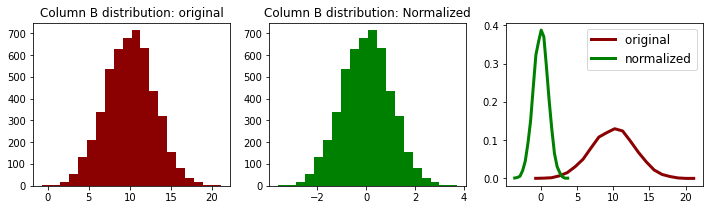

In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats

dens0 = stats.gaussian_kde(df0.B)
dens = stats.gaussian_kde(df.B)

fig, ax = plt.subplots(1,3, figsize=(12,3))
n0, x0, _ = ax[0].hist(df0.B, bins=20, color='darkred')
ax[0].set_title('Column B distribution: original')
n, x, _ = ax[1].hist(df.B, bins=20, color='green')
ax[1].set_title('Column B distribution: Normalized')
ax[2].plot(x0, dens0(x0), linewidth=3, color='darkred', label='original ')
ax[2].plot(x, dens(x), linewidth=3, label='normalized',  color='green')
ax[2].legend(fontsize=12)
plt.show()

The results show that the expression defined within the Lambda function is indeed applied correctly to column **B** of the DataFrame.

We see that the Lambda function provides an easy way to manipulate the pandas DataFrame. 
However, its usage is limited by its unique inherent feature: only one expression can be defined.
As a result, the Lambda function should be used only for the situations that one single expression suffices to describe the desired manipulation.
For more complex cases, a regular function can be used as explained in the following section.

<a id='regular_function'></a>
## Pandas | apply a regular function

A very powerful feature offered by pandas is that it enables you to define a normal function, and pass it to the **pandas DataFrame** _apply_ method. The pandas will then apply the function on the passed vectors. 

Let's look at a simple example. Feel free to use axis=0 and axis=1 to see the effects (there should be none!).

<a ind='simple_func'></a>

In [13]:
#----------------------------------------------
# A user-defined function
# Feel free to comment/uncomment different
# lines to test diffent functions. You can also
# write your own function here!
#----------------------------------------------
def myfunc_complex_process(x):
    #return x**2
    #return x**3 + 3*x
    return np.round(np.sqrt(np.round(x)**2 + np.exp(x)), decimals=2)

#------------------------------------
# DataFrame apply function
#------------------------------------
list_col = ['B']
df=df_ref.copy()
df['E'] = df[list_col].apply(myfunc_complex_process)

#------------------------------------
# Displaying DataFrames
#------------------------------------
print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)
print(f'Add a new column using DataFrame apply function,\nwith column {list_col[0]}, and default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
Add a new column using DataFrame apply function,
with column B, and default axis:
   A  B  C  D      E
0  3  6  5  4  20.96
1  8  9  1  7  90.47
2  9  6  8  0  20.96
3  5  0  9  6   1.00
4  2  0  5  2   1.00
5  6  3  7  0   5.39
--------------------------------------------------


You can see that arbitrary and complex functions can be defined and applied to pandas DataFrame. 
This feature enables you to do boundless types of manipulations. 
It happens quite often that data scientists need to perform manipulations on pandas DataFrame that involve _if statement_. 
Such complex manipulations may not be easily achievable using the Lambda function, in which case you can always resort to the regular function concept.

Let us look at an example. In the following example, 
we create a random DataFrame of integers between 0 and 100.
We aim at classifying the dataset based on the value of each record in column **D**. 
In order to accomplish this goal, we write and apply a function to pandas DataFrame.
Here is how the function works:

<font color="green">The mean and standard deviation of the passed vector are calculated first.
Each element of the vector will then lead to one of the classes "low", "mid-low", "mid-high", and "high", according to its value compared to the whole array's distribution.
The obtained vector of labels "low", "mid-low", "mid-high", and "high" will then be returned.</font>

Now, we can pass this function to the pandas DataFrame _apply_ method. What about the _axis_ parameter?!
<font color="red">I recommend you to pause here, and think about it more. 
Before you continue reading, try to predict what will happen in two different cases of passing axis=0, and axis=1.</font> Feel free to consult with [our provided schematic](#schematic) as your guide.

<a ind='func_with_if'></a>

In [14]:
#----------------------------------------------
# A user-defined function with if statement
# to classify an array according to the value of 
# each element compared to the distribution of 
# the whole array.
#----------------------------------------------
def myfunc_complex_process_with_if(x):
    x_mean = np.mean(x)
    x_mu = np.std(x)
    
    myvar = np.empty(len(x), dtype='object')
    
    for sn, item in enumerate(x):
        if item<x_mean-x_mu:
            myvar[sn] = 'low'
        elif item<x_mean:
            myvar[sn] = 'mid-low'
        elif item<x_mean+x_mu:
            myvar[sn] = 'mid-high'
        else:
            myvar[sn] = 'high'
    return pd.Series(myvar)


#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df = pd.DataFrame(np.random.randint(0,100, (20,4)), columns=list('ABCD'))
print(f'Here is the DataFrame:\n{df}')

#------------------------------------
# DataFrame apply function
#------------------------------------
list_col = ['D']
axis=0
df['E'] = df[list_col].apply(myfunc_complex_process_with_if, axis=axis)
print('-'*50)
print(f'Creating a new column using DataFrame apply function,\nwith column {list_col[0]}, and axis {axis}:\n{df}')
print('-'*50)

Here is the DataFrame:
     A   B   C   D
0   47  83  38  53
1   76  24  15  49
2   23  26  30  43
3   30  26  58  92
4   69  80  73  47
5   50  76  37  34
6   38  67  11   0
7   75  80   3   2
8   19  12  65  75
9   81  14  71  60
10  46  28  81  87
11  13  96  12  69
12  95  31  89  84
13  45  16  41  72
14  56  70  56  86
15  44  90  83  47
16  49  18  85  46
17  98  37  38   7
18  67   5  47  47
19  15  34  10  28
--------------------------------------------------
Creating a new column using DataFrame apply function,
with column D, and axis 0:
     A   B   C   D         E
0   47  83  38  53  mid-high
1   76  24  15  49   mid-low
2   23  26  30  43   mid-low
3   30  26  58  92      high
4   69  80  73  47   mid-low
5   50  76  37  34   mid-low
6   38  67  11   0       low
7   75  80   3   2       low
8   19  12  65  75  mid-high
9   81  14  71  60  mid-high
10  46  28  81  87      high
11  13  96  12  69  mid-high
12  95  31  89  84      high
13  45  16  41  72  mid-high
14  56  70 

As you see, here, we have passed the argument index=0 to the pandas _apply_ method (operation along the row axis). 
That is, the whole column **D** is passed to the written function.
The function then returns a same-size vector of labels.

In case that you pass the argument index=1 to the pandas DataFrame _apply_ method (operation along the column axis), the function will be called once for each element, and each element will be passed to the function one-by-one.
As you may have guessed it correctly, it will lead to the wrong results; all dataset will be labeled "high" as you see in the following:

In [15]:
#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df = pd.DataFrame(np.random.randint(0,100, (20,4)), columns=list('ABCD'))
print(f'Here is the DataFrame:\n{df}\n')

#------------------------------------
# Applying the user-defined 
# function to pandas DataFrame
#------------------------------------
list_col = ['D']
axis=1
df['E'] = df[list_col].apply(myfunc_complex_process_with_if, axis=axis)
print('-'*50)
print(f'Creating a new column using DataFrame apply function,\nwith column {list_col[0]}, and axis {axis}:\n{df}')
print('-'*50)

Here is the DataFrame:
     A   B   C   D
0   47  83  38  53
1   76  24  15  49
2   23  26  30  43
3   30  26  58  92
4   69  80  73  47
5   50  76  37  34
6   38  67  11   0
7   75  80   3   2
8   19  12  65  75
9   81  14  71  60
10  46  28  81  87
11  13  96  12  69
12  95  31  89  84
13  45  16  41  72
14  56  70  56  86
15  44  90  83  47
16  49  18  85  46
17  98  37  38   7
18  67   5  47  47
19  15  34  10  28

--------------------------------------------------
Creating a new column using DataFrame apply function,
with column D, and axis 1:
     A   B   C   D     E
0   47  83  38  53  high
1   76  24  15  49  high
2   23  26  30  43  high
3   30  26  58  92  high
4   69  80  73  47  high
5   50  76  37  34  high
6   38  67  11   0  high
7   75  80   3   2  high
8   19  12  65  75  high
9   81  14  71  60  high
10  46  28  81  87  high
11  13  96  12  69  high
12  95  31  89  84  high
13  45  16  41  72  high
14  56  70  56  86  high
15  44  90  83  47  high
16  49  18  85  46  

In [16]:
np.std([1])

0.0

Please, note that there is nothing wrong with the code! It operates perfectly fine! The issue is that by passing the wrong axis (axis=1), the function acts on each element of column one at a time. 
According to the function's implementation, any element equal to or larger than **mean plus standard deviation** is labeled "high".
So, when you pass a vector with only one element to this function, the function returns the label "high".

<a id='multi_col'></a>
# Pandas | apply to multiple columns

By following the previous parts of this tutorial, [apply a function to a column in pandas](#one_col), and [setting the _axis_ parameter properly](#set_axis), you should be ready to learn how to apply a function to multiple columns of pandas DataFrame.

As a side-note, please, note that the "axis=1" together with "multiple columns" conditions from the [provided schematic guide](#schematic) can be used to apply a function to rows of pandas DataFrame! You would just need to pass all the constituent columns to the pandas _apply_ method.

<a id='multi_col_numpy_func'></a>
## Pandas | apply NumPy mathematical function to multiple columns

Let's start with applying the _sum_ function to multiple columns, **A** and **C**, once with axis=0, and another time with axis=1:

In [17]:
list_col = ['A', 'C']

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)

axis=0
df = df_ref.copy()
print(f'Pandas apply function "sum" to\ncolumns {list_col} with axis={axis}:')
print(df[list_col].apply(np.sum, axis=axis))
print('-'*50)

axis=1
df = df_ref.copy()
print(f'Pandas apply function "sum" to\ncolumns {list_col} with axis={axis}:')
print(df[list_col].apply(np.sum, axis=axis))
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
Pandas apply function "sum" to
columns ['A', 'C'] with axis=0:
A    33
C    35
dtype: int64
--------------------------------------------------
Pandas apply function "sum" to
columns ['A', 'C'] with axis=1:
0     8
1     9
2    17
3    14
4     7
5    13
dtype: int64
--------------------------------------------------


That's cool! As you see, when passing the axis=0 argument (operations along the row axis), 
the function _sum_ is called twice: the first time it is passed the whole column **A**, and the second time the whole column **C**. 
Upon each call, the function _sum_, returns the summation of the passed vector.
As a result, the pandas _apply_ method returns (a pandas Series with) two values in this case: 1. summation of column **A**, and 2. summation of column **C**.

On the other side, when passing the axis=1 argument (operations along the column axis), 
the function _sum_ is called by the pandas DataFrame _apply_ method as many times as the number of available rows, _i.e._ 6 here.
On each call, say call #_n_, the elements of columns **A** and **C** sitting on the row #_n_ are packed into a vector and passed to the function _sum_.
The function _sum_ then returns the summation of the passed vector.
Therefore, the outcome of the pandas _apply_ method in this case is a pandas Series, the elements of which are the summation of elements of columns **A** and **C** from the corresponding rows. 
Feel free to refer to the [provided schematic](#schematic) for a better understanding.

Now, let's look at another example. 
In the following example, we apply the _sqrt_ function from the _NumPy_ package to multiple columns, **A** and **C**.

In [18]:
list_col = ['A', 'C']

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)

axis=0
df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt, axis=axis)
print(f'Pandas apply function "sqrt" to columns {list_col}\nwith axis={axis}:\n{df}')
print('-'*50)

axis=1
df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt, axis=axis)
print(f'Pandas apply function "sqrt" to columns {list_col}\nwith axis={axis}:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
Pandas apply function "sqrt" to columns ['A', 'C']
with axis=0:
          A  B         C  D
0  1.732051  6  2.236068  4
1  2.828427  9  1.000000  7
2  3.000000  6  2.828427  0
3  2.236068  0  3.000000  6
4  1.414214  0  2.236068  2
5  2.449490  3  2.645751  0
--------------------------------------------------
Pandas apply function "sqrt" to columns ['A', 'C']
with axis=1:
          A  B         C  D
0  1.732051  6  2.236068  4
1  2.828427  9  1.000000  7
2  3.000000  6  2.828427  0
3  2.236068  0  3.000000  6
4  1.414214  0  2.236068  2
5  2.449490  3  2.645751  0
--------------------------------------------------


The outcomes are the same, here, regardless of the axis. 
<font color="green">However, it is crucially important that you truly understand what happens exactly by the pandas "apply" method for each of the cases axis=0 and axis=1, since passing the wrong axis, in general, can result in error(s) (good scenario) or wrong results (potential catastrophe).</font>

In this example, when passing axis=0 argument (operations along the row axis), the _sqrt_ function is called twice: the first time it is passed the whole column **A**, and the second time the whole column **C**. 
Upon each call, the function _sqrt_, returns 
a same-size vector, wherein the elements are the square-root of the corresponding elements of the passed column.
As a result, the pandas _apply_ method returns (a pandas DataFrame with) two columns in this case: 1. vectorized form of square-root of column **A**, and 2. that of column **C**.

On the other side, when passing the axis=1 argument (operations along the column axis), 
the function _sqrt_ is called by the pandas DataFrame _apply_ method as many times as the number of available rows, _i.e._ 6 here.
On each call, say call #_n_, the elements of columns **A** and **C** sitting on the row #_n_ are packed into a vector and passed to the function _sqrt_.
The function _sqrt_ then returns a same-size vector, _i.e._ 2 here, consisting of the square-root of the elements in the vector passed by the pandas _apply_ method.
Therefore, the outcome of the pandas _apply_ method, in this case, is a pandas DataFrame with two columns, the elements of which are the square-root of the elements in columns **A** and **C**. 
Feel free to consult with the [provided schematic](#schematic) for a better understanding.

<font color="green">It is worth emphasizing again that, we need to have a sufficiently deep understanding of 1. how the pandas "apply" method works, and 2. the implementation of the function we want to apply to pandas (at least from a very top level to know what types of input and output are supported).</font>

<a id='apply_row'></a>
### Pandas | apply function to rows

As mentioned earlier, by passing all the DataFrame columns together with the "axis=1" argument to the pandas DataFrame _apply_ method, we can apply a function to rows of pandas DataFrame, which can be very helpful in many data analysis cases. Please, feel free to refer to the [provided schematic](#schematic) as needed. 

In the following example we create new columns of **mean**, **std** (standard deviation), **sum**, **min**, **max** by applying the proper functions from the _NumPy_ package. 
In order to accomplish that, we set the _axis_ to 1, and pass the whole columns to the DataFrame _apply_ method.

In [19]:
list_col = df_ref.columns

print(f'Here is the DataFrame:\n{df_ref}\n')

axis=1
df = df_ref.copy()
df['mean'] = df[list_col].apply(np.mean, axis=axis)
df['std'] = df[list_col].apply(np.std, axis=axis)
df['min'] = df[list_col].apply(np.min, axis=axis)
df['max'] = df[list_col].apply(np.max, axis=axis)
df['sum'] = df[list_col].apply(np.sum, axis=axis)
print(f'\nPassing all columns and axis={axis} to the DataFrame apply method\nto act on the whole rows and create new columns accordingly:\n\n{df}\n')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0


Passing all columns and axis=1 to the DataFrame apply method
to act on the whole rows and create new columns accordingly:

   A  B  C  D  mean       std  min  max  sum
0  3  6  5  4  4.50  1.118034    3    6   18
1  8  9  1  7  6.25  3.112475    1    9   25
2  9  6  8  0  5.75  3.491060    0    9   23
3  5  0  9  6  5.00  3.240370    0    9   20
4  2  0  5  2  2.25  1.785357    0    5    9
5  6  3  7  0  4.00  2.738613    0    7   16



<a id='multi_col_lambda_function'></a>
## Pandas | apply Lambda function to multiple columns:

In the following example, we apply a simple expression on each element in columns **A** and **C**, and replace the previous value.

In [20]:
list_col = ['A', 'C']

df = df_ref.copy()
df[list_col] = df[list_col].apply(lambda x: x**2 + np.sqrt(x))

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)
print(f'DataFrame apply Lambda function to\ncolumns {list_col} with default axis:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
DataFrame apply Lambda function to
columns ['A', 'C'] with default axis:
           A  B          C  D
0  10.732051  6  27.236068  4
1  66.828427  9   2.000000  7
2  84.000000  6  66.828427  0
3  27.236068  0  84.000000  6
4   5.414214  0  27.236068  2
5  38.449490  3  51.645751  0
--------------------------------------------------


This is another example, wherein both axis=0 and axis=1 lead to the same results. 
The reason is that both _raising to power 2_ and _square-root_ operations support the vectorized operation.

### Another example of when properly setting the axis parameter becomes crucially important

Feel free to take a look at the following example with different _axis_ arguments. 
The goal is to apply a Lambda function to columns **B** and **C** to create new columns with the corresponding normalized values. Which axis should we choose?! You most likely know the answer now! But, don't worry if it is still not clear. We will discuss the _axis_ parameter further in the following sections as well.

In [21]:
#------------------------------------
# Applying the Lambda function 
# to pandas DataFrame
#------------------------------------
list_col = ['B', 'C']
axis=0
df = df_ref.copy()
df[['Normalized_B', 'Normalized_C']] = df[list_col].apply(lambda x: (x-np.mean(x))/np.std(x), axis=axis)

print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)
print(f'DataFrame apply Lambda function with \ncolumns {list_col}, and axis={axis}:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
DataFrame apply Lambda function with 
columns ['B', 'C'], and axis=0:
   A  B  C  D  Normalized_B  Normalized_C
0  3  6  5  4      0.603023     -0.319438
1  8  9  1  7      1.507557     -1.852742
2  9  6  8  0      0.603023      0.830540
3  5  0  9  6     -1.206045      1.213865
4  2  0  5  2     -1.206045     -0.319438
5  6  3  7  0     -0.301511      0.447214
--------------------------------------------------


<a id='set_axis_remarks'></a>
### More on properly setting the axis parameter

The next example aims at deepening your understanding of the concept of _axis_ parameter in pandas _apply_ method and how it works. Feel free to refresh your knowledge by reviewing [our reference schematic](#schematic) as needed. 

Let's look at the example, and see how passing the wrong _axis_ can lead to wrong results:

In [22]:
#------------------------------------
# Applying the Lambda function 
# to pandas DataFrame
#------------------------------------

list_col = ['A', 'C']
print(f'Here is the DataFrame:\n{df_ref}')
print('-'*50)

axis = 0
df = df_ref.copy()
df[['E']] = df[list_col].apply(lambda x: x[0]+x[1], axis=axis)
print(f'Pandas apply Lambda function with \ncolumns {list_col}, and axis={axis}:\n{df}')
print('-'*50)

axis = 1
df = df_ref.copy()
df[['E']] = df[list_col].apply(lambda x: x[0]+x[1], axis=axis)
print(f'Pandas apply Lambda function with \ncolumns {list_col}, and axis={axis}:\n{df}')
print('-'*50)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
--------------------------------------------------
Pandas apply Lambda function with 
columns ['A', 'C'], and axis=0:
   A  B  C  D   E
0  3  6  5  4 NaN
1  8  9  1  7 NaN
2  9  6  8  0 NaN
3  5  0  9  6 NaN
4  2  0  5  2 NaN
5  6  3  7  0 NaN
--------------------------------------------------
Pandas apply Lambda function with 
columns ['A', 'C'], and axis=1:
   A  B  C  D   E
0  3  6  5  4   8
1  8  9  1  7   9
2  9  6  8  0  17
3  5  0  9  6  14
4  2  0  5  2   7
5  6  3  7  0  13
--------------------------------------------------


We can see that axis=0 does not work properly, whereas the axis=1 argument leads to the desired manipulation: adding columns **A** and **C**.

In this example, the Lambda function simply returns the summation of first and second elements of a vector passed to it. 
So, when you pass axis=1 (operations along the columns axis), the Lambda function is called by the pandas DataFrame _apply_ method as many times as the number of available rows, _i.e._ 6 here.
On each call, say call #_n_, the elements of columns **A** and **C** sitting on the row #_n_ are packed into a vector of size 2 and passed to the Lambda function.
The Lambda function then returns the summation of the passed vector.
Therefore, the outcome of the pandas _apply_ method in this case is a pandas Series, the values of which form the column **E** of the DataFrame. 

On the other side, when passing the axis=0 argument (operations along the row axis), 
the Lambda function is called twice: the first time it is passed the whole column **A**, and the second time the whole column **C**. 
Upon each call, the Lambda function returns the summation of the first two elements of the passed vector.
As a result, the pandas _apply_ method returns (a pandas Series with) two values in this case: 1. summation of the first two elements of column **A**, and 2. summation of the first two elements of column **C**.

Let's more closely look at the outcome of the pandas _apply_ method when using the axis=0 and axis=1 arguments:

In [23]:
print(f'Here is the DataFrame:\n{df_ref}')
print('-'*40)
axis=0
print(f'Output of pandas apply method when passing\ncolumns {list_col} and axis={axis}:\n')
print(df[list_col].apply(lambda x: x[0]+x[1], axis=axis))
print('-'*40)
axis=1
print(f'Output of pandas apply method when passing\ncolumns {list_col} and axis={axis}:\n')
print(df[list_col].apply(lambda x: x[0]+x[1], axis=axis))
print('-'*40)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
----------------------------------------
Output of pandas apply method when passing
columns ['A', 'C'] and axis=0:

A    11
C     6
dtype: int64
----------------------------------------
Output of pandas apply method when passing
columns ['A', 'C'] and axis=1:

0     8
1     9
2    17
3    14
4     7
5    13
dtype: int64
----------------------------------------


Do you see what happens?! It should be clearer now:

When passing axis=0, the pandas apply method returns (a pandas Series with) two values: 1. summation of the first two elements of column A, and 2. summation of the first two elements of column C. Since it does not provide the same number of values as that of the rest of the DataFrame's columns, the _NaN_ elements are considered for the newly added column.

In this hypothetical example, it is more likely that your desired manipulation is to create a new column to store the summation of the corresponding elements of columns **A** and **C**, which can be accomplished by using the axis=1 argument.

However, there might be other applications that you truly want to find the summation of the first two elements of column **A** and that of column **C**. 
Surely you cannot make a new column out of these two values as mentioned above.
Moreover, it does not make any sense to even try to make a new column out of those two values because they are obtained from the elements of columns, not rows. It's unlikely that you ever want to attribute a row with a quantity calculated solely from a column. It just does not make sense!
However, the key point is that, if for some reasons you wanted to have the summation of the first two elements of column **A** and that of column **C**, then passing axis=0 and the developed Lambda function would get the job done!

Finally, it is obvious that the Lambda function in this example is not a well-generalized function.
It may not work as flexibly as the _sum_ function from the _NumPy_ package does. 
The _sum_ function from the _NumPy_ package is _generalized_ very well so that it can return the summation of a vector of any length.
However, the Lambda function's expression, in this example, has a very customized expression.

Please, note that using your own developed customized functions for your tasks is absolutely fine. 
It may not be generalized, but there is nothing inherently wrong with that, as long as generalizing the functionality is not your goal. 
You just need to know what you are doing! 

<font color="green">Make sure that 1. your goal, 2. the implementation of the function you develop, and 3. the axis argument you use with the pandas "apply" method, are all consistent.</font>

<a id='multi_col_regular_function'></a>
## Pandas | apply a regular function to multiple columns

Let's develop a function that normalizes a vector passed to it.
We, then, pass the function together with axis=0 and 1 arguments (in two separate cases obviously!) to the pandas _apply_ method to act on multiple columns, **A** and **C**. 

In [24]:
def myfunc_normalize(x):
    return (x-np.mean(x))/np.std(x)


list_col = ['A', 'C']
print(f'Here is the DataFrame:\n{df_ref}')
print('-'*60)

axis = 0
df=df_ref.copy()
df[['E', 'F']] = df[list_col].apply(myfunc_normalize, axis=axis)
print(f'Creating new columns using pandas apply function\n(myfunc_normalize) with columns {list_col}, and axis={axis}:\n{df}')
print('-'*60)

axis = 1
df=df_ref.copy()
df[['E', 'F']] = df[list_col].apply(myfunc_normalize, axis=axis)
print(f'Creating new columns using pandas apply function\n(myfunc_normalize) with columns {list_col}, and axis={axis}:\n{df}')
print('-'*60)

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0
------------------------------------------------------------
Creating new columns using pandas apply function
(myfunc_normalize) with columns ['A', 'C'], and axis=0:
   A  B  C  D    E         F
0  3  6  5  4 -1.0 -0.319438
1  8  9  1  7  1.0 -1.852742
2  9  6  8  0  1.4  0.830540
3  5  0  9  6 -0.2  1.213865
4  2  0  5  2 -1.4 -0.319438
5  6  3  7  0  0.2  0.447214
------------------------------------------------------------
Creating new columns using pandas apply function
(myfunc_normalize) with columns ['A', 'C'], and axis=1:
   A  B  C  D    E    F
0  3  6  5  4 -1.0  1.0
1  8  9  1  7  1.0 -1.0
2  9  6  8  0  1.0 -1.0
3  5  0  9  6 -1.0  1.0
4  2  0  5  2 -1.0  1.0
5  6  3  7  0 -1.0  1.0
------------------------------------------------------------


You can see the outputs are different for two cases of axis=0 and axis=1.
Passing the axis=0 argument to the pandas _apply_ method returns the normalized columns.
But, what about the case of axis=1?!
It seems like that columns **A** and **C** are compared, the smaller one results in -1, while the larger one leads to +1. Any thought on this behavior?! Please, feel free to review our discussion in Section [More on properly setting the axis parameter](#set_axis_remarks) as well as [our schematic guide](#schematic) as needed.

## Summary

In this tutorial, we discussed some of the important aspects of pandas _apply_ method. 
In particular we demonstrated how to:

\- apply a function to a column in pandas,<br>
\- apply a function to multiple columns in pandas,<br>
\- apply a _NumPy_ mathematical function to one column or multiple columns in pandas,<br>
\- apply a Lambda function to one column or multiple columns in pandas.,<br>
\- apply a regular function to one column or multiple columns in pandas,<br>

Last but not least, we emphasized the importance of understanding and properly setting the _axis_ parameter for applying the function. 
Throughout the tutorial, we kept an eye on this important fundamental concept and demonstrated how things could go wrong when one does not apply the settings correctly. 

Hopefully, this tutorial was able to help you with some of the basics of Python. 
Please do not hesitate to let us know if you have any questions or comments by leaving a note below, or [contacting us](https://soardeepsci.com/contact/).
Also, please feel free to check out the rest of the articles on [SoarDeepSci](https://soardeepsci.com/blog/).